In [1]:
from base64 import b64decode
from PIL import Image
import io

In [11]:
base64str = """/9j/4AAQSkZJRgABAQEAlgCWAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAbaBNkDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD+/iiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACkyPUfmK/G3/g4OjSb/AII0/t6wyLujl+FGixyLkjcj/ErwOrLlSGGVJGVII6gg81L/AMQ+v/BGT/pH38D/APvnxj/81VAH7G5HqPzFGR6j8xX45f8AEPr/AMEZP+kffwP/AO+fGP8A81VH/EPr/wAEZP8ApH38D/8Avnxj/wDNVQB+xuR6j8xRkeo/MV+OX/EPr/wRk/6R9/A//vnxj/8ANVR/xD6/8EZP+kffwP8A++fGP/zVUAfsbkeo/MUZHqPzFfjl/wAQ+v8AwRk/6R9/A/8A758Y/wDzVUf8Q+v/AARk/wCkffwP/wC+fGP/AM1VAH7G5HqPzFGR6j8xX45f8Q+v/BGT/pH38D/++fGP/wA1VH/EPr/wRk/6R9/A/wD758Y//NVQB+xuR6j8xRkeo/MV+OX/ABD6/wDBGT/pH38D/wDvnxj/APNVR/xD6/8ABGT/AKR9/A//AL58Y/8AzVUAfsbkeo/MUZHqPzFfjl/xD6/8EZP+kffwP/758Y//ADVUf8Q+v/BGT/pH38D/APvnxj/81VAH7G5HqPzFGR6j8xX45f8AEPr/AMEZP+kffwP/AO+fGP8A81VH/EPr/wAEZP8ApH38D/8Avnxj/wDNVQB+xuR6j8xRkeo/MV+OX/EPr/wRk/6R9/A//vnxj/8ANVR/xD6/8EZP+kffwP8A++fGP/zVUAfsbkeo/MUZHqPzFfjl/wAQ+v8AwRk/6R9/A/8A758Y/wDzVUf8Q+v/AARk/wCkffwP/wC+fGP/AM1VAH7G5HqPzFGR6j8xX45f8Q+v/BGT/pH38D/++fGP/wA1VH/EPr/wRk/6R9/A/wD758Y//NVQB+xuR6j8xRkeo/MV+OX/ABD6/wDBGT/pH38D/wDvnxj/APNVR/xD6/8ABGT/AKR9/A//AL58Y/8AzVUAfsbkeo/MUZHqPzFfjl/xD6/8EZP+kffwP/758Y//ADVUf8Q+v/BGT/pH38D/APvnxj/81VAH7G5HqPzFGR6j8xX45f8AEPr/AMEZP+kffwP/AO+fGP8A81VH/EPr/wAEZP8ApH38D/8Avnxj/wDNVQB+xuR6j8xRkeo/MV+OX/EPr/wRk/6R9/A//vnxj/8ANVR/xD6/8EZP+kffwP8A++fGP/zVUAfsbkeo/MUZHqPzFfjl/wAQ+v8AwRk/6R9/A/8A758Y/wDzVUf8Q+v/AARk/wCkffwP/wC+fGP/AM1VAH7G5HqPzFGR6j8xX45f8Q+v/BGT/pH38D/++fGP/wA1VH/EPr/wRk/6R9/A/wD758Y//NVQB+xuR6j8xRkeo/MV+OX/ABD6/wDBGT/pH38D/wDvnxj/APNVR/xD6/8ABGT/AKR9/A//AL58Y/8AzVUAfsbkeo/MUZHqPzFfjl/xD6/8EZP+kffwP/758Y//ADVUf8Q+v/BGT/pH38D/APvnxj/81VAH7G5HqPzFGR6j8xX45f8AEPr/AMEZP+kffwP/AO+fGP8A81VH/EPr/wAEZP8ApH38D/8Avnxj/wDNVQB+xuR6j8xRkeo/MV+OX/EPr/wRk/6R9/A//vnxj/8ANVR/xD6/8EZP+kffwP8A++fGP/zVUAfsbkeo/MUZHqPzFfjl/wAQ+v8AwRk/6R9/A/8A758Y/wDzVUf8Q+v/AARk/wCkffwP/wC+fGP/AM1VAH7G5HqPzFGR6j8xX45f8Q+v/BGT/pH38D/++fGP/wA1VH/EPr/wRk/6R9/A/wD758Y//NVQB+xuR6j8xRkeo/MV+OX/ABD6/wDBGT/pH38D/wDvnxj/APNVR/xD6/8ABGT/AKR9/A//AL58Y/8AzVUAfsbkeo/MUZHqPzFfjl/xD6/8EZP+kffwP/758Y//ADVUf8Q+v/BGT/pH38D/APvnxj/81VAH7G5HqPzFGR6j8xX45f8AEPr/AMEZP+kffwP/AO+fGP8A81VH/EPr/wAEZP8ApH38D/8Avnxj/wDNVQB+xuR6j8xRkeo/MV+OX/EPr/wRk/6R9/A//vnxj/8ANVR/xD6/8EZP+kffwP8A++fGP/zVUAfsbkeo/MUZHqPzFfjl/wAQ+v8AwRk/6R9/A/8A758Y/wDzVUf8Q+v/AARk/wCkffwP/wC+fGP/AM1VAH7G5HqPzFGR6j8xX45f8Q+v/BGT/pH38D/++fGP/wA1VH/EPr/wRk/6R9/A/wD758Y//NVQB+xuR6j8xRkeo/MV+OX/ABD6/wDBGT/pH38D/wDvnxj/APNVR/xD6/8ABGT/AKR9/A//AL58Y/8AzVUAfsbkeo/MUZHqPzFfjl/xD6/8EZP+kffwP/758Y//ADVUf8Q+v/BGT/pH38D/APvnxj/81VAH7G5HqPzFGR6j8xX45f8AEPr/AMEZP+kffwP/AO+fGP8A81VH/EPr/wAEZP8ApH38D/8Avnxj/wDNVQB+xuR6j8xRkeo/MV+OX/EPr/wRk/6R9/A//vnxj/8ANVR/xD6/8EZP+kffwP8A++fGP/zVUAfsbkeo/MUZHqPzFfjl/wAQ+v8AwRk/6R9/A/8A758Y/wDzVUf8Q+v/AARk/wCkffwP/wC+fGP/AM1VAH7G5HqPzFGR6j8xX45f8Q+v/BGT/pH38D/++fGP/wA1VH/EPr/wRk/6R9/A/wD758Y//NVQB+xuR6j8xRkeo/MV+OX/ABD6/wDBGT/pH38D/wDvnxj/APNVR/xD6/8ABGT/AKR9/A//AL58Y/8AzVUAfsbkeo/MUZHqPzFfjl/xD6/8EZP+kffwP/758Y//ADVUf8Q+v/BGT/pH38D/APvnxj/81VAH7G5HqPzFGR6j8xX45f8AEPr/AMEZP+kffwP/AO+fGP8A81VH/EPr/wAEZP8ApH38D/8Avnxj/wDNVQB+xuR6j8xRkeo/MV+OX/EPr/wRk/6R9/A//vnxj/8ANVR/xD6/8EZP+kffwP8A++fGP/zVUAfsbkeo/MUZHqPzFfjl/wAQ+v8AwRk/6R9/A/8A758Y/wDzVUf8Q+v/AARk/wCkffwP/wC+fGP/AM1VAH7G5HqPzFGR6j8xX45f8Q+v/BGT/pH38D/++fGP/wA1VH/EPr/wRk/6R9/A/wD758Y//NVQB+xuR6j8xRkeo/MV+OX/ABD6/wDBGT/pH38D/wDvnxj/APNVR/xD6/8ABGT/AKR9/A//AL58Y/8AzVUAfsbkeo/MUZHqPzFfjl/xD6/8EZP+kffwP/758Y//ADVUf8Q+v/BGT/pH38D/APvnxj/81VAH7G5HqPzFGR6j8xX45f8AEPr/AMEZP+kffwP/AO+fGP8A81VH/EPr/wAEZP8ApH38D/8Avnxj/wDNVQB+xuR6j8xRkeo/MV+OX/EPr/wRk/6R9/A//vnxj/8ANVR/xD6/8EZP+kffwP8A++fGP/zVUAfsbkeo/MUZHqPzFfjl/wAQ+v8AwRk/6R9/A/8A758Y/wDzVUf8Q+v/AARk/wCkffwP/wC+fGP/AM1VAH7G5HqPzFGR6j8xX45f8Q+v/BGT/pH38D/++fGP/wA1VH/EPr/wRk/6R9/A/wD758Y//NVQB+xuR6j8xRkeo/MV+OX/ABD6/wDBGT/pH38D/wDvnxj/APNVR/xD6/8ABGT/AKR9/A//AL58Y/8AzVUAfsbkeo/MUZHqPzFfjl/xD6/8EZP+kffwP/758Y//ADVUf8Q+v/BGT/pH38D/APvnxj/81VAH7G5HqPzFGR6j8xX45f8AEPr/AMEZP+kffwP/AO+fGP8A81VH/EPr/wAEZP8ApH38D/8Avnxj/wDNVQB+xuR6j8xRkeo/MV+OX/EPr/wRk/6R9/A//vnxj/8ANVR/xD6/8EZP+kffwP8A++fGP/zVUAfsbkeo/MUZHqPzFfjl/wAQ+v8AwRk/6R9/A/8A758Y/wDzVUf8Q+v/AARk/wCkffwP/wC+fGP/AM1VAH7G5HqPzFGR6j8xX45f8Q+v/BGT/pH38D/++fGP/wA1VH/EPr/wRk/6R9/A/wD758Y//NVQB+xuR6j8xRkeo/MV+OX/ABD6/wDBGT/pH38D/wDvnxj/APNVR/xD6/8ABGT/AKR9/A//AL58Y/8AzVUAfsbkeo/MUZHqPzFfjl/xD6/8EZP+kffwP/758Y//ADVUf8Q+v/BGT/pH38D/APvnxj/81VAH7G5HqPzFGR6j8xX45f8AEPr/AMEZP+kffwP/AO+fGP8A81VH/EPr/wAEZP8ApH38D/8Avnxj/wDNVQB+xuR6j8xRkeo/MV+OX/EPr/wRk/6R9/A//vnxj/8ANVR/xD6/8EZP+kffwP8A++fGP/zVUAfsbkeo/MUZHqPzFfjl/wAQ+v8AwRk/6R9/A/8A758Y/wDzVUf8Q+v/AARk/wCkffwP/wC+fGP/AM1VAH7G5HqPzFGR6j8xX45f8Q+v/BGT/pH38D/++fGP/wA1VH/EPr/wRk/6R9/A/wD758Y//NVQB+xuR6j8xRkeo/MV+OX/ABD6/wDBGT/pH38D/wDvnxj/APNVR/xD6/8ABGT/AKR9/A//AL58Y/8AzVUAfsbkeo/MUZHqPzFfjl/xD6/8EZP+kffwP/758Y//ADVUf8Q+v/BGT/pH38D/APvnxj/81VAH7G5HqPzFGR6j8xX45f8AEPr/AMEZP+kffwP/AO+fGP8A81VH/EPr/wAEZP8ApH38D/8Avnxj/wDNVQB+xuR6j8xRkeo/MV+OX/EPr/wRk/6R9/A//vnxj/8ANVR/xD6/8EZP+kffwP8A++fGP/zVUAfsbkeo/MUZHqPzFfjl/wAQ+v8AwRk/6R9/A/8A758Y/wDzVUf8Q+v/AARk/wCkffwP/wC+fGP/AM1VAH7G5HqPzFGR6j8xX45f8Q+v/BGT/pH38D/++fGP/wA1VH/EPr/wRk/6R9/A/wD758Y//NVQB+xuR6j8xRkeo/MV+OX/ABD6/wDBGT/pH38D/wDvnxj/APNVR/xD6/8ABGT/AKR9/A//AL58Y/8AzVUAfsbkeo/MUZHqPzFfjl/xD6/8EZP+kffwP/758Y//ADVUf8Q+v/BGT/pH38D/APvnxj/81VAH7G5HqPzFGR6j8xX45f8AEPr/AMEZP+kffwP/AO+fGP8A81VH/EPr/wAEZP8ApH38D/8Avnxj/wDNVQB+xuR6j8xS1+N0n/Bvt/wRlEbkf8E+/geCEYghfGOQcHn/AJGqpf8Ag33/AOUMv/BPr/shsX/qXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/+Dgr/AJQ2/t4/9kr0L/1Zngav2Qr8b/8Ag4K/5Q2/t4/9kr0L/wBWZ4Gr9kKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/9BNfjt/wb7/8AKGX/AIJ9f9kNi/8AUu8U1+xMn+rk/wBxv/QTX47f8G+//KGX/gn1/wBkNi/9S7xTQB+xlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfjf/AMHBX/KG39vH/slehf8AqzPA1fshX43/APBwV/yht/bx/wCyV6F/6szwNX7IUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJP8AVyf7jf8AoJr8dv8Ag33/AOUMv/BPr/shsX/qXeKa/YmT/Vyf7jf+gmvx2/4N9/8AlDL/AME+v+yGxf8AqXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kK/G//g4K/wCUNv7eP/ZK9C/9WZ4Gr9kKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/wBxv/QTX47f8G+//KGX/gn1/wBkNi/9S7xTX7Eyf6uT/cb/ANBNfjt/wb7/APKGX/gn1/2Q2L/1LvFNAH7GUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+N//AAcFf8obf28f+yV6F/6szwNX7IV+N/8AwcFf8obf28f+yV6F/wCrM8DV+yFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRX8+P7e0viD/goN/wAFLfhr/wAEiT8W/iD8I/2b/Bn7JutftsftgL8I/FF34I+IHx00u/8Aidp3wj+GH7Py+M9MKa54c8EHULq88a/ElNKyvibRLzSNFF5puox2V7bfh3+zz/wTg/YO/wCCqP7Qf7a/7AXwW/a1+LH7Mf7E37C3xX8ReHPhl+xJ8Cfip4r1vxj8S/iJANG8LfGD9r74jeKfjvF8UbLxt4GvviRpa+AfA2iaFPrtr4d0vSrfUY5Ph1c+OhcePwD+9Kiv5Cf+CP3in9qn/glx+2T+3z/wST/aA8ffE79rr4R/s8/ssy/tzfslaxpGja34u+J2r/CXSNV0nw/q/wAOvAHhA3ms67c634p1TxLpnh3RfhjpV7d6Za/Ebwp4gHg2N7Xxe01zvfGT/gtn/wAFUv2GfFX7I3x3/wCCh37Ff7NPws/YZ/bE8f6B4PtNC+Hni/4qXf7U/wCzMni+0i1rSdL+PM3jM6V4PvvH2h+FH1HxLrPhLw94D0mK4/4RnxF4e1HVvB/iG2FioB+8P7dH7UH7TH7P+mfDvwv+yX+xH8Rv2y/jJ8WNS17TNEt9N8WeGPhf8FPhna6BaWNzfeJfjb8W/E801t4SspV1GOTw1odtpF1qHjWXTtX0rS76x1G3t1ufzn1P41f8HLHw5tT8T/FX7Hv/AAS9+OPgew/4mGqfs8/An41/Hfwj+0Xc6Wjedc2GjfEP4qQH4NXOt29pvSNIrK8W/u4jHYWk8k8Fu3zh/wAFbP2fvHP/AAVG/a//AGj/ANh608W+LrPw/wDsjf8ABM3VP2l/gT8JPDfjbVPAdn8Uv25PjH4i+JPhj4LeOPGV1pOo6a+v+FfhKnw60e10C01Cb+zNJ8W+NLy81BpNMn1DStX/AJe/EPi/9pD9ob9tL4WePv2Z/iV8T7n/AIKf6r8afhJ4lvvBmt/C39sjwv8Ath/BvXLHwX8Nfh38QfgH8drzxNbWH7JGjfsTfDXWPDPjjx1P4rstR13xl4t0LUjoXj/wvoWga54ifQAD/RY/YY/bh+Ef7fPwSX4wfC6x8V+ENX8P+J9b+HHxf+DvxJ0d/DPxa+BXxe8JyRW/jD4WfE/wtM7z6J4n0KaaCdQWa21LSryw1O0fy7oxQ/ZVfh18Oo/Dfwv/AODhT49+BfhrNa6fY/tJf8Ew/Af7Qv7QvhvSmhFnN8Yvg/8AtEx/B34YeONXtoPltfEniX4X+Mdd0Od5VS51DTfB1jeTebvSVvwN/bo+CfjT9tz9vH9s39of/gmh+xl+3b+11+0P8IvFsnwP8K/tl3//AAUA+Gn7Mf7P/wCyT+098HtK0LT9Rs/2YPh1420rQ7j4r+HfB+t2NpZ/FLwh4j8bT+EPEWo6j4sttHs9Di13SfF0oB/dvRX8aH/BW/8AZT/4KbftrfFzQr34o/8ABMX4nftafALw5+xb8PdK8C+Bvhx/wUK+Dv7Mvhf4MftleL9DvvEPxg+MV34HsfF+seIfjT4z+Hev3uh+B/BmnXwXwE+neEb+bTF8V2fid79f1j/4JZftseAvAv8AwRe8DfHD9oP4i+O77Wf2H/hH4x+GH7Ys3xE0rVD8WPh78Xv2arGfTfij8N/FOj6lc3Gsar4y0A2mnaVoKXV3Jq3im0vvDl5di11TV57O2AP3Mr8s/wBsD9qn9v7Rfi0f2dv2A/2GY/i54ts/DGj+JvGH7TP7SfjG4+Dv7JHgVPEDX66ToWjajpttfePvjd4tg+wNL4p8P/DmztovCFveaadV1d7u8eytfnf9lr/gsn8Svir8cvgL8LP2qv8Agnl8bf2IPBH7ZdnrN7+xV8X/AB98SPAXxH0X4xT6V4Ym8dW3hX4jeHPCFpZat8AviD4h8Ewya54c8G+LJ9ZudVmgutNivVmjt5br8Xv+Czfwin/bK/4KzXnhX4GfD/8AbU/4KCfFD9mH9nTw3puvfsu/BL4qaT+y58B/2SPi18QLDX9d+F3xe1z9qTVvFUVto3xTvrDV9N+IWmfD+y8E2174gn8N+H5NZ+I+reGtG1X4e6eAfqzr/wDwUA/4K2/sFra/FD/gqR+yd+yv4+/ZIF9Y2/xK/aI/4J0eK/jD4k1D9m3SNRvI7WPxv8U/g98ZLKTxz4w8CaO08cni/wAQeAlC+GNLhu9ZeDUXS00e9/oC8N+I9A8YeHdB8XeFNa0zxJ4W8U6LpfiPw14i0S9t9T0bXtA1uxg1PRta0jUbSSW01DTNU066tr6wvbWWS3u7SeKeGR45FY/K/wCyBoXxw8a/sN/Ajwf+3R4Lsl+PWufAHwz4H/ab8Ha5qHhPxfY6/wCL28Kp4W+IA1288J6pr/g3WofGey91PV4NG1O/0eQa1c2cREKmBPw6/Yw/bml/YW/4N8PGvx60+2b4txfsl+PP2jP2c/2dLfVNTuLy0+JFp4f/AGvfGH7P37L2lXmqx3C3Nx4XtX1zwF4Zvruymt5IPCOgXM9vJA1v9oAB+ZXwj/4LAftLfsl/8FKvj7o/xa+L/wC0TrP7Iutf8FSP25fhd8Y9c/an0zR9U/ZM+GHwV8A+O9atvBmnfskfGjUdXm+KsPxf+HgS2sNQ/Zn8L6b4n8Man4eu/Dtl4Q8H2ms6pDdWv9NH7Jn7Zn7Wv7ZXx/v/ABZ4O/ZT1L4Ef8E6dE8IatBoHxc/aW0bxR4A/aT/AGhvH9xc2f8AwjviH4T/AAWubuy1H4e/Bi1sFvb6XxD8V9Eg1/xtaahol34d07SGTV7Oz/OD4Y/8Guv7Cnj7w54s+KH7f1n42/ab/bJ+OniPxb8XvjZ8WNE+Jnjz4U+EPCvxh+KOuah408dJ8FfAfw11vwp4b0jwtpnirWb5tF/4S/S/FM2oPD/aVzaWFrdxaBp0n/BFn4vfE/8AZv8A22/+ClH/AAR5+KPx38X/ALRPwy/YeT4XfE/9nD4vfFHW49d8feG/g58SvCOg+J9V+FvjrxY6wR6svw6i8YeENN0+d4bK30y/s/GFtp9npXhtdA8PaAAfS3xX/wCCg3/BRX9oP40fFH4J/wDBKf8AY4+G/ifwn8DvGuufDH4nftj/ALcPiHxx8MP2e7j4p+Frl7HxV4F+FngDwfa2nxa+Klp4Y1FJtJ1rx7oBi8OQ61Z3dlbW91psuk69q3BR/wDBTL/gop+wv4s8Iw/8FiP2VfgL4c/Zz8beJtG8Gy/t0fsO+M/Hfi34GfCHxP4jvbfSvD0fxz+HPxRik+J/gjwXq+rXdtp8vxMuZ4/D+kX1zY2MtlfS3bS2vY/sbfHT/gpT/wAFIPiR4G/bM8C/E/4Tfsn/APBMqXx1rNx8Ivg7N8Krb4n/ALR37W/wl8M6zrPhr/hNviT4s8TXdnpnwK0P4gX2nHXfB1p4KgufFGm6GsMOpwahBLZ+Ita/Z34xfCXwF8evhR8R/gp8UtAs/FPw4+K3grxJ4A8beH76KOW31Xw14q0q60fVbb94jiGf7LdySWl2iieyu0gu7d47iCN1APQ4J4bmGG5tpori3uIo54J4JElhnhlQSRTQyxlkkikRleORGZHRgykgg1LX8p3w5+CH7bf/AAU0/wCDcX9mf4D/ALMv7TOhfCD4w6gs/wADvHHxW8U6x4v0aD4gfBP9m34x/E74B67oT+LPBWk+IvFunXfjTQvhv4Z1S/urK1uI/F1haan4T13UU0TxXqt+PzN0Dwt/wUK/Zs8UfGj9hz/ggj4Y/aE/aL/Yd+GafCT4Z/tV/GjSfir8NPBPifwv+1R8ONJ8Q2X7V2j/ALGfxb/aI8QeJvBXg7Xvibp2reAL74jJ4b+H3jm0+H3xM03WIfhtofhyK4s9VvgD++Oiv41/2c/+CP3/AAS8/wCCp3wP8ffEj4ZJ+3p+yT+398GvHWsfC340/EX4yftFfGHxj+1x8GP2gfDdja6iifEyx8ceNtY8IeL/AA/qhvLDxBpuu+CtM8DN4t0Oa4h0fW/B2vWuo22h/cP/AAQz/bD/AGxIPjD+1z/wSc/4KLeIpfiJ+1T+ww/hnX/BPxwuJpLu++O37PXisW1v4b8WavqM8MV5r+oaZBqPhDUIfFuqtJ4k13TPHNjpfjJP+E08LeItR1cA/pHoor+SX/gul8dfgT+3F+0T4A/4JNfDb9nX9sb9uL9o/wCEF1Y/H34qfAr9mT9ojwX+y58JrHw9daHpMll4e/aL+Kfj7w34w0aXTH0fxX4Z1SIW+i6HJ4dl8Y+H7bSviHpPiPxFJosoB/W1RX+ZX+2Z4i/bB/Y/8YfCD9mz4/eF/jl/wSN/ZKsm8Q/ti/sYfAu//aR0b/gqBqE37Z37LujxXXwf8DeDfFvhLT/EPi3Qfgx4o+LHiD4a6refC74tQav4Q0fxmup+L9N8Q2ceoNa6D+zv/BbLxv47+NP/AATg/wCCUH7Q/wC2p+xJ8ffjB4g8a+IfAsfxk/ZJ+C/7X8H7JWma98efjF4V8HjwX8NvFXwtvvhZ8WfjD8W9Z8Wapp3iI+EfAXw2h0T4n/CK2/4S6DUvE8Sz6reoAf2b0V/E78NL/wDbX/aB+HH7JX/BDz4v+NfiN/wTh8QfFm7/AGg/jz8SbPxP+0X4K+Jn7V/h3/gnR4e8ZGL9nX9mz4efE+PUotY8deOvF2q6z4p+Hmo3msaFpHjfQvhF8CtSvfF/hDUvDJ1zw9r3F6L+wn8YP+Dez/gpB+xL4W+BP7Rnxk+NX/BOf/gpN8Yof2Qfin8K/ifrlvL4h8H/ABM+JscegeFdeu5/DdloHhS48Rpf6zD4s8N/ELwv4U8MeIYtL8NeNfCOtW/9n6ha6hqgB/ctRX8n/wC2T/wTc+BH/BFPwv8ADL/go3/wTo1T4s/Au++Ev7QP7P3hr9p74RXfxq+KfxL+HP7UXwR+NXxh8G/BrxtonjLw58TvFni1m8eWd5490rX/AAr4h026tbPQruyvdUg0KTV4NJ1LSvhX9pH9iPxl+zD8YPjJ+13+3B8FP2ytB+MWi/tbXXxx8Mf8Fnf2bPjZqn7Qngv4WfAS0+Ntj4w8P+DvGn7Hel/Fj4beLPhh8JfDnwdjHws8a2v/AAgfxE0vwnZ3Gp63oU3iHw1YWvhxQD+6qivyS/bP/am/4KD33xB+FfwU/wCCXf7O/wAIfinrPjv4MX/7QniD9qj9qGb4o6X+x54e8FHVbTR/Bvw88OeLPhdaRT+O/jH8RHuZ9e03w3YeKtNbw34Rg0zxTq1le+H9efVdD+Z/+CYH/Baaz/bO/ZV/bb8a/ti+CNM/ZZ+Mn/BPXWPHXhX9r/TPBer6pqHhrwzpHhrQ/F17eeN/Bks9xq+v6XdwXHgTx/oieHBqfii/g1zwitxpWt6uNYs7W1AP6BaK/hb/AOCWP7LX7Vnw6/ap/ZW/al/Ym/4J2ftw/Db9nb4sfFe/8S/tD/tgftkf8FCfg345+IX7Tv7Knxa8NavFYap8WP2TgngK60rWPCer6n4T+LfgDxN4ZtPEHjInS7yyvZPHUfiGzv7D5q/bO/Z0/wCClngf4weLv+Ch/wC07/wT4/aY8F/Ef4S/tt2n7RGq/wDBQj4eft4fD34pp8Ev2G/BHxMF/cfCXwZ+xV8NPFeorpvw28I/BKzS51u8vNWn1nUL6w1nWvGOq2eg6rr+lRAH+hzRXL+B/GvhX4k+C/CHxF8C65ZeJvBHj7wv4f8AGvg3xJpjvJpviHwr4q0m013w9rmnySJHI9lq2kX9nf2jvGjtBcRsyKxKj8hf+C//AMPPAvxB/wCCYXxvPxX/AGrviX+yD8I/BepeDfG3xO8efCfwyPGXi7x94Wsdbj0W3+B9n4ZPi3wN/bE/xW8Ta94d0DRrWXxPpumnxSPD8mvi78OJrFlcAH7RUV/Bl8J/i1+1z+zl+zX4d/4J1fDLwR8W/wDglp4G/wCCkn7UPw2+HP7BniD9rL48+G/FXxh+An7NVl8H9GuP2yviNpGpap4j0rxR4E8da/4k0Pw1qfgD4Vavb+D7vT/ij+0fqOifCi/sdXttHurDjv26/wDglT8UP+DdbVPhD/wVP/YS/a3/AGh/iL4B8FfGT4d+H/2vfhj8ZvEWlatf/EPwh431+20vVLzWr7wno/hPQfF3hPxTqUw8K3mheJfDl/4m8M674j8OeLvD3imXV9JGoaaAf3/UV/Nb+3z/AMFKP+CwfwXsP2t/2iv2Y/2HfgTafsX/ALEfi3WfDHju8/arl+M3hT9oX9ofQfAlppV98TPjL+z94a0iXwj4RsvgpoKahfJ4f8a6ze+LIfGuj6Df+KvCcetZuvDel/sz+wZ+174M/b2/Y++AX7XvgLR73w54d+OHgaDxK3hjULuLUbzwr4i07UtR8M+NPCk2pwwWsWq/8Iv4z0LX9Aj1aOzsV1WLTk1AWNj9p+yQgH1zRX5kf8FlfG3gnwB/wTF/bD1/4g/tA/ED9l/w3L8LZNAk+M3wo0M+J/iZoGp+J9f0Xw/ouheBfDa+I/B0mu+IfH2ralZ+AbbT08X+Ed8Pia4lk8WeGIIZde07+af/AIJefAD/AIKp/sufCD9p7Q/2Pf2A/wBpz4DfD7x9/wAE/fFFp8MLj9pv9pf4Sav4v+Lf/BQRPE2mQ+BP2hI/g5488XeHE/Zq1zxB4K8beK7jxV4EkabwXJD8N/A1l4l8Q6l4jsGu9fAP7j6/n6/4OJ/jJ8X/AIKfs4fsZa58GfH/AO1l4C1vxN/wUb+B3g3xIv7ExXUP2h/Gng6/+Ev7QWsaj4G8F+Cr64i8M/FCfV9V0LRL+P4aeNrfUvCHirUdI0631jT5hBBJD+TX/BGzwr8SP2Ov+Cv/AId+Dvxj/Z4/aJ/YEl/aV/YV8XWPiT4bfH39pDV/2qfD/wC2v+2J8NfHvhbxl4v+OHg74s6dNqngC8+Idv8ACxfFXiPxfpOmalp8vh23udWstL0W00/Xx9p/SH9sf4Iaf/wW0/b1+KP/AAT9+JniHVvBv7D/APwTUuvgX8VvjnY+B7mLR/if8eP2pvjd8NvGer/D3wXpvjZ7e7uPBvws+H3wb8T6u/jGfQI4Nf17XvGM2ix3dtLaWOr+GgDxf9hz/gvH8e/jF+yTpXgeH9nvxr+2P/wU4fxX468JaR8F/hN4T07wbpOi+EdP1250v4c/Fn9tTxnpd/qfwZ/ZOv8AU7WKSPx54JuvFa64mt2GdB8H6LpOu2j6V/Sv8B5fjhP8GvhtcftLW3wzsvj5ceEtJuPizY/Bv/hJD8LbDxrPAJdYsPA7+L7u+8Sz6DYzOLS1utYupbu7ML3JEccqRJ/I1/wVG/4Jf/Az/ghx+ztP/wAFSP8AglP4o+I37KfxM/Zt8bfCP/hYfwdm+L3xG+IHwc/ab8A+OPiZ4V+HeseBfH/hn4j+JvFGq6hePP4qs9XAtNci0yz0XTteu9N0Wy8TQeH/ABL4f/aP/go/+3v8YvAX7JP7KMn7G+naJp/7T3/BSL4nfBL4D/s2ax48totS8O/CK9+OHhG88c6x8XPF2mSW01trNr8LfBOn3+oLpstnf28/iGbSLi80HxBpVtqGhX4B+zlFf5+n/BRn9nr9if8AZT+JWr/DH44fsw/trf8ABaj9q/wTafADUv2k/wBpf4u/t7+Ov2b9K+F/jT9qjxfqvhD4KaF8O9B8P69PYRDxV4k07UP+Ed8Kaf4Q1vwv8PdEudCsNc8eTD7e9h93/wDBL/8AbF8e/st/HX4OfCy18eftO6/+xh8cf2jNe/YV+IX7NH7b+tQ+Mv2ov+CbX7dtl4Lv/H/w1+H2l/E6Eeb8T/2dPjp4e0rUNL+HszR/2fppt7HVLO5sdStfEtlr4B/Y5XxB/wAFNvFnirwF/wAE2/8AgoN468C+JvEHgvxt4L/Yg/av8WeDvGPhPWdR8OeKvCfirw58BvH2seHvE3hnxDo9zZ6voPiDQtXs7PVNG1nS7y11HS9Rtba+sbmC5gilX877L9oP/go7/wAFEv2lvjBof7D3xV+En7H37EP7J/x+1b4B+OPj14z+Fll8cvjT+018WPhVq1hD8avDHwy8F+Ib+w8D+DvhT4d1A3ngJPHN7NPrmp6xHPrvhu9v0S90bw7+cP8AwXP/AGMf29/2y/2ovifZ3H/BN74pftw/sgeFP2Z9I8FfsznwP+3z8K/2Y/Dnwt+PviG28Qaz4+/aAvvhDf67eeLvjF480W+1Dwr4V0DQfFWi6b4WbR/Bt1bJpfiGLxCt9ZAH0b/wbz/8FBvjd+1ZrHxe+CWqfGX4h/tl/s7/AAa+Cf7P3ibwd+138UPhh4h+H/xA0f4w+MPDqx/Fn9mrx14o1rQ/DkHxo1XwFrVteXOjfEv+xLbxDqGnWV5c+JNX8Vxatoetv/UBX4p/8Erf2ofCviz/AII1fDfxv8U/i3rXgbxD+y18APFPwR/ar8Z+K/DcfhLxl+z78Uf2Z/B9x4Z+LNh4s8N3NndpZ698LbXRYtUhlutPuJte02DSdcvdMW61efTY/wCKr/gnl+2F4E/4J/ftjfs+/F3wH4Q/bY8ZRfE6/wDjr8Sf2gP2tfjzr3i5fGH7a37PPjnwL430j4TalN+xH4OvPi34v0nwXZfGTw74X8SeA/je/jDxlqniPxCnil9U1I6ROuieEAD/AFAaK/zUv+CPP7Zt58Qf+Con7CHx58Z+B/2mPgJ8VfHHxS+OP7Of7f8A+1N8Vfin8U/iR8Gv2vPjT8Zfht4i8SfAP4GXGg6n4T0zwL8FfF9h49isofhn8HNPurbTdA0DTfC9zDJqmo6Kt9L/AG3/APBUf/go98O/2Bvgje2GnapceKv2v/jfofifwJ+xb+z54R8PXXj74kfGH48appU+k/D62sPAmlMdQn8F6d411Dw//wAJhr939m020sZv7Ms5NR8R6louhaoAfp9Xyx+1D+2/+yH+xX4ZXxb+1X+0V8KPgZpVxbS3Wl2vjrxZp1h4l8RRQFhMvhLwXbyXXjHxhcxlH32fhbQtXuwI5D5GEcj/ACp/Ddif22/2rP2W/Cf7RXxg8T+OPj38aviT+zWPFviz4efG740/Gf8AbN8ZXnxw8dat4W+LGjaNqVxokn7PP7Nmu/s7zaYNevvgz4r+FvhrWfCPhW60zStK8Z+MrG2k1q2/pD8DH9gP/gjD/wAFO/2u/wBnr9pL9mH4wf8ABRXx1rnhn4RftJfst/F4/Baw/bJ/bH8KeA9Z8La5b/F7w/441XxXeadp2n+HvhVL4Nl8XWPjnSLfw/4itvBt5qL6u+sxyWsVgAf04/sK/wDBXD9nj/gov8R/GPhH9mT4WftVav8ADbwl4UuPFNt+1B44+Auu/Dn9mzxnLDrWlaPF4T8FeNvFuo6d4l1bxneR6m+tWmhXngnTGbQtK1e+muIXtFt5v1Lr+fHw3/wctf8ABNnWvH/wr8Nx6V+1D4W+B3xi8XQ/Df4X/tmeM/2dvEfgf9jzxP46R47G58H6X8TPEl/peui90PUm/srxBenwKnh7w28FxqGtaxp+gWs+rx/0HUAFFfnV/wAFS/2+v2df+CdH7IXjr43/ALSOt+PLDw14kaX4UeD9C+E9wtn8WfGXjzxroeuDTdD+HOpy3+lW2g+I7LSNN1zxMvii81TT7fw1ZaDd6vHNPqFtYafffxPN+zx+37/wT4/Zv8b/ALan7Ff/AASu/bJ/ZS8deBNC8QfGvxv+2d+0h/wVQ+DXxT8YeM/hGun3GreMtG/aR/Yrbwl4C0bxjYp4Vnvr7StFsPCfhn4q+F/GdnoniJdV1jVNEOlaoAf6O1FfxOf8ERf26fj58DP2OP21PDX7Ongb47f8FM/2e/2eNF+Cvi79l7xfpvwg8e+CPiT8Tv2rf2otUGuftH/BC71DVvC8ms+K/BPw++O/jPxJ8QfGvxWvtDvr/wCH/gifxD4g8Qajr+i6l4TaP73+FP8AwVu/4KJfs9f8FMP2ev8Agnt/wVV+AH7KfhW1/bE8N3mqfAD4w/si+JfibqHhvRvEiDV1sfBfjiD4n6nqd/r2qNq+lQ+D9WutH07wxb6dreveHtWsE1vw/fzXVmAf02UV+GP7Rf7Sn7f37WP7YHxg/Ya/4JseMvhL+zj4b/ZZ0j4fSftZ/to/FvwIPi/qfh34ifFbw2njXwX8G/gP8JLu7s/CnizxNpvgm507xR4513xhdvouljVYdBc6Hq1naDxL8sf8Fo/2Z/2+P2ivGn7JXwr0z9i7x9/wUo/Y9+H3wg8U6x+0h4B8Cftm/DH9gWw+Mv7Rt8dE8PeFfE3juS48TReL9S0HwXpOj+JPGWg+AfB+nW3h0eJPHdqJ/El1F4cOi3QB/TrRX873/BvH4y+Ip/4J8+P/ANkH4i+IPiP4H/a4/Y8+KHxY+E3xB+GfxuL+L/G37P1n401jXvG/7PelT6zc3Jg+JHgOD4d6xoN/4T8R2ctnoWt2unapovh6G38OaTpc0v8AN1p/7Cf/AAU3/Ye+Ocfwn/ZE8Z/H/wDbB/4Kp+MPEvjr4n/8FIvjd+zp8d4/Dnw00n9mD45aZaaL8IPg94m+Iv7Tnh5fh34c/aJ8S3PhPxn8YfA3xD8Q+Bh4x+HEuqwapo+l+O9Et/D0+mAH+jNRX8K/wy/4Jqfs1/tgeK/ih8JvBPw+/b3/AOCQ3/Bb/wCEnw6h+OHhnxp8YP2uvip8ctZ+M+lxamujWfxNg+NI8XatoPxW+H0njKaz8M+P9e+GWl+ANW8K65q1tc6fp+vWtlqeiS/tr/wRt/bc/al/4KEf8E4/jb4W+Kmr6f8ADT/goH+zX4x+N/7G3xL8a6noVhJZad8efAnhqK38HfFXW/CunwNpDz2d9r+kHxjpGnQJpWp+LPCniqTTNM03R7/T9MtwD986K/gD0P8AZA/bh/4JLeNfhD4Q/Y1+IXir9un/AILzfHLU/jJ8YP2vPD2k+PfGHjr9nbUP2UPFvh3XfA3g7xB8bL34teKPhjpkWseEvjA3gjx58K/G3jKDwz4k8SeM2+IGg61d33gyPQdI1f6c/Zc/Yn/Zq/4KB/GHxJ+yZ/wWu+CX7feg/wDBTab4cXvxk0LWf2if2udX8TfD7xf4Rh1G20fxP4q/ZCuv2c9W8Dfs3aNpXgrXru3e5+GFl8O9XXwzYXMMxv8Axb/Z3ia700A/tgor+P39lzUP2uv+CGH/AAU9/Z//AOCePxg+O3xG/am/4Jq/t5XPiPwx+yN8Qfi3qja98Q/gN8WtGhgl0/4aX+tyIzeRPfXnh3wzfaFpq6T4L12Lxnovj/wjonhfVtL8eeGbn9c/25/2sv2wfEf7UXgf/gnJ/wAE5rT4WeHv2hfEHwfk/aI+O/7R3xt03UfEvw4/Zn+Bd34svPAfhS70fwRpMkb/ABA+L3xC8V6Xrdt4U8ManOmkabp2iPquuafc6Nqc2teHAD9j6K/nO/4Kq/s8f8FNfHv7IH7Hf7OHhLwN4u/4KUMPiLNqn/BQWf4ZfGf4Q/8ABOvV/wBoXwD4X8P6tNoHgWbXL7xOlt4A8EeNvGWuaLdeK9G+HVrrerajo/w/Glyah4dbxAdTj8k/4Nyr3xZ8APEf7dP7A/xn+GHxW/ZR+Ivgn4v2v7RnwP8A2Lfiv8TJPjhbfB/9lT4maNo3h/RpfhV8cFu7vT/id4LsviNoviLQtZvtIK2emav/AGddahPfeJ/EXiKaMA/qMooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/8AQTX47f8ABvv/AMoZf+CfX/ZDYv8A1LvFNfsTJ/q5P9xv/QTX47f8G+//AChl/wCCfX/ZDYv/AFLvFNAH7GUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+N/wDwcFf8obf28f8Aslehf+rM8DV+yFfjf/wcFf8AKG39vH/slehf+rM8DV+yFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH8hH/Be39kL/gph8Hf23vgD/wWD/4JTaB4l+InxV8B/CM/AH44/Cjwd4dHjvXNe8H2HiHXde0m8vfhgol1T4n+DfFdr4ln8N+LND8NxSeJfC+o+FvBPi3w5Ba6lBL4m8N/Kf7BnxA/4KY/DD9oNv8Agrp+3d/wTB+N/hTQdL+D+r/sU/Av9jD/AIJ4/sh3OhfEhI/ij4+1j4+eP/jd44+BfiLxxF4x8L+BIfGug31t4o8QeOddg1TxB8QPidpeuaLoRsNK1m8uf3x/4Kd/sw/t4aT8UPAP/BQr/gmD4ysNU/ah+E/gSf4V/E79lj4n69dn4JftX/Asa5e+K7Pwm+nahr2i6H4S+KHg7xLqOqat4S8V2Wr+EL7U7bVtQ0q+8W2kFtbaZq/4/fET/grR/wAHFP7Wmlzfs1fswf8ABGH4kfsZ/F3xMj+F/EX7SvxnvPF2oeAPBMFyv2XVfF3gjXviL8Mvhd8NtLutNQy32n3txr3xdfyUZdF8O6/qzWGQDpv+CY3xT/bE/ba/4Kx/8Ff/ANty8+DPh34IfGD4Lfsf+Af2RfgB8G/ilq0fivSPAHjDxO198VfAPgP4z6t4L1TSvtXiCDxV4FsfE3xv8KeH9c0/XPh7eeNrnwBe6hpPiDRHeHwL/goq/wDwUN/4LraV+wb+wb4m/wCCaH7U/wCynrvw5+PHg34q/tv/ABy+L3gGLwd+zT4Z1Twt4T1TwV4zuPgD8Q38T+KLH4m+EpbLxd461fwvbxa3J4j1B4/DGi2cOui4v/EFv/Sx/wAEmv8AgnVon/BM79kfQ/gfP4um+J/xh8Y+KNe+MX7SXxkvpL651H4rfHXx39km8X+I3vtWZ9YvNLsIbLTvDmg3OrMuqahpejw63rESa9q+rtJ+mVAH843/AAWr/wCCe/7dnjL4u/B//gph/wAEnfiH/wAIX+3N8BPh9qnwf8YfD+4vfDtnpf7QnwGu9eu/F1p4Klt/Gat4C1vUvDniXUtZv08M+OBa6V4gttWh1DTNd0Xxb4L8JrqH4i/8Pav+Dub4hSn4M+G/+CY1t4G8b3BbRY/in/wxx8X/AA1Fb3zbrcasPHvxY+KN9+zygSVTOuoXWnv4c+7I0bWjorf350UAfgv/AMESP+CYnx//AGONM+OP7VX7enxYn+On/BQv9sXUPDmp/GrxdNrK+I7H4f8Ag3wrBcf8In8LNC1qO3tdPupLCS9kn8RHwxaad4Jsl07wx4R8HWD+HfBWm6zrX4P/ABbuP+DhH/gi7+03+1J8JP2CP2X4f2wv2P8A9p/9oz4l/tEfBzXP+FI+OfjhB8O9Y+M+r/2xruk6pefC7xb4U8ReANX8PXLWWjav/wALJabwJqs2iJ4t0SKKPXNbEn95FFAH+d18P/FP/B09/wAEnJ/HngDwN+ylo/7T93+3L481v9rTxh4u8P8AwY8W/H23+FH7QPxuhsbj4qadqniD4U+I/DXhX4d+JdP1mysI9d03xpDrvwnFzZJqngq9vdMutWnm/pS/4JZ/8EtPH3gX/gmP8fv2dv8Agorfv4++M/8AwUQ+I3x6+Pv7ZGn6drGnSXGkeNP2j9D0Lw54g0XTPEXh9DokfinR9E8M6LrN7q3hmGTQdG8e3GpL4Yn1LRtM0vUbz986KAPwn/Za/wCCNXxO+Ffxz+AXxT/as/4KI/Gv9t/wN+xlZ6zafsWfB7x38NPAXw20b4QXOq+GJvAtp4q+I/iTwjfahq/x88feHfBM8uieHPF/iyDRrvS7ia41KK2LvFbwfl3/AMFEvg7/AMFrf+CaH7fX7T37en/BKr4YeHf2qfgT+23B8MPEXxw+CWpeB7v4m+IvBvxM+F3g6PwXZXaeBfDniXwj8UNV0zUrQanrGka18N9auot2v6loHjDQoI/D/hHU7/8AscooA/gf0/8Aah/4Oz/+CqMU/wCztbfsx6P/AME7/hx43jfw58TvjddfAz4m/s3Xfh/wZqY+xa7c2eufHrxt43+Jc1w9pNJHAvwZ0ZPGTu6iz1LS7M3eoW/9G3xq/wCCOHw68R/8EWNW/wCCRvwk8UHw9p+hfB3QNB+HnxE1uCW0a5+M3g3xtpvxk0/4heJ4NL+2T6ba+OPjHpk+veMYNGW7k07S/Ems2ujwXHk2sD/tVRQB/n4an/wUP/4O/Pg9o8H7It5+w5qfjn4g6HZxeC9O/ah0z9mHxP8AE/WNTFmn9m2Hiqf4y6B4xv8A9mDVLueBYLuTX/FHhT/SnH23xJbtfvqBf9y/+CDf/BIH4zfsYfDT9pb48ft5+L5fiJ+25+3lejUfjpM3iSLxZeeCfCso167fwle+NLSS5sdf8ba/rHinV9b8d6toNzdeGIbm18NaH4cuNQsvDf8AbWr/ANIlFAH+ef4b8S/8HRf/AATY8P6t/wAEmv2dP2ZG+O/we0fUPFvw8/Zy/ass/gnr3i638N/DTxZq+qTeHdc0r41ab4w0X4SeARYxazNqkWn/AB10q/1TwJdSSaPKx0LSNIgi5TwQ/wDwdN/sG/ChP+CN3wP/AGY7Hxr4Agg8ReCPhb+1t4C+FvijxFpXhbwT8SdU1PW9QuPDH7SV14g0D4S+CbOxu/E+tS2938U/Ctt4+8EvI8FhNY/2XoD23+i3RQB/PN8Vv+CYP7a/wT/4Iu/An9if/gnX+1BqHwW/ak/Zw+H8Bm8QeH7vTdD8KfHXXvE2geMh8bfA82u69ot9deD7bxd4o+IfijxX8NPFZTTtQ8L+LtM8I6hearoN1B/wlOg/zk/s0ft2f8HNX7C3wm+HP7CnwP8A+CM/hDQPDPwo0tvCOh+IbX9kn9pjxXY6pq1ze3N7r/jTxF8YdC+Plx8G/EHiPxX4ivtS8TeJPFY1BdG1PV9Su7+NIbGSKCP/AET6KAP51/8Agl5+zv8At7fsR/s0ft0ft1/tqeBdU/aJ/b//AGt/Fdl8evGv7NvwXvvA1pq1vYfDXwWvhT4cfCfQb+HULbwGfFttpEuopeReH9T122h0W20LRNIn8YeKbSSPV9n/AIJnfDn47/tK/wDBRn9sT/grP8aP2b/iz+yJ4L+JPwS+Fv7Jf7NXwX+P2gW/g/48at8P/BepWfjH4ifEX4peB4Ly+fwdNqvjbTdLsPCOnXd3c3d1pEV82+TT7PTdU1r+g+igAr+Pj9qn9lz/AIKB/wDBMf8A4LTfFT/grj+yN+zD4l/bq/Zw/au+HFl4A/aF+DPwwvYH+NngNzpfw6tNXk8L+HTBqGta6zeIPhZ4a8beGNT0DRNetZ7e78S+AfEdt4Vil0TxXdf2D0UAfxy/Ej/gpR+0n+0T/wAFVv2FfH/7Ov8AwSo/bZ8N/GHwj+yt+2h4S0P4P/tvaR4I/YztvFT+LtX+As+seN9H8V+K/E3i+bUvAXw5GiW58VTWnh4eJNRm1zRtP8OaFqFxdXEll97/APBZT9jT/goj+11+wP8AstfEn4LXHw68Of8ABSH9jP4zfC39q+w8HfCjW59Q+Gvib4meCfDuvaV4l0D4YX/xV0/TIb6Wy1HWrbxJ4Rs/iJaLZapZ6PqPg/VHv312O8l+uPjx8N/iJrH/AAWV/wCCfHxQ0nwF401T4Z+C/wBkr9ubw34x+ImneFtcvfAvhPxF4u139nibwpoPibxbbWMugaDrXieLRNZl8PaXqmoWt9rUekam+mwXK2F0Yv1roA/ziPCmg/8ABbL/AIKB/tc/Cb9qH9rj/gly3wZ1f9jbx38Jv2iPiv8AtEeCv2Yfir8Pf2pPi74U/ZEn8T+OPDfwE+BsHxY+JWqaR4o8S/FnUdS1XwtpHhb4H+FvC/hXxV4u1zwzr3xI1KTwz4Ws7jT/AOjbw0/7TH/BYH9tX9kD4x/EH9jP9oD9ib9hX9gnx/q/7Q+kaZ+194X0z4cftC/tC/tOp4eu/Dfwwt9O+EdnquvX3gTwH8I21HUfFtz4m1PVr2LxXfXUGkWMaSrNLpX9INFAH8gf/BQDxz/wWB/4K4eGNB8Nfsif8E6vEv7OP7P/AOzZ8UvAX7Rmq+H/APgohdwfCTxz+2T8RPgz4x07xH4E+B9h8KdG8R2uo6D4Am1SybxRq1/r3jnwzoniyfTdFtj8RvA9xYpb63+eHxW/ap/4OrP+CnVn4u/4J/8Aiz9g7wv+yX4F+M1jqHwv+M3xetP2ePir8M/A1n8M/EqSaN48S9+L3xi+JfxL8H6n4dvfDtzqNtqcHwt/tXxhrmlyT6f4UFzfXsMcv+gXRQB+I/x1/aJ/ap/4Jazfsx/C/wABfsVfHH9uH9hnwR+yX4Z+Dsms/snfDi9+Jv7V/hL4/wDwqXRfC3ha98YeDpfHumaXd/Bzxt8ObC3aW/0bw3daz4d8YWOq3eo69d2Nzpeh3P5X/wDBKb/gkx+0p8T/ANiz/gs34p/az8Fan+zD8WP+Cx/jD4n614c+G3ioPL4l+Eui6wvxb17wT4h8caRAkeoaZMnj74ya5Jd+FL+1sNffw54btZr+y06fW47W2/sIooA/zv7Dxp/wdV+P/hNJ/wAEXfE37J2k6L4B1vwCv7L3iP8Aa6134QeJItDsfgQ+jjwHq95c/tJab4rl+B+s6HJ8N/P0261HSfB+p/FjWdGeSOxtLn4g3QZ6S+Iv+DqH4j/COH/gidN+yvpvg74ZaX4Ig/ZV8R/tcT/B/wAVaN4a1b4AafpCeALu5u/2ktW8RXfwd17wpd/DWL+z7q/8E+Dv+Fta3oLS2cNncePLueGX/RNooA8Q/Zl+CWk/s0fs3/s//s5aDqlzrmifAL4J/Cz4LaRrd7EIbzWdM+F3gbQvBFjqt3CJJlhudRttDjvJ4VlkWKWZ0V3VQx+Lv+Cyf7EPjP8A4KG/8E6v2gf2Yfhjr9p4Z+K/iKy8I+NPhTqmo3smm6W/xC+F3jbw/wDELw5o2p6jEGbTLPxNP4dk8NNrBV10GbV4ddaKZdNMEn6gUUAf5sPxW8K/8HE//BVSTwj+wz+1z/wTM+EQ8ZeHLdPhvP8At8fHD9lPVvDXjH4VeFbnxD4a1Lxn4y8KftBS+LG+C81xeL4WsrrUb74JeE9R8T+I7RL2w8IQy3WtSi5/fn4t+Jf2ov8AgsvofwA/YK079hL9sz9mL9knwT8Tfg743/bY/aM/b0+Hum/BrxL8SvBXwD1vSfE1l8Mfg/4Gi8Q+JNU8ea58X/Fnh7SbrUfHqXMOmeGba2lutQ0iWK9Vh/VLRQB/K5/wVF/bJ/4KUat8Gf8AgoV/wT0vf+CYP7RXxr8dftBTfEr4OfsjftB/sw/DHUfEf7Muqfs0/F/QrHw7o+t/HTx9qPjfxFeeAfjJ4O0bWvFOneK4LzStA8KazrthY39tZ+EPD0q6hc/sB/wSD/Y+8W/sE/8ABNn9k39lD4gXFhP8QPhf8PtRufH8el3cWoabp3jr4ieM/FHxS8ZaFYalAWt9Ts/D3iXxtqeg2+qWxNtqUWnJfW37i4jr9I6KAPzQ/wCCvf7DPiT/AIKLfsA/G/8AZf8AAfi2y8C/E7xCvg/xr8KPFOqyXUOi6f8AEj4Y+MtD8eeFrTXZ7KC6u7PRteu9Cbw7qGqW1nf3OhwauddttO1G402KxuP5Wdf/AOCtn/B21+zteRfCrx//AMEtfDHxn8S6AqaPdfEnQP2Rvj18WrPxNPaqIDrkvi/9mj4zW3wnmbUdn2uSXSNN0nT1aUhdOsgDbx/3q0UAfyD/APBPD4Ef8Ft/+Chv7c37NP7d/wDwVj8I+EP2Y/gj+xp/wsvxR8B/2fvDvhax8FeJfGHxJ+J/gi98A3erX/hSXxF4y8faDouk6beJqGo3nxN8Uw6kbjRtO0Xwx4WbT/EfifW7eH/gqV8Bf+Cwf/BPr/goB8Xf+Cm3/BJPwPb/ALRPw/8A2tPBfw00b9qn9nKbwjd/EeVPH/wg8LweBvB/in/hWWha34b8eeINMn8MWdpPpGt/DHWR4l0nXr/xnaeIbNNB1mykvP6/qKAP89ax/Zp/4OBP+Dhr4sfC/wAE/wDBRz4c67+xL+wX8PvG+k+NviJ4Mk+GWv8AwAtdal0xpIp7Xwh8OPiHq2u/GTxz491XSZ9Q0bw34g8aX1/4B8AR3+o67DLFqkq6N4k/q4/4Kv8A7AfxI/ap/ZZ+FOk/sf8AinQvg/8AtQfsY/Fz4Z/tHfse6tqSJD4PtPHfwg03UtD0v4e+IRLbX0EXhLxP4T1bUNBMN7aXWkjUoNCOuwT6FFqUMn640UAfwVfF79p79vb4rftLfCL4v/tRf8Gqnin4y/8ABQL4EDRtG8A/tK+GfF/xlt/gnY+IfDOqT6p4b1q6tfDPw/8AGfwh8VaP4Z8R3M+u+Ervxl8ZvFUHhe5k+3eH/EmnSxpep/ST/wAEff2Sf2pfgh4U/aX/AGl/26rjwdZ/tk/t4fGm0+OHxf8AAPw6nhuvA3wf0Lw74R0vwP8ADP4TaRf22oaza6vfeD/DdhNDq2r2mua5bSvdWumLr3iSXSZvE+t/sZRQB/CJ8dNb/wCDhX/gjp+0z+1R8Gv2CP2X1/a3/ZD/AGn/ANor4o/tFfBLxPD8C/HHxxHws1b45a7L4k8SaHPe/DXxV4c1LwDqHhvWLpdLvofirBf+CdSl0pfFujxJFr2siX5k+DPjL/g6j/4JK6R4i+AHgP8AY60v9pGL9qTxjqn7SN1490/4PeKPj/b/AA4+LvxxtdP1r4l2Go+NfhP4s8K+DPAfiLTPFhnTxZpXxIs9U8BQ+I7TUtZ8H6hq3hLU4tW1P/RWooA/ni/YS/4JM/GvQ/8AgkB+1Z+yb+198RQv7VP/AAUZ1b9pj44ftJ+MNNk03W7XwN8cf2nPDun6NPKr6C1poWvT+Gl8PeF9V8W2vh54PDeo+I/+Ek0vw7fXGgvp+q3P81vxm8If8Fev2ddY+GfhH4qf8Ex/+Chl38dPgf8AA/4f/srWn7YX/BHv9q34jfCXSv2hfgV8GobrS/hIvxR0Hwb+zl+1R4P1240bTbm4ubW+1nwj8O/FEMt9INU8P6Ebay0rS/8ARvooA/gv/YO/YX/4KXftj+M/g34F+I/7HvxU/Yg/ZA8MftofC79vT9pz43/to/GnxR8dv26P2ovjB8GYNPt/A3hu98SeM9C+HviKzgfS9L0/QFmsvg58P9A8PaaLnWV13U9Vt38L+JP6qf21/wDgkv8AsNft5t4+8T/HL4MaDdfGzxh8MNE+GHh39ofSVuLX4w/Cm08Ha1r3irwF4k+FviNrh4/B3ibwl4s8Q3utDU9ItbafxPbpbeG/GL6/4WtrfRov0nooA/ztrzWv+DjT/glf8dPF3g/wj/wTj+A37cnxHkl1Pw54O/4KGaD+w1qPxb+NXxI8F33mW2ma94y+O/wM1fwh43l1q8sVjHiG3/aCn1rxUdRjnHiHVfE1lJaa1qf0l+w7+wt/wcKfs0/tA+LP+Cv3xD+Cvws/a6/bD/au8A/EX4JfEn9nD4m/F/wH8I/GXwk8D65L8LNa+FfxMPiNJovhpp+meHdU+HcGj6x8F/Cl1Zavo3gGy0/RrWZfEfiXVR4B/u3ooA/ztf2hf2bP+Cjf7Rn/AATK/Yt/4IR6F/wTN/af8HfHD4IftBnxF8WP2o/Hvh3Qv+GOdO0Ow8Q/GK5j8YfD3456FfXnhvVtL1G1+K8mrX1iItN1fRtE0m68L+H9J8YaxqltDB/oS+DNAl8J+D/CnhafVLnW5/DXhrQtAm1q9BF5q8ujaXa6dJql2C8pFzfvbNdzgySESyvl3+8elooA/Av/AIOKv+CYXxe/4KffsP6B4K/Z21HS4vj98CPixpHxt+G3hrXNUtND0n4hPp/hzxJ4Z13wONc1J4tJ0LXdQsfEEWr+GdX1mW30b+2dEttH1e+0jTNau9b0z8u/2yv+Cvf7XHxG/wCCWX7X37Pn7Yv/AASD/wCCinwa+Pmu/sofFXwD8QPjB4O+B0Hij9kTTNXl8CajpWtfE7V/i1qHiHw5beFPBDzef4gvdP0m08cnRLJ30/TtY8S/Z4r25/s4r87/APgrf4J8Z/En/gmD+3z4A+HXhHxP4+8d+Mf2UfjX4c8IeCvBegar4p8XeKvEOq+BtXtNL0Lw34b0O0v9Z1zWdSu5Y7Ww0vTLK6vry4kSG3gkkdVIB8QfCv8AaF/4LDTfsL+MPit4C/YZ+AngrXvh78FP2ebr9l34FeOfjPN8UvjB8btM8PXPh9/jFfeMX+HeoeFvhx4HvPGvwhe4ufgr4dsvHesa7oHxBsI7Lxxaa7ZavFpun/mveeEf2rv+Cw//AAWn/YD/AGpL79hT9rD9iz9lH/gnxoOr+L/Fvib9sX4dR/CXxp41+J8mqXuv2HhzwH4ZfU9UTxTpV14l0zwTaW+s6PqN7ZRaFY+J9a1aXSrl9C0bVf6vPgDpuo6N8CPgpo+sWF7pWraV8JPhvpuqaXqVrPY6jpuo2Pg7RrW9sL+yuo4rmzvbO5ilt7q1uIo57eeOSGaNJEZR63QB/GL/AMFHrL/gtt/wSy/4KF/tLftZ/wDBMr4AR/tdfs3/ALeZ+GfjDx/8Nl+EXjT45TfDr4yfD/wLpfw7v7i+8H/C3xJ4Y+KOjNqdlpP9vWXijTbx/Beo2Gtpoevwyaj4V02VPzr8DfET/g6h/wCCffjf4o/tkWH7GGj/AB68Rf8ABSrVtI+KHxR+GNj8GPG3xmvvgx4z8JJqHgrwbpniD4e/BjxhoHjP4UalafDuDw9FYW+uaz4m8Nr4UXw9pfi+/Tx/oHiTTNK/0TqKAP5//wDghH+yT+218LNF/a4/bg/4KQXNvYftk/8ABQf4gfDfxt47+H+n2+kwj4c/Dr4L+DtT8G/CXw3qOm+HJLrStI1630PX9Tsh4bsrrVL3RPDGneE9P1/UZ/FyeILOy/Dy8/aj/wCDlv8AYf034mftC/CD/gmX8Jvix4Y/bi+PnxW/aI8QafcfBT4//GP9p7wBeaz4il8GfD74e/G7wR8OPi14Q8S+G18C/Cbwh4F0DwLbaV4R1Pwjpvgqz0gahrzeL7rxPbj+8OigD+JL9lXxl/wWxu/2g9M/4LOf8FK/2KfjN410z4N/DjWf2d/gn+xf+yh8NfD+l/HLTvDXxl1az1Lx/wDFxfgv4k8Z3fxA1Lw34b/4Rux0e98L+KfEN78Rdb17XfDmsafpOjeCPCetay36+/8ABMD9in9obS/2QP29fH3xNm8Xfsc/tM/8FPv2j/2mv2o7Gx0CTS9R+I37Kdl8Z7f+yPhBpl8jpJpN38QfBFjaw+NNctpRbXaanrcmiaquj61Y3kNj++FFAH+dj4Z+Jn/BzZ/wSV+O37Tt3a/8E/8Awr+3L8Wf2lfiTZeLPiP+2JZ/AT45/tI6r8V9M8M6WnhzwFYaXrH7PvxK8E6d8P8A4c+F9JS6bwj8Odc+H3gqbwiuq39m+jWtkthb237I/wDBKz4F/wDBYP8AbP8A27PAH/BTb/grL4L8Kfs6aB+zz8IviX8Nf2Yv2ePDfhmPwZrU+s/GWDT9L8b+Lda8J3fiPxl4w8O6Omg2MtrdW3xG8S/8JNqOs2/h6TSdE07RdNubrU/6vaKAP5lPiuP2pP8AgqX/AMFHP2IPB/iP9hP9on9kr4C/8E2v2m/Hn7SPxf8AjN+0BpfhvT/DvxU8X+BWutG/Z+8O/s8a94b1rWdL+Jek+L5YrLxV431TRL2fR/Ddpc3ely6heXGhaXd+KvLv+C0Pw4/4KwfsfftxeDv+Cp3/AASs+GSftDr4z/Z30n9mX9pT4CDwHq/xWur218GeNdf8Z+CPFp+HXhXWNB+IOv6fdjxEunxX/wAOdSh17wvfeHpxqbPoPi2+hP8AV5RQB/nY2XxJ/wCDp/4afGTW/wDgsv8A8MW6R4m8bfHDwXbfs0a/+ypH8FfHniHXfCnwo8E3eneKPBOsXn7N/hzxhb/Hnw9oM3i/UfFlzoerzeMr/wAZWusN4qm8ZaXp3hPxD4Tm1j90f+CIn7Pn/BTP4yftU/HP/grT/wAFVfDdp8IvjD8TfgJ4f/ZV+A3wGtfDY8GXfgj4JWHj23+KOv3Gq+CJ9R1jX/B1lL410+0k8N6V441nUvH13eal4z1LX49P0ufw39v/AKfaKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSf6uT/cb/ANBNfjt/wb7/APKGX/gn1/2Q2L/1LvFNfsTJ/q5P9xv/AEE1+O3/AAb7/wDKGX/gn1/2Q2L/ANS7xTQB+xlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfjf/wcFf8AKG39vH/slehf+rM8DV+yFfjf/wAHBX/KG39vH/slehf+rM8DV+yFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXmvxl+LXgn4CfCP4n/HD4lX95pfw8+EHgHxd8S/HGpadpWo67qFj4T8EaFfeI/EF1Y6LpFtd6pq13BpenXUltp2n2txeXkypBbxPJIoIB6VRX4//ALKH/Bbr9jT9q34TfGz4yxaP8fP2ePCfwJ+EVz+0P4kg/ae+Et18MtW8Wfs8248RRL8c/hZFpus+LdN+JXw4udT8Ka7oEOpeFdUv9UTxFa22iXekW2oappMF97T+wP8A8FOPgT/wUKX40ab8NvAP7Qfwb8ffAG/8ERfE34SftNfCe7+EXxR0TQPihoWp+Jvhf43Xww+ra+k/hD4jaBour6v4Tvft8epXmn2Ju7vSrG3vNNkvQD9F6K/Hv9iH/gt3+x1+3t8VNY+F3wn8M/tGeBYjb/EK8+GnxO+OXwZ1D4Y/CH4923wmudOi+Jy/Bnxvfavfw65q3gG01jStZ8V+FvEtl4S8X6Nol7/ad54fjgstTNj8q+Bv+Dpf/gkn8QP2sbT9lHRviP8AEqzm1bxknw/8PftA6z4G06w/Zw8ReKrnURo2nWuneNB4rn8X2mjarq7R2Nh4x134f6P4JkSWLVpvEcGgSJqxAP6LqKZJIkSPLK6RxRo0kkkjBEjRAWd3diFVFUFmZiAoBJIAr+eP4kf8HNv/AATp+HXil0j8G/thfED4Fw+P5PhjN+2P8Nv2bta8S/smSeNbbUW0q/0bRfiXNr2ma14yms76O4ijPgbwb4nGtR27XXhoa3az2U90Af0P0V/Pz4W/4Kaft6/8FEtAi8Rf8ElP2R/A+hfAHWNQ1jR9I/bn/b08W3Pgz4ca5LoOq3eha9cfDL9nD4aXesfGnxfHaXtlfRaXrXiy68D6aurWR0zXNHt2W8S2/VT9jr4WftV/Cj4Y6ppP7YX7VOm/tZfFjXPFuoeI18YeH/gn4L+BPhTwV4fvdP0u3s/hz4V8LeEZ7+61jRtCvrTUb2HxV4u1bUvFOryarIt49ra21nZQAH1lRRX8hvxw+PXhL9sP/gpp8V/2M/H/APwVA/4K0/A/TfC/xmtPgr4X1P8AYs+E3hj9kf8AZT+F/wATPEFlPP4H+A/jb9o+SD4nfErxz8WPGU9nfWGgeJPGGn+G/B3j/wARxSWvgGDT9NuNGsJAD+vKivwI+FGp/tjf8Et/2ofgH+z9+0d+0147/bf/AGGP2vvGsvwW+C3x5+N1ppUn7SH7N37SE2g6v4j8BfDL4s+NtDtrKH4ueAvjVY+H9c0bwp40v9Mg17SfHsdhot9DomjNaya/++9ABRX89f8AwXH/AGu9U+BXiD9mP4J6d+0j+3D8IT8e1+I0tz8PP+Cdn7Knhf42ftM+P9K8DJ4cu9d8Q2PxS8ceI00/4YeEfA+n6ot9rFj4E8F678RdUS4l1GK8i0HTb2yuPH/Cv7CX7aPgb4JeB/22/wDglL/wV/8A2x/2t5vEvgbQvjF4R+CH/BQn4jaX+0J8Fv2lvBWr6Rb+IrXwJY6re+GPAXiL4Ia54n06b7Hp+q2MNnquia8YdD1q+8KqNS1fTAD+nSivzg+HH/BTf4EeKv8AgmzZf8FM/GNh4s8EfCXSvhVrfj34m+EItDv/ABJ468AeKvA+s6h4K+JXwzl0Wxtre71HxL4Q+Jeia74Gkmng0uylutPGq6jJo+ktcXVpw/7M/wDwWN/ZB/aS/Z2+O/7Sdza/Gb9nbwr+zR4N034l/GfwZ+058ML74ZfE7wp8LvEvhvVPFngH4mW3hSx1LxTB4o8FfE/RND1qb4b6t4S1bXX8XXel3Wl6bbNqZgtJgD9V6K/Nb9gX/gqV8B/+ChfiH40+B/h38Nv2kPgj8TfgMvgXUPHfwq/al+ENx8G/iH/wiPxPsNV1P4eePtH0CXW9fF74Q8X2Gi393pN1Pd2Wqi0+w3l9pFnZ6tpNxe/M/wAZf2LP+Cin7dXx3+Ls/wAZv22vjZ+wH+yH4I8W3XhH9nz4T/sH+OfDvhL45/FvQNNtIPM+OXxb/aBudA13VvDDeKb24uotE+EmjaMbXQtKtbZdWZNatZdb8QgH7g0V/PT4Tvv21/8AgkV8bPgr4R/aD/am8c/t4f8ABOr9o34peFfgNpnxh+O9tpj/ALUP7Ivxp+It8dE+Er/EX4haYtnZ/Fz4M/EjxQ9n4P1rxh4itdM1Twb4l1rQ5Y49L02JrXxZ9d/t1/8ABYn9lv8A4J9/Gz4ZfAH4t+Cf2kviB8QPiP4C1b4uXsPwF+Cmr/FHS/hn8GvDuo6tYeJ/i38SLy01LTJ7LwT4Uj8P+IdW8VSeFLPxdr/h7QdEutZ1bQbSwutKm1EA/VuivxK/4KQf8HAP/BPP/gmJ4k8A+BvjV4j+IfxO+IfxC8L6Z480zwH+z74c8N+Otc0fwDrpkHh7xn4kv/EnjTwN4U0vSPEKwXE+h2i+I7nX9TsYDqlror6XNaXtx9D+AP8Agrr+wj8Sf2BPFf8AwUr8NfF1m/Zb8BaZqM3jzW73QNUt/GPgzxNpd9pOkT/DnxB4Ljin1a1+IFxrniDw5o+k6JD9pttdm8SeHdS0TUtQ8P65pes3QB+l1FfjH8A/+C9P/BPX41fs3fE79qPxd4u+If7Lfw9+Etl4K1zxPo/7VHgR/hr471Xwh8ULTX7v4S+N/h/4Z0TVvGn/AAtDwz8WE8JeLofh3N8O77xNqniO68La9bQaVHNYlX+E/h1/wd6/8EgPHvxRg+HOp6z+0V8M9Eu9UXS7P4v/ABF+EGnW3wumaW4FtbX08nhLxx4w+IGk6XcOySNf658P9LhsLdzcasdPhiuHhAP3k/Z9/bY/ZV/ao8V/GfwF8AvjZ4P+Injz9nj4jeLfhR8avAlk2p6N42+HvjfwR4h1Dwn4hs9b8I+JtO0XxEdEj8RaVqel6R4zsdNvPBfiaewu38M+INXgt5JV+pK/kO/4I8/si/HD43/t0+NP+Ciln8Rv2aLT9kv4Rftb/wDBW/wt8HLz4P2fibUPjx+0Hp/x6/ah8Yvd2Pxq8bqn/CAeJ/gx4V1jTk+I3wYPhjWNUS3vb37a2nCXWLjVIv68aACiv52P20v+Don/AIJVfsU/FfxD8FNc8XfFn4+fELwXrF14d8d6f+zd4I8P+MtF8GeIdPne21PQtV8YeNvHHw48Iapquk3EclrrFp4T1zxG2kahFc6TqRtdXs72wt/vf/gnP/wVz/Yd/wCCpXhrxFq37KfxMvNS8V+Cre0vPHfwl8d6JL4M+Kvg2xv5fIstU1Lw1cXF7ZavoU9wY7U+JfCGs+JfDdvfzQ6Xd6tb6nItmQD9MKK+Ef23/wDgpV+xt/wTw8P+HNW/ah+Ldp4V8QeOrg2Pw3+F/hrR9Z8d/F74lagLiKzFr4I+G3hOy1TxLqsH26e3sJtans7Lw5ZX91aWeoazaXF3bRy/ntaf8HDH7P2nSJrHxV/YO/4K3/AH4VCIXt38efjH+wN460n4Qabo/DPr9/rPhPxB4y8SR6NDDm5lu4vCkzLApcQsRtIB+qX7NH7bH7Kv7Yi/EVf2bPjb4P8AinqHwj8ba/8ADv4n+HdLbU9H8YeA/F3hvWdS8P6lp/ijwV4o07Q/FukWc+q6RqcGh67d6LHoHiiGxuL7wzqmr2CG6r6lr+QX/ggL+yZ8cPit8V/BX/BTGbx/+zxp/wCynZ2n/BQ34X/s92Hwi0DxxYfHn43eFfix+3l8VPGd5qP7Tmu69ZWPhrVfDXhDxfpHiHXfhFp2gTXsun6NqmhHULDSdYTW3vP2S/bI/wCC1v7CP7FvxUt/2evFfiv4hfG79py6hhnj/Zm/Zc+G2v8Ax0+NFvHcWa6hbxaxofhsQ6D4Z1K4sJbXULXQvE/iXRtfutMvrLV7bS5dIuEvqAP1oor8PPhd/wAF8/2UPE/xJ8FfDD4//AL9vD9gPVfiZr1j4U+G3iT9vX9lnxD8A/h9438UapJ5elaDpfjyPXfF3hrSr3U2BFlP4sv/AA7psrhYGv0uZYIJfvz9vf48Tfs/fsufEvxF4bfWLv4veOdKufg9+zl4V8MY/wCEu8e/tH/FCwvvDHwa8G+Fne1vbex1LUPGF1ZX194h1G1l0Lwb4e0zW/GniZoPDfh3V7mEA+x6K/y2dV8N/ss+CNO+A3xH8X/tAePoP2m/iZ4I+F/ij4jft0+FfCf/AAUA8E+JPgT8Tfibqni7w/4WtP2mP2wLr9vL44/D34afEDxF4s+HHjm5P/CHfsVfEnw8tnoGu6vp9g+jWEpsf7Y/+CMP7Yf7U3xQ0v8AaC/Yk/4KBaNPpn7cP7DPiPwpoXjXxVN/Y7Wnxz+CnxIstW1L4L/G3Tb7QFg0HW7zXNO0HV9K8TajoFrBZy3VjpGqarbaR4j17VdA0oA/cOisfxF4g0Twl4f13xV4m1Sz0Pw54Z0fU/EHiDWtRmW30/SNE0Wyn1LVdUvrh8JBZ6fYW1xd3UzfLFBC7twpr+a7xZ/wdA/sM+K/2cv2svij8FtM+N2ga58KPhD8WvE37PHi/wCOPwmm+H3wi/ad8d+CLzw34Ms9J+DniyfXdSHiR9E8ffEf4Y/8Jn4X1+x8K+N9F8N+KIdWuPC/kwXq2oB+kH7Tn/Ba3/glp+xx8XP+FD/tF/tj/DrwF8WoZ7K21fwXZaP4+8e33hS61GOKeztfHd58OPCHi7Sfh/dS2txbXzW/jbUNAmh065ttRnSOxuIbiT9I/CXjTwf4+8IeHviB4H8U+H/F/gXxboOneKfC/jHw1rFhrfhjxF4a1eyi1LStf0XXNOnuNN1PR9R0+aG9stRs7ma0ubWRJ4pWjYMf88r9mT9v3/g17+CXh6y+B/7S/wADfFf7Z/xt+JEtxrf7Uv7ffxV/Zs0T4o6F45+MnjS4k1X4neNfDPiHxj4ni+OfhDwpH4m1HU18OyfDb4WaZqkmj21pq8ra34hvL/W9S/oW/wCCWvwFtfjf/wAEV/2sP2Z/2efidr2ifs//ABZ8ff8ABSP4JfsIfFXW7jW7q60D9nHxf8Qfij4C+EniuG9vhD4mvvD+m67eeINSsbudLDXLzRESWGPT7uSEQgH1H43/AODiH/gi98PfiTefCfxJ+3r8MG8XWGqSaNeXHhrwt8WPHHge31CKc200cnxT8EfD7xD8L/IhmVknvh4wNjDtZpblEVmH68+B/HPgz4meD/DXxC+HXizw5478CeM9F0/xH4R8ZeEdZ0/xF4Y8TaBqtul3pus6FrmlXF1puq6Zf20iT2t7ZXM1vPGwaORga/zLv2g/iR+xT8V/2ENK/Zr/AGZP+CGmseI/jL+zL8Tvh5oH7Sn7YfwE+Ec3x2/Zxnb4Ja9plv8AFTU739q/4KxRfHn4kfC74saJZ+IdQ1bS7P4mfBXX7fTdV0q+074jeZYR3U/9YH/BCX9nb9gv9mb9gvxH+1v+zX+1Fe/GHwr4y+Hniebxp8aPF91400n4e/s9+Cfh3rXj34l6v8G/Bnwb8eeL/FPiH4QfDz4Q+JvG3jbxXqnhzxl4t8VeOvEV1rN94t8QePvEVhrmjX6AH9HVFfwQ3/7VXwy+Pvw88T/HD4n/APBWT/g4R8X/ABNsfGviaw034Q/sneA/hP8AsX6hrHgHwz8ER+0nP8ffCfwC0+4n0Rf2dl+CP2Xx9o2s+L/iLZeNfEnhuexmXQdTvtYt5r79jv8Aglt+3f8AGrQvGn7NPwd+NP7R6fty/sjft2eCfHPin/gnr+3Zq/g2D4c/Fm88a/Cm21S++J/7K37T/he3ddMHxM8MaT4f8T3HhbxlFi/8V3/gvxXpt/cavq0p0/woAf0oUUV+Qv7VX/BbD9kD9j79qy2/ZK+KXhj9ovVvFGleD/CfxD+LfxR+H3wX1Txb8EP2ePAHjXVo9F0Lxz8cfHEWqWd/4Y8HNeXFkupeKNE8OeJ9C0Q31vb6xf2N8tzaW4B+vVFfkh+3b/wWi/ZI/wCCfXxHtfhp8WfC37RPxE1HSfCvhT4g/GPxL8Avg5qHxR8Dfs0fDfx34ju/Cngrx/8AtCeKbbVtJsfAmgeK9a07VLfQLOyGv+J9TTTzLa+HpE1HRP7U/Qb41/tF/A/9nL4LeKf2ifjf8S/DHw4+CvgzQLfxN4h+IPiC7dNGtdJvmto9LNmlrDdahrGo63dXtjp/h/Q9FstQ1vxBqt9Y6TounX+pXtraygHtNFfzreBv+DnH/gn942+N/iz4Ly/CX9ujwXZ/D7R9M8VfEj4weNv2W9a0z4WfDDwDrkGj3eh/E34ox6b4k1j4pfDX4aarYeIfD+qW/jnxz8MNA8PW+ka5per6jfWWmXaXdfoJ+31/wVJ/Z8/4J66V8Brj4h+C/j38b/FH7TXifUfC3wQ+HH7LXwvk+Mnjvx9d6RYaNqeqXmiWUWt6Bol1a29l4i0S4tLSLXpNc16K/MvhrR9ahsNUksQD9JaK/Gb9sz/gvP8A8E8P2IP2dvgF+0f8TfHPjLxloP7T/hWy8b/BD4efC3wpba38WPGHhOewsL3UdcuvC/ijXPBum+EbTw7LqdppGvp428Q+HLmz8RG78PQQXWsabqdnZ/QH/BOf/gqj+x//AMFRvg/4m+MX7L/jHWmsvAGp2+j/ABO8DfEXR7fwh8Q/hlf31lc6lpR8YaPDqmsaOml6zp1lfXej+I9B8Qa74a1D+zdYsrfWG1PQtbsdPAP0ZorxL4O/tL/s4ftEL4ib9n79oD4JfHRfCF5Hp/ixvg78VvAnxNXwvfzNOkNj4iPgrXtbGi3krW1wsdtqX2aZ2t51VCYpAvttABRX4v8A7RP/AAXU/ZD/AGZ/2r/iN+yZ43+GX7XvibWfghoXhPxT+0J8Zvhj+zl4k8f/AAG/Z98LeMtD0zxLpfir4seLtG1JvE2keFIND1jT7/U/FWieCfEHhyy8y5s21R9Q07UrSz+uf2Tf+Ci/7LP7a/j/AOPnw6/Z/wDGzeKNW/Z+8WJ4b1fUpjo8Oh/EfRg8+kXXxP8Ag7dWms39549+Edj490nxh8K5viFBp9hol18RPAPi/SNKk1DTrPTdX1UA+56K848V/GL4ReA/FfgrwH45+Kfw48GeOfiVftpXw58GeK/HHhnw74r8f6oiu76b4K8O6xqlnrHiq/RIpHaz0Kzv7hVjdjGAjEfml8T/APgtX+x78J/2xNA/Y38QaD+0Dqer6r8ZPA/7N+u/tCeGvg7qer/sp+AP2jviTp+nap4K+Avjf4zjU7e1sfidrNlrOjTTaLo2ia5Z6CupZ8S6noy6XrzaSAfrpRXhf7TX7RPw4/ZK+AHxZ/aU+L02vQ/DX4MeDNU8ceMG8L6Fe+JvEL6Vpaput9I0SxAlvb66uJYLWEzzWenWpm+2atqOm6Xb3moW3zX+wD/wUp+A3/BRTwp4n1z4VeEvjf8ACfxX4MtPCWteJ/hB+0h8M7n4UfFfTvBfxDtNTv8A4a/Ee20BtU1/SNe+HXxGs9E1ybwb4v8ADXiHWdJ1Q6LqlvJLbXVq8BAP0Ior+LT/AILh/FD4Z/tPfthD4f8AxX+LN1oH7D/7NfwH+Pdl480/xn4e/aK8XfAj4s/tV/BoeEviP8WPh5pfgf8AZw/aY/ZQ8b+Ovit8LPhb4t8BaZo+o3/xDv8A4eyeIvF/i/wG174c8YeDvEK3H53/ALC37XPxf/4J+an4l/ah/ZSn+Lmt/sK/s6/Fnwl8KP8Agpj+wz8QNP8AjD4K8d/st+EvHd/d6Nofxo0r9l/48fEz9onxr8JdR0m+sr+8TW/BP7UvxXi8XzaFqHhj4h+Gvh9peiTaqAD/AEW6Kq2F9ZapY2ep6bd29/p2o2lvfWF9aTJcWl5ZXcKXFrd208TNHPb3EEkc0M0bMkkbq6MVYGvyp/bn/wCCx37LP7AHxz+HX7PPxa8EftK+P/iD48+HWpfGbV/+FDfBHWfilovws+Cuh6premeI/i78S76x1HTrqx8EeFx4Z8R6n4pm8J2Hi/XPDmh6NcaxrGh2djeaTLqIB+sFFfk9+2X/AMFmv2Nf2HvFvw78M/E4fGHx1pfjLwj4J+JvjL4i/BD4ZX3xO+GPwA+D3xL8St4P+HPxj+PvjPTdRtLDwN8PPHviS31LSvCF9Yp4h1rX59Jvzp+hTx/ZHu/Vf+Cin/BTb9mz/gmR8L/AvxL+P1v8SfFl38VfHum/DP4UfDD4K+ELfx78U/iX4w1KE3Q03wl4evNa8OaVcLaWvlyXNzqXiDTIJLi703S7B73WdW0rTb0A/QyivxA8S/8ABf8A/Ycj8H+CdW+DPg/9q79rX4meLfCNx411z9m39lH9nPxZ8Xf2hvhBpGma5qnhXxFbfHbwTBdaPo3wg13wv4r0PWvDus+HvGfirTdZa80ye+0mz1TQpbPV7r6o/wCCfX/BU79kL/gpb4e8a337OXivxLY+OfhbqMWkfFr4I/FXwvc/D741fC3UZ57q1t4vF/gu8ub2P7LNdWV5ZLrHh/Vde0OPU7S80e41OHV7O7sIAD9F6K84+JHxi+EXwbsdH1T4vfFP4cfCrTPEWtWXhvw/qPxI8ceGfA1jrniLUpo7fTtA0e78T6ppdvqetX9xNDBZaVZST311NLHFBBI7qp/Nj9uT/gtH+yL+wF8VIPhT8XvDf7Q3jW80PQfBfjD42+Nvgj8GtU+Jfw2/Zd8D/EfxDdeF/AXjH9ozxhaalp1r4D0rxfq1hqEfh/TdPg8R+KtShtEnt/DrpqWi/wBpgH63UVDb3EF3bwXdrNFcWt1DFcW1xC6yQzwTIskM0UiEpJFLGyvG6kqysGUkEGpqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSf6uT/AHG/9BNfjt/wb7/8oZf+CfX/AGQ2L/1LvFNfsTJ/q5P9xv8A0E1+O3/Bvv8A8oZf+CfX/ZDYv/Uu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8ABwV/yht/bx/7JXoX/qzPA1fshX43/wDBwV/yht/bx/7JXoX/AKszwNX7IUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfCP/AAU/+Kfxu+CP/BPD9sv4ufs4Wtzc/G74efs9/EjxT8PZrLTk1fUNH1fS9Aup7jxRpukyw3MOp6n4R0oah4p03T7i0vba8vtHt7a5sb2CSS1m+7q+XP22/wBo0/shfshftJftQr4LvfiLJ8Bvg149+J8Pgexnazk8TXHhPQLzU7fS7rUEtb5tL0maeGNtc1dbG+OkaMl/qYsrs2n2eQA/mH/YX+HX/BtlP+zv4w8c/Er9vf4W/GP4wftg/s96f8Ov2vPiN+1b+3v4i+H/AMbfiXp/inU/B3xC8deGvEngvxJ8V/h9rHg6cfEDwppk0EmjaBbeKbSx05tEbxVrGmalrEmta3/BFfxR+wL8C/8AgsL+1L+yF/wS9+Nc3xu/ZY+Jn7Enhj46ePri51y9+I2m/Df42fBL4xaR8ONC8CfDr4wa3ZR694y+Hx+Hfxnk1Y6fLrfi/StB1u4eHTfEk89zqem6T8j/ALM3wG/4In/tLfEX4neK/wDgql4F/wCCD3gHxTqdp4X+IPw++KX7DX/BTC4+Gfwu8Vz+LZdVm8S/D/xx8Dl/aL8Aa14e+IvgxoNMv/EHiP8A4RRPB/imfXbiGwEd/pd4br9G/wBhrw9/wTd8Gf8ABcr4e+C/+CZep/sq6j8HPD3/AASM+N8Xiz/hlbxz4A+ImiJ41uf2wPgFIZfHvirwRr/ia81XxlcaImm/6Z4w1m98Qy6PFp6ec1hFaqoB+SFrffskftb3H/BSf4x/tb/8FEPBX7Mn/BXLTvjp+03+y74Ytf2r/jX4n+F3w3/ZC/Zg1/xTqvwS8Z+Gv2fvhPFrHh/T/ipfan+zNrXxG0rRbK1uNWvr74k6npl/dP4U8QK3xA1L6Z/bg+K37BH7R3/BrL4a+KvxA+EPwa+B9xo3g/UfAf7HnhXw9p8Ojaqvxa+E3xl1H4T+H/EnwItvECt8Q/7E+JumeDr7xt4tsL6bVNdj+H+v+JZPHWsa6+nX3im686+NfjD9gz9tj/gp943+K37bf7N3/BHnQ/gt4A/ai+J37Lfjw/F39unU/wBmD/goFokPwN1nWvAVv+0T8a/hbr/xb+FXwm+LPw71jVPC9jFoPhDUPDXizx/J4Mv9J060vtU07RS7/SH/AAUH+EP/AAbVeGP2Wf8AgoD8d/2cPH//AATU1L9rbxf+yL8etC+HK+Cf2sPhn471mLxbd/BvXPCnhTSPgv8ABw/F/wAQ+DvCXiU20dh4e8K2Xws8CaLqsCtDpuhxxGbynAP1N/bS8Y/8FKPGv/BNP4a+G/2I/g34L+KXiL4qfsY6Jqnxs+J3jPx61v8AECx0XxD8MfC+m+KvC/wK+G9utpP49+P3i/RfEXiTX/BGp+LfFXhfwPpWqaCLbUZtc1vWNI0iX+Lb/gjv4t+EGk/tRfs+/tFftE/H34E/BDwJ+xZe/Dx7X4nftSftreEtb+KOi+BPhP8AC74u+A/ih+z78E/2Ftf07S/GPh2X4ueNvFXw98T27Q+CzqHwhufhrqtz4B8cfEXxF4qnvdR/0nf2Pf8Ak0j9lr/s3P4I/wDqs/DFfiH/AMFov+Ccv/BK/wCGXwM/aG/4KUfE3/gn38IPjH8efBw8IanJNqPjP4nfCfwP4r8b/ED4keEPhxp/jj4z6d8M/Fvh7wvrfhrQdX8Z2/jP4peJNe8N6pq2oeFtF1y51C/e4xdxgH8s3h/9uvw/rtx/wVN/an/ZS/4KZ/Gz9hFJP2zNH+Kn7BX7I+j654a8G+B/2grb9pH4i2Xwy+Mfxg174O+ONMktPiLpmqWfhvUPEsOnwGHQ/gb4j07U/EXidbS+uZyf6Hv2Efi18dv2Of8Aguz46/4Jdan+3L8d/wBu/wCAPxJ/Y/sf2gI9Y/aX+Ien/FT4ofBz4y2d1FeXmjWvi+1tbQ6X4f1rwzBd63D4IsrLTtMtdE8Z+CrmO1kuNIm1fXdz9kb9pr/gm98Yvhxr3wq/4Klzf8G72lax8G/DVr8J/gT4y/Z0/aS/ZV8Y/B/XPgX408O38eveB/hpoHxN8UyfGL4Lw+EpZ7nQ/EemXMmhaX4hutYGqeGoAlvd3L+R/sn/AAL/AOCR/wAC/wDgtp+w9pf/AASh1v8AZx1vw94h/Zh/bk1b41y/s/ftEj9ogW+uq3wWTwbF4r1ib4nfE298MxfZJfEp8N6K19pOnNENXfTbAiK5ZAD+wOv4j/hR8ZfgF+3r+0F8W/iX/wAFRv8Ags74z/ZH8e/sy/t6+IW8Ef8ABOk/HD4Sfsq/Bv4dad+y38a7HXfgxH490T4s6Fc2/wAdtRutV8HaT4p1LxjDcLqNvqUj29jqWk6jp9v9g/twr8xv2uv+CM//AATF/bs8cP8AE39qP9kP4e/ET4j3ENpb6l4/0nV/Hfwv8aa/Fp9vFZ2A8U+J/hH4t8Ca14sawsoLewsZPEt7qstnp9vb2Fs8VnbwwIAfnR+2F/wUM/ZY/wCCiP7Rf7D37Av7DXxN8O/tRfFDTf21P2cP2rfjF47+D1w3i/4X/Aj4F/sn/EjR/jH4t8Xa18UtLSbwbLr3iq+8PaT8PfCthoWr6qG1PxQLbVLiwv8AUPDel+I+W/ZR/ZI134R/8FnrX4PfDz/gpT/wVN/aS8Dfsp/s06h8bf2l/BH7VP7Zuv8Axg+F938Sv2gbu/8AA37PXwuufAeleGPBGkltK8F2fxI+MWqf8JIviGIXdt8KJ9Hgs5bfVZn/AG//AGR/2Cf2Of2D/Cmp+Df2Rf2evh38DtH12S1k8R3fhbTbm78U+KXsBKun/wDCWeOfEF5rPjbxWumie4/s2PxF4h1OPTjdXZslgN1cGX+c601X9vL/AIJg/wDBb39v744X37C37UX7bf7L/wDwUZ0r4Qav4L+IH7LfhGy8e654K8VfCrwuPDngbwz43bV9Y0Lwv4F0Tw6dY8V+ENYvPG/ibwzZQeHovDHivR7rU7aK90dQDkP281+G3in/AILa/HX4Q/tS/wDBZT9vL/gmZ8Fbz9lf4C/Fr4YeFfAn7bt1+zZ8I/iD4w1KXxD4D8ZT/DXWfE9mvww8BaJpFp4G0m41rw1f6frfiXxv8RdW8deJLLXrSzs59DtfpH/glf8A8Fh/+CSnwF+Efxq/Yv0f9sDwr4T+En7BnjXXvA3wn+M/7S/x88Ga343/AGp/h7rNzqnj/WPiX4RurLwB8LdN8XtpfjzXPGPgXQ/DPw+0bxhq+qeGPDvhPxLDcX3/AAllmrfsz+2T/wAE1f2HP+Ci+ieC7X9tD9mzwp8XLrwXHLP4Wv8AUdX8VeE/GnhNdUFvcaromn+Pvhp4l8J+LE0e5uoIZNR0SDxDJoF/d2sN5LZTyxQzL81+Of8AggH/AMEdPiNYfCjTPFH7BnwhNl8FdEj8O+AYfDl/4+8EFNGj1W81z7F4yl8E+MfD03xQEusajqWp3U/xPk8Y3N5e6nqdxdzTSajemcA/Guw/a++KXwQ/4IY/Hn9s74Fa94j/AGf/AIdftb/8FNvjj4+8GfGQ+BpNb8T/ALN37H37Uf7cGsaDqHxu0/4fXNtOBrVl4avdT1PwxpzWoSDU/FukapooLnSpX+OP2gvE/wDwRs+CK6N8HfEf/BYX9r/9uib/AIKczfB39nf9oP8AaG1v9vD4UfFDxZ+yX8FfhF8RZPjt4O+I9r4jh+Afj5/h5ptt8W3s/Cdx8PvHF7psOk+D/iP8SPE2nvo13o2oajJ/cnq3wX+EWu/CS5+AesfDHwHqPwQvPBKfDW4+Ed14V0WT4cv8PotKTQ4PBa+DjZDQY/DNto8UWmWujRWKWFrZwwwW8ESRRhfzR+Hf/BBH/gj/APCvw38XPCXg39hT4Sw6H8ctBbwx8R4vEeoePvHWoX2gHVbHXV0vwzrnjrxj4k1z4c2sOuaXpGtWq/DjUvCb2msaNoup2rw32j6ZPaAH5Ff8EzfEvwH+Bf8AwWV1D4J/sYf8FBvil/wVN8H/ALTP7I2ueK/2qPiz8Z/i14c/ag8efA27/Z38SWcHwFms/wBpnwhpWmaLrXhrxJL8U/G/hTUvh2kc0mhajfeGtU1C8MlzpFpF8rfCjwh/wRr/AGqfjV+03qv/AAWR/ao8X+C/+ClvgX9p349+Gte0D9oH9qb4n/sv+Gv2efC3h74qeJbD4I2P7LV5ZeMPh98NT8Px8J4/BOt6JfTap4ov77Ur3U9aubUadfWF5ff1d/sX/wDBN79iD/gnloXibw/+xx+zx4P+Ctt4zntJ/F2radfeKPFnjDxMunmdtNs9c8e/EDX/ABZ431PSdLe6u5dK0W88Qy6Rpk95ez2FlbzXly8vEftjf8Elv+Cc37fuu2Piz9rX9lL4efFbxpp9jBpcPj2K78WfD74hT6VaAix0nUvH/wAL/Efgrxlq+laeGkGm6Zq2uXtjpwmn+w29v9om8wA/JX/goL/wUP8A2Sf28tM+Dn/BJf8AYJ+Jvh/9q74y/H74y/s7SeMfFPwh1i6+JXw5/Z7+AvwJ+M/w5+MXxA+MXjb4sWc2oeGtX1DR9E+HK6dodnpvibV9bu/EGo2l1qNzb6lPolp4g0/+C7H7SV9pf7SH7Ff7DnxZ/bM8T/8ABO79jD9qnwR8etT+Of7S3g6z07TvEXjvVvCNv4Y0XRvgJafE/W9P1DRPg/omr6f4ou9U8VeLtRglsbyHUdH0jUzHp88sN7+z37H/APwTx/Yo/YF0HWPD37IP7OXw8+CUHiJYI/Ems+H7TUdY8a+Jbe0cyWVn4l+IXizUfEHjzxDp9hK0k2n6drPiS+sbCea4ns7eGa5neTs/2rv2Nf2Xv25PhfL8Gv2sfgv4P+Nnw6OpQ61Z6J4ohv7a90PXLeGe1i13wr4m0G+0jxX4Q1xbO6u7A6z4X1vSNTfT7y8097prO7uYJQD+bb/gi7qP7M3gD9u79tr9lnw58ZP2cv2/9D8Zfs8eEvjNrv7ZvhCfSfHY8FfCT4d6zp/7OHwg/Yy+KXxJXUdX+GvxCHh74C+F/BPxBu73wXpfgnRj4guviVZa54Z1C203SL2xzv8AgnHc/sLfso/s+/8ABbX48eKPAekeMv8Agkt4g/4KB6lpXgvwzpPwmuPjt8HtQ8IeHbLwL4W+J/jTw18OdM0HxRpvin4DeHPiPrENjp+v6Nous+GNO8MfD8z6U11aeG4Nv613P/BAH/gj9dfBbRP2e2/Yk8DQfCjQfH1v8T7fRNP8cfGLS9c1XxxZaTf6Dp+teLvH2m/Ea0+IXjtNN0fVdV07S9J8a+KvEGi6Za6pqcdhp1sNQuzN+n3w8+DPwm+E3ws8P/A/4afDjwZ4I+D3hXw03g/QPhp4d8PaZp3gvTvDEkU0N1osfh+G3Gny2WoLdXb6qlzBM2rXF5e3WpPdXN5dTSgH8NOo+Dv+CZn/AAWL8cp/wUI/bL/4Kk/Bj9gW58H6dbfDf9hb9mT4OftN/sifC34ofAf9nb4Warr8vww1z43aP4jHizW3+JfirWde8U+Mz8MtDt9JHw80DX9O8H2erNN9q0/TP2F/4J/+CPgf/wAFav8AgmZ4w8I/8FE7L4WftX+AvBH7RXxv/Zf+B/7XniHwLo/wu8R/Hn4X+B/GNn4L+EPx/wDh3rH2TStV8AeN/FF3qB8JWVz4RvLS61fX/Ds1jfHXL/UNXXUvrHxB/wAG6f8AwRV8TfESf4oal+wJ8LoPE1xqB1OTTtC8U/Fnwr8PvtRk80pH8JPDHxC0f4Uw2JfrpcPguPTChMRs/LJQ/fvxr/YZ/ZF/aG/ZsH7H3xa+APw+8QfszwWGg6ZpXwf0nTZ/A/hbwxaeFpo5vDa+Cv8AhArrwxqfgafQ2j2aXe+D9Q0O9s7eW5tILhLW7uoZgD8f/wDg2T8CXXwg/Yd/aM+BOmeJF8efCf4A/wDBRr9sP4NfAD4nRW9rHafFP4PeCfEnhq1074g2VzYbtP1K217xnP42H2/TprnT2mtZrWxuZbW1iav36+JGga/4q+Hfj3wv4U8QSeE/FHiTwX4p0Dw34ph83zfDWv6xod9p2j+IIvIKzeZo2o3FtqKeSwl3Ww8sh8Gud+B/wO+Ef7Nfwn8D/Az4EeAfD3ww+Evw30ddB8FeBvC9q9ro+iad9puL642GaWe8vb/UtSu73VtZ1jU7q91fXNZvr/WNYvr7VL67u5vVqAP89m+8EftzfsyfsZfAb9hP9lv/AIJZft9/s5/tvfCLxRrFl8ZfjX+zl8MpJv2e/wBsLxDe+GfF/hPTPiP47/b2+FXxX+GnxG8OabZeKde0b4u6ZoWtatq/gANolr8NvG+iXngWFLXTf1e+FXgH4b2f/BYL/gkxa/C8/CnWf2//AIcfshfGm7/4LGeMf2crbw1aeD9U0+8/Z78O+F9Ln+N48BW9n4VuPGviL9qW+sdW8Ix3EFn4pfTbfTtR1uyTw7D4Htoe7/4LJ/st6z+0t/wUV/ZTtv2vP2Xvih+0h/wSv8Pfsx/F2z1z/hQvw7/aF+JHxU8HftSa7q2qXdvM+m/sszz/ABW0y01rSPDvwp07QL3XtJuPhRO7eJx4uZbmy0/UNG+iv+Dbr9ir4h/sY/8ABPiHQPjR+z54e+AnxT8c/FX4heJbayvvC3hbRvjprPwdk1qWb4Sw/tEax4dh8/V/iDo1je65FaafqV5LceHPDd3pGm3Nnpmr/wBr2igHwR/wQvj8Nft8f8FK/wDgsX+3x8cwviz47fC74/H9mH4ALq7pd6r+zl8CtKvfiPoOj23w/tryKSHwprWu6N4fsNMvPEGnWNlfXGqaR41vIjFN4z8XR6p8iftv/sof8FZP+CZv7Zfwt8bfsxfEL/gt1/wVC/Z+vLb4deMvhbpEv7evxI8XeH9B+NfgzxTc6j4n+H/7YXgLwz8F/F9r8QPgL4qisfDL32jx23wT0vX/AAlrHiTwzc/E9dSiurrTPqb49fsFf8FFv+CR/wDwUu+NX/BSz/gl98HIP2vf2ZP2ttTvfEX7Wf7Gul6/b+HfiBZeINY1u58T+ItX8FW1ysr6of8AhMNU1vxT8Pdb8J6X4n13wlL4t8VeDdS+H954QYate/obpX/BZL9r34zaMnhD9nL/AIIh/wDBSTTvjpqVsLO2b9rfwD4S/Zh/Z38M6vOnlyavrnxi8U+Lbu/13w3okha/uLXRfB9lrniC0tmsNKhtNQvLdkAPon/gkP8Asr/tC/sRf8EwPAXws+L9vo99+05c23xs+NPjDwfpU1hJ4Y8NfE34xeOPGfxTtvh1pp0eZ9FitdAvPEWn6JrC6DdT6CdeXW5tCvbrSpLO6l/FX/g2d/Z1+Fn7Tv8AwTH/AGs/G+sfFT4peB/21/2ofj78ZPDH7Wv7SXwq8YxeBf2v/h7r39taZreiaboPxCvNJ1fXPA93PBdSeNoXl0ma3u/EXinxHNPBc3Nmkenf0SfsJfs3eMv2Kv2WNesvi74ng+Lnx+8deNvjH+1H+0n4q8DaVc22j+NPjp8Xdf1T4g+O9O+HOhXYhu4fDGiNJYeA/ANncxWV3e6F4e0e5u7LTru8nsrb+LD9m/U/h/8AtO/tReP/ANuyH/gov+xB/wAEV/HH7TXw/g+Mlh4s/ZJ/bz+DV7by+JNS8TETfBz9uz9jz4+/ETwbquvfHmay1F/Gut+JvAun+FvhQ+safr1z4j8Ny+P/ABI+pxgGf+1b+xZ/wWU+HPxz/ao/YE0XwF/wVF/4KH/Dz9oWLxN8MPgF+0D+0n+2B4z+Mn7E3h34IfEiXQpvDfjr4ueBtd+Etz4N0n9on4PyWt5PbePtV+MPw2i8MeNNKi8XeGvhXf6bHoZ1z+l//gqhrvir9iP4Pf8ABLn9rP4g2fi340/Cr/gn1+0X4C1D9q6+8Oafd63ra+CvGH7NPxR/Zo1T9oSbRnc3Oqy+AvF/xEsPEr25kN+0uuswkjX7Vcxfm58SvGmk6v8AA3412H7RP/B2n8Ff2k/D9v8ACD4ly6N8JPgDrn/BPb9lPxH4+1qDwZrcmh+EdU8cfC7xv4y+J2r2Gv6itrpWo6P4T1TQdf16G6k06x1azmu1cfvj/wAEkNG0jxF/wSK/4J4eH/EGlabrug65+wf+zhpGtaJrFja6npGsaTqXwW8LWeo6Xqmm3sU9nqGnX9nNNa3tldwzW11bSywTxSRSMhAP4xvjP+yp/wAE5vjX4v1658K/8FWf+CUGnf8ABP3xh4x8SePbTxN458c/EDSP+Ch/wf8Ahb488d+NPip4n+AHgX4Ef8Jdo3w18fW2h678TPifpvwn+I3xj+FXiD4z/CWw+IGqReFo7W60y0sLn+mz/gmD8ZvD3/BQT9uX9qD/AIKL/A7wh4k8Nfsd+G/2ePg7+wd+zn458U6DqXhu/wD2i5vhT8R/id8TviT8U9J0bXIrbXrTwT4W1jxtpHgPwlc6zB9u1FoddOoRaRr1nrvh7SfVdQ/4N1f+CK2p/EYfFK5/YD+FcfiYamdX/s2w8SfFXSvh2bszCcxH4QaX8QLP4Stpm8Y/sU+CTo3lZg+weQTGf2J8J+EvCvgLwzoPgrwN4Z8P+DPBvhXSbHQfDHhLwpo2neHfDPhzQ9MgS103RtB0LSLaz0vSNK0+1jjtrLT9Ptbe0tYI0hghjjVVABqajZ6fqGn31hq1rZ32lX1ndWep2WowQXOn3en3MDw3trfW1yr21xZ3Fs8kV1BcI8EsDvHKrRswP+ex/wAFMvi1/wAExv21fgN49+LV5+1j8AfgJ+yZ+wF4r+Jvh39gr/gnX+x14h/Z++F3x++PHjqDXl0bxH8Yry1Xwh4+1L4Q+F/iv8QrSaXwDp+kfBHW9M0X4babB8ZPFUA1XxdLZ2f+hTfWNlqlleaZqdna6jpuo2txY6hp99bw3dlfWV3C9vd2d5aXCSQXVrdQSSQXFvPG8M0LvHIjIzKfze8c/wDBHP8A4Jd/Ef4yfDn49+L/ANh74BX/AMS/hPpGj6F4HvLDwiPD3hGx0rw6qp4ctNY+F/hy60n4XeMP+EbhSC28OT+MfBuv3GgWdpY2ekTWVrYWcMAB/OV+xd8V/wBkax+Pn7IP7G+hft+aF/wVP/YO/bq+Anxt8QfEz9n39srXfhX8ffih+xHq/wAKfgzN8Z7bxT43+I1v4Z8P3Hg3w5qmn6L4g+H2seC/iF4b8FXfhzXLKx8SaLb+db3Fzp3qfwU+C3xH/Ze/ZX/4OS/+Cf37Fni7xP43+EH7PXhzUPEH7Ienabrd94r8QfDrXf2jP2Ytd+I3xe+A/gnXEuL/AFCbW/AV2LOy8N6ba31xr0XiTX4NY1F/+E21/WLib9vfg9/wRH/4JT/AS6+NV58K/wBij4T+HZf2hPBviL4d/FaK9l8X+K7LWfAfi1g/iPwd4f07xj4n8Qaf8PPDervHbSXWj/Dm18J2HmWGlvHBG+laabX6y/ZI/Yx/Zh/YR+EkPwM/ZL+EHh74MfC+PXtT8Uz+HdDvNf1m61bxLrEdpb6j4g8Q+JvFmr+IPFnibWp7PTtN01dT8Q65qd5BpOl6XpFtNDpmm2NpbgH5F/sW/wDBYv8A4Il/AP8A4J4/AKTwL+1z+zv8Ifhx8Mfgl4N0x/gpN4l0uy+NfhvV9L8O2zeJ9H1L4KaYtz8TvEfjW58Srq0+vaxpPhnW18X+Ibq98RwaxrUWrpq15+Sv7AXwc+Mf7aH/AASd/wCC/fxV/Z6+F/iL4bfCv/goN8dP2l/iV+xZ8HZbA6Df+LNBt9DmGtx6FoumuNKsz8WJtPtPhfLBot0dHXxNoes6FbXZ0nSba7f9/PiB/wAECv8Agj18UPjJf/Hrxr+wj8JdT+JGra1L4i1iax1Hx/4d8Fa1rdxdfbb3Utb+E/hrxlo/wo1i51O8Ml3q76n4Juhq9zPcz6mt3LdXDS/rN4b8N+HfB3h/RPCfhHQdF8K+FfDWlWOh+HPDXhzS7HQ/D+gaJpdtHZ6Zo+i6NpkFrp2laXp1nDDaWOn2NtBaWltFHBbwxxIqgA/iw8eeNf8Agiv/AMFO47r9onQ/27f2S/2QPFPxJ8EfC/Qvj7+zF+2los/h/U/h747+EPgTxD8KtMl8BWlj+0b+yH428O+LdG+G3ijW/g94ys9A8c/E34CfFjwRpfhvT/F3wv8AECaOY5vbv2c/iV+xn8d/jr/wTB/4Jc/8EufEGq/tA/B3/gnd8eta/ba/ac/an03Smj+H/he70vwb8dLS30Kz8TWGi+HPC/iLxh8evjB8ctZvbmx8AadbeBfD+htPpPhKK60XR9Y03wn+zH7TH/BDD/gk5+1/8StS+MPx+/Ys+HPij4ma7evqfiPxf4Y1/wCI/wAJtT8V6rK4e41jxgvwg8a+A7TxdrN2wBvdY8S22q6ne4AurqYACvtv9mf9kn9mf9jb4ep8K/2W/gj8PPgd4D+1f2heaJ4C0C20qTW9U8pYP7Z8T6wwm13xZrht0jtTrfiXU9W1Y2kMFqbz7PBDEgB9EV/GP+1R8RPgF+3H+3D/AMFHv2av+Clf/BXj48/8E6Phh8APE2lfBv4X/sl/DD4/+BP2U/BPxg/Z/wDF3wg8N69rvxB+IGv/ABB8K+IdI/aCk+LNz4l16K48BXNpqU2keGZNP01NPvNI1yzgr+zivzn/AGxP+CSX/BOf9vvxp4Z+I/7W37LHgf4t+P8AwlZW2l6R40k1fxx4I8UTaPZXMt3Y6Hr+t/DfxV4P1HxdoNhcXF1LYaF4suNa0ixN5fC1soVvrtZgD+PPX/GP/BHj/goj8GP21f2lfF//AAVz/a2/Yc8ReILNvgR4s/Zwl/a38AS+Dfj98Ov2X/h1pHwo+AfxQ1v9maT4I/D7xv8AHCD4teCPDek+O9e8E6dca7LovjzxZ408M6brmnAIkHtH/Bar9rH9tbx1/wAEOf8AgkP+3hF4V0rwf4rtfH3ww+K/xctV8DWOq+CfDPxA1b4SeMdE+B3xhufAWp2GpaDZeH4tZum+IHgKx1vS9U8L6D4y8QfD+3NjqcsWj2l1/St8Qf8AghT/AMEi/ij8T/Bnxf8AGn7CHwTv/GngHQvCnhrw7Hpdr4l8LeCH0LwPp1no3hTTPEnws8KeItE+F3ja30XRdP0/Rbb/AITXwd4gkfRdPsNIuHm06ztraL9LfGvww+G/xJ+H+ufCf4g+AvB3jb4X+JtBfwt4h+Hfirw3pGveCda8NvCludB1LwxqVpc6NeaSsMUUcdhNZvbRLFF5UaGKMqAfy/fDr/gjR8Efi/8ABO8/aN17/gvv/wAFKPiNY/G7wDpUnxa+OHw5/bQ+H3gb4FfFDRf+EeurVrbV/C934M8Q2Vv4OsdM1HV9Og8HeLfF+rDQNHub3QrtbYJeQV2n/BSz41ap/wAE/P8Agnj/AMEw/wBnn4F/ts+J/hL+zB8UfiJ8Hf2YvHP/AAUm0uw0D4qeLPBH7Omk/CzWdV8F+IvDGu+E7F/Cyaz8RNG8OaNpOl/FHRbd7TRfD2nal4k09W3G9t/z2/4Lt/8ABJj/AIJBfsDfCH9mP4veDv2O9E+F2g/GL9v79mz4V/tCfFzTfGfx68T6N8K/2etS1vW/HPxd1bSfBd/8QvEfhDRrvWPD/gt/DdpFpfhBJTpOp6xZaIsGpvp6P/W7J8J/2L/2y/2TdD+G1r4H+CHxy/Y1+JXgrRYvCPhbw5pfhzVvg7q3guyMUnhqfwVB4dSHSdHg0G4s7ebw5f8AhltNvvDOpWEE+kXGm6hYRvCAfy1/8E1bb9kj9mX/AIK3/BX4NfA39rX4Lf8ABTvw58dP2ePib8MPhV8SrfxZofxk+NX7E3wj+D2j3nxxvbn4gfFfwbeD4Zyt+0t8a/iT8XNM1/w1beC/DHi/Sms/hxHP4j1eHUtd0+9vR/Av9gI/ttf8F7PEdv8AEfUf2fv+CcniP4Nfsc/Bb9rb4g/s3zPp/g+L9ojxx8Rra5+Ingvwvd+DPB3jnR7ay1PTL3T/AAX+0Gvh/wAO3MfhGP4u+PX8R6h4OvNQ1PXdH/avw5/wb+/8EfPCXwh+I3wL8PfsS+CdN+HXxau/D918QYE8e/Gafxj4hj8La5a+JtB0pvildfEmf4o6X4csfEFjYaz/AMItovjLTvDV1qNhYXV7pVxLZWrRfcHw0/YZ/ZD+D37NOq/sdfDb9nv4a+Fv2Zdf0HxD4b8S/B+10Jbzwx4q0zxZaGw8TP4ufVJb7VfFera9abIdV8Q+ItS1PxBerBatPqbvaWrQgH8x3hX4JfAT9lf/AIOrP2YPhp+wX4I8AfCb4beM/wDgnd4y1T9qL4dfA+x0vRPAVrEsHxan8K6p4j8PeGimjaTqus6n4a+BmqXMcltbS6lO/hrxRcpPqHiV9S1L+uz4i69r3hb4feO/E/hXw9L4t8T+HPBvifXvDnhSBnWfxPr2kaJfaho/h6FoleVZda1C3t9NjaNGcPcqUVmwD8XfsW/8Erv+Cf3/AATx1bxp4g/Y6/Zq8JfBvxJ8QbSPTfFniiDXfHXjfxVqOjxXkeojw/beJ/iV4q8Za9o3hp9Qgtb+fw1oeo6boNzfWOn3dxp0txp1jJb/AKB0Afw+f8ElPh142/4Lo/An4ifHT9q7/gsz/wAFBPBH7QerfEX4heFfH/7Iv7IX7SXhn9mfwT8KfBSXRstB0bUPg1B4L8S3eu+HvEGhTs1r4gubFNLvraS88Oatca54k0TxDqE309/wblfsIeH/AIXaN+z/APtNePv2yrn4l+MLD9nv9pr4G/srfspXmgfDnwHqXwe+ANp+1/4nuvibr1/P4c1JPGfxwbVviPomm63eeMtb8P6PpXhXUvGp0SaC7ZPCsml/rf8AtFf8EGv+CR37VfxL1f4xfGr9irwFqvxL8Q6nLrfiHxZ4G8XfFf4MX3iHXric3V34g1+3+C3j/wCH2n634hv7steajr2qWd3rGo3ryXl9e3FzI8rfPn/BvJ+yR+zN8JP2BPhB8bPh58D/AIc+G/jN4/vvjto3jT4vQ+HbO++KPibRvDn7RvxW8M6Lo2r/ABB1Vb/xdd6PYaJ4f0azTS31f7BK1hDd3FvLfGS5cA/MX9jr9qj/AIJPfCzVv22v+Cgn/BQP4n/BPX/+Cq/wr/aV/axTxP4J/aJ8W6Svxk+EGnfBf4jePPCvwK+CP7KPgHxeLrUNP0S3+G2i+GLHQ/EPww8Maz4lk8QeJdd07V9auk09dPs/zg+N3xB/4JveKv2O9W/4KffA/wD4Kx/H7wR+1l4s+OVj/wAFDvDf/BLv4jftPfDz4+fBvRf245vihbfFA/C66/ZM0P4XfDfxnqOjaf8AEJG8I+HvihqGlaYE8H22leKbvUbzTYsS/wBi3x//AOCMX/BL39qT4+2v7T3x7/Y4+GHxE+N0N1pd7qHi+/ufGGk2Xiy80aO3t9OuviH4L8OeJ9G8B/Ey4gtLS0095viF4Y8TSXOmWlrpl00+n20FtHm+Fv8AgiT/AMEpvBf7SQ/a28MfsS/CLSfjtH4lPjOy8RxDxVP4U0jxeLv+0IvFWgfCW78SXHwg8O+I7TUwNWsNb0LwHp+padrCJq9jc2+pRpdKAfi//wAFy/22v2wbP9ob/gkn+xv4W/aB8Vf8E5PhT+3ILTUf2h/j34Znt9E8ZeEdfutQ8F6ZqPw10n4g376bP4QufBc3iEW17eWOraE1zq/irw5deIb6LQ9OubS7/Uz9h/8A4Jy/B79iX9rTWfiZc/8ABRv9rb9rT46/FP8AZ9b4Y2fgf9sz9pHwV8Z/Gs/w98P+NNN8fpr/AIHtf+Ec8OeOV0Dw3rN5rEltbwvqnh7SIvG2szuVu9TNzL8V/wDBwt8ZPB3iXWfgF+w54x+E/wDwTi8Rab8TvBPxM+P9z8Sv+Cofxg8V/AX4LaRB8LtY8H+Ev+Ff/BX4meB9e8GeKdF+P3i5fHE8lvf6f458OW2keF7Wf+1Y9T0zVrn7B8af8Ezfhr/wTh+HX/BVj/gn637AfhL9m/4d+IPFf/BPb9qTxH+1B8N/2e/2q9B/bCT4ffFe7174DlPCXiv4v6N8Tvim2tRaPK3iC08KXk2uWlpqmlx3WoWGn27S3kUQB87fFvXf2bvEHhD4y/8ABOT9pv4//A79jT/goD+xp+3b+2n8bfhH4m/bb07UrD9l79sH4Dfto+N/i54n1y0+IvjTztNtYfAfxr+EnxrXw34gvNL1/SPiT4Tv/DXhnxH4Nlk1TTb7+yfMfhH4j/Zj/ZR/Z+/bT/Za+DPxs/ZZ/bt/4Kcf8FePBsH7K3gT9n7/AIJ7698RPjF+zZ8J/DeveH/iP4WPjDxV8eviZ4i+IHjLxdBoEnxY8dfFT4k+PPi5451rxrcw6domg21lpvgjwxqvifTv7Of2xf8Agm3+wx+3/YaLZftf/s1fDz41XPhq3ksvDviTWIdX8O+PNA06aZ7mfSdF+IvgnVfDPj3S9GuLqRru40ax8RwaVcXZF1NZvcKsgwv2Nf8Aglp/wT8/4J+T6tqH7IX7Lvw8+EHiHXLOTTdV8awv4j8bfEW70iaWGefQ2+JPxI13xh4+j0Ce4tra5uNBh8Rx6PPdW1tdTWL3FvDIgB9cfCDwI3wt+E3wv+GT6m+tP8Ovh34J8CPrMqGOTVm8I+GtM8PtqckbM7RvfnTzdOjOxVpSpZiMn+Xj/gqX8a7f4x/8FN9f/YN/a1/4Ka/EP/gln+xtpX7J/gn4jeCrr4c+M/DPwM1L9q7xR8QvE3i3w58RbfXP2g/GNlcaBovh3wjpukp4VfwDqDzafrrNqN6bG4YX2P6y6+Tf2tP2FP2Qf27PCGmeBv2uP2fvh58ctA0K4urrw4/i3TJ4vEXhW4v0hj1GXwj4z0S60nxl4TfUo7a1TUz4c17TP7SS1tFvhcLawCMA/jw/4KS/A3/gj9ov7Mvxj8T/AAW/4Ly6zB4kt/2RPgf8B5vgH4R/ao+BHx9+FX7RugfshfC7S/CHwV8F/E/4K/A7QNL8Y+Jdf8X3nh8y6z4ptNfsYvD/AIp8beKPEWhafoGi3M+iJ++P7bH7XnhLwr/wSj/Zy/bO+PPwc/Z68LftLeOfCP7L+u/s9+HP2kdF8HwfD/8AZ0/bN/aA8N+GYPDXiybxB8TrO5i+G+nfALUvEPiPxz4o8Rz32ia/pXgX4feIreXU7K/LKPSPgP8A8EAP+CO/7NnjnSviT8Kf2F/hnb+M9Bv4NV0PVvH/AIj+KHxph0XVbSVbiy1XSdH+NHjz4gaHpuqadcpHdaZqNlpsN7pt3FDd2E9vcQxSp71/wU5/Zj0j9pX9mDXWh/Zd+DP7YnxR+C+oN8Yfgd8Bf2gr/WLf4UeNPiLpGiax4avNM1qxsr+10LUNf1X4feKPHGgeBZvGNpqPhnRvGes6JrN+unpZHVrEA/kc8X+DP2LP+CXHwM+Mn7X37F3/AAceXvxF/bNur3xD8ffHPwtsfjt8Avjp8Ev2x/jhctc6/rPhrxr+zR8ME1TxTDqfxY1q4vfDaePdc8W6zqvgaLXhrUmtWEGmSX1v+rev3Hw+b/gvn/wSO/aO+EVnofw/+NH7bX7FP7Utn+278OfDmoWTainhf4ffCnw74s+HH/CxbTTfLe78TaP8WbTUPh/d6trVtFqM8/wesdEnZZvCqWlp+XPwA/a3/wCDSL4AeLZvjT46/Yy8Ufso/td/DLWJ7nxH+zv8bfhH+0/8UPFHw++Kfhu58y+0bw94T1XU/iD8CtI1jQvEMEi+G9S1S28C3umXFpZahNp3hS9hS2s/uP8A4IHfsy/Cj9ov9ub9qr/gsp8H/wBj+5/Y3/Zs+I/hvVfhD+yf4H1y41uXxL8XbvxX4tTxZ8bP2l9b0fVdc1zRfCb69eaTovhHw3onw1nh+Gmn2l94t0DRU1TUtB1XxT4hAOi034jf8Ev/ABV/wVa/4KKfEb/grj8Vfgdpv7Qn7Lvxf8BeBf2RvhZ+134r0PRvhd8L/wBmLTfg/wDDj4g+EviD8EPBvj+6tfBnir4gfEnx/rXinxd4lvLO08S+MdL1Cw8N3Ph+30aPVAL780/i58Tv+CRf/BUn4Pftyft0eOP+Csn7Sf7BPxJ+Ol74j8O/Ev8AYys/2s/ANx8K/iFZfs++G7X4bfAnxDdfsrXvwh8FfEL43aD8RfAXg3wZ45n8LwT6/c6N4q8VeJvCVp4j+2abPcD+uz9sT/gkn/wTo/b88a+FviR+1v8AsteCfi54/wDB1jb6VovjOXWfHPgnxLLo1nczXlloXiDWPhx4q8H33i/QLC6ubuaw0HxbNrej2LXt/wDZLKEX12JvKfFv/BB//gkH43+K/hf40+Iv2CfgfN448H2HhvTNGg0uz8SeHPh/JY+EdPstJ8PW+vfCDw54i0n4R+LBp+madYWBfxX4H1qW7tLSCC+e6jjVQAfSX/BNn45fE/8AaY/YF/ZD+P8A8aPC9r4P+KPxc+Afw78ceM9F0/TW0bTW1bW9Btbga3pWjPk6PpHim0Nt4o0nSA0i6Zp2sWtiksqW6yv9t1Db28FpBBa2sENta20MdvbW1vGkMFvBCixwwQQxqscUMUarHHHGqpGiqqqFAFTUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMk/1cn+43/oJr8dv+Dff/lDL/wT6/7IbF/6l3imv2Jk/wBXJ/uN/wCgmvx2/wCDff8A5Qy/8E+v+yGxf+pd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv/4OCv8AlDb+3j/2SvQv/VmeBq/ZCvxv/wCDgr/lDb+3j/2SvQv/AFZngav2QoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKq31jZanZXmm6lZ2uoadqFrcWN/YX1vFd2V9ZXcTwXVneWs6SQXNrcwSSQ3FvNG8U0TvHIjIzKbVFAHwNcf8ABKX/AIJc3c811df8E2v2Brm5uZZJ7i5uP2O/2eJp555WLyzTTSfDppJZZHZnkkdmd2JZiSSa9Y+Cv7EH7Fv7Nviu+8d/s6/shfsvfAPxxqeg3fhXUvGXwV+APwo+FnivUPC9/f6Xqt94bvvEPgbwnoWr3eg3uqaJo2pXejz3kmn3N/pGl3k1u9xYWkkX1DRQB8h/FH/gn1+wT8cfGWp/Eb41fsRfsh/GD4ha0Lcax47+KP7NfwZ+IHjLVhaQR2tqNT8T+LPBer63fi2tYYba3F1fSiGCKOGPbGiqPPP+HTv/AASy/wCkaf7AH/iG/wCzr/8AO5r7/ooAztH0fSPDukaV4f8AD+laboWg6Fptjo+iaJo9ja6ZpGj6RplrFZabpWlabZRQWen6bp9nBDaWNjaQw2tpawxW9vFHFGiCDxD4d8P+LtB1jwt4r0LR/E/hjxFpl7oviDw54h0yy1rQdd0fUreS01HSdY0jUoLnT9T0y/tZZba9sL23ntbq3kkhnikjdlOxRQB8BP8A8EoP+CWkjs7/APBNX9gJ3dmd3f8AY4/Z2Z3diSzMx+HJLMxJLMSSSSSc16f8IP2Df2G/2e/GUXxF+Af7GX7KPwP+IMGnX+kQeO/hB+zt8Ifhp4yh0nVFjTU9Li8T+DPB+i63Hp2opFEl/ZJfLbXaxxrcRSBFA+rqKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+HfE//AATF/wCCa/jbxDrXi7xl/wAE9f2HfFvivxJqV3rPiLxP4n/ZN+AmveIde1e/me4vtV1rWtV8AXepapqV7cO893fX1zPdXMzvLNK7sWP3FRQB8Af8Onf+CWX/AEjT/YA/8Q3/AGdf/nc19t+DvBvhD4d+E/DfgL4f+FfDfgXwN4M0PS/DHg/wX4O0PTPDPhPwp4b0Szh07RfD3hvw7olrY6PoWh6Rp9vBY6XpOl2drYWFnBDa2lvFBEiL0lFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBynjfwH4H+JvhXWPAvxI8G+FPiD4J8RWws/EHg7xv4d0jxZ4V1y0WWOdbXWPD2vWd/pGp2yzxRTCC9s54hLFHIF3opE3g3wZ4P+HXhTw94E+H3hPw14E8D+EdIstA8KeDfBuhaX4Y8KeGNC0yBLbTtE8PeHdEtbHSNF0jT7aNLey03TbO2s7SBEighjjUKOlooAKKKKACiiigArkfAnw/8AAfwu8Lab4G+GXgnwj8OvBOjSalNpHg/wJ4b0bwj4W0qXWdVvte1iXTfD/h+y0/SbGTVdc1PUtZ1J7W0ia+1XUL7Uboy3l3cTSddRQAUUUUAeM/Gr9nH9nn9pPQtN8L/tF/Ab4MfH3wzo1++q6P4d+NXwu8D/ABT0LSdUki8h9S03SPHOh67p9jfvB+5e8tbeK4aL92ZCnFedfB39hL9iD9nfxh/wsL9n/wDY2/ZU+Bnj8aXfaGPHHwd/Z5+EXwy8YDRNTa3fUtH/AOEm8FeENE1r+y9Qe0tXvtP+2/ZLtra3aeGQwxlfquigAooooAKKKKACiiigD5u+KP7Gv7IPxw8YWHxD+NP7Kn7Nvxf8f6Utqml+Ofij8Dfhh4/8YaalkFFklh4m8WeF9W1qzW0CILVbe9jFuEURBAox9E2lnaafaWthYWtvY2NlbwWdlZWkEVtaWlpbRLDbWtrbQqkNvb28KJFBBEiRRRIscaqqgCxRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJP9XJ/uN/6Ca/Hb/g33/wCUMv8AwT6/7IbF/wCpd4pr9iZP9XJ/uN/6Ca/Hb/g33/5Qy/8ABPr/ALIbF/6l3imgD9jKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/G/8A4OCv+UNv7eP/AGSvQv8A1Zngav2Qr8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/wDQTX47f8G+/wDyhl/4J9f9kNi/9S7xTX7Eyf6uT/cb/wBBNfjt/wAG+/8Ayhl/4J9f9kNi/wDUu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8HBX/ACht/bx/7JXoX/qzPA1fshX43/8ABwV/yht/bx/7JXoX/qzPA1fshQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMk/1cn+43/oJr8dv+Dff/lDL/wAE+v8AshsX/qXeKa/YmT/Vyf7jf+gmvx2/4N9/+UMv/BPr/shsX/qXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/8Ag4K/5Q2/t4/9kr0L/wBWZ4Gr9kK/G/8A4OCv+UNv7eP/AGSvQv8A1Zngav2QoAKKKKACiiigAooooAKKKKACiiigDJ1+81TT9C1q/wBD0f8A4SHW7HSdRvNH0D+0LfSf7c1S2s5ptP0f+1bxXtNM/tO7SGy/tC6R7ey8/wC0zq0UbA/in8LP27/+C0Hiz4nfDnwt8Tf+CC3/AAqX4b+JfHnhDw/8Qfir/wAPR/2U/Hn/AArPwRrPiDTtO8V/EH/hBvD/AIPtte8Z/wDCGaDc3/iP/hFNEuINX8Rf2b/Y+mzRXl5C6/uFRQB+Ffjr9vn/AILY6B438Y6F4J/4IBf8J/4N0XxV4h0nwl47/wCHqn7JnhX/AITXwxp2r3lnoPi3/hF9W8Gzar4b/wCEk0qG01n+wdTml1DR/tv9n3sklzbyMe8/aE/bZ/4K8/Dn4y+O/BPwF/4Ih/8ADR/wi0DUrS18E/G3/h5T+zH8H/8AhYGnTaTp95dap/wrbxn4UvvE/hT7Hqtzf6P9i1e7mnuP7N/tCNhbXkKr+zFFAH4z/Gf9tn/grz4IuvhrF8IP+CIf/C8LbxR8Gfhx42+It3/w8p/Zj+Gn/Crvi94m0dr34hfBHyPFHhS7k8bf8Kx1YLov/CytCNv4Y8abv7R0S0t7ZSlcBr/7fX/BbPT9K8E3eh/8G/8A/wAJDqmu+GLvVfGWkf8AD1b9kvSf+EE8SQ+M/F2iWvhX7feeDXt/E/2zwho/hXxv/bmlLDYW/wDwmX/CNSRnVPD2pSy/uvRQB+M/jv8AbZ/4K86B8KPgX4u8E/8ABEP/AIWB8UPHum/EK6+Nfwh/4eU/sx+Ff+FA6j4c8cXmg+AtL/4T/VvCk3h74qf8LH8GQWnjz7b4TtrODwf9u/4RfWVn1W2lmJL+2z/wV5T9nqx+I0X/AARD83493Hxm1XwTe/s3/wDDyn9mOP7B8IbTwRo2u6X8bv8AhcDeFD4Muv7X8Z3ur+A/+FaxWK+J7D+xP+EouLttK1K1hT9mKKAPxn8Hfts/8Feda+DXxp8beLv+CIf/AAhPxd8D6l8LbX4PfBL/AIeU/sx+JP8AheWneK9W8RWfxM1T/hZOmeFIvDHwz/4VNpWm6BrH2LxRaXc/jv8A4SX+z9Aa2udGvWk4DQP2+v8AgtnqGleNrvXP+Df/AP4R7VNC8MWmq+DdI/4erfsl6t/wnfiSbxn4R0S68K/b7Pwalv4Y+x+ENY8VeN/7c1VZrC4/4Q3/AIRqOMap4h02WL916KAPxn+D/wC2z/wV58Z2vxel+LP/AARD/wCFL3Pg34M+KvG3wotP+HlP7MfxG/4XP8XtJ1jw1ZeGfgj5/hrwpax/Dr/hLdJ1TxHrX/CyvEguvDGg/wDCLf2dqFpJc63YvGfs/wD7bP8AwV5+InxX8PeEfjt/wRD/AOGdPhfqOm+MrrXvi9/w8p/Zj+Lv/CN6jongfxJr3hHS/wDhAPB3hSx8Q6x/wm3jPTPD3gP7bZXMcHhv/hJ/+Eo1NZdK0W+hk/ZiigD8PfhZ+3f/AMFoPFnxO+HPhb4m/wDBBb/hUvw38S+PPCHh/wCIPxV/4ej/ALKfjz/hWfgjWfEGnad4r+IP/CDeH/B9tr3jP/hDNBub/wAR/wDCKaJcQav4i/s3+x9NmivLyF1zfHX7fP8AwWx0Dxv4x0LwT/wQC/4T/wAG6L4q8Q6T4S8d/wDD1T9kzwr/AMJr4Y07V7yz0Hxb/wAIvq3g2bVfDf8AwkmlQ2ms/wBg6nNLqGj/AG3+z72SS5t5GP7qUUAfhR42/b6/4LZ6F4z8XaJ4N/4N/wD/AITvwho/ifX9K8K+N/8Ah6t+yX4Y/wCEy8N6fqt3aaH4q/4RrVfBs2qeHv8AhIdLhtdX/sPUpZb/AEn7Z9gvJHuLeRj3/wC0J+2z/wAFefhz8ZfHfgn4C/8ABEP/AIaP+EWgalaWvgn42/8ADyn9mP4P/wDCwNOm0nT7y61T/hW3jPwpfeJ/Cn2PVbm/0f7Fq93NPcf2b/aEbC2vIVX9mKKAPxn+M/7bP/BXnwRdfDWL4Qf8EQ/+F4W3ij4M/Djxt8Rbv/h5T+zH8NP+FXfF7xNo7XvxC+CPkeKPCl3J42/4VjqwXRf+FlaEbfwx403f2jolpb2ylKPHf7bP/BXnQPhR8C/F3gn/AIIh/wDCwPih49034hXXxr+EP/Dyn9mPwr/woHUfDnji80HwFpf/AAn+reFJvD3xU/4WP4MgtPHn23wnbWcHg/7d/wAIvrKz6rbSzH9mKKAPwou/2+v+C2cPgzQNbtf+Df8A+2eL9Q8T+LtK1zwR/wAPVv2S7f8A4R7w3o+leCbvwr4q/wCElk8GnS9W/wCEy1TXfGWkf2HZxJf+Hv8AhBPt+pSS2/ifSlh7+X9tn/gryn7PVj8Rov8AgiH5vx7uPjNqvgm9/Zv/AOHlP7Mcf2D4Q2ngjRtd0v43f8LgbwofBl1/a/jO91fwH/wrWKxXxPYf2J/wlFxdtpWpWsKfsxRQB+M/g79tn/grzrXwa+NPjbxd/wAEQ/8AhCfi74H1L4W2vwe+CX/Dyn9mPxJ/wvLTvFereIrP4map/wALJ0zwpF4Y+Gf/AAqbStN0DWPsXii0u5/Hf/CS/wBn6A1tc6NetIfB/wDbZ/4K8+M7X4vS/Fn/AIIh/wDCl7nwb8GfFXjb4UWn/Dyn9mP4jf8AC5/i9pOseGrLwz8EfP8ADXhS1j+HX/CW6TqniPWv+FleJBdeGNB/4Rb+ztQtJLnW7F4/2YooA/Cjwj+31/wWz1jVbu08Vf8ABv8A/wDCG6XD4Y8bara6v/w9W/ZL8Q/bPEmheDNf1vwb4V+wab4NiuLf/hO/F+n6H4I/tyRjYeGP+Eh/4SXVY5tL0m8ifv8A9n/9tn/grz8RPiv4e8I/Hb/giH/wzp8L9R03xlda98Xv+HlP7Mfxd/4RvUdE8D+JNe8I6X/wgHg7wpY+IdY/4Tbxnpnh7wH9tsrmODw3/wAJP/wlGprLpWi30Mn7MUUAfh78LP27/wDgtB4s+J3w58LfE3/ggt/wqX4b+JfHnhDw/wDEH4q/8PR/2U/Hn/Cs/BGs+INO07xX8Qf+EG8P+D7bXvGf/CGaDc3/AIj/AOEU0S4g1fxF/Zv9j6bNFeXkLrm+Ov2+f+C2OgeN/GOheCf+CAX/AAn/AIN0XxV4h0nwl47/AOHqn7JnhX/hNfDGnaveWeg+Lf8AhF9W8Gzar4b/AOEk0qG01n+wdTml1DR/tv8AZ97JJc28jH91KKAPxn/aE/bZ/wCCvPw5+MvjvwT8Bf8AgiH/AMNH/CLQNStLXwT8bf8Ah5T+zH8H/wDhYGnTaTp95dap/wAK28Z+FL7xP4U+x6rc3+j/AGLV7uae4/s3+0I2FteQqvAeLv2+v+C2ej6raWnhX/g3/wD+Ey0ubwx4J1W61f8A4erfsl+HvsfiTXfBmga34y8K/YNS8Gy3Fx/wgni/UNc8Ef25GwsPE/8Awj3/AAkulRw6Xq1nEn7r0UAfjP8AGf8AbZ/4K8+CLr4axfCD/giH/wALwtvFHwZ+HHjb4i3f/Dyn9mP4af8ACrvi94m0dr34hfBHyPFHhS7k8bf8Kx1YLov/AAsrQjb+GPGm7+0dEtLe2UpR47/bZ/4K86B8KPgX4u8E/wDBEP8A4WB8UPHum/EK6+Nfwh/4eU/sx+Ff+FA6j4c8cXmg+AtL/wCE/wBW8KTeHvip/wALH8GQWnjz7b4TtrODwf8Abv8AhF9ZWfVbaWY/sxRQB+M8v7bP/BXlP2erH4jRf8EQ/N+Pdx8ZtV8E3v7N/wDw8p/Zjj+wfCG08EaNrul/G7/hcDeFD4Muv7X8Z3ur+A/+FaxWK+J7D+xP+EouLttK1K1hTgLT9vr/AILZzeDNf1u6/wCDf/7H4v0/xP4R0rQ/BH/D1b9ku4/4SHw3rGleNrvxV4q/4SWPwaNL0n/hDdU0LwbpH9h3kT3/AIh/4Tv7fpskVv4Y1VZv3XooA/Gfwd+2z/wV51r4NfGnxt4u/wCCIf8AwhPxd8D6l8LbX4PfBL/h5T+zH4k/4Xlp3ivVvEVn8TNU/wCFk6Z4Ui8MfDP/AIVNpWm6BrH2LxRaXc/jv/hJf7P0Bra50a9aQ+D/AO2z/wAFefGdr8Xpfiz/AMEQ/wDhS9z4N+DPirxt8KLT/h5T+zH8Rv8Ahc/xe0nWPDVl4Z+CPn+GvClrH8Ov+Et0nVPEetf8LK8SC68MaD/wi39nahaSXOt2Lx/sxRQB+M/7P/7bP/BXn4ifFfw94R+O3/BEP/hnT4X6jpvjK6174vf8PKf2Y/i7/wAI3qOieB/EmveEdL/4QDwd4UsfEOsf8Jt4z0zw94D+22VzHB4b/wCEn/4SjU1l0rRb6GTgPBP7fX/BbPXfGfhHRPGX/Bv/AP8ACCeENY8T6BpXirxv/wAPVv2S/E//AAhvhvUNVtLTXPFX/CNaV4Nh1TxD/wAI9pc11q/9h6bLFf6t9j+wWciXFxGw/deigD8PfhZ+3f8A8FoPFnxO+HPhb4m/8EFv+FS/DfxL488IeH/iD8Vf+Ho/7Kfjz/hWfgjWfEGnad4r+IP/AAg3h/wfba94z/4QzQbm/wDEf/CKaJcQav4i/s3+x9NmivLyF1zfHX7fP/BbHQPG/jHQvBP/AAQC/wCE/wDBui+KvEOk+EvHf/D1T9kzwr/wmvhjTtXvLPQfFv8Awi+reDZtV8N/8JJpUNprP9g6nNLqGj/bf7PvZJLm3kY/upRQB+M/7Qn7bP8AwV5+HPxl8d+CfgL/AMEQ/wDho/4RaBqVpa+Cfjb/AMPKf2Y/g/8A8LA06bSdPvLrVP8AhW3jPwpfeJ/Cn2PVbm/0f7Fq93NPcf2b/aEbC2vIVU+M/wC2z/wV58EXXw1i+EH/AARD/wCF4W3ij4M/Djxt8Rbv/h5T+zH8NP8AhV3xe8TaO178Qvgj5HijwpdyeNv+FY6sF0X/AIWVoRt/DHjTd/aOiWlvbKUr9mKKAPxn8d/ts/8ABXnQPhR8C/F3gn/giH/wsD4oePdN+IV18a/hD/w8p/Zj8K/8KB1Hw544vNB8BaX/AMJ/q3hSbw98VP8AhY/gyC08efbfCdtZweD/ALd/wi+srPqttLMeAu/2+v8AgtnD4M0DW7X/AIN//tni/UPE/i7Stc8Ef8PVv2S7f/hHvDej6V4Ju/Cvir/hJZPBp0vVv+Ey1TXfGWkf2HZxJf8Ah7/hBPt+pSS2/ifSlh/deigD8Z5f22f+CvKfs9WPxGi/4Ih+b8e7j4zar4Jvf2b/APh5T+zHH9g+ENp4I0bXdL+N3/C4G8KHwZdf2v4zvdX8B/8ACtYrFfE9h/Yn/CUXF22lalawoeDv22f+CvOtfBr40+NvF3/BEP8A4Qn4u+B9S+Ftr8Hvgl/w8p/Zj8Sf8Ly07xXq3iKz+Jmqf8LJ0zwpF4Y+Gf8AwqbStN0DWPsXii0u5/Hf/CS/2foDW1zo160n7MUUAfjP8H/22f8Agrz4ztfi9L8Wf+CIf/Cl7nwb8GfFXjb4UWn/AA8p/Zj+I3/C5/i9pOseGrLwz8EfP8NeFLWP4df8JbpOqeI9a/4WV4kF14Y0H/hFv7O1C0kudbsXj4Dwj+31/wAFs9Y1W7tPFX/Bv/8A8IbpcPhjxtqtrq//AA9W/ZL8Q/bPEmheDNf1vwb4V+wab4NiuLf/AITvxfp+h+CP7ckY2Hhj/hIf+El1WObS9JvIn/deigD8Z/2f/wBtn/grz8RPiv4e8I/Hb/giH/wzp8L9R03xlda98Xv+HlP7Mfxd/wCEb1HRPA/iTXvCOl/8IB4O8KWPiHWP+E28Z6Z4e8B/bbK5jg8N/wDCT/8ACUamsulaLfQycr8LP27/APgtB4s+J3w58LfE3/ggt/wqX4b+JfHnhDw/8Qfir/w9H/ZT8ef8Kz8Eaz4g07TvFfxB/wCEG8P+D7bXvGf/AAhmg3N/4j/4RTRLiDV/EX9m/wBj6bNFeXkLr+4VFAH4V+Ov2+f+C2OgeN/GOheCf+CAX/Cf+DdF8VeIdJ8JeO/+Hqn7JnhX/hNfDGnaveWeg+Lf+EX1bwbNqvhv/hJNKhtNZ/sHU5pdQ0f7b/Z97JJc28jHvP2hP22f+CvPw5+MvjvwT8Bf+CIf/DR/wi0DUrS18E/G3/h5T+zH8H/+FgadNpOn3l1qn/CtvGfhS+8T+FPseq3N/o/2LV7uae4/s3+0I2FteQqv7MUUAfhR4u/b6/4LZ6PqtpaeFf8Ag3//AOEy0ubwx4J1W61f/h6t+yX4e+x+JNd8GaBrfjLwr9g1LwbLcXH/AAgni/UNc8Ef25GwsPE//CPf8JLpUcOl6tZxJ3/xn/bZ/wCCvPgi6+GsXwg/4Ih/8LwtvFHwZ+HHjb4i3f8Aw8p/Zj+Gn/Crvi94m0dr34hfBHyPFHhS7k8bf8Kx1YLov/CytCNv4Y8abv7R0S0t7ZSlfsxRQB+M/jv9tn/grzoHwo+Bfi7wT/wRD/4WB8UPHum/EK6+Nfwh/wCHlP7MfhX/AIUDqPhzxxeaD4C0v/hP9W8KTeHvip/wsfwZBaePPtvhO2s4PB/27/hF9ZWfVbaWYkv7bP8AwV5T9nqx+I0X/BEPzfj3cfGbVfBN7+zf/wAPKf2Y4/sHwhtPBGja7pfxu/4XA3hQ+DLr+1/Gd7q/gP8A4VrFYr4nsP7E/wCEouLttK1K1hT9mKKAPwotP2+v+C2c3gzX9buv+Df/AOx+L9P8T+EdK0PwR/w9W/ZLuP8AhIfDesaV42u/FXir/hJY/Bo0vSf+EN1TQvBukf2HeRPf+If+E7+36bJFb+GNVWbv/B37bP8AwV51r4NfGnxt4u/4Ih/8IT8XfA+pfC21+D3wS/4eU/sx+JP+F5ad4r1bxFZ/EzVP+Fk6Z4Ui8MfDP/hU2laboGsfYvFFpdz+O/8AhJf7P0Bra50a9aT9mKKAPxn+D/7bP/BXnxna/F6X4s/8EQ/+FL3Pg34M+KvG3wotP+HlP7MfxG/4XP8AF7SdY8NWXhn4I+f4a8KWsfw6/wCEt0nVPEetf8LK8SC68MaD/wAIt/Z2oWklzrdi8Z+z/wDts/8ABXn4ifFfw94R+O3/AARD/wCGdPhfqOm+MrrXvi9/w8p/Zj+Lv/CN6jongfxJr3hHS/8AhAPB3hSx8Q6x/wAJt4z0zw94D+22VzHB4b/4Sf8A4SjU1l0rRb6GT9mKKAPwo8E/t9f8Fs9d8Z+EdE8Zf8G//wDwgnhDWPE+gaV4q8b/APD1b9kvxP8A8Ib4b1DVbS01zxV/wjWleDYdU8Q/8I9pc11q/wDYemyxX+rfY/sFnIlxcRsNX4Wft3/8FoPFnxO+HPhb4m/8EFv+FS/DfxL488IeH/iD8Vf+Ho/7Kfjz/hWfgjWfEGnad4r+IP8Awg3h/wAH22veM/8AhDNBub/xH/wimiXEGr+Iv7N/sfTZory8hdf3CooA/Cvx1+3z/wAFsdA8b+MdC8E/8EAv+E/8G6L4q8Q6T4S8d/8AD1T9kzwr/wAJr4Y07V7yz0Hxb/wi+reDZtV8N/8ACSaVDaaz/YOpzS6ho/23+z72SS5t5GPeftCfts/8Fefhz8ZfHfgn4C/8EQ/+Gj/hFoGpWlr4J+Nv/Dyn9mP4P/8ACwNOm0nT7y61T/hW3jPwpfeJ/Cn2PVbm/wBH+xavdzT3H9m/2hGwtryFV/ZiigD8Z/jP+2z/AMFefBF18NYvhB/wRD/4XhbeKPgz8OPG3xFu/wDh5T+zH8NP+FXfF7xNo7XvxC+CPkeKPCl3J42/4VjqwXRf+FlaEbfwx403f2jolpb2ylK4DX/2+v8Agtnp+leCbvQ/+Df/AP4SHVNd8MXeq+MtI/4erfsl6T/wgniSHxn4u0S18K/b7zwa9v4n+2eENH8K+N/7c0pYbC3/AOEy/wCEakjOqeHtSll/deigD8Z/Hf7bP/BXnQPhR8C/F3gn/giH/wALA+KHj3TfiFdfGv4Q/wDDyn9mPwr/AMKB1Hw544vNB8BaX/wn+reFJvD3xU/4WP4MgtPHn23wnbWcHg/7d/wi+srPqttLMSX9tn/gryn7PVj8Rov+CIfm/Hu4+M2q+Cb39m//AIeU/sxx/YPhDaeCNG13S/jd/wALgbwofBl1/a/jO91fwH/wrWKxXxPYf2J/wlFxdtpWpWsKfsxRQB+M/g79tn/grzrXwa+NPjbxd/wRD/4Qn4u+B9S+Ftr8Hvgl/wAPKf2Y/En/AAvLTvFereIrP4map/wsnTPCkXhj4Z/8Km0rTdA1j7F4otLufx3/AMJL/Z+gNbXOjXrScBoH7fX/AAWz1DSvG13rn/Bv/wD8I9qmheGLTVfBukf8PVv2S9W/4TvxJN4z8I6JdeFft9n4NS38MfY/CGseKvG/9uaqs1hcf8Ib/wAI1HGNU8Q6bLF+69FAH4z/AAf/AG2f+CvPjO1+L0vxZ/4Ih/8ACl7nwb8GfFXjb4UWn/Dyn9mP4jf8Ln+L2k6x4asvDPwR8/w14UtY/h1/wluk6p4j1r/hZXiQXXhjQf8AhFv7O1C0kudbsXjP2f8A9tn/AIK8/ET4r+HvCPx2/wCCIf8Awzp8L9R03xlda98Xv+HlP7Mfxd/4RvUdE8D+JNe8I6X/AMIB4O8KWPiHWP8AhNvGemeHvAf22yuY4PDf/CT/APCUamsulaLfQyfsxRQB+Hvws/bv/wCC0Hiz4nfDnwt8Tf8Aggt/wqX4b+JfHnhDw/8AEH4q/wDD0f8AZT8ef8Kz8Eaz4g07TvFfxB/4Qbw/4Ptte8Z/8IZoNzf+I/8AhFNEuINX8Rf2b/Y+mzRXl5C65vjr9vn/AILY6B438Y6F4J/4IBf8J/4N0XxV4h0nwl47/wCHqn7JnhX/AITXwxp2r3lnoPi3/hF9W8Gzar4b/wCEk0qG01n+wdTml1DR/tv9n3sklzbyMf3UooA/Cjxt+31/wWz0Lxn4u0Twb/wb/wD/AAnfhDR/E+v6V4V8b/8AD1b9kvwx/wAJl4b0/Vbu00PxV/wjWq+DZtU8Pf8ACQ6XDa6v/YepSy3+k/bPsF5I9xbyMe//AGhP22f+CvPw5+MvjvwT8Bf+CIf/AA0f8ItA1K0tfBPxt/4eU/sx/B//AIWBp02k6feXWqf8K28Z+FL7xP4U+x6rc3+j/YtXu5p7j+zf7QjYW15Cq/sxRQB+M/xn/bZ/4K8+CLr4axfCD/giH/wvC28UfBn4ceNviLd/8PKf2Y/hp/wq74veJtHa9+IXwR8jxR4Uu5PG3/CsdWC6L/wsrQjb+GPGm7+0dEtLe2UpR47/AG2f+CvOgfCj4F+LvBP/AARD/wCFgfFDx7pvxCuvjX8If+HlP7MfhX/hQOo+HPHF5oPgLS/+E/1bwpN4e+Kn/Cx/BkFp48+2+E7azg8H/bv+EX1lZ9VtpZj+zFFAH4UXf7fX/BbOHwZoGt2v/Bv/APbPF+oeJ/F2la54I/4erfsl2/8Awj3hvR9K8E3fhXxV/wAJLJ4NOl6t/wAJlqmu+MtI/sOziS/8Pf8ACCfb9Sklt/E+lLD38v7bP/BXlP2erH4jRf8ABEPzfj3cfGbVfBN7+zf/AMPKf2Y4/sHwhtPBGja7pfxu/wCFwN4UPgy6/tfxne6v4D/4VrFYr4nsP7E/4Si4u20rUrWFP2YooA/Gfwd+2z/wV51r4NfGnxt4u/4Ih/8ACE/F3wPqXwttfg98Ev8Ah5T+zH4k/wCF5ad4r1bxFZ/EzVP+Fk6Z4Ui8MfDP/hU2laboGsfYvFFpdz+O/wDhJf7P0Bra50a9aQ+D/wC2z/wV58Z2vxel+LP/AARD/wCFL3Pg34M+KvG3wotP+HlP7MfxG/4XP8XtJ1jw1ZeGfgj5/hrwpax/Dr/hLdJ1TxHrX/CyvEguvDGg/wDCLf2dqFpJc63YvH+zFFAH4UeEf2+v+C2esard2nir/g3/AP8AhDdLh8MeNtVtdX/4erfsl+IftniTQvBmv634N8K/YNN8GxXFv/wnfi/T9D8Ef25IxsPDH/CQ/wDCS6rHNpek3kT9/wDs/wD7bP8AwV5+InxX8PeEfjt/wRD/AOGdPhfqOm+MrrXvi9/w8p/Zj+Lv/CN6jongfxJr3hHS/wDhAPB3hSx8Q6x/wm3jPTPD3gP7bZXMcHhv/hJ/+Eo1NZdK0W+hk/ZiigD8PfhZ+3f/AMFoPFnxO+HPhb4m/wDBBb/hUvw38S+PPCHh/wCIPxV/4ej/ALKfjz/hWfgjWfEGnad4r+IP/CDeH/B9tr3jP/hDNBub/wAR/wDCKaJcQav4i/s3+x9NmivLyF1zfHX7fP8AwWx0Dxv4x0LwT/wQC/4T/wAG6L4q8Q6T4S8d/wDD1T9kzwr/AMJr4Y07V7yz0Hxb/wAIvq3g2bVfDf8AwkmlQ2ms/wBg6nNLqGj/AG3+z72SS5t5GP7qUUAfjP8AtCfts/8ABXn4c/GXx34J+Av/AARD/wCGj/hFoGpWlr4J+Nv/AA8p/Zj+D/8AwsDTptJ0+8utU/4Vt4z8KX3ifwp9j1W5v9H+xavdzT3H9m/2hGwtryFV4Dxd+31/wWz0fVbS08K/8G//APwmWlzeGPBOq3Wr/wDD1b9kvw99j8Sa74M0DW/GXhX7BqXg2W4uP+EE8X6hrngj+3I2Fh4n/wCEe/4SXSo4dL1aziT916KAPxn+M/7bP/BXnwRdfDWL4Qf8EQ/+F4W3ij4M/Djxt8Rbv/h5T+zH8NP+FXfF7xNo7XvxC+CPkeKPCl3J42/4VjqwXRf+FlaEbfwx403f2jolpb2ylKPHf7bP/BXnQPhR8C/F3gn/AIIh/wDCwPih49034hXXxr+EP/Dyn9mPwr/woHUfDnji80HwFpf/AAn+reFJvD3xU/4WP4MgtPHn23wnbWcHg/7d/wAIvrKz6rbSzH9mKKAPxnl/bZ/4K8p+z1Y/EaL/AIIh+b8e7j4zar4Jvf2b/wDh5T+zHH9g+ENp4I0bXdL+N3/C4G8KHwZdf2v4zvdX8B/8K1isV8T2H9if8JRcXbaVqVrCnAWn7fX/AAWzm8Ga/rd1/wAG/wD9j8X6f4n8I6Vofgj/AIerfsl3H/CQ+G9Y0rxtd+KvFX/CSx+DRpek/wDCG6poXg3SP7DvInv/ABD/AMJ39v02SK38Maqs37r0UAfjP4O/bZ/4K8618GvjT428Xf8ABEP/AIQn4u+B9S+Ftr8Hvgl/w8p/Zj8Sf8Ly07xXq3iKz+Jmqf8ACydM8KReGPhn/wAKm0rTdA1j7F4otLufx3/wkv8AZ+gNbXOjXrSHwf8A22f+CvPjO1+L0vxZ/wCCIf8Awpe58G/BnxV42+FFp/w8p/Zj+I3/AAuf4vaTrHhqy8M/BHz/AA14UtY/h1/wluk6p4j1r/hZXiQXXhjQf+EW/s7ULSS51uxeP9mKKAPxn/Z//bZ/4K8/ET4r+HvCPx2/4Ih/8M6fC/UdN8ZXWvfF7/h5T+zH8Xf+Eb1HRPA/iTXvCOl/8IB4O8KWPiHWP+E28Z6Z4e8B/bbK5jg8N/8ACT/8JRqay6Vot9DJwHgn9vr/AILZ674z8I6J4y/4N/8A/hBPCGseJ9A0rxV43/4erfsl+J/+EN8N6hqtpaa54q/4RrSvBsOqeIf+Ee0ua61f+w9Nliv9W+x/YLORLi4jYfuvRQB+Hvws/bv/AOC0Hiz4nfDnwt8Tf+CC3/Cpfhv4l8eeEPD/AMQfir/w9H/ZT8ef8Kz8Eaz4g07TvFfxB/4Qbw/4Ptte8Z/8IZoNzf8AiP8A4RTRLiDV/EX9m/2Pps0V5eQuub46/b5/4LY6B438Y6F4J/4IBf8ACf8Ag3RfFXiHSfCXjv8A4eqfsmeFf+E18Madq95Z6D4t/wCEX1bwbNqvhv8A4STSobTWf7B1OaXUNH+2/wBn3sklzbyMf3UooA/Gf9oT9tn/AIK8/Dn4y+O/BPwF/wCCIf8Aw0f8ItA1K0tfBPxt/wCHlP7Mfwf/AOFgadNpOn3l1qn/AArbxn4UvvE/hT7Hqtzf6P8AYtXu5p7j+zf7QjYW15Cqnxn/AG2f+CvPgi6+GsXwg/4Ih/8AC8LbxR8Gfhx42+It3/w8p/Zj+Gn/AAq74veJtHa9+IXwR8jxR4Uu5PG3/CsdWC6L/wALK0I2/hjxpu/tHRLS3tlKV+zFFAH4Ua/+31/wWz0/SvBN3of/AAb/AP8AwkOqa74Yu9V8ZaR/w9W/ZL0n/hBPEkPjPxdolr4V+33ng17fxP8AbPCGj+FfG/8AbmlLDYW//CZf8I1JGdU8PalLL3/jv9tn/grzoHwo+Bfi7wT/AMEQ/wDhYHxQ8e6b8Qrr41/CH/h5T+zH4V/4UDqPhzxxeaD4C0v/AIT/AFbwpN4e+Kn/AAsfwZBaePPtvhO2s4PB/wBu/wCEX1lZ9VtpZj+zFFAH4zy/ts/8FeU/Z6sfiNF/wRD83493Hxm1XwTe/s3/APDyn9mOP7B8IbTwRo2u6X8bv+FwN4UPgy6/tfxne6v4D/4VrFYr4nsP7E/4Si4u20rUrWFDwd+2z/wV51r4NfGnxt4u/wCCIf8AwhPxd8D6l8LbX4PfBL/h5T+zH4k/4Xlp3ivVvEVn8TNU/wCFk6Z4Ui8MfDP/AIVNpWm6BrH2LxRaXc/jv/hJf7P0Bra50a9aT9mKKAPwo0D9vr/gtnqGleNrvXP+Df8A/wCEe1TQvDFpqvg3SP8Ah6t+yXq3/Cd+JJvGfhHRLrwr9vs/BqW/hj7H4Q1jxV43/tzVVmsLj/hDf+EajjGqeIdNli7/AOD/AO2z/wAFefGdr8Xpfiz/AMEQ/wDhS9z4N+DPirxt8KLT/h5T+zH8Rv8Ahc/xe0nWPDVl4Z+CPn+GvClrH8Ov+Et0nVPEetf8LK8SC68MaD/wi39nahaSXOt2Lx/sxRQB+M/7P/7bP/BXn4ifFfw94R+O3/BEP/hnT4X6jpvjK6174vf8PKf2Y/i7/wAI3qOieB/EmveEdL/4QDwd4UsfEOsf8Jt4z0zw94D+22VzHB4b/wCEn/4SjU1l0rRb6GTlfhZ+3f8A8FoPFnxO+HPhb4m/8EFv+FS/DfxL488IeH/iD8Vf+Ho/7Kfjz/hWfgjWfEGnad4r+IP/AAg3h/wfba94z/4QzQbm/wDEf/CKaJcQav4i/s3+x9NmivLyF1/cKigD8K/HX7fP/BbHQPG/jHQvBP8AwQC/4T/wbovirxDpPhLx3/w9U/ZM8K/8Jr4Y07V7yz0Hxb/wi+reDZtV8N/8JJpUNprP9g6nNLqGj/bf7PvZJLm3kYs8bft9f8Fs9C8Z+LtE8G/8G/8A/wAJ34Q0fxPr+leFfG//AA9W/ZL8Mf8ACZeG9P1W7tND8Vf8I1qvg2bVPD3/AAkOlw2ur/2HqUst/pP2z7BeSPcW8jH916KAPxn/AGhP22f+CvPw5+MvjvwT8Bf+CIf/AA0f8ItA1K0tfBPxt/4eU/sx/B//AIWBp02k6feXWqf8K28Z+FL7xP4U+x6rc3+j/YtXu5p7j+zf7QjYW15Cqnxn/bZ/4K8+CLr4axfCD/giH/wvC28UfBn4ceNviLd/8PKf2Y/hp/wq74veJtHa9+IXwR8jxR4Uu5PG3/CsdWC6L/wsrQjb+GPGm7+0dEtLe2UpX7MUUAfjP47/AG2f+CvOgfCj4F+LvBP/AARD/wCFgfFDx7pvxCuvjX8If+HlP7MfhX/hQOo+HPHF5oPgLS/+E/1bwpN4e+Kn/Cx/BkFp48+2+E7azg8H/bv+EX1lZ9VtpZjwF3+31/wWzh8GaBrdr/wb/wD2zxfqHifxdpWueCP+Hq37Jdv/AMI94b0fSvBN34V8Vf8ACSyeDTperf8ACZaprvjLSP7Ds4kv/D3/AAgn2/UpJbfxPpSw/uvRQB+M8v7bP/BXlP2erH4jRf8ABEPzfj3cfGbVfBN7+zf/AMPKf2Y4/sHwhtPBGja7pfxu/wCFwN4UPgy6/tfxne6v4D/4VrFYr4nsP7E/4Si4u20rUrWFPpX9hn9or9u/49S/E5P21P8AgnN/wwLF4Wj8Gt8N5v8Ahrz4OftT/wDC1ZNabxSPF0fl/CfRNHbwN/whK6T4abfrxuF8Sf8ACWbdM8o6FqHmfoHRQAUUUUAFFFFABRRRQAUUUUAFFFFADJP9XJ/uN/6Ca/Hb/g33/wCUMv8AwT6/7IbF/wCpd4pr9iZP9XJ/uN/6Ca/Hb/g33/5Qy/8ABPr/ALIbF/6l3imgD9jKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/G/8A4OCv+UNv7eP/AGSvQv8A1Zngav2Qr8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/wDQTX47f8G+/wDyhl/4J9f9kNi/9S7xTX7Eyf6uT/cb/wBBNfjt/wAG+/8Ayhl/4J9f9kNi/wDUu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8HBX/ACht/bx/7JXoX/qzPA1fshX43/8ABwV/yht/bx/7JXoX/qzPA1fshQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV8VfFP9tvw74I+Keu/A/wCGnwF/aY/ae+LHhCz0a+8c+GfgN8PPD8XhzwKniPTLbW/D9j4s+Mnxu8cfBb4CaZ4h1jRLu21m18IL8VLjxdFo9zZ6re6FaafqGnXN2AfatFfJPwW/bE8D/Fnx1cfCDxT8Pvi9+zr8dIdBvPFlr8Fv2gvC2i+GvFniPwlpt1ZWWq+J/h/4o8FeKfiB8I/ino+g3mpaZa+Kpfhd8S/GVz4Mn1bRI/GNroJ13Rf7Q+tqACiiigAor4N/bV/4KF/Br9hebwDZfFLRdZ1rUfiNo/jjX9BitviV+zD8HdEh0r4e3vgnT/ET6h8QP2tP2g/2cPhhHqn2j4gaA2leGLPxtfeLNZso9c1TTdCuNL8O63e2NP8AZA/4KU/szftoalceF/hvq+reGviBDpF74itPAni+98B6xN4l8NaXPp1prHiL4efET4R+Ofin8EfivpPh691fSbLxbJ8K/in40ufBV1q+hw+MrbQT4g0E6mAff1FFFABRRRQAUUUUAFFFFABRX4G/tA/ttf8ABVvVvjv+1sn7HvwY/YJ8L/snfsMeJtO8G/GP4j/tsfFH4t+C/GnxL8QWHwU+Hvx88cv8PpPhzZXfh/4c+HtD8FfE3w1b2Hin4j6ZqGg35l/t2K/mtWvtL0j9cv2Xvjre/tKfA3wD8ar74P8AxV+BjeO9GtdYg+Hvxn0Oy8NeO9Pt7i3hkW7vNBh1G71TTdOvJXlOkJ4o0/wx4murCOHUNT8K6Kt5bwMAfQFFFFABRRX5Sftdf8FENU/ZV/a2+FXwa1IfCXW/CHxC8MfB1bD4Z3er6tpP7SnxH8U/F/49XXwcur/4DaZFqGoaV8R0+FenjTfGnjb4dDwlZalceEZde8Tj4gaHF4dh0XXgD9W6KK+aPBn7V/wp+Jnxu1z4G/Cw+I/ihqHgrR9Yvfib8SvAul22tfBb4XeIdMvtNsbX4Z+MPiYdRt9Dn+LOrtfXN4nw38I/8JT4p8NaZpN3qnj+w8HWOoeHJ9cAPpeiiigAooooAKKKKACiivmv9oP9sP8AZm/ZXh0UfHn4xeFfAuteKWdPBvgYHUvFPxT8ezReZ5tv8PPhJ4MsPEXxP+IN3D5UhmtPBfhLXbmIIxkiUKTQB9KUVmaLq1pr+jaTrthHqUNjrWmWGrWUOsaNq/h3V4rTUrWK8t49V8P+ILHS9f0LUkhmRb7Rtc03TtX0y6EtlqVjaXsE1vHp0AFFfDnj/wDbl0rQvid40+D/AMH/ANmz9qj9qfx18NLvTtM+JafA/wACeA9B8FeBta1XQ9N8TWXh3Ufi3+0Z8T/gD8Idd8UHw7rWja1feGPBPjzxTr+jWGr6W+tadp0l/axS+n/s/ftTfD79oW48Y+G9L0L4g/DH4rfDWTSU+JvwO+MvhVvBHxX8CQ+IRft4b1m/0iO+1jw/4n8G+KBpWqp4X+I3w78TeNPhz4jvNG17S9F8WX2r+HtesNNAPpSiivh/xj+29ZWvjDxV4J+CH7M/7UP7WOpeAdZ1Dwz471v4F+GPhVoHgDwz4p0a4e017wrD8T/2kPjD+z/8OPGviXw3eRy6b4p0T4aeKfG2oeFtcgu/DfiKDTPEdhf6TbAH3BRXzZ8Af2qPht+0JdeLvDWjab46+HXxW+HI0lviX8DvjD4UuvAXxc8B23iAX3/CO6zqfh64nvtM8QeDvEp0zVYvDHxG8Ba74v8Ahx4lvNH1zTdB8W6jqega3Z6f9J0AFFFfn7d/t/2uveIvF2j/AAH/AGR/2xv2nNC8B+J/EHgvxX8Rvhb4E+FXgT4c2/ijwlq934f8WaV4W8R/tPfGn9np/ikvhvXtP1HRNU1T4Q2Hj7RRq+nahpdpqV1f2VzbxgH6BUV4X8CP2ivhr+0RoviDUPAs/iHStf8ABOuDwt8SPht4/wDC+teAvil8MPFZsrfU4/D3j7wH4ktbLW9DuL7S7u01nw/qqw3fhrxh4evLDxR4M1zxD4Z1LT9YuvdKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSf6uT/AHG/9BNfjt/wb7/8oZf+CfX/AGQ2L/1LvFNfsTJ/q5P9xv8A0E1+O3/Bvv8A8oZf+CfX/ZDYv/Uu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8ABwV/yht/bx/7JXoX/qzPA1fshX43/wDBwV/yht/bx/7JXoX/AKszwNX7IUAFFFFABRRRQAUfr/n3oooA/LH9kn/gpD4u/aR/bZ/as/Yq8ffsoeMv2cfF37Lvw8+EPxD1DUfG/wAUfh5451XxTp/xigvNQ0K2Gj/DB/E/hHSPselQW893c2HxK8UZv5brTWt4DZfarj9Tq/n8/ZO/5WIP+CtP/Zpn7CP/AKj+u1/QHQAUUUUAFFflr/wUs/ah1z4a2vwd/Zr+BXxc+LXgj9rv9oXxTJqfwy8Jfs9fAj4U/tBfGjxD8M/hw9tq3xbvtI0T49+LfBHwC+GukppV1ZaV/wALW+M/iEeF9Cvr0DT/AA94ov4ri0s/gLwt/wAFHv2yvhh+178O/wBnb4/6Brng60sfEfwG8PeEvgz8dk/Zb/4bL/bB+Hv7W3xL1D4T2/xh0rR/2Sfih8V/hNpV1+xZr3w48eePfi/d+Bk8H+E/E/wbvrzXfEvhPwBqtj4fmvQD+keivi7wX8Y/jt8afj9420r4Yad8MPCf7M3wO8e3/wAMPiB418baX4o8WfEr4z/EHRtAs73xloXwl0rQ/E3hDw78NvCnw817WdO8Lan8QvGUnxC1DxP4v0Hxz4b074a6LpGj6P45178t/Dn7QP8AwVZ+Hf8AwUm8N+Iv2oovE/wv/wCCevxP+OPxD+Anh/wRrHwX/Zh1H4X+GrXXLzXvBv7JHjHRv2hfhD+0l8WP2hpfiB8d/HcXw30vU9K+NPwg+E/w/wBJ8RfEabwHYquvt4Y+0gH9DNMkdIkeWRgscaM7seiogLMxxk4ABJwK/Iv9vn9rnxjN8U/Cn7EX7IfjL9oxf2tI7Pwn8dvilYfstfBH9m34ueMfB37OX9s6p4furHWvFP7YnxL+F37NXwo134j62kNt4U13xZqHjzxHaWmjX13afDPUrPVbDU4+u1b4p/tY3v7Jvw78C/EfRvEvwI/aP+PHx1b9mnQvGXjUfB6/8beHfAOteJvFt/D8adW0r4JePviR8INO+L8/7PXhTWdb0vRvDnii+8Fw/HBtMf8A4R3TvCU6+ErcA9Di/wCCpH7FgtdG1vWPHfxS8FeAvENlpOq6H8Z/ib+yv+1h8Kv2eNV0PX4bW50LxJY/tIfEn4I+FfgNceFdZtL2yvdK8VR/EU+HdQsby1vbTU5bS5hmf7/tbq2vra3vbK4gvLO8ghurS7tZo7i2ura4jWWC4t54meKeCeJ0lhmido5I2V0ZlYE/wsL8BvBPg79or9nv9mTwh8GfhJafF3wP4+8I/Az4u+D9E8FfATwX+0v8UvB2jfET4ufDfx38WvGHjLwvB4S/4KE6F4q+InhD/hSvxt8AftB/ArxHoH7IPhr4Waj8Q/F3jm/fWtOt/At9+3nwk+EP7Y/wd/ZY/an/AGLP2Qf2pvh34Fvv2Uf2xNF+Hnw9/aM/aA0LS/FV38G/2P8Axn8J/gl+0v4n8OQ6JD4du/AOofEn4N6L8Ytf8G/DzTPFegWHw3i8B6T4Siu7bwbpD6bB4fAP3yor+e7wb+1j/wAFA/H/AIb1zSLL4Yft0al+z/4X17W4PBP7Zvws/Z6/Y+j/AGifjv8ADYiHU/DfxXufhN8cvHfgHw94Vs5LK8ms9O0r4ZfsafFfWfivo9lpPjHSPCfwpvtRm8CXGr8Ov2uf2s/2Z/j3+yL/AMLZ+PGkft5f8E8v+CgnijS/hh8FP2nrz4V+Efg78f8A4DfHDxZoOqa98MvA/wAYfDPw28N+BPAPivwf8SW0TUfC1rqlv8Mvh74v8H+OYrzQvGek6Nd6Ta6d4mAP38ryKT48/CNfjXa/s5w+NtOv/jZP4HvfiVdfD7SLbVNa1fw/4Es9RsNJi8TeM7jSLC90vwLputanqEdh4Tbxnf6FL40urPWYfCMWtv4f10ad8KeNrX48/t7eLfj78NPhp+0b8Qf2Qf2cvg3481D4Gat8RfgDZ+DP+GlfjB8UNC8P6Hq/xDufDHj74h+F/HPhv4OfDTwHqviKDwFDNoXgi/8Aid4v8aeHfFmo2Pi3wR4X0zRx4y+e/wBkr/hbP7L3xc/bE/4Jp+D9R+DfjT4++Hv2aNA/a/8A2bf2ivE3gb/hENQ+Lb/FXVfid8KtGn/bYTwObnUfG3xH8E/F34c6f/wl3xQ8OxW2qfEr4b69Y3UHh7Q/EOi3cWoAH7mUV/Pd4d+On/BU34PXs/wNuZvH37ffiDwz4R8H3X7Vn7Ufwh+Ef7M1hZfs3/G/UNMufEfjf4G/A34Va/8AEL9k6y+MVgngzxJ8PvEfhfVNXTxv43+HULNqXjTw58WNW8e6f8MPAFf4zfGb9vT4G/s6ab/wUl/ZH/a18S/8FB/2ZfCOgX3xF+Nn7Kv7RXwP+Cfwx+KV/wDCnwpeXtr8Xrj4QeOvgp8HvgR4l8D/ABf+En9i+JItZ+F3xe8GeKr221Tw54h0HUjL4p0aHw1rQB/QzRXFfDX4g+Gfiz8OfAHxU8FXkmoeDfiZ4K8K/EHwlfyxGCW+8M+M9CsPEeg3kkBZjDJc6VqVpM8RZjGzlCxxk/kz+3F8ev2o9I/acsvA37HHjv47/Fbxv8LvgjD448V/sffAj4Dfs16p4R1bxz4r1rxE3wp1n9qH9qf9pnx34K0X4afDXx1D4Y1bQIvhj8I9Z8N/G2bSdK1r4haXrE2mrplhdAH7N0V/P/B+0f8A8FLvAv8AwVX8Caf8en8QfCv9gj4wfFj4l/AXwN8PPEXwP+C2q/DSeLSvA3i67+BfxM8O/tTfC/4y/Ej4oW/xR+Nvjbw1oap8Nfjj8Pfgv4ZsLHxZP4H8PWev+NdP0y61W18UP25PjF+yj8a/2pfiL4k+OHjv9qz4DfCHxb48s/itpVx8Jf2f/wBnL9lT9kSPV/h3J4l+APwNt/2hfEet2HxD+Jv7Qmv/ABK1z4NfDTx34hm8R+Ovh54e0T4yJ4r8d+Gvg1N4YkguQD99qK/m/wBW+JX/AAWG/Y/+K37Lf7TX7QP7Wn7Nf7YH7HH7TXx2+B3wR+MHwV+EXwM0T4a6P+zWn7UfjDQvh78K/iH8Cvi/Z6prvjL4z+APD/jzxd4S07UvEHxA1Y6j4h0DVbebT/CiS6s2veGftP8A4Kyf8FD9A/Ya+Hfw90u3+KXhf4XeMfij4j1WLVvGOo6P4c8a+I/hv8L/AAz4O8WeJte8a+HfAfinxT4N8IX3iXxN4j0Lw78JvAGsfFHxT4Y+FWk+NfHNjq/ijUNe/sWHwJ4rAP1trzi8+Mfwi074l6N8F9Q+Knw4sPjF4j0jUPEHh74T3njjwxa/EvXdB0mH7Rqmt6N4En1RPFGqaRptv+/1DUrHSp7Kzh/e3E0afNX8wXw9/ay/ak8afsleHP21v2hP2yPjt4d/YS1r9pX4cfCb4peG722/Zh0H492/wo+Kmt6B8NPC3xZ8Hftg/sV+APCvgXW/h7c/ET4m/DS/8V+GfgR4XsPiT4F0/T/iJ4VT9oy68Z+Bde8O3X6Zfs3/ALU3/BIP4CeItJ8F/Ai20r4OeLvil8SNL+FHiHxd4m/Zs/aH8BeJtZ+OHiV45dB+GP7Rfx0+LXwo0vVtF+PHi1F0+90HwP8AtE+PtL+Kniuxv/D2paVpWpWOs6FcXoB+yVfDHjH/AIKR/se+D/Gfiv4fwfELxp8TPFfgDVLjQviJYfs8fAH9oj9qG0+G+u2YVr/QviTrf7OHwp+KmhfD3XNMV1bVdH8Z6noepaWp3ahbWygkfc9fiL+yd8Uvj7rP7W/iyD4Mar8W/jn+xf4l/aE+PGg6r4k0P9m/9lj9nb9jj4G+H9FsfiPqGtf8Ku8UDxrpf7VP7SXxcP7Seh23gfx38XdK8PeLvg947vPFXjzxDaaVod9oa6+4B+uPwk+MPwt+PPgLRfih8GvHnhn4keAPEP2tNL8UeFNTg1PTZbrTbybTtX0u6MR8/TNc0PVLW70jX9B1OGz1rQNYs7zSNZsLHUrO5tYvSa/NDxnf3n7NH7avi3WPg98I/GnxXf8AaU/Zp8YfGL4g/A74P6h8LNB8TeKvi1+z78WPgJ8LLH4j6Mvxg+JHwh+Ftj4x8afDr9oX7B4517xP4/8ADM/inwr8A/DFjb3Gta74e0jSb32T4N/tij4vfC39oL4kXX7Ofx2+FOp/s6+J/G/gzxP8Nfidrv7Ma+KfFfiXwF4C0Lx5rOneCPGfw9/aP+IXwHuIMa/b+DZ9Z8V/GPwloHhzx5pviPw7431Xwr/wjGv3mnAGR4v/AOCjf7I/hDxN4l8JR+NviH8RdT8E6teaB46vvgF+zn+0p+0r4V8Ba9pkrQavoXj7xz+z18Ivid4J8D61olwklvr2leK/EGkX+hXEU0GsW9lNBKifTvwp+Lnww+OfgXRfib8HfHnhf4k+APEK3X9keK/CGr2mtaRcz6fdzafqmnyT2kjmz1fRtStrrStc0a+S21bRNWtLzStWs7PUbS5tovxx/wCCXnxQ/bF8W6v4K1bWvhF+03pf7IvxR8NePfF/ghvjL8Df+Cen7MPwu+B/gm/u9I8RfADwj8Evhd+zR+0d8U/j3Jpj+FrvVvDviaT4t6N4jj8UTXHh7xpo+s/D21sNS8OeJvrfxe/h/wDZh/bK8TeNfBXh24fRf2h/2Vfj98b/AItfDzwxf+EfDz+Ovi7+yfrfwM03wv4y0T/hNfEfgn4e6P8AEHx58PfjBrfgbxt458a+LvCOgatZ+AvhFb+NfFmk6R4Yh1WyAP0cor+fL9mD9pn/AIKiePvBPxB+NHhn4H/tY/Gjw98Vvg98ePir8CtJ/ac+G/8AwTq/Zp8A+HfE13pFv4p/ZP8Ah98O/Dvwh/a48ZfHGfSNfjuH8J+PNa+Pmr3dt4mgvNE8caf4z+GFrp+o6L4i9O/4JWfGP/goHbfFz48/s7/8FKPGXjDXfiJeeGPCfxn/AGcf+Fl/AX9nz4F+Ltc+H1pqF34X+OVjosP7K3xx/aM+DPivwj8LfFniL4Q6bFdT/FG7+JmnSfECwufGWlWun694bkcA+2/F/wDwUf8A2QfCXjTxX8Prb4geNfid4s8AarNoXxE0/wDZ3+AP7RH7UVr8N9etdv23QfiTrf7OHwp+KmhfD3XNODodT0fxnqeh6lpisGv7W2HNfTPwk+Mnws+PPgmw+I3wc8e+GviN4J1G61DT4df8MalFqFtb6vpF1JYa3oOqwqVvNE8SaDqMU2meIPDes21hrugapBcabrGnWV9BNbp8Sfsya9+1P8Xf7F+LHw1/4ZM/Z9/Y/wDE/jjxP4l8F/CS3+Bnjzx58afiL8PtS8aavfX/AMStW+Ivhn45/B/4afCfxn8Y7mTVPiANFHwc+L0+gSeKLa78W634j8SvrlhEz4v+G5vhb+2C2sfCLxp4e+DPiD9qj9lP9o6b4neI9T0Sx13wrpXxI/Z/i+EcHwd/aY8UeC7nWPDem+ILv4ZaP8RNe8G+Pbi41nRLvx34Xvfhl4X8R+J7LSfAnhdtOAP0por+b7wN+3N+1lP4D+HXwE8FfHw+J/iT+1/rPgnw9+xx+3X+3B8Kfgl8AdJ+J1sfD3jHxD+0B8U/hN+y/wDDrVvAfiTx74B8H6Lpvwkb9nDwV4x8KeFPHfxD8UfH3w82uap45+HHgzxF42l+hf2IPiP/AMFHPgL+3B4m/YN/4KB/G7wB+19oHxE/Z58VftO/s0/tVeDvhF4c+A/iK8svhj8RPh58OPi18JPiJ8MfBnmeFbHUdEufiz4C8ReG9R0qbUMaTd3H9o+JdavtTTSvDAB+3lFfhL8av2rvjb4o+FDftUSfH74yfAn4E+NvG/xK8Hfsx/Bj9j34Xfsu+Nf2jvjBoXwo8OfFXxrr3xK8dfEL9s/RPGHwW0iHxP8ADv4J/Eb4reHfAOm6H4Dn8P8AgXTNH0TUPHHi34l+IrfwlY6H7OP7bX7SPi6PXPgv/wAJLH4t+JXxH8E+MtD/AGcfGn7TXwp0r4NfEn4fftEv8Fte+NXwm8BftS+D/ghrHif4UfEv4c/FH4d6H4j+KPgn46fsy3GmeE9V0D4Y/FD4d3vhiy8eeHI7m/AP3Krzn4w+P/8AhU/wj+KXxT/sn+3/APhWnw58b+P/AOwvt/8AZX9tf8Ib4Z1PxF/ZP9qfYtS/s3+0v7N+x/b/AOzr/wCx+d9o+xXXl+RJ+Gnh346f8FTfg9ez/A25m8fft9+IPDPhHwfdftWftR/CH4R/szWFl+zf8b9Q0y58R+N/gb8DfhVr/wAQv2TrL4xWCeDPEnw+8R+F9U1dPG/jf4dQs2peNPDnxY1bx7p/ww8AeU/tqeK/2/8AQf2Cvib+2p+xt+2DrP7en7O+t/BD4m3Pxc/Zr/aY+Bvwb+GvxHj+GsugeI/CnxU1b4VeNfgZ8H/gT4p8F/FX4Mz2viB/EPwq+LPgjxZqcF94Y8SeH70y+LNHt/DWtAH7a/softV6V+03ovjizvfB938N/ip8I9a8J+Gfi18PZvEOkeNNM0DWPGvw48I/FXwtqPhXx1oKwaf4v8I+JfBXjbQ9X0PVLzSvC3iaJZLiw8V+CvCet2lzpMX1lXyv+xV8PvgH4B/Zl+D8/wCzd8Nfhj8Mfhn8QvAHgj4o2emfCjwF4a+HfhzxFfeOfBvh/VpPGV3onhfSNFs7nXPENi1hcajq15aNql6EgF7NI0Shfk/9va+/bi8E+P7D4v8Awr/aT8I/Bz9l/wCH3wevIdO+E/hH4V+Gvif8f/2l/wBsvxX4x/4Rv4OfB6+tfH/hLVtEsvg94tu9Q8JaB5Xw78W+APidqPiHVdYs5fF3hTQ5bfxp4YAP1Yor8MvCXxm/bP8A2i/G/h/4VfHj4iftOf8ABKX47/EzRPEmt/BD4b+FvhH+xd8XvhZ4sHhbT113xD4YHxu8Tx/tYab8V/G/hXQmk17WtCaD9k/xXrXhmx1vVvDPw4m0nwr4g8TRb/7MP7b/AO1B8IfiZ+15+yD/AMFC9N8I+NvjD+yt8BZv2svhd+0D8IvDc/grwr+1d+y7E+v6be+KLjwBPfava/D74r+C/Fegjwl478N6ZqMugPqmr2M+gWg0WGz1rxEAfW2r/wDBTj9i+w1/xH4c8P8AxI8b/Fu68G6teaB4z1b9nP8AZ5/aS/af8G+DNd02Y22q6L4w+IH7Onwj+KHgXwrquj3Svaa1p2v+I9Ou9HvIp7TU4bS5gmiT6w+E3xh+Fvx38DaV8S/g34+8LfErwHrT3kGn+J/COr2usaY19pl1LYavpN09s7S6brmiajBcaXruhalFaaxoeq211pmrWNnf209vH/M9+0X+1F+2h+xt8J9A+E0n7QHgr4Pax8QPBfw9+MPwV8SeE/BX7H/wZ+HGial4/wDhb8ULfUv2b/gePjP4Q0r4T+Nfg/8ABb456L8NNU8f+CbOPx7+2t4g+D3xAttY+Gj+L9c1GG20v9Nv2W9R8Yad+0f+zf488ReHIfh18QP23P2GvHfxf/ah+G9roF74Nj1P4x/ATxJ+zF4e8GfGC/8Ah/qMsl74J8Z6n4R+O+v+CviLa6s1x4r+x2Hwo8EeJtT1FvhjphtwD9c6K53xh4d/4S/wl4o8J/274i8L/wDCUeHdb8O/8JL4P1P+xfFvh3+2tMutN/t3wvrJguv7J8RaR9p/tDRNT+zXH2DU7e2uvIm8ry2/P/4p/tJ/sn/8Eb/2RvhHcfti/tUfGO8+GWkeJ9O+C+h/Hr9oJPiR+0R8ZfiD4617TfG3jrS7fx9r/wALfh3rviDWtYm0Dwt4maPxDd+FtL0e30/QrLTLi8jvZtPivQD9IqK+K/2JP+CiH7Hf/BRnwP4w+JH7Gnxg/wCFx+C/AXiuPwR4s1n/AIV/8Ufh7/ZXiiXSLLXo9M/s74qeCfA+q327StRs7r7bptjeaePO8hrsXMcsKfalABRRRQAV/Pz+0bqv7VHjKX9ob9oj4NfEz4/X0+gfGb9oT9j3xV8K/hJqnxI8UWPwN+FWi/ChtF8BfELTPgP8MY9Z8U+JviHqfxr0/wAL/EjWvih8OvAXjX9o3wn8LfjXa3vw70zWPC/gqDQbz+gavyW/ax/4Jn/Ez4mfGfXP2m/2Jv25vjF/wT4/aE8daboWk/F3VvBPgnwV8bfgt8aB4W0yDQ/C3if4l/s//EqS38I6x8RvDfh20sfCukePrHUdM1YeFLGy0LUY9Rt7DTnswD4b+Cum/tAaD+yp4F8Z/tFX/wATNO8a6R/wVF/Zu1P9iFPjV4h+Lfin40aH4O+K/wAePh54M8d/DPRfE37RHh3wd+034m8BxfA/4gfG74UXGuftA+C/Cvxe1v4b6R8RPiZ4p8J+GfBsvhuy0X9Ufgz+0l+1V4l/ak1X9m/44fs7fs7eBbXRPgm3xm17xp8D/wBrj4kfHe/8JW+ueN18F/C/QPGPhHx3+xj+zjBpU3xVk0H4q6l4Y1DSfFfiEQQ/CHxdDqVhB52jzX3k/wCyr/wTV8W/DL4r6B+0l+2X+2P8Y/8AgoJ+0t4L0/WdM+GXjD4l+GvB3wp+EHwYj8SWMuk+Jdb+Dn7O/wANoY/Ang3xz4o0Oebw74g8fXl14g8Uz+HJJ9B0rUNH0vUdZtdU+S/2Vf2sfCHwP/4K1f8ABTv4D/th+NPD/wAFPij+0F8X/wBmPWv2Obz4o6vY+C/Dn7QPweHwj8O/DHwV4D+B/iDX7iy0Xxl4r0L4gnVLbUfAWg3k/iS+8e+PNci0vSdR1NdfWyAPm2H9ov4v/s3/AAi8Z/Ff4RfGz9o8/sw/Gzxf8RvgR4U/bN/bK+Kvjz9rz4mT/E3S/iXfXPiz9rjwl+zh4J+HereD/gf+zf8AAP4J/DT9qHXtIRD8PfA/jWfw38IPEHxP+GfgrwPD4j8fT+6/Df4F/tT/APBNz9vv9jiwh/4KC/tP/trfsq/t4+Kfin8E/iR4H/a/8caT8TvFnw2+MHhr4C/Ev9oT4f8AxK+DPiTSNH8P2WgeEddt/hR4n8L6t4K0bR9K0HR9O1O1uJm8S3c+i3Hhv5s8A/sDfET4y/HL4z/AD4Afthf8FDPgZ/wSw+OHjn48aj4t+DNz8Bvgf4l+BPxLaf4h6xp37Rfwo+AH7Tv/AAsPxH8f/wBnT4X+NPF+oeNbPSNO8TfB74f6P400i68T3nwz8X+MLbULbV7z7r+Ov7PXxn8O/tc/8Eqfir8e/j14X+JepeEP2zfGfwy+FPw9+DXwc1X4AfBrwN4S8UfsIftmaprmp6n4Q8Q/GH47+KvG3xBuovAnhPRbLxNrHxCt9C8OaJZavZ+E/BegTeKfEd1qIB4l+1F4L+MvxN8Z/Gv9sv4a33xK8S/ET4e/FL9pH9iSbQ/hzpPizxx4h/Zv+CNr8M4rHwl4s8I/Cz4eaZr/AMQtS8X+IPjzoXg34peJ/iD8LPB/i79oLw58OPjBp2qeAtH1zw74Ds9DufnL4Nfsu+JPBvw8+Ff7Xvxh0rxv8M/2jPDf/BT39ny3/ZR8UePdV+Kkvxv8dfB345fGbwT8MvH37PnjfXvjj4a8A/tLfGn4baN8IPin8ZfB3gnxJ+1R4J0P44aPp3hnxt8W73Q/BXw21ebw7L+sH7WH/BND4mfEz4ya9+0v+xP+3P8AGX/gnz+0B48sNC074uan4I8GeC/jZ8FfjO/hbS7fQPC/in4k/s//ABKeDwjq3xH8O+G7LT/CmmePNP1LStVbwpp9hoepxalb6fpz2dv9ln/gmd4t+HPxb8OftL/tqftkfF//AIKEftLeBLHWdO+Fni34keFPBfwk+DvwWHiKxk0nxH4g+D37O3w1iXwL4R8feJdEnn8Pa78QL281/wATzeHpJdE0u90jT73VYdRAP1cr+WWH9ov4v/s3/CLxn8V/hF8bP2jz+zD8bPF/xG+BHhT9s39sr4q+PP2vPiZP8TdL+Jd9c+LP2uPCX7OHgn4d6t4P+B/7N/wD+Cfw0/ah17SEQ/D3wP41n8N/CDxB8T/hn4K8Dw+I/H0/9TVfgB4h/wCCJXxZi8U/FH4Z/Cb/AIKa/tDfCD/gnZ8dfFnjnxN8W/2EdK+HHw68TLLpfxX1vUvEHxZ+HHwl/aH1+eTx/wDBX4Y+PNQ1zxAl74Y8JaHLc2Vl4g1mGDWJLm+kvaAPN9I+An7cv/BOP9sf9myw+E/7e/x8/bn+Dn7dNv8AHr4P33w8/by+IR+IFv8ADr9o3wh+zV8WP2i/g78SfBnjTwV4Ys7/AMIfCTXtQ+Eut+FfHHhjwf4UjtfDvhfVTfWtn4x1iTw8NA+i/CPx1/az/Zn/AOCrHwG/Ys+Nn7Q95+1H8IP2vf2X/ix8UPDGr+Kfhd8Kfhz4t+EPxp+Bmp6JeeLdO8L3Pwl8J+D7TUvhB4q8M63ING0Hx7D408daDqcOnx3HxH1qOC9k1X6y0n9i/wCJfjXXrrxZ+0n+0PZeLde8M/C74k/CT4C2n7NXww1z9l/wz8AtL+Kfh5PCXiX4k+DotW+MXx38c3Xx4tPC1tZeHfCvxLn+IdnYeCNJOtweC/B3h+bxX4luNT5r4QfsF/Eax/bG0z9tv9qX9ozR/wBob4q/Dv4G6r+z58C9G8GfBCH4GeCvhx4P8V+INP8AEPxA8Y63pUvxO+K1/wCMvi147l0XR9N1jxPYap4L8I2Gjw32naB8PNJhvo/sYB7z+3l8bfHv7OH7Hf7Q/wAcPhfpWgar4/8Ahx8NtY13wu3i6PUJfBmg6kXt7AeNvHMWkj+05fAnw/gvJvHPjeOweC6fwp4d1dIbq0ci6h/mB+Mv7On7Unhr9sX9lT4U+NP+Ct//AAVV+Injf9rey0278G/tNfs+/FbTfAH7JsnxF1bTviZ4gm0rwT+yv4B+A/jb4Fa/4H8BaL8P7LxZ4/0rxt+0r8MtbXwL4q0nV/Afhz4k2uneLpPDf9mEsUU8UkE8cc0M0bxTQyoskUsUilJI5I3BR43QlXRgVZSVYEEiv5If2qf2kPhN+xR8ev2vNV/YV0X9lD9nv9on4e+NvhL8Lrr9l3U/+Cdvwj0X9sH9o9fiKPAs/ibxl+wt41+FfxT8A+Pfi/oepaX4il1cXPxd+DHxH8Hy/EHQdVstQ13RPBf2O8sAD9Nfhn+2H+1Z8Ov2WPEfgr4y+Ifg/wCO/wBrD4Tftr6F+wLrH7Q3iLQ77wX8CPFGq+LbjwHrXw//AGh/H3grw3qumzaDJq/w7+Jfg+z1z4Y+GfFGh6d4g+OtzF8OtA8WeENL8Q2eraIfF/8Aan8beMP2UP2mvhJ8VPFHjM/HXw9+1J4K/YZ8GfEL/gnv4jtfg54l+Mvxb+Ivh74OfETwmfg54j+LGrfE6w+Ad9Z2HxJuPBHxnufE3jTx3L8LE8EfE3UdH8W3utWej29r+i3wo/ZU+Evw4+Bmp/AjW9Hb4weF/G974t8R/GG9+Ndh4e8dar8bPGnxG1i68R/ETxZ8U7C40iLwnrd94s1u+uJbjQrHQLDwboWlRaZ4U8JeH9D8IaFoeiafxfxx/YS+APxi/Znh/ZZ8O6DJ+zv4D8Nax4Z8X/CLVP2abbRPg74g+BHxF8DeJYPGXgj4hfCBfDWjw6D4U8ReG/FFuNTiSPRJ9K1SK61TTdZ06/07VtQtrgA/C341/wDBNX/gpR4u8L6Prfh7w74Tv/DsvxJ0/wAR/Fv9mab/AIKf/tIy+PfjZ8OPg1o3wf8AEX7NWl+NP2wtX/ZbtPip4j+Lvg/4vQ/tAeJ38UnxX4Gu9M0y9+AXhPXfih8S/AXwr0Pwp4b/AEI8F/tF/FX4y/s4/wDBOf4KeCvjF4u8DfFz9pzwpr3g342fH3X/AAp4OtfjB4W1P9l7wDc6V+01B4Z8KakfG3w30/49+IPi74euvBsUtzH488F+ELKbx5420SDxenhbQk1LyiH/AIJk/wDBWbUr1vDvjD/g4D+OeofCCdvsl34f8HfsPfsseAPjC+iN+7ktrP492P8Aams6frptSUj8Sw+FGuYrrF6toZAEr7I+Kn/BMH4H+Of2Tfg5+y14E8ZfFv4IXv7Nmp6R4y/Zy/aB+HXjS6T48/Cz4qaVZa7Z3/xM/wCEz1aO9Pi/W/iBF4r8YQfFyw8TW15pXxHsvGfiiDVraC6vrO+04A/HnVPjNfeFfjD8e4vgp4p/bJ8KeGv2V9X1HT/jZ+0dqn/BR74zftNeL/hddaT8YPF/wfk8R/Hn9gD9pDRfEv7Pun+BtaufB9x8YF8I+BvHfg74oeLv2Y9c0r4k/CWy0jxFf6fpOkfZX7RPhb9pf4paV8Hv2mPHvx8/aK+B/wASdP8AAHjD9mf4W/sE/AzxF4n+C/hX4nf8FCo/iF428K6X8cb7xy+s2Wt/FP4CwWPgzUPiV4b8IfE3wZ4v+GC/s9+Gp/jZ4h07xT4Yl8SaBr9zwb/wSg/bI8eeLvC8H7fv/BXL4z/to/AHwf4o8OeMLX9nHQf2cfgt+y34R8e6p4N1qy8Q+FdL+OPiT4WXWp+I/iz4OsNc0zTNX1TwjfyaNpfiS+02zXWhdacLrTrr3T9uX/gm38Wf2lvjh8M/2of2bv2+Pjt+xn8ffhX4P1zwL4burHwx4P8A2h/gZHpHiSVzruuW/wCzz8XXk8F6B8QtXsWTQNW8eeE73w/rGteGoLbRNbXUraCIqAfOOleCv2lPHfxM+GPwY/4Kc618aPhv8Tf2i28YaN8Efi7+wN+3n8dPhx8A9K+I3g/wRr/xR1r4UWPgP4ceE/2Z/GnhbXI/h74R8b+NPBrfGUftRWHiPTPA3i2DW/idaXMegeFbqn+wd4a/ao/Z0/4KmftD/ssftO/HTxJ+0/4Ul/Y38A/Er9kf46eONF0Oz+Keq/BTQPjX4p0Xxj8PfjTrnh210fS/FnxD+HPjTx3pNnB4rj0OC98VeG9X0/xBqlxb3N8nh/Qvp39lj/gnd8e/Afxd8H/tA/tx/wDBQX4r/t+fFr4V23iiH4MW2qfCP4V/s2/Br4Xan418P3vhHxP420n4P/CK3mstb+I194N1XXfBln4u8S+I9V/sfwt4m8Uabpel20utT3ifS3wT/Zl8e+Dfjd47/aD+OPxqsfjl8SdW8Daf8HPhve6V8LdP+FOm/Dv4Nad4s1fxrcaPfabYeLPF0fiv4heMtfv9HuPiJ45tZPCfhzW4vBPgy38L/DbwRHp+qjWwD5Z1L4R6f/wU38W/tOeG/jn8QPibp/7KXwh+MPiT9mvw/wDs+fCH4neNvgsnxK17wH4f8Nz/ABK+IHx18e/CzXvCnxP1+G78YeINS8NeBvhbpvjHRfh7B4Q8N2HjLxVo/jDW/F9jF4P+f/gP40/aA/ZI/a6+O3/BMv8AZai8E/tQ+Bfhd+zv8Bf2lfgt4d/aX+O3iL4TT/s9+C/iF43+K/w58cfA3W/jN4A/Z5/aD8WeNbbTrzwV4L8ffCiw8b+A7jxdD4a8ZeI7LxF8QdSsNK8Mm59Y/aW/4JgftEeI/jd8Svjz+wN/wUg+K3/BPjxH8e7vR9Y/aE8EaX8Fvhn+0d8IviL4x0Tw3png23+JegfD/wCJl7pEPwz+J2reEtD0HQvFXi/wpqiv4lh8O6Df32nrq9ndahf+T3//AATN8RfsJ/8ABOn/AIKRXn7Nvjz4xftPf8FBP2lvgH8WNe8c/tJ/E/Vn1746fGX4n6f8MfFGj+BNI8NpbM0OgWfhKPVNRtPhL4K02W7GlatfWlpLqWpk27wgH6k/safHrxv+01+z54Q+Nvjr4d+Dvhpe+NdS8Yv4e0j4f/FDWPjF4L8R+B9F8Ya54e8FfErwn491/wCFfwY1fWPCnxT8OaVYfEPwhJqHw80K8PhLxJoc15bx3c89vb/N3/BTPXL3XfCfwK/Z68Eaj+0jL8Zvjt8YI5Ph54N/Zn+Pqfssa34z0f4V+GNa8dfEOz+K37Q1vomueKvhh8DLPw/Bb/8ACcal8MrYfFXWNWvPCfh3wSs1xq16gZ/wSb/a9/Zm/ad/Y1/Z/wDD/wACfiH4KvvFvwe+AHwV8FfFr4H2es6bbfFH4BeI9C8F2ng+48E/E34cPcJ4p8D3FhrnhHxDoejza3pVnpviGLQbu+8OXeqaYi3bc5/wVV+H/hr4j+EPgbpHhyf9qnSf2rtE+IniHxd+yn4t/Yuf4ZQ/HbwZ4h0jwLrVl8R9dmPxt8Y/D/4N6l8JZ/A+rzeH/ib4V+I/i3TtI8YRa34f8PaNFc+Mb3w0IwD84/24f2bf+C0mtfA74W+L/BXxc8TeBb79m/wR8QPHX/CJfsqfts67P4+1rxlpvxd8ea54D0b4rSfGT9lDwpb/ALbng/wd+zjp/wAKfDGoaJ42+J37Pmp+PfiRD8StV8Tx+MLnWtD1d/qv9q7xj4k/aA+NP7OXij9if4lftF+M/jt8Rv2TJPjv8F/AVt+0trP7O37D/wAO/hze63ompeEP2m/2lPCfhzwprfir4x614k1rxnoPgvR/hBq+g/EfQPFfhXSPEcFx4V8B3Wk3Hj0eGab/AME6v+Ck/wAdPg3Pq37TP/Bbf9qnxj8CPGnw1vNc174I+Gv2JPgF+xP8a7nQNT8NzXt18P8A4hfEHwwuu+P/AAzfyQyPoHjSz0/T9O1SSJtStLHU7VpodRXwT4ofCDxL4v8A2R/+CQ3xK/ZV+JX7YXwe/by+Hn/BOb4UzaD47/ZC+F3wi+N2z9ml/hV8Dn+Idh8dPg/8cvih8I/AvxO8GW/jObwpf+A/BOk+Jta+I+q+LBqt54I+H/jKXStT/scA7bW/hd+1F/wVB+HHxn/bl/Zm/wCCpX7WH7M/xh+GfijxaP2f/wBl7wVY33wr/Z4+HOj+FtD0/wAc/CLwp+018HfH/gjQ/Fvxd8R/G74c6x4G+Kuv+P8AxJfap8PrXRvinYr8PtJ8efD3QtFu/EH65/CH9vjwTd/8E6f2X/23Pjnqeg+CdS+PPwA+BHjmDwpZtePdeLPjH8Yvh/oOu6V8J/hnoFrFq3iTxZ4m8T+LdTuND8HeGdB07WvEWpRBJYrCcW908fz98Jf+CdH7Rfhz4Y+LvBmqft6eIvGtn+1RM/jf9s/4w+Kv2dP+ES/at+MXiTX/AAlofw+nsPhh4tsPiponw5/ZW8F6f8HPDHhH4b6D4E0/9nnxh4v+H8mn634i0Lxto/i3UoLnQ++/4JsfBf4Q/Fj/AIJQ/wDBPjwx8Uvhh4B+I+gf8MMfBLwsNK8deE9D8WWieHfE/wAG/CWk+JNFjTXbK/MWn6/ptvb2Os20bImp21vBHeCZYY9oB+O/7Llr/wAFBP21P2oPCWi/Fy0/4KU/sw6Xa+Gz4n+OXxyu/iB+1j8ALzSfiDe+FrrXZPBXwh+AXjv4TaF/wTyj+A/h/wAVJJ8Kre20xP2mv2g9Xtrnwp43bxpNbjxp49076b/YC/bE+Dfwn8GWel6D+xJ8f/i1+0Rr/wAcfj1+yT4j/af+Fng34a+J7n9s74+fsyeL/iXo/ie4j+O3xw+P2mfEDVr/AMT/AAu+Euq/G0az8ZfFmi/CXSbO28R/D/wZ8Q9W8T+EJ/Clvzn7S3/BPX9rv9mzQYPBnwO/4K8/t8aP+zB8TvGVr8MPhn+xl8PfhL8DfjR+1BqFx4g0/XNeb4T/AAF/bB+OXjXwd4l+Guh+FPAvh3xTqeheIfHfimztfh74F8I3N7rHjO+fSRNefTH7OP8AwTQ8OeC/hb8BvGP7GPxI/aS/Y+t/gprviPxN8KP2Xv2qvh94X+KPwp+G3xUufA/i74AfFfxp8Qvhfp2reCvij4y8W/ELR9U8W+IpfFHhH9rNvh5rfiPxPqfxR+Gt5d+HfiN4kfxmAfpp+yT+1j8KP20Pg1YfGv4QnxNZaK3ifxl4C8U+EfHWiDwz8Qfhz8R/h14jv/CXj34deP8Aw4t5qMWjeLPCniDTbqx1G3tNS1PTLqI2uqaNqmqaPf2GoXP0xX44f8EYvgVrH7Nnw4/bZ+D3iP4j3vxe8UaB/wAFEPjr4h8X/Ey+8OWPg+bxr4z+JPw++CvxO8Za/H4U02/1Wx8N2d94p8ZavJYaLbanqKadY/Z7Zr+8kje4k/Y+gD8PbqH9oL45/t9fEf4o/sp6p8bdb8C/Bn43/CD4I/FrxJ8Z/wBsnxP8NP2WPB8Pw+uvA+rftLeC/wBnr9jb4ffCXxtp3xv8Y638N/EereGtb+IPx71TwvFonxiu1uPhj4z0jT/CFxM313+1S2o+Fv2ov2JvG3wu0zwzrHx18R337Svwlt/DviHxFfeDdL8Y/Ce5/Zu+IXxcutK8YeKdG8LeN9Z0HwTY/tAfCb9ney1DxXa+CvGd14Nk8VyXWleGdYvdZfR9W+c/2hP+CZH7S9/8ZviR8bf+Cf8A/wAFLviz+wFqvxv8Q23jb40/Dj/hRnwl/ai+Cfi34hQ6Do/hi9+I3hv4cfFiTTE+H/jTxNofh/RLfxlqOgay9j4kvNKstWudMh1Q311e+6/saf8ABP7Wf2d/G2vfHv8AaH/aj+L37b/7WHibwnJ4AuPjj8W9P8NeDdD8DfD661TT9c1fwH8Evg14FtrTwL8JPDHijXNG0LXfGaaUNU1vxXq2g6HLq+uTWWjaVp9kAd/+y1+0V+0J8Xvip+0N8Lfjf8Dfgn8MpvgFN8M9EvfFXwO/aW8cftC+G9V8fePfDV5451j4c6q/jr9ln9mXUvDninwR8P8AUvhj411ZLWw8S6bd6L8WvCa29/FfQataWf5f/ss+I/21/iN8U9U/b68WS+FvhB+zj4j+MHiu+8d618VP+CqXxa+J3wS0z9nf4fW/in4Xa2fgp+zBefsLfBj4N+D/AAX4h17QbH4o+FPH3xC8a+CfjJFf2lveeKfFCeFdZ1zwPqmv/wAEcv2sfCGkeNv2w/2Of2mvGnh/4Xft83P/AAUF/a58d3Xwa+Imr2PhTx98Z/BXjLxDqPxB8BfEX4L6JrdxaXnxP+Htj8ItHh0/SbzwUmspoHgnwBFfX0Gn+HI9KvrqD4j/APBDT4k+Pb34kfA7Tv8Agpl+0d4E/wCCanxX8ZeLPG/iv9hLwr8PvhquqabP428VX3xA8ReBfAn7T2pLffEfwZ8IbvxzqV7qSfDqz8P3VpFol1c+HjqciTvfkA/S39pK00fwx+07+wF8SNPWHT/G/ib42fE79nfUdQt0C6n4m+Ffjf8AZf8Ajx8Ydd8ETFSn2rTrX4h/AT4ZfEM+f5p00eCb2SzEP9oXvn/l1+zJ4k/bi+InxJ139vzXT4O+Ev7P3iL4seMb/wAX6r8X/wDgqx8XviP8B7D4A/D2z8V/C7U0+Dv7M837CHwh+EHgjwJ4k8R6Dp3xP8NfEPx74t8IfGi2u7WG/wDEviJvC+sa34D1b6s/ZD/4JqfH74QfHDwv8c/2w/8Agon8Xv2+dY+DHhjxP4P/AGY/Dvjj4V/D/wCEHh/4O2XjPT4fD/ibxj4jj8B3uoXfxg+MGoeD4ZvBifFDxbcWupweHtf8X239nSzeInnsvmv4j/8ABDT4k+Pb34kfA7Tv+CmX7R3gT/gmp8V/GXizxv4r/YS8K/D74arqmmz+NvFV98QPEXgXwJ+09qS33xH8GfCG78c6le6knw6s/D91aRaJdXPh46nIk735AOb/AGGfhp/wUT/Y2/bc8I3n7f8A+0J49+LHhH9tnw34y+GWiaZaftT3n7RvwP0j9rnw/oer/Hq1T4a/DzxJ+yz+yxrH7MPgjUPg18LvjjH4V8GeGrb4s6Dd/wBm2Oi+KfGqa3a+F5dX/Qz9mCz/AGjf2lLXwp+1d4r/AGuvHvgn4eeM/EureJfBP7Lfwi+Hn7PEHw00/wCG2l+KNR0zw74O+LPjj4kfB34m/G7xL4/1DR9KhPxP1PwH8SvhPZ6P4mvdZ8PeF9I0iPRbbVrrxz9lD/gmP+0D8L/jr4D+OX7ZX/BRz4x/t8XfwC03xPpv7Lng7xp8Kvh98HfDXwku/GHhm+8B65498XjwHe6hffGj4uv8PNV13wRZfEbxfcWl5Z6N4s8ZP/Zkt9rwurHl/i7/AMErf2ndE+KXjz4g/wDBPH/gqH8Zv2CfCvxa8X678QviP8Dbv4IfCn9qn4JxePfF+pXGt+OvFfwo8GfF25sD8IL/AMeeIb3UvFniyz8PX97o994u1bVddtNNsGvpLUAH2P40g0XQv+CjXwDvvDM1va+MviP+yr+0TpfxU0yzISbxH8O/hf8AEP4Dah8NPEniSOEEzy/Drxr8SvFugeB570okFv8AF74iQ2Ynaa5+y/ihD+0X8X/2b/hF4z+K/wAIvjZ+0ef2YfjZ4v8AiN8CPCn7Zv7ZXxV8eftefEyf4m6X8S7658WftceEv2cPBPw71bwf8D/2b/gH8E/hp+1Dr2kIh+HvgfxrP4b+EHiD4n/DPwV4Hh8R+Pp/2m/Yu/YT0v8AZSufHPxF8efG34sftX/tPfFqz0HTfir+0r8cL7TJfFmr+HvDEupXXhz4feAvCnh+zsPCPwm+FGgajrOtaxpfgDwdYw2kutavf6vrmoa3qBtbi1/PTxD/AMESvizF4p+KPwz+E3/BTX9ob4Qf8E7Pjr4s8c+Jvi3+wjpXw4+HXiZZdL+K+t6l4g+LPw4+Ev7Q+vzyeP8A4K/DHx5qGueIEvfDHhLQ5bmysvEGswwaxJc30l7QBgfDD4A/tYf8E5v2/P2PNNsf2/v2o/23P2V/27PEPxa+DvxN8Dftd+NtK+KPiz4ZfFjwj8APiZ+0T4G+KHwd8SaPo/h+y8PeDNYs/hN4p8M6z4M0jR9K0DRtN1O1uJn8S3k+iT+HKXhz4H/8FGPhD431n4R/suftd+Mv2xfjTpd14k1r9uz41/tP/GLXfhf8N/D03xQ1XT/HXwa+GP7Lnw7b4c/tY/DP4BfGLwj4DtBLf6Tonwm1nwJpPw2+IujeK/HnhbxFqnjf4Sn4ffqP8Nf2UviS/wAT/Dvxa/aW+M/hD4sa38L/AAp4r8EfAjwX8Gvg/rn7O/ws+E2k+N7Ox0XxP4qttD1b4z/HDxzr/wAVr7wppln4MsPHM/xJ06w8LeFrrxLp/gzwn4bm8X+JbvUfzT8P/wDBHz9vv4Gap4r0D9j7/gt7+0B8G/gt4y8e+JviJrngr4yfssfs+ftZfFS98Q+Mr/7f4jv9Q/aI+KMlh4/8Q6vc7beytPEHiu11/W7fTrDTrS7vdQFnE9AEtv8As2fGH9pL4T/FH4jfsiftQftvfscft9/s4fELxD8N/Gfw2+Mv7WXxK/ag+AGofHHwt4Y8K/EKx8E/Ej4afE3xJ44+Duv/AAk+KngTx54E8VeGPG3wt8FfDfVtJ8I+PdA1+fwjpes6Vqvw+i/T/wD4J6/tPa/+2T+xj8Av2j/GHg1Ph548+IPhG7t/iT4GhaVrTwp8UfA/iTXPh38T9D003E91c/2Rp/j/AMJ+I4NHF1dXV0ulraLc3VzOJJpOK+GP7FvxA/Z2/Z71b4a/s8/tMeJLb46+MviXe/GD4rftMftFeBdP+P3iD4yfEPxDpunaB4r1v4g+DdK8S/CKzS3fwxonhjw34J0rwP4i8Faf4F0TwP4I0a3h1fQdJ1XSNf8Apf8AZ0+Bvhn9mz4I/Dj4H+Er/VNZ0j4f+H002fxHrptDr/i/xBfXd1rfi/xv4h/s+3s9OHiLxv4t1PW/FuvjTbKx01dY1m9Gn2NnZCC2iAPaqKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSf6uT/AHG/9BNfjt/wb7/8oZf+CfX/AGQ2L/1LvFNfsTJ/q5P9xv8A0E1+O3/Bvv8A8oZf+CfX/ZDYv/Uu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8ABwV/yht/bx/7JXoX/qzPA1fshX43/wDBwV/yht/bx/7JXoX/AKszwNX7IUAFFFFABRRRQAUUUUAfg/8As0fsi/8ABSL4ef8ABVv9p39uv4o+CP2I7b4PftV/D/4N/CnxB4M8BftMfHfxN8Sfhj4e+C2mS2GjeKtGk8Q/sceC/DHxE1nXpJruXU/C99qHw9srJb6BLXxTcHSHOtfq3df8NXf8NP6Z9i/4Z5/4Yw/4VHc/2x9q/wCFkf8ADT5+PH/CRS/Y/wCzPK/4tSPhH/wifkfaftRPjI+IvN8rGm7K+haKACiiigD8nf23P2FPjj8R/wBrH9lz/goB+yD8RPht4U/aV/Zp8L/EH4V6v8PfjlZ+JpPgz8cvgp8TvJm13wZ4i8R+CrXVfGHw78Q6Dq0cmv8AhXxfoPh3xREmpyxR634e1SwtEtZeK+Emrf8ABQnxF/wUK+Mx8W+AP2NPhAY/2af2EG+JqeHPi98bv2jxdfDiy+OP7d84j8CS6n8EP2VzYeN/EiSeOdLM3iCHUtB8Eta+E9eEHxAF/rHhzTf2XrzPSvhV4e0f4yePPjhbXmtP4s+Ifwy+Evwq1rT57ixbw9a+Hvg14q+NXi7wxeaXaR6dFqUGtX+pfHfxdBr1xd6te2N1Y6d4ci0/TtLuLPU7nWAD8cv2g/2LP+Crmh/FL4+eGv2DP2pv2V/h9+yn+1z4n1rxt8SrT4//AA5+Inij44/s1+M/iB4f03w58V/Ef7NNz4Ourfwd4wTxbdWFx8QLDQPirc2GnaD411rV0sJY7K4NyeC+B/8AwTu/4KmxX37PH7L/AO1B+1d+y542/wCCeH7JPjn4LeL/AADc/DH4cfEHQ/2uP2gtM/Ze8U+G/Gv7Ofgv4+Xev3E3ws8KaP4V8X+Bfh34k8Xan8PZNT1jxlJ4Lj0vUZ2Gv6lqkX9C1FAH87v7TljrP7L3/BXaD9qT9mr4p/CbX/iP+0X8EvhH+z3+0z+zj8ddE/aN8M/C+N38a3ml/s7/ABCk/ar+CH7P37Qfgb9n3x34m1MXPgbwx4P+Nuh6No/j6AXjeHprrVtWtLvSvsnRtH+JX/BQ34OftifAT9oC88P/AAM+JvwI/am0LwL8NfiV+zXr3iLU9U+FvjnwJ8JP2c/2kfhj8TvDHijxzpekXXiTxP4M8cfEc2eoSXnhHwn4f8a+G9Ln8Pax4StNK1zWLe7+i/id+yDrni74neKPiv8ACf8Aa3/ab/ZZ1/x9p/hq1+I2l/BGx/Zd8TeGPHepeELCbRfD3ibVtG/aa/Zm/aIXRfEdn4ea08PXN94IuPClvq+k6Ro0etWeo3OmWt0nZfsw/syWn7M+lfFeKX4w/Fv47eLvjX8XLz40/EP4kfGeH4Q2fizV/F118PPhz8Lobe20z4HfCX4KfDzStE0/wj8LPCtrZ2em+BbW6e7TUL6/v76e8LRgH5XWfwe/4OQJ7k/C/VP2x/8AgmHZ/Dh86W/7Uek/s6fGm6/agXTwDCPE8HwTvfEVt+zjF4pki/0r+ypdSuPDcF4fLEc9qgjf6f8AGv8AwT88a+EP2FtT/ZG/Zr+JmiXfjX4iePdE8WfHn42/tQ2vin4m6p8dJPEHjrR/GH7QOtfFrS/ButeCtW8bXvxx0fSrz4aeIPDGl+KfAek6Z8NfEFz4U8Lax4X0zQPDsFp+p1FAH82+tfsgf8HB/iD4zaL+2TcftVf8E0tF/aJ+HnhLxL8B/AH7PWhfDD9ok/si6x8C/iJq+ieKfiH4p8aeJdY1HUvjVZ/FzUPFngL4W6pothoYn8PafbeCzpb+IG07WdUtbn6x+Ef7Bf7UOj+F/wBkn4D/ABr8dfA7x/8ABv4B/F/Sf2uPiP8AFLQV8ZaN8XviT+0onivx/wDGDU/Cui/Defw03gPwj8MrT9oLx63j7RfGtn46bW18D+HNO+FzfDGxkv7vxzD+y9FAH4i/HL9kn/gqh8Evjd8afib/AMEuPjz+yBb/AA3/AGl/GCfFD4m/AT9t/wAHfFfUvDvw1+MN34b0Twr4w+I/wU8b/BqSXxIsHxCtPDmia/4g8BeL7G68N2HjK31jXtLnEfia+sLXqP2Mf+CaPx6+CGiftV/HH48/tj658TP+Cjf7YfhbT/Dfiz9qXwr8P/B8XhP4D6P4S0rWbb4W+CPgR8JvGej614PPgn4d6vrd1rl3ZeJdCitfiDfxW9zr+iafdI88n7JUUAfzl/BT9l//AIOG/wBnbwrpnwF+Hv7QX/BJnxP8K7PWvFOp6l+0L8QfhR+1dc/tKeKdb8ceJtW8X+M/ih4s8DaZ4yX4X678RvFfijX9Z8U63FceJ49HudYvZIVmj08RxRfel3+yT+0n8H/2MNC/ZN/Z08d/Cn4h6/4003446X8efjV+0IviPwxrN34y/aU8T+M/iJ8V/j74Q8F/Dnw54j8Pa3rLfE74kePfFtl8DdTuPB/hrUrTV9J8Px/FbwzaaDNca5+oFFAHAfCj4beG/g18Lfhr8IPBsdxD4Q+FXgDwd8NvCkN3Ks93F4b8DeHdO8MaHHdTJHEk1wml6XarNKsUaySBnWNAQo/C39u/Wvjj+z/+2vqnxA/YN/au+Bfw9+PH7QfhX4HeDvjp8A/2rP2eP2iPir+zNqesWWs+JfAvwB+IHi/4/wD7P3h69/4Zh8ZeLhqmo/DvR9G+InifQtB+KaaXokuj239q6KZdS/oRr4z+KH7IWt+MPif4k+LHwo/a1/aZ/ZZ8ReOtK8M6d8RNO+CFj+y/4m8NePLzwda3mmeHPEWr6L+0z+zR+0RFo3iKw0S7j0GfUPBEvhOPV9J03R4dctdTn0qyuIgD8Yfjp8M/+Cyet3f7LHxC/b9/aG/Yl8N/DPwP+3/+wRcx/AX9h74afFuXTPiZretftYfCnw1pdz8QPif8etXk8VaXonhSTWJPEVl4e8L6Mqa1r9lpEup6hDaaaba75b47eHf2vfhT+3l8b/gN+wd+1n+yBefDv9qv44aH8TviH8Jf21f2YP2kPiT4a/Zw/al1TwZ4Q8a3k3wc+OHw58Ez/APU/i14gsPCnhX43+EPgd8YPif4d8Q6PrZ0fWvD/heWHVbfWNQ/XjVf2AfHXjTVvh5P8Xv+CiP7bXxm8JfDv4ufCf40W3w38Z+Fv+Cffhvwl4k8XfBf4geH/ib4It/Emp/CH9g/4Y/EMaJB4s8MaRdalZ+HPHXh261C1hlspL9IJ5VbtPFv7Fvii6+IHxC8dfBz9tj9rP8AZksvil4ni8c+NPh/8ItK/Y+8W+Bb/wAcnw7oHhbUfFmnQ/tKfsk/tAeKvDt9rmleGNGbWNK8OeK9K8LXOp29zrUXh+31fVNWvb4A/KX9qH9mL9p/4P8A7If7JPwC1jWvhR4R/Ze/Y2/aq/4Jf+GfCWt+FfHXi34l/Gr9p618G/tpfs1/DDwbf/FPRtc+EPwr8DfADSDJrbfEnXfAvgLWPjIyeKtE8MeGdA8daX4T0vUk1/8ARP8Aad/YH8SeJNY8SftAfsSfGTUf2UP219S1K21bUPi5qUetfFD4e/GnSrJZIoPhT+0V8NfFGs32m+NPhvaWU1xY+ALrSl03xP8AAyW5lvPhNd6Lpl54h8M+I7Pin/gnx4++I8XhjRvi9/wUd/bj+LPgXw78Tvg/8Vrz4deJ/Cn/AATv8OeG/Fev/A/4r+DPjP4G0/xDq/wu/YF+HvxAg0NPHXgHw3d6tB4X8beGtR1CwtrjTv7Ugt7ucN+ktAH8nnxV+Hn7bn7UPxw+Gn7On/BV/wDbp/Zo+Fdj8OvGnw88b/DT4Wf8E8P2eP2ofE3w71j9pfUdSkj/AGVvE/7WXx3+K3hLVfhz4Fl0z4gLpPi3wL+z94o8Y+DtP+MniJPD9tFBcQ/2Jc3PUf8ABUv9jr9vmy/Yt/atsvEfxP8A2XPiT4K8c/H74Wftt/Gv432Oh/E34N/EnTr74H6V8D9H0T4TfCX9n2KL4w+F7exZfgL8P7XTviR4h/aSg1iy0KXWbDV/CfiPXJZfFGofuT8Rv2PvEHiX4leM/if8I/2v/wBqD9lrU/iVNoGp/Enw/wDBPT/2VvFHhPxv4o8NeGtK8FaT4z1DS/2mf2X/ANoe60PxKvgzw94Z8K303grUfC+marpPhnQ21TS7zULL7fJ418Sf+CdfxJ+MngbxJ8L/AIrf8FN/29vHPw48aaf/AGN4y8H3vg//AIJr6FZ+JdDknhmu9Hu9Y8G/8E7/AA14r062vhCsM914e8QaNq0cTObLUbSbbMoB+m9fgS/7J3/Baj9km91r4W/8E8fjz/wT08f/ALKk3jDxt4p+HHg39uH4ffHvT/ij8ENH8f8Ai/WvG+pfD3QfF/wE1Iaf8SPDXhrXPEOqp4S1Txnaafrttob6foWozXiaXHf3H77UUAfmn+zV+zT+0R8BdD+N/wC01+0x8X7T9rb9tfx78Ol03d4O8Gj4d/CLwP4R8A2niPxJ4L+AnwJ8Bx3mparpnhy+8Xa1qN/4n8X6/ql742+I+uXek33iGW2tvD3h3SdJ+dv+CKvjD4e/tg/8Ed/g9aax4kj8Xav8VPBHxo8NftPpbX0Vr4st/jb8UPHfxD1H9oaHxVahft/h7xXr3jXxf4n8SiPUrSC5ls9e03WraKbTr+xuJ/21rwnwX+y3+zJ8N/ir4s+Ovw7/AGdPgR4C+N/jyw1PSvHPxk8F/CL4f+Fvir4z0vWtU0zXNY03xZ8Q9D8PWPi7xFYatrWiaNrGp2esaveW9/qmkaZqF1HLd2FpNEAfgfrP/BOf/guR408CfD79m7xN+3v+x14f+Bf7LGvfD74gfs3/ABf8J/BP4i337SHxd8Zfs93ljrH7PWgftO6BreoRfCrR/Bllr+heGdS+I118OW1vWfEg0Z4Jbe//ALSu5K+5P2Zv2N/22fiP4u+LHxi/4KpfFT9nnx14/wDF/wAAfGf7Kfw4+Fn7HmifETw58GPhn8Hfilf6Lq/xm8RJrfxWMvjrXPiX8XdQ8IfDqLV7i5t4NH8Laf8AD3SrbRTeR6ncx2X7BUUAfzM6z/wTn/4LkeNPAnw+/Zu8Tft7/sdeH/gX+yxr3w++IH7N/wAX/CfwT+It9+0h8XfGX7Pd5Y6x+z1oH7Tuga3qEXwq0fwZZa/oXhnUviNdfDltb1nxINGeCW3v/wC0ruSv0A/Yu/Zi/b/m+P8Aefta/wDBS74vfs1+L/iz4T+Enir4C/Av4U/sgeGfiHovwU+Hfgf4i+LvAHjb4reNdW1r4ss3jvxP8RPiNq3wm+F1hNDNFa6D4T0fwfLb6Q143iG8+xfrNRQB+F3jb9k7/gr/APszeNvF2nf8E0/2jv2L/Fn7NXjPxf4m8baB8Bf29vAvxfuLr9nvUPHGvX/ijxb4Z+EfxH+A91B4h8TfD1vE2r6vq/g7wj45gjh8CabeweD9HvJtB0uwMf0d+zl+wn8Xp4vi/wDE/wD4KA/HrTv2lf2ifjt8I9b+Aurn4b+FZfhf8Efgb8DvFAkuPFPwp+A/hOa81TXEXxdrBsdb8d/Enxlf3/jPxre+GfBFveRaZpng7SrCv1DooA/mp8If8E2P+Ct0Nl8K/wBnL4xftGfsO/Gz9kP9mfVvhzq3wg+JFz8OPiF4H/bk+JnhT4A+Pfh98XPg/wDAv4gfEKDw74s+Hfwi8HeJfHXwa+EWmfFX4neAdA8e+PLrRPCcXiCDR/EHiWC2Q/r18EPgn8bNY+OusftWftSRfCnQvilb/C2f4HfCv4XfBbxN4r+IPgX4T/DjXPFWkeOfiNeXHxT8b+A/hX4k+IfjL4qeKfC3w/k167Pww8B6D4e0L4Z+D9K0fRbvUZfEev619uUUAfzrfHP/AIJyf8FKfAL+M/hH+xt4y/4JtftGfsWeMfibrvxe8J/szf8ABUT4J/EX4hWf7OfirxR4q1Px1q+j/CfxD8MrfVI/FnhLR/G2ua54i+Hlj470mPUfh/aalD4X0jUZtO0q2vJfvf8AZl/Y4/aa+H3wu/aM8U/HD9rKPX/24f2o9MsIfEXx9+Ffww8J6T8P/gWng/wrqfhz4P8AhD4J/Cfx1YeJ9A1bwZ8J7rW9d8QofiLaarqfxA8QeIvEWpeJha/2lBbWH6ZUUAfzl/BT9l//AIOG/wBnbwrpnwF+Hv7QX/BJnxP8K7PWvFOp6l+0L8QfhR+1dc/tKeKdb8ceJtW8X+M/ih4s8DaZ4yX4X678RvFfijX9Z8U63FceJ49HudYvZIVmj08RxRfel3+yT+0n8H/2MNC/ZN/Z08d/Cn4h6/4003446X8efjV+0IviPwxrN34y/aU8T+M/iJ8V/j74Q8F/Dnw54j8Pa3rLfE74kePfFtl8DdTuPB/hrUrTV9J8Px/FbwzaaDNca5+oFFAHAfCj4beG/g18Lfhr8IPBsdxD4Q+FXgDwd8NvCkN3Ks93F4b8DeHdO8MaHHdTJHEk1wml6XarNKsUaySBnWNAQo/L/wDb/wD2Uv8Ago78Sfj58Dv2jv2If2lP2fIP+FJabrr6L+yz+2J8NfEer/AOP4ka9pOueFrn43aV44+Cz6L8WIvHkHgXxHrfgvT9M8SyeLNA0TTtY1q/8Lr4ev8AW9WN5+v9FAH5A/s4/sxf8FJviT8cfhF8fv8Agpp8a/2S7p/2c9U8aeKvgr8Bf2I/AHxP0n4dr8S/HPw48XfCC++JnxA+I/xv1nUfHuvXehfDL4hfELwx4f8AB2kaPouhrc+MLnXtRv7y70rTrWvoH4U/s5/GPxP+0l8Q/wBpD9qyw+B0mrD4Hz/su/DLwn8Ir/xh4l0PVfhTrPjq88d/EDxh8QpvHvhfw3c6brvxIvLHwHpy/C/TU8W6F4CsfCOpbfiP47l8XSton37RQB+A8f7J3/Bb79lF4/hD+wl+1X+w98Yf2VdG26X8KNE/b+8B/HC7+NnwI8AwAQaF8NtH8f8AwR1CKL4waP4J09Y9L8L+IPiQLXxG+jW2naRq1xdjT1vrj76/Yz/Y++JXwV13xx8d/wBqX4+3v7Uv7XnxX0fRvDXi/wCJieFLH4e/Dn4d/DvQLy71XQvgx8Bvhlp1zfW3gf4eabrGoXmta9qd9qGp+MviT4maHxL411W4ksNB0vQvv6igDnPGP/CXf8Ij4q/4V/8A8I5/wnn/AAjmuf8ACE/8Jj/af/CI/wDCXf2Zdf8ACN/8JV/YmdZ/4Rz+2fsX9uf2R/xM/wCzPtX2D/SvKrgP2fv+GgP+FN+Af+GqP+FOj9oP+xm/4Wl/wz8fGp+Df/CQ/b7zZ/wgJ+IwHjb+xv7M+wbv+EiH24X/ANsAzb+Sa9iooAK+ev2h/wDhq7+zvhl/wyf/AMM8/wBrf8Lc8Hf8Lk/4aH/4WR/Zw+A+b7/hYH/Csh8Nv9JPxc2/2b/wh3/CUkeDc/bv7a4+z19C0UAfPV1/w1d/w0/pn2L/AIZ5/wCGMP8AhUdz/bH2r/hZH/DT5+PH/CRS/Y/7M8r/AItSPhH/AMIn5H2n7UT4yPiLzfKxpuyuE8L/APDff/CD/tS/8JqP2P8A/hZX/CV/Ef8A4YoHhc/Gj/hB/wDhBv7Hk/4VF/w1KdWH9v8A/CV/2/5X/Cx/+FTD+xxo/mf8Izm9219gUUAfH/jH/hvz/hkLTf8AhX//AAx9/wAN7/8ACJ+C/wC1/wDhMf8AhdA/ZC/4Tn+1NH/4WH/Zv9i5+M3/AAif9i/2/wD8IX9q/wCJwdU/sf8AtzFp9trq/HP/AA2H/wALQ/Zw/wCFa/8ADNX/AApb/iqP+Guz45/4Wj/wtD/kXrD/AIQv/hnAaB/xSn/I2f2n/wAJQfiaePD32D+ygdS+0V9K0UAfOngr/hrX/hevx0/4WL/wzp/wzN/ZXgj/AIZn/wCEKPxL/wCF6nW/7Fb/AIWR/wAL0/t0f8IANK/4SLZ/whA8AZu/7F3f28ft2K4/4Z/8N6/8MseJf+Fx/wDDIn/DbX9h/Eb/AIQ8fDM/GX/hlj/hJPN1j/hUf/CSnxSP+Ftf2H5H9gf8LGOlj7f5v9sf8IyNn2KvruigD8QvH3/BOH47av8ADj4J+IPAWoeGPh9+0R4p+KfhXxd+2f4b+G/7f/8AwVn+Af7Ki6J4rvdX8Q/tD6x+y18K/wBn/wDaW8AaX4c8eeIvF2pS694SbxV4T0nQtV1HUda1fxsk+rX0txL6n4X/AOCdmteC/wBuX4S/FXTb/XfGv7MHwi8Eaz4z8In45ft6/wDBTb9oH45+F/2ptU03xj8Ox4m0H4dfG79pD4ifszXHgAfB7x14p8PLqut+F73x9p2q+IdXOlTWlpMky/rVRQB86fA3/hrX7V8bf+Glf+GdPsX/AAtfxR/wziPgafiX9q/4Ub5cP/CF/wDC7T4+Hlf8LX83z/8AhKP+EEH/AAiAj8n+yctvrxSD/h6F/wAMdat9p/4YJ/4eBf2rc/2F5B/aF/4Y6Gif8J3B9k/tYyD/AIXWdV/4Vl9p+0/YwLQ+O/I8rHh/zK+9qrXl5aadaXWoahdW1jYWNtPeXt9eTxWtpZ2lrE09zdXVzOyQ29tbwo8088zpFFEjSSMqKSAD5z8c/wDDYf8AwtD9nD/hWv8AwzV/wpb/AIqj/hrs+Of+Fo/8LQ/5F6w/4Qv/AIZwGgf8Up/yNn9p/wDCUH4mnjw99g/soHUvtFaHgP8A4au/4X58bv8AhZ//AAzz/wAMu/2f4E/4Zv8A+ED/AOFkH4+f2r/ZB/4Wb/wu7/hIcfDwaf8A29j/AIQQeA83P9kZ/wCEgP23Fdj8Gfjb8Lv2hfAdn8UPg14st/Hnw71XVfEGk6H4z0zT9ZtfDviZ/DOt33h7U9V8J6nq2nafb+LfCs2qadeJofjTw2+qeEPFFnGmq+Gdc1fSp7e9l9UoA+P/AAv/AMN9/wDCD/tS/wDCaj9j/wD4WV/wlfxH/wCGKB4XPxo/4Qf/AIQb+x5P+FRf8NSnVh/b/wDwlf8Ab/lf8LH/AOFTD+xxo/mf8Izm921n+I/+HiH/AApn9nH/AIRL/hi//hoX/hMfht/w1z/wkf8AwvH/AIUyPh/9luv+Fwf8M4jTP+K3PjH7d9i/4Vt/ws0jRfsv2r/hKP33kivtCvOPF/xj+EXw98TeCPBfj74qfDjwP4x+JmrpoHw48J+L/HHhjw14m+IGuyBjHongjQda1Sy1TxXq7hHKaboNrf3jBGIhO04AOBuv+Grv+Gn9M+xf8M8/8MYf8Kjuf7Y+1f8ACyP+Gnz8eP8AhIpfsf8AZnlf8WpHwj/4RPyPtP2onxkfEXm+VjTdlQ+Cv+Gtf+F6/HT/AIWL/wAM6f8ADM39leCP+GZ/+EKPxL/4Xqdb/sVv+Fkf8L0/t0f8IANK/wCEi2f8IQPAGbv+xd39vH7divouigD4Jg/4ehf8Mdat9p/4YJ/4eBf2rc/2F5B/aF/4Y6Gif8J3B9k/tYyD/hdZ1X/hWX2n7T9jAtD478jyseH/ADK9h8c/8Nh/8LQ/Zw/4Vr/wzV/wpb/iqP8Ahrs+Of8AhaP/AAtD/kXrD/hC/wDhnAaB/wAUp/yNn9p/8JQfiaePD32D+ygdS+0V9K0UAfPV1/w1d/w0/pn2L/hnn/hjD/hUdz/bH2r/AIWR/wANPn48f8JFL9j/ALM8r/i1I+Ef/CJ+R9p+1E+Mj4i83ysabsrhPC//AA33/wAIP+1L/wAJqP2P/wDhZX/CV/Ef/higeFz8aP8AhB/+EG/seT/hUX/DUp1Yf2//AMJX/b/lf8LH/wCFTD+xxo/mf8Izm9219gUUAfF/iP8A4eIf8KZ/Zx/4RL/hi/8A4aF/4TH4bf8ADXP/AAkf/C8f+FMj4f8A2W6/4XB/wziNM/4rc+Mft32L/hW3/CzSNF+y/av+Eo/feSK9L+J3/DV3/C5PgH/wpn/hnn/hnz+0PGn/AA1Efid/wsj/AIXJ/ZX9jWv/AArv/hQY8K/8UT/aH/CQfbv+E0PxDP2b+xvsv9hj7b51fQtFAHzp4K/4a1/4Xr8dP+Fi/wDDOn/DM39leCP+GZ/+EKPxL/4Xqdb/ALFb/hZH/C9P7dH/AAgA0r/hItn/AAhA8AZu/wCxd39vH7divFIP+HoX/DHWrfaf+GCf+HgX9q3P9heQf2hf+GOhon/CdwfZP7WMg/4XWdV/4Vl9p+0/YwLQ+O/I8rHh/wAyvvaigD5q+OP/AA2H/wAI18IP+Ga/+Gav+Ew/4WZ4C/4X4fjj/wALR/4Rr/hTfkXX/C0P+FQDwF/xND8TPtX2L/hAh4zI8LeR9q/4SE+Z5VaF1/w1d/w0/pn2L/hnn/hjD/hUdz/bH2r/AIWR/wANPn48f8JFL9j/ALM8r/i1I+Ef/CJ+R9p+1E+Mj4i83ysabsr6FooA+P8Awv8A8N9/8IP+1L/wmo/Y/wD+Flf8JX8R/wDhigeFz8aP+EH/AOEG/seT/hUX/DUp1Yf2/wD8JX/b/lf8LH/4VMP7HGj+Z/wjOb3bXhn7Uv7OP7Un7Rv7FngrSr/Tv2bh+394O0/wj4j0bxVo3xX/AGwPgZ8CvCXxQuha6H8U7jwL8Vf2dPG3w7/ax8PeDdW8Gal4s0rR7Cx8WWU+uyzaPaeM7W902O4SP9M6KAPxl+IP/BMvxjefEj9ne08AeP8A4yXXwMuofFlv+2JbfEH/AIKu/wDBZuf4kXFvN4asovCMH7O8Gi/tjt4Pmhm8TtqsfiyP4ohkfw01kmmK2oG5Fem2v7B2veLfiDd+BPiP4c+H3gn9k/8AZ4+FPw8+E37A+s/sy/tFfts/AX9rfwl4OsvB/hrRPiJ4D+O/xY+F3xY+H2peIvAFxqngrwe/hrRdL8Ya6ur2/h7TNb8ZxXvie0hvx+ptFAH4i/DP/gmn8a/+GWPEv/C4/iN8RP8Ahtr+w/iN/wAIePhn/wAFYv8Agtn/AMMsf8JJ5usf8Kj/AOElPin9sj/hbX9h+R/YH/CxjpY+3+b/AGx/wjI2fYq+pfAnwn/bR+A/7Iv7FnwU/Z90L9jLwx45+E8fwR+Hfx68OeJ9Y/aO8QfB3Qvgh4Q8Pf2F4/0n9nXXdV1PWvi3rPjSwgstItvhxqfxq1jU0vraO7ufHF/d6hIJn/RWigD4g+OXwP8AjL+0D8bdK8CfETSPgjqP7C1t8PbTxK2oaB41/aA+Gn7anhf9p7RPEt0/h7xN8NfiR8LfEfg/TfAfgiw8IXElq3iHwv4p0P4lDUr/AFbTI70+HdRvLa4+VPgb/wAE0/Ff2r42/wDDSvxG+On2L/ha/ij/AIZxHwN/4Kxf8FmPtX/CjfLh/wCEL/4XafH37ZHlf8LX83z/APhKP+EEH/CICPyf7Jy2+v2KooA/JL9nf9m39un9mH9hLx34R+Flh+x9B+3j4y+Jmu/EjUdV8f8Axf8A25Pjn+zf4n1zWvE3hvQpvEHjb4j/AB28dfEb9qvWNfl+DXhnStNeF/E0+kWnjDTLCHTra28Oiff9seOf+Gw/+Fofs4f8K1/4Zq/4Ut/xVH/DXZ8c/wDC0f8AhaH/ACL1h/whf/DOA0D/AIpT/kbP7T/4Sg/E08eHvsH9lA6l9or6VooA+evAf/DV3/C/Pjd/ws//AIZ5/wCGXf7P8Cf8M3/8IH/wsg/Hz+1f7IP/AAs3/hd3/CQ4+Hg0/wDt7H/CCDwHm5/sjP8AwkB+24rhPC//AA33/wAIP+1L/wAJqP2P/wDhZX/CV/Ef/higeFz8aP8AhB/+EG/seT/hUX/DUp1Yf2//AMJX/b/lf8LH/wCFTD+xxo/mf8Izm9219gUUAfF/iP8A4eIf8KZ/Zx/4RL/hi/8A4aF/4TH4bf8ADXP/AAkf/C8f+FMj4f8A2W6/4XB/wziNM/4rc+Mft32L/hW3/CzSNF+y/av+Eo/feSK9Luv+Grv+Gn9M+xf8M8/8MYf8Kjuf7Y+1f8LI/wCGnz8eP+Eil+x/2Z5X/FqR8I/+ET8j7T9qJ8ZHxF5vlY03ZX0LRQB86eCv+Gtf+F6/HT/hYv8Awzp/wzN/ZXgj/hmf/hCj8S/+F6nW/wCxW/4WR/wvT+3R/wAIANK/4SLZ/wAIQPAGbv8AsXd/bx+3YrxSD/h6F/wx1q32n/hgn/h4F/atz/YXkH9oX/hjoaJ/wncH2T+1jIP+F1nVf+FZfaftP2MC0PjvyPKx4f8AMr72ooA+avHP/DYf/C0P2cP+Fa/8M1f8KW/4qj/hrs+Of+Fo/wDC0P8AkXrD/hC/+GcBoH/FKf8AI2f2n/wlB+Jp48PfYP7KB1L7RWhdf8NXf8NP6Z9i/wCGef8AhjD/AIVHc/2x9q/4WR/w0+fjx/wkUv2P+zPK/wCLUj4R/wDCJ+R9p+1E+Mj4i83ysabsr6FooA+P/C//AA33/wAIP+1L/wAJqP2P/wDhZX/CV/Ef/higeFz8aP8AhB/+EG/seT/hUX/DUp1Yf2//AMJX/b/lf8LH/wCFTD+xxo/mf8Izm921n+I/+HiH/Cmf2cf+ES/4Yv8A+Ghf+Ex+G3/DXP8Awkf/AAvH/hTI+H/2W6/4XB/wziNM/wCK3PjH7d9i/wCFbf8ACzSNF+y/av8AhKP33kivtCigD56+J3/DV3/C5PgH/wAKZ/4Z5/4Z8/tDxp/w1Efid/wsj/hcn9lf2Na/8K7/AOFBjwr/AMUT/aH/AAkH27/hND8Qz9m/sb7L/YY+2+dUPgr/AIa1/wCF6/HT/hYv/DOn/DM39leCP+GZ/wDhCj8S/wDhep1v+xW/4WR/wvT+3R/wgA0r/hItn/CEDwBm7/sXd/bx+3Yr6LooA+CYP+HoX/DHWrfaf+GCf+HgX9q3P9heQf2hf+GOhon/AAncH2T+1jIP+F1nVf8AhWX2n7T9jAtD478jyseH/Mr2H44/8Nh/8I18IP8Ahmv/AIZq/wCEw/4WZ4C/4X4fjj/wtH/hGv8AhTfkXX/C0P8AhUA8Bf8AE0PxM+1fYv8AhAh4zI8LeR9q/wCEhPmeVX0rRQB89XX/AA1d/wANP6Z9i/4Z5/4Yw/4VHc/2x9q/4WR/w0+fjx/wkUv2P+zPK/4tSPhH/wAIn5H2n7UT4yPiLzfKxpuyofgb/wANa/avjb/w0r/wzp9i/wCFr+KP+GcR8DT8S/tX/CjfLh/4Qv8A4XafHw8r/ha/m+f/AMJR/wAIIP8AhEBH5P8AZOW319F0UAfBMH/D0L/hjrVvtP8AwwT/AMPAv7Vuf7C8g/tC/wDDHQ0T/hO4Psn9rGQf8LrOq/8ACsvtP2n7GBaHx35HlY8P+ZXsPjn/AIbD/wCFofs4f8K1/wCGav8AhS3/ABVH/DXZ8c/8LR/4Wh/yL1h/whf/AAzgNA/4pT/kbP7T/wCEoPxNPHh77B/ZQOpfaK+laKAPnrwH/wANXf8AC/Pjd/ws/wD4Z5/4Zd/s/wACf8M3/wDCB/8ACyD8fP7V/sg/8LN/4Xd/wkOPh4NP/t7H/CCDwHm5/sjP/CQH7biuE8L/APDff/CD/tS/8JqP2P8A/hZX/CV/Ef8A4YoHhc/Gj/hB/wDhBv7Hk/4VF/w1KdWH9v8A/CV/2/5X/Cx/+FTD+xxo/mf8Izm9219gUUAfF/iP/h4h/wAKZ/Zx/wCES/4Yv/4aF/4TH4bf8Nc/8JH/AMLx/wCFMj4f/Zbr/hcH/DOI0z/itz4x+3fYv+Fbf8LNI0X7L9q/4Sj995Ir0u6/4au/4af0z7F/wzz/AMMYf8Kjuf7Y+1f8LI/4afPx4/4SKX7H/Znlf8WpHwj/AOET8j7T9qJ8ZHxF5vlY03ZX0LRQB86eCv8AhrX/AIXr8dP+Fi/8M6f8Mzf2V4I/4Zn/AOEKPxL/AOF6nW/7Fb/hZH/C9P7dH/CADSv+Ei2f8IQPAGbv+xd39vH7divFIP8Ah6F/wx1q32n/AIYJ/wCHgX9q3P8AYXkH9oX/AIY6Gif8J3B9k/tYyD/hdZ1X/hWX2n7T9jAtD478jyseH/Mr72ooA+avHP8Aw2H/AMLQ/Zw/4Vr/AMM1f8KW/wCKo/4a7Pjn/haP/C0P+ResP+EL/wCGcBoH/FKf8jZ/af8AwlB+Jp48PfYP7KB1L7RWhdf8NXf8NP6Z9i/4Z5/4Yw/4VHc/2x9q/wCFkf8ADT5+PH/CRS/Y/wCzPK/4tSPhH/wifkfaftRPjI+IvN8rGm7K+haKAPj/AML/APDff/CD/tS/8JqP2P8A/hZX/CV/Ef8A4YoHhc/Gj/hB/wDhBv7Hk/4VF/w1KdWH9v8A/CV/2/5X/Cx/+FTD+xxo/mf8Izm921n+I/8Ah4h/wpn9nH/hEv8Ahi//AIaF/wCEx+G3/DXP/CR/8Lx/4UyPh/8AZbr/AIXB/wAM4jTP+K3PjH7d9i/4Vt/ws0jRfsv2r/hKP33kivtCigD56+J3/DV3/C5PgH/wpn/hnn/hnz+0PGn/AA1Efid/wsj/AIXJ/ZX9jWv/AArv/hQY8K/8UT/aH/CQfbv+E0PxDP2b+xvsv9hj7b51Q+Cv+Gtf+F6/HT/hYv8Awzp/wzN/ZXgj/hmf/hCj8S/+F6nW/wCxW/4WR/wvT+3R/wAIANK/4SLZ/wAIQPAGbv8AsXd/bx+3Yr6LooA+CYP+HoX/AAx1q32n/hgn/h4F/atz/YXkH9oX/hjoaJ/wncH2T+1jIP8AhdZ1X/hWX2n7T9jAtD478jyseH/Mr2H44/8ADYf/AAjXwg/4Zr/4Zq/4TD/hZngL/hfh+OP/AAtH/hGv+FN+Rdf8LQ/4VAPAX/E0PxM+1fYv+ECHjMjwt5H2r/hIT5nlV9K0UAfPV1/w1d/w0/pn2L/hnn/hjD/hUdz/AGx9q/4WR/w0+fjx/wAJFL9j/szyv+LUj4R/8In5H2n7UT4yPiLzfKxpuyuE8L/8N9/8IP8AtS/8JqP2P/8AhZX/AAlfxH/4YoHhc/Gj/hB/+EG/seT/AIVF/wANSnVh/b//AAlf9v8Alf8ACx/+FTD+xxo/mf8ACM5vdtfYFFAHx/4x/wCG/P8AhkLTf+Ff/wDDH3/De/8Awifgv+1/+Ex/4XQP2Qv+E5/tTR/+Fh/2b/YufjN/wif9i/2//wAIX9q/4nB1T+x/7cxafba6vxz/AMNh/wDC0P2cP+Fa/wDDNX/Clv8AiqP+Guz45/4Wj/wtD/kXrD/hC/8AhnAaB/xSn/I2f2n/AMJQfiaePD32D+ygdS+0V9K0UAfOngr/AIa1/wCF6/HT/hYv/DOn/DM39leCP+GZ/wDhCj8S/wDhep1v+xW/4WR/wvT+3R/wgA0r/hItn/CEDwBm7/sXd/bx+3Yrj/hn/wAN6/8ADLHiX/hcf/DIn/DbX9h/Eb/hDx8Mz8Zf+GWP+Ek83WP+FR/8JKfFI/4W1/Yfkf2B/wALGOlj7f5v9sf8IyNn2KvruigD4v8AEf8Aw8Q/4Uz+zj/wiX/DF/8Aw0L/AMJj8Nv+Guf+Ej/4Xj/wpkfD/wCy3X/C4P8AhnEaZ/xW58Y/bvsX/Ctv+FmkaL9l+1f8JR++8kV9oUUUAMk/1cn+43/oJr8dv+Dff/lDL/wT6/7IbF/6l3imv2Jk/wBXJ/uN/wCgmvx2/wCDff8A5Qy/8E+v+yGxf+pd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv/4OCv8AlDb+3j/2SvQv/VmeBq/ZCvxv/wCDgr/lDb+3j/2SvQv/AFZngav2QoAKKKKACiiigArh/iZ8SvAfwa+Hnjf4s/FHxRpfgr4c/DfwtrfjXxv4t1qV4dL8O+GPDmnz6prOrXrRRzTvFZ2NtNKILWGe7uZAltaW9xcyxQv3Fcf468AeD/iZ4eHhTx3oVr4k8Of2/wCD/E76PfPcrZz614C8X6H488K3N1HbTwG7g03xV4b0XU5NOuWl03U1szp2rWd/pd1eWVwAfjj8Gv8Agvt+xx8U/wBpD4bfsyeNvhV+2V+yx4t+Ol+2mfs7eM/2uv2b9d+Bnw1/aEv5biC20m2+FniDWtavtVvG8RTXdnb+Hn8U+HvCsOqajf6XoUUi+INX0rSb39vq/Dn/AIK6/A7Sv22/i7/wTq/Y88M6dDqPxE8Jftf/AA1/bW+Iniq2hRrv4Kfs2/s/J4j/AOEt8TXmrwrJc6Bq/wAXfGOq+G/hJ8N9PlCjxRrtx4i1u3gvNP8Ahp4in0v9xqACiiigAor8p/8AgoT+3Z4v/Zy+JHwE+BXwf13QfD/xU+KdzqvjPXpfGf7Ev/BQT9r6K7+DvhtLrTvEc/wn8KfsZ/De80fxh8RNK8TXHhu38SeHvE/xf8FS+CPDniDRfEutabeW3ifwrBq/wN+2f/wV1/b6+EOgfA/xt8Df2L/7M8Ip8EPBfxt/aPuv2if2b/8AgoRZWs1xrXirxN4e8WfCb4Z+NPAn7PCeAfgt4l8G6Z4Mu/GWseK/2utd+GcGl+E/G/gbUtX8GWUseu2luAf0o0V+df7c37R/xf8Agt4Q+C3xP+DHxc/ZA8BfCLxT4gms/HHjb48eH/jR8YPE/jptf0W01L4TeBv2YvhT8ANU0bW/iv41+I1xHrLzyaf4g1TUdE8OWaeJvDfgT4hxwajp1r8ffE/9tX/gqv8AH7QbbxR/wTL/AGTP2dxoXgHwV4F1j4xw/tx+KfiZ4H8YeIvi34p8BeHfiF4q/Zt+D/g7wpF4XOm+OfhLZeJtI8HfETxx8Wdd8LeFtL+KMviH4fS6Xba34A8ViEA/dWiv56PHP/BYj4h6x+y1+wr+1D4Stfh7+zXoX7RXiD4t/Dv4zeFfjb+zH+2/+1Z4x8I/H74UeJLj4b3P7O/gvRP2QfA72eieJda+K3hjx94etPFnxW17w9q994e0RPEXgP4TfEa+0zxV4d0L0L4oftq/8FV/j/oUHir/AIJk/smfs8Dw/wCAfBngfV/i/F+3L4p+Jfgbxl4k+LXijwH4d+IPiv8AZv8AhB4M8JxeFzpfjn4SWnibSvBnxE8b/FjX/C/hbSvim/iP4ey6Xba18P8AxUIgD91aK/Kn4Ff8FC/jJ+1J+yf+zv8AG/8AZ5/ZC1XxL8X/AIzaL8WG8b/Cv4ofEjUvg/8ADn4H+NP2fvGF18L/AIxeBPiH8abT4WfEu40/xSPirY3nhL4XeHV+G0mufECzs9Z8UXVj4Y8N+FPF+p6Fw3wr/wCCqN/+1T+zX+z/AOL/ANm34W2Xhj9pv9o/42fEr9m+1+EHxt1ae48PfAT4m/Auy8a6v8ftc+Kmq+CvKvPFvhH4Y6B4D1DUdCsvCs+hap8StV8UfDnwyb7wDJ4p1XWPCYBxfjz/AILzfs9+HvG3iDQfhd+yB/wUy/an+HHhXXtW8N67+0p+y5+xb4x+KX7N9vqXh7ULjSvEkmmfEmXW/D8ninSdB1KzvbO617whoev6HfGzmudC1HVrF7e6n/RnTP21/wBmnWf2TB+3BpXxIh1D9ms+Bb74g/8ACc2eg+JbjUP7I0y8uNI1DR/+ELh0h/Gx8cWXiS0uvB1z8P18PnxnF42t5fCDaGPEKNpw/GW81H/gsf8ABLQ/Hf7Mf/BLXw3+xb8dPgL+xz4c8O/CTwh4z/a00T4i+APGN5r/AIc8JW2oJ+zx8LLn4b/EuHwn8VZfhH4X1PwP4THxS8ew/CXR7fW4b/wF4t1Xxn458J+OPFdegfAz4veGPHH/AAQg1b4tQ6X8HvC2vfELR/jpqPxu0H9vjUNZ0b4U6f8AtMePf2n/AB/ZftUaR8VIfhP4Zs/Epim/aH1n4nwfDbwh8O/DGia/q2qTeA/Cfha38PX17Y3NgAdnov8AwXq+DVz8SNI8AeMP2AP+Cvfwr0zXbbXtV0r4lfEP/gnj8VbXwRfeF/C5sT4l8ZWumeF73xV8T7rwr4dh1bRrrXtUtvhzMdEttZ0uTVYLM3ka1+xH/C5PhKvwt0n433HxL8C6f8HNc8K6F440r4o6t4p0bSPAV54O8TafZ6r4e8TJ4q1S8tNGTRdZ07ULG90/UJbyO3uYLu3eNyJUz+A3wF/4J7/DX9ur4J6t4h174uf8FA/gt8WPhD408S/D34cftA+CvjZ/wU6+AGj+JrHxD8Pfh34q1nxl8GvgZ+3b8WviF468MfB3WLvxEvwv8U+HLbVtW8I+PL74ZaxcaT4jSybSl0OX4pfETS/EHwM/ZxvpP2XP2YvGutf8E5/hb8Z/Hnxi0Xxx4F8V+LvhF8L/AAt+yn8Xr/8AZN8c6Z+zh8JbPxZp2k6H4q8cH4G/F3X/AIJfEXxenjmb4GeA/h5e6XBoXia88a3XnAH7efBv9rP9lb9ou+1bTP2fP2mP2fvjtqWgRefrunfBv4y/Dn4n32iweaIPO1a08E+JNcuNNi88iHzLyOFPNIjzvIFezeJPE3hvwboOq+KfF/iDRPCnhjQrOTUNb8R+JNVsND0HR7CHHnX2q6vqlxa6fp9nFkeZc3dxDCmRucZFfzr+FPil43/bu/aw8X/s6/FL4U/D74baxonw2+Ivxg/Y1/ai+FXwq8dfDj42/s6eKvh98S9V8G+GPEXhH4m+K/EXiHwx+0j8KdW8Fah8JvFWq/Fv4TQ+F/2f/ihb/E1vgVq/hDx9o48fWujfYnxF+Kfg39pv9l3/AIJ9eNPiJ+yT4W/as/aB+OOkfDv42fCr4Aa54gsdD+EXhf4mRfB8+IvH3xO8e+IPFFp4i8N2Hwx+E0Hie+g0jxLqfgb4la/D4p13wDN4F8F6n41v9EvtPAPvv4PftcfspftD6rq2hfAD9pz9nv45a5oETT67o3we+NHw3+Jmq6LAsiwtNq2neCvEut3mmxLM6RNJeQwoJGVCwZgD9CV8JeJP2aNW/af+EVtB+0h8JvhJ+z/8ffCV9d3vwW+I/wCzh8TtZ+Lfin4Ea7Y6fAvhL4hfDb4t+LPgP+z14j0fXrC/lu7TXvA48Ez+CPFPhiK58I+L38XeD/FfiHw2fav2T/ip4j+N/wCzR8Cvix4ysdO03xr46+GHhDXPG9howmGh2vjaXSLaHxhFoBuGeeTw8PEsGqHQJ52M1xo5sp5PnkYUAfQdFfjv+2z+2j+2Z+yf8VfHHxH1H4a/Ajw5+wt8LvCfw2bR9X8Q3PiHx/8AtLftifGHxrrcseufA/8AZ18H+CvHmhr8O/F3h3w3aapdaXefEDwJ410zxLqtjaztNongqXxh4y+Hvn9l+3d+1z+0Hr1v4c/Zu8Wfsv8AwG+LGv2Gsat8NP2aP22P2Tf29PBWu/Fey0Cxl1bUrLwz+0H44P7M/hXV/EFjpEMmpeKLH4NfBv8AaB0XwhawalqFt4l8YeHNLbxHdgH7kU13SNGkkZURFZ3d2CoiKCzMzMQFVQCWYkAAEk4Ffkx+yz/wVX8NfFb4Q/EzVv2g/gN8dvgf+0Z+zl8ah+zn+0z+zp8M/gx8cP2t/FfgL4l3HhyXxf4d8UeHNP8A2avhb8RfF/iP4KfEHwlEviLwZ8VbnwhpnhOdZ4NJm1aWe98P3viHsP2hvjn8H/2u/wBjK2tPhl4Oh+MegftNfFuw/Zr8IeB/jz8Pfjd8G/D19470D4p6n4d+IcHxh+GnjTR/hL8XZPBvwmm+GfxE8Q/EX4cahZeGn+JWk/D/AFz4bS3kWn+KZboAH0poP7cv7E/in4iQ/CHwx+2F+y14j+LFzff2Zb/C/Qf2gvhNq/xEn1LcU/s+HwVp/i648Sy329WT7ImmNPuBXy8givqWv5aPE37Zniq7tvgD+zl4t/Y1/ZS8X/s26h8TPCv7K37QXwi0v9mTxnb/AA+l+Iq/FX4sfAv4ly/DHxfH4p1r4PfBTxN4X+IPgv4YxfDn9lnx/wCHvGfxc8eaJ8UtG8aeH/G1l4G0HUPHVp+oHgbxl+098Gv2df24PhB+z74Qf9qb43/sf/Em++G37LXhn4ofES30rUPiJ4W8Y/B/4OfGz4W+FviV8S/F+s6e1/dfCyw+Md58PLnXfE3ia18UeOPCnw20LV/EvixvF3iy/wDEkoB9k/tV/tW/Bb9jL4O6v8bvjrr+o6P4UsdU0fw1omkeHNB1Xxf468feOPE119g8J/Dz4c+CdAtrzX/GXjjxTf5ttH0HSbSWTyorzVNQlsNE0zVNTsvk39iz/gq78Ef20Pij4j+BkfwR/a8/ZT+N2i+Ebj4i6J8Jf21PgDqvwC8a/EX4cWGqadomr+Pfhxa3es+IdN8T+HtE1XWtCs9YVNTtNZsTrWn3EmkGzee4t/ytv/21/jp8Qf2iPD978f8A4h/sw/CvVf2Mbjxr8PtJ/ak1L9j79tr4kfsQ3H7SfxI0PwBoXj/xFHqdh4i8OfCf4d3/AMA4z8Tv2Zx8QPHv7beiwz3vij4lanbaCkeuzeH/AAf9lfBT4wftF/Fj/gpd8P8A9m79sz4Z/B7wN8Yv2UPgn8XP2jvht8XPgtq3im48AftO/DD4r3Pgz4K2mtfDvwz4vi1LxJ8PLTwXf6tr1j8bvAXiXxn4pvdI8YwfCDVPD2teJvDmuR6vZgH7kUV598WvFd34E+FfxL8b6fq3gHQdQ8H+APGPijT9c+K3iKfwj8L9HvtB8PajqlnqfxH8V2tpf3XhnwHY3NrFc+LvEFtY3txo/h+LUNRgtLmW3SF/wZX/AIKmftof8MrePvEvgv4V+DP2gPjxbX3wT0zwV8bfh5+xL/wUr8J/sUWF98W7b4r6n4ovrnSx8MPil8ffjR8NPg1pXwmgfWfjN8GbG58J+LdQ+Mnwis9S0/4YRajqV3GAf0T0V+KngD9vT9pn4w/8EvPhP+2TpHir9hn4D/EyTxlrGhftF+NvjNqvxZ8Tfs6/D3wx4B+Knjn4T+NPEHw/8J+GdU8KfEzxP478Uaz4c8MT/Dr4K+NvGHw+8TJqPi9PBXibX7bxlp0Ok6pia7+3N/wUS/aJ8DeE/CX/AATz/Z++BN58ctF8L6p4q+OvxD/bS0/49/BP4JeFrW28eeN/Anw80nwj8Ko9E03483Hiz9oDSPAGp/GnwZ4Z8Xv4eb4bfB/xL8NtX8eapqMnxE8N3dyAfuNRX52/8E0f2yviX+2R8E/Hl58ffg3H+z/+07+zx8bPGn7Nf7S3wnsNW/t7w1oXxW8D6T4X8THWfAuuNNcSax4D8aeC/G/hDxf4YvmutRiFrrMtja614htbGHX9T+AP25v+Cv8A48+Dfxk+JXwn+BuofC3Rn+EfjPT/AIaaxN4l/Z/+Of7VHirxV41/4QbwZ8Q/GWu+IPD/AMHviV8EfBf7N/wG+GGg+PvD0XjL4z/Fv4p6nrM89j431LQfhLqPh7wlp+reLgD+hGivwbPxP8Z/Fz4v+PP2bf8Agpr+2H4E/ZB8U+Fj8I38Pfs9fsxfG0fs/wDgv9ofwn8ZPD/iF/DGu6L+0h4x1Lwp+0747utT8afDr4w+CbrwR8JZvgHfaK/gi8ttasfHmmXukeKNQ/Sr9jEfsR6V8LdQ8HfsIeJvgF4h+FfhbxVq8fiRfgD4+8J/EbS7Xx9qjR3mv3PjjxL4Z1/xLe6l491QrDca3qXi7VrzxTqASCTUbmYRxFQD64d0jRpJGVERWd3dgqIigszMzEBVUAlmJAABJOBXy5oP7cv7E/in4iQ/CHwx+2F+y14j+LFzff2Zb/C/Qf2gvhNq/wARJ9S3FP7Ph8Faf4uuPEst9vVk+yJpjT7gV8vIIrjf2/oNJ8T/ALPc/wAGr7wB4Q+KerftEePvh98EvCvgL4iXPiKH4b6zrXiTxHba7fan8SLTwpq+ga94k+Hngjwn4Y8TfEHxt4Csta0xfiZ4a8J6l8OLq+trTxXPMn4f+Jv2zPFV3bfAH9nLxb+xr+yl4v8A2bdQ+JnhX9lb9oL4RaX+zJ4zt/h9L8RV+KvxY+BfxLl+GPi+PxTrXwe+Cnibwv8AEHwX8MYvhz+yz4/8PeM/i5480T4paN408P8Ajay8DaDqHjq0AP6lyQASTgDkk9APU18vaF+3B+xZ4o+JKfBrwz+19+y94i+L8t82lx/CrQvj/wDCjV/iTJqaSGJtOTwNp/i248TvfLKDG1oulm4EgKGMNxXw3a+KfBnw0/Zy/a3/AGaP2hdN+If7Rvw9+Bn7RXg/9m34U+CYPEGra78Wvj74S+MHgr4D/Fv4G/AnXNcvvE/h+48Y6lZ6n8ZLf4G+JdQ+IviyLQ/F/wAKPBkniz9oDX9Q8La38RNZu/s3wV8CPBvxY/ZysPhP+0f+yR+z94C8Laha3+m3H7O/h258P/Fj4a+G/DyzSQ6DBBdt8MPhvodhr8emC1ub218MeGnsPC+sq1v4c8V67FZWmuzgH1xRX5jfCDTf2rrHwN8Xf2dvgj8cfhtY+K/2Uf2hLj4XaL8Qf2ovhX8RP2i9T8ffA/xB8Hfht8b/AIaaBrN54U/aF+BXiqLxj4M0r4waR8Krv4r+KNf8eav4rtfhle+JPEnh7XPFHiO+1tfCfHP7e37V8nhTwnbab4a+Dn7P/i7wfrP7Qfw//aL+IfxB+Efxz/aV+B2i/GP4HeIvCWkeF/A+g6v8LfGPwdPwv8GfHXwr4k/4Wx4R+Lvxt8U6NpXhTwpPp/hvUvC3iLxbBrlvpQB+19Vr26jsbO7vZVdorO2nupVjCmRo7eJ5nWMMyKXKoQoZ1UtgFlGSPyu/bN/4KAeIfgX+zJ+zr428DX3gLw78cv2pJ/h7ZfDaTV/gr+1n+2N8GI9S1bRNF8Y+PdG0y8/YT+HHxJ1Hx94ltvB1xr+p/CjRl8V+BNI+LUWgavrPh7xb/wAI94d8SahpvxZ+1Z/wU3/b68Pfs3/DC/8A2cP2VdT1z4s+LdU+PNh8QfiJ8bf2F/8Agp9oXwjj8JfB/UfD+leHtT0j4J/Df4CeM/2gfhh4i+P+leLYPEHgGy+Nd14f8FeEH8I+PNJvviD43sdM0jxPrQB+wn7KH7YXwp/bB8DW/i/4e2PjfwhrUXhj4feMPEfww+KXhyPwp8SPB+gfFXwxH4x+Heravp1lqOu+HNY0Hxh4eeW88P8Ai7wP4o8XeCtWutN17RrDxJc654a8RabpX0Lq3jLwhoGueFfDGu+KvDei+JfHV5qmn+CPD2ra5pmm654xv9D0i68Qa1Y+FdJvLqG/8Q3mkaDY3ut6pbaRb3k2n6RZ3WpXaQ2dvLMn4bfsMaLpH7PH7F37Eel/seeDPCPiX9q39tX4DfBC48dePfi18Yvi18ZfBPhK2+C3wR0RfiN4l8V+JfEnjLxR441H4d/BPXdZn+HXw++Anw81rwR4e03x148sfDOk2/wx0G68YeI9C9g/aa/Y1/be+MerfCjxje+Of2T/AIt+P/Dfwu+Mfwx1PX18PfGL9lO0+EHiXxz46+EHxD+Gn7RP7P0Ftrv7Y2vR/FL4Xa/8JNGk1Pw54k8T6XpPjv7FpKQeKvBemDW9G1oA/Y2ivzg8LftU/tNa/wDBX4Z2/wAP/wBnfQvjj+0pPqfx0+H/AMUkvPHmr/A39nrRfGn7LPj6/wDg/wDE/Xbz4pr8PfjHqPhOL4o+PNNh1P4F/D6fwfr/AIm8Q+G9YvL/AFO807Q/A3jPxJpfy/4G/wCCi/7V37Z/wK/Zv+M/7FHwe+D/AMIPC2t/EP47+Df27PH37XniBfEeifsRXX7O7z6Z4t8NXvgTwT8SfhNrfxY1XxVr9jqkXhzxXoHi7SPD3h7QbTTvEHjjTdFtdauE0AA/b+ivww+E3/BTP40/tYX3gbwL8OLb4f8A7EPxG8cae1l4D/4bW/Zf/a08RaZ8efGWkaDPqniaD4Gre3X7J/w58UeDZhpeteIfAV7oHx58bfFLxT8PLR/F/iX4N/D9bW4sW9f/AGY/26/2jdO/a/1H/gn3/wAFAfhD8O/hz8etf+HmvfGL9nP43fAfUvE99+zv+1F8OfCWoafp/jqz8L6R44kvPGfw4+KXw8OraZe+K/h1r2veKpV0iefXbTWjoh0HUPEoB+uFFfIXwh/aX8Z/G/xz41v/AAP8GJYv2ZfBeoeO/Cdp8fPEHjf7J4j+J/jr4fa9ceGPECfB74M6L4R8Q6l4n+G1p4j0nxN4di+Inirxn4Du/EOq6Cb/AMA+DfG3gvWNE8YX35mf8E5f+CmX7Zn7Sf7XPin4K/tafADwD+z14D8d/B7xH8Yf2e9Av/hX+2R8E/jZolx4Y8W+FtM1T4RfEqH9rP4Q/CLwp8YfHuneFfFT+I/EfiD9nC28QeCPDX/CNaiZtR1DTdW03UIgD98KKK+Ovh3qPin9j/4FeOvGf7ev7bfw/wDiHpGjfEHXvEd3+0J8UfCHwq/ZS8CfD7wF408S6Vovw6+HOuyWXiCHwSv9ganqmn+FdM8Ya3q9prPjLWNY0+1uYP7SubW3lAPsWivnX4Hftf8A7Jf7Tl94g0z9mz9qL9nX9oTUvCVpYX/irT/gd8bPhp8Wb7wzY6rNcW+mXniC08BeJtfn0a01Gezu4LC41KO2hvJrW4it3keCVV+iqACiiigD8KP2gPi3/wAFLv2e/wBovxn4l0rxrY/tOS/EH4n6bY/sx/8ABP74DfC3ww3h3Q/2X7LS7fQPG3xz/aV+NfinwhpPj7wJ470nxhrGm32ita/E6L4Z69qelt4J0rSNSXxVq2vfCLFuPFf/AAUJ+LniKTwb4X/ao/aF/Yy/a8vfC2vfEH4bfAj9qn9k79jDUv2QfjVp/hKXThr+h+Ftc+Bnin9on4laRYadPq+iW/ibS/8AhtHX/i54W0DWk8Wp4J1zTtOvmj6r9o/9mD/gsTrPxk/aH8T/ALKXx3/YF8BeCf2nNX0XwRrHjH4s/Db4+eJP2gPgR8DfBngaw8J+DLX4Ua1oHi2L4Z+Lde07xHr3xb+Kdp4N8X+BtF0bQ/HXxG1+QeN/EGm6nb2+gfIHwy/Z/wD+Cn/7H3xr/YN+Cnxd+MP7I/7S/wAKP2d5fiZ8MP2B/Ddtqfjf9nn4k/E5dG+BHifwHpPiT9rv4k6l4L+KGjaIfhb8DLzXdA0Hwp8C/AXxF8R+PfFOo6Zr3iGyns9C1vxboYB+jv7On/BTLWPHn/BPz4r/ALU/xv8AgtffD749/sz+KPih8Df2gv2etC1aG4SP9pz4VeILXwb/AMK+8CeJdRkns5dD+KHiLWvBdx4G1vUbq80/T9M8c6U2oaxq1pYT63e+cfHv/gnX+2B+0Z4ct/ih8VP22Tq/xe0PTZPEOjfsk6l8L/AniH/gmXc65bJHq2n+APib8I9X0K2+L3xi0O21G3i0ub4o+N/i0uu21x5vjTwv4I8IKLXwXZ+hfB79kv4efHD9mD9vb9m74jfFPQvE3xI/aA+P3xc1H9qbxB8DH1rStI+C/wAePiT4C+F3jHwnoHwv1rxBaRXmpax8FvhnefArUtK8W3kDDXPF+kS6zreh+HdRudX8D6B8Z/EH9jf/AIOEfjx4Wu/2Xfiv/wAFAP2JPAP7N2t2Mng3x3+0x8Bvgz8UtF/bX+I/w9uLf+zdct7vwr4guJvgt8PfFfi7RzcWuoa58Pte06fQLu/nvdGuJVgjtZQD6l+AP/BWeT4o/s5/sk/He0/YR/afPw0/aS0z4AeGtG8e/DzxF+x3qHwv8P8AxE+L+s6D4CufB2i+H/FX7VfgX49a1oHw98d32qaPres6d8CFWDwp4Z1jxvaafP4S0641OL6X/wCCkf7Z2j/sS/s5XvxCHizwL4V8deLPFfg7wB4CvfHsF1rWjaLN4o8V6Ho3i74j6h4N0jVtE1/xloHwg8GajrXxI8Q6Hpur6BZ3tpoEOneIPF/gjQ9RvfF2jfnP8Z5vhf8AsNft2f8ABB79iTTLcfDz9kbwh4O/ag0D4Xap4nv1/sPU/wBoDwJ8CtI+GPwc0vxJ4kuktdNk8dX/AIN+IPxXGmzak0F34x8a+PxJpcL6ysUR/Sj9qb9hbw38d9Q1P4v/AAt+InjT9nL9sXSdEttN+E/7U/g3UdS8Ra/4Bi01orm28Gat4A8SatceA/HHwR8RX9vDdfET4KaxpMHg7xnfk+KpIdO+IVjonjTSQD8A/hB+3F+2l+0J+zJ+1v8AtjeBf2yPjgf2Wv2aNFsvHPjKDxf4G/YP1rx18YfhF4UvdQ8TfGrVvgB8YP2X/BeqeA/2e/G2h/Drwj45s7f4R/Emf9ov4s6Ze3HgXUr/AMWfDg+OfC/icfor8IP2r/8Agit+zZf638UvBmr3Gk+NrmHw3d/En9pP4nfAj9q7x78V4fCnjaWHT/A3xK+Nv7S/xa+GHiPx14c+CPxCkvpP+Fa/F/4l+PdH+B/jO2Oqy/D7xTqGnWWpG28q8Z/sI/8ABZz9t3w/N+zN/wAFEf2rv2LfCX7F+sXlra/F1f2IPAXxj8OftE/tJ+B9NvILxvh74z8RfFGebwj8JNC8Xz2lqPGVz8M4L28udKF/4bh8/S9VumXq/wBoL/gnB/wUD8dfCD9pr4JaH8ef2Wvi9a/te/szfC39jzxV8UvH/gHx/wDAnWPgP8GfhbL8VtOsdc8LfDDwXL8b9B+O3xB13QvjR411TUZNU8c/ADRrDx60Or6Qlp4SbSvA/hoA/TLx1+2Fe+AP2iPhR8BdU/Zf/aF1PQfjZ4yg8D/Dj9oTQNb/AGWtR+DWvaonwx134sa5fjQm/aYtv2iLPw/4T8N+F/Edr4h127+AkOnx6xpcdvpUuq2Wt+GtQ1rlP2h/iX8WvHH7Rvw3/Yy+BXxMX4Ia/wCIfhF40/aD+LvxnsfCvhTxt448IfDTwz4v8KfD3wp4V+Fnhzx9pfiL4fx+OPiF4v8AEuqXc3i/x14R8ceG/CfhjwDrlk3gvV9b8WaFqegfmf8At9+Fv2cLP9pP/gjF/wAE3vj54H+GuufDLXF8YX+j/H74z+DvBuseLZ7/APZU8EfDi/8AB3wR+GvxB8T6ddz/AA58XfHnxhpXgm++JeqeGtT0bX/FfhXwrH8ONHlurzx1HcaV9bf8FDf2L/2v/iR8Z/gR+2Z/wTt+Nnwn+EP7WPwU8J+OPhD4h8MftCaL4n1v9n/4+fAn4h6r4f8AE2p/D74mDwVZan4x0eTwx4x8L6b4o8L6t4Xsl1D7Zdajby31lm1uoAD4F1fx7/wV7/aa+DPin9r3/gnf/wAFCf2fPFXwl+Bt/wCNfDfwx+A3jX4N/Bj4t+Mf2xLH4J3d3pniHxJ+0Z8b/htYeDfD/wAHvil8ZLnRr3XvDXwt+DXw3+GOn+E/DXiXwTpniu58FeIrjXpNH+6fEf8AwUw8WfEL4Mf8E8bD9mP4e+GNV/au/wCCmPwi8O/F/wCE3g74k6hqz/DT4IfDlPhb4X+KHxY+LXxfuvDx0/xBrvhT4W2fizRvDmj+FtAutA1n4peNtY0Pw1o+u+HrW61TxBo3CfA39jv/AIKLfCr4b/FbwJP4j/Yz0Lx1+1zqVr4k+PPxr+Etx8RvA3hL9mltO+Ffgj9nvw38P/2SP2U5fhTqWh+MtI8BfBr4Y+EZvCXj/wCKnx+8I31x48u7ibxL8PtZ8KeHdM0LU/mD/goF4ctP+CXv7Y//AAS+/by0LwR4ju/2Dv2bfgJ40/4J+/tBTeFtJ1TxRdfs3fCDxRp/hOD4OfFnUdL0uG+1W48D6FrfhrT9K8ea5DYvJpul6Rp9jCuoa54j0TTZgDG/a8/bP/aE/YX+Ivh/wf8AtG/tU/t2aB4k8Y2XjLVPhx8RZvCH/BBz4N/sTfFWT4fQeD5PFsfhLTv2jvj58PPjxp1pYXXjfQobP4feNPj14R+K3iCyOrXPhqTVrHRtS12z/ar/AIJ+ftQXf7ZP7JPwt/aJvbbRhL41vPiRo0Wt+GNN1zRvB3j2x+G3xW8cfC7Tfix4F0XxNcXniTRfAHxg0/wXa/FHwJo2v3+p6xpPhLxdo2nahq+s3NtJqt5c+J2tfsEftM/AXT/iV8aL/wDZJ+Pn7Mlktr4/03xv8VZPhB8T/glYNaWkslp4vttd8Y/234Jsbizs57jytZS4huLSGWdBPGHkU9l+yp461r4k/B3TfGd34L0v4f8Ag7VvEnjS3+C/hfTvC+p+C5YfgHoninVPD/wY13UvC2qy/adBu/GngDStE8b2mjHT/D8mj6H4j0fSr7w14f1Wyv8AS7YA+jqKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSf6uT/cb/wBBNfjt/wAG+/8Ayhl/4J9f9kNi/wDUu8U1+xMn+rk/3G/9BNfjt/wb7/8AKGX/AIJ9f9kNi/8AUu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/APBwV/yht/bx/wCyV6F/6szwNX7IV+N//BwV/wAobf28f+yV6F/6szwNX7IUAFFFFABRRRQAV8/ftSfET44fCz4F+PfGf7N37P2p/tP/ABu07S/J+HXwb0/x58PPhnbeJPEV7ItrZ3HiHxt8TvFPhHw3ofhbR3k/tPxBPBqF5r02nW01toOj6lqU0MQ+gaKAP5hfg5+0N/wXa8AaX4lhsP8AghF4etPjn8YtU029+Kf7TnxM/wCCmv7K3jDTrrxS0I0jS/Eeu/Drwbpmi+I2+FHwysLmSDwX8H/Bvim1k0Lwra3GnaZqmqeLta1/xR4g/euP4hftC2f7SWgfCSX9ngaz+zzJ8GT4s139rpfiz4J01bf4v22utpQ+Eq/AL7JL46lGpaLGviseO7XVP+EZshcf2EYJLyEyn6PooAKKKKAPyO/bq8M/t6fCH9o/4YftnfsL/AHwF+2JeW3wY8Vfs7/GD9mbxj8YtA+AfiW40DUvG+h/EPwd8SPhd8UfGNnf+DNMv9L1ex1rR/HWia/bk65pNz4bl02C5vNKE2nfEPhXx3/wcb/Dab4m6Ve/sb/sw/GrUf2rvFuo/E3wd4s1X9r6Gz8B/wDBPY+JtC0jwTZ/Brx34T8SaNN4g+N3g/wLpvhbSPHF8PglZ2Wma14w8TePJLNr1NVg2f0n0UAfh9+0B+xV+1p8BP2b/wDgmtqP7DI8A/Hv45/8ExfC/h3wNZ/Cv4zayPA3hz9o/wAAP+z4P2f/ABzBpfi2WWWw+HXxOk06K317wJrmp3UOgaMtzrej6nc3Gk3s2mal5b+xp4U/bs+CHxE/aI/ah8Sf8EuoPg54w/azl0Kx/wCGWfgd+1D8AfHOheHPiV4c8Y/Ff4j+Nv2m/wBrX45eNPH/AIIg1XxL8YvEfxqHhXSbj4EfDn4zeKfCXw6+GOm6DrXh6fT9J8B6Hbf0J0UAfgz8ZP2Hv2zfgL8CP2LviZ+x5a/CL44ftV/skfGj4/fHz4m/B7x3q1z4C+GX7Q3iT9sSb4n+Iv2lLD4f+LtVYv8AD7xHYeOPix4ivPg3rvim5gtdJ8Mvc6R4kvLm3ubzSdW5T9jPwr+3X8D/AIgftEftPeI/+CXcHwd8Y/taT6FZ/wDDLPwO/ah+AXjnQfDXxK8OeMfix8RvG/7Tf7Wnxy8a+P8AwRBqvib4y+JPjUvhbS7n4D/Dn4zeKfCXw5+F+l6DrWgXFhpXgPQ7T+hGigD8yvh34G/aW/YY+Anwh8JfDn4L2v7WdxNc/H3x7+0Z4X+FfiPwL8PfH+q/tC/Hz4m3/wAeNT8Z/C7Uvjn8R/ht8PE+EUPxL8a/FrRNc8P+KvES+Orbw9rvw71bw/LfSeFPEXh7xF+UHgn/AIJl/wDBQf8AZs/ZA/Z2+O/wAtfhZq3/AAUT+EH7ZX7S37a/jn9nzxD4wiHwi+IOg/tgTeKdF+LP7Nlt8QnbSdKt/EWkeBNT8GjRPHlzPZ+GLXxx4W1K4s7qXTbnTNWr+pSigD+fL9jjwv8At0/BL4gftBftQeI/+CXUXwc8a/tZHQbCf9lz4IftR/AHx3oPh/4neG/GPxX+Ivjb9pv9rH44eNPHngWHUNf+MPiD40R+E9Fb4E/Dv42eKfBvw4+GGnaBrOi3Om6X4B0Cx+ivH3/BP/406V+wX8LPhP8ACDxd8Lr79qz4MftEaV+2/YXvjjT/ABBF8CPiV+0xe/HzxV+0p8T/AAv4ktbFZ/FukfDHxf48+IXjjTPCGqwLd+JfBMZ8HeIRFd6j4d8iX9g6KAPwVs/2oP8Agv58V7mT4XaV/wAEtf2bv2TNW1Hdpdx+1P8AFT9uPwT8evhh4ahkzDd+K9C+Bnws8J6T8TPEd/awmS+8PeHNc1fRrG91BLOy1/UbKwku7iP1X4pfsX/tXfszeA/2fPiP/wAE8/FfgX4o/Hf4EfDXXvhV8Y/h3+0peXmg+Ff20/BnjPxInxG8beIfEvjHw5FK/wAOvjofi1c+LfiT4L8UW9m/g2LVfiV4+8PeI7A+HtXtm0/9laKAP5s/gr8MP+ConxNHi/4UfDv/AIJmfscf8EQPh78Vb5U/aF/aF+E/xX+C3xo+PPjTQ7hrmPW774LeG/gF8PvB3hTS/ijqdteX9poXxB+Mt/raeB/7WuvEtho+ta9Y2ljP+lf7T/7LXxl8M/Cb9nfV/wDgnrefDXwP8Z/2L9Nt/DXwX+HXxZTXJfg78Sfgu/giw+H/AIn/AGf/ABtquiPJ4m8M2GraDoPg/XPCfjTS/tN7oPjnwB4Tk1SK68PXevRSfpDRQB+Ctj8bP+C9f7TEdx8Hbj9g74Cf8E49P1uKTQ/Fv7Wniv8Aa48E/tTap4d0K6U2mseJvgh8Fvhr4a0e4n+IEVpJNdeCIvijrlv4X0/VltLrxJFfWtvJY3X7TfCH4XeE/gh8KPhp8GfAdvd23gn4T+AvCXw58Jw6hdNf6ivh3wXoNh4d0dtT1B0STUNTksdOgk1HUJUE1/evPdzfvZnNeiUUAfjb+2f4g/4KQeBP2pLP40/sy/sC+BP2zPBHw7+FGlfDr4Q6T4i/bA8C/s96z4V+IPxN1TXNU+NfxYXwz4v8BeJdE8S6baeHvDvwq8A2Fze+MPBfjjQbBfiJY+EbDXtC+JGvz6f8TfC/4df8F19Y1L4J/s7/ALUPwD+AHxC8MfDD9pfS/wBsrWf24dD/AGljcz3EVj4v8Q/HVP2VvBfwz8S6VffEzQtTs/E/iO9/Zl0r4kXNsvgPR/gBI+kWuh3Nogln/prooA/B/wCLXi743fsk/s5/8Fef+CpPiH4KX3wR+Mnj34JeHdT+Hfwc1zxD4D8feJtBi/Zt+DWu+FPh/wCO/ibqfwz8QeMvh/carqXj7xp4i1O+0nw54q8S21r8KvC/g5tV1Wy1661jw/4e+kdA/ZtPxo/4Jj/sseCv2avivbeAfHvgf4Pfs3/GT9mf453NovjLTbf4meEPCfh3xV4b8ZeM7N5y/jfw18VIb3W9E+LIkupNU8V+FfiB4wuYb5dcv4L9P0z8UeGPDnjbw14h8GeMNC0jxR4S8W6Hq3hnxT4Z1/T7XVtC8ReHdesLjS9b0LWtKvop7LUtJ1bTbq5sNR0+7hltbyzuJre4ikikdT84fsq/sVfs8fsU+G9Z8Ffs2+HfHngbwJq504W/w+1v46fHn4o/DzwhDpl3rl9BZ/C/wD8WviX468H/AAg066u/EWpz6xpvwr0Twdp+vsuljXLbUV0HQhpoB+KllqX/AAWH1T41J4xvP+CGn/BNrRP2sEsF8LH/AIKRal+0r8N9S8FpBFYHRhrVt4W0z4Z3H7YL+EfsG6K28Jy+K7fVf7KZdJluIFLun6f+Fv2fP2hv2bv2Kfj/AKX8N/GqfH/9u34qaH8UPinrnxU19NF8A6N8RP2qvGngyy8L+GNcg0q8nuND8EfDX4f2fh7wB4J8E+F3ub5tB+Fvw88N6Fc3us6vBc6hf/ovRQB/PTrHjf8A4LK2vgEfsP8Awh/4JI/s0/DX4W2vw2X4GeHf2l/iJ/wUJ8K/G34I6H4MXwwPBqeI/EHwkt/gZ8Nfjj4+RdIZrzUdG1DwnpN34jvDcRaqyJezzN9U/sq/s1/GXTv2g/gF4u+KXw11v4f+F/2Ef2OfH37FPw88deKfHfgPxh4l/ahn8c+LfgK1z8Z4rXwLr2u3/hvwlbeD/wBmbwrq9vo3xFXw54yPjb4reMdMl8L/ANneDtM8WeKv1tooA+Sf28fgXB+0r+x1+0R8Ep/HejfDD/hOPhrrUVr8QfE0Ftd+EvCGpaCYPFGk6542sb24s7PUPAtnqeiWj+ONNuru0t9R8JnWbGa6t47hpk/H/wCFn/BTD/gsj8VfDkEvwe/4Jb/sd/tXeHo9Qu/DJ/ao/Zo/4KufArV/2bNY17SjFBqd/pPhy88J6z8SbOxt5ZY7qfw5eXU3iPT7aaK2ux9qIL/uT+0f8FrL9on4G/Er4K3+uzeGYfiB4cl0iLXo9KsPEEOl38N1banpdzqfhrVSuleKtBGp2NoniPwlqjxab4q0F9S8PX80FpqU0qfJOhfAX/go54VvvEepeF/2n/8Agm/4e1HxfqdrrPizUtH/AOCXHxz0rU/FWr2Okaf4fsdX8T3ul/8ABVOxfXdWtNA0jSdFg1C/WSeHStMsNOtzDY2drbQgH5C6T8Lf2wfF37G37fXjL4j/ABG/ZP8Ahf8Atgfs0f8ABVzwp+2I7a9rWqeGf2MLfxX8NPgj+yT8W4Phd4r8WeL30bVNN8DS6Hr8+iX3xE1g6Ldz/EaCD4iXE2iXFy99Zdt+xl4p/bH+Lvx/vv8AgqNqv/BOTwB4NtvG3wx8RfCzVtA/Yy/bO/Zd/ad8b/tjeIvFL/CTRNA+MfjD4va98XfhR8C9H+AvwC8Ofs/Q+F/BXgzSPG3i34h6P4n+JHiXVNA8NzLqfj+XU/0h0j9gP4t3vwh+O2g/Eb9ob4Z+JPjl8ZP2u/AH7Y9l8QfCv7Nes+Gfgz4a8d/CzQfgFongrwtq/wAAvF/7Q/xQ13xl4OH/AAoLR7/xBDP8cNE1q7v9bm1HwxrHg3WdE0PVrTpvDfwK/wCCkPg631K08I/tQ/8ABN7wra6zrmq+J9YtvDf/AAS5+PGh2+q+JNduDd634h1KHTP+CrNrHfa5rN2Tdarq10st/qFwTNd3E0nzUAfO3/BPfwB8YPF/ij/grp4b+OOvz/C/4nfEz9t/wzr3iR/gb4nxqnw20Lxr+wv+xprPh3wP4Z+IOp6GZLvxN4T+H13ongjX/iLo2h6LdXniK01nxX4HHhi5k0G+0348+Iv7E37Un7DPxh0LxX+zF/wS6/Yi/wCCpfw40C9i1z4NfEf4o6r+z9+zz+3n+zxrZuZ76+sfF37RfxJ+HmqWXxk0HTdRmfWPDfxOM1t8c9Tlv9TX4la34w8RwN438Q/tL+yX+zr8V/gjrX7Svjz43fF74efGD4l/tLfGfw98W/EGpfCv4K+JPgR4G8Nx+FvgL8GvgHo/h3RvBvi346ftDa/cO2ifBvTtd1LWb34gOt3qutXsNrpOn2ltAj9j+2V4y+DPgL9lL9oXxF+0P45vvhr8FP8AhUvjXQPiN430j7e3iDQfDvjHRbrwfNL4Vg0mw1XV77xjeXGu2+neD9M0fS9U1jVfE95pOm6Vpt/qF1bWkwB/N14I/Zj/AGxv2+dJ/bW/alufiH/wTM/aG+N/7X3wF179iz4i/BTwf8cR8RPAf7DXwh8NG81r4d+APBXxY+Hngf4wW/jz4yX3iLxH488UfFDS/FVv4F8M2vxFvvBHjTw3rM+keA28K679n/sl6X8cR/wW/wD2gfif46/Zr1f9kv4dfGr/AIJ7eBtD8N/DjXfGnwe8S+JPiFrf7Ofxg8O6E/xR8Wad8DPHHxD8E6T9g0/4vy+A/Asd54ouvEZ8H6LHLqGm+HhdDRrb8wbb/gs78cf2d1k8aeKfhd8T/wBnX4NQaD4C8Aap+138Wf8Ag3K/aA8CfDi4+H3hK5utF+G58aePPB3/AAVk8M6le+HtFl8Tah/wjumaT8L9G0ywvfEupweEfBejtrJ0l/6H/wBlb4W/GH4l/F7wJ+3V8R/2rv2c/wBorwZ4r/Zev/APwcf9nD9mLx98CfDGseCPit4v+HXxVtvHl9r3jz9rn9pi48Rrd2vg3S7bSrCwsPCot7fU7ma+mnuIVtlAPoP9sb4CeMv2hPgvc+G/hX8Q4vhH8cPBPirwn8WPgP8AFC70hfEOk+Dfi18PdUTV/Dknifw8zxjX/A/im0OreAviHoqPHdal4C8WeJbTTprbUpbO6h/FGy1L/gsPqnxqTxjef8ENP+CbWiftYJYL4WP/AAUi1L9pX4b6l4LSCKwOjDWrbwtpnwzuP2wX8I/YN0Vt4Tl8V2+q/wBlMuky3ECl3T+lavnD9rX9qz4PfsUfAPxz+0f8dtV1jTfh54EXRLe6t/DWhX3inxZ4i1/xVr+meE/CPhHwj4Z0xWvte8T+KvFGtaToejafEYYTdXq3GoXdhptveX1sAfBPjz9hv9pXwH+yJZ3Xwi+J/hf41/t+eF/2jfDH7bniT4gfFKxk8GfDr9oT49aRBYeGfF/gTUtL0SS7b4cfDrVvgpbH4FfCe1s7i8b4d+GvDnw7l1XU9Sn0TU9Xuvjy4+Mv/BxFf/FXSf2tU/4J2fBjSvA3hXwPq/wSuP8AgnR/w3l4Nn8bePL3xTrWkeKb79phfjRbaJH8CNL1DwpdeFNH8I+FvDutWN74qg8K+J/HNssMc+pRXZ+8f2J/+CwX7Mf7a+ry+FrXwN+0V+yz43vtUvtK8B+CP20fhQnwC174x3GjeINV8J+Ik+DFxe+JNf8ADnxKv/CninRtQ8O+LfDfhzXrrxf4Y1eB7TW/D1kySmP9V6APys/Zx0n9tX4EfAj4lfGr4tfs/wBh8Z/2yf2svj9efFrx/wDA/wCD3xO+Hvh34c/A2zufhr4P+Ffw28H6t8VPiZr/AIdj1XwZ8N/hr8HPh/o3xC8U+BPDvjzxVq/xE8SeINc8IfDzxNoc13qUHyR/wl3/AAW//ZR07xJ8Pvhh/wAE9v2X/wBrzxP8XfiF8QPi5rv7Rnhj9s61+E/gfwd40+KviG88QS6P41+DfxS+H2geOtZ8K/CizudK+HXhuXwN4x1LVfFnw/8ABXh7WdQ/sbxVquq6bZf0FVzWp+M/B+i+I/DHg7WPFfhrSfF3jaPXJfBnhXU9d0uw8R+LovDFpb3/AIlk8MaHdXUWp6/H4esby0vdcfSrW7XSbS6t7m/NvDPE7AH4i+M/2SP2+P2dP2af2FfiJ8ArL4VftUftd/sh+Kvi940+Lvwa13xOPhD8Nvjon7Ttt401H4y+GvhH401y3fT/AIc3/gLxd4vto/g3qfiuytNKg8B6RfaPq9rbHUf7GuPGdH+MP/BxJ4M+I/jf9o67/wCCe3wP+Jvhf9oHRfCHgvw5+xTD+3X4V0jW/wBjiX4ZDWo7P4keI/iZreip8KviNJ8WrzxlrF9490v4WacNck03wd4Cs/tsFxp0sDf0Z6zrOj+HNI1TxB4h1XTdC0HQ9PvNW1rW9ZvrXS9I0jStOt5LvUNT1TUr6WCz0/T7G1hluby9u5oba1t4pJp5UjRmHzt8K/21/wBjT46+LJvAfwR/a2/Zk+Mfjm3W5e48GfCv49fCv4heLIEs0eW8abw74R8V6vrES2kUbyXLPZqIER3lKKpIAPz40T9hb9sLwD+x78D9T+GXxX+Eeif8FEfg78Vvj7+0zc6nrWj+I7v9mTxx4+/ax+KHxN+MH7QX7OWv6dYtF4ysfgRrGs/FGfQ/CfifRI7Xxj4e1bwB8PvHkdlJdWOp6Hf+c6d+07/wcBfE+Z/hppv/AAS8/ZZ/Zd12dTp1z+058WP23vDvxt+E2m5/c3XiXQPgh8KPCmn/ABU1aWOMyXuieHtd1zSIri5W2s9Z1Szt3uLhP3oooA/Obw74K/aD/YZ+C/wg8EfB/wCGvij9t+x022+MWtfHufT/ABH8Lvh18fviP8evit4yHxYvvjNot18UviL8M/gzpng/xR8SfEfxaufH3gmbX49X8PWvjDwO3gCS+0zwTqvh/wARfj34c/YL/wCCqH7On7CXw68EfCr4c/s4/GnX/i1+1b8aP2vP29/2Rda+JmpfD3X/AIgH4p/FAfEzw18A/hr+0NcQ6p8Nv+EIsYLHQPC3xz0fxJ4HTTfiRptprPhzR/FreC9a1nTvEP8AU7XNeD/Gfg/4heHNM8Y+AfFfhrxx4R1uOeXRvFXg/XdL8S+HNXitbu4sLqTTNc0W6vdMv47a+tbqyne1upVhu7a4tpCs0MiKAfiFoV3/AMFXP2+PGXwa8IftQ/sDfCH/AIJ6fAr4TftA/BP9oTxl4o1b9rbwb+1V8YPHeofs/wDxE0H4reDvBvwq0r4S+EdB8NeC4fFvjDwro2ieOPEvi7X/AD4/hvqHivRdP0m/vdXWKvsPxH8MPi98dv28fgJ8S/G/wMn+F3w2/Ypb9oHWPBXxa1Lx54C8Tn43a78afBOmfDDw/pvgTw74Z1i88ZeGvDVj4Mv/ABTr3xMX4l6D4NubHxtpHgnRvB1t480X+0PFunfo/Xyb8fP2zPhL+zX8Rfh34D+Kun+OtN0rx94P8c+Or/4o6V4bi1v4Z/DHw54F8WfC3wRear8VtSsNTk8S+EtE1LxJ8X/CdpD4tTwpqfgnw5Zx6vrPxB8TeC9EsY9RugD8U/Gnw4/4Lo+Bfht46/4Jw/s2fBb4HaL8KbrU/GOgfBD/AIKgXH7SQ8H6p8Lvgnr/AIt1TxP4c0fxL8AdE0uf4t3nxw8I+FtQXwBD4w8I3cfhS81ezs/EjARyXd3X0h8BbP8A4KrftbftM/s1eMf25f2SPg5+xb8Jv2MPFnjf4qxX3gf9oPw/8evE/wC0v8afEvwP+J/7PWjXfg2y8LWdrJ8J/g7pnhb4yfEDxZquieOL7UPGOoaxB4L0lvtVrBq9zb/udRQAV8dfDrTvFH7YPwJ8b+Df29f2I/AHw70nWvH+u+Hb39nn4peL/hT+1b4E8f8AgTwZ4m0vWvh18RNdSx0C48ESDXtT0vTvFemeEda0m61jwdrGj6fc3E39pWtpcx/YtFAHzr8Dv2QP2S/2Y77xBqf7Nn7Lv7Ov7PepeLbSwsPFWofA74J/DT4TX3iax0qa4uNMs/EF34C8M6BPrNpp095dz2FvqUlzDZzXVxLbpG88rNL+0P8AEf49/DfTvhlc/AP9m7/hpLUPFPxc8HeDviNpv/C4fBnwd/4VZ8KtaN8PFvxkN540sb6Hxv8A8IULeyP/AArzQVg8SeI/t+NMuYvss2foWigD56+J3xH+PfhX4yfAPwV8N/2bv+Fq/CL4hah40t/jn8bf+Fw+DPAw/Z4sND0a1vfB+o/8K216xuPE/wAWj441ea60T7H4PurKbwz9k/tLVGltbiNBD4K+JX7QGufHX46eAfGP7NH/AAgvwT8A6V4Iu/gp8f8A/hcvgrxP/wAL+1PXdFa+8Z6QPhVpVjF4t+Ff/CCawF0P7f4tvby38Ub/AO09KSG1UrX0XRQB8EwftB/txyfsdat8aZ/+CeZt/wBraz1W5tNK/Yp/4az+EEp1jTI/HcHh+31c/tHpow+Gen/afBEk3xANhcaW9xD5H/CKOzavKkw4T/gpL8AtK/au+Afwl+EnxK/4J+eGv24/CnjX4z/DOP4n/DbxB8c9A+DVz8AfDd9Y6tB4r+OXh3x/JLp2ua9rXw2gvLnRh4d+HGraF4s8Y6Zrmo2Wm36abcX9tP8AoX4V8a+DfHVlqGpeCfFvhnxjp2k6/r3hPVb/AMK69pXiGy0zxT4V1O40TxP4a1C60i7vILLX/Dms2l3pGvaNcyR6jo+p2txYahbW93DJEvTUAfnr+zR8GbP9inx94P8A2L/2Vf2GvD3wp/YT0b4W618Qf+GgPD3xk8Pyiw+NOpeKJLS7+Gms/CjxE2s/GHxlrus6HDa+Irz4va54o1KyNulp4cnd5NPt1i9K8L/Gb9rLVfA/7UuveJf2Lj4T8afCjxX8R9I/Zn8A/wDDRfw110/tZ+F/DOjyXvw+8X/8JTYaXHpPwH/4Wbqyx6L/AGB4/i1HUfBnmf2jrkk9sjIbvhz9sz4Sa7+0j47/AGXL7T/HXhH4geEPGsfw88Pa74q8NxW3w7+LPjKD4FfD39ozxD4Z+GfjLStT1iyu/EvhP4XfEnRdd1fwn4wh8G+LdRs9J8Ya34S0HxN4T8H6/wCI7H6zoA/O39o+0+I/xp/YV0/xL8Tv+CZvwt/ak+Od5ofgLxZqf/BPz4vfEv4E+J/COnePL/UtNsfEmhN8ZfiN4U1/4PX1/wDDzSdV13U7bxZD4eFvry6ZNp2jCCbVoWHrE2ufFr4N+JP2TPgv8Cf2MvDT/s961omq+Gvir4j8G/E/4ZfC/wAJfsc+HPCPhPS38B+H/Dfwii0W3n+JeiatqJn8HaZpXw1i0aw8KWmkxahNANMnt4E+uqKAPnTwV8Sv2gNc+Ovx08A+Mf2aP+EF+CfgHSvBF38FPj//AMLl8FeJ/wDhf2p67orX3jPSB8KtKsYvFvwr/wCEE1gLof2/xbe3lv4o3/2npSQ2qla4/wCGfxk/at8UfsseJfiz8Rv2Mz8Lf2mtM0P4jX/h39kr/hoj4b+Nz4o1rw1LrCfD7Qf+F86Fplv8PtEPxMistJm/tS+06S08Gf215etrcNp1yX+u6KAPzY/aEtfif8df2cP2bk+L/wDwS3+FH7THin4jfED4YR/H79mD4w/FP4AeM/Cv7MOj6/YagPHnxHTxV8QvCOveAvjJqHwod106HSPA2kWGt+MY9Smk0C5toEnV/oLw7rfxS+Hvx18D/s4/D39knQPC37G/hX4B6fLoHx88J/Ej4deFfCvw/wDFnhjUY/Cvhb9nbwz+zZpekWniew0DS/BNhp+o6N4q0SWy8FaLp0Vt4ZtdNiktEC/UtFAHzp8DfiV+0B49uvjbF8af2aP+FB23gX4r+KPCPwau/wDhcvgr4pn47fC/So4W8NfF77P4TsbN/hh/wlkjyxjwB4qa88Q6F5O/ULmQSKB4a/x5/ba1L9jHX/i5qn/BOuCT9qr7dfaVa/sPXX7VvwcvbbxFoT+N4vDQvrn9oh9Eb4XWsGoeA5rnx5NpV5pE0ixxN4Rm36rOstfftFAH5aat+yl8G/hl+0R+zT4j+D3/AASH/ZJ1UfEK+8S6n8e/2mfDvhz9mP4d+N/2W9R0fQ7HWvDGoQWL/D2Px78Yr7xT4muL7QUuvAur6dPoM1gddvpHtbuJR9jeA/iP8e/EHx8+N3w98cfs3f8ACvfgb4E0/wACXHwZ/aH/AOFw+DPFn/C+L/X9IN54204fCXSLGHxf8Lx8P9VA0b7Z4rvbuHxXn+0dIWG2G2voWigD4/8AC/xm/ay1XwP+1Lr3iX9i4+E/Gnwo8V/EfSP2Z/AP/DRfw110/tZ+F/DOjyXvw+8X/wDCU2Glx6T8B/8AhZurLHov9geP4tR1HwZ5n9o65JPbIyHP8R/G/wDbA034M/s4+NvD/wCw7/wk3xf+JfjH4baL+0H8EP8Ahpf4X6MP2ZfCXie1upviJ41PxKvdJfwx8Z/+FX3MVtaf8I54Is7HU/Gv2vz9Dlt44JAftCigD56uviP8e4v2n9M+Fdt+zd9r/ZtuvhHc+MdS/as/4XD4Mg/sv4qxeIpdNtvg2PgZJYnx7ffatASLxL/wsODUE8Nwed/Yz2xvY2cw+CviV+0Brnx1+OngHxj+zR/wgvwT8A6V4Iu/gp8f/wDhcvgrxP8A8L+1PXdFa+8Z6QPhVpVjF4t+Ff8AwgmsBdD+3+Lb28t/FG/+09KSG1UrX0XRQB8EwftB/txyfsdat8aZ/wDgnmbf9raz1W5tNK/Yp/4az+EEp1jTI/HcHh+31c/tHpow+Gen/afBEk3xANhcaW9xD5H/AAijs2rypMPYfHPxP/aK0H4ofs4eFPBf7Lv/AAnvw1+Jn/CUf8NCfFf/AIXZ4G8LD9mT+yvD1hqXhv8A4oXVtPm1/wCNH/CV6/cX3hv/AIoi4sP7C/s/+2NQMlldwxr9K0UAfPV18R/j3F+0/pnwrtv2bvtf7Nt18I7nxjqX7Vn/AAuHwZB/ZfxVi8RS6bbfBsfAySxPj2++1aAkXiX/AIWHBqCeG4PO/sZ7Y3sbOeE8L/Gb9rLVfA/7UuveJf2Lj4T8afCjxX8R9I/Zn8A/8NF/DXXT+1n4X8M6PJe/D7xf/wAJTYaXHpPwH/4Wbqyx6L/YHj+LUdR8GeZ/aOuST2yMh+wKKAPi/wAR/G/9sDTfgz+zj428P/sO/wDCTfF/4l+Mfhtov7QfwQ/4aX+F+jD9mXwl4ntbqb4ieNT8Sr3SX8MfGf8A4VfcxW1p/wAI54Is7HU/Gv2vz9Dlt44JAfS/id8R/j34V+MnwD8FfDf9m7/havwi+IWoeNLf45/G3/hcPgzwMP2eLDQ9Gtb3wfqP/CttesbjxP8AFo+ONXmutE+x+D7qym8M/ZP7S1RpbW4jQfQtFAHzp4K+JX7QGufHX46eAfGP7NH/AAgvwT8A6V4Iu/gp8f8A/hcvgrxP/wAL+1PXdFa+8Z6QPhVpVjF4t+Ff/CCawF0P7f4tvby38Ub/AO09KSG1UrXikH7Qf7ccn7HWrfGmf/gnmbf9raz1W5tNK/Yp/wCGs/hBKdY0yPx3B4ft9XP7R6aMPhnp/wBp8ESTfEA2Fxpb3EPkf8Io7Nq8qTD72ooA+avjj8T/ANorwH4a+EGqfBf9l3/hffiLxn8TPAXhb4seF/8Ahdngb4Wj4MfDnxBBdSeOPimdb8WafeWPxF/4V7PFbW//AAhHhqK217xZ9r83SLiBIJAdC6+I/wAe4v2n9M+Fdt+zd9r/AGbbr4R3PjHUv2rP+Fw+DIP7L+KsXiKXTbb4Nj4GSWJ8e332rQEi8S/8LDg1BPDcHnf2M9sb2NnP0LRQB8f+F/jN+1lqvgf9qXXvEv7Fx8J+NPhR4r+I+kfsz+Af+Gi/hrrp/az8L+GdHkvfh94v/wCEpsNLj0n4D/8ACzdWWPRf7A8fxajqPgzzP7R1ySe2RkJ4x+M37WWi/shab8ZPCX7F3/Ca/tX3PhPwXq+ofsZD9oz4a+HP7M8Ua5qmj2ni/wAIf8NE6npcvw3vf+EH0y91bVj4gg0tdP8AEv8AYv2DS4orjUbZl+wKKAPmrxz8T/2itB+KH7OHhTwX+y7/AMJ78NfiZ/wlH/DQnxX/AOF2eBvCw/Zk/srw9Yal4b/4oXVtPm1/40f8JXr9xfeG/wDiiLiw/sL+z/7Y1AyWV3DGtrwV8Sv2gNc+Ovx08A+Mf2aP+EF+CfgHSvBF38FPj/8A8Ll8FeJ/+F/anruitfeM9IHwq0qxi8W/Cv8A4QTWAuh/b/Ft7eW/ijf/AGnpSQ2qla+i6KAPkT4Z/GT9q3xR+yx4l+LPxG/YzPwt/aa0zQ/iNf8Ah39kr/hoj4b+Nz4o1rw1LrCfD7Qf+F86Fplv8PtEPxMistJm/tS+06S08Gf215etrcNp1yXyvEfxv/bA034M/s4+NvD/AOw7/wAJN8X/AIl+Mfhtov7QfwQ/4aX+F+jD9mXwl4ntbqb4ieNT8Sr3SX8MfGf/AIVfcxW1p/wjngizsdT8a/a/P0OW3jgkB+0KKAPnq6+I/wAe4v2n9M+Fdt+zd9r/AGbbr4R3PjHUv2rP+Fw+DIP7L+KsXiKXTbb4Nj4GSWJ8e332rQEi8S/8LDg1BPDcHnf2M9sb2NnMPwN+JX7QHj26+NsXxp/Zo/4UHbeBfiv4o8I/Bq7/AOFy+Cvimfjt8L9Kjhbw18Xvs/hOxs3+GH/CWSPLGPAHiprzxDoXk79QuZBIoH0XRQB8EwftB/txyfsdat8aZ/8Agnmbf9raz1W5tNK/Yp/4az+EEp1jTI/HcHh+31c/tHpow+Gen/afBEk3xANhcaW9xD5H/CKOzavKkw9h8c/E/wDaK0H4ofs4eFPBf7Lv/Ce/DX4mf8JR/wANCfFf/hdngbwsP2ZP7K8PWGpeG/8AihdW0+bX/jR/wlev3F94b/4oi4sP7C/s/wDtjUDJZXcMa/StFAHz14D+I/x78QfHz43fD3xx+zd/wr34G+BNP8CXHwZ/aH/4XD4M8Wf8L4v9f0g3njbTh8JdIsYfF/wvHw/1UDRvtniu9u4fFef7R0hYbYba9K+KOv8Ajbwp8NvH3if4a/D/AP4Wx8Q/D3g7xHrXgb4YDxXpHgX/AIWH4t0zSbu88PeCv+E11+G40Pwl/wAJNqsNro//AAkesQTaZov2z+0L6KS2t5FPd0UAfF/iP43/ALYGm/Bn9nHxt4f/AGHf+Em+L/xL8Y/DbRf2g/gh/wANL/C/Rh+zL4S8T2t1N8RPGp+JV7pL+GPjP/wq+5itrT/hHPBFnY6n41+1+foctvHBID6XdfEf49xftP6Z8K7b9m77X+zbdfCO58Y6l+1Z/wALh8GQf2X8VYvEUum23wbHwMksT49vvtWgJF4l/wCFhwagnhuDzv7Ge2N7Gzn6FooA+dPBXxK/aA1z46/HTwD4x/Zo/wCEF+CfgHSvBF38FPj/AP8AC5fBXif/AIX9qeu6K194z0gfCrSrGLxb8K/+EE1gLof2/wAW3t5b+KN/9p6UkNqpWvFIP2g/245P2OtW+NM//BPM2/7W1nqtzaaV+xT/AMNZ/CCU6xpkfjuDw/b6uf2j00YfDPT/ALT4Ikm+IBsLjS3uIfI/4RR2bV5UmH3tRQB81eOfif8AtFaD8UP2cPCngv8AZd/4T34a/Ez/AISj/hoT4r/8Ls8DeFh+zJ/ZXh6w1Lw3/wAULq2nza/8aP8AhK9fuL7w3/xRFxYf2F/Z/wDbGoGSyu4Y10Lr4j/HuL9p/TPhXbfs3fa/2bbr4R3PjHUv2rP+Fw+DIP7L+KsXiKXTbb4Nj4GSWJ8e332rQEi8S/8ACw4NQTw3B539jPbG9jZz9C0UAfH/AIX+M37WWq+B/wBqXXvEv7Fx8J+NPhR4r+I+kfsz+Af+Gi/hrrp/az8L+GdHkvfh94v/AOEpsNLj0n4D/wDCzdWWPRf7A8fxajqPgzzP7R1ySe2RkJ4x+M37WWi/shab8ZPCX7F3/Ca/tX3PhPwXq+ofsZD9oz4a+HP7M8Ua5qmj2ni/wh/w0Tqely/De9/4QfTL3VtWPiCDS10/xL/Yv2DS4orjUbZl+wKKAPmrxz8T/wBorQfih+zh4U8F/su/8J78NfiZ/wAJR/w0J8V/+F2eBvCw/Zk/srw9Yal4b/4oXVtPm1/40f8ACV6/cX3hv/iiLiw/sL+z/wC2NQMlldwxra8FfEr9oDXPjr8dPAPjH9mj/hBfgn4B0rwRd/BT4/8A/C5fBXif/hf2p67orX3jPSB8KtKsYvFvwr/4QTWAuh/b/Ft7eW/ijf8A2npSQ2qla+i6KAPkT4Z/GT9q3xR+yx4l+LPxG/YzPwt/aa0zQ/iNf+Hf2Sv+GiPhv43PijWvDUusJ8PtB/4XzoWmW/w+0Q/EyKy0mb+1L7TpLTwZ/bXl62tw2nXJfK8R/G/9sDTfgz+zj428P/sO/wDCTfF/4l+Mfhtov7QfwQ/4aX+F+jD9mXwl4ntbqb4ieNT8Sr3SX8MfGf8A4VfcxW1p/wAI54Is7HU/Gv2vz9Dlt44JAftCigD56uviP8e4v2n9M+Fdt+zd9r/ZtuvhHc+MdS/as/4XD4Mg/sv4qxeIpdNtvg2PgZJYnx7ffatASLxL/wALDg1BPDcHnf2M9sb2NnMPwN+JX7QHj26+NsXxp/Zo/wCFB23gX4r+KPCPwau/+Fy+Cvimfjt8L9Kjhbw18Xvs/hOxs3+GH/CWSPLGPAHiprzxDoXk79QuZBIoH0XRQB8EwftB/txyfsdat8aZ/wDgnmbf9raz1W5tNK/Yp/4az+EEp1jTI/HcHh+31c/tHpow+Gen/afBEk3xANhcaW9xD5H/AAijs2rypMPYfHPxP/aK0H4ofs4eFPBf7Lv/AAnvw1+Jn/CUf8NCfFf/AIXZ4G8LD9mT+yvD1hqXhv8A4oXVtPm1/wCNH/CV6/cX3hv/AIoi4sP7C/s/+2NQMlldwxr9K0UAfPXgP4j/AB78QfHz43fD3xx+zd/wr34G+BNP8CXHwZ/aH/4XD4M8Wf8AC+L/AF/SDeeNtOHwl0ixh8X/AAvHw/1UDRvtniu9u4fFef7R0hYbYba4Twv8Zv2stV8D/tS694l/YuPhPxp8KPFfxH0j9mfwD/w0X8NddP7Wfhfwzo8l78PvF/8AwlNhpcek/Af/AIWbqyx6L/YHj+LUdR8GeZ/aOuST2yMh+wKKAPi/xH8b/wBsDTfgz+zj428P/sO/8JN8X/iX4x+G2i/tB/BD/hpf4X6MP2ZfCXie1upviJ41PxKvdJfwx8Z/+FX3MVtaf8I54Is7HU/Gv2vz9Dlt44JAfS7r4j/HuL9p/TPhXbfs3fa/2bbr4R3PjHUv2rP+Fw+DIP7L+KsXiKXTbb4Nj4GSWJ8e332rQEi8S/8ACw4NQTw3B539jPbG9jZz9C0UAfOngr4lftAa58dfjp4B8Y/s0f8ACC/BPwDpXgi7+Cnx/wD+Fy+CvE//AAv7U9d0Vr7xnpA+FWlWMXi34V/8IJrAXQ/t/i29vLfxRv8A7T0pIbVSteKQftB/txyfsdat8aZ/+CeZt/2trPVbm00r9in/AIaz+EEp1jTI/HcHh+31c/tHpow+Gen/AGnwRJN8QDYXGlvcQ+R/wijs2rypMPvaigD5q8c/E/8AaK0H4ofs4eFPBf7Lv/Ce/DX4mf8ACUf8NCfFf/hdngbwsP2ZP7K8PWGpeG/+KF1bT5tf+NH/AAlev3F94b/4oi4sP7C/s/8AtjUDJZXcMa6F18R/j3F+0/pnwrtv2bvtf7Nt18I7nxjqX7Vn/C4fBkH9l/FWLxFLptt8Gx8DJLE+Pb77VoCReJf+FhwagnhuDzv7Ge2N7Gzn6FooA+P/AAv8Zv2stV8D/tS694l/YuPhPxp8KPFfxH0j9mfwD/w0X8NddP7Wfhfwzo8l78PvF/8AwlNhpcek/Af/AIWbqyx6L/YHj+LUdR8GeZ/aOuST2yMhz/Efxv8A2wNN+DP7OPjbw/8AsO/8JN8X/iX4x+G2i/tB/BD/AIaX+F+jD9mXwl4ntbqb4ieNT8Sr3SX8MfGf/hV9zFbWn/COeCLOx1Pxr9r8/Q5beOCQH7QooA+evid8R/j34V+MnwD8FfDf9m7/AIWr8IviFqHjS3+Ofxt/4XD4M8DD9niw0PRrW98H6j/wrbXrG48T/Fo+ONXmutE+x+D7qym8M/ZP7S1RpbW4jQQ+CviV+0Brnx1+OngHxj+zR/wgvwT8A6V4Iu/gp8f/APhcvgrxP/wv7U9d0Vr7xnpA+FWlWMXi34V/8IJrAXQ/t/i29vLfxRv/ALT0pIbVStfRdFAHz/8Asx/ET47/ABT+EOjeMv2kP2c/+GVfitfar4jtNX+DP/C3fB3xx/sPTNM1y9sPD2rn4ieA7LT/AA3qX/CTaLBZ699gtbZbjRft39l3ryXdrK5+gKKKAGSf6uT/AHG/9BNfjt/wb7/8oZf+CfX/AGQ2L/1LvFNfsTJ/q5P9xv8A0E1+O3/Bvv8A8oZf+CfX/ZDYv/Uu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8ABwV/yht/bx/7JXoX/qzPA1fshX43/wDBwV/yht/bx/7JXoX/AKszwNX7IUAFFFFABRRRQAVxHxK+JHgj4P8AgHxd8UPiR4gtPC3gXwNod94i8T69eR3VxHYaXp8RklMNlYW93qWqahcv5dnpejaTZ32sazqdxaaVpFhfaleWtpN29NdEkAV0V1DI4DqGAeN1kjcAggNHIqujdVdVZSGAIAPxe+AX/BdL9lL43/tX+Dv2N/E3wb/bP/Zb+LfxUs9avvgfP+19+zfrXwG8L/HODQ7S51Kc/Da617XLzX5je6ZZ3N7pJ8WeG/CkepyJDpFrI/iG+0/SLv8AaOv5Vf23v21rG0/4LB/8E5/DH7dn7CHx7+BX7Ofwv+NXjzwx+yh+05r2r/DfxZ4J+In7U/xUt7P4c/DrWvFF58Ote8YaZ4N+HCaPBe+INC8Lah4xtPiJPrWo+GfGnjjwd4e0X4f67pVf1VUAFFFFAHM+MfGvg34d+G9U8Y/EDxb4Z8DeENEgFzrXirxjr2leGfDekWxdYhcaprmtXdjpmnwGR0jEt3dQxl3VA25gD5D8G/2t/wBlP9ovUdX0f9nz9pv9nv47avoEBudd0v4N/Gj4cfE/UdFthMlubjV7HwT4k1y502ATyRwmW8ihjE0iRlt7qp/Pf/gpr4g0j/hMvAfiGP4DfBD413H7HXwx8a/tifEW/wDjz4V8S/EbRfA/wwstd0PwzqFn8M/h9pfiTQtAT41+M/D3h/4k6r4K+LviXT/Fcfwh034a+I49P8K61L49mtT8jeFvih42/bw/av8AGH7OnxS+FPw++GmsaJ8NviL8X/2NP2o/hT8KvHPw5+N/7OPiv4f/ABK1bwZ4Y8SeD/ib4t8QeI/C/wC0h8K9U8Faj8JvFWqfFz4TweGP2f8A4nwfE1vgVrHg/wAf6MPH9ro4B/SLRX5vXv8AwUL8LfDj9gf9nT9rr4p+GdT1zx7+0B4J+Auk+Bvgn8Lo7bVfFnxU/aO+OHh/SD4f+Cnwsg1a/srK+v8AVfFd1qlva6rq+qWej6P4X0jVfFmvalaaLpGoXkXx38Zf28P20Pgr4t8H+HPjh4v+B/7O3jb4iz2UXgj4KeC/+CY//BUf/goTY6vrGpaJ4g8V23w5039rH9nrUvhX8LvFnxK0/wAL+GPEGreJPD/gz4X65qWh2Oga1rJ0e90G0TUZgD95aK/HHw3+3n+1r+0t+yb4+8UfsUfAf4TePv2s/hv+0T4S/Zw8c6H8QfFvi/wp8EPBM+seE/hn8TfEPxc1bTfHelfB74yT6f4O+GHxW8Jaj46+Auu6J4G+OPw++IZ8YfCTW9MvvF/gC/j1vwzQ/wDgrn488VWHi/wRY3XgnR734W+LvE/gzxn+25pP7Hv7b3xt/ZC8aHw9cK8fjj4beEfg1pmvaTofgGK0uBYeMPEPxc/a98C6B4c8QaRqbeCvEfxY8GXFv40gAP6AaK/FP4a/8FB/2mvg/wDtO/AD9n79uHwl8APGvwg/bRE1l+xx+3Z+yFN4u0/4HeP/ABv/AMIxceNNF+FXxH+Hnjjxd8SdV8AeKPHfhKzute+G3iPRPip468J+OYxBZ6Dc3UkWvXHh76++OHxq+P3jb4seIf2Wv2PIPhzoPxJ8KeBfDfjf4wfH74x6PrnjD4bfA7S/iFd+IdP+HuhaJ8MfC+veEda+MPxa8UReFfEfiGPwjP46+H/hjwX4WsdK8T+L/Ed23ifwl4T8UAH2R4g8a+DfCd74X03xV4t8M+GtR8ca+vhPwVYeINe0rRr3xf4pfTNS1tPDXhe11G7tp/EGvto2jaxq66NpMd3qLaZpWpX4tjaWN1LF01fz8/CnxJ4g/Yr/AGwNL8P/APBSGOf9qj9oXx38F/id8Rv2aP20vhR8K/jR8TPGfiXwr8Ptf+H3hv43/BXwL+xj8PNI+LusfALxbpFh8SfAvinUYv2a9I1zRviv4EGr634+u7fUPAt7537Afs+ftSfCH9p+z8e3fwnk+J0U3wv8XWvgPx9ovxY+AXx7/Z48WeGfFl94T8OeOrPR77wZ+0J8M/hf4tkkufB/i/wv4jhurTRbixk0rX9KuVuit7DvAPoaivjH9vv9qm3/AGO/2ZfGvxfiu9M0/wAVy3GmeB/hnf8Ain4W/tF/Ff4d2/xS8ZyyaV4Ah+JukfsufC74u/FTRfBmq+ITaaI+tWXhaG0vvEWp+HvB1trFn4k8WeHoLz8yfHX/AAUu/bk0f9lLVNc+GP7Oes/FD9o4/GHwb8MtD+JviL/gnn/wVM+Ef7PCeG/Enwu1T4ka78VNe/Z2HwT+Jv7X58JeEdf8Pal8HzdeFrPxL4c1rxNr/gHxVdeM/DNrruu+EvCoB/QE7pGjSSMqIis7u7BURFBZmZmICqoBLMSAACScCvlzQf25f2J/FPxEh+EPhj9sL9lrxH8WLm+/sy3+F+g/tBfCbV/iJPqW4p/Z8PgrT/F1x4llvt6sn2RNMafcCvl5BFfnP4d/aZ8S/tzf8EvPhzL8Z/hB8HfEXx5/aV+JVv8Asw+NfgZdXPxP0/4N6Z8WdB+L2taT4gl+I/hLWLnwX8ZdN8BaB4D+H+pfG/xl8CfHMvhnxv4i8GW8vwi8WvbP4kur1/iXxN+2Z4qu7b4A/s5eLf2Nf2UvF/7NuofEzwr+yt+0F8ItL/Zk8Z2/w+l+Iq/FX4sfAv4ly/DHxfH4p1r4PfBTxN4X+IPgv4YxfDn9lnx/4e8Z/Fzx5onxS0bxp4f8bWXgbQdQ8dWgB/UvRX5e/Cj4ya5+y38E/wBsPwV4lufE/wAYrf8AYw+McHwr+Cg17xLcaj49+I/hf4l/C74KfFD4C/C/xN431w6ld3nibR/Efx10r4CWvjbxRLq2u6noHhjw5468bX+ta7q+s6nffJ3w5/4KfftQ6ff/ABf+GXjPwZ+z1+1Z8fG8beIvhx+z9o/7F+hftA+HfgFP8WrHxePD+n/Az4lftM/GvR7n4b+IviB4d8KxeLPir8ZLr4azSXHwn8DfBn4xLq3g6+1jQ9Js9TAP3zor8RP2WP21f+Cj/gz9tLwp+xh/wU9+Av7M3hS8/aB+H/xB8f8A7Lvx2/Y78S/EjXPhX4i1X4Tw6VrHxC+D/jfTfitI3i6y8caR4S1qHxPba+bHw5omp2+m3ltpGlaoslzeaR+mX7WfjD9o3wD+zv8AE/xX+yP8IPDfx4/aO0zSNPj+FPws8Y+M9M8AeFPEWv6nr+kaTc3niLxRq+o6RZWmj+FtGvtT8X3+nDV9KvvENvoMnhzS9T0/VNWs7uEA+iaK/BvU/wDgqN8a/hlr/jP4C/Gqy+FujePvhZqOnaZ8WP26tA/Z6/a0vv8Agnv4Lv8AU/DXh/VtS8Pzaj4Ys/iNZaV4z+HHiW+8ReE/iTpvxW/aR+EPgXw9pOi6R4t1T4n6N4q1zWPhF4O6r4p/tz/ttfsI/E34Q61+234V/Zx+N/7EPxu+IXgz4UR/tc/sp+F/iP8ACrU/2f8Axp8SdUtND+HOr/HH4OfEX4pfHS2vfhX4u13UtM0NfiT4O+KjWWh3d3E+q6Ut3f8Ah3SfEAB+vHxN+Lnwo+Cnhibxt8ZPid8PfhL4Mtpkt7jxd8TfGnhvwH4Yt7iRJJI4Jtf8ValpWlRTPHFLIkUl2rskcjKpVGI5z4N/tGfs9/tF6TqGv/s+fHf4NfHbQtJuI7TVda+DfxP8EfE/SdMu5lZ4bbUNS8E65rlnZXEqI7xw3M0ckiozKpCkj8r/ANsfx54e8M/te6X+0DJ8AP2e/H/hv9luT4E/Az4nfFb40aXqet+OvDeuftOeKb6LwtoPwW8Qax4msvhz+z5beC9W8V/CfxP8Wvi1rPhTxHd+OfD3xF0PwpeXfhzTPAf9t2vxL4O/aF+L/wAeNI/a9/aB8f8Awc8A/CP9sH9gH4ReE/2mPhb8Y/APwb+J/wCzT4s8YeBW8Caj4++I/wCy3+0F8Pvi34i8UeNtT+GnjPXfA/xH+D9nrviPWrnwf8SLXw6f2jfhj4P8GXWgfC/xbegH9R9FVrK7iv7O0voBIIL22gu4RKhilEVzEk0Ykjb5o5Ajjejco2VPIr5jutE+KXwx+Nfxo/aI+LH7W3h+w/ZA0/4P2VzZfA/xZ8N/h34E8LfAvU/BNu2ufEP42eJf2jLvWLfxFqfh+80HT9SutZ0nxbFpvhXwhpyXGqDUEhs3kAB9S0V8q/Bz9uz9iH9onxefh7+z9+2R+yr8dPHw0q914+B/g5+0N8I/ib4vGh6bJbRajrJ8NeCvF+t60NK0+W8s473UTZfY7WS6tknmjaeIP9VUAFFFFABXwD/wVFtZp/2F/jfd6d47+Dnwv8S+G3+GXjrwF8R/j5r+u+Hfhb4D+J3w7+MPw/8AHvwv8Y65P4Z8O+Ltb1rVPDXxB8N+Gta8G+CbLwvr4+Ifjax8O+A7vSryx8R3MTff1fDv/BQL9nr4r/tDfBHw3b/ATXPAmj/HX4LfGv4QftH/AAfs/ivbatd/CfxZ47+DHi228Tad4J+JaaAsmvWnhbxRZjUNMGvaHFPq/hPXZNF8W6da3d3oUVrMAfhZ+3N+2/8Ate/EP9l34I+I/h98G9O8XfFX4MftNeKfHcfx5+M/7Cn/AAUK+Hn7HPjbTvhB+ztouoWXjrxD8Bpvgt8Tfi74T07UvF/7RV1YfBjWPiN4n0n4Up8X/wBnXWfila/FlbTwnp/hw/u9/wAE2tP8Gab/AME+v2KYfh/pdpovhK6/Ze+COsaZpNl4h0TxZBp82v8Aw90HXNWtf+Em8M2mn+G9dni1nUdQW71Pw7p2maFd3fny6Ppem6c1tY2/51w/tl/8F8tdvf8AhB7H/gi18CvAutTN/Z8Xxw8af8FJfhf4j+DllctmJfEN38PPBvw9b4w3OhRORdyaVawrrj2oMEZFyQR9oeAPAH7Rv7CX/BP3w/4P+E3wo0n9tf8AaW8DQah4h1D4Z+HPHvhX9nHwp8RPH/xY+LOp+PvimngzxX4/h1jw98P/AAN4S1Hx54r1DwTo2sx3VwPCfh3R/DSMupTxOgB+jdfgL+3t8bPi98Tf2lNR/ZI0PxX8DfEvhnQ/id+x34j+GPgv4Q/s+ftWftGftLfCb42w/Fb4e+PPBXxz/aJ8efD3Tv8Ahnb9nH4afB3xjYeHvixqfgX4lpc3Xxk+BGh+KLN/HPw7k8U6Zep+9Wk3F/eaXpt3qmnf2Pqd1p9ncajpP2uHUP7Lv57eOW7077fbqlve/YrhpLb7XAqw3PledEoR1A/DPx3pv/BUz9g740ftH63+yD+xd8Hv+ChPwD/aW+Nur/tEWujP+0z4Z/ZZ+Pfwx8e+L/Cfg7w3428LeJ9Y+Jvh7W/h/wCPvBcd34Os73wDq2m3Nj4i0jRbs+FtWtJLLQtHuZgD43/4I/8AxCX4mf8ABQb4w+JfjT+z5ZfBT43eP/h78XPjF4O+DHxO+Hn7VXgLxx+yRoF142+Eth4h8OfAX/hq9/DGj+MPCP7SviXx74++JXxx1z9mn4L/AAv0PwX8SvCJ0L4g3fi3w/42+E2pv/VJX4z/ALOnh7/gpD+1X+0t8GP2jP23f2a/gz+w/wDDf9mqy+JupfDb4K+Evjdp/wC0l8avHfxD+KHgyf4dXl/45+JPhHQ/D/w68PfDXw/4S1XWryHw3oKanrHiLxl/wj+pam1paeGrIz/on8BviP8AHv4gaj8Z7b44fs3f8M96f4I+LniTwd8INSPxh8GfFg/HD4VaYID4e+Mn2PwhY2c3w0/4ScyTD/hXnidrvxJov2fN9cv5qYAPNv2+/wBqq2/Y6/Zl8a/GCO70vT/FUk+meCPhpf8Air4W/tF/Fb4d2/xS8ZyyaV4Ah+J2k/su/C74ufFPRfBeq+ITaaI+tWXhaG0vvEWp+HvB1trFn4k8WeHoLz8hLbwl+2/+394jm+Ithonwxi8W/DT4dx/Cfw58Y/ip+zx+3H+wNJ8L/HviPU/Avxf8NftQ/slfDz9pD4R+OPiL4i8QeDPGOhTeBfih8NvEOrWHgL4weG/AHw/OqfFTSfD/AIy8a/C3Sv1u/b5+Bnxo+N/wW8Oy/s4674E0f4+fBb4xfDD9oL4Saf8AFWLV5fhT408W/CzXG1L/AIQH4jv4fD67YeGvF2i3mr6TFr2jRT6l4W1+XRPFFpbXE2jLBJ+dMf7Wn/BwF8QZZPh1oP8AwSN/Zx/Z58Q3u7TI/wBo74tft++BPi18HdClk/cv4o/4VB8K/B9j8XdZsbfJvrXQjfWV7cbI7W6uIN8kigHqv7R/xb+Nf7WH7EHh39nn4f6V4N0D9o79q7wf+0h8Dvi1NfabfeI/A3w4n/Z+sPG3wy/aru/D/h57yz1LxhY3/wAU/D6fBz4fWM+r6VdqfiTonjPUbsw+HL7Tb38MovAcv7YXx7/Zy+GcGv8A7RVn8Kv2itJjvvhT8WvG/wAZP2vfjx42+HvjvT/gd4J+Lvgr4meB/iJ+0V8XviJ+zz471e28Ut8WNN+IHgr9mTwL+z38eP2WrT4UarqOs/GLwR8Q9V8JQ6h/QP4//Yd/aE+HX7Mf7OVt+yj8ZfCt9+2Z+ynq3ibx9pXxC+Nuh30fwy/aV8XfFkeINT/aW8LfGXSPCUj6x4W8J/Hjxl4q1Xx/FfeEJLjVvAHjfSPBmo6dJqNjo17bah8G+AIP+CvPiT4k+Nbr4Y/8EaP+CfP/AATx+OXxQFzpnxR/4KF6x8b/AIN/Gm71i01C5ik1rxXY/DX4OfD7w38X/iJ4k3x/214a0D4q+NIPD17rttpqeLrv7Ct0SAfsF/wT48ffGPx9+yp4FX9ofU9K1/47/DXxN8W/gF8XPFehxLBpHjvxx+zt8XvHPwP1X4k6fbpFbx2kHxNXwDb/ABB+wR2tkunSeJn086fpr2rWFt9pV8Caf4N+L/7D/wAAP2evhB+zN8EPEn7Y1+fitpWgfGrxX4y+NXgb4U+MLPS/ij4n8UePfj3+1h4v1XxXps+neO/FGpfETxBrnjnxB8PPClrp+qa/q/i67h8O/YbKxWBPvugD8DP2kP8Agox8YfEf7SHx5/Zw+Atxq2o+CPh9YaH8EvGvh/wR/wAE+v8Agpt8Qf2kNB+LPxAvP7C8S+L7P40eH/g34e/Zb+GHhXwF4K8TaH8XPhb4j1TV/iH4X+Mem2VpcR+N/AHhDxNpHj209S/Yz+HX7SX7FnxZ+FXwx+MPhX9nXwH8IP2hfDOm/B/QvAv7OPjD4geK/B1j+0r8EvhJrfi4fFnR9L8dfDn4bH4b2Xx++Cnw08ZSeOvhvo8Pi/SvDvi34R+GPEMXjPxP4l+IXjrXr/iviE//AAVc/YZ+M3x/vP2Tv2KvhL/wUQ/Z6/aC+Meu/HrQtP8A+Gn/AAn+yx8c/hL4w8baF4b0/wAceEPFuo/FHQdb8DePPBsGs+HzqXgPVtEltdf0zQ7/AP4RnVrVrfRNKnl9j/Zc8Hf8FE/2jvjz4J/aW/b8+F/wg/ZT8CfBHSvF8nwE/ZM+GHxMHxz8Z/8ACz/H2gz+C9e+Lvxq+MGnadpHgm8n8L/DrVPFvgn4feFPAWmfZzH8QvGGseI9RM9podq4B5V8Ef8AgqL8SvjJ+1P4h0Dwp4d1H4j/ALNNx8ZtT+Dfh7SPAn/BPX/gp54V+KPw7Tw34c1m38XeMvjn8ffjF8EvAn7PPhrxF4U+KegzeCvEnwZh0LTr3SdJ1F9Wj+JmpeKNCbwLrvwD+zt8R/jL/wAFQv8Agol4T8K/8FIP2eNE+EPwa0z9l744+LP2f/gqNI/4KHfsv+Pdbutb+Mf7NWv3vwh/aP0L46+EP2efAP7V174d8OeCRrnjPwp8OdI+J3wIhm024vdb03WLX+w9Ti9Y1r4Yf8F0fhx8LviJ/wAE3f2dvgf8ENG+GepeJPiVZ/Bz/gqXN+0vH4R1P4f/AAp8dfELxD8QLF/FXwA0TSrj4wXvx30fR/EFz4Sl8V+Fr2Hwzc+Jki8SSTXEDXWpzfUPwEs/+Cqn7XH7TH7NfjT9uX9kj4O/sVfCf9jHxX43+KsFz4I/aD8PfHvxV+0t8avEvwQ+J/7PWj3nhG18K2dqfhP8G9M8K/GT4geK9U0Pxtfah4y1DWYfBWlP9qtbfWLm3AP3Nr5y/am+Pr/s6/CtPF2keF08efEDxf45+Hvwg+EHw+l1lfDdt44+Lnxa8XaV4H8CaHqviRtP1Y+GvC9tqmr/APCQ+OPE0Wka1c+GvA2h+Jdfs9D1y80230e+sfAb4j/Hv4gaj8Z7b44fs3f8M96f4I+LniTwd8INSPxh8GfFg/HD4VaYID4e+Mn2PwhY2c3w0/4ScyTD/hXnidrvxJov2fN9cv5qY+ef+CnH7Nnxu/aW/Zmhsf2YfFfhzwd+098Evi18J/2lf2d9S8arO/gTU/in8FPFlr4m03wh45jth57eFvHWif294N1KRXjjtTrkF7dMbO2uI3APl/4qfG//AILAw65r37P/AOzN4f8A2BfjZ+0R4X0jRviV8Tfid8RPCnx5+CX7NHwT8K+LYLqDwH8EBp+kfFv4x/Er44fHDxZNoHinxRP4l0+5+Dfhbwf4IHg7UfFfg/T38c+Hpbz6a/4Jp/tj/E39sT4K+Pbn9oD4Nw/AD9p79nf42eMv2bf2lPhTpur/ANv+F9E+KfgrR/Cvildb8B6401xLq/gLxt4J8c+D/GHhi9e61BEtdZlsLfWfEFtYw69qf5O/AHxd+3DpH7d1n+09+0B/wS5g+Av7RHxE+A3xS8N+J/g7+zT+0R8GvjX8TP2qrvS7/wDZm8Jj40/Fz4j+MvH3wy+DPwi+A/wH0fwR4T8N/DH4e6t4+8UfEybxH8U/FuqeCvDmoySfEaXWf05+Df7Jb/Ff4E/tG2fxc+IGo+EPGP7YX7Q3jv4r/tD2H7MHxYls18Nahpfhnwl8AbT4B2nxf0XS7DxQLn4f/Dv4MeAvAnxT1rwn/wAIPrOs/EHw14yto/7K8Oavqfh68APz6+Jf/BYP47+M/j/pnwo/ZWm+AMY8S/G3xD8Evh/4d+IHwO/aK+Lul6xeeF/irq3wVHjb9oD9pX4a+O/h78IP2SPDnxD+JWg6h4a+Gfh2Lw1+0p8StQXVPBFz4g8E6Jrfi5/Ceg+laB48+Gn7S+v/ABQ+H/8AwUz/AG2fDXwm+IXwo+JfxH8AeOP2HPh98f8AS/2Wfg+dI8B+H/DnxHtPGVxruneM/DP7SP7QngDX/gx46+HXxK1rXPFnjvw18LZ9F8SfYvE/wQ8IXdlrekr8+wfs7/8ABQT9g341XE/7PH/BIP8A4J6ft33mn291ovwY/bl8Hav+zP8AsQ/tJeEvBl3ZDT7HR/2idOb4YWY8UeItFs2Oiavq3wH/AOEW8O+MtCsrXUB4Z8MajqN7otloeFP+CbX/AAUC8Jaf8Qvip8ZPDH7Iv7UvxY/ab/am/Zb/AG4v2pItL1PVPBfjvwX4u/Zi+JnhDX/Dn7NX7L8XjfwNqfgnxn4M0r4V/D/wj8P/AAL4w+MHxR+F8mnXsnxEsdcmn0z4kL4o8HgH7OeD/jb+xn8Cv2Nr34ufADxB8KNU/ZI+CXgTX77w637NF/4T8c+CW0rwqLmS58LfDyP4f6hfaH4g8U6rrbtpNhomm3smp654v1WKzneTVtRd5PhP9oX4S/8ABW348+E/+FlR+Nfgd4C8AwaNda3qn/BOXwnqPxL8EePPihoggXUE8AePv+Cg3w+8a2HiXwf8Qr+0STSbiz+FHwu0r4Z2+tXT+G9a8U+PPCaT+LdQ8w+Bv/BPL9oP4rfDb/grzcfFHQ5/2OZf+Ch3xu074nfAH4VR694D+IOvfATxJ4B+HXgrQvDPxm8fQfDPxD4p+GF1458f/E3wRoPxE8eeE/CPjLxPZXVppEGnXni68vb2Sa04n4h/Fn/g5A+M/hS9/Zi8P/sR/sofsw+LPEOnzeCvGH/BQq2/aq0f4j/DHTtMvbY6Zr3xE+Dv7PllpVn8Y/D/AIme1e61PwVYeOIddg0vU5LGLWLdUhku4QD6OP7U3jsfsNfsQfGr/gmL8Jf2cvhF+yR4+8ID4jfF/wCInxu0qLS/hl+xj+zvoPgTVPGfie4uvgl4A+IXwp8ReO/GUPia11Lwbdaf4H8VzQad4qtL/VNWh1PS9Rm1yz4v4V/8FGf2pv2qdM+G9l8ILr9nz9lr46eNvBY8ReGP2Zf20P2Zf229AvvjTquk+Hk17xNpnw3+Pfiy3/Zv8Hw/Y4ItQ1CW2+GHw8/af1HQPCVofFWvW0ckGtaDonqvjP8AZA+M/wCyx+xb+w3+yD+xj8J/DH7R3hD9m7xT8Orz4kaB8VfjJbfAKx+I3h74H+EvE/xD8N3Oo+L7TwD8WLvSte8bftM6T8MvGcuj6X4H1nQLiKx1Twrr19oHhXVLvXtO+e9f8T/8FjP2yPEXw7h+L/8AwTX+Ev7Hfwy/Z2+Lngz9pR4bz9tH4aftA/F/48eKvgld3Pi3wN8Jfg7qvgnwn4a8IfCkfEnxLbWHhLxr45+JNzYW1p8O9Y8VaR9kkXWLiMgD/wBhWXTf2mfEv/BQD/goG37LvjSL9uD4K/tJ/EXwJ4K/Zs+IHx58UQ+GfAn7Qfwy/wCCf/7MXwe8XeCfDmn3Xiofs/6Jq3j3xJp3ibwNoX7TEXw703xT4i+DvjHT9RvNWtvCGqPoMO1a/wDBTH9sf4GyaN8If2tvgv4B139oTxB8NfBnxS8eeJv2Zvgt+1V8R/2eP2Ok8VnXm1X4X/tJ698H9F/ah8Q6t4/8M6ZbeGfEHhzV9Cn8F+DfiRp+q+ILzWNQ+EHgrQvDPxE+IH2f+zh8GP2hvCngb9uL416R4U8GfA79pP8AbF+M3iD45eAfhp8WZLX4j+EvhNqnhz4B/CH9n74U6L8YR8G/G0WleILzXLX4KaZ8QfifD8MviJqdvp2o+ONW0LQPGPiL+w7bVL/80/2fPit/wXi/Z68O33wf1P8A4JI/BL4vfEXxZ428WeNvid+2Mf8Agov8M/Dfw1+InxJ8Z6kbnVfiJqnwxu/hhP8AGCw8K6dZR6P4Y8I+DbLTnvfCPw38KeFPAujRQab4e0yGMA90+Ov7dn7eX7Inww8M/tr+K7H9kn9vT/gnrPpWheMfih48/Y98FfE34TfGr4XfCPXxbTSfG7wv4e8Y/HP9obwP8dPAHhPT7kav4ni0PxD4C1uHR1k1hrSx0Sx1zVdG/cHwx4m0Hxp4a8PeMfCuq2mu+F/Fmh6T4m8N63YOZbHWNB16wt9U0fVbKQqpktNQ066t7u2cqpeGZGKgnFfk/H8B/wBp39nz/gnpbfsq+Gvg54W/aj+K3xn0P9pzTfipqXhDxd4R+GPwb+GvxH/ar8afEn4oa5etoXxM1fTdfvf2aPBfiz4s+I/C1vZ+EofE/wAUtP8AAPh3w3b6N8MfEN3qV7a6H+knwF+FVh8CfgZ8GPgfpWpXGs6Z8G/hP8OvhVp2r3cflXWq2Hw88H6P4Rs9SuYhJMIri+t9HjupoxLLsklZfMfG4gHrFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAyT/Vyf7jf+gmvx2/4N9/+UMv/AAT6/wCyGxf+pd4pr9iZP9XJ/uN/6Ca/Hb/g33/5Qy/8E+v+yGxf+pd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv/wCDgr/lDb+3j/2SvQv/AFZngav2Qr8b/wDg4K/5Q2/t4/8AZK9C/wDVmeBq/ZCgAooooAKKKKACvHvj/wCMfi98P/g9458ZfAb4MWv7Q3xc0DTbW88F/Be7+JehfB6Lx9etqthb32kr8SfE2ka54f8AC9zBo82o6nZ3Osac9he3lhBpdxc6cl8dRtPYaKAPx4+Mfwg+Of8AwUy0D9m/wL+0B+yZ4m/ZH+G/wm/aI+EP7THxWtPi18S/gb8S/GviLxD8EdTn8U+E/hx8Io/gF8QPilob6H4n8UmzsvHHxG8Y+IfAGt6f4Hh1nQdA8C6rqHiw6t4W/QK6+I/x7i/af0z4V237N32v9m26+Edz4x1L9qz/AIXD4Mg/sv4qxeIpdNtvg2PgZJYnx7ffatASLxL/AMLDg1BPDcHnf2M9sb2NnP0LRQAUUUUAfj9/wU71n4m/s7+JfhJ+2J+z38c/2U/hr8YdK07V/gbr3wU/bJ+KehfB34Q/tb/D3xJqlh4osPh1oPj/AFnVdNm8LfG3wN4gsL7WfhPq9pHqGlSR+LfGeieLNOuNH1lJ7L4y+CXwz/4Kg/FFPFvwr+HH/BM39jf/AIIh/Dr4sXif8NBftEfCT4s/BX41fHfxtoN0blNZ1D4KeHfgD8P/AAf4T0z4n6ra3l9a6B8QvjJqGuR+CBq914msNI1rXrG0sZ/1w/af/Zb+I3xe+IXgn4r/AAh+JHwY8GeMvDXwy+J/wY1/Qv2if2cdR/ae+FXiz4b/ABX1bwHrniSwPgrQvjj+z54g0TXJb34faVZ3V/aePrnQNf0K7vNK8UeFNba00G80XktO+E//AAU90fT7DSNI/a6/4J56XpWl2Vrp2maZp3/BMn9oOx0/TtPsYEtrKwsLK2/4KvRW1nZWdtFFb2trbxRwW8EaRRRpGiqAD+fT40a7qn7Of/BNr/g28/bX1fS9b1z9m/8AYu8U/swa9+0mumWN9rcngb4c/Ev4AD4R6d8Z9X06zt7ia70/4bahr5R54Y5L86p4m061sYXlv3eL+mL9oP8AZr/ZC/4KQfs8af8ADv46+CvAv7SX7O/j9fDXxC8Nva+IL+XQtVKWsl74W8ceB/HfgPXNK1nTp5dM1O5XTfEvhHxHY3F3o2rX9kt7NpmqXlvcav7M/wCzNovwI/ZA+Cv7I/jHUtE+MegfC34GeDvgh4m1TW/Blppnh34k6X4b8I2fhPVrrVPAOqav4xsrLSPE1tbztd+GNQ1vxJbxWl2+nXOo6nGHnl+fPCH/AAST/YR+HKX+n/C/4a/E/wCEnhLVL++1HUfhb8H/ANq39rj4S/BC8uNSna51CO4+A/w4+Onhj4MyWN7M8jXOlt4F/syZZJI3tDE7oQD5qf4SWPgz9jf9on9iv/gld+zH8PvCvw++HHxn8L/s9JDpHxku/hn4Y8Y6P4gh8B+Jf2t9Tb4r3Phnxz4x0zxdonhDxD4n+Ck/xI09Pit458P/ABZt7zfYvrHw21TQLL5ek+KH/BwXbfFHwl+0X4M/4Jq/A3wF8HvhP4C1n9nnS/8AgnHZft2+AZtY8f2Hiu/8P6zD+0Rp3xV0fwzoXwO8OwfC7/hX3hTwh4F8La14cXxdY+DfFvxI0zTtKsm1xLiH+izwJ4C8EfC/wf4e+H3w38I+G/AfgXwnpsOkeGPB/hHRtP8AD3hvQNLgLNFY6To2lW9rYWNsrvJIY7eCMPNJJM+6WR3brKAPwY+FH7KX7WPiH4a/sH/sxfHX4D+GvDmnfAb9ojwf+2x8SPjp4Q+IngjVfhX4L8Q6F40+Jfxp0n9nX4R+Cjq6fFVNa8E+PfGmgfBzTby58KRfDRfgdour67YeP7jXbiw8Bv6f+1J4V/4KLfst/tQ/EP8Aaq/YP/Z8+G/7bPgD9onwT8NtA+N37MnjD42aH+zt8RfC/wATPhJa634f8LfFP4W/FHxjpmqeArvw54m8C6tYeG/HXg/xLax6nban4P8AD2seHLySPVdat7X9mKKAPwV/ZT/Z8/b/APip+1dff8FOv+Cm3hv4d/CDWPgb8EfiZ8Nf2S/2Jvgl4oT4nn4UaL8QH0XWfit49+IfxJs3fRvGXxX8aad4N0XwlZW/hO5n8NS6NHbytaaTf2dvan6F/wCCIfxXg/aF/wCCbvwT/aWu9RsdY8bftK+JPjV8cvipqdlcLdg/E3x18a/H914n8PvOCXW0+H5trP4a+H7CUIdF8J+DdA0OGKG00y3iT9Za+N/2ff2A/wBlX9lP4geO/iN+zt4A8TfCW/8AiTqfiLXfGHgjwp8Zfjfb/Au+8ReLL7TdR1/xPp37N118R7r9nvw34rvrnSbNV8U+Gfhjo/iCys/tenWGpWunalqNrdgHL/8ABRL4M/Hn4u/Anw7qv7L7+C739oH4E/Gj4UftFfC3wb8Sb260z4efE7XPhT4h/tHUPhn4v1eyDXGh2njDw3e65p+h6+qGLQPF48Oa1cy2ltYTXtt+VV18Z/8Ag4g1D4oaN+1pD/wTp+Dej+CvCngfWfgld/8ABOl/29PBd1418fX3ivWdI8VXv7TKfGe10SD4EaTfeErrwno3hDwt4b1mz1DxZD4W8UeO4AsU2pQ3Vf0i0UAfil8Nv2J/2vviX+zB8efHPxi8YeAf2df29v2gP2ptC/bc8DxfD15PiN8L/wBmf4ofDT4c/B/4Q/CD4b6ndTCzh+KGhX/ws+CmjeEfj5qthb2cPi5PiF8R4PDEqwJoGp18rWWpf8Fh9U+NSeMbz/ghp/wTa0T9rBLBfCx/4KRal+0r8N9S8FpBFYHRhrVt4W0z4Z3H7YL+EfsG6K28Jy+K7fVf7KZdJluIFLun9K1FAH51eDv2GPEmmfsgfFX4K+OPjTe+OP2jfjprup/GX4p/tJXXhi2sYtT/AGmnPhW/8GeP9H+H9rfx2el+AvhTefDv4YeFfh/8PYtXDWXwz+G3hjwxfa9dait7rlx+A/gj9j3/AILCeI/gJ8Gf+Cbnx/8A+Cf/AOzLr/g/9n3xIum/BL/gpXoX7Uegy2/wU8P2d9eWdl8afA3wBlt7H4meKf2l/C/gvUNVtfht471Wz8AiLxrdWut+IP7HW/8AEup3v9htFAH5y+CvCPxo/aW/ag+EP7Rfxj/Z/wDFP7MngD9mbwl8UrP4VfD34oeMvhD4w+MPjX4qfGPTtC8Ka9438Qw/Ab4jfGD4Y+EPBPgn4eaX4g8O+HdPtPib4l8SeMtY+IOqajrGmeDbPwXpcfi36J/a70/9qvU/2dfifZfsTeIfg/4X/abn0Bk+F2r/AB20PxFr3w2g1Vp4UvF1WDwxqNjqNhqTaW16fDesXNn4j0TTPEK6Zc+IfCniLRFv9Nm+kaKAP5u/g98RP+C3WhfCDQv2QPDP/BIL4BfCDSrPwdf+A7v9pz41f8FDPh98ZPhpf6lr0d6PGHxU8c/CzwN8OZPjB8Q9c8aa9qmt+OvGFrqElnqnjLxHrmqXGualDc6ne3I+vP2hv2Tfitqn7E/wR/4JdeC/hbq3xY+FV/8ABT9nb4C+OP2pdc8ceAtE034d+Gvgtqfw/wBM8XeM/F/gTW9fh+IOs+NNU8G+CT4h+F6fD7SvG9tffEu5tdP8aah4B0HT/wDhLLz9iKKAPyE/bV+D37c3w1+Kvi39ov8AYa+G3wQ/ao8I/GnwJoXw/wD2q/2H/j54mt/h9pfxR/4RK01fR/DHxH+FHxK1Ww1fwloHjXUPCWtH4efEbwz8RdMvfA/i3wVoPhaWOKDWtEP2/wCT/gV+zd+3l+0f4Yi/Z8+JH7BH7J//AAR1/YN1TXRq/wAevgN8AviD8Nvi58Y/2ktLMlrJq3wwt9V+BvgzwN8G/hp8MviVb2qaD8YNfay1n4j+IvBn2vwboj6Tb67fa3Yf0V0UAFfLVzrfxS+J/wAavjV+zv8AFn9knQL79kG/+EFja2Hxw8WfEj4deO/Cvx21HxvatonxF+CviX9nS60m58R6VoFloWoajZ6zqvi59R8LeMNOe50wWDQXjRv9S0UAfKvwc/YT/Yh/Z28Xn4hfs/fsb/sq/Avx8dKvdBPjj4Ofs8/CP4ZeLzoepSW0uo6MfEvgrwhomtHStQls7OS9043v2O6ktbZ54ZGgiKe3/FHX/G3hT4bePvE/w1+H/wDwtj4h+HvB3iPWvA3wwHivSPAv/Cw/FumaTd3nh7wV/wAJrr8NxofhL/hJtVhtdH/4SPWIJtM0X7Z/aF9FJbW8inu6KAPj/wAY/Gb9rLRf2QtN+MnhL9i7/hNf2r7nwn4L1fUP2Mh+0Z8NfDn9meKNc1TR7Txf4Q/4aJ1PS5fhve/8IPpl7q2rHxBBpa6f4l/sX7BpcUVxqNsy9X45+J/7RWg/FD9nDwp4L/Zd/wCE9+GvxM/4Sj/hoT4r/wDC7PA3hYfsyf2V4esNS8N/8ULq2nza/wDGj/hK9fuL7w3/AMURcWH9hf2f/bGoGSyu4Y1+laKAPnTwV8Sv2gNc+Ovx08A+Mf2aP+EF+CfgHSvBF38FPj//AMLl8FeJ/wDhf2p67orX3jPSB8KtKsYvFvwr/wCEE1gLof2/xbe3lv4o3/2npSQ2qla4/wCGfxk/at8UfsseJfiz8Rv2Mz8Lf2mtM0P4jX/h39kr/hoj4b+Nz4o1rw1LrCfD7Qf+F86Fplv8PtEPxMistJm/tS+06S08Gf215etrcNp1yX+u6KAPi/xH8b/2wNN+DP7OPjbw/wDsO/8ACTfF/wCJfjH4baL+0H8EP+Gl/hfow/Zl8JeJ7W6m+InjU/Eq90l/DHxn/wCFX3MVtaf8I54Is7HU/Gv2vz9Dlt44JAfS7r4j/HuL9p/TPhXbfs3fa/2bbr4R3PjHUv2rP+Fw+DIP7L+KsXiKXTbb4Nj4GSWJ8e332rQEi8S/8LDg1BPDcHnf2M9sb2NnPqmgfET4f+K/Efjbwf4W8c+DvEvi34aalpei/EbwtoHibRdZ8R+ANY1zQ7DxPomk+NtE069udT8K6lrHhvVNM8Q6XYa7a2F1qGh6jYataRTWF5b3EnY0AfOnwN+JX7QHj26+NsXxp/Zo/wCFB23gX4r+KPCPwau/+Fy+Cvimfjt8L9Kjhbw18Xvs/hOxs3+GH/CWSPLGPAHiprzxDoXk79QuZBIoHikH7Qf7ccn7HWrfGmf/AIJ5m3/a2s9VubTSv2Kf+Gs/hBKdY0yPx3B4ft9XP7R6aMPhnp/2nwRJN8QDYXGlvcQ+R/wijs2rypMPsXV/iJ8P/D3jDwh8Pdf8c+DtD8ffEKz8Taj4B8D6v4m0XTfGHjjT/BSaPL4yvvCHhm9vYNa8S2fhKLxDoEnia50WyvYdBTXNHfVXtF1OyM/HfGX9of8AZ/8A2c9DsfE37Qfxz+DvwJ8N6pdS2Wm+IPjL8TfBXww0PUb2FEkmtLHVvG2t6HYXd1FHLG8tvb3EksaSIzIFdSQDjPHPxP8A2itB+KH7OHhTwX+y7/wnvw1+Jn/CUf8ADQnxX/4XZ4G8LD9mT+yvD1hqXhv/AIoXVtPm1/40f8JXr9xfeG/+KIuLD+wv7P8A7Y1AyWV3DGuh4D+I/wAe/EHx8+N3w98cfs3f8K9+BvgTT/Alx8Gf2h/+Fw+DPFn/AAvi/wBf0g3njbTh8JdIsYfF/wALx8P9VA0b7Z4rvbuHxXn+0dIWG2G2tD4T/tR/szfHrULjSPgZ+0V8CvjPqtpoFp4rutM+E/xc+H/xF1C28LahqeoaLYeJbiy8H+INYuYdAvdZ0nVNJtNZkiXTrnU9N1CwhuXurO4ij91oA+P/AAv8Zv2stV8D/tS694l/YuPhPxp8KPFfxH0j9mfwD/w0X8NddP7Wfhfwzo8l78PvF/8AwlNhpcek/Af/AIWbqyx6L/YHj+LUdR8GeZ/aOuST2yMhz/Efxv8A2wNN+DP7OPjbw/8AsO/8JN8X/iX4x+G2i/tB/BD/AIaX+F+jD9mXwl4ntbqb4ieNT8Sr3SX8MfGf/hV9zFbWn/COeCLOx1Pxr9r8/Q5beOCQH7QooA+err4j/HuL9p/TPhXbfs3fa/2bbr4R3PjHUv2rP+Fw+DIP7L+KsXiKXTbb4Nj4GSWJ8e332rQEi8S/8LDg1BPDcHnf2M9sb2NnMPgr4lftAa58dfjp4B8Y/s0f8IL8E/AOleCLv4KfH/8A4XL4K8T/APC/tT13RWvvGekD4VaVYxeLfhX/AMIJrAXQ/t/i29vLfxRv/tPSkhtVK19F0UAfBMH7Qf7ccn7HWrfGmf8A4J5m3/a2s9VubTSv2Kf+Gs/hBKdY0yPx3B4ft9XP7R6aMPhnp/2nwRJN8QDYXGlvcQ+R/wAIo7Nq8qTD2Hxz8T/2itB+KH7OHhTwX+y7/wAJ78NfiZ/wlH/DQnxX/wCF2eBvCw/Zk/srw9Yal4b/AOKF1bT5tf8AjR/wlev3F94b/wCKIuLD+wv7P/tjUDJZXcMa/StFAHz1dfEf49xftP6Z8K7b9m77X+zbdfCO58Y6l+1Z/wALh8GQf2X8VYvEUum23wbHwMksT49vvtWgJF4l/wCFhwagnhuDzv7Ge2N7GznhPC/xm/ay1XwP+1Lr3iX9i4+E/Gnwo8V/EfSP2Z/AP/DRfw110/tZ+F/DOjyXvw+8X/8ACU2Glx6T8B/+Fm6ssei/2B4/i1HUfBnmf2jrkk9sjIfsCigD4v8AEfxv/bA034M/s4+NvD/7Dv8Awk3xf+JfjH4baL+0H8EP+Gl/hfow/Zl8JeJ7W6m+InjU/Eq90l/DHxn/AOFX3MVtaf8ACOeCLOx1Pxr9r8/Q5beOCQH0v4nfEf49+FfjJ8A/BXw3/Zu/4Wr8IviFqHjS3+Ofxt/4XD4M8DD9niw0PRrW98H6j/wrbXrG48T/ABaPjjV5rrRPsfg+6spvDP2T+0tUaW1uI0H0LRQB86eCviV+0Brnx1+OngHxj+zR/wAIL8E/AOleCLv4KfH/AP4XL4K8T/8AC/tT13RWvvGekD4VaVYxeLfhX/wgmsBdD+3+Lb28t/FG/wDtPSkhtVK14pB+0H+3HJ+x1q3xpn/4J5m3/a2s9VubTSv2Kf8AhrP4QSnWNMj8dweH7fVz+0emjD4Z6f8AafBEk3xANhcaW9xD5H/CKOzavKkw+9qKAPx0/wCCp/7Injz9qnwr+y54n+HHw8/af0743+HPiXpngrXviR+yD+21oH7G3xf+AHwV+LcOj3Hxu1+f4g6zoPiTQvi54Q0bUfBXgq41P4X2nh+fW/FOoaPpmo+F77Sntr03X0T+zX8NvG/7I3jL4efsZ/Cb9nbxhrv7Ivhv4S+KfiBrH7aHxE/aN0Hxr8Q9f+P3iv4ja54h8W+FPHvgHX7Wb4peNfGPjy/1zVfiPr/xYfUYPDC32rS6BaaXYxWtraW36BUUAfH/AIX+M37WWq+B/wBqXXvEv7Fx8J+NPhR4r+I+kfsz+Af+Gi/hrrp/az8L+GdHkvfh94v/AOEpsNLj0n4D/wDCzdWWPRf7A8fxajqPgzzP7R1ySe2RkJ4x+M37WWi/shab8ZPCX7F3/Ca/tX3PhPwXq+ofsZD9oz4a+HP7M8Ua5qmj2ni/wh/w0Tqely/De9/4QfTL3VtWPiCDS10/xL/Yv2DS4orjUbZl+wKKAPmrxz8T/wBorQfih+zh4U8F/su/8J78NfiZ/wAJR/w0J8V/+F2eBvCw/Zk/srw9Yal4b/4oXVtPm1/40f8ACV6/cX3hv/iiLiw/sL+z/wC2NQMlldwxra8FfEr9oDXPjr8dPAPjH9mj/hBfgn4B0rwRd/BT4/8A/C5fBXif/hf2p67orX3jPSB8KtKsYvFvwr/4QTWAuh/b/Ft7eW/ijf8A2npSQ2qla+i6KAPkT4Z/GT9q3xR+yx4l+LPxG/YzPwt/aa0zQ/iNf+Hf2Sv+GiPhv43PijWvDUusJ8PtB/4XzoWmW/w+0Q/EyKy0mb+1L7TpLTwZ/bXl62tw2nXJfK8R/G/9sDTfgz+zj428P/sO/wDCTfF/4l+Mfhtov7QfwQ/4aX+F+jD9mXwl4ntbqb4ieNT8Sr3SX8MfGf8A4VfcxW1p/wAI54Is7HU/Gv2vz9Dlt44JAftCigD56uviP8e4v2n9M+Fdt+zd9r/ZtuvhHc+MdS/as/4XD4Mg/sv4qxeIpdNtvg2PgZJYnx7ffatASLxL/wALDg1BPDcHnf2M9sb2NnMPwN+JX7QHj26+NsXxp/Zo/wCFB23gX4r+KPCPwau/+Fy+Cvimfjt8L9Kjhbw18Xvs/hOxs3+GH/CWSPLGPAHiprzxDoXk79QuZBIoH0XRQB8EwftB/txyfsdat8aZ/wDgnmbf9raz1W5tNK/Yp/4az+EEp1jTI/HcHh+31c/tHpow+Gen/afBEk3xANhcaW9xD5H/AAijs2rypMPYfHPxP/aK0H4ofs4eFPBf7Lv/AAnvw1+Jn/CUf8NCfFf/AIXZ4G8LD9mT+yvD1hqXhv8A4oXVtPm1/wCNH/CV6/cX3hv/AIoi4sP7C/s/+2NQMlldwxr9K0UAfPXgP4j/AB78QfHz43fD3xx+zd/wr34G+BNP8CXHwZ/aH/4XD4M8Wf8AC+L/AF/SDeeNtOHwl0ixh8X/AAvHw/1UDRvtniu9u4fFef7R0hYbYba4Twv8Zv2stV8D/tS694l/YuPhPxp8KPFfxH0j9mfwD/w0X8NddP7Wfhfwzo8l78PvF/8AwlNhpcek/Af/AIWbqyx6L/YHj+LUdR8GeZ/aOuST2yMh+wKKAPi/xH8b/wBsDTfgz+zj428P/sO/8JN8X/iX4x+G2i/tB/BD/hpf4X6MP2ZfCXie1upviJ41PxKvdJfwx8Z/+FX3MVtaf8I54Is7HU/Gv2vz9Dlt44JAfS7r4j/HuL9p/TPhXbfs3fa/2bbr4R3PjHUv2rP+Fw+DIP7L+KsXiKXTbb4Nj4GSWJ8e332rQEi8S/8ACw4NQTw3B539jPbG9jZz9C0UAfOngr4lftAa58dfjp4B8Y/s0f8ACC/BPwDpXgi7+Cnx/wD+Fy+CvE//AAv7U9d0Vr7xnpA+FWlWMXi34V/8IJrAXQ/t/i29vLfxRv8A7T0pIbVSteKQftB/txyfsdat8aZ/+CeZt/2trPVbm00r9in/AIaz+EEp1jTI/HcHh+31c/tHpow+Gen/AGnwRJN8QDYXGlvcQ+R/wijs2rypMPvaigD5q8c/E/8AaK0H4ofs4eFPBf7Lv/Ce/DX4mf8ACUf8NCfFf/hdngbwsP2ZP7K8PWGpeG/+KF1bT5tf+NH/AAlev3F94b/4oi4sP7C/s/8AtjUDJZXcMa6F18R/j3F+0/pnwrtv2bvtf7Nt18I7nxjqX7Vn/C4fBkH9l/FWLxFLptt8Gx8DJLE+Pb77VoCReJf+FhwagnhuDzv7Ge2N7Gzn6FooA+P/AAv8Zv2stV8D/tS694l/YuPhPxp8KPFfxH0j9mfwD/w0X8NddP7Wfhfwzo8l78PvF/8AwlNhpcek/Af/AIWbqyx6L/YHj+LUdR8GeZ/aOuST2yMhz/Efxv8A2wNN+DP7OPjbw/8AsO/8JN8X/iX4x+G2i/tB/BD/AIaX+F+jD9mXwl4ntbqb4ieNT8Sr3SX8MfGf/hV9zFbWn/COeCLOx1Pxr9r8/Q5beOCQH7QooA+evid8R/j34V+MnwD8FfDf9m7/AIWr8IviFqHjS3+Ofxt/4XD4M8DD9niw0PRrW98H6j/wrbXrG48T/Fo+ONXmutE+x+D7qym8M/ZP7S1RpbW4jQQ+CviV+0Brnx1+OngHxj+zR/wgvwT8A6V4Iu/gp8f/APhcvgrxP/wv7U9d0Vr7xnpA+FWlWMXi34V/8IJrAXQ/t/i29vLfxRv/ALT0pIbVStfRdFAHwTB+0H+3HJ+x1q3xpn/4J5m3/a2s9VubTSv2Kf8AhrP4QSnWNMj8dweH7fVz+0emjD4Z6f8AafBEk3xANhcaW9xD5H/CKOzavKkw9h+OPxP/AGivAfhr4Qap8F/2Xf8AhffiLxn8TPAXhb4seF/+F2eBvhaPgx8OfEEF1J44+KZ1vxZp95Y/EX/hXs8Vtb/8IR4aitte8Wfa/N0i4gSCQH6VooA+err4j/HuL9p/TPhXbfs3fa/2bbr4R3PjHUv2rP8AhcPgyD+y/irF4il022+DY+BklifHt99q0BIvEv8AwsODUE8Nwed/Yz2xvY2c8J4X+M37WWq+B/2pde8S/sXHwn40+FHiv4j6R+zP4B/4aL+Guun9rPwv4Z0eS9+H3i//AISmw0uPSfgP/wALN1ZY9F/sDx/FqOo+DPM/tHXJJ7ZGQ/YFFAHx/wCMfjN+1lov7IWm/GTwl+xd/wAJr+1fc+E/Ber6h+xkP2jPhr4c/szxRrmqaPaeL/CH/DROp6XL8N73/hB9MvdW1Y+IINLXT/Ev9i/YNLiiuNRtmXq/HPxP/aK0H4ofs4eFPBf7Lv8Awnvw1+Jn/CUf8NCfFf8A4XZ4G8LD9mT+yvD1hqXhv/ihdW0+bX/jR/wlev3F94b/AOKIuLD+wv7P/tjUDJZXcMa/StFAHzp4K+JX7QGufHX46eAfGP7NH/CC/BPwDpXgi7+Cnx//AOFy+CvE/wDwv7U9d0Vr7xnpA+FWlWMXi34V/wDCCawF0P7f4tvby38Ub/7T0pIbVStcf8M/jJ+1b4o/ZY8S/Fn4jfsZn4W/tNaZofxGv/Dv7JX/AA0R8N/G58Ua14al1hPh9oP/AAvnQtMt/h9oh+JkVlpM39qX2nSWngz+2vL1tbhtOuS/13RQB8X+I/jf+2BpvwZ/Zx8beH/2Hf8AhJvi/wDEvxj8NtF/aD+CH/DS/wAL9GH7MvhLxPa3U3xE8an4lXukv4Y+M/8Awq+5itrT/hHPBFnY6n41+1+foctvHBID6XdfEf49xftP6Z8K7b9m77X+zbdfCO58Y6l+1Z/wuHwZB/ZfxVi8RS6bbfBsfAySxPj2++1aAkXiX/hYcGoJ4bg87+xntjexs5+haKAPnT4G/Er9oDx7dfG2L40/s0f8KDtvAvxX8UeEfg1d/wDC5fBXxTPx2+F+lRwt4a+L32fwnY2b/DD/AISyR5Yx4A8VNeeIdC8nfqFzIJFA8Ug/aD/bjk/Y61b40z/8E8zb/tbWeq3NppX7FP8Aw1n8IJTrGmR+O4PD9vq5/aPTRh8M9P8AtPgiSb4gGwuNLe4h8j/hFHZtXlSYfe1FAHzV45+J/wC0VoPxQ/Zw8KeC/wBl3/hPfhr8TP8AhKP+GhPiv/wuzwN4WH7Mn9leHrDUvDf/ABQurafNr/xo/wCEr1+4vvDf/FEXFh/YX9n/ANsagZLK7hjXQ8B/Ef49+IPj58bvh744/Zu/4V78DfAmn+BLj4M/tD/8Lh8GeLP+F8X+v6Qbzxtpw+EukWMPi/4Xj4f6qBo32zxXe3cPivP9o6QsNsNtfQtFAHx/4X+M37WWq+B/2pde8S/sXHwn40+FHiv4j6R+zP4B/wCGi/hrrp/az8L+GdHkvfh94v8A+EpsNLj0n4D/APCzdWWPRf7A8fxajqPgzzP7R1ySe2RkOf4j+N/7YGm/Bn9nHxt4f/Yd/wCEm+L/AMS/GPw20X9oP4If8NL/AAv0Yfsy+EvE9rdTfETxqfiVe6S/hj4z/wDCr7mK2tP+Ec8EWdjqfjX7X5+hy28cEgP2hRQB89XXxH+PcX7T+mfCu2/Zu+1/s23XwjufGOpftWf8Lh8GQf2X8VYvEUum23wbHwMksT49vvtWgJF4l/4WHBqCeG4PO/sZ7Y3sbOYfBXxK/aA1z46/HTwD4x/Zo/4QX4J+AdK8EXfwU+P/APwuXwV4n/4X9qeu6K194z0gfCrSrGLxb8K/+EE1gLof2/xbe3lv4o3/ANp6UkNqpWvouigD4Jg/aD/bjk/Y61b40z/8E8zb/tbWeq3NppX7FP8Aw1n8IJTrGmR+O4PD9vq5/aPTRh8M9P8AtPgiSb4gGwuNLe4h8j/hFHZtXlSYew+Ofif+0VoPxQ/Zw8KeC/2Xf+E9+GvxM/4Sj/hoT4r/APC7PA3hYfsyf2V4esNS8N/8ULq2nza/8aP+Er1+4vvDf/FEXFh/YX9n/wBsagZLK7hjX6VooA+err4j/HuL9p/TPhXbfs3fa/2bbr4R3PjHUv2rP+Fw+DIP7L+KsXiKXTbb4Nj4GSWJ8e332rQEi8S/8LDg1BPDcHnf2M9sb2NnPCeF/jN+1lqvgf8Aal17xL+xcfCfjT4UeK/iPpH7M/gH/hov4a66f2s/C/hnR5L34feL/wDhKbDS49J+A/8Aws3Vlj0X+wPH8Wo6j4M8z+0dckntkZD9gUUAfF/iP43/ALYGm/Bn9nHxt4f/AGHf+Em+L/xL8Y/DbRf2g/gh/wANL/C/Rh+zL4S8T2t1N8RPGp+JV7pL+GPjP/wq+5itrT/hHPBFnY6n41+1+foctvHBID6X8TviP8e/Cvxk+Afgr4b/ALN3/C1fhF8QtQ8aW/xz+Nv/AAuHwZ4GH7PFhoejWt74P1H/AIVtr1jceJ/i0fHGrzXWifY/B91ZTeGfsn9pao0trcRoPoWigD508FfEr9oDXPjr8dPAPjH9mj/hBfgn4B0rwRd/BT4//wDC5fBXif8A4X9qeu6K194z0gfCrSrGLxb8K/8AhBNYC6H9v8W3t5b+KN/9p6UkNqpWvFIP2g/245P2OtW+NM//AATzNv8AtbWeq3NppX7FP/DWfwglOsaZH47g8P2+rn9o9NGHwz0/7T4Ikm+IBsLjS3uIfI/4RR2bV5UmH3tRQB81fHH4n/tFeA/DXwg1T4L/ALLv/C+/EXjP4meAvC3xY8L/APC7PA3wtHwY+HPiCC6k8cfFM634s0+8sfiL/wAK9nitrf8A4Qjw1Fba94s+1+bpFxAkEgOhdfEf49xftP6Z8K7b9m77X+zbdfCO58Y6l+1Z/wALh8GQf2X8VYvEUum23wbHwMksT49vvtWgJF4l/wCFhwagnhuDzv7Ge2N7Gzn6FooA+dPgb8Sv2gPHt18bYvjT+zR/woO28C/FfxR4R+DV3/wuXwV8Uz8dvhfpUcLeGvi99n8J2Nm/ww/4SyR5Yx4A8VNeeIdC8nfqFzIJFA8Ug/aD/bjk/Y61b40z/wDBPM2/7W1nqtzaaV+xT/w1n8IJTrGmR+O4PD9vq5/aPTRh8M9P+0+CJJviAbC40t7iHyP+EUdm1eVJh97UUAfNXjn4n/tFaD8UP2cPCngv9l3/AIT34a/Ez/hKP+GhPiv/AMLs8DeFh+zJ/ZXh6w1Lw3/xQurafNr/AMaP+Er1+4vvDf8AxRFxYf2F/Z/9sagZLK7hjXQ8B/Ef49+IPj58bvh744/Zu/4V78DfAmn+BLj4M/tD/wDC4fBniz/hfF/r+kG88bacPhLpFjD4v+F4+H+qgaN9s8V3t3D4rz/aOkLDbDbX0LRQB8f+F/jN+1lqvgf9qXXvEv7Fx8J+NPhR4r+I+kfsz+Af+Gi/hrrp/az8L+GdHkvfh94v/wCEpsNLj0n4D/8ACzdWWPRf7A8fxajqPgzzP7R1ySe2RkOf4j+N/wC2BpvwZ/Zx8beH/wBh3/hJvi/8S/GPw20X9oP4If8ADS/wv0Yfsy+EvE9rdTfETxqfiVe6S/hj4z/8KvuYra0/4RzwRZ2Op+Nftfn6HLbxwSA/aFFAHz1dfEf49xftP6Z8K7b9m77X+zbdfCO58Y6l+1Z/wuHwZB/ZfxVi8RS6bbfBsfAySxPj2++1aAkXiX/hYcGoJ4bg87+xntjexs5h8FfEr9oDXPjr8dPAPjH9mj/hBfgn4B0rwRd/BT4//wDC5fBXif8A4X9qeu6K194z0gfCrSrGLxb8K/8AhBNYC6H9v8W3t5b+KN/9p6UkNqpWvouigD4Jg/aD/bjk/Y61b40z/wDBPM2/7W1nqtzaaV+xT/w1n8IJTrGmR+O4PD9vq5/aPTRh8M9P+0+CJJviAbC40t7iHyP+EUdm1eVJh7D45+J/7RWg/FD9nDwp4L/Zd/4T34a/Ez/hKP8AhoT4r/8AC7PA3hYfsyf2V4esNS8N/wDFC6tp82v/ABo/4SvX7i+8N/8AFEXFh/YX9n/2xqBksruGNfpWigD56uviP8e4v2n9M+Fdt+zd9r/ZtuvhHc+MdS/as/4XD4Mg/sv4qxeIpdNtvg2PgZJYnx7ffatASLxL/wALDg1BPDcHnf2M9sb2NnPCeF/jN+1lqvgf9qXXvEv7Fx8J+NPhR4r+I+kfsz+Af+Gi/hrrp/az8L+GdHkvfh94v/4Smw0uPSfgP/ws3Vlj0X+wPH8Wo6j4M8z+0dckntkZD9gUUAfF/iP43/tgab8Gf2cfG3h/9h3/AISb4v8AxL8Y/DbRf2g/gh/w0v8AC/Rh+zL4S8T2t1N8RPGp+JV7pL+GPjP/AMKvuYra0/4RzwRZ2Op+Nftfn6HLbxwSA+l/E74j/Hvwr8ZPgH4K+G/7N3/C1fhF8QtQ8aW/xz+Nv/C4fBngYfs8WGh6Na3vg/Uf+Fba9Y3Hif4tHxxq811on2PwfdWU3hn7J/aWqNLa3EaD6FooA+dPBXxK/aA1z46/HTwD4x/Zo/4QX4J+AdK8EXfwU+P/APwuXwV4n/4X9qeu6K194z0gfCrSrGLxb8K/+EE1gLof2/xbe3lv4o3/ANp6UkNqpWvFIP2g/wBuOT9jrVvjTP8A8E8zb/tbWeq3NppX7FP/AA1n8IJTrGmR+O4PD9vq5/aPTRh8M9P+0+CJJviAbC40t7iHyP8AhFHZtXlSYfe1FAHzV8cfif8AtFeA/DXwg1T4L/su/wDC+/EXjP4meAvC3xY8L/8AC7PA3wtHwY+HPiCC6k8cfFM634s0+8sfiL/wr2eK2t/+EI8NRW2veLPtfm6RcQJBIDoXXxH+PcX7T+mfCu2/Zu+1/s23XwjufGOpftWf8Lh8GQf2X8VYvEUum23wbHwMksT49vvtWgJF4l/4WHBqCeG4PO/sZ7Y3sbOfoWigD4/8L/Gb9rLVfA/7UuveJf2Lj4T8afCjxX8R9I/Zn8A/8NF/DXXT+1n4X8M6PJe/D7xf/wAJTYaXHpPwH/4Wbqyx6L/YHj+LUdR8GeZ/aOuST2yMhPGPxm/ay0X9kLTfjJ4S/Yu/4TX9q+58J+C9X1D9jIftGfDXw5/ZnijXNU0e08X+EP8AhonU9Ll+G97/AMIPpl7q2rHxBBpa6f4l/sX7BpcUVxqNsy/YFFAHzV45+J/7RWg/FD9nDwp4L/Zd/wCE9+GvxM/4Sj/hoT4r/wDC7PA3hYfsyf2V4esNS8N/8ULq2nza/wDGj/hK9fuL7w3/AMURcWH9hf2f/bGoGSyu4Y1teCviV+0Brnx1+OngHxj+zR/wgvwT8A6V4Iu/gp8f/wDhcvgrxP8A8L+1PXdFa+8Z6QPhVpVjF4t+Ff8AwgmsBdD+3+Lb28t/FG/+09KSG1UrX0XRQB8//sx/ET47/FP4Q6N4y/aQ/Zz/AOGVfitfar4jtNX+DP8Awt3wd8cf7D0zTNcvbDw9q5+IngOy0/w3qX/CTaLBZ699gtbZbjRft39l3ryXdrK5+gKKKAGSf6uT/cb/ANBNfjt/wb7/APKGX/gn1/2Q2L/1LvFNfsTJ/q5P9xv/AEE1+O3/AAb7/wDKGX/gn1/2Q2L/ANS7xTQB+xlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfjf/wcFf8AKG39vH/slehf+rM8DV+yFfjf/wAHBX/KG39vH/slehf+rM8DV+yFABRRRQAUUUUAFFFct448beEvhp4L8W/EXx94h0vwl4G8B+Gtc8Y+MvFOt3K2ej+HPC/hrTLnWde1zVLt/lt9P0rS7O6vruY58uCB2wSMEA8q+LX7UnwC+BfxE+Anwl+KvxI0vwn8Sf2n/GurfD34EeDZdP17Vta+IXinQNBn8S67bWNvoOk6oulaXoukQxy6r4m8RSaP4Y067v8ARtKu9Yh1XXdFsr/36v5Cf2ovCfjfx5/wUv8A+CIf7afxj0fW/DHxC/aO/a++J9n8M/hp4gjns9Q+Bn7Lnhf4K6tf/B/wBqujTMRo/wAS/Gh17Vvi/wDGyN411PT/ABv40tvhne3Wo6P8JvC9wn9e1ABRRRQAVDcXENpbz3Vw/lwW0MtxPJtZ9kMKNJI+1FZ22orNtRWY4wqkkCvzY/b1/wCCj/gL9i3X/hV4Ai8S/sjXPxO+Iuq299rXhr9pv9vH4G/sY6f8P/hVNFr9uvxa1P8A4WHb+LviJ4v0C+8R+Hrzwjotl8Ovhd4slv8AXodQjvbzSbPSNRu4Pzr/AGu/+Dhz4R/BjTvgRB8Jvg54c+PVr8afgl4M+NvjxZP2uv2afhJ4h8BfD74keKPE/gDS7b4U+EfGPiu8139q3x5aeI/BXjWG58L/AARg1TR5bPS9D1S38XPpni7RbxwD90f2fv2kvgf+1N8PrD4ofAX4haV8QfB9/FpzyT21prGha9ok2raPp3iLTNO8XeC/FOm6H408Ea1feHtY0fX7fQfGPh/Qtak0TV9K1YWH9n6lZXE/kf7Zf/BQr9jD/gnx4R0Dxt+2L8f/AAf8EtF8WXt5p/hO11i28ReI/FPiq501LeTVT4Z8CeB9E8T+OPEFro6Xlj/bN/pHh28sNHbUNOTU7m1fULJZ/wA0fhD4J+OH/BL/AOD/AOzRB4T+B/xy/bG/ab/ab8Efs/8Awo+Pniz4ufE74efDn4Gfsm+B/wBmn4F6hO9r8Svi58F/gbrXgb4f/Cz4YHUvGGh+EtfvfA/jbxR8R9UvJbbxB8UvE2ow+HpLr5l+C37Wnjb9tLxv+0n+2v8AsY/BD9lP9ob9o7xJ8MbLwX8E/Cfjv9t34Mad+09+zf8AA/w/4CsV0Ox8EfCLwv4B+OXhrSNQ8XfHTxJ4/wDiH4pl+JXxK+AS+ObPUvh94c125n0Pwz4c1qUA/oQ/Zf8A2rv2dv20fhDonx5/Zd+K/hn4x/CjxBd3+nWPivw0dQtxbatpbxrqWh67oet2OleJPC/iCwE9tNeaB4l0fSdZtrW8sbuWxS1vrSabp/hJ8aPC3xoPxPl8IWGvx6V8Lvi74y+C95r2rWunW+j+K/FPw9TSrLxtf+DZrLVdQub/AEDwz4yute+G+p3Wr2mh6jH458DeMbCLSpdJstL1rV/wW/4JSfFXwX8HP+CfP7WP7eUHwy8L/CrVbiPXbn4p/su+EPEXjvxZ470L9pn9nTwpfeA/iRo/xo8QfEXwt4L8Va7+1l8b/ihFbad41M3h2c6rJP8AD023irx5cX7eKtV/bn9kX4Man+z7+zX8HvhP4i1CHWvG/h3wjBqPxR8SW4Aj8X/GTxleXnjf4z+N8DIEnjf4q+I/GHi2cZb99rMnzufmIB9G0V8K/tw/tbeOv2SNG+GfibQfhr8F/EHgfxV4m1bR/iT8V/2h/wBrv4afsg/CL4N6Zp+lJqOlXWs+K/HHh/xnrvi7xD4xnW80nwr4Z8IeDtQj+22FxceKdc8LaQU1Nvz+1P8A4LvfDTV/2rf2W/2f/g58Ez8XPh/+0BYfsyTeM/ijZ/tCfA/w58QvhHe/td+GfCXjP4Otafsw3eu6j8Yvip4StvCXj/wX4j+JPxI8I2lv4D8D6ZrF2I9d1/UNC1jT7QA/euivjH9oH9prx/4X8cj9n79mL4RWXx7/AGl7rwTafEDUNE8UeND8Mfgz8H/BGuaprPh7wp43+OXxNg8PeMta0Ww8X6/4d8Tad4H8HeBPA3jrx941m8JeKbi10PSPDfh/XfFekfmj8MvjHP4P/actL3/gs34n8JfBb4+fCbwF4j+PPwA1qb4xeHfD/wDwTZsPBdhqei/Crx74++C+reJofAWtS/GHwTefE3wx4X8WT/tTR6x488Maf8RtO1D4OXOk+G/FPiCJAD9/KK+b/A37VnwP+O3wx+IvxH/ZK+Kfwf8A2uh4B07XIhpXwD+NXwr8b2Oq+N9O8Pya7o/w8u/GekeKr3wd4S8QeIw2n21rN4s1jSrDT4dTtdV1Sa20sSXS/kl4h/4Ls+EfAv7P3xM8aeM/h1+zvf8A7S3gXX/gx4Ss/wBnn4X/APBQb9nnxv8ADqHxv8eU+LF14J+HXxS/a08S2Pw5+EPwd+IGhab8CfivqfxC0XXrXVtK0i20Xw9F4M8Q/EG98aaDaygH7+0V8n/sOftQP+2d+yt8JP2lJ/htq/whvviRp/iT+1vhxrPiLRPGM/hbXPB/jXxL4C1600/xn4bC+H/Gnhu61nwtfal4R8ZaLHDpnizwre6N4hsre3g1JII/JP8Agpf8bf2dPgX+zzp/iL9pr4gfG/wz4D1/4ieHfCWl/Df9nK88XQfGT9o7xbq2na6+ifAXwnafDeK3+KOrL4na2n1/VtK8AeJvA97fad4WntfFPiqH4eTeMdG1oA/Quiv5h/2YPGH/AAS2/ae+K1j8DvhN+xF+1j/wSL/bI13RfEPiv4E/Ej4kfss3X7FXx2+I174R046xrev+D/HOi6hr/h/9oBfD2mqPEXjD4X/Ge+8YaN4z8Kx6vJ4m8E+I/D1vr5tPoj4vfHTxH+1R/wAE0vgz8c/HPgK3+IWp+Efjd4g+G/7S/gWx/bHsP2C/2cNV8R/BP4jfFH9nL4v+MPjl8XNWfUvEg/Zs074k+Crvx1afCzQE8W+IvFAuvBOjaloPjrRINbs78A/fCivw4+Cn7Nf7LnxY/Zh0b9sP/gmR8PPg1+zJ8dtIj+I7eB/EX7LWs+Hl+CXxd+IHwa8beLPh94t+GvxOvfhlB4f8BftMfAn4ieNPAmteG7Hx54m8Nt4qfwtqmlfE/wABXPgLx3b6Td6V+vnwX+KGh/G/4O/Cf40+GYbi28N/F74aeBPih4et7sqbqDQ/H/hbSvFekw3JUKpuIrDVrdJiqqpkViABgUAel0V89eHf+Grv+GlPiH/wlg/Z6/4Y9/4V94Z/4VQfDp+JH/DSn/C1ftMH/CY/8LDGpD/hV/8Awr77H9p/4Rn/AIRs/wDCR/afI/tX90ZMfQtABRRRQAUUUUAFFFFABRRRQBm6zqcWiaPquszWupX0OkabfanLZaNp13rGsXkVhay3UlrpWk2EU9/qmpXCRGGx06yhmu726eK2topJpUQ/ndp//BTb4YWXwU8f/Gf4r/AT9rL9n648EeEvB3jjTfgt8XvhDpsP7QPxJ0D4keM5Phr8NYfhz8LPh740+IOqan4t8c/EkWfgPTvhvr9z4a+JOgeItc8ML458I+E9N8U+HdS1Pe/4Kr/DDW/jJ/wTv/aw+Hfh74UWPxy1TWvhdc3q/CO68P6R4nv/AB9YeGdZ0fxVrHh/wjpGt2l9Zt8R7jR9Ev5PhbqMEA1jQ/iPF4W1zw9c2Wv6dpl5b/zrQf8ABRj/AIIXeHLLwn4a/Zg/4Jp/Dnxj+yJE8On/APBTzxev/BMfWWs/2cvAWg2M83wf0/43W2r/AAyspfH3izT/AI/N4LvtSgltvi5/Y2i6H4s8T6V52v2OnaigB9Nfs9ftB+BvFfi/9tD/AILR/FFvjH+zf+z9+yr8dvizF4g/Z2+If7JerfDn9s2/1K5/Y9/ZX+HHiHwV8XfELfFXxDHrfw5n19NE8V+CPhBaeCdGsLP4jaf4W8eeJfiRHbaPPpmk/r/4C/4KL6H8UfC2sT/D39lH9sDxL8X/AAsugT+OP2bD4K+Enhz4r+AbHxb4P8O/EDwleeMPF3jH42+HP2b9Kn8TeC/Fnh/XtH8Pr8fLnxbMt1qOkzeH4PEPhjxbpGg/m/8AsL/tO/s/+Cvh1/wUi/bP/Ye+CHiXwL/wTa8E/B/4e+MfgR4H0r4WeJfhB4L+OP7SPw68OfGvWPjt40/Z8+EGpaDour+GfCHxB0S8/Zu+FCz6X4M0PSPE/wARPBev3tjoy6tbeIL/AFT4m8ZftU/8EO7HSfE3wubwT8Yvj/8A8FXPEOn6lq+r+J/hf+xP+198Mf29/Ff7U+r6VFJfeLvh18SfiH8G/h34y+Ecr+N47SXwxokfjDw74D8EeFbHRfDI0VPBuiw6OAD7R+PPifwt/wAFZ/2m/hV+z98L/G2tfswfEj4Z/s7/ALYmjftG+APj1+z/AD6j+058BLib4x/8E7PEvg7Xvh3p8fxR8N6D8M/idqC29l40+BH7TPhjVfjP8PYX0q91Twlp/im+sbqXRe3/AG8/hH8AIf2+9M8a/HP9gnSf+Cofi/4y/s/eG/CnwO+Clr4b+FnxS8b/AAD/AOFTa78QdQ8Z+I9b8BftAa34Z+Cnw8+BvxN1bx34Ssb7426r4l0nWLX4h6fF4TudN8SQXWgpo/T/ALKl7bfHj/god+z38d9O1vw54q+PPwO/4Jp/Ej9mT/go74n8H2WzSdB/aIvfi9+zprHgr4P65NDZWlna+KdF8ceA/wBqLxZZaMn+l6X4Mu/D+vW1uvhP4geFNS1eb9ov9uL4Yf8ABL79un4+/F/9tbQPiN4U/Zv/AGnPhT+z7bfCn9qrwr8L/HnxV8CeCdZ+DUXxG0bxT+z58Sx8OdA8U+KvBN7/AGv4xn+Kfw9kfQLnw94mPj7xz5V9bapomoxSAH4o/wDBNj/gm34r1/8A4Kc6ZeeN7RP+CZ/iT9lzS/hZ+0Jo37F3w/8AgT4K8F+LPjx4Psfi/wDH5rTXtZ/aI+GHxJ/4Vv8AG608B6b470j4OfFz4g/DTwQvhHxD4A+JmnfCXXPA/g/VtG0XX7j+4ev50P2V/wBovxT/AMFX/wDgpp8Gf2y/gZ8I/il8PP2Dv2LPgN+0N8PfB/x6+LHg7VPhxqH7VnxT/aTvvhdaalpnw58J67Fba9qPwo8CaJ8MLHXT4l1CG1dfFYGn6hpFleS2Xk/0X0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAyT/Vyf7jf+gmvx2/4N9/8AlDL/AME+v+yGxf8AqXeKa/YmT/Vyf7jf+gmvx2/4N9/+UMv/AAT6/wCyGxf+pd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv/AODgr/lDb+3j/wBkr0L/ANWZ4Gr9kK/G/wD4OCv+UNv7eP8A2SvQv/VmeBq/ZCgAooooAKKKKACvmP8Aa4/Zg0n9rz4Q/wDCnNe+KXxT+Emjv438A+OrrxB8JR8LrjXNUuvhz4o0/wAZ6H4d17SfjH8MPi/8PvEfgu+8R6Po974k8L+IPA+p6b4jttNj0fVUuNFu9T06/wDpyigD+X7/AIKJfsIftd65+2t/wSE1bw5+17+3/wDHXRPDP7THxSv/ABh8XP8AhTH7FOr/APDLumXHwqNtafEH+0vhV+wb4W+Hvh//AISO7/4pv7b8dfD/AI58IT58jRtIs9a/02v3n0z453fh/wDaE8KfsnX/AMLf2mvGF+PgdB8Sr39qnU/hfoifs96ld6Tq48K3Pg/xX8UfDTeG/DenfHHXprZ/Fk/gbw/4B0fRP7IvDqGlQ6VYG30u3+mqKACiiigD8Y/2/viN8Z/2UP2uPgV+2RpX7G/x2/bj+B+l/Az4j/BDWvB/7MXg7Svih8evgH8RfEnjnwb4wsviV4M+F+qajpFx4h0H4maDoP8AwhvjXVfD+p2F/oK+DfDjajdiwvY7O++LR/wUv/4KGT6H8Zvh5+0h/wAEUv2xfjTb/tRa7rmv/sf+AdM8D/CfxV8K/C3wX8VeHNL8HeG/g9+234pg1S30X4HeIB4g0PW/HXjd/HKeLr/TtE+Iv9g3TwQeF4Iz/TdRQB+MPxl8JfHP4AfsAfsLfsv+JPg18bv2z77RfDfwJ+Fn7Xun/AbTPCHijxR42+HnwJ+CN34o+JcU0/xd8e/DLwhrnhv4x/EP4d+Fvhd4o0Lxh4vtdW+IHw8+IPjDRLGx8Q+J9QttF1P5H8Sftb/Ez9sb4g/AC/8Agn/wSF/b3/Zts/2RPix4d+NXiz48ftI/s++DvgZ4x8IfCL4e2mo3vxK+Dv7N3gjw/wCNvFHiv4y+Jv2g/CC6h8Fo/AfhSe38M3On+MJdZ1QySaLpkkP71ftD/Azw/wDtF/CfxF8Lde8Q+LvBU2pTaRrfhX4hfD7WG8P/ABA+Gvjzwrq1n4j8EfELwRrXlXENn4j8I+JdN07V7SDULTUdC1mG3udA8TaRrXhrVdX0e+/GTxb+zn/wcVeOlvPgZqH7eX7AXgj4J6kX0HU/2svhr8Bfito/7at54VnBtL/U9P8AhpqGrX37PvhXxvf6c0oi1TwxrenjQdTmGp+H7uwuLSzaIA8o/ZLa6/a2+Lvx+vfhp8L/AIn+Fv2avj7/AMFkfEfx+8bHxj8OfFfgeCy8J/sI/s2/swaNqc3i3R/EOkaZqHgTxt8Wf29fhl4Nupfh148tNB8aar4b8H/FG31rw1BqXhvxVpunf0vV4J+y/wDs3/DT9kX4B/DL9nP4Q2mp2/gP4X+Hzo+m3evag2r+JvEWqX9/ea74q8aeLtZeOF9a8Z+OvFmq634x8YayYbcap4l1zVL5La2SdYI/e6APxn/4KA2fxk+CP7WHwF/bg8PfseeOP29PhL8Nvgn8TfhFrnwo+EyeE9f+N3wI8Z+MfGfgnxVbfHT4Q/Djxxf6Zpfjy+8WaF4Zm+HPjGHwzqmk+O9H0600KXTLi68PX3ie1H5nf8FBf+ClvxX/AGtP2RPjPpHwz/4I4ft+/DXU/hp4Wl+K0fx//bo+DXgb9mfw1+ztdfDG7tfGcHxf+HGo6r438W+LvEfxK8GzaIt/4B0vwLbWWp3fiIae11e2+iLqbH9hP28P2OvG37RPxG+H/jiw+BX7NX7VvhLw18PfFfg2P4P/ALTvxm+J/wAB9M+GnjDW9e0XV7X44fB/4g/DP4FftD6hovxRbTNPfw1/wkFp4L8L+NvClpZaZqPgL4j+H3u/Een6zwX7T/gf/gqH+0v+zN8af2apf2Zv2C/Adj8ZPhZ4p+Fknjg/8FEv2j/HN/4WtfFOiz6G/iA6Df8A/BMHw3N4qu9NhuDd/wBn3vivRpdWmj8q41u0eZ7tADif2lPjJ+0d/wAE9P2wPjL+0Ro/7F/7RX7bf7Mf7UvgX4Ox6zJ+yD4Y0n4lfH/4H/F34Oab4k8IT6Hqfwh1HW/D+o+Mfhf498J6poWvaN4j8P6xGfCPivTPF9rrWmsniHSrqfyH9mO+/bB/bf8A25fC/wDwUl/ai/Zp8bfsMfspfsc/An44+B/2ZPgx8YpLdP2j/iP4m+Ng8HzfFj4u/FLwfpnmN8PvD+l+Dvh1puh6L4E1RZdX/tdIdU0/UNTspbydv6FqjmhhuYZbe4iint54pIZ4Jo1lhmhlUpLFLE4ZJIpEZkkjdWV1YqwIJFAH4B/ADw78Rf8Agoh/wRU+MvxQ+GWpaXp/x2/4KL6N8cfjbcnWNYvNJ0bVL7xT401Lwx4F+CfifxFo5fUNL8LaT8C/AHgD9mLWNZs/tF7Y+FdDuNSeK7vBOk/4nfHnxr+1r40+I3i3wDL+wp/wWw+BvhfxFfaRow+A/wCzx8BPj/ffBv4aeHrHStG0TUvhn8JvjR+zj/wVM+Av7C998PWGnX8OjeJvHn7DnjuCew1WW58YWfjNQ4m/qn/Yp/4Jz/D39gOfxF4Y/Z7+N37Q1l+ztqmq+NNe8Lfsj+L9c+FXiv4DfCjWvHPiKHxPqt38LNQu/hDD8efDOnW2ptq0uneE7j43ar4Jjl8R69qV54avtaurfVLT9CqAPzX/AOCWPwO+IXwN/Zz8U23j74KeGv2XLf4n/G74i/GDwB+yb4P1/R/Evh79mH4eeMItAtdE+FdvqnhmGDwj/a9/qGiaz8T/ABhp/g6P/hF9J8bfEXxHpekS3MFobmbnv+ClCfHL4f6l+zT+0x8BfhrbfE/xN8HvHPirwRrazfCn4hfHm5+D/hL466bofhbxH+0VpXwM+EmpaP8AFj4xX/wz0jQ73QLj4e/DLV9I8Z65oPxC1s2uradottr04/UmigD+eH9rr9p79r/+xP2V/iD4g/YT+NPj34u/DPwH4A/aL+Enwd+DPwS+Jvj5PiB+2D8Q/hF8WPhPeeEPiZ8XLe3b4f8A7Jfwa+Co+IVzrXxDs/iT4ol+JfjGLW9O0fRLqPSPC3iiDxp5xpv7EP7UH7HP7DH/AATS1bXvgWf27vHv7JXxU+MH7Q/7XX7NXhvWPC0mu+Pvih+0ra/Fjxh4p+JHwvtPFTxeBviH8QP2ePiV8V9WbwTod/8AYn8R6RNqmreD7vTfE9voTj+mWigD8C7f/gpz+2T+1vp1/wDA39jr/glf+3j+zZ8RPFVlceF7v9oX9vr4TeG/2cfgj8A7HVIW069+JtlYR+N/FXif4z6l4PjmfU/Dnw+8G6dYXHijVYLC2u9V0fR2v9Rtf2x+Efw08PfBf4UfDH4O+EftP/CKfCf4eeC/hp4Y+2Osl5/wj3gTw3pvhbRftUiKiSXP9m6Vbee6IivLvZVUEAeh0UAfPXhz9oP/AISL9pT4i/s3f8KQ/aG0I/DzwB4Y8ff8L68R/DQ6Z+zZ45/4SaeCD/hC/h18U/7ZnHibx/4e8/zvE/hz+w7L+yYIp5Ptlx5ZU/nj+zr/AMG/f/BIv9k/41+Af2ivgB+yV/wgPxj+F+rXWueBfGH/AAvn9prxT/YeqXulaholzdf8I/41+M/iPwtqfmaZqt/beRrGiahbp5/nRwpcRQyx/snRQBFPL5EE0/lyzeTFJL5MCeZPL5aF/LhjyPMlfG2NMjc5C5Gc18HQft5ef+x1q37YP/DGX7e0P9k6rc6X/wAMtz/s7GP9sXU/s/juDwL/AGjpPwR/4TBjeaVP5/8AwmNteHxNF5ngSGfxCY18v7IfvaigD5q8c/tJf8IR8UP2cPhh/wAKD/aV8X/8NGf8JR/xcLwN8LP7f+F/wI/4Rjw9YeIf+Mj/ABb/AG7aD4Yf8JD9u/sPwv8A6Brh1bxDZ3+mjyPs/nvoXX7Qf2X9p/TP2Y/+FIftDXH9pfCO5+LX/DQlr8NfN/Zg0/7N4il8Pf8ACs9T+LH9tKLX4uXHlf25beDBoEnm+HZItTOpLv8AIH0LRQB8f+F/2vf+Eo8D/tS+OP8Ahl/9sDw6P2XfFfxH8Kf8Ij4o+Ch0nxz+0T/wrnR5NX/4ST9lrw//AMJLcH4ueFPHfl/2X8ONY+1eH/8AhKNYeOyFvZbvNGf4j/bM/wCEd+DP7OPxk/4ZS/bQ13/hovxj8NvB/wDwqrw58C/7T+M3wK/4WRa3V1/wlH7R3gf/AISmAfDDwd4C+y/Z/iTrZ1XW/wDhFrq4tYfs18Zty/aFFAHz18Tv2g/+FZfGT4B/Bz/hSH7Q3xB/4X1qHjSw/wCFp/DH4a/8JX8G/gx/whmjWusfbfj544/tqwHw60/xX9q/srwXcf2ZrB13Wba6sfLtfJ81ofBX7RH/AAmnx1+OnwM/4UZ+0X4T/wCFG6V4I1T/AIXF41+GR0H4FfGD/hNtFbWv7N+BfxB/tu6/4WDqvhHb/ZXje0GkaSNB1plsPNu8+aPouigD4Jg/by8/9jrVv2wf+GMv29of7J1W50v/AIZbn/Z2Mf7Yup/Z/HcHgX+0dJ+CP/CYMbzSp/P/AOExtrw+JovM8CQz+ITGvl/ZD7D8cf2kv+FIeGvhB4k/4UH+0r8Xv+Fu/EzwF8NP7A+B3ws/4T/xL8MP+E8gup/+E/8Ai/pf9u6SPBXwz8GfZfJ8e+KzcakPDs9xax/YLzzsr9K0UAfPV1+0H9l/af0z9mP/AIUh+0Ncf2l8I7n4tf8ADQlr8NfN/Zg0/wCzeIpfD3/Cs9T+LH9tKLX4uXHlf25beDBoEnm+HZItTOpLv8gcJ4X/AGvf+Eo8D/tS+OP+GX/2wPDo/Zd8V/Efwp/wiPij4KHSfHP7RP8AwrnR5NX/AOEk/Za8P/8ACS3B+LnhTx35f9l/DjWPtXh//hKNYeOyFvZbvNH2BRQB8f8AjH9r3/hD/wBkLTf2uf8Ahl/9sHxR/aPhPwX4r/4Zi8HfBT+3P2vbD/hM9U0fS/8AhG9S+Cw8S232XxZ4U/tj+0fGmj/8JK/9haXpesXZubr7F5cvV+Of2kv+EI+KH7OHww/4UH+0r4v/AOGjP+Eo/wCLheBvhZ/b/wAL/gR/wjHh6w8Q/wDGR/i3+3bQfDD/AISH7d/Yfhf/AEDXDq3iGzv9NHkfZ/Pf6VooA+dPBX7RH/CafHX46fAz/hRn7RfhP/hRuleCNU/4XF41+GR0H4FfGD/hNtFbWv7N+BfxB/tu6/4WDqvhHb/ZXje0GkaSNB1plsPNu8+aOP8Ahn+1x/wsr9ljxL+1J/wzJ+134A/4RvQ/iNrf/DOvxM+C58K/tT6//wAK6l1iL+yPDXwi/wCEkvzqmueO/wCx/M+HOn/8JBAfE8WqaO/m2P23EX13RQB8X+I/2zP+Ed+DP7OPxk/4ZS/bQ13/AIaL8Y/Dbwf/AMKq8OfAv+0/jN8Cv+FkWt1df8JR+0d4H/4SmAfDDwd4C+y/Z/iTrZ1XW/8AhFrq4tYfs18Zty+l3X7Qf2X9p/TP2Y/+FIftDXH9pfCO5+LX/DQlr8NfN/Zg0/7N4il8Pf8ACs9T+LH9tKLX4uXHlf25beDBoEnm+HZItTOpLv8AIH0LRQB86fA39oj/AIXhdfG21/4UZ+0X8IP+FKfFfxR8KvtPxy+GR+H9r8W/+EYjhk/4WR8Epf7b1Y+PfhR4h83Z4X8YbNK/teSKZRp0GzJ8Ug/by8/9jrVv2wf+GMv29of7J1W50v8A4Zbn/Z2Mf7Yup/Z/HcHgX+0dJ+CP/CYMbzSp/P8A+Extrw+JovM8CQz+ITGvl/ZD7F+2H+1N8NP2Jf2YfjX+1Z8XpL4fD74I+B9Q8Ya1Z6UkL6xrt2ktvpnh3wroi3MkFodd8X+JtR0bwton224trEarrFmb26trQTTx/lN8cf8Agoh+3L+w98JvgN+2h+2f4A/Zpn/ZG+KHi74ZeHPj34I+DmkfFCx+M37GGk/GiezsfBvjLxF8TPFHjrxB4J/aG8P+D9d1XSPDPxMGgfCr4LahDqeow3PhC08RWh20Afqx45/aS/4Qj4ofs4fDD/hQf7Svi/8A4aM/4Sj/AIuF4G+Fn9v/AAv+BH/CMeHrDxD/AMZH+Lf7dtB8MP8AhIft39h+F/8AQNcOreIbO/00eR9n899C6/aD+y/tP6Z+zH/wpD9oa4/tL4R3Pxa/4aEtfhr5v7MGn/ZvEUvh7/hWep/Fj+2lFr8XLjyv7ctvBg0CTzfDskWpnUl3+QPjD4yftk/HDxj+3pa/8E8v2Tb/AOA/gj4geHf2YtO/au+Jvxi/aB8MeNPijoNv4K8TeP734deEfCXwy+Dfw/8AiV8GNb8d6xcanpt1q/i7xdefFbw54b8IaXd6BZw2niPV9ZktNN3P2SP23vih8S3/AG6Phb8cfhnpWpfHb9gDx/F4L8c3n7Pen+I9X8B/HSy8QfCTRvjR4E1H4TeG/EV7q/ifQ/G+s+GtctNA8Q/CnUfEXjC98M+LPsdnD4w1uDWLc2oB7x4X/a9/4SjwP+1L44/4Zf8A2wPDo/Zd8V/Efwp/wiPij4KHSfHP7RP/AArnR5NX/wCEk/Za8P8A/CS3B+LnhTx35f8AZfw41j7V4f8A+Eo1h47IW9lu80Z/iP8AbM/4R34M/s4/GT/hlL9tDXf+Gi/GPw28H/8ACqvDnwL/ALT+M3wK/wCFkWt1df8ACUftHeB/+EpgHww8HeAvsv2f4k62dV1v/hFrq4tYfs18Zty/i58cv2jv+Dl39n/9nf4r/tTfFXw7/wAEMvhv8OPhJ8MvF3xe8XeENfvf24fEXxD8P+HPCuhXviO48JS3fhbxBP4H8R+Omgtk8P2MeheIV0PXvEstvb6bfRW15BIv7q/s+/FX4jN+x98J/jh+2Avw/wDhb8SpfgJ4Z+LH7Q0Ggwar4W+HPwz1mbwVb+MfHtlGni3xB4k1TR9D8DRvf2epXOteI9SaFdJvLua9MJAQA2fid+0H/wAKy+MnwD+Dn/CkP2hviD/wvrUPGlh/wtP4Y/DX/hK/g38GP+EM0a11j7b8fPHH9tWA+HWn+K/tX9leC7j+zNYOu6zbXVj5dr5PmtD4K/aI/wCE0+Ovx0+Bn/CjP2i/Cf8Awo3SvBGqf8Li8a/DI6D8CvjB/wAJtora1/ZvwL+IP9t3X/CwdV8I7f7K8b2g0jSRoOtMth5t3nzR8Cf8EoP+ClHxC/4KMeJv267zxT8LLL4S+B/2e/2krD4V/BrQL/SNe0b4m6h8OL/wDofinSvEPxestY1zUbfT/G3iD+0RrknhzTtG8NSeDbDUrbwjrdlqOvaLqOsXvnP7Rv7aP7fvxg/ay+I37MH/AASo8Zf8Et77WP2cbHRtD/aB0z9t3x/8aJ/iRqHxL8RaNZeMW0f4XfD39n7UpPECeDvAXg7V/DKeM/GXiqwGmXvjTxJe+D9Glj1XwF4thjAPtaD9vLz/ANjrVv2wf+GMv29of7J1W50v/hluf9nYx/ti6n9n8dweBf7R0n4I/wDCYMbzSp/P/wCExtrw+JovM8CQz+ITGvl/ZD7D8cf2kv8AhSHhr4QeJP8AhQf7Svxe/wCFu/EzwF8NP7A+B3ws/wCE/wDEvww/4TyC6n/4T/4v6X/bukjwV8M/Bn2XyfHvis3GpDw7PcWsf2C887KxeHpf2ydP/Zh8OS+K7L9mXxb+2ePCegnxdZeHtU+Kfw7/AGYW8c3mpWY8Tp4c1TUtH+KHxWTwn4e0efUG0GTU9IfWPGOpaXZpqEXgW116eTw58mf8Edf23/i//wAFCP2LtN/aK+OXg/4eeA/iJP8AF741/DrU/DHwvTxEPCWn2vwx+IGreDrEW9x4p1rXNWv72WHTd9/qLT2Vtezkz2uk6ZE4tUAPsi6/aD+y/tP6Z+zH/wAKQ/aGuP7S+Edz8Wv+GhLX4a+b+zBp/wBm8RS+Hv8AhWep/Fj+2lFr8XLjyv7ctvBg0CTzfDskWpnUl3+QOE8L/te/8JR4H/al8cf8Mv8A7YHh0fsu+K/iP4U/4RHxR8FDpPjn9on/AIVzo8mr/wDCSfsteH/+EluD8XPCnjvy/wCy/hxrH2rw/wD8JRrDx2Qt7Ld5o/Pr9qb9qX/gsb4j8R/FrxL/AME3P2Vf2S/GXwL+BGu+K/B97f8A7UHjf4k2Xxe/aZ8ZfDq8utH+JOk/s8+DvAN3oHhzwtpnhrxjpev/AA60vXPix4ns08XeJ/Duqajo1h/YEuk3Wp6fwa/4KYftAft5/wDBMT4Y/tX/APBP/wCAvheb9qb4y+LIvhZpfws+PN54juPg78GPiJ4V8U6np3xd1n4y+KfCc3hnxE/w18K+G/CfifVPDeq6ONL8QeKNW1jwB4aj0a18T+IW8PxAH3l4x/a9/wCEP/ZC039rn/hl/wDbB8Uf2j4T8F+K/wDhmLwd8FP7c/a9sP8AhM9U0fS/+Eb1L4LDxLbfZfFnhT+2P7R8aaP/AMJK/wDYWl6XrF2bm6+xeXL1fjn9pL/hCPih+zh8MP8AhQf7Svi//hoz/hKP+LheBvhZ/b/wv+BH/CMeHrDxD/xkf4t/t20Hww/4SH7d/Yfhf/QNcOreIbO/00eR9n89/wAMfHn7UX/BxB+z38Y/2OfA/wAfdL/4Iw6/oH7VH7UngL4Aw6D8BtH/AG3/ABB8U7TQL/S/EPjz4oeONL03x34s8JeHI9J+HPwr8E+MPE2rareajeQWV5b6RatpmoNqMUD/AKOfHn9tX4r65+2/4X/4JzfsfWfwuj+ONr8D779pf48/GH40+H/Ffjr4Y/Ar4Tv4ltPBXgnRovhx4G8a/DLX/iP8T/iR4nvC+neGj8Ufh/Z+GfCNjP4tvb7Wo7u00wgH154K/aI/4TT46/HT4Gf8KM/aL8J/8KN0rwRqn/C4vGvwyOg/Ar4wf8Jtora1/ZvwL+IP9t3X/CwdV8I7f7K8b2g0jSRoOtMth5t3nzRx/wAM/wBrj/hZX7LHiX9qT/hmT9rvwB/wjeh/EbW/+GdfiZ8Fz4V/an1//hXUusRf2R4a+EX/AAkl+dU1zx3/AGP5nw50/wD4SCA+J4tU0d/NsftuIvhH4fftu/tl/tJ/Dn9sz4D/AAK0v9mX4df8FM/2DfidbeBvil8PPiv4X+JXj34AfFXQvEPhHU/GXwf8beAm8N/FD4YeOfAHhr4/eH/7O1Pw7qHifXvF938OdR0rxH4b8QaN4qtW0vxe9T/ghP8At5/tU/8ABR39lXxd+0b+1LN+zp4e8TWXxV8U/CJvg38DPhf8UfAXiD4PeLvhpqV/aeMdF+LGrfEr40/FJ9e8QeINO1XwXr+i6No2g+Df+ES0yeYare+KLrXooPDIB9yeI/2zP+Ed+DP7OPxk/wCGUv20Nd/4aL8Y/Dbwf/wqrw58C/7T+M3wK/4WRa3V1/wlH7R3gf8A4SmAfDDwd4C+y/Z/iTrZ1XW/+EWuri1h+zXxm3L6XdftB/Zf2n9M/Zj/AOFIftDXH9pfCO5+LX/DQlr8NfN/Zg0/7N4il8Pf8Kz1P4sf20otfi5ceV/blt4MGgSeb4dki1M6ku/yB8NyfGX/AIKPa9/wVG8Qfs3eBtf/AGMb39jP4ffCj4b/ABu+KPijU/g38a5vj54TsPiN4q8YeF/DPwUt9esv2iofh1qXxC8WwfDnxn4rsPHD+C7PS/CvhePTbvXfh3qEt7oMfin9aaAPnT4G/tEf8Lwuvjba/wDCjP2i/hB/wpT4r+KPhV9p+OXwyPw/tfi3/wAIxHDJ/wALI+CUv9t6sfHvwo8Q+bs8L+MNmlf2vJFMo06DZk+KQft5ef8Asdat+2D/AMMZft7Q/wBk6rc6X/wy3P8As7GP9sXU/s/juDwL/aOk/BH/AITBjeaVP5//AAmNteHxNF5ngSGfxCY18v7IfvaigD5q8c/tJf8ACEfFD9nD4Yf8KD/aV8X/APDRn/CUf8XC8DfCz+3/AIX/AAI/4Rjw9YeIf+Mj/Fv9u2g+GH/CQ/bv7D8L/wCga4dW8Q2d/po8j7P576HgP9oP/hO/j58bvgN/wpD9obwb/wAKT0/wJf8A/C5/Hnw1/wCEd+Afxb/4TrSDq/2L4I/EU61d/wDCfah4Ox/Znju3Gj6UPD2rkWXmXefMr6FooA+P/C/7Xv8AwlHgf9qXxx/wy/8AtgeHR+y74r+I/hT/AIRHxR8FDpPjn9on/hXOjyav/wAJJ+y14f8A+EluD8XPCnjvy/7L+HGsfavD/wDwlGsPHZC3st3mjP8AEf7Zn/CO/Bn9nH4yf8Mpftoa7/w0X4x+G3g//hVXhz4F/wBp/Gb4Ff8ACyLW6uv+Eo/aO8D/APCUwD4YeDvAX2X7P8SdbOq63/wi11cWsP2a+M25ftCigD56uv2g/sv7T+mfsx/8KQ/aGuP7S+Edz8Wv+GhLX4a+b+zBp/2bxFL4e/4VnqfxY/tpRa/Fy48r+3LbwYNAk83w7JFqZ1Jd/kCHwV+0R/wmnx1+OnwM/wCFGftF+E/+FG6V4I1T/hcXjX4ZHQfgV8YP+E20Vta/s34F/EH+27r/AIWDqvhHb/ZXje0GkaSNB1plsPNu8+aPouigD4Jg/by8/wDY61b9sH/hjL9vaH+ydVudL/4Zbn/Z2Mf7Yup/Z/HcHgX+0dJ+CP8AwmDG80qfz/8AhMba8PiaLzPAkM/iExr5f2Q+w+Of2kv+EI+KH7OHww/4UH+0r4v/AOGjP+Eo/wCLheBvhZ/b/wAL/gR/wjHh6w8Q/wDGR/i3+3bQfDD/AISH7d/Yfhf/AEDXDq3iGzv9NHkfZ/Pf6VooA+err9oP7L+0/pn7Mf8AwpD9oa4/tL4R3Pxa/wCGhLX4a+b+zBp/2bxFL4e/4VnqfxY/tpRa/Fy48r+3LbwYNAk83w7JFqZ1Jd/kDhPC/wC17/wlHgf9qXxx/wAMv/tgeHR+y74r+I/hT/hEfFHwUOk+Of2if+Fc6PJq/wDwkn7LXh//AISW4Pxc8KeO/L/sv4cax9q8P/8ACUaw8dkLey3eaPsCigD4v8R/tmf8I78Gf2cfjJ/wyl+2hrv/AA0X4x+G3g//AIVV4c+Bf9p/Gb4Ff8LItbq6/wCEo/aO8D/8JTAPhh4O8BfZfs/xJ1s6rrf/AAi11cWsP2a+M25fS/id+0H/AMKy+MnwD+Dn/CkP2hviD/wvrUPGlh/wtP4Y/DX/AISv4N/Bj/hDNGtdY+2/Hzxx/bVgPh1p/iv7V/ZXgu4/szWDrus211Y+Xa+T5rfQtFAHzp4K/aI/4TT46/HT4Gf8KM/aL8J/8KN0rwRqn/C4vGvwyOg/Ar4wf8Jtora1/ZvwL+IP9t3X/CwdV8I7f7K8b2g0jSRoOtMth5t3nzR4pB+3l5/7HWrftg/8MZft7Q/2Tqtzpf8Awy3P+zsY/wBsXU/s/juDwL/aOk/BH/hMGN5pU/n/APCY214fE0XmeBIZ/EJjXy/sh+9qKAPmr44/tJf8KQ8NfCDxJ/woP9pX4vf8Ld+JngL4af2B8DvhZ/wn/iX4Yf8ACeQXU/8Awn/xf0v+3dJHgr4Z+DPsvk+PfFZuNSHh2e4tY/sF552V0Lr9oP7L+0/pn7Mf/CkP2hrj+0vhHc/Fr/hoS1+Gvm/swaf9m8RS+Hv+FZ6n8WP7aUWvxcuPK/ty28GDQJPN8OyRamdSXf5A+haKAPj/AML/ALXv/CUeB/2pfHH/AAy/+2B4dH7Lviv4j+FP+ER8UfBQ6T45/aJ/4Vzo8mr/APCSfsteH/8AhJbg/Fzwp478v+y/hxrH2rw//wAJRrDx2Qt7Ld5oPGP7Xv8Awh/7IWm/tc/8Mv8A7YPij+0fCfgvxX/wzF4O+Cn9ufte2H/CZ6po+l/8I3qXwWHiW2+y+LPCn9sf2j400f8A4SV/7C0vS9Yuzc3X2Ly5fsCigD5q8c/tJf8ACEfFD9nD4Yf8KD/aV8X/APDRn/CUf8XC8DfCz+3/AIX/AAI/4Rjw9YeIf+Mj/Fv9u2g+GH/CQ/bv7D8L/wCga4dW8Q2d/po8j7P572vBX7RH/CafHX46fAz/AIUZ+0X4T/4UbpXgjVP+FxeNfhkdB+BXxg/4TbRW1r+zfgX8Qf7buv8AhYOq+Edv9leN7QaRpI0HWmWw827z5o+i6KAPkT4Z/tcf8LK/ZY8S/tSf8Myftd+AP+Eb0P4ja3/wzr8TPgufCv7U+v8A/CupdYi/sjw18Iv+EkvzqmueO/7H8z4c6f8A8JBAfE8WqaO/m2P23EWV4j/bM/4R34M/s4/GT/hlL9tDXf8Ahovxj8NvB/8Awqrw58C/7T+M3wK/4WRa3V1/wlH7R3gf/hKYB8MPB3gL7L9n+JOtnVdb/wCEWuri1h+zXxm3L9oUUAfPV1+0H9l/af0z9mP/AIUh+0Ncf2l8I7n4tf8ADQlr8NfN/Zg0/wCzeIpfD3/Cs9T+LH9tKLX4uXHlf25beDBoEnm+HZItTOpLv8gQ/A39oj/heF18bbX/AIUZ+0X8IP8AhSnxX8UfCr7T8cvhkfh/a/Fv/hGI4ZP+FkfBKX+29WPj34UeIfN2eF/GGzSv7XkimUadBsyfouigD4Jg/by8/wDY61b9sH/hjL9vaH+ydVudL/4Zbn/Z2Mf7Yup/Z/HcHgX+0dJ+CP8AwmDG80qfz/8AhMba8PiaLzPAkM/iExr5f2Q+w+Of2kv+EI+KH7OHww/4UH+0r4v/AOGjP+Eo/wCLheBvhZ/b/wAL/gR/wjHh6w8Q/wDGR/i3+3bQfDD/AISH7d/Yfhf/AEDXDq3iGzv9NHkfZ/Pf6VooA+evAf7Qf/Cd/Hz43fAb/hSH7Q3g3/hSen+BL/8A4XP48+Gv/CO/AP4t/wDCdaQdX+xfBH4inWrv/hPtQ8HY/szx3bjR9KHh7VyLLzLvPmVwnhf9r3/hKPA/7Uvjj/hl/wDbA8Oj9l3xX8R/Cn/CI+KPgodJ8c/tE/8ACudHk1f/AIST9lrw/wD8JLcH4ueFPHfl/wBl/DjWPtXh/wD4SjWHjshb2W7zR9gUUAfF/iP9sz/hHfgz+zj8ZP8AhlL9tDXf+Gi/GPw28H/8Kq8OfAv+0/jN8Cv+FkWt1df8JR+0d4H/AOEpgHww8HeAvsv2f4k62dV1v/hFrq4tYfs18Zty+l3X7Qf2X9p/TP2Y/wDhSH7Q1x/aXwjufi1/w0Ja/DXzf2YNP+zeIpfD3/Cs9T+LH9tKLX4uXHlf25beDBoEnm+HZItTOpLv8gfQtFAHzp4K/aI/4TT46/HT4Gf8KM/aL8J/8KN0rwRqn/C4vGvwyOg/Ar4wf8Jtora1/ZvwL+IP9t3X/CwdV8I7f7K8b2g0jSRoOtMth5t3nzR4pB+3l5/7HWrftg/8MZft7Q/2Tqtzpf8Awy3P+zsY/wBsXU/s/juDwL/aOk/BH/hMGN5pU/n/APCY214fE0XmeBIZ/EJjXy/sh+9qKAPmrxz+0l/whHxQ/Zw+GH/Cg/2lfF//AA0Z/wAJR/xcLwN8LP7f+F/wI/4Rjw9YeIf+Mj/Fv9u2g+GH/CQ/bv7D8L/6Brh1bxDZ3+mjyPs/nvoXX7Qf2X9p/TP2Y/8AhSH7Q1x/aXwjufi1/wANCWvw1839mDT/ALN4il8Pf8Kz1P4sf20otfi5ceV/blt4MGgSeb4dki1M6ku/yB9C0UAfH/hf9r3/AISjwP8AtS+OP+GX/wBsDw6P2XfFfxH8Kf8ACI+KPgodJ8c/tE/8K50eTV/+Ek/Za8P/APCS3B+LnhTx35f9l/DjWPtXh/8A4SjWHjshb2W7zRn+I/2zP+Ed+DP7OPxk/wCGUv20Nd/4aL8Y/Dbwf/wqrw58C/7T+M3wK/4WRa3V1/wlH7R3gf8A4SmAfDDwd4C+y/Z/iTrZ1XW/+EWuri1h+zXxm3L9oUUAfPXxO/aD/wCFZfGT4B/Bz/hSH7Q3xB/4X1qHjSw/4Wn8Mfhr/wAJX8G/gx/whmjWusfbfj544/tqwHw60/xX9q/srwXcf2ZrB13Wba6sfLtfJ81ofBX7RH/CafHX46fAz/hRn7RfhP8A4UbpXgjVP+FxeNfhkdB+BXxg/wCE20Vta/s34F/EH+27r/hYOq+Edv8AZXje0GkaSNB1plsPNu8+aPouigD4Jg/by8/9jrVv2wf+GMv29of7J1W50v8A4Zbn/Z2Mf7Yup/Z/HcHgX+0dJ+CP/CYMbzSp/P8A+Extrw+JovM8CQz+ITGvl/ZD7D8cf2kv+FIeGvhB4k/4UH+0r8Xv+Fu/EzwF8NP7A+B3ws/4T/xL8MP+E8gup/8AhP8A4v6X/bukjwV8M/Bn2XyfHvis3GpDw7PcWsf2C887K/StFAHz1dftB/Zf2n9M/Zj/AOFIftDXH9pfCO5+LX/DQlr8NfN/Zg0/7N4il8Pf8Kz1P4sf20otfi5ceV/blt4MGgSeb4dki1M6ku/yBwnhf9r3/hKPA/7Uvjj/AIZf/bA8Oj9l3xX8R/Cn/CI+KPgodJ8c/tE/8K50eTV/+Ek/Za8P/wDCS3B+LnhTx35f9l/DjWPtXh//AISjWHjshb2W7zR9gUUAfH/jH9r3/hD/ANkLTf2uf+GX/wBsHxR/aPhPwX4r/wCGYvB3wU/tz9r2w/4TPVNH0v8A4RvUvgsPEtt9l8WeFP7Y/tHxpo//AAkr/wBhaXpesXZubr7F5cvV+Of2kv8AhCPih+zh8MP+FB/tK+L/APhoz/hKP+LheBvhZ/b/AML/AIEf8Ix4esPEP/GR/i3+3bQfDD/hIft39h+F/wDQNcOreIbO/wBNHkfZ/Pf6VooA+dPBX7RH/CafHX46fAz/AIUZ+0X4T/4UbpXgjVP+FxeNfhkdB+BXxg/4TbRW1r+zfgX8Qf7buv8AhYOq+Edv9leN7QaRpI0HWmWw827z5o4/4Z/tcf8ACyv2WPEv7Un/AAzJ+134A/4RvQ/iNrf/AAzr8TPgufCv7U+v/wDCupdYi/sjw18Iv+EkvzqmueO/7H8z4c6f/wAJBAfE8WqaO/m2P23EX13RQB8X+I/2zP8AhHfgz+zj8ZP+GUv20Nd/4aL8Y/Dbwf8A8Kq8OfAv+0/jN8Cv+FkWt1df8JR+0d4H/wCEpgHww8HeAvsv2f4k62dV1v8A4Ra6uLWH7NfGbcvpd1+0H9l/af0z9mP/AIUh+0Ncf2l8I7n4tf8ADQlr8NfN/Zg0/wCzeIpfD3/Cs9T+LH9tKLX4uXHlf25beDBoEnm+HZItTOpLv8gfQtFAHzp8Df2iP+F4XXxttf8AhRn7Rfwg/wCFKfFfxR8KvtPxy+GR+H9r8W/+EYjhk/4WR8Epf7b1Y+PfhR4h83Z4X8YbNK/teSKZRp0GzJ8Ug/by8/8AY61b9sH/AIYy/b2h/snVbnS/+GW5/wBnYx/ti6n9n8dweBf7R0n4I/8ACYMbzSp/P/4TG2vD4mi8zwJDP4hMa+X9kP3tRQB81eOf2kv+EI+KH7OHww/4UH+0r4v/AOGjP+Eo/wCLheBvhZ/b/wAL/gR/wjHh6w8Q/wDGR/i3+3bQfDD/AISH7d/Yfhf/AEDXDq3iGzv9NHkfZ/PfQ8B/tB/8J38fPjd8Bv8AhSH7Q3g3/hSen+BL/wD4XP48+Gv/AAjvwD+Lf/CdaQdX+xfBH4inWrv/AIT7UPB2P7M8d240fSh4e1ciy8y7z5lfQtFAHx/4X/a9/wCEo8D/ALUvjj/hl/8AbA8Oj9l3xX8R/Cn/AAiPij4KHSfHP7RP/CudHk1f/hJP2WvD/wDwktwfi54U8d+X/Zfw41j7V4f/AOEo1h47IW9lu80Z/iP9sz/hHfgz+zj8ZP8AhlL9tDXf+Gi/GPw28H/8Kq8OfAv+0/jN8Cv+FkWt1df8JR+0d4H/AOEpgHww8HeAvsv2f4k62dV1v/hFrq4tYfs18Zty/aFFAHz1dftB/Zf2n9M/Zj/4Uh+0Ncf2l8I7n4tf8NCWvw1839mDT/s3iKXw9/wrPU/ix/bSi1+Llx5X9uW3gwaBJ5vh2SLUzqS7/IEPgr9oj/hNPjr8dPgZ/wAKM/aL8J/8KN0rwRqn/C4vGvwyOg/Ar4wf8Jtora1/ZvwL+IP9t3X/AAsHVfCO3+yvG9oNI0kaDrTLYebd580fRdFAHwTB+3l5/wCx1q37YP8Awxl+3tD/AGTqtzpf/DLc/wCzsY/2xdT+z+O4PAv9o6T8Ef8AhMGN5pU/n/8ACY214fE0XmeBIZ/EJjXy/sh9h8c/tJf8IR8UP2cPhh/woP8AaV8X/wDDRn/CUf8AFwvA3ws/t/4X/Aj/AIRjw9YeIf8AjI/xb/btoPhh/wAJD9u/sPwv/oGuHVvENnf6aPI+z+e/0rRQB89XX7Qf2X9p/TP2Y/8AhSH7Q1x/aXwjufi1/wANCWvw1839mDT/ALN4il8Pf8Kz1P4sf20otfi5ceV/blt4MGgSeb4dki1M6ku/yBwnhf8Aa9/4SjwP+1L44/4Zf/bA8Oj9l3xX8R/Cn/CI+KPgodJ8c/tE/wDCudHk1f8A4ST9lrw//wAJLcH4ueFPHfl/2X8ONY+1eH/+Eo1h47IW9lu80fYFFAHx/wCMf2vf+EP/AGQtN/a5/wCGX/2wfFH9o+E/Bfiv/hmLwd8FP7c/a9sP+Ez1TR9L/wCEb1L4LDxLbfZfFnhT+2P7R8aaP/wkr/2Fpel6xdm5uvsXly9X45/aS/4Qj4ofs4fDD/hQf7Svi/8A4aM/4Sj/AIuF4G+Fn9v/AAv+BH/CMeHrDxD/AMZH+Lf7dtB8MP8AhIft39h+F/8AQNcOreIbO/00eR9n89/pWigD508FftEf8Jp8dfjp8DP+FGftF+E/+FG6V4I1T/hcXjX4ZHQfgV8YP+E20Vta/s34F/EH+27r/hYOq+Edv9leN7QaRpI0HWmWw827z5o4/wCGf7XH/Cyv2WPEv7Un/DMn7XfgD/hG9D+I2t/8M6/Ez4Lnwr+1Pr//AArqXWIv7I8NfCL/AISS/Oqa547/ALH8z4c6f/wkEB8Txapo7+bY/bcRfXdFAHxf4j/bM/4R34M/s4/GT/hlL9tDXf8Ahovxj8NvB/8Awqrw58C/7T+M3wK/4WRa3V1/wlH7R3gf/hKYB8MPB3gL7L9n+JOtnVdb/wCEWuri1h+zXxm3L9oUUUAMk/1cn+43/oJr8dv+Dff/AJQy/wDBPr/shsX/AKl3imv2Jk/1cn+43/oJr8dv+Dff/lDL/wAE+v8AshsX/qXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/wDg4K/5Q2/t4/8AZK9C/wDVmeBq/ZCvxv8A+Dgr/lDb+3j/ANkr0L/1Zngav2QoAKKKKACiiigAoorjfiLN4+t/h/44n+FNh4V1X4oQ+EfEcvw50zx1qmqaH4J1DxzHo943hOz8X6zoek69rOleGLnXRYQ67qGk6Lq2pWmlvdT2OnXdykUDgHzn40/4KEfsD/Df4i6l8IPiJ+3B+yD4C+LWj6vZeH9X+F3jT9pX4MeFviLpWvanHaS6bompeCdc8a2PiWx1fUIr+xkstNutMivbuO9tHghkW5hL/X1fxq/stavo37E37U/7OnwA/wCC0P8AwSk/Yu0X42fHn4pWsfwM/wCCrfw7+HHw6+MVj8Zf2qtW8TyeK7LUvit8RPG3hC++J/gP4weMvHd0+teHPEtxrWgNpWu3OmQ+F/AnhPwDoo1bw1/ZVQAUUUUAFFfMP7RP7St/8AdT+F2haL+zZ+09+0brfxT1vXdJtLT9nb4f+GvEumeB7Pw5ptvqup+I/ij408feO/hr8P8AwDokltcLDoSa14tj1zxdqUVxpHhDRNe1WCSzX85/2mP+ChfhH4ufFb4K/ss/BDxl8XPDvwy+LulfBXxB8ev2p/g1puh2GtfDHwn+01rvw68K/s3/AA38Iat4v1rQ/EXh3xh8d9d+K/gOLxZ8Qvh74Q+InjP4B+BvFvhLW9Q8O+CL74k+HPiz8NgD9tqK+H9X/b//AGNfhp8YPBf7MniP4yXmi/EHX/G2nfBHwheeJPCXxg1HwBr3xbXSba6svhC/7R+r+FL74Qat8a7mye1M/wAPtW+Klx8Tr/UrmOG80i41i8Ec3lPx4/4Ks/s/fs//AB++JH7P/iP4fftBeLdR+Cfw++G3xF+OPxI+H3w407X/AIY/COw+M/iI+Efg9oHiS8u/FeleN/Enir4k+J5bDR/D2kfC/wACfEAWsl+b7xFc6HpekeJL7RAD67+Kn7Vf7L3wL8S+GvBfxu/aR+Anwc8Y+M/J/wCEP8J/FT4w/Dz4e+JfFf2i5eyt/wDhGtC8W+ItI1TXfPvEe0h/su1uvNuUeBN0qlB70CCAQQQQCCDkEHkEEcEEcgjrX8pGofD/AP4J+/DvwNffHn/grn/wTM+LGveK/wBpm/03xT+0b+3l+0p8Dfhf8W/hp8PfGHxMa1t9J8BWOo6J8T/Hn7Rn7LPwd+FQ1PQ/gz8ONY1/4L/BnTtG0nw/4e1HxNfWHiTUtR1S4+7fgB+3D4P/AGNPgd+wp+yPr/wu/at+PXxd8cfs4+IPin4M8J/DzwLY+LfGnw7/AGUvh7dTN4N8ZfGzX/iJ418C2tnqXhT4a3fg3wprGgWWreKPifrfjSybw7p/hPV/E+saLY6uAfuXRXwLrf7f/hzVfCyePP2cv2cf2oP2zvh+dOh1U+Pv2b/Cvwtj8G6hYTwrcJc+Ctf+PXxg+Bdl8XYVibZNP8Fn+I0EGoR3WiTSx69YX+l2vbfsbft2fs8/t0+D/F3iX4Ha74it/EHwy8VT+AvjJ8I/iT4T1n4cfGn4KePbUTGfwd8U/hv4kgttb8M6sfs90LO6Vb3QtWay1FNG1jUX03UVtQD7Eorx/wCPnxgh+Afwi8afFyb4a/GD4wr4Ns7C5j+GnwD8A33xO+Lvi+51PWdN0O00zwX4JsLmyk1e8F1qcN3fzXN/p2laNo1tqWu61qWnaPpl9ewfG3xW/wCCovwU+C3wasfiP47+E/7Sp+K2pePbv4Uaf+xr4H+F1h8Wf2v9Q+KFh4Q0j4j6h4H0v4afCfxb428Laxdad8M/EPhv4i6j4m0j4g33gHT/AAn4l8O3N74ugv8AWtO064AP0por4O/YG/4KLfs+f8FF/h/418Z/BO2+JHg3xL8K/Gc/w8+MfwV+N/gqb4bfG74PeNIrf7ZBoPxC8DzX+rR6ZLqNkHuNNvtN1fV9Ju5LXU9OS/GsaLrWnad9reJvEvh7wZ4c8QeMPF2uaT4Y8J+FNE1XxL4n8S6/qFrpOheHvD2hWM+qa1rmtarfSwWWm6TpOm2tzf6jqF5NDa2dnbzXFxLHFG7gA26K/MjSP+CmcHizx/o3hb4f/sHf8FGfHngHxB4Qu/iDpH7QOm/s8+GvCvwZv/A9lceS2uWs3xN+KngP4m3Oo38JXUvDngG3+GU3xQ8YaPJb6t4P8D69YXdnPPa+KP8AwVR/Z5+H/wAUPhT8KfCPgv46/H/Wfij+zrc/teTa98Cvh9p3iPwh8Of2XbW7lsn+NXxA1vxZ4q8EMuiTXNrfW9h4P8E2fjb4q6ne2i6Xpvw/u9X1PQ7DVAD9LaK+CfEf7e+j3WgXPjL9nv8AZn/ai/bJ+H9nHcSyfEX9m7w98Hv+EH1aG1keOa7+H+vfHT41/A+H40aUdj/Zte+B8fxK0C/mSax07VLvUba6s4eq/Y+/b2/Zw/be8D+N/GHwa8Sa7perfCbxJeeCvjd8LPin4Y1X4Y/GH4F+NNPjuJr3wt8Wvh94oitdW8KX8cVpeyQagWvPD2pCw1MaTrV+2laktoAfZlFfx1/tTftLfGb4neM/2iP2i9E+KP7QHw++G8HivTvGnwI+GPh/xZ+17pHj/Vf2Z9F/Zitvii/x40Hwb8Kf+CnX7BvwE8OfCTxNoHwr+JvxU0/SPif4F+I/x9vb/VNU0n/hBvEv2nw14X0z9Yv+CXn7Vv7SfiHxj/wzP+1RNP49XxZ8DNP/AGnP2S/2jkmiu/8AhdPwRttd8O+EPiL4V8Yzt4N+GuqWvxO+C3iTxv8ADe18S6d4p+HfhPxvp1r8QLLw54vh8X6p4Vb4v/FMA/bKivhez/b18C2nxQ+IvgP4j/Bf9o34GeCPAPiXx74O039oX43fD7QvAXwP+KHiL4Y+AvEnxT8aRfCy+ufGt58SfEXh3Tfhv4K8b+NLH4h6l8NNC+GfiPR/B3iBfDPjLWNRtoLG64T9lD/gqL8B/wBrLw7+0j4h074a/tOfAR/2WdL0rxb8TPDX7T3wI8T/AAg8a3Xwz8S6H4v8R+D/AIseEfCN1NrGua/4E8Z6P4C8YXXhyT7JZ+Jrk6HPDeeGbGe4sI7sA/SOuO8XfET4f+AJfCUHjzxz4O8Ez+PvFtj4A8Cw+LvE2i+G5fGvjvU9M1fWtN8FeEo9ZvbJ/Efi3UNH8P69q1j4b0cXms3emaJq9/BZSWum3ksP50/s/f8ABVz4T/tMeC9I8R/DH9nr9rabxb40+H/h74wfCn4Ra58NvA2leP8A4sfBfxfqnibRfCXxe8P6oPinc/CnwT4F8San4O8QWum3Xxs+Jvwq1hWh0hr7RbKPxZ4ObxB8Z/tbftD6B+3h8Rf2X/2KtM8M6p+yv+08n7R3ivVvFXwR/bn/AGedB+KqXHwh8RfsHft1eH734i6L4H+HvxztfhZ8cvAl1dre+GLfxV8Ofjx4h0TwT46bSE8Y2jXH2Pw7rQB/QnRXmnwX+Hc3wg+Dvwn+E1x4x8T/ABDuPhf8NPAnw7n8f+Nrsah4z8czeCfC2leGpfGPi2/HF74n8TPpja1r12OLnVb27mHD182fFn9t/Tfg98WfFvw+8Qfszfta6t8Pvhx4K0f4gfE/9p7w98LfD0v7OPgPw1qqXU91cP4m1rx7ofjz4h3vhaxtJdT8caZ8GPhx8TL/AMGaYDf+IrfT7eK4eEA+3qK+Y/2Y/wBrv4Kftc6J40174N61qOoWvgfxfqHhjUbfXNO/sXUdT0nz7o+D/iV4dsZbiafWfhP8VtFtW8U/Cnx7bgaP418OmW6sGjvNP1Ww0/odH/am/Zu8T6J8Xtf8FfHX4U/EOw+AVrrd18aIfhn468OfEnVvhk3hzT9T1TWNP8ZaD4G1DX9b0PW7Wy0fVJF0C90+LWrmSxuLe1sJrmMxUAe90V+XXwE/4Kz/AAA+Pfgvwp4zs/hZ+018N3+K3hhvHf7O/gn4ifCa1m+Jf7TPw9TVLrR5fH3wX8AfDXxX8R/Ed54WsbuLT7zXrvx3ZeA7vwj4X8SeFPHvjGx8P+APEukeKLqv4w/4Kw/Cf4J/EnwF4A/a4/Z6/ar/AGL9C+KXiXT/AAX8PPjb+0B4O+FGofs+6/4x1liug+FtV+LnwG+NHxu8N/DnW9d2Stptp8V38Bhkt7uS6ktUs7poQD9TaK8U+OP7RPwc/Zx8P6P4j+MHjD/hHIPE2uR+F/B2haV4f8U+OfHnjzxRLZ3epL4Y+Hfw18AaJ4o+IfxC8SDTLDUNVk0DwV4X17V4tK0+/wBUls0sLG6uIfi/9s//AIKv/s/fsP8Ai3wZ4S+IXwu/aq+JcmveF/DvxC8f6/8AAf8AZ98WfEbwv+zv8L/Fuv6l4Z8N/Ev9onV2l0MfDPwvrOsaD4ptbC0ng1PxZO/hPxEqeGTJYpHOAfp3RRXz14l+I/x70v8AaS+Gvwy8O/s3HxR+zz4n8C+K9f8AiJ+09/wuHwXog+F/jbSHmXwx8P8A/hS19ZSeOPGv/CXIkL/8JVod/b6RoHn7dQhlMbmgD6FooooAKKKKACiiigD8+f8Agqr+xXf/APBRD/gn1+01+x3o3iaw8H+I/jD4O0VfCHiLV1ujoth448A+N/C3xQ8Dpr7WMN1fQeHb/wAXeCtF07xBdWNnfXtpo13fXVpp9/cQxWc/88P/AAV8+NH7cXxI/wCCQHw2/wCCe3x5/Yy1L4c/tf8A7W3xC/Zj/ZI0XU5fjV8EfG3gz4rfEXwh8R/AnjfUfiH8GtC+GHjDx/8AES/8Marb/DP+2vFf/C0fCHwm0/4W6f4nhkvvEWvX1jplpr/9dXxL034kax4F8R6Z8IvGHg/wB8R7yzji8K+MfH3w/wBW+KfhDQb37XbtPea14A0L4ifCfVfEsLWC3dvb2lp8QvDRgvZra+mubu3tZdNvfiT4Ef8ABPuw8H/HiP8Aa8/aa+Mfif8Aa8/az0zw7qng3wD8RvGHhjQfAfw4+AvgzXQE8ReGv2cvgp4bm1DQfhn/AMJXAkNt4w8Z6vrvjn4o+KLKL+ydW8fz6FLNpMgB+RX/AAUZ/ZAg/bF/a9/Zx/Zr/Yz+Jus/s9f8FJP2E/2WtG+Lk37c2l6tqumW3gf4W38uqeBvhj8AvGfh3RUurn4kQ/GzxzYeIPEWq6dq5Gl/DTwLa+LNcksfGqePLr4feK/qf/ghH8eNb134Y/tE/sefHH4B2X7Pf7b37GvxV02w/bB03TtW1fxXa/G/xl8ZNLvvFHhb9qiXx54j1LXPE/jXUvjtpvh7VNXvtZ8Q+IvEN5LDo9jNpupW/he68O6Jo/1/8cf2DPGGufta6Z+3R+yv8etO/Z0/aNvPhHB8BvinF44+EZ+O/wAE/jX8LNK8QTeKvCll48+Gmn/En4M+KLTxl4K125u5PDPjrwf8UvDOrR6Td3Hh/V4dY0Zo7OP1T9lP9kCP9nvxf8ffjX47+Itz8aP2lf2pvEXgnXvjj8WD4T0/4e6Bf6b8L/C7+DPhb8P/AIffDvTNU1+PwX8O/h74eudUXRNN1bxT408VX+s+IvEmueJfGeu3uqJ9kAPln/gqfB/wvXxH+xD/AME+rUfarP8Aa5/aY0Lxx8atOI/cT/sq/sftpv7QXxftNQkj3Tw6f408baL8GfhHchUWK7h+Jc1lPMsczRTcH+3d+2L+yL4j/ag8HfsK/tC/tUfs4/AP4T+AdH8G/tB/tV6f8cPjh8MfhPdfFayk1me/+BP7OOh6f4+8UaBceJfDPi3xJ4cn+J/x4/s+C80+P4d+FPB/w18QwXmifHS+Sz/QCw/ZdVv23vEP7Z3iPxv/AG9dw/s1eHv2bPhV8PE8Nf2fbfDTR7n4i6x8Svi94pfxLL4g1FvEesfFnVrT4V6dcQW/h/wzF4e0n4V6ZbtPr8urSzaf9ZUAfzE/8EO/2oP2aPG37bf/AAWW8L+DP2iPgX4u8TfGX/goD4l+Ivwg8O+GPi34A1/Xfit8PtN+G2inUfHfw20jSvEF3qHjnwbYC1uTe+J/DFvqmiWv2efz76PyZNv09/wUX/4IU/sh/tReF/iH8a/gH8PtG/ZV/b40i78R/F74Q/tU/Ad7n4WeN0+OkUl94mstc8fT+EZtMsfFsXi7xM3l+Ldf1axufF0Saje6tpOuWep7pJ/tf9jH9hb/AIZE+L/7d/xW/wCFpf8ACwv+G2f2mrz9ov8AsH/hCP8AhE/+FZ/a/DWneHv+EO/tT/hLvEv/AAmfl/YPtn/CQ/2d4U3+b9n/ALDXy/PfmPAv7JX7apsPiX8Ofj//AMFD5/jn8EviBrHiUwQaX+zF4N+C/wC0RoXgTxFdXZm+GkXxz+H3xCj8Gf2K+j3cvh278V6F8BfDHxLttPlkvvB/jbwZr8Gl6zpgB2f/AAS3/aC+JH7Vf/BO39jf9oj4wWi23xP+LPwE8B+KvHE8djFpkGt+IZ9LS0vvFdtp0EcNtYWnjJ7QeLLOys4o7K1tdaigslFokNfnj/wbRf8AKMv/ALuz/bE/9X14ur9p/E3gLxT4f+DX/Ctv2atX+G/wV13w34W0Dwj8K7/xR8LtS+I/w0+H+j+H003TNO05/hZ4W+I/wdvtX0jTfDNjJo2h6VpvxC8L2+lz/wBnXcjX9jp8ujX/AOfP/BJr/gnj8b/+Canwd8R/ALxv+1R4E/aU+Gl7418a/EfwtNpv7NOqfBHx3oHjD4j+J7rxT4y/tfxGP2hvir4f8SeGrrUby5m0fR7fwV4e1XSbi5uGm8R6nY/ZNOtAD7K/an+O2r/BL4dNH8O/DKfEj9oH4iS3ngv9nj4SJcG3k8f/ABOu7CaXTn1y7jy3h74a+Dog3i/4s+OLhfsPg3wFpWr6ni81Z9H0fVOD/wCCeX7G/h/9gf8AZA+D37MOia3/AMJZqfgjS9W1j4geOWtFsZPH3xW8d6/qnjn4n+NPsYBeystd8b+INauND0yWSeTRPDq6RoYuJo9Njkb84vir/wAE0v8AgrR4w/aW+KP7Rfwv/wCC2+g/BF/Hca+HPCvgbSf+CY/wL+JWn/DD4Y2GoPf6R8PfCniP4t/GTxj4ht7Oe4FrqvjXUbC50gePfE9nZ67renImleHdN0L9Hv2HP2cPj9+zj8NvFmlftQftf+Kf23fjX448fah4w8QfGnxF8NvD/wAGbC10UaLoeg+G/Ang/wCE3g/Xtf8AB/gnw14etdHuNRe28Pz20WseI/EHiHX7y2ju9SkVQD5c0qD/AIaW/wCCyXiXXpR9t+Hn/BMv9mex8D6OJBi3j/aq/bZNl4r8X3dsY9yXGoeBP2Z/AfgWwYzsstlafHS9jihRLySSb4q/YktdQ0//AIOT/wDgtMPFKyRajrv7Ov7DesfDj7RvAu/h7Z/CnwZo3iC40lZSWOnweNbZrTUGhxAdZjuiQHYAfsz+yR+y6v7MWi/G6TVvG/8Awsv4g/tB/tK/GP8AaT+JPjkeGv8AhEo7/WPiRrkFp4P8LWOhv4g8VXFto/wt+E3h34d/CjR57jX72XVbHwTFrbQaU2qNpFj5V+0N+w3qnj79pf4dftsfs7fFnSv2fP2sPAnwy8Q/AnW/GPiX4ZP8Yvhn8XfgV4j1u28Wf8K3+LHw2sfH/wAJvEGsR+E/Gtlb+MfAPiHwv8TvB+reHtZl1KHUW8Q6LqD6TEAfl9+w/a6nqn/ByP8A8Fstf0MTv4R0D4BfsJeF/GdxAHbT28eap8HfBup+GIrmVWMLahB4d0jxJBEhDSxLBfRZjaOVW47wBrWif8En/wDgun8dfh14r1Sy8Efscf8ABXL4beJ/2pPAes6rOmneDvAX7XvwI0q91j4/aS15cmKx03/hOfB0+r/EbxFfNIGvtW1/wLoFpHK1pHHD+037GP7FXhH9kHS/i9rh8Ya58W/jn+0j8UdU+NP7R3xz8VabpWj6/wDEz4g6jaw6bY2+n6BoqDS/Bfw78EaHbW3hr4cfD/TJ72y8KaDC6S6jq+s6hrGtanwn/BRT/gm38D/+Ck/gr4IeC/jS1xZ2/wAD/wBoX4cfHPR7+wsYru61vS/C9+9r8QPhbqbm6sLhPCHxc8DXur+DvEqwXeLZ7jStday1KfQrWxmAOl/YC8Ma3efCbxN+0f450q90j4mftnePtS/aV8S6Vq8D2+teFPBPibR9E8N/s/fDbU7aYedpup/Dj9njwt8LvDXinSl8u1HxEg8ca1HbW91rt8rfdNIqqqhVAVVAVVUAKqgYAAHAAHAA4A4FLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMk/1cn+43/oJr8dv+Dff/lDL/wAE+v8AshsX/qXeKa/YmT/Vyf7jf+gmvx2/4N9/+UMv/BPr/shsX/qXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/8Ag4K/5Q2/t4/9kr0L/wBWZ4Gr9kK/G/8A4OCv+UNv7eP/AGSvQv8A1Zngav2QoAKKKKACiiigAryP48/HH4dfs1fB7x/8d/i5qOt6R8NfhhoMvibxlqnh3wf4v8favp2i288FvcX1v4T8B6H4j8V6rFatcxzXraXo14NPsEudU1A2umWV7eW/rlFAH4e/ta+Kv2a/+CxP7PXwc+Dn7KXxE8K/HvTfEn7R/wCzV8Y9T+K/gBptX0P9n3wb8Fvi34V+J/jvxN4v1mW0hHgL4leIvAugeIfhV4K+HWtnS/iTquu/ENb1vDUfgvQvHWveHv09uv2q/gJZ/tP6Z+xpc+PPL/aT1j4R3Px2074b/wDCL+M3+0fCqz8RS+E7jxUfF8fh1/AcPl6/BLYf2JceKIvEb7ftUekPZMtyfoWigAooooA/Bn/gq14t+Evwx/aG+BPxJ/b3+EPxP+NX/BNrT/g98R9G8QaZ4U+HHi/41fB34b/tK3PjHwde6D4+/aZ+Dvgm11a+8WeE7/4aW2veHfhvr/iLwp418L+DvEr+JIJNH0/WfFelatH+dXxB/aw/4I3/ALamteA9J/4JMfs+r8UP+CgvhrWfhJoX7Pfxr/Zu/Yy+JXwEuf2eX+H48MeCPCuvfF34y+Ifhb8JtI0f9n74Z/DLRo/CPiPwJr2peIPDOq/DLTU+GOmeFrizvNMsIP6+6KAP5kP+Cv8A8U/gv+0b8H/hx+wL+zrpdt4f/bJ8Qf8ABSb4Q3mjfs/6d4d0zRPin4Nu/Bn7SF38Svif+1lrPhLwy99Lonwk8Z+GU8S/GZPjnqD2um+KdL8frqfiDUbTxxqPiXQNO+jf+CmH7Wf7CHhT49ab8Kf+Civ/AAkjfsofA/4a+C/jB4k0q/8A2dP2ifjZ8F/G3xx+KHivxfo3wwtvifqXwd+Ffj7wfYp8JPCXwy8X+IdO8EfE+8t9C8Wa18V/CvirTNH1PW/hrbXuifvFRQB/Kj8E/wBrP/gmh4g1H9oLUPgT4R8RfCX/AIJG/Gb9mvxT8GfHQ8Q/B34gfB79mf43/tQ+KX1KTwx4H/ZQ+EPjHwzoP2bx1r/wb074n6D8QLPwN4L8M6b8SfF998FfC9hYeIfiE2lQXvq/xS/aF+H/AOx3+wR/wTe/ZA/4KHeM/iZ8N/Ah/Yy+G99+3b4s8K/Dr4//ABCvbPwf8K/hp8NfhvJ8D/Gnir4CeDfGXirwJH8Xviz4qsdD8UeNtVutG0zxT4I+GvxQ8DXGs2WrfEDR5G/pXooA/iC8P/ty/wDBPqyk8Y6T+zX+wh4z/ZN/bB8WfE/wRff8EgvGfwo/ZN+J/wAKviP+2B8JY28E+EvC3inx14/0/TN/ij4X658RtD+J1n8U/C/xl1DRPCt5+zzqXhu5Tw5qPihrq8X94P2cbf4M/F//AIK2fHr9qj9mDW9O8QeDL39jPwZ8Ff2pvEHhi0vbDQNZ/aL8NfGTUZ/hl4f8WLc2lj53xq+GXwx0XxpoHj7QtTt18X+BPC+ufDjSfE9ppUOr6Fbz/s7RQB8Xf8FFV+Pz/sN/tQ/8MuW/ii8+PEfwj8Sz+ANP8C37aT4/1O5t4o59d0n4d6tHHLPpXxF1XwvHrmneANTs42v9P8Y3WiXmn4vYbcj+dD9ln9uv/gngn7YHwJ+I37CfizxB8BPhj4A8KeJfCP7eXwp+O37P6/A34Y/sweB/EPhvxfqPxI+Mn7Sn7Unxs0S01IftLfFL44eG/wBj74S2tzo/xe8QSfED/hXdnpXjqTxiU8Naz4K/sAooA/nZ+Imj/sWeL5f+Cqf/AAVA+NHwA+Ev7Q37HVt8Dv2f9V8K2XxX+FHhPxx4H/aE+Iv7GPgH9onU9V+NngDSfiJ4c1nSdfh1uy+Oehfs7/Db4pQ6WsOtt4K8Tf8ACM6lqfgi/wBM1nVvcZP2NfHGl/8ABDvUf2bv2X/Dfw48M/GvxZ+zhJ8U9A8I+GfDPh3wn8KPEPx58eanF+0H418F6R4RtIrDwl4d+G/j74jatr/gvR/Crpb+FfD/AII1qw8NymHw9p22P9Qv2m/2evh9+1l+z18Zv2afirFqMnw8+OHw68UfDfxVJo10ljrVjpvibTJ9P/tfQ7yWG6gtdb0W4kg1fR7i5tLy0i1OytXu7O7tlltpfhb4f/su/t3fs/8A7DHjr9nK3/ar8PftHeLPA/wr8H/Dr9nTxh4c+EL/ALOfx1t/B/hDzNK1zQfGHxU1j40/FjwF4m+KWvfDu303wl8OfihafD74VweEvF9knjPxoPE9zqc2o6GAfkd/wTw13/giRr37Mfwnsf29vCP7MNz/AMFCtL8N6VYftaaJ/wAFJ/Ang/xF+2Nqn7RqRRRfEy8hsv2ldG1b4k+JvDuseLWvLzwJB8Pl1Pw1a+F7rQ9HsLaxvrC70uz+hP20f+ClH7F3wg+H/wCy/wDBBfh18TPg7/wS9+MHha58Q+OP2mfhT+zj45/4Zr1P4QeF9S17Rpf2UPCHh34OeGtR8b/D7WPiR4v0u30j4naf4p+GngvSG+Ccni3SfCc+san42ttZ8K/bvwL+K3x3+APh3XPCOg/8E5P+CtPxC0DUvEk3iHSU+OH7Uf8AwTl+OOv+EY7nStJ0+78O6B8Rvid/wU4134o6r4Ymv9NufENvaeO/F/iu/wBN1TXNVttJvdM8PDSvD+le1fsV/Cz47fDD/gnv4F+GWq+H4vhF+0JYfD34mjS9A8Yah4T8Vw+A/HfijxN441/wcnim98Ba7428IaxFpFzrWi3Otx+G9f8AEemSpHdW1reXwHzAH5WfsQ/GP9gj4/8A7Y37PPij/gjN8Htd8G/BjwzH8UI/20Pij8Kf2cviD+zJ+yv4t+Fkvwk8VaX8OPA+t6J4x8FfDHw78RvjvD8dH+FHiDwVrWjeEtX8XeGPh7oHxOtrnxBZaBrd9YX3TeHtW/Zt/ae/4K/ftLaJ+zV44t5X/aJ/4JQ/E34ZftKeL/Bem6la6Ovxf+HHxs8E/Dbwinivz7XTY3+Onwm8D/FbUdH8W+G9WEHjTwd4a1LwFpfiG10q3vtIik+jv2bPFX7Sf7OFpqsd9+wb/wAFbPi3rfibQfCEHjWH4lftgf8ABP34+eB18f6DBqa+KvHPwv1f4y/8FENG8d+FdN8cXup7rvwxpekfD7wBBp2j6BJ4d+EHw/vRq1pd+yfDG9+P3xp/b4+H3xz8Z/scfHr9mb4afDf9kH9oP4T3mufHLxr+yPrk/iPxz8UfjP8Ast+L/Dek+G9H/Zu/ag/aD1fyYdA+E3i+81XUvEVl4d021eGwtbe6u7q+SFAD8Kf2i/2xv+Cd0mo+Cfhv/wAFTj+1J/wTz/a6+GnhT4bfC74ieGPDv7NVv8cvgl+0VdfBK48Rv8NPHfwP1vxL+zF+1H8PNb0TSdW8Y+Nta+DHxh8D6J8Jfjt4HtfHGs+Fm8YaXLpwt7X9f/8Agn7d6/8AtBfEf4e/HLwP+z78Sf2Zf2KP2af2ePE/7N37I/hz46aRq3hz44/HCP4h678JNY8afGjxH4Q8R3moeMPB/wAPdH0j4KeEtA+G0/jq/k8d/FC78U+N/iD4usbRD4Ykm/ZSigD+SDwv+2L/AMEq/wBjjxp8Q7D/AILI/CfV/CP7e03j/wDaE0Xxp8c/2k/2Tfix+0Ponxf+H3xI8TfEDwzpDfs6fFDQPhr8WPDlh+z74s+AvijT/h5Z/DTwt/wh2iaR4Uudd+HXifwvJdL4hbU/tb/gmN4s/Zm8a/tK/G39oL/gn58BPHX7Pf8AwT9m/Z30zR/H3ibWfhH4o+AXwV+Mnxt8O+NG1vwX4q+APwg8U6boN/p2kfDf4az/ABI034j+K/DXgrwpoPiPUfF/hLTJLXV9W8NS3Nv/AEE0UAfyFXv7fH/BCnxUU+If7fXw+8SfEL9ub9oywsfiMng34g/sLftd6v8AHTwvoPilLrVPgr8JPgH4o1r4G6ZaeHR8Mfh9qugeDNA8afBXxdoGi+L/ABXZ6/8AE7S/Et9qvjLUfEN/9PfAPVLv9oL4wf8ABIDS/FEnixv23P2OfiP+0X4y+Onhf4li61T4+/Az9jD4ofs2/G/w78NtD/aR1KeKSY/EPx/pnjr9j3RNd1DVdRup/GPxP0j4h6nZ3usa/wCAfHJ0j+leigAr+Q79je+/4J+WHxB/bB8I/wDBdTwz+zjb/t4wftZfGTVrXxf/AMFF9A8EX/g/xp8BdR1iKX4I3/7J3i79oC1uvhtbfCGy8JINH0bwh8KNQsL7SrmwuJNb0SCW8s3k/rxooA/AD/gjf8Nv2dvH/wCx/a3fwt+P/wAY/id8VviL+wd+yL8DviL471DSLXSPDvwM8D+GfhJ45g+G/wAFfgV4k8HfCb4a/DO7sfg14l+I3xVv4orbVviJ8VdK1LV9Oufin4z1N7vwvPL9R/sx/sxfGD4G+NPhz8WPj7p/7MPww8Ffslfsg+Mv2avCrfs3v41uF+KXgy81r4T+LNR+JPxH0fxF4C8GRfDDTPBun/BSKfwV8GvD2o/GG28O6j8QPH1+nxQ1E3ENrefYf7Ffw+8X/CT9jf8AZL+FXxB0j/hH/H3wy/Zm+A/w+8b6D9v0vVf7E8X+DPhZ4V8OeJdI/tTRL3UtF1L+zda029s/t+kajf6XeeT9osL26tJIp5PpmgD+Kv4zf8FEP+CevxZvNO+JfxC/ZB8c/wDBQD9vPxjr/gfx98ef2ffiv+xl+0P41tP2Q/2CU8VWPxF8WaVpngb4weCfB3wsi/4VV+z0s9xpvibwbJr2j/FP9ofV7n4gi51/wv4ltLJPoPQf2of+Cdn7Qv7HH/BRr4TeC5PFMn/BN/41+DLP4cfsd+GPHXw8+J/h/SPHf7Tlz8MfEmsfEj4Tfsf+EPiFoNp4nt59A8ZwfBTxB8Ifhl4e0zS5IvjVcfEC8+FHh5rDS7yWz/rRooA/nt+KH7SGh/8ABL3xf+wt8b/+ChNj47k+F+jf8E/9B/Zq8S/tFeHfAni/4vaJ8EP2mdOn+Gmr/FC28b23gLSfFHibR7X9oS18PaPDpni3TdI1KHVNT+Ev9l3ssUF0k9fA/wAUP+Cp3/BKb9pPXPirrv7fv/BO3xNqXxc+IV3d6T/wTp1PWv2DPH9/+0x+1t+zWNKt7X4Z6t8G/ivD4T1jxt4H8Zav8Vm+I954WjbxX8LofDeia14M8Q6ZDBq+oaveP/YVRQB86fsf6Z8aNF/ZN/Zi0f8AaPv5tU/aD0r9n34N6d8ctSurqC+u774u2Xw88O23xGu72/tSbW/vp/F0eryXt/a7bW9ummuraOOCWONZvEn7VfwD8I/tJfDf9kPxD49Gn/tEfFzwH4p+Jvw9+Hv/AAjHjK7PiHwP4Klnh8Ta3/wldj4dufBGlf2ZJbzL/Zut+JdN1e82FtPsLtSpP0LRQB+Nmvf8EdP7d/aM1n9on/h6f/wWT0b+2PjVqHxo/wCFF6D+3B/Z37Oel/b/ABzL44/4VPo3wx/4VhN9h+Ctl5v/AAiFh4E/tuX7N4Gji8P/ANqvs+1n9k6KKAPj/wAL/t7/ALJvjTwP+1L8SPDXxXGpeCv2LPFfxH8D/tMa1/wg3xJsx8NfFHwk0eTXviFpf9n6h4OtdV8Y/wDCP6TFJdm98AWPirTtV2+Rol3qVyVhOf4j/wCChf7H/hP4M/s4/tB+IPi9/Z/wh/a28Y/DbwD+z54u/wCEB+KF0fiB4t+L1rdXvw70kaBZeCrnxR4V/wCEhtbK5l+3+NtF8N6ZpPlbNcvNMkeNH+0KKAPnq6/ar+Aln+0/pn7Glz488v8AaT1j4R3Px2074b/8Iv4zf7R8KrPxFL4TuPFR8Xx+HX8Bw+Xr8Eth/Ylx4oi8Rvt+1R6Q9ky3Jh8FftZfs/8AxE+Ovx0/Zp8HeP8A+2PjZ+zVpXgjW/jZ4K/4Rbxrp/8AwhWmfEbRW8Q+DLk+JNU8OWPhLxF/bOjo155HhPXtduNOx9n1WGxuiID9F0UAfBMH/BTz9hu5/Y61b9v2D43h/wBknQ9VudE1T4s/8K1+Lyi11O08dwfDO4th4EfwAvxLn8vxvcw6IJrbwbNbvv8A7SjlbSFe/X2Hxz+1/wDs6/Df4ofs4fBjxp8Q/wCxfiV+1v8A8JR/wz34a/4RLxzqJ+IH/CGeHrDxX4l/4m+k+Gb7QfCn9m6Bqdjf58b6p4b+2ef9lsPtV7HNbR/StFAHz1dftV/ASz/af0z9jS58eeX+0nrHwjufjtp3w3/4Rfxm/wBo+FVn4il8J3Hio+L4/Dr+A4fL1+CWw/sS48UReI32/ao9IeyZbk8J4X/b3/ZN8aeB/wBqX4keGviuNS8FfsWeK/iP4H/aY1r/AIQb4k2Y+Gvij4SaPJr3xC0v+z9Q8HWuq+Mf+Ef0mKS7N74AsfFWnart8jRLvUrkrCfsCigD4v8AEf8AwUL/AGP/AAn8Gf2cf2g/EHxe/s/4Q/tbeMfht4B/Z88Xf8ID8ULo/EDxb8XrW6vfh3pI0Cy8FXPijwr/AMJDa2VzL9v8baL4b0zSfK2a5eaZI8aP6X8Tv2q/gJ8G/jJ8A/2fviR48/4Rz4u/tP6h400v4GeEf+EX8Z6wfHF98PdGtfEHjCD+3tB8O6p4Z8NDR9IvbW783xhrPh+C/wDN+z6XJe3SSQp9C0UAfOngr9rL9n/4ifHX46fs0+DvH/8AbHxs/Zq0rwRrfxs8Ff8ACLeNdP8A+EK0z4jaK3iHwZcnxJqnhyx8JeIv7Z0dGvPI8J69rtxp2Ps+qw2N0RAfFIP+Cnn7Ddz+x1q37fsHxvD/ALJOh6rc6JqnxZ/4Vr8XlFrqdp47g+GdxbDwI/gBfiXP5fje5h0QTW3g2a3ff/aUcraQr36/e1FAHzV8cf2v/wBnX9m7w18IPF/xp+If/CGeHfj18TPAXwd+E+of8Il458RHxX8R/idBdXPgfw4LPwp4Z12/0P8AtuCyuX/tfxJa6PoWmeVt1jU9Pd41bQuv2q/gJZ/tP6Z+xpc+PPL/AGk9Y+Edz8dtO+G//CL+M3+0fCqz8RS+E7jxUfF8fh1/AcPl6/BLYf2JceKIvEb7ftUekPZMtyfoWigD4/8AC/7e/wCyb408D/tS/Ejw18VxqXgr9izxX8R/A/7TGtf8IN8SbMfDXxR8JNHk174haX/Z+oeDrXVfGP8Awj+kxSXZvfAFj4q07VdvkaJd6lclYSeMf29/2TfAH7IWm/t5eLfiv/ZP7KGr+E/BfjjT/iqfAvxKvvtHhf4hapo+i+D9T/4QbTfB158SIv7Y1PX9JthZT+D49RsPtfnanaWVvBcyw/YFFAHzV45/a/8A2dfhv8UP2cPgx40+If8AYvxK/a3/AOEo/wCGe/DX/CJeOdRPxA/4Qzw9YeK/Ev8AxN9J8M32g+FP7N0DU7G/z431Tw39s8/7LYfar2Oa2jteCv2sv2f/AIifHX46fs0+DvH/APbHxs/Zq0rwRrfxs8Ff8It410//AIQrTPiNoreIfBlyfEmqeHLHwl4i/tnR0a88jwnr2u3GnY+z6rDY3REB+i6KAPkT4Z/t4fspfGH9ljxL+2t8OfiqPEX7MvhDQ/iN4k8RfEz/AIQf4j6QNP0X4Sy6xB8Qb3/hDtd8H6Z4/ux4fl0DVl+z2PhW5utV+ybtEg1JZ7YzZXiP/goX+x/4T+DP7OP7QfiD4vf2f8If2tvGPw28A/s+eLv+EB+KF0fiB4t+L1rdXvw70kaBZeCrnxR4V/4SG1srmX7f420Xw3pmk+Vs1y80yR40f5a/a/8A+Cj/AO0Z8Jf2lG/ZR/Yt/wCCdnxK/b1+KvhT4XeDfjD8Zb3Svjb8M/2dvh18KfCHxG8QeMvD/gLT7vx98T7LUNJ17xt4mk+HvjDUbHwpBHpskumaYLizv7501WLSPr39jP8AbG+Hv7afwrm+IfgjQfGPg/XPC+u6l4A+LHgDxjod7BffDH4u+Fru40j4gfDGfxhZ28/gHxzq/gbxDY32i63qnw88SeJdHtriKFLy5sLy4FjGAdndftV/ASz/AGn9M/Y0ufHnl/tJ6x8I7n47ad8N/wDhF/Gb/aPhVZ+IpfCdx4qPi+Pw6/gOHy9fglsP7EuPFEXiN9v2qPSHsmW5MPwN/ay/Z/8A2krr422XwW8f/wDCZ3P7OfxX8UfBD4yx/wDCLeNfDo8HfFDwZHDL4l8MeZ4r8OaFH4h/s2OeJjrXhV9c8PXm/Fhq10ysB9F0UAfBMH/BTz9hu5/Y61b9v2D43h/2SdD1W50TVPiz/wAK1+Lyi11O08dwfDO4th4EfwAvxLn8vxvcw6IJrbwbNbvv/tKOVtIV79fYfHP7X/7Ovw3+KH7OHwY8afEP+xfiV+1v/wAJR/wz34a/4RLxzqJ+IH/CGeHrDxX4l/4m+k+Gb7QfCn9m6Bqdjf58b6p4b+2ef9lsPtV7HNbR/StfDf7Y37aI/ZBvfAt9qXwuvviD4J1HwV8bvil8Uda0bxpoXh3xJ8P/AIY/Ajw94b8ReMfEvhrwx4ktLXSviLqdnp/iP+1LnwsfGPg/VJND0bV5fDreJ/EZ0nwrqoB6/wCA/wBqv4CfE34+fG79mDwP48/tv45fs5af4E1T4zeB/wDhF/Gem/8ACG2PxL0g694JnPiXV/Dth4P8QnW9JBu/K8K+INcn03/UavHYXP7muE8L/t7/ALJvjTwP+1L8SPDXxXGpeCv2LPFfxH8D/tMa1/wg3xJsx8NfFHwk0eTXviFpf9n6h4OtdV8Y/wDCP6TFJdm98AWPirTtV2+Rol3qVyVhP1ZoetaZ4k0XSPEWiXa3+ja9pen61pF8iSxJe6ZqlpDfWF2kVxHFPGtxaTxTKk0UUqBwskaOGUebeM/jz8I/h/8AEf4X/B/xX4206x+KfxnvNatfhr8PrO21TXfFviS28N6Td614j8QHQ9AsNUv9G8GeHrGzKa9471+HSvBejaje6No2pa9baxr+iWGoAHhniP8A4KF/sf8AhP4M/s4/tB+IPi9/Z/wh/a28Y/DbwD+z54u/4QH4oXR+IHi34vWt1e/DvSRoFl4KufFHhX/hIbWyuZft/jbRfDemaT5WzXLzTJHjR/S7r9qv4CWf7T+mfsaXPjzy/wBpPWPhHc/HbTvhv/wi/jN/tHwqs/EUvhO48VHxfH4dfwHD5evwS2H9iXHiiLxG+37VHpD2TLcn6FooA+dPBX7WX7P/AMRPjr8dP2afB3j/APtj42fs1aV4I1v42eCv+EW8a6f/AMIVpnxG0VvEPgy5PiTVPDlj4S8Rf2zo6NeeR4T17XbjTsfZ9VhsboiA+KQf8FPP2G7n9jrVv2/YPjeH/ZJ0PVbnRNU+LP8AwrX4vKLXU7Tx3B8M7i2HgR/AC/Eufy/G9zDogmtvBs1u+/8AtKOVtIV79fvaigD5q8c/tf8A7Ovw3+KH7OHwY8afEP8AsX4lftb/APCUf8M9+Gv+ES8c6ifiB/whnh6w8V+Jf+JvpPhm+0Hwp/ZuganY3+fG+qeG/tnn/ZbD7VexzW0ehdftV/ASz/af0z9jS58eeX+0nrHwjufjtp3w3/4Rfxm/2j4VWfiKXwnceKj4vj8Ov4Dh8vX4JbD+xLjxRF4jfb9qj0h7JluT9C0UAfH/AIX/AG9/2TfGngf9qX4keGviuNS8FfsWeK/iP4H/AGmNa/4Qb4k2Y+Gvij4SaPJr3xC0v+z9Q8HWuq+Mf+Ef0mKS7N74AsfFWnart8jRLvUrkrCc/wAR/wDBQv8AY/8ACfwZ/Zx/aD8QfF7+z/hD+1t4x+G3gH9nzxd/wgPxQuj8QPFvxetbq9+HekjQLLwVc+KPCv8AwkNrZXMv2/xtovhvTNJ8rZrl5pkjxo/vXx1+Mvgz9nf4MfFP47/ER9VXwN8IPAXij4ieKl0HTn1jXbjRfCekXesXtnoekpJC2p61fR2hs9JsPPt1u9Qnt4HuIEkaZPx9v/8AgpD/AMFa01w6lpH/AAQD+Mt78JjMZ4vEmp/t6/sf6T8VW0UsHS6l+CsGpatPDrRtzvfw+fHDypcf6Kb5mzIAD9U/id+1X8BPg38ZPgH+z98SPHn/AAjnxd/af1DxppfwM8I/8Iv4z1g+OL74e6Na+IPGEH9vaD4d1Twz4aGj6Re2t35vjDWfD8F/5v2fS5L26SSFIfBX7WX7P/xE+Ovx0/Zp8HeP/wC2PjZ+zVpXgjW/jZ4K/wCEW8a6f/whWmfEbRW8Q+DLk+JNU8OWPhLxF/bOjo155HhPXtduNOx9n1WGxuiIDr/s1/H/AMKftQfBfwj8avB2heM/CWneJbnxXoer+CfiNoP/AAjHxB8AeOfh54z8Q/Df4lfDvxzoAur6HS/F3w/+IfhHxR4N8RW1nqGpab/a2iXcml6lqOnSWt9ce6UAfBMH/BTz9hu5/Y61b9v2D43h/wBknQ9VudE1T4s/8K1+Lyi11O08dwfDO4th4EfwAvxLn8vxvcw6IJrbwbNbvv8A7SjlbSFe/X2H44/tf/s6/s3eGvhB4v8AjT8Q/wDhDPDvx6+JngL4O/CfUP8AhEvHPiI+K/iP8ToLq58D+HBZ+FPDOu3+h/23BZXL/wBr+JLXR9C0zytusanp7vGrfStfgB8ef+CxX7XnhQ/EX4i/syf8Ekfir+0Z+yh8MvF3iTwXq37TfjP9qb4F/s16V4r1Dwd43vPhv4h1v4bfDbxzZeI/HHi7wcfG2n3ukaB4jmt9FXxBBEmq29lb6fPDMwB+vV1+1X8BLP8Aaf0z9jS58eeX+0nrHwjufjtp3w3/AOEX8Zv9o+FVn4il8J3Hio+L4/Dr+A4fL1+CWw/sS48UReI32/ao9IeyZbk8J4X/AG9/2TfGngf9qX4keGviuNS8FfsWeK/iP4H/AGmNa/4Qb4k2Y+Gvij4SaPJr3xC0v+z9Q8HWuq+Mf+Ef0mKS7N74AsfFWnart8jRLvUrkrCcb9j79ub4cftdp468Kaf4Z8XfDL48fBO/Tw1+0Z8C/FcOneI9U+B/jptS1fTU8Ha98Tfh9eeKvgz4l1TUYtGm8RaLb+EPH2r6rdeD9Q0PxDqmj6JHqsdrH9s0AfH/AIx/b3/ZN8Afshab+3l4t+K/9k/soav4T8F+ONP+Kp8C/Eq++0eF/iFqmj6L4P1P/hBtN8HXnxIi/tjU9f0m2FlP4Pj1Gw+1+dqdpZW8FzLD1fjn9r/9nX4b/FD9nD4MeNPiH/YvxK/a3/4Sj/hnvw1/wiXjnUT8QP8AhDPD1h4r8S/8TfSfDN9oPhT+zdA1Oxv8+N9U8N/bPP8Asth9qvY5raP6VooA+dPBX7WX7P8A8RPjr8dP2afB3j/+2PjZ+zVpXgjW/jZ4K/4Rbxrp/wDwhWmfEbRW8Q+DLk+JNU8OWPhLxF/bOjo155HhPXtduNOx9n1WGxuiIDx/wz/bw/ZS+MP7LHiX9tb4c/FUeIv2ZfCGh/EbxJ4i+Jn/AAg/xH0gafovwll1iD4g3v8Awh2u+D9M8f3Y8Py6Bqy/Z7Hwrc3Wq/ZN2iQaks9sZvruigD4v8R/8FC/2P8Awn8Gf2cf2g/EHxe/s/4Q/tbeMfht4B/Z88Xf8ID8ULo/EDxb8XrW6vfh3pI0Cy8FXPijwr/wkNrZXMv2/wAbaL4b0zSfK2a5eaZI8aP6XdftV/ASz/af0z9jS58eeX+0nrHwjufjtp3w3/4Rfxm/2j4VWfiKXwnceKj4vj8Ov4Dh8vX4JbD+xLjxRF4jfb9qj0h7JluT9C0UAfOnwN/ay/Z//aSuvjbZfBbx/wD8Jnc/s5/FfxR8EPjLH/wi3jXw6PB3xQ8GRwy+JfDHmeK/DmhR+If7NjniY614VfXPD15vxYatdMrAeKQf8FPP2G7n9jrVv2/YPjeH/ZJ0PVbnRNU+LP8AwrX4vKLXU7Tx3B8M7i2HgR/AC/Eufy/G9zDogmtvBs1u+/8AtKOVtIV79fvaigD5q8c/tf8A7Ovw3+KH7OHwY8afEP8AsX4lftb/APCUf8M9+Gv+ES8c6ifiB/whnh6w8V+Jf+JvpPhm+0Hwp/ZuganY3+fG+qeG/tnn/ZbD7VexzW0eh4D/AGq/gJ8Tfj58bv2YPA/jz+2/jl+zlp/gTVPjN4H/AOEX8Z6b/wAIbY/EvSDr3gmc+JdX8O2Hg/xCdb0kG78rwr4g1yfTf9Rq8dhc/ua+haKAPj/wv+3v+yb408D/ALUvxI8NfFcal4K/Ys8V/EfwP+0xrX/CDfEmzHw18UfCTR5Ne+IWl/2fqHg611Xxj/wj+kxSXZvfAFj4q07VdvkaJd6lclYTn+I/+Chf7H/hP4M/s4/tB+IPi9/Z/wAIf2tvGPw28A/s+eLv+EB+KF0fiB4t+L1rdXvw70kaBZeCrnxR4V/4SG1srmX7f420Xw3pmk+Vs1y80yR40f7QooA+err9qv4CWf7T+mfsaXPjzy/2k9Y+Edz8dtO+G/8Awi/jN/tHwqs/EUvhO48VHxfH4dfwHD5evwS2H9iXHiiLxG+37VHpD2TLcmHwV+1l+z/8RPjr8dP2afB3j/8Atj42fs1aV4I1v42eCv8AhFvGun/8IVpnxG0VvEPgy5PiTVPDlj4S8Rf2zo6NeeR4T17XbjTsfZ9VhsboiA/RdFAHwTB/wU8/Ybuf2OtW/b9g+N4f9knQ9VudE1T4s/8ACtfi8otdTtPHcHwzuLYeBH8AL8S5/L8b3MOiCa28GzW77/7SjlbSFe/X2Hxz+1/+zr8N/ih+zh8GPGnxD/sX4lftb/8ACUf8M9+Gv+ES8c6ifiB/whnh6w8V+Jf+JvpPhm+0Hwp/ZuganY3+fG+qeG/tnn/ZbD7VexzW0f0rRQB89XX7VfwEs/2n9M/Y0ufHnl/tJ6x8I7n47ad8N/8AhF/Gb/aPhVZ+IpfCdx4qPi+Pw6/gOHy9fglsP7EuPFEXiN9v2qPSHsmW5PCeF/29/wBk3xp4H/al+JHhr4rjUvBX7Fniv4j+B/2mNa/4Qb4k2Y+Gvij4SaPJr3xC0v8As/UPB1rqvjH/AIR/SYpLs3vgCx8Vadqu3yNEu9SuSsJ+wKKAPi/xH/wUL/Y/8J/Bn9nH9oPxB8Xv7P8AhD+1t4x+G3gH9nzxd/wgPxQuj8QPFvxetbq9+HekjQLLwVc+KPCv/CQ2tlcy/b/G2i+G9M0nytmuXmmSPGj+l/E79qv4CfBv4yfAP9n74kePP+Ec+Lv7T+oeNNL+BnhH/hF/GesHxxffD3RrXxB4wg/t7QfDuqeGfDQ0fSL21u/N8Yaz4fgv/N+z6XJe3SSQp9C0UAfOngr9rL9n/wCInx1+On7NPg7x/wD2x8bP2atK8Ea38bPBX/CLeNdP/wCEK0z4jaK3iHwZcnxJqnhyx8JeIv7Z0dGvPI8J69rtxp2Ps+qw2N0RAfFIP+Cnn7Ddz+x1q37fsHxvD/sk6HqtzomqfFn/AIVr8XlFrqdp47g+GdxbDwI/gBfiXP5fje5h0QTW3g2a3ff/AGlHK2kK9+v3tRQB81fHH9r/APZ1/Zu8NfCDxf8AGn4h/wDCGeHfj18TPAXwd+E+of8ACJeOfER8V/Ef4nQXVz4H8OCz8KeGddv9D/tuCyuX/tfxJa6PoWmeVt1jU9Pd41bQuv2q/gJZ/tP6Z+xpc+PPL/aT1j4R3Px2074b/wDCL+M3+0fCqz8RS+E7jxUfF8fh1/AcPl6/BLYf2JceKIvEb7ftUekPZMtyfoWigD50+Bv7WX7P/wC0ldfG2y+C3j//AITO5/Zz+K/ij4IfGWP/AIRbxr4dHg74oeDI4ZfEvhjzPFfhzQo/EP8AZsc8THWvCr654evN+LDVrplYDxSD/gp5+w3c/sdat+37B8bw/wCyToeq3Oiap8Wf+Fa/F5Ra6naeO4PhncWw8CP4AX4lz+X43uYdEE1t4Nmt33/2lHK2kK9+v3tRQB81eOf2v/2dfhv8UP2cPgx40+If9i/Er9rf/hKP+Ge/DX/CJeOdRPxA/wCEM8PWHivxL/xN9J8M32g+FP7N0DU7G/z431Tw39s8/wCy2H2q9jmto9DwH+1X8BPib8fPjd+zB4H8ef238cv2ctP8Cap8ZvA//CL+M9N/4Q2x+JekHXvBM58S6v4dsPB/iE63pIN35XhXxBrk+m/6jV47C5/c19C0UAfH/hf9vf8AZN8aeB/2pfiR4a+K41LwV+xZ4r+I/gf9pjWv+EG+JNmPhr4o+Emjya98QtL/ALP1Dwda6r4x/wCEf0mKS7N74AsfFWnart8jRLvUrkrCc/xH/wAFC/2P/CfwZ/Zx/aD8QfF7+z/hD+1t4x+G3gH9nzxd/wAID8ULo/EDxb8XrW6vfh3pI0Cy8FXPijwr/wAJDa2VzL9v8baL4b0zSfK2a5eaZI8aP9oUUAfPV1+1X8BLP9p/TP2NLnx55f7SesfCO5+O2nfDf/hF/Gb/AGj4VWfiKXwnceKj4vj8Ov4Dh8vX4JbD+xLjxRF4jfb9qj0h7JluTD4K/ay/Z/8AiJ8dfjp+zT4O8f8A9sfGz9mrSvBGt/GzwV/wi3jXT/8AhCtM+I2it4h8GXJ8Sap4csfCXiL+2dHRrzyPCeva7cadj7PqsNjdEQH6LooA+CYP+Cnn7Ddz+x1q37fsHxvD/sk6HqtzomqfFn/hWvxeUWup2njuD4Z3FsPAj+AF+Jc/l+N7mHRBNbeDZrd9/wDaUcraQr36+w+Of2v/ANnX4b/FD9nD4MeNPiH/AGL8Sv2t/wDhKP8Ahnvw1/wiXjnUT8QP+EM8PWHivxL/AMTfSfDN9oPhT+zdA1Oxv8+N9U8N/bPP+y2H2q9jmto/pWigD56uv2q/gJZ/tP6Z+xpc+PPL/aT1j4R3Px2074b/APCL+M3+0fCqz8RS+E7jxUfF8fh1/AcPl6/BLYf2JceKIvEb7ftUekPZMtyeE8L/ALe/7JvjTwP+1L8SPDXxXGpeCv2LPFfxH8D/ALTGtf8ACDfEmzHw18UfCTR5Ne+IWl/2fqHg611Xxj/wj+kxSXZvfAFj4q07VdvkaJd6lclYT9gUUAfF/iP/AIKF/sf+E/gz+zj+0H4g+L39n/CH9rbxj8NvAP7Pni7/AIQH4oXR+IHi34vWt1e/DvSRoFl4KufFHhX/AISG1srmX7f420Xw3pmk+Vs1y80yR40f0v4nftV/AT4N/GT4B/s/fEjx5/wjnxd/af1DxppfwM8I/wDCL+M9YPji++HujWviDxhB/b2g+HdU8M+Gho+kXtrd+b4w1nw/Bf8Am/Z9LkvbpJIU+haKAPnTwV+1l+z/APET46/HT9mnwd4//tj42fs1aV4I1v42eCv+EW8a6f8A8IVpnxG0VvEPgy5PiTVPDlj4S8Rf2zo6NeeR4T17XbjTsfZ9VhsboiA+KQf8FPP2G7n9jrVv2/YPjeH/AGSdD1W50TVPiz/wrX4vKLXU7Tx3B8M7i2HgR/AC/Eufy/G9zDogmtvBs1u+/wDtKOVtIV79fvaigD5q+OP7X/7Ov7N3hr4QeL/jT8Q/+EM8O/Hr4meAvg78J9Q/4RLxz4iPiv4j/E6C6ufA/hwWfhTwzrt/of8AbcFlcv8A2v4ktdH0LTPK26xqenu8atoXX7VfwEs/2n9M/Y0ufHnl/tJ6x8I7n47ad8N/+EX8Zv8AaPhVZ+IpfCdx4qPi+Pw6/gOHy9fglsP7EuPFEXiN9v2qPSHsmW5P0LRQB8f+F/29/wBk3xp4H/al+JHhr4rjUvBX7Fniv4j+B/2mNa/4Qb4k2Y+Gvij4SaPJr3xC0v8As/UPB1rqvjH/AIR/SYpLs3vgCx8Vadqu3yNEu9SuSsJPGP7e/wCyb4A/ZC039vLxb8V/7J/ZQ1fwn4L8caf8VT4F+JV99o8L/ELVNH0Xwfqf/CDab4OvPiRF/bGp6/pNsLKfwfHqNh9r87U7Syt4LmWH7AooA+avHP7X/wCzr8N/ih+zh8GPGnxD/sX4lftb/wDCUf8ADPfhr/hEvHOon4gf8IZ4esPFfiX/AIm+k+Gb7QfCn9m6Bqdjf58b6p4b+2ef9lsPtV7HNbR2vBX7WX7P/wARPjr8dP2afB3j/wDtj42fs1aV4I1v42eCv+EW8a6f/wAIVpnxG0VvEPgy5PiTVPDlj4S8Rf2zo6NeeR4T17XbjTsfZ9VhsboiA/RdFAHyJ8M/28P2UvjD+yx4l/bW+HPxVHiL9mXwhofxG8SeIviZ/wAIP8R9IGn6L8JZdYg+IN7/AMIdrvg/TPH92PD8ugasv2ex8K3N1qv2TdokGpLPbGbK8R/8FC/2P/CfwZ/Zx/aD8QfF7+z/AIQ/tbeMfht4B/Z88Xf8ID8ULo/EDxb8XrW6vfh3pI0Cy8FXPijwr/wkNrZXMv2/xtovhvTNJ8rZrl5pkjxo/wBoUUAfPV1+1X8BLP8Aaf0z9jS58eeX+0nrHwjufjtp3w3/AOEX8Zv9o+FVn4il8J3Hio+L4/Dr+A4fL1+CWw/sS48UReI32/ao9IeyZbk/QtFFADJP9XJ/uN/6Ca/Hb/g33/5Qy/8ABPr/ALIbF/6l3imv2Jk/1cn+43/oJr8dv+Dff/lDL/wT6/7IbF/6l3imgD9jKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/G//AIOCv+UNv7eP/ZK9C/8AVmeBq/ZCvxv/AODgr/lDb+3j/wBkr0L/ANWZ4Gr9kKACiiigAooooAKKK+Wv23P2pvCf7En7JH7Qf7V/jayfVtB+Bfwx8R+ORoMVwtnN4n12ztxaeE/CNveukkdlc+LvFd5ovhq2vJI5IrSfVY7iRHSNlIB6N8Yv2g/gH+zvoVr4o/aA+N/wg+Bnhm+nktbHxF8YviV4M+GWhXlzCsbTW9rq/jXWtE0+4niWWJpIYbh5EWSMsoDqT6zbXNte21veWdxBd2l3BFc2t1bSxz21zbTxrLBcW88TPFNBNE6yRSxs0ckbK6MVIJ/kc/Y//aO+DX7MvhT4Hf8ABQr/AIKw/s/ftD6v+0P+2/qvhN9Y/b4+Lnwm8C6l+zj+zJF8ThLrvwv/AGcfhv4f1X4l6z8ZP2Y/g74Q0y+tNEl8W3nwZ0Dw94+8WjWvGWt+PvEmj3GlapZ/1zqyuqujK6OoZHUhlZWGVZWBIZWBBBBIIOQcUAOooooAKK8c+PH7QHwd/Zk+G+rfFv45+OtL+H/gPSLvTNMbVL+HUdRv9X17XLyPTfD3hTwp4a0Ky1TxP4z8Z+JdTmh0vwx4M8JaPrXinxHqc0OnaJpF/eSJCflm0/bu8e39pF4isv8AgnL/AMFCJPh/NGLseObrwV+zZo93HppUSf2hL8F9d/ai0v8AaaSQQkyHQT8DT4r3KbYeHzelbZgD9CaK+TfH3x7+Hnjj9krxH+0B8Pf2k/CvwO+GV34TuPEc/wC0b4t8O6e1h8MPDei62LDx7f6t4X+JreH9P8L+PfDMOm+I/Cx0j4maNcD4f/Ee1S18efDzxLPoGr+AtU/FT9m39qv/AIJNftjfFVfg7+yT/wAFgP2vta/a8uzfT+F/E+tftJ/tPWX/AAk3iDSbee/uJPDXwG+P3h7Sv2KviQixWtxqV94N8GfBC80+70W1v5dN02xsLZ7u0AP6XaK/MX4Wf8FFPA/hP4T+MY/2r9cTS/jf8Dvjl8Rf2ZfihonwY+F/xV+KOoePfHfwx8NaH8RH+IPw2+Dvwt8PfFD4rJ4S8WfBPxh8P/jJrulxaV4itvhRZeL5fDviHxTqVvo0PiTVvuH4F/Hb4QftMfCfwV8c/gL4/wDD/wAUPhL8Q9Mk1fwd438MXEk+k6xaW97daZfR7LiG2vrDUdK1Wxv9H1rRtUtLLV9E1mwv9I1exstSsrq1iAPWaK8E/aQ+O8v7Ovw4X4gWvwU+Pf7QOoXPifw34S0v4afs3+ArT4g/EfU9R8T340+2v2sNX8Q+EfDOgeGNKJa78SeMPF/ivw54W8O2CG71bV7ZGjD/AD54V/4KRfs/a78ZfBH7PHiXTPiX8Lfjd4ovdR0LxT8PviP4Z0rT7j4PeM/sWjal4H8EfFPxX4c8SeJ/h/p+u/GjT9WuLj4HX/hLxd4x8I/FWbQPEOl+FPE97rWnpptyAff1FFfgt8UP+CrXhL9qv4T+MPhF+yz8Pf2vvDvi743fEbxx+zr8F/jDo3wp062uPiBonw4+JPhr4cftX/FX4BS2Hi7WNe8N6j8EfB3iDWtT8JeLPjf4b+E3h2Xx+NAaO8l0zRPGF74cAP1t0H9qz9l3xT8W9S+APhj9pH4B+I/jvox1Aax8FNB+MPw81f4t6SdJjkl1Qal8ONP8RXHjGxOmxRSyagLrRovscccj3HlqjEe+V/JN8SPgr/wTE+HVx8Jv2aPh9/wTW+If/BPr9vqDx78KfEv7DXxB8efCH4ew/FT4pfErwl8VPA32nX9C/au+AnxP+Oej/E+DwzZX3/CS/HXwt8TPi9c+IYvhZceJ/EniPwxLp1vdXdt/WzQAUV+Lnx8/4LofstfCL4t+Ovgh8Jvgb+29+3R8QvhRrl34V+L1n+wj+zH4i+PmhfCvxZpxI1Xwr4x8YPrPhLwmviHRdrR67peg6zrs+hXsV1pOriy1ixv9PtfpL9lj/gp9+zH+2L8JfjP8S/gxB8XbrxZ+zvp2o3Pxt/Zt8TfCbxX4d/ao+Hur2mg6r4h0zwlqXwPubeXxJqvibxdZaNf2nge28MPruneLtbt7nQNE1S71qx1KxsgD9EaK/N+b/gp38GPC3wJ8WfGz41fCn9o79nnWfC1r8Oru3/Z3+Kvw10m8/ab8Yf8AC5rzW9K+C2neB/hL8KfGPxOuvEHiT4ra74X8W+H/AA34NTVrfxlouseD/Ftt4+0DwanhrWZrOh+wb/wVU/Z5/b98W/Fj4WeDPA37Qn7P/wAevglDpGp/Eb9nP9rL4T3HwU+N+ieFvEEjQ6H41XwhNrPiC2vfC+o3IW1a6tNXlv8ASp7nTF13TdKTXNDfUgD9L6K+Vfjl+1Vp/wAHPGWifDjw18E/jt+0R8RNR8L3Hj7W/BfwE0DwJqmp+Bfh1b6m+jR+N/Gep/Er4i/DDwxZWWr6rbarp/hPwvpWv6z8RfHdz4e8UR+BfBXiQ+GddOn+Y/Cb/goV8NPjF4m8CReHvhH+0PoXwh+LWvXnhD4QftK+N/AGheE/g38S/Gljp+sajJ4W0nS9S8Zr8cfCk18PDniCw8PeJPih8GPAXgTxhrGlpo3g/wAWa9qWt+GbbWwD74or8gv23fiR4Vu/2nPht8JvH/7QX7XngP4Qx+E/DDfEjwx+y0dC+F/hHwj4q+IutePbP4Z+I/j/APtFaJr2kftC2Np8SH8D654O+G/w2/Z4mtNYstb0a98U/EedfD2ueGL3T/kL4K/tY+G/CGkfGb42fsy+OP21LPwf+ytpPgb4l/tUfsk/tv8AxNv/ANoe98V/sz+O/A+hfFSX46fAX4v+Jfi3+0H490Txx4S+EXiKx+J+l+Ch8Z9T07WLGEfDH4kfCTwL418ZeGPGXhgA/o6opqOkiJJG6yRyKro6MGR0YBldGUlWVlIKsCQQQQSDXxH8Wf239N+D3xZ8W/D7xB+zN+1rq3w++HHgrR/iB8T/ANp7w98LfD0v7OPgPw1qqXU91cP4m1rx7ofjz4h3vhaxtJdT8caZ8GPhx8TL/wAGaYDf+IrfT7eK4eEA+3qK+Qfgl+158Kf2t/hx8W9f/Z+8dW2h6j4FvfFXhmDxD4/8Mu+n6aBaam3w++NUfhZvEfh+68ZfA7x7Y2qeOvh74ptPEfh7SfiN4Pt7xdP17Rr611X+yPkX4G/s+fAr9qjwrq3xI8Eftwf8FCvi34lsNXawX9onRP2iP2kPgr8PPEetNaQX/wDwkfwi+GPhay+Gv7FvxP8AAANyh0jWfBfwd+JPw0uBGdKutX1u6tb9XAP14or88/hp8d/j/wDDPSvjZ8Gvih8PvHH7Wnx2/Z6ufhvq+h3PwVt/gl4C8c/H34E/GG68R6f8NPivqWifFf4ofBT4N+E/HOk6v4C+KXg/4paNY+N/DuiazrXww1Txn8P/AAxpGm+NPD/w80WVP+Ci3w91Hwlpdz4X+CP7Rfi342X3xh1T4C6h+yfY+F/hz4c/aC8LfFHQ/h3cfF7WNE8Vj4hfFTwX8F9G0W1+FMdn8Q9P8eSfGSX4feKvDOueHbjwX4q8SXevaXZ3IB+g9FfGWoft6/s9eHPgl8P/AI5+N7z4heEdI+I8niSx0P4ewfCrx/8AE/40xa94Fn1mz+I3h9/hP8CtB+K3i/Wbn4bXvh3XIPHGt+ELDxN4P0SDTn1g+Jp9Au9O1a8pa9+3l8J7/wDZs+Gv7U37PHgz4w/tr/Dr4w+I/D3hr4bWH7I/gqz+IfibX7jX9Q1TSZtV1WPxT4g8A+Gvh94b8Kanoup6Z4/8R/E/xP4J0fwHqtpLo/iq70vV8WJAPtqivya/aK/4LIfsy/sz+HPhp4l8Z/DT9qXxfbeMf+EiuvibbfCT4IX3xMl/ZU0DwX8Qta+Enjnxd+1JqPhvXLjw98N/CnhL4o+FfGvgO61fSdb8XJ4h13wP4ufwNF4s0nRptTb2P9ov/go18Jf2c/2hfC37Ml98L/2gfiz8TtY+C/iL9pDxkvwZ+H2k+I/Dvwf/AGf/AArrd74e1v4sfEjXfEvi7wdC2kQ6vpmqWNj4V+H8Xj34l61eWKWOi+BtR1DVtAtNXAP0Cor4J8R/t76PdaBc+Mv2e/2Z/wBqL9sn4f2cdxLJ8Rf2bvD3we/4QfVobWR45rv4f698dPjX8D4fjRpR2P8AZte+B8fxK0C/mSax07VLvUba6s4ex/Y1/bt/Z4/br8H+L/EvwO1zxHa+Ifhj4rn8A/GT4RfErwnrPw4+NPwU8e2wmM3g/wCKfw38Rw2+teGtVYW10LO7QX2has1lqMej6xqEmmakloAfYtFZus6nFomj6rrM1rqV9DpGm32py2Wjadd6xrF5FYWst1Ja6VpNhFPf6pqVwkRhsdOsoZru9unitraKSaVEP53af/wU2+GFl8FPH/xn+K/wE/ay/Z+uPBHhLwd44034LfF74Q6bD+0D8SdA+JHjOT4a/DWH4c/Cz4e+NPiDqmp+LfHPxJFn4D074b6/c+GviToHiLXPDC+OfCPhPTfFPh3UtTAP0jor47/Yj/bV+H37dnwm174qeA/hx8dvg9c+DviP4j+E/j34U/tJ/DK7+Enxi8A+O/DOm+H9cvdE8V+C7nUtYjsnuNA8VeHNbsZrTVr6GWx1eCKd7fUIL6xtaXgz9tTRfE/xv134M+Iv2ff2nvhHp1t8UfE3wZ8CfGn4v/Djw/4N+D3xn+InhTw/rPizUNL+FN2PHGpfETVdB1Hw14c8Rav4T+IPiX4ceFPhx43XRLvTvB3i7XNam07TL4A+0aK+N/iV+2Xo3ws+OC/CHxD8Av2mZ/B9jpXgTU/F37Ttj8OdEtv2ZPA8/wASPFA8HeF9G1fx7r/jTQ/EniTVk12fTk8Wr8NfA/jvT/hzpOqWniT4jah4T8Nw6lq1h4t4H/4KqfAP4gftqf8ADEmifDD9qG28QX2v/FDwR4S/aD1v4E+ING/ZQ+InxL+Cmna5qXxY+GXw/wDjRe3sdv4l8Y+Al8KeL7HXlttBj8Px6v4V1rSrXX7q+js4bwA/TGivzj+LX/BTv4FfCD9pbxp+zPq3gT45eI7/AOD/AMOfB3xb/aM+MfhnwV4fj+A/7NXw88e6o2meGfE/xe8deLPGnhXUfsVzFHPruoJ8OvDXxBuNA8K6fr/ijX4dM0Pwp4rvtD0fiP8A8FBR4P8ADt34/wDAH7F/7cn7RHwosIGu7n4n/BL4VfDqfTrvTo0MsmseFfh18UfjF8Lvjt8R9BkgBu9K8QfDH4S+M9E8T6e0Gp+E7/XtNvLK7uQD9C6K+GfBn7dX7OX7R/7FXj/9rv8AZ++O+j2/ws0v4ffEe+n+KE3g7V9c1T4TeKPB2gX82sW3jX4Rakmi+K5fGfgXUFtry/8AhfqVtpeu+ImGn2GnCW21/Sr66/GDxL8c/wBnP4d+BdG8a/Hb4r/8FptX+MVt4i1XSPjL4qP7Rp+Hvi39nvULH4j/AA1+F9r4w8f/ALM3wO+PXhT9ly/8O6/4z+MXw6ufCvw/+E/wW+PHiS30HxFZp4r8DRxafrlvEAf1C0V8Sfsl/FP4lXXif4qfs5/GjxfYfFDx38HdE+GPxC8F/G3TdI0nw+vxz/Z7+NcfjSD4V/EHxJoPh63s/C+ifEmz8Q/DP4leBviDZeEbLTvCms3nhLSviJ4e0Hwdo3xA0/wP4Z97+P3jP4sfDz4OeP8Axr8C/gv/AMNE/Fvw7ohv/AvwTHxF8NfCT/hYus/a7WEaD/wsjxja3vhnwjm1lub3+1NYtZ7UfZPs+zzZ4yAD2Ciua8F6p4j1zwd4T1rxh4W/4QbxbrHhnQdU8U+Cv7bsPE3/AAh/iPUNLtbvW/C3/CR6XHFpniD/AIR/U5rrSf7b06KOw1X7J9vs40t7iNR0tABRRRQB80ftj/tBXX7K37MPxm+P+neDpPiFrfw48ITal4Z8Drq1t4fg8V+L9Uv7Hw94P0PUvEV6ktp4b0PUPE+saTb6/wCJLmGeDw9oj6hrMtvcJYmCT+af4yfGH/gtN4A/a++Cv7PHxO/4Kq/AH4J/H79oHSdI8S+A/gD8O/2Gvg741/ZXttV8S3fjy18N/DuX4rfFT4saT+2H4xtbjUPh7q+k+JfF/wAL/hJ480v4fRah4c1H4k654Ih8WeFpNW/rM8YeEPCnxB8KeJfAnjrw3ofjHwV4z0HVvC/i3wn4m0yz1vw74l8N67Yz6ZrWha7o+ow3Fhqmk6rp1zcWOoWF5BNbXdrPLBNG8bsp/mA/aB+Lfwg/YT8W/tHftCfs8+CPgt8e/hv+wR46+Hnwy8WT/Hz9sz9v/wAR+O/2LviR8U9E8NeGdVf4ZfAH426f8a/gn8QXt/CXxC+3WEX7NvjH4NeK28F6tr3wt0SHUtaXULXVQD9YPgf+3f8AEW2/Y3+NHxe/ar+FOmeHf2i/2UfH3iz4F/Hj4ZfB3V/7W8H+MvjF4efwm3gyf4Pa54wutMktfB3xr0b4i/DHxP4Tk8d3mmSeDbbxuNN8Y6mieH9R1eToLn9s/wAX6F4F/a08PftM6F4J/Yz+Kv7PXwD0L43X/jnQvGV7+1J8KtB+HfxVtvixoHw4+I2nOvgX4LeK/GviLw944+EPjXS/Evwek8F6HqWt6ro+kaP4P8Q+KLXxZpuqL7J8Ff2SvC/hH4EfET4T/Ga90v496r+0Lr/xB8d/tLa74j8LQaP4c+Kvi74sQx2Xiyyt/A015qyeHPAWkeF7XQ/h14G8KXera3qmg+APCnhrTda8R+IvEFpqPiPUvPvGP/BNr9nPWv2bv2g/2dPCEPjzwVF+0V4btdI8V/FnVPiZ8R/jD8ZLPWPDMKy/DHXo/iT8cPF3xD8Z6ra/CfWIbTV/AHg/V9fuvBvh4x3mn6Xollp+ranDdAH4eePfB/8AwV18RfDjxz8Svg34S/bX8ZfEzx18OvhJ8BPiT8aviL8PP2Av2dP2gfi/8FvEEXx88WfEHxH8JfhB4W+PvgfRPg9rX7P+vp4V079nHXfi1YP8ZfAU37WHxgl8TeCvjNc+DtFvfCf6Mfst/tVeJfAv/BOT4O2fgjwjY3Hx4Pxs1j9i74YfCf4l+DdK+C2o/D7xxH8XvFfhP4a6D+0d4G+Hnh7w/wCGvB3iv4YfAuw0L4l/HfS/hJodr4O8X3mh+I7n4GXGoeF/F/gTV73zyXwJ/wAHLvh68XwZoXx9/wCCPXxD8G2u3T4vjT8QPhD+1X4R+M2p2ceIR4h1L4ZeBvEN18JrXX54x9rn0rTtYXQku2aCBktduPom2/4JmeJtZ/Y48Z/Bbx/+1B4x1T9q7x98bLb9rXU/2yfC3g7w/wCGNX8K/tZ6Jq/hnVvA/wAQfBHwujnuvDNh4B8Eab4K8I/DqH4aajf3tp4n+GOmal4e17V2vPEN/qcYB8cfGn9pj9oX4H/GDVPh5cftnftofE34i+DpfEK/EnXPhn+xl+w74x/Y08BeIfB3w0+HPxo8Z6HrHwRgvPDn7fPiPQPCvww+LPw/8aalp3wv+MXxB8RXGgeIH0vRfGOteLdE8Q2Ole/+M/jx+1x+0T8Lvht8RvAf7Snwi/Yr+GH7PPjT4lr/AMFG/iJ4O0DRPjH4w1Lw54V+GHg74nfCbUv2U7n4mfDX4g/D28+HXxs8BeOPCnxaOp+NvCb+OtH8B+PfBul6Lbal4w07XNH1L5jP7Df/AAXA+JvxD8URfFf4z/8ABJn4R2XxE8FD4QfFL9t39mf9mf4mj/goL42+DZ8uC+8MW+pfEBG+HPhm+1KyiI0sxavrOh+CNYktte0HR7m70mxib7X/AG6P2GP2pviB8KP2XPBH7Bv7Qnw7+EGifsrar4C1Cy/Z3/aA+H1x49/Z6+ONv8IoPDsnwZs/ij4j8Itpfxk0f/hVuveF9I8U6PB4f1+/8N69run6Vf8AiXwtf3+iaRf2gB8+eDf2nv25PinP8LvB37XMX7TH/BMd/idquhfDP4VfE74c/CL9knx94a+I/wAT9SsmsvD5+IXjLx9r/wC1avwh1v4u6nZSah4M+EPjj9n/AOF0XhjWtV0/4WRfGv4meNdQ0qOXxS68F/tF3f8AwVI/ZY/Y0/4Kh6F+zz+3D8Bte+Gf7SvxP/ZB/aH8X/AjwZpmq+LPH3hmy+GmqeJfh38WvhG2la58LNI+Lfw18P6TN4r8L+PvBOleE9P1bw5eXF3pllHqs+saP4X+ovh3+zD/AMFeP2jPHPwyH/BSn43fsH+FvgX8Jfi58MvjjF8Jf2E/h98b7jXPi947+CvjTRviX8J7Tx98Rv2gdbmuvCPhTwx8TPDHhPx1qWl+C/DtxqHiS58N2ugXGrWGlXt7I/2ddfAb46fE39sb4cfGj4zD4Maf8JP2Yf8Ahb+ofs8xfD7VfGmp/Enxl4n+MXh3T/Aza78UNM8R+GdL8P8AgKHwB8PJvGXhZdJ8JeKvH8PxG1fxXb+MLi5+H0Ph238I6iAc98XPFPxx/aN+OfxF/ZS+AnxYu/2b/BXwf8E+BdX+Pfx98J+HfC3iv4xP4l+K8OvX3hH4TfA/T/HukeI/h94M1fSvBuhx+M/HfxN8Z+DfHa6fYeL/AAVoHgjwsddutc8UeD/gz4Wx+N/+CW/7Xmhfs5X2n+Ov297v9sf4OfFv4o/Cf4mT6b8FdO/b98WeOf2bNb+GMPjn4X/Gf4w/EDxt8E/hd8W/Bx8E/Fq28Z/DbxN4q8Q/DNvBn/CKeLPBkdjrkureG8fRn7W/7J/7fvh/9oTXv2tv+CY/xt/Z28G/Eb4peBPBnw9+P3wI/bB8KeP/ABD8Avia/wANbjXv+FdfFHSfEXwquI/iP4E+I/hvRPE2reENVi0iK68P+MvDsXhtdWgtL3wvaz33Afsef8E/v2svAXx4+IH/AAUQ/wCChnx78JftS/toxfCDxH8Kvgr8M/gt4c1HwV+zl+z78PtQuoPEuveD/hTp/iCG38ReIPE/xA1zR9KtdW8f+KNO0/xCNK8zRLuTVoJBdxgH6JfswftOyftLWvxYN38BvjT8Ata+DnxMf4UeKvDXxnvfgTq19eeKIPB3hPxtfN4c1z9n343/AB48D6zp2l6b4z0fTNXmj8Ww3eleJ4dZ8M39jb6xoWr2tn6r8aPjR8K/2dvhX45+N3xv8daB8NfhR8NdBufEvjfxv4mumtdH0HSLZ44fNlMUc11d3l5dz22naTpOnW15q2taveWOj6PY32qX1paTflr/AMECPjfovx//AOCYPwN8fv4htNb+K2q+Jfjbq/7R9pI4g8UaH+0X4t+OPxF8afFu08aaNORquga5qPirxFe69aadq8MFwfD2q6Lc2iNpc9hI2T/wcCfAz4tfHP8A4JveMofg54H1X4ta/wDCH4u/Ar9oPxH8FdEtpNQ1X4y/D74N/EnRvFnjjwBYaTFFO2uXcuh29x4jttCjt7q71m48ORadpdlfavcWFlcAHJfED9q79rv9rbX/AIT/ABC/Y++F3/BTz4V/s322ja7qWtal4B/Zv/4Jw+B/Efx1OtDTrjwJ4m0jVv8Agox+0X4Z8beDPANrYw3V7/Z1p+zlaa74w0/Wra8tPFehRw2zP94aV8cPiz4P/YX8f/GT9rKS2/ZP+JPgLwH8Xp/EvjLxfoHgnx1b+E7Twtf+KNK+Hnxe1T4cfCL4p/E7w3rOpeJtAtfCnju++DPhL4o+I7yTxJq118NdG1+/uvsN9cek/suftofsyftlfCPQ/jX+zx8XvBvj3wVq2k2+pajFaa1p0HiXwRdPAst/4b+IvheW6Gs+BPFWhy+ZZ65oHiO1sL7T7mF9yPA0M8vz78Qm8M/8FJPDP7W37NXh/wAS2k/7Mlz8MfCvw7039oT4bym+1IftHz6/4y1jxWPhx4ra/vPB3iuP4BHQPhHrF/c6dpep6HF8RtW1nwNq2s3eseEvGHhnQgD8/F+KX/BYu6/ZV8feGvhf4T/ay8V/EbV774J2nhD9qv45fs//APBPXwh8bdKsfFFr8V9S+Ovjz4dfsead+0r8I/ANx4P8Ex+D/hBpHgL4ffHrWfCvxd0+++MviO61y3+KC/D2WyP0V+x38ff+Chv7QX7HHwVs9G1X4Nn9qTRNZ+P3gD9p74y/Hr4QeI9C0H4e+Ofgx4+uvDngbwd40/Za8D/Er4V+M9N+K/xi8Jat4S8Y6tH4X8aWvww8FaXY+KfEmkan4k0jXfhjpPi/zKbwH/wcteHrxfBegfH7/gj38Q/BlqRp8Pxr+IPwg/ar8IfGjU7KPEI8Qal8MfA3iO8+Etrr80Y+1z6Vp2sLoa3bNBC62oXH0x8MP2Xv22/2WPhtY6p8JvjH8Kv2oPj78QPGvxZ+J37Ux+P63/wB+HHxm+KvxO034f6V4a8eeE9Z+Fvw0+NHij4VaZ8D/D3w10P4e+Cfhxpvh7W9C8W+AtT1VfFusw+LrDw94n0oA8c/Z6/4KQ6r+1n/AME7734gfEb9nfwR4o/aD8VfHHx/+wJ44/ZjbWzc/B7x1+0Bp/jjVPhX4m0O88ReJdE1+4tfgfqHhcX3xJ8dz6x4c8VaxoHw0tPFml2ui+Pdb0yxsvEXVeGP+CRXhbUfhBb+E/GH7Qf7V3wQ8f3Camj3n7DH7cX7fHwL+Fngyyuppf7E0bwD8J/iB+1D8YfAenp4a05rbTzep4V0vQtantPt1t4G8NWE0egWnEfC3/glF8U/hR/wTu0/4A+D/wBoHQvDH7adh+0P4g/bgtP2h9L8I3Oo/Dmz/a08S/EzVPiTq0DeBtWuG1DVvhBqWkavf/BrWLK/mXW9U8CX1/rxs7TWriPSoPnq5/Y+/wCDhDUvippX7Zl9+1j/AME2Lf8Aah8H+BtY+Afhb9naw+F/7QLfsc6p8FPFutaR4v8AGXinxP4zurpvjfB8XtU8Y+EfAuo2K6NpSaBp+n+G5dKj1I6frF/ZsAfWXwO/aK+Ev/BM79jH40eC/wBo7VYtM8MfsIfGOD4Cf8JZ4M0LxJ4j8Y/tEaj8V9F+HPxh+Fni3T/CD6h4k8WeKfjx8Zbj4/aRp3xQZtU1AeKvjlb/ABK8cveaR4W1Fn0rO/Y/+JP/AAU00a68RX/xq+FP7Vnxw0TVvhd8YPHVvd/H/wAF/wDBOj9mmGL4l6PdaTrPwS+FXwb8J/s8/tLfE7x14V0Lxvotz4g8H+JpP2j38R6toviKw8N+J9S8deFtMfXdAn4H4p/8EkPjd+0X+wJ8U/hD8d/2nNEuv26fi5+0Z4P/AG09R/aG8GeCZrT4VeCP2jfhhbeAdC+FPhrwb8PtQuF1OT4O+Bvh18MfCHwzgi1W4bX9Tji1X4g6haSeItTudLk9r+EHx8/4KE/GT43fF39kT4hW37InwW8c/Bj9mzw54m+K/wAavgB4z+Jvx5u9G+J/x60z4leHvgbf+D/BPxd+Enwh8OeC9U0rU/h7rXxY8QeCvFrfG/TI/C0HhTw3f6ndL42j1rTwCL4d/tnftX/DL/gov8Mv2Ef2wNJ/Z88RWH7Sf7Onjn45fAz4lfs++G/iN4LPhnxf8KNW0uH4lfBrx3ovxC8ffEI+ModP0HWIdb8O/FXRJ/AKaytl9nvvhlo02pGPSfnjwh+xL45/b0+H3x51rwr+19+0J+yh+wz8dviX8Vp/hn+zZ8CpfhdqDeMLRfiF4z0n4l/FTxp44+Kvw3+Ififw78Ov2lPGX/CTeOW/Zx+Ht94W8E2nhDXba7125XXvGnirwxoX018Nv2PP2ofiX/wUH+H/AO3Z+2Dcfs/+GD+zv+zv41+BXwG+GX7P3i34i/EC31bxL8V9c0e/+J/xk8c+JfiH8OfhhN4Ylv8AQ/D9n4b8MfDDRdK8ZwaNaaje3WpfEfXLmzga8+aPEX7G3/BaD9mbUfHHwm/4Jv8A7Tn7Dz/sn+MPG3jrxr4A0f8Aa/8Ah58WtR+NH7L0PxL8U6r408R+BvhXrfw3j1Twf8SfBvh7xTr+u6j4Bt/ippT3ehaNe2PhC6e/0zRLW8nAPqX/AIJZ+Lx4Msf2mv2CdX8I/Bzw14w/4J8fFjwl8KrnWPgD8N9L+EXww+I3w/8Aip8J/Bvxr+FXxCj+Gmi3N7pfgfx9qnhnxfLovxR8P6bfahpb+NvD2p+IdJu49L8Q2mmab+r1fnf/AME3/wBghf2EPhT470/xl8X/ABP+0d+0b8ffiXq/xv8A2nv2ifGNhbaPrHxU+KuuWGn6S8uleHrSe6tfCPgfwxoul2GheDfCFnd3FjotlDcyW32cX72dv+iFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAyT/Vyf7jf+gmvx2/4N9/+UMv/AAT6/wCyGxf+pd4pr9iZP9XJ/uN/6Ca/Hb/g33/5Qy/8E+v+yGxf+pd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv/wCDgr/lDb+3j/2SvQv/AFZngav2Qr8b/wDg4K/5Q2/t4/8AZK9C/wDVmeBq/ZCgAooooAKKKKACvzY/4LB/smeNf25f+CaP7Xn7Lvw1eH/hYvxK+GcNz4Bs7i8h0631vxr8P/Ffhz4m+FvDE+oXMkVpp8XivXPBlj4akvr2WKxs11U3N9LHaRTOv6T0UAfyP/ta/tN/DT/go9/wRX0T/gn58LNLm1z/AIKEfGTwT+zh8ANb/Y31LRNS0z4w/Af4y/Dfx78M5PiT4o+Mfgy+09dd+Evwn+F0ngbxL4qf4reMNO0bwnqnh/T9NGjald6hrdjp0v8ARH8PPj38Bvhf8V/hX/wT1vPijPrH7S3h79mzw78RrHwldeFvGhuvEHws8GyWvw5uvH114tXQJ/AlvPeeIdLljm0K58WjxI0jtcppctmVum+vaKACiiigD8F/2xfG1pcf8F1/+CTvwp+LDRR/CiT4G/thfEn4I2Gr/L4c8QftX6Rovh/RY75obn/iW6j4u8C/CG68STeD5Jlk1DQrrxnfXGkGC/1SF5Ok/wCCkv8AwQ9+CP7c3i/wx8ZPhRP+z/8Asw/tE2N94qj+IPxa139hH9lj9qm1+M+geMbfwrBqMfxO8FfG7wjPY+IfHGgf8IbpEfgD4mXOrP4o8FWF/wCKNJsHuNO8R3cEf3B+3l/wT++B/wDwUF+GnhbwT8Vrvxr4I8Z/C/xtpfxR+BXx1+Euvjwf8Z/gV8UdDZX0rxv8OfFgtb5LO6Vo4U1PSdSstQ0XVkt7K5uLJdW0nQ9U0rhPBn7PH/BSHR/D1p4G8Y/8FHPhn4t8Pw2qadcfEjTf2FNF8M/tIT2qqYjqMfjSf9orxJ+z/H4lMOHGpXH7K95oxvQbmbw1NCzWhAPg34/fB/4Nfs5f8EuPDfhDSbHx9+3J8HP2Pf2n9S+JX7VWg+NbSW98TftDeP8Aw/8AGjx78SfjNrPxEg1TRI9B1rw9pX7VXjax+LvxGk/s3X/BWheGfB/iCS7XxBp3hq9tbnzz9rD9ub9mH4nfswfsvePPjr4M+CvwH8M2HxctPjX4Z+P9n4zsviH8N/CUP7Ff7TXhC6e3/Ya8faL8PPC3jf8AaF+I3x3svDP9nfBTRvBHgLwFHrvw08TeJfF3iGCbw9pP/CIeNP6Cfg/8JvCHwP8Ah14d+GPgaLUxoHh4arcvf67ql3r3iTxH4h8Sa3qXirxj4y8W6/fvJfeIPGPjjxfreu+MPGHiC9c3eueJtc1XVbnE124HpdAH83//AATl+PPg34B+Avip+3h/wUC8G/8ADKGp/wDBQv8Aac/ak/aT+F3jb45aRoPhO2+AXwRu/Df7Ofw++F/wN+JfjnW7q2v/AAJ8Q/jb8O/gl4T+IujeFooodK+I5+HYhvntPFWheCvD2p/Qf/Bv58PvF3gz9g7xF4p8Q+Gtd8GeFvjr+1p+1b+0D8GfCXiTSL/w5q+i/A/4ofFvWdS+GssnhvU7ezv9CsvEej2x8YaPY3NnavLo3iLT9RWBY75C37e0UAfznf8ABXi8stB/bt/4J9+JP2y/DniTxZ/wSah8M/GrSPjdaHRvEnib4EeF/wBpPU7KxT4ReLP2r/C3h2C9sdZ+GX9nibR/B934+0vVfAHh3xNeaxquuJYW32i7bxbwJ4Y/4I7fEL9vXxJ4I/Zp+LXwT8PfA7W/Av8AwTl8Wf8ADPP/AAT48K/BfXfgt+0N8evht+05+1h468DXPx0079n34Q+OPFFvB8HvFOmfCPxfrVzYeMvhl4Z0/SbvTZvjXd634Gt7W107+pqvmbwr8PvF+m/tkfHj4q3ukeT4B8Z/szfsl/D7w1r32/S5P7S8X/DL4p/tqeI/G+kf2XFeya1Z/wBiaL8W/h9efb7/AE610vUv+Eg+z6Re393pWtwaaAfnR/wTm+Dn7IB/bW/4KC/Fb9lz9m/9nv4DaD+zp4w8MfsAaavwM+Dvw6+Era54m8JeFPBvx4+P+veIY/AHh3w/JrUmqeMfiR8O/AFvHrf26HTU+CS3uhrYt4g1s3/wb8d/29/+CK+p/GP4pfEj/gqLoaeLfH158SviX8Gv2c/CHxv/AGJf2nviv4L0D4M/B7xxf/DS1b4Na1L8BfEnwb8Tap8VfiT4N8VfF298eeBtYvfEXk+LfB/gjXtfhn+G+laXov6qfCD/AIJ5/E79mb9sv9of9or9m/8AaX0Hwt8Dv2vPidoPxk/aI/Zf+J3wN1D4l20nxOg0+30jxt44+CPxT0D41/DDUPhb4g+IdhaW8uuf8Jb4M+LuhQapHFdRaFLYWWl6Vp/6nUAfym+HfGHhX4//AAb/AGefgFoGmfFPwX8WNI/4Kf8A7M37UP8AwTe+DXx5svF0P7R/gH9h7wT8d/A+qeN/il4j0/xZJfeNNK+Een/C3wz+1ppfhy28W6xNc+HvhF4k+Dnwx8TzWFz4u8FaRqv9WVFFAH8qH7fP7KmtfCL9l3wR+w98Y/jX+xX8Av2Z7j46fEv4g/Ar9rr4u/EjV/hxqvhfW/E2pfETXnsfjT8HfiP+yx8Yf2Yfip4/8P6f8X9du9H8QeKP2hPgj4p8feNfDul/FH4d3fw4+Ivhwa74c/QX4Q20/wAdPj149/aP/Y81G48YaF8M/wDgnjqP7K3gj9qTxVp8q6D+1F8cr/xDpXjP4d63pPiXV7O3T4s+EPg23hOa91X4oWUep+ANY1/44eJNC8J6/rV9oXja20f7G/aY/Zr/AGjPib8XPhf8Yv2fP2tpfgfd+BPA/wARfh/4o+EXxH+GPiL45/s6fEzTfiBJocsXirxT8KPDPxr+Alxd/EbwadHmg8IeJtX8W6/pWmWWq6lZnwxLFe35ve0/Yd/ZV079ib9ln4T/ALMWl/ELxX8VLX4Y2HiGF/HXjGGxstU1i88U+MPEPjbUYLDRNLA0nwr4S0XUPElzoXgXwbpRl07wf4L0zQfDVrc3keli8nAP5OPgj+2D+y7aeLf2OdH+Ddv8dfgj/wAFPfgh448E6t+3p8GPj1+zxq+r+I/G3iGLUfCvhD9qL9pr9sv9rT4ueGtX0XQPhh8Ff2fNX/a38RfD74jaD8SfDWveG7P4tMvhu10Dwjd698N/EX9Bvwj1D4TftZf8FKdF/bM/Z21nw98Q/hV8F/2LfiR+zX4k/aA8DTW2sfD34veMfjF8avhH8TPDfgTwN8QtNabQ/iVpnwU0b4R+KNZ8Tah4YvtX8M6Frfxo0fSrbWZvEMPijStH/WqigD+Hv4J+JfEPx28WftJf8FCv2mf2BL7/AIK2zJ+1J+0Z+yR+0t+zBJ4I8B/Gv4u/sNwfs/fE7Wp/2d9J/Z3/AGefifbTeG/Efge68AeNNW0v4laHpEWleNrzxnfWPxBfV9Xnu/Gu79cf2MPDX7JWseK7j9rWf/gip8Ff+CaXwO+FcWg6f8OviD8ev2M/gp8J/wBtHxJ8bfGnjPw34Q8Lal4L+HXwl8O+IPE3wl8H6GdWuPDkmqatqV54s8eeI/G2hnw9beHNC8J6/c+I/qv4i/8ABLm60H9q7xv+21+w9+0j4m/Y0+O3xkttJtf2ivDC/D/RfjP+zZ+0VNoUTQ6P4m+JvwQ1bX/A97a/EGwjZ4o/Hvw++IngbXpVutXnupZ9Q8SeJr7WfoLQP2Y/jt478TeCvEP7Xf7SHhX4x6N8OvE+g+O/DHwo+CfwKuv2ePhBqnj/AMJX8Gs+CvGvxD0jxV8Y/wBof4h+NdU8BeIbSx8V+C9EHxQ0TwNpnjDTtH8W6l4Q1nxF4b8KaloAB+d//BQz4oeBf2Svih8aNY/a5+F3x51X9iT9qWL4IfEG1/as/Z08N+KPGHi/9kf9o79n5tLt9AvfHVh4FtNV8a+DvDMMngr4Z/Eb4U/EHSdC8S6GfH9r418IeMPDV7pOtRwap8H/ALL3xG/ZK/aA8BfGL9lj/gkVo/7QH7SurftbeHbj4SftDftwfED9nfQ/2bv2ef2b/gjrg8T2/jzUdP0fwr+z9+y18LtU+LA0/wAe+N9X8CeBfhp8Ej4k+J/xN1yx8T/F3xdf+HPC8t9Yf1zUUAQWtrBZWttZ2saw2tpBDa20KklYoII1ihjUsWYqkaKoLEnA5JPNfyK/sb33/BPyw+IP7YPhH/gup4Z/Zxt/28YP2svjJq1r4v8A+Ci+geCL/wAH+NPgLqOsRS/BG/8A2TvF37QFrdfDa2+ENl4SQaPo3hD4UahYX2lXNhcSa3okEt5ZvJ/XjRQB/Kx+yV8N/hh44/4JNfFPxB+zP4z+MH7Xfx71/wD4J7fsWeA/iV4G1TQ7Sx8MyfBz4QeDtb8VQfsP/A7V/CHwo+GXww1zTpNF8VfHv4ero0OsfEL4of2h8Q9Ptvix411Eap4ZuJfV/EP/AAck/sl3Hib4V33wE+Hfx/8AHX7OPw81DVv+G/fiTH+yl8dNOj/Ys8ISeGL/AED4faZ4p06TQdHEfid/i1eeF9L8R6d4X0z4gWWm+BtL8YXelxXN7a2M0f7b/sV/D7xf8JP2N/2S/hV8QdI/4R/x98Mv2ZvgP8PvG+g/b9L1X+xPF/gz4WeFfDniXSP7U0S91LRdS/s3WtNvbP7fpGo3+l3nk/aLC9urSSKeT6ZoA/GD9kv9ur4KftB+Ov2tP+Cj8Wv3Xwp/YSsPhj+zZ+z98L/jv8b9K1P4MeH/AItal8O/G3xx8T+NviToen/Eez8Na9F4Cu/FP7QXgb4VfD+81rS9PvfEXjnR/F2laRaT3t1BZ18Y/Ff/AIKO/wDBNr4f/EX9o74mf8FDfhv8Vfh/8Jfj342+FGpfsw6h8Yf2Mf2g/EXhf4s+F/g78OG8K6D8ZvA2t6P8LPEMHgn4g+IPF/ij4h6X4StdZuvBfxFtfhnZeAPFs0Wl6Z42sYIf6baKAPwp/Y9/bY+EXw4+Dfhz9oP9qzw348/Zr+CXxE8eftJ/8MafF79sDbZeKvhj+zIkvwd1HQ/ht8UPih8R/EGreP8AwPq/7QfiXQfEnxK+DvgLxJq+pR+Jvhz8OPCvhx9VfUPCXw10fV/yT/Zw8E+MfhZ/wTw+BHxf+PPwO+P3jX/gnl8Rf+Chn7a37SPxs+Afw28GeNL3xtB+zP8AFrUPHsv7MHi/4jfBnw82k+OfF37P2leL47T4k+Nfh3bWd5aXek+JvBPjjXvCev8Ah3Rb2yP9oVFAH8f3xS/bi/4N0f2mfhjJ8A/2Uf2Xl/aH+PWkeAfEvw6+Anwo/ZL/AGDPi98JPjf8P9V8Qax4k8V2OjeBvic/wf8AhTbfBzSI/iX4s1zxx4i1aPxxpXhnTtb1vxR4v1+C/k1DWXvvtj9vP9vWD9l7wN+yJ+y9/wAFDfDfxv8ABXwh+Ifwe8Bax+3H+2H4X+E/jD4j/A7xzqHh3wjb2PxA/Zv0TV/ghZ+MvFuh698YPiPZiH4kt4j8G+GdFm+Bd54n0Xwld6rqnjK31Twj/RTRQB/NV+xD8Y/2CPj/APtjfs8+KP8AgjN8Htd8G/BjwzH8UI/20Pij8Kf2cviD+zJ+yv4t+Fkvwk8VaX8OPA+t6J4x8FfDHw78RvjvD8dH+FHiDwVrWjeEtX8XeGPh7oHxOtrnxBZaBrd9YX31x+zjb/Bn4v8A/BWz49ftUfswa3pviDwZe/sZ+Dfgr+1N4h8MWl7YaBrP7Rfhr4y6jP8ADLw94sW5tLHzvjV8MvhjovjTQfH2hanbr4v8CeF9b+HGk+J7TSodX0K3n/Z2igD8+v8Agqv8MNb+Mn/BO/8Aaw+Hfh74UWPxy1TWvhdc3q/CO68P6R4nv/H1h4Z1nR/FWseH/COka3aX1m3xHuNH0S/k+FuowQDWND+I8XhbXPD1zZa/p2mXlv8AzrQf8FGP+CF3hyy8J+Gv2YP+Cafw58Y/siRPDp//AAU88Xr/AMEx9Zaz/Zy8BaDYzzfB/T/jdbav8MrKXx94s0/4/N4LvtSgltvi5/Y2i6H4s8T6V52v2Onain9X37S+j/FzxB+z58Z9D+Amqronxn1b4beLrD4Z6r/aFlo89n4vudGuotHfT9a1PT9X0vQ9We4ZYtG13VdI1bS9E1WSz1XUtL1GxtJ7Kf8APn4DfEv47/s+aP4i8N6D/wAE6v8Agrh8QtE1vWYNbtLT43/tXf8ABO3493/hW7GmWmn6nZ+FfiD8Wf8AgptrfxSm8P6xdWh1ltH8UeKtXsNL1C5uR4a03wzps7aPGAfjj8Mf2hLH48/CH/gs74N/4Ii/Dbx98Hfhf/wxT8BfiR+y1ovhL4YeJvgZoPj343+MNY/ak8IfGP4wfsp/DnWNJ8L6l4U/4TnwZ8OPB3w48O3Xh7w74YXUfi98KZtY0fTbXxFLfarqX2R/wTj+Iv8AwQr0b4W/soeL/h54U/ZP8OftaXcPwd8AauvjD4beF/EX7dXgv9o3xt/Yfw3vdK+MGrar4b1v4/eGfHOo/EjxDc+FdS8deMb3T/D19fau9zZ+JH0DU7a6m+lNT8Ofto/Gf4rftw/HDwZ+zR8b/wBlHXfG/wCxV+y/8CvhJB8VviX+yrB8RfGPjD4YfGT9rbx58TLbwHrnwE+Pf7R3hjwDq1z4F+Mnh/QfAnjnx5faJBo/jrVoNYfT30zw9dX1eeX3gr9o3xD4Q+FnwI8G/sT/APBSXSvC6ftw/sffHjUvH/7Y/wC1L+xP8ddF+E3gP4O/tBfBv4i/EW0tPHsX7e/xv/aS8R+Hv7D+H+veItG0HUrL4la8vibW7vStD/sfw9Np2jaOAfnb8VPiv/wSv/Yp/a+/bm0z9tf/AIJ/eCvGX7efxQ/aM8R/Gj9kZz+wuvxrk/al0nxL4S8H6l8Hf+FD+KfD/wAOPEXhzRfiC3jq11LTPijqN9qfg/xBf/Fn/hJvGPiHxFq2v6tdXdv5hP8A8FBP+Ce/ibxR+ytqHwO/Yv8A+Gev+CwkH7Xn7Hdh+2GPhR+x34l+BWt/ALxN8UP2k/hb8Of2uz8fPirbeFdM0bxr8Lvi/ZeNfH/ww0NPEPjz4h6h4r1f4l+D9dvDbeLIoNX0/wDcbxzo/wC0/wCAv2t/Hvxa1P4Cf8FD/j7Zaf8AEHTtW+Dt3+y/+1J+y74b/Zsl+C7/AAz8OaHcfCr4h/s2ftI/ta/Abw3N4qi8dN4z8Q6941Pww8UeN7q9n0TVPCvxm0bR1g8EeHm/tQfET9qb9qP4d+Dvg5oH/BNT9sL4bXF/+0z+xh4+1bx78TviT/wToXwN4T8H/BT9sL4F/Gzx5revJ8N/29fiR47uks/BHw88QyWGn+FvA3iTV9S1X7Dp9tp5+0tNEAeE/wDBU39t/wDYZ8E/GO3/AGev+CgXiT4gaH+yf4F8B+EvHPj3w5oXwd/aQ8ceCPjv8dPiHrevN8H/AIQ+LvGHwT8Ca9oFpYfD/wAO+Add+IupfDPxx4j0Sw8f+JPHHwm1uGPULH4feIbM/mr+y3+3N+yHH8Uf2f8Aw18Ff2JvHX7B3/BRNv2jn8RfFP4G/DH9lf4lfB7TPEf/AAT71vxJ4l8X6j8V/wBoS28OaTeeDfiPpTfsl3eheLC/ii/134h6T+0zpNkPA3h/R7HyYJf7KKKAP53PhB8D9H+Os3/BYj4q/sJ6r4N8RfCz9pPx/wDs7fFH4GX9ndtafA74qftc/BnwVpPjn4tato+rWcZ0y/8ABHxN8aaT8L/AvxZ8b6DDf2Vx43sfiba3cl/4i8Oa5ZQ/n18fv22/+COXxp+L97eftfx/t2/softN61rv9p/FX9grXP2VdZ8Y+LfF/wAVJfBnh34WeJb/AOHPjez/AGbfjD4m8D6r4/8AAnhDwx8P7/4j/sqfH/4CTfFjwTovh3U9eupbu4a7r+yimu6Ro0kjKiIrO7uwVERQWZmZiAqqASzEgAAknAoA/OL9hcfFv4v+Mfi3+2N8VPgv4k/Zq0L4s+DPhF8H/wBn39n/AMfWlhpvxU8G/AT4L6h8T/Eeh+Nfi9oGl3N5p/gX4i/FDxR8X/El5P8ADK3v9QbwD4G8MeAdL1e5i8WzeKLO2+vvj/8AHz4S/sufBvx/+0B8dfFn/CC/CP4X6KPEXjrxadC8S+Jv7D0c3tpp4vP7B8H6N4g8Tan/AKZfWsP2fR9G1C6/e+Z5HlJI6ed6D+3L+xP4p+IkPwh8MfthfsteI/ixc339mW/wv0H9oL4Tav8AESfUtxT+z4fBWn+LrjxLLfb1ZPsiaY0+4FfLyCK+paAPyc/aj/4J7eHf+CifiP4aftHeEP8Agoz/AMFPv2ZfCesfBvwdYeF/CH7FP7U19+z18LPF3h3Ub7X/AB3onxF1/wAB6n8ONd1KXx/r2m+NrbTNU1jUJNOvn8O6D4V0a70q0n0WRpv0O+B3ws/4Uh8IPh18Iv8AhY/xV+L3/Cu/CmleFf8AhZ/xx8X/APCf/F/x1/ZUAg/4ST4i+Nf7O0n/AISbxXqOPO1XWP7Msftk5Mn2ePOK9RmlWCGWdwxSGKSVgoBYrGpdgoJALEA4BIGepA5r5S/ZP/bL+En7YHgC38b+AbLxt4J1SLwf8O/HniP4afFjw9D4R+Ing/wp8WfC/wDwmXw58QaxZ2Wp694X1fw54w8Opd3mheMPBHivxd4L1G80nxFodt4jl1/wt4m0vSADrLr9qv4CWf7T+mfsaXPjzy/2k9Y+Edz8dtO+G/8Awi/jN/tHwqs/EUvhO48VHxfH4dfwHD5evwS2H9iXHiiLxG+37VHpD2TLcnhPC/7e/wCyb408D/tS/Ejw18VxqXgr9izxX8R/A/7TGtf8IN8SbMfDXxR8JNHk174haX/Z+oeDrXVfGP8Awj+kxSXZvfAFj4q07VdvkaJd6lclYT9O+EfGHhL4geGdE8a+A/FPhzxt4N8TafBq3hvxb4R1vTPEnhnxBpV0u621PRNe0a6vdK1XT7hfmgvbC7uLaZeY5WHNdHQB8f8AjH9vf9k3wB+yFpv7eXi34r/2T+yhq/hPwX440/4qnwL8Sr77R4X+IWqaPovg/U/+EG03wdefEiL+2NT1/SbYWU/g+PUbD7X52p2llbwXMsPk3xiuP+CZOn/tSfsu3/xq+E/7Per/ALXH7TkuqzfsxeP/ABT+zVYeMfir4qm+GfhvS/E97NpnxaPw11rUPAsnhfw7d6VeabJ4s8V+FWRfKs9GaW8tntov0ZooA+dPBX7WX7P/AMRPjr8dP2afB3j/APtj42fs1aV4I1v42eCv+EW8a6f/AMIVpnxG0VvEPgy5PiTVPDlj4S8Rf2zo6NeeR4T17XbjTsfZ9VhsboiA8f8ADP8Abw/ZS+MP7LHiX9tb4c/FUeIv2ZfCGh/EbxJ4i+Jn/CD/ABH0gafovwll1iD4g3v/AAh2u+D9M8f3Y8Py6Bqy/Z7Hwrc3Wq/ZN2iQaks9sZvruigD4v8AEf8AwUL/AGP/AAn8Gf2cf2g/EHxe/s/4Q/tbeMfht4B/Z88Xf8ID8ULo/EDxb8XrW6vfh3pI0Cy8FXPijwr/AMJDa2VzL9v8baL4b0zSfK2a5eaZI8aP6XdftV/ASz/af0z9jS58eeX+0nrHwjufjtp3w3/4Rfxm/wBo+FVn4il8J3Hio+L4/Dr+A4fL1+CWw/sS48UReI32/ao9IeyZbk9h8W/jt8EPgB4ei8XfHf4yfCr4KeE57g2kPif4t/EPwj8N/D012qh2tota8Y6vo2myXARlcwpcmQKQxXBBq38KfjP8Hvjv4Ui8efA/4r/DX4y+B57qaxg8Z/Cnx14X+InhSa9t1je4s4vEXhDVdY0iS6gSaJ5rdLxpYlljZ0UOpIB598Df2sv2f/2krr422XwW8f8A/CZ3P7OfxX8UfBD4yx/8It418Ojwd8UPBkcMviXwx5nivw5oUfiH+zY54mOteFX1zw9eb8WGrXTKwHikH/BTz9hu5/Y61b9v2D43h/2SdD1W50TVPiz/AMK1+Lyi11O08dwfDO4th4EfwAvxLn8vxvcw6IJrbwbNbvv/ALSjlbSFe/X0P9oD9sz4S/szfEH4b+B/itp3jvT9I+IPg34i+PdR+KGj+G4dc+Gvws8LfDbxT8I/Bmra38WdQsdUfxP4U0C+8Q/GnwdbR+Lbfwpq/gzw1Yxa5r3xE8R+CfD+mjVLj6OvvGng7TPFWgeBdS8WeGdP8b+KtM13WvC/g6+17S7TxV4k0bwu+lx+JtW0Dw9PdR6vrGmeHZNc0SPXb/TrO4tdIfWNLTUJbdtQtBMAeH+Of2v/ANnX4b/FD9nD4MeNPiH/AGL8Sv2t/wDhKP8Ahnvw1/wiXjnUT8QP+EM8PWHivxL/AMTfSfDN9oPhT+zdA1Oxv8+N9U8N/bPP+y2H2q9jmto9DwH+1X8BPib8fPjd+zB4H8ef238cv2ctP8Cap8ZvA/8Awi/jPTf+ENsfiXpB17wTOfEur+HbDwf4hOt6SDd+V4V8Qa5Ppv8AqNXjsLn9zVD4q/tm/sffAnxTZ+Bvjf8AtXfs1/BvxtqC2zWHg/4q/HT4X/DzxTfLeqjWbWfh/wAXeKdH1a5W7WRGtjDaOJ1dDEXDAn6G0zVNM1vTbDWdG1Gx1fSNVs7bUdL1XTLu3v8ATdS0+8hS4s76wvrSSW1vLO7t5I57a6t5ZIJ4XSWJ3RlYgHyb4X/b3/ZN8aeB/wBqX4keGviuNS8FfsWeK/iP4H/aY1r/AIQb4k2Y+Gvij4SaPJr3xC0v+z9Q8HWuq+Mf+Ef0mKS7N74AsfFWnart8jRLvUrkrCc/xH/wUL/Y/wDCfwZ/Zx/aD8QfF7+z/hD+1t4x+G3gH9nzxd/wgPxQuj8QPFvxetbq9+HekjQLLwVc+KPCv/CQ2tlcy/b/ABtovhvTNJ8rZrl5pkjxo/2hRQB8B+HZv+CdHw2/b41P4YeD/hh8CPA//BQj4mfBfW/jN4g8ReE/2erLQPi140+DV94vtdG8Qa54m+O2h/Dy2s9Xs9S8Y6JY/wBpeGtc+IMuu6le6ZYapNolxDa2t4nuPgr9rL9n/wCInx1+On7NPg7x/wD2x8bP2atK8Ea38bPBX/CLeNdP/wCEK0z4jaK3iHwZcnxJqnhyx8JeIv7Z0dGvPI8J69rtxp2Ps+qw2N0RAfouigD8XfHPxN/4Id/GL9mvW/8AgqD8TfhJ+yn8TvgTpOvz2WtftJ/ED9i4+MPGMfiCx8eW/wANJWk0vxL8EdQ+M13dQ+OLiDRVvoPDc6MWGpRXDaSjX6/fniL9qj9l/wCC/jz9mD9n3V/GGneC/GH7UFnr+nfszeA9I8C+MBpni3T/AAD4Z07xJrVjp9x4d8KXHhbwPZaH4a1DT7m3tvF1/wCFoJYpFsdMS4uoZLWP6mr8pf2pv+Cunwb/AGavif4n+DPhP9mj9vT9sv4leAZtLs/iZ4f/AGH/ANlDxr8erH4ZatregaV4q0nQPG3jAXfhbwLp3iS88Ma7omvv4dsvE+o6zp+laxplzqtlYC+tllAPtW6/ar+Aln+0/pn7Glz488v9pPWPhHc/HbTvhv8A8Iv4zf7R8KrPxFL4TuPFR8Xx+HX8Bw+Xr8Eth/Ylx4oi8Rvt+1R6Q9ky3J4Twv8At7/sm+NPA/7UvxI8NfFcal4K/Ys8V/EfwP8AtMa1/wAIN8SbMfDXxR8JNHk174haX/Z+oeDrXVfGP/CP6TFJdm98AWPirTtV2+Rol3qVyVhPm37F/wDwUq+Bv7a+u+JvAHh3wD+0Z+z98a/B3h+Hxh4h/Z//AGtvgb4t+Afxit/BU+pQaKvjTS/D/iJbvRvFHhi31u5tdG1TVPCXiHXY9C1O+0q015dMk1rRf7Q/QmgD4v8AEf8AwUL/AGP/AAn8Gf2cf2g/EHxe/s/4Q/tbeMfht4B/Z88Xf8ID8ULo/EDxb8XrW6vfh3pI0Cy8FXPijwr/AMJDa2VzL9v8baL4b0zSfK2a5eaZI8aP6X8Tv2q/gJ8G/jJ8A/2fviR48/4Rz4u/tP6h400v4GeEf+EX8Z6wfHF98PdGtfEHjCD+3tB8O6p4Z8NDR9IvbW783xhrPh+C/wDN+z6XJe3SSQp9C0UAfOngr9rL9n/4ifHX46fs0+DvH/8AbHxs/Zq0rwRrfxs8Ff8ACLeNdP8A+EK0z4jaK3iHwZcnxJqnhyx8JeIv7Z0dGvPI8J69rtxp2Ps+qw2N0RAfzU0r41f8E2NJPjf/AILq+A/2p/ix4F+B3ijw9ofwp/aC13wz4b+IR+DvxvPw48Sa18Gfh7e/Er4KeJfgvr3xePin4aeLfFkui+E/FXw1sfBN20ccA1q717wZPrMOo/oH+2J+2h8Gv2IfhtpHxF+LkHxA8R3fi7xXaeAfhp8L/g94A8QfFT4xfFnx7e6Xq2uweDvhx8PvDFvPqeu6uuhaDret3s08mn6Npel6XdXeqarZJ5PnfDnwS/4Lefs5/EjxxpXgb43fs6/t3fsAyeJE1geEfGn/AAUF/Zg1z9m34V+KbzQdB1fxVqel2PxU1DX/ABF4C0fUYvDOgazrkEHi7XvDaX1rp09vYy3OpNDYygH6A/HH9r/9nX9m7w18IPF/xp+If/CGeHfj18TPAXwd+E+of8Il458RHxX8R/idBdXPgfw4LPwp4Z12/wBD/tuCyuX/ALX8SWuj6FpnlbdY1PT3eNW0Lr9qv4CWf7T+mfsaXPjzy/2k9Y+Edz8dtO+G/wDwi/jN/tHwqs/EUvhO48VHxfH4dfwHD5evwS2H9iXHiiLxG+37VHpD2TLcn3yzvLPUbO11DT7q2v7C/toLyxvrOeK6s7yzuolntrq1uYHeG4triF0mgnhd4ponWSN2RgTZoA+P/C/7e/7JvjTwP+1L8SPDXxXGpeCv2LPFfxH8D/tMa1/wg3xJsx8NfFHwk0eTXviFpf8AZ+oeDrXVfGP/AAj+kxSXZvfAFj4q07VdvkaJd6lclYSeMf29/wBk3wB+yFpv7eXi34r/ANk/soav4T8F+ONP+Kp8C/Eq++0eF/iFqmj6L4P1P/hBtN8HXnxIi/tjU9f0m2FlP4Pj1Gw+1+dqdpZW8FzLD9gUUAfNXjn9r/8AZ1+G/wAUP2cPgx40+If9i/Er9rf/AISj/hnvw1/wiXjnUT8QP+EM8PWHivxL/wATfSfDN9oPhT+zdA1Oxv8APjfVPDf2zz/sth9qvY5raO14K/ay/Z/+Inx1+On7NPg7x/8A2x8bP2atK8Ea38bPBX/CLeNdP/4QrTPiNoreIfBlyfEmqeHLHwl4i/tnR0a88jwnr2u3GnY+z6rDY3REB+i6KAPkT4Z/t4fspfGH9ljxL+2t8OfiqPEX7MvhDQ/iN4k8RfEz/hB/iPpA0/RfhLLrEHxBvf8AhDtd8H6Z4/ux4fl0DVl+z2PhW5utV+ybtEg1JZ7YzZXiP/goX+x/4T+DP7OP7QfiD4vf2f8ACH9rbxj8NvAP7Pni7/hAfihdH4geLfi9a3V78O9JGgWXgq58UeFf+EhtbK5l+3+NtF8N6ZpPlbNcvNMkeNH+0KKAPnq6/ar+Aln+0/pn7Glz488v9pPWPhHc/HbTvhv/AMIv4zf7R8KrPxFL4TuPFR8Xx+HX8Bw+Xr8Eth/Ylx4oi8Rvt+1R6Q9ky3Jh+Bv7WX7P/wC0ldfG2y+C3j//AITO5/Zz+K/ij4IfGWP/AIRbxr4dHg74oeDI4ZfEvhjzPFfhzQo/EP8AZsc8THWvCr654evN+LDVrplYD6LooA+CYP8Agp5+w3c/sdat+37B8bw/7JOh6rc6JqnxZ/4Vr8XlFrqdp47g+GdxbDwI/gBfiXP5fje5h0QTW3g2a3ff/aUcraQr36+w+Of2v/2dfhv8UP2cPgx40+If9i/Er9rf/hKP+Ge/DX/CJeOdRPxA/wCEM8PWHivxL/xN9J8M32g+FP7N0DU7G/z431Tw39s8/wCy2H2q9jmto/pWigD568B/tV/AT4m/Hz43fsweB/Hn9t/HL9nLT/AmqfGbwP8A8Iv4z03/AIQ2x+JekHXvBM58S6v4dsPB/iE63pIN35XhXxBrk+m/6jV47C5/c1wnhf8Ab3/ZN8aeB/2pfiR4a+K41LwV+xZ4r+I/gf8AaY1r/hBviTZj4a+KPhJo8mvfELS/7P1Dwda6r4x/4R/SYpLs3vgCx8Vadqu3yNEu9SuSsJ+wKKAPi/xH/wAFC/2P/CfwZ/Zx/aD8QfF7+z/hD+1t4x+G3gH9nzxd/wAID8ULo/EDxb8XrW6vfh3pI0Cy8FXPijwr/wAJDa2VzL9v8baL4b0zSfK2a5eaZI8aP6XdftV/ASz/AGn9M/Y0ufHnl/tJ6x8I7n47ad8N/wDhF/Gb/aPhVZ+IpfCdx4qPi+Pw6/gOHy9fglsP7EuPFEXiN9v2qPSHsmW5P0LRQB86eCv2sv2f/iJ8dfjp+zT4O8f/ANsfGz9mrSvBGt/GzwV/wi3jXT/+EK0z4jaK3iHwZcnxJqnhyx8JeIv7Z0dGvPI8J69rtxp2Ps+qw2N0RAfFIP8Agp5+w3c/sdat+37B8bw/7JOh6rc6JqnxZ/4Vr8XlFrqdp47g+GdxbDwI/gBfiXP5fje5h0QTW3g2a3ff/aUcraQr36/e1FAHzV45/a//AGdfhv8AFD9nD4MeNPiH/YvxK/a3/wCEo/4Z78Nf8Il451E/ED/hDPD1h4r8S/8AE30nwzfaD4U/s3QNTsb/AD431Tw39s8/7LYfar2Oa2j0Lr9qv4CWf7T+mfsaXPjzy/2k9Y+Edz8dtO+G/wDwi/jN/tHwqs/EUvhO48VHxfH4dfwHD5evwS2H9iXHiiLxG+37VHpD2TLcn6FooA+P/C/7e/7JvjTwP+1L8SPDXxXGpeCv2LPFfxH8D/tMa1/wg3xJsx8NfFHwk0eTXviFpf8AZ+oeDrXVfGP/AAj+kxSXZvfAFj4q07VdvkaJd6lclYTn+I/+Chf7H/hP4M/s4/tB+IPi9/Z/wh/a28Y/DbwD+z54u/4QH4oXR+IHi34vWt1e/DvSRoFl4KufFHhX/hIbWyuZft/jbRfDemaT5WzXLzTJHjR/tCigD56+J37VfwE+Dfxk+Af7P3xI8ef8I58Xf2n9Q8aaX8DPCP8Awi/jPWD44vvh7o1r4g8YQf29oPh3VPDPhoaPpF7a3fm+MNZ8PwX/AJv2fS5L26SSFIfBX7WX7P8A8RPjr8dP2afB3j/+2PjZ+zVpXgjW/jZ4K/4Rbxrp/wDwhWmfEbRW8Q+DLk+JNU8OWPhLxF/bOjo155HhPXtduNOx9n1WGxuiID9F0UAfBMH/AAU8/Ybuf2OtW/b9g+N4f9knQ9VudE1T4s/8K1+Lyi11O08dwfDO4th4EfwAvxLn8vxvcw6IJrbwbNbvv/tKOVtIV79fYfjj+1/+zr+zd4a+EHi/40/EP/hDPDvx6+JngL4O/CfUP+ES8c+Ij4r+I/xOgurnwP4cFn4U8M67f6H/AG3BZXL/ANr+JLXR9C0zytusanp7vGrfStFAHz1dftV/ASz/AGn9M/Y0ufHnl/tJ6x8I7n47ad8N/wDhF/Gb/aPhVZ+IpfCdx4qPi+Pw6/gOHy9fglsP7EuPFEXiN9v2qPSHsmW5PCeF/wBvf9k3xp4H/al+JHhr4rjUvBX7Fniv4j+B/wBpjWv+EG+JNmPhr4o+Emjya98QtL/s/UPB1rqvjH/hH9Jikuze+ALHxVp2q7fI0S71K5Kwn7AooA+P/GP7e/7JvgD9kLTf28vFvxX/ALJ/ZQ1fwn4L8caf8VT4F+JV99o8L/ELVNH0Xwfqf/CDab4OvPiRF/bGp6/pNsLKfwfHqNh9r87U7Syt4LmWHq/HP7X/AOzr8N/ih+zh8GPGnxD/ALF+JX7W/wDwlH/DPfhr/hEvHOon4gf8IZ4esPFfiX/ib6T4ZvtB8Kf2boGp2N/nxvqnhv7Z5/2Ww+1Xsc1tH9K0UAfPXgP9qv4CfE34+fG79mDwP48/tv45fs5af4E1T4zeB/8AhF/Gem/8IbY/EvSDr3gmc+JdX8O2Hg/xCdb0kG78rwr4g1yfTf8AUavHYXP7muE8L/t7/sm+NPA/7UvxI8NfFcal4K/Ys8V/EfwP+0xrX/CDfEmzHw18UfCTR5Ne+IWl/wBn6h4OtdV8Y/8ACP6TFJdm98AWPirTtV2+Rol3qVyVhP2BRQB8X+I/+Chf7H/hP4M/s4/tB+IPi9/Z/wAIf2tvGPw28A/s+eLv+EB+KF0fiB4t+L1rdXvw70kaBZeCrnxR4V/4SG1srmX7f420Xw3pmk+Vs1y80yR40f0u6/ar+Aln+0/pn7Glz488v9pPWPhHc/HbTvhv/wAIv4zf7R8KrPxFL4TuPFR8Xx+HX8Bw+Xr8Eth/Ylx4oi8Rvt+1R6Q9ky3J+haKAPnTwV+1l+z/APET46/HT9mnwd4//tj42fs1aV4I1v42eCv+EW8a6f8A8IVpnxG0VvEPgy5PiTVPDlj4S8Rf2zo6NeeR4T17XbjTsfZ9VhsboiA+KQf8FPP2G7n9jrVv2/YPjeH/AGSdD1W50TVPiz/wrX4vKLXU7Tx3B8M7i2HgR/AC/Eufy/G9zDogmtvBs1u+/wDtKOVtIV79fvaigD5q8c/tf/s6/Df4ofs4fBjxp8Q/7F+JX7W//CUf8M9+Gv8AhEvHOon4gf8ACGeHrDxX4l/4m+k+Gb7QfCn9m6Bqdjf58b6p4b+2ef8AZbD7VexzW0ehdftV/ASz/af0z9jS58eeX+0nrHwjufjtp3w3/wCEX8Zv9o+FVn4il8J3Hio+L4/Dr+A4fL1+CWw/sS48UReI32/ao9IeyZbk/QtFAHx/4X/b3/ZN8aeB/wBqX4keGviuNS8FfsWeK/iP4H/aY1r/AIQb4k2Y+Gvij4SaPJr3xC0v+z9Q8HWuq+Mf+Ef0mKS7N74AsfFWnart8jRLvUrkrCc/xH/wUL/Y/wDCfwZ/Zx/aD8QfF7+z/hD+1t4x+G3gH9nzxd/wgPxQuj8QPFvxetbq9+HekjQLLwVc+KPCv/CQ2tlcy/b/ABtovhvTNJ8rZrl5pkjxo/2hRQB89fE79qv4CfBv4yfAP9n74kePP+Ec+Lv7T+oeNNL+BnhH/hF/GesHxxffD3RrXxB4wg/t7QfDuqeGfDQ0fSL21u/N8Yaz4fgv/N+z6XJe3SSQpD4K/ay/Z/8AiJ8dfjp+zT4O8f8A9sfGz9mrSvBGt/GzwV/wi3jXT/8AhCtM+I2it4h8GXJ8Sap4csfCXiL+2dHRrzyPCeva7cadj7PqsNjdEQH6LooA+CYP+Cnn7Ddz+x1q37fsHxvD/sk6HqtzomqfFn/hWvxeUWup2njuD4Z3FsPAj+AF+Jc/l+N7mHRBNbeDZrd9/wDaUcraQr36+w/HH9r/APZ1/Zu8NfCDxf8AGn4h/wDCGeHfj18TPAXwd+E+of8ACJeOfER8V/Ef4nQXVz4H8OCz8KeGddv9D/tuCyuX/tfxJa6PoWmeVt1jU9Pd41b6VooA+err9qv4CWf7T+mfsaXPjzy/2k9Y+Edz8dtO+G//AAi/jN/tHwqs/EUvhO48VHxfH4dfwHD5evwS2H9iXHiiLxG+37VHpD2TLcnhPC/7e/7JvjTwP+1L8SPDXxXGpeCv2LPFfxH8D/tMa1/wg3xJsx8NfFHwk0eTXviFpf8AZ+oeDrXVfGP/AAj+kxSXZvfAFj4q07VdvkaJd6lclYT9gUUAfH/jH9vf9k3wB+yFpv7eXi34r/2T+yhq/hPwX440/wCKp8C/Eq++0eF/iFqmj6L4P1P/AIQbTfB158SIv7Y1PX9JthZT+D49RsPtfnanaWVvBcyw9X45/a//AGdfhv8AFD9nD4MeNPiH/YvxK/a3/wCEo/4Z78Nf8Il451E/ED/hDPD1h4r8S/8AE30nwzfaD4U/s3QNTsb/AD431Tw39s8/7LYfar2Oa2j+laKAPnTwV+1l+z/8RPjr8dP2afB3j/8Atj42fs1aV4I1v42eCv8AhFvGun/8IVpnxG0VvEPgy5PiTVPDlj4S8Rf2zo6NeeR4T17XbjTsfZ9VhsboiA8f8M/28P2UvjD+yx4l/bW+HPxVHiL9mXwhofxG8SeIviZ/wg/xH0gafovwll1iD4g3v/CHa74P0zx/djw/LoGrL9nsfCtzdar9k3aJBqSz2xm+u6KAPi/xH/wUL/Y/8J/Bn9nH9oPxB8Xv7P8AhD+1t4x+G3gH9nzxd/wgPxQuj8QPFvxetbq9+HekjQLLwVc+KPCv/CQ2tlcy/b/G2i+G9M0nytmuXmmSPGj+l3X7VfwEs/2n9M/Y0ufHnl/tJ6x8I7n47ad8N/8AhF/Gb/aPhVZ+IpfCdx4qPi+Pw6/gOHy9fglsP7EuPFEXiN9v2qPSHsmW5P0LRQB89fAb9qv4CftN6j8Z9K+B/jz/AITe/wD2e/i54k+BPxfg/wCEX8Z+G/8AhEfir4REDeIfCvneLvDugQa//Z4uYf8Aid+F5da8OXW/Flq9yVfb9C0UUAMk/wBXJ/uN/wCgmvx2/wCDff8A5Qy/8E+v+yGxf+pd4pr9iZP9XJ/uN/6Ca/Hb/g33/wCUMv8AwT6/7IbF/wCpd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv8A+Dgr/lDb+3j/ANkr0L/1Zngav2Qr8b/+Dgr/AJQ2/t4/9kr0L/1Zngav2QoAKKKKACiiigAoorw79pT4Kx/tH/An4m/AW88ZeIPAWhfF3w1N4B8ZeJPCYij8Up8PfElzbad8RtF8N6hK6jQdd8V+BZvEPhXSfFUaXVx4Svtag8TWlhqN1pMNjcAHuNFfxtf8FI/+DeX/AIJD/Cj4e/s7/Bn9nX9k6fwr+0h+1z+1N8GP2efh143/AOF9ftLeK9W8G+FTqtx8TP2gvid/wiXiT4xax4V1ZPB37Pvw7+Jd2zah4dn0iw1rUNEma3SVrSJ/7FNH0jTPD+kaVoOi2UGm6Nomm2OkaTp1quy2sNM021isrCyt0ydkFrawxQQrk7Y41GTigDRooooAKK8m+NHx1+EP7O/gt/iF8a/iB4e+HfhI6rp3h+y1HXbmT7VrviXWXkj0Xwp4W0Wyiu9d8W+Ltclili0Twn4Y03V/EesyxSx6Zpl08bqvgngL/goR+yr8QPG3hz4cw+L/AIh/Drxn40v00nwHon7Qv7O/7R/7Lj/ETWJYnng0T4b3v7SXwm+FOm/ETW7m3ilubXRvBN5r2qXVrBPdW9pLbwTSIAfalFfKHx4/be/Zj/Zn8feA/hf8Z/iLe+GfHPxH8P8Aifxh4c0PSfh58T/Hn2PwP4JksY/GXxC8a6n8PfBnirR/hn8OPCh1G0k8SfET4kah4T8E6JA0tzqWvW1va3UsH50/8Fcf+Ckv7Cvw3+D37T37CHj39oH4cWf7VXxh/ZQ+MFp4H+CGtW3ii+TxBdeLvhf4oPhfw/4o8SaN4W17wf4SuPGcQSPRtG8V6rp+s+ILO/sX0XR9W/tXTIr4A/cWiv59vFfjL9pj9i/wv8HPgv8AG39rv4c/sw2Hx9+MXxs1D4eeDfgn8LP2iP8AgoX8dfBfgrR9K8C3/hT4Cfs7az4k+D9zPqvgjwFZP428feOfi78ZPgbq/h/4Z6Jrfhf4Z+GPAum+BtC0/XdK+w5/FH7Rf7J9r4G+NHiX9qLUf21v2QvGGp+B9N+IXiX4jeBvgr4Y+Lnwq8P/ABI1XSdE8JfHLwP42/Z08BfCL4XfED4RaTqfiDRbv4jeGda+GNt4g0nwDeah8TPD/wARNRj8I3fgvxUAfqNRXA/ED4r/AAt+E9pod/8AFP4leAPhpY+J/Eek+D/DV78QPGPh3wbaeIfFuvXKWeh+FtDuPEWo6bDq3iPWbySO10nRLB7jU9RuXSCztZpWVT8qfEn/AIKY/sJ/CH9q/wCHn7DnxG/aQ8E+Gf2qfinJoNv4K+EU9n4nvtUvr/xUXHhXSdW1/StAv/B3hPXPFREX/CMaD4u8RaFrPiL7bpn9jWN7/a2mfawD7poor4v03/gob+xvrH7Qnjb9lzS/jbpd/wDGT4a6hbaJ8Q9NtfC3j2bwL4G8T3vh3V/Ftn4K8WfGZfCp+C/h/wAf3fhvw/4g1e1+H+qfEC18aXFpoOuGLQnfR9RS2APtCivzo+Iv/BWL9gn4SrYal8RPjP4g8MeA9V1G10vTfjfd/Aj9oi4/Zovrq+uI7S0e2/ak0/4T3n7OktjcXEsccWqp8UDpb71cXmw7q+77fxv4Lu/BkXxHtfF/he5+Hs/hpfGkHjy31/SZvBk3g59MGtp4si8UR3baHJ4afRiNXXXUvjpbaYRfi6Nr+9oA6iivxc+Jn/BXrwD4o8deGfgv+zXZ3Xh6++KWqab4T+G/7ZP7Uvww+Mvws/Ya1rxL4hmew0ew+E/xM1Dwjo2m/tKeNb28MR8F+CPCXivwL4M+Js0trY+HfjTbPeW8sv1b4y/bZ/Zy/Y81b4Lfs2/tQ/tOT+LP2ifFHw1fxXdX5+GOvaj4o8UeGfCqSWXjX45+PvC/wP8AAeq+Efgl8KrfUrHV7nUvG3jCLwh8NfDVnpmqxXfid49A1i/iAPvaivjP4tf8FAP2WPgxe+JbDxR4z8c+KZ/BFzcWXj6T4IfAT9oP9pSy+HF/ZhWvNO+Jepfs7fC34pad8OdTsonjub3TfG91oN9aWksN5cW8VrNFM/rH7Ov7Tf7P/wC1t8M9N+Mf7Nfxa8FfGX4a6pd3WmxeKPBOrR6jb2WsWIhbUNA12xdYNW8NeJNOW4t31Lw54isNL13T0ubZ7zT4FuIS4B7pRWL4k8RaJ4P8O6/4t8TalbaN4b8L6LqviLxBrF4zLaaVomiWM+p6tqV0yK7rbWNhbXF1OyozCKJiqsQAfhTwf/wVP/YM8bfDVvi9YfHhPDfw7eLwje6V4g+J/wANPjD8Gz4q0Lx14x0jwB4X8ZeBNI+Lfw+8E678QPh9qHi/XdJ0Wf4jeCNM8QeBNKlvY7rWPEVhYpLdRgH6C0V4t8Rv2kv2dvg94q8F+Bfi58fPgt8LfG/xJuEs/h34N+I3xT8DeCPFXj67kukso7XwX4e8Ta7pmr+Kbh72SO0SDQ7O/la6dLdVMrKh7T4h/Er4c/CLwjq3j/4r+P8AwV8MPAegxxza542+IfirQvBXhHRYppVhil1bxJ4kv9M0bTo5ZnSKN7y9hV5XWNSXYAgHa0V8G/tR/wDBT79gf9izxV8IfBP7Tv7TfgD4U+KPjv8AZZvhbpeox+ItfbxDpd9fW+mWfiW9u/CGh+IbHwr4Mur+5S2t/G/jC60DwhNJDe+XrbLp9+1t2/7QX7eP7J37LXxA+Hvwr+OfxbtfB3xC+J+i+JfFPhTwpZeEvH3jbU4/BXgyNZvGHxE8XL4B8K+KIPhz8MvCluZbrxJ8TPiJN4W8A6HaWWp3ep+I7W20rUpbQA+u6K+Cvib/AMFOP2JPg7dwN8R/i/qvh3wfNqlvokvxp/4U/wDHHV/2aNN1a4v10oafrv7U+g/DXVP2b/D1zb6o39m6hHrvxT046XqCTWWpfZLmCaKP2T9ov9r79m79k34S6d8cvj98VtC8DfDDXNc8L+GPC/iGCy13xld+NvE/jYSP4Q8NeAPDPgPSfE/iz4geIfEkENxe6NofgvQ9d1TUNOtL3Ure0fT7K7uYQD6Ror5H1T9un9l/S/CnhbxWvxB1jXZPGmn6vqfhz4f+C/hb8XfH3xyvrTw5r+o+E/FJn/Z28D+A/EPx60u48H+LdH1Xwj40stW+G9je+DfFum33hjxPb6Tr1rNp6Uv2bP2/f2Rf2uPFHjfwB8CfjFZ6/wDE34apHN8QPhD4w8I/ED4P/GjwZZzSQRR6l4k+DXxl8J+APijpOkNPdWluNYvPCUWli5u7W2N4J7mCOQA+xaK+Z/jh+2D+z1+zx4g0DwZ8S/G2qyfEPxTpdxr3hv4U/DT4d/E345/GPW/DtpdGwuvE2mfB34H+DfiJ8ULvwxbX4Onz+JYfCTaFFqANjJqC3f7mpPgb+17+z3+0Zq+veF/hd45vpPHfhWwttX8UfCz4heBPiL8FfjJ4c0S8uDZ2XiDXvgz8afCXw/8AippHh29vVexsvEGoeELfRby+jlsra+luopIlAPpSiuB8TfFf4W+C/FfgnwJ4x+JXgDwn44+Jd7e6b8OPBvibxj4d0HxX8QNR02zl1HUdP8E+HdU1G11fxXe6fp8E99e2uhWd/Pa2cMtzPHHBG7j+e3/goT+0x8H/ANr/APbo+EX7BP7IXxt+C2v/ALdnwp8FftTW7w+JPib8YfhHd/s5/EHVPBHgK40L4ieD/iX8Nfhd42tfFnxa+HEOk65rd/8ABjSNYsh4j8PaT4z8G/EvVfDfhy81y2uwD+lCiuKvvEGnfDX4dXnir4o+NNGstJ8A+CrjxB8RfiJrf2Hwt4etNO8K6E+peLvGmr+bcf2Z4c0aC2sNQ1zUPMuvsOj2KTb7j7PbmSvlD4Uf8FJ/2JPjV8L7/wCM3gH466ZJ8OLOXQI7PX/GPg/4jfDC48Ux+L7rxDYeCb74feH/AIneD/B/ib4l6R491Pwj4s0j4f618PdH8TaR481rwt4j0Xwhe61qmhapaWoB9yUV8A+F/wDgqF+xF4l+MvhX9nu++LHiX4YfGXx7Mbb4e+BP2hfgX+0H+zFqXxHu90Ucdj8N7v8AaK+Ffwu0n4g6hdSTwR2On+DdQ1u9v5JoY7KC4eVFbo/2/Pjh4q+AfwLtfF3hD4ufDX4Iahq/jrQvC1/8QPiF8J/ij8ftV0vQL7TNf1XXG+FXwH+D5j8a/Fv4pW+naLNqekeHY7iDQdD8Oad4q+IHilNQ8O+DdS0jUQD7bor8LtM+OHxD0j4zaZ8IPgp/wVM1v9or9pDUNH1DxD4a+BX7T37Nnwz8H/s2fG59A8JeHPiB4o8AfCj9oH4D/s3fB4aH41sfBfi7wzq9+NJ+LP7QfiX4V6f4g0zxB45+FfiexWXTZ/1s/Z9+NWhftDfB/wAGfF3w/pOs+G4vE1vqtlrng/xIltH4m8BeOfCOv6r4L+I/w58UpYz3dgvin4dfEDw74m8D+JRp93ead/bnh+//ALPvbuz8i5lAPZaK+evjN+0H/wAKb8dfATwN/wAKQ/aF+Kv/AAvn4gy/D/8A4TD4M/DQ+OfAvwZ8qyivf+E2+PfiAazpn/Cuvh9J5v2SLxIbTWN97HLB9iGwufoWgAooooAK+KP2/oNJ8T/s9z/Bq+8AeEPinq37RHj74ffBLwr4C+Ilz4ih+G+s614k8R22u32p/Ei08KavoGveJPh54I8J+GPE3xB8beArLWtMX4meGvCepfDi6vra08VzzJ9r18r/ALY3wE8ZftCfBe58N/Cv4hxfCP44eCfFXhP4sfAf4oXekL4h0nwb8Wvh7qiav4ck8T+HmeMa/wCB/FNodW8BfEPRUeO61LwF4s8S2mnTW2pS2d1CAfgh4m/bM8VXdt8Af2cvFv7Gv7KXi/8AZt1D4meFf2Vv2gvhFpf7MnjO3+H0vxFX4q/Fj4F/EuX4Y+L4/FOtfB74KeJvC/xB8F/DGL4c/ss+P/D3jP4uePNE+KWjeNPD/jay8DaDqHjq0/SX4VfF79pP4LxfFz9kz4N/CPWf2rvGPwG+NXi/wT8MvFfxb+LWvfDrwhpXwGtvgr8B/jt4O0L4y/tBzfD34yaxL8SPDzftA6d8Efhtp+p+EvE3jv4q6F4Ck+IXi/WAmkfEHxpa/DdlqX/BYfVPjUnjG8/4Iaf8E2tE/awSwXwsf+CkWpftK/DfUvBaQRWB0Ya1beFtM+Gdx+2C/hH7BuitvCcviu31X+ymXSZbiBS7p+i/gT4eftT/ALEnw40PUfD3gjVv2+/iH8UPEXxM+J37X+t+FNV+Gfwl+LfxA/aB8W6V4B07wJ4y+G1n8WfiZ8PPhB4Z+Cvgfwp4Kf4OL8P9S8UTeLPD/wAPdH+Etz4f1LxBe+EPFVj4uAMv4Kf8FSPAHx+/YW0/9rLQPhT440vx5rXxK1D9mo/sy3Wp6Dc/EK1/aqj+JJ+DcfwW/wCEjWW28NSWr+NZ7XU7nx7ObPRdE+G8l14/8R2WjWekazp2n/jk/wDwTd/ab/4J1/s1eIvjn8cfFfwp/aq/Zu+GfwS+G+pftk/sieDNf/aX8N694y+E37OXgK407X9asfj78Vfjj8SPEfx88O/Djwa3jHxRof7JXi/wx8Hf2Wdf0+58QeGfD/wy8Iza1FFcfY/wD/4JjftV/Dj/AIJrw+EdK8UfDj4eft9Sftk+Lv8AgpBoGnavfX/i34J+Gvjv4j+Lmo/EC3+CHjPWNCgtdT1zwJq3w5vZvhN428TeGIlm0/U9a1bxP4WOqW+laYdQ8v8Ajvo//Bdz/gph4K1j9jD4n/sh/BH/AIJp/s6fFCyl8D/tPftF237T3gv9prx948+EepEWXjvwr8A/BXgnT9Nk8J3/AI/0N7zQJj8S9PdIdB1O/hk1jTrsjzgD9aPiJ+0F4nn1v4Afs4fsP6b8IE8XfFX4M33xo0Hxn4+0PXbn4LfBb9mzwifBHh7Q/FA+G3gfVvA2v+NdT8V6t438L+Gvhn8M9I8XfDfT59J07xjruoeMNDtPBUGieIfzi+M/7bX/AAWh0zwP4j/aE/Zd/Zj/AGNv2hf2ZvgOniCw+IV/4i1b4s/Cv48ftcR/Cq6vdM+L3xN/ZV+GFp4w+InhT4U/Da51rQvFNp8LNN+JPxK+LvjDx1ouj2Hizw3a+JtO8UeG7TUfYP22P2dv22f2e/jR+y3+13/wTJ+FPgb4/XvwV+A2tfsgfF79kTx98StK+FT/ABM/Z/uNW8J+J/h/qvw7+KPiqeDw14R8d/DfxJ4VlWXUvEcl0mpaJrs8EFlePHdWl55j+x78H/24v2Z/gR8XPhR4C/YO8O/AjxX+1J4ku/Gfw68CeCfjb8I/Fv7Iv7Bmn3Xws8DfBW20v4l+LL74g6V8cfjD8Uby98AX3x/+KFx8H/gZrHhH4l+L/Gr2M/j/AE3xZq3jLxjEAfth8APjP4S/aO+BPwY/aD8BC9XwR8c/hV8Pvi94Rj1OOOHU4fDfxH8KaT4v0W31OCKSaO31K307WLeDULdJZFgvI5og7bNx/Jv4l/8ABTz4maf+2j49+EPwj0G6+Ivwr+CfiT4efDb4nfC7w3/wT9/4KbeO/j7f/ETxF4nsbbxtcv8AG7QPgro/7LXws8EeH/h9rmk/Ej4ceJ9U1D4leFvjBoywXaeMfAvhDxLpHjm2/WP9n74M+F/2cvgP8Ff2fPBD3Uvg34GfCf4efCDwrNfbDf3Hh74b+EtI8H6Pc37RgI9/c2GjwT3sijEl1JLJyWzX4r/FPRP+CxH7Mfxd/an+Ff7Gv7LXwR/aO+Df7WvxT8VfGH4Z/tN+Mv2jNH+DmtfspeMPir4U8O+H/F1v8XvhxqWlaj4s+LXh/wADeJ9EuPEngk/C9xrL+FZNL0G4mN3Yw6fZAF34b/8ABTv9snW/+Cmujfs8fFL9nzwT8I/2N/iD8UfjX8E/hz4r+IPwj/bO+Fnxqk8VfC3SPGVz4J8bzfFP4v8Awe8CfslfEjw58eNQ8EtN8NvAfwY8d+NfGcnh/wAX6DqdxqFxcaVq9lJ+i3x2/b0+HHwG8aeMvC+qfDL44eP/AA/8IPCWh+P/ANoz4pfDTwp4X1r4c/s2+B/EMWqX2n+Jfijda7448M+LNYSDQNE1Xxhr2gfB7wj8VPF/hPwTbQeL/Fnh3RPD2q6LqGpflX8NPh//AMFnfjgP2bv2LP2t/wBn74OeBvgh+zb8WP2b/iB8Xv8AgoDY/tHWXxR8X/tY2H7IXxL8EfFr4e3Hw++DxtF+JHw88ffF7x38MPBF58UPFHxL1bba6TqHjmfS411K903T5P1S+O/7BPw5+PXjTxp4o1T4ofHL4f8Ah74xeEdD+H/7Rvwr+Gfivwrovw4/aS8D+HYtUsdP8N/FC217wN4n8XaKlx4f1vVPB2v6/wDB3xh8KvF3izwTcQeEfFfiHWtA0vRrDTgD4A/b9+Kumfs9ftt+CfjV4K8AfsvfFL4l2/7NUup3PgmP9n79qf8Aa6/b7+IGi+FvF3ia78PfDz4F+EPgRpWv+GP2Yvhj45ur3VNNk/aD8U6Zq+h+IvH6W2k+KvCusaT4Lt9U0n7L/aO+GfhH4D/Fv4O/tkfCnQNN8D+NPEXxt+CHwC/aFi8NafDodr8d/hd+0L8RtB+BfhSD4iaZZw21t4h8WfCn4qfEjwJ4+8D+NNVt5/FfhfRdL8beDtO1K38NeO/E2nXvzp+0r4N/4KIfsq/tV/Ff9qv9hj9mb4R/tu+CP2jvAPwb8LfFX4E+K/jdo/7N3xd8DeLPgda+MdF8M618N/iV4v0XWfh5qvw817w34tf+1/CPiCGz1PQvFdndaxoctxbeJdXjgs/Bbw//AMFMP20Pil8LvHf7dHwC+Ev7C/7O/wAE/GumfFXR/wBmfwd8bNN/aU+MXxk+LnhWK5k+HWofE/4oeEtH8P8Aw28NfC74ceIbmz+I2j+HPCttqPibxF8RPDPhW41m+sNA0WWy1kA8g/bu/Zf+Jv8AwVH/AGhLzwj8EPF/hH4VfDv9k3wn8U/2f/iZ8XfiVZfFnxr4Y8Z/Fj4uXv7N/wAXtT8B+GvgZ8MPjT8FPC/xw8K/DbQ/h14Vs/iPY/tA674t+CV94r8Yt4Wk+FnjnxF4D8RHw56x+wTf23wb/aU/aZ+Bn7Vug+DLv9uDwJ8Ifh/8avF37XKeK/EvimL9o/8AZd8Z+IfHGj6L4t0yf4h3N7rPwC8P+AviB4A8XaN4x/Z18N6lF8JPBOrHTPFfgZ7+x8TXMthwvxRtP+CrP7C/xs/aB1H9i/8AZB+Fv/BQX9nP9pP4oal8ddA8K6x+0l4S/Zm+Lf7PXxS8ZaDoWm/E3RdZ1P4iaZfeEfiR8LNe8TaEPHnhZNDl03xdo954j8SeHr9pLCy0S9m0v2MP2CP2rvHXiD9sT9rD/gpZ4u8CWf7Tn7afwUsf2Z9L+FHwNuLzUfh3+yx+zPpNp4xk0z4c+GvE2pySXPizxlqniLx1rHi3xjrLXGoaQviKFZNC1O4tL+5WIA+s/wBhbSfBfifwT4n1/wCH37HPhX4Ffs5fE21h8XeAfGPjTxHFrnx2/aQtPFlxe6jf/FH40+BtT8J6r4gso/HmnXNh4q0nXfiz8YfGXxi8SWmtn/hZfgzwNr1vc6ZXJWnhHVP2LPjd8Qvhr+yx8PLPxB4L+N/7M/x+/aH+Ev7MFp4g0zwH8PfD/wC0t8Btc+Gumaj4S+G17qf/ABTvwq8M/tLyfG7wxceI9I0+1sfAXhHxZ4C8R/EaHSbXV/HfjO81b82dcuP+Di/XvA3w4/Zy8L/s1fsx/DG9/Zd1z4eeL9Q/a4t/2pZY/Bv7bGh/AS5sNS0T4R+Hvg54V02D4jfCC3/aDk0LS9E+JL/EPUE8K2Ghap4j04Nb2M9vA/1/+z9ov/BU39of4kfEL9q39ov4C/Av9h74l/DX9nD4lfAf9j34BeJfilD+1RoJ+IXxV8QeA/Gfj34yfHbxZ8IL7wJaXng/UNV+Dvwq8M+FfCXg7WbLxVpHh5vH1xeXdve6hZf2kAea2v8AwUx/bH+BsmjfCH9rb4L+Add/aE8QfDXwZ8UvHnib9mb4LftVfEf9nj9jpPFZ15tV+F/7SevfB/Rf2ofEOreP/DOmW3hnxB4c1fQp/Bfg34kafqviC81jUPhB4K0Lwz8RPiBr/HX9uz9vL9kT4YeGf21/Fdj+yT+3p/wT1n0rQvGPxQ8efse+Cvib8JvjV8LvhHr4tppPjd4X8PeMfjn+0N4H+OngDwnp9yNX8TxaH4h8Ba3Do6yaw1pY6JY65qujeF/s+fFb/gvF+z14dvvg/qf/AASR+CXxe+Ivizxt4s8bfE79sY/8FF/hn4b+GvxE+JPjPUjc6r8RNU+GN38MJ/jBYeFdOso9H8MeEfBtlpz3vhH4b+FPCngXRooNN8PaZDH9qx/Af9p39nz/AIJ6W37Kvhr4OeFv2o/it8Z9D/ac034qal4Q8XeEfhj8G/hr8R/2q/GnxJ+KGuXraF8TNX03X739mjwX4s+LPiPwtb2fhKHxP8UtP8A+HfDdvo3wx8Q3epXtroYB+sHhjxNoPjTw14e8Y+FdVtNd8L+LND0nxN4b1uwcy2OsaDr1hb6po+q2UhVTJaahp11b3ds5VS8MyMVBOK/NL/goL+2r4w/Z98dfAr4PfBX4rfAPw58VviFe6z4q8beCfG3wC/ax/bD+NS/BvRoJLFvF/wALP2XP2NbP/hZPieOXxVt0a98VeMfE/gfwRpaw3iW2o63qtvNpcP3j8BfhVYfAn4GfBj4H6VqVxrOmfBv4T/Dr4Vadq93H5V1qth8PPB+j+EbPUrmISTCK4vrfR47qaMSy7JJWXzHxuP5KfFn9nT9rr9m7/gqn4x/4KIfAH4MQ/td/CL9of9mrwN+z98Zvg7oHxG+Hnw4+Ovwr1z4YeIrjWvC/jX4VXnxk8ReCPhb4s8F65Yzy23iTwXqvxC8FakPEF1Nr0N9dR28NrMAbH7KH/BVDx98cPj74e+GPxP8Agbe/CrwX4n+JfiX9lDw7q/iHwn8V/ht8TNd/au+H3wb1/wDaj1vWpfgz8bfCvw++KPhH9nr4ifsyQ6D418B614r8FWXibwx4xa48H+LHvrbXvDWvT3PC3wt8c/tI/tEfGv4s/sofEf8Aab/ZA+CvizxZ4l0/x58dPh98T/gVq3hr9oD43/DKLSPhBqvjX4d/ss/tBfsyftM+FX8Kww+Ax4E1v4w2niL4HX3jy48A2GvaD4V+IXh3UdK+IWpYn7F03i34g/t2/tlfGbV/+Cc+nfC3xffftFaF4S8aftBfGvxZ+zSf2gfhV4Kt/wBg39kebSvhToV18Ede+Pmo+L9P1zXLbRvFM/hzTfix4f8AAWm6L4/n1mbWLrxnpOt+Dm+W/Gnw4/4Lo+Bfht46/wCCcP7NnwW+B2i/Cm51PxjoHwQ/4KgXH7SQ8H6p8Lvgpr/i3VPFHhzR/EvwB0TS5vi3d/G/wj4W1BfAEPjDwjdx+FLzV7Oz8SsBHJd3dAH178JPgt+0X+y/+3v8MPGn7Vv7Ufjz9t3Qvjz4H+JX7N37NXxK8XeBvg98Idb/AGc/Et3pEP7Q/wAQvhr4i8A/A74f+BPBPjzTvjr4V/Z0t/EK/GC6tdN1nwxrPwY8P/D9fDP2XxomsP5RrH/BTL9tn9nfx/YaB+198APhLD4o+NHiv4tW3wN/ZV/Z5074v/GH46fC34VeC9Wez+Hnx2/aL8e/B2L49wa98PfiRHput2U9n8K/gLH450TVW0O08N+D/iDqqeP9A+HXe/s9XP8AwVc/as/aI+A2vftxfsjfB39i74M/sn+IvFHxNuJvBf7Qnh74++Iv2m/jPqXwo8ffBfwxd+E9O8L2lt/wqr4QaFpPxR8aeOrvSfG13feN7nxDp/gXTFmuLKHX5B8zfGDQP+C3/iRP2k/gz8Dv2QPhL8IfF37Zfjvx5qOpf8FEtQ/bY0a51D9nr4YR6xf+BPhL4fi+CvhX4e6V8SNJ8c+AfgVoHhyLw4vwx8aeNvCVv8UPEXiT4lTalpmu+K/FGm6eAex+Iv27/wDgoN/whXj348/s76d+yl+2V4W+B6Wmu/H/APYw0z4EftX/ALHX7a/gjwpc2d3qxXwpbftD+M9c1nxP4juNE0/VtV8IWHjf9nL4SL8S4tC1ex8FJe67FHozfdWk/tweIvjx8A/2dvjd+wz8D5f2jYP2l/htqfxZ8HSeP/HN98C/hp4P8J6Hp2hS6ro/xR+KenfDz4xDwp8SbjxD4jsPBfhv4f2Hg/xBf+INf0vxneC+sPCngTxX4l0z4W+AXin/AIK1ax8bdd/a2/ag/wCCeHgjwR4h+G3wCs/2adM+C/wK/af+D/i/xt+0VqviX4h6T418Q/HHTtf8X634N+H/AIS8B+BLrwrDD4C+GXxB8b6d4z0bSfib8SNRi1fWtWFvoGsfS3wH+Hf7Tn7Af7J37Nfwz+HX7Pmn/tFQeHPDPxZ1D41fCb4ReNPAHhTxt4c+LHxV8bS/F3RYvhP4q+Nnj34TfDLVfhB4J8UeKPiP4D8QQa/f6R4v1DRbzwB4s8L6fF/YPiDwjrYB8u6p+2zB+31+zR+yP+0F+zH4Q134Y/t1j9pX4n/C34K/CT4gT6Jreg/DL47/AA68LfErwL+0n4T/AGitRsYJYtV/Z48OfDa08Va74r8S+DRpPjfVhcfDKPwGNI+J2u6B4cbjf2mvh1+0t8E/Gnwy/aP/AOCofjX4D/tz/shD42/Brwxr/wAMvBXw78cfAj4efsf+M/id498NfDX4Z/F23+DOtfEv4teE/wBqzwv4Y+KXirwza6tq/wAadSm8efDmHWR4/wDh3p4uNGuNHTlfgZ/wTc/bt/Zi/ZL+CPxm+EEXwhvf+CgHgD9qz9qD9sH4g/APxh4tvB8F/H2hftfX2vwfE/8AZtj+JmlWSvonijQPCreAL/wp8SoLG58LW/xL8ES213Bf+C9Zm1QT+LfhH/wV7/4Kr+O/hR8MP21f2ZPhP/wTi/YU+HPxW+HHxh+M3w70X9oTwl+078b/ANp/V/hF4t0rx74I+Hdl4m+HdtY+D/B3wvvfGnh/RdZ8SnUbLSvFVv8A2dp82nXepT25tUAP2c8f/tHeNYPjrp37PPwK+DifF3xhomj+EPGnxq8V+I/H8Hww+F/wX8BeMtZ1XTNAXVPEsPhTx94h8W/FDxNZeG/FOs+Evhn4W8G3UTaZoUWofEDxf8N9I8TeDtV8Q/l5+0//AMFO/wBsn4Jf8FB/Bnwf0f8AZ88E6B+xHpnxp+CPwV+KXxh+L3wj/bO8PeIPEcXxetvB7ax8Yfhj+0NafB60/Yi8PfDr4car43h8L3+j+OvjBeeMfFHijwd4k0jTrHS5NT0WQes/tRx/8FNP2Xf2nviV8av2GP2U/hh+298L/wBp3wx8OYfHfw68WfH/AMNfs7eNvgj8Yfhrot94Jg8f2/iDxnYX2g+N/hf4q8DL4Qi1XwnpQj8X2PiDwrqNzp8sFtrO6X4Vn+Gv/BfT4g/APxv/AME2Pj18Cf2dvHfg39obS/iJ4T+LH/BSu0/aTbWdI8AfCL9oXUtc1v4peC/D/wCzv4s00fFzxP4/+Fnh3xv4n+F3wY1RbnS/A9tZeHfAUt3FaaZp11eEA/qJoqOGJYIYoVaRlhjSJWlkaWVljUIGklcs8khAy8jks7EsxJJNSUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJP9XJ/uN/6Ca/Hb/g33/wCUMv8AwT6/7IbF/wCpd4pr9iZP9XJ/uN/6Ca/Hb/g33/5Qy/8ABPr/ALIbF/6l3imgD9jKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/G/8A4OCv+UNv7eP/AGSvQv8A1Zngav2Qr8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kKACiiigAooooAKKKKAPyS0mD/hpP/gsT4n1+Ufbfh7/wTR/ZqsfAujiQYt0/an/bWax8XeMrq3Me5J9R8Bfs0+AfAFjuuHWSzs/jvfxQwqt3LLL+lUvxc+FEHxPtfgjP8Tvh5D8Z73wjL8QLL4RS+NPDcfxPu/AcGovpE3ja18AvqQ8V3HhGHVo30uXxJFpL6NHqKPZPei5UxDX8M+AvAvgu+8Yan4O8F+E/CepfEPxRJ438f6h4Z8OaPoN9448aS6Lo3huXxf4wu9Ks7W48TeKJfDvhzw9oMmv61Je6s+i6Do2ltdmx0uxggyJfhF8KJ/ihbfG6b4YfDyb40WXhGT4f2fxdl8FeG5PihaeA5tRfWJvBNt4+fTD4rg8Iy6tI+qSeG4tWTRn1F3vWsjcsZSAeh0UUUAfjz+2b+0b8G/2R/wBvj9mf4z/tf6vZeAf2eNc+BPxU+FfwZ+OfjCxuJ/hP8G/2mde8YeFNV8R2PjnX1hm0r4eeIfix8JtNi0rwL458QyaVZLpHgv4k+FINe06HxTqtpq34/wDww8aeAfjL8Q/A37PGpf8ABQbwv+318cf2n/iz4F8FfE/4Ffs4/tc/En9sv4A3H7NWh/D+1tP2g/2j/GkHiezfwB+yB4tt/E+n3Px3+F2kfBy18C3fwW+MEfw9+HPw78b+PfDd5cWNt/W9408EeC/iP4Y1jwR8Q/CHhfx74M8Q2psdf8I+NNA0nxR4Y1yyMiSmz1jQNctL7StTtTLHHIbe9tJ4vMRH2blUjzH4Lfsufsy/s2xaxB+zt+zr8CfgHD4iaJ/EEPwW+Efw/wDhZFrjwM7wvrEfgbw9oSam0Lu7xNeicxs7shBYkgH4A/FLVv2Svh5+2v8AGf4Pf8FR/wBvn46/CmfTP2T/ANl6bwTDrf7e37WX7F37Pn7TcMHgbxP4K+Onxm8MeAvAH7R3hHwBYeM/EPjPwv8A2B4o+EPg3WzZRQQWmuXXh7xZ4p8W+J/FmqfGnjX9rr/gkj8af2YPG/7Un7OHxW8afC79vyD4k6Jr/wCzN+ySf2sP2hvHPi/4pftQfAq60L4X/sL6vqv7FXxB8czeAfHGi/GLwj8P/gPfSeMG+CpudG8C+JVmf4i2vizQLnxbD/Wv8Yf2b/2d/wBoeHw7bfH/AOAvwX+OVv4Q1CTV/CUHxh+Fvgf4mQ+F9Vl8jzdT8OxeNdC1tNE1CX7LbeZe6Yttcv8AZ4N0p8qPbWf9mL9muT4t6f8AH5/2evgc/wAdtJ0230bSvjW/wm8BN8W9M0e008aTa6Tp/wARzoB8Y2em22lAaZb2NtrMdrDp4FlHEtsBHQB+W/8AwUV/aE8BfD39qv8AZw+FP7YP7Tfj79jb9jT4g/Bv4keILb4ieBPit4r/AGetD+KH7S+h+LPBlnp/wn+IH7TXgi78O+LvhlpHhz4bX/iDxj4Y0PSPHPw1j+Id/Pq9xqOu6nH4LttCl4b41ftp/sCfEH9mbTP+CX37Anxu+Gv7TfxK+NHwbtP2SfhB8OvgD8UG/aM/4VV8KNT8K2fws1r4u/FT4naP4g8cp4c8HfAv4cXNz401nxR8RfGMnijxJf6Bp+kae/iDxbrtpDc/t58Q/hp8Ofi54T1LwH8V/AHgn4neBtaWNdY8GfEPwroXjTwnqywuJIl1Lw74ksNS0e+WKQB4xdWcoRwGXDDNcJ8Fv2Yv2a/2brTVbD9nb9nr4HfASw114pNbsvgt8JvAXwttNYkgLmCTVbbwNoGhQ6g8JkkMT3aTNGXcoVLNkA/L/wCIf7Wn7F/7Of8AwUo+O+pft2fFj4U/BTx74f8AgZ8HdT/ZH8X/AB91zRvCfhY/BHUrbxY/xcT4K+IfFb2+hQ/EbU/i5p2p2XxU0vw1eR+O/E/h3RvhDZ3lnqujaDoUdl+RXxZ/bh/4JT/tOfAH4s/tq/BL4weL/hv/AMFGvEPxji+InwE/ZVX9qP47+JfFPxc/a4+E2s6T4D/Yq16//YZ8W+L7f4XeKtC+NHh/wT8DtRPiHTfgRaxeG/AvidFt/HWmeJfDkvie2/rC+MH7On7Pn7Qtr4esfj98Cfg38cbLwjqb614Us/jB8MPBPxMtfDGsSCEPq3h638aaHrcWi6m4t7cPf6altdMIIQZSIk20pP2Yv2a5vi1pvx9l/Z6+B0vx10bTbfRtH+NUnwm8BP8AFrStItLAaVaaVpvxHbQD4xsdNttLA023sbXWYrWGwAs44ltwI6APbYWlaGJp41inaNGmiRzKkcpUGSNJCiGRUfKq5RC4AbYucD+av9vT4y/8Etdc+KH7UPwg/aZ/aS+BX7NPwg/Z48T+D/jN8Z/gp8N/iv8ADH4K/Hv9sT9rNPCOgfFC31zxj4f8Ova/GX4laV8N/Bh+FFn4SvvCtvPrPjX4taxqmm6nqY1H4IaLaj+livAvF37KX7LnxA8QaF4t8efs2fALxt4q8LeLb7x94Z8TeLvg78O/EniDw5471OSwl1LxroWs6z4cvdR0jxbqEul6ZJfeI9PubfWLuTTrB57yRrO3MYB+A37Gf7cv7F3xa8WfsleBvhJ+0l4j+J3g/wDbI+EfxH0b9sv9hr9qL9pbxx+11qP7NV/pfw5W/wBUufiJ4i/aS1fxT8Tvh9cab8V3g/Zr1Dwf4t1LQfh78ZZPiVpGr+FfAQuNJs7p+C8JeFtG/ZU/4JrfFnwhdL4k+In/AATu/Zt/4K567bXdlp8Wr/EO30v/AIJ4eCfj94c1fxvoRtbNNX1vx58JPgj8cJPFej/EfS7eLXV1r4WfDrxxpGsWmraG2rWU/wDRkv7Jn7K66v8AFbxAv7M/7Py698eNOvdI+OOtr8GvhyNX+M2k6i6y6hpfxW1IeGxe/ETTr+RVkvbLxfNrFtdOqvPFIwBr1nwt4H8F+B/CGjfD7wV4Q8L+D/AXh3RoPDnh/wAEeFvD+k+H/CGheHrW3+yWuhaN4a0m0tNG0zRra1/0aDS7KygsYbf9zHAsfy0Afzq/8FYP+Cs//BPj4z/sNfGP9lP9m34x/DD9t79pH9sz4YeJPgN+zr+z/wDs5a/o/wAYvF+ofEz4k6RPoXgzxVrlt4Tn1Kz+HUfwy1q6sfiIb3xheeG9U0+68LwSaSiapDDJB6V+2L+1L+yl8CvGP7Nf7HX7Tfxd+FHwL/a3+On7M/hr4c/tEftjfFDTtO+FV3pX7K2iWBm+MPhvwH+0/wCPtC0PQde8TfF34j2F94S8L+C/Dfjm8vvh5q/i7WPjXrGk6Xq/hXw7aeKP1/8AhZ+yD+yZ8DPFmsePfgn+y9+zt8HvHXiFLiPX/Gnws+Cfw1+H3izXI7yQS3ceseI/CXhnSNY1NLqUCS4W9vJ1nkAeUMwzXcfFn4HfBX49+HE8H/HT4P8Awu+NHhKO5F5H4W+LPw/8J/Ebw5Hdhdguk0TxhpOs6YtyE+QTraiUL8u7HFAH4X/sm/Ej9iz4U/tc/spfsyf8ErP2sr79oD4Tavo3xT0/9o34DeDP2mvGX7Y3wT+C/wAGvCvws8V+IPBHxi0nxn4o8bfFW2+B/idPjlY/Dn4ZWHg/wv428O+HfHth8VvE+pX3gnUtX8O2WuaV7z+zp8JPht8N/wDgsT+0h48/Zj1Xw4vwl/aS/Yr+HXxi/aT8MfD3UtOv/ATftF23xl1/wt8KPiqbbRJZtE03xT8WvhxafFJNXubEQSeKrrwLf+KNQF7qmoX+o3P6lfBz9nz4Cfs7aDd+Ff2fvgh8IfgX4Yv7lL2/8OfBz4a+DPhloN7eRI6R3d3o/grRdE0+5uY0kkRJ5rd5UR3VXAZgdf4efB34R/CL/hK/+FT/AAs+HHww/wCE78Uah448cf8ACvPA/hnwV/wmXjTVtv8Aavi/xX/wjel6Z/wkXijU9if2hr+r/bNWvNi/abuTaMAH5j/8Fz/2jPj3+yx/wTz8ffFn9n/WfEHgrU7f4h/CDwx8Ufi14Q0C38T+L/gn8CvFvj7SND+K/wAVvC2j3um61ZPrnhzw5dPaWmp3ej6jF4cXVZfEqQwz6RDe2vx/+0x+yP8As1Gf/gnp8dvgL+1LqHizWvE/xz+IXhnw1+0p+2D+07+0V+3v+z6vw78a/sMftX+IvG2sXXwg+KX7VugfBW4g8Xr4L8NyxXnhW78EaPpev2fh2/lsNR0bTZPCmqf0bXlnZ6jZ3en6ha21/YX9tPZ31jeQRXVneWd1E8Fza3dtOjw3FtcQu8M8EyPFNE7xyIyMQfyd+M3/AATb/Yv0b48fsT+M/hn+wR+zBpV5F+1R4u1T4seK/Av7LXwpsbmPwfL+xp+11FY6j8Q9d8P+BYpU8NyfFO4+HEdpeeJLoaW/j+fwSkMh8RS6EGAPgr9vDwD+wH8Pf+CLn7d/w58P/Ebwj8a/EPw//wCCf3we+H958XfGviEeMPFnxO1nwl8AtL079ivxtonijVJ7nQfEFn4v8QR6P4k8Bal8KLibwVqfxE1bxtdaS8vja48ZFvTH+OXwi+AXxL/4Jjt/wVG8beE/htbaf/wT58Man8NvHH7RGpWGhfCvS/22NH0n4bad8er7xV4m8YNF4R0H44af4OutMh+HWu+Kryw1uy0XW/jFpvhW/iufEHiC1vv2j8bfsx/s2fEvxZ4C8e/Ef9nv4HfEDx18KxZr8MPGnjb4TeAvFfiz4cLp9x9ssB4C8R67oF/rHg8WN3/pVmPD15pwtrj9/Dsl+auk+LXwV+Dfx88Iy/D/AOOvwl+GXxp8Bz31rqc3gn4teA/CvxG8IzalYeb9h1CXw34x0rWdGkvrPzpvst29kbi382XyZE8xsgH8wXxk/br/AOCEX7ec/wC2b8SPj1+01q3wR8Q+ALKT4B6T4n8MftifHT4bt+1B8DPhna6l4r8C/Ef4Yfs96X4v8NfB/wDaN8N2/wAWPGXxd8N+E/Dl58K/jPa6xq+gXt3q32/RfE+naen1r8f/AIufA/xt8Av+Cfnhr/goh4++BP7IHx9/bD/ZCRP2qvjX8RPFnwv/AGdvih4d+D9l8Ofhlr/7Rf7PXw6+K3ja60jV/A158Wvjf8Qfh94U8R/D/Q9VE4+H0fxV1DQfsniXwhpviXSP2M1j9kH9kzxDq/wy8Qa/+y9+ztrmvfBTT9O0n4Na3rHwT+Gup6v8JNL0eb7RpOm/DLUr3wzPe+AtP0u4/f6dZ+FZtKtrKb97bRxP81eh+Ovg98JPihFfwfEz4W/Dn4iQar4cvPB+qQ+OvBHhnxbFqXhHUNQsdWv/AAtfx6/pmoJeeHL7VdM03U7zRLhZNMudQ06xvJrV7m0t5IwD8FfhL8ef2DbD9qX4O/smfshftlWn7X/7PXxo+HfxP8CftS/A7xb+03rX7avwJ+GXw3h8FjRvhx4ug+KnxK8Z/FD/AIVzqPjH4iX/AIX+AOl/BOy+ISeDPiDpvxMZNI+HdtqPhCwvBxXwp/aG/Zu/4J8/8EfPg74w/aS0XQfi54B+EP7Ufx98B/sAa18UfCWoeOvC0kfg/wDah+PPhL9hPx3qvxXvfDPirw18EvDdv8ILHwxf+Fvjz4g1LQbXw98MHt7vw3qup6zfaboWsfuX4f8A2Kf2NvCXw08W/Bfwr+yV+zL4Z+Dvj6a1uPHXwn8P/Ab4WaN8NPGtxZXCXllP4t8Cad4UtvC3iOa0u447q1l1jSrx7e4jSeJklVWHuN34G8E3/g4/Du+8H+Fr34fnQ4PDB8DXfh/SbnwcfDVrax2Nt4ePhma0fRTodvZQw2cGkmx+wQ2sUdvHbrDGqAA/lh8ffFj/AIJ1/AD4beN/jj+xZ/wUt0P40f8ABUH4ta/pHjuy8Nfs9/tgar8Y9N/bN/am1iWwttL+G3iz9jPwh8RfHnwr074cfEXWpP8AhALQ23w20XWvgx8P9UbVNA8daDqOgP4gk/R//gov8JPhtr37XP8AwTX/AGhfhXqvhzSf2yfhX+2p8O/g7cXXhfUtOTx74v8A2dPiX4I8Za9+0B8KvHOnafKdT1TwtpHwhg1n4v6bba/BLH4Yh0a71jRjYQ+J9Rl1H9EvhN+xd+x18A/FF143+BX7J37NHwW8aX0M9vfeL/hN8Cfhb8OfFF5b3SGO5gutf8H+FdG1a4huIyUnimu3SZCVkVgSK9P/AOFO/CP/AIWj/wALw/4VZ8OP+F0/8Iv/AMIP/wALf/4Qfwz/AMLR/wCEL+1fbv8AhEP+E/8A7L/4Sz/hF/tv+mf2B/a39k/av9I+yeb89AH8/PxQ/ax+E3wO+If/AAUU/Z0+L37Qnwk/Y8/bS+Jv7Q3gX4t+CPiF+0r8WNV/Zk8FftGfsiWb/ClvBvhP4cftR2ml6heeA9CPws8N/Eb9nq71b4eDVvHfwW+Jl543+JXh/wAJSeKdUk1TUuX/AOCfun6B+0V8cvAXhX4HftmeJ/2sLT9kTwb8Lfid8TP2o5PHPjn9p74d/D79o3XfiDb6Z8Uf2dvgr+0b8StUt/HPxM8GfH39mi68e+F/idoNz418R+CfBGr6N8E/jJYeBPDXjASeD7n+hD4zfs5/s9/tG6Np/h39oX4EfBr48eH9JuZbzStC+M3wv8EfFDRtMu51jSa60/TPG+h65ZWVzMkUSyz20EcsixRq7EIoHW/Dn4Y/Db4P+EtM8AfCT4e+B/hb4E0USro3gr4c+E9B8EeEtJWZzJMNM8N+GdP0zR7ATSEySi1sohI5LvljmgD8NdK/4KGfsE/se/G7/go541/a/wDi18MPhj+2H4D+KfiKQ+H/AIo6vp2h/Fnx7+zpo/gHw3rX7NvhH9nm01eGTXfF/wAP9b8MXP2hPCfwxt9Yt0+Mmu/ErWtc0dPEmuapd3vxP4A/aK/4JpePvEX7BX7QH7D/AMW/E0X7fHxm/a2+G/i68/Ytf9qz43/tA3fw01n9pj4hof8Agorpvj/9nL4qeNfFPh74FHwF8I/Gv7RHinWfiZ4V+GfwgCeKfDVhf6JNdeH9Yk8N6x/Th4//AGbP2dfiv448F/E74pfAL4K/Er4k/DiSGb4efELx/wDCzwN4x8ceApre8OoW8vgvxZ4i0LUde8LSQX7NfQyaHqFi0V4xuUKzEvTfCv7NX7OXgX4oeKvjf4J+AHwT8HfGnx0lzH43+L3hX4VeBfD3xQ8YpeTR3F2nirx/pGg2fivxCl1cRRT3K6vq14J5o45ZQzorAA2fjl4k+GPg/wCDHxW8UfGvSk1z4O6F8PPGGpfFXRpvAWufFO11X4dW2g37+NNPv/hv4a8PeLdd8caZd+Hf7Rg1PwvpvhjXrjWdPe5sv7KvUleB/wCaH4d/tJf8EVv2qrHRf2zPjL+3t8Gv2dPE/hXwprHw1/ZO+GPwk/bok/ZR8f8A7Kv7MOgy/wBleCvCcXwp+DvxQ8A6rN488dWWlL498Z+DfEnhHxLpvhyy8QaF8E10PVNC8BmXXP6sa+UL79gz9hrU/iCPi1qX7GP7KGofFUakdZHxMvv2dfhBd/EEawZROdVHjOfwfJ4jGpGZVmN9/aX2rzQJPN3gGgD8mvitpfwy/bo/4IgeJz+274vsJtW1L4QftHfFX4K/GX4jaZpfwy+LN1onwK8Y/EM/sx/tdaJoL2PhrUvCPxB8T/C7TfhF8VvFMPhfRdBtXl+Il/4Yn0aw8P8Aid/D83sPx5+LGu/s/fAH/gnN+1p+2l4W8U698Pvhr8KYfCv7bGp2PhrWPFOo/BTxf8cf2f8AQfCmvfHvxZ4X0GzvPEEvhjwh4ug8VfDPx9qOhafeax4Z8PfGLV9cayk0XT9bMf62fEP4O/CL4u/8Ip/wtf4WfDj4n/8ACB+KNP8AG/gb/hYfgfwz41/4QzxppO7+yvF/hT/hJNL1P/hHfFGm73/s/X9H+x6tZ72+zXce459BuLeC7gntbqCG5tbmGS3uba4jSaC4gmRo5oJ4ZFaOWGWNmjkjkVkkRmVlKkigD+RH4ZeP/wDgk7+zZ8VfhZ+0bdf8FS/gf+1LZ/CqKz0/9nj4Bfs82+s/Ev8Aao+JOvnwHo3wu8BeFfGHw/8AA/x5+KOg+KviFq2j+H/ANnreq/CX9l79l/xB8V/HngP4beJPjp4k8Tx+FGR/6Nf2FvBvxD8Ifs6aNffFjwmPh98Rvil8Rvjt+0B4r+HBvbTUp/hpeftE/HH4h/G+y+G+qahp7y6ZqHiTwHo/j3TfCni/U9Kll0rV/F+k67q2myvZX0DHrfht+xp+yB8GvGt78SvhB+yn+zb8KfiLqQuhqPj74bfAz4YeBvGuoC9DC9F74q8MeF9L126F2GYXXn38n2gMwl35OfpKgDz3xl8XPhR8Ode8BeFviF8Tvh74E8T/ABV1+Twn8L/DnjLxp4b8L698SPFMMC3UvhrwFpGt6lY6h4w1+K2dLiTRvD1vqOopA6zNbCNgx/MP9qT9jT/grD8V/jr448ffsz/8Fn/+GTfgnrw8M/8ACF/s/wD/AA7q/Zt+O/8AwgR0vwf4f0bxGf8Ahavj/wAUad4t8U/8JT4s07XfGmNWs4f7D/4SL/hHLDzNN0izleT9tL/gpx/wRv8A2ef2h/hp8If22fjX+z7pn7RXwz1vSfGfw407x78MdY+JviT4J+JPE9jbPpPiqLxho/w/8Y6b8Ddd1XRprC+TW9Y8QeDdQfw/c6fqk1yuj3VpdS/rbpupadrOnWGsaPf2Wq6Tqtla6lpeqabdQX2nalp19BHdWN/YX1rJLbXlleW0sVxa3VvLJBcQSRzQyPG6sQCvoVpqen6Jo1hrer/8JBrNlpWnWmr699gt9K/tvU7a0hhv9X/su0Z7TTf7Su0lvPsFq729n532eFmjjUnzTS/2hfgFrmh/FLxPovxx+D+seG/gbq3iPQfjZ4h0v4l+C9Q0P4Pa54Os21Hxdo3xS1a01uaw+H2reFdPR77xHp3i240i80OzVrnU4bWBS49grx/S/wBnn4A6HoXxS8L6L8Dfg9o/hn45at4k1742eHdL+GfgvT9C+MOueMrNtP8AF+tfFLSLTRIdP+IOreKrB3sfEmo+LbfV7zXLNmttTmuoWKEANY/aF+APh34QW37QfiD44/B/Q/gJeaTouvWnxv1j4meC9M+EF1oXiO6s7Hw9rVt8Sr3W4PBk+k69e6jp9nouoxa01nql1fWdvYzTzXMKPra58Z/g94Y8UfDjwR4l+LHw08PeNPjH/an/AAqLwhrnjvwvpPij4qf2Jp0Gr61/wrjQL/VbfVvHH9kaTdWuqap/wjFpqn2DTrmC9u/Ktpo5WydZ/Z5+APiL4QW37PniD4HfB/XfgJZ6Toug2fwQ1n4Z+C9T+EFpofhu6s77w7o1t8Nb3RJ/BkGk6Be6dp95ounRaKlnpd1Y2dxYwwTWsDp498SPGf7FGl/tG/An4cfFnS/hBb/tF+GdFm1z9nG/8dfDexk1bwZB4xuLnwR/ZPwo+KOteF5PD3grxb43/wCEdvtDsPA3hvxdpHjTxlpfh++XTtA1XSdHupLYA980T4wfCXxL478dfC7w58Ufh1r/AMTfhfaaJf8AxL+HWieNvDWq+O/h3Y+JrI6l4bvfHXhGx1OfxB4StPEGnK1/olxr+n6fDq1kDdWD3EAMlY/hn9oL4C+NfhZqXxz8G/G74ReLfgnotj4j1PWPjF4Z+JPgzXvhZpOm+DnvI/F2oal8QdK1q78JWFj4VfTtQTxHd3WrxQaG9jeLqclqbacJsaJ8H/hJ4a8d+Ovij4c+Fvw50D4mfFG10Sx+JnxF0TwR4Z0rx38RbLwzZHTfDdn468XWOmQeIPF1r4f05msNEt/EGoahDpNkTa2CW8BMdY3hn9n34CeC/hXqXwL8HfBH4Q+E/glrNj4j0vWPg54Z+GvgzQfhXqumeMXvJPF2nal8PdL0W18JX1j4pfUdQfxHaXWkS2+uPfXjanHdG5nLgFXUf2kP2d9H8GfDj4j6t8evgvpfw8+MWseGvDvwj8eaj8UvA9j4M+KfiDxnFLP4P0L4ceKLnXYtD8b6x4rggnm8NaZ4ZvtUvddihlk0uC6SNyOll+Lnwog+J9r8EZ/id8PIfjPe+EZfiBZfCKXxp4bj+J934Dg1F9Im8bWvgF9SHiu48Iw6tG+ly+JItJfRo9RR7J70XKmIc1qP7N/7O+seDPhx8ONX+AnwX1T4e/BzWPDXiL4ReA9R+Fvge+8GfCvxB4Milg8H678OPC9zoUuh+B9Y8KQTzw+GtT8MWOl3uhRTSx6XPapI6npZfhF8KJ/ihbfG6b4YfDyb40WXhGT4f2fxdl8FeG5PihaeA5tRfWJvBNt4+fTD4rg8Iy6tI+qSeG4tWTRn1F3vWsjcsZSAN8DfGD4S/E+XxvB8Nfij8OviHP8ADPxXqngP4jw+BvG3hrxbL8P/ABzoio+teDPG8eganqD+FPFekJJG2qeHdeWw1jT1dGu7OIMpPEx/tV/svS/B28/aIi/aR+Akn7P2n3Utjf8Ax0j+MPw8f4O2N9DryeFprO8+Jq+Ij4KtrqLxPLF4clt5tbSaPXpE0hkGoOtue28DfB/4SfDCXxvN8NPhb8Ofh5N8TPFmqePPiPN4G8EeGfCUvxA8c64qJrXjPxvJoGmae/ivxZrCRxrqniLXjf6xqCoi3d5MFUDiY/2VP2Xovg5d/s7Rfs3fASP9n6/upL6++Bcfwe+HifBy9vpteTxTLeXfwxXw6PBNzdS+J4o/EclxNojzPr0aauznUEW4AB2OufGf4PeGPFHw48EeJfix8NPD3jT4x/2p/wAKi8Ia5478L6T4o+Kn9iadBq+tf8K40C/1W31bxx/ZGk3Vrqmqf8Ixaap9g065gvbvyraaOVp9B+Lnwo8VePvG/wAKfDHxO+HniP4o/DO30K7+JHw20Hxp4b1jx98P7TxTZnUPDN1438HafqVx4i8KW/iOwBvtCm17TrCPV7MG509riH56r658F/g74n8UfDjxx4l+E/w08Q+Nfg5/an/CovGGueBPC+reKPhX/bmnQaRrX/CuPEF/pVxq3gf+2NJtbXS9U/4Ri70v+0NOtoLK7862hjiWxoPwi+FHhXx943+K3hf4YfDzw38Ufibb6FafEj4k6D4K8N6P4++INr4Wszp/hm28b+MdP0y38ReK7fw5YE2OhQ69qN/HpFmTbaetvD8lAGFpf7QvwC1zQ/il4n0X44/B/WPDfwN1bxHoPxs8Q6X8S/BeoaH8Htc8HWbaj4u0b4pataa3NYfD7VvCuno994j07xbcaReaHZq1zqcNrApcV9R/aQ/Z30fwZ8OPiPq3x6+C+l/Dz4xax4a8O/CPx5qPxS8D2Pgz4p+IPGcUs/g/Qvhx4ouddi0PxvrHiuCCebw1pnhm+1S912KGWTS4LpI3IsaX+zz8AdD0L4peF9F+Bvwe0fwz8ctW8Sa98bPDul/DPwXp+hfGHXPGVm2n+L9a+KWkWmiQ6f8AEHVvFVg72PiTUfFtvq95rlmzW2pzXULFDX1H9m/9nfWPBnw4+HGr/AT4L6p8Pfg5rHhrxF8IvAeo/C3wPfeDPhX4g8GRSweD9d+HHhe50KXQ/A+seFIJ54fDWp+GLHS73QoppY9LntUkdSAdLL8XPhRB8T7X4Iz/ABO+HkPxnvfCMvxAsvhFL408Nx/E+78Bwai+kTeNrXwC+pDxXceEYdWjfS5fEkWkvo0eoo9k96LlTEG6J8YPhL4l8d+Ovhd4c+KPw61/4m/C+00S/wDiX8OtE8beGtV8d/Dux8TWR1Lw3e+OvCNjqc/iDwlaeINOVr/RLjX9P0+HVrIG6sHuIAZKdL8IvhRP8ULb43TfDD4eTfGiy8IyfD+z+Lsvgrw3J8ULTwHNqL6xN4JtvHz6YfFcHhGXVpH1STw3FqyaM+ou961kbljKW6J8H/hJ4a8d+Ovij4c+Fvw50D4mfFG10Sx+JnxF0TwR4Z0rx38RbLwzZHTfDdn468XWOmQeIPF1r4f05msNEt/EGoahDpNkTa2CW8BMdAHEx/tV/svS/B28/aIi/aR+Akn7P2n3Utjf/HSP4w/Dx/g7Y30OvJ4Wms7z4mr4iPgq2uovE8sXhyW3m1tJo9ekTSGQag6257HXPjP8HvDHij4ceCPEvxY+Gnh7xp8Y/wC1P+FReENc8d+F9J8UfFT+xNOg1fWv+FcaBf6rb6t44/sjSbq11TVP+EYtNU+wadcwXt35VtNHK3HR/sqfsvRfBy7/AGdov2bvgJH+z9f3Ul9ffAuP4PfDxPg5e302vJ4plvLv4Yr4dHgm5upfE8UfiOS4m0R5n16NNXZzqCLcDsNc+C/wd8T+KPhx448S/Cf4aeIfGvwc/tT/AIVF4w1zwJ4X1bxR8K/7c06DSNa/4Vx4gv8ASrjVvA/9saTa2ul6p/wjF3pf9oadbQWV351tDHEoBYl+Lnwog+J9r8EZ/id8PIfjPe+EZfiBZfCKXxp4bj+J934Dg1F9Im8bWvgF9SHiu48Iw6tG+ly+JItJfRo9RR7J70XKmIYWl/tC/ALXND+KXifRfjj8H9Y8N/A3VvEeg/GzxDpfxL8F6hofwe1zwdZtqPi7Rvilq1prc1h8PtW8K6ej33iPTvFtxpF5odmrXOpw2sClxuy/CL4UT/FC2+N03ww+Hk3xosvCMnw/s/i7L4K8NyfFC08Bzai+sTeCbbx8+mHxXB4Rl1aR9Uk8NxasmjPqLvetZG5YynC0v9nn4A6HoXxS8L6L8Dfg9o/hn45at4k1742eHdL+GfgvT9C+MOueMrNtP8X618UtItNEh0/4g6t4qsHex8Saj4tt9XvNcs2a21Oa6hYoQCvqP7SH7O+j+DPhx8R9W+PXwX0v4efGLWPDXh34R+PNR+KXgex8GfFPxB4ziln8H6F8OPFFzrsWh+N9Y8VwQTzeGtM8M32qXuuxQyyaXBdJG5HtFeL6j+zf+zvrHgz4cfDjV/gJ8F9U+Hvwc1jw14i+EXgPUfhb4HvvBnwr8QeDIpYPB+u/Djwvc6FLofgfWPCkE88PhrU/DFjpd7oUU0selz2qSOp9ooA860T4wfCXxL478dfC7w58Ufh1r/xN+F9pol/8S/h1onjbw1qvjv4d2PiayOpeG73x14RsdTn8QeErTxBpytf6Jca/p+nw6tZA3Vg9xADJXEx/tV/svS/B28/aIi/aR+Akn7P2n3Utjf8Ax0j+MPw8f4O2N9DryeFprO8+Jq+Ij4KtrqLxPLF4clt5tbSaPXpE0hkGoOtue20T4P8Awk8NeO/HXxR8OfC34c6B8TPija6JY/Ez4i6J4I8M6V47+Itl4Zsjpvhuz8deLrHTIPEHi618P6czWGiW/iDUNQh0myJtbBLeAmOuJj/ZU/Zei+Dl3+ztF+zd8BI/2fr+6kvr74Fx/B74eJ8HL2+m15PFMt5d/DFfDo8E3N1L4nij8RyXE2iPM+vRpq7OdQRbgAHFaPd/B79mjxL8XviZ8Svjx8NPC2jfthftGeBPFHgGXxx4l8L+AtMu/GWo/s7fAz4F+F/hl4Q1vX/E4tfiH4m8WxfAybxfoFvosVlqupR+IZdF07Qr5dCfWdU9tl+Lnwog+J9r8EZ/id8PIfjPe+EZfiBZfCKXxp4bj+J934Dg1F9Im8bWvgF9SHiu48Iw6tG+ly+JItJfRo9RR7J70XKmIV/HPwX+DvxP03wfo3xK+E/w0+Iej/D3xNoPjXwDpXjnwJ4X8W6b4H8ZeFY5YvC/i3wfY6/pWoWvhnxN4binnj0HXtFistV0eOaVNPu7dZHBsS/CL4UT/FC2+N03ww+Hk3xosvCMnw/s/i7L4K8NyfFC08Bzai+sTeCbbx8+mHxXB4Rl1aR9Uk8NxasmjPqLvetZG5YykAwtL/aF+AWuaH8UvE+i/HH4P6x4b+BureI9B+NniHS/iX4L1DQ/g9rng6zbUfF2jfFLVrTW5rD4fat4V09HvvEeneLbjSLzQ7NWudThtYFLg1j9oX4A+HfhBbftB+IPjj8H9D+Al5pOi69afG/WPiZ4L0z4QXWheI7qzsfD2tW3xKvdbg8GT6Tr17qOn2ei6jFrTWeqXV9Z29jNPNcwo5pf7PPwB0PQvil4X0X4G/B7R/DPxy1bxJr3xs8O6X8M/Ben6F8Ydc8ZWbaf4v1r4paRaaJDp/xB1bxVYO9j4k1Hxbb6vea5Zs1tqc11CxQms/s8/AHxF8ILb9nzxB8Dvg/rvwEs9J0XQbP4Iaz8M/Bep/CC00Pw3dWd94d0a2+Gt7ok/gyDSdAvdO0+80XTotFSz0u6sbO4sYYJrWB0ANbXPjP8HvDHij4ceCPEvxY+Gnh7xp8Y/wC1P+FReENc8d+F9J8UfFT+xNOg1fWv+FcaBf6rb6t44/sjSbq11TVP+EYtNU+wadcwXt35VtNHK0uifGD4S+JfHfjr4XeHPij8Otf+JvwvtNEv/iX8OtE8beGtV8d/Dux8TWR1Lw3e+OvCNjqc/iDwlaeINOVr/RLjX9P0+HVrIG6sHuIAZKh1z4L/AAd8T+KPhx448S/Cf4aeIfGvwc/tT/hUXjDXPAnhfVvFHwr/ALc06DSNa/4Vx4gv9KuNW8D/ANsaTa2ul6p/wjF3pf8AaGnW0Fld+dbQxxLNonwf+Enhrx346+KPhz4W/DnQPiZ8UbXRLH4mfEXRPBHhnSvHfxFsvDNkdN8N2fjrxdY6ZB4g8XWvh/Tmaw0S38QahqEOk2RNrYJbwEx0AY/hn9oL4C+NfhZqXxz8G/G74ReLfgnotj4j1PWPjF4Z+JPgzXvhZpOm+DnvI/F2oal8QdK1q78JWFj4VfTtQTxHd3WrxQaG9jeLqclqbacJU1H9pD9nfR/Bnw4+I+rfHr4L6X8PPjFrHhrw78I/Hmo/FLwPY+DPin4g8ZxSz+D9C+HHii512LQ/G+seK4IJ5vDWmeGb7VL3XYoZZNLgukjci14Z/Z9+Angv4V6l8C/B3wR+EPhP4JazY+I9L1j4OeGfhr4M0H4V6rpnjF7yTxdp2pfD3S9FtfCV9Y+KX1HUH8R2l1pEtvrj3142px3RuZy9XUf2b/2d9Y8GfDj4cav8BPgvqnw9+DmseGvEXwi8B6j8LfA994M+FfiDwZFLB4P134ceF7nQpdD8D6x4Ugnnh8Nan4YsdLvdCimlj0ue1SR1IB0svxc+FEHxPtfgjP8AE74eQ/Ge98Iy/ECy+EUvjTw3H8T7vwHBqL6RN42tfAL6kPFdx4Rh1aN9Ll8SRaS+jR6ij2T3ouVMQb4G+MHwl+J8vjeD4a/FH4dfEOf4Z+K9U8B/EeHwN428NeLZfh/450RUfWvBnjePQNT1B/CnivSEkjbVPDuvLYaxp6ujXdnEGUl0vwi+FE/xQtvjdN8MPh5N8aLLwjJ8P7P4uy+CvDcnxQtPAc2ovrE3gm28fPph8VweEZdWkfVJPDcWrJoz6i73rWRuWMpb4G+D/wAJPhhL43m+Gnwt+HPw8m+JnizVPHnxHm8DeCPDPhKX4geOdcVE1rxn43k0DTNPfxX4s1hI411TxFrxv9Y1BURbu8mCqAAcTH+1X+y9L8Hbz9oiL9pH4CSfs/afdS2N/wDHSP4w/Dx/g7Y30OvJ4Wms7z4mr4iPgq2uovE8sXhyW3m1tJo9ekTSGQag6257HXPjP8HvDHij4ceCPEvxY+Gnh7xp8Y/7U/4VF4Q1zx34X0nxR8VP7E06DV9a/wCFcaBf6rb6t44/sjSbq11TVP8AhGLTVPsGnXMF7d+VbTRytx0f7Kn7L0Xwcu/2dov2bvgJH+z9f3Ul9ffAuP4PfDxPg5e302vJ4plvLv4Yr4dHgm5upfE8UfiOS4m0R5n16NNXZzqCLcDsNc+C/wAHfE/ij4ceOPEvwn+GniHxr8HP7U/4VF4w1zwJ4X1bxR8K/wC3NOg0jWv+FceIL/SrjVvA/wDbGk2trpeqf8Ixd6X/AGhp1tBZXfnW0McSgFjQfi58KPFXj7xv8KfDHxO+HniP4o/DO30K7+JHw20Hxp4b1jx98P7TxTZnUPDN1438HafqVx4i8KW/iOwBvtCm17TrCPV7MG509riH56wtL/aF+AWuaH8UvE+i/HH4P6x4b+BureI9B+NniHS/iX4L1DQ/g9rng6zbUfF2jfFLVrTW5rD4fat4V09HvvEeneLbjSLzQ7NWudThtYFLjd0H4RfCjwr4+8b/ABW8L/DD4eeG/ij8TbfQrT4kfEnQfBXhvR/H3xBtfC1mdP8ADNt438Y6fplv4i8V2/hywJsdCh17Ub+PSLMm209beH5KwtL/AGefgDoehfFLwvovwN+D2j+Gfjlq3iTXvjZ4d0v4Z+C9P0L4w654ys20/wAX618UtItNEh0/4g6t4qsHex8Saj4tt9XvNcs2a21Oa6hYoQCvqP7SH7O+j+DPhx8R9W+PXwX0v4efGLWPDXh34R+PNR+KXgex8GfFPxB4ziln8H6F8OPFFzrsWh+N9Y8VwQTzeGtM8M32qXuuxQyyaXBdJG5HSy/Fz4UQfE+1+CM/xO+HkPxnvfCMvxAsvhFL408Nx/E+78Bwai+kTeNrXwC+pDxXceEYdWjfS5fEkWkvo0eoo9k96LlTEOa1H9m/9nfWPBnw4+HGr/AT4L6p8Pfg5rHhrxF8IvAeo/C3wPfeDPhX4g8GRSweD9d+HHhe50KXQ/A+seFIJ54fDWp+GLHS73QoppY9LntUkdT0svwi+FE/xQtvjdN8MPh5N8aLLwjJ8P7P4uy+CvDcnxQtPAc2ovrE3gm28fPph8VweEZdWkfVJPDcWrJoz6i73rWRuWMpAG6J8YPhL4l8d+Ovhd4c+KPw61/4m/C+00S/+Jfw60Txt4a1Xx38O7HxNZHUvDd7468I2Opz+IPCVp4g05Wv9EuNf0/T4dWsgbqwe4gBkriY/wBqv9l6X4O3n7REX7SPwEk/Z+0+6lsb/wCOkfxh+Hj/AAdsb6HXk8LTWd58TV8RHwVbXUXieWLw5Lbza2k0evSJpDINQdbc9tonwf8AhJ4a8d+Ovij4c+Fvw50D4mfFG10Sx+JnxF0TwR4Z0rx38RbLwzZHTfDdn468XWOmQeIPF1r4f05msNEt/EGoahDpNkTa2CW8BMdcTH+yp+y9F8HLv9naL9m74CR/s/X91JfX3wLj+D3w8T4OXt9NryeKZby7+GK+HR4JubqXxPFH4jkuJtEeZ9ejTV2c6gi3AAOx1z4z/B7wx4o+HHgjxL8WPhp4e8afGP8AtT/hUXhDXPHfhfSfFHxU/sTToNX1r/hXGgX+q2+reOP7I0m6tdU1T/hGLTVPsGnXMF7d+VbTRytPL8XPhRB8T7X4Iz/E74eQ/Ge98Iy/ECy+EUvjTw3H8T7vwHBqL6RN42tfAL6kPFdx4Rh1aN9Ll8SRaS+jR6ij2T3ouVMQr658F/g74n8UfDjxx4l+E/w08Q+Nfg5/an/CovGGueBPC+reKPhX/bmnQaRrX/CuPEF/pVxq3gf+2NJtbXS9U/4Ri70v+0NOtoLK7862hjiWxL8IvhRP8ULb43TfDD4eTfGiy8IyfD+z+Lsvgrw3J8ULTwHNqL6xN4JtvHz6YfFcHhGXVpH1STw3FqyaM+ou961kbljKQDC0v9oX4Ba5ofxS8T6L8cfg/rHhv4G6t4j0H42eIdL+JfgvUND+D2ueDrNtR8XaN8UtWtNbmsPh9q3hXT0e+8R6d4tuNIvNDs1a51OG1gUuK+o/tIfs76P4M+HHxH1b49fBfS/h58YtY8NeHfhH481H4peB7HwZ8U/EHjOKWfwfoXw48UXOuxaH431jxXBBPN4a0zwzfape67FDLJpcF0kbkWNL/Z5+AOh6F8UvC+i/A34PaP4Z+OWreJNe+Nnh3S/hn4L0/QvjDrnjKzbT/F+tfFLSLTRIdP8AiDq3iqwd7HxJqPi231e81yzZrbU5rqFihr6j+zf+zvrHgz4cfDjV/gJ8F9U+Hvwc1jw14i+EXgPUfhb4HvvBnwr8QeDIpYPB+u/Djwvc6FLofgfWPCkE88PhrU/DFjpd7oUU0selz2qSOpAOl8T/ABc+FHgnxl4B+HXjP4nfDzwj8Qfitca1afC7wJ4n8aeG9A8ZfEm78N2cWo+IrXwD4Y1XUrTW/GNxoOnzwX+tQ+HbHUZNLs5orq+WCCRHLdE+MHwl8S+O/HXwu8OfFH4da/8AE34X2miX/wAS/h1onjbw1qvjv4d2PiayOpeG73x14RsdTn8QeErTxBpytf6Jca/p+nw6tZA3Vg9xADJTvE/wi+FHjbxn4B+I3jP4YfDzxd8QvhTca1d/C7x34n8FeG9f8Z/Da68SWcWneIrnwD4o1XTLvW/B1xr+nwQWGtTeHb7TpNVs4YrW+aeCNEVuifB/4SeGvHfjr4o+HPhb8OdA+JnxRtdEsfiZ8RdE8EeGdK8d/EWy8M2R03w3Z+OvF1jpkHiDxda+H9OZrDRLfxBqGoQ6TZE2tglvATHQBj+Gf2gvgL41+FmpfHPwb8bvhF4t+Cei2PiPU9Y+MXhn4k+DNe+Fmk6b4Oe8j8XahqXxB0rWrvwlYWPhV9O1BPEd3davFBob2N4upyWptpwlTUf2kP2d9H8GfDj4j6t8evgvpfw8+MWseGvDvwj8eaj8UvA9j4M+KfiDxnFLP4P0L4ceKLnXYtD8b6x4rggnm8NaZ4ZvtUvddihlk0uC6SNyLXhn9n34CeC/hXqXwL8HfBH4Q+E/glrNj4j0vWPg54Z+GvgzQfhXqumeMXvJPF2nal8PdL0W18JX1j4pfUdQfxHaXWkS2+uPfXjanHdG5nL1dR/Zv/Z31jwZ8OPhxq/wE+C+qfD34Oax4a8RfCLwHqPwt8D33gz4V+IPBkUsHg/Xfhx4XudCl0PwPrHhSCeeHw1qfhix0u90KKaWPS57VJHUgHSy/Fz4UQfE+1+CM/xO+HkPxnvfCMvxAsvhFL408Nx/E+78Bwai+kTeNrXwC+pDxXceEYdWjfS5fEkWkvo0eoo9k96LlTEG+BvjB8JfifL43g+GvxR+HXxDn+GfivVPAfxHh8DeNvDXi2X4f+OdEVH1rwZ43j0DU9Qfwp4r0hJI21Tw7ry2Gsaero13ZxBlJdL8IvhRP8ULb43TfDD4eTfGiy8IyfD+z+Lsvgrw3J8ULTwHNqL6xN4JtvHz6YfFcHhGXVpH1STw3FqyaM+ou961kbljKW+Bvg/8JPhhL43m+Gnwt+HPw8m+JnizVPHnxHm8DeCPDPhKX4geOdcVE1rxn43k0DTNPfxX4s1hI411TxFrxv8AWNQVEW7vJgqgAHEx/tV/svS/B28/aIi/aR+Akn7P2n3Utjf/AB0j+MPw8f4O2N9DryeFprO8+Jq+Ij4KtrqLxPLF4clt5tbSaPXpE0hkGoOtuex1z4z/AAe8MeKPhx4I8S/Fj4aeHvGnxj/tT/hUXhDXPHfhfSfFHxU/sTToNX1r/hXGgX+q2+reOP7I0m6tdU1T/hGLTVPsGnXMF7d+VbTRytx0f7Kn7L0Xwcu/2dov2bvgJH+z9f3Ul9ffAuP4PfDxPg5e302vJ4plvLv4Yr4dHgm5upfE8UfiOS4m0R5n16NNXZzqCLcDsNc+C/wd8T+KPhx448S/Cf4aeIfGvwc/tT/hUXjDXPAnhfVvFHwr/tzToNI1r/hXHiC/0q41bwP/AGxpNra6Xqn/AAjF3pf9oadbQWV351tDHEoBY0H4ufCjxV4+8b/Cnwx8Tvh54j+KPwzt9Cu/iR8NtB8aeG9Y8ffD+08U2Z1DwzdeN/B2n6lceIvClv4jsAb7Qpte06wj1ezBudPa4h+esLS/2hfgFrmh/FLxPovxx+D+seG/gbq3iPQfjZ4h0v4l+C9Q0P4Pa54Os21Hxdo3xS1a01uaw+H2reFdPR77xHp3i240i80OzVrnU4bWBS43dB+EXwo8K+PvG/xW8L/DD4eeG/ij8TbfQrT4kfEnQfBXhvR/H3xBtfC1mdP8M23jfxjp+mW/iLxXb+HLAmx0KHXtRv49IsybbT1t4fkrC0v9nn4A6HoXxS8L6L8Dfg9o/hn45at4k1742eHdL+GfgvT9C+MOueMrNtP8X618UtItNEh0/wCIOreKrB3sfEmo+LbfV7zXLNmttTmuoWKEAr6j+0h+zvo/gz4cfEfVvj18F9L+Hnxi1jw14d+EfjzUfil4HsfBnxT8QeM4pZ/B+hfDjxRc67FofjfWPFcEE83hrTPDN9ql7rsUMsmlwXSRuR0svxc+FEHxPtfgjP8AE74eQ/Ge98Iy/ECy+EUvjTw3H8T7vwHBqL6RN42tfAL6kPFdx4Rh1aN9Ll8SRaS+jR6ij2T3ouVMQ5rUf2b/ANnfWPBnw4+HGr/AT4L6p8Pfg5rHhrxF8IvAeo/C3wPfeDPhX4g8GRSweD9d+HHhe50KXQ/A+seFIJ54fDWp+GLHS73QoppY9LntUkdT0svwi+FE/wAULb43TfDD4eTfGiy8IyfD+z+Lsvgrw3J8ULTwHNqL6xN4JtvHz6YfFcHhGXVpH1STw3FqyaM+ou961kbljKQBuifGD4S+JfHfjr4XeHPij8Otf+JvwvtNEv8A4l/DrRPG3hrVfHfw7sfE1kdS8N3vjrwjY6nP4g8JWniDTla/0S41/T9Ph1ayBurB7iAGSuJj/ar/AGXpfg7eftERftI/AST9n7T7qWxv/jpH8Yfh4/wdsb6HXk8LTWd58TV8RHwVbXUXieWLw5Lbza2k0evSJpDINQdbc9tonwf+Enhrx346+KPhz4W/DnQPiZ8UbXRLH4mfEXRPBHhnSvHfxFsvDNkdN8N2fjrxdY6ZB4g8XWvh/Tmaw0S38QahqEOk2RNrYJbwEx1xMf7Kn7L0Xwcu/wBnaL9m74CR/s/X91JfX3wLj+D3w8T4OXt9NryeKZby7+GK+HR4JubqXxPFH4jkuJtEeZ9ejTV2c6gi3AAOx1z4z/B7wx4o+HHgjxL8WPhp4e8afGP+1P8AhUXhDXPHfhfSfFHxU/sTToNX1r/hXGgX+q2+reOP7I0m6tdU1T/hGLTVPsGnXMF7d+VbTRytPL8XPhRB8T7X4Iz/ABO+HkPxnvfCMvxAsvhFL408Nx/E+78Bwai+kTeNrXwC+pDxXceEYdWjfS5fEkWkvo0eoo9k96LlTEK+ufBf4O+J/FHw48ceJfhP8NPEPjX4Of2p/wAKi8Ya54E8L6t4o+Ff9uadBpGtf8K48QX+lXGreB/7Y0m1tdL1T/hGLvS/7Q062gsrvzraGOJbEvwi+FE/xQtvjdN8MPh5N8aLLwjJ8P7P4uy+CvDcnxQtPAc2ovrE3gm28fPph8VweEZdWkfVJPDcWrJoz6i73rWRuWMpAMLS/wBoX4Ba5ofxS8T6L8cfg/rHhv4G6t4j0H42eIdL+JfgvUND+D2ueDrNtR8XaN8UtWtNbmsPh9q3hXT0e+8R6d4tuNIvNDs1a51OG1gUuK+o/tIfs76P4M+HHxH1b49fBfS/h58YtY8NeHfhH481H4peB7HwZ8U/EHjOKWfwfoXw48UXOuxaH431jxXBBPN4a0zwzfape67FDLJpcF0kbkWNL/Z5+AOh6F8UvC+i/A34PaP4Z+OWreJNe+Nnh3S/hn4L0/QvjDrnjKzbT/F+tfFLSLTRIdP+IOreKrB3sfEmo+LbfV7zXLNmttTmuoWKGvqP7N/7O+seDPhx8ONX+AnwX1T4e/BzWPDXiL4ReA9R+Fvge+8GfCvxB4Milg8H678OPC9zoUuh+B9Y8KQTzw+GtT8MWOl3uhRTSx6XPapI6kA6XxP8XPhR4J8ZeAfh14z+J3w88I/EH4rXGtWnwu8CeJ/GnhvQPGXxJu/DdnFqPiK18A+GNV1K01vxjcaDp88F/rUPh2x1GTS7OaK6vlggkRy3RPjB8JfEvjvx18LvDnxR+HWv/E34X2miX/xL+HWieNvDWq+O/h3Y+JrI6l4bvfHXhGx1OfxB4StPEGnK1/olxr+n6fDq1kDdWD3EAMlO8T/CL4UeNvGfgH4jeM/hh8PPF3xC+FNxrV38LvHfifwV4b1/xn8NrrxJZxad4iufAPijVdMu9b8HXGv6fBBYa1N4dvtOk1Wzhitb5p4I0RW6J8H/AISeGvHfjr4o+HPhb8OdA+JnxRtdEsfiZ8RdE8EeGdK8d/EWy8M2R03w3Z+OvF1jpkHiDxda+H9OZrDRLfxBqGoQ6TZE2tglvATHQBxMf7Vf7L0vwdvP2iIv2kfgJJ+z9p91LY3/AMdI/jD8PH+DtjfQ68nhaazvPiaviI+Cra6i8TyxeHJbebW0mj16RNIZBqDrbnsfHHxn+D3wx0zwhrXxK+LHw0+HujfELxNoHgrwDq3jjx34X8J6Z448ZeKo5ZfC/hLwhf6/qun2viXxN4kigmk0DQdFlvdV1iOGV9OtLlY3I46P9lT9l6L4OXf7O0X7N3wEj/Z+v7qS+vvgXH8Hvh4nwcvb6bXk8Uy3l38MV8OjwTc3UvieKPxHJcTaI8z69Gmrs51BFuB2Hjn4L/B34n6b4P0b4lfCf4afEPR/h74m0Hxr4B0rxz4E8L+LdN8D+MvCscsXhfxb4Psdf0rULXwz4m8NxTzx6Dr2ixWWq6PHNKmn3dusjggFiX4ufCiD4n2vwRn+J3w8h+M974Rl+IFl8IpfGnhuP4n3fgODUX0ibxta+AX1IeK7jwjDq0b6XL4ki0l9Gj1FHsnvRcqYhhaX+0L8Atc0P4peJ9F+OPwf1jw38DdW8R6D8bPEOl/EvwXqGh/B7XPB1m2o+LtG+KWrWmtzWHw+1bwrp6PfeI9O8W3GkXmh2atc6nDawKXG7L8IvhRP8ULb43TfDD4eTfGiy8IyfD+z+Lsvgrw3J8ULTwHNqL6xN4JtvHz6YfFcHhGXVpH1STw3FqyaM+ou961kbljKcLS/2efgDoehfFLwvovwN+D2j+Gfjlq3iTXvjZ4d0v4Z+C9P0L4w654ys20/xfrXxS0i00SHT/iDq3iqwd7HxJqPi231e81yzZrbU5rqFihADWP2hfgD4d+EFt+0H4g+OPwf0P4CXmk6Lr1p8b9Y+JngvTPhBdaF4jurOx8Pa1bfEq91uDwZPpOvXuo6fZ6LqMWtNZ6pdX1nb2M081zCj62ufGf4PeGPFHw48EeJfix8NPD3jT4x/wBqf8Ki8Ia5478L6T4o+Kn9iadBq+tf8K40C/1W31bxx/ZGk3Vrqmqf8Ixaap9g065gvbvyraaOVsnWf2efgD4i+EFt+z54g+B3wf134CWek6LoNn8ENZ+GfgvU/hBaaH4burO+8O6NbfDW90SfwZBpOgXunafeaLp0WipZ6XdWNncWMME1rA6auufBf4O+J/FHw48ceJfhP8NPEPjX4Of2p/wqLxhrngTwvq3ij4V/25p0Gka1/wAK48QX+lXGreB/7Y0m1tdL1T/hGLvS/wC0NOtoLK7862hjiUAm0T4wfCXxL478dfC7w58Ufh1r/wATfhfaaJf/ABL+HWieNvDWq+O/h3Y+JrI6l4bvfHXhGx1OfxB4StPEGnK1/olxr+n6fDq1kDdWD3EAMlY/hn9oL4C+NfhZqXxz8G/G74ReLfgnotj4j1PWPjF4Z+JPgzXvhZpOm+DnvI/F2oal8QdK1q78JWFj4VfTtQTxHd3WrxQaG9jeLqclqbacJsaJ8H/hJ4a8d+Ovij4c+Fvw50D4mfFG10Sx+JnxF0TwR4Z0rx38RbLwzZHTfDdn468XWOmQeIPF1r4f05msNEt/EGoahDpNkTa2CW8BMdY3hn9n34CeC/hXqXwL8HfBH4Q+E/glrNj4j0vWPg54Z+GvgzQfhXqumeMXvJPF2nal8PdL0W18JX1j4pfUdQfxHaXWkS2+uPfXjanHdG5nLgFXUf2kP2d9H8GfDj4j6t8evgvpfw8+MWseGvDvwj8eaj8UvA9j4M+KfiDxnFLP4P0L4ceKLnXYtD8b6x4rggnm8NaZ4ZvtUvddihlk0uC6SNyOll+Lnwog+J9r8EZ/id8PIfjPe+EZfiBZfCKXxp4bj+J934Dg1F9Im8bWvgF9SHiu48Iw6tG+ly+JItJfRo9RR7J70XKmIc1qP7N/7O+seDPhx8ONX+AnwX1T4e/BzWPDXiL4ReA9R+Fvge+8GfCvxB4Milg8H678OPC9zoUuh+B9Y8KQTzw+GtT8MWOl3uhRTSx6XPapI6npZfhF8KJ/ihbfG6b4YfDyb40WXhGT4f2fxdl8FeG5PihaeA5tRfWJvBNt4+fTD4rg8Iy6tI+qSeG4tWTRn1F3vWsjcsZSAN8DfGD4S/E+XxvB8Nfij8OviHP8M/FeqeA/iPD4G8beGvFsvw/8c6IqPrXgzxvHoGp6g/hTxXpCSRtqnh3XlsNY09XRruziDKTxMf7Vf7L0vwdvP2iIv2kfgJJ+z9p91LY3/wAdI/jD8PH+DtjfQ68nhaazvPiaviI+Cra6i8TyxeHJbebW0mj16RNIZBqDrbntvA3wf+Enwwl8bzfDT4W/Dn4eTfEzxZqnjz4jzeBvBHhnwlL8QPHOuKia14z8byaBpmnv4r8Wawkca6p4i143+sagqIt3eTBVA4mP9lT9l6L4OXf7O0X7N3wEj/Z+v7qS+vvgXH8Hvh4nwcvb6bXk8Uy3l38MV8OjwTc3UvieKPxHJcTaI8z69Gmrs51BFuAAdjrnxn+D3hjxR8OPBHiX4sfDTw940+Mf9qf8Ki8Ia5478L6T4o+Kn9iadBq+tf8ACuNAv9Vt9W8cf2RpN1a6pqn/AAjFpqn2DTrmC9u/Ktpo5Wn0H4ufCjxV4+8b/Cnwx8Tvh54j+KPwzt9Cu/iR8NtB8aeG9Y8ffD+08U2Z1DwzdeN/B2n6lceIvClv4jsAb7Qpte06wj1ezBudPa4h+eq+ufBf4O+J/FHw48ceJfhP8NPEPjX4Of2p/wAKi8Ya54E8L6t4o+Ff9uadBpGtf8K48QX+lXGreB/7Y0m1tdL1T/hGLvS/7Q062gsrvzraGOJbGg/CL4UeFfH3jf4reF/hh8PPDfxR+JtvoVp8SPiToPgrw3o/j74g2vhazOn+Gbbxv4x0/TLfxF4rt/DlgTY6FDr2o38ekWZNtp628PyUAYWl/tC/ALXND+KXifRfjj8H9Y8N/A3VvEeg/GzxDpfxL8F6hofwe1zwdZtqPi7Rvilq1prc1h8PtW8K6ej33iPTvFtxpF5odmrXOpw2sClxX1H9pD9nfR/Bnw4+I+rfHr4L6X8PPjFrHhrw78I/Hmo/FLwPY+DPin4g8ZxSz+D9C+HHii512LQ/G+seK4IJ5vDWmeGb7VL3XYoZZNLgukjcixpf7PPwB0PQvil4X0X4G/B7R/DPxy1bxJr3xs8O6X8M/Ben6F8Ydc8ZWbaf4v1r4paRaaJDp/xB1bxVYO9j4k1Hxbb6vea5Zs1tqc11CxQ19R/Zv/Z31jwZ8OPhxq/wE+C+qfD34Oax4a8RfCLwHqPwt8D33gz4V+IPBkUsHg/Xfhx4XudCl0PwPrHhSCeeHw1qfhix0u90KKaWPS57VJHUgHSy/Fz4UQfE+1+CM/xO+HkPxnvfCMvxAsvhFL408Nx/E+78Bwai+kTeNrXwC+pDxXceEYdWjfS5fEkWkvo0eoo9k96LlTEG6J8YPhL4l8d+Ovhd4c+KPw61/wCJvwvtNEv/AIl/DrRPG3hrVfHfw7sfE1kdS8N3vjrwjY6nP4g8JWniDTla/wBEuNf0/T4dWsgbqwe4gBkp0vwi+FE/xQtvjdN8MPh5N8aLLwjJ8P7P4uy+CvDcnxQtPAc2ovrE3gm28fPph8VweEZdWkfVJPDcWrJoz6i73rWRuWMpbonwf+Enhrx346+KPhz4W/DnQPiZ8UbXRLH4mfEXRPBHhnSvHfxFsvDNkdN8N2fjrxdY6ZB4g8XWvh/Tmaw0S38QahqEOk2RNrYJbwEx0AS/DH4s/Cv42eELP4g/Bn4l/D/4ueAtRu9SsNP8b/DHxl4c8e+EL++0a+n0zV7Kz8S+FdS1bRrq70rUra50/UreC9eaxvree0ukiuIpI19Arz/4Y/Cb4V/BLwhZfD74M/DP4f8Awj8A6bdalfad4I+GPgzw54B8IWF7rF9Pqer3ll4a8K6bpOi2t1qupXNzqGpXEFlHNfX1xPd3Ty3EskjegUAMk/1cn+43/oJr8dv+Dff/AJQy/wDBPr/shsX/AKl3imv2Jk/1cn+43/oJr8dv+Dff/lDL/wAE+v8AshsX/qXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/wDg4K/5Q2/t4/8AZK9C/wDVmeBq/ZCvxv8A+Dgr/lDb+3j/ANkr0L/1Zngav2QoAKKKKACiiigAoor5i/bW+IHxi+FH7H37UPxP/Z68LL43+Onw9+AfxY8ZfCPwm2ny6wdd+IPhvwRrWreFrFNDt8XPiCZ9XtbV4PDtqyXXiCZI9GtXjuL6N1APp2iv5FPh7+0do/xC/ZB/Yh/ac/4J9ft1/tNftMft/wDxf+MH7P8A4X8Y/B7x/wDtFfEL4meH/iTrt/4j8IN+2F4I+NX7Jera5ffCD9nz4e/Cz4f614y8U6n45+Gfwy+F1l8PbKy8Dan4f8bXWn+JvDd/4g/rroAKKKKACiuT8dePvAvwu8Ia98QfiZ408J/DrwF4VsW1TxR438deI9H8I+EPDemJJHE+o694l8QXmn6No9ikssUbXeo3tvbrJJGhkDOoNX4dfEv4cfGDwbonxF+EvxA8E/FH4feJYJbrw547+HXivQvG3g3X7aC4ltJrjRPE/hq/1PRNVghuoJ7aWWxvp447iGWF2EkbqoB21FcL8Sfij8M/gz4N1f4jfGD4i+BfhT8PvD6QSa947+JPi7w/4F8G6Il1cRWls+r+J/FGoaXommpc3c8NrA17fQia4mihjLSSIp5HxJ+0h+zv4N+GOj/G3xf8evgv4V+DHiGzsdQ0D4ueJPil4H0P4Y65YapA11pl9o/j7U9dtfCup2eo2ytcWNzZatPDdwK01u8kYLUAe0UV5H8Hf2gPgP8AtD+H7rxZ8APjZ8I/jn4VsrpbG98S/B34keDfib4ftL10aRLO61nwVrOt6db3TRqzrby3KTMiswQgEjxr4z6t+3NrfxMh8Dfs4+Gv2efh38N7Lwvpes61+0L8e28ZfFSbUfEup3+r28/gjwV+zv8ADXxV8KtX1FfD1hptjqev+MfF/wAbPBFk7+INL07w3oXiJ7XW7zSgD7Bor4I8M/HL9pH4K/EXwB8Nv2x9J+EPiTwt8XfEUPgb4a/tK/ALRvGXgTwUnxPvra7u9C+GnxZ+DvxA8W/ErXPhfd+OIrK40/4aeNNL+LvxG8L+LfFyJ4D1tfA/irW/ANj47+96ACivHbj9on9n60+MNr+zzd/HT4OWvx+vtKGvWXwOuPib4Kh+MN5oZs5NQGs2vwzk1tfGlxpRsIpb4ajDoj2f2OOS587yUZxr/F74z/CT9n/4f6/8V/jj8SvA/wAJPhr4Wtxc+IPHPxD8TaR4S8MaWjnZBFcavrV1Z2hu7ybbbafYRySX2o3kkVnYW9xdTRQuAel0V+cH7PP7cmoftzeKvCXjL9i+0+H3iv8AY+0fWtVg+Jf7RvjPXFn1Px5LaaPeJY+B/gZ8KfD+tW/jXRNUj1240u+8TePfjnZeA7HS9EtHtvB/w/8AiKviGLxD4a+wfAf7QfwE+Kfifx74J+GPxv8AhD8RvGfwqvf7M+KHhHwH8SvBni/xP8N9S825g/s/x7oHh/WtR1Xwfe+fZ3cP2TxDaadP5trcx+XvglCgHr1FfL/hP9t79i7x58RV+D/gb9rz9l/xn8WnupLFPhd4T+P3wo8RfEVr2JmSWzXwTo/iy88StdROjrJbjTDMjIysgKkD6goAKK8n+JHx7+Bfwc1bwPoHxe+NHwm+Feu/E3Wj4b+G2i/Ej4jeD/A+rfELxEJLSI6D4H03xPrGl3nizWhLf2MZ0vQYb++El5aJ5G64hD8l4n/a5/ZR8E/FHTfgf4y/ac/Z68JfGrWZrO30j4QeJ/jT8N9B+KOqz6iIzp8Gm/D/AFXxLaeLL6a+E0Rs47XSZXuRLH5CvvXIB9C0V5V8XPjt8EP2f/D9l4t+PHxk+FXwT8K6nq9r4f07xN8XPiH4R+G/h/UNevklkstEsta8Zavo2m3er3iQzPa6bBcyXtwkUrRQuI3Ix/i1+0v+zj8AtA0jxX8dv2gPgl8FfC/iBd+g+JPi18VvAnw40DW08qKffpGseMde0bTtSXyJ4Jt1lczDypopM7JEJAPbaK4L4a/FX4X/ABn8JWHj74PfEjwF8V/AuqPLHpnjX4a+MPD3jrwlqMkBUTpYeI/C+o6po928JdBKtveSNGXXeF3DODa/H/4D33xW1r4EWXxs+Ed58cPDehJ4o8RfBq1+JHg24+K2geGZILa6j8Ra18PItZfxdpehSW15Z3CavfaPBp7QXVtKtwY54mcA9bor59+GP7Wn7Kvxs8X698Pfgz+0z+z78XPH3hZLiTxP4H+GPxm+HPj3xf4cS1lWC6fXvDXhXxJq2taQltO6Q3DahZW4hlZY5CrsAe3+L3xn+En7P/w/1/4r/HH4leB/hJ8NfC1uLnxB45+IfibSPCXhjS0c7IIrjV9aurO0N3eTbbbT7COSS+1G8kis7C3uLqaKFwD0uivzg/Z5/bk1D9ubxV4S8ZfsX2nw+8V/sfaPrWqwfEv9o3xnriz6n48ltNHvEsfA/wADPhT4f1q38a6Jqkeu3Gl33ibx78c7LwHY6Xolo9t4P+H/AMRV8QxeIfDX374w8WeH/AXhLxR458Wah/ZPhXwX4d1vxZ4l1T7Le339m+H/AA5pl1rGs6h9i022vNRvPsenWdzc/ZbC0ur248vyrW2nneOJgDoqK8c/Z9+P/wAI/wBqb4NeAf2gfgP4t/4Tv4RfFDR5Nf8AA3i4aF4m8Mf25pMWoXulvd/2D4x0bw94m0zbf6feQeRrGi6fcnyfMEJhkikf2OgAooooAKKKKACiiigD5u/ax/an+Gf7G/wT8QfHH4pWvjHXNI0vU/Dvhjw34G+Gvhe88cfFH4nfEHxrrVn4a8C/DP4Y+CtOeO98VeOvGniLULLSND0qOa1tleWXUNVv9N0ex1DUbT8QLf8A4Loftl6f8T9e8JeLv+CMPxitfD3g/wAO2XxA8beEPh/+2R+zB8Vf20vCHwt1CSyNp47179hHw1dw/GOwtJrfUbKWO1u9Rt4JZriO1i1KSQhj+4n7T37PVv8AtHfD/RPDdp411n4ZeOfAPxE8EfGD4T/ErQtM0jX7zwN8Tfh5qh1Lw9q914a8QQz6J4p0C/tp9U8NeK/Deoi2OseFte1mz03VtA1qTTfEGl/hHY6z4Z/Zr/4KBat+0D+04f2ivip+2N4h1LxT8FPgV8Jvgn+xn+0V+zb+zb+0T8UfE/grwx4ctfiHofjz4pftK/tBfsdaz8U/Enwm+FGheFrDxPb/ABh+C/iKDwRpN9H8RfA+o6p4a0G18JAH7UN+3l+y4P2f/g3+01b/ABC1LWvhZ+0DY6BdfBoeDPh78SPiP8Q/iLd+IdBv/E0Hh/wl8Hvhv4S8XfFjxD4r0nQ9I13UfFPhjRvBl9rfhK08O+I7nxJZaZb6DqstprfEH9pyF/2UPEv7UH7M/hXSP2mYbbwjceKfA3hSD4l+EPgvpHiz+z9XGk6/a+IviL8VX0nw78MI/BjW+uT+PD4ztrbWPCkvhnXtDvtAk8UWX9hSfKXwy/YR+MHhD9nv9lqLw18WPBHwf/ao+BXiL4zfEq411/h7d/Gn4IQa9+0/4l8aeOfjT8KrvwIPF/wf8R+Jfh7o+u+OFsPAviDQPG/w28U2n/CEeGtQaWDRb/xF4Q1XiP2rf2Kvin4f/YN8PfC74TaJbfta+OPAH7T/AIe/a5+L3wk8bXvhz4caL+2NqWo/tHa1+0h8c/hrPBdpdeBPCGm+MfGnivWvEfgDwh4jTVfBdneeHfCPhHxVe6ppbalrE4B+Lfjv/gpP8PPgze/tQX3w7/4Yd0f4j/8ABSL9oS08K+Kv2gG/bC+Dni34BfBj4g/Df4EfsxeEv2hPCF1+07rvw5upPiN4N0T4ReO/g54g+DFxD8CvGNh4F+P/AMT/AIxad8UPhVbfDT4Z3N94y/fT4G+O/wBn/wDYu/YV/ZUtfgV+z78S9Eg+M3hP4dJ8C/2WtKMWs/Hzxt8SfiT8P/8AhZN54U8Xa/498RafaN4y8O+HdP8AEHiD4t/EP4k+MdN0LwnofhHX9V1vXLWw0qwsX+K73/gr/wCMvGei3fwU0v8A4ILf8FZdf8RalYyeGj4A+In7Lfwu8G/s738s8Jsjo2rfF/xD8Sr74c2/hKYsba41m40W40pdPZrh7R4MxHpX/Z2/bS/ZV/ZJ/YB+LHwx+D3hr41/Hb9jC5+Jl38S/wBkLwl45tNOtL/4I/Hi08SR698GfgJ498RQw6Jc+LP2ZdLvfAHhr4Wf2rBYaR408GfDvWvCumSWFx4k0eFgD22X/gpX8W/CPxWufhX8R/gZ+yzrfjXSrc6j4j+AH7NX/BQ7wL8cv22/DOjJYtq11qF7+yn4y+CnwJufEFzpeipJrN94f+H/AMTPGnibUbGCePwZo/i/U5NP07UOy+NP/BRrxx4X8UeAr/8AZ6/ZW8SftCfs4ar+y5rv7YnxJ/a51P4hQ/Bz4E+DvhHohvbhPCfhDxP4g8DeJLDxx8fdV0fTbrXLT4S+JtQ+FtvpelXWl6l4q8ZeHNJOval4d/E/w5N4+/a28c/Er4YfAD/gmT/wU8+FHjj46fEfTNe1n45f8FG/hr8LPgl8C/2HtO1D9ojxB+0r8R/iV+zlq+hRXHxE+Knj+1+KnjLxj46+G1vqeueLvFem+MdR0HTvD/izwh8NNKu9AT9DP+CgnjT41/sveM/gh8L/AAN/wTo+P37R3/BOq18aeL/j38ZR+yDd6f8AHL4w+M/jHrnxG8WfFOw+Efib4AeMtW8L61ovwbi+LPiSP4xalceGPFnibwzro0bw/wDCaHQPBvw5stX8K68AfQvw4/4Ka6/+1/oPiPxh/wAE2/hp+zz+1Z4V8KRRT6gPHn7aPhv4J+OdXtrou2mXulfDPwV8If2ifGPgu31uKNzo9j+0NYfAXxJcvG0tz4fstMktNTuviD4QfEHwt/wVl/bj+LHw7+LPh39qf9j3x3+yb8MP2b7T9p/9kXW5fhdZQ+K/G3gf9ojxT8b/AIY2+ufEeLwZ431Dxv8ACK61Tw/4U8aeC/GvwN8dfDDVPE+nSyjVryXw9qthb3nt/wACvix8V/2/f2x/2Xv2gPCX/BO/9p/9iD4bfszp8XJviJ8Yv2yPAng74E/F/wCLHhXx98J/FPgHRP2cfCfwo0LxT4v8Z6x4EuPH+ueC/jZr2t+KLnS/Cuja18GfDMGmQ3OtalAY/oT4HeGJfjT/AMFKPiH+2Lonwd+Lvwh8P+Df2QNN/ZP8Wan8Yvhprvws1f4n/EB/jhqHxGjtfDmma/bW83jfw38INH0W4ht/ihoEms/DrxQ3xYSx8AeLfE8Oh6+2lgHqfx2/ae/aI17xb8R/gX+wR8GPh78YPjN8MotK0/4k/Ev49+P9d+F/7M3we8XeI/D2neLvD/gbxHrXg7wp46+I/wAR/iZc+Eta8P8Ai+++H/gHwtbad4f8L+JfDmo+NPiF4PuvEPh3Tda+Iv2a/wBoz4KfC74xfFzx/wD8FQfiro/7P37c/wAGdC8J+E9f1f8AaY+OPww8Hfs4eHfhT8dLrXNT8H6l+xXfve+Bvh0Phj8TdY+FHibStW1fxHpDftJXeufDe+8KfFvWr+w8P+G42x/GP7UP7TP/AATB+Nv7T3hjxH/wT1/bA/bS+A/x++OPiL9on4F/GD9iLwDpHxl8T6RqnxI8OeGIfGvwk+N/w9m8QaB4g8GzeDPGeg6g/hfx/DNrOg634C1nw/YwWltqXhvU7JPJ/hL4/wD2ufhxB/wUa/4LrftxfAlf2db3w/8AsZL8Of2Yv2Pb/wAQQeIfH3hr4I/AiX4i/GGyu/jRq+kpBY2njr4sfE7xWvkaPHDp2peDNMuL3Ttbt4Vhs5qAP6CfhL8Z/g98ffBVj8SvgT8V/hr8avhzql3qFhpnj/4S+OvC/wAR/BWo32kXclhqtnY+KvB2q6zoV3d6ZfRS2WoW9vfyTWV3FJb3KRTIyD0qvkH9gLwzH4Y/Yt/Zn8zV18Ta74v+EXhD4q+O/GOIhL49+KPxk06P4r/Fb4h3RhAhN54++I/jLxR4wuhCBCk+tPHAFhSNR9fUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMk/1cn+43/oJr8dv+Dff/lDL/wT6/7IbF/6l3imv2Jk/wBXJ/uN/wCgmvx2/wCDff8A5Qy/8E+v+yGxf+pd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv/4OCv8AlDb+3j/2SvQv/VmeBq/ZCvxv/wCDgr/lDb+3j/2SvQv/AFZngav2QoAKKKKACiiigAr5K/bz/aO1v9kL9i79qL9qDw14PPj3xF8CPgj8QviZoXhF1ujZazrHhfw9e6hpsWstYsl7B4ctryKG+8TXVo6XNn4etdTuoHSSFWH1rVLUtN07WdO1DR9YsLLVdJ1WyutN1TS9StYL7TtS06+gktb6w1Cxuo5ba8sry2llt7q1uIpILiCSSGaN43ZSAfxiftB/sa+Jv+Cc/wACPgx/wXr/AGHfi/c3f7Q2seGvgp8Sf28PhzYLpll8F/2+fDH7S/jXwXe+L7bwj4C8P2dr4Z8EeIrrxT8RbGP4c6X4XsEt20m00bVbA3HxRtL3xF41/tHByASCpIBwcZGR0OCRkdDgkZ6Eivz8+HX/AAS0/YW+FWveEdZ8FfBjU7TS/h34rj8dfDb4Za58Y/jr4z+Afww8aW15PqGn+K/hf+zf40+JniD4A/DbxDouoXM2oeHtX8D/AA10G+8OX7Le6FPp1zFFKnv91+yp8BL39p/TP2y7nwH5v7SWj/CO5+BOm/Ef/hKPGafZvhVeeIpfFdz4WHg+PxEvgKXzNfnlv/7cn8LS+JF3fZU1hbJVtgAfQtFFFAH4Xf8ABRz4uePPi9+3b+xx/wAEqLPxH4K+FXwj/ap+Fnxl+NPxS+IXi/4Q/Cb41634/b4HXWja14X+D3wu8HfHzwj8Q/gwniaw1OxPxH8Q6x4w+G3j+60rT9E0PUdC0vTbyze7uvqi9/ZTf9m/4KfHjxbP/wAFBP2rfhxBf+J5v2j/AIxfH5fCf7CUXibS9D+G/wAIrTwl4ltB4Wf9iS4+CGk+E5/BvgvQNd8TX+n/AAej8c3mp+EdOuIPGFtYTaxpmq/Rv7TX7G37Nf7Yek+CtK/aG+GVt42n+GniePxp8NPFWl+JfGnw7+JHw18WIkUba/8ADr4q/DHxH4N+JfgPU7hLe1W+uPCfizSG1AWdiL77R9itPJ/CH9k34JeFP24P+CXP/BSb9mLwN4q8R/Db9tz40a3+1B8Mfj/4Y+N/j34s+P8A4wfBnUb74i/Fzwr+y58Pviv4n+L2veNPi3qnw3b4P6B4e07SvFF1rPiPT/FNjqXxC8UaG19rOoeINMiAPqDxv4g/Z3k/4Jr/ALK/xe/4KyeJ4/2gfFB8feD/ANqH4C+CvjZf/C3wF8VPHvx01u68V+NP2YPghp3gj4QaN8EfhX8U/jH4V8C+NtH+G+u6BbeBo/h94l17TfEXjfxX4ftPC9rd3+keN/GL9n/xj/wTx+F3xI/4KRan+1NpGvfHeCTW/i9rX7NPjrwf8B/E37PfiDV/HviV/GnjX9lf9kXWr34c6V+0P8NLz4i+Ltc1rSfh5qHgv4tyW3j/AOMGu2HxG+Jnw98Z6rrOqadX3F+zp8JvFX7Yn7GXh79lf/gqL/wT/t/DN78PfAHwv8IeNdK+JXiX9n74w/Bj4u+LvDGiX3h66+IXwT1D4ZfFPxv4+8Kvp7aHBr6XHj/wh8K/Fnhf/hNNN0rwtqXiebT/ABBqdhmfs5f8EIf+CSX7J/xU0j42fAv9ir4e+G/if4d1CHWPDPinxN4m+J/xUk8K61bOJbLXPCelfFnx3440PwtrmnTKtxpeteH9M07VNLuUS40+7tp0SQAHjP7bP7JvhH9nn9tf9hn9vv8AZX0XTvhH8ZvH37Vfw2/ZZ/ah8PeBLO38O+Gv2nfgJ8cY9c0jW5fiT4X0lLXTfFPjj4R6jZWXxI8NeLrm0fWrPS9B1V9Xu9QtdC8PHQ/RviJ4S/Y7+PP/AAUO+KfwW/bq0r4YfErxdofw2+EXiP8AZE+BX7RCaL4h+FOufDHV7LXI/iF8Qvhl8LfHJuPh/wCOfi0vxZ07X/DnxB1+PQ9d8c+EfCGhfC+0ik0LQtcibWv0Nvf2WfgXqXx70r9pnUfBl3qHxj0K0eDRNbvfGfjy78M6NqEnhy98GSeLdK+GE/ieT4Wad8RZPBOp6j4Hf4nWfguH4iP4I1C98HN4nPhq6n0uTiv2vf2Dv2QP29vBGl/Dz9r34CeB/jf4Z0G8udQ8N/8ACSQ6lpviLwre30cMOo3HhLxt4Y1HQvGvhSTU4ba1i1T/AIR3xBpi6nHaWiX4uFtbcRgHzt+3D8Tfgjonhj4E/sReAtR8Gn42fFP42fsy6N8GPgT4DbSE8QeCfBnwX+NHw2+KfiT4nx+DNBRn8D/Dj4DfDz4c6p4yh12503TPDtlqPh7w34T0qdda1vQ7Cf8AQX4peM5/hx8MfiN8Q7XQb7xTc+A/Ani/xnb+GNLJXU/Ec/hfw/qGuQ6DpzCKci+1iSxXT7QiCYi4uIyIpD8h+S/2NP8AgmN+wV/wT5i10/sffsz+Afg1qfia1TT/ABB4rspfEfi/x9q+lxzR3KaNffET4ha54t8dz6Et1FFef2G3iL+yDeRRXhsjcxpKv3fQB/OT/wAE4fgZ4x/4KS/sy/Cb/goh8Yv2q9Z0Dxz+1Lr/AMOfjp438Cfsv/Az9jDwD4Ista+AvxNF38LfAHiL4n+LP2avid+0/wCL9U+EN34G0/wZd65rHx8g1qySw1nQ9JOi2ErQ19r6N4g+EfxI/wCCrHxp8A/Hy98M33xK+BHwQ+A/iv8AY++HHj6ewaytPBfxD/4WIPi/8ePhR4b1t/s2seP9Q8baND8LPGfjTRrW91zwV4X8F+G9As7vQLHxx4hj8T/B37c/7LP7DP7F3x5/Ys1N/hr4l+AP7Jf7QH7WfjrxX+1/r/h34wftB+Gv2QdL17RvhB408S/C/RPil8B9F+IyfszeDdL+MHxw/wCEIXV/FmsfDKw0i6svCN94b1i+s9L8QXt1D+uv7Z//AATh/Yi/4KGaB4b8O/tj/s8+DvjXa+DZrybwlqup3vifwr4w8MrqRgOp2mg+PfAOveFPHGk6Zqj2lnLqmkWPiGDS9SnsrKe+s7iaztniAPzXg+NXwI13/gu/4A8M/sg6v4J1HVfDf7HP7Qd7/wAFOfE3w0uNJfwFBY2Pib4WSfst23xa13Q3/wCEXufjN4O8Sw/EuPT5NXuW8c+H/APirVrC7kXw/cSW9j518H/2Hf2MP2wvDlr4Y/Yc+KcH7PH7B37KXiX4i+DvAvin9mrVPhJ8UtO/ai+JPxC1fRPHPx51H4ieJPj74U/aD8J/GX9nHw34w0bwPo+laL410nxHoPxA+JngfXNRuDdeDvhp8K724/Z79kn9h/8AZM/YR+H938MP2R/gV4H+B/g7U76LU9ctfC1re3Wt+J9StongtNR8X+MPEF9rPjHxhf2VtLJa2F54o1/VrmxtZHtbOSG3Yxn4U+LP/Bvh/wAEbPjb8RtR+K/j/wDYR+GcnjTV9Vl1vVrjwd4n+Kvwv8Papq1xO91d3+o+Bvhh4/8AB3ga9uL+6kludRa58OSjUbiWWe+FxLI7MAcT4C/Z6+B//BU/9ln9pD9mj9qKw+FXxvg/Zy+P/jn9nD4WftW/CTwl4Y8F6zNeeE/AHw08feEvjT8ItR8Jm40r4dfE/wCGGtfER/hp46j+H99aeBtS+J3ws8bWQ8N6f4R1W78DWX13/wAEnfHfxi+I3/BPP9mXxB8fvEkvjb4uad4U8R+A/F/j24aSW4+Isnws+IHi74Y6L8SLi6lklk1C4+Ifh3whpHjWfVJJZX1WbXX1JpZTdF29v1P9i/8AZlvvgL4Y/Zj0n4W2Xw8+B3giSwm8F+CPgv4j8ZfAg+D59Pe+dbnwr4l+C/iLwH4v8O3Wof2rrEfiC50fxBZz+J7fXNetvEcmq2+uatFee+eC/BvhT4deD/Cvw/8AAnh7SfCXgjwP4d0Xwj4P8K6BZQ6bofhvwx4c0620jQtC0fT7dUgstM0nTLO1sbG1hRYoLaCOJAFUUAflz/wUJ/ZQ+EP7Rvxa+F/hXS/DmlaP+1b8dPgt8c/2fLP493Vpd+LNZ+B/7HV5YaXe/tI+J/C3w/13U2+HWoeJ9d1TxZ8Pvg94c8T6toN1rnhTXvjTpmupPqnhzS9c8La38967+z18L/hz8Svg3/wTE+OPxM8Fftsfs7/te+D/AIy6FqXwU+Lvwx/Z+8O/G74O6n8P/AOo+P3+NOmax+z98OfhLZXfgnVJbK68Lan4z8W+CJPivo/xf8U/DnxVpPxd1HWLzWYZf0n/AGqv+CfP7F/7b407/hrL9nnwH8dH0Twtr3g7w7P42i1W4uvCuieJ9U0LWdefwhd2Gp2Fz4R13Ur/AMNaIZvFnhqXSvFS2liNNh1qPTbi6tJ/nz4Hf8EVP+CYn7NPgnx14E+An7LOkfCmy+I50P8A4Snxd4P+Jfxq0z4wPH4b8R6X4u0K30D48r8SH+Nvgu00zxPomka7b2fgz4g6BaDUtMsrl4Xe2iKgH5n/AAY8SfA3w1+y1+w2n7UV/wDDz9o7/goZ+zf+0F+2n+yV/wAE27z41+Pbn/hLfiXqHgL9pT4hfsqaV8c9Y8Ip4isF8X+CfC3wt+Gvgrxl8WPijq2g+IL7w9oPhi58T+ENQg8f+KPDdvrftmm/s5r/AMEqvEv7Omq+GP2qLz9oa/8Aj38fPgR+zN4z+Df7QPgT9nq48deMvBXxa8ZaT8NoT+zx4v8AAXw58FfGPwr4N/Zz0PXP+E90r4TeJfF3xU+E/g74F+BPFnhjQNA8LSm28S2v6b/Gr/gnF+wx+0X8CPA37M/xr/Zj+F3xB+Cfww0610v4beDtY0i4hm+H9ta2MOmiXwV4q0y8sPGfhbUruygjh1bWdE8Q2Or62Q0usX19NJJI/kX7IP8AwRt/4JlfsG+Opfif+yt+yR4C+G3xIa2vbO08falrfj74m+MtDtdTgktNSg8LeJfi14u8dax4Rj1KymnsNQHhe80j7dp08+n3Xm2U8sDgHzJL+yp4Y/Ys/wCCu/7N/wAS/wBlDS7P4XfC/wDb08EftC+Cv2u/gR4Ot4tG+GGt+N/g74EtPiZ8M/2jtI8DacINE8OeOItRS6+HXjTX9LsbS31iPxjpM1xCuu6/ruoa1V+Jn/BOT4J/tH/tO/G3w/8AB7Ur39nHwz4G+OHhn9oz9qH4l+BfDPgD4meO/jj+2J4++D+p6VpXhPUX/aQ8LfGX4feGfBXwv/Z/8caB4q8SeBIfh1q3gfxpN8eNDA0TSP7H8VR+Kv1Y8F/ss/Av4f8Axm8aftA+F/Bl3b/Fnx5Y6rpms+JdV8Z+PPE1npWm+ItU0nXfFen+AvCfifxPrHg34W2PjfxBoOheIvH1p8M/D/hK38e+ItE0fX/GMeuaxpdjewfHv7TX/BFj/gl3+2L4m8S+OP2jv2P/AAB8RfHvjHxQ3jHxR8QhrvxC8IfEPXda/sLQ/DMKaj4+8B+MfC/jCfQrLQ/DejWGmeFDrQ8K6UtrJNpujWtzeX01yAflF+2haQ+P/wBnX/goHe3HxY+HvxU/at/4I4eF/BP7Uf7LH7dHw98K+CPAvxN8O6/YeCfF3xOX9nn4lf8ACsrbS/BE/jG60z4d6v4E+Kvgbwnpfhn4feOvh18W/htcX/wx0HxOiyH9MfB3iv4WfFf/AIKhfFbwf+0T/wAI7H8Vvgr+z/8As9eNv2SfhP8AEO4sGt9F8KfEy28fy/Gf41/C3w5rhW31j4hzeO9JT4S+NvGujWl3rngrwz4I8OaDZ3Ph+x8ceIY/E/5Z/Ff4P+Df2Dfir8Rf2ZfhR/wSI/bO/aC+F83ifwL4w/YN8Lfs2rrOu/8ABP22123+GHw4MWoftkeGLb42eAvCuo+PtH/aT0Dxf4k8T/E79pbw/wDFLxIPA0Xge48OeKdK0vQdJsNO/c39rT/gnJ+x1/wUP8D+BNA/bo/Zz+H/AMY9V8I2SXOnXq6j4t8N674S1bVLWyfxNp3g/wCIXgnXfCfxA07w7qGoWsTXOmQeILex1YWOnXOp2U9zaW7xAH556b8X/gl4s/4L1fDfwX+xlfeENd8RaR+yD8fW/wCClutfCo6bd+DJI4fFXwqX9lPTfijqvh3f4c1D43eFfFSfEi20ldSmk8e6J4F8Wapplw39g3T21l+/dfKv7JP7D/7Jn7CPw/u/hh+yP8CvA/wP8HanfRanrlr4Wtb261vxPqVtE8FpqPi/xh4gvtZ8Y+ML+ytpZLWwvPFGv6tc2NrI9rZyQ27GM/Q/jHwl4e8f+EfFXgTxbp/9reFfGvhzXPCXibSvtd9Yf2n4e8SaZdaPrWn/AG7TLmy1Ky+2abe3Nt9r0+8tL628zzrS5gnSOVADyP8Aaj/4am/4UV46/wCGK/8AhQH/AA0zjw1/wrT/AIaj/wCFi/8ACis/8Jh4f/4TH/hOv+FT/wDFwMf8IB/wlX/CNf2B/wAzh/wj/wDan/El/tGvmr9h7/h7T/bnxB/4eTf8O6/+Eb/srQf+FV/8MPf8NK/25/bf2vUf+En/AOFg/wDC+v8AQP7K+wf2T/YP/COf6X9r/tH+0P3P2avrL9n74A/CT9lr4N+Af2fvgR4TPgb4RfC/Rm8P+BfCR17xN4n/ALD0h7+81NrT+3/GWs+IfE+p5vb+7m8/WNa1C5Hm+UJhDHFGnsVABRXz1+0P+yp8BP2rdO+GWlfHzwH/AMJ7p/wd+Lng747fDm3/AOEo8Z+Fv+Ed+KvgE3zeEvFJl8F+IvDs2sf2SdSvT/YevSap4bv/ADv+Jno955cPlnxO/ZU+Anxk+MnwD/aB+JHgP/hI/i7+zBqHjTVPgZ4t/wCEo8Z6QPA9/wDELRrXw/4wuP7A0HxFpfhjxKdX0iytbTy/GGi+IIdP8rz9Ljsrp5JnAPoWivnTwV+yb+z/APDv46/HT9pbwd4B/sf42ftK6V4I0T41+Nf+Eq8a6h/wmmmfDnRW8PeDLUeHNV8SX3hLw3/Y2ju1n53hLQdBuNQz9o1WW+ugJx4pB/wTD/Yctv2OtW/YCg+CBT9knXdVudb1X4T/APCy/i+xu9Tu/HcHxMuLk+PH8ft8TIfM8b20OtmG38ZxW67P7NSJdIZ7BgD72or5q+OP7IH7Ov7SPhr4QeD/AI0fDz/hM/DvwF+JngL4xfCfTv8AhLfHPh0eFfiN8MYLq28D+Ijd+E/E2hX2u/2HBe3Kf2R4ludY0HUvM3avpd+6Rsl68/ZW+AV1+07p37Z154FDftIaL8Ibr4F2HxJbxV4zjW0+FF14hm8W3Xhc+EF8Rp4BkD69NLqDa7ceF5PEaBvsqawliq2wAPoevyZ8Pf8ABHj9n7QPFnhS5k+MP7TOvfBvwH+1feftt+Cv2X9d8bfDyb4LaB+0jceMtS+Idn46l1vT/hRpv7QPimy0Xxzqtz4o0fwd44+OfijwXb6msHn6BdWkQtT7t8GP2S/2D/EXwW/aGi+BGg+EPG/wM/b+134ifEz44eIPAPxg8Y+PfCHxu1X4v6TN4e8e+JNA8cab4/1uPRbDxHpjT2Ua/C/XPDujaYwaXQoNNuk81ew8Y/sEfsm+P/2QtN/YN8W/Cj+1v2UNI8J+C/A+n/CoeOviVYfZ/C/w91TR9a8IaX/wnOmeMbL4kTf2RqegaTcm9n8YS6hqH2TydUu723nuYpgD7Aor5q8c/sgfs6/Ej4ofs4fGbxp8PP7Z+JX7JH/CUf8ADPfiT/hLfHOnD4f/APCZ+HrDwp4k/wCJNpPiax0DxX/aWgaZY2H/ABW+leJPsfkfatP+y3ss1xJa8Ffsm/s//Dv46/HT9pbwd4B/sf42ftK6V4I0T41+Nf8AhKvGuof8Jppnw50VvD3gy1HhzVfEl94S8N/2No7tZ+d4S0HQbjUM/aNVlvroCcAH0XRXyJ8M/wBg/wDZS+D37LHiX9in4c/Cs+Hf2ZfF+h/Ebw34i+Gn/Cc/EjVzqOi/FqXWJ/iDZ/8ACZ674w1P4g2h8QS6/qzfabHxXbXelfa9uiT6asFsIcrxH/wT0/Y/8WfBn9nH9nzxB8Ift/wg/ZK8Y/Dbx9+z54R/4T/4oWg8AeLfhDa3Vl8O9WOvWXjW28T+K/8AhHra9uY/sHjfWvEmmat5vma5ZanIkboAfaFFfPV1+yp8BL39p/TP2y7nwH5v7SWj/CO5+BOm/Ef/AISjxmn2b4VXniKXxXc+Fh4Pj8RL4Cl8zX55b/8AtyfwtL4kXd9lTWFslW2EPwN/ZN/Z/wD2bbr423vwW8A/8IZc/tGfFfxR8b/jLL/wlXjXxGfGPxQ8ZxwxeJfE+3xZ4k11PD39pRwRKNF8Krofh6y2Z0/SbUsxIB9F0V8Ewf8ABMP9hy2/Y61b9gKD4IFP2Sdd1W51vVfhP/wsv4vsbvU7vx3B8TLi5Pjx/H7fEyHzPG9tDrZht/GcVuuz+zUiXSGewbsPid8BP2NfFX7QX7IfiH4o23g7/hov4Daf8TdW/ZA0fVvipr/h3xlaaUPDnhnwt8VdT8JfD+18aaXH8TtP0Tw/feE7HxLe694c8Y2/hUaro93LLpV5q8FzdAH2NXCfFH4Z+BfjT8NfH/wg+J/hyx8X/Dj4o+DfEvw/8eeFdS84WHiHwj4u0e80HxDo909tLBcxRahpV9dWxntZ4Lu3MgntZ4biOOVPNfAf7KnwE+GXx8+N37T/AIH8B/2J8cv2jdP8CaX8ZvHH/CUeM9T/AOExsPhppB0HwTbjw1q/iLUPCHh0aLpRNr5nhTw/oc2pZ8/V5L+5/fVwnhf9gj9k3wX4H/al+G/hr4UnTfBf7afiv4j+OP2mNG/4Tv4lXh+JXij4t6PJoPxB1P8AtK/8Y3WreDf+Eg0mWS0+xeAL/wAK6dpO7z9DtNNuQswAMv8AYn/Ytsf2G/hzbfBrwX+0X+0f8YPg94Y0XRPDHwn+HPx71j4ReK7D4K+FdAfUVsPC/gHxd4P+DfgD4naroMOn3lhollp/xQ8d/EZNB0Lw7oWl+GG0O1gvVv8A7Ur4v8R/8E9P2P8AxZ8Gf2cf2fPEHwh+3/CD9krxj8NvH37PnhH/AIT/AOKFoPAHi34Q2t1ZfDvVjr1l41tvE/iv/hHra9uY/sHjfWvEmmat5vma5ZanIkbp6XdfsqfAS9/af0z9su58B+b+0lo/wjufgTpvxH/4Sjxmn2b4VXniKXxXc+Fh4Pj8RL4Cl8zX55b/APtyfwtL4kXd9lTWFslW2AB9C0V86eCv2Tf2f/h38dfjp+0t4O8A/wBj/Gz9pXSvBGifGvxr/wAJV411D/hNNM+HOit4e8GWo8Oar4kvvCXhv+xtHdrPzvCWg6Dcahn7Rqst9dATjxSD/gmH+w5bfsdat+wFB8ECn7JOu6rc63qvwn/4WX8X2N3qd347g+Jlxcnx4/j9viZD5nje2h1sw2/jOK3XZ/ZqRLpDPYMAfe1FfNXjn9kD9nX4kfFD9nD4zeNPh5/bPxK/ZI/4Sj/hnvxJ/wAJb4504fD/AP4TPw9YeFPEn/Em0nxNY6B4r/tLQNMsbD/it9K8SfY/I+1af9lvZZriTQuv2VPgJe/tP6Z+2Xc+A/N/aS0f4R3PwJ034j/8JR4zT7N8KrzxFL4rufCw8Hx+Il8BS+Zr88t//bk/haXxIu77KmsLZKtsAD6For8yvH/wq/4Ja/seeAf2kvh/8YvGfwL/AGc/An7dvin4l+O/2gNN+M/7S138OovjB4l+KulSeHfiPq2m6v8AEf4pabqfhxdb0yWSxktPhtqPhrTdGZvN0a00u6AlG94Q/ZX/AOCcX7T37OP7Nvwz+Glr8OPjh+zZ+yh44+HPjT9nY/C347+KfG3hfwL43+DllPa+AL2Px74F+JN9qPi+48NWWpSiTSvGniXxNYamtzHNr1hqT+TIoB+i9FfPXxO/ZU+Anxk+MnwD/aB+JHgP/hI/i7+zBqHjTVPgZ4t/4SjxnpA8D3/xC0a18P8AjC4/sDQfEWl+GPEp1fSLK1tPL8YaL4gh0/yvP0uOyunkmeHwV+yb+z/8O/jr8dP2lvB3gH+x/jZ+0rpXgjRPjX41/wCEq8a6h/wmmmfDnRW8PeDLUeHNV8SX3hLw3/Y2ju1n53hLQdBuNQz9o1WW+ugJwAfRdFfBMH/BMP8AYctv2OtW/YCg+CBT9knXdVudb1X4T/8ACy/i+xu9Tu/HcHxMuLk+PH8ft8TIfM8b20OtmG38ZxW67P7NSJdIZ7BvVP2g/wBlH9mX48+Cvhfo3x/8F2WveB/2cfiB4L+Ofw6bUfG/jLwfp3gTxv8ACSxvf+ET8YX+r+HfFXh2XUrLwxYXF7Jc2Pi2+1Tw3dwl59c0+9EKyRgH1FRX5ufDnxf/AMEtvj3+2fY/tEfCD4+/sxfGL9tHQPhHqnwKtL74YftSeHfHnjCx+FSa/N4v1bwtJ8KfCPxO1Tw4fs+uSzald65c+CX8R2iE276xFYILdfY/C/7BH7JvgvwP+1L8N/DXwpOm+C/20/FfxH8cftMaN/wnfxKvD8SvFHxb0eTQfiDqf9pX/jG61bwb/wAJBpMslp9i8AX/AIV07Sd3n6HaabchZgAfYFFfH/jH9gj9k3x/+yFpv7Bvi34Uf2t+yhpHhPwX4H0/4VDx18SrD7P4X+HuqaPrXhDS/wDhOdM8Y2XxIm/sjU9A0m5N7P4wl1DUPsnk6pd3tvPcxTdX45/ZA/Z1+JHxQ/Zw+M3jT4ef2z8Sv2SP+Eo/4Z78Sf8ACW+OdOHw/wD+Ez8PWHhTxJ/xJtJ8TWOgeK/7S0DTLGw/4rfSvEn2PyPtWn/Zb2Wa4kAPpWivnTwV+yb+z/8ADv46/HT9pbwd4B/sf42ftK6V4I0T41+Nf+Eq8a6h/wAJppnw50VvD3gy1HhzVfEl94S8N/2No7tZ+d4S0HQbjUM/aNVlvroCccf8M/2D/wBlL4PfsseJf2Kfhz8Kz4d/Zl8X6H8RvDfiL4af8Jz8SNXOo6L8WpdYn+INn/wmeu+MNT+INofEEuv6s32mx8V213pX2vbok+mrBbCEA+u6K+L/ABH/AME9P2P/ABZ8Gf2cf2fPEHwh+3/CD9krxj8NvH37PnhH/hP/AIoWg8AeLfhDa3Vl8O9WOvWXjW28T+K/+Eetr25j+weN9a8SaZq3m+ZrllqciRunpd1+yp8BL39p/TP2y7nwH5v7SWj/AAjufgTpvxH/AOEo8Zp9m+FV54il8V3PhYeD4/ES+ApfM1+eW/8A7cn8LS+JF3fZU1hbJVtgAfQtFfOnwN/ZN/Z//Ztuvjbe/BbwD/whlz+0Z8V/FHxv+Msv/CVeNfEZ8Y/FDxnHDF4l8T7fFniTXU8Pf2lHBEo0Xwquh+HrLZnT9JtSzE+KQf8ABMP9hy2/Y61b9gKD4IFP2Sdd1W51vVfhP/wsv4vsbvU7vx3B8TLi5Pjx/H7fEyHzPG9tDrZht/GcVuuz+zUiXSGewYA+9qK+avHP7IH7OvxI+KH7OHxm8afDz+2fiV+yR/wlH/DPfiT/AIS3xzpw+H//AAmfh6w8KeJP+JNpPiax0DxX/aWgaZY2H/Fb6V4k+x+R9q0/7LeyzXEmh4D/AGVPgJ8Mvj58bv2n/A/gP+xPjl+0bp/gTS/jN44/4Sjxnqf/AAmNh8NNIOg+CbceGtX8Rah4Q8OjRdKJtfM8KeH9Dm1LPn6vJf3P76gD6For4/8AC/7BH7JvgvwP+1L8N/DXwpOm+C/20/FfxH8cftMaN/wnfxKvD8SvFHxb0eTQfiDqf9pX/jG61bwb/wAJBpMslp9i8AX/AIV07Sd3n6HaabchZhn+I/8Agnp+x/4s+DP7OP7PniD4Q/b/AIQfsleMfht4+/Z88I/8J/8AFC0HgDxb8IbW6svh3qx16y8a23ifxX/wj1te3Mf2DxvrXiTTNW83zNcstTkSN0APtCivnq6/ZU+Al7+0/pn7Zdz4D839pLR/hHc/AnTfiP8A8JR4zT7N8KrzxFL4rufCw8Hx+Il8BS+Zr88t/wD25P4Wl8SLu+yprC2SrbCHwV+yb+z/APDv46/HT9pbwd4B/sf42ftK6V4I0T41+Nf+Eq8a6h/wmmmfDnRW8PeDLUeHNV8SX3hLw3/Y2ju1n53hLQdBuNQz9o1WW+ugJwAfRdFfBMH/AATD/Yctv2OtW/YCg+CBT9knXdVudb1X4T/8LL+L7G71O78dwfEy4uT48fx+3xMh8zxvbQ62YbfxnFbrs/s1Il0hnsG9h8c/sgfs6/Ej4ofs4fGbxp8PP7Z+JX7JH/CUf8M9+JP+Et8c6cPh/wD8Jn4esPCniT/iTaT4msdA8V/2loGmWNh/xW+leJPsfkfatP8Ast7LNcSAH0rRXz1dfsqfAS9/af0z9su58B+b+0lo/wAI7n4E6b8R/wDhKPGafZvhVeeIpfFdz4WHg+PxEvgKXzNfnlv/AO3J/C0viRd32VNYWyVbYcJ4X/YI/ZN8F+B/2pfhv4a+FJ03wX+2n4r+I/jj9pjRv+E7+JV4fiV4o+LejyaD8QdT/tK/8Y3WreDf+Eg0mWS0+xeAL/wrp2k7vP0O0025CzAA+wKK+L/Ef/BPT9j/AMWfBn9nH9nzxB8Ift/wg/ZK8Y/Dbx9+z54R/wCE/wDihaDwB4t+ENrdWXw71Y69ZeNbbxP4r/4R62vbmP7B431rxJpmreb5muWWpyJG6el/E79lT4CfGT4yfAP9oH4keA/+Ej+Lv7MGoeNNU+Bni3/hKPGekDwPf/ELRrXw/wCMLj+wNB8RaX4Y8SnV9IsrW08vxhoviCHT/K8/S47K6eSZwD6For508Ffsm/s//Dv46/HT9pbwd4B/sf42ftK6V4I0T41+Nf8AhKvGuof8Jppnw50VvD3gy1HhzVfEl94S8N/2No7tZ+d4S0HQbjUM/aNVlvroCceKQf8ABMP9hy2/Y61b9gKD4IFP2Sdd1W51vVfhP/wsv4vsbvU7vx3B8TLi5Pjx/H7fEyHzPG9tDrZht/GcVuuz+zUiXSGewYA+9qK+avjj+yB+zr+0j4a+EHg/40fDz/hM/DvwF+JngL4xfCfTv+Et8c+HR4V+I3wxgurbwP4iN34T8TaFfa7/AGHBe3Kf2R4ludY0HUvM3avpd+6RsmhdfsqfAS9/af0z9su58B+b+0lo/wAI7n4E6b8R/wDhKPGafZvhVeeIpfFdz4WHg+PxEvgKXzNfnlv/AO3J/C0viRd32VNYWyVbYAH0LRXx/wCF/wBgj9k3wX4H/al+G/hr4UnTfBf7afiv4j+OP2mNG/4Tv4lXh+JXij4t6PJoPxB1P+0r/wAY3WreDf8AhINJlktPsXgC/wDCunaTu8/Q7TTbkLMDxj+wR+yb4/8A2QtN/YN8W/Cj+1v2UNI8J+C/A+n/AAqHjr4lWH2fwv8AD3VNH1rwhpf/AAnOmeMbL4kTf2RqegaTcm9n8YS6hqH2TydUu723nuYpgD7Aor5q8c/sgfs6/Ej4ofs4fGbxp8PP7Z+JX7JH/CUf8M9+JP8AhLfHOnD4f/8ACZ+HrDwp4k/4k2k+JrHQPFf9paBpljYf8VvpXiT7H5H2rT/st7LNcSWvBX7Jv7P/AMO/jr8dP2lvB3gH+x/jZ+0rpXgjRPjX41/4SrxrqH/CaaZ8OdFbw94MtR4c1XxJfeEvDf8AY2ju1n53hLQdBuNQz9o1WW+ugJwAfRdFfInwz/YP/ZS+D37LHiX9in4c/Cs+Hf2ZfF+h/Ebw34i+Gn/Cc/EjVzqOi/FqXWJ/iDZ/8JnrvjDU/iDaHxBLr+rN9psfFdtd6V9r26JPpqwWwhyvEf8AwT0/Y/8AFnwZ/Zx/Z88QfCH7f8IP2SvGPw28ffs+eEf+E/8AihaDwB4t+ENrdWXw71Y69ZeNbbxP4r/4R62vbmP7B431rxJpmreb5muWWpyJG6AH2hRXz1dfsqfAS9/af0z9su58B+b+0lo/wjufgTpvxH/4Sjxmn2b4VXniKXxXc+Fh4Pj8RL4Cl8zX55b/APtyfwtL4kXd9lTWFslW2EPwN/ZN/Z//AGbbr423vwW8A/8ACGXP7RnxX8UfG/4yy/8ACVeNfEZ8Y/FDxnHDF4l8T7fFniTXU8Pf2lHBEo0Xwquh+HrLZnT9JtSzEgH0XRXwTB/wTD/Yctv2OtW/YCg+CBT9knXdVudb1X4T/wDCy/i+xu9Tu/HcHxMuLk+PH8ft8TIfM8b20OtmG38ZxW67P7NSJdIZ7BvYfHP7IH7OvxI+KH7OHxm8afDz+2fiV+yR/wAJR/wz34k/4S3xzpw+H/8Awmfh6w8KeJP+JNpPiax0DxX/AGloGmWNh/xW+leJPsfkfatP+y3ss1xIAfStFfPXgP8AZU+Anwy+Pnxu/af8D+A/7E+OX7Run+BNL+M3jj/hKPGep/8ACY2Hw00g6D4Jtx4a1fxFqHhDw6NF0om18zwp4f0ObUs+fq8l/c/vq4Twv+wR+yb4L8D/ALUvw38NfCk6b4L/AG0/FfxH8cftMaN/wnfxKvD8SvFHxb0eTQfiDqf9pX/jG61bwb/wkGkyyWn2LwBf+FdO0nd5+h2mm3IWYAH2BRXxf4j/AOCen7H/AIs+DP7OP7PniD4Q/b/hB+yV4x+G3j79nzwj/wAJ/wDFC0HgDxb8IbW6svh3qx16y8a23ifxX/wj1te3Mf2DxvrXiTTNW83zNcstTkSN09Luv2VPgJe/tP6Z+2Xc+A/N/aS0f4R3PwJ034j/APCUeM0+zfCq88RS+K7nwsPB8fiJfAUvma/PLf8A9uT+FpfEi7vsqawtkq2wAPoWivnTwV+yb+z/APDv46/HT9pbwd4B/sf42ftK6V4I0T41+Nf+Eq8a6h/wmmmfDnRW8PeDLUeHNV8SX3hLw3/Y2ju1n53hLQdBuNQz9o1WW+ugJx4pB/wTD/Yctv2OtW/YCg+CBT9knXdVudb1X4T/APCy/i+xu9Tu/HcHxMuLk+PH8ft8TIfM8b20OtmG38ZxW67P7NSJdIZ7BgD72or5q8c/sgfs6/Ej4ofs4fGbxp8PP7Z+JX7JH/CUf8M9+JP+Et8c6cPh/wD8Jn4esPCniT/iTaT4msdA8V/2loGmWNh/xW+leJPsfkfatP8Ast7LNcSaF1+yp8BL39p/TP2y7nwH5v7SWj/CO5+BOm/Ef/hKPGafZvhVeeIpfFdz4WHg+PxEvgKXzNfnlv8A+3J/C0viRd32VNYWyVbYAH0LRXx/4X/YI/ZN8F+B/wBqX4b+GvhSdN8F/tp+K/iP44/aY0b/AITv4lXh+JXij4t6PJoPxB1P+0r/AMY3WreDf+Eg0mWS0+xeAL/wrp2k7vP0O0025CzA8Y/sEfsm+P8A9kLTf2DfFvwo/tb9lDSPCfgvwPp/wqHjr4lWH2fwv8PdU0fWvCGl/wDCc6Z4xsviRN/ZGp6BpNyb2fxhLqGofZPJ1S7vbee5imAPsCivmrxz+yB+zr8SPih+zh8ZvGnw8/tn4lfskf8ACUf8M9+JP+Et8c6cPh//AMJn4esPCniT/iTaT4msdA8V/wBpaBpljYf8VvpXiT7H5H2rT/st7LNcSWvBX7Jv7P8A8O/jr8dP2lvB3gH+x/jZ+0rpXgjRPjX41/4SrxrqH/CaaZ8OdFbw94MtR4c1XxJfeEvDf9jaO7WfneEtB0G41DP2jVZb66AnAB9F0V8ifDP9g/8AZS+D37LHiX9in4c/Cs+Hf2ZfF+h/Ebw34i+Gn/Cc/EjVzqOi/FqXWJ/iDZ/8JnrvjDU/iDaHxBLr+rN9psfFdtd6V9r26JPpqwWwhyvEf/BPT9j/AMWfBn9nH9nzxB8Ift/wg/ZK8Y/Dbx9+z54R/wCE/wDihaDwB4t+ENrdWXw71Y69ZeNbbxP4r/4R62vbmP7B431rxJpmreb5muWWpyJG6AH2hRXz1dfsqfAS9/af0z9su58B+b+0lo/wjufgTpvxH/4Sjxmn2b4VXniKXxXc+Fh4Pj8RL4Cl8zX55b/+3J/C0viRd32VNYWyVbYQ/A39k39n/wDZtuvjbe/BbwD/AMIZc/tGfFfxR8b/AIyy/wDCVeNfEZ8Y/FDxnHDF4l8T7fFniTXU8Pf2lHBEo0Xwquh+HrLZnT9JtSzEgH0XRXwTB/wTD/Yctv2OtW/YCg+CBT9knXdVudb1X4T/APCy/i+xu9Tu/HcHxMuLk+PH8ft8TIfM8b20OtmG38ZxW67P7NSJdIZ7BvYfHP7IH7OvxI+KH7OHxm8afDz+2fiV+yR/wlH/AAz34k/4S3xzpw+H/wDwmfh6w8KeJP8AiTaT4msdA8V/2loGmWNh/wAVvpXiT7H5H2rT/st7LNcSAH0rRXz14D/ZU+Anwy+Pnxu/af8AA/gP+xPjl+0bp/gTS/jN44/4Sjxnqf8AwmNh8NNIOg+CbceGtX8Rah4Q8OjRdKJtfM8KeH9Dm1LPn6vJf3P76uE8L/sEfsm+C/A/7Uvw38NfCk6b4L/bT8V/Efxx+0xo3/Cd/Eq8PxK8UfFvR5NB+IOp/wBpX/jG61bwb/wkGkyyWn2LwBf+FdO0nd5+h2mm3IWYAH2BRXxf4j/4J6fsf+LPgz+zj+z54g+EP2/4QfsleMfht4+/Z88I/wDCf/FC0HgDxb8IbW6svh3qx16y8a23ifxX/wAI9bXtzH9g8b614k0zVvN8zXLLU5EjdPS7r9lT4CXv7T+mftl3PgPzf2ktH+Edz8CdN+I//CUeM0+zfCq88RS+K7nwsPB8fiJfAUvma/PLf/25P4Wl8SLu+yprC2SrbAA+haK+dPBX7Jv7P/w7+Ovx0/aW8HeAf7H+Nn7SuleCNE+NfjX/AISrxrqH/CaaZ8OdFbw94MtR4c1XxJfeEvDf9jaO7WfneEtB0G41DP2jVZb66AnHikH/AATD/Yctv2OtW/YCg+CBT9knXdVudb1X4T/8LL+L7G71O78dwfEy4uT48fx+3xMh8zxvbQ62YbfxnFbrs/s1Il0hnsGAPvaivmrxz+yB+zr8SPih+zh8ZvGnw8/tn4lfskf8JR/wz34k/wCEt8c6cPh//wAJn4esPCniT/iTaT4msdA8V/2loGmWNh/xW+leJPsfkfatP+y3ss1xJoXX7KnwEvf2n9M/bLufAfm/tJaP8I7n4E6b8R/+Eo8Zp9m+FV54il8V3PhYeD4/ES+ApfM1+eW//tyfwtL4kXd9lTWFslW2AB9C0V8f+F/2CP2TfBfgf9qX4b+GvhSdN8F/tp+K/iP44/aY0b/hO/iVeH4leKPi3o8mg/EHU/7Sv/GN1q3g3/hINJlktPsXgC/8K6dpO7z9DtNNuQswz/Ef/BPT9j/xZ8Gf2cf2fPEHwh+3/CD9krxj8NvH37PnhH/hP/ihaDwB4t+ENrdWXw71Y69ZeNbbxP4r/wCEetr25j+weN9a8SaZq3m+ZrllqciRugB9oUV89fE79lT4CfGT4yfAP9oH4keA/wDhI/i7+zBqHjTVPgZ4t/4SjxnpA8D3/wAQtGtfD/jC4/sDQfEWl+GPEp1fSLK1tPL8YaL4gh0/yvP0uOyunkmeHwV+yb+z/wDDv46/HT9pbwd4B/sf42ftK6V4I0T41+Nf+Eq8a6h/wmmmfDnRW8PeDLUeHNV8SX3hLw3/AGNo7tZ+d4S0HQbjUM/aNVlvroCcAH0XRXz/APsx/stfAj9jf4Q6N8B/2b/Av/CufhT4f1XxHrekeFf+En8Y+L/smp+LdcvfEfiG6Ou+PPEPijxJcf2hrWo3l55N1rE9va+d9nsora0jigT6AoAZJ/q5P9xv/QTX47f8G+//AChl/wCCfX/ZDYv/AFLvFNfsTJ/q5P8Acb/0E1+O3/Bvv/yhl/4J9f8AZDYv/Uu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/wDBwV/yht/bx/7JXoX/AKszwNX7IV+N/wDwcFf8obf28f8Aslehf+rM8DV+yFABRRRQAUUUUAFFFfnb/wAFZf2ztZ/4J8f8E7P2pf2vfDGi2Ov+L/hL4G0qPwPpuqxS3Gjnx78QvGnhf4WeBL7W7WGSCa90LSPF/jfRdX1uwhubSa/0qxvLOK8s5J1uoQD9EqK/mH/b7h/aK/4Jg/sPfC7/AIKdfDb9q79pX44/Ev4I638BfE37Yngn4ufGfxT46+C37UXw1+L3irwj4D+JFh4Z+C2s39x8KvgPrVh4k8c6VrPwz1b4FeGPAVt4U0i0nstYsvFNvmUf0veG/EGl+LfDugeKtDnN1ovibRdK8QaPclGjNzpes2MGo6fOY3w0ZmtLmGQow3IW2tyDQBtUUUUAFFc74t8X+E/AHhnXfGvjvxR4d8FeDfDGm3Ws+JfFvi3WtN8OeGfD2j2UZmvdV1zXtYubPS9J020iUy3V9f3VvawRgvLKigmvzY+Gn/BRzQP22/Fa+Ff+CbWr/Cj44+EfBnjfRNO+Of7RfirxRCfhX4C8OWusIfE2g+BfAeia3pnxX+K3xD1/SbS/sPBerQ6X4Q+CttLcjxPP8U/ETaL/AMIR4gAP1JooryDw1+0J8A/GfxP8XfBHwf8AHD4QeLPjP8P7Mah48+EXhr4l+DNd+J/gmwM1tbi+8XeAdL1q68V+G7M3F5aQC51nSbKEzXVtFv3zxKwB6/RXwb+zz+1637W3xo+KDfALxL8FfEf7L3wG8Q+LPhF4/wDG1j4tt/GnxN8b/Hfw/eW9pq+k+GNA8L+II9N+GXw58DTW+p2E/if4hW+p+IvitqizX3gbwpo/w6s/D3xK8f8A0R8Of2k/2dfjFpXjXXfhH8ffgr8U9E+G17cab8RdY+HPxT8DeN9K8A6jZwXF1d2HjXUPDOu6naeFb21trS6uLi112awnggtriaWNY4ZGUA9qor5w+FX7Y37Ivx18V6j4D+CP7VH7OHxj8caPHcTav4M+FXxw+GXxC8V6XFaZ+1y6j4d8I+J9X1exjtsH7Q9zZxLDg+YVr6PoAKK/F7/gqZH4t8T/ABC+Bfw4+If7dHxe/wCCcv7G3iDwb8TdX+JX7RnwS8ReF/hT4h1z4yaXrnw9sPhx8LPFP7SXjLRdc0D4CaJqnhnV/G+v+Hp7qLSv+Fka7pVz4di1ldR0nS9J1b4Q/wCCeeu/FPU/2godF/4Jkf8ABSz44/8ABRj9lrRNQl8OftT+Pv8AgoZ8WfCXx58NfDu6tte0Oe0v/wBnnX/Cdn8Nv2gvFfxButH0vxZoGnW+paJp/wCztrFvr0Hi0/EXW9U8M2fh3VwD+pCiivwM/wCCjmoD4jftRn4H/tF/8FQfib/wSx/Zm0v4KeDPHPww1r4Q/FX4b/sy+Lf2k/iBqPib4gWHxYCftN/EzTdStbL/AIU1o2j/AA7juPhJ4PWz1xbLx7H448RyahpOoaENIAP3zor+eD9gKS0+FH7WPgD4V/sof8FZfjH/AMFU/gD418GeO9V+PmgfGb4y/Db9rrVf2eINN0Q3/wAMfibB+0r8NdL03/hE73xl4ttP+EA034SeLrq5n8d6VrWveNPDunPD8ONZ1Czu/tG/DvXv23P+Cg3xr/ZX+JH/AAVc/aL/AGJV+HOjfDS//Z3/AGWf2MvjP8PPgH8YPjB8P/EPww0XxX4z+OWv+N77RfFnjzxpdp8R2+IXgOXwBpFhaQeA/Cvw30LxlqNhFZ/EXT9V1MA/oSor8IP2IvB/iv8AZn/blv8A9lb4Z/8ABTH44/8ABQn4a2Pwk+IfiD9oj4b/ALTnxK8AfHr4xfsp+PdA8ReANP8AhdqGs/F/wnpHh/xJ4bvviOus+NNET4RePNNGoatZeH7/AMZaNHb2/hjVGuP2B8B/tB/AT4p+J/Hvgn4Y/G/4Q/Ebxn8Kr3+zPih4R8B/ErwZ4v8AE/w31LzbmD+z/HugeH9a1HVfB9759ndw/ZPENpp0/m2tzH5e+CUKAevUV8v+E/23v2LvHnxFX4P+Bv2vP2X/ABn8WnupLFPhd4T+P3wo8RfEVr2JmSWzXwTo/iy88StdROjrJbjTDMjIysgKkD6goAKK8u+Lfxw+CvwB8MweNfjt8X/hd8FPB1zqtpoVt4t+LfxA8J/Djwzca3fpM9ho0GveMdW0bSpdVvUt7h7TTo7pru5SCZoYXETlfSLO8s9Rs7XUNPura/sL+2gvLG+s54rqzvLO6iWe2urW5gd4bi2uIXSaCeF3imidZI3ZGBIBZor56+M37VfwD/Z88dfAT4a/F7x6PCPjb9p34gy/Cz4G6KfDHjPXv+E48eQWUWoy6F/aPhjw7rWk+G9tnNHN/afi+/0DRm3eWuomUGMfQtABRRRQAUUUUAFFFFAHyx+2l461b4ffs3+PdZ8NfETxj8L/ABhqlz4N8G+CPE/w28AeE/il8T7jxl458ceHPCXh3wr8MPAfj24t/AutfETxtqGsReEfB1344aTwP4X1zWbTxh41gn8J+H9Zib8Po/jN+yxpGufA3TNM/aC/4K9+C/iT8XtT8BeEZP2j/E37T2peP/Cnwb+NXxG/4Wknhj4d/HH9nzxH8ZfGX7PFxrkV78FviPH4tufhv+yt46+BXhuDQbptX8c6FYXGnX6fsb+3roPxab4QeFfip8DvAMvxe+JX7OHxd8C/HzSvgzbahaaVqXxe0HwkusaD4/8AAfhzUdQI0638c3nw88WeK9W+Gy6jjT7v4j6P4Tsb6a0tbqW9tv5rx+2z/wAER/Ff7RGlePrKT9v3xH+0bovjjUfHeif8E3Yf2K/Et98XNC+J+sfEi4+M2v8AgvS9cvf2cX+Lnh3w9rPxuur34i+Ivgfp/wC2Jp/7Od940utQn1LwNJoF3e2EwB/Rh8LP2xIPB3wi+JFx+1tqml+Hvir+zx8Z/wDhnH4nXHw78HeM/EVv8UvH+oeHPBnjv4Za/wDB34W+FLPxx8Rte1H4y/C34j/D7xzY/C3wrY+N/EfhbXda8S+B7a+8Tr4Nu/EF53fgH9uv9kz4xfs9fET9pTwF8afD198G/hne+MvDPxK8S67pnifwRqvw48XeCxFb+JvBPxB8C+OdC8N/EDwT470q4vdOt5PA/ifwtpXi24n1XR4bPRriXWNMW7+WPhR4xT4C/Dq//a8/b++HmifCDxR+0d+1Onxf1K11ZvCvivwp+wnp13+zxb/An4UzfFH4oXV3b6X4Ru0+F/w6tPAvxR+J/hp7rRtJ+K3x98QeDo9RT4U31/4ksvxn+E2lfEfxXp//AAU7/wCCgXwE+FvjD47fsx61/wAFav2a/wBp3wF8N/AWiz3WsftPfB79lzT/AAZYfG34nfAzw9frp9n8SJF8bxR/FL4b3NnKtj8SvFvwahs/D2o3mpnTZHAOe/Y38efts/sc/C6wufjx8O/ip+xD8BfjX8K/2SvAPjn9sfU/2bPh9pvhH4Jan8OvhtbfC5tb1T9nTRf2gvjX4o+GfxT8Y3usaR4f8f8A7an7T/h7S/ANyPCHw8k8bfs3eFdB0CK2X+l/xx8YvBH7HHgD4M/CeGz+PP7RXxH8QaW/hD4U/D7QtQX4tftE/GNvBOk2E/i3xj4g8WfELxR4W8OQ2ej215p2pePfif8AE3xx4I8A6RqviHQNGude07VPE/hPQdS/Bb9tH/gtZ8CP+Cin7O/xh/4J/wD/AATI+HHxq/az/ak/au+G/jL9nrWNFvvgd8UPhj8Pf2cdF+KmhX3gbxt8QPj74w+J/hPw1YeF7LwLoGtapqFs+mQeINPl8Q2un2t1f28UgaX6J/a2+Psf/BJX9pz9ib9oj9o7SviD43/Y8sv2JNf/AGJviX+0D4P8G+IfHj/An4taT4r+FfjPQ/iH8QfD2gW+qeI4fBvxksPBU+lajc6LZanqcmveFdGWaGeS1s7e8APYvj5/wXr/AGWP2aPEZ0T4r/AL9t210bwfdeHdE/aN+KHgr4AWHxU+CX7IfjbX7XTL64+HP7Qfxp+F/j3xf8M08deGLXWdNbxXo3wd8TfF+LSbq6XS0vbrV45rCP8AaXw34j0Dxj4d0Dxd4U1jTvEXhfxVouleI/DfiDR7uG/0nXNA1yxg1PR9Y0u+t2eC907U9Oura9sruB3huLaeKaJmR1J/mu/Yo/bP+BGhfsXfH/4O/EH4rXv7Snhf4r6v8TV/Yy+H/wASfhf4d+Fn7V/7fvgb4t+ANHvPij4v8N/suWWh+FvH3iL4e/FL9rPxR8d/DPhj4l+MfBlnLd6At9q3xW8ZahbaFq/xG1j9zP2I/gnr37NX7Gn7Jv7O/irUodY8UfAn9mz4H/CDxLqltM1xZ3/iD4cfDTw14Q1m6sZnAd9Pl1LSLltP3DctmYFOSMkAxP2if2ubb9nfxf4R8MXX7Ov7Ufxc0vXfCfjDx74v+I3wX+GWkeJPhj8H/BPgVLSfX9b+JXi/xL4y8HW39qNZ3E9/oPw88A2/jz4r+LLXTNRPhbwHrM0MUM/z18Rv+Cs37Ofw5/at+Hf7KT/D39pfxxc+PvGfwv8AhpeftDfDj4Ia54r/AGUvhz8TvjXpWg678Kfhz8RvjfDfW2kaT4u8b6J4u8F6xpthouneIbaz0vxl4dv9avNLtbq5ltPyl/bu8Vf8Esv2Wf8AgpP8d/i1/wAFXv2QPh14r0P49fCH4CQfsxfHPxb+xyv7Rngnxzf+B9K8WeGfiD8MNZ/4R34deOmPx4s9YTw2thq/jHSpNTuvhnN8PfD1t4k0rw74a0vTz8eeN/21f2Hf2hvh14m+HNt/wTjvP2fv+C7njma/sv2WfA/g39iTXfhN+0F4G8Qi/az/AGKfj3f/AB6sfCklt4c+Hnw0+FsXwh8U/FZvFHxLh0fRtJ8KeM/B934N/wCEMs7fQnAP7BPG/wAevgZ8M/GPgX4d/Ej40fCf4ffED4o3rad8M/Avjf4i+D/CnjH4i6gk0Vu9h4F8Ma9rFhrfi69S4mhga18P2OoTrNLFEYw8iKfzL/bp8Q3tl+0foWkfFLX/APgpC/7NWmfBKb4jeNH/AGRLWD4D/s8/B7SfDOva+nj74pftB/tZeFfiH8Mfjt4h1e30OLTLzTPgv8EfFd54l0HwpoOs+Lrv4feLI9ds73SNn9q/9iD4+fF7xj+03ZfD2P8AZy1zwN+2v8E/AXwU+KHj/wCLc/jK0+K/7O1r4N07xXoT+JvgroOh+CfFejfE+1tIvFc/j/4feCPEPjn4MxfD74yQaj47Pi7xMmvvpWk/Ef8AwUF+Kf7HPwA/bW8c+Lv+Cv8A8IfGPxR/ZA1v4Q/BzT/2SviB45+CHjj9pX9k/wCHHiHRpPG0fx08PePvhz4S8N+ONE8P/HLxPr9x4V1+28Z+LPh9q9/4i8BwaNo3h3X9MtvDGsabcgH6RJ4S8efsNfE74U3Gi/GL4vfFr9lL4y/ETw98GPF3gr4+/EPxL8Z/G/wJ+I3j95tI+Enj/wABfGj4g3uu/FnxH4L8a/ED+wPhN408A/E3xj44ks9d8deDvF/gjW/C1jofi3w/4t/PL/gsjpnxk+OP7QHwq+EX7Kfw68TfHX4l+Bf2dPjUPif4f+GngX4f694x+E1z8Qvi7+yl44+D+s6X8a/ip8b/AIK/Db9lX4t64Pgn448Q/Cv4o6v/AMLa8YaMPC95q/hz4KeJkuLTVrH2rwh/wUA+Gn/BWLxr8HfhT+w54N+LHj79m3wb8Z/hJ8cvj3+1p4v+Enj34RfBvSNI/Z78e6B8Zvh/8MPhdN8UvD/hDxP8RPif40+Lngb4e2GrabovhyLRvCPw6XxTrurauLx9E0rUvM9Y/wCCmv7Pv/BKT4/ftkfDr/goPYfFD4P2nxo/aO1v9oL4GftCaX8HPib8Tvhl+0H4E8a/Dv4d+HtA8IWniv4a+F/FlxpHxR+ESeCl+Euq+EPFdno8Nl4Y8NeCdW03UZtF1m1eEA+wf2EPi74z/ah+K3xN+JPxo+JfxM8B/HP4K2cPw98Z/sD3PhrVPhN4R/Zwh+IS2viPQvEfjPTZdY164/aY8Q+M9K8POngT9oaPxHdfB/UNHsPEdr8J/BHg3XB47lvcT4ZfB74NftUeMvifZ+IP23f2zvjz8UPAGuXmn+MfGXwK+M/7T37K37OHgTxNDq2paXe/D/4Vw/s7694B+Avi+58Balpl1oWv+DfFvjz9oD4meGbqx+zfFfXdQ1W5knuvkH9jbXv2j/8AgoP+0T+3l/wUZ8EfCj4kfst/CP4lfsXeFP2Lv2JI/i/pUvgP4mfFu+8G658X/iPF+0f4j8JPJLe+FdAs/G3xLg0v4d39zPeHU/Dkk99aywTWt/FJ4v4U/wCC9PwI+DPwH+An7OH7Ov7L/wC0Zqf7RX7PVp8IfCX7XX7Jtj+zD8XZvEX7I/wE+FkGkWP7SPjHV76zsNB8G6xJ4Q8JaNrq/De+8P8AizxBD4r8QXfh68v9Lmhv7iykAP21+AOu/F74QfGrWv2TvjR8RdT+NOl6j8O9T+Mf7N/xm8U2Gh6f8S/Evw98I+JPDXg34qfDr4uDwvpmh+Gtf8YfCPX/AB78L7jSfiPpPh/w43j3wh8StHs9f0SXxl4L8UeLvGPiPwL/AOCwf7Lfx20GDxxp/hP9oD4ffDPxhr/jjw18APiJ8RvhU1pYftXax8OfFFn4Q8WaZ+zj4F8Ia94z+MnjLW7XWL+F9J8K+IPhn4Q8YeKdKsfE+teFfD2taV4D8f3fhbyr9kv9u34Wf8FLv2wNI+O/7IemfETx1+zF+zJ+zX8afAevfGfXPh14v+F+h/En44fHnx98Btd0r4WfDq1+KmkeCdW125+Hnhb4E+Ib/wCIV7NZ2mg6frPjPwBC+pIhFzL+YfjH/grD/wAEkPjJ8afiXf8A/BXT4WeMvh78TPC/ijUvhn+zt+xn+17+xL8Y/iprXwr8AabEljq/jGLQ/Dfwt+LPwp1D4vfHXxJ9v1bWvEvg/wATa1p1p8OtF+F3hDQ9evH0XX9d8SgH7KfGr/gq34I/Zhj07xV+1F+yN+23+z98Cr7U9P069/aZ8W/Db4UeN/gx4Rj1a9i07TNX+I6fA744fFn4rfDDRLy9uLS0Gp/EP4XeGYbW6u7a1vxaXMohH6d+H/EGheLNB0TxV4W1nSvEfhnxLpGm+IPDviHQtQtdW0TXtC1myh1HSNZ0fVLGWey1LStU0+5t77T9Qs55rW8tJ4bi3lkhkRz+Ln7IHxN+Cvw4/Yn+PHij9p/SfE3wJ/YE+KPx68feGP2afAv7YWma7o9z4b/ZP8ffDnwTolr4N+IWieOX1TWPAfw48d/FS3+Nlx8I/B3xHn0z+yvhb4v+GXgCxstNiu/C3hqvpv8A4JFfCvxJ8E/+CcP7K3wy8TW/iaxPhvwRrbeEtK8aQahaeL9C+FeuePPFniL4M+HPFGnasseraR4g8OfCPV/BOhavoeqRW+paHf6fPpF/bW13ZTW8YB9D/tG/tH6n8AH+GtjoP7Nv7TP7Smv/ABQ8VXXhXTNB/Zy8D+EvECeFfsOmSardeI/iV4y+JHxA+Fvw0+HHhVYY/strrHi/xxpf9q6nJHpmj2+oXzGBfNvgx/wUL/Zw+OvxmuPgJ4O1Txbp3xHsfDd9qGp6Z4x8J3vhW00zx34c1TVtP+IHwKu73U5URvjr8MrPTIfFXjj4e2iXVza+Bda0Txxot9rnha7m1W1/G39tG/8Ag94e/wCCxU95/wAFYfDej6//AME8fEn7JvhXSP2P/EHx10KbxP8AsSeDPj5a+Lrif4v6f8XtO1q21D4RaF8YvEOl+Td+GPF3xZ0+G1j8HafY6ToutQXklraV0f7B/h7/AIJp+J/26Pi2P2ZfjJ4WvvBnw6/bFn+I/wCzD+zX+yF4f+HF/wDseaP431L/AIJsfAz4ceN/2hb3UvgF8Jbyy0XX7nQfFPxs+GqXvjT4x6T8Jp/Ek15Z6V4Nl+Kt3BqN+AXfjH+y/wDCf4j/APBQL9p6Xwz+yr/wTr/4KafFHxxe+GfGfi7Rf2vPDnxPs/Fv7Msfhv4W/DrwdbfBO5+P1l+yd+2N8B/Dem3trpNn8SfBPwr8QWnwZ+IP/Fea/qh0rxbYzf8ACTPsf8E+/hFd/Af/AIKPeJrbxT+wN8Af+CWSeOP2a/GPhnwf8L/2bPiW3xN+Ev7autaf4++Hvii7+IcWqeEvhN8E/hj4R8Zfs1+H9E1zStE8Ear4D0z4t+IvDXxu8b+J4kuvBHhO5ntfC9H/AOCwXhj9if4H/EH9h3wz8A/jX42/4K1eC/HXxkg8P/sxWvwB+K/ii3/aJ+IXjD4s+LfF0/7Sdj488MadY+EvEXwq+Juna7L8Xda8RyeO9H1+Cyv7/TTZxzWCSH6s+Ev/AAU7/Z0/4KjftTfseeB/2ONB+L/jKb9nH4q+N/j7+0t408a/Bn4hfDDQv2d9Pi/Zn+O/wVsvhb4n1bx5oWh2Op/F7xf44+M+jaDD4W8KXPiKwHhrR/HniBdXli0C3acA+vh/wVd/ZwT44/Gz4R6h4U+Neh+B/wBnf4k6J8FPi9+1J4i8FaHoH7NHhX42eI9FXWND+Ew8Uat4xtPiDrPinUpZ9O8P2+oaF8MtS8GHxV4g8IeHX8VpqXjfwbDrzvjV/wAFM9L+A3hu8+J/jb9ib9vu4+AGlQy6lr/x78P/AAU8Dan4e8L+GrVTNqPjDxX8G5fi9Z/tZ+GfDGkWSy6nrN/rf7OljPpOmwXF5f2kEUEpX8w/+CiX/BQD/gn437QfxO+Hf7b/AIe+KPxa0z4Ea3p3gH9kD9lXS/2fv2kvG3g79pb9qKz8GaV4v8b+KdK13wf4Df4LfEjxPpF5468H/A3wV4S8XeMml+HOtaP8VtcvtNS2+IPh/UIvE/2Df28v2NtE+M3wFsPg38CNT/Yc+Kfw5+FPxFT/AILIfA/wn8AfiD8CP2Yf2e5PDnga3sF8SeN/Dsuln4YweIbf9or/AIR23+GfxH0W917xPa/BTxB4/uvib4ptNIguzZgH9Cur/t+/skaX8D/hh+0XYfFn/hOvhN8adKn1v4T6v8IvAfxM+Nnib4gaTYaZdaxrt/4Y+Gnwg8G+N/idqdv4S0+xvZvHTQ+DifAT2d3beMxoV1bTQp8s/tv+K/2ef25/+Cad/wDGXwJ8Sfhj8WP2WdQ1P4Y/G3xD/bfjXV/B3ws+O3ws+EnxX0DxN4++DHizxFYWEuu6HJ4zXwvq3gWXw3qWhzXQ+IEOn+C/F/h2W3l1vSG+Vv2B/iJ+x9+wl8M/Hfj/AMbXXhj4Qfsr/F39q/8Abo+IH7G3x78ZaXoXhf4PfDf4FeK/Fnwl1rUPhj4a8d63PZXXgXwb+0F8QfDPjD4n/Anw3pVrB4N+LXgr4f6VrOk3c93H8OLTxF8efsefDT45/Dv/AIJE6b8e/D3wM+Ivj7wdp3/BUTxX/wAFCPD/AOzLpXhm8tfij40/Y/tP2nbjxroFr4J+HOsppk974r0vR7Kx/aM+Gvge9j0658T3nh3w3HpSpqusaWJADgvjv8Kf2Xte034WeI4/+CO8X/BH/wDZ3fX/AIV+K7L/AIKT337MP7Ouh/tCfA/xfB4o0TUvDV2nhX9njx1qPjz9mOS18Sw6Pp5+Ov7RMHiT4feHpL14/iR8LP7HnuJD/Tr4p+KnwS/Yq+EPw20X4p/FTxne6fbwaL8OPBN/4wvPHvxy+O/xi8T2WjzXP2bStE8N6V4v+K3xj+Iuq6fpmpeI9Ys/CXhrW9Va0ttU1RNMstGsJBafz6/to/8ABaz4Ef8ABRT9nf4w/wDBP/8A4JkfDj41ftZ/tSftXfDfxl+z1rGi33wO+KHwx+Hv7OOi/FTQr7wN42+IHx98YfE/wn4asPC9l4F0DWtU1C2fTIPEGny+IbXT7W6v7eKQNL9kftKftC/DL/glb8bv2T/jD+2KPH2q/s3eGf2MLj9l/Sv2mtB+HHjT4naR8H/jPoviLwFqPimTx1o/gjSPE/ivwzD+0d4a8N+GTp/iGy0fUlu9V+FB0TUZIop1noA+p/2z/wDgq/8As/fsP+LfBnhL4hfC79qr4lya94X8O/ELx/r/AMB/2ffFnxG8L/s7/C/xbr+peGfDfxL/AGidXaXQx8M/C+s6xoPim1sLSeDU/Fk7+E/ESp4ZMlikc/6d1/Hr8UP+Cp3/AASm/aT1z4q67+37/wAE7fE2pfFz4hXd3pP/AATp1PWv2DPH9/8AtMftbfs1jSre1+GerfBv4rw+E9Y8beB/GWr/ABWb4j3nhaNvFfwuh8N6JrXgzxDpkMGr6hq94/7q/Br9srwD+zf4G/4J5fsmft1/GvT/AA1+3j8e/gB8J9JufD/iDTfE+pSfEP4zaP4N8J+HviKlz470fQLzwBY69q/xIurnSNPXXfEWhSeMPEl/DY+F7O+u7+0smAP0S8Y+LNA8BeEfFPjrxVetpvhfwX4c1zxZ4k1FLS9v30/QPDmmXWsaxerY6bb3eo3rWunWdxOtpYWlze3JjENrbzTvHG35vfAf/grN8APjx4L8KeM7b4W/tM/DV/iv4YPjz9nbwR8RfhPaTfEz9pr4fDVLvR38efBb4f8Aw18WfEfxJe+GbK6gsL7Xrjx1ZeBL7wh4V8R+FPiB4y0/w98PvEuj+Krr9L9e1zSvDOh6z4k128j07RPD2lajrms6hKsjxWOlaTZzX+o3kqwpJK0draW807rFG8jKhCIzEKf4xvjT/wAFFv8Agnr8WbrTfiR8QP2QvHX7fv7eHjDXfA/jv48fs+fFb9jH9ofxra/si/sEjxXYfEbxfpem+B/jB4J8H/C6IfC79nyOW607xN4Nl17Rvil+0Nqtx8QBca94V8R2dlGAf0BeMf8AgrB8KPgl8RfAvgX9rn9nn9qz9i/w98TvEuneDPAHxw+P/g74T6j+z5rfi/WnKaB4Y1j4t/AX40fG/wAOfDfWddKyHTbb4sv4CUrBdPdyWqWl00P3j8bfjj8N/wBnvwJc/EP4n6zd6bow1TSPDmi6Xouiaz4r8YeNPGHiO8TTfDHgXwD4J8M2Oq+KfG/jfxPqUiWOg+FvDWlajq+oS+bKlstpbXdzB/MT4S/aw/4Jt/tF/smf8FJfgb4A8Qtd/sD/ABe+G+n+E/2Pvg/470Pxd4e8UfE3473/AMOPFdx8VfBP7EvwP+IlnZ/F7WPDngrx1Z/BXWPA/hn4f+DV0jwd8btS8YX3gnT9LslgmT75+P8ArHxe/Y/+Bf8AwSh/aU+Nfw3+I3xm8L/seeFdG0L9sXSPhxoV58SviJ8PPEPjT9lmb4Saj+0dp/hHSmudT8Z23wx8X3XiLQPHFx4f/tDX9M8C/E3xb4m06z1Gz07Uo2AI/iR+2R+0Z8Zfip4P+AHx0+F/7RP/AASr+Afxy8Xab8N/hr8dNYt/hx40+K3x28Q+I4y2h/CvSPiv8JviF8RvAX7EXjzx2IrvRvDjeP7DxL8RfFFxIdF+GHiLwB8Tjo11bfunZWkVhZ2lhA91JDZWtvaQyXt7ealePFbRJDG93qOoT3V/f3TIga4vb65uLy6lLz3M800jyN/Kz+1D/wAFLPhz/wAFprP4a/sE/wDBMPwl8WvjXpHjP48/s9fED9o39rPVfhN8Qvhb8Gv2Y/hh8DPjV4E+NutX3/CQfEvw74U1nUfi3qOpfD7T9E8J+GbTRraPU2udRj03WJb1Ylj++P2O/gl+xu3/AAVD/bK179nT9mf9nT4JXf7GHw3+GP7Peoaz8F/gv8NfhlrPi74q/tH6dbfHn4x614s1XwP4b0O68Sw6N4O0X4G+F/C7atLeT6DrNx8XoYZk/wCEkv4iAfo1+0j+1b4E/Zpg8K2Gs+F/iJ8TviF49h8T3vgb4S/CTQtJ1zx14j0XwPa6Ze+OvFtzd+KfEPg3wB4H8A+CLfW9BXxb8Rfid458EeAtCv8AxF4Z0W/8SRa54n8PabqfxJ4J/wCCpms/tDax4X+GP7NP7K3xPsfjB4+0jxrr3hC//ai8R/D/AOFPwAvfDfgG78NWPinxV4S+OHwi8UftC+Gf2hbHSpPF+hXMdn+zCfi5p0iSSweKvFngGArqqfl9/wAFavg/qlx42b4v/wDBUS+/aHs/2S9d0nU/Anh74j/8E+/DfgX4t/Dv9nDwZda/4d8WXngH9rL4J/Gn9nX4v698RfD3i3WvBnh3xIf2h9K8Natoh8RaXZ+BI/hL8KbVrbU/iH5Cf2hfgZ+11ZfsJfCD/gmL8PP2y/GX7AX7BHxS1X4vftH/ALWfwQ+GXxq+EHjJPCXjzwX8SfhDqHwT/Zw0Xwd4J+H3xi8T6z4jufjn4l8YfE3wV+zb8PPCMvwt+GHhqyh+B+jaPPpfgrRtEAP6bf2ffhn+1P4Y1zxL4z/aY/ac0T4s3/iTTrW00r4T/C74LeF/hN8E/hvLHdtdTXfh261nUPiJ8bvFeuNAY9KudY8XfFpvD99bxzX9n4A0G7uYo7H6qr+S74QfHr4i6D+0z/wTq8K/BX9oz9rz4j/tL+P/ANr79o3wN+1z+yv+0B8T/ir4s17wD+wBo+r/ABkh+Ffjj9oP4BeNLj+wfgP448EfDfR/gVq3hT4o/wDCL+C/F3xf8U6zq95q3i34nvr19Nc/ev7LfwH+HvwR/wCCvP7SWg/sc+A/2QPA3wa0j9nz4S6P+1B4O+D/AOybpPwY8SfBjxNcp4k8VfBrwHZfFH4efEvTfCPxF+JPxdvfFHjL4r/EyHW/gha33hH4WeHPg5o11r5udY8OXd8Afor8TP20fCHgT4pax8JfC3wt+Lvxn1rwBa6Bq/x48T/DeL4V6J8Nf2bvDHiGyj1u18RfGf4kfGn4qfCLwfYSWfg928f6p4I8E6r45+Kdh4DOn+KpfAR0vxH4Um174o+DH/BdX9jz4y/tK/Dr9mt/h7+1p8H5fjpeX2n/ALM/xw+P/wCzp4o+EX7Pv7T97aWzX1pb/A/x34mvY9W18a9YL9q8NXPiDwp4Xs9eaew07TrmbWNX0fTb/wDMD9pn9sf4Ufsu+PP+ClH/AATw/bp8Q/H/APZym/bB/aSt/j7+zl+0F8J/2fde+P0H7SvwX+I2hfBiy8SfBHwNo1n4K+Ifh/UPibbaR8N/EP7PmraT8RfCWq+B4PD2q6WmraZq2j2iabrH2nr3xQ0/9vj4Kf8ABPb9m/xTq/gLx5+3d8N/2gv2Iv2iP2pfDHw4uPD/AIgv/wBjrxn+zJ4x8JfF7443nxij8H3ur6H8CPH2qxeGPEPwJsfh/qmo23iJvG3xNn8PaBpOqeGtG8R6tpIB+r/7Q/7ZHwa/Zv17wV4A8TN408ffGj4nQ6ld/DL4A/BrwZrHxN+M/jnTdFkgi13xFYeENBjMfh3wRoD3MEfiD4j+PNT8JfDrQrie2stW8V2d/eWVrceUH9vp/CL2uqftCfse/tefst/Dm5vLCxuPjF8WtI/Z48ZfDPw++qXUNjYX/jrUf2av2jPj94i+Gnhw3lzbxan4y+I/hnwp4O8NRSG/8V6/oWmQ3F7D8G/8E3/EmifFb/gpt/wXO0/4v2em6t8bPCnxm+BHwltPDvia1gvrjTP2P4vgwlz8JtC0bStUjlWHwL4z1fUvHnjHxBY2UP8AZOva94kbVdXiuZ72zkbwH9qT/g3h/ZmufjD8Tfj/AOAfi/8ADn9jX9krXfCmoa/+0T8Dfg5+xF+y/p3imPwTpPwwXwJ8XdH+Dv7Tml+CbT41/s/fDz4ofCvStX0n4oeA/h3DqGm+KF8U/EWc2r/8J5rVhOAf05UVmaLqun65o2k63pMkkulaxplhqumSy2l3YSyafqFrFd2UkljfwWt9ZyPbTRs9peW1vd27Ew3EEUyPGunQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAyT/AFcn+43/AKCa/Hb/AIN9/wDlDL/wT6/7IbF/6l3imv2Jk/1cn+43/oJr8dv+Dff/AJQy/wDBPr/shsX/AKl3imgD9jKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/G/wD4OCv+UNv7eP8A2SvQv/VmeBq/ZCvxv/4OCv8AlDb+3j/2SvQv/VmeBq/ZCgAooooAKKKKACvnf9rP9l/4Vftpfs3/ABg/Za+Nun3+o/DH40+D7vwj4mXSbqOx1vTS1xbanoviLQL2e3vLa08ReFfEOn6T4m8P3N5ZX9lBrOk2Ml7YX1os1pN9EVwvxL+HXhz4teBfEfw68XXPjC08N+KrOOw1a48A/Eb4h/CXxeltFd296BovxE+FPijwX8QfDM0ktrHFcXXhrxRpF1dWT3Om3M02n3t5azgH8iv/AAUF/Zp/az+IHwc/Zr/4IDaB+25pf7VHiP4oa78JYviVP4c/Z20rwF8Rvgf+wr8FfEuheJm+KH7WHxKl+K3xS0nUtQ06+8K+BdA+FZ0DwX8FfEXxg8U6ZJFqmqeIpZdS0zxF/YdoOiaZ4Z0PRfDei2y2WjeH9J07RNJs0ZmS00zSbOGwsLZWcs7LBa28USsxLEICxJya8M/Z2/ZL/Zy/ZO0LX9A/Z8+E/hv4cxeL9WGv+N9ctG1TXvHHxA19UeKPXviL8RfFeoa74/8AiFrkMMskEGseNPEuu6lb27tbw3McJ8upLr9lT4CXv7T+mftl3PgPzf2ktH+Edz8CdN+I/wDwlHjNPs3wqvPEUviu58LDwfH4iXwFL5mvzy3/APbk/haXxIu77KmsLZKtsAD6FooooA/KP9pLxF8J/Fv/AAUk/Zb+An7S994cX4Y3PwC+J/xi+APgP4g3FlB8Ovi5+034T+IfgPQr+5udL1t00Hxt8Rvgl8PNVt/Efw28LXaahPpR+IHinx9p2kS654R0PXPDfy5+3J8Xvgcn/BU//glz8Nf2Z73wbrH7dv8AwvTxYnx3T4bf2XeeJ/D/AOwanwW+JX/C3/Dvx9u/D/mGy8KXvjI/DLxJ8NtA8fOjR+NvDEGs+EIbfU4XN9+sf7V/7GX7Ln7cvwxb4O/tY/Bbwf8AGz4eLqcOt2OjeKYb+2vtC1yCCe1j1zwt4m0G+0jxX4S1oWd1dWL6v4Y1vSdRk0+7u7CS5ezuriCTzL9jH/gmd+wl/wAE9bLxDa/sd/s2+BvgvdeLIYrXxN4lsLnxL4u8d69p8Ey3Nvo+qfET4ha74t8d3mhW92i3lvoM3iJ9GgvB9risUucy0Afjn+058FvhF+yt+2j/AMESfjf+x5rcmtfEv9pP9pHxB8K/jN8adE8UWHiXxR+2h8BviJ8GPEPjzxp8SPjb4p8LrZ+H/jSLKSy074j+GfE8lhJ4d8IyX9jN8P7Pw54bs9A03TvXv2TPgX4X/wCCgOjfE748an+0XB8BrnxF8aP2y9O8Wfsu/sh+A/2Z/hXrfwp+IPibRPjl+yTrfir9oDx5qnwm8a/Hzxn+09ZeCPEdz8Qda8TeIvFXhXwrc/ElPCmtS/D7XvDHhvRV1P8AUr4d/wDBPn9kT4V/GrTP2hPBnwnmtvin4b03xdo3gLVNe+InxU8a+GPhJpPj65N142034HfDXxt438Q/DP4FWPit2kh161+D3g/wRDqdlPc6ddJJp9zPbSfOn7VP/BD/AP4JU/tq/EjUfi/+0f8Asb+AfGfxO1qSKfxD438O+JPiX8J/EHim7hjjgj1Dxde/B/xv4Cbxbqgt4obZtU8SDVNRktYLe1kuWt4IY0APlj9hP9n34Xfs7ftVftE/sCaT8bbT9rX4X+Kv2LPA9lrtzqNr8OvDXxC/Z8+GPgv4hfEjwj4R/Zt8ff8ADPWifDj4cweHPGEXx1+LPi74U3lj4A8CfEjR9O0nxrot/qeu+EtF+HUPhL5E+JXwS/ZG+Gnw1/Zr/aG1n4+S/sMfsSS+KPhl+yL+w78DvhJ4E/Z68UxeMvA/jf40Wdh8Ov2jvjBqf7XHhz4xeCfipa61q+o61+0b4f17xn4H8Sav8Hfg/q178TNPuz8W/Efjq81P+gD9m39gv9j79j74TeJfgh+zJ8A/A/wX+G/jSC7g8ZaX4Ki1Sy1vxcb3TbjSJLvxT44n1K58d+IdUg0y7uLHTtY1fxLearpVvKU0u8s8Lj5F0b/ggv8A8EfdA8beI/iDpf7BHwRg8R+K/AV/8NdXSe38U33hlPCuqeG/+ES1I6L4Gv8AxJdeB/DPie/0Ey2l5488NeHdI8d3E91fanL4kfVL+9vZwD4a/au/Zq8NftV/DL9tv4S/EP4k+DfEH7Y//BODwL4F/aH/AGVf+Cg/w48N+DvhV8bvhnqfiDwH42+Ifw10D4j6l8N4dK8O6b4g0TVvhfrVl8StC8N6f4X8BeK/hT4t8BeLLHwD4V8TGx1O1+svi58Bf2ff28/2Oofir+2JY6P4r+Ltx/wTl+HvxF1r4Y+I9X0kWn7MXibx/wDDzxp42vvjv4A8IQxQeIPhn8SPEPjHRtc8P6d8VZrv7ZDZfBKPw94HutD/ALK+IcfiH3H4b/8ABHD/AIJs/B/4R2PwJ+GP7Mul+CPhVa+MNX8b6n4W0D4kfGWz/wCE21XxBp+m6R4g0j4p62PiK3iP4v8AgLxBpOj6TpevfC/4pav4w+GutabptjY6n4TurW1hiT6D/aR/Yd/Zk/a1SGP46+Atb8RIPDN34H1VfCnxT+LvwlHi/wAAX14uo3fw6+Io+EHjzwH/AMLN+G89+JLyT4efEL/hJvBZubq/mGhiTUb9rgA/Bn/gnR8cU/aO8Df8EbvBX/BQDxLba/H4y/YC8RfGn4RaN8ZL6GXw1+0H+0f4B+I3g/wXo/i7xIPE8p0/4mfFr4afBObw94/8Dadq51XUpbz4neK/ipFYX/iXw1oviPw59NftyfF74HJ/wVP/AOCXPw1/ZnvfBusft2/8L08WJ8d0+G39l3nifw/+wanwW+JX/C3/AA78fbvw/wCYbLwpe+Mj8MvEnw20Dx86NH428MQaz4Qht9Thc336kftE/sG/sd/tY/A3QP2bP2g/2efhz8Rfgh4Rt9EtfBPgG60qXQbDwDD4b0kaDoP/AArzUvClzoOvfD+XSNBB0KwuPBuq6HcW+iPLpCSjTppbZ+N/Yx/4JnfsJf8ABPWy8Q2v7Hf7Nvgb4L3XiyGK18TeJbC58S+LvHevafBMtzb6PqnxE+IWu+LfHd5oVvdot5b6DN4ifRoLwfa4rFLnMtAH1Z8VfH1j8Kvhf8SPihqdlc6lpvw38BeMPH2oadZEC8v7Hwf4e1HxDd2VoSkgFzdQadJBATG4EsiEo3Q/h7/wTJ/Zub9rP9in4b/t7+N/i34r8MftzftnaHb/ABp8WftV+DPDHwV8e/ET4WeF9c8RarqfhL9nn4KWH7Rnwo+O3gH4a/BjwH4YOmeELjwfoPgyC51XVbHWPFd/qg8Xarc6yn74arpWm65pepaJrNja6ppGsWF5pWq6ZfQR3NlqOm6hbyWl9Y3lvKrRXFrd2s0tvcQSK0csMjxupViK/Ab9jX9n39v7/gkfH4n/AGWvht8Ep/2+/wDgnxZ+L/Ffiz9mW98A/Fn4W/Dv9qj9nPw14u13UPE2pfBnxn4a+P8A4v8Ahf8ADP4p+E9K1rVb258LeLdK+K2ia5E8+qTajpMVhqeleHvCoB4z+wp+zT/wWEvf27vhf8Uf22PC+k6L4c+Blv45074i/tM6t8Tf2PfEniD9qHRtS+GvjzwNpvw/+Engj9lP9lP9nDx34F+DPir4heJ/BXxz8ReEv2ota+KOueHtb+Dfw7t/BmqaBqyeLJ/Fv0p8PfA+gftp/ttftZatqnxm8H/s865+zn+1x8GPD3iH4EfBb4Y/s66R8f8A432X7Mlt8JPjF8JviT+0/wDFr4jfDjx38avEPgXxvqs0dp8PdL+Gtz8NtM0/4RWx8M2njHVr7VPEn2P7i0jSv2gv2mvih8IvGHxW+Cd7+zN8GPgh4wuvijpXgTx545+Hvjn42fE/4mp4P8UeC/Ctv4p0/wCDviX4hfCrwJ8OfBEHjHVfGMZ0j4qeOPFXjDxzpnhJZbbwd4f8NapB445/9sn/AIJJf8E5f+CgPiDTvGH7XH7KvgL4r+NtL06DR7bx3FqXjP4e+PpdHtGkex0fUvHPwt8T+CfFus6TpzSztpumavrN9Y6abi5NjBb/AGmfzAD80f2d/wBkD4A/8E3P+Cn/AMFbb4WfGnwz8YPF37RHwT/aS8CfFzT/ABh4S/Z/8LftEeDPCmiSeHfj3qX7QPxe8d/AD4f/AAiX4n6BqPjfwPpHw+1vxr8efBuv+P38VfELR7uw+J1ytz4i0q+b8H/2Hf2MP2wvDlr4Y/Yc+KcH7PH7B37KXiX4i+DvAvin9mrVPhJ8UtO/ai+JPxC1fRPHPx51H4ieJPj74U/aD8J/GX9nHw34w0bwPo+laL410nxHoPxA+JngfXNRuDdeDvhp8K724/Wb9jb/AIJr/sL/APBPux16z/Y9/Zs8A/BW58U28Fn4l8R6Udd8TeOfEGnWswubXSdZ+IXjnWfFHjrUtGtroC7t9Gu/EU2lw3mbuK0W5Yyn5M+LP/Bvh/wRs+NvxG1H4r+P/wBhH4ZyeNNX1WXW9WuPB3if4q/C/wAPapq1xO91d3+o+Bvhh4/8HeBr24v7qSW51Frnw5KNRuJZZ74XEsjswBxPgL9nr4H/APBU/wDZZ/aQ/Zo/aisPhV8b4P2cvj/45/Zw+Fn7Vvwk8JeGPBeszXnhPwB8NPH3hL40/CLUfCZuNK+HXxP+GGtfER/hp46j+H99aeBtS+J3ws8bWQ8N6f4R1W78DWXiXwO+LPjP4yfsi/8ABJj4IftufFrUIdG+PGv/ABp+F3xs8ef8JbqXghP2ofFH7N9t4+8N/CP4feI/G9lqmmapNpH7RWl+EW+MevadZa5aXnxai8FTeDdSl1rwt4y8T+H9e/ZfU/2L/wBmW++Avhj9mPSfhbZfDz4HeCJLCbwX4I+C/iPxl8CD4Pn09751ufCviX4L+IvAfi/w7dah/ausR+ILnR/EFnP4nt9c1628Ryarb65q0V5D8av2Iv2Tv2iP2cbP9kb4yfAjwH41/Zw0rRfC/h/QPhTPYXGj6D4U0zwTYw6Z4QTwZdeHbvSNb8F3vhnTIE03Q9W8Kapo+rabp7z2VrexWt1cxSgH5NftN/syf8E1v+Chnxs1L9iG1+Llj8JfEH/BOX4KxQN8HvA3gD9h7xj8E/C3hL9oqzt8z6d8OP2h/gV8drDRfFfwv0r4R6JHfeI/BGjfDTX/AIY6R49060sfFEbeOLkW/wB//wDBKfx1Z+Ov2CvgVHo93oWteFvhevxI/Zy8B+M/C0Nzb+Fvid8Nf2Wvi147/Zw+Gvxd8NwXepaxNDovxa8CfCzw98RrGJdV1Ozjj8TFNM1LUtLWy1C6+eNa/wCDfH/gjX4g+G3w7+E2pfsH/C4eDPhbrOsa/wCEl07xF8UNF8VtqmvyWEmry+LfiLovjzT/AIifEW2vP7L06JtO+IfirxTpsVtZW1pBaRWsSQj9a/A/gfwd8M/Bvhb4d/DzwvoXgnwJ4H0DSfCvg7wf4X0y00Xw74Z8N6FZQ6bo2h6JpNhFBZadpmmWFvBaWdnbQxwwQRIiKAKAOpr8gf2pP+H+f/C9fHH/AAxT/wAOgf8AhmbHhn/hWv8Aw1J/w2f/AML1z/wh/h//AITL/hOP+FTf8W/x/wAJ/wD8JT/wjP8AYH/Mn/8ACP8A9q/8Tr+0a++fjL+yp8BP2gvHnwE+Jnxd8Bnxb43/AGYfH9x8UfgbrY8U+NNA/wCEI8dXVjFps+uHTfDHiLRdI8TeZZQRQf2Z4wsPEGjqFMiaesrO7fQtAGVoX9t/2Jo3/CTf2V/wkn9lad/wkH9hfa/7E/tv7JD/AGt/Y39of6f/AGV9v+0f2d9t/wBL+yeT9p/fb61aK+dPBX7Jv7P/AMO/jr8dP2lvB3gH+x/jZ+0rpXgjRPjX41/4SrxrqH/CaaZ8OdFbw94MtR4c1XxJfeEvDf8AY2ju1n53hLQdBuNQz9o1WW+ugJwAfRdFfBMH/BMP9hy2/Y61b9gKD4IFP2Sdd1W51vVfhP8A8LL+L7G71O78dwfEy4uT48fx+3xMh8zxvbQ62YbfxnFbrs/s1Il0hnsG9h+OP7IH7Ov7SPhr4QeD/jR8PP8AhM/DvwF+JngL4xfCfTv+Et8c+HR4V+I3wxgurbwP4iN34T8TaFfa7/YcF7cp/ZHiW51jQdS8zdq+l37pGyAH0rRXz1dfsqfAS9/af0z9su58B+b+0lo/wjufgTpvxH/4Sjxmn2b4VXniKXxXc+Fh4Pj8RL4Cl8zX55b/APtyfwtL4kXd9lTWFslW2HCeF/2CP2TfBfgf9qX4b+GvhSdN8F/tp+K/iP44/aY0b/hO/iVeH4leKPi3o8mg/EHU/wC0r/xjdat4N/4SDSZZLT7F4Av/AArp2k7vP0O0025CzAA+wKK+P/GP7BH7Jvj/APZC039g3xb8KP7W/ZQ0jwn4L8D6f8Kh46+JVh9n8L/D3VNH1rwhpf8AwnOmeMbL4kTf2RqegaTcm9n8YS6hqH2TydUu723nuYpur8c/sgfs6/Ej4ofs4fGbxp8PP7Z+JX7JH/CUf8M9+JP+Et8c6cPh/wD8Jn4esPCniT/iTaT4msdA8V/2loGmWNh/xW+leJPsfkfatP8Ast7LNcSAH0rRXzp4K/ZN/Z/+Hfx1+On7S3g7wD/Y/wAbP2ldK8EaJ8a/Gv8AwlXjXUP+E00z4c6K3h7wZajw5qviS+8JeG/7G0d2s/O8JaDoNxqGftGqy310BOOP+Gf7B/7KXwe/ZY8S/sU/Dn4Vnw7+zL4v0P4jeG/EXw0/4Tn4kaudR0X4tS6xP8QbP/hM9d8Yan8QbQ+IJdf1ZvtNj4rtrvSvte3RJ9NWC2EIB9d0V8X+I/8Agnp+x/4s+DP7OP7PniD4Q/b/AIQfsleMfht4+/Z88I/8J/8AFC0HgDxb8IbW6svh3qx16y8a23ifxX/wj1te3Mf2DxvrXiTTNW83zNcstTkSN09Luv2VPgJe/tP6Z+2Xc+A/N/aS0f4R3PwJ034j/wDCUeM0+zfCq88RS+K7nwsPB8fiJfAUvma/PLf/ANuT+FpfEi7vsqawtkq2wAPoWivnTwV+yb+z/wDDv46/HT9pbwd4B/sf42ftK6V4I0T41+Nf+Eq8a6h/wmmmfDnRW8PeDLUeHNV8SX3hLw3/AGNo7tZ+d4S0HQbjUM/aNVlvroCceKQf8Ew/2HLb9jrVv2AoPggU/ZJ13VbnW9V+E/8Awsv4vsbvU7vx3B8TLi5Pjx/H7fEyHzPG9tDrZht/GcVuuz+zUiXSGewYA+9qK+avHP7IH7OvxI+KH7OHxm8afDz+2fiV+yR/wlH/AAz34k/4S3xzpw+H/wDwmfh6w8KeJP8AiTaT4msdA8V/2loGmWNh/wAVvpXiT7H5H2rT/st7LNcSaF1+yp8BL39p/TP2y7nwH5v7SWj/AAjufgTpvxH/AOEo8Zp9m+FV54il8V3PhYeD4/ES+ApfM1+eW/8A7cn8LS+JF3fZU1hbJVtgAfQtFfH/AIX/AGCP2TfBfgf9qX4b+GvhSdN8F/tp+K/iP44/aY0b/hO/iVeH4leKPi3o8mg/EHU/7Sv/ABjdat4N/wCEg0mWS0+xeAL/AMK6dpO7z9DtNNuQswz/ABH/AME9P2P/ABZ8Gf2cf2fPEHwh+3/CD9krxj8NvH37PnhH/hP/AIoWg8AeLfhDa3Vl8O9WOvWXjW28T+K/+Eetr25j+weN9a8SaZq3m+ZrllqciRugB9oUV89fE79lT4CfGT4yfAP9oH4keA/+Ej+Lv7MGoeNNU+Bni3/hKPGekDwPf/ELRrXw/wCMLj+wNB8RaX4Y8SnV9IsrW08vxhoviCHT/K8/S47K6eSZ4fBX7Jv7P/w7+Ovx0/aW8HeAf7H+Nn7SuleCNE+NfjX/AISrxrqH/CaaZ8OdFbw94MtR4c1XxJfeEvDf9jaO7WfneEtB0G41DP2jVZb66AnAB9F0V8Ewf8Ew/wBhy2/Y61b9gKD4IFP2Sdd1W51vVfhP/wALL+L7G71O78dwfEy4uT48fx+3xMh8zxvbQ62YbfxnFbrs/s1Il0hnsG9h+OP7IH7Ov7SPhr4QeD/jR8PP+Ez8O/AX4meAvjF8J9O/4S3xz4dHhX4jfDGC6tvA/iI3fhPxNoV9rv8AYcF7cp/ZHiW51jQdS8zdq+l37pGyAH0rRXz1dfsqfAS9/af0z9su58B+b+0lo/wjufgTpvxH/wCEo8Zp9m+FV54il8V3PhYeD4/ES+ApfM1+eW//ALcn8LS+JF3fZU1hbJVthwnhf9gj9k3wX4H/AGpfhv4a+FJ03wX+2n4r+I/jj9pjRv8AhO/iVeH4leKPi3o8mg/EHU/7Sv8Axjdat4N/4SDSZZLT7F4Av/CunaTu8/Q7TTbkLMAD7Aor4/8AGP7BH7Jvj/8AZC039g3xb8KP7W/ZQ0jwn4L8D6f8Kh46+JVh9n8L/D3VNH1rwhpf/Cc6Z4xsviRN/ZGp6BpNyb2fxhLqGofZPJ1S7vbee5im6vxz+yB+zr8SPih+zh8ZvGnw8/tn4lfskf8ACUf8M9+JP+Et8c6cPh//AMJn4esPCniT/iTaT4msdA8V/wBpaBpljYf8VvpXiT7H5H2rT/st7LNcSAH0rXzN8B/h94v8GfFP9tTxH4l0j+zdF+Lf7TPhX4g/D68+36Xef8JB4Q039jf9kv4VXur/AGewvbq70ryfH3wy8b6D9g1uDTdUk/sT+1IrKTRdS0jUb+94K/ZN/Z/+Hfx1+On7S3g7wD/Y/wAbP2ldK8EaJ8a/Gv8AwlXjXUP+E00z4c6K3h7wZajw5qviS+8JeG/7G0d2s/O8JaDoNxqGftGqy310BOOP+Gf7B/7KXwe/ZY8S/sU/Dn4Vnw7+zL4v0P4jeG/EXw0/4Tn4kaudR0X4tS6xP8QbP/hM9d8Yan8QbQ+IJdf1ZvtNj4rtrvSvte3RJ9NWC2EIB9d0V8X+I/8Agnp+x/4s+DP7OP7PniD4Q/b/AIQfsleMfht4+/Z88I/8J/8AFC0HgDxb8IbW6svh3qx16y8a23ifxX/wj1te3Mf2DxvrXiTTNW83zNcstTkSN09Luv2VPgJe/tP6Z+2Xc+A/N/aS0f4R3PwJ034j/wDCUeM0+zfCq88RS+K7nwsPB8fiJfAUvma/PLf/ANuT+FpfEi7vsqawtkq2wAPoWivnT4G/sm/s/wD7Nt18bb34LeAf+EMuf2jPiv4o+N/xll/4Srxr4jPjH4oeM44YvEvifb4s8Sa6nh7+0o4IlGi+FV0Pw9ZbM6fpNqWYnxSD/gmH+w5bfsdat+wFB8ECn7JOu6rc63qvwn/4WX8X2N3qd347g+Jlxcnx4/j9viZD5nje2h1sw2/jOK3XZ/ZqRLpDPYMAfe1FfNXjn9kD9nX4kfFD9nD4zeNPh5/bPxK/ZI/4Sj/hnvxJ/wAJb4504fD/AP4TPw9YeFPEn/Em0nxNY6B4r/tLQNMsbD/it9K8SfY/I+1af9lvZZriTQ8B/sqfAT4ZfHz43ftP+B/Af9ifHL9o3T/Aml/Gbxx/wlHjPU/+ExsPhppB0HwTbjw1q/iLUPCHh0aLpRNr5nhTw/oc2pZ8/V5L+5/fUAfQtFfH/hf9gj9k3wX4H/al+G/hr4UnTfBf7afiv4j+OP2mNG/4Tv4lXh+JXij4t6PJoPxB1P8AtK/8Y3WreDf+Eg0mWS0+xeAL/wAK6dpO7z9DtNNuQswz/Ef/AAT0/Y/8WfBn9nH9nzxB8Ift/wAIP2SvGPw28ffs+eEf+E/+KFoPAHi34Q2t1ZfDvVjr1l41tvE/iv8A4R62vbmP7B431rxJpmreb5muWWpyJG6AH2hXz38ZPgOfjj4n+Fw8YeLpIvhV8M/Hvgv4vS/DXStES3u/G/xT+GHiW28Y/C7UfFnjG41S6c+C/A3jPTPDvj/T/COh+H9G1S/8eeEfC+o6r4wvPDFrqvg7WUuv2VPgJe/tP6Z+2Xc+A/N/aS0f4R3PwJ034j/8JR4zT7N8KrzxFL4rufCw8Hx+Il8BS+Zr88t//bk/haXxIu77KmsLZKtsIfBX7Jv7P/w7+Ovx0/aW8HeAf7H+Nn7SuleCNE+NfjX/AISrxrqH/CaaZ8OdFbw94MtR4c1XxJfeEvDf9jaO7WfneEtB0G41DP2jVZb66AnAB9F0V8Ewf8Ew/wBhy2/Y61b9gKD4IFP2Sdd1W51vVfhP/wALL+L7G71O78dwfEy4uT48fx+3xMh8zxvbQ62YbfxnFbrs/s1Il0hnsG9h8c/sgfs6/Ej4ofs4fGbxp8PP7Z+JX7JH/CUf8M9+JP8AhLfHOnD4f/8ACZ+HrDwp4k/4k2k+JrHQPFf9paBpljYf8VvpXiT7H5H2rT/st7LNcSAHw1+1Z+z5/wAFQNI/aU8S/HH/AIJ3fFD9h7SdI+M/gD4eeAvi3pf7Yvw7+Lmv+LPAMnw4vPFg0rxH8GfE/wAJdWsjq+nX1j4unvrn4cePLeLw1Z+KbC812y1ASeKtYjg/TP4O+Cte+Gvwi+Fnw58U+O9e+KXifwB8OPA/grxH8TfFTSP4n+IuveFfDOl6FrHjvxG8tzeyvr3i7ULC48Qaw0l5dyNqGoXBe5nYmV+Buv2VPgJe/tP6Z+2Xc+A/N/aS0f4R3PwJ034j/wDCUeM0+zfCq88RS+K7nwsPB8fiJfAUvma/PLf/ANuT+FpfEi7vsqawtkq2w4Twv+wR+yb4L8D/ALUvw38NfCk6b4L/AG0/FfxH8cftMaN/wnfxKvD8SvFHxb0eTQfiDqf9pX/jG61bwb/wkGkyyWn2LwBf+FdO0nd5+h2mm3IWYAH2BX5Y6N/wT0+J3wf/AG9PjX+2l+y9+0voPw18NftYv8Jbn9q79nj4pfA3UPjH4P8AHWu/CjT4fC9j44+FPinw/wDGv4Oa38HfHmqeBBeaFc6lfWXxJ8MT6zfHxHrng7xCtlp2j2nv3iP/AIJ6fsf+LPgz+zj+z54g+EP2/wCEH7JXjH4bePv2fPCP/Cf/ABQtB4A8W/CG1urL4d6sdesvGtt4n8V/8I9bXtzH9g8b614k0zVvN8zXLLU5EjdPS/id+yp8BPjJ8ZPgH+0D8SPAf/CR/F39mDUPGmqfAzxb/wAJR4z0geB7/wCIWjWvh/xhcf2BoPiLS/DHiU6vpFla2nl+MNF8QQ6f5Xn6XHZXTyTOAfQtFfOngr9k39n/AOHfx1+On7S3g7wD/Y/xs/aV0rwRonxr8a/8JV411D/hNNM+HOit4e8GWo8Oar4kvvCXhv8AsbR3az87wloOg3GoZ+0arLfXQE48Ug/4Jh/sOW37HWrfsBQfBAp+yTruq3Ot6r8J/wDhZfxfY3ep3fjuD4mXFyfHj+P2+JkPmeN7aHWzDb+M4rddn9mpEukM9gwB97V+WvhP/gn18Vvgp+3f8cv2wf2bf2n9E8D/AA//AGtNf+EviP8Aal/Zu+KfwLuvi3oPijXfhjpFl4PuPFXwa+IOg/Gb4S678HfGPiPwLazaVJf63o3xW8L2+vXSeINV8G+IrDTdI8N2P1r8cf2QP2df2kfDXwg8H/Gj4ef8Jn4d+AvxM8BfGL4T6d/wlvjnw6PCvxG+GMF1beB/ERu/CfibQr7Xf7DgvblP7I8S3OsaDqXmbtX0u/dI2TQuv2VPgJe/tP6Z+2Xc+A/N/aS0f4R3PwJ034j/APCUeM0+zfCq88RS+K7nwsPB8fiJfAUvma/PLf8A9uT+FpfEi7vsqawtkq2wAPoWivj/AML/ALBH7JvgvwP+1L8N/DXwpOm+C/20/FfxH8cftMaN/wAJ38Srw/ErxR8W9Hk0H4g6n/aV/wCMbrVvBv8AwkGkyyWn2LwBf+FdO0nd5+h2mm3IWYHjH9gj9k3x/wDshab+wb4t+FH9rfsoaR4T8F+B9P8AhUPHXxKsPs/hf4e6po+teENL/wCE50zxjZfEib+yNT0DSbk3s/jCXUNQ+yeTql3e289zFMAfPf7U3/BMfQfjJ+0l4P8A23/2d/jl48/Y4/bU8I+FF+Heo/GT4e6F4d8a+D/i/wDDJbhLmP4dftBfB7xUsHh34peHbGRI20e8TVvDHivSJLbSZbTxIJPDPhRtB7u4/ZW/ag+MOlJ4G/a8/aw+H/xK+EN0YovGXwy/Z8/Zl1L9nWz+L+ixyI9x4K+L3iPxv+0J+0p4g1TwDryoLfxj4Y+Hd18MF8Y6W114Y1++vPBmr6/4Z1j3Txz+yB+zr8SPih+zh8ZvGnw8/tn4lfskf8JR/wAM9+JP+Et8c6cPh/8A8Jn4esPCniT/AIk2k+JrHQPFf9paBpljYf8AFb6V4k+x+R9q0/7LeyzXElrwV+yb+z/8O/jr8dP2lvB3gH+x/jZ+0rpXgjRPjX41/wCEq8a6h/wmmmfDnRW8PeDLUeHNV8SX3hLw3/Y2ju1n53hLQdBuNQz9o1WW+ugJwAfRfTpRXyJ8M/2D/wBlL4PfsseJf2Kfhz8Kz4d/Zl8X6H8RvDfiL4af8Jz8SNXOo6L8WpdYn+INn/wmeu+MNT+INofEEuv6s32mx8V213pX2vbok+mrBbCHK8R/8E9P2P8AxZ8Gf2cf2fPEHwh+3/CD9krxj8NvH37PnhH/AIT/AOKFoPAHi34Q2t1ZfDvVjr1l41tvE/iv/hHra9uY/sHjfWvEmmat5vma5ZanIkboAfaFFfPV1+yp8BL39p/TP2y7nwH5v7SWj/CO5+BOm/Ef/hKPGafZvhVeeIpfFdz4WHg+PxEvgKXzNfnlv/7cn8LS+JF3fZU1hbJVthD8Df2Tf2f/ANm26+Nt78FvAP8Awhlz+0Z8V/FHxv8AjLL/AMJV418Rnxj8UPGccMXiXxPt8WeJNdTw9/aUcESjRfCq6H4estmdP0m1LMSAfRdFfBMH/BMP9hy2/Y61b9gKD4IFP2Sdd1W51vVfhP8A8LL+L7G71O78dwfEy4uT48fx+3xMh8zxvbQ62YbfxnFbrs/s1Il0hnsG9h8c/sgfs6/Ej4ofs4fGbxp8PP7Z+JX7JH/CUf8ADPfiT/hLfHOnD4f/APCZ+HrDwp4k/wCJNpPiax0DxX/aWgaZY2H/ABW+leJPsfkfatP+y3ss1xIAfStFfPXgP9lT4CfDL4+fG79p/wAD+A/7E+OX7Run+BNL+M3jj/hKPGep/wDCY2Hw00g6D4Jtx4a1fxFqHhDw6NF0om18zwp4f0ObUs+fq8l/c/vq4Twv+wR+yb4L8D/tS/Dfw18KTpvgv9tPxX8R/HH7TGjf8J38Srw/ErxR8W9Hk0H4g6n/AGlf+MbrVvBv/CQaTLJafYvAF/4V07Sd3n6HaabchZgAfYFFfF/iP/gnp+x/4s+DP7OP7PniD4Q/b/hB+yV4x+G3j79nzwj/AMJ/8ULQeAPFvwhtbqy+HerHXrLxrbeJ/Ff/AAj1te3Mf2DxvrXiTTNW83zNcstTkSN09Luv2VPgJe/tP6Z+2Xc+A/N/aS0f4R3PwJ034j/8JR4zT7N8KrzxFL4rufCw8Hx+Il8BS+Zr88t//bk/haXxIu77KmsLZKtsAD6For508Ffsm/s//Dv46/HT9pbwd4B/sf42ftK6V4I0T41+Nf8AhKvGuof8Jppnw50VvD3gy1HhzVfEl94S8N/2No7tZ+d4S0HQbjUM/aNVlvroCceKQf8ABMP9hy2/Y61b9gKD4IFP2Sdd1W51vVfhP/wsv4vsbvU7vx3B8TLi5Pjx/H7fEyHzPG9tDrZht/GcVuuz+zUiXSGewYA+9qK+avHP7IH7OvxI+KH7OHxm8afDz+2fiV+yR/wlH/DPfiT/AIS3xzpw+H//AAmfh6w8KeJP+JNpPiax0DxX/aWgaZY2H/Fb6V4k+x+R9q0/7LeyzXEmhdfsqfAS9/af0z9su58B+b+0lo/wjufgTpvxH/4Sjxmn2b4VXniKXxXc+Fh4Pj8RL4Cl8zX55b/+3J/C0viRd32VNYWyVbYAH0LRXx/4X/YI/ZN8F+B/2pfhv4a+FJ03wX+2n4r+I/jj9pjRv+E7+JV4fiV4o+LejyaD8QdT/tK/8Y3WreDf+Eg0mWS0+xeAL/wrp2k7vP0O0025CzDP8R/8E9P2P/FnwZ/Zx/Z88QfCH7f8IP2SvGPw28ffs+eEf+E/+KFoPAHi34Q2t1ZfDvVjr1l41tvE/iv/AIR62vbmP7B431rxJpmreb5muWWpyJG6AH2hRXz18Tv2VPgJ8ZPjJ8A/2gfiR4D/AOEj+Lv7MGoeNNU+Bni3/hKPGekDwPf/ABC0a18P+MLj+wNB8RaX4Y8SnV9IsrW08vxhoviCHT/K8/S47K6eSZ4fBX7Jv7P/AMO/jr8dP2lvB3gH+x/jZ+0rpXgjRPjX41/4SrxrqH/CaaZ8OdFbw94MtR4c1XxJfeEvDf8AY2ju1n53hLQdBuNQz9o1WW+ugJwAfRdFfBMH/BMP9hy2/Y61b9gKD4IFP2Sdd1W51vVfhP8A8LL+L7G71O78dwfEy4uT48fx+3xMh8zxvbQ62YbfxnFbrs/s1Il0hnsG9h+OP7IH7Ov7SPhr4QeD/jR8PP8AhM/DvwF+JngL4xfCfTv+Et8c+HR4V+I3wxgurbwP4iN34T8TaFfa7/YcF7cp/ZHiW51jQdS8zdq+l37pGyAH0rRXz1dfsqfAS9/af0z9su58B+b+0lo/wjufgTpvxH/4Sjxmn2b4VXniKXxXc+Fh4Pj8RL4Cl8zX55b/APtyfwtL4kXd9lTWFslW2HCeF/2CP2TfBfgf9qX4b+GvhSdN8F/tp+K/iP44/aY0b/hO/iVeH4leKPi3o8mg/EHU/wC0r/xjdat4N/4SDSZZLT7F4Av/AArp2k7vP0O0025CzAA+wKK+P/GP7BH7Jvj/APZC039g3xb8KP7W/ZQ0jwn4L8D6f8Kh46+JVh9n8L/D3VNH1rwhpf8AwnOmeMbL4kTf2RqegaTcm9n8YS6hqH2TydUu723nuYpur8c/sgfs6/Ej4ofs4fGbxp8PP7Z+JX7JH/CUf8M9+JP+Et8c6cPh/wD8Jn4esPCniT/iTaT4msdA8V/2loGmWNh/xW+leJPsfkfatP8Ast7LNcSAH0rRXz14D/ZU+Anwy+Pnxu/af8D+A/7E+OX7Run+BNL+M3jj/hKPGep/8JjYfDTSDoPgm3HhrV/EWoeEPDo0XSibXzPCnh/Q5tSz5+ryX9z++rhPC/7BH7JvgvwP+1L8N/DXwpOm+C/20/FfxH8cftMaN/wnfxKvD8SvFHxb0eTQfiDqf9pX/jG61bwb/wAJBpMslp9i8AX/AIV07Sd3n6HaabchZgAfYFFfF/iP/gnp+x/4s+DP7OP7PniD4Q/b/hB+yV4x+G3j79nzwj/wn/xQtB4A8W/CG1urL4d6sdesvGtt4n8V/wDCPW17cx/YPG+teJNM1bzfM1yy1ORI3T0u6/ZU+Al7+0/pn7Zdz4D839pLR/hHc/AnTfiP/wAJR4zT7N8KrzxFL4rufCw8Hx+Il8BS+Zr88t//AG5P4Wl8SLu+yprC2SrbAA+haK+dPBX7Jv7P/wAO/jr8dP2lvB3gH+x/jZ+0rpXgjRPjX41/4SrxrqH/AAmmmfDnRW8PeDLUeHNV8SX3hLw3/Y2ju1n53hLQdBuNQz9o1WW+ugJx4pB/wTD/AGHLb9jrVv2AoPggU/ZJ13VbnW9V+E//AAsv4vsbvU7vx3B8TLi5Pjx/H7fEyHzPG9tDrZht/GcVuuz+zUiXSGewYA+9qK+avHP7IH7OvxI+KH7OHxm8afDz+2fiV+yR/wAJR/wz34k/4S3xzpw+H/8Awmfh6w8KeJP+JNpPiax0DxX/AGloGmWNh/xW+leJPsfkfatP+y3ss1xJoXX7KnwEvf2n9M/bLufAfm/tJaP8I7n4E6b8R/8AhKPGafZvhVeeIpfFdz4WHg+PxEvgKXzNfnlv/wC3J/C0viRd32VNYWyVbYAH0LRXx/4X/YI/ZN8F+B/2pfhv4a+FJ03wX+2n4r+I/jj9pjRv+E7+JV4fiV4o+LejyaD8QdT/ALSv/GN1q3g3/hINJlktPsXgC/8ACunaTu8/Q7TTbkLMM/xH/wAE9P2P/FnwZ/Zx/Z88QfCH7f8ACD9krxj8NvH37PnhH/hP/ihaDwB4t+ENrdWXw71Y69ZeNbbxP4r/AOEetr25j+weN9a8SaZq3m+ZrllqciRugB9oUV89fE79lT4CfGT4yfAP9oH4keA/+Ej+Lv7MGoeNNU+Bni3/AISjxnpA8D3/AMQtGtfD/jC4/sDQfEWl+GPEp1fSLK1tPL8YaL4gh0/yvP0uOyunkmeHwV+yb+z/APDv46/HT9pbwd4B/sf42ftK6V4I0T41+Nf+Eq8a6h/wmmmfDnRW8PeDLUeHNV8SX3hLw3/Y2ju1n53hLQdBuNQz9o1WW+ugJwAfRdFfBMH/AATD/Yctv2OtW/YCg+CBT9knXdVudb1X4T/8LL+L7G71O78dwfEy4uT48fx+3xMh8zxvbQ62YbfxnFbrs/s1Il0hnsG9h+OP7IH7Ov7SPhr4QeD/AI0fDz/hM/DvwF+JngL4xfCfTv8AhLfHPh0eFfiN8MYLq28D+Ijd+E/E2hX2u/2HBe3Kf2R4ludY0HUvM3avpd+6RsgB9K0V89XX7KnwEvf2n9M/bLufAfm/tJaP8I7n4E6b8R/+Eo8Zp9m+FV54il8V3PhYeD4/ES+ApfM1+eW//tyfwtL4kXd9lTWFslW2HCeF/wBgj9k3wX4H/al+G/hr4UnTfBf7afiv4j+OP2mNG/4Tv4lXh+JXij4t6PJoPxB1P+0r/wAY3WreDf8AhINJlktPsXgC/wDCunaTu8/Q7TTbkLMAD7Aor4/8Y/sEfsm+P/2QtN/YN8W/Cj+1v2UNI8J+C/A+n/CoeOviVYfZ/C/w91TR9a8IaX/wnOmeMbL4kTf2RqegaTcm9n8YS6hqH2TydUu723nuYpur8c/sgfs6/Ej4ofs4fGbxp8PP7Z+JX7JH/CUf8M9+JP8AhLfHOnD4f/8ACZ+HrDwp4k/4k2k+JrHQPFf9paBpljYf8VvpXiT7H5H2rT/st7LNcSAH0rRXzp4K/ZN/Z/8Ah38dfjp+0t4O8A/2P8bP2ldK8EaJ8a/Gv/CVeNdQ/wCE00z4c6K3h7wZajw5qviS+8JeG/7G0d2s/O8JaDoNxqGftGqy310BOOP+Gf7B/wCyl8Hv2WPEv7FPw5+FZ8O/sy+L9D+I3hvxF8NP+E5+JGrnUdF+LUusT/EGz/4TPXfGGp/EG0PiCXX9Wb7TY+K7a70r7Xt0SfTVgthCAfXdFfF/iP8A4J6fsf8Aiz4M/s4/s+eIPhD9v+EH7JXjH4bePv2fPCP/AAn/AMULQeAPFvwhtbqy+HerHXrLxrbeJ/Ff/CPW17cx/YPG+teJNM1bzfM1yy1ORI3T0u6/ZU+Al7+0/pn7Zdz4D839pLR/hHc/AnTfiP8A8JR4zT7N8KrzxFL4rufCw8Hx+Il8BS+Zr88t/wD25P4Wl8SLu+yprC2SrbAA+haK+dPgb+yb+z/+zbdfG29+C3gH/hDLn9oz4r+KPjf8ZZf+Eq8a+Iz4x+KHjOOGLxL4n2+LPEmup4e/tKOCJRovhVdD8PWWzOn6TalmJ8Ug/wCCYf7Dlt+x1q37AUHwQKfsk67qtzreq/Cf/hZfxfY3ep3fjuD4mXFyfHj+P2+JkPmeN7aHWzDb+M4rddn9mpEukM9gwB97UV81eOf2QP2dfiR8UP2cPjN40+Hn9s/Er9kj/hKP+Ge/En/CW+OdOHw//wCEz8PWHhTxJ/xJtJ8TWOgeK/7S0DTLGw/4rfSvEn2PyPtWn/Zb2Wa4k+laAGSf6uT/AHG/9BNfjt/wb7/8oZf+CfX/AGQ2L/1LvFNfsTJ/q5P9xv8A0E1+O3/Bvv8A8oZf+CfX/ZDYv/Uu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8ABwV/yht/bx/7JXoX/qzPA1fshX43/wDBwV/yht/bx/7JXoX/AKszwNX7IUAFFFFABRRRQAUUUfT/AD/KgAor8Mf2Hf2jP20dX/4Kw/8ABQb9jf8AaU+O/g34yfDz4B/A/wDZm+Ifwzj8EfBPw/8ABzStK1T4u2Gp6t4kc2K69498Z3Pkyxf2XaQ6/wDEnxJbrYWdrcpFBfzXcsvf/GL9qv4z/H//AIKVy/8ABM/9mn4pXfwC0n4L/s7Wv7Sf7V37QXhfwn8P/HPxM0y48ZeINN8O/CT4G/C7Sfiv4X8e/DTw5r2uWGov8RPGPizxn8OvHMB8KLpmj+HrDS9WubnUlAP2Por8of8Agnf+2Z8SPil8bf23f2FP2j9U0nxF+0v+wV8SfBmkan8RNG0G08JWXxu+BXxn8KJ4/wDgb8VrvwrYN/ZGgeObnw1JJo3xN0bwxHH4UtPEVrZ6roNtpOn+IrfQNI/V6gAooooAKK8E+NX7TfwW+AI02x+IfjBB4y8RW1xP4J+FPhLS9W8e/Gb4iPbOIpbf4efCPwZZa38QfGTxTskV7c6H4fu9O0hGN5rd9punw3F3D0HwP8b/ABH+I3w60vxn8Uvg/f8AwI8S63fa3cWvwy1zxhoHjTxXoXhhNXvIPClx411DwnHN4V0nxjrOgR2GseIvCfhzXvGOk+FNQvpdBg8Z+I5LGXUHAPW6KKKACis/VtV07QtK1PW9Xu4dP0nRtPvdV1S/uCVgstO062ku727nYBisNtbQyzSEAkIjEAnivk39kT9rix/ai8KQXmt/D7Wfg38RJfBngX4qL8NPEesWOv3l78H/AIvadda98IviTomvada2VjrGkeJ9HtL7RvEVpFaw3Xgr4keGvGvge9/tG20TSPE/iUA+wqKKKACiiigAooooAKKKKACiiigAoorz34l/Fz4UfBbw/a+LPjH8Tvh78JvCt9rukeF7LxL8S/GnhvwJ4fvPE3iC4NpoHh211nxTqWladca7rd0DbaRpENy+oalcAw2VvNICtAHoVFFFABRRRQAUUUUAecfGP4o+GPgd8Ivip8avG0ssHg34QfDjxx8UfFs8AVpofDHw/wDDGqeLNelhVyqGWPStJu3jDMqlwAxAya/md8C+Kf2yfjX/AMEhfHX/AAWV/wCGkPjR4S/bGufh18V/2z/hh8KdF+JXi2L9lHwX8GPhZrfifxR4d/Zqvf2cYdT0/wCFfxC8N+Mfgz4NOneIPiL4x8M33xml8W+Jpde0T4iaRLp+noP35/bz+EHiX9oP9h39sj4DeDBu8Y/Gn9lj9oD4U+Ek81YFl8TfEH4UeLPCmgQyyuyIkE2q6raRT+Y6RmF5FdlQkj8Hf2d/j14M8Pf8GneueNdVu4tFb4e/8E4Pj/8AAfXtJ1VTp2oaV8XvC3hv4gfAGLwVrOn3Qhu9M1/UvibHp2iJpl7DFfPc6vZlYH+1QeaAfqvp2p+Lv+Cqv7C37NfxT+DH7SPxX/Y68DftG/DXwX8VPH2v/AiPw0nx5s9O8R+F7a+vPhl4H+KPirTPEGj/AA5utB8VXF7p3iXxhpvgjWfEV+NAjsPD974egvb+6uPjj/gk/wCAv20P2e/21v8AgoL+yp8SP2pvjT+2t+x38HbP4Kah8H/jh+0f4hk8b/Fvwl8XfHXh6fxN41+C+o/EWYef4wv/AA74XvtB1nxbaqy6f4ag1LwJdWOh+Frrxbqun3f1n/wS4/ZZ1T4b/wDBIj9kL9lr4yWvi3w9rM37KvhXQviTpGgeLPGnw28c+F9Q+IehzeJfE3huy8ZeCNb8M+OvBfijwzP4nu9Ck1jwt4g0bWtG1TT5ZtI1K1kggnX8z/2Hf2F9W/4Jn/8ABbPxp8CP2Vvid8V/FH7Gf7Rv7GfjH9pT4y/B34leOta+Idv8IfjJafGHRvB/hHxhb+Idcln1SXUPiIf+EjsvD194ivdR8YeJ7XS/iK2t6x4jtvCWnXGiAHovxz/4JPeKdH8C/Hj9r39qz/gst/wV6+HN/pOjfFT9oX4r+E/2VP2zb34Pfs7/AAt8PaXZ654/1rwN8HvAWseAvEl5pngfwDoNtJ4b8NTX+o2d3rVlpNvq19pej3moz6dbffv/AARp+H3xs+Hn/BNX9laP9oz4nfGH4t/Gnx74AX4weNvFHx2+I3if4pfEnT2+LupXvxB8NeCde8WeLbm51We4+H/g7X/Dvgu5tlFrZRajod9La2NmlwYE5D/grcJfjB4D/Zu/YF0qSSTUf2+/2lfAvwu8fW1q7R31t+zD8JxcfH/9qTUxJkRQ2Gr/AAz+HD/Cq4ln3o9/8VNKs0ikmvItv1V+2hF+3pB8JvDsH/BOKP8AY9h+M8PjvR4vEUP7aCfGWP4TRfCiPw34pTWI/DsfwJA8Vx+O4/FI8Dro6XwHhtfDY8UrdAaiNIFAHQftc+Ef2iPiN8LbP4Y/s1/EH/hTPi34j+LtL8K+MPjva6boWv8AiL4KfDA6bret+MfGvgjwz4jlXS9d8e6sujaf8OfBj3FtqcPhXxB47sfH17pOpaZ4RvrST8CdH8Bftp/8Eq/+Cqf7AXwX0L9uf9qb9ur9k3/goVefGz4e+Ovh1+2J46g+LnxR+Fnjf4TfD1viE/xE8CeOItJ0Y6V4bgt7mK8u9E0jRtL0ax0HTfEOn63a6peXvhjWtB/Zv9lvxv8At0fDb4NfFDx5/wAFWvEH7DHhXWfCusS6xoPiD9jy4+ONr8N9M+G1ro1i11P42k+PGfEL+Ln8QG/hsrbw+ktleWUul2dtBPq85hfjPBngbTvEPx+g/wCCh/7Vs2n/AAvfQvCknwL/AGPPhh8Qru00bUPg94E+KviPQIfEni3xPaanKn2X9o/9pzxHYeCtDuPCGnq+s+CvA+h+CPhZDDJ421f4h29+AcN+15+w5+1H+3D8T/F9nfft1ftTfsP/AAE+Hun6Jovwc8P/ALGPjjw98NvHvxQ8Y3nh3T9f8T/Fr4sfERdO13xNdeD9N1zWP+Fd+H/g/af8IqrnwNr3i6+1a5g8YaLJZfLv/BHb4vft5fGb9nP9vD9lf49/HSy8T/tAfsVftafFj9jrwD+2dqPgSz8TXHjLSPDGleH73SvG2veD7nUtM0nxR8QfCWn66t+F1zUZo521LwpB46h8TX1l4gvPEn66ftB/GfxL4Ni0/wCFvwW0nR/Gn7S3xI0zUT8NfCmsy3I8L+FNNtpIbDVPjH8W7jTiL7RfhJ4Euby1n1ZoHg1jxrrT6Z8PPBpm8VeIbI2vKfse/Bf4Ofso+BE/Zj8EePbTxx8T9MbWvjV8btf1a+0mX4o/Ej4kfGTxXrniHx38dPiXpmmSNLpeo/FTx7/wk95pS3EcGmQWelSeF/C+/RfCKW1gAfih/wAMvftzfsNf8FQ/2D7D4K/8FD/2yv20Phh+0xqfxiT9rX4Hftb+PtI+JWg+B/hf4J8JWup6j8afBtv4e8O+E/DPwo8PaZ4t13w/oGgWWg+GtEeXxpqPhPwfBrOt6V4h1LQ1+t/27/2kPiP8Rf8Agoz+xH/wSp+FHxD8XfCTSPjT4A+J37UH7VvxF+Gus3Phf4rW/wAA/hva6zpHgf4dfD7xnYAax4Eb4sfEzR77RvF/jfwvd6J430Hw7orQ+ENf0u/1O4uF+Df+Cnf/AATii/Zg/bE/Y3/4KUfsRfFT48+Fv2r/AIk/t1/Aj4IfEz4c+JPjX8SPih4R+PPwu+MPjLVLv4i+DI9L+IniDxTrWg+GvDvh228QeI7zwlo2sWnwx8F/DnSvEmr6L4V8Mv4V0bVNK95/aG8Kal8K/wDg5j/YN+PHieOS3+H/AO0p/wAE+vjX+yf4J1y5DDTIPi98KvGPjX453/h2S9b/AEaw1DXfBviGCTQbGeSGbWrm21WLTVup4LmOMA9m/Z4/aB8Z/sr/APBWL4pf8EvPiB8SfHnxL+CnxG/ZP0D9tT9lHxf8ZfHmvfEn4i/De00nxhq/w2+MHwT8R/FfxzqetePviLoX9peH7z4k+Dda+Iev674n8M6PFreiaj4l1nTpNEj0v5b+Gn7e/hL/AIKifF7W9e8Sf8FBPDX7DP7DKfEbxD8K/wBlb4T/AA/+P/w++A/7WP7fmt+Edcn8J+I/jRceOtU1m0+K3gz4I3Hiyy1bwr8LPBXwY/4Rrxz4wvrDVdX8X+JdNk03T/D0nlX7c/wm+Jf7VX/BcP8AaJtPgHHdah4i/Zj/AOCEHxs+Hmo6xpjTY0X9oX9pe6+NmlfBr4fXNzauPsXiPXdA8U2fjjRre4eF5tL0y9vItrRW7yct+yd8If2RvjR/wad6/oPiHwd8O9K0Dw7+xp+0FrPxHv7rw/oOk634Q/aU+C9t8Qrifxn4hdrKHUbP4j+HfiH4a0/VLG81RRrt5YyaXbZuNO1SGG5AP6hNd+Cwu/ghB8D/AAh8V/jX8N7ex8PeHvDGl/FTQvHz+OPjfYaboN1psktzP8S/jjpvxb1TxH4h8Qafp82j+IfF3jGDxH4ru7XVdS1O01qw8TGw16x/J3/g3e+Kvxi+MX/BOHTfFnx1+LnxD+OHxCtP2i/2nPCd78Q/ih4m1LxX4t1XS/CHxf8AEOgaLb3GpalNK1vZWOn2MMFhpdilrpemQAWunWdrbIkK/X3/AASSufjLe/8ABMj9hK8/aBm1y5+Lt1+zD8JbjxbceKHuZPFM4m8K2EmgTeKZL4nUZPFEvhhtFfxHJqhOrPrTXz6sTqJujXwN/wAG06Lcf8ExZohI6rN+1d+2PGZIX2yIJfjv4vG+OReUcKwZHHIO1h2oA85/Y08Q/G7/AILEfCj9sL9s7Sf2nPj98ELZfjn8Zvgz/wAE7PD/AMFfir4p+HXw4+G3g/4M2tno3gr4wfEnwHoF7Y+Efj/4n+J3j6TUdY8eeG/jppPxG8Eaf4dtYPDHhXSdGhMl2n6Nf8Eff26tT/4KNf8ABPn4DftP+K9JsNA+Jmu6fr/gn4w6DpcZg03Tvit8NvEWpeC/GNzptoZJjp+leJLvSIfGGj6Wbm7k0nSPEVjpk13dTWkk8n5u/wDBt9ead+yx/wAEwPjb8D/jFe2/hHxV+wJ+1B+1v8Ovj8uqFbF/Do8Fa0/xKvPFF3HcNGR4e1Hwbr1trej61k6bqmlxNdWN3PbxvIvpn/BsN8IvGfwt/wCCQ3wU17x3pN1oGs/Hrx58X/2hbDQ76KeG6sfCnxI8cX//AAhV2Y5lUfZPEnhPR9G8X6VLCPJudH8Q6fcjEk0gAB/QVRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAyT/Vyf7jf+gmvx2/4N9/8AlDL/AME+v+yGxf8AqXeKa/YmT/Vyf7jf+gmvx2/4N9/+UMv/AAT6/wCyGxf+pd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv/AODgr/lDb+3j/wBkr0L/ANWZ4Gr9kK/G/wD4OCv+UNv7eP8A2SvQv/VmeBq/ZCgAooooAKKKKACiiigD+fz9k7/lYg/4K0/9mmfsI/8AqP67Xn/7G+i6j4D/AODlP/gsFp/i6N7bUfjh+yt+xf8AGH4VtdL5UutfDTwR4J8J/CLxXqOmowXzdP0z4h6dNoV1NAGjF7aATMLh2FfcnwV/4JRaN8E/20/iH+3fYftv/tueOvjN8YdM8L+G/jFo3j2+/ZJn+G3xL8GeCLRbHwd4M1nwp4Q/ZH8H3Ph3RvDVvFAumX3w81rwX4oDRzvdeIrltU1k6l9MftF/sT/Dr9oL4j/DL452Pjj4o/AT9ov4P6T4m8L+Av2gvgVqfgvS/iNZeA/Gn2Z/Fvw48Qad8SfAnxO+Gnj3wDrd7Y6frC+HPH/w+8UW2heILC38ReFn0HWzPfzgH5C/sIaFqPi//g4n/wCC2/xZ0ON5fAngf4S/sSfBXVtXhI/s7UviDffB7wh4iu9PhlC7bvUfDNt4Y1LTdXjjZpNKlmtobpUF7aF/6Qa+Zv2ZP2S/hB+yX8P/ABL4E+E9r4je78f+NfFPxR+KnxH8YeILrxV8U/i18V/G8kcviz4n/EXxnfItxrni/WHgtYlkhtrDRtF06w03Q/DmjaNoGl6dpVrs/sx/AH/hmb4Q6N8I/wDhdf7QH7QX9jar4j1X/hZ37TnxH/4Wv8XtV/4SPXL3W/7O1nxp/Y2gC+0rQvtv9keHLMaZENL0O0srDzJ/I81wD8yf+Cm/xd1r44/Hr4Jf8Ef/AAX4A+FPiC9/bF+FHxH+Lvxe8afHW++LP/CvPCXwb+D2uaDcw6PpnhD4IfEn4L/ET4j+KvGHi63gt7vw5YfGL4faNB4a0vUIfElxruh67fadFv6/4P8Ai3/wS7/4J/8A7W3jC0+JfwMlGhWkHib4Q6P8Iv2evEXwL/Z//Zlj1vQ/BXwzutV0L4VeLfj78fmg+H3hbXkuPjd4r8OWXjDQvDk9/J4ymj02wl17UtRk53/gpx8GV/aD/aH/AGctL+DXwo8Zap+2B+zd4O8Z/tCfDv44/DH9pnwj+y/8Xfh18Ptb1Sx+H3ijwX8L7zx78GPjv8PfjVqvxJlSfTNe+GnxY8HaD8JLLTrazTxr8RfCMPjKzh1v2L4BeANf1P8Aaj/bs/Zk+OfxZ+LH7UPwu1f9lf8AY9uta8PftFXHw81e0uo/jLq/7aHhT4m6PL4M+F/gf4d/CbSNP8W+HfB/hvRfElh4S8EaVY6zDo9s98+oOiXBAMD4wf8ABM//AIJueCvgd8Qfiv8AGrw9pmm+L/C/gbV/HHjj/goL4s8W3tn+11oN/omjPqVx8X4P2pra7sfiN4f1fSLi2TXNE0Pw1rmk/D/ShDZ+F/Dvgqy8Ix2nhhfjXw/ovhr/AIKE/wDBKf8A4Jh/tO/t3eHvH/xf+JFlpPwn8ceHv2arTxBp3hH4Y/ti/tB+O7BPh78I4/jt4KufD+saV4i8GeIb+5074v6my2sHhXwPoF34r8Y6zpmrfD7Stb0K775f+Db79h3U9b8O6b8QPjX+3z8Yv2dvBus6frHgv9ij4ufteeN/Gv7I/hNdGnjn0HRtH+Hl3p8Hik6BobQW0VjpWpePdQhltLeOy1E39m88E36a/tRfsN/C39qjwd8LvBGteOfjn8EtK+Ct/q+tfCu+/Zb+LPiD9nvxD4G8RX3w38R/CjRtd8PeIfh8unarps/g3wX4u8S6T4Z0e2uY/C32PWb/AEvxD4f1/QriTSWAPxZ0j9kX47rY/En4UfH/AMZ/sFf8FBPG/wCzR8MPCvxF8X/sV/GT4TftAa9oXgX4NePL74kt8Kfh/wDCP4q/EL4y638FfB9/HoHwx8WeD/BPjvxP+yv4x+LOoR+GdCuvi94+Om3vhzVovS/2VvAkf7GX7bH7HTfsfeL/ABzd/wDBNX/gqD8E/H3jHQf2b/GniDXvEugfs1fF/wAI/CrTPj54M8c/BseJNS1rU/Angb4pfDuTXtG8TfDax1E+HNG8VQQXdmWs5PDeleHty7/4Nu/2NL22/tKf9pP/AIKNn4peJn17T/jx8fV/bH8W/wDC7f2qvA3iC20bT7j4VftGeL20JrLxn8NLLS9Cs9L0zw7oOh+EZbWzlvt2oTXN7cXD/qP8LP2J/hv8Kfi3pPxV07xr8VvFVr4D8Fat8OvgR8LPGviPQdV+Fn7N/gzxHF4Vg8U6J8HNIsPCmkeJbdNetfBPhrTUvfiB4s8f6l4T8PWE/hH4fXnhDwhq+taDqIB8xfsN/An9mP4+eHIf2ufiV8Pfhx8bP2uJviT8WNI+JnxJ+JegaJ8Q/iJ8B/iZ4Z8beKPBniv4B+BLrxTbarffBfw18JLS3/4V3pfg/wAHReF4tX0Gwg8W6/Fr2u+LtY8Ta7ycv7OH7LP7F/7WP7Bngv8AZs0vWfCPxP8AiB4z+LPgKfwNd/Fz4r/EufSv2RNC/Z9+LPjHxb4b8O+HfiZ478a23ws+Afg340+HvgJdaN4d8D2HhjwJofj2bwX4b0TTLB/EcsMu/wDtTf8ABGj9m39pP4xa/wDtC+D/AIxfthfsW/HLxxBptv8AFD4nfsKftFeIP2edc+LaaNaR2GkT/EnTLPTPEfhTxHq1hp8aaeviL/hHbTxJd2EdtZ6lq97b2Gnx2ntv7HX/AATN/Zc/Ypfxv4g8A6d8QPil8XPijo9t4e+Kv7Qn7SHxF8RfHX47/Ejw9aO8kHhzxJ498bT3T23hbzX+0XHhPwzp3h7wvfXiRX9/o91fwxXKAH5ZfDn/AIJt3mheN/G/wv8A+CcX7QOq/Cey+Fni3xxo37av7WHxsi8efG74s/tqfGD4lappHxJ1P4LePPG/wp+Kf7NPjN/+FF2cfhNNW+KPgjx74a8XeDn8Y6l8I/BusaRq0nx8ttc6Dwx/wTe/Z1/bL+Gfx707Q/hL4A/YX/4KF/sp/GbxJ8EU/a6/Yovtc8A6xbfGTRfh58OfjD4F+J9r4m0yfSPFvxM8D+L/AAV8WvAV98QPhr8X9Q8Y6ppGpX3jXwE/ivUNb0Kx8eTehv8A8G9X7MnhbVL23/Z1/bA/4Kffsa/Cu/1rUtdk/Z2/ZQ/bc8afDP4DW13reoXGqa3BpfgvUtD8Vahoun6rf3Vzc3Njo/iCxghMzR2C2cKxxp+h/hH9gz4VfCP9m/S/2av2cfHPxm/Zp0PS/E1142f4m/Cvxtp+s/GXxB4z1q6u7vxl4r8d+MvjL4c+LFn8SNf8dy6henxRqXxB0HxPOztp91oZ0S+8O+F7rRADN/4JkfHf4s/tKfsKfs8fFz49WOn2Pxu1Pw1r/g/4u/2TBFa6VqfxJ+E/jnxT8JfGviPTLW2ht7S10/xV4i8D6h4lsrWyt4LC3ttWihsYYrRIUX4g/wCCpnjzTf2if2iv2W/+CTGnfCb4RfEDxD+0Voni39pfxX4m/aJu/ipe/BjwV4E+AF/bT6ZDf/C74QfEH4T+JPj3rniLxPNJG/wy1z4leFfAZ0rSpL7xfHrljcQ2tp+xHwg+FHgj4F/C7wF8HfhtpcujeBfhv4X0jwj4Zsbm9u9UvxpukWqWyXer6xqMtxqeua5qUiyalruvarc3Wra7rF3favql1dahe3NxJ8z/ALXn7AXwP/bI134O/EHxlqvxM+Fvxy/Z513WfEHwK/aJ+BPjIeAPjN8L7nxNZQ6Z4r03RdcudL8QeHtb8MeLdNgh07xP4P8AG3hbxT4V1qyRoL3R5EmnEoB+Mfgf9lv9tb4Lf8FAND+HngTXND+JEfwl079kr4qfDy7+BPg+y/Zi/Y0/ZH+Anx8+M/xX8Fftl/DTVf2fvij+1X8d/iF4otfjZ8LP2a1vfhB4e+FkHiLw/wDD/wCMkFnr9rafCXQ45brXvq/xr+2B8ZtK/a01/wAGW/7RY0f4s6R+158JPgx4D/4Jy/8ACtPAl03xP/ZY8W+IfhvpPjr9pc+IrrwpP8cNWGg+APE/j/42D4v+DvH2kfAbwGvgT/hUPjfwfqnjHTNfvr3tPhJ+yP4rtf8AgoV8Zv8AhYX7av7ZfxgbwH+zT+wh43gfxH4u+C3wtPip7f44/t3z6N4V8dp+zD8CfgDF4r8EaLfeFp7weHNRjMHiZfFnizSfHk3i3w9fado2lfsvQB/O58f/ANhVZP2uPjx8Qf2PfiJN4L/au1nxR4I/aD/aW/bc+P8A4k1jx3d/szfCG70LXfDnh79lb9nnRdC07RltfDHjvwhonjLX/F3gLWNdgsfBPgybQPFep6pL4l1z4H6x4K810P8AYn/Zv/aCb9nPS/2h/BX7OXxa0n9t3wDqfjL9k7/go1+yX4b+PX7OX7W+geOLb4YzfG3wxdeIPGvxj+NPx9+PmsX+t/DDTfEHj/wz458UfGrUYINb8GXHhH4ifCcJr9sD91/tI/8ABF34CftPePPiF418Y/tMf8FAfBelfGfx5d+Nvjv8J/hH+1347+HvwS+ONnceD/Bnw9h8C/Eb4WaXay+F5/B1j4D8B+H/AAfFJ4atfDXjG+0C3Wx1vxfqotNLfTsD4Jf8EMP2V/2dfH+vfED4QfGf9szwtNYaB438P/s8+Dbn9oS78T/Df9iyD4h6nZap4ru/2T/Ani3wxrugeBrnVmsU0y/tvGlt8RNH1Xw9c6n4a1nS9T0HVtS0+6APOf2aP2p/2qPg3/wTa/artfj7460b4j/tJfsP/Hv4ofseab+0D4106SPQ/iQumeJPAmi/Bb9oD4maXbXdrJc2mm+Efi34J8QfFG3j1eG+1U+FfEjX+vrq95e6xXvH7S/7Mejy/s4L+w1L+2z8UdF+OH7bvjCHQrL4pfHvV/i58YdZ+LF38P8AS7f4r/GrwJongr4X/Fb4Bab8IPBHjz4Q/Dzxh4e8R+G/gb4v+AvhjRtC17Vj4bSPxVqVp/aH2V4Q/Y8+C3h79nLxt+y/4n03V/i38OvixZ/E2P4133xTv7bW/Fnxp1b4z3us6j8VPEvxC1bRNP8ADllNrfjC81/Ui6+GtK8NaN4ZsBpmheCNI8MeHtB0DSdM/KOH/g3G/Y0uba8m8W/tF/8ABRT4i+MdAtrSy/Z5+Jvj39snxtrfxD/Y3tLPVLDU0h/ZW1qHSbGz+H7TJpenaVcXPiHS/Gt5LotqNONyI57trgA9S/4JCfAg/sGa1+1D/wAE4p9W8NeI4PhPqfwz/an8Eap8P734op8PvD3wy/amHxB8FaP8NdD8H/GT4o/HL4h/Dq98MeNv2Z/iH4ov/DuufGb4iwavbfEDTfFmn65DNrWqaPpP62fEz4RfCf41eH7Xwn8Y/hh8PPiz4Vsdd0jxTZeGfiZ4K8N+PPD9n4m8P3Bu9B8RWujeKdM1XTrfXdEuma50jV4bZNQ024YzWVxDIS1fMv7D/wCwN8Gv2DPB3jXQfhv4n+MXxV8cfFLxLaeL/i/8e/2jfiRqPxf+Pfxc8QaXpkeh6DdePfiDqdrp7X9p4a0SJdK8O6Npel6RoekQS31za6auo6tq99f+sftL/s+f8NKeAdI8BD43/tDfAH+yfHnhDx3/AMJp+zR8Sh8LPH2p/wDCI3733/CG6v4iOia8L3wH4n3/AGPxf4d+xR/21YIlv9stgu8gHyN+2t+1T/wUm+B3xS8P+E/2Ov8AglL/AMN0fDPUfAGl+Itd+LP/AA3P8Bf2ZP8AhHfHV34i8VabqXw7/wCED+KXh3V/EGr/ANk+H9J8M+Jf+Eus7lNHvv8AhLf7Gt4FvdB1CST7p+B3i34nePPhB8OvGXxp+Ef/AAoT4r+JfCmlav8AED4Mf8J94e+KX/CtPFF3AJNT8If8LF8KW1n4b8Zf2ROTb/2/olrBp9/jzbeJUOK9VooAKK+err9nz7V+0/pn7Tf/AAu/9oa3/sz4R3Pwl/4Z7tfiV5P7MF/9p8RS+If+Fm6n8J/7FY3fxcg83+w7bxmdfTyvDscWmDTTs888J4X/AGQv+EX8D/tS+CP+GoP2wPER/ai8V/EfxX/wl/ij41DV/HP7O3/CxtHk0j/hG/2Wtf8A+EZtx8JPCngTzP7U+HGj/Y/EH/CMawkd6bm+2+WQD7Aor4/8Y/shf8Jh+yFpv7I3/DUH7YPhb+zvCfgvwp/w074O+Nf9ifte3/8AwhuqaPqn/CSal8aT4ZuvtXizxX/ZH9neNNY/4RqP+3NL1TWLQW9p9t8yLq/HP7Nv/Cb/ABQ/Zw+J3/C/P2lfCH/DOf8AwlH/ABbzwN8U/wCwPhf8d/8AhJ/D1h4e/wCMj/Cf9hXZ+J//AAj32H+3PC//ABMNDGk+Iby/1M/aPtHkoAfStfDWq/8ABNj9iXXPinqXxf1X4GadeeJNa+I9n8Zdd8MP4z+JCfBbxB8ZbBreWz+MniL9nSHxlH+z94g+LtvdWdpqMfxQ1n4ZX3jsava2+sHXzqkEd4vrXgr9nf8A4Qv46/HT45/8L0/aL8Wf8Ly0rwRpX/CnvGvxNGu/Ar4Pf8IToraN/aPwL+H39iWn/Cv9V8W7v7W8b3h1fVzr2tKt95dpjyjx/wAM/wBkf/hWv7LHiX9lz/hpz9rvx/8A8JJofxG0T/hov4mfGgeKv2p9B/4WLLrEv9r+Gvi5/wAI1YDStc8Cf2x5fw5v/wDhHpx4Yi0vR08m++xZlAJf2o/2Gf2Y/wBsy6+FmpftCeA9e8Ta78Etf1fxR8JvFfg74r/GH4M+NfAWva/a6fZ6zqHh3xt8E/H3w78W2balbaVpsV3Adae1lFlbsYN8YavVPg98AfhN8BrDW7P4ZeFpdLvfFN5Zaj4x8WeIPEfir4gfEfx3qOm2Y03TNS+IPxR+IeueKviP4+1HS9NVNM0u/wDGXinXLvTdNRNPspoLNEgHiPiP9jP/AISL4M/s4/Bv/hq39tDQv+GdPGPw28Yf8LV8OfHT+zPjN8dv+Fb2t1a/8It+0d45/wCEWnPxO8HePftX2n4k6INM0P8A4Sm6t7Wb7VYiHa3pd1+z59q/af0z9pv/AIXf+0Nb/wBmfCO5+Ev/AAz3a/Eryf2YL/7T4il8Q/8ACzdT+E/9isbv4uQeb/Ydt4zOvp5Xh2OLTBpp2eeQDrdZ+B3wt8Q/GnwJ+0Lrfhf+0/i98MfAfj/4a+APFV1rXiKS38K+EPijqvgvWfH9npXhf+1x4Qi1TxNe/DzwfHe+KH0CTxTFpmj/ANiWetW2jX+qWF76xXzp8Df2d/8AhR918bbr/hen7Rfxf/4XX8V/FHxV+z/HL4mjx/a/CT/hJ44Y/wDhW/wSh/sTSB4C+FHh7yt/hfwfnVf7JklmY6jcb8DxSD9g7yP2OtW/Y+/4bN/b2m/tbVbnVP8AhqSf9ogSfti6b9p8dweOv7O0n42/8IcBZaVB5H/CHW1mPDEnleBJp/DwkPmfbAAegftk/sM/sxft/wDwvs/gt+1n4D174m/Cyz8RWXipvBOm/Fj4xfC/R9U1zTI5U0y58Rr8IfH3gK48VW2mSTNeadpfiW41bSrDU0t9WtLKHU7W2u4fg34G/wDBu9/wRz/Zu+L/AMOvjz8G/wBji08K/Fb4TeKtL8b/AA+8T3vx0/aY8YQ+HvFeiTC50fW08OeOPjN4k8K6ld6XdrHe2A1jRNQhtL6C2voIku7a3mi/RPxz+zb/AMJv8UP2cPid/wAL8/aV8If8M5/8JR/xbzwN8U/7A+F/x3/4Sfw9YeHv+Mj/AAn/AGFdn4n/APCPfYf7c8L/APEw0MaT4hvL/Uz9o+0eSmh4D/Z8/wCEE+Pnxu+PX/C7/wBobxl/wuzT/Amn/wDCmPHnxK/4SH4B/CP/AIQXSDpH234I/DoaLZ/8IFqHjHP9p+O7k6xqx8Q6uBe7LPHlUAfB/wC1N/wQk/4JZftsfGXxD+0D+1J+zbr3xf8Ai54nttNsdT8Va5+0j+1XpcUGmaParZ6Xo2g+G/DPxv0Pwn4U0GwiEkltoPhfQtH0eO8ur6/Fj9u1C+ubjq/g5/wRV/4JjfAL4BfHn9mD4T/st6V4Z+B/7TknhmX45eDbj4m/GzxPc+O38F3JvfCXn+L/ABb8Sde8caEvhu/aTUdGj8L+JdEj0/UprjUbZY725nnk+ivC/wCyF/wi/gf9qXwR/wANQftgeIj+1F4r+I/iv/hL/FHxqGr+Of2dv+FjaPJpH/CN/sta/wD8Izbj4SeFPAnmf2p8ONH+x+IP+EY1hI703N9t8s5/iP8AYz/4SL4M/s4/Bv8A4at/bQ0L/hnTxj8NvGH/AAtXw58dP7M+M3x2/wCFb2t1a/8ACLftHeOf+EWnPxO8HePftX2n4k6INM0P/hKbq3tZvtViIdrAGz8CP2Gf2Z/2cL3w/qnw08G+LLzWfB2jXnhzwNr/AMWvjP8AG/8AaG8RfDzw7qUENtqnh/4b+Iv2gfiN8Ttb+Heh6vbW1rbaxpHgm/0HT9Wt7W1g1G2uoraBI/S/j3+zn8F/2nfBNr8Pvjj4Gs/G3hzTPEmieNPDsg1PXvDPifwZ438NTSXHh3xx8P8Ax34P1Xw/45+HvjfQpJrgaP4x8EeItA8S6bFdXkFnqkMF5dRzY11+z59q/af0z9pv/hd/7Q1v/ZnwjufhL/wz3a/Eryf2YL/7T4il8Q/8LN1P4T/2Kxu/i5B5v9h23jM6+nleHY4tMGmnZ55h8Ffs7/8ACF/HX46fHP8A4Xp+0X4s/wCF5aV4I0r/AIU941+Jo134FfB7/hCdFbRv7R+Bfw+/sS0/4V/qvi3d/a3je8Or6ude1pVvvLtMeUQDS+Af7MnwO/Zi0LxFoHwU8CxeFl8Z+I7jxj488R6pr/irx38QviN4vubeGzm8V/Ev4o/ELXPFXxI+I/iY2Nta6fHr/jjxXr+rQ6da2unQ3cdlbQQR/PGuf8Etv2D/ABF8RPGHxL1X4C2smo/Ebx3Y/FH4leB7P4h/FnSvgP8AE34mabdWd/a/EP4mfs0aV48sv2dviJ43/tHT7LVLjxV4z+F2ua5e6raw6pe31xqCC5q1B+wd5H7HWrfsff8ADZv7e039rarc6p/w1JP+0QJP2xdN+0+O4PHX9naT8bf+EOAstKg8j/hDrazHhiTyvAk0/h4SHzPtg9h8c/s2/wDCb/FD9nD4nf8AC/P2lfCH/DOf/CUf8W88DfFP+wPhf8d/+En8PWHh7/jI/wAJ/wBhXZ+J/wDwj32H+3PC/wDxMNDGk+Iby/1M/aPtHkoAer/E/wCGvhn4veAfEfw18X3XjSx8M+KrSCx1a4+HfxL+JHwd8YpbW97a36povxI+EXivwP8AEXww801nFBeTeGfFWkT3+myXmkX0lxpWoX9lc/Lv7Gf/AATm/ZH/AOCfeleI/D37JXgXx58MfCviu4lvtY8F6n+0J+0b8UvAg1a4uRd32v6R4G+MHxZ8feEfDfiXVJljGs+JvDmi6Vr+swQwWuq6leWsEMKet3X7Pn2r9p/TP2m/+F3/ALQ1v/ZnwjufhL/wz3a/Eryf2YL/AO0+IpfEP/CzdT+E/wDYrG7+LkHm/wBh23jM6+nleHY4tMGmnZ554Twv+yF/wi/gf9qXwR/w1B+2B4iP7UXiv4j+K/8AhL/FHxqGr+Of2dv+FjaPJpH/AAjf7LWv/wDCM24+EnhTwJ5n9qfDjR/sfiD/AIRjWEjvTc323yyAYvxj/wCCc/7Gnx9+IPiL4nfFT4Mw694p8dad4b0f4o2+leO/id4L8GfG3SPB2V8KaV+0B8NPA3jXw38N/wBoHTPDkBFjoth8afCnju007TFj0q1hi02KO1X7PsLCx0qxstL0uytNN0zTbS2sNO06wtobOxsLGzhS3tLKytLdI7e1tLW3jjgtraCOOGCGNIokVFVR8leMf2Qv+Ew/ZC039kb/AIag/bB8Lf2d4T8F+FP+GnfB3xr/ALE/a9v/APhDdU0fVP8AhJNS+NJ8M3X2rxZ4r/sj+zvGmsf8I1H/AG5peqaxaC3tPtvmRdX45/Zt/wCE3+KH7OHxO/4X5+0r4Q/4Zz/4Sj/i3ngb4p/2B8L/AI7/APCT+HrDw9/xkf4T/sK7PxP/AOEe+w/254X/AOJhoY0nxDeX+pn7R9o8lAD6Vor508Ffs7/8IX8dfjp8c/8Ahen7Rfiz/heWleCNK/4U941+Jo134FfB7/hCdFbRv7R+Bfw+/sS0/wCFf6r4t3f2t43vDq+rnXtaVb7y7THlHj/hn+yP/wAK1/ZY8S/suf8ADTn7Xfj/AP4STQ/iNon/AA0X8TPjQPFX7U+g/wDCxZdYl/tfw18XP+EasBpWueBP7Y8v4c3/APwj048MRaXo6eTffYsygH13RXxf4j/Yz/4SL4M/s4/Bv/hq39tDQv8AhnTxj8NvGH/C1fDnx0/sz4zfHb/hW9rdWv8Awi37R3jn/hFpz8TvB3j37V9p+JOiDTND/wCEpure1m+1WIh2t6Xdfs+fav2n9M/ab/4Xf+0Nb/2Z8I7n4S/8M92vxK8n9mC/+0+IpfEP/CzdT+E/9isbv4uQeb/Ydt4zOvp5Xh2OLTBpp2eeQD6For50+Bv7O/8Awo+6+Nt1/wAL0/aL+L//AAuv4r+KPir9n+OXxNHj+1+En/CTxwx/8K3+CUP9iaQPAXwo8PeVv8L+D86r/ZMkszHUbjfgeKQfsHeR+x1q37H3/DZv7e039rarc6p/w1JP+0QJP2xdN+0+O4PHX9naT8bf+EOAstKg8j/hDrazHhiTyvAk0/h4SHzPtgAPvaivmrxz+zb/AMJv8UP2cPid/wAL8/aV8If8M5/8JR/xbzwN8U/7A+F/x3/4Sfw9YeHv+Mj/AAn/AGFdn4n/APCPfYf7c8L/APEw0MaT4hvL/Uz9o+0eSmh4D/Z8/wCEE+Pnxu+PX/C7/wBobxl/wuzT/Amn/wDCmPHnxK/4SH4B/CP/AIQXSDpH234I/DoaLZ/8IFqHjHP9p+O7k6xqx8Q6uBe7LPHlUAfQtFfH/hf9kL/hF/A/7Uvgj/hqD9sDxEf2ovFfxH8V/wDCX+KPjUNX8c/s7f8ACxtHk0j/AIRv9lrX/wDhGbcfCTwp4E8z+1Phxo/2PxB/wjGsJHem5vtvlnP8R/sZ/wDCRfBn9nH4N/8ADVv7aGhf8M6eMfht4w/4Wr4c+On9mfGb47f8K3tbq1/4Rb9o7xz/AMItOfid4O8e/avtPxJ0QaZof/CU3VvazfarEQ7WAPtCivnq6/Z8+1ftP6Z+03/wu/8AaGt/7M+Edz8Jf+Ge7X4leT+zBf8A2nxFL4h/4Wbqfwn/ALFY3fxcg83+w7bxmdfTyvDscWmDTTs88w+Cv2d/+EL+Ovx0+Of/AAvT9ovxZ/wvLSvBGlf8Ke8a/E0a78Cvg9/whOito39o/Av4ff2Jaf8ACv8AVfFu7+1vG94dX1c69rSrfeXaY8ogH0XRXwTB+wd5H7HWrfsff8Nm/t7Tf2tqtzqn/DUk/wC0QJP2xdN+0+O4PHX9naT8bf8AhDgLLSoPI/4Q62sx4Yk8rwJNP4eEh8z7YPYfHP7Nv/Cb/FD9nD4nf8L8/aV8If8ADOf/AAlH/FvPA3xT/sD4X/Hf/hJ/D1h4e/4yP8J/2Fdn4n/8I99h/tzwv/xMNDGk+Iby/wBTP2j7R5KAH0rRXz1dfs+fav2n9M/ab/4Xf+0Nb/2Z8I7n4S/8M92vxK8n9mC/+0+IpfEP/CzdT+E/9isbv4uQeb/Ydt4zOvp5Xh2OLTBpp2eeeE8L/shf8Iv4H/al8Ef8NQftgeIj+1F4r+I/iv8A4S/xR8ahq/jn9nb/AIWNo8mkf8I3+y1r/wDwjNuPhJ4U8CeZ/anw40f7H4g/4RjWEjvTc323yyAfYFFfF/iP9jP/AISL4M/s4/Bv/hq39tDQv+GdPGPw28Yf8LV8OfHT+zPjN8dv+Fb2t1a/8It+0d45/wCEWnPxO8HePftX2n4k6INM0P8A4Sm6t7Wb7VYiHa3pfxO/Z8/4Wb8ZPgH8Yv8Ahd/7Q3w+/wCFC6h401D/AIVX8MfiV/wifwb+M/8AwmejWuj/AGL4+eCP7Fvz8RdP8KfZf7V8F239qaONC1m5ur7fded5SgH0LRXzp4K/Z3/4Qv46/HT45/8AC9P2i/Fn/C8tK8EaV/wp7xr8TRrvwK+D3/CE6K2jf2j8C/h9/Ylp/wAK/wBV8W7v7W8b3h1fVzr2tKt95dpjyj4pB+wd5H7HWrfsff8ADZv7e039rarc6p/w1JP+0QJP2xdN+0+O4PHX9naT8bf+EOAstKg8j/hDrazHhiTyvAk0/h4SHzPtgAPvaivmr44/s2/8Lv8ADXwg8N/8L8/aV+EP/CoviZ4C+Jf9vfA74p/8IB4l+J//AAgcF1B/wr/4v6r/AGFqx8afDPxn9q87x74VEGmHxFPb2sn2+z8ra2hdfs+fav2n9M/ab/4Xf+0Nb/2Z8I7n4S/8M92vxK8n9mC/+0+IpfEP/CzdT+E/9isbv4uQeb/Ydt4zOvp5Xh2OLTBpp2eeQD6For4/8L/shf8ACL+B/wBqXwR/w1B+2B4iP7UXiv4j+K/+Ev8AFHxqGr+Of2dv+FjaPJpH/CN/sta//wAIzbj4SeFPAnmf2p8ONH+x+IP+EY1hI703N9t8snjH9kL/AITD9kLTf2Rv+GoP2wfC39neE/BfhT/hp3wd8a/7E/a9v/8AhDdU0fVP+Ek1L40nwzdfavFniv8Asj+zvGmsf8I1H/bml6prFoLe0+2+ZEAfYFFfNXjn9m3/AITf4ofs4fE7/hfn7SvhD/hnP/hKP+LeeBvin/YHwv8Ajv8A8JP4esPD3/GR/hP+wrs/E/8A4R77D/bnhf8A4mGhjSfEN5f6mftH2jyUteCv2d/+EL+Ovx0+Of8AwvT9ovxZ/wALy0rwRpX/AAp7xr8TRrvwK+D3/CE6K2jf2j8C/h9/Ylp/wr/VfFu7+1vG94dX1c69rSrfeXaY8ogH0XRXyJ8M/wBkf/hWv7LHiX9lz/hpz9rvx/8A8JJofxG0T/hov4mfGgeKv2p9B/4WLLrEv9r+Gvi5/wAI1YDStc8Cf2x5fw5v/wDhHpx4Yi0vR08m++xZlyvEf7Gf/CRfBn9nH4N/8NW/toaF/wAM6eMfht4w/wCFq+HPjp/Znxm+O3/Ct7W6tf8AhFv2jvHP/CLTn4neDvHv2r7T8SdEGmaH/wAJTdW9rN9qsRDtYA+0KK+err9nz7V+0/pn7Tf/AAu/9oa3/sz4R3Pwl/4Z7tfiV5P7MF/9p8RS+If+Fm6n8J/7FY3fxcg83+w7bxmdfTyvDscWmDTTs88w/A39nf8A4UfdfG26/wCF6ftF/F//AIXX8V/FHxV+z/HL4mjx/a/CT/hJ44Y/+Fb/AASh/sTSB4C+FHh7yt/hfwfnVf7JklmY6jcb8AA+i6K+CYP2DvI/Y61b9j7/AIbN/b2m/tbVbnVP+GpJ/wBogSfti6b9p8dweOv7O0n42/8ACHAWWlQeR/wh1tZjwxJ5XgSafw8JD5n2wew+Of2bf+E3+KH7OHxO/wCF+ftK+EP+Gc/+Eo/4t54G+Kf9gfC/47/8JP4esPD3/GR/hP8AsK7PxP8A+Ee+w/254X/4mGhjSfEN5f6mftH2jyUAPpWivnrwH+z5/wAIJ8fPjd8ev+F3/tDeMv8Ahdmn+BNP/wCFMePPiV/wkPwD+Ef/AAgukHSPtvwR+HQ0Wz/4QLUPGOf7T8d3J1jVj4h1cC92WePKrhPC/wCyF/wi/gf9qXwR/wANQftgeIj+1F4r+I/iv/hL/FHxqGr+Of2dv+FjaPJpH/CN/sta/wD8Izbj4SeFPAnmf2p8ONH+x+IP+EY1hI703N9t8sgH2BRXxf4j/Yz/AOEi+DP7OPwb/wCGrf20NC/4Z08Y/Dbxh/wtXw58dP7M+M3x2/4Vva3Vr/wi37R3jn/hFpz8TvB3j37V9p+JOiDTND/4Sm6t7Wb7VYiHa3pd1+z59q/af0z9pv8A4Xf+0Nb/ANmfCO5+Ev8Awz3a/Eryf2YL/wC0+IpfEP8Aws3U/hP/AGKxu/i5B5v9h23jM6+nleHY4tMGmnZ55APoWivnTwV+zv8A8IX8dfjp8c/+F6ftF+LP+F5aV4I0r/hT3jX4mjXfgV8Hv+EJ0VtG/tH4F/D7+xLT/hX+q+Ld39reN7w6vq517WlW+8u0x5R8Ug/YO8j9jrVv2Pv+Gzf29pv7W1W51T/hqSf9ogSfti6b9p8dweOv7O0n42/8IcBZaVB5H/CHW1mPDEnleBJp/DwkPmfbAAfe1FfNXjn9m3/hN/ih+zh8Tv8Ahfn7SvhD/hnP/hKP+LeeBvin/YHwv+O//CT+HrDw9/xkf4T/ALCuz8T/APhHvsP9ueF/+JhoY0nxDeX+pn7R9o8lNC6/Z8+1ftP6Z+03/wALv/aGt/7M+Edz8Jf+Ge7X4leT+zBf/afEUviH/hZup/Cf+xWN38XIPN/sO28ZnX08rw7HFpg007PPIB9C0V8f+F/2Qv8AhF/A/wC1L4I/4ag/bA8RH9qLxX8R/Ff/AAl/ij41DV/HP7O3/CxtHk0j/hG/2Wtf/wCEZtx8JPCngTzP7U+HGj/Y/EH/AAjGsJHem5vtvlnP8R/sZ/8ACRfBn9nH4N/8NW/toaF/wzp4x+G3jD/havhz46f2Z8Zvjt/wre1urX/hFv2jvHP/AAi05+J3g7x79q+0/EnRBpmh/wDCU3VvazfarEQ7WAPtCivnr4nfs+f8LN+MnwD+MX/C7/2hvh9/woXUPGmof8Kr+GPxK/4RP4N/Gf8A4TPRrXR/sXx88Ef2Lfn4i6f4U+y/2r4Ltv7U0caFrNzdX2+687ylh8Ffs7/8IX8dfjp8c/8Ahen7Rfiz/heWleCNK/4U941+Jo134FfB7/hCdFbRv7R+Bfw+/sS0/wCFf6r4t3f2t43vDq+rnXtaVb7y7THlEA+i6K+CYP2DvI/Y61b9j7/hs39vab+1tVudU/4akn/aIEn7Yum/afHcHjr+ztJ+Nv8AwhwFlpUHkf8ACHW1mPDEnleBJp/DwkPmfbB7D8cf2bf+F3+GvhB4b/4X5+0r8If+FRfEzwF8S/7e+B3xT/4QDxL8T/8AhA4LqD/hX/xf1X+wtWPjT4Z+M/tXnePfCog0w+Ip7e1k+32flbWAPpWivnq6/Z8+1ftP6Z+03/wu/wDaGt/7M+Edz8Jf+Ge7X4leT+zBf/afEUviH/hZup/Cf+xWN38XIPN/sO28ZnX08rw7HFpg007PPPCeF/2Qv+EX8D/tS+CP+GoP2wPER/ai8V/EfxX/AMJf4o+NQ1fxz+zt/wALG0eTSP8AhG/2Wtf/AOEZtx8JPCngTzP7U+HGj/Y/EH/CMawkd6bm+2+WQD7Aor4/8Y/shf8ACYfshab+yN/w1B+2D4W/s7wn4L8Kf8NO+DvjX/Yn7Xt//wAIbqmj6p/wkmpfGk+Gbr7V4s8V/wBkf2d401j/AIRqP+3NL1TWLQW9p9t8yLq/HP7Nv/Cb/FD9nD4nf8L8/aV8If8ADOf/AAlH/FvPA3xT/sD4X/Hf/hJ/D1h4e/4yP8J/2Fdn4n/8I99h/tzwv/xMNDGk+Iby/wBTP2j7R5KAH0rRXzp4K/Z3/wCEL+Ovx0+Of/C9P2i/Fn/C8tK8EaV/wp7xr8TRrvwK+D3/AAhOito39o/Av4ff2Jaf8K/1Xxbu/tbxveHV9XOva0q33l2mPKPH/DP9kf8A4Vr+yx4l/Zc/4ac/a78f/wDCSaH8RtE/4aL+JnxoHir9qfQf+Fiy6xL/AGv4a+Ln/CNWA0rXPAn9seX8Ob//AIR6ceGItL0dPJvvsWZQD67or4v8R/sZ/wDCRfBn9nH4N/8ADVv7aGhf8M6eMfht4w/4Wr4c+On9mfGb47f8K3tbq1/4Rb9o7xz/AMItOfid4O8e/avtPxJ0QaZof/CU3VvazfarEQ7W9Luv2fPtX7T+mftN/wDC7/2hrf8Asz4R3Pwl/wCGe7X4leT+zBf/AGnxFL4h/wCFm6n8J/7FY3fxcg83+w7bxmdfTyvDscWmDTTs88gH0LRXzp8Df2d/+FH3Xxtuv+F6ftF/F/8A4XX8V/FHxV+z/HL4mjx/a/CT/hJ44Y/+Fb/BKH+xNIHgL4UeHvK3+F/B+dV/smSWZjqNxvwPFIP2DvI/Y61b9j7/AIbN/b2m/tbVbnVP+GpJ/wBogSfti6b9p8dweOv7O0n42/8ACHAWWlQeR/wh1tZjwxJ5XgSafw8JD5n2wAH3tRXzV45/Zt/4Tf4ofs4fE7/hfn7SvhD/AIZz/wCEo/4t54G+Kf8AYHwv+O//AAk/h6w8Pf8AGR/hP+wrs/E//hHvsP8Abnhf/iYaGNJ8Q3l/qZ+0faPJTQ8B/s+f8IJ8fPjd8ev+F3/tDeMv+F2af4E0/wD4Ux48+JX/AAkPwD+Ef/CC6QdI+2/BH4dDRbP/AIQLUPGOf7T8d3J1jVj4h1cC92WePKoA+haK+P8Awv8Ashf8Iv4H/al8Ef8ADUH7YHiI/tReK/iP4r/4S/xR8ahq/jn9nb/hY2jyaR/wjf7LWv8A/CM24+EnhTwJ5n9qfDjR/sfiD/hGNYSO9NzfbfLOf4j/AGM/+Ei+DP7OPwb/AOGrf20NC/4Z08Y/Dbxh/wALV8OfHT+zPjN8dv8AhW9rdWv/AAi37R3jn/hFpz8TvB3j37V9p+JOiDTND/4Sm6t7Wb7VYiHawB9oUV89XX7Pn2r9p/TP2m/+F3/tDW/9mfCO5+Ev/DPdr8SvJ/Zgv/tPiKXxD/ws3U/hP/YrG7+LkHm/2HbeMzr6eV4dji0waadnnmHwV+zv/wAIX8dfjp8c/wDhen7Rfiz/AIXlpXgjSv8AhT3jX4mjXfgV8Hv+EJ0VtG/tH4F/D7+xLT/hX+q+Ld39reN7w6vq517WlW+8u0x5RAPouivgmD9g7yP2OtW/Y+/4bN/b2m/tbVbnVP8AhqSf9ogSfti6b9p8dweOv7O0n42/8IcBZaVB5H/CHW1mPDEnleBJp/DwkPmfbB7D45/Zt/4Tf4ofs4fE7/hfn7SvhD/hnP8A4Sj/AIt54G+Kf9gfC/47/wDCT+HrDw9/xkf4T/sK7PxP/wCEe+w/254X/wCJhoY0nxDeX+pn7R9o8lAD6Vor56uv2fPtX7T+mftN/wDC7/2hrf8Asz4R3Pwl/wCGe7X4leT+zBf/AGnxFL4h/wCFm6n8J/7FY3fxcg83+w7bxmdfTyvDscWmDTTs888J4X/ZC/4RfwP+1L4I/wCGoP2wPER/ai8V/EfxX/wl/ij41DV/HP7O3/CxtHk0j/hG/wBlrX/+EZtx8JPCngTzP7U+HGj/AGPxB/wjGsJHem5vtvlkA+wKK+L/ABH+xn/wkXwZ/Zx+Df8Aw1b+2hoX/DOnjH4beMP+Fq+HPjp/Znxm+O3/AAre1urX/hFv2jvHP/CLTn4neDvHv2r7T8SdEGmaH/wlN1b2s32qxEO1vS/id+z5/wALN+MnwD+MX/C7/wBob4ff8KF1DxpqH/Cq/hj8Sv8AhE/g38Z/+Ez0a10f7F8fPBH9i35+Iun+FPsv9q+C7b+1NHGhazc3V9vuvO8pQD6For508Ffs7/8ACF/HX46fHP8A4Xp+0X4s/wCF5aV4I0r/AIU941+Jo134FfB7/hCdFbRv7R+Bfw+/sS0/4V/qvi3d/a3je8Or6ude1pVvvLtMeUfFIP2DvI/Y61b9j7/hs39vab+1tVudU/4akn/aIEn7Yum/afHcHjr+ztJ+Nv8AwhwFlpUHkf8ACHW1mPDEnleBJp/DwkPmfbAAfe1FfNXxx/Zt/wCF3+GvhB4b/wCF+ftK/CH/AIVF8TPAXxL/ALe+B3xT/wCEA8S/E/8A4QOC6g/4V/8AF/Vf7C1Y+NPhn4z+1ed498KiDTD4int7WT7fZ+VtbQuv2fPtX7T+mftN/wDC7/2hrf8Asz4R3Pwl/wCGe7X4leT+zBf/AGnxFL4h/wCFm6n8J/7FY3fxcg83+w7bxmdfTyvDscWmDTTs88gH0LRXx/4X/ZC/4RfwP+1L4I/4ag/bA8RH9qLxX8R/Ff8Awl/ij41DV/HP7O3/AAsbR5NI/wCEb/Za1/8A4Rm3Hwk8KeBPM/tT4caP9j8Qf8IxrCR3pub7b5ZPGP7IX/CYfshab+yN/wANQftg+Fv7O8J+C/Cn/DTvg741/wBifte3/wDwhuqaPqn/AAkmpfGk+Gbr7V4s8V/2R/Z3jTWP+Eaj/tzS9U1i0FvafbfMiAPsCivmrxz+zb/wm/xQ/Zw+J3/C/P2lfCH/AAzn/wAJR/xbzwN8U/7A+F/x3/4Sfw9YeHv+Mj/Cf9hXZ+J//CPfYf7c8L/8TDQxpPiG8v8AUz9o+0eSmh4D/Z8/4QT4+fG749f8Lv8A2hvGX/C7NP8AAmn/APCmPHnxK/4SH4B/CP8A4QXSDpH234I/DoaLZ/8ACBah4xz/AGn47uTrGrHxDq4F7ss8eVQB9C0V8f8Ahf8AZC/4RfwP+1L4I/4ag/bA8RH9qLxX8R/Ff/CX+KPjUNX8c/s7f8LG0eTSP+Eb/Za1/wD4Rm3Hwk8KeBPM/tT4caP9j8Qf8IxrCR3pub7b5Zz/ABH+xn/wkXwZ/Zx+Df8Aw1b+2hoX/DOnjH4beMP+Fq+HPjp/Znxm+O3/AAre1urX/hFv2jvHP/CLTn4neDvHv2r7T8SdEGmaH/wlN1b2s32qxEO1gD7Qor56uv2fPtX7T+mftN/8Lv8A2hrf+zPhHc/CX/hnu1+JXk/swX/2nxFL4h/4Wbqfwn/sVjd/FyDzf7DtvGZ19PK8OxxaYNNOzzz9C0AMk/1cn+43/oJr8dv+Dff/AJQy/wDBPr/shsX/AKl3imv2Jk/1cn+43/oJr8dv+Dff/lDL/wAE+v8AshsX/qXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/wDg4K/5Q2/t4/8AZK9C/wDVmeBq/ZCvxv8A+Dgr/lDb+3j/ANkr0L/1Zngav2QoAKKKKACiiigAooo+n+f50AFFfjj+xn+3R+1p8W/+Cjv7bP7EH7Snw2/Z78D2H7Mnwm+AfxI8Kal8EvEfxG8bXGtP8Z7S/wBVlt9Z8Y+OtN8Ex6nb6PaQw6asdp8MPC0zahbXd4Z57S5t7eDuf+CxP7YX7Uv7Bf7F3xO/at/Zr+HfwG+IMPwe8Pt4i8f2vxr8T/EDT57WzvvFXgzwroSeEfCfgfRYYvFzs/iTWNV17+2fiN4B/s220OxtdMGuXGuTSaIAfqrRXDfC/wAT3/jX4afDvxlqsNnb6p4t8C+EvE+pQafHNFYQX+vaBp+q3kNjFc3F3cR2cdxdyJbRz3VzMkKostxM4aRu5oA8M+N/7MH7NP7TWn6FpP7SP7PHwM/aC0vwvdXl94Z0343/AAl8A/FfT/Dt7qMcEOoXmhWfjzw/r9vpF1fRWtrFeXGnx28tzHbQJO7rDGFr/A39lX9l/wDZhh8S237NX7N/wE/Z5t/GculT+MLf4G/B/wCHvwlh8VzaCmoR6HN4li8A+HfD8euy6Mmr6qmlSaot0+nJqeoLZmEXtyJfe6KACiiigAoor8pNH/4KIara/wDBRjxh+xP4gX4TeI7e++Ltt8MfA/hLwRrGrR/tDfD7w/ZfsY+Av2o7344/FrwXdX+tafrPwH8T+KNd8VfB/T/iJpkHgODwf8QLXwF4Sm03x3d+M9S1fwkAfq3RRX5S/wDBQL/gofqv7EHxj+AmgXC/CbWfBvxF+HnxZ8U6n8OPEmsaroXx0+LviXwd8SP2d/A+geAf2Y2tb+803xj8UG0r4u+J/Elp8LLvwZqt78Q5NAstMtPF/wAO7O31TXnAP1aooooAKKKKAMaDw54etfEOqeLrbQdFt/FmuaLoPhzWvE8Gl2MPiHWPD3hW+8R6n4Y0HVNajgXUtQ0Xw5qXjHxdqGg6Xd3M1jo994q8R3enwW9xrmpyXWzRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRUc0qQQyzyEiOGOSWQqrOwSNS7kIoLMQqnCqCzHgAkgUAfFnxo/4KKfsb/s++Pdf+GvxV+Mkei+KvBWk6D4g+J39heA/if4+8NfBTw94pJPhvxF+0D47+HvgrxV4F/Z88Pa7CpvdJ1341+I/AWk3+mj+1La8k04i6Pp37RP7Wv7Nf7JnwZvP2hf2i/jN4H+FfwZsxpYj8ea/qZuNM1i41yF7nRNP8L2ujxanqvjDV9ZtIprzSNG8K6frOq6nZW9zeWNnPbW08sf4Z/wDBt/a2P7U//BMz48/Hj4xadbeKvEn7f/7VP7WvxI+N7aoq30viKx8Y6sPhnP4VvJrkTO3h3SvCmgDQdF0U/wDEs0rS5HtbG0gglkR6X/Bu/wDFXS/Gv/BHD4PfET48+GNT+LOt/sQ+LP2hfhb4E8TWXw11z4xfFOz8GfDbX79NDt/hl4Y8MeHfE3jrVdfsvAt9pfw80HRvAOj3ev6no2gad4fsrW6Znt5AD9kf2L/+CiH7F/8AwUN8J+KPGv7G/wAe/C/xs0TwTqdjpHjGDS9M8V+FvEvhW81SK7m0g+IfBXj7w/4U8Z6PZa1Hp+onQ9Uv9Ag0zWm0zVE0u8u302+W3+WP2p/+C8f/AASf/Yq+N/iz9nH9pb9rOy+Hnxn8CwaBP4u8F2fwc/aE8fvoI8T6BpvinQ4b7Xvhp8JvGPhhb288P6xpeqNp8etyX1nb31uL62tpZBHX50/8Ec/2hf2H/wBqD/gq1/wVG+N/wf0bx18Av2ivFuhfCrwbqf7LvxL+F178GvGd58M/hfa6fYeKP2g/EvhWciG58XeO/iBr+l6dq+kXMFn4l8G6FZ+FtU8TQSaz8RdQjsP6DPEn/Cj/ANkP4T/Hj41yaBo3gbwb4c0/4r/tG/GbxDY26nVdcubKy1nx/wCPPFev6reSvqGsagLKzuodPTUL6SDSNHsdJ8NaLHp3h/SNJ0yyAPMP2Jf+Chf7IP8AwUY8B+Lfid+xt8WZ/jD4E8DeLv8AhA/E/iJvhz8Vvh3baf4tGjab4hfRYbf4q+BvA1/qk8OjaxpV9cTaTaX1pbR39qlxcRzSrGfr/WdZ0fw5o+q+IfEOq6boWgaFpt9rOua5rN9a6Xo+jaPpdrLfanquq6nfSwWWnabp1lBPeX19eTw2tpawy3FxLHFG7j81/wDgkH8J/F3w8/Yd8AfED4p2BsPjn+1r4m8d/tsfHmKQOt1b/Ez9qTxHdfFFvD13G6RmCb4feC9X8G/DGK2VEjtLPwTa2sKJFCir9yfG34M+CP2g/hn4h+EHxLtLrVPh/wCMLjw4njHQIJYI7Txb4e0PxRoviXVPA/iKG6tby31PwV46tdGk8H+PdCmg2eIfBWt6/oRntf7R+1QgHwj+zh/wWn/4JcftcfG2X9nP9nr9sf4bfEL4yedqNtpfg9NM8c+F18WXOkxTXF/bfD/xH418J+HPCfxHuIbO2utQSDwFrviOW40y1utUtkm0+2nuY/UP21P+Cn37Bf8AwTvHhCP9sf8AaQ8IfBnUfHiXE/hLw5c6R4z8beMNasLScWtzrMPgr4b+GfGPi2Dw9Ddk2cniO80W20Fb1JbM6j9phliT82f+C0P7KPgH49fE7/gkv8K/g94N8P8Ah79qTw3+3d8LPiJ8NvFvg3RrDRfE3wm/Ze+A9pe+N/2h/FP27TILQ6X8N/DUUfw60210eSe10y/+JniD4Z6Jp6x6jqsIb9o9L/Zz+DujfE34w/Gm/wDCmkeIfiB8Z9P8PaH408UeL9P0bWry0+H/AIT8KWPhvSvhlot5eacLjTPhlBPD4g8YXXhSe5u9PuPGfjjxtrtwzDWltbQA1fgL+0F8FP2ovhV4W+N/7PfxM8J/Fz4UeNLaa68OeN/Bupx6lpF99lnktL+zm4ju9M1fSr2Gaw1nQ9WtrHWdG1CCfT9VsbO8glgT4S8Gf8Ftv+CVPxD/AGlbP9kTwV+2r8KvEXx71PxQfBGj+GNPt/GTeGde8ZG6OnweFfDvxXl8LxfCLxD4hv8AUsaVpWj6J46v7/V9Xki0nS4LzUZorV/kX/ggv+zF4Z+G/wAHf2+vF3g3w/aaV+yF+1n+3t+0X8SP2Vfhq1oP+EKu/wBmqaWy+Hmh+L/Dmg3KiCy8CfFRfD+p3PgzTmtEtNS+F+n+CtXtzPpusWm341/4Lh/tH/8ABOyx+MH7CH7DX7Qvwz+Jn7Pfgf4efta/Bnx8/wC1SP2ZPFXgb4JfCfw58PbRvE9t8O/hD8Vbnw/4e0nVIviDeXXh3wb4s134X/8ACReBPhv4dbxF4g8R3La94Kg0WEA/pr+PH7Q/wY/Zl8Dx/ET45ePNN8CeF7zX9G8I6I1xaavrmv8Ai3xl4jne28O+CfAngzwxp2teMvH/AI41+aOZND8GeCtA17xPq/2e5bT9JuEtp2jzvgF+038EP2ndD8Sa78F/GkniM+CfEk3g3x74Z13wv4y+HXxG+HXi6CzttRbwv8SfhX8S/D3hD4l/DrxC+mXtlqttovjbwnoOo3elXtnqlrbTWF1b3En4hftE+Lr74u/8HLf7AHwH1uYaj8O/2av2A/jb+114X0eV2l0mb4qfFfxR41+Bh8Ry2bE2eoajoPhXQLJ/DmoyR3EujTalqU+mS21xcXEjS674t1P4L/8AB0H4Q8G+EJZbPwp+2Z/wS5i1f4v6DbMU0/XPiF8Dfiv8RI/AXxD1SCJFWfXNE8E6JL4D0y+umkaDR9VvbNCBLEqgH7dftCftPfs/fspeCoPiH+0V8WvBvwl8KX+rWnh7RbzxVqYh1HxR4l1AkWHhbwZ4ds47vxJ428VX4V3sfDHhLSdZ167iimlt9OkihldMWx/a3+AU/wAAJ/2odc8Y6t8Ofgfah2u/GHxq+HfxM+BF7ZqfEsXg+xe88F/Gfwd4D8eWkev+JLiy0vwnJc+GIk8YS6npE3hZtYtdY0ye7/mH/Yx+PX7Uv7XnxS/bQ/4LN+Hv2NvD/wC2NbfCz4nfFX4GfsPeBPG/7QWm/CqX4Wfs1fCDbaeJ7z9mnwjH8Kfi7Bqn7Qfxm1EX2ofEfWfG7fDC41E2WneDPB3ju98P6leaFY/0mfsIftq/B7/goX+yv8Kv2tPgbLq0fgT4oaZfyf2H4jgt7TxR4P8AEugate+HvFvg7xNaWlxd20WseHfEGmX9hJPaXNxp+qWiWmtaVc3Wk6lY3UwB237L37V/7Pn7aPwnsvjn+zF8SLD4r/CfUtf8SeGNO8aaXo/ibRNOv9a8I6pNoviC3srfxXomgaldW9lqVvLbx6lBYvpl+q/aNNvLu2ZJm5f4+/tv/syfszeJ9F8DfFv4g6pbePde8Man45s/h98Pvhr8VfjZ8QrP4faLdCx1j4keIfAnwT8EfELxd4U+GelXu6z1L4j+KNG0fwRY3cNzbXOvRT21wkX5T/8ABs5DFb/8ExooII0hgg/av/bBhhijUJHFFH8ePFqRxxooCoiIoVFUAKoAAAFcl/wRT8V6l8d/26v+C737SHjCQ6l4ttf2+pf2SPDl7dl5ZtC+FH7KGn+IPBvgzw/o6z5bR9LvI9Tk13VLCzS2h1DXLifU76Oe/wAzAA/oC+HnxE8CfFvwN4U+Jvww8X+HfH/w88daFp/ibwb408JatZa74a8TeH9VgS50/VtG1fT5p7O+srqF1eOaCVgDuR9siOq9lX853/Bv/wCLdT0Dxf8A8FfP2TbSWU/C79lX/gqN+0PpHwU0ksf7P8EfD34keKdb8SJ8PNBhVI7ay0PQNe03WdYgsbdFWHUPE+pzEAXCCv6MaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/wDQTX47f8G+/wDyhl/4J9f9kNi/9S7xTX7Eyf6uT/cb/wBBNfjt/wAG+/8Ayhl/4J9f9kNi/wDUu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8HBX/ACht/bx/7JXoX/qzPA1fshX43/8ABwV/yht/bx/7JXoX/qzPA1fshQAUUUUAFFFFABRRRQB/P5+yd/ysQf8ABWn/ALNM/YR/9R/Xa9c/4OJ/+UK/7f3/AGSjw9/6tLwDVj9n7/gm9+138IP+Ci/xw/4KAeL/ANtv4IeP5P2kfCvw5+Hvxb+Dmi/sS+LfAmkJ4E+FFgbDwVafDjxndftn+NtV8J+KLVC8up+IfEukfEDTNTkvtT/4pe2WTSxo/vn/AAVN/Yj+L3/BRD9lbxp+yV8P/wBonwP+zp4G+LVgujfFzxF4h+AGr/HHxbq+hafr/hnxLolh4Entfjv8HNG8EzrqOgXEHiC+1rR/Hsmr6bqEdvpMXhm7snv70A+x/wBn/wD5IP8ABP8A7JH8N/8A1DdFr1yvn79mr4b/ABi+E/wL8FfDD4zfFjwR8XvHngrw/ZeFIPiT4B+EGqfBnSNV0XQ9MtdI8PXN/wCANa+LPxkKeIYbO0jl13ULLxfbaPq980k2neHPD1qVsVX9mP4d/Hf4WfCHRvBv7SH7Rf8Aw1V8V7LVfEd3rHxm/wCFReDvgb/bemanrl7f+HtIHw78B32o+G9M/wCEZ0Wez0H7fbXT3GtfYf7Uvlju7qVFAPif9uHXP27PjF8cfAv7IX7Cnx48CfsjanD8KtS+PPxs/ac8Y/CDRPj1r+g+Hp/Fy+Bfhv8ADj4afCzxZe6f4N1bVfGGsab421bxfr3iW5RPDui+GdKi0kPf63tr4W8NeBv+Djb4ly/EDVn/AGtP2Xfg7q/7K/izUPhn4P8AAl9+yadQ8Ff8FEZvDOj6V4ttPi5438XeJNai8Q/Anwl8QbDxJpPguSL4LXN9ZaL4w8P+N/sz2dtp9og/Zn4+/s7eKPiR4s8EfF/4N/F69+BHx5+HmjeI/CmjeNH8Hab8SPA3i7wH4tvNE1PXvh78WfhpqOreGpPGPhZtb8N6F4i0O98O+M/Afjrwpren3B8M+NdL0bxJ400XxNz3xg+Bv7Tvxi8MeD/AM/7Vfh/4W+D9R8B2Phv9oDU/gz8Cr3w18VPiF4huLSO08Y6j8HfiD4w+M/xB0/8AZ/8ACniaF7610/SZfBfxV+I/g+1vVuPD/wAYovENjZeIIQD5m+I/7e37S9h+yb8DP2yfgp+y/wDAb4g/DD4zfAP4AfE+08K/FT9rb4ifBT4vz/FL9opfDVt8PvgZ4K8HeGf2NPjp4T8U654l8Q+O/Afgrwvr+u/EjwTBqfjHxFLp+q6T4e0XTR4jv+f/AOCkXwv+MWu+NPgr8TfCv7SH7ReiajaeFvG3w4+C37D/AOzX4/m+Dcnx/wD2sPE+han4i8I+OvHvxvtNf8OSXfwx+Dfhfw34i8b+LPCXj7w5q/w6k8P+Er3Xdb0DxGZrv4aeOfGf+CvfiU/skeGf+CWXjTSfB+oaN+xH+zV+3J8F7n9oceD9E1LVtG+EHwl8LfDXxp4E+E3i3xNpmlQ32oW3ws+F/irVdB1/VL0291Dpmq+H/CEqpNqo0qKb6D+PnwJ8cft/T/Cv9rT9gT/gpzYfBS38PfC/4hfD74O/Fb4K/C39nb9rT4T6zL4y+IPh5Pi1rt8/jtfE3h/xNdef8KdD8CQJ4N1zwb4i8E6x4f8AFOn3PiW6g1nxJ4XlAPi3xVaftT+LPCNx4u/b31v4h+H9E8PeKPDfw4+LPxx/4J1/8FN/ih4E1L9lTxt4oHhm1F94q/Ze+HXwv+DXgq08D+FL/wAZeGdd8Tx/Er4n/tYePvDHhHWoPFuuWOveCopFsu5/4J4+NP2jf2VfGX/BXb9nj9p34hWP7QPxc/Z6174dftc+Cf2hPiPdQfDLR/jZ8DPiN+zLp/wz+ELfEy9+H/gHxZceEta8Gxfseav4Q+LXjbQPh74w1K61ODVPFWk+EPFVyIrfWuL8J/8ABB/40eGdYu9HvP8Agq/+1B4t+CPxv8e6B8Yv28vg/wCKfhz8NNQf9rP4vadr+l6x4h13QvHcU1trX7PPgzxxpfh3wt4I8T+APAljrMN/4E8O6d4cn12a3ht5Lf8AVP4Ifsgax4T8QftG+O/2iPilpn7RvxB/aS8L+BPhP4w1uD4ZWXwo0E/Ar4W6P460vwL8P73wrpnivxZDqGty3fxU+KXiPxx4rsdS0LSvEWv+ONQPh3wV4H0Gy0zQbUA/KT9mvw9/wUxtPhb4g+PY8Q+Dfgbe/tUfCz4nan4Ak/a7/wCCnnxQ/aeudM+O37Q9rpN7+yPoGgfC28/Ye+G3wV+CuleA/GesWHhrRPC3weuNXvvEXh7xBJ4a8V+A/ib4ytfDt/ot/wD4Jkfs5/tN/srftzeLfA/7bvxz+O3xb+IHj79nL4heMf2XX+JH7VcH7YPhZfB1h8RPgbafta28HxO1z9mn9lrxx4e1LSfGF3+zJdeEPhz/AMKu0jwZofh7xD4nudC1XxVqE2st4ao3v/BCH9oLxJoHh/4N+N/+CwX7W+ufst/BC/0fxV+yB8ItI+Hnws8L+P8A4E/EL4djzPgR4n8a/H2yW68a/HfTPgrfQ6Zqfhnwt4k03w3ZXd9oejSTXlqliqN96/sR/wDBPz4x/AL4q+Kf2jf2vf23fiH+3v8AtJ6r4Al+Dngz4g+Kfhd4F+BXgr4VfCC+8Q6P4t8Q+E/Afwj+HF3f+HbDWvHXiXw14R1T4geMrrULrVfE/wDwhXhC2EGnw6TML4A+zP2oP2jvhn+yH+z18X/2mvjHe6jY/DP4KeBta8eeLH0ayXUtbu7HSIM2+j6Fp8k9pDe69r2oSWeiaJa3N5Y2k+q6hZx3l/Y2rTXcP83HiS0/4KMfDP8AZv0T9pnQNS+PPwt+GH7RHxI+Flp8WvFXxT/4KDfG/wDbI/az0P4G/tifFPwh8MLKz+C/7HvgH9jd/gr8L/jT8K4vixoHiT4P6X+zb8Qx4l0/UNAj8L6tb/FXVLqDTZP6Vv2jf2f/AIZftVfAj4sfs4/GXR59d+F/xn8D674B8Z6daXb6fqJ0jXbR7Zr3SdRjSR9N1vSrgwarompJHI2n6tZWV4sUhgCN+Lvxf/ZH/bv/AGbP2Ufg/wDBDTv2+/hr8Vfg58PP2l/+CefgT4daj8XP2NtQ1f8AaG0TQ9L/AG3/ANm7w98MIfEXxc8IftS+Cfh740fwLdr4autVvdU+AlvrXjjSdCutL1LV9O1XWpPE1kAfQvg79qT9rr/hRn7G3gHUNN8GfCj9oH9or4h/G34eaN8Uf2sPh741sbIfDj4L3XxE1H4Z+PfG/wAB9L8bfC3xj/wv/wDaI+EPhLwd8RZvgdefET4eXvg661r4kX+pTW0nw9l8EX9/4geJ/iH+3D/wTr1LxlfftVal+wunhb4j/EiD4/ftA/s7z3OpWmt/Cz9lT40/EDwH8YNX+C3jy81PS/EvgTwX8Y9I+GV74s8FfEPSr3WPE3hDw3q9nAq+MVS8OsfeEX7PHh7x58FLT4NftXv4T/bFsri7utR8WXXxr+EfwsvfDPiq9bXb7WtHSf4Z2XhdfAlrY+FIrm10bw0JNKv9Yi0/SrG81rXNc8Qyajrl9x/7T/7K5+PP7Pmm/s7/AA5+I97+zR4Z07xP8J9UtdV+GXgPwBq8uj+F/hJ4x8PeN9F8EeG/CXjLRdY+HNjoV9qXhPQNL1DStd8HeJ/Ct54Vi1PwtqfhPU9G1e6tQAfkP4S0f/go/wCJmuvhzr/gnxPN8Cp/+E08dfAH9nvxj/wU08V/AD9vfxN8A9Mv/DSNrnxJ+InhH4VfE34y+PPF/hrWPGejaRaw6j+1V8GLLwDB4s8JeBPjT4y8e+LPsPjKsvwB8Qfjh+yL8YP2J/jx8HPj7+0T+0H/AME6v26PjDo37MvxU+Av7XvjPWPi38d/2Qvj342uvEPhfwPrHhT4t+L9T8R/Ea40bRPix4Y1D4O/F3wB428ceOLHw14jjuLrQNc15dUsL/w1tar/AMEYf28tf+IFv+0vrf8AwW9/aBuv21vDVhefDr4c/HGx/Za+AWh/Czwj+z9r9w+peNPhRqP7MGj3dn8O/FWreMNetfDHiLVPH99qlncx614J8JX9v4dW40W0lj+2fg9/wTc8TfDGy/Zn+G3iL9pnW/in+z1+zb4m074z2/gLxf8ADXSl+J3xL/acifxjr2r/ABX+IHxntPFezUPC2rfFLx54h+N6/D63+HsOu2fxSXR7lvibeeC9KXwTcAHrPw28bfGb48fHD4p/EKD4ww/Cj9mP9nn4q+LPhFpvw48OeF/A9/rvxq8R/DzR7ex+J/i74xePvHOjeJL3wb4G0Txtf6poHg3wf8M7fwT4laHwN/wnHiT4kano3jGHwToH5SaL4U/4KAfA79vT4d/t7fG79pvX/iB+xD8bvjtc/C5fCfwh/a/k+Ln7OVv8JP2n/E3/AAqb9hu+0X9mLVf2Wfg9ongO4t/HPjv4FWvjf4w+B/j98c9Z1vV9S1TxE0TeB9b1u/036f8A2mP+CTPxx+Kvxg+L/ib9nL/gpT8ef2PPgJ+1LqCax+1f+zp4E+G3w58e2Pj/AF2+8M6T4H8Y+Jvg98RvGMi+I/2dfE/j7wjoem23i3V/CWna7/aWvxTeJXtftVzLbnlPgN/wRn+K/wAL/iB8GPDnxR/4KR/Hz9oH9hv9lvxp4R8efsx/sWeLPhz8PPDdv4N1n4WX8Op/BGx+Knx28Pynx98cfDPwX1Sx0LXPAfh3X9N0KwsNe8JeEL2VZbTQk025AP3er8+/iB4Q+An/AATh8E/tbfti/CT9lr4//Fvx38Z/HXgz4mfHP4dfsu6D40+PPx1+NHjbU/EGi/Dyy1rwL8KvE3juHRoT4asfFE3iHxLpvg+fwppGneD9H8Qa/LYXc2lpDJ+glfPXwb+HHx88FePvj54h+Lv7SI+NvgX4hePLTxB8DPh4Pg94N+Gx/Z48Dw2E1vdfD0+LfDN/d6v8Wvtl68Oof8JZ4vgsdXt/JNpHCYZWIAPnD9h7/gof/wANu658QdE/4YZ/4KKfsif8IBpWg6r/AGv+3D+zN/woLRPG39u3eo2n9m/D6/8A+E28Wf8ACSaro39nfates/Ksv7PtL7TpvMm+07U/RSivCf2lfAHxt+J/wY8YeCP2df2gP+GXfjBrP9if8In8cP8AhVPhL42f8IX9h8QaXqOs/wDFtPHN7p/hfxF/buhWmp+Hf+Jldxf2X/a39r2oe8sLeNgD3aivmrxz8MP2ite+KH7OHirwX+1F/wAIF8Nfhn/wlH/DQnwo/wCFJ+BvFJ/ab/tXw9Yab4a/4rrVtQh174L/APCKa/b33iT/AIoi2v8A+3f7Q/se/MVlaQu2h4D+HHx78P8Ax8+N3xC8cftI/wDCwfgb460/wJbfBn9nj/hT3gzwn/woi+0DSDZ+NtRPxa0i+n8YfFA/EDViNZ+yeKrKzg8KY/s7SDNbHfQB9C0V8f8Ahf4M/tZaT4H/AGpdB8S/tojxZ41+K/iv4j6v+zP49/4Zz+G2hD9kzwv4m0eSy+HvhD/hFtP1WTSvjx/wrLVmj1o+IPH8+m6j408v+ztbit7Z2as/xH8EP2wNS+DP7OPgnw/+3F/wjXxe+GnjH4ba1+0H8b/+GaPhfrJ/aa8JeGLW6i+IngofDW91aPwv8GP+FoXUttd/8JH4JutQ1PwV9k+z6HFcRzyMAD7Qor56uvhx8e5f2n9M+Klt+0j9k/ZstfhHc+DtR/ZT/wCFPeDJ/wC1firL4il1K3+Mh+Ocl8PHll9l0B4vDX/CvLfTj4cm8n+2ZLoXsjRiHwV8Nf2gND+Ovx08feMf2l/+E6+Cfj7SvBFp8E/gB/wprwV4Y/4UDqehaK1j4z1c/FXS7+bxb8Vf+E71grrn2DxZZ2Vv4X2f2ZpTTWrF6APw4/Yu0L44/wDBHz4Qftd/sQ6J+zF+0F8cTY/G/wCMXxZ/4Jz698HPhT4m8efDP4m+A/jTBb694H+F3xJ+Juk2k3gH4CeJvhZ8QTq2j/EbWvjnr/w48M3vh6eDxP4OuvEFs4tZPaf2H/B7/wDBDz/gn9+xZ+y58RfgX+1L+0R4u8TXPjTUvjj8Qv2R/gP4r/aN0T4c/FPxnrcvxA8Vap8RNG8ByXfxH/4Q60vPE/8Awg3hHxL4U8A+JptasfBZvdU0zSJ7iJbn7zg/Z8/bkj/Y61b4LT/8FCxcftbXmq3N3pf7a3/DJnwhiGj6ZL47g1+30gfs4JrZ+GmofZvBEc3w/F/c6qtxN5//AAlci/2vEkB9h8c/DD9orXvih+zh4q8F/tRf8IF8Nfhn/wAJR/w0J8KP+FJ+BvFJ/ab/ALV8PWGm+Gv+K61bUIde+C//AAimv2994k/4oi2v/wC3f7Q/se/MVlaQuwB8H/Dj9nRP2gf+Cpmif8FLdP8Ahj4y+E3gf4bfse63+zV4b1X4k+CtZ+FvxP8Ajx4l8b/EOx8YT+IdY+Gnimy0r4g+FPAXwq8Pabd+H9FX4peHPCPjHxH4n8X6jLY+HLbwt4S0bWfEnpn/AAVO8AePf2gPg98H/wBkDwZ4P8X+IPDP7Wn7SXwn+Gfx+8S+HvD+tX+h/D/9mDwjqN38Z/j1qXjHxJZWc2h+E9O+IHgv4Zz/AAR0ebxFd2set+Ivinpmi6XFe6hcpCv1pdfDj49y/tP6Z8VLb9pH7J+zZa/CO58Haj+yn/wp7wZP/avxVl8RS6lb/GQ/HOS+Hjyy+y6A8Xhr/hXlvpx8OTeT/bMl0L2Roxwnhf4M/tZaT4H/AGpdB8S/tojxZ41+K/iv4j6v+zP49/4Zz+G2hD9kzwv4m0eSy+HvhD/hFtP1WTSvjx/wrLVmj1o+IPH8+m6j408v+ztbit7Z2agBv7aH7A37Jf8AwUL+E/h34Hftf/CVPi38LPCfjzR/iZ4e8KReN/iP8O49N8baD4c8U+EtI1mPVvhX4w8D69Mln4e8aeJdOTSbnVJ9FkXUhcz6dLeWWn3Fp81+B/2bP2Of+CJX7Kfxs8Q/sY/si/GvU/Dd9q8fj3UPgT+z1Y/H/wDad+K/xS+I02mWHhfQ7Lw5oniPxB8T/EmmLdwWWm2Wo6p9p0jwd4d0+G413XJbZIp55vobxH8EP2wNS+DP7OPgnw/+3F/wjXxe+GnjH4ba1+0H8b/+GaPhfrJ/aa8JeGLW6i+IngofDW91aPwv8GP+FoXUttd/8JH4JutQ1PwV9k+z6HFcRzyMPS/id8OPj34q+MnwD8a/Df8AaR/4VV8Ivh7qHjS5+OfwS/4U94M8cn9oex1vRrWy8H6d/wALJ16+t/E3wlHgfV4brW/tfg+0vZ/E32v+zdUENrbxuQD+eP4Nf8Fa/Heia/4q+LOs/wDBFz/gtn8Qf2yPjFpujeE7jxH41/YXvfhv8G/BekQX883gv4J+F/HmoePfEuofDX4E+Etb1W41PxN41vPCd3rPizXbrXPif4y0eOaTSfDPhj6O/wCCjH/BRXxZ4e+K7fsi6x/wTy/4Kt/Hj4Ew+HLST9o34kfsY/sXfEbx74U+LF5qFraS3XwF8D/EPxDrPw2tG+GutWlzNH8VfHvg7Utbu9a0Nrj4Z+HrrTrnV/EniPQP2I8FfDX9oDQ/jr8dPH3jH9pf/hOvgn4+0rwRafBP4Af8Ka8FeGP+FA6noWitY+M9XPxV0u/m8W/FX/hO9YK659g8WWdlb+F9n9maU01qxevFIP2fP25I/wBjrVvgtP8A8FCxcftbXmq3N3pf7a3/AAyZ8IYho+mS+O4Nft9IH7OCa2fhpqH2bwRHN8Pxf3OqrcTef/wlci/2vEkBAPK/2Nf2+vFn7Rvgr44eKdJ/4Jzftr/sqfCP9nXwDocfgL4f/tFfA+y+Cnxr+Mmt2Og+JdTuvAvwR+DM2tt4dbRfDeh+HPDvh7w9fSeNbPS9a8S+LdO8PRR+HrXQb27n+V/2zPFlp/wWI/YQ+I37IfgL9kv9rb4c+Ovj4PCXh7UF/bB/ZV+Jn7Pujfs6Jp/jTQdbvPi94k8V/EbSdN8FeL9V8CWelXep+GPDfwP8XfErxH4n8SDSNGeHS/DGo674m0b9Xfjj8MP2ivHnhr4QaX8Fv2ov+FCeIvBvxM8BeKfix4o/4Un4G+KR+M/w48PwXUfjj4WDRPFeoWdh8Ov+FhTy21x/wnHht7vXfCf2TytHtpknkI0Lr4cfHuX9p/TPipbftI/ZP2bLX4R3Pg7Uf2U/+FPeDJ/7V+KsviKXUrf4yH45yXw8eWX2XQHi8Nf8K8t9OPhybyf7ZkuheyNGAD8p/wBr/wDZR8b/ALP/AO3t+wF/wUp+DXgPx78YPB/7PvwZ8X/sW/tSeBfAGh3/AI7+MM37O3ijS9Rvfhr8T/Bvg3RYZfEXxCuPhh8TL241bx94T8JaZr3jfXNA1w3vhPw3qVzpd9DWr+zZ8BPiB+0x/wAFafin/wAFTfHnw18ffCj4P/Dv9k/wz+xf+yT4Y+L/AIR1r4c/E7x9a3fjrV/ih8V/jlrvws8U22l+OfhlpX9sa3efD7wTo/xC0XQfGPiHRLjVtb1bwtoNrForX36EeF/gz+1lpPgf9qXQfEv7aI8WeNfiv4r+I+r/ALM/j3/hnP4baEP2TPC/ibR5LL4e+EP+EW0/VZNK+PH/AArLVmj1o+IPH8+m6j408v8As7W4re2dmrz39oXw/wDtQ/D79gS/8OaP+1Z8QYv2ofCng/4e6Vqn7VHwr/Y08P8Ax08feK/F1t4o8M2XiTxL4e/Y+8OtqPhe6l8cQSX+nX2jWNw3h/4f6Xq194sudQs9K8NXOoW4B+Vv/BOu0+K//BHPwj+0/wDsNfEX9mH9p74y+BtB+PfxS+M/7D3xH/Z3+CPjn4weDvjN8K/i3PBr+hfCjxX4u8HaTqnhf4IfFPwX4ng1PR/FGo/HTWPhz4Emi1O31fSvE11oVqmpXv2H/wAEsf2adY/4JT/8ExvCnhT47aR4n1X4g2WsePPjd8ZPB3wO8AfED4761oPjX4y+PLjXm+Hvw/8AAvwg8MeNfG/joeBbHWNA8Jahd+EdA1myubjQ9b8WpLb+FxLfWnYfsi/tL+Kf+CmHgv8AZf8A2wP2Vv2iviH8Jf2c/BHjL4w+CPjx8G/ij+zh8NV8XftOap4TMfge0uLnXZPF2ua78CbLw34v0vVPE1jH4WebVddg1AaN4g0zSY7NIRxHi/8Abjvv2cf+Cm9n+zL8Zfiz+0L460L9tLWPDfw//ZJ+Gdr+xzofgf4J/A/xd4H+F9r4x+JuqxftVavregX3x7g8Qx6ppOq6zZ6PZ+KU8Ba3dnwfFEl1p+txaWAfOn/BtvqHjXwd+xT4j+A/xa+An7T/AMBPin4Y+PHx/wDiVe+H/j/+zP8AHL4MabqHg74p/FTW/FPhLUPDnjL4heBNA8EeJ76Ww1NItU8PaD4j1DxJo01vNPqekWunSWd9db3wV8BeM/8Aglf+3R/wUV8U6p8E/j58Xf2W/wBvjx74f/ay+Enib9nT4N+OfjtrvhL9oi90/WNO+O/wh+IfhX4caVrmveEbvx54hu9H8ZfD74g+JtN0D4Uppdxe6R4n8d6PqmnXBH6lfDP4OftW+F/2WPEvwn+I37ZY+KX7TWqaH8RrDw7+1r/wzv8ADjwQPC+teJZdYf4fa9/wobQtUuPAGtD4ZRXukw/2XfanHa+M/wCxfM1uSBtRuQmV4j+CH7YGpfBn9nHwT4f/AG4v+Ea+L3w08Y/DbWv2g/jf/wAM0fC/WT+014S8MWt1F8RPBQ+Gt7q0fhf4Mf8AC0LqW2u/+Ej8E3Woan4K+yfZ9DiuI55GAB8n/wDBG/8AY3+KP7MHwg/aL+Lf7Qnh+18I/tH/ALeH7XHxs/bN+LXgS21Sw15vhSvxY183fgv4Q3GvaRcXOjave+CPDkMdxrNxpM1zptr4k1/XdK07UNU03TrLUbn9gK+GPjV8QI/2fv2iNA+Onx2/4KB/B74B/snz/Ce+8EN+zd8YdK+DHw60nxH8W18RHU1+L9p+0L448U6J4wjk0/w/cWvhuX4c2NpL4efEesz3K3s/l1rfs8ax4l+KvxL+Nvx58Dft0/Dn9pr9lz4kWXg7SfgV8Mfhb4R+EmteFPgVrvhrRPsXjq+g+O3w/wDEWuat8Wrjxrq8sOuzaV4o+yR+Ext0zTfMtZA9AH2jRXwTB+z5+3JH+x1q3wWn/wCChYuP2trzVbm70v8AbW/4ZM+EMQ0fTJfHcGv2+kD9nBNbPw01D7N4Ijm+H4v7nVVuJvP/AOErkX+14kgPsPjn4YftFa98UP2cPFXgv9qL/hAvhr8M/wDhKP8AhoT4Uf8ACk/A3ik/tN/2r4esNN8Nf8V1q2oQ698F/wDhFNft77xJ/wAURbX/APbv9of2PfmKytIXYA+laK/Mf9m39oXxF+1b+003xJ8C/tA+Ovh/8G/DnwHshrn7CXxR/Z68D6B4s17VPFfjzxTaeBv2rNB+O9j4i1/VNf8AAviPTfCus+E9O8MeDNU1zw1p+o6Td2njJ/DXjm21Hw5ae8eF/gz+1lpPgf8Aal0HxL+2iPFnjX4r+K/iPq/7M/j3/hnP4baEP2TPC/ibR5LL4e+EP+EW0/VZNK+PH/CstWaPWj4g8fz6bqPjTy/7O1uK3tnZqAPsCivi/wAR/BD9sDUvgz+zj4J8P/txf8I18Xvhp4x+G2tftB/G/wD4Zo+F+sn9prwl4YtbqL4ieCh8Nb3Vo/C/wY/4WhdS213/AMJH4JutQ1PwV9k+z6HFcRzyMLv7TF94r8BeOvgd8cNY/bZ8A/sqfs1/C3VPF7ftBeBPiV4O+FY8K/Hm28RaLBaeCdJvPjV8Rtf0O/8Ag5J4M1W1vtdjuPC32q58Uid9O1FYrW1V6APsOivhH9mX4gL8b/i5+0H8Yfhb/wAFC/g3+1h+zl4ps/Auj/Cf4O/BrSPgr4o0X9nDX9H0Saz8XXmofGn4aeK/EWv/ABJufiBq0ba9HpPjSLTo/DSwSabpAntQ8g8i+Kll8df2fP2GNR8C/H7/AIK3/Cr4N/tF6nrt1/Yn7fvxc+B/7Ofwy8O6ZbP45t/EUPh+H4FeL/GWjfCLVLi08CrL4BNzPr/2yVbkeLZIxqsaQkA/UuiviDW9Y8U/tZ/C/wCDfij9ib9vn4a6TpPhT4reCNb+KPxb+FPg34PftLeFPjb4F8LW0w+IHwhhnj8SXnhn4fXXjuS7sLqbxh4Yv7zxF4OWGOPS7SWO6LV61dfDj49y/tP6Z8VLb9pH7J+zZa/CO58Haj+yn/wp7wZP/avxVl8RS6lb/GQ/HOS+Hjyy+y6A8Xhr/hXlvpx8OTeT/bMl0L2RowAfQtFfmX4+8da3+y34B/aS0n9qv/gqx8C/hl4t+OXiv4lax+yd8RPjP4O/Z4+CMH7MXhbxFpUun+AfCGmeGvFHjXR9H/aH/wCFX6yU1d/EHjW5s9Q8ZPEdM1yK2t2Zh6RB4W+PPxo/YY8K+FfgR/wUF8J3vx41jwX4MtLD9v7wP8Ffg98UPCvi/XdC1nSpfGPjnR/gvZ+Ibr4QTW/jey07WtEOjaX4gudJ8Myas93pk811pcCMAfdlFfNXjn4YftFa98UP2cPFXgv9qL/hAvhr8M/+Eo/4aE+FH/Ck/A3ik/tN/wBq+HrDTfDX/FdatqEOvfBf/hFNft77xJ/xRFtf/wBu/wBof2PfmKytIXa14K+Gv7QGh/HX46ePvGP7S/8AwnXwT8faV4ItPgn8AP8AhTXgrwx/woHU9C0VrHxnq5+Kul383i34q/8ACd6wV1z7B4ss7K38L7P7M0pprVi9AH0XRXyJ8M/g5+1b4X/ZY8S/Cf4jftlj4pftNapofxGsPDv7Wv8Awzv8OPBA8L614ll1h/h9r3/ChtC1S48Aa0PhlFe6TD/Zd9qcdr4z/sXzNbkgbUbkJleI/gh+2BqXwZ/Zx8E+H/24v+Ea+L3w08Y/DbWv2g/jf/wzR8L9ZP7TXhLwxa3UXxE8FD4a3urR+F/gx/wtC6ltrv8A4SPwTdahqfgr7J9n0OK4jnkYAH2hRXz1dfDj49y/tP6Z8VLb9pH7J+zZa/CO58Haj+yn/wAKe8GT/wBq/FWXxFLqVv8AGQ/HOS+Hjyy+y6A8Xhr/AIV5b6cfDk3k/wBsyXQvZGjHKfBrSvif8MPGnxP8FfHv9sPwz8bPF/xk+InxF+JP7OfgK9+HHw2+EXir4WfBXTBo0H/Ct9B0Xw3rVzrfxn0z4ZXGs6V/bvxO1mzTV55Nd0uHXo7L7ZZCYA+sKK+CYP2fP25I/wBjrVvgtP8A8FCxcftbXmq3N3pf7a3/AAyZ8IYho+mS+O4Nft9IH7OCa2fhpqH2bwRHN8Pxf3OqrcTef/wlci/2vEkB9h8c/DD9orXvih+zh4q8F/tRf8IF8Nfhn/wlH/DQnwo/4Un4G8Un9pv+1fD1hpvhr/iutW1CHXvgv/wimv2994k/4oi2v/7d/tD+x78xWVpC7AH0rRXz14D+HHx78P8Ax8+N3xC8cftI/wDCwfgb460/wJbfBn9nj/hT3gzwn/woi+0DSDZ+NtRPxa0i+n8YfFA/EDViNZ+yeKrKzg8KY/s7SDNbHfXCeF/gz+1lpPgf9qXQfEv7aI8WeNfiv4r+I+r/ALM/j3/hnP4baEP2TPC/ibR5LL4e+EP+EW0/VZNK+PH/AArLVmj1o+IPH8+m6j408v8As7W4re2dmoA+wKK+L/EfwQ/bA1L4M/s4+CfD/wC3F/wjXxe+GnjH4ba1+0H8b/8Ahmj4X6yf2mvCXhi1uoviJ4KHw1vdWj8L/Bj/AIWhdS213/wkfgm61DU/BX2T7PocVxHPIw9Luvhx8e5f2n9M+Klt+0j9k/ZstfhHc+DtR/ZT/wCFPeDJ/wC1firL4il1K3+Mh+Ocl8PHll9l0B4vDX/CvLfTj4cm8n+2ZLoXsjRgA+haK+dPBXw1/aA0P46/HTx94x/aX/4Tr4J+PtK8EWnwT+AH/CmvBXhj/hQOp6ForWPjPVz8VdLv5vFvxV/4TvWCuufYPFlnZW/hfZ/ZmlNNasXrxSD9nz9uSP8AY61b4LT/APBQsXH7W15qtzd6X+2t/wAMmfCGIaPpkvjuDX7fSB+zgmtn4aah9m8ERzfD8X9zqq3E3n/8JXIv9rxJAQD72or5q8c/DD9orXvih+zh4q8F/tRf8IF8Nfhn/wAJR/w0J8KP+FJ+BvFJ/ab/ALV8PWGm+Gv+K61bUIde+C//AAimv2994k/4oi2v/wC3f7Q/se/MVlaQu2hdfDj49y/tP6Z8VLb9pH7J+zZa/CO58Haj+yn/AMKe8GT/ANq/FWXxFLqVv8ZD8c5L4ePLL7LoDxeGv+FeW+nHw5N5P9syXQvZGjAB9C0V8f8Ahf4M/tZaT4H/AGpdB8S/tojxZ41+K/iv4j6v+zP49/4Zz+G2hD9kzwv4m0eSy+HvhD/hFtP1WTSvjx/wrLVmj1o+IPH8+m6j408v+ztbit7Z2as/xH8EP2wNS+DP7OPgnw/+3F/wjXxe+GnjH4ba1+0H8b/+GaPhfrJ/aa8JeGLW6i+IngofDW91aPwv8GP+FoXUttd/8JH4JutQ1PwV9k+z6HFcRzyMAD7Qor56+J3w4+Pfir4yfAPxr8N/2kf+FVfCL4e6h40ufjn8Ev8AhT3gzxyf2h7HW9GtbLwfp3/CydevrfxN8JR4H1eG61v7X4PtL2fxN9r/ALN1QQ2tvG5h8FfDX9oDQ/jr8dPH3jH9pf8A4Tr4J+PtK8EWnwT+AH/CmvBXhj/hQOp6ForWPjPVz8VdLv5vFvxV/wCE71grrn2DxZZ2Vv4X2f2ZpTTWrF6APouivgmD9nz9uSP9jrVvgtP/AMFCxcftbXmq3N3pf7a3/DJnwhiGj6ZL47g1+30gfs4JrZ+GmofZvBEc3w/F/c6qtxN5/wDwlci/2vEkB9h+OPww/aK8eeGvhBpfwW/ai/4UJ4i8G/EzwF4p+LHij/hSfgb4pH4z/Djw/BdR+OPhYNE8V6hZ2Hw6/wCFhTy21x/wnHht7vXfCf2TytHtpknkIAPpWivnq6+HHx7l/af0z4qW37SP2T9my1+Edz4O1H9lP/hT3gyf+1firL4il1K3+Mh+Ocl8PHll9l0B4vDX/CvLfTj4cm8n+2ZLoXsjRjhPC/wZ/ay0nwP+1LoPiX9tEeLPGvxX8V/EfV/2Z/Hv/DOfw20IfsmeF/E2jyWXw98If8Itp+qyaV8eP+FZas0etHxB4/n03UfGnl/2drcVvbOzUAfYFFfH/jH4M/tZa1+yFpvwb8Jfto/8IV+1fbeE/Bekah+2af2c/hr4k/tPxRomqaPd+MPF/wDwztqWqw/Dey/4TjTLLVtJHh+DVG07wz/bX2/TJJrjTrZX6vxz8MP2ite+KH7OHirwX+1F/wAIF8Nfhn/wlH/DQnwo/wCFJ+BvFJ/ab/tXw9Yab4a/4rrVtQh174L/APCKa/b33iT/AIoi2v8A+3f7Q/se/MVlaQuwB9K0V86eCvhr+0Bofx1+Onj7xj+0v/wnXwT8faV4ItPgn8AP+FNeCvDH/CgdT0LRWsfGern4q6XfzeLfir/wnesFdc+weLLOyt/C+z+zNKaa1YvXH/DP4OftW+F/2WPEvwn+I37ZY+KX7TWqaH8RrDw7+1r/AMM7/DjwQPC+teJZdYf4fa9/wobQtUuPAGtD4ZRXukw/2XfanHa+M/7F8zW5IG1G5CAH13RXxf4j+CH7YGpfBn9nHwT4f/bi/wCEa+L3w08Y/DbWv2g/jf8A8M0fC/WT+014S8MWt1F8RPBQ+Gt7q0fhf4Mf8LQupba7/wCEj8E3Woan4K+yfZ9DiuI55GHpd18OPj3L+0/pnxUtv2kfsn7Nlr8I7nwdqP7Kf/CnvBk/9q/FWXxFLqVv8ZD8c5L4ePLL7LoDxeGv+FeW+nHw5N5P9syXQvZGjAB9C0V86fA34a/tAeA7r42y/Gn9pf8A4X5beOviv4o8XfBq0/4U14K+Fg+BPwv1WOFfDXwh8/wpf3knxP8A+EUkSWQ+P/FX2PxDrvnbL+2iWNc+KQfs+ftyR/sdat8Fp/8AgoWLj9ra81W5u9L/AG1v+GTPhDENH0yXx3Br9vpA/ZwTWz8NNQ+zeCI5vh+L+51Vbibz/wDhK5F/teJICAfe1FfNXjn4YftFa98UP2cPFXgv9qL/AIQL4a/DP/hKP+GhPhR/wpPwN4pP7Tf9q+HrDTfDX/FdatqEOvfBf/hFNft77xJ/xRFtf/27/aH9j35isrSF20PAfw4+Pfh/4+fG74heOP2kf+Fg/A3x1p/gS2+DP7PH/CnvBnhP/hRF9oGkGz8baifi1pF9P4w+KB+IGrEaz9k8VWVnB4Ux/Z2kGa2O+gD6For4/wDC/wAGf2stJ8D/ALUug+Jf20R4s8a/FfxX8R9X/Zn8e/8ADOfw20IfsmeF/E2jyWXw98If8Itp+qyaV8eP+FZas0etHxB4/n03UfGnl/2drcVvbOzVn+I/gh+2BqXwZ/Zx8E+H/wBuL/hGvi98NPGPw21r9oP43/8ADNHwv1k/tNeEvDFrdRfETwUPhre6tH4X+DH/AAtC6ltrv/hI/BN1qGp+Cvsn2fQ4riOeRgAfaFFfPV18OPj3L+0/pnxUtv2kfsn7Nlr8I7nwdqP7Kf8Awp7wZP8A2r8VZfEUupW/xkPxzkvh48svsugPF4a/4V5b6cfDk3k/2zJdC9kaMQ+Cvhr+0Bofx1+Onj7xj+0v/wAJ18E/H2leCLT4J/AD/hTXgrwx/wAKB1PQtFax8Z6ufirpd/N4t+Kv/Cd6wV1z7B4ss7K38L7P7M0pprVi9AH0XRXwTB+z5+3JH+x1q3wWn/4KFi4/a2vNVubvS/21v+GTPhDENH0yXx3Br9vpA/ZwTWz8NNQ+zeCI5vh+L+51Vbibz/8AhK5F/teJID7D45+GH7RWvfFD9nDxV4L/AGov+EC+Gvwz/wCEo/4aE+FH/Ck/A3ik/tN/2r4esNN8Nf8AFdatqEOvfBf/AIRTX7e+8Sf8URbX/wDbv9of2PfmKytIXYA+laK+err4cfHuX9p/TPipbftI/ZP2bLX4R3Pg7Uf2U/8AhT3gyf8AtX4qy+IpdSt/jIfjnJfDx5ZfZdAeLw1/wry304+HJvJ/tmS6F7I0Y4Twv8Gf2stJ8D/tS6D4l/bRHizxr8V/FfxH1f8AZn8e/wDDOfw20IfsmeF/E2jyWXw98If8Itp+qyaV8eP+FZas0etHxB4/n03UfGnl/wBna3Fb2zs1AH2BRXxf4j+CH7YGpfBn9nHwT4f/AG4v+Ea+L3w08Y/DbWv2g/jf/wAM0fC/WT+014S8MWt1F8RPBQ+Gt7q0fhf4Mf8AC0LqW2u/+Ej8E3Woan4K+yfZ9DiuI55GHpfxO+HHx78VfGT4B+Nfhv8AtI/8Kq+EXw91Dxpc/HP4Jf8ACnvBnjk/tD2Ot6Na2Xg/Tv8AhZOvX1v4m+Eo8D6vDda39r8H2l7P4m+1/wBm6oIbW3jcgH0LRXzp4K+Gv7QGh/HX46ePvGP7S/8AwnXwT8faV4ItPgn8AP8AhTXgrwx/woHU9C0VrHxnq5+Kul383i34q/8ACd6wV1z7B4ss7K38L7P7M0pprVi9eKQfs+ftyR/sdat8Fp/+ChYuP2trzVbm70v9tb/hkz4QxDR9Ml8dwa/b6QP2cE1s/DTUPs3giOb4fi/udVW4m8//AISuRf7XiSAgH3tRXzV8cfhh+0V488NfCDS/gt+1F/woTxF4N+JngLxT8WPFH/Ck/A3xSPxn+HHh+C6j8cfCwaJ4r1CzsPh1/wALCnltrj/hOPDb3eu+E/snlaPbTJPIRoXXw4+Pcv7T+mfFS2/aR+yfs2WvwjufB2o/sp/8Ke8GT/2r8VZfEUupW/xkPxzkvh48svsugPF4a/4V5b6cfDk3k/2zJdC9kaMAH0LRXx/4X+DP7WWk+B/2pdB8S/tojxZ41+K/iv4j6v8Asz+Pf+Gc/htoQ/ZM8L+JtHksvh74Q/4RbT9Vk0r48f8ACstWaPWj4g8fz6bqPjTy/wCztbit7Z2ajxj8Gf2sta/ZC034N+Ev20f+EK/avtvCfgvSNQ/bNP7Ofw18Sf2n4o0TVNHu/GHi/wD4Z21LVYfhvZf8Jxpllq2kjw/Bqjad4Z/tr7fpkk1xp1srgH2BRXzV45+GH7RWvfFD9nDxV4L/AGov+EC+Gvwz/wCEo/4aE+FH/Ck/A3ik/tN/2r4esNN8Nf8AFdatqEOvfBf/AIRTX7e+8Sf8URbX/wDbv9of2PfmKytIXa14K+Gv7QGh/HX46ePvGP7S/wDwnXwT8faV4ItPgn8AP+FNeCvDH/CgdT0LRWsfGern4q6XfzeLfir/AMJ3rBXXPsHiyzsrfwvs/szSmmtWL0AfRdFfInwz+Dn7Vvhf9ljxL8J/iN+2WPil+01qmh/Eaw8O/ta/8M7/AA48EDwvrXiWXWH+H2vf8KG0LVLjwBrQ+GUV7pMP9l32px2vjP8AsXzNbkgbUbkJleI/gh+2BqXwZ/Zx8E+H/wBuL/hGvi98NPGPw21r9oP43/8ADNHwv1k/tNeEvDFrdRfETwUPhre6tH4X+DH/AAtC6ltrv/hI/BN1qGp+Cvsn2fQ4riOeRgAfaFFfPV18OPj3L+0/pnxUtv2kfsn7Nlr8I7nwdqP7Kf8Awp7wZP8A2r8VZfEUupW/xkPxzkvh48svsugPF4a/4V5b6cfDk3k/2zJdC9kaMQ/A34a/tAeA7r42y/Gn9pf/AIX5beOviv4o8XfBq0/4U14K+Fg+BPwv1WOFfDXwh8/wpf3knxP/AOEUkSWQ+P8AxV9j8Q6752y/toljXIB9F0V8Ewfs+ftyR/sdat8Fp/8AgoWLj9ra81W5u9L/AG1v+GTPhDENH0yXx3Br9vpA/ZwTWz8NNQ+zeCI5vh+L+51Vbibz/wDhK5F/teJID7D45+GH7RWvfFD9nDxV4L/ai/4QL4a/DP8A4Sj/AIaE+FH/AApPwN4pP7Tf9q+HrDTfDX/FdatqEOvfBf8A4RTX7e+8Sf8AFEW1/wD27/aH9j35isrSF2APpWivnrwH8OPj34f+Pnxu+IXjj9pH/hYPwN8daf4Etvgz+zx/wp7wZ4T/AOFEX2gaQbPxtqJ+LWkX0/jD4oH4gasRrP2TxVZWcHhTH9naQZrY764Twv8ABn9rLSfA/wC1LoPiX9tEeLPGvxX8V/EfV/2Z/Hv/AAzn8NtCH7JnhfxNo8ll8PfCH/CLafqsmlfHj/hWWrNHrR8QeP59N1Hxp5f9na3Fb2zs1AH2BRXxf4j+CH7YGpfBn9nHwT4f/bi/4Rr4vfDTxj8Nta/aD+N//DNHwv1k/tNeEvDFrdRfETwUPhre6tH4X+DH/C0LqW2u/wDhI/BN1qGp+Cvsn2fQ4riOeRh6X8Tvhx8e/FXxk+AfjX4b/tI/8Kq+EXw91Dxpc/HP4Jf8Ke8GeOT+0PY63o1rZeD9O/4WTr19b+JvhKPA+rw3Wt/a/B9pez+Jvtf9m6oIbW3jcgH0LRXzp4K+Gv7QGh/HX46ePvGP7S//AAnXwT8faV4ItPgn8AP+FNeCvDH/AAoHU9C0VrHxnq5+Kul383i34q/8J3rBXXPsHiyzsrfwvs/szSmmtWL14pB+z5+3JH+x1q3wWn/4KFi4/a2vNVubvS/21v8Ahkz4QxDR9Ml8dwa/b6QP2cE1s/DTUPs3giOb4fi/udVW4m8//hK5F/teJICAfe1FfNXxx+GH7RXjzw18INL+C37UX/ChPEXg34meAvFPxY8Uf8KT8DfFI/Gf4ceH4LqPxx8LBonivULOw+HX/Cwp5ba4/wCE48Nvd674T+yeVo9tMk8hGhdfDj49y/tP6Z8VLb9pH7J+zZa/CO58Haj+yn/wp7wZP/avxVl8RS6lb/GQ/HOS+Hjyy+y6A8Xhr/hXlvpx8OTeT/bMl0L2RowAfQtFfPXwG+HHx7+H+o/Ge5+OH7SP/DQdh43+LniTxj8INN/4U94M+E//AAo/4VamIB4e+Df2zwjfXs/xL/4RgxzH/hYfigWniPWvtGL21jESZ+haAGSf6uT/AHG/9BNfjt/wb7/8oZf+CfX/AGQ2L/1LvFNfsTJ/q5P9xv8A0E1+O3/Bvv8A8oZf+CfX/ZDYv/Uu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8ABwV/yht/bx/7JXoX/qzPA1fshX43/wDBwV/yht/bx/7JXoX/AKszwNX7IUAFFFFABRRRQAUUUfT/AD/OgAor8cf2M/26P2tPi3/wUd/bZ/Yg/aU+G37Pfgew/Zk+E3wD+JHhTUvgl4j+I3ja41p/jPaX+qy2+s+MfHWm+CY9Tt9HtIYdNWO0+GHhaZtQtru8M89pc29vB0v7Xnx//wCCnniD4n+L/hJ/wTI+BX7LPiE/BrT9Ef4wfGL9s7xh8R9D8Ban468R+HdP8aab8FvhP4Q+FK23ifW/GFj4H1zwl4o8QeNfEmtaJ4C0weNdB0OO5u9TtNe/ssA/Wmivym/4JJ/8FG/E3/BQ74M/Faf4v/Bqf9nr9p/9mH42+Lf2cP2mvg+upPrWi+Hfid4MjtZLvUvCeru0stz4a1hLiZLa1urm9utL1PTdW09NT17S4NL8S63+rNABRRRQAUUUUAFFFFABRX5v/wDBSD9tXW/2IvCfwP8AHFhr3wD8PaF40+Kninwx4vuP2hfFGq+A/DOtaP4a+Anxi+K2n+DPC3j7Tb14vBvxA8ceJfh7ofhXwrq2o+EfiNbXF5qraNbeBtU1PVLG6sPuT4WeO4vil8Mfhz8TYPD3iTwjB8RfAfhDx3D4U8Y6cdH8X+GIvF3h/TvEEfh7xVpLPI2l+JNFTUBpuuacZJDZanbXVsXYxbiAd5XGePPh94Q+Juh2PhzxvpH9t6LpvjP4cfEGys/t+qab5Pi/4SfEPwv8Vfh9q/2jSL2wu5P+Ef8AH3gzw1r32CWeTS9V/s3+y9bstS0W8v8ATrrs6+Xv2wv2g/EP7NPwR1D4geB/hpcfGP4ma54y+G/wp+E3wvTxLp3gqx8Z/FP4wePPD/w48CaX4g8b6vBdaZ4N8LRa/wCI7TUPE/iS6tL+bTtCsr86Xpes61JpukXwB9Q0V+BN98Xv+DjT4Wxat8V/if8As8/8EmPin8JfC9jf+KPEXwc+Cnxi/aa8GfHqbwzpVtLqWp6ZoXxD+KnhyX4Pz+JoNPgmW2m1LTtP0W8vY1R5rSCXzo/27+FvxD0H4u/DL4dfFjwrHqEXhj4n+BPCPxD8ORava/YdVj0Hxr4f0/xJo8ep2Ikm+x6gmn6nbre2vmy/Z7kSw+Y+zcQDu6KKKACiivxn+PX7SP8AwVb+Lvxn+L/wy/4JpfBX9ibTPAv7PnjXT/hf8Qfjb+3R4/8AjBFYeNPiZceA/BfxG1vw98OPhh8BtLn8V2GheFdC8f8AhqyufF3jHV7KLxDrU+pR6Hox0jTLbWNYAP2Yor8xv2L/ANpP9tzVPiz4j/Ze/wCChnwU+BHgD432fwzf4y+APiV+yv4+8U+M/gZ8U/AWm+KdN8F+L7aPQviLp2l/En4d+KvB+v8AiDwr/oPiMapp/irTfET3ei38Mvh7VrY/NPj39pP/AILQ/tDfEL4qTf8ABPH4H/8ABPfwJ+z/APC/4u/FD4I6Z8RP25vH/wAeNT8a/FjxV8FPHGufDL4k+IvDvgL9n/TQfA3hS1+IfhfxR4e8NJ4t1S71bxDpej23i6OG10vXtPtowD9z6K/Nb9iP9o/9s3xX8RviV+zX+338E/gt8Nfj38PvAfgj4raD46/Zo8e+I/HPwL+Kvw78ba/4w8J/bNHsPHOm6Z8QvAPiTw14k8GXtnqOg+LY7yPWbHUbPVNC1GdLTVLez/SmgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiuC+KHi7xL4D8BeJPFvg/4WeNPjX4l0a0gn0j4XfDzVfhvofjLxdcz31rZtZaLq3xd8e/DH4dWL2kNxLql7P4l8c6FANOsbxbF7/VWsNKvgD8Of+DaEAf8Ey8AAAftZ/tiAAcAAfHrxdgAdgKP+CsYH/DzT/ggAcDI/az/AGjQD3APwFhyM+hwM+uB6V0H/BAP4OftdfsvfsoeI/2b/wBrf9kzx3+z74q0b4w/Gb4raP4t1L4ofs5fErwJ4t0r4u/EXVfGNloGkXHwg+MvjvxfYeJfD0WqSwaxH4j8HaLoE1vDb3OleIb+6uJtNs+Q/wCCofw+/bW+Jv7f/wDwTR+KnwD/AGDvjD8bvhL+w18ZfH/xR+Jnj/Q/jD+x94JtvHOlfEv4aaR4UTSPhV4c+KX7SHgjxfqOs+GJp9VXWx490H4eaZc6jpsdtoeparpV7HrsYB/QlRXyz+1H8aPjv8HfgBe/Ff4E/swXH7Q3xJsD4dvr74J698bfhl8B5tG8O3hS48Zazr/xP8Vz+JPANk/gHShd3upWmn3usW+rzWclvo2pXFu6X59S+BfxX0n48/BL4O/HLQdH1vw9ofxm+Ffw9+K+i6B4mtksvEmh6T8RPCWkeL9O0fxBZxySx2mt6ZZ6xDZarbRyypBfwXESyOqBiAfiT8efjNe/CT9p/wCMP7VPw7/Zk/Z38UX/AI28RfEj9kr4Z/E3xd4R8V+MP2g/G/7RHwI+B9/410K10bxfP4visvC/wmm8Q+C/iV8JtB/Zw+HnhvRfF3xZ+JfhG88TaL4yi8WfEDTtGv8Ahv2efjL4r8c22sftqSfDjwR8Jv2gvgv+3D8K/wBkz44698K/hn44+AnhX9rb9nr40/Fv4c/Czw9N8ZPgT8RdY8Q+O/Afxa8DeGfjN4O+OfhXwX8RNf8AFPxV+E+sWdh4Bl8TaJZ/Er4leA19q/a4+C37fXwR8b/Gu4/Zn/ZQ/Zw/4KZfsaftOeIj8Qfih+xL8evHfhH4UeLvAPxW1Cy0a18Y6j4A8YfE/QfFHwi8W/Cr4ialoNr4/wDEHg/x7o82saB8StQ1vVfDcraXrUttY2/2Wf2d/wBt745az8Hf+Gov2bv2b/8AgnB+x1+z34v0L4nfDb9gb9m7xZ4c+JXiDxv8WfButJ4n+HuufGH4heAPDfg/4TaD8OPhh41t9O+JvhL4f/C7QPtXiP4m6RoHiLxhrUdj4ZtNH1YA+3P2nP2x9f8Aht8YPhz+yZ+zr8M7H47ftd/FjwhrXxJ0zwVrvi2TwF8M/hF8GtA1e18Nav8AHT48eOrPQvFms+HPAieJ7638L+E9C8L+EvEvjH4jeLFuNA0DT7Kz0/X/ABHoH546j/wUb/ac8G/FvXfhTr/xY+Dfiz4n+EWtrzxN8Em/4JGf8FdvhD4bsNCvPFOt+D7HxXqP7ZV3c/GH4beHvhBqfiHw14i03Tv2i774JXvwiurPQdY8TwahPoOm301ty2r/ABX079kP/g4j8VXP7Ql/F4U+Gf8AwUP/AGLvhJ8Nf2YPil4jlFl4O/4XB8BPGuvyeI/gBHr995On6V4n8Sw+LZfGGnabLcxRaxquueFtHsjd6/4jsLFv0o/bb/4Jof8ABPz9u+48FeNv22P2fvA/xWuvgxZ6teeGPFniTxH4v8FTeGtCkZNV1i01rXPBnivwi2reEY5LM6ndaJ4sutU8NWsgvL02ET3N5LKAfDf7Bfg5vAf/AATQs/21f2KvgQPjl+2P8a/2dtIufD/hb4hftBeLNb0XxXruj+KfFV5o3w38N+Ofil441PwV8N/hH4b8V+JvFfiSHwx8LZPh/wDDjxHKbrUtFhs7jWrDWocnRv8Agqf+0F4W8Q+Nf2cvid4b+Hfj34//AA0/4RmP4q/tAfs1/swfts/Gb9l/4Z+Itc0CK78VfC5vh98EvDXx/wDiJ4u+Jnwl8TW2qaJ4vGsfE74XfD660KTTdZ1Tx54F8cw678JdJ/QLQPGnxB8S/wDBPnWfEX7FXwa8JeBPFs3ws+IHhr9jb4cpqOi+HPh/b+FtL1PxH4J/Zl8fKl3omgaR4b8B+IvAFl4E+MA8ILo7SaD4Z1b/AIQ2zk1y9s4L7UPyHupf+C8fhmf4J6R+z7/wT9+CfwP+Dn7CWpXl6PhDq37fui/EnWf+CjFnqPhrWPhjPo8HxB034f8Aw4tfBu3T/F/if43X3iP9oTwrp2o678Y9N8JeLdY0u81mzvLdgD6Dvv8Agpd+09+zbrXwI+LX7Scf7L37Tv8AwTx/aO8f+GfhRo37a37Hvh74kfC67+AXjzxr4lPgvwk/x++CnxL+Jvxtkt/A9/45ZfAniHxZoXxMtL3wB4rt77RPGPhnTfEI0rw9q+T+3/8AtPaH4O/bv8HaP8N/hj4L+KXxn+A/wQ1LxZ4n0Dx/+wN/wU0/aw+JIsPEU8mufDnSP2atS+AHwc8Qfs9/CXSvijf23iDwl8RP2m9N1zxrrela74bsvA/ibwX4uf4Z3XhrQecg/Zw/bv8Ajn+yv8Y/2eP2g/2SfCngDU/+Chf7Q1/8Zfil/wAIT8bvht4t+G/7E3gy+8b/AAtTxB4Y8QPNqOjeJfiV8Srrwf8ADK7+J/h7xH8HvDXinw74q+PvjjVn8UyfDnQoJPE1zt/tqfHH9r/9g39u7WfGX7NXw4/ZX/amtv2+PCPwo8LaL8CPjD+2X8Jv2R/jh4Q+LXwetvEHg201n4d2nxVuWPxk+GfiHQ/EeiXF94O8DadqHjCw8XWmuPZx2S62kuogH27+2D8OvCMHwbvf+Cgfw48EXPwy/aV/Z7+Ft58fNG8QRaAvg74i+MfAPhHw4vxB+IP7NHxkto0s7vxF4R+I3hPS9U8Gap4S8ZHUrbwH45n0T4geH4NK8b+C9E1az+SP2+fizpPwA/bX8C/G/wAC+Av2Xfip8R0/ZnbV5vBcX7P37VH7XX7fXxC0Lwz4t8S33hv4ffArwf8AAnSte8M/sxfDDx1cX2qac/7QfirS9X0PxF4/S20nxV4U1fSfBcGp6T+eH7Ueu/8ABwP8NP8Agnp+15+zH8W/gV+z1440KT9n79pv4jfEj/go3Y/tLzappeg/Cvxb4U8e/Fn4l/CPw38AvE2lv8X9V8deEdC1nxH8EPhJ4nM+m+CtJ0TS/Bl/LbWtnpkl4v6WfGHwj/wUT/ZZ+PXiv9rD9hz9mn4S/tw+DP2kvg3+z94Z+LPwM8X/ABw0n9nH4weCfF/wR0HxNo/hvXfh18TPGOja18PdY+H3iHw74ukOs+E/EMVpquh+LLO71nRJri38S6vHAAfWP7R3wz8I/Af4t/B39sj4U6Bpvgfxp4i+NvwQ+AX7QsXhrT4dDtfjv8Lv2hfiNoPwL8KQfETTLOG2tvEPiz4U/FT4keBPH3gfxpqtvP4r8L6Lpfjbwdp2pW/hrx34m0698tb/AIKX/EHwP+0h+yh8J/2gv2Stc+CXwi/bm13xf4Q/Zt+LOofE46x4+sPHWgeHrnxf4Z8EftHfAnU/hr4R1D4HeJviL4YtJrvw3pGlePfijqOj6w8fhnxzaeE9btdbtdG4/wCC3h//AIKYftofFL4XeO/26PgF8Jf2F/2d/gn410z4q6P+zP4O+Nmm/tKfGL4yfFzwrFcyfDrUPif8UPCWj+H/AIbeGvhd8OPENzZ/EbR/DnhW21HxN4i+InhnwrcazfWGgaLLZazwXxW+BP7a37av7Vn/AATlf46fs+aZ8F/h9+wl8Y9f/aO+NHxssviH8OdX8B/HL4reG/AWs+CPh3o/7NvgLw94/wDHHxc0fwV4h8Qa7ceNNc/4Xlo/gPV/Cfh6IeGY5vGOs2yarqIBS8WfFHTPgZ/wVG+I8PgX4d/swfEDU/it4v8A2bPC/wASNK+EP7PH7VX7Q37bQf4kw+Dfh9qHi34/fH7wlpGt/A39kH4S/CTwvd2nxL8PfDnxpBc6B4z+HekeIvFsOoeBte8XPqGpfZ+qfDPwp+y3+2N8FPF/wd0PTvAvgn9s/wAU/EL4R/G74deF7O30fwb4h+Mnhr4O+Ovjx8O/jvH4csI4NJ0nx/D4P+CnxJ+HvjrxHplpbah8RNM8SeCP+Ewn1af4e+FJdP8AjTx3Zf8ABU79g342/tHat+yF+xL8JP8AgoV8Af2mPjbrH7RFnYf8NPeEv2WPjp8LPHnjHwl4N8N+NvC3i7U/if4f1rwP4/8ABkN54OtL/wABato89t4h0rQrv/hFdVtWtNC0i4m+hf2WPh9+3r8fPjV4W/am/wCCgHgb4Tfs5ab8KNB8V6d+zx+yB8J/H0vxj1Dwn4u8fafF4e8XfGH42/GOLTtE8NeJ/Hdj4M/tnwD8P/D3gDSY/C+g+GPG3jbUNWv9U1vWbOLRQD9W6+Uf2zPF/wC174O+DP2n9h/4S/Df4u/HvXPG/gnwtptl8X/Ff/CLfDXwJ4W13WorXxd8UvGENtrXh3XfFujeBtHEuo3Hgvwlrmn+LNd8wLoZvLq2Gm3vBfsl/tZ/Fn46/FL9pT4L/HP9l3Vf2YviJ8ANU8E6tpdhJ8YPAPxr0P4i/Cb4par8TNM+GnjyHxD4AhtrTwf4m1yP4U+IdW1/4Xa5FL4g8JaNq3g/Ub2/vIfElt5PS/t5+H/2gvGf7M/jL4f/ALNPg7SfGvxE+Imq+EPBGsadrfxO/wCFOafb/CrXvE+lwfGWVfiRbeHvF2t+ENV1T4XJ4q8MeG/Evhjwj4p8R+GfE3iDRvE+maBqTaLJAQD8x9H/AOCt/j/xNZeL/A1nceC9Gvfhb4v8UeC/Gf7bul/sfftt/Gz9kLxofD86yReN/ht4P+DOna/peh+BIrK5Wy8Z+IPi7+154E8O+GfEOlamPBXij4t+D5ovGdr6r8Of+Cgn7TXwc/aY/Z9+An7b/hP4AeOPg3+2jI+mfse/t2/shS+LtO+CPjnx3L4YufGnh/4VfEr4deOPF3xL1XwD4l+IPhOxu9c+GniXQfir478J+N0WGz0We4aLXrrw98oS/FH/AIODLb4peEv2jPBv/BNX4G+Avg98KPAWs/s9aZ/wTls/27fAM2s/ECx8V3/h/WYf2h9O+Kuj+GdC+B3h6D4X/wDCvvCvhDwN4X1rw6vi6x8G+LfiPpmnaVZtri3EGp+zv4H+MXxq/Zu/YL+FPxK+FVh8N/BXwF/bQ8KftFfEz9o7xB4r+G/hv4Gf8J74c/aC+IXibwh+z/8AsmeHJPHGq/FvxdYr8YvGvhX9nDwD4h8YeBPhr4M8SeALWbUPh1rnjhNZ8KaVrwB+jvxY+J/7W37Sni/4yfBT9h7xj8LvgBpHwc1uH4c/Ef8Aa1+Lfw91D41zW/xYufDOieLtS8A/BD4IWXi3wDonii68EaH4n8Njxv8AErx941TwponijUbnwNo/gLxtrWh+LLjwr8c/st/GPwt+x38dv2hPhT+2Z8O/GPjr9tzw94F+FHjrWP2nPgV8Kf2nv2wfHH7T37PPxP8AEHxB0bwj4n0b4ffDnwD8YPi78BfCXgn4i/Dbxj4d8a/BHw9pcPwJ+H3iS48O674T1WceOrZYtL4oWf8AwVY/YW+Nf7QWo/sXfsgfC3/goJ+zn+0n8UdT+O2geFNX/aR8JfszfFr9nr4p+M9B0LTvido2s6n8RNMvvCPxI+Fuv+J9C/4T3wumhy6b4u0e98R+JfD2oNJY2ei3s3ifhrwH+3B+x18Df+Cmv/BZL9ufUPhxrf7b+t/sj6/YfC34FfB8XuufCT9mr4P/AAM8PeOfHfw++GUGvai0934w1DU/iH4gn8ZfFPWjNqekQz2t7caFqN3Z3lzHGAfvD8BPj/8ADL9pf4eRfFL4SXvi6+8IS+JvGfg2RvHPwu+KXwc8T2Pin4d+KtW8D+N9C1fwB8ZPBngHx9ouo+GvF+g614d1ODV/DNiYtV0q/tVLvbS7fxU/bm/4K/8Ajz4N/GT4lfCf4G6h8LdGf4R+M9P+GmsTeJf2f/jn+1R4q8VeNf8AhBvBnxD8Za74g8P/AAe+JXwR8F/s3/Ab4YaD4+8PReMvjP8AFv4p6nrM89j431LQfhLqPh7wlp+reLv0d/Yz8CeGfF//AATe/Zd8G+B/iJ4u0zw743/ZZ+Dt6vxU8A+ILSy8ea63jPwH4f8AEfirxxY+MLiy1eS28XePtR1XWda1vxhaRr4ki1jxBqfiDR9V0nxKtlrNl+RPxD/Yk/am/Yc+MWg+KP2YP+CXP7En/BU34daFfQ618GfiL8UNU/Z//Z6/b0/Z611rqe9vNP8AFv7RXxI+Hmq2Xxm0PT9SmfV/DfxNMtt8dNUmv9TX4k634w8RwN438QgH0Mfif4z+Lnxf8efs2/8ABTX9sPwJ+yD4p8LH4Rv4e/Z6/Zi+No/Z/wDBf7Q/hP4yeH/EL+GNd0X9pDxjqXhT9p3x3dan40+HXxh8E3Xgj4SzfAO+0V/BF5ba1Y+PNMvdI8Uah9m/Br41/wDBPH9m/wCAMj/sk3nh/wAffBTQ/iPeeGNdsv2Gfh58Tf219Xs/id4gs77XNa1H4h6R+yj4V+O/xGbxDqEOkvL4n8dePbN3+2to1hr/AIgTUNV0O1vPyV8Rf8E5/wDgp38frf8Aa3/aR+Pvhn9iXXf2gf26f2a9Z/ZR1z4CeKPFfjAeEf2P/wBn/QWu9Y+Gnh/4V/E3TPhf8SP+FqfErVPEniTx14n+JR1mz8HeC4fiNqHgfxn4Y8QXGkeBD4U170vV/Cvj/wCCnxj/AOCp3/BUD9pj9m/xl+zL+yo3/BPPwp8H9R/Z70P4meAW+M/xsm+Cum/EbxF4j+Jc+s/s0fETxN4f+HWp2/hvxGnwk+FHiGx+JNp440jRJU8QXbeAhp0UFsAfsPr/AO2b8E9M/Y81b9uLQ7/xL4o+CFv8Jrv4weGpo/B3inwh4u8baA2nvdeGtL0PwX8RNI8IeJ7HxB43vX0/R/Cum+JdK0N7+/1jS3laCyu0uq+HviX8ef8Agq34cvNF+FXw48D/ALFHj39qT40eF7rx/wCEPhlqlj8Y/DHwX/ZD+Hnhq8t7LxP4p/aM/aBs/iB4m8R/H+61vxB4g8M+A/hz4a+F3wB+B+p+KNbsPHfii0lufDHg7WxpvFfBL9hrUPjh/wAETf8AhmjSfi74j0zXP2n/AIAQfEf4b+KNR+KHxO+Mvhb4Cap8RNI0P4kfA34e/Dfxb8UPFPjXx/qnwW+A/wBl8B+EvDcF34gnvNc8P+G77WreHSr3xC9lafLHwt8Ff8FWvif+0d8Cv2nv2wf+CaPw1+H/AMYf2QNL/s7xp8ev2cf2k/g746+MX7avhSx8HfFzwBo/wa+B3w88dePfhp4B+CPwt1zxd8cNW+OHxPsvjF8V/Dya+PAvh2zstKuvFmg+BrbQgD7w/YL/AG//AI8+NY/2wPhB/wAFJPhf8L/2af2kP2FLHwl46+M3iX4a+I9X1H9nbxr8CPiJ4a8ZeK/Bfx0+Hms+K73UNf0vwr9h+HXj2y8SaZrmp6nfeH7jw2W1a507VrnUfDWgeP8Ajz/gpN+0lq/wTsf2vtJ0PwZ+yB+xp4o0y/8AFPwy+Jfxd/Y5/bM/by+LvjH4W2Gi3PieD44/E74I/sg6p8O7P9mD4VeIfDEK+JvDOqfE74naxeyeG5LTUfFlv4N1bUE8N2vN/tsfshftNftF/sR/8FZvipL8P5vh/wDtL/td/sweHfhN8LfgTo3iLSvGXi/QPg9+zvpXxA8T+DPhp4n8ReErnUvCet/Fn4seKPif8ZH1nTvBOr634P0+08a+D/BNr4n8StoGoeKNT+2f+Cbf7SX7Pn/BQv8A4J4fBzxT4Sj8L+LvBfiP4MaL8HfjX8J9UtrK+Hgrxdpfgqy8G/FP4MfEHwpdIzWZsZDf6ZJpWrWMNt4g8K32ma1ZQ3Wg65p9zcgHA/sSf8FDNf8Ajn8b7r9mj4oxaPq/jy++E/i341+BvHWhfs9/tRfslXfiXwT4B8TfC3wn4vk8Wfszfte+G9N+K/w/sW1P4zeApPhz4+0bxl8UPhv8VgnxE0nRPEuk+JPhV4p0Z/1lr8mv2TP2Lv8Agn//AME6P2kl+Bn7Ef7LHgr4beNvjX8NPGfxV+M/jDRvF/i/xP4m8G+BPB3iTwvongzT9YvfHmqeN9c0zQPiJ4y8T6tB4L8JWfiDwpoOoyeAfGur6NpOsHwVqw0n9ZaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAZJ/q5P9xv/QTX47f8G+//AChl/wCCfX/ZDYv/AFLvFNfsTJ/q5P8Acb/0E1+O3/Bvv/yhl/4J9f8AZDYv/Uu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/wDBwV/yht/bx/7JXoX/AKszwNX7IV+N/wDwcFf8obf28f8Aslehf+rM8DV+yFABRRRQAUUUUAFFFFAH8/n7J3/KxB/wVp/7NM/YR/8AUf12v2o+N/xm8J/AX4daz8RPFkOr6qto9rpXhnwf4XsTrHjf4i+NtZmFj4S+HPgDQEkil1/xr4y1mS30fQdMSSGD7RO17qd5p2j2Wo6lZ/l3+z9/wTe/a7+EH/BRf44f8FAPF/7bfwQ8fyftI+Ffhz8Pfi38HNF/Yl8W+BNITwJ8KLA2Hgq0+HHjO6/bP8bar4T8UWqF5dT8Q+JdI+IGmanJfan/AMUvbLJpY0fN/a7/AOCen/BS349/tS2/7QvwI/4K5aD+yt4V8I6BdeGvhJ8JLP8A4J6/CP472vw9tdYs4LfxV4jbxR8YPi9qseqfEPxSFudN1Hxvo3hXwje2/hG4fwdptpZ6Pe68uugH1B/wTc/ZH8Rfsu/C34reLvirDoqftIftefH/AOJn7XH7SEPh27XU/Dnhn4jfFm/t57H4W+FNXMUcuq+FPhD4N07w38P9O1Z8J4j1LRtb8Xxw2jeJZLWL9Ea/Of8AYb/ZM/a9/Z/vfi14r/bE/wCChPin9vL4jePrPwpofgrX7/4CeBf2cfB/wn8MeGl1+5u7Dw98LPhv4m1vwdfa54p1nXYb/wATeLJLew1fVbPw94Z0i58y10iF2+mP2Y/h38d/hZ8IdG8G/tIftF/8NVfFey1XxHd6x8Zv+FReDvgb/bemanrl7f8Ah7SB8O/Ad9qPhvTP+EZ0Wez0H7fbXT3GtfYf7Uvlju7qVFAPnr9oXX/H/wAY/wBpbwX+xz4L+LPiz4F+FE+Cmu/tDfGbxt8NZNLsPjD4v8Mw+ONM+Hvgz4YfDbxHq2m60ngjStW1dvEusfE7x1oOlt470fT9N8H+HvBWreGtR8Y3PibR/wAS/gZ+0f8AE/xDqA+Kf7LLftB+AvCU/wASvh18JvBXjH4p/wDBRH40ft3/AAo8ZfGn4neEdK8U+C/2ev2tPgz+0zo2o6z+z74h1PxFq+k/BD4rT/sx/FTWfHn7PHxv1vSbTxHbax4Js9Yl1D9uP24v2Dl/a2m+GvxH+Gvx9+Kn7I37UnwQ/wCEmg+D/wC0l8HRpGoa3pGgeNl0f/hNPh58QPA3iOKbwp8VvhZ4puvDvhvWNV8D+JUihj1/w3oer6ZqWnSwX0eo/Nf7Pv8AwTH/AGmrL4yfDz4z/wDBQL/gpj8Wv2/bz4K+IG8Z/Bf4Yr8DvhV+y38E/C3xATTNQ0bSviL4v+HXwludSg+JnjXwnp+q6i3gnUvEmqR2PhjVL6fW7XS5tWi0+7sQDx79oLxX+0P+138dvDd3+xrpX7S3hn44fCf9lv4aeNfFHgX4q/tY+Mv2Ov2VP2fvif8AH/TdV8efCo/HP4R+BPhD8Sfif+0V8d/C9lpsg8ffB3x34Xuvg5pPg2307QfEUOleLfEJnteV13wf/wAFCPgF/wAFTfhn+0/8fPjR8SZf2RvjJ8ePFP7P0fw++Hn7REPxA/Zs0HwP8SfD/iLwV+yfpPiX9mDxD8CfhVr/AMJvinq/xRk+G8fjH4u+Ffib8ezqvjbVr/Rrufwz4G12NtK+1P2u/wDgnZ8Uvi98Xrz9pT9jv9uH4u/sDftFeIvCHhrwF8R/E3gvwH8P/jZ8Kfi54a8FXWt3Xgif4lfA74n2/wDwjWteL/BY8R65pnhzxnp2raNq9voGqXOh6gdTsodMXTvN/gL/AMExv2mIviv8O/i5/wAFAf8Agpp8ZP2+Ln4N+KbXx98K/hfB8FPhL+yv8DNH+ImmWt3beHvH3i/4b/CL+0H+IfiXwa97Nqfgltf8QrpPh7XvJ11dKu9Ss9PnswD8aPih/wAFbv27Pif4/wBa+AnwW+Lvjb4O/tHfs7fs0/tc/GH9pj4bTfsr6ZJafDH4vfAi3+InxP0PTPjb4u+LXwf1LwNrf7L/AI+0nQfB/wADfgZqXwA8X6f8Sdfh8VWHxX8c/E2+1KOHwpr37BeIf+Csltb/ALEH/BPL4u2Hwh8WePf2lv8Agpr4T+FXh34JfAz4beItB8HGH4nfET4X23jbxtqdz8Q/HUeq6N4L+H3wyjlv7248Wano/izUo7caJIvhXWFuL77J9M/tofsdfHr9pvRfiv4G+GP7Xt78Cfhj+0L8IY/gh8a/Cer/AAmf4v3tr4PnXxhpniXX/gFqd78UfA2jfBj4j+OPCXjfU/Cfi3xRrPhT4p6Rd2mi+D9Y0rwro/iLQJtW1Tjv2lP+CWHwe+Nf7Ov7KXwS+Gfjbxp+zr4u/YN1f4W+Jf2NfjP4Ji0vxB4o+EGv/CHwxZ+DvDUWs6J4gh/sX4h+Etc8NWNvpPj3wjrZtLTxfbxo1ze2k6JMAD5t/ZS/Yi/bj8A/Gj9lrxN8XNdY/C/4Jax8SvGXj+5+Jv8AwUk+PX7ePxW+JfjXxb8IPiD8NfDPiKOx+LH7FXwL8O/DfVNFPj7UoNV0b4U+NfCnwwuNHnleP4eX+sado+pW/pn7QfxE0v4y/Hv9srwj8Svip8cfAX7Ov/BPX9nz4bfFbx98Pf2cPin8RPgr8S/it4z+I3hP4o/E3VNa174jfBjxD4N+Msfhnwl8P/h/oui/DzwZ4F8a+F7LxV4x1zxzN4vXxJ/Y/hOz0a7+z98Sf2zde/4KEeMf2aPi1+1f8HPiT4S/Zo/Z6+Hfxa+Lei/B39lOf4FzeMvFfx91b4k+EfhT4Z1/UPH/AMf/ANo/WpbPQdJ+GPiz4keJ7jwDc/D/AH65qHw501Lp9AuPE3hy9h/bS/4JgfFX43ftMeG/2y/2M/25/iP/AME//wBpUfDnT/g58VPFPhT4WeC/jn4A+NPww0LWdS13wrpvjf4S/EDVdI8J3ni3whfa3rcXhrxrf/2vdabpuoCxTTWWztJIgD8n/jL4E/bZ0n9j3Wv+Cz/wT/4Kf/tM+I/jH8EtE8S/Gj4l/sZ+JLjWfD37FCeDfg7r2oWXxq/ZHl+Afjnwl4Y+Jvh3x78NNM8OeLPhpqfxG+K6aj8YfEnjbwtc6vrOm+EfFmvpqug/p3+19438Wfty/tVXX/BKj4deII/hn8OdD+AvhT9o/wDbU+LsHh3w54j+JPh7w14q8btp3wU+DHwVh8XaZr/hvwJ8X/EGu+FdS+I938XtS8O65qfws0jwzoGsfDyOy+IN7pHiDw36L4C/4JtePvDfgLw/+zv4y/afT4hfsrR+MT8Vviv4Uv8A4Pz2H7Qf7SnxY8QePJfjJ8T9U+PPx9ufixrfhPVPh58TfjJfan4j134cfDf4CfDFx4Eks/hFceK9S8GR6vFrvx1+1rB8Wv8AgnL/AMFWo/8AgphZfC34h/GH9ij9qP8AZ68Ifs5/tj3Hwm8J618Q/iB+zj41+F3iC71L4Y/Hy/8AAXhexv8AxV4j+Fn/AAj183hzxU3hzTNVu/DluviTW7xJb+TwloGugH5k/wDBRn4h2H7HnjDT/wBl39qnwv8AtJ+DvDnxK8P6Bqfw0+Ldh/wVo/4KpftkN+0Jolv4w1zQL3wHY/sz+N/2IPiZ+yr8Ufi7Y6X4f0nXPiF+zZ8abvwF8J/HVn468L+F9S+KlzoGu6x4l0D9yv2gvC3xi+M/7GP7E3xi+OHxq+Of7GMXg/wz8FfiV+1P+zN+yxLr3w8+KHxw+KHjrwN4W8P+HP2QvBfxI8LeNvBfxD+Gcl38c/FFj4C03R/DWvxXPii5vrLwxf6roMq2fivRvoGw/wCCq/7BnjHQftnwT/aH8C/tJ+OL21B8PfBL9nfVbb4sfHTX9WuIg2naDJ8K/DMtz4r8HXN3cPDb32r/ABGsPBvhXwpE82reNtf8NaFYanqtlz/xe/ZM/ao/aV/Z/wD2XNP8Rftba3+zh+0f8Iri3+Lni3x38O/hX8Hfinp0/wAd7v4X+KvCem2kvhr4i+Fr34d+IvAfw41zx7rl3ZWcvgy11HxJc6F4Z8S6Vq/gvxXpWm+ILIA/O/T7P/gotqngnW7L9sHwf4s8d6B8H/Btp4l8WfCL9lD/AIKbeKfhB+138P8A4RXt94ttvAvjXxH4U+Bfwr+Gmt/Gz4sap4Y8F69HqniDxD+2T4V8CfFfxX4M8Sr8OvhdpWtQazaal6r+zJ42/aE/ZM/bc+APwAvv2jfiD+2d/wAE/wD/AIKBfCTx78SP2Svil8aNXHjL45/BL4l/DrwdpnxV1H4e+I/ilPY6frvxQ+FnxF+FN/qHivwHr3jhdQ8Z6beaM+hXd4E0y+1XxT5XJ/wQ/wD20P8AhIPFvxbs/wDgtr+01p37SXx60UfDz9rb4sWf7P8A8Gbfwt8X/g3pFs9h4D8BfDP4QwX8Phn9nfWvh9aap4xl8M/EDwjqPiDXbDVfHfivVLG3sJNUuIZP09+D37D2rfDf4r/CLxN4m+MUPjv4Q/sr/DnV/hn+yF8I4vhrYeFdT+FGj+IfC3hXwNqGr+P/AIh23irVm+LPiXQfAnheTwH4C1Oy8IfDiLRPCfijxbH4rs/HniXU7PxRpoB9C/tUftFeBv2R/wBm744ftOfEoXcvgj4F/DPxb8StestOMQ1TWIPDGkXOoWvh7SPPKwHWvEmoR2mg6Otw8du2qajaLcSxQl5F/CjxH+zL+1zqPwH8Uf8ABSLx14f8efGv9pD4zfCi0+M3xW/ZH/Z4/bl/aS/4J0eAvBfgHwz8O5vFXgH4Z+Abz9kP4VeM/iX+1J+0ZoPh6LTPhvceNvjR4osLvxPe29toXhLV/CfgnTvD/hCH9jv+ChH7LA/bc/Yk/ae/ZRj1q38Oal8cfhD4r8F+HfEF6Jm07Q/GE1p/aHgvVtWjt4Z7mbRtP8W2Gi3eswWsTXc+lxXcNrtuHjZfzX/YH/4Kw/DT4d/BLwB+zT/wU41aw/YK/bL+AvhPQPhX8StE/aVvbb4X/DL4sT+CdNtPDOnfF34KfGbxNJp/wp+IvhT4g22nw6yLbw54sutQ0nWrjU9Nis7zRodG17WQD5R/4IcftUaF+0V+118fdT+DGheOfGXw1174PXGofGb4peNPix+1N+1BZfDP4j+B/Fvw90b4M/BXwn+0/wDtofsx/sw/tCahP4i0Txd8fNf8afArV9G+IXw8+G114B8OeNfAPjiPWPil8QdCs/ef2ePAX7T/AI++Mv7QX7WX7B1v4l0/4XftAfFb9pXxDc/FD9r79rbxLP4K+Juv+HPhj8Rfg78MofhJ+xh8NPgT4k8BeAvg/pP7QXgz4V6lpXxf8WeK9G/aJ1v4M+DdXi1u08X6Z4i0fw/L+pXwx/aMu/2lfjl4ev8A9n/WdQ179lvwJ4F8azfEL4qx+GTbeAfi38T/ABBqPhG0+G3hb4R+LNe0eK48faD4N0G0+IHiPx346+Hl9J4IttX1HwR4Vt9f8TavJ4s0vwf8G+OP+CU/7Yvw/wDFfiyb/gnf/wAFavjB+xH8IPGXjDxX49uf2ffFf7NfwO/a3+GngfxJ478Q6j4s8Y2/we/4WvJomv8Aw28Jaz4n1fV/EMXg+11XV9I0jVdX1I6Otjp0ttptoAeEf8E4vgB+1/8AAD4zft8/s2ftBfHf4vaf+0h+03+z34N+KnwJ+P3xO+J/g79sq90S/wDCMXxA+Gfjzxr4C+Is/wAIf2cdU1PwP8IfiD8UfhVr3hr9nHxz8JfAvhXwa/iC5PhO71iy8b+K9Rt9L4dfCj/god4KOqfCb9kr43+PP2r/AIG/DTT7H4e/tPfG79o/9rHxb4L+OXxt/ai8Dz6unxgtv2WfGfi/4QftU6N8LfAIuNctfAfxC8L2MnhLQ/Cnj/wG/gH4XeMfhl4w8JfE/wCIPiv7j/Z8/wCCaGteAdG+NHiT9o/9s/8AaZ/ap/aU+Ovwru/gtr/7Slxr9j8BvFPwt+HNzLeX/wDYX7NXhv4NroulfAmRvEVzbeL77WtBvNU1/VfFGjaBfajqtxZaJp+mwfG3w3/4JC/8FHPgpoPh/wCDXwc/4LqfHDwT+y94Xjn0rQ/htcfsWfsreJPi9Y+HLu8uL28tx+0Tqtl/btx4pvri9vr/AFDxreeDbnVL/Wry41q8gmvppnkAOL+KfgD47ad+yZL/AMFLP+CZf7Rf7YPhr4l/B/TfiH4t+Jv7FX7Xv7QXxR/aY+FHxYPwE8V+KfB37Rv7PnizRPjJ4++K9/8ADP4r+GfE/wAPvHfg/QvGHwY8cab4fl8VaA1hpLHStc0/xXo/6K3n7Q3xR/a11X9nT4f/ALM/xBb9n7QvjD+y94R/bB+JHxYfwr4V8dfE7wr8NfiR/Ytp8LfAXwu8O+OdO1v4dweM/FWo3Xim+8S+OvG/hLxxoHhDSPBCaRb+Atb1Tx3Ya14R6bXv2FvEnhf9ljwX+yL+zN+0HrvwV+HdnoHjzwX8UvFHjTwVafHD4o/E3QPi1cavq3xS8bxeNdZ8T+EpfDXx/wDFXivxJ4s8br8UdQsPGHhSLxb4t17U9Z+E/iOI6PaaPw37Wn/BOPxb8UofgR4t/Yu/au8c/wDBPv46fs6/D27+CngL4leBPh94R+MnhHV/gTqEXhkS/Cn4ifCD4h3dr4b8caPot54O8P6t4K1DUNTgv/CWqxaleWhum1W4VQD40/4Kbfs8/wDBTD9pH4lQ+Lf2GP2ptV0bwT+zX4P8N6Vb+Dfgr+2ZY/BH4g6p+0touoXnjHx5ZfH34SWP7JvxD+Hvxpt9c+HuqfCpfCvwk8Y/Hv4A+GrR9R1W/wBZtbLQ/GNnew/uJ8Evi94L/aC+DXwn+PHw3u7u++H3xo+G3gj4q+CLvULQ6fqM/hP4geGtN8V+H5NR09nkew1E6VqtqL+weR5LK7E1tIxeJjX4OaR/wQ4/aq8Cr4o0n4T/APBaL9rvwN4V/aH1O98Yftv2t78LfhF4t8X/AB8+J3iKFdJ8afEH4T+ONSW1vf2WNT1/wla6J4PsbXwLpviZdD0Pwv4ZhS5vzpFvX77fCz4aeC/gv8Mvh18Hvhxo0Xh34e/CnwL4S+G/gTw/BJLNDofg7wPoNh4Z8M6RHNO8k8yadoumWVos08kk0oh8yV3kZmIB5t4l/ZU+AnjD9pL4a/td+IvAZ1H9ob4Q+BfFfw0+HfxB/wCEp8aWg8PeCfG7zSeJ9F/4ROx8RWvgfVv7Te4mP9pa54a1PV7LfjT7+0CoF/PHXv8AgsX/AGF+0ZrP7O3/AA6w/wCCyes/2P8AGrUPgv8A8L00H9h/+0f2c9U+weOZfA//AAtjRvid/wALPh+3fBW98r/hL7Dx3/YkX2nwNJF4g/spN/2Qfod4k+HHx81P9pL4b/E7w9+0iPDH7O/hnwH4p8P/ABC/Zg/4U94N1o/E7xxq0s7+GfiF/wALrvr+Pxv4L/4RKN4Yv+ET0TT7jSNe8gvqE0bStt+haACiivj/AML/AAZ/ay0nwP8AtS6D4l/bRHizxr8V/FfxH1f9mfx7/wAM5/DbQh+yZ4X8TaPJZfD3wh/wi2n6rJpXx4/4VlqzR60fEHj+fTdR8aeX/Z2txW9s7NQB9gUV8X+I/gh+2BqXwZ/Zx8E+H/24v+Ea+L3w08Y/DbWv2g/jf/wzR8L9ZP7TXhLwxa3UXxE8FD4a3urR+F/gx/wtC6ltrv8A4SPwTdahqfgr7J9n0OK4jnkYel/E74cfHvxV8ZPgH41+G/7SP/CqvhF8PdQ8aXPxz+CX/CnvBnjk/tD2Ot6Na2Xg/Tv+Fk69fW/ib4SjwPq8N1rf2vwfaXs/ib7X/ZuqCG1t43IB9C0V86eCvhr+0Bofx1+Onj7xj+0v/wAJ18E/H2leCLT4J/AD/hTXgrwx/wAKB1PQtFax8Z6ufirpd/N4t+Kv/Cd6wV1z7B4ss7K38L7P7M0pprVi9eKQfs+ftyR/sdat8Fp/+ChYuP2trzVbm70v9tb/AIZM+EMQ0fTJfHcGv2+kD9nBNbPw01D7N4Ijm+H4v7nVVuJvP/4SuRf7XiSAgH3tRXzV8cfhh+0V488NfCDS/gt+1F/woTxF4N+JngLxT8WPFH/Ck/A3xSPxn+HHh+C6j8cfCwaJ4r1CzsPh1/wsKeW2uP8AhOPDb3eu+E/snlaPbTJPIRoXXw4+Pcv7T+mfFS2/aR+yfs2WvwjufB2o/sp/8Ke8GT/2r8VZfEUupW/xkPxzkvh48svsugPF4a/4V5b6cfDk3k/2zJdC9kaMAH0LRXx/4X+DP7WWk+B/2pdB8S/tojxZ41+K/iv4j6v+zP49/wCGc/htoQ/ZM8L+JtHksvh74Q/4RbT9Vk0r48f8Ky1Zo9aPiDx/Ppuo+NPL/s7W4re2dmo8Y/Bn9rLWv2QtN+DfhL9tH/hCv2r7bwn4L0jUP2zT+zn8NfEn9p+KNE1TR7vxh4v/AOGdtS1WH4b2X/CcaZZatpI8Pwao2neGf7a+36ZJNcadbK4B9gUV81eOfhh+0Vr3xQ/Zw8VeC/2ov+EC+Gvwz/4Sj/hoT4Uf8KT8DeKT+03/AGr4esNN8Nf8V1q2oQ698F/+EU1+3vvEn/FEW1//AG7/AGh/Y9+YrK0hdrXgr4a/tAaH8dfjp4+8Y/tL/wDCdfBPx9pXgi0+CfwA/wCFNeCvDH/CgdT0LRWsfGern4q6XfzeLfir/wAJ3rBXXPsHiyzsrfwvs/szSmmtWL0AfRdFfInwz+Dn7Vvhf9ljxL8J/iN+2WPil+01qmh/Eaw8O/ta/wDDO/w48EDwvrXiWXWH+H2vf8KG0LVLjwBrQ+GUV7pMP9l32px2vjP+xfM1uSBtRuQmV4j+CH7YGpfBn9nHwT4f/bi/4Rr4vfDTxj8Nta/aD+N//DNHwv1k/tNeEvDFrdRfETwUPhre6tH4X+DH/C0LqW2u/wDhI/BN1qGp+Cvsn2fQ4riOeRgAfSPxM+F3gT4xeFbnwL8StDPinwZqNxBLrfhW51TWbLQPE9pEJEm0DxhpWlajYWfjHwhqcUsltr/grxRDq/hHxHaObPX9E1K1xCO7iiigijggjjhhhjSKGGJFjiiijUJHHHGgCRxxoAqIoCqoCqAABXz9dfDj49y/tP6Z8VLb9pH7J+zZa/CO58Haj+yn/wAKe8GT/wBq/FWXxFLqVv8AGQ/HOS+Hjyy+y6A8Xhr/AIV5b6cfDk3k/wBsyXQvZGjEPwN+Gv7QHgO6+Nsvxp/aX/4X5beOviv4o8XfBq0/4U14K+Fg+BPwv1WOFfDXwh8/wpf3knxP/wCEUkSWQ+P/ABV9j8Q6752y/toljXIB9F0V8Ewfs+ftyR/sdat8Fp/+ChYuP2trzVbm70v9tb/hkz4QxDR9Ml8dwa/b6QP2cE1s/DTUPs3giOb4fi/udVW4m8//AISuRf7XiSA+w+Ofhh+0Vr3xQ/Zw8VeC/wBqL/hAvhr8M/8AhKP+GhPhR/wpPwN4pP7Tf9q+HrDTfDX/ABXWrahDr3wX/wCEU1+3vvEn/FEW1/8A27/aH9j35isrSF2AOo/aB/Zt+Af7Vnw41H4R/tIfCHwD8avhvqlxBfXHhL4heHbDxDpkGp2iypZa1pRvImutE1/T1nnGna/otxYazpxmlNlfQGRyfmvwv/wS/wD2MvC1tpukf8IT8VfGvg3R5LOTTPhb8Yf2qf2sfjt8E7I6e0T6fHD8DfjT8bvH3wfFvYSQQy2NsfBBtrSWGKW3ijkiRl988B/Dj49+H/j58bviF44/aR/4WD8DfHWn+BLb4M/s8f8ACnvBnhP/AIURfaBpBs/G2on4taRfT+MPigfiBqxGs/ZPFVlZweFMf2dpBmtjvrhPC/wZ/ay0nwP+1LoPiX9tEeLPGvxX8V/EfV/2Z/Hv/DOfw20IfsmeF/E2jyWXw98If8Itp+qyaV8eP+FZas0etHxB4/n03UfGnl/2drcVvbOzUAfXyqqKqIqoiKFRFAVVVRhVVQAFVQAAAAABgDFOr4v8R/BD9sDUvgz+zj4J8P8A7cX/AAjXxe+GnjH4ba1+0H8b/wDhmj4X6yf2mvCXhi1uoviJ4KHw1vdWj8L/AAY/4WhdS213/wAJH4JutQ1PwV9k+z6HFcRzyMPS7r4cfHuX9p/TPipbftI/ZP2bLX4R3Pg7Uf2U/wDhT3gyf+1firL4il1K3+Mh+Ocl8PHll9l0B4vDX/CvLfTj4cm8n+2ZLoXsjRgA+ha/PT49fsg/F/xv8ZPGPxd+DHxS/Zs8Pr8T/AHws8CfEjwT+1N+yDrn7VXhu9T4M+KPHHivwFq3gyXwv+01+zZqnhZrXVfHeo32o6Prd5410Q61p2l+I/D1l4b1x9avdZ+gPBXw1/aA0P46/HTx94x/aX/4Tr4J+PtK8EWnwT+AH/CmvBXhj/hQOp6ForWPjPVz8VdLv5vFvxV/4TvWCuufYPFlnZW/hfZ/ZmlNNasXrxSD9nz9uSP9jrVvgtP/AMFCxcftbXmq3N3pf7a3/DJnwhiGj6ZL47g1+30gfs4JrZ+GmofZvBEc3w/F/c6qtxN5/wDwlci/2vEkBAPIvjr+y3/wUp/aC+CPxj+AnjP9tb9hzTPB/wAbvhX8QvhD4r1Lwx/wTc+Pdl4l0/w18SvCOr+DNdvvD15qv/BU/WtLtNctNL1q6n0m51LR9WsIL+O3lvNMv7dJLWX9P9D03+xtF0fR/O+0/wBlaXp+m/aPL8n7R9htIbXzvJ8yXyvN8rzPL82TZu2+Y+Nx+fvHPww/aK174ofs4eKvBf7UX/CBfDX4Z/8ACUf8NCfCj/hSfgbxSf2m/wC1fD1hpvhr/iutW1CHXvgv/wAIpr9vfeJP+KItr/8At3+0P7HvzFZWkLtoXXw4+Pcv7T+mfFS2/aR+yfs2WvwjufB2o/sp/wDCnvBk/wDavxVl8RS6lb/GQ/HOS+Hjyy+y6A8Xhr/hXlvpx8OTeT/bMl0L2RowAfQtFfH/AIX+DP7WWk+B/wBqXQfEv7aI8WeNfiv4r+I+r/sz+Pf+Gc/htoQ/ZM8L+JtHksvh74Q/4RbT9Vk0r48f8Ky1Zo9aPiDx/Ppuo+NPL/s7W4re2dmrP8R/BD9sDUvgz+zj4J8P/txf8I18Xvhp4x+G2tftB/G//hmj4X6yf2mvCXhi1uoviJ4KHw1vdWj8L/Bj/haF1LbXf/CR+CbrUNT8FfZPs+hxXEc8jAA+0KK+evid8OPj34q+MnwD8a/Df9pH/hVXwi+HuoeNLn45/BL/AIU94M8cn9oex1vRrWy8H6d/wsnXr638TfCUeB9Xhutb+1+D7S9n8Tfa/wCzdUENrbxuYfBXw1/aA0P46/HTx94x/aX/AOE6+Cfj7SvBFp8E/gB/wprwV4Y/4UDqehaK1j4z1c/FXS7+bxb8Vf8AhO9YK659g8WWdlb+F9n9maU01qxegD0j4efCjwB8KrbxFB4F8PJpM/jDxHdeL/GOs3eo6v4h8UeMfFF3aWWmvr/i/wAXeJL/AFfxR4p1W30fS9I8P6dea9q+oTaV4a0XQ/DeltZ6Douladaeh18Ewfs+ftyR/sdat8Fp/wDgoWLj9ra81W5u9L/bW/4ZM+EMQ0fTJfHcGv2+kD9nBNbPw01D7N4Ijm+H4v7nVVuJvP8A+ErkX+14kgPsPxx+GH7RXjzw18INL+C37UX/AAoTxF4N+JngLxT8WPFH/Ck/A3xSPxn+HHh+C6j8cfCwaJ4r1CzsPh1/wsKeW2uP+E48Nvd674T+yeVo9tMk8hAB9K1+R/h7/gjR+zj4b/aW0/8AaEs/jX+2jdeD9E+LMvx38N/sd6p+054xv/2JvDHxiPiyX4hWfj7QPgNLbeRYaho3xHmb4g6Dow8RyeE9G8VpbXmn+H4LSzs7GD7ruvhx8e5f2n9M+Klt+0j9k/ZstfhHc+DtR/ZT/wCFPeDJ/wC1firL4il1K3+Mh+Ocl8PHll9l0B4vDX/CvLfTj4cm8n+2ZLoXsjRjhPC/wZ/ay0nwP+1LoPiX9tEeLPGvxX8V/EfV/wBmfx7/AMM5/DbQh+yZ4X8TaPJZfD3wh/wi2n6rJpXx4/4VlqzR60fEHj+fTdR8aeX/AGdrcVvbOzUAfYFZOv6BofivQtb8L+J9H0vxF4a8SaRqWgeIfD+t2Ntqmi67oesWc2nato+r6ZexTWeo6Xqdhc3Flf2N3DLbXdpPLbzxSRSOh+VfGPwZ/ay1r9kLTfg34S/bR/4Qr9q+28J+C9I1D9s0/s5/DXxJ/afijRNU0e78YeL/APhnbUtVh+G9l/wnGmWWraSPD8GqNp3hn+2vt+mSTXGnWyv1fjn4YftFa98UP2cPFXgv9qL/AIQL4a/DP/hKP+GhPhR/wpPwN4pP7Tf9q+HrDTfDX/FdatqEOvfBf/hFNft77xJ/xRFtf/27/aH9j35isrSF2AMP9lb9iH9nH9ijQ9a8J/s0+GPHPw/8Ea00DRfDrUvjn8efiN8MvCawahq+qND8M/hn8UfiZ418BfCS2vL/AFzULjVbT4XeHfCFtrLGyTVob2PStKSy+sa+dPBXw1/aA0P46/HTx94x/aX/AOE6+Cfj7SvBFp8E/gB/wprwV4Y/4UDqehaK1j4z1c/FXS7+bxb8Vf8AhO9YK659g8WWdlb+F9n9maU01qxeuP8Ahn8HP2rfC/7LHiX4T/Eb9ssfFL9prVND+I1h4d/a1/4Z3+HHggeF9a8Sy6w/w+17/hQ2hapceANaHwyivdJh/su+1OO18Z/2L5mtyQNqNyEAPrusDxX4U8M+O/C/iTwR400DR/Ffg7xhoOr+F/FfhfxDp9rq+g+I/Dev2FxpWt6FrelX0U1lqWk6tpt3c2Go2F3DLbXdpcTW88bxSMp+TvEfwQ/bA1L4M/s4+CfD/wC3F/wjXxe+GnjH4ba1+0H8b/8Ahmj4X6yf2mvCXhi1uoviJ4KHw1vdWj8L/Bj/AIWhdS213/wkfgm61DU/BX2T7PocVxHPIw9Luvhx8e5f2n9M+Klt+0j9k/ZstfhHc+DtR/ZT/wCFPeDJ/wC1firL4il1K3+Mh+Ocl8PHll9l0B4vDX/CvLfTj4cm8n+2ZLoXsjRgA5j9lT9in9nb9ifw1rXgn9mvw5468C+BNZbTPJ+H+t/HP47/ABQ+H3hKLSrjW7q3tfhj4D+LXxL8deEfhFYXVx4g1GXWdO+FujeD7DxCyaV/b1tqQ0DQRpv1ZXzp8Dfhr+0B4DuvjbL8af2l/wDhflt46+K/ijxd8GrT/hTXgr4WD4E/C/VY4V8NfCHz/Cl/eSfE/wD4RSRJZD4/8VfY/EOu+dsv7aJY1z4pB+z5+3JH+x1q3wWn/wCChYuP2trzVbm70v8AbW/4ZM+EMQ0fTJfHcGv2+kD9nBNbPw01D7N4Ijm+H4v7nVVuJvP/AOErkX+14kgIB97V8A+Mf+CXn7EHi/4teKPjvafCLXvhX8ZPHMiz+PPiT+zb8bfj7+yl4s8fXazSXDX3jzVf2Zfij8JZ/G2ozTSyy3OpeKTq19dvLKbm4l8x8+0+Ofhh+0Vr3xQ/Zw8VeC/2ov8AhAvhr8M/+Eo/4aE+FH/Ck/A3ik/tN/2r4esNN8Nf8V1q2oQ698F/+EU1+3vvEn/FEW1//bv9of2PfmKytIXbQ8B/Dj49+H/j58bviF44/aR/4WD8DfHWn+BLb4M/s8f8Ke8GeE/+FEX2gaQbPxtqJ+LWkX0/jD4oH4gasRrP2TxVZWcHhTH9naQZrY76AN34L/s8/Bv9nvStb0v4SeCbTwzJ4p1KHWvGXiK91TXvFvjvx3rVtarY2utfED4jeNNV8Q+PvH2s2lhHHp9pq3jHxLreo2mnxRWNvcxWkUcK+0V8f+F/gz+1lpPgf9qXQfEv7aI8WeNfiv4r+I+r/sz+Pf8AhnP4baEP2TPC/ibR5LL4e+EP+EW0/VZNK+PH/CstWaPWj4g8fz6bqPjTy/7O1uK3tnZqz/EfwQ/bA1L4M/s4+CfD/wC3F/wjXxe+GnjH4ba1+0H8b/8Ahmj4X6yf2mvCXhi1uoviJ4KHw1vdWj8L/Bj/AIWhdS213/wkfgm61DU/BX2T7PocVxHPIwAPtCivnq6+HHx7l/af0z4qW37SP2T9my1+Edz4O1H9lP8A4U94Mn/tX4qy+IpdSt/jIfjnJfDx5ZfZdAeLw1/wry304+HJvJ/tmS6F7I0Yh8FfDX9oDQ/jr8dPH3jH9pf/AITr4J+PtK8EWnwT+AH/AAprwV4Y/wCFA6noWitY+M9XPxV0u/m8W/FX/hO9YK659g8WWdlb+F9n9maU01qxegD6Lor4Jg/Z8/bkj/Y61b4LT/8ABQsXH7W15qtzd6X+2t/wyZ8IYho+mS+O4Nft9IH7OCa2fhpqH2bwRHN8Pxf3OqrcTef/AMJXIv8Aa8SQH2Hxz8MP2ite+KH7OHirwX+1F/wgXw1+Gf8AwlH/AA0J8KP+FJ+BvFJ/ab/tXw9Yab4a/wCK61bUIde+C/8Awimv2994k/4oi2v/AO3f7Q/se/MVlaQuwB9K0V89XXw4+Pcv7T+mfFS2/aR+yfs2WvwjufB2o/sp/wDCnvBk/wDavxVl8RS6lb/GQ/HOS+Hjyy+y6A8Xhr/hXlvpx8OTeT/bMl0L2Roxwnhf4M/tZaT4H/al0HxL+2iPFnjX4r+K/iPq/wCzP49/4Zz+G2hD9kzwv4m0eSy+HvhD/hFtP1WTSvjx/wAKy1Zo9aPiDx/Ppuo+NPL/ALO1uK3tnZqAPsCivi/xH8EP2wNS+DP7OPgnw/8Atxf8I18Xvhp4x+G2tftB/G//AIZo+F+sn9prwl4YtbqL4ieCh8Nb3Vo/C/wY/wCFoXUttd/8JH4JutQ1PwV9k+z6HFcRzyMPS/id8OPj34q+MnwD8a/Df9pH/hVXwi+HuoeNLn45/BL/AIU94M8cn9oex1vRrWy8H6d/wsnXr638TfCUeB9Xhutb+1+D7S9n8Tfa/wCzdUENrbxuQD6For508FfDX9oDQ/jr8dPH3jH9pf8A4Tr4J+PtK8EWnwT+AH/CmvBXhj/hQOp6ForWPjPVz8VdLv5vFvxV/wCE71grrn2DxZZ2Vv4X2f2ZpTTWrF68Ug/Z8/bkj/Y61b4LT/8ABQsXH7W15qtzd6X+2t/wyZ8IYho+mS+O4Nft9IH7OCa2fhpqH2bwRHN8Pxf3OqrcTef/AMJXIv8Aa8SQEA+9qK+avjj8MP2ivHnhr4QaX8Fv2ov+FCeIvBvxM8BeKfix4o/4Un4G+KR+M/w48PwXUfjj4WDRPFeoWdh8Ov8AhYU8ttcf8Jx4be713wn9k8rR7aZJ5CNC6+HHx7l/af0z4qW37SP2T9my1+Edz4O1H9lP/hT3gyf+1firL4il1K3+Mh+Ocl8PHll9l0B4vDX/AAry304+HJvJ/tmS6F7I0YAPoWivj/wv8Gf2stJ8D/tS6D4l/bRHizxr8V/FfxH1f9mfx7/wzn8NtCH7JnhfxNo8ll8PfCH/AAi2n6rJpXx4/wCFZas0etHxB4/n03UfGnl/2drcVvbOzUeMfgz+1lrX7IWm/Bvwl+2j/wAIV+1fbeE/Bekah+2af2c/hr4k/tPxRomqaPd+MPF//DO2parD8N7L/hONMstW0keH4NUbTvDP9tfb9MkmuNOtlcA+wKK+avHPww/aK174ofs4eKvBf7UX/CBfDX4Z/wDCUf8ADQnwo/4Un4G8Un9pv+1fD1hpvhr/AIrrVtQh174L/wDCKa/b33iT/iiLa/8A7d/tD+x78xWVpC7WvBXw1/aA0P46/HTx94x/aX/4Tr4J+PtK8EWnwT+AH/CmvBXhj/hQOp6ForWPjPVz8VdLv5vFvxV/4TvWCuufYPFlnZW/hfZ/ZmlNNasXoA+i6K+RPhn8HP2rfC/7LHiX4T/Eb9ssfFL9prVND+I1h4d/a1/4Z3+HHggeF9a8Sy6w/wAPte/4UNoWqXHgDWh8Mor3SYf7LvtTjtfGf9i+ZrckDajchMrxH8EP2wNS+DP7OPgnw/8Atxf8I18Xvhp4x+G2tftB/G//AIZo+F+sn9prwl4YtbqL4ieCh8Nb3Vo/C/wY/wCFoXUttd/8JH4JutQ1PwV9k+z6HFcRzyMAD7Qor56uvhx8e5f2n9M+Klt+0j9k/ZstfhHc+DtR/ZT/AOFPeDJ/7V+KsviKXUrf4yH45yXw8eWX2XQHi8Nf8K8t9OPhybyf7ZkuheyNGIfgb8Nf2gPAd18bZfjT+0v/AML8tvHXxX8UeLvg1af8Ka8FfCwfAn4X6rHCvhr4Q+f4Uv7yT4n/APCKSJLIfH/ir7H4h13ztl/bRLGuQD6Lor4Jg/Z8/bkj/Y61b4LT/wDBQsXH7W15qtzd6X+2t/wyZ8IYho+mS+O4Nft9IH7OCa2fhpqH2bwRHN8Pxf3OqrcTef8A8JXIv9rxJAfYfHPww/aK174ofs4eKvBf7UX/AAgXw1+Gf/CUf8NCfCj/AIUn4G8Un9pv+1fD1hpvhr/iutW1CHXvgv8A8Ipr9vfeJP8AiiLa/wD7d/tD+x78xWVpC7AH0rRXz1dfDj49y/tP6Z8VLb9pH7J+zZa/CO58Haj+yn/wp7wZP/avxVl8RS6lb/GQ/HOS+Hjyy+y6A8Xhr/hXlvpx8OTeT/bMl0L2Roxwnhf4M/tZaT4H/al0HxL+2iPFnjX4r+K/iPq/7M/j3/hnP4baEP2TPC/ibR5LL4e+EP8AhFtP1WTSvjx/wrLVmj1o+IPH8+m6j408v+ztbit7Z2agD7Aor4v8R/BD9sDUvgz+zj4J8P8A7cX/AAjXxe+GnjH4ba1+0H8b/wDhmj4X6yf2mvCXhi1uoviJ4KHw1vdWj8L/AAY/4WhdS213/wAJH4JutQ1PwV9k+z6HFcRzyMPS/id8OPj34q+MnwD8a/Df9pH/AIVV8Ivh7qHjS5+OfwS/4U94M8cn9oex1vRrWy8H6d/wsnXr638TfCUeB9Xhutb+1+D7S9n8Tfa/7N1QQ2tvG5APoWivnTwV8Nf2gND+Ovx08feMf2l/+E6+Cfj7SvBFp8E/gB/wprwV4Y/4UDqehaK1j4z1c/FXS7+bxb8Vf+E71grrn2DxZZ2Vv4X2f2ZpTTWrF68Ug/Z8/bkj/Y61b4LT/wDBQsXH7W15qtzd6X+2t/wyZ8IYho+mS+O4Nft9IH7OCa2fhpqH2bwRHN8Pxf3OqrcTef8A8JXIv9rxJAQD72or5q+OPww/aK8eeGvhBpfwW/ai/wCFCeIvBvxM8BeKfix4o/4Un4G+KR+M/wAOPD8F1H44+Fg0TxXqFnYfDr/hYU8ttcf8Jx4be713wn9k8rR7aZJ5CNC6+HHx7l/af0z4qW37SP2T9my1+Edz4O1H9lP/AIU94Mn/ALV+KsviKXUrf4yH45yXw8eWX2XQHi8Nf8K8t9OPhybyf7ZkuheyNGAD6For4/8AC/wZ/ay0nwP+1LoPiX9tEeLPGvxX8V/EfV/2Z/Hv/DOfw20IfsmeF/E2jyWXw98If8Itp+qyaV8eP+FZas0etHxB4/n03UfGnl/2drcVvbOzUeMfgz+1lrX7IWm/Bvwl+2j/AMIV+1fbeE/Bekah+2af2c/hr4k/tPxRomqaPd+MPF//AAztqWqw/Dey/wCE40yy1bSR4fg1RtO8M/219v0ySa4062VwD7Aor5q8c/DD9orXvih+zh4q8F/tRf8ACBfDX4Z/8JR/w0J8KP8AhSfgbxSf2m/7V8PWGm+Gv+K61bUIde+C/wDwimv2994k/wCKItr/APt3+0P7HvzFZWkLta8FfDX9oDQ/jr8dPH3jH9pf/hOvgn4+0rwRafBP4Af8Ka8FeGP+FA6noWitY+M9XPxV0u/m8W/FX/hO9YK659g8WWdlb+F9n9maU01qxegD6Lor5E+Gfwc/at8L/sseJfhP8Rv2yx8Uv2mtU0P4jWHh39rX/hnf4ceCB4X1rxLLrD/D7Xv+FDaFqlx4A1ofDKK90mH+y77U47Xxn/Yvma3JA2o3ITK8R/BD9sDUvgz+zj4J8P8A7cX/AAjXxe+GnjH4ba1+0H8b/wDhmj4X6yf2mvCXhi1uoviJ4KHw1vdWj8L/AAY/4WhdS213/wAJH4JutQ1PwV9k+z6HFcRzyMAD7Qor56uvhx8e5f2n9M+Klt+0j9k/ZstfhHc+DtR/ZT/4U94Mn/tX4qy+IpdSt/jIfjnJfDx5ZfZdAeLw1/wry304+HJvJ/tmS6F7I0Yh+Bvw1/aA8B3Xxtl+NP7S/wDwvy28dfFfxR4u+DVp/wAKa8FfCwfAn4X6rHCvhr4Q+f4Uv7yT4n/8IpIksh8f+KvsfiHXfO2X9tEsa5APouivgmD9nz9uSP8AY61b4LT/APBQsXH7W15qtzd6X+2t/wAMmfCGIaPpkvjuDX7fSB+zgmtn4aah9m8ERzfD8X9zqq3E3n/8JXIv9rxJAfYfHPww/aK174ofs4eKvBf7UX/CBfDX4Z/8JR/w0J8KP+FJ+BvFJ/ab/tXw9Yab4a/4rrVtQh174L/8Ipr9vfeJP+KItr/+3f7Q/se/MVlaQuwB9K0V89eA/hx8e/D/AMfPjd8QvHH7SP8AwsH4G+OtP8CW3wZ/Z4/4U94M8J/8KIvtA0g2fjbUT8WtIvp/GHxQPxA1YjWfsniqys4PCmP7O0gzWx31wnhf4M/tZaT4H/al0HxL+2iPFnjX4r+K/iPq/wCzP49/4Zz+G2hD9kzwv4m0eSy+HvhD/hFtP1WTSvjx/wAKy1Zo9aPiDx/Ppuo+NPL/ALO1uK3tnZqAPsCivi/xH8EP2wNS+DP7OPgnw/8Atxf8I18Xvhp4x+G2tftB/G//AIZo+F+sn9prwl4YtbqL4ieCh8Nb3Vo/C/wY/wCFoXUttd/8JH4JutQ1PwV9k+z6HFcRzyMPS7r4cfHuX9p/TPipbftI/ZP2bLX4R3Pg7Uf2U/8AhT3gyf8AtX4qy+IpdSt/jIfjnJfDx5ZfZdAeLw1/wry304+HJvJ/tmS6F7I0YAPoWivnTwV8Nf2gND+Ovx08feMf2l/+E6+Cfj7SvBFp8E/gB/wprwV4Y/4UDqehaK1j4z1c/FXS7+bxb8Vf+E71grrn2DxZZ2Vv4X2f2ZpTTWrF68Ug/Z8/bkj/AGOtW+C0/wDwULFx+1tearc3el/trf8ADJnwhiGj6ZL47g1+30gfs4JrZ+GmofZvBEc3w/F/c6qtxN5//CVyL/a8SQEA+9qK+avHPww/aK174ofs4eKvBf7UX/CBfDX4Z/8ACUf8NCfCj/hSfgbxSf2m/wC1fD1hpvhr/iutW1CHXvgv/wAIpr9vfeJP+KItr/8At3+0P7HvzFZWkLtoXXw4+Pcv7T+mfFS2/aR+yfs2WvwjufB2o/sp/wDCnvBk/wDavxVl8RS6lb/GQ/HOS+Hjyy+y6A8Xhr/hXlvpx8OTeT/bMl0L2RowAfQtFfH/AIX+DP7WWk+B/wBqXQfEv7aI8WeNfiv4r+I+r/sz+Pf+Gc/htoQ/ZM8L+JtHksvh74Q/4RbT9Vk0r48f8Ky1Zo9aPiDx/Ppuo+NPL/s7W4re2dmrP8R/BD9sDUvgz+zj4J8P/txf8I18Xvhp4x+G2tftB/G//hmj4X6yf2mvCXhi1uoviJ4KHw1vdWj8L/Bj/haF1LbXf/CR+CbrUNT8FfZPs+hxXEc8jAA+0KK+evid8OPj34q+MnwD8a/Df9pH/hVXwi+HuoeNLn45/BL/AIU94M8cn9oex1vRrWy8H6d/wsnXr638TfCUeB9Xhutb+1+D7S9n8Tfa/wCzdUENrbxufoWgBkn+rk/3G/8AQTX47f8ABvv/AMoZf+CfX/ZDYv8A1LvFNfsTJ/q5P9xv/QTX47f8G+//AChl/wCCfX/ZDYv/AFLvFNAH7GUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+N/wDwcFf8obf28f8Aslehf+rM8DV+yFfjf/wcFf8AKG39vH/slehf+rM8DV+yFABRRRQAUUUUAFFFH6/596ACivyx/ZJ/4KQ+Lv2kf22f2rP2KvH37KHjL9nHxd+y78PPhD8Q9Q1Hxv8AFH4eeOdV8U6f8YoLzUNCtho/wwfxP4R0j7HpUFvPd3Nh8SvFGb+W601reA2X2q41P24P23P2sP2fdYn8Nfsjf8E0vjZ+3brHhvw/D4o+Ius6N8TPAPwA+HvhjTruOeez0Lwr4o+IdnrGufF7x89nbm/vPCPwv8GeIxpkF3plpfavFrd6dHgAP06or4V/4Jxft6/Dj/gpL+yl4K/aj+G3hfxV4Bt9d1XxP4P8ZfDjxvDHH4q+HXxE8D6vNofi3wjq09ukdrqH2K7iivdN1KCK2e+0fUNPnv8ATtG1Vr/RdO+6qACiiigAoor4G+JP7delfCT9q+x/Z68cfDi8tvAWsR/s4+G9N+NGk+MNIv5bL4s/tO+LfjF4R+G/grxJ8Mryw0rXrXw5quq/CQ6TZ+OPCms+Np4tf8T2cXibwl4U8KaXqfjNAD75ooooA+c9e/ZL/Z98R/tHeD/2t7/wB9j/AGivBHhO78BaX8TvDfivxt4P1TWPA12NUYeDfH2leEvEmieG/il4V0+61nUdU0Lw/wDEvRvFuk+HdcnTX9AtNN1q1tL+D6Mr5B/bJ/a0T9k/wN4T1Hw/8G/id+0b8YPir4y/4Vz8E/gH8ILbSW8Z/EfxonhrxB4xv1uNa8RX+l+GPBPg3wz4U8La74j8ZeOvE2oW+j+H9KsAiR6jrGoaRo+o/nN4a/4Kpft3/DzXNN1z9uv/AII2/GL9k/8AZ5udY0nSvEP7QHgb9qv4AftWab8NLLXNTtdJtfGPxQ8A/DGLRfF/hjwHpFxe2934x8SafF4gPhbR0vNWubC6trKbAB+69FFFABRRRQAUUUUAFFeReE/jz8I/HnxR+JPwZ8FeNtO8VfEb4PWfhu6+KWiaDbapqll4CufFy6hL4f8AD/ibxPaWEvhTS/Gd7ZabPq8ngS41xfGlhoFxpXiHUdBtND1zRdQv/XaACiiigAoryLw98evhB4q+L3j74CaB460nUPi/8MNK0PW/G/gYRahbanpGmeIdP0rVrG4guLyzt9N1prXTPEPhe/8AEFtoN9ql14UtfGPgibxRBo6eNfCh1j12gAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr8SfDX7Sn7RH7f37bf7an7PH7Nv7QGqfsr/Aj9gS48C/CzxP8AFDwL8O/hP8SviF8a/wBp3xro+r+IvEWgzj4zeEPiB4R8P/CP4N2ul2nhrxVoGi+GNF+IHi7xRf30mlfEbw3pltb7f22r+bz/AIISaLqPw/8A2s/+C+Pwt8Xxva/EKx/4KmfEH4u39pdL5V/L8Ofj1bat44+EmtyQMFdLDxB4ajudS0x1UW8kDv8AZmaNc0AfTn7IX7cP7Tf7b/7DX7TWjeAdJ8AeDf8Agor+zf8AGH4v/sO/EpzELf4U+Df2ivAPiO08Ef8AC+9O0TxI2r3t/wDDHS9E12w+MzeDLuPWtQ1JtC8QfDnSm8R3sFrc6j+cH7bHwh/4LwfsgfBPw98QbH/gvPD8Vfif8QvjF8EPgF8JvhBa/wDBL39j/wAJJ8QPip8cPiR4e8BaPokPjOS68RvpOnaDp2qa5431nVZPCV60fhzwnq8v2GN8NH9C/wDBAbQtR1b41/8ABcT432cbn4efFL/grX+0FoPgPUFIFh4gHw21fUbbXvEWk4UC603Up/FGnxR6lEXgurmzurZX+02N0ifZ3xpg/wCGlv8AgrT+y18GFH2/4d/sD/Bvxh+2v8TLfi80qT46/G9fE37O/wCy1pGpQj9xa6xoHgq0/aZ8f2AuC91bzQ+G9SghhV4LiQA+df8AgrZ/wUX0T9m3xZ+zd+w3ov8AwUd+HX/BP/4//GjQLr4i+KP2tfif8F/C3xqtfB3w/wDBctv4c02yn+Get2lh8MdI8RfHjx5Ne2+n+JPGV94a8D+FPCXgL4n3Nvd2mvJ4Qs7z9Dv2A/hT+1H8NvhdrOpftP8A/BQu2/4KLaj8QNU0nxZ8Nfipof7PnwS/Z78HaF8PLvQbN9OsPDWkfBW61vTvGUWv3c91r8njLUfE+o217p1xo1nomm6bDZ3t/rn0n8Z/gF8Ef2i/BWsfDn48/CX4efGDwPr1jcadqnhn4ieEtE8V6XPbXMckbmGHWLO6ayuohI0tpf2L21/YXIS7sbm3uo45k/D/AP4JPfCv4x/sK+Bv+Ctf7LfwS8N+Iv2iPhJ+x/8AtI+L5f2D/hj4k+IVl4cl8Q3njf8AZz8B/tAr+y7pHxV8XjUdH8LaRo3jjx7oHge48Ya/Hd6Z4d8UeI/E/iTxDFJcDV7dAD+hyvxK8EftX/tR/wDBS34tfFfQf2FPiP4a/Zu/Yq+Afj/XPhH4t/bLvfAGhfFj4pftD/GDwo0Vv408L/sveDvG4ufhhoPww8A3k50vXfjX498OfEKy8YeIBHp/gLwpcaXYatrY4fUP2wf+CvHxY+Cv7W/h34wf8EjL/wDYrh0/9jr9pPxH8NPjLpX7e/wB/aP1ST4zaP8ADPWX+G3g/Tfh38LvDWmeKVv9e1uYT2evx3DWel3GmRxTwyS3tvt/Kv8AZV/4J5fscfGD/g2W+H/xk8L+EdF0D48fD79j74xfHz4b/tN6Jq2r2nxc+Efx5+Ft78SPHuoXfgr4kLqw8S+BPD9l8TfDmrWXinwf4W1bRPDF2suuXE+kx6rdS34AP61PEfjbw7+zJ8AdU8efG/4p674n8PfBr4dy618Q/i1400zwraeK/FUXhnSg+p+ItT8P/DXwp4O8KT+K/ElzDiz8N+AvBOiWmp67f2ui+GPDkU11Zae35S/8Ebf22f2rf2yfHv8AwUmX9qbTIPA918Ef2uLP4c/DH4LR6Z4Xivfgf4Dn+HHh/XrX4eeIvEOgaXaXvi7xnYT3nn+OtZ1jVdfhXxlNrtp4XvbXwnDo2n23x1+zP+2t48/aY+EX/BN26/bb+GH7Xl/4C8Cfsx/AH9qr4k+Jfh1+wr+2Z8fvCv7VX7S2p2LXnwYurzxD+zr8AfiZ4Oj8L/Cez0TTv2ivF+k3+oaYmtfGnxZ8HbjQrOKz+GfibTbjW/4Id/tEeAPF37bf/BZbw7pXh/46WmofFb/goD4l8d+GLjxP+y/+0v4J0LS9EsPhtopnsfiT4o8Z/CTQPDPwa8ZSfZ5PsXw6+L+r+BviDqW6Aad4YujdW3nAHqHwW/av/aD/AG4V/wCCjPxN0T9vyL9i24/Yg/aE+P3wX039n3R/hX+z54k0TwB4Q+BP2620f4tftZXXxp8AeNPidrmjfE99F1zxNK3wr8ZfBjw7ovh+wv8Aw7oniLV9f8P61rKR/GP/AIKtfHzRf+Cb3/BML9oPxdpnhL9kL4l/8FCvi58Afg78U/i5458Ny658PP2XtJ+KPh3xZ4k1j4q2nhzxVfwWCHxVpvhG3ufhlZfEjU7jwv4YtPGFnrPjy91yw8M31rrP53/GP9gDX/8Agr34w/ai/wCCpf7EWoeBP2fv2kfg3+0F4s+Afwe+Hmq+F9G1v4Y/tl6H+yT4ttLTXrr9svQPES3fhzxBrvxQ+IHh2wg+Hdtqfh+PSfBng7wV4CXx5H4m1W503xF8Pfsj4vft3+C/+Ckn/BLT9g7wL8SfgH4KHjn/AIK2/FdP2TNZ8E/EXTNQ1XwF8EPGfw/8R+P9C+O/xW0uz/tHS9bv9T+GurfCLxPq/wAC9MtvEujeIJvGV/4DuLvX4YtM1mZwD7n8A/Fz9pn4C/8ABSP4NfsYeJP2hPEn7a3ws+O37M/xa+OXibxN8QfAfwV8JfF79mq++GPiLwbonhTxJrms/s9fDn4ReANb+Evxqv8AxTq3hDwrp2u/DqPxTb+K/C1zc2HjPVrC01WwPC/tTfD/AP4LaftCeI/i14+/Y3/aq+Dv7FHgH4Y674r8K/A74I+PP2cfDvxV8X/tLXngO8utE1Pxd8X/AIjfEEXifB7wf4/8V6Xqq/DEfDzwnrs958N5fDPjXVNR8/xH9n074g/4J+fBf42f8EV/+CjngL/gndr3iCP9oj9jX/goFonxH1z9lX49eKNK0Zf2i/hn44/Zm+F6+KL/AOCXxn8V6XY2U/jDwT4c+FOkSaf4BubiJND03OmQ+BtK8HWDeK/C9r+937VPxe8feHNBj+DP7O8Gma1+1V8XdG1XT/hdbapEbvwz8LtLYx6XrX7QXxVjiy9r8M/he99DqX9msYdQ+JHi5dB+GXhp11fxI19pYB8k/wDBLv8A4KTy/tgf8EzfDn7cf7SeiaF8Dtb8D6R8W7P9osxtd2vgjwzqvwE1nxDpHxC8X6O17cX99Z+GJ9P8OTeIn06e71O40GeW/wDD41HWW0pdTvvy/wD2H/2jv2qv+CrvxKk+On7MX/BfP4dfDf4fXXjHT/iH4r/4J1eCf2Gf2dvFfxX+DPwaHia1SH4Z638Ufi7PD8TdR8RX3hVLTR/Fvxdg8B+I/BGkfEbWtWTwe/iHw7p+hxX39B/7H/7L/wALv2Mv2a/hT+yl8K3nvfCPwh8Iw6LLe6zNBdeIfFWs63falr3jDx34tCfJL4g+IvjLUvEvi/XpViis7jWNX1JbKGK1jSCL8Zv+CyH7CPw98Da/+y7/AMFGv2SvBOg/CH9uT4J/tifst+FdM1/4YaRY+E9T/aF8F/HP44eC/gt4y+EvxF0/QYrCDxta6ppPjyXUL3VNWgvdWsvB+l+KdKkvI9B1C/FuAfU3iv8AaU+N37WH/BRr4/fsB/s9/G7V/wBmPwT+xl8GfhP4+/aF+LvgjwR8MPHPxi8VfFb9oGzu/Efwu+G3ge1+NXgv4l/DDwx4G0D4fWJ8XeNvEGp/D/xL4l8Q6rrWkeHNCfwpbadfaxql7/gmf+2t8Zvir8bP24/2Cf2r9Q8O+JP2ov2BPiP4L0nUfij4X8OweC9J+PHwN+MfhuTxt8Fvirc+C7S4udM8K+N7zw0sUPxD0Dw7K3hjT9SvdHuNFW3g1NrG05H4kfsK/tLfAf8A4KYfEv8A4KYfse+K/gJrvh/9o74NeEPht+2L8Bv2kfG/jn4S+H9Sm+EWl6dpfgH4yfD74t+A/hn8YJNE17w34S0Kw0HUfD3ijwDLoTaTDr1y2txXOvW1z4Z+U/8Aghx4d+JH7R/7YP8AwVO/4KveNx4dk8CftXfE34a/An9nbW/Bmma9pPgv4hfDH9lfw5cfDPV/il4Jj8TXV3reteBfFeo6PoOneGvFV8ukz+JNU8OeLtYPhvwxBfW3h3SgD+lyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/8AQTX47f8ABvv/AMoZf+CfX/ZDYv8A1LvFNfsTJ/q5P9xv/QTX47f8G+//AChl/wCCfX/ZDYv/AFLvFNAH7GUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+N/wDwcFf8obf28f8Aslehf+rM8DV+yFfjf/wcFf8AKG39vH/slehf+rM8DV+yFABRRRQAUUUUAFFFFAH8/n7J3/KxB/wVp/7NM/YR/wDUf12v1G/bc139t3QPgVr93+wF8PfgL8RPj7It3Dpen/tB+P8AxR4H8KaXaHStQeHVdItPDXhLXIvGXiNNXTTLaz8MeIfFPwz8PTW9xdX9/wCNbcWSaZqP5ufs0fsi/wDBSL4ef8FW/wBp39uv4o+CP2I7b4PftV/D/wCDfwp8QeDPAX7THx38TfEn4Y+Hvgtpktho3irRpPEP7HHgvwx8RNZ16Sa7l1Pwvfah8PbKyW+gS18U3B0hzrX3p4/1P/gpppP7QfiM/CzwT+wn4+/ZUvtD0CPwknj/AOKH7QHwi/aD8LeJf7Ngj8UXviOTw78IPjb8OPHuh/2uLq70DTNMi+G9/wD2a8Gn6jqxuo5NTkAPgP8A4N5Pj3Z/Ev8AYr8YfA/xH8Abr9mz9oL9j748/Ej4G/tSfD271Ia3Nr/x3uNRXx748+LMmtDzBfXPxN8ReKtY1rUoo7q907TtXh1DT/C93ceCbfwtPL+9FfIH7Jf7Klt+zH4f+Mus3niDTvG/xs/aQ+Mni79oT46ePbXQpPC/h/xD8TPFOm6PoNjpfhfw22qa9qPhz4feCfCXhnwv4N8KaNfeIfEGsf2bo02ta1rWq+JNb1jULrv/ANmP/hqj/hUOjf8ADZn/AAz/AP8AC+v7V8R/8JD/AMMx/wDCxv8AhUP9if25e/8ACI/2Mfir/wAVmdV/4Rv+zv8AhIzfAWn9ufbf7MH2DyKAPjD/AIKGfGD4t+HPiH+zt8Kf2ffjT8fvDfxM8Qf8J/8AEDxP8Cv2Vf2efgB8afjT8V/ht4Xh8PaKms3/AI+/aj8QaJ8CP2fPht4Y8YeINIsdf8T+Nng1bx/e69aeE/A+saNq9jf38HwF8e/2qf8Agrt8Nv2hf2UPiz8RfCes/s0fskaXffsieGP2nfCJ+DvwB+Mvwg8QXHxhsvAkX7S3ifx78d/BH7QHjv45/Aub4IeMPF/iLwL4Nk0n4SzfB+8vPA9r4x8VfGHWPB3iZbiy+gP+Cq2p+KPgl8YPhF+0/wDs5ftSeDvgB+1To/wk+IHw+1Xwb8VP2dvjX+0p8D/il+zxD4q8K+K9b1f42WHwB8N+IfH/AMBfB/wv8bnTNTt/2gLibQfCWjL4k1nw14l1CW21aKXTfhz9uz4df8F3PiR+wz+1Lq/7XH7R/wDwTi+FXwM8M/Arxz438SaF+w18Nvjx4t8dfGHQ/Dugz6/D4FvfGX7QGtR6Z4H8L+LzaW9p4i1zwtp2qaxNoU17pummD+0TfW4B+oX7fP7Z+u2njY/sL/sj+Jvj9c/tu6z4V8K/F/WE/Zp+BXwT+Nvib4SfBUeMbew1HXPFV7+1D8Tfg9+zV4G1D4gQ2GqeF/CF38QvGWs6hYXF1F4gi8A67btpcd9zv7Ff7OXxM8a/tR/GP9qL9sX9mvUU8eeFfA3wG+HP7L/xj/ac8CfsX6l+09p2heFT8btT+IV3Nrv7KfxK+L3w/wDCOrXWp/Ei307UNX+H7fCXTPFOiHS7Z/AUV1pWp6jqOj8YP2Iv2mvh1/wUN1T/AIKL/sVeJPgx4k1/4u/BHw18Bv2mP2cf2ivEfjf4d+CvHuk+AdVl1X4efEjwB8Yvh78Pfi94h8BeOvDkEreHrzSdS+F3i3wxrOiS3UpisNWuBfQ+/fsB/tHfH79qXw78Z/iP8XPDXwJ8JeCPDXxo8d/BT4W2HwS8W+PfiVaa7qPwP8V+Ifhx8YfFt98S/G/hT4Zf8JJoU/xQ0PW/BnhG1074TeEjDD4F1fxHNqniHT/F2jW+ggHwn8Rf2zvjdc/Bu1/bh0v9p7wl8JfBfxS/aA139m39jD9nLxVD8FfBfwJ8fazffEfxl8FvBPxD/ax+MnxG8EeKfindWt43hLxP+0Rf+D/gZ48+C2q2fgbw/pXws0v/AITPx1Jd3fiSr8HvGH/BVr9jX9uv9m74Mfts/tPfCz9uL9mr9uC++J/gDwb4/wDCf7P3hj9nTxj+zp8ePh98JvGfxz0rwj/YPhC+1i38XfDjxj4J+HnjfStK1bX9a8QeKJNT0qG+1G58NQae9v4o8P8AEP8AwSZ/4KR+HLj41fsgfBv9pP8AZDvf+CYPxx8dfGTxNo8Hxv8AhP4y8cftd/smeFP2kB41i+NPgL9maW1gh+GNwLrTfid8S9B8HeLPiDrN/faHpHjPUoX0h4pL621L9Yfh78B/2g/iJ8a/hD8W/wBp7R/gv4A8M/swWHjBPgD8Jfg18S/Hvxvku/HXjTwjd/DK9+MPxG+LHxD+EfwM1A63ovwp1Xxd4I8M+B9C+HstlaD4j+NdZ8Q+NfFN2PDkOiAHyV+0943+LH7cv7VXiT9lr9knXIfhJqH/AAT61/wH8VPjH+2BYaZYeK/iP4G+M3xB8A+Ibnw3+zx+zl4F8Sa54e+Fnizxn4w+D3iPVrT4u6/8brvxL8IvCPh7x5o2jap4A1/xdLa6p4P/ABt/a+/4KM6j4E1vxj8G/wBoD44/t4XXij4KeLvCmu/F39jL9su9/wCCMvhrTv2iZo/CWg/FbwP8D/D3hb9hH4weE/2wPE+m/GM6t4T8M+CfEHwz8LfHT4SzePddsPDPx607V/hlpPxV03R/vX4BfGvQv+CY/wDwVv8A28vgZ+1vqdv8L/gr/wAFI/il4P8A2pP2PP2jPGc6aL8KvFnxEbwNpng/4sfATxH461CRfD3hb4gaTqOk6c3grQda1KyOraNY27q1vfeLvB2l6t+p/wC2Fe/sl/D6LS/2jNc+EH7OfxU/bBsfDt3oH7Idx4h8AfD/AMY/HTx98T7i0v7j4cfD/wCE2uS2h+IRtNT8TXMVzql14X1zS9H8KeH5Ne8Z+INY8O+G9I1vxBp4B8w/t0fEX/goH8D/AI26t8Xfh78XNP8AEHwkXwr4J8PfspfsH/BX4SaD47+Mn7VXxvgvZdf+LFt8ePF3i7wLrWsfDb4T6F4Ns76NfHXwq8Z+GrfwbY3Vn4p8TtqGq6Rp3gX4neeal8UP26Pi14i8MeFfiF8bv2tv+Canxb+KWpXmhfBM61+zB+wv8Sv2RfE/jODSNS1+w+HOtarZeNv2pvi1c+JLzSdI1SWxn8c/F39mHUviO2k348G+DvDmuXdn4QtfYv2pvgZ/wVm1H45j4+/sd/EP/gnzba/b/BTwR8EtG8N/tP8Agf8AaH1i18IW+qaxq3jL48+PPAXiD4aeLrNPDmpeOvFVn8MLD/hE9f8ACnjqx8Q6F8JfA9zqHiTw3d6dqVlr3x38EP8Agmd/wVu+G198MvgR8Qf21f2W/i7+yH8OPjtB+2HceMdX+Evj/Q/2nvGX7Qg8b6p+0Nd/D3VrLStSX4e6Z8Br39qbV73xvdahpmvH4jyeCZJPB9vdWWnSLp8AB+h//BNj9rv49fHmH9ov9nv9sPwH4S8A/tjfsX/EzRfhp8ZpPhs2qN8Kvil4X8beGYfGfwg+O3wzi1qW41bSvC/xQ8Ktd3LeHdTu7rUND1jRtUtrv+zppG0LSPq/9q/9qv4MfsW/A/xV+0F8eNe1DRPAfha40PSkttB0TUfFHi3xV4p8V6zZeG/CHgnwV4V0eGfVfEvi3xX4h1Kw0jRtKsogDNO97qFxYaTZ6hqNp5n+yj8CPiv4M8f/ALQ/7RP7QkHwu0z46ftHat8NLDW/C/wY13xR4s+Hvgv4d/BfwhP4X+H/AIcs/GfjPwh4A8SeM9cu9W17x94z1vXb7wT4Xhsv+EwsfB1jpt9a+Eo/EviD57/4LRfADwD+0X+wt4o8JeMvjHqHwG8TeFfiX8Ivib8D/iXpHgTxR8V9X0r4/wDgfxxpmofCvSdM+EvgXSfEHjn4oXfinW5G8ML4O8F6Br3ii6j1aTUtI0bU7rS1s5gDnv2BvGP/AAUSuPiBYaf+0z4X/ai8X/Dfxl4X8f8AiPxB8R/2jPhn+wB8C9N8B+KYvEPh68+Fnhj4TfDP9lf9oz4t/Fqx8M6n4S1DxVpHi3S/jnbeLvF8Gu6H4e1oeMfDsN1q3hq6r3/w7+P/APwU/wDAXiDx3Yftc/GX9jn9mjWPF/jLQvgt4Y/ZZTwLonxZ+J/hfwD4v1jwbF8UPjL8V/HfhDxzqNp4W+JOpeHtR17wr8Jfhlp/gSW0+Heo6OPH/jLxFrut3/h3wjT/AGf/ANuX9rrx54i/Yai+Jvgr9kpfAf7SvxP+K/wc8V+K/g542/aO1nxXL4t+FPwE+PPxI124b4Y/HX4Cfs9eKvgPrGl+OfgrN4X8S/Djx7bfEXxLof2zUtIvb201Cxj1KTw7xF+xt/wWg/Zm1Hxx8Jv+Cb/7Tn7Dz/sn+MPG3jrxr4A0f9r/AOHnxa1H40fsvQ/EvxTqvjTxH4G+Fet/DePVPB/xJ8G+HvFOv67qPgG3+KmlPd6Fo17Y+ELp7/TNEtbycApfCHxH+10/wG/a2/YH/Zl+In7Jv7Mv7R37B/7Rfwv+H/xC/aTsPhDpvhX4TXn7NvxS+H/g/wCP83x38P8AwhFp4s8EaH+0LefDvxXf2HjPw74xOqfDq+8f6D4g8R3mtaRpXiSwk0BPBv7WP/BQPx/4b1zSLL4Yft0al+z/AOF9e1uDwT+2b8LP2ev2Po/2ifjv8NiIdT8N/Fe5+E3xy8d+AfD3hWzksryaz07Svhl+xp8V9Z+K+j2Wk+MdI8J/Cm+1GbwJcejeAv8AglF8Yvgr+xD8XvgV4E/aJ8N/Fz9qv9rb42+HPjF+2Z+0/wDtF+EPEGr6B8ZHutf8MXHxL8HSfDDwJ4l8OahF8MvEvw88LD4M2Pwz0zx74Ws7PwJ4o8Vtp3ifw/fXtqlt4FrX7IH/AAcH+IPjNov7ZNx+1V/wTS0X9on4eeEvEvwH8Afs9aF8MP2iT+yLrHwL+Imr6J4p+Ifinxp4l1jUdS+NVn8XNQ8WeAvhbqmi2Ghifw9p9t4LOlv4gbTtZ1S1uQD0z4dftc/tZ/sz/Hv9kX/hbPx40j9vL/gnl/wUE8UaX8MPgp+09efCvwj8Hfj/APAb44eLNB1TXvhl4H+MPhn4beG/AngHxX4P+JLaJqPha11S3+GXw98X+D/HMV5oXjPSdGu9JtdO8Tffnje4+Pv7RX7QXxO+E/wv/aG8TfsvfCv9n2x8B6b4y8T/AAt8EfB/xf8AGf4kfE/x/wCHV8dHSrK/+PXw7+L/AMOPBvwz8I+B9S8Is9zD8Mdd8U+NfFPiTW7O217wdY+Biviz5o+Ef7Bf7UOj+F/2SfgP8a/HXwO8f/Bv4B/F/Sf2uPiP8UtBXxlo3xe+JP7SieK/H/xg1Pwrovw3n8NN4D8I/DK0/aC8et4+0XxrZ+Om1tfA/hzTvhc3wxsZL+78cw+r/tkfskftbaz8UbT9qb/gnh+0T4G+BH7RM3hHR/h98UPh58cvBeo/ED9mf9o3wX4W1DWtU8D2/wARdJ8PXFp4z8DeOPAd94l8QJoHxP8AAEx8RXnh3VrrwdrtrqOjxaNJooB4T+07+yf8a/2fx8eP2zPA37T2kXPhj4M+IvEv7dlj4G8YfBbRW+J+o+Ofhz+z7ovgj4r/AA1vPj/pPjvw94dsfgh8evh78OW0rxd4Uuvghd6n4V1nUrDXvCXi3RrbwZ4P0zQ9j9q/x3/wUR+D3xs8WfHDwN8UvDfxC+EmsS/Bvwd+xH/wT4+F3grwRb/EX9qLxxcaV/wlXx+tfj38Vfij4OXU/hg2leEtI8c6z4J8VeAPiDoXg7wRoGjaf4t+ImmeIbvRbvwD4+43w1+xt/wVc/ayvtM8N/8ABUL9pj9kvw5+zjZ6rp+o+N/2Y/2Afh/8U9K0n9oSy0m8g1Kz8G/F/wCMXx01S68d6Z8M9QvrSCPxx4C8EaTYRfEHQnu/DGta5baJe31td6X7Vn7KX/BW+w/bF1T9rT9iD9pX9jz4iaXffDg/DTwV8B/28fhp8RrPwp+z/oerXfh/VviAnwl8cfs3Po/iDWT8T/EPhTw1rHijUPH2jar4qii0DRdAj8U3nh/SdN060AIPB/ir9tL9qLXvFnwy1L9rj9ov/gnr+2NoHguD4j2HwE8Q/sufsb+Kvgnf+CJtUXQI/FXh26urr9pnWfjN4P0XxHPp/hzxrqvgj9rXwV4q0vUNS0S98Q+BfhgvjDwxo8n0R/wTX/a7+Pfx5h/aL/Z6/bE8B+EvAf7Y37F/xM0X4afGWX4bHUz8Kvin4X8beGYfGfwg+O3w0i1mW41XSvDHxQ8KteXLeHdSurm/0PWNG1S3uhpssjaDo+P+y5+zD+3hF8S/EH7WH7c3xv8A2dfHH7TenfA7xv8AAv4H/Db9nb4c+OfC/wCzT8HfD/j/AMS+CfHXjbUtQ1Lxz4hv/i18S9Y8d+MPhX8KjrV1qN54Zh0Hw/4KOneH7MXeuX1/F75+yj8CPiv4M8f/ALQ/7RP7QkHwu0z46ftHat8NLDW/C/wY13xR4s+Hvgv4d/BfwhP4X+H/AIcs/GfjPwh4A8SeM9cu9W17x94z1vXb7wT4Xhsv+EwsfB1jpt9a+Eo/EviAA7n9sr9pn4Z/si/s4/Er44fFXx//AMK30LQdJj0PQfENv4Q1L4i63N8QPF9zF4Y+HujeF/hvo0sGsfELxLq/i/VNJtNK8HadcWb6xIzx3mpaRpiX2rWP4HeMv20v+Ck37Mngz4J6Z8avHHxS+F/hD42eIj4b8Uftu/8ABR/4c/8ABPL4K/Dr4afELwr4Q8UfHHSPDfhX4W/snfH/AMY+MND8E/HXwj8LvGXwgfwl8YfBmp/EzwL4i8R+H9W0T4j6x4pktPC0v7Hf8FNf2Fbf/god+yprvwDtPiNf/CDx5pXjbwB8Xvg98U7HSIfESeA/i58KvEVt4n8F63qnhu5ubODxBoklzDc6VrGmPd28rafqU91aSpfWtqa+MPi/rn/BVP8A4T//AIJ6aF8Ufhb+wDD460/9qfxZDo/xN8E/tBftDan4a8UeLU/YQ/bQtb2+1n4K6z+y/oOoeC9Cl8NSeKdbhsdO+Ovja9TxBZaF4bN2umarf+J9FAPqW0/bn+M3xC8N/s52/wACv2S7nxR8YfjN+y74U/ay8e/Cj4x/F+L4EP8ABzwN4os/D8dr4E1HX5fht8QtQ8Q/GC+8S6vqvhrRPC0/hPwv4XiuPCmtXfj7x18O459Ei1bwH9pv47/tRfEr4f8A7NX7Yf7OX7SI+AH7G/jL9n6x+J6fD3wh8D/DXxj/AGxf2hPjr8XNH0bU/wBnn4I+GfAfjTwl428Ht4a1V9XtI/GFl4N13w744lubfWrW28ZeHfDLzfEbwX96/Er9kH4ZftJeG/hnc/tQaHb+Kvip4M8IXPh/WfG/wa8ZfGb9n+PUD4qsdEHxN8K6bd/Dv4pab47uPg5451bQ9PutW+Evjfxx408L6xaaXokXim38Q3mlwXtfNP7Y/wCzn+3BqHij9n7xV/wT81f9inwRp37MXw+8Z6b8NvhN+094F+L+qfDJ/Hviiy8NfDzw/rOlW/wR8S+Drr4dR/DL4LW/xA8FeDNWsbLxnbrpvxO8WeG5vBVtbXWneIdHAPku5/aT/bp+JWg+E9f/AGlG/bE/4Jd2fjGfwj4c0fxx8Mvgj+xJ8XfgP4F8beMrnTtE0HSfjN4q+I/iX9pr40XOk6p4t1Ox0U+NNZ+Bn7LPgvQ59UsdF1zWLX7M/i/VPb/2Pf2y/wBpL4ffG/8Aab/Yn/4KNz+AtQ+KX7N3wgsP2nfh7+1F8NfDV74N8A/tIfsoXmo6voWrfEPWPh99t1pPh/8AEn4b+JNHfQfiP4Z0a/uNGkvdQtZ/Ddl/Y8VjrHiH4ZsP+CZH/BaK9g+LXw48eftv/sfeLvg1+3n43sPib+3fcD4SfEjTPiJ8LdcvrPwx4E8aeBv2MCk9xoV74O1n4KeAPAXw50zW/i/cWGuaNcaJN4r0vTdO169uru4/V7wf+yp8Vfil8bvjH8Z/2v7T4NiXxJ+zprv7H3gLwx8ENa8a6tZ6j8G/GPizU/FXxL8aeM9V8a+GfDOoaB4p+IskPgexs/h3o48WaR8OYPCF/NB8SfHVx4qkfQwC94S+LP7dXjT9nD4wftB6d8JvhYnirxZ8F9X8dfsh/ssWX2r/AIWenii88M6rrXw30j49fF3xb8SvCHwu/t7xfLc+FY/FPgnw7oXhbw/8Nr+TW9H/AOFx+O7aGDxCvyX/AMErPjH/AMFA7b4ufHn9nf8A4KUeMvGGu/ES88MeE/jP+zj/AMLL+Av7PnwL8Xa58PrTULvwv8crHRYf2Vvjj+0Z8GfFfhH4W+LPEXwh02K6n+KN38TNOk+IFhc+MtKtdP17w3I/y/4p/wCCdP8AwXF+IHhPwJ+zz4k/4KA/sj6F8Cf2X/EvgT4kfs5fGHw78E/H+p/tMfGDxr8A76z1v9n7Q/2pNE1i/g+FWneE9P8AEGi+G9R+I2ofDltV1bxUdGkFxYXh1O62/fH7F/7Mf/BQKf8AaBvP2tP+Cl3xe/Zp8XfFbwj8IvFfwE+BXwq/ZA8M/ETRfgv8PvBHxG8X+APG3xW8b6zrXxZZvHXiX4i/EXVfhN8LrCW3eK20DwppHhCaDSHvG8Q3YsgD9RfGHh3/AIS/wl4o8J/274i8L/8ACUeHdb8O/wDCS+D9T/sXxb4d/trTLrTf7d8L6yYLr+yfEWkfaf7Q0TU/s1x9g1O3trryJvK8tvz/APin+0n+yf8A8Eb/ANkb4R3H7Yv7VHxjvPhlpHifTvgvofx6/aCT4kftEfGX4g+Ote03xt460u38fa/8Lfh3rviDWtYm0Dwt4maPxDd+FtL0e30/QrLTLi8jvZtPivfv/wAY/wDCXf8ACI+Kv+Ff/wDCOf8ACef8I5rn/CE/8Jj/AGn/AMIj/wAJd/Zl1/wjf/CVf2JnWf8AhHP7Z+xf25/ZH/Ez/sz7V9g/0ryq4D9n7/hoD/hTfgH/AIao/wCFOj9oP+xm/wCFpf8ADPx8an4N/wDCQ/b7zZ/wgJ+IwHjb+xv7M+wbv+EiH24X/wBsAzb+SaAPDf2JP+CiH7Hf/BRnwP4w+JH7Gnxg/wCFx+C/AXiuPwR4s1n/AIV/8Ufh7/ZXiiXSLLXo9M/s74qeCfA+q327StRs7r7bptjeaePO8hrsXMcsKfalFfPX7Q//AA1d/Z3wy/4ZP/4Z5/tb/hbng7/hcn/DQ/8Awsj+zh8B833/AAsD/hWQ+G3+kn4ubf7N/wCEO/4Skjwbn7d/bXH2egD6For56uv+Grv+Gn9M+xf8M8/8MYf8Kjuf7Y+1f8LI/wCGnz8eP+Eil+x/2Z5X/FqR8I/+ET8j7T9qJ8ZHxF5vlY03ZUPwN/4a1+1fG3/hpX/hnT7F/wALX8Uf8M4j4Gn4l/av+FG+XD/whf8Awu0+Ph5X/C1/N8//AISj/hBB/wAIgI/J/snLb6APouivgmD/AIehf8Mdat9p/wCGCf8Ah4F/atz/AGF5B/aF/wCGOhon/CdwfZP7WMg/4XWdV/4Vl9p+0/YwLQ+O/I8rHh/zK9h8c/8ADYf/AAtD9nD/AIVr/wAM1f8AClv+Ko/4a7Pjn/haP/C0P+ResP8AhC/+GcBoH/FKf8jZ/af/AAlB+Jp48PfYP7KB1L7RQB9K18IfGj9gD4e/FL416r+0Z4D+Lnx6/Zd+N/jD4eWPwl+KfxD/AGbfE3gXw5qfxg+G+jXV1eeG/D3xC0z4ifDj4neHLjVvCEmoapD4M+JPhnRfDHxb8I2OqXemeHfH+naaLa0tvavAf/DV3/C/Pjd/ws//AIZ5/wCGXf7P8Cf8M3/8IH/wsg/Hz+1f7IP/AAs3/hd3/CQ4+Hg0/wDt7H/CCDwHm5/sjP8AwkB+24rhPC//AA33/wAIP+1L/wAJqP2P/wDhZX/CV/Ef/higeFz8aP8AhB/+EG/seT/hUX/DUp1Yf2//AMJX/b/lf8LH/wCFTD+xxo/mf8Izm920Aeqfs6/s7fB79lH4N+CfgF8BvBtp4E+F3w/sLmy8P6Db3V/qVzJPqOoXesa3rmua3q91fa14j8TeJNc1DUdf8S+JNcv7/Wde1zUb7VNTvLi7uZZGxvhL+zV4E+D/AMWP2lfjXouq+LPEPxB/am8deDPGnxC1bxZfaPeR6PZfDv4beGvhh4G8AeC4NH0HQxpPgLwxo/h+91rT9N1R9d1mTxV4w8Zaxfa/eDV4bWx808R/8PEP+FM/s4/8Il/wxf8A8NC/8Jj8Nv8Ahrn/AISP/heP/CmR8P8A7Ldf8Lg/4ZxGmf8AFbnxj9u+xf8ACtv+FmkaL9l+1f8ACUfvvJFel3X/AA1d/wANP6Z9i/4Z5/4Yw/4VHc/2x9q/4WR/w0+fjx/wkUv2P+zPK/4tSPhH/wAIn5H2n7UT4yPiLzfKxpuygDx34g/sRX/jD9pC+/aT8K/tm/tu/B3Udc8LaJ4R8T/B34d/FjwPq37Pev6doUUtvBfRfCj4vfCr4p6X4K8RXttK8eo+JvhjeeBtduJ2l1RL+HWbm71G4+qvhr8MvBHwh8I2Xgj4f6KNE0C0vNX1WVZr/UtZ1bWNe8Rarea94m8UeJvEWuXmpeIPFXi3xTr+oahr/ijxX4j1PVPEPiPXNQvtX1nUr3ULue4fzHwV/wANa/8AC9fjp/wsX/hnT/hmb+yvBH/DM/8AwhR+Jf8AwvU63/Yrf8LI/wCF6f26P+EAGlf8JFs/4QgeAM3f9i7v7eP27FeKQf8AD0L/AIY61b7T/wAME/8ADwL+1bn+wvIP7Qv/AAx0NE/4TuD7J/axkH/C6zqv/CsvtP2n7GBaHx35HlY8P+ZQB97V+Sn/AA5t/ZtsdN+Kfwz8KfFH9pXwD+yb8b/HGr/ED4rfsPeCPiF4R0P9mTxXrXie9h1PxrpNjD/wrm5+N3gHwD481COW48afC74X/GvwR8NdehvtS0u58KDRtRu9Nl+1vHP/AA2H/wALQ/Zw/wCFa/8ADNX/AApb/iqP+Guz45/4Wj/wtD/kXrD/AIQv/hnAaB/xSn/I2f2n/wAJQfiaePD32D+ygdS+0VoXX/DV3/DT+mfYv+Gef+GMP+FR3P8AbH2r/hZH/DT5+PH/AAkUv2P+zPK/4tSPhH/wifkfaftRPjI+IvN8rGm7KAPdNI0jSvD+k6XoOg6Zp+i6HomnWWkaNo2k2dvp2l6TpWm20Vnp2mabp9pHDaWOn2FnDDa2dnaxRW9tbxRwQxpGiqPk/wDZk/Yn+Ff7KXxH/a0+J/w81/4gazr/AO2R8c7n9oH4nWfjTVfDmo6PoXjK60Sz0CTTPAdvofhTw7e6X4ZWzsYpUsvEGoeKNVFy0jtrTRFYUXwv/wAN9/8ACD/tS/8ACaj9j/8A4WV/wlfxH/4YoHhc/Gj/AIQf/hBv7Hk/4VF/w1KdWH9v/wDCV/2/5X/Cx/8AhUw/scaP5n/CM5vdtZ/iP/h4h/wpn9nH/hEv+GL/APhoX/hMfht/w1z/AMJH/wALx/4UyPh/9luv+Fwf8M4jTP8Aitz4x+3fYv8AhW3/AAs0jRfsv2r/AISj995IoA8euf8AgmB8PvD/AI++NHjL4B/tI/tZfsn6B+0b4y1b4j/HT4T/ALPfjj4YaX8MvHvxG8S20Fp4w+IWnWfxI+DvxM8X/CXxx41htrZ/Fnij4EeMfhZrGsX9tBrEt2mtRJqI774lf8E1/wBkv4jfsxfCb9k2DwNqnw4+Gf7PmteCfF/7POsfCzxPrHhH4k/An4h/Dqa5ufB/xN+G/wAQBPf67Y/EHTru/wBUvNR8R63Lrs/iu51nXJPGMXiD+2tUF37d8Tv+Grv+FyfAP/hTP/DPP/DPn9oeNP8AhqI/E7/hZH/C5P7K/sa1/wCFd/8ACgx4V/4on+0P+Eg+3f8ACaH4hn7N/Y32X+wx9t86ofBX/DWv/C9fjp/wsX/hnT/hmb+yvBH/AAzP/wAIUfiX/wAL1Ot/2K3/AAsj/hen9uj/AIQAaV/wkWz/AIQgeAM3f9i7v7eP27FAHlfwj/YY8K+Afi/oH7QHxR+Nvx8/av8AjX4G8I+IfAfwv+IH7RWr/C6WT4TeFPGL6Y3jWz+Hngv4JfCb4KfDPRtb8aRaHolh4q8eXfgnUviJrWj6VbaFd+LX0WW9sLr4L+Kf/BC7SPin8b/iv8fm/wCCrP8AwWX+Gfjb4x6za6p4r074IftheB/g/wCDrfT9H+2w+FPCmieF/A3wE0mwsvCvgrT9Qu9M8L6bcG9uLK3ub67u72+1fVdX1PUPt2D/AIehf8Mdat9p/wCGCf8Ah4F/atz/AGF5B/aF/wCGOhon/CdwfZP7WMg/4XWdV/4Vl9p+0/YwLQ+O/I8rHh/zK9h+OP8Aw2H/AMI18IP+Ga/+Gav+Ew/4WZ4C/wCF+H44/wDC0f8AhGv+FN+Rdf8AC0P+FQDwF/xND8TPtX2L/hAh4zI8LeR9q/4SE+Z5VAHzX8GP+CYvw4+Cv7J/xm/ZU039pP8AbY8bT/HnxHrfi74hftQePf2itVvv2xLvxJqumeGNEsNV0348eHNC8L6pp8vhjRPB3h/RfDtsukS2MekWt1pmrWmr2Wq6tBe+w/BP9jXSvhavgG5+I/x8/aK/a01/4TtcS/C7xT+0/wCKPAHiXWfBF7d6Re6Bc6/awfDL4Z/Cjw/4l8bvoWparokHxK8e6H4t+JWnaLrXiHR9L8XWOmeJvEdpqvod1/w1d/w0/pn2L/hnn/hjD/hUdz/bH2r/AIWR/wANPn48f8JFL9j/ALM8r/i1I+Ef/CJ+R9p+1E+Mj4i83ysabsrhPC//AA33/wAIP+1L/wAJqP2P/wDhZX/CV/Ef/higeFz8aP8AhB/+EG/seT/hUX/DUp1Yf2//AMJX/b/lf8LH/wCFTD+xxo/mf8Izm920Acl+0f8AsD+Dv2s/FF8fjv8AHb9pfxV8CtVt9Mtta/ZG0Px/4W+HX7PHiWHT7aGK6s/Gq/DXwB4R+NfxA0HX7qAaj4j8G+PfjP4l8D6tPJLYS+Gl0JhpA+0PDHhfw14J8N6D4O8G+H9E8J+EfCuj6d4e8MeF/DWl2Oh+HvDug6PaRWGk6JoejaZBbadpWk6ZYwQWen6dY20FpZ2sMVvbwxxRqg+XPGP/AA35/wAMhab/AMK//wCGPv8Ahvf/AIRPwX/a/wDwmP8Awugfshf8Jz/amj/8LD/s3+xc/Gb/AIRP+xf7f/4Qv7V/xODqn9j/ANuYtPttdX45/wCGw/8AhaH7OH/Ctf8Ahmr/AIUt/wAVR/w12fHP/C0f+Fof8i9Yf8IX/wAM4DQP+KU/5Gz+0/8AhKD8TTx4e+wf2UDqX2igD6Vor508Ff8ADWv/AAvX46f8LF/4Z0/4Zm/srwR/wzP/AMIUfiX/AML1Ot/2K3/CyP8Ahen9uj/hABpX/CRbP+EIHgDN3/Yu7+3j9uxXH/DP/hvX/hljxL/wuP8A4ZE/4ba/sP4jf8IePhmfjL/wyx/wknm6x/wqP/hJT4pH/C2v7D8j+wP+FjHSx9v83+2P+EZGz7FQB9d0V8X+I/8Ah4h/wpn9nH/hEv8Ahi//AIaF/wCEx+G3/DXP/CR/8Lx/4UyPh/8AZbr/AIXB/wAM4jTP+K3PjH7d9i/4Vt/ws0jRfsv2r/hKP33kivS7r/hq7/hp/TPsX/DPP/DGH/Co7n+2PtX/AAsj/hp8/Hj/AISKX7H/AGZ5X/FqR8I/+ET8j7T9qJ8ZHxF5vlY03ZQB9C0V86fA3/hrX7V8bf8AhpX/AIZ0+xf8LX8Uf8M4j4Gn4l/av+FG+XD/AMIX/wALtPj4eV/wtfzfP/4Sj/hBB/wiAj8n+yctvrxSD/h6F/wx1q32n/hgn/h4F/atz/YXkH9oX/hjoaJ/wncH2T+1jIP+F1nVf+FZfaftP2MC0PjvyPKx4f8AMoA+9qK+avHP/DYf/C0P2cP+Fa/8M1f8KW/4qj/hrs+Of+Fo/wDC0P8AkXrD/hC/+GcBoH/FKf8AI2f2n/wlB+Jp48PfYP7KB1L7RWh4D/4au/4X58bv+Fn/APDPP/DLv9n+BP8Ahm//AIQP/hZB+Pn9q/2Qf+Fm/wDC7v8AhIcfDwaf/b2P+EEHgPNz/ZGf+EgP23FAH0LRXx/4X/4b7/4Qf9qX/hNR+x//AMLK/wCEr+I//DFA8Ln40f8ACD/8IN/Y8n/Cov8AhqU6sP7f/wCEr/t/yv8AhY//AAqYf2ONH8z/AIRnN7trP8R/8PEP+FM/s4/8Il/wxf8A8NC/8Jj8Nv8Ahrn/AISP/heP/CmR8P8A7Ldf8Lg/4ZxGmf8AFbnxj9u+xf8ACtv+FmkaL9l+1f8ACUfvvJFAH2hRXz1df8NXf8NP6Z9i/wCGef8AhjD/AIVHc/2x9q/4WR/w0+fjx/wkUv2P+zPK/wCLUj4R/wDCJ+R9p+1E+Mj4i83ysabsqHwV/wANa/8AC9fjp/wsX/hnT/hmb+yvBH/DM/8AwhR+Jf8AwvU63/Yrf8LI/wCF6f26P+EAGlf8JFs/4QgeAM3f9i7v7eP27FAH0XRXwTB/w9C/4Y61b7T/AMME/wDDwL+1bn+wvIP7Qv8Awx0NE/4TuD7J/axkH/C6zqv/AArL7T9p+xgWh8d+R5WPD/mV7D45/wCGw/8AhaH7OH/Ctf8Ahmr/AIUt/wAVR/w12fHP/C0f+Fof8i9Yf8IX/wAM4DQP+KU/5Gz+0/8AhKD8TTx4e+wf2UDqX2igD6Vor56uv+Grv+Gn9M+xf8M8/wDDGH/Co7n+2PtX/CyP+Gnz8eP+Eil+x/2Z5X/FqR8I/wDhE/I+0/aifGR8Reb5WNN2Vwnhf/hvv/hB/wBqX/hNR+x//wALK/4Sv4j/APDFA8Ln40f8IP8A8IN/Y8n/AAqL/hqU6sP7f/4Sv+3/ACv+Fj/8KmH9jjR/M/4RnN7toA+wKK+L/Ef/AA8Q/wCFM/s4/wDCJf8ADF//AA0L/wAJj8Nv+Guf+Ej/AOF4/wDCmR8P/st1/wALg/4ZxGmf8VufGP277F/wrb/hZpGi/ZftX/CUfvvJFel/E7/hq7/hcnwD/wCFM/8ADPP/AAz5/aHjT/hqI/E7/hZH/C5P7K/sa1/4V3/woMeFf+KJ/tD/AISD7d/wmh+IZ+zf2N9l/sMfbfOoA+haK+dPBX/DWv8AwvX46f8ACxf+GdP+GZv7K8Ef8Mz/APCFH4l/8L1Ot/2K3/CyP+F6f26P+EAGlf8ACRbP+EIHgDN3/Yu7+3j9uxXikH/D0L/hjrVvtP8AwwT/AMPAv7Vuf7C8g/tC/wDDHQ0T/hO4Psn9rGQf8LrOq/8ACsvtP2n7GBaHx35HlY8P+ZQB97UV81fHH/hsP/hGvhB/wzX/AMM1f8Jh/wALM8Bf8L8Pxx/4Wj/wjX/Cm/Iuv+Fof8KgHgL/AImh+Jn2r7F/wgQ8ZkeFvI+1f8JCfM8qtC6/4au/4af0z7F/wzz/AMMYf8Kjuf7Y+1f8LI/4afPx4/4SKX7H/Znlf8WpHwj/AOET8j7T9qJ8ZHxF5vlY03ZQB9C0V8f+F/8Ahvv/AIQf9qX/AITUfsf/APCyv+Er+I//AAxQPC5+NH/CD/8ACDf2PJ/wqL/hqU6sP7f/AOEr/t/yv+Fj/wDCph/Y40fzP+EZze7aPGP/AA35/wAMhab/AMK//wCGPv8Ahvf/AIRPwX/a/wDwmP8Awugfshf8Jz/amj/8LD/s3+xc/Gb/AIRP+xf7f/4Qv7V/xODqn9j/ANuYtPttAH2BRXzV45/4bD/4Wh+zh/wrX/hmr/hS3/FUf8Ndnxz/AMLR/wCFof8AIvWH/CF/8M4DQP8AilP+Rs/tP/hKD8TTx4e+wf2UDqX2irXgr/hrX/hevx0/4WL/AMM6f8Mzf2V4I/4Zn/4Qo/Ev/hep1v8AsVv+Fkf8L0/t0f8ACADSv+Ei2f8ACEDwBm7/ALF3f28ft2KAPouivkT4Z/8ADev/AAyx4l/4XH/wyJ/w21/YfxG/4Q8fDM/GX/hlj/hJPN1j/hUf/CSnxSP+Ftf2H5H9gf8ACxjpY+3+b/bH/CMjZ9irK8R/8PEP+FM/s4/8Il/wxf8A8NC/8Jj8Nv8Ahrn/AISP/heP/CmR8P8A7Ldf8Lg/4ZxGmf8AFbnxj9u+xf8ACtv+FmkaL9l+1f8ACUfvvJFAH2hRXz1df8NXf8NP6Z9i/wCGef8AhjD/AIVHc/2x9q/4WR/w0+fjx/wkUv2P+zPK/wCLUj4R/wDCJ+R9p+1E+Mj4i83ysabsqH4G/wDDWv2r42/8NK/8M6fYv+Fr+KP+GcR8DT8S/tX/AAo3y4f+EL/4XafHw8r/AIWv5vn/APCUf8IIP+EQEfk/2Tlt9AH0XRXwTB/w9C/4Y61b7T/wwT/w8C/tW5/sLyD+0L/wx0NE/wCE7g+yf2sZB/wus6r/AMKy+0/afsYFofHfkeVjw/5lew+Of+Gw/wDhaH7OH/Ctf+Gav+FLf8VR/wANdnxz/wALR/4Wh/yL1h/whf8AwzgNA/4pT/kbP7T/AOEoPxNPHh77B/ZQOpfaKAPpWivnrwH/AMNXf8L8+N3/AAs//hnn/hl3+z/An/DN/wDwgf8Awsg/Hz+1f7IP/Czf+F3f8JDj4eDT/wC3sf8ACCDwHm5/sjP/AAkB+24rhPC//Dff/CD/ALUv/Caj9j//AIWV/wAJX8R/+GKB4XPxo/4Qf/hBv7Hk/wCFRf8ADUp1Yf2//wAJX/b/AJX/AAsf/hUw/scaP5n/AAjOb3bQB9gUV8X+I/8Ah4h/wpn9nH/hEv8Ahi//AIaF/wCEx+G3/DXP/CR/8Lx/4UyPh/8AZbr/AIXB/wAM4jTP+K3PjH7d9i/4Vt/ws0jRfsv2r/hKP33kivS7r/hq7/hp/TPsX/DPP/DGH/Co7n+2PtX/AAsj/hp8/Hj/AISKX7H/AGZ5X/FqR8I/+ET8j7T9qJ8ZHxF5vlY03ZQB9C0V86eCv+Gtf+F6/HT/AIWL/wAM6f8ADM39leCP+GZ/+EKPxL/4Xqdb/sVv+Fkf8L0/t0f8IANK/wCEi2f8IQPAGbv+xd39vH7divFIP+HoX/DHWrfaf+GCf+HgX9q3P9heQf2hf+GOhon/AAncH2T+1jIP+F1nVf8AhWX2n7T9jAtD478jyseH/MoA+9qK+avHP/DYf/C0P2cP+Fa/8M1f8KW/4qj/AIa7Pjn/AIWj/wALQ/5F6w/4Qv8A4ZwGgf8AFKf8jZ/af/CUH4mnjw99g/soHUvtFaF1/wANXf8ADT+mfYv+Gef+GMP+FR3P9sfav+Fkf8NPn48f8JFL9j/szyv+LUj4R/8ACJ+R9p+1E+Mj4i83ysabsoA+haK+P/C//Dff/CD/ALUv/Caj9j//AIWV/wAJX8R/+GKB4XPxo/4Qf/hBv7Hk/wCFRf8ADUp1Yf2//wAJX/b/AJX/AAsf/hUw/scaP5n/AAjOb3bWf4j/AOHiH/Cmf2cf+ES/4Yv/AOGhf+Ex+G3/AA1z/wAJH/wvH/hTI+H/ANluv+Fwf8M4jTP+K3PjH7d9i/4Vt/ws0jRfsv2r/hKP33kigD7Qor56+J3/AA1d/wALk+Af/Cmf+Gef+GfP7Q8af8NRH4nf8LI/4XJ/ZX9jWv8Awrv/AIUGPCv/ABRP9of8JB9u/wCE0PxDP2b+xvsv9hj7b51Q+Cv+Gtf+F6/HT/hYv/DOn/DM39leCP8Ahmf/AIQo/Ev/AIXqdb/sVv8AhZH/AAvT+3R/wgA0r/hItn/CEDwBm7/sXd/bx+3YoA+i6K+RPhn/AMN6/wDDLHiX/hcf/DIn/DbX9h/Eb/hDx8Mz8Zf+GWP+Ek83WP8AhUf/AAkp8Uj/AIW1/Yfkf2B/wsY6WPt/m/2x/wAIyNn2KsrxH/w8Q/4Uz+zj/wAIl/wxf/w0L/wmPw2/4a5/4SP/AIXj/wAKZHw/+y3X/C4P+GcRpn/Fbnxj9u+xf8K2/wCFmkaL9l+1f8JR++8kUAfaFFfPV1/w1d/w0/pn2L/hnn/hjD/hUdz/AGx9q/4WR/w0+fjx/wAJFL9j/szyv+LUj4R/8In5H2n7UT4yPiLzfKxpuyofgb/w1r9q+Nv/AA0r/wAM6fYv+Fr+KP8AhnEfA0/Ev7V/wo3y4f8AhC/+F2nx8PK/4Wv5vn/8JR/wgg/4RAR+T/ZOW30AfRdFfBMH/D0L/hjrVvtP/DBP/DwL+1bn+wvIP7Qv/DHQ0T/hO4Psn9rGQf8AC6zqv/CsvtP2n7GBaHx35HlY8P8AmV7D45/4bD/4Wh+zh/wrX/hmr/hS3/FUf8Ndnxz/AMLR/wCFof8AIvWH/CF/8M4DQP8AilP+Rs/tP/hKD8TTx4e+wf2UDqX2igD6Vor568B/8NXf8L8+N3/Cz/8Ahnn/AIZd/s/wJ/wzf/wgf/CyD8fP7V/sg/8ACzf+F3f8JDj4eDT/AO3sf8IIPAebn+yM/wDCQH7biuE8L/8ADff/AAg/7Uv/AAmo/Y//AOFlf8JX8R/+GKB4XPxo/wCEH/4Qb+x5P+FRf8NSnVh/b/8Awlf9v+V/wsf/AIVMP7HGj+Z/wjOb3bQB9gUV8X+I/wDh4h/wpn9nH/hEv+GL/wDhoX/hMfht/wANc/8ACR/8Lx/4UyPh/wDZbr/hcH/DOI0z/itz4x+3fYv+Fbf8LNI0X7L9q/4Sj995Ir0u6/4au/4af0z7F/wzz/wxh/wqO5/tj7V/wsj/AIafPx4/4SKX7H/Znlf8WpHwj/4RPyPtP2onxkfEXm+VjTdlAH0LRXzp4K/4a1/4Xr8dP+Fi/wDDOn/DM39leCP+GZ/+EKPxL/4Xqdb/ALFb/hZH/C9P7dH/AAgA0r/hItn/AAhA8AZu/wCxd39vH7divFIP+HoX/DHWrfaf+GCf+HgX9q3P9heQf2hf+GOhon/CdwfZP7WMg/4XWdV/4Vl9p+0/YwLQ+O/I8rHh/wAygD72or5q8c/8Nh/8LQ/Zw/4Vr/wzV/wpb/iqP+Guz45/4Wj/AMLQ/wCResP+EL/4ZwGgf8Up/wAjZ/af/CUH4mnjw99g/soHUvtFaF1/w1d/w0/pn2L/AIZ5/wCGMP8AhUdz/bH2r/hZH/DT5+PH/CRS/Y/7M8r/AItSPhH/AMIn5H2n7UT4yPiLzfKxpuygD6For4/8L/8ADff/AAg/7Uv/AAmo/Y//AOFlf8JX8R/+GKB4XPxo/wCEH/4Qb+x5P+FRf8NSnVh/b/8Awlf9v+V/wsf/AIVMP7HGj+Z/wjOb3bWf4j/4eIf8KZ/Zx/4RL/hi/wD4aF/4TH4bf8Nc/wDCR/8AC8f+FMj4f/Zbr/hcH/DOI0z/AIrc+Mft32L/AIVt/wALNI0X7L9q/wCEo/feSKAPtCivnr4nf8NXf8Lk+Af/AApn/hnn/hnz+0PGn/DUR+J3/CyP+Fyf2V/Y1r/wrv8A4UGPCv8AxRP9of8ACQfbv+E0PxDP2b+xvsv9hj7b51Q+Cv8AhrX/AIXr8dP+Fi/8M6f8Mzf2V4I/4Zn/AOEKPxL/AOF6nW/7Fb/hZH/C9P7dH/CADSv+Ei2f8IQPAGbv+xd39vH7digD6Lor4Jg/4ehf8Mdat9p/4YJ/4eBf2rc/2F5B/aF/4Y6Gif8ACdwfZP7WMg/4XWdV/wCFZfaftP2MC0PjvyPKx4f8yvYfjj/w2H/wjXwg/wCGa/8Ahmr/AITD/hZngL/hfh+OP/C0f+Ea/wCFN+Rdf8LQ/wCFQDwF/wATQ/Ez7V9i/wCECHjMjwt5H2r/AISE+Z5VAH0rRXz1df8ADV3/AA0/pn2L/hnn/hjD/hUdz/bH2r/hZH/DT5+PH/CRS/Y/7M8r/i1I+Ef/AAifkfaftRPjI+IvN8rGm7K4Twv/AMN9/wDCD/tS/wDCaj9j/wD4WV/wlfxH/wCGKB4XPxo/4Qf/AIQb+x5P+FRf8NSnVh/b/wDwlf8Ab/lf8LH/AOFTD+xxo/mf8Izm920AfYFFeafBv/hcX/Cqfh9/w0H/AMK0/wCF4f8ACKaN/wALV/4U3/wlH/Cqf+E5+xx/8JB/wr7/AITb/irv+EU+3+b/AGN/wkf/ABOPsfl/bf326vS6AGSf6uT/AHG/9BNfjt/wb7/8oZf+CfX/AGQ2L/1LvFNfsTJ/q5P9xv8A0E1+O3/Bvv8A8oZf+CfX/ZDYv/Uu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8ABwV/yht/bx/7JXoX/qzPA1fshX43/wDBwV/yht/bx/7JXoX/AKszwNX7IUAFFFFABRRRQAUUUf59f5UAFFfnl+y//wAFLfgb+1j+0r8fv2VfAXgL9oXwT8T/ANnDwl8P/GnxAj+N3we1n4O202i/E1bm48Itoug+N7zTfiJ599psEerOviDwN4fhSwvLUxzy3X2i1t/vvWdY0nw7pGq+INf1PT9E0LQtNvtY1rWdWvLfT9K0jSdMtZb3UtT1O/u5IrWx0+ws4Jru8vLmWK3traKSaaRI0ZgAaVFfGv7CX7dPwQ/4KJ/Ag/tHfs8x+MW+F0/xD+Ivw70XU/GujadoN/4jn+HHia78M3nijSdOsNb1yWPwt4iktV1bwzJrD6T4gl0i6tm1zw9oWpefpsH2VQB8p/HH9lu6+LPjvw/8U/Af7RHx5/Zi+Jmi+Er7wDqPjT4FxfAnWLjxf4Iu9Yt/ENr4a8V+Gf2ivgb8fvAd1DoeuxXWpaDrOleEtH8UaY+r63aR662m6pdWT/OHxQ/4Jz/Ev41fDrxr8I/ir/wU9/b68ZfDX4j+G9V8H+OvCdx4O/4JpaHB4j8La7ayWOs6LNrPhT/gnVoHibS4tRsZprWS+0DXNI1e2SRpbDUbS5WOdP07ooAK+P8A9lX9i74efsdX/wAYLT4PeOPiyfhp8WviF4h+KVn8D/F3iXQ/Enwt+EXjTxv4j8QeMPiHe/ByKXwra+OvDGk+PvFHiO917XvC2s+OfE3hXT9TRbnwlovhlr3WP7T9++Jvxc+FHwU8MTeNvjJ8Tvh78JfBltMlvceLvib408N+A/DFvcSJJJHBNr/irUtK0qKZ44pZEiku1dkjkZVKoxHOfBv9oz9nv9ovSdQ1/wDZ8+O/wa+O2haTcR2mq618G/if4I+J+k6ZdzKzw22oal4J1zXLOyuJUR3jhuZo5JFRmVSFJAB7LRXM+MfGvg34d+G9U8Y/EDxb4Z8DeENEgFzrXirxjr2leGfDekWxdYhcaprmtXdjpmnwGR0jEt3dQxl3VA25gD5J8G/2s/2Vv2i77VtM/Z8/aY/Z++O2paBF5+u6d8G/jL8OfiffaLB5og87VrTwT4k1y402LzyIfMvI4U80iPO8gUAem/ED4b/Dv4seF9Q8D/FPwF4L+JfgrVvL/tTwh8QPC2h+MvC+peUS0X9oeH/EdjqWk3nlsSY/tFpJsJJXBJryr4N/sg/smfs66lf6z+z7+y9+zt8CtY1WGS21TVvg38E/hr8MdS1K3mkWWWC/vvBPhnQ7q8hllRJJIriWRHkVXZSygj6JooAKKKKACvEfj58DNH+Pvg3TPDN74y8d/DXX/DHi7w/8QPAPxN+GN54as/Hvw98b+GpLldN8R+HF8beFvHPgfUZZNN1DV9C1PRvGngrxZ4Y1jQta1XTdU0O7iuVMft1FAHwJ4X/YZ8U23xk+Cvxk+LH7cv7XX7Rd18A/E3i7xn8PvAvxW8P/ALEnhrwPB4q8ZfCzx38HtQ1rVm/Z+/Y0+B/jnU5bPwb8RvE8em2L+N4tIj1Ke0v73Tr42cUVffdFFABRRXzl8XP2xP2RvgBr9h4U+PH7U37OXwT8UapHBLpnhv4ufG/4ZfDfX9RiuSBbSWGj+MvE+jajeR3BIED29tIspIEZbIoA+jaKzdH1nSPEOk6br3h/VdN1zQ9ZsbXVNH1rR7611PSdV0y+hS5stR03UbKWezvrG8t5I57W7tZpbe4hkSWKR0ZWOlQAUV82/Fb9sv8AZA+BHiiy8D/HD9qz9mz4NeNdRW2bT/CHxW+Ofww+Hfii/W9VWs2svD/i/wAUaPq10t2ro1sYLSQTq6mIuGGfoTTNU0zW9NsNZ0bUbHV9I1WzttR0vVdMu7e/03UtPvIUuLO+sL60kltbyzu7eSOe2ureWSCeF0lid0ZWIBeooooAK8z8efCrw98Q/FXwV8Xa1ea1a6l8CPibqvxV8IwaXcWMFjqPiHWPg38Wvgfc2fiOK7069uLzRU8J/GXxPqEFvplzo98viGw0G7k1GXTbXUNJ1Tz/AOLf7Yf7I/wB1+w8KfHf9qX9nL4KeKNVjgl0zw38W/jd8M/hvr+pRXJAtpLDR/GPifRtRvI7gkCB7e2kWUkCMtmvedF1rRvEmkabr/h3VtM17QtZsrfUtH1vRb+11TSNV068iWe0v9N1Kxlns76yuoXSa3urWaWCeJlkikZGBIBp0UUUAFFFFABRWJ4k8TeG/Bug6r4p8X+INE8KeGNCs5NQ1vxH4k1Ww0PQdHsIcedfarq+qXFrp+n2cWR5lzd3EMKZG5xkV4t8Hv2uP2Uv2h9V1bQvgB+05+z38ctc0CJp9d0b4PfGj4b/ABM1XRYFkWFptW07wV4l1u802JZnSJpLyGFBIyoWDMAQD6EooooAKKK81+Kvxm+D/wACfCsnjv44fFf4a/BvwRFeQ6fL4y+Kvjrwv8PPCsd/cRTz29jJ4h8Xapo+kJeTw2tzNDbNeCaWK3nkRGSGQqAelUV458G/2iv2ff2i9HvvEP7Pnx1+Dfx20DS54bbU9c+DfxO8E/E/R9OubhZHt7e+1PwTrmuWVpPOsUrQxXE8ckqxSFFYIxHoninxX4X8D+H9W8W+NfEmgeD/AAroNo9/rnibxTrGneH/AA/o1jGyrJe6trWrXNppunWiM6K9zeXMMKsyguCwyAb9FfP3wb/az/ZW/aLv9X0r9nz9pj9n747ap4eiNxr+m/Bv4zfDn4n3+hwCZLczavZ+CfEmuXGmxC4kSAyXscCCZ0iLb2Cn6BoAKKK+TPip+2Z8Jvgv8bfDfwV+ImneO9FPiLw54J12X4qR+G4dS+EfhW9+JnxEvPhZ8OPDXjnxHp2qXOueD9R8b+NrGbRNF17W/DFr8P4dSn0rSdZ8aaVrmvaDpepgH1nRXkXxh/aC+Av7POh2nif4/wDxu+EPwN8NX9xJa2PiH4w/ErwZ8M9DvbqFUea2tNW8aa1olhc3ESSxvJDDcPIiyIzKA6k7Pwu+L/wm+OHhO18e/Bb4ofDv4v8Aga9mltrLxp8LvG3hrx/4Tu7iAI08Fr4j8J6nq2j3E0KyxtLFFeO8YkQuoDrkA9Eoor8Ofi5/wXn+APwz8S6xY+FP2NP+Cnv7Q3w20PxdJ4Guv2i/2fP2JvGfjH9ne98TxeLD4CksPDnxK8Ra54Ng8Xwy+N9nhTTNT8JabreleItantLXwze6yLy0knAP3GorwT9nP9pP4XftS+AJ/iF8LZ/FltbaT4gvfB3jLwf8RfAXjL4V/E/4b+OdM0/StV1TwL8Sfhp8QdF8PeM/BXiuw0rXdE1c6ZrekWwv9C1vRPEWjz6j4f1rSdUvfe6ACiivlrxJ+3L+xP4N+IA+E/i/9sP9lrwr8UzqA0kfDTxJ+0F8JdD+IB1Rphbrpo8G6n4utfER1A3BEAsxpv2kzERCPedtAH1LRTVZXVXRldHUMjqQysrAFWVgSGVgQQQSCCCDinUAFFeO/H340aJ+z38J/E/xb8QeGvF/jLTvDU/hqyXwr4CtdBvPGGv6n4u8WaF4L0LS9Bt/FHiLwn4fe8u9c8RadGW1bxHpFpFAZpXugUVH0fg78ZPAHx38D2vxB+HGqXmoaHJrHiPwzqVnrGi6x4Y8TeGPF3gzXtQ8LeMvBnjDwp4jsdM8ReFfFvhPxLpOpaHr+ga3p1nf2N9ZyAxPbyW88wB6jRRRQAUUUUAFFFfJfwE/bO+En7Qfjjx78NPD+neO/BXj7wL4n+MWiw+GviP4bh0KXx94b+B3xp8SfAHxv8TPhnrGlapr/hrxl4DtfiV4ZudIuWstbj8X+Fk1fwm3xC8IeDLnxf4btdTAPrSiivnf9on9pPwr+zZYfDK/8UeDPih45b4p/Eqb4aaJpXwl8Ir468Safeaf8MPiZ8Yde8RXvha21Oy8R6zofh/wF8JfGOp3mm+B9L8XeOdTuoLDSvC/g3xBqV9HbKAfRFFcp4E8deD/AIn+CPB/xJ+HviPSvGHgL4geGNB8aeCvFmhXSX2i+JvCnijS7XWvD+vaTeR/Jdadq+lXtpf2U64EtvPG+BnA6ugAooooAKKKKACiisLxP4o8NeCfDmu+MPGfiLQvCPhHwvpOoa/4m8U+J9X0/QPDnh3QtKtZb3VNa13W9VuLTTNI0nTbOGa71DUdQurezs7WKW4uJo4o2cAG7RVayvbPUrO01HTru2v9Pv7aC9sb6yniurO9s7qJJ7W7tLqB5ILm2uYJEmgnhd4ponSSN2RgTZoAKKKKACiiigAooooAKKK474i+N9J+GXw+8dfEjXrfUbvQ/h94N8T+N9ZtNIitrjVrrSfCmiX2vajb6ZBeXdhZzajNZ2E0dlFd31lbSXLRJPd20TPMgB2NFfP37O/7Svw6/aX8Larr3gm38VeHNd8K3+laL8Qvht8QtBk8LfEb4b+Ida8L6H400vRfFeifaL/T5V1Twr4l0PX9B8S+F9Z8S+B/Fejalbav4R8U69pcgvD9A0AFFcx4V8b+C/HVrqt94I8XeGPGNloXiHW/COt3nhXX9K8Q2uj+LPDN6+m+I/DGq3GkXd5Fp/iHw/qMclhrei3bw6lpV7G9rf21vOrRjp6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSf6uT/cb/0E1+O3/Bvv/wAoZf8Agn1/2Q2L/wBS7xTX7Eyf6uT/AHG/9BNfjt/wb7/8oZf+CfX/AGQ2L/1LvFNAH7GUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+N/8AwcFf8obf28f+yV6F/wCrM8DV+yFfjf8A8HBX/KG39vH/ALJXoX/qzPA1fshQAUUUUAFFFFABRRRQB/P5+ycAP+DiH/grVgAZ/ZM/YRJ9z/wj+uDJ9TgAfQAdq+4v2mHf9rf42aV+wpobtcfCHwvp3hr4sft16tAxNlqXw9vr2e6+FX7Kj3ERKtqX7QOsaNdeI/ixpe52tf2ePCut+GddtbW3+Ong7U2+AP2UvBX7b2hf8Fn/ANsr9rH4if8ABPr43/Dj9nP9qv4Ufs/fCLwh481r4y/sV69q/ge9+CmkXFnqPiv4j+CfA/7UPinxFb+F/EFxdXo0xPA1v478TW0aaY194ciN7qA0b9Kdc/4Jq/su6349+JfxKtr/APau8FeK/jD41ufiN8ST8Jf+ChH/AAUA+CvhvxP43u9G0Xw5N4jn8DfCH9pzwR4GsL8eHvDfh7QYf7J8OWEFromhaPpVtDDYabZ28IB+eP8AwbTIkf8AwTf1yONFjjj/AGyf2yUSNFCIiJ8cPESqiKoCqqqAFUAAAAAACv6Ba/CT/ghF/wAE+vid+wl+zD4ysfjj4W+Kng341a/8Zf2gL5fA3iP9p7x18WfAMnw8134n6l4i+HuvaV4Dt/jF8Qvgf4c8XeI9GFhd65400nQNN+JuqvcXS+OtXur661GKb9W/2Y/iJ8d/in8IdG8ZftIfs5/8Mq/Fa+1XxHaav8Gf+Fu+Dvjj/YemaZrl7YeHtXPxE8B2Wn+G9S/4SbRYLPXvsFrbLcaL9u/su9eS7tZXIB5/+0L8efih4e+IHgb9nn9m/wAE+EPG/wAfPiD4Z8Q/EC81T4l67qvh/wCE3wd+FPhbVNG0DVfiL8QJvDlhqXijxJqWreI/EGm+Hvh38NfDkOl6j481O38R3N14s8HeHPCXiHxFY/mP4O/4Km/E7Q/Hd7pGqfFf9nL9rnSdIh/tTXfBfwb/AGUf2t/2OfiRq/hePwg3xGvNd/Zl8SftA+PvjV8Ff2ztZi+GcN38TvD3gX4a/EDwZq3xG+G9jqHi34e6l4gWGw0rVvrH9uP4Sftn+Ffi78Ov2zf2CdC+F/xY+KXg/wCHPiL4KfGX9mP4xeJ7jwB4c+PPwg1jxFp3jTw5L4I+JsVrfWXw++K3w68XWmrPoF74lsLvwfrvhzxv4psta8i7sNGFx+eH7HX7MH7dfxC8c/C/wh8Qf+CfHww/4Jgfsr/C/wCOPw9/aG8c6RqX7Zt5+3L8e/jB4r+CumQWXwV+GPw28UWl5qOgfBn4IeELrTNAtz4RXULfSPC/gTRB8PPhx4U0DRfEOubAD6F/ag+MPw/vv2mPBX7WXhf4Lfs3fF74Z/AfR/2c/hl4q+OfxWsdS8R+KbVP2utamv8A4ewfAfxRq3iay+G/wD0nw5L42+D3jP4ofF/V/CniK58feFviX4f8L3d34c0vwINbtfkHwd+0L8X/AI8aR+17+0D4/wDg54B+Ef7YP7APwi8J/tMfC34x+Afg38T/ANmnxZ4w8Ct4E1Hx98R/2W/2gvh98W/EXijxtqfw08Z674H+I/wfs9d8R61c+D/iRa+HT+0b8MfB/gy60D4X+Lb376/ax/Z6/bE+AXjO++Ln/BOr4L/s7fH34SePvhT4O+DX7Qf/AAT2+K+o6T8IfBPizw78NdG1Dwp8PfFHwJ8XnSb3wB4H1q28AahbfCvxj4F8a6FJ8Odd+HnhjwdBYWdnqXh6OO9+afgV+zd+3l+0f4Yi/Z8+JH7BH7J//BHX9g3VNdGr/Hr4DfAL4g/Db4ufGP8AaS0syWsmrfDC31X4G+DPA3wb+Gnwy+JVvapoPxg19rLWfiP4i8Gfa/BuiPpNvrt9rdgAfS3/AAUo8V6Hf+Jvhx4vtPgL8E/jU37I/wAJ/F37Z/xAvvj94S8TfEHSvA3wrj1jQPD95ZfDj4c6Z4k0LQoPjd4z8N6F8SNV8G/FrxPp/itPg9p/w18SQ2HhXWpvHk1qflHwp8UvG/7d37WHi/8AZ1+KXwp+H3w21jRPht8RfjB+xr+1F8KvhV46+HHxt/Z08VfD74l6r4N8MeIvCPxN8V+IvEPhj9pH4U6t4K1D4TeKtV+Lfwmh8L/s/wDxQt/ia3wK1fwh4+0cePrXRv0b/bh+Dn7YNn408BftX/sD3Xws1/46+APCevfDP4jfAL44XuqaH8MP2kvgzrmrWHiWDw0fGmjxz3/w++KXw/8AElje6t8LfFs1tceGwPF3jLQvF9tNpGspPZfm38Ffhh/wVE+Jo8X/AAo+Hf8AwTM/Y4/4IgfD34q3yp+0L+0L8J/iv8FvjR8efGmh3DXMet33wW8N/AL4feDvCml/FHU7a8v7TQviD8Zb/W08D/2tdeJbDR9a16xtLGcA/c79lL4taz8ev2Yf2ePjb4j0yx0XxJ8Wvgn8MPiJ4k0fSpJJtK0rxH4v8GaNruvadpNxKzSXOk2Wr3t5baZduzG6sY7e43N5uT8Fft6ftyfGn9mH45eDPCvw11T4J+MfDcPwd1z4oa/+zx4e+CX7Vv7TP7a/xf1vTNev7HSfC/w88Cfs46RqGgfBP4e+K4NOm0DR/j78VrLxf4ai8di70i48Gtpej6pqsP6g/Dn4f+EvhN8PfAnws8A6RD4f8CfDTwb4X+H/AIK0G3eSS30Twl4N0Sx8OeHNIgkmeSZ4dN0fTbOzieV3kZIVaR2Ykn8Pf2w/iT+0x+w/+3Z4k+K37LGgfsi/tReKP22/Afwg8Nal+xz8ZP2sfAH7KH7UGpeLfgcvjPw74c179nzXPiCmpaD8QfAOu6R4qubbX/CN1ox1HQfGVjdaroVzcp4l1u3tQDY8K/8ABTX9qfUv+CrXh79kzxj8Fvhz8O/2UfH/AI0+Mfwi+H+r/ELwV+078MP2jdZ8XfB74f8Aizxh/wALT0TxL8UPhz4P/Zr+LHwp+JGpeC7/AE7wL4d+B/i/4heMk8M63ofjfX9Q062g1jRrL0bxT/wUM+LH7P37TXxh8A/tB6t8B/iJ8P8Aw3d+P9X0L4XfsmfDX9oD4h/Gv4K/DHSfh14k+I3wk8VftNfFPVJ2+EGh/Ej45y+G7D4beCfgUnhrwPr+s/EH4kfDWLwB4s+JWl6zcy2/xR8dPjZ/wVx+O+p/sm61+0t+wl8Df2C/gN4M/wCCgX7Ceo+KrDVP2ovDf7Uvx08danrP7Tnw48IaFo/gS++FfhjRPAngjSEu/EbXni/WdZv59X1DQbe58M6baSWuu6nLF57+01D+1T8IP2qf2qv2E/AP7Nn7CP8AwUh+Ef7dvxd0/wDa20H4J/GH9sn4XfAT41fCzxM1h8O9S1WL44fA3xZdX/jf4+fA7w34t+Eeh+KfD9j4I8Laqb/wTps/hTxDeXOkwxaHYgH1QP29v+CtH7O/7QP7POrft4/sifsseEv2Lv2qvjP4D+Aegav+zz8TvHvj346fst/Eb4z6xF4c+Dum/tF6j4kh03wB4ystb8XXmleDfEWvfC/QbPwjo2p6kLxPFE8v9i6J4k/Q7/goJ+2jb/sa/DrwJf6e/gWLx18W/G+o+BvB2o/Eu88TxeBPCtv4e8A+Mfib4y8b+JdG8BaP4h+I3jiHw54S8E6nFofw5+HGiX3jLx74x1Xwx4ZtLnw5pOoa14y8Nfk/+0h4Q/a98EfsW/sXfsu+Kvhf4l0TwN+yj+1B/wAEr/C3xo/aZ+K3jP4X6xD+0bN8O/2x/wBmnwHon/DPngv4e/FL4nfESx8PeJPHd7ofjMeKP2gYfhn4u0bwL4YOg6l4N1vxV4lnvdA+t/2/f+Cc/jz4nazr37SHwV0X4N/tWfGYrHpmv/sv/wDBQTwp4P8Ai3+zH8SfhZDdi8T4Z/DqHVPB13N+zd4s0GUHVPCnjXwVCukeONdjiX4/6b8QZ/7G8W+EQD5Q+Hn/AAUX/bh+Lnwu0b4seLviR8DPgz+yt4g/aT8Gfs2+Nv2lbL9mL4l/AT9o/wCDmqfESLS9I8FeINU/Zm/aY+Lvxi8C+BvCPjLxt44+EGneEPjB8Q/GPjOU+F/ih4d8Ya9+zfaaFc3Oo6T91/s16J/wS58LfGbwD4+8F/tX/CL9pf8Aay+KHh/Wo/hv8Wvit+154S+P/wAdPHXh2/lutO8Rj4L6Zd+N77RPC3ha7fR7/TdV0D9nvwR4L8FKNO1GxbRIhHfxH8c/iH4Y/bP/AGxbf4Lf8E5/jH+zv/wTu/4Iy/Bnw/rfh34x+EP2Rp/2m/gN8ZvHn7XHiz4Q+Jz4++FPw18EfBP4PWHhDS/C37OGqfFrw5pniD4vSaZ4X1bxfdafoZstA829bVYGk/4KYfAb9tXwv+yv+1Jf6j+xv8KvD3jjx5+258Cf2/8AVv2jPgL8X/h5qHwg/Z90L4F6D8A9Glh0nUPHWmfB/wDaO8V/HG4X4LahYNqPh/4Dx+F9fk+JniLxPL4s8Nve3/hS2AP67q/BP9lX4jaF4C/bq+N3wE8G/DL9lnxj4C+LP7R/xt0Xxlqn7Ln7Of7UvxD8W+CdQi8K+NvibrHj/wDba/bh8VaNqn7PmofETVPFWhH4Ta1+z49zp+rfDnXfGHgrwt4d8V6rpHh9/Clp+9lfzw+ENQ/4LFf8E69M1L9mr4B/8E6fg5/wUC+AOi+Pfif4i+Dnxm8M/tj+Af2XvHum+EfiZ8SfFXxKh0n43+Cfiz4W1iHXfHfh7UfF+oaZrXijwJezWHi+G0tvEE8FtrepalboAfamlz/D3/gn1+0T4y8E+FPDfjPSv2aPjN8E/GP7RWjfBv4L/CT4mfF+b4Y/FX4YfFv4S/Db4uXnwi+CnwR8G+OvHkPh34tj9pD4WeKfEPgn4eeC7nw74f8AEng7x/8AE+TS9LbxX491uX6p+E37YfwR+NvgH4u/Eb4fj4zT6N8CtX1jw98T/D3i79mD9pz4ZfFTQvEOieA/D/xNu/D+m/BL4mfCDwh8ZfF2vXfgfxX4Z1vQtF8F+A/EOp+J/wC39J03w3a6tq9/bWEnyx+zd4K/a18P3Xxi/bq/b2svh1YfGdPg9qXhf4Z/s1/ATU9W8V+C/gJ8HvDkl38Q/EnhhPH2t2llffEn4xfFrxJpnh2X4ieJbLSNO8JwR+A/Aeg+ENPe00zUNT1jzn/glHe2f7Xv/BIb4ceNtR8V7vFP7Zfw/wDjx48+Lfjfw7Ms1/Y/Fb49+OfiTL8TpNPmE++Of4f+J9a1Lwh4d02S4RfD2j+EdE8NWwtLHRrW2twD59/4JX/tCaJ8RvF2p+B/CvwS+Hmt/Ab47zfGHxt4e+I/wm/YS/4KG/DTQG0XTtcsdQ8G69+0J+1p+2j8LvDHhX9qf4gfGPw3qmr3nivxPFLoPiHTfG2kw6XbW3xK0nxDP4l8Nfc3g/w14L/Ye/aR8R+A/h7pmreHv2bPjH8AfjT+0jF8G/AnhbxH4q0r4U/E79n7xV8LrL4lN8DvhZ4H0rXvEhj+Ofhz416Z4gufg98L/DF3BeeP/htrOv8Ag/wnN40+J/iX+3PywEX/AAcSXPwr+FH7Lvg79lj9mL4PTfslXfwv11/2qrH9qof8IJ+2V4Z/Z0bTLnw78GvC3wc8JaVafEb4SWP7QA8OaPoHxAn+ImoWnhbTvDep+ItOaC0tZ7e0H2d8Avhl+31+2d4++KHxp/b5+BHhP9hfSrT9mD4t/sn/AAN+BfgL42+Gv2hfHNjJ+0FqHgzVPjR8c/F3xI8FWekeDorkx/C34aaP8LfDWmK+qaNbQeNJtbmtZNTtpb4A8w/Z6/4KwfHf4laF8V/iXF8J9Y/aV+H0/wAMP2hvi38CdO/Zp/YO/wCClXw3sp9L+GNkmv8Awb8C6p8bv2jfgpoPgf43eNvjnorXGj+V8KvB3hfUfCvjiys9I8O+E/iZpGuza54d9c/4JS/t5/tYftUeMf2j/hR+2h8PPg98M/iZ8K4Phn41+Hll8NPh1+1p8ErvxT8N/iIPF9pqB1P4WftsfDX4S/Ge7uPAOueGLDR9Z+IWkeDrf4fa7qPiW107R2gutNn+1fEgi/4OJLn4V/Cj9l3wd+yx+zF8Hpv2Srv4X66/7VVj+1UP+EE/bK8M/s6Nplz4d+DXhb4OeEtKtPiN8JLH9oAeHNH0D4gT/ETULTwtp3hvU/EWnNBaWs9vaD7y/Y20L/goP+0J+1Tbfthft1fs1/D39ijS/hF8A/iV+z18F/2ffCfxv8N/tDeNvFF38a/H/wAG/HvxR+J/xD+JHgaw0zwda6Daj4B/D3Rfhz4OsIbnU7aTU/GOpa8beVdKa6AOj/ZaivdR8ZeNfFX7LX7A/wAA/Bn7MvxZ+LvjnVvH37RnxP8AjjqHhX45fH6S/wDGuqweOPjFonwx0X9n74x6l8RfCWt6qmry/DGP4v8Ax3+G95rXg628PRaTofg7wRN4djg6xvh9q/7J/wC0hf8AgP8AZV0PwT4d8H/tPfAv4/eP/DXwW1241Lwz8EfBP7V3wjufAd54c8ZaXpvhXS9Vufh34H+Ndh8RdVX48x+C9AmtZPEXgjw5440XwvdeO/GfjnU/EvyZqepf8Fhv2BdZ1n4O/s1/sXfB7/go7+yrF4i8Qaj8BNVg/ag8I/sp/Gz4L+CfEmuX+vWXwp+KMfxP0TXfCHj7RfhpLqkvhbwL4m8GiDWdU8CaVoS+Jbc+Io72ab3/AOBv7Nf7Yv7Ql78Vfjv/AMFBNR+Hnwk+I3j/AOAXxD/Zu+CXwA/Z+1/UvGXh39mb4a/Fs6TffEzxT4h+J2r2ulv8S/jp431fwt4CGoazoOnaN4M8JaH8P9I0rwst1N4g8S6hcgHh/wAN/wDgpZ+014t+Heu/DjwL4W+Af7Xn7XWva74N8IfBzxz8CvC3xv8Agz+w54r8W+INO+I2ofFNovix8Urnx5e+P/ht+yzp/wAMb7V/id8VvhVr3iPTPG9x4/8AhD4D0TQPBfxD8fWugWno37C/7aP7eGo/tX/ED9hH/gpf8DfgP8PPjpb/AAauf2j/AIH/ABb/AGVNd8c6x+z/APGj4SaJ4z8P/D3x3p1hbfEy6u/GugeOPh/4o8X+EI9SsdZls7zVtO1/+0/+Ec0PS7fSdR8S/m14f/Zn/wCCr/i+L9kn9nT4/wD/AAT9/Z3kg/4J9al8Nv8AhVv/AAUY+En7RHg4+JfEPwq+CPi34U+MtT8K/s4/s1+INQ8K6h8O/jn+0b4W+BfhD4P6v4m+JHirwP8ADjRtL8V+L9L1a80b4ea7rul3n7YfCT4f/Gb4yftOXH7YXxe+EV7+znN4C+Afi/8AZ4+AHwr8e+I/AHj/AOJNna/FPxt4H+IXxf8AiJ8VG+Dvjnxr8MtOj1nVfhL8IdA8F+DvBfxQ8VXtrpXhnxbq2teKrG48YWWieHgD4aH/AAUf/b6+AT+F4P2yf2VvBd18R/jjJ8TNW+Hv7Nv7K3hH46/Hbx5+zH4I8H+L9P0fwb45/aw+InwL039pKTxP4C8e+H5Nevf+Ez+EvwTsL/SfE+i6V4T0XwN4zuta8ZXPwp6zxt+1t/wUj0v4Ij9sf9ms/sS/8FAPgLoEWua348+BPwh+Hfx2+A37Q8WieD768sfH/hr4e+M/HHxi+K+ieKPiv4Dn07VLPWPhr45+DHwp8XXGs6NqHhldCs/FrWnh2b54+H3xE/4Lx/sz/Ej42XHin/gl38Af23PiH8ZPiGur6v8AtP8Awm/bs8Cfs+fDiLwN4fszoPwt8DaF8HfjN4S8TfEzwd4E+Hnh/wC13kfhOHXfE9zL4y8VePvFsuta5r/jHW9Xv/0D/Z08E/tc/swfBH40fGD4g/BPwx8c/wBpj9pn9pLUv2gvid+z/wDs3+PPCvhbwt8OIfEPw3+HHwl0nwp8OPGXxz1b4e+GvGd34c8OfCXwbr3xF1vxBqvgVfFPjDxD8RvFHh62vrhdI0TxAAcn8WP2gv2af21/2ev2I/i78PP2btO/bb1H9oHWtN+M37LPwg+IOqaV4R8GaHrWi+CNYuvE3xI+N13r0Hinwn4Y0b4K2Or3uia5d3ng34o6zoPxR1HwvZeAPCWs+MpdC1Ox+h/En7NGrftP/CK2g/aQ+E3wk/Z/+PvhK+u734LfEf8AZw+J2s/FvxT8CNdsdPgXwl8Qvht8W/FnwH/Z68R6Pr1hfy3dpr3gceCZ/BHinwxFc+EfF7+LvB/ivxD4bPx3pH7CH7U/wF/Yt/ZMt/2U9f8AhB4d/bI/ZVvfiL48h8C+Om129/Z7+Itt+0Hrvifxt8e/2b9S1/Rrax8T6L4LXxD4psZfhj8QdM0y0v8ATdf+GXgW+1bRrfw/qOv6YnDWPxs/4L1/tMR3HwduP2DvgJ/wTj0/W4pND8W/taeK/wBrjwT+1Nqnh3QrpTaax4m+CHwW+GvhrR7if4gRWkk114Ii+KOuW/hfT9WW0uvEkV9a28ljdAH6z/sn/FTxH8b/ANmj4FfFjxlY6dpvjXx18MPCGueN7DRhMNDtfG0ukW0PjCLQDcM88nh4eJYNUOgTzsZrjRzZTyfPIwr84P22v+Cj/wATfgz+07Z/s/fAO307xBrfw8+F1/8AFD4v/DvUv2D/APgpf+0X8SfHR1q3juvhT4f+Eniv9mX4Laj8GvDPgvxtPp/iTwx4h+N+reMfiXY+BfF+mah4fn+GWua14V8UaPZfq98Ifhd4T+CHwo+GnwZ8B293beCfhP4C8JfDnwnDqF01/qK+HfBeg2Hh3R21PUHRJNQ1OSx06CTUdQlQTX96893N+9mc1+SX7Ttl/wAFNf2Wv2ufir8e/wBiH9k34Zftz/DH9qXwN8JdG8aeBvFP7Qnhf9nPx38CviZ8IdP8S+F7HxNb6/430/UdD8a/CjxH4a1zStQvPC+jIPFVj4n07xDcWQsodX8/UADxv47f8FV/2yfh1+3B8KfAmjfszaH4B/YjvviX+zz8Mvij8RP2g/gl+2r4G+IVzF8ddG8D6lrHxL8H/HAfByy/Yr8FeFPhPqvj+HwX4j8LfEL4vXXjjW/G/gjxX4es9P0q4v8AR3Xtv+CmninxV8RPit8PoRq2reD/ANnX9jf42fBK4+M3ifwZ8S/FnwX+J/iD4t/tR+GvGXwb8HaH4U+NvgzXvC+tfA3wr8N/Dfxb8Hap8RfG41Z7bxZoHxlbwzcy+HdL0HXNXn+WZ/ht/wAF8fiJ8B/HH/BNn48/An9njxr4K/aF034ieFfiz/wUrtf2kjrmk+A/hD+0Nqeua78UfBHhr9nfxXp3/C3PEvxA+Fnh3xx4n+FnwY1VrnSvA9vZeHfAc93DZ6Zp9zd1+hH7Z3wb/bl+F3xO8V/tBfsM/Dj4I/tVeD/jJ8P/AA98PP2pv2JP2gvFKeArL4nHwbZatonhn4kfCz4n6tY6z4V0jxrqvhDWB8PfiV4a+JWmX3gvxb4O8PeFriIW+taRKNSAPwK+EfhH9pFNa/aU/aw+H+r+P/h9+0r/AME//APw6/aRgsviO37Slxc/G/4H33hW68Z/HD9mb4sw/tn/ABF+MH7T/hh9XuPBfxQ+HHw38T6p8ar74IfGDUPCj/G3w58HPBzW3wl+K+i/vv8A8FI/j54E8KeLf2c/BXhD9hTxn/wUj/al1yx8ZfEz4Hfs96Pq2g6D4A8FeHNHbwrpviD45fFjxF8SZ7r4QfDiPSdQ1fQfCfw++IHi/wAMa14wsda8Qa/oPw/n0u31jxrJN8i/BP8AZs/b3/aX8Jp+zp8Q/wBgj9lX/gjX+wZrGtNqX7QPwQ+AHxG+GXxb+M37SejTG3/tv4X6bqnwL8F+B/g/8MPht8TbS2Hh74u+I5bTV/iTrng17nwloUmmQ6zf6tZ/YH/BQj4V/t3WXxW8AfG39g576XWvEXw71r4Q/F238Lj4DL4802PwsfFXjT4B6ppzftHEfDv/AIVHN8T/ABVqdh+0bHoyXnxdb4dNZn4O2Eni1fttgAfK7fHDxF+2Rb+O/hD+2B+wR47/AOCZH7e3wb+CnxA/aN/ZH+J83jv4Z/GS30mH4ZR6ZpmqeMPgp+0h8L7HT9F1V/A3iLxR4LsPjN8E9XsodC8YfDvxnDonivRfFngvX9fsLX1HUf29v27PHHwR/Zi/a0+Evwp/Zx8EfsleLv2A/BH7Ynxw+K3xj1XxR4k17X/i94z8O6VrWjfsh/CDwB4E8b6F4y8NeK9fm1CystJ+Kmr+HPilok95r9joug+B/Fni2xtPDHifyT/goZ8D/wDgqZ+0H40+Ivw1+DPws0RNX+J3gjxR+zb8Pv2p7/4g/Crwv+zt+y5+zd8c/Dvw2X9ofx5ZeAP+Es1D9qD4o/tN+LdR8Jan4W0qSXwhpXgHwH4Xs/Ddz4G1FdZvvGmo+Iuz/aj+An/BRP8AZuP7DXgv9iT9nz4KftnfsZ/sc/DT4e6Bp37MOv8Axii/Zr+Nmv8AxY+EfhGPwH8L/Hniv4m+NrbxX8KPG/gjwNo9tZeM/C/hNtD8Jalo/wAXLLSfG99L4kvvDHhK60IA9N+HX7d/7Sn7YWtXnhf9nPVfg3+x58T28MX/AI28H/s6/t9/softap8cvHHgzT7qxtrnxNfadqfjH9lPw/o1lp1xquk2Xiif4MX/AO1J4Z8ITato51XxhJf6pHosHy5+zhqut/t3/wDBSH4v/Bn/AIKPfs0t8KP2jP2N/gZ8B/EEXgrwH8dfihefs2fHnTrX45eOPHvw/wDjv4P8N6P4g8E2Hxh+GkHiLT/Dt5a+DPjl4O8bWfw48eaNDZ3KQeL7fVrPTPqf4EaV/wAFIf2wP2jv2dvjr+2b+yP8Jf2CPhp+yj4g+JPj7wj8NdJ/aJ0L9qH43/FH4h/EL4PeOvghBY6v4x+Hvhjw18OvB3wp0bwr8SfEviXVtLjvNc1/xF420XwHN9js7LRZbpfoT4LfDD4vfEb9uLxj+2B8XvgZP+z+fBP7Nq/soeCNI1Px54C8f638UIdV+Lk3xQ8ZeP4L74faxrFppvw2sH8O+C7T4YQeLR4d+IeoXOv/ABAuPFXw/wDBCW+lJrgBY8PXvgvxr+298Qtf+EP7Kvhfx7rvgjUNB+G37Qv7YnxH8aJpU/gbUtO8Eabr2nfBj9nzT9S8M/EPxL4puPDdhrnhrWPiF4V8LSfBr4PaV4l8YazqN14v8S/FyL4gaHaH7R3wl8GfAL4l/Db9sn4RaHpnw+8d3vxm+B/wb+P9p4UtLXw/onx8+FPx3+K/hT4Hx/8AC0tNsFtdM8QeJ/g94m+I+ifFbwJ4+1K2ufGPh2z8LeJ/BGl6vB4W+IPinStR+IfjNpn/AAWI/Zs+J37R/wAIf2Kv2Yfgf+0R8FP2oviH4w+Kfwq/aN8Z/tD6V8HtX/ZD8Y/F7StPj+IMPxW+HOoaXfeJ/i74d8N/EFdc8f8AguT4XPHrY0TV7fQL4zXenwW6cr8GvBP/AAWY+MV3+zl+xv8Atg/Af4ReBvgL+zd8Qfgh4y+NP7dWl/tF2XxU8U/tn2H7Lfizwx8Qvhlb+D/hBLYp8RPh94m+KfxJ+H/gHxF8Yde+J+qMl1oq+NbXT4UutWtdMuAD+h5mVVLMQqqCzMxAVVAySSeAAOSTwBya/lv/AGVvgX8K/wBt/wAe/Fn4NfFO61jWPAXxBtfiz8VH8Uf8E5fiZ/wVY+C/7D/w/wBf8J/GXwg+i+HNL+Ivjb4kaR+xp8fPif471fxbP8UNL8UfA34e+Bh4Y8WfDTxlfr4Z1Uf2X4nj/pb+Jngez+Jvw4+IHw21HUNR0jT/AIg+CPFfge+1bSJRBq2mWfizQb/QbnUNMnORDqNlBfvc2Up4juYonPSvwS+HHxd/4LrfsmeAvh5+ypoX/BKz9nX9qXQPg94K8K/CbwR+1B8Nv24vh/8AAT4ca/4T8D6HY+FfCninxL8DPiF4O1P4ieHNTm0PTNPvPFHhvw1d32m2mq/2hZ+GrmbTFsXIB9Q/s03HhX/gmv4X/bT+EHxH8X/ED4seHPgRpXgj9rVPjP4x1PVviR+0b8afBnx2sfG/gPwnoHxW8Taxfyaj8Wfj1o/ir9nPXvhH4O1hW0geIPh7ZfBTwrHptje6Xc3N1518dP24v2uvghqvheX4w/FH9kP9nLxH41h0bVtD/Zsj/ZL/AG1/22fGHh3SPEzeKT4TsPiz+0Z+zh498K+Dfhjq3iNPA/jS3g1a++BmseDptS8EePYvBuvfEHS/Beray3r/AIY/YP8Ajp8Xf2X/ANqjSP2t/i74Xsv2uf2ybDSbzxF44+CWk6lJ8Nv2b7n4dWEEn7PHgb4PWHi14ta8W+FPgl4rtpPiDean4tFjqXxB8eeJ/HOo3kOj6VrOn6bpn51+J4f+C0Gs/HHwL4u8b/8ABID9ln4p/tJfDnStJ8HeH/239D/4KKa34B/ZV1eTw23jGLwf8QvG37Hwjg8eeLk8G3XxC8da94OtfE+geJfGXw7uvGfiz/hXeraBeazdXEwB+mkH7b/hr4w/sdftBeI/F3w70jU/HnhbwHpnhjW/hb8Pvi1LrvgD4yRfH7w/a6V8CfEfwQ+P3hmy8OalrHwb/aFuPFOnaL4K+LFpofhXxN4W1aLxZpmraBovizwJqtnF+TfxT/av+KP7F3wZ8U/s5+FP2T/2IG0H9nDxfr3gz9o7wF4H/Zb+Jdr+z54w8JTN8EfF3hq1ubfSPHniCw/Zl0vWP2fPix4r8awfGn9oBvip4Z+Mni/4ca54G8GeGbrx7rn/AAidp+xvw6/4J86PpH7DV9+y7478X2U3xf8AHHwouPC/xH/aO+H/AIW0rwx4rT4jXfjrx78ZtH8W+Co5Yprmx8M/CP43/E7xl45+CvgrWby/0fwet9JaLbk6prTX35h+LR/wWDj+JfgtPjN/wRa/4J4ftyfHD4WmDRfhh/wUOt/j38IfhppOiWtlePPpHjJfhv8AFP4c+Lvjz4A1Fp3XX/Efhz4b66mn2WvTaknhWV7T7FKwB9d6VrX7Rn7K/hr9rj4EfsPfBey+MGveE/gl+zf+0b+xz+zd8TvHVl4I0P4XTftDeNPih8OvHvwOu/EmvaxYw6B8JvhDqHwk1T4s+EfBz+ILD7BYeJPEHwZ+H+oeHfC3hvwTpuhed6n/AMFRvjX8Mtf8Z/AX41WXwt0bx98LNR07TPix+3VoH7PX7Wl9/wAE9/Bd/qfhrw/q2peH5tR8MWfxGstK8Z/DjxLfeIvCfxJ034rftI/CHwL4e0nRdI8W6p8T9G8Va5rHwi8He4aR+zR/wUU8A/s2/tL/ABY8KfGj9nXxX/wVP/aH0vwxPJ4u8X+DfG3/AAyx8NdE8C/2vb/D/wCAvwr0G01eHxlYeBfhtp3i74gav4T8beNIfFGoeIfit438S+PPHnhLU9G1yfwlp/xf8HviJ/wW60L4QaF+yB4Z/wCCQXwC+EGlWfg6/wDAd3+058av+Chnw++Mnw0v9S16O9HjD4qeOfhZ4G+HMnxg+IeueNNe1TW/HXjC11CSz1Txl4j1zVLjXNShudTvbkAGF/wUr/aF/by+B/w28N/D79rrwT+z/wDHv9jP9pj4t/s//CuX9rL9kE/Fj9nfxN8BdW8UfGz4eXugat8V/Aviv4w/FrUtK8D+K4LZ9H0P4wfDT44aZeeF/EFxp84j03W77wraa1/QH8DvgP8AC39nD4f23wy+EHh698PeE4Nc8T+KLr+2fFXjDx74o1/xV4016/8AFHi7xZ4x8ffELX/FXj3xx4s8S6/ql9qmt+J/GPiXXNe1G5n/ANK1CSOKFI/zV/aF/ZO+K+qfsT/BH/gl14K+FurfFj4VX3wV/Z2+Avjf9qXXPHHgLQ9N+Hfhv4Lan8P9N8XeNPF/gTW9fh+IWseNdU8G+CT4h+F6/D3S/G9tffEu5tdP8aah4B0HT/8AhLLz9iKAPy2/4KC/tq+MP2ffHXwK+D3wV+K3wD8OfFb4hXus+KvG3gnxt8Av2sf2w/jUvwb0aCSxbxf8LP2XP2NbP/hZPieOXxVt0a98VeMfE/gfwRpaw3iW2o63qtvNpcPjv7KH/BVDx98cPj74e+GPxP8Agbe/CrwX4n+JfiX9lDw7q/iHwn8V/ht8TNd/au+H3wb1/wDaj1vWpfgz8bfCvw++KPhH9nr4ifsyQ6D418B614r8FWXibwx4xa48H+LHvrbXvDWvT4/xZ/Z0/a6/Zu/4Kp+Mf+CiHwB+DEP7Xfwi/aH/AGavA37P3xm+DugfEb4efDj46/CvXPhh4iuNa8L+NfhVefGTxF4I+FvizwXrljPLbeJPBeq/ELwVqQ8QXU2vQ311Hbw2s1n9i6bxb8Qf27f2yvjNq/8AwTn074W+L779orQvCXjT9oL41+LP2aT+0D8KvBVv+wb+yPNpXwp0K6+COvfHzUfF+n65rlto3imfw5pvxY8P+AtN0Xx/PrM2sXXjPSdb8HMAdf8AGP8Abq+OM/g/xR8dPh54v+AP7N/7LGieM/Gnw/8AAHxU+MfwI/aC/bD+K/7Qet/Dc+MP+E68R/Df9mr9m/x/8JfFelfDnTYPh54+1/w94hh8YeO/EfiX4d+C/EXxX1DwV4T+H9rZ6zqHoH7F/wDwUDvfjj4o0z4bfEu6+GXiDUvFEPiNfhx8ZPhBpnxJ8C+D/GPiLwbomj+K/Fvwu+JPwM+N+n6d8Zv2aPjhpngbxBpPxL0L4aeOL3xlZeOvhTJe+P8Awp41vLbSNb0rS/zR+PX7OX/BSD4I+Gr39lHwt/wT5+Hf/BUL9jzw78UfGfxG/Zi8V+Ff25rn9g39oD4E+H/Hc/jhZ/hj8Sdfku9HvfF+meFPDnxL8cfCiDU/AHiOytfiF8GNVfwx8QNIvRrOvaTL+gn7K37G3xq8e+Cv2gPiX+3T4S+DXw3+M/7RmkaF4T8GfCf4DCLxL4Z/ZG+G/g34M/ED4H+CLLwT8QdY06CbV/jSng34u/FGy8YfEXw1ZaPpbaL4pXwD4djbwdp5jvwD5d8Lf8FUv2rR8Ovj1rVh4C+GH7XfjHQ/B3i7xB8Ldb/Yu/Zf/b98V/s1+Dtetfjd8M/g54O8NeJf2gz8NfHtp+1XavpPxRu/i7491X9mHwdY+IfDPgX4K/FxdL8CeIIo9I16Pyf/AIJbzfFuf9jn9sD9sH4cfAD4dfHP/gp3oXxk/a2+HUfhrTfjr8ctC+FHiXxL8SPjUn7ReoeEPAngP9qnXNC1r9kX4f3fib4k6bqviX4Waj4O+E3inxovw/8AD/ifxnLda3rmjeJY/TvAHxi/4Ln/ALHfgD4efsv6H/wSi+Af7Y3hj4NeCvC3wq8FftFfB/8Abo+Gn7OHg/xR4O8DaJY+FvCfiDX/AIL/ABc8H6n4u8Ka9PoOmafceJ9A0DUdU0Sz1k39t4bu5tJSyZvpH4ZfB3/goj4a+A/7dH7Q3ifw38FNB/b+/a20zw/H8NfhB8KvFsz/AAn+B8vg/wCHtr8K/hVc+JviZ4w0yBvH3jPwoNR1Dx/8TPFUOgJp+r2ujaX4I8HaNqVlomjf2iAeL+Hv+Cpvx50fVPHH7PvxJ0r4e+Jvjz8LbvR9L+K/7RX7Ov7Jv7bvx+/Zb8CeLNT8OafqHiX4b6f8OvgfpHxj8ceKvHHwk8WJ4h8IfEO48TfGj4TeBo7Kz0nWm8YaJ42l8W/CLwV80fHX4/8Ax5+Lnx0/4Jr/AAv/AGypfgd8W/2Gv2lv2ptQf4Qft2/sIfEL9oz9miCT4jal+zN+078L/BXwH+IHh7Qvi54o+LPwx8b+PviF420vRtL1Pwb8fTp+ojQPF/gHxnpsPm+JtCsuhuL3/gvF4a1D4KL+z/8A8E8fgh8Cfgj+wo1/ptt+ztfft+6H8RNW/wCCgOi6r4auvhna2WmfEnT/AAJ8P9I8Ew+GdL1fVvi0mt/H7wxpus638S7XQvEGqaXfapHfWb+o+B/2Zv25viz4E+Ffw7/aI/Zc8I/DK++LX/BRH4b/APBRj4j6z4I+Mnw98Y/D/wDZNt/hR8f9B+NEnwOMY1DS/GPjr4j+P4Phb4YF/wCO/hl4Y1vwXr3jL41/FnV9b1HwXbeHtOn8YgH2L+2J8ZfEH7CvhD9kv4Ofsy+Jf2XPgn8PxHqHw9sfh/4++D37TH7RfxPn+G3wu8H6JZeF/CX7Mv7Mf7LIj+I/xCk0aE2Gl+NPE19rcGj/AA40W50LVLvTfFN9q1vpcvw38Vv+Cx37UHg39rv9iX4cv+z14G+CfwF/aA1T9lbwd8R9L/am8E/tTfCv43a143/aY8PeDvEXiC0+BHxC8Q/Czwp+zPcN+zvH44tNA+JHgLxv42/4XDrXjjwp408G2fgDw3qFjYXF59G/8FTP2S/2rfiJ4oX48fsmeCPAvxz1LxF+zR8R/wBkr40/s/8AjH4nn4HeLfEfww8deMvC/j/TvFfwK+Mt74e8W+EPCHj7SfEnhw6f4q8OfErwxrfw7+IXhS8tbHxHZXa6Db6Vqv4p/st/8Esv2+fFni3x14R8Qf8ABOj4QfsKeEfjT4R0z4S/Gf49/EX4xf8ABP74heN9J+Cf/CceG/GvjHS/gh8K/wDgm5+xt+yd4S1H4ueIrnwtpdv4W+JHxwm8SX3gWaI6vpGpW04vNP1cA/fH9pf/AIKX/EH9lTxX4I8ZfFT9krXNG/Y58W/tPaF+ylqP7QOofE46N8UPCnizxJ4rufh7onxY1X9nTVfhrbpN+zzrHj21l0vQ/iDa/GBvFHiDw3Jpvj3RPh1f+FfEHhm91r9R/GOpeIdH8I+KdX8I+G18ZeK9K8Oa5qXhjwg+sWnh5PFXiGx0y6utF8Nv4g1COWw0Ndc1KK20xtYvYpbTTBdG9uY3hgdT+Jf/AAUQ+BP7a37eWi+Cv2KtZ/Z80zw78KZf2yvht8VfiJ+1tp3xD+HNn8LE/Zh+E3xWT4q+FtA8OfDq68f618fLz9oPU9A0rwz8PvEdjd/DvTPhjN4utNb8ZaX4003wzq9l4e0X9wdevNT07Q9a1DRdHk8RaxYaTqN5pPh+K9s9Ml13U7WzmnsNHi1LUXi0/T5NTukiskvb6SOztGnE9y6QxuwAPwG8Of8ABUf9sf4R65pXwR/a0+Dfwr8R/tS+L/hvpfxO8Q/D/wDZQ+F37UHxh8L/ALHaa1q9xHYfDT9ou5+BWiftXeM/ib491DwpfeH/ABV4WufhP4V0DSfElzHrthrkHgHwJP4O+LXip3xE/wCClf7ZP7P/AMNLv9svULT9mP8Abk/YT8A+I5tC/abk/Zs+Enx2/Zq/az/ZZ0+wmsB4s8S+Lfgn8b/ip8W7rxYPhnYalZa34+8Fa9bfB34gab4cvbLxRc+HtN8MPfazp3gd9of/AAX+Pw68M/Av4Rfsdfs//Abxf4W+IHh39rD4y/tZ6p+21aeO9H/as+Kel+J7P42eN/gbp/gTwn8P/AHxG8A6X8YfHlta/B/XbXxbc6t8PPCHwWgl+G+leLta8HaXoupXXvPg3Rf+Cnnj7wZ+2n8UPjT/AME9/A/gP4g/tx+DvDv7Pui/s4+GP2m/hF460X4Qab4O+FvjTwTZfHb4/wDj+e58OeHfG/h/x3f/ABDuNI8Z2/wpsvFfxK8PfDv4b+AtB034e+Mrt5ptMAP1W+OP7Ua+D/B3wXPwM8OaX8bPij+1Dq9joX7Ovhx/Eb+GPBOv2154L1L4j6n8SvHHjKLSdcvfC/wm8G/D/Sb3xV4i13TvDmva1qE03h7wh4a0PVPFni/QNPufyb/aU8GftQ/Afxj8P/2iP+CmXj34I/ttfsc3vxo+D/g7xT8L/AvgLxx8BfAX7JXiT4p/EPwv8O/hn8T5/hDqfxI+KXhP9rjwb4Z+KniTwhBrV/8AGu+fxj8Pv7Qh+I3w80VL3RJ9Jj+rv2iP2QP2jvhh8Dv2Hdf/AGGtR8DeNvj9/wAE8vDui+C/CfgD4x6je+GPAv7RXwjm+D1l8HfiN8Odb8T6at7deAvF+vado3hnxp4G8Xyrf6Ro/jLwtYad4ht59A1bUrq2+HvFvwj/AOCvf/BVfx38KPhh+2r+zJ8J/wDgnF+wp8Ofit8OPjD8Zvh3ov7QnhL9p343/tP6v8IvFulePfBHw7svE3w7trHwf4O+F97408P6LrPiU6jZaV4qt/7O0+bTrvUp7c2qAH058Wv28f27f2ZviN8QfGHx9/Zq8Eaj8C9Z/aA8T/BH9lr9nr4AaD8Qfjl+2X8ZPAWieGNQ1DTP2ptQufhp4i8Z6Jpfw0m16HQE8bfDxPg1beMvhr4R8Q3ut6prmr+J9G8I+Bvinds/2nP+CjHxx+G/in40/sX+Kv2CfjNf+AdYutL8c/se+O/hT+1R8GvjBoHiHT9OstdufhXq/wAZfin478CeIPA3xI1HRb+xuPDh+MH7F/wx07UoNW0XW9Qs9F8P6iuoR+HfEHxR/wAFsv2ff2wvjl8YNG/4J7/Af/gol4X8YW1n8P8A9nzxj8L/ANrzwl+ya3wX+Amn6vca7F4M134d/HjSPG9y3xA8Xa/PZa/8YvFvhfxXqmn+O73wr4It7OHS9D8GeFfD2i/XX7L/AIL/AG2vCt9+1R+27+0V8CvhvY/tD/HTwj8CvCPhb9jj4FfFLS9dXw58Pf2f7n4m3uk2ev8Axt8c2ngnwH4v+Oniy5+M3jUXuptD4X+Hw0jwt8NvCUvi6wsra/17SwD6V/YL/bQ8F/t6/s3eGfj94S8J+KPhvq8mu+Lfh78UvhF46hFv45+Dfxj+G+vXfhX4k/C/xbEIbbdqvhjxBYzpb3bWljJqejXOlarNpulT30mmWmD/AMFB/wBoL4ifs3/BHQfGfwu+IX7OPw28Wa98VPBPgldc/aT8P/GHx/o91o+u/wBqT6zpfww+DnwFEPxU+OXxlnstOa48GfCrwxq3hx9ctbXXNSvfEGnWWizmVf2Cvgd4v+EHgb42+MviF4Ot/hr49/ah/af+MH7UPin4X2+s6L4jb4cS/EObQtA8PeFtW1/w1eah4Z1fxd/whfgrwzrfxBuvDOpav4aj+IWteKrTw9r3iTRrax8Rar5f/wAFCvhl8ddf8Y/srfGv9k7Ufgl4k/ai/Zu8YfFPxx4B/Z/+O/iq48JeGPj14D8XfDa7+G3xY0Xw9r2lxX+ueE/HXhnS/FGg6l4Y8dwaNq2g6Hc3svh/xdDbaD4xuLqIA/NX9sP/AILHftqfBL4V/BP4l/Cv9mHQbLQbXw94v8d/tAeMv2oP2eP27Pgn4M8beFfCHxp8bfCLS9B+EGpXfwjbw7+zr44+Jeh/D+4+NOk2n7Y/jnwfY+C/h38RPhkJv+E5/tS91qL9nPj9+0B8StH8c+APgF+zN4P8F+P/AI5/EnwrrvxGk1z4ieIdT0X4QfCP4R+G9R0XRNQ+JXju78M2OqeJfFF7rfiDxFpeg/Df4c+GY9Nv/H+oQ+Ibu48W+D/DfhPxD4isfxf/AGm/29v+C2C/s5/Hq78f/wDBJ/8AZ7/Y+8C6D8KPHcvjT4+/Gz9vL4aftDeC9L0JvDt/Z3r+Hfgr8H/BFt438d+KdbFwNI8DeBby4tU8VeK9R0Xw7et5eourfUHjT9mL9u/9nr4b/sTfHf8AY10b4Z/F749/AL9jv4ffspftFfs0/Gjxdc+CtC+P3gDQ/DvgvULW68G/FWKHU7LwN8W/h74/0LX5tE1PxNbah4Q8R+H/ABx4qttbkjvLLR2uQDjPB3/BU34naH47vdI1T4r/ALOX7XOk6RD/AGprvgv4N/so/tb/ALHPxI1fwvH4Qb4jXmu/sy+JP2gfH3xq+Cv7Z2sxfDOG7+J3h7wL8NfiB4M1b4jfDex1Dxb8PdS8QLDYaVq36T6x+1pq3i74o+DfhX+zB8M9P+PlxqPgv4dfFr4jfEjUfiLb/Dj4PfDH4R/FC6vW8EarL4tt/Cnj7X/GnxE8caDo3iHxN4I+HPhXwZdQz6LpNvqfj/xf8N9H8T+DtV8Q/j1+x1+zB+3X8QvHPwv8IfEH/gnx8MP+CYH7K/wv+OPw9/aG8c6RqX7Zt5+3L8e/jB4r+CumQWXwV+GPw28UWl5qOgfBn4IeELrTNAtz4RXULfSPC/gTRB8PPhx4U0DRfEOubPp34/eFv+CiP7FXx78V+Ov+CdH7GnwV/az+AXxy+H3wk8Kal8Ep/jV4M/ZZ1P8AZt8ffBjwtP8ADXw74g8MS+INJk8Ha/8ABTUvhpZ+BtJ/4V94ZtLLxDoGo+DbpdEWy07U41cA4D9p/wD4Kd/tk/BL/goP4M+D+j/s+eCdA/Yj0z40/BH4K/FL4w/F74R/tneHvEHiOL4vW3g9tY+MPwx/aGtPg9afsReHvh18ONV8bw+F7/R/HXxgvPGPijxR4O8SaRp1jpcmp6LIPW/+Crv7aXxx/Z7/AGZv2xvEnhX9kDWPid8BvhR8K9T8JfGD4nar8Uv+FZ+K1j+Jnga1j1HxT8C/hzqnw28QaV8bPCHwy0vxxod38QfEN58R/htYW+sW/ifwn4al8S+IPBniu00f4Tn+Gv8AwX0+IPwD8b/8E2Pj18Cf2dvHfg39obS/iJ4T+LH/AAUrtP2k21nSPAHwi/aF1LXNb+KXgvw/+zv4s00fFzxP4/8AhZ4d8b+J/hd8GNUW50vwPbWXh3wFLdxWmmaddXh+7f8AgqF4G/bn/aH/AGfP2of2IPg9+zppPjrw7+054Y0L4X/DT9otPiT8PfCngH4MfDrxjoXhjw/8VNQ/aE0Lxp4+T4s+I/GPhjVbXxz4j8IzfBb4a+MdM8U+Hdd8I6DqcHh7xB4e1zWdfAOz0rwx8Pf2Ef8Agnj43+Nv7LusfBzwN4z8a/D34XfFG/8Ai3+2R8ZPjt8QPh94o8W6x4Y+H3gvw7qfxJ+Jeta98TfjV4h0i08KxaT4Y+F3w68JajJHc3yeGPh94F0/w/DrMckPwB+1Z/wUk/ag1r9kzw/4d07wn8W/B58b/GDxB8N/jN+2v4J/4J5f8FEPDnw38N/AnwV4N+Dvj/xt8SPBvwC/smD9obwPpfxBf4p6l8F9F8YX3xh8NJFp/wANvjf8SvhP8VT418N+DtEg/UX9qr9jj4jeKf2Pfgf8If2avEvgq3+Lv7I/iv8AZu+JvwLHxitNVn+GHjnxR+zJc6K2geE/inF4d8/XLDw94v0rTLqzk1vQlutV8JeIptG8V6dBeXOhxW83xtD+2b/wXz1y9bwRY/8ABFf4GeCNZmb+z4fjd4x/4KT/AAt8RfB6yuW/cr4gvPh94P8Ah+fi/daFHJi7k0u0hj1t7UGBCLkg0Aey2HxO/as0n9l7/gnjP+wn8Ev2Ofg18F/iL8IdK+I/7SPxN8aeJdL8V/s7/sefDm0+FOgfECfTPA3gz4Z/E34XXnxgj8S+IdX8R6Ho/jXwt46i8K6SNAl8VeLriXSvEB1my83+E3/BTP40/tYX3gbwL8OLb4f/ALEPxG8cae1l4D/4bW/Zf/a08RaZ8efGWkaDPqniaD4Gre3X7J/w58UeDZhpeteIfAV7oHx58bfFLxT8PLR/F/iX4N/D9bW4sW434/fslf8ABSP4O/sVfstfAj9mvRf2d/2rNF8GeKdV8b/tr/A7X9f1n9n3V/2hr3X/AIh3/wAZ9U+HPwX+JGqTeJfAvgb4H6h8Rde1fw94o+HPjnwm1x4n+EllpXgmXxTa6LqXinQNX39Cu/8Agq5+3x4y+DXhD9qH9gb4Q/8ABPT4FfCb9oH4J/tCeMvFGrftbeDf2qvjB471D9n/AOImg/Fbwd4N+FWlfCXwjoPhrwXD4t8YeFdG0Txx4l8Xa/58fw31DxXoun6Tf3urrFQB7l+zH+3X+0bp37X+o/8ABPv/AIKA/CH4d/Dn49a/8PNe+MX7Ofxu+A+peJ779nf9qL4c+EtQ0/T/AB1Z+F9I8cSXnjP4cfFL4eHVtMvfFfw617XvFUq6RPPrtprR0Q6DqHiX9cK/ODxH8MPi98dv28fgJ8S/G/wMn+F3w2/Ypb9oHWPBXxa1Lx54C8Tn43a78afBOmfDDw/pvgTw74Z1i88ZeGvDVj4Mv/FOvfExfiXoPg25sfG2keCdG8HW3jzRf7Q8W6d+j9ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMk/wBXJ/uN/wCgmvx2/wCDff8A5Qy/8E+v+yGxf+pd4pr9iZP9XJ/uN/6Ca/Hb/g33/wCUMv8AwT6/7IbF/wCpd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv8A+Dgr/lDb+3j/ANkr0L/1Zngav2Qr8b/+Dgr/AJQ2/t4/9kr0L/1Zngav2QoAKKKKACiiigAooooAKKKKACvPfib8XPhR8FPDE3jb4yfE74e/CXwZbTJb3Hi74m+NPDfgPwxb3EiSSRwTa/4q1LStKimeOKWRIpLtXZI5GVSqMR6FX4lftj+PPD3hn9r3S/2gZPgB+z34/wDDf7LcnwJ+BnxO+K3xo0vU9b8deG9c/ac8U30XhbQfgt4g1jxNZfDn9ny28F6t4r+E/if4tfFrWfCniO78c+HviLofhS8u/DmmeA/7btQD9UPg3+0Z+z3+0XpOoa/+z58d/g18dtC0m4jtNV1r4N/E/wAEfE/SdMu5lZ4bbUNS8E65rlnZXEqI7xw3M0ckiozKpCkj2Wv5cPB37Qvxf+PGkfte/tA+P/g54B+Ef7YP7APwi8J/tMfC34x+Afg38T/2afFnjDwK3gTUfH3xH/Zb/aC+H3xb8ReKPG2p/DTxnrvgf4j/AAfs9d8R61c+D/iRa+HT+0b8MfB/gy60D4X+Lb39x9M/bx/Z91L40eFfgDNZ/tFeHviL458Y+IvAPgybxr+xj+2N4E+GXi3xZ4U8L+KvGutab4Y+PHjH4D6J8CfEVunhLwT4q8SaZreifEm/8P8AiLRdFudT8Oarq1nJbTTgH2RRX5R/Hv8AbO+NX7PP7YujeA/G3ir9me/+BHit/hh/wh/wb8CeCvj18RP2wG8DeKNX0/wh8Uv2jPi94m8PSp8I/wBnz4FfBrxHean4hvPEHjPwnrfhTxV4F8IeK2k+J3hLxdYJ4cf4e+O3/BS//gq18CNBsf28PEn7Fv7Pbf8ABLSDUtD8QeL/AArB43+Ikv8AwUE8Dfs969qllY2f7Q3i/wALzxaf8KtHjj0DUbDx/q/we02z8TeM/Cuk3Enh/wAYaxoE+leIPEOigH75/FX4zfB/4E+FZPHfxw+K/wANfg34IivIdPl8ZfFXx14X+HnhWO/uIp57exk8Q+LtU0fSEvJ4bW5mhtmvBNLFbzyIjJDIVxvg3+0V+z7+0Xo994h/Z8+Ovwb+O2gaXPDbanrnwb+J3gn4n6Pp1zcLI9vb32p+Cdc1yytJ51ilaGK4njklWKQorBGI/H//AIKYeLvE3xL+KXw68jWtT8Kfs4fsefGn4H3nxh8WeCPib4q+DPxM8SfFf9qfwx4x+DvgvR/CPxw8F694Y1n4H+E/h14Z+Lng3VviH45TV5LXxd4f+MzeGriXw9pWha3rE/44fCPwj+0imtftKftYfD/V/H/w+/aV/wCCf/gH4dftIwWXxHb9pS4ufjf8D77wrdeM/jh+zN8WYf2z/iL8YP2n/DD6vceC/ih8OPhv4n1T41X3wQ+MGoeFH+Nvhz4OeDmtvhL8V9FAP7cq/O741/sgfGnxN8ZPHfxX+CXxX/Zk0C1+Kmn/AAlPj3wf+1L+xzr/AO1PZReJvgle6jffD3xB4C1jwn+1H+zVqPhS30e8vLXXbbQtaHjS00jxnYyeMvCs/hzWdW1h739CbO6hvrS1vbZi9veW8F1A5UoWhuIlmiYqwDKWR1JVgCCcEAivxx8U/wDBQz4sfs/ftNfGHwD+0Hq3wH+Inw/8N3fj/V9C+F37Jnw1/aA+Ifxr+Cvwx0n4deJPiN8JPFX7TXxT1SdvhBofxI+Ocvhuw+G3gn4FJ4a8D6/rPxB+JHw1i8AeLPiVpes3MtuAet+Of2Vv28vjVd/CzRvjj+13+yNq3w28A/Hz4CfHTW9B+FP7BPxk+HHjjxJcfAX4t+Efi7pHhrS/HHi//gox8XtB8NQ6/q3hCz0rUtVu/h14oe2066uXtbA3IikS/wCMP2N/2itM+LfxM+IPwH+Nn7Jeh+H/AIlfFvS/jy2i/tL/ALDfi39o7xt4M+K+n/Drwr8Mjrvgv4l+Cf2x/wBm6WysLfw94StE8PRav4W1rxN4Xh1HVNE0zxf/AMIwdM0PS/iUft7f8FaP2d/2gf2edW/bx/ZF/ZY8I/sXftVfGfwH8BNA1f8AZ5+J3j3x78dP2W/iP8Z9Xi8OfB3Tf2i9R8Rw6b4B8ZWWt+LrzSvBviLXvhfoNn4R0bU9SF6niieUaLofiT6cb/gpf8QfA/7SH7KHwn/aC/ZK1z4JfCL9ubXfF/hD9m34s6h8TjrHj6w8daB4eufF/hnwR+0d8CdT+GvhHUPgd4m+Ivhi0mu/DekaV49+KOo6PrDx+GfHNp4T1u11u10YA6T4ofspft/fHrRfCngP4zfth/se3fw00v4z/s9fFvxPpvwx/wCCf/xp8C+Odbj/AGffj18Nvj5pfh3QfGXir/gpL8UNA8Mv4j1v4aaboV/rOofD/wAVrY6VqN9Nb6TNdrbvH+o1YHivxJpvgzwv4k8YaxBrlzpHhTQNY8SarbeGPC/ibxv4luNN0LTrnVL6Dw94L8FaR4g8ZeL9cltbWWPSfC/hLQdb8Ta/ftb6ToOkalqt3a2c34Sfs9f8FYPjv8StC+K/xLi+E+sftK/D6f4YftDfFv4E6d+zT+wd/wAFKvhvZT6X8MbJNf8Ag34F1T43ftG/BTQfA/xu8bfHPRWuNH8r4VeDvC+o+FfHFlZ6R4d8J/EzSNdm1zw6Afcnxa/Y/wDjlqvxg+I3xP8Agb8XP2XdB0z4s+IvhX4+8YeFP2pP2MPEf7UVxpPxI+DWi6DoXgHxN8OvFHhH9q39mq+8KafoEfhbw/4l0XQtXsfFz+GfiDHrfjfwnq2g6n4j1OKT44/baufjOvw08T/s6/tn/wDBW7/glJ+z54Y+NXhltF1Ky8XfspeK/gj8QdW8LX1+sN3deB7z4rf8FZNT0+O8nlsLmysdXn8JeJdOt7yOXzdMvmgktj3/APwSl/bz/aw/ao8Y/tH/AAo/bQ+Hnwe+GfxM+FcHwz8a/Dyy+Gnw6/a0+CV34p+G/wARB4vtNQOp/Cz9tj4a/CX4z3dx4B1zwxYaPrPxC0jwdb/D7XdR8S2unaO0F1ps/wBq/OP9p/xN8Tfip8cPEv7Qeqaz8TPDekftSfCLRNI/ZY8N/A/xx+2FoWpWHwK/Zw/aPuvBfij4g/Ev4Z/sW/GX4J/Gj9rzxNqngj4/3H7Q3hj4KeCPEekeIfAPg7xLrumKfEWn6V4x1KMA/qT8GeNvBnxG8M6R41+Hvi7wx488G6/bfbNC8W+DNf0rxR4Z1q08x4vtWka9ol3faVqVt5sckfn2d3NF5kbpu3KwHl/xm/al/Zj/AGcf7KP7Q37RnwI+A411S2iH4zfF74ffC7+2FEjQltK/4TfxDof9oKJlaIm084CRWQ/MCK/nW/4JS+H/AI0fB3xd+yb+0To2r3OifCT9uTxt8Y/2c/2ovgBqOqDxNpHhD9pH4Y+CPit468J/HL4eeNnWHXPGPm3fwH8afCL4g6h8QL3x18VRr3iRdG8W/F34v+FvAXgTU/AXs8n7bXxa0b40fHD4gf8ABOj/AIIg/Eb9rzwBN8UfHOg/Fn9tDXPj18Hfgf4g+MPi3wn4k1Lw543b4RyfGuDxN8TvjX8NvB2u6ZqvgrwOula1o/gLTrTw+fCvw60rS/CGlaRHQB/Qh4L8ceCviT4X0jxv8O/GHhbx94L8Q232zQfF3gvxBpPirwvrln5jwm60jX9Du7/SdTtvNjki8+yu54vMjdN+5WA+Yf2cf2A/2Vf2RfGXjbxn+zb4A8TfCT/hYV14i1HxL8PvDPxl+N7fAf8AtjxXq2k63r3iHw9+zdqnxH1D9n3wX4ovb7RbFE8UeDPhnoHiGx01tR0XT9TtdG1nWLC//N/4LfH/AOCul/tDfsK/Hf8AZr8DeIPgZ4M/4KRePf2jf2ff2kv2dPEHhiL4f3/hn9oz4E/DX4lePp/GXjv4ZWUn9k+E/j18NfFnwE+IPwM+JHiHQ4w/xH0nxX4evPFGoeKbDwX8PdW0isP+Cj/7fXwCfwvB+2T+yt4LuviP8cZPiZq3w9/Zt/ZW8I/HX47ePP2Y/BHg/wAX6fo/g3xz+1h8RPgXpv7SUnifwF498Pya9e/8Jn8JfgnYX+k+J9F0rwnovgbxnda14yufhSAfvhXyZ+zD+2Z8Jv2q7XUovBmneO/BPizStA0TxndfD74peG4fDPi24+HvizVvEmj+C/iPob6bqniDwv4r8DeLrvwnr8Gm674T8Ta5HpepaZfeG/FkPhzxbp+peH7P88PGn7W3/BSDS/ggf2x/2bv+GJ/+CgXwG0CHXNb8dfAn4P8Aw++OnwE/aHg0XwffXlj4/wDDfw/8ZeOfi/8AFnRfFXxW8Bz6dqlnrHw08cfBn4T+L7jWdG1DwymiWXi1rTw7Nk/8E4fD/wCxz4J/4Jl6P+3XLb+O7LSPjv8AsnWXiD4w+O7/AOKnxl8b/EOz+H9hH401iT4ZfDXHxC8T6x8KZtF8QeLfFVnoHwx/Z5ufCFpafEnVJf8AhE9LHiprC6AB+m/if9t/9i3wR8RR8H/Gf7Xv7L3hH4tNfrpS/C7xP8fvhRoHxFbVHkESaaPBOq+LLTxKb9pSI1sxpn2hpCEEZY4r6gBDAMpDKwBVgQQQRkEEcEEcgjgiviP9l34VaFqnwH1D4e+OP2HPg5+zF8JtVYWfhX9n1LzwH4/m1DwPe6dbuZPjN4N8OeBbP4a+HPG91czXdvr3hfQvGPxl02Uqb288fahfXd1awZH7KXhWH9n34yfHr9kPwze6hN8G/Ang/wCDfx1+BGhapqFzqJ+Fvgn406x8YPBuv/A7wzc39xc6i3w/+H/jL4H6p4o8C6bczyWngrwz8T9L+G3hxLHwd4K8NaTpoB96UV8jftneLf2y/Cvw08JQfsM/Cr4WfE34xeL/AIs+BfBet6p8afEcuj/DX4PfDDWpdRk8b/GjxNoOm+JfCHij4jWvgyCysbWP4e+CvEml+LNbm1uO90x7mPSbqxuvze8N/wDBUz4lePtfj+Dq3Hw1+A/iLTfiJqXweg/bJ+Mv7N/7VGsfsbfHbx/D4wvvCvhO6/Z1v9JuvB3wu1Tw78QgdDg02Dxz+2h4d1u38f6jdfDz4fW/xp0220/4iauAfu1Xhnxm/ag/Zo/Zxh0y4/aG/aI+BnwHt9aDnRp/jN8W/APwuh1YRuY5DpkvjfxBoaX4SQFH+ytLtcFThuK/N7wz+3J+17+zd+1/8Hf2UP8Agof8NfgtfeCf2qdY1nwh+y9+2P8AsxWXjvwr8Ltd+K+i6LfeIl+B/wAY/hL8SfFPxC8SfCzx94n0PS9Sv/A+pWPxM8ZeH/FVxbjStLee5t/EM3hvy/xZ8UdM+Bn/AAVG+I8PgX4d/swfEDU/it4v/Zs8L/EjSvhD+zx+1V+0N+20H+JMPg34fah4t+P3x+8JaRrfwN/ZB+Evwk8L3dp8S/D3w58aQXOgeM/h3pHiLxbDqHgbXvFz6hqQB+3Hgfx74G+J3hXR/HXw18aeE/iF4I8Q2xvNA8Y+B/EWj+LPCuuWgkeE3Wj+IdAvNQ0jU7YTRSRGeyvJ4hJG6FtyMB1lfnVqnwz8Kfst/tjfBTxf8HdD07wL4J/bP8U/EL4R/G74deF7O30fwb4h+Mnhr4O+Ovjx8O/jvH4csI4NJ0nx/D4P+CnxJ+HvjrxHplpbah8RNM8SeCP+Ewn1af4e+FJdP+9/FPinwz4G8M+IvGvjTxBovhPwf4R0PVfE3irxT4j1Oz0Xw94b8OaFYz6nrWu65rGozW9hpWkaTptrc3+paje3EFpZWcE1zcSxxRu4AN6ivxQ/Zk/4KQfGH46ftC2Vvpem6D8Yv2XPiz8VvEfhb4L+LPgf+xP/AMFDtA0/wt8IE8K+IPEPgX43fEb9rn4u/DPQP2X/AB5F4i1XQ9P8KeIPCfw8tNG8P6DL4t0nX/DfxR8d21hPpV994fCP9ub4BfGr4q2/wT8JWf7Q3hz4lXvgzxT8QtN0H40/safti/s5WeseDvBOteEvDvivWtC8T/tCfAf4YeE9di0PWfHfg+xvbXR9cvb8SeIdNkjtZIZjKoB9f0V+JXxa/bx/bu/Zn+I3xB8Y/H79mvwRqPwM1r9oDxR8Ev2Wv2e/gBoPxB+OX7Zfxl8BaL4Y1DUdN/am1C5+GniLxnoml/DSbXodBTxt8PE+DVt4z+GvhHxDe63qmuav4n0bwj4G+Kd2z/ac/wCCjHxx+G/in40/sX+Kv2CfjNf+AdYutL8c/se+O/hT+1R8GvjBoHiHT9OstdufhXq/xl+KfjvwJ4g8DfEjUdFv7G48OH4wfsX/AAx07UoNW0XW9Qs9F8P6iuoRgH7TkhQWYhVUEsxIAAAySSeAAOSTwBXyp4W/bv8A2HvHPj+L4UeCf2yv2U/GHxSnvxpcHw18LftD/CLxB4/m1MyeSNOi8HaT4wu/EUl+ZQYhZppzXBkGzy93FfIvw9/4KON+1j+w/wCCvjN+z74M1D4ffHr4z/FST9lC2+E/xdt3TVv2f/2krTxJqvhL4r6R8T9PggtptXh+BOleHvGvxMutHig0e98f+HfC+m6VHH4Y1DxQq6V/OLr/AMO9Q/4R/wDZp/Z38QQ/G7x58NtL8Y/D79j34zpr3xO/as+IfhG18d+H/iR8Uf2evGk3wy8J/Er4m/Ev9gD4P674H8ceA/hXbfC79jz4j/sy+NvHfjjw78TNA8SeFvEOk/Dfw3c+MtOAP7oKK/OH/gmmvxv8C/Df4zfswftA+Ph8W/Gn7IPx21L4K+GPi7KNSGq/Ez4O658NPhj8bvg9rniUaxq2u6x/wlXhvwR8W9P+GfiKXWNa1rWNQ1PwFNrOp694lutTfxLrHbf8FB/2gviJ+zf8EdB8Z/C74hfs4/DbxZr3xU8E+CV1z9pPw/8AGHx/o91o+u/2pPrOl/DD4OfAUQ/FT45fGWey05rjwZ8KvDGreHH1y1tdc1K98QadZaLOZQD7oor+Z79sP/gsd+2p8EvhX8E/iX8K/wBmHQbLQbXw94v8d/tAeMv2oP2eP27Pgn4M8beFfCHxp8bfCLS9B+EGpXfwjbw7+zr44+Jeh/D+4+NOk2n7Y/jnwfY+C/h38RPhkJv+E5/tS91qL9lPjh8X/jlq/wATvB/7P/7KafCa28ea34DuPi548+Lvxi0rxP44+G/wt+G0mtJ4a8ISWnw68C+Lvh94h+KPjH4l6/Fr8fhfR7X4l/D/AMPaboHgjxhr2t+LEvIfDXh3xQAfVMnjLwhF4utfh/L4q8Nx+Pb3w5e+MLPwRJrmmJ4uu/CWm6lYaNqPim18NNdDWbjw5YaxqmmaTe63FZPplrqWo2FjPdR3V3bxSdJX4u/Hj9jj9vPxF8ax8bfh54u/ZL8XfE+5+GvwBtdG+M2v23xe+C2vfBf4o/AfxP8AF3V9Xt/h38LdLi+O6eNvgh8efDPxa8QeB/iF8NfFXxz8Jatpem694lvT4y8VTy+Ho/D31Bcftxat4w8B/szz/s//AAS1H4t/Gr9qP4OaX8c/DHwx1vxzp3w68JfDH4dS6N4Svtf8V/G74pHQPGD+ENF0TXfGuheCLG18K+BfH3jXxb4quLyPwv4K1LRPDnjPW/DAB+gVFfgb/wAFTP8AgpR+3T+x58RvCmjfs6/sx+DvGPw68F/DTwr8Wvj349+Jnwi/bb8beCvEdrrnifxBpOvfC74QfGn4D/A3W/gZ8OfFPgbQ/C0/iXxX47/aP8b+CvDOnaT4u8KXz+HzDb6wsf31+1p8VP2x9Ou/2e3/AGMtC/Zvn+Evja58YeL/ANon9qv496/L4h+F3wG+D3hjwlZeKNB8RaR8PfCfxN+FviT4m3XxHFzfW+ja9ofji28MeErfSRq/iphoeqx6pp4B98V8q/tIftf/AAx/ZY1XwFafE/RPiJcaF4z0n4i+J9Z8Z+DPCg8WeHfhf4J+FmnaDqXjLx78SLPTtR/4S+y8H6RF4l0k6jq3hXwt4tOh2T33iHxLb6J4U0fWNfsPza+E3/BTP40/tYX3gbwL8OLb4f8A7EPxF8cae1l4D/4bW/Zf/a08RaZ8efGWkaDPqniaD4Gre3X7J/w58T+DZxpeteIfAV9oHx58b/FLxT8PLR/F/iX4N/D9bW4sG+ZPE3iL4x/tVf8ABRT4H/8ABO//AIKn/AHQPDV5afBL9p34jfDv4r/sx/Gz42/Dr9n/APa4+HmrW3wx8P8AiPwpFYaL418IfFLSNV8P2MOpWXxZ+AfjTxZ8QPCeu+HtRj1DXotW8L3Hh6/10A/phs7y01G0tdQ0+6tr6wvraC8sr6zniurS8tLqJZ7a6tbmBnhuLa4hdJoJ4XeKWJ1kjZkYE/hz40/4L3fAOw8V6/ovwO/Yr/4Ki/tm+DPDevav4avvjh+yF+xR4q+KfwNvNV8P6jc6Rro8P+P9W8SeDoPFOnaZqlleWTa54bsNV0PUWtnutG1HU7CS3u5v3CsLDTtG06y0vTLO00vSdKsraw0+wsoIbOw07TrGBLe0s7S2hWOC1tLS2ijhggiRIYIY0jRVRQB/ND+yL+3H8f8A9nj9mPx78J/BHhPwl+2bpfwM+Enj3/hnbUP2Qv2av23fFPwE+HGkeDvjD8Ovg98EPghqH7R0Hwg8R6V+1rpWg+EPiRB4h1zxd+z54MuPiLoHw0+A/wASL3UvCnxL1sR+Mr8A/b39j79s74Jftv8Awz1P4l/Be48Z6f8A8It4qvfAPxF+HnxQ8D+Ifhl8WPhV4/03TdK1m98E/Ef4f+KrSz1nw7r0Wja7ousW/wAt3pep6VqtjqGk6lf2swlHgH7Zv/BU34F/sZ+P9I+Ddx8Jv2rP2o/jxqvhSy8ez/Av9jH9n/xP8f8A4leHfAuqalqmjaL4u8X2ml3GjeG/Cuka7q2ha3Y6GmueJbLU9Wk0jUZ7LT5rO2e5rwP/AIIp/GP4n/tD/D/9rr4yftDwfDBf2ltV/az1XwV8Wbn4QWvxE8N+A5dN8BfBr4P2Xw4s/Dvw0+M3hfwb8b/hfYaP4U1NNKu/DPxm8P2/j/UfE1r4k8WXEyeHfEPh3StJ+bPiv+3lqPg/9uP9rz4h/sf3Y+LGn/DDw/8ADH4OfHP4V/D79kH9sz9sKf4+/GX4T6Hq3jebwx4U+NH7JPgHxj4A/ZY8X+FfDXxRtPhPqesfE3/ha0GoeNNOutO8S/CrwJb+DJvFXioA+7/2Qv8Agrb8Cv2s/ira/AbVfgd+2V+yD8cta0LW/E3gv4T/ALb37N/ib9n/AMUfEbQ/DEUFx4ou/h9e3d/4i8J+J7rw5Z3MGo6tolp4lXxBDpJuNXh0m40vTdVvLH7W+M37Uv7Mf7OP9lH9ob9oz4EfAca6pbRD8Zvi98Pvhd/bCiRoS2lf8Jv4h0P+0FEytETaecBIrIfmBFfkZ+zX8e/j7+1d+2J+zPrXx98B+O7fwr4F8K/GL4teD/CWmf8ABPX/AIKAfst6F+zr8bNZ8CJ8PdM074nfH39rP4ceH/A/7QMkfwm+Ifxh8A6FrfgCL4Jx3PibWrnUrn4Q+KLa68P634C8wk/ba+LWjfGj44fED/gnR/wRB+I37XngCb4o+OdB+LP7aGufHr4O/A/xB8YfFvhPxJqXhzxu3wjk+NcHib4nfGv4beDtd0zVfBXgddK1rR/AWnWnh8+Ffh1pWl+ENK0iOgD+hDwV448FfEnwvo/jf4deMPC3j7wX4htvtugeL/BXiDSfFPhfXLPzHi+16Pr+h3d/pOp23mxyRefZXc8XmRum/crAdTX4MfBb4/8AwV0v9of9hX47/s1+BvEHwM8F/wDBSLx7+0Z+z7+0l+zr4g8MRfD+/wDDP7RnwJ+GvxK8ez+MvHfwyspP7J8J/Hr4a+LPgJ8QfgZ8SPEOhxh/iPpPivw9eeJ9Q8U2Hgv4e6tpHuv7af8AwUA8SfDj48eBv2df2ZfiZ8H9S+JPhlLjxL+0/wCEbn9lT9uH9tv4nfDnwdrujWt/8LLew+GH7EnhbUV8E6h47uhqE15r3xi8c+EodG8NHTPEmgeFfHEV59jAB+uVeM/C/wCEf/CtvG/7R3jL/hIf7a/4aA+M2h/Fz+zf7J/s7/hEv7F/Z6+A/wABv+Ee+2f2lf8A9vfaf+FJf8JV/a32XRfJ/wCEm/sP+zZf7F/tjVrnwF+JOsfGL4LfC74peIvAPin4WeIfHngfw74l8QfDfxtoviHw74p8D69qWnQTaz4Y1jR/Fug+FvE1pPo+pG6s4m13w14f1S6tYoLy70XTJbhrKH4Q/wCCgv7avjD9n3x18Cvg98Ffit8A/DnxW+IV7rPirxt4J8bfAL9rH9sP41L8G9GgksW8X/Cz9lz9jWz/AOFk+J45fFW3Rr3xV4x8T+B/BGlrDeJbajreq282lwgH6k185fFz9sT9kb4Aa/YeFPjx+1N+zl8E/FGqRwS6Z4b+Lnxv+GXw31/UYrkgW0lho/jLxPo2o3kdwSBA9vbSLKSBGWyK/OH9lD/gqh4++OHx98PfDH4n/A29+FXgvxP8S/Ev7KHh3V/EPhP4r/Db4ma7+1d8Pvg3r/7Uet61L8Gfjb4V+H3xR8I/s9fET9mSHQfGvgPWvFfgqy8TeGPGLXHg/wAWPfW2veGten8+/ZV+I2heAv26vjd8BPBvwy/ZZ8Y+Aviz+0f8bdF8Zap+y5+zn+1L8Q/FvgnUIvCvjb4m6x4//ba/bh8VaNqn7PmofETVPFWhH4Ta1+z49zp+rfDnXfGHgrwt4d8V6rpHh9/CloAfu1o+s6R4h0nTde8P6rpuuaHrNja6po+taPfWup6TqumX0KXNlqOm6jZSz2d9Y3lvJHPa3drNLb3EMiSxSOjKx0q/N34c+GvA/wCxf+1P4t+FXgpdL+Hv7NPxn+APxR/ajsfANmItL+H3wV+IHwI8d/Dnw78d9e8GaTCseneCvCHxS0b48fDrxZrXhLRILHwxY+NPBvjTxrYabb65498V3eofMXxc/b7/AGk9B8BeDvj3qnjb9nr9kT4PfFiwTxT8EPAHxL/ZO/az/bk/aM8dfDa51Dwpp2kfEL4j+Bf2X/iV8Lbj4E2mr3Pj3wBbanpjaL8V9O8Aaj8QPA/hvxn4rs/G3iCLwlAAft/XzB4u/bc/Yw8AfEJfhH47/a7/AGYPBPxXe8j05Phj4u+Pvwp8N/EJtQlcRRWK+C9Z8WWXiRrySRljjthppmd2CKhYgV8W+BP+Cjfwy8bfs9/HzVf2oJNB8OaT8Pfgd4z+JmveOP2fvGHj7UfCHxj+DmnXWt+APGmsfBm/htPAfxv8A/GTwZ44sbj4Z/EX4IatY6J8Yfg18UtZ8H6FZ69rdx4j8MeJb34J8Mft6/Fz4I/DSdPi1/wby/ET9mz/AIJof2bJdeOPHln40/Zu8aeIvBXwvuE36v4/+NH7FHhPRT420vQtD0mSXxF8T4r7UfEeuaJo9trup31vrd1ZTw3IB/TMrKyqysGVgGVlIKspGQykZBBBBBBwRyK+TvCP7Znwl8U/tE+Pf2ZLrT/HXg/4heDvGF34F8P6r4u8NxWfgL4teI9G+E3gD40+KtK+F/jHSdT1nTdQ1vwl4G+I+h6jrPhLxYPB/ja6tdP8Ta/4d8M694P8N6r4lt/hz4BfF0fsufFv9uP9kX4QeDPGHxj8AfALwp+yZ8af2YPhF4PupdavvDGgfthaj4++H9n8D/Dmu3b38fhj4LeBfiR8L73x9Y63rTz+GPgl8JPiBqFvaNYfCz4a6Jo2ifHXwJ8bfAqL9tD/AIKla/8At7fBzxF8G/2ovgRpGn/tFCHwH+0v8dPjD8LLX9mz4zfsxfD/AOAt541/ZpttFT4Swad8Z9Z/4Vd4j8Da54x8I/Aj4d/HRrvxj4f8B+GfFfiBSghAP258T/tv/sW+CPiKPg/4z/a9/Ze8I/Fpr9dKX4XeJ/j98KNA+Irao8giTTR4J1XxZaeJTftKRGtmNM+0NIQgjLHFfUAIYBlIZWAKsCCCCMggjggjkEcEV8R/su/CrQtU+A+ofD3xx+w58HP2YvhNqrCz8K/s+peeA/H82oeB73TrdzJ8ZvBvhzwLZ/DXw543urma7t9e8L6F4x+MumylTe3nj7UL67urWDm/2ZNH0n9mX4p/tE/st6frUtl8Bvhf4C+E37Q3was/EesST2Xwd+HPxb1H4x+FvFnwc0XU9WuprqD4afDTxT8CtZ8YeDbW+ujYeBPCfxM074daB/Z/gvwR4b0rTQD9AaK/P3QP2xPi94q/Z9+Nf7UOifsn+MpvhV4b+EOv/FP9m3wzB4g1jxD+0V+0tFpvh7WNf8NwQ/APwh8OvEGp/Dqw+JVvbaBN8PbC78WeKfijeWniOCPxj8KvA+uWU+hP8gf8E1f+Cgn7aX7SD/tcfD/9qL4M/BzRPjv8FvCvg/4j/BXwH8N/CX7VP7ONx8U/DPjbS/HK2vhzVfBn7c/wx+FXxY02bw74u8J6P4U1v4tWvgmP4Z3eoeL7aOwWOTR7pbwA/cGvFv2gvjfon7O/wwvfihr3hTxt45tYPGHws8B6d4Q+HNjoOpeM/EPij4xfFTwX8HfBem6JZ+JvEXhPQ5Xn8X+PNDF69/4g09YNNF5cQG6uYobK4/F3wh/wVG/a9+GetW/wN/ay+Evww1L9qTXPh/4f+JXi3wn+yp8H/wBqb47+Df2Po/E2oamLH4U/HuL4B6V+094x+KnxUHha48I+M9CPw303wV4Y8TWl/r0OvX/w38Jx+AfiL8SPmP8Abf8A2zf2nr34D+CfFXxg1f8AZt/aR/4J2+PP2s/2TPAnx6/aN/Zg0L9pX9jn48/sXzeC/wBrf4IeMfFd38a/hb40+KvxK+KHhA2emaIPDkuveGvG3wo+K/w88T+IvDPiH+xNClm0K4vwD+l34RfF3wB8dPAOkfEv4Za1LrnhTWLzxBpKzXmk6x4e1jSfEPhDxHq3g7xl4U8TeGfEdhpXiPwr4v8ABnjDQdd8J+L/AAr4i0vTNe8NeJdG1TRNY0+z1CxuIE9Kryr4KfBL4Zfs7/DjRfhP8IPDkvhfwPoV74j1a1sbzX/Evi3WL/XfGPiXV/GfjDxL4l8X+NNY8Q+MfGHivxb4u1/W/E/inxX4s1/WvEfiLXtW1DVtY1S9vrqad/mD9p39sbxH8N/i/wDDn9kv9nL4aad8c/2vPix4R1r4k6b4N8QeLJfAnwx+D/wZ0DV7Xw1q/wAdfjv43sdD8Va3oPgdPFF9beF/CXh7wv4V8Q+MPiR4sW50DQbPT7HTtf8AEmgAH3pXx9+27+z78JPj/wDBS7t/in8T9d/Z/uvhrqsHxJ+HX7S3g3xtp/w18d/s9+O9Ks73S7L4ieF/HWrMNH0lH0vWNV8NeJ9K8Qpd+FvF/hHXtc8KeJNPvdK1eeKvyp1b/gpx+0f4C+IPibwX4g+KHwe8eePPANvpus+N/gjf/wDBJ7/grP8Asz6DofhzV9f17w5pXiXxB+2n45uPi78Ifh/8L9Z1bwt4nsdJ/aE8efCLR/grLb+HNc8Sah4j0zwvo+s6ppnpX7WX7a3wi+KPgL9hX4gfCD9gr4j/APBRb48/tCfCK0/aj/Zn/ZulvfDvhXw38Pvh34r8L+ANcn+NHxw1f4iXmpfBv4X3+gjxd4Z8HeDfHXinQPEPirTfEmu+JPD3w6vrGz1fxnc3IB4Z+yP+yjpP7Vnxk8KeI/2iv+C6nh//AIK4+Ef2d/Fmj/E3wN+zj8I7H9mL4d/DjQ/HPhPVYbzwP41+Pfh39nXxb4qvvi7e+AtfTT9d8Kp4yGkaVYeMrDTNXuLK78hdOk/pAr+eJvjh4i/bIt/Hfwh/bA/YI8d/8EyP29vg38FPiB+0b+yP8T5vHfwz+MlvpMPwyj0zTNU8YfBT9pD4X2On6Lqr+BvEXijwXYfGb4J6vZQ6F4w+HfjOHRPFei+LPBev6/YWv1Jbf8FFf2hvFv7HPwV/ah+BX7G0nxwm8V/sSfC79s34p2Wt/FW7+B/hTTNL8eeCZPFN38Lfg/4muvhj8UrT4o/GOzbRfFdzL4Fun8JaNoOi23hW68V+PdHn8e+D4dZAP15or5//AGU/2kfh7+2D+zf8Ff2oPhUdSX4f/HH4e+HviF4ctNaggttc0m31yzWW80DXbe1uLu0h13w7qS3uha1HZXl7YrqenXYsr28tfJuZfjr4r/tf/GifxH+0P4v+El/8I/A37Nn7F/iaHwl8bfG3j34a+O/jb8T/AI4fELRvC/hPx541+Dv7Pvw98F/Fj4L2Ph3WbPS/Gfhj4deHPHniXxF4+uPEHxo1rUfCOnfCa9tfCgvvFQB+otFfz8n9vb/grR+zx+0D+zzrH7d37In7LPhH9iz9qn40eAvgHoOqfs+fE7x749+PH7LfxF+M+sQ+G/g7YftFal4ih034feMrLW/F97pXg7xFrfwv0K08J6LqWpC8TxRcTDRdE8SfqPD+3N8An+Omgfs53tn+0N4f+Jnizx14q+G3hKfxh+xp+2L4J+Fvi7xj4M8OeLPF+vad4T+Pni/4D6J8B/E1mnhTwN4s8SaTr+hfEm/8PeJdD0W41Tw3qurWUtrNOAfX9fiV+1J/wXn/AGSP2YfHPxP8IW/wa/bT/aR0H4C6pf6F+0X8Y/2WP2btY+KfwI/Z713RQknibRfit8Wr7X/CnhTS9T8IRSKfF1poV34hfw1dJc6Rq/2XXbG/0u14z9qD9un/AIKT/s5z/HjxL4v/AGevhXH4U8S/FP4k/Af9hz4IfCnw58Svj1+1P8T7TTvAet3Xgj9rrxh/wqfW/Hlha/Bu08bL4VuviR8MbP4Jw+OvAHgXWtT1K/1zVfFWl+EPBPxR+YI/hr+2v8Yv2DvCHgP/AIJ9ePv2A/iFYfst+MPhvrmpfspfFr4BftPeFPiRdfF/4P63oXxcl8K/Hfxp8Xfih8JvEWq/Er4h+JWt/iPq0fxk/ZW+B194x8ZeINH+I954g8KfbIPEcIB/Rh8C/jh8Lf2lfg98Ofj38E/Ftj46+FPxY8KaX4z8C+K9OjureDVtC1aHzYHmsr+C11HTNRtJRNYato+qWlnqujara3ulapZ2moWdzbxeY+JP25f2J/BvxAHwn8X/ALYf7LXhX4pnUBpI+GniT9oL4S6H8QDqjTC3XTR4N1Pxda+IjqBuCIBZjTftJmIiEe87a/M/9h747fBWf/gjHe+KPBfhPx54pbSNK+O3wv8Ait8FvHMcfwW+JH/DWfxE+LfjDRfix8Edfg8F3IHwduPEH7QXxI1DQPD0vhu7EngTwh4j8O6npkqvYQ4+KPin+1f8Uf2Lvgz4p/Zz8Kfsn/sQNoP7OHi/XvBn7R3gLwP+y38S7X9nzxh4Smb4I+LvDVrc2+kePPEFh+zLpesfs+fFjxX41g+NP7QDfFTwz8ZPF/w41zwN4M8M3Xj3XP8AhE7QA/qqVldVdGV0dQyOpDKysAVZWBIZWBBBBIIIIOKdX50fsb6R/wAKV+Mfxq/Zd8LWur6P8D9G+FP7P/7SPwO8A67PNcX/AMDNG+Oeq/Gbwh40+AekRzz3U+lfD7wV4p+Cv/CV+AfD0t1PZeD4PiFrvw88JppngPwN4V0HSP0XoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/8AQTX47f8ABvv/AMoZf+CfX/ZDYv8A1LvFNfsTJ/q5P9xv/QTX47f8G+//AChl/wCCfX/ZDYv/AFLvFNAH7GUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+N/wDwcFf8obf28f8Aslehf+rM8DV+yFfjf/wcFf8AKG39vH/slehf+rM8DV+yFABRRXx/4X+M37WWq+B/2pde8S/sXHwn40+FHiv4j6R+zP4B/wCGi/hrrp/az8L+GdHkvfh94v8A+EpsNLj0n4D/APCzdWWPRf7A8fxajqPgzzP7R1ySe2RkIB9gUV8f+MfjN+1lov7IWm/GTwl+xd/wmv7V9z4T8F6vqH7GQ/aM+Gvhz+zPFGuapo9p4v8ACH/DROp6XL8N73/hB9MvdW1Y+IINLXT/ABL/AGL9g0uKK41G2Zer8c/E/wDaK0H4ofs4eFPBf7Lv/Ce/DX4mf8JR/wANCfFf/hdngbwsP2ZP7K8PWGpeG/8AihdW0+bX/jR/wlev3F94b/4oi4sP7C/s/wDtjUDJZXcMagH0rRXzp4K+JX7QGufHX46eAfGP7NH/AAgvwT8A6V4Iu/gp8f8A/hcvgrxP/wAL+1PXdFa+8Z6QPhVpVjF4t+Ff/CCawF0P7f4tvby38Ub/AO09KSG1UrXH/DP4yftW+KP2WPEvxZ+I37GZ+Fv7TWmaH8Rr/wAO/slf8NEfDfxufFGteGpdYT4faD/wvnQtMt/h9oh+JkVlpM39qX2nSWngz+2vL1tbhtOuS4B9d0V8X+I/jf8Atgab8Gf2cfG3h/8AYd/4Sb4v/Evxj8NtF/aD+CH/AA0v8L9GH7MvhLxPa3U3xE8an4lXukv4Y+M//Cr7mK2tP+Ec8EWdjqfjX7X5+hy28cEgPpd18R/j3F+0/pnwrtv2bvtf7Nt18I7nxjqX7Vn/AAuHwZB/ZfxVi8RS6bbfBsfAySxPj2++1aAkXiX/AIWHBqCeG4PO/sZ7Y3sbOQD6Fr8hP21fg9+3N8Nfir4t/aL/AGGvht8EP2qPCPxp8CaF8P8A9qv9h/4+eJrf4faX8Uf+EStNX0fwx8R/hR8StVsNX8JaB411DwlrR+HnxG8M/EXTL3wP4t8FaD4Wljig1rRD9v8AvD4G/Er9oDx7dfG2L40/s0f8KDtvAvxX8UeEfg1d/wDC5fBXxTPx2+F+lRwt4a+L32fwnY2b/DD/AISyR5Yx4A8VNeeIdC8nfqFzIJFA8Ug/aD/bjk/Y61b40z/8E8zb/tbWeq3NppX7FP8Aw1n8IJTrGmR+O4PD9vq5/aPTRh8M9P8AtPgiSb4gGwuNLe4h8j/hFHZtXlSYAH5lfAr9m79vL9o/wxF+z58SP2CP2T/+COv7Buqa6NX+PXwG+AXxB+G3xc+Mf7SWlmS1k1b4YW+q/A3wZ4G+Dfw0+GXxKt7VNB+MGvtZaz8R/EXgz7X4N0R9Jt9dvtbsPq3Q/jha/Er/AILkeNv2f9fmW0T9l/8A4J56D8QPhloN66pJrviH9ob4zW+n/Fv4gadaMVF4nhrw78OfhP4G0/VViluNDbxN4202G6gt/FN/bXH3T45+J/7RWg/FD9nDwp4L/Zd/4T34a/Ez/hKP+GhPiv8A8Ls8DeFh+zJ/ZXh6w1Lw3/xQurafNr/xo/4SvX7i+8N/8URcWH9hf2f/AGxqBksruGNfkf4kfsleEP2wP2xfGHif9o/9i/xL8OLX9nTwp4Y0H9l39u34Tfti+O/hF8YPito3jnTbjU/iR4Ft7f8AZj8c/Cj42fDrwv4H127vdOGkePPFur+H/ElzqWp6zoGn2aajfm4APz8/4KK6z+0b+y9+2d8S7z4S/C/9k79tD4bf8FPfgr4B+A3j39jr4y/ti/DP9jr9oO81v4d6T45+H0j/AAh8RfEbVrJviD8MvF/hD4jXlj4h8I+E7DWPF9h4sn1C80KHSZNVurnVfN/2ivhl+2z8Fv8Agi9+2F+yM/7NekfD2WT9nP8Aa/8Ai18Q/ivpfjb4VN+yT8EvhZ8QoPid8evEn7NP7NfgvRPiNrP7QHief4Y+Cdam/Z58EReK/hH8KfhzpGsWsvi/QNduPAeiaB4b1f7L+J/wm/4KJfEnxZ+2v8e/h58Af2bPhn4xtrCy+Gfwt+Bv7U3gzwj+2RoH7X3hj9nG98b+NPgB8RvBfjHwR+0P+zQP2X/+FheKvGl1bXvgf4tT/Ee38E69Zaf43hh0LVJNcutY8m/ab8Df8F6Pjp+xP4Y+G2q2f7DupeLf2vvDMXwE/av+Efhf9nTxX4Z8S/sqfCz45+BvEXhD4xfEPw78V/Ef/BTnXvAnxb134SWmrGPSNF8N+Grl/F2oT297p9jcWVrcWkwB9G/tT/CD9ub4a+Krr9oj9hv4bfA39qfwj8avhJ4I8A/tUfsRfH3xLF8PdN+Jj+EdDv8AR/DXxG+FHxK1Kw1fwlofjHU/COtD4efEfwv8R9KvPBHirwZ4e8KzQLbazo8q6l8x/BP9mz9vf9pfwmn7OnxD/YI/ZV/4I1/sGaxrTal+0D8EPgB8Rvhl8W/jN+0no0xt/wC2/hfpuqfAvwX4H+D/AMMPht8TbS2Hh74u+I5bTV/iTrng17nwloUmmQ6zf6tZ/tBZeOPj3o37RXhn4MW37Of9pfs2wfBOPxFqX7Wf/C3fBln9h+Kun6ydFtvhAPgRJaS+Pbr7doEEXij/AIT+DVD4btvP/sV4JL2JpTa8FfEr9oDXPjr8dPAPjH9mj/hBfgn4B0rwRd/BT4//APC5fBXif/hf2p67orX3jPSB8KtKsYvFvwr/AOEE1gLof2/xbe3lv4o3/wBp6UkNqpWgD6LAAAAAAAwAOAAOgA7AV/NX+0h+z3/wUg+FvxM/a5+Cfw0/YB/Zs/4KWfsV/tsfHjTP2krU/Ff9oHw/8DL34NfEia3+GlzqXhz4/wDhbxNp+pS/HD4UeH/Gvwt8M+IfDnh3whp+o6hqPhC1/wCEP1+S500W+g2f6vQftB/txyfsdat8aZ/+CeZt/wBraz1W5tNK/Yp/4az+EEp1jTI/HcHh+31c/tHpow+Gen/afBEk3xANhcaW9xD5H/CKOzavKkw9h8c/E/8AaK0H4ofs4eFPBf7Lv/Ce/DX4mf8ACUf8NCfFf/hdngbwsP2ZP7K8PWGpeG/+KF1bT5tf+NH/AAlev3F94b/4oi4sP7C/s/8AtjUDJZXcMagH54/DP9nX9pXxt8Jv2Nv2KPiz8LvF+i/C39j3xL+zZ4r+MX7S/wATPGvwr1aP9pLxP+yJf+GfGvw1h+AfgvwD8UPih8QrTwh4q+NHgfwR4t1HxF+0FbfDTxfpvw18N3XhrUPBus+LPFM2oeHuL+K3wJ/bW/bV/as/4Jyv8dP2fNM+C/w+/YS+Mev/ALR3xo+Nll8Q/hzq/gP45fFbw34C1nwR8O9H/Zt8BeHvH/jj4uaP4K8Q+INduPGmuf8AC8tH8B6v4T8PRDwzHN4x1m2TVdR/VK6+I/x7i/af0z4V237N32v9m26+Edz4x1L9qz/hcPgyD+y/irF4il022+DY+BklifHt99q0BIvEv/Cw4NQTw3B539jPbG9jZzwnhf4zftZar4H/AGpde8S/sXHwn40+FHiv4j6R+zP4B/4aL+Guun9rPwv4Z0eS9+H3i/8A4Smw0uPSfgP/AMLN1ZY9F/sDx/FqOo+DPM/tHXJJ7ZGQgH0L8UvA0PxP+GXxG+Glxqt9oVv8Q/Ani/wNPrmlnGp6ND4t8P6hoEuq6cd8eL7Tk1Bry0PmR4uIY/nT7w/nBEX/AAcSXPwr+FH7Lvg79lj9mL4PTfslXfwv11/2qrH9qof8IJ+2V4Z/Z0bTLnw78GvC3wc8JaVafEb4SWP7QA8OaPoHxAn+ImoWnhbTvDep+ItOaC0tZ7e0H7U+I/jf+2BpvwZ/Zx8beH/2Hf8AhJvi/wDEvxj8NtF/aD+CH/DS/wAL9GH7MvhLxPa3U3xE8an4lXukv4Y+M/8Awq+5itrT/hHPBFnY6n41+1+foctvHBID6X8TviP8e/Cvxk+Afgr4b/s3f8LV+EXxC1Dxpb/HP42/8Lh8GeBh+zxYaHo1re+D9R/4Vtr1jceJ/i0fHGrzXWifY/B91ZTeGfsn9pao0trcRoAD8/f2NtC/4KD/ALQn7VNt+2F+3V+zX8Pf2KNL+EXwD+JX7PXwX/Z98J/G/wAN/tDeNvFF38a/H/wb8e/FH4n/ABD+JHgaw0zwda6Daj4B/D3Rfhz4OsIbnU7aTU/GOpa8beVdKa6+U/j78Dv+Ch/wAtvEP7P3gv8A4J1/smf8Fiv2Ebzx7rnj/wCCXwu+M3xQ+F3we+K3wDTxDr2reJV+HXiiD49+EfGvwm+IHg74cajr2o6P8I/FOjWNv4303wV9k0DXzNPplvfXv7UeCviV+0Brnx1+OngHxj+zR/wgvwT8A6V4Iu/gp8f/APhcvgrxP/wv7U9d0Vr7xnpA+FWlWMXi34V/8IJrAXQ/t/i29vLfxRv/ALT0pIbVSteKQftB/txyfsdat8aZ/wDgnmbf9raz1W5tNK/Yp/4az+EEp1jTI/HcHh+31c/tHpow+Gen/afBEk3xANhcaW9xD5H/AAijs2rypMAD55/ZD/Z9/bO+JnxQ+Gf7Q/7cfhP4K/s2+EfgBomr6d+yX+wZ+zlrY8YeDPg3rXiXwlqfw+1r4n/Fv4lW2k6BoHjX4laX8Ote8T/DL4f+HPh7oWk/DbwL4K8WeKZ7VNV17xDJPpPlPwH+GP8AwVY+BGv/AB5+FHhuLw5qfwe+GHw1+MHhz9k5/FEfwQk+DPiC1s7nwJdfs0T6XB4b1TSP2kn+M5tJ/ijZ/tDR/F/VPDvwXutQg8DRfDO8toJ9f8RH9Pfjj8T/ANorwH4a+EGqfBf9l3/hffiLxn8TPAXhb4seF/8Ahdngb4Wj4MfDnxBBdSeOPimdb8WafeWPxF/4V7PFbW//AAhHhqK217xZ9r83SLiBIJAdC6+I/wAe4v2n9M+Fdt+zd9r/AGbbr4R3PjHUv2rP+Fw+DIP7L+KsXiKXTbb4Nj4GSWJ8e332rQEi8S/8LDg1BPDcHnf2M9sb2NnIB+LP7KP7Ev7YnxE/bi+GH7RPx/8Ah3q/7PPwA/Y00z9pHxL+zv4O+LPjz4QfFH4//H/9rD9rybWV+Nv7UXxysf2c/Eeq/BvwloMWi+JfEmg+C/hd4S8Uovhe0v7az8OyaFpLTWdrz/w++In/AAXj/Zn+JHxsuPFP/BLv4A/tufEP4yfENdX1f9p/4Tft2eBP2fPhxF4G8P2Z0H4W+BtC+Dvxm8JeJviZ4O8CfDzw/wDa7yPwnDrvie5l8ZeKvH3i2XWtc1/xjrer3/7F+F/jN+1lqvgf9qXXvEv7Fx8J+NPhR4r+I+kfsz+Af+Gi/hrrp/az8L+GdHkvfh94v/4Smw0uPSfgP/ws3Vlj0X+wPH8Wo6j4M8z+0dckntkZCeMfjN+1lov7IWm/GTwl+xd/wmv7V9z4T8F6vqH7GQ/aM+Gvhz+zPFGuapo9p4v8If8ADROp6XL8N73/AIQfTL3VtWPiCDS10/xL/Yv2DS4orjUbZlAPnf8AZ08E/tc/swfBH40fGD4g/BPwx8c/2mP2mf2ktS/aC+J37P8A+zf488K+FvC3w4h8Q/Df4cfCXSfCnw48ZfHPVvh74a8Z3fhzw58JfBuvfEXW/EGq+BV8U+MPEPxG8UeHra+uF0jRPEGV4N/YK+IPhz/glRD+xf4f8S+EvAHxt/4QjXvGGga1Zpea58N/AH7QGufFLU/2i9H0uBVtLTUdd+Fvgz4vajbeHgyabY6hrPgXS/Mj0uxurpbGH7I8c/E/9orQfih+zh4U8F/su/8ACe/DX4mf8JR/w0J8V/8AhdngbwsP2ZP7K8PWGpeG/wDihdW0+bX/AI0f8JXr9xfeG/8AiiLiw/sL+z/7Y1AyWV3DGtrwV8Sv2gNc+Ovx08A+Mf2aP+EF+CfgHSvBF38FPj//AMLl8FeJ/wDhf2p67orX3jPSB8KtKsYvFvwr/wCEE1gLof2/xbe3lv4o3/2npSQ2qlaAPxA8U/Fb/g4w+JPi74Z/Faw/YN/Z5+C+nfsr6treu+MfgJF+23pGuRf8FAr7xR4c1D4ezaN4O8QaBpUXhz4Q+EfCOn67q3xK8L2XxxlvrqDxrpPg2e5jv5dNuI1/Rr9gbwZ+2J4q8a/Hb9rv9uT4ZeCvgB8XPjfo/wAKPhf4D/Zr8D/EPTvi7b/BL4JfBKf4ka74fs/F3xR0O0sPDfjL4jeNPH3xj+I3iDxJf+F7NdDtvD0PgjS4ZmutOurWy91+Gfxk/at8UfsseJfiz8Rv2Mz8Lf2mtM0P4jX/AId/ZK/4aI+G/jc+KNa8NS6wnw+0H/hfOhaZb/D7RD8TIrLSZv7UvtOktPBn9teXra3Dadcl8rxH8b/2wNN+DP7OPjbw/wDsO/8ACTfF/wCJfjH4baL+0H8EP+Gl/hfow/Zl8JeJ7W6m+InjU/Eq90l/DHxn/wCFX3MVtaf8I54Is7HU/Gv2vz9Dlt44JAQDjP8Agpd4O/bj8e/sweIvCf7BWo/CmD4m67qFrpPjrRPiRrHinwTrviz4Q6jBdWvjrw18Hvix4cup7X4R/FrWLCRNO8MePvEPhbxRpmhR3d9fWSaDr9to/iHT/wAx9df/AIK9ftqfBTXf2E/Gn/BLP4D/APBPD9n7x34EtPg14y+NWv8A7afw4/aFi8DfB9rG18P6tH8C/g78G/A+lajb+P8AR/CsDW/wsl8Ua5oGgeFfEVtomr3tyIdLWNv22uviP8e4v2n9M+Fdt+zd9r/ZtuvhHc+MdS/as/4XD4Mg/sv4qxeIpdNtvg2PgZJYnx7ffatASLxL/wALDg1BPDcHnf2M9sb2NnMPwN+JX7QHj26+NsXxp/Zo/wCFB23gX4r+KPCPwau/+Fy+Cvimfjt8L9Kjhbw18Xvs/hOxs3+GH/CWSPLGPAHiprzxDoXk79QuZBIoAB81/tVfDD4vftK/HP8AZw+FM/wMn0r4LfBL9pL4PftX3/7St7488BXWiyz/AAZ0/Xdf0XwB4Z8Aw6wvxStfiTrXxEm0fw/qk954Vj+HkXwpvfEutx/EC58UXFt4Dk+PvHdl/wAFTv2Dfjb+0dq37IX7Evwk/wCChXwB/aY+NusftEWdh/w094S/ZY+Onws8eeMfCXg3w3428LeLtT+J/h/WvA/j/wAGQ3ng60v/AAFq2jz23iHStCu/+EV1W1a00LSLib7qg/aD/bjk/Y61b40z/wDBPM2/7W1nqtzaaV+xT/w1n8IJTrGmR+O4PD9vq5/aPTRh8M9P+0+CJJviAbC40t7iHyP+EUdm1eVJh7D45+J/7RWg/FD9nDwp4L/Zd/4T34a/Ez/hKP8AhoT4r/8AC7PA3hYfsyf2V4esNS8N/wDFC6tp82v/ABo/4SvX7i+8N/8AFEXFh/YX9n/2xqBksruGNQD45/ZY+H37evx8+NXhb9qb/goB4G+E37OWm/CjQfFenfs8fsgfCfx9L8Y9Q8J+LvH2nxeHvF3xh+Nvxji07RPDXifx3Y+DP7Z8A/D/AMPeANJj8L6D4Y8beNtQ1a/1TW9Zs4tF+jP+Cif7LOrfttfsO/tP/speH/FsPgXxF8cfhJ4k8FeHfFV2LttM0rxFcRRX2gnXVsElvn8N3mrWNnp/iZLKG4u30C71JLa2uZykEnpXgP4j/HvxB8fPjd8PfHH7N3/Cvfgb4E0/wJcfBn9of/hcPgzxZ/wvi/1/SDeeNtOHwl0ixh8X/C8fD/VQNG+2eK727h8V5/tHSFhthtrhPC/xm/ay1XwP+1Lr3iX9i4+E/Gnwo8V/EfSP2Z/AP/DRfw110/tZ+F/DOjyXvw+8X/8ACU2Glx6T8B/+Fm6ssei/2B4/i1HUfBnmf2jrkk9sjIQD4k/ZN/a3/ax8DXH7Hf7Dfx6/YO1/4d/H25+F01j4z8aaX8c/2fNW+AbfCv8AZ9sPAXgj4ifGz4fQ+A/HPjf4wrodxqfi3wLZ+GfAfjr4QfD5h4j8b6N4RfxWLWw1TxJabv7D/wAcLX4+/wDBSH/grQ2szLF4n/Zp8X/sz/sweEPDd26/2j4d+E+m/DHWPikfESWTENax/E34seP/AIlXz6pFDEde0Pwf4Osrue8Xwrp/2Xgfjz8Kf27NW+OX7Af/AAUS+BfwPuPDH7R154f8Hfsx/tsfso+Ivit8JfGPgPwJ+yv8SvG+j/E74talp3xGvdW8HWGtfEX4T+KvDVjFoPij4ay6ndeKvttp/wAUdr2jabdaTf8At/jT9krwh4p/4Kb+HPjgv7F/ibw/j4M+HPEPif8Ab9+Ff7Yvjz4H6h4q8e+A/GVqPCP7PXxf/Zw+EnjnwTqXx68MRaFpGlarPrfxXsfGnw7vfD8MHgDWtD1DSYDp1AHwJ8f/AI1f8FdP2J/2kv2kf2o/HP7F/wCyv+2T8GJtKsvCHwk+NWm/tw/Dj9hzwh+zn+zpYa8+qQ+G/Heg/tM23iXTtJ8aeL/FF/per/GHxvo/ji80nx5qnhzwFZWaaXo/hDwl4c0f6+/YluP2ofE2gftFf8FG/iB8PvgZ41+Jn7TvgP4EaJ8L/wBm79lH46eE/iT4P/4VX8Ar34o3GjSH9pHWj4a+FfxH+M/i6++MPjqG716xm8P/AA3Ol+Evhz4Pk8ZWFpZ6jruk+3fGzwl+03+0x49+Jfwsf4O6H8BvCH7Pnjn4J/Gn9lP9qHxh4m8E/H3wF8efiJomn3uo+ItB8efsvaTrvw98beHvDfgm/v7vRUbWviP4Y1XUNfXQ/HvgrxFomo+HrCYfAnhG+/4OBPBn7FGu/FDwn8FP+Cb/AIJ/afTxZ4l1Wz/YU8Mfs16zouneILvxH8Upv7d8ZT/tA6P/AMFP7P4VWmr+KtG1XV/i3rr3ejS6rqGrz3mjalc3PiO/kvHAIP2VvgB8b/2gPgz/AMFKNJtE079kn9qHSf8Agq34r/aP+DTzXGh/ErTvg/8AFAfA39lr4peCdL+Isfhm+ufDHi228W+GvE1z4N+Pul+Eda1bSL2Hxx8RLLwd4o1j/iT+J7rh7bVP+Cw2o/GoeMbr/ghh/wAE3dJ/avFgPCyf8FIL79pj4a3/AILt4YrA6MutJ4YsfhlN+2FN4QFgTHb+Ez4pttW/slhpUs8ALsv6C/s++CP21v2aPiPp2n+Lvhp4F/acH7aPx98afHT9qv46fDS80X9mbwN+yVPp37P/AMDvhh4M8NaD8DfH3xZ/aC8ffGWLxFcfCdbG71Xwz8TQ9hqN1earc2FlpJs4G+zLr4j/AB7i/af0z4V237N32v8AZtuvhHc+MdS/as/4XD4Mg/sv4qxeIpdNtvg2PgZJYnx7ffatASLxL/wsODUE8Nwed/Yz2xvY2cgHJ/scfs4+JP2b/hdrGnfEr4m3vxt+O/xW8c6v8Y/2hvjFeaTb+HYPiD8W/Eej+H/Dt3ceHfC1pLNaeEfAng/wb4R8G/DT4b+FYJ7l9B+H/gnwzYX19qOqRX2o3fif7f8A8Dv2l/F+q/s3/tJfsf2Pws8Y/H39kvx1478VaF8H/jZqureG/h58XPCHxP8Ahvrfw28deGbfxpotnqV78P8A4iWmmalbal4A8Zzabf6PbXUWq+HvENuug+JdRurb13wv8Zv2stV8D/tS694l/YuPhPxp8KPFfxH0j9mfwD/w0X8NddP7Wfhfwzo8l78PvF//AAlNhpcek/Af/hZurLHov9geP4tR1HwZ5n9o65JPbIyHP8R/G/8AbA034M/s4+NvD/7Dv/CTfF/4l+Mfhtov7QfwQ/4aX+F+jD9mXwl4ntbqb4ieNT8Sr3SX8MfGf/hV9zFbWn/COeCLOx1Pxr9r8/Q5beOCQEA/MrWv2iv+C8X7R2heJPggP+CS37Pf7I9r480LWPBetftAfG/9u/4a/tEfD/w1o/iHT7jR9X8QWfwa+D/gqy8Z+Lbq20+7ubnSfDWrX2m6bqd6ttYa5e2unS3cyfTXxr/ZQ/at+Avgb9mn4h/8E9PE3gDxp8av2X/gP4b/AGa/FXwp/aFu9U0bwH+1X8D/AAxpXhuDTtM1vxloAudT+Hfxh8J634buPEvw08arFfeHIb7xf418PeMLO60TxCL/AEr7m+J3xH+PfhX4yfAPwV8N/wBm7/havwi+IWoeNLf45/G3/hcPgzwMP2eLDQ9Gtb3wfqP/AArbXrG48T/Fo+ONXmutE+x+D7qym8M/ZP7S1RpbW4jQQ+CviV+0Brnx1+OngHxj+zR/wgvwT8A6V4Iu/gp8f/8AhcvgrxP/AML+1PXdFa+8Z6QPhVpVjF4t+Ff/AAgmsBdD+3+Lb28t/FG/+09KSG1UrQB+Ulh8Yv8AgvN+1PHP8K7j9iD4Cf8ABMTQNZU6N4x/aV8Z/tXeDv2uvHeheHrwG11fXPgV8LPhV4a0LRT8Q4bV5J/CcvxU1uHwxpd8Yb3V7PUxa/2dc+hftBfA/wDbE/Yr139nL4rf8E1f2fvB37WPhf4UfszaF+xx4/8A2XfiF8atF+CvjPWfhx8P73SdU+DXxE8C/GPxjY3nhGHxL4RmTxbpfj6x8U2rN4ssPE1jfafGdT00yQ/V0H7Qf7ccn7HWrfGmf/gnmbf9raz1W5tNK/Yp/wCGs/hBKdY0yPx3B4ft9XP7R6aMPhnp/wBp8ESTfEA2Fxpb3EPkf8Io7Nq8qTD2H44/E/8AaK8B+GvhBqnwX/Zd/wCF9+IvGfxM8BeFvix4X/4XZ4G+Fo+DHw58QQXUnjj4pnW/Fmn3lj8Rf+FezxW1v/whHhqK217xZ9r83SLiBIJAQD8QfCXjr/g47+Gb/E3S9S/Y5/Zf+OOp/tXeLtT+Jvg/xVqP7XsWneBP+CfDeJtD0nwXZ/Bzx14T8T6Pc698bPBfgXTfC+keNr1PgnbW2n6z4v8AEnjuSzkvl1aAJ73+1R+yv+378H/2Kf2Iv2Yv2M/DvwX/AGpfhV+zp4D+DXw2/aZ+CfxO8X6p8FPiX+034O+B3hTwdpXhvw34P+Ld7L4j+HnhXwT421vwrn4u+BPF3hNo/F3g6dvBkHiu38N6n4j0LWf1TuviP8e4v2n9M+Fdt+zd9r/ZtuvhHc+MdS/as/4XD4Mg/sv4qxeIpdNtvg2PgZJYnx7ffatASLxL/wALDg1BPDcHnf2M9sb2NnPCeF/jN+1lqvgf9qXXvEv7Fx8J+NPhR4r+I+kfsz+Af+Gi/hrrp/az8L+GdHkvfh94v/4Smw0uPSfgP/ws3Vlj0X+wPH8Wo6j4M8z+0dckntkZCAfm7oV3/wAFXP2+PGXwa8IftQ/sDfCH/gnp8CvhN+0D8E/2hPGXijVv2tvBv7VXxg8d6h+z/wDETQfit4O8G/CrSvhL4R0Hw14Lh8W+MPCujaJ448S+Ltf8+P4b6h4r0XT9Jv73V1ir7D8R/DD4vfHb9vH4CfEvxv8AAyf4XfDb9io/tA6x4L+LOo+PPAXic/G7XfjT4J0z4Y+H9M8C+HfDGsXnjLw14ZsfBt/4p1/4mL8S9B8G3Nj420fwRo/g628eaL/aHi3TvX/GPxm/ay0X9kLTfjJ4S/Yu/wCE1/avufCfgvV9Q/YyH7Rnw18Of2Z4o1zVNHtPF/hD/honU9Ll+G97/wAIPpl7q2rHxBBpa6f4l/sX7BpcUVxqNsy9X45+J/7RWg/FD9nDwp4L/Zd/4T34a/Ez/hKP+GhPiv8A8Ls8DeFh+zJ/ZXh6w1Lw3/xQurafNr/xo/4SvX7i+8N/8URcWH9hf2f/AGxqBksruGNQD1/4l+CLL4m/Dj4gfDfUdQ1HSdP+IPgnxX4Iv9V0iUW+raZZeLNCv9ButQ0ucgiHUbKC/kubKUgiO5jicg7a/BXwD8Yf+C537HHw++Hn7MOif8EpPgH+2Z4Z+DXgrwr8K/BX7Q3wb/bo+Gn7NvhTxR4O8C6HY+FvCmv+Ifgz8X/Buo+KfCuv3Gg6Zp9x4m0Dw/qWp6FZayb+28OXU+kpZOf2V8FfEr9oDXPjr8dPAPjH9mj/AIQX4J+AdK8EXfwU+P8A/wALl8FeJ/8Ahf2p67orX3jPSB8KtKsYvFvwr/4QTWAuh/b/ABbe3lv4o3/2npSQ2qla4/4Z/GT9q3xR+yx4l+LPxG/YzPwt/aa0zQ/iNf8Ah39kr/hoj4b+Nz4o1rw1LrCfD7Qf+F86Fplv8PtEPxMistJm/tS+06S08Gf215etrcNp1yXAPmL9mb4Dftqal4X/AGyPj/8AtGyfCT4N/tW/tZ+BfDfhDwV8N/glruteKPBPwG0f4XeA/G+g/CiXX/iLqen6bdePvigfE3j/AFvWfG3i3StEsdEg0+w8K+HvD8d5YeHYLqf8B/8AgkV4a/bZvP2UfBlv/wAExvjN+zP8E/2rv2fNM/4Zp/4KQfsEftveDfHF34Ih+Pnwo8TeJtE0r9oV774VzRfFjwf4/wDiJ4TW2sfEetadDfeDfiSujWVlf3sfir4d6kz/ANQHiP43/tgab8Gf2cfG3h/9h3/hJvi/8S/GPw20X9oP4If8NL/C/Rh+zL4S8T2t1N8RPGp+JV7pL+GPjP8A8KvuYra0/wCEc8EWdjqfjX7X5+hy28cEgPzX8dP2Kfhb8ef29NC8S+NP2CjZ6IPghNq+o/8ABSD4P/tSeI/2b/jVb+PbXXRo2n/AfVtF+AHiv4ZfH7xTp48M2lnr1n431LxneeFNLgEOgQWUVzbggA6H4D6l+1R8APEHw00v9sr4y+Ev2jf2qv2vfiNb+GW+HnwYt9X+G/7Pv7P/AMK/hd4D8deNfEuu/CnwPr6+JvFms6F4fuZI7Lx98UfHdzY+IfHPjDx98KvAup6vottp/wAPtBl+cPgP8Mf+CrHwI1/48/Cjw3F4c1P4PfDD4a/GDw5+yc/iiP4ISfBnxBa2dz4Euv2aJ9Lg8N6ppH7ST/Gc2k/xRs/2ho/i/qnh34L3WoQeBovhneW0E+v+Ij9g/sSfB+7+HeuftE654h/Y51P4B+K9M+JGufDr4f8AxW+IX7UN/wDtc/F79pj4KeGXW88E/EHXfix4517xl8UvA/h/W7+5vLjT/hF468X6pdeFb1rm/mjW4vJZX24P2g/245P2OtW+NM//AATzNv8AtbWeq3NppX7FP/DWfwglOsaZH47g8P2+rn9o9NGHwz0/7T4Ikm+IBsLjS3uIfI/4RR2bV5UmAB+aX7I37E/7XXxB/bs+E/7Rn7Rvw11/4A/s5/sZWn7Rfif4BeBvif8AEX4OfET9on9of9qX9ru61cfHX9pz40r+zzrHiT4K+B9I/sDxL4n8PeBPhv4X1u6h8IQ6jaQaBBpWjifToJLPRP2jf+CTX7Uv/BT79qjX/gHq/wC0x+xT+07qmn/td6n8VPhp8TPgd4Q+KH7P+vfD74cy6T8Q/B3xQ8L/AB5+Jvwni8UeAIrDSRqXgfU/hxrvinWdG021XS4vCOq6trb2enfsV45+J/7RWg/FD9nDwp4L/Zd/4T34a/Ez/hKP+GhPiv8A8Ls8DeFh+zJ/ZXh6w1Lw3/xQurafNr/xo/4SvX7i+8N/8URcWH9hf2f/AGxqBksruGNfnD9pT4R/FT9vXwt+2v8AsMfGn4LeJ/gR+zb4q8AeB9D+EP7W3g74zeAvE/iT4pa7q0Nh4p1u6074RWumf8JH8PB8LvGWkaZp97beNrq60/4h2CXUdg1nYXjyIAfbHwb8W+OvHvwu8EeNPiX8N2+EHjfxRodvreufDKbxPB4xvvBTag8lxYaFrHiC00jRLK78QWulvYnxFa2FlLp2k66+o6Pp+q69ZWEGuaj+RHxZ/Z0/a6/Zu/4Kp+Mf+CiHwB+DEP7Xfwi/aH/Zq8Dfs/fGb4O6B8Rvh58OPjr8K9c+GHiK41rwv41+FV58ZPEXgj4W+LPBeuWM8tt4k8F6r8QvBWpDxBdTa9DfXUdvDazfWv7OPxF/4KC6R+zz8dof2kf2edB8bftCfA/XPib4b+CWoeGfiL8NPAWk/tyeH/C1vf33wt+Iq6Lpuu+ONA/Zl1D4nJ/ZXh3WvDnjDxDrUfhzW01HxTNY6Hol7beGdJ77xH8b/wBsDTfgz+zj428P/sO/8JN8X/iX4x+G2i/tB/BD/hpf4X6MP2ZfCXie1upviJ41PxKvdJfwx8Z/+FX3MVtaf8I54Is7HU/Gv2vz9Dlt44JAQD4V/Yum8W/EH9u39sr4zav/AME59O+Fvi++/aK0Lwl40/aC+Nfiz9mk/tA/CrwVb/sG/sjzaV8KdCuvgjr3x81Hxfp+ua5baN4pn8Oab8WPD/gLTdF8fz6zNrF14z0nW/BzeN+ENQ/4LFf8E69M1L9mr4B/8E6fg5/wUC+AOi+Pfif4i+Dnxm8M/tj+Af2XvHum+EfiZ8SfFXxKh0n43+Cfiz4W1iHXfHfh7UfF+oaZrXijwJezWHi+G0tvEE8Ftrepalbp+ma6T8e/gb+05qKfDf4Hf8Lu+EX7YXx21j4qfHP4uf8ACy/Bnw1H7Jdh4K/Zh/Z9+Cfg/T/+EC16XV/E/wAeD8QdX+DF1qH2rwf/AMIxN4T/ALb+y6pp91a6bHquq+weCviV+0Brnx1+OngHxj+zR/wgvwT8A6V4Iu/gp8f/APhcvgrxP/wv7U9d0Vr7xnpA+FWlWMXi34V/8IJrAXQ/t/i29vLfxRv/ALT0pIbVStAHyB+zj+zZ+058Y5/jJ8b/APgo0nw00L4jfGz4O6p+zx4R/Z4+Butav4g8B/s8/ATxO93f+OdCk+JGtWllffED4ufFLVp9Eu/iT4tsdI07wpZQeAfAmi+ELB7XStQ1PWPyx+IHwr/4K3eBx8Fvgj8Rf+CYXwV/4KUW37McMHhD4Dftj+Ef2+F/ZAtvEXw907UfBd7oEf7S3wE1OS3v/iHNqE/w1+GviT4q/DeSTxl8I/EvjnwTo+v6b4eu59J0a6t/2ig/aD/bjk/Y61b40z/8E8zb/tbWeq3NppX7FP8Aw1n8IJTrGmR+O4PD9vq5/aPTRh8M9P8AtPgiSb4gGwuNLe4h8j/hFHZtXlSYew/HH4n/ALRXgPw18INU+C/7Lv8AwvvxF4z+JngLwt8WPC//AAuzwN8LR8GPhz4ggupPHHxTOt+LNPvLH4i/8K9nitrf/hCPDUVtr3iz7X5ukXECQSAgHwv4J/YT+N1/+x98aW+MV18C9X/b1+NXiz4i/H0eJPDXh7UE+Dvw0+K/iLxN8KPH3hH4OeEdY1Szn8en4JQ67+z18CdM+J92Wh1X4j6h4QuvHGp6Y+s/2TDY+ITaB/wVW8dfsa+JfBvx6+HPxN+JGrfEHxvqXhT4tfDLQPEf7FXhD9pbxH8FPEfwK07T/H3gz4b+NfD3jTwr+zF4N+HniX47z+KfDfhnxdrviDVPj94a/Zw1O11K6Fx8bVt9X0X9Z7r4j/HuL9p/TPhXbfs3fa/2bbr4R3PjHUv2rP8AhcPgyD+y/irF4il022+DY+BklifHt99q0BIvEv8AwsODUE8Nwed/Yz2xvY2c8J4X+M37WWq+B/2pde8S/sXHwn40+FHiv4j6R+zP4B/4aL+Guun9rPwv4Z0eS9+H3i//AISmw0uPSfgP/wALN1ZY9F/sDx/FqOo+DPM/tHXJJ7ZGQgH54fsLfsxft3fBXw7+2h+2z8YfBHwmX9uD9rvx/wDBbWLD9mTR/F66v8PPhJ+zL+zqtt4V+Hn7NWh/ESyutK8PS/E5vhfq/wASoLLx9Bc/8K7T4oeJfDfiXxHa6notp4itbzy24/YK/ap/az+Pf/BRr9rjx14Ib9j7xt8bf2bvgh+zZ+x/4I+I/in4d/EfxZoOqfAjxfc/G3TPit8a4vgp4v8AiP4AsPD+t/Ge08JWdt4S8MePPFmtSeCdL15tVbTr68sbKT9YfGPxm/ay0X9kLTfjJ4S/Yu/4TX9q+58J+C9X1D9jIftGfDXw5/ZnijXNU0e08X+EP+GidT0uX4b3v/CD6Ze6tqx8QQaWun+Jf7F+waXFFcajbMvV+Ofif+0VoPxQ/Zw8KeC/2Xf+E9+GvxM/4Sj/AIaE+K//AAuzwN4WH7Mn9leHrDUvDf8AxQurafNr/wAaP+Er1+4vvDf/ABRFxYf2F/Z/9sagZLK7hjUA/ErxT8Vv+DjD4k+Lvhn8VrD9g39nn4L6d+yvq2t674x+AkX7beka5F/wUCvvFHhzUPh7No3g7xBoGlReHPhD4R8I6frurfErwvZfHGW+uoPGuk+DZ7mO/l024jX7f/ZY+B/7WX7QGjftefGr9vz4e+FP2cfiL+1v8LPC37OXhj9nj4cfEPTPi5N8BvgB4C0b4sx6aPEXxS0W00/wx4x+KPizxp8dPiX4m1vUPDNomg22h23gXTI5mudOu7Wy+4PBXxK/aA1z46/HTwD4x/Zo/wCEF+CfgHSvBF38FPj/AP8AC5fBXif/AIX9qeu6K194z0gfCrSrGLxb8K/+EE1gLof2/wAW3t5b+KN/9p6UkNqpWuP+Gfxk/at8UfsseJfiz8Rv2Mz8Lf2mtM0P4jX/AId/ZK/4aI+G/jc+KNa8NS6wnw+0H/hfOhaZb/D7RD8TIrLSZv7UvtOktPBn9teXra3DadclwD8Udcn/AODjDX/A3w4/Zy8Lfs1/sxfC++/Zd1z4eeL9Q/a6g/aklTwZ+2vofwEubDUtD+Enh/4N+FdNg+I/whtv2g5dC0rRPiU/xC1BPC1hoWqeI9OVraynt4X+wf2Y7P8A4KTfG79oHXf21v2wf2Sfh9+ynqPwO/Zi+MnwK/Z1/ZX8JftBeDfjf43+KPir4v8Ai74SfEXxz4w8f/F3wza6L8PvD2gX19+z98NvCnw50B/Mn0ibXfGGt+KJbNYNOluftjxH8b/2wNN+DP7OPjbw/wDsO/8ACTfF/wCJfjH4baL+0H8EP+Gl/hfow/Zl8JeJ7W6m+InjU/Eq90l/DHxn/wCFX3MVtaf8I54Is7HU/Gv2vz9Dlt44JAfS7r4j/HuL9p/TPhXbfs3fa/2bbr4R3PjHUv2rP+Fw+DIP7L+KsXiKXTbb4Nj4GSWJ8e332rQEi8S/8LDg1BPDcHnf2M9sb2NnIB/P1N4f/wCC/tj8PPAvwK+D/wCx98APgj4g+FXjvQP2ovjD+1Fq37bVr470r9tr4nadr/8Awtr4kfB+w8F+Ffh78O/Hvw3tfjz8RLu68J+I4vHS3PgHwf8AD0N4G0jxNf8AhfSdFv7jsfFHwM/4KT/tVfAb9uXQv2gP2HPBnwW8Sf8ABS6w8NfAu9+GnhD9o34TfErT/wBlbwt4S8CaF8Oo/wBo74weKmuvDml/E7Xdc03WvE2rQ23wi0/xN4x0W2+Efwb8JS+FdSg1XVPEPhD9zvgb8Sv2gPHt18bYvjT+zR/woO28C/FfxR4R+DV3/wALl8FfFM/Hb4X6VHC3hr4vfZ/CdjZv8MP+EskeWMeAPFTXniHQvJ36hcyCRQPFIP2g/wBuOT9jrVvjTP8A8E8zb/tbWeq3NppX7FP/AA1n8IJTrGmR+O4PD9vq5/aPTRh8M9P+0+CJJviAbC40t7iHyP8AhFHZtXlSYAH3lDDHbwxQRAiKCKOGMFmciONQiAu5Z2IVQCzMWY8sSSTX87uq/FTT/wBkb/g4j8Uz/tBX8fhb4a/8FEP2LvhJ8NP2Xvih4hk+x+Dz8YPgJ421+TxJ+z/Fr16IbDS/E/iWDxbL4x03TZLmKLWNV1zwxo9kbvxB4jsLFv2R8c/E/wDaK0H4ofs4eFPBf7Lv/Ce/DX4mf8JR/wANCfFf/hdngbwsP2ZP7K8PWGpeG/8AihdW0+bX/jR/wlev3F94b/4oi4sP7C/s/wDtjUDJZXcMa+P/ABI+GCftoeNPj9+zB+2T+wh4D8T/ALIvhaD4e6v8H/i54/8AiD8P/iRYfG3xHqmizXPim70b4Vafp0Pj34IeIPhhqc82iad4svtYh1XWxcTaj4cvbK2kkVgDnP24/wDgmt/wTh/bI1Pwx8b/ANuf4B/Db4h3nwE8O6pfad8RPG/iXxR4LsvCvgnSZbrxPqtt4y1Xw34r8K6Zr/gTSJRqWuT6L49OteFdMN1rN6LG3Go6nJc/HHx58N/t1eNPDH7Lv7U37Anw7vfhNcfE/wDZ10zwB4/+FHheP4C2vj74Z+FNJ0fxB4//AGWrCzsf2jtF8NfDzRfhXaeLPF66X+0r4b0nw/b/ABh8PeATb6J8ItFHjHTGvLHqPhL+xlpegeCf2iNY8Qf8E+fihd6p8APHPjWL9kL4BfGr/gpZ8Xv2oPhP+0lo/wAP9OTV/hF490PwP8Zvit8Qfgt+zldeMPEVpY2ehaP4w8FXWq/DK+htdfuJ42s4XT7n8R/G/wDbA034M/s4+NvD/wCw7/wk3xf+JfjH4baL+0H8EP8Ahpf4X6MP2ZfCXie1upviJ41PxKvdJfwx8Z/+FX3MVtaf8I54Is7HU/Gv2vz9Dlt44JAQD8qP+ChnwP8A+Cpn7QfjT4i/DX4M/CzRE1f4neCPFH7Nvw+/anv/AIg/Crwv+zt+y5+zd8c/Dvw2X9ofx5ZeAP8AhLNQ/ag+KP7Tfi3UfCWp+FtKkl8IaV4B8B+F7Pw3c+BtRXWb7xpqPiL7S+K3hP8Aae/ZT/Zt0P8AZX/ZG/Zhl/aU+GHhj9jvwn+zt8E5NE+Ifwt+HPif4f8AxH8FeE9Z+HNrrvxv1H4t/ETwZpWqfCXWPCR8A6jbXnwt0TxX8QdE13w145iv/CviS08V+HZPDv2hdfEf49xftP6Z8K7b9m77X+zbdfCO58Y6l+1Z/wALh8GQf2X8VYvEUum23wbHwMksT49vvtWgJF4l/wCFhwagnhuDzv7Ge2N7GzmHwV8Sv2gNc+Ovx08A+Mf2aP8AhBfgn4B0rwRd/BT4/wD/AAuXwV4n/wCF/anruitfeM9IHwq0qxi8W/Cv/hBNYC6H9v8AFt7eW/ijf/aelJDaqVoA8v8A+Cbv7KWofsO/sJfst/soa1rdh4k8RfBT4SeHvC/i3XNJ+0HRtS8aXH2jXfGlxobXkNteSaF/wlWr6vHokt5bWt5LpSWcl1a21w8kEf49ftG/s0/8FHfhD8bP2ufhF8JP2Gv2f/8AgpZ+wH+3N8YfD37SH/CF/GP4/wDhz4IP+z38bWHw/vPGFj8VNL8TWerT/GH4K3/j/wCGnhz4iQeBfCnh3VJdRtJdU8O6sJYb3ULTVf1qg/aD/bjk/Y61b40z/wDBPM2/7W1nqtzaaV+xT/w1n8IJTrGmR+O4PD9vq5/aPTRh8M9P+0+CJJviAbC40t7iHyP+EUdm1eVJh7D45+J/7RWg/FD9nDwp4L/Zd/4T34a/Ez/hKP8AhoT4r/8AC7PA3hYfsyf2V4esNS8N/wDFC6tp82v/ABo/4SvX7i+8N/8AFEXFh/YX9n/2xqBksruGNQD88vhr+zt+0p43+FH7HH7FXxY+Fvi/RPhZ+x94m/Zt8WfGH9pb4l+NPhXqsf7SPib9kTUPDPjX4awfAPwV4B+KPxR+IVn4P8VfGjwP4I8W6j4i/aCt/hr4v0z4a+G7rwzqPg7WvFniibUfD3SaH8cLX4lf8FyPG37P+vzLaJ+y/wD8E89B+IHwy0G9dUk13xD+0N8ZrfT/AIt/EDTrRiovE8NeHfhz8J/A2n6qsUtxobeJvG2mw3UFv4pv7a4++br4j/HuL9p/TPhXbfs3fa/2bbr4R3PjHUv2rP8AhcPgyD+y/irF4il022+DY+BklifHt99q0BIvEv8AwsODUE8Nwed/Yz2xvY2c/n58XP2arj9rXUfjP+0N8ff+Cd/iXwd+05+yvqPxb8A/sV+KfhN+3f4k+Cnxh/aS+F9npl3qnhCeD49/s1+M/hV4m+CXhj4ra9c3WnD4e/FDW9dtvAtzqup61qdqy3+oG5APm74g+KP+C2X7Pv7YXxy+MGjf8E9/gP8A8FEvC/jC2s/h/wDs+eMfhf8AteeEv2TW+C/wE0/V7jXYvBmu/Dv48aR43uW+IHi7X57LX/jF4t8L+K9U0/x3e+FfBFvZw6Xofgzwr4e0X66/Zf8ABf7bXhW+/ao/bd/aK+BXw3sf2h/jp4R+BXhHwt+xx8Cvilpeur4c+Hv7P9z8Tb3SbPX/AI2+ObTwT4D8X/HTxZc/GbxqL3U2h8L/AA+GkeFvht4Sl8XWFlbX+vaX9HeIvjd+2BpnwY/Zx8a+H/2HT4m+L3xL8YfDXRf2gvggf2mPhho//DMvhLxPaXUvxE8an4l32lSeGfjP/wAKvuYba0PhzwTaWOp+Njd/aNDlgjgkz6Z8TviP8e/Cvxk+Afgr4b/s3f8AC1fhF8QtQ8aW/wAc/jb/AMLh8GeBh+zxYaHo1re+D9R/4Vtr1jceJ/i0fHGrzXWifY/B91ZTeGfsn9pao0trcRoAD41+C37EuueLf2VP2ufAvxZ07U/gP44/bh+Onxt/aH1XQ/Cet+H/ABF4n/Z88VeP7nw9afC/VNP8QaHdan4P1f4n+Brf4feAfiT4kn0S/wBb8HD4sNr9lpWs+KvDsFvr2sfnn4tH/BYOP4l+C0+M3/BFr/gnh+3J8cPhaYNF+GH/AAUOt/j38IfhppOiWtlePPpHjJfhv8U/hz4u+PPgDUWnddf8R+HPhvrqafZa9NqSeFZXtPsUrfuh4K+JX7QGufHX46eAfGP7NH/CC/BPwDpXgi7+Cnx//wCFy+CvE/8Awv7U9d0Vr7xnpA+FWlWMXi34V/8ACCawF0P7f4tvby38Ub/7T0pIbVSteKQftB/txyfsdat8aZ/+CeZt/wBraz1W5tNK/Yp/4az+EEp1jTI/HcHh+31c/tHpow+Gen/afBEk3xANhcaW9xD5H/CKOzavKkwANT9i79nj40/C63+JHxl/au+I3hX4p/taftA3Xha6+Kmr/DnSdT0D4Q/Dvwf4Dg1yL4Z/Af4LaRrk0/iIfDP4aP4s8aatb694rml8V+NPGvjrxx4z1tdPbXrfRNJ+4q+avjj8T/2ivAfhr4Qap8F/2Xf+F9+IvGfxM8BeFvix4X/4XZ4G+Fo+DHw58QQXUnjj4pnW/Fmn3lj8Rf8AhXs8Vtb/APCEeGorbXvFn2vzdIuIEgkB0Lr4j/HuL9p/TPhXbfs3fa/2bbr4R3PjHUv2rP8AhcPgyD+y/irF4il022+DY+BklifHt99q0BIvEv8AwsODUE8Nwed/Yz2xvY2cgH0LRXx/4X+M37WWq+B/2pde8S/sXHwn40+FHiv4j6R+zP4B/wCGi/hrrp/az8L+GdHkvfh94v8A+EpsNLj0n4D/APCzdWWPRf7A8fxajqPgzzP7R1ySe2RkJ4x+M37WWi/shab8ZPCX7F3/AAmv7V9z4T8F6vqH7GQ/aM+Gvhz+zPFGuapo9p4v8If8NE6npcvw3vf+EH0y91bVj4gg0tdP8S/2L9g0uKK41G2ZQD7Aor5q8c/E/wDaK0H4ofs4eFPBf7Lv/Ce/DX4mf8JR/wANCfFf/hdngbwsP2ZP7K8PWGpeG/8AihdW0+bX/jR/wlev3F94b/4oi4sP7C/s/wDtjUDJZXcMa2vBXxK/aA1z46/HTwD4x/Zo/wCEF+CfgHSvBF38FPj/AP8AC5fBXif/AIX9qeu6K194z0gfCrSrGLxb8K/+EE1gLof2/wAW3t5b+KN/9p6UkNqpWgD6Lor5E+Gfxk/at8UfsseJfiz8Rv2Mz8Lf2mtM0P4jX/h39kr/AIaI+G/jc+KNa8NS6wnw+0H/AIXzoWmW/wAPtEPxMistJm/tS+06S08Gf215etrcNp1yXyvEfxv/AGwNN+DP7OPjbw/+w7/wk3xf+JfjH4baL+0H8EP+Gl/hfow/Zl8JeJ7W6m+InjU/Eq90l/DHxn/4VfcxW1p/wjngizsdT8a/a/P0OW3jgkBAPtCivnq6+I/x7i/af0z4V237N32v9m26+Edz4x1L9qz/AIXD4Mg/sv4qxeIpdNtvg2PgZJYnx7ffatASLxL/AMLDg1BPDcHnf2M9sb2NnMPgr4lftAa58dfjp4B8Y/s0f8IL8E/AOleCLv4KfH//AIXL4K8T/wDC/tT13RWvvGekD4VaVYxeLfhX/wAIJrAXQ/t/i29vLfxRv/tPSkhtVK0AfRdFfBMH7Qf7ccn7HWrfGmf/AIJ5m3/a2s9VubTSv2Kf+Gs/hBKdY0yPx3B4ft9XP7R6aMPhnp/2nwRJN8QDYXGlvcQ+R/wijs2rypMPYfHPxP8A2itB+KH7OHhTwX+y7/wnvw1+Jn/CUf8ADQnxX/4XZ4G8LD9mT+yvD1hqXhv/AIoXVtPm1/40f8JXr9xfeG/+KIuLD+wv7P8A7Y1AyWV3DGoB9K0V89XXxH+PcX7T+mfCu2/Zu+1/s23XwjufGOpftWf8Lh8GQf2X8VYvEUum23wbHwMksT49vvtWgJF4l/4WHBqCeG4PO/sZ7Y3sbOeE8L/Gb9rLVfA/7UuveJf2Lj4T8afCjxX8R9I/Zn8A/wDDRfw110/tZ+F/DOjyXvw+8X/8JTYaXHpPwH/4Wbqyx6L/AGB4/i1HUfBnmf2jrkk9sjIQD7Aor4v8R/G/9sDTfgz+zj428P8A7Dv/AAk3xf8AiX4x+G2i/tB/BD/hpf4X6MP2ZfCXie1upviJ41PxKvdJfwx8Z/8AhV9zFbWn/COeCLOx1Pxr9r8/Q5beOCQH0v4nfEf49+FfjJ8A/BXw3/Zu/wCFq/CL4hah40t/jn8bf+Fw+DPAw/Z4sND0a1vfB+o/8K216xuPE/xaPjjV5rrRPsfg+6spvDP2T+0tUaW1uI0AB9C0V86eCviV+0Brnx1+OngHxj+zR/wgvwT8A6V4Iu/gp8f/APhcvgrxP/wv7U9d0Vr7xnpA+FWlWMXi34V/8IJrAXQ/t/i29vLfxRv/ALT0pIbVSteKQftB/txyfsdat8aZ/wDgnmbf9raz1W5tNK/Yp/4az+EEp1jTI/HcHh+31c/tHpow+Gen/afBEk3xANhcaW9xD5H/AAijs2rypMAD72or5q+OPxP/AGivAfhr4Qap8F/2Xf8AhffiLxn8TPAXhb4seF/+F2eBvhaPgx8OfEEF1J44+KZ1vxZp95Y/EX/hXs8Vtb/8IR4aitte8Wfa/N0i4gSCQHQuviP8e4v2n9M+Fdt+zd9r/ZtuvhHc+MdS/as/4XD4Mg/sv4qxeIpdNtvg2PgZJYnx7ffatASLxL/wsODUE8Nwed/Yz2xvY2cgH0LRXx/4X+M37WWq+B/2pde8S/sXHwn40+FHiv4j6R+zP4B/4aL+Guun9rPwv4Z0eS9+H3i//hKbDS49J+A//CzdWWPRf7A8fxajqPgzzP7R1ySe2RkJ4x+M37WWi/shab8ZPCX7F3/Ca/tX3PhPwXq+ofsZD9oz4a+HP7M8Ua5qmj2ni/wh/wANE6npcvw3vf8AhB9MvdW1Y+IINLXT/Ev9i/YNLiiuNRtmUA+wKK+avHPxP/aK0H4ofs4eFPBf7Lv/AAnvw1+Jn/CUf8NCfFf/AIXZ4G8LD9mT+yvD1hqXhv8A4oXVtPm1/wCNH/CV6/cX3hv/AIoi4sP7C/s/+2NQMlldwxra8FfEr9oDXPjr8dPAPjH9mj/hBfgn4B0rwRd/BT4//wDC5fBXif8A4X9qeu6K194z0gfCrSrGLxb8K/8AhBNYC6H9v8W3t5b+KN/9p6UkNqpWgD6Lor5E+Gfxk/at8UfsseJfiz8Rv2Mz8Lf2mtM0P4jX/h39kr/hoj4b+Nz4o1rw1LrCfD7Qf+F86Fplv8PtEPxMistJm/tS+06S08Gf215etrcNp1yXyvEfxv8A2wNN+DP7OPjbw/8AsO/8JN8X/iX4x+G2i/tB/BD/AIaX+F+jD9mXwl4ntbqb4ieNT8Sr3SX8MfGf/hV9zFbWn/COeCLOx1Pxr9r8/Q5beOCQEA+0KK+err4j/HuL9p/TPhXbfs3fa/2bbr4R3PjHUv2rP+Fw+DIP7L+KsXiKXTbb4Nj4GSWJ8e332rQEi8S/8LDg1BPDcHnf2M9sb2NnMPwN+JX7QHj26+NsXxp/Zo/4UHbeBfiv4o8I/Bq7/wCFy+Cvimfjt8L9Kjhbw18Xvs/hOxs3+GH/AAlkjyxjwB4qa88Q6F5O/ULmQSKAAfRdFfBMH7Qf7ccn7HWrfGmf/gnmbf8Aa2s9VubTSv2Kf+Gs/hBKdY0yPx3B4ft9XP7R6aMPhnp/2nwRJN8QDYXGlvcQ+R/wijs2rypMPYfHPxP/AGitB+KH7OHhTwX+y7/wnvw1+Jn/AAlH/DQnxX/4XZ4G8LD9mT+yvD1hqXhv/ihdW0+bX/jR/wAJXr9xfeG/+KIuLD+wv7P/ALY1AyWV3DGoB9K0V89eA/iP8e/EHx8+N3w98cfs3f8ACvfgb4E0/wACXHwZ/aH/AOFw+DPFn/C+L/X9IN54204fCXSLGHxf8Lx8P9VA0b7Z4rvbuHxXn+0dIWG2G2uE8L/Gb9rLVfA/7UuveJf2Lj4T8afCjxX8R9I/Zn8A/wDDRfw110/tZ+F/DOjyXvw+8X/8JTYaXHpPwH/4Wbqyx6L/AGB4/i1HUfBnmf2jrkk9sjIQD7Aor4v8R/G/9sDTfgz+zj428P8A7Dv/AAk3xf8AiX4x+G2i/tB/BD/hpf4X6MP2ZfCXie1upviJ41PxKvdJfwx8Z/8AhV9zFbWn/COeCLOx1Pxr9r8/Q5beOCQH0u6+I/x7i/af0z4V237N32v9m26+Edz4x1L9qz/hcPgyD+y/irF4il022+DY+BklifHt99q0BIvEv/Cw4NQTw3B539jPbG9jZyAfQtFfOngr4lftAa58dfjp4B8Y/s0f8IL8E/AOleCLv4KfH/8A4XL4K8T/APC/tT13RWvvGekD4VaVYxeLfhX/AMIJrAXQ/t/i29vLfxRv/tPSkhtVK14pB+0H+3HJ+x1q3xpn/wCCeZt/2trPVbm00r9in/hrP4QSnWNMj8dweH7fVz+0emjD4Z6f9p8ESTfEA2Fxpb3EPkf8Io7Nq8qTAA+9qK+avHPxP/aK0H4ofs4eFPBf7Lv/AAnvw1+Jn/CUf8NCfFf/AIXZ4G8LD9mT+yvD1hqXhv8A4oXVtPm1/wCNH/CV6/cX3hv/AIoi4sP7C/s/+2NQMlldwxroXXxH+PcX7T+mfCu2/Zu+1/s23XwjufGOpftWf8Lh8GQf2X8VYvEUum23wbHwMksT49vvtWgJF4l/4WHBqCeG4PO/sZ7Y3sbOQD6For4/8L/Gb9rLVfA/7UuveJf2Lj4T8afCjxX8R9I/Zn8A/wDDRfw110/tZ+F/DOjyXvw+8X/8JTYaXHpPwH/4Wbqyx6L/AGB4/i1HUfBnmf2jrkk9sjIc/wAR/G/9sDTfgz+zj428P/sO/wDCTfF/4l+Mfhtov7QfwQ/4aX+F+jD9mXwl4ntbqb4ieNT8Sr3SX8MfGf8A4VfcxW1p/wAI54Is7HU/Gv2vz9Dlt44JAQD7Qor56+J3xH+PfhX4yfAPwV8N/wBm7/havwi+IWoeNLf45/G3/hcPgzwMP2eLDQ9Gtb3wfqP/AArbXrG48T/Fo+ONXmutE+x+D7qym8M/ZP7S1RpbW4jQfQtADJP9XJ/uN/6Ca/Hb/g33/wCUMv8AwT6/7IbF/wCpd4pr9iZP9XJ/uN/6Ca/Hb/g33/5Qy/8ABPr/ALIbF/6l3imgD9jKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/G/8A4OCv+UNv7eP/AGSvQv8A1Zngav2Qr8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/wDQTX47f8G+/wDyhl/4J9f9kNi/9S7xTX7Eyf6uT/cb/wBBNfjt/wAG+/8Ayhl/4J9f9kNi/wDUu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8HBX/ACht/bx/7JXoX/qzPA1fshX43/8ABwV/yht/bx/7JXoX/qzPA1fshQAUUV8f+F/2Qv8AhF/A/wC1L4I/4ag/bA8RH9qLxX8R/Ff/AAl/ij41DV/HP7O3/CxtHk0j/hG/2Wtf/wCEZtx8JPCngTzP7U+HGj/Y/EH/AAjGsJHem5vtvlkA+wKK+P8Axj+yF/wmH7IWm/sjf8NQftg+Fv7O8J+C/Cn/AA074O+Nf9ifte3/APwhuqaPqn/CSal8aT4ZuvtXizxX/ZH9neNNY/4RqP8AtzS9U1i0FvafbfMi6vxz+zb/AMJv8UP2cPid/wAL8/aV8If8M5/8JR/xbzwN8U/7A+F/x3/4Sfw9YeHv+Mj/AAn/AGFdn4n/APCPfYf7c8L/APEw0MaT4hvL/Uz9o+0eSgB9K0V86eCv2d/+EL+Ovx0+Of8AwvT9ovxZ/wALy0rwRpX/AAp7xr8TRrvwK+D3/CE6K2jf2j8C/h9/Ylp/wr/VfFu7+1vG94dX1c69rSrfeXaY8o8f8M/2R/8AhWv7LHiX9lz/AIac/a78f/8ACSaH8RtE/wCGi/iZ8aB4q/an0H/hYsusS/2v4a+Ln/CNWA0rXPAn9seX8Ob/AP4R6ceGItL0dPJvvsWZQD67or4v8R/sZ/8ACRfBn9nH4N/8NW/toaF/wzp4x+G3jD/havhz46f2Z8Zvjt/wre1urX/hFv2jvHP/AAi05+J3g7x79q+0/EnRBpmh/wDCU3VvazfarEQ7W9Luv2fPtX7T+mftN/8AC7/2hrf+zPhHc/CX/hnu1+JXk/swX/2nxFL4h/4Wbqfwn/sVjd/FyDzf7DtvGZ19PK8OxxaYNNOzzyAfQtFfOnwN/Z3/AOFH3Xxtuv8Ahen7Rfxf/wCF1/FfxR8Vfs/xy+Jo8f2vwk/4SeOGP/hW/wAEof7E0geAvhR4e8rf4X8H51X+yZJZmOo3G/A8Ug/YO8j9jrVv2Pv+Gzf29pv7W1W51T/hqSf9ogSfti6b9p8dweOv7O0n42/8IcBZaVB5H/CHW1mPDEnleBJp/DwkPmfbAAfe1FfNXjn9m3/hN/ih+zh8Tv8Ahfn7SvhD/hnP/hKP+LeeBvin/YHwv+O//CT+HrDw9/xkf4T/ALCuz8T/APhHvsP9ueF/+JhoY0nxDeX+pn7R9o8lNDwH+z5/wgnx8+N3x6/4Xf8AtDeMv+F2af4E0/8A4Ux48+JX/CQ/AP4R/wDCC6QdI+2/BH4dDRbP/hAtQ8Y5/tPx3cnWNWPiHVwL3ZZ48qgD6For4/8AC/7IX/CL+B/2pfBH/DUH7YHiI/tReK/iP4r/AOEv8UfGoav45/Z2/wCFjaPJpH/CN/sta/8A8Izbj4SeFPAnmf2p8ONH+x+IP+EY1hI703N9t8s5/iP9jP8A4SL4M/s4/Bv/AIat/bQ0L/hnTxj8NvGH/C1fDnx0/sz4zfHb/hW9rdWv/CLftHeOf+EWnPxO8HePftX2n4k6INM0P/hKbq3tZvtViIdrAH2hRXz1dfs+fav2n9M/ab/4Xf8AtDW/9mfCO5+Ev/DPdr8SvJ/Zgv8A7T4il8Q/8LN1P4T/ANisbv4uQeb/AGHbeMzr6eV4dji0waadnnmHwV+zv/whfx1+Onxz/wCF6ftF+LP+F5aV4I0r/hT3jX4mjXfgV8Hv+EJ0VtG/tH4F/D7+xLT/AIV/qvi3d/a3je8Or6ude1pVvvLtMeUQD6Lor4Jg/YO8j9jrVv2Pv+Gzf29pv7W1W51T/hqSf9ogSfti6b9p8dweOv7O0n42/wDCHAWWlQeR/wAIdbWY8MSeV4Emn8PCQ+Z9sHsPjn9m3/hN/ih+zh8Tv+F+ftK+EP8AhnP/AISj/i3ngb4p/wBgfC/47/8ACT+HrDw9/wAZH+E/7Cuz8T/+Ee+w/wBueF/+JhoY0nxDeX+pn7R9o8lAD6Vor56uv2fPtX7T+mftN/8AC7/2hrf+zPhHc/CX/hnu1+JXk/swX/2nxFL4h/4Wbqfwn/sVjd/FyDzf7DtvGZ19PK8OxxaYNNOzzzwnhf8AZC/4RfwP+1L4I/4ag/bA8RH9qLxX8R/Ff/CX+KPjUNX8c/s7f8LG0eTSP+Eb/Za1/wD4Rm3Hwk8KeBPM/tT4caP9j8Qf8IxrCR3pub7b5ZAPsCivi/xH+xn/AMJF8Gf2cfg3/wANW/toaF/wzp4x+G3jD/havhz46f2Z8Zvjt/wre1urX/hFv2jvHP8Awi05+J3g7x79q+0/EnRBpmh/8JTdW9rN9qsRDtb0v4nfs+f8LN+MnwD+MX/C7/2hvh9/woXUPGmof8Kr+GPxK/4RP4N/Gf8A4TPRrXR/sXx88Ef2Lfn4i6f4U+y/2r4Ltv7U0caFrNzdX2+687ylAPoWivnTwV+zv/whfx1+Onxz/wCF6ftF+LP+F5aV4I0r/hT3jX4mjXfgV8Hv+EJ0VtG/tH4F/D7+xLT/AIV/qvi3d/a3je8Or6ude1pVvvLtMeUfFIP2DvI/Y61b9j7/AIbN/b2m/tbVbnVP+GpJ/wBogSfti6b9p8dweOv7O0n42/8ACHAWWlQeR/wh1tZjwxJ5XgSafw8JD5n2wAH3tRXzV8cf2bf+F3+GvhB4b/4X5+0r8If+FRfEzwF8S/7e+B3xT/4QDxL8T/8AhA4LqD/hX/xf1X+wtWPjT4Z+M/tXnePfCog0w+Ip7e1k+32flbW0Lr9nz7V+0/pn7Tf/AAu/9oa3/sz4R3Pwl/4Z7tfiV5P7MF/9p8RS+If+Fm6n8J/7FY3fxcg83+w7bxmdfTyvDscWmDTTs88gH0LRXx/4X/ZC/wCEX8D/ALUvgj/hqD9sDxEf2ovFfxH8V/8ACX+KPjUNX8c/s7f8LG0eTSP+Eb/Za1//AIRm3Hwk8KeBPM/tT4caP9j8Qf8ACMawkd6bm+2+WTxj+yF/wmH7IWm/sjf8NQftg+Fv7O8J+C/Cn/DTvg741/2J+17f/wDCG6po+qf8JJqXxpPhm6+1eLPFf9kf2d401j/hGo/7c0vVNYtBb2n23zIgD7Aor5q8c/s2/wDCb/FD9nD4nf8AC/P2lfCH/DOf/CUf8W88DfFP+wPhf8d/+En8PWHh7/jI/wAJ/wBhXZ+J/wDwj32H+3PC/wDxMNDGk+Iby/1M/aPtHkpa8Ffs7/8ACF/HX46fHP8A4Xp+0X4s/wCF5aV4I0r/AIU941+Jo134FfB7/hCdFbRv7R+Bfw+/sS0/4V/qvi3d/a3je8Or6ude1pVvvLtMeUQD6Lor5E+Gf7I//Ctf2WPEv7Ln/DTn7Xfj/wD4STQ/iNon/DRfxM+NA8VftT6D/wALFl1iX+1/DXxc/wCEasBpWueBP7Y8v4c3/wDwj048MRaXo6eTffYsy5XiP9jP/hIvgz+zj8G/+Grf20NC/wCGdPGPw28Yf8LV8OfHT+zPjN8dv+Fb2t1a/wDCLftHeOf+EWnPxO8HePftX2n4k6INM0P/AISm6t7Wb7VYiHawB9oUV89XX7Pn2r9p/TP2m/8Ahd/7Q1v/AGZ8I7n4S/8ADPdr8SvJ/Zgv/tPiKXxD/wALN1P4T/2Kxu/i5B5v9h23jM6+nleHY4tMGmnZ55h+Bv7O/wDwo+6+Nt1/wvT9ov4v/wDC6/iv4o+Kv2f45fE0eP7X4Sf8JPHDH/wrf4JQ/wBiaQPAXwo8PeVv8L+D86r/AGTJLMx1G434AB9F0V8EwfsHeR+x1q37H3/DZv7e039rarc6p/w1JP8AtECT9sXTftPjuDx1/Z2k/G3/AIQ4Cy0qDyP+EOtrMeGJPK8CTT+HhIfM+2D2Hxz+zb/wm/xQ/Zw+J3/C/P2lfCH/AAzn/wAJR/xbzwN8U/7A+F/x3/4Sfw9YeHv+Mj/Cf9hXZ+J//CPfYf7c8L/8TDQxpPiG8v8AUz9o+0eSgB9K0V89eA/2fP8AhBPj58bvj1/wu/8AaG8Zf8Ls0/wJp/8Awpjx58Sv+Eh+Afwj/wCEF0g6R9t+CPw6Gi2f/CBah4xz/afju5OsasfEOrgXuyzx5VcJ4X/ZC/4RfwP+1L4I/wCGoP2wPER/ai8V/EfxX/wl/ij41DV/HP7O3/CxtHk0j/hG/wBlrX/+EZtx8JPCngTzP7U+HGj/AGPxB/wjGsJHem5vtvlkA+wKK+L/ABH+xn/wkXwZ/Zx+Df8Aw1b+2hoX/DOnjH4beMP+Fq+HPjp/Znxm+O3/AAre1urX/hFv2jvHP/CLTn4neDvHv2r7T8SdEGmaH/wlN1b2s32qxEO1vS7r9nz7V+0/pn7Tf/C7/wBoa3/sz4R3Pwl/4Z7tfiV5P7MF/wDafEUviH/hZup/Cf8AsVjd/FyDzf7DtvGZ19PK8OxxaYNNOzzyAfQtFfOngr9nf/hC/jr8dPjn/wAL0/aL8Wf8Ly0rwRpX/CnvGvxNGu/Ar4Pf8IToraN/aPwL+H39iWn/AAr/AFXxbu/tbxveHV9XOva0q33l2mPKPikH7B3kfsdat+x9/wANm/t7Tf2tqtzqn/DUk/7RAk/bF037T47g8df2dpPxt/4Q4Cy0qDyP+EOtrMeGJPK8CTT+HhIfM+2AA+9qK+avHP7Nv/Cb/FD9nD4nf8L8/aV8If8ADOf/AAlH/FvPA3xT/sD4X/Hf/hJ/D1h4e/4yP8J/2Fdn4n/8I99h/tzwv/xMNDGk+Iby/wBTP2j7R5KaF1+z59q/af0z9pv/AIXf+0Nb/wBmfCO5+Ev/AAz3a/Eryf2YL/7T4il8Q/8ACzdT+E/9isbv4uQeb/Ydt4zOvp5Xh2OLTBpp2eeQD6For4/8L/shf8Iv4H/al8Ef8NQftgeIj+1F4r+I/iv/AIS/xR8ahq/jn9nb/hY2jyaR/wAI3+y1r/8AwjNuPhJ4U8CeZ/anw40f7H4g/wCEY1hI703N9t8s5/iP9jP/AISL4M/s4/Bv/hq39tDQv+GdPGPw28Yf8LV8OfHT+zPjN8dv+Fb2t1a/8It+0d45/wCEWnPxO8HePftX2n4k6INM0P8A4Sm6t7Wb7VYiHawB9oUV89fE79nz/hZvxk+Afxi/4Xf+0N8Pv+FC6h401D/hVfwx+JX/AAifwb+M/wDwmejWuj/Yvj54I/sW/PxF0/wp9l/tXwXbf2po40LWbm6vt9153lLD4K/Z3/4Qv46/HT45/wDC9P2i/Fn/AAvLSvBGlf8ACnvGvxNGu/Ar4Pf8IToraN/aPwL+H39iWn/Cv9V8W7v7W8b3h1fVzr2tKt95dpjyiAfRdFfBMH7B3kfsdat+x9/w2b+3tN/a2q3Oqf8ADUk/7RAk/bF037T47g8df2dpPxt/4Q4Cy0qDyP8AhDrazHhiTyvAk0/h4SHzPtg9h+OP7Nv/AAu/w18IPDf/AAvz9pX4Q/8ACoviZ4C+Jf8Ab3wO+Kf/AAgHiX4n/wDCBwXUH/Cv/i/qv9hasfGnwz8Z/avO8e+FRBph8RT29rJ9vs/K2sAfStFfPV1+z59q/af0z9pv/hd/7Q1v/ZnwjufhL/wz3a/Eryf2YL/7T4il8Q/8LN1P4T/2Kxu/i5B5v9h23jM6+nleHY4tMGmnZ554Twv+yF/wi/gf9qXwR/w1B+2B4iP7UXiv4j+K/wDhL/FHxqGr+Of2dv8AhY2jyaR/wjf7LWv/APCM24+EnhTwJ5n9qfDjR/sfiD/hGNYSO9NzfbfLIB9gUV8f+Mf2Qv8AhMP2QtN/ZG/4ag/bB8Lf2d4T8F+FP+GnfB3xr/sT9r2//wCEN1TR9U/4STUvjSfDN19q8WeK/wCyP7O8aax/wjUf9uaXqmsWgt7T7b5kXV+Of2bf+E3+KH7OHxO/4X5+0r4Q/wCGc/8AhKP+LeeBvin/AGB8L/jv/wAJP4esPD3/ABkf4T/sK7PxP/4R77D/AG54X/4mGhjSfEN5f6mftH2jyUAPpWivnTwV+zv/AMIX8dfjp8c/+F6ftF+LP+F5aV4I0r/hT3jX4mjXfgV8Hv8AhCdFbRv7R+Bfw+/sS0/4V/qvi3d/a3je8Or6ude1pVvvLtMeUeP+Gf7I/wDwrX9ljxL+y5/w05+134//AOEk0P4jaJ/w0X8TPjQPFX7U+g/8LFl1iX+1/DXxc/4RqwGla54E/tjy/hzf/wDCPTjwxFpejp5N99izKAfXdFfF/iP9jP8A4SL4M/s4/Bv/AIat/bQ0L/hnTxj8NvGH/C1fDnx0/sz4zfHb/hW9rdWv/CLftHeOf+EWnPxO8HePftX2n4k6INM0P/hKbq3tZvtViIdrel3X7Pn2r9p/TP2m/wDhd/7Q1v8A2Z8I7n4S/wDDPdr8SvJ/Zgv/ALT4il8Q/wDCzdT+E/8AYrG7+LkHm/2HbeMzr6eV4dji0waadnnkA+haK+dPgb+zv/wo+6+Nt1/wvT9ov4v/APC6/iv4o+Kv2f45fE0eP7X4Sf8ACTxwx/8ACt/glD/YmkDwF8KPD3lb/C/g/Oq/2TJLMx1G434HikH7B3kfsdat+x9/w2b+3tN/a2q3Oqf8NST/ALRAk/bF037T47g8df2dpPxt/wCEOAstKg8j/hDrazHhiTyvAk0/h4SHzPtgAPvaivmrxz+zb/wm/wAUP2cPid/wvz9pXwh/wzn/AMJR/wAW88DfFP8AsD4X/Hf/AISfw9YeHv8AjI/wn/YV2fif/wAI99h/tzwv/wATDQxpPiG8v9TP2j7R5KaHgP8AZ8/4QT4+fG749f8AC7/2hvGX/C7NP8Caf/wpjx58Sv8AhIfgH8I/+EF0g6R9t+CPw6Gi2f8AwgWoeMc/2n47uTrGrHxDq4F7ss8eVQB9C0V8f+F/2Qv+EX8D/tS+CP8AhqD9sDxEf2ovFfxH8V/8Jf4o+NQ1fxz+zt/wsbR5NI/4Rv8AZa1//hGbcfCTwp4E8z+1Phxo/wBj8Qf8IxrCR3pub7b5Zz/Ef7Gf/CRfBn9nH4N/8NW/toaF/wAM6eMfht4w/wCFq+HPjp/Znxm+O3/Ct7W6tf8AhFv2jvHP/CLTn4neDvHv2r7T8SdEGmaH/wAJTdW9rN9qsRDtYA+0KK+evid+z5/ws34yfAP4xf8AC7/2hvh9/wAKF1DxpqH/AAqv4Y/Er/hE/g38Z/8AhM9GtdH+xfHzwR/Yt+fiLp/hT7L/AGr4Ltv7U0caFrNzdX2+687ylh8Ffs7/APCF/HX46fHP/hen7Rfiz/heWleCNK/4U941+Jo134FfB7/hCdFbRv7R+Bfw+/sS0/4V/qvi3d/a3je8Or6ude1pVvvLtMeUQD6Lor4Jg/YO8j9jrVv2Pv8Ahs39vab+1tVudU/4akn/AGiBJ+2Lpv2nx3B46/s7Sfjb/wAIcBZaVB5H/CHW1mPDEnleBJp/DwkPmfbB7D8cf2bf+F3+GvhB4b/4X5+0r8If+FRfEzwF8S/7e+B3xT/4QDxL8T/+EDguoP8AhX/xf1X+wtWPjT4Z+M/tXnePfCog0w+Ip7e1k+32flbWAPpWivnq6/Z8+1ftP6Z+03/wu/8AaGt/7M+Edz8Jf+Ge7X4leT+zBf8A2nxFL4h/4Wbqfwn/ALFY3fxcg83+w7bxmdfTyvDscWmDTTs888J4X/ZC/wCEX8D/ALUvgj/hqD9sDxEf2ovFfxH8V/8ACX+KPjUNX8c/s7f8LG0eTSP+Eb/Za1//AIRm3Hwk8KeBPM/tT4caP9j8Qf8ACMawkd6bm+2+WQD7Aor4/wDGP7IX/CYfshab+yN/w1B+2D4W/s7wn4L8Kf8ADTvg741/2J+17f8A/CG6po+qf8JJqXxpPhm6+1eLPFf9kf2d401j/hGo/wC3NL1TWLQW9p9t8yLq/HP7Nv8Awm/xQ/Zw+J3/AAvz9pXwh/wzn/wlH/FvPA3xT/sD4X/Hf/hJ/D1h4e/4yP8ACf8AYV2fif8A8I99h/tzwv8A8TDQxpPiG8v9TP2j7R5KAH0rRXzp4K/Z3/4Qv46/HT45/wDC9P2i/Fn/AAvLSvBGlf8ACnvGvxNGu/Ar4Pf8IToraN/aPwL+H39iWn/Cv9V8W7v7W8b3h1fVzr2tKt95dpjyjx/wz/ZH/wCFa/sseJf2XP8Ahpz9rvx//wAJJofxG0T/AIaL+JnxoHir9qfQf+Fiy6xL/a/hr4uf8I1YDStc8Cf2x5fw5v8A/hHpx4Yi0vR08m++xZlAPruivi/xH+xn/wAJF8Gf2cfg3/w1b+2hoX/DOnjH4beMP+Fq+HPjp/Znxm+O3/Ct7W6tf+EW/aO8c/8ACLTn4neDvHv2r7T8SdEGmaH/AMJTdW9rN9qsRDtb0u6/Z8+1ftP6Z+03/wALv/aGt/7M+Edz8Jf+Ge7X4leT+zBf/afEUviH/hZup/Cf+xWN38XIPN/sO28ZnX08rw7HFpg007PPIB9C0V86fA39nf8A4UfdfG26/wCF6ftF/F//AIXX8V/FHxV+z/HL4mjx/a/CT/hJ44Y/+Fb/AASh/sTSB4C+FHh7yt/hfwfnVf7JklmY6jcb8DxSD9g7yP2OtW/Y+/4bN/b2m/tbVbnVP+GpJ/2iBJ+2Lpv2nx3B46/s7Sfjb/whwFlpUHkf8IdbWY8MSeV4Emn8PCQ+Z9sAB97UV81eOf2bf+E3+KH7OHxO/wCF+ftK+EP+Gc/+Eo/4t54G+Kf9gfC/47/8JP4esPD3/GR/hP8AsK7PxP8A+Ee+w/254X/4mGhjSfEN5f6mftH2jyU0PAf7Pn/CCfHz43fHr/hd/wC0N4y/4XZp/gTT/wDhTHjz4lf8JD8A/hH/AMILpB0j7b8Efh0NFs/+EC1Dxjn+0/HdydY1Y+IdXAvdlnjyqAPoWivj/wAL/shf8Iv4H/al8Ef8NQftgeIj+1F4r+I/iv8A4S/xR8ahq/jn9nb/AIWNo8mkf8I3+y1r/wDwjNuPhJ4U8CeZ/anw40f7H4g/4RjWEjvTc323yzn+I/2M/wDhIvgz+zj8G/8Ahq39tDQv+GdPGPw28Yf8LV8OfHT+zPjN8dv+Fb2t1a/8It+0d45/4Rac/E7wd49+1fafiTog0zQ/+Epure1m+1WIh2sAfaFFfPV1+z59q/af0z9pv/hd/wC0Nb/2Z8I7n4S/8M92vxK8n9mC/wDtPiKXxD/ws3U/hP8A2Kxu/i5B5v8AYdt4zOvp5Xh2OLTBpp2eeYfBX7O//CF/HX46fHP/AIXp+0X4s/4XlpXgjSv+FPeNfiaNd+BXwe/4QnRW0b+0fgX8Pv7EtP8AhX+q+Ld39reN7w6vq517WlW+8u0x5RAPouivgmD9g7yP2OtW/Y+/4bN/b2m/tbVbnVP+GpJ/2iBJ+2Lpv2nx3B46/s7Sfjb/AMIcBZaVB5H/AAh1tZjwxJ5XgSafw8JD5n2wew+Of2bf+E3+KH7OHxO/4X5+0r4Q/wCGc/8AhKP+LeeBvin/AGB8L/jv/wAJP4esPD3/ABkf4T/sK7PxP/4R77D/AG54X/4mGhjSfEN5f6mftH2jyUAPpWivnq6/Z8+1ftP6Z+03/wALv/aGt/7M+Edz8Jf+Ge7X4leT+zBf/afEUviH/hZup/Cf+xWN38XIPN/sO28ZnX08rw7HFpg007PPPCeF/wBkL/hF/A/7Uvgj/hqD9sDxEf2ovFfxH8V/8Jf4o+NQ1fxz+zt/wsbR5NI/4Rv9lrX/APhGbcfCTwp4E8z+1Phxo/2PxB/wjGsJHem5vtvlkA+wKK+L/Ef7Gf8AwkXwZ/Zx+Df/AA1b+2hoX/DOnjH4beMP+Fq+HPjp/Znxm+O3/Ct7W6tf+EW/aO8c/wDCLTn4neDvHv2r7T8SdEGmaH/wlN1b2s32qxEO1vS/id+z5/ws34yfAP4xf8Lv/aG+H3/ChdQ8aah/wqv4Y/Er/hE/g38Z/wDhM9GtdH+xfHzwR/Yt+fiLp/hT7L/avgu2/tTRxoWs3N1fb7rzvKUA+haK+dPBX7O//CF/HX46fHP/AIXp+0X4s/4XlpXgjSv+FPeNfiaNd+BXwe/4QnRW0b+0fgX8Pv7EtP8AhX+q+Ld39reN7w6vq517WlW+8u0x5R8Ug/YO8j9jrVv2Pv8Ahs39vab+1tVudU/4akn/AGiBJ+2Lpv2nx3B46/s7Sfjb/wAIcBZaVB5H/CHW1mPDEnleBJp/DwkPmfbAAfe1FfNXxx/Zt/4Xf4a+EHhv/hfn7Svwh/4VF8TPAXxL/t74HfFP/hAPEvxP/wCEDguoP+Ff/F/Vf7C1Y+NPhn4z+1ed498KiDTD4int7WT7fZ+VtbQuv2fPtX7T+mftN/8AC7/2hrf+zPhHc/CX/hnu1+JXk/swX/2nxFL4h/4Wbqfwn/sVjd/FyDzf7DtvGZ19PK8OxxaYNNOzzyAfQtFfH/hf9kL/AIRfwP8AtS+CP+GoP2wPER/ai8V/EfxX/wAJf4o+NQ1fxz+zt/wsbR5NI/4Rv9lrX/8AhGbcfCTwp4E8z+1Phxo/2PxB/wAIxrCR3pub7b5ZPGP7IX/CYfshab+yN/w1B+2D4W/s7wn4L8Kf8NO+DvjX/Yn7Xt//AMIbqmj6p/wkmpfGk+Gbr7V4s8V/2R/Z3jTWP+Eaj/tzS9U1i0FvafbfMiAPsCivmrxz+zb/AMJv8UP2cPid/wAL8/aV8If8M5/8JR/xbzwN8U/7A+F/x3/4Sfw9YeHv+Mj/AAn/AGFdn4n/APCPfYf7c8L/APEw0MaT4hvL/Uz9o+0eSmh4D/Z8/wCEE+Pnxu+PX/C7/wBobxl/wuzT/Amn/wDCmPHnxK/4SH4B/CP/AIQXSDpH234I/DoaLZ/8IFqHjHP9p+O7k6xqx8Q6uBe7LPHlUAfQtFfH/hf9kL/hF/A/7Uvgj/hqD9sDxEf2ovFfxH8V/wDCX+KPjUNX8c/s7f8ACxtHk0j/AIRv9lrX/wDhGbcfCTwp4E8z+1Phxo/2PxB/wjGsJHem5vtvlnP8R/sZ/wDCRfBn9nH4N/8ADVv7aGhf8M6eMfht4w/4Wr4c+On9mfGb47f8K3tbq1/4Rb9o7xz/AMItOfid4O8e/avtPxJ0QaZof/CU3VvazfarEQ7WAPtCivnq6/Z8+1ftP6Z+03/wu/8AaGt/7M+Edz8Jf+Ge7X4leT+zBf8A2nxFL4h/4Wbqfwn/ALFY3fxcg83+w7bxmdfTyvDscWmDTTs88w+Cv2d/+EL+Ovx0+Of/AAvT9ovxZ/wvLSvBGlf8Ke8a/E0a78Cvg9/whOito39o/Av4ff2Jaf8ACv8AVfFu7+1vG94dX1c69rSrfeXaY8ogH0XRXwTB+wd5H7HWrfsff8Nm/t7Tf2tqtzqn/DUk/wC0QJP2xdN+0+O4PHX9naT8bf8AhDgLLSoPI/4Q62sx4Yk8rwJNP4eEh8z7YPYfHP7Nv/Cb/FD9nD4nf8L8/aV8If8ADOf/AAlH/FvPA3xT/sD4X/Hf/hJ/D1h4e/4yP8J/2Fdn4n/8I99h/tzwv/xMNDGk+Iby/wBTP2j7R5KAH0rRXz1dfs+fav2n9M/ab/4Xf+0Nb/2Z8I7n4S/8M92vxK8n9mC/+0+IpfEP/CzdT+E/9isbv4uQeb/Ydt4zOvp5Xh2OLTBpp2eeeE8L/shf8Iv4H/al8Ef8NQftgeIj+1F4r+I/iv8A4S/xR8ahq/jn9nb/AIWNo8mkf8I3+y1r/wDwjNuPhJ4U8CeZ/anw40f7H4g/4RjWEjvTc323yyAfYFFfF/iP9jP/AISL4M/s4/Bv/hq39tDQv+GdPGPw28Yf8LV8OfHT+zPjN8dv+Fb2t1a/8It+0d45/wCEWnPxO8HePftX2n4k6INM0P8A4Sm6t7Wb7VYiHa3pfxO/Z8/4Wb8ZPgH8Yv8Ahd/7Q3w+/wCFC6h401D/AIVX8MfiV/wifwb+M/8AwmejWuj/AGL4+eCP7Fvz8RdP8KfZf7V8F239qaONC1m5ur7fded5SgH0LRXzp4K/Z3/4Qv46/HT45/8AC9P2i/Fn/C8tK8EaV/wp7xr8TRrvwK+D3/CE6K2jf2j8C/h9/Ylp/wAK/wBV8W7v7W8b3h1fVzr2tKt95dpjyj4pB+wd5H7HWrfsff8ADZv7e039rarc6p/w1JP+0QJP2xdN+0+O4PHX9naT8bf+EOAstKg8j/hDrazHhiTyvAk0/h4SHzPtgAPvaivmr44/s2/8Lv8ADXwg8N/8L8/aV+EP/CoviZ4C+Jf9vfA74p/8IB4l+J//AAgcF1B/wr/4v6r/AGFqx8afDPxn9q87x74VEGmHxFPb2sn2+z8ra2hdfs+fav2n9M/ab/4Xf+0Nb/2Z8I7n4S/8M92vxK8n9mC/+0+IpfEP/CzdT+E/9isbv4uQeb/Ydt4zOvp5Xh2OLTBpp2eeQD6For4/8L/shf8ACL+B/wBqXwR/w1B+2B4iP7UXiv4j+K/+Ev8AFHxqGr+Of2dv+FjaPJpH/CN/sta//wAIzbj4SeFPAnmf2p8ONH+x+IP+EY1hI703N9t8snjH9kL/AITD9kLTf2Rv+GoP2wfC39neE/BfhT/hp3wd8a/7E/a9v/8AhDdU0fVP+Ek1L40nwzdfavFniv8Asj+zvGmsf8I1H/bml6prFoLe0+2+ZEAfYFFfNXjn9m3/AITf4ofs4fE7/hfn7SvhD/hnP/hKP+LeeBvin/YHwv8Ajv8A8JP4esPD3/GR/hP+wrs/E/8A4R77D/bnhf8A4mGhjSfEN5f6mftH2jyUteCv2d/+EL+Ovx0+Of8AwvT9ovxZ/wALy0rwRpX/AAp7xr8TRrvwK+D3/CE6K2jf2j8C/h9/Ylp/wr/VfFu7+1vG94dX1c69rSrfeXaY8ogH0XRXyJ8M/wBkf/hWv7LHiX9lz/hpz9rvx/8A8JJofxG0T/hov4mfGgeKv2p9B/4WLLrEv9r+Gvi5/wAI1YDStc8Cf2x5fw5v/wDhHpx4Yi0vR08m++xZlyvEf7Gf/CRfBn9nH4N/8NW/toaF/wAM6eMfht4w/wCFq+HPjp/Znxm+O3/Ct7W6tf8AhFv2jvHP/CLTn4neDvHv2r7T8SdEGmaH/wAJTdW9rN9qsRDtYA+0KK+err9nz7V+0/pn7Tf/AAu/9oa3/sz4R3Pwl/4Z7tfiV5P7MF/9p8RS+If+Fm6n8J/7FY3fxcg83+w7bxmdfTyvDscWmDTTs88w/A39nf8A4UfdfG26/wCF6ftF/F//AIXX8V/FHxV+z/HL4mjx/a/CT/hJ44Y/+Fb/AASh/sTSB4C+FHh7yt/hfwfnVf7JklmY6jcb8AA+i6K+CYP2DvI/Y61b9j7/AIbN/b2m/tbVbnVP+GpJ/wBogSfti6b9p8dweOv7O0n42/8ACHAWWlQeR/wh1tZjwxJ5XgSafw8JD5n2wew+Of2bf+E3+KH7OHxO/wCF+ftK+EP+Gc/+Eo/4t54G+Kf9gfC/47/8JP4esPD3/GR/hP8AsK7PxP8A+Ee+w/254X/4mGhjSfEN5f6mftH2jyUAPpWivnrwH+z5/wAIJ8fPjd8ev+F3/tDeMv8Ahdmn+BNP/wCFMePPiV/wkPwD+Ef/AAgukHSPtvwR+HQ0Wz/4QLUPGOf7T8d3J1jVj4h1cC92WePKrhPC/wCyF/wi/gf9qXwR/wANQftgeIj+1F4r+I/iv/hL/FHxqGr+Of2dv+FjaPJpH/CN/sta/wD8Izbj4SeFPAnmf2p8ONH+x+IP+EY1hI703N9t8sgH2BRXxf4j/Yz/AOEi+DP7OPwb/wCGrf20NC/4Z08Y/Dbxh/wtXw58dP7M+M3x2/4Vva3Vr/wi37R3jn/hFpz8TvB3j37V9p+JOiDTND/4Sm6t7Wb7VYiHa3pd1+z59q/af0z9pv8A4Xf+0Nb/ANmfCO5+Ev8Awz3a/Eryf2YL/wC0+IpfEP8Aws3U/hP/AGKxu/i5B5v9h23jM6+nleHY4tMGmnZ55APoWivnTwV+zv8A8IX8dfjp8c/+F6ftF+LP+F5aV4I0r/hT3jX4mjXfgV8Hv+EJ0VtG/tH4F/D7+xLT/hX+q+Ld39reN7w6vq517WlW+8u0x5R8Ug/YO8j9jrVv2Pv+Gzf29pv7W1W51T/hqSf9ogSfti6b9p8dweOv7O0n42/8IcBZaVB5H/CHW1mPDEnleBJp/DwkPmfbAAfe1FfNXjn9m3/hN/ih+zh8Tv8Ahfn7SvhD/hnP/hKP+LeeBvin/YHwv+O//CT+HrDw9/xkf4T/ALCuz8T/APhHvsP9ueF/+JhoY0nxDeX+pn7R9o8lNC6/Z8+1ftP6Z+03/wALv/aGt/7M+Edz8Jf+Ge7X4leT+zBf/afEUviH/hZup/Cf+xWN38XIPN/sO28ZnX08rw7HFpg007PPIB9C0V8f+F/2Qv8AhF/A/wC1L4I/4ag/bA8RH9qLxX8R/Ff/AAl/ij41DV/HP7O3/CxtHk0j/hG/2Wtf/wCEZtx8JPCngTzP7U+HGj/Y/EH/AAjGsJHem5vtvlnP8R/sZ/8ACRfBn9nH4N/8NW/toaF/wzp4x+G3jD/havhz46f2Z8Zvjt/wre1urX/hFv2jvHP/AAi05+J3g7x79q+0/EnRBpmh/wDCU3VvazfarEQ7WAPtCivnr4nfs+f8LN+MnwD+MX/C7/2hvh9/woXUPGmof8Kr+GPxK/4RP4N/Gf8A4TPRrXR/sXx88Ef2Lfn4i6f4U+y/2r4Ltv7U0caFrNzdX2+687yl+haAGSf6uT/cb/0E1+O3/Bvv/wAoZf8Agn1/2Q2L/wBS7xTX7Eyf6uT/AHG/9BNfjt/wb7/8oZf+CfX/AGQ2L/1LvFNAH7GUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+N/8AwcFf8obf28f+yV6F/wCrM8DV+yFfjf8A8HBX/KG39vH/ALJXoX/qzPA1fshQAUUV/PL+0r/wXU8feBdV8Yaj+yh+wB4u/aP+B/gH4j6n8H9d/aq+Nv7UHwH/AGDP2bPFvxN0TXNT8M614V+CXxL/AGhpzZ/GOTT/ABNouteFkv8Aw/a2VnrHiTRdVsfDr6zaQW+pXYB/Q1RX5dfsm/8ABSXWv2mdA+O3gfxD+yP8bf2f/wBtT9n/AMCDxx4i/Y1+LOo+EtI8QePtO1qy8QL4A1v4N/GC5vtP+GHxC+HXjzxP4cv/AANZ/EuO/wBJ0Dw94mhlj8Uw6Rpr6dqOpeeab/wVb1PSfA3xD8O+P/2dtO1f9tjwZrnwu8IaZ+xT+zL+0F4H/aV8Va18QfjRpvxJ1XwR8M9d+J1r4d+HPhTwD458MaX8Gviv4l+Ntt4n06Hw38LfAvge/wDHNv4n8Y+HtS0K51QA/YiivyX/AGD/APgpl8QP2mPjv8Vf2Rf2rP2MviN+wZ+1x8M/AWnfGSy+EvjL4heFvjJ4V+JPwT1LxDD4Qf4j/Df4t+CNK0bwz4ptNA8WXeneHvFdrp1lNZaTqmr6dZ2WtaveQ65baJ4tF/wWoXwR4og0D9qT9muz/Y5j+J+v/GjS/wBmeD9pT9pD4a/BvxZ460H4LeN/D/ga98f/ABw8M/FvSPhzafAPwT46vPEltq/wzv8AQvEXxs1Pxzouj+IZfD2kX+onwjpvjAA/dGivyr8L/wDBRnx14N+OvwP+C/7Xf7PPhf4M+G/2q9QPh79lz9pT4H/H6H9pr9mf4p+PJdGufEukfC/WfHd78KPgd4q+H/xB8Y+HLW41b4d2ur+Ab/wj8QPseo6d4W8ZajqlkbOX9VKACivxi+Hn/BZ74CeP/wBqy4+Bdh41/Y61X4X678RLb4YfCf4kfDT/AIKEfs6fGn4wfEjWbjwVqHis+MpP2ZfhlNr+v+EfhbDq2kX/AIHuNd1Xx/c+OrDxBPo+qav8M9M8FXWqeKtD5r/gmr/wWo8Of8FHv2ifiX8GPDHwK0nwL4M0T4WXXxq+E/xR0D9qL4A/Hq88cfD228ZeHfCCRfFX4bfB7Xde8Rfs2/EK/PivRtYsPhp8Rr668TLZQ6/b6pHpd9oclvcgH7hUV+Qn7bn/AAVYtv2Yrn4iaP8ACr4VfDH4qat8J9S0zw3438R/H39sH4G/sO/B6X4g6npGg+J5PhL4G+Kvxukv7bx38TfD3g3xNoXjLxnp+leHofB/hPR9X03S9W8bx+NLh/CcF/4Pf8FRP+GhPhr8aLX9nn4e/Ar9p39qz4P+CPh546j+A/7MP7bfwV+Lfws8baZ8SPEN54ds10f9pufTfCOgaDJ4NudG8RTfEOy8ZfD3w9r2kQaVZT+GdC8Y2nivwdda8AfrZRX44an/AMFYdY1T4Xxab8Cv2bLX9rf9s+T4k+N/hO/7MX7Mf7QfgHxv8NbfxH8M/CXw48d/ETxVf/tXeKNC8DeBtE+FPgnw/wDGD4W6L4j8ZeJfBuha3YfE7xvpXwyPgt/EEV89rzXwb/4LA+Mvif8As2/tf+MdW/YA/aU8NftsfsT6v4M8M/Fz/gntoD2fxE+LOp618Uri1T4U6z8PvGGgaLbad4y+GnjGxl1TX5PH+neGQNP8MeEfGHiOx0HXNH0/RrvxAAftpXm/xd+LfgH4FfDvxF8Vfifq97oXgfwqumNrWp6b4b8T+L9RifWta07w9pNvYeGfBejeIfFOtXuoa1q2nafa2OiaLqN7LPdR7YPLDun5bQf8Fc9B0X4jR/sn/FHwH8HPhf8At/o/hcar+zr4i/a7+G2mfDTR7fx54X8PeK/BFwPjt4v8M+C9e8X32uRa9P4bm8F/DL4H+PPidYeJ/D2s36+A7z4ZXnhP4l+J/lb/AIKIft6fH3wL4T0P9l39sj9k3xP+zFB+078Wvgd8MPgJ+1j+zj8ZNG/ae+C0fxPl+Nnw/wBbsPDfiHXvGPwS+FXiX4XePn0nSdQ1rwSPiB8FPEHgrXdQ0m5SeXUtI0rX/soB/QZ4C8f+CPil4Q0Lx/8ADfxb4e8deCPE1o194f8AFfhXVrLW9C1a2juJrSd7LUtPmntpXtb22ubG9hEgnsr+1urG7jhu7aeGPrq+fv2af2dfDP7MPw2uvh54c8W+PPiDc634++JHxT8Z/ED4mX/hy98b+OfiL8WfGms+PvHXirXIvBfhfwN4G0ufVvEWu3s0WjeCvBPhPwzp1uIoNO0O2Imkm+Mf2nP+CjHxC/Zp+M3xM0rxD+yT4st/2Sf2fvht4D+JXx6/bN8f+Pk+G/giC28d+IoNEj8I/s+eE5fAfif/AIaH8feGrW4/tPxL4SsfGHgXVIri3PhbRota8Za54H0DxgAfqfRX456P/wAFQviH8fLfxTrH7BXwR/Zl/a4tPBlm+p638Mof+CiXwe8HftMS6RFIkS6lb/CHwP8AD/43eDvC51F5IV0zR/jB8ZfhT4mtp7q20zxbofhLXBeaVZ/W37Df7dvwg/bw+EGvfE74e6X40+HniL4c+OPEnwo+OfwZ+Leip4S+K3wI+LngzyD4r+H3xG0E3V3bWWoabFc21/aalZXt3pepaZdQzx3EN5DqWnaeAfa1Ffjt8Uf2oP8Agoh+0b4KtvHv/BOf4B/C3/hQmpedeaT8avjf8UU8FfGD43+CmSZYPGX7J/wrv/h94w+HunaZ4hiSPUfhj8Qv2l/Efhvw74usp7HxA/w1uPBGp6P4l1fM/ZF/bd/4Je/BT4N2Pi3xF+1l8O/gV8SPjd4m8Y+K/jHY/t3/ALRvwv8AAn7VmufGLwF4k1L4M/Eux+LWm+OfGekpBrHw68X/AA71b4aW+h/D+xsfhF4Xs/C0Wj/CzTNP8GRaVE4B+zlFeZ/Er4veAvhR8IvG3xz8WayD8NvAXgLW/iVrWt6FBL4he78KaFoc/iCe68P2ekC6uPEV3qOnwAaFp+kJdXeuXdxZ2emR3Nxd26SfibZf8Fovi94s8bfGHwR8I/2NPhr8bfEvwU+HmufEn4m/DP4UftveDvG3xw+CehafZXtzp0fx98H6B8GL/wCGOi67cXdhcaPrXgL4BfG/9pb4q6FrUTabH8PtWuJbJbwA/f6ivzQ8D/AL40ftRWHw8+N3xr/bd8baj8OPEmneE/iX4B+EX7Et/q37O3wV1Xw7rFtp/ifwzdeIvizY32o/tL/Fe01DSp7Bp760+JXwn8EeKdPurh774SabDeiwtf0voAKK/NL9vX/go/4C/Yt1/wCFXgCLxL+yNc/E74i6rb32teGv2m/28fgb+xjp/wAP/hVNFr9uvxa1P/hYdv4u+Ini/QL7xH4evPCOi2Xw6+F3iyW/16HUI7280mz0jUbuD8+v2pv+Dib4P/Ap/wBnab4V/Brw78e7H4u/CHwD8dviAjftdfs0fCXxH4E+HfxB8YeI/Aum2vwn8I+MfFd3rn7Vvj618Q+CPG0E/hf4Iwano8tppehapB4ufS/F+i3jgH9GVFfmb+3H+338R/2P/Gmi2Ohfsn+Kvij8IdA+CnxO/aF+Pv7Rmv8Aj2H4SfBr4ReAPhi1qs3g/SfGGo+CfF2heNvj342eaSD4ffCTWNX+Hdv4hmksJZPGen6ZJq+p6H5IP+Co/wARPiP4E8TfHb9kX9nH4TftkfAj4f2qap8Q9D+B37bHwv8AFn7Xfh3RooJ76/ltv2d/CPgjxj8NLrxL/ZVnf6lo/wAOdZ/ae8NfEbVzbf2E/hXT/Fhm8PW4B+xtFfA1v+1z8Ufjd8Dfgx+07+wd8HfhV+1V8EPir4El8fyzeJv2hdc+A3xPaxc24svDngPwbqHwE+IfgvxH4yS4i13Q/EGi/Ef4q/Be28MeKtH/ALC1LVD5l/faR4PrH/BUqbxF4l+Hlr8BfgnofxF8O+Kfgp8LvjzrGh/EL4yt8IP2h9Z8LfEjxF4o8P6l4R+An7O8Hwv+IutfG74pfC6fwfrNp8T/AArf+LPhjovh3xK1h4Rg8W6hrUt7Hp4B+uNFFfnb8Xv23vHPwH/aX8PfDT4ufBTwB8PP2c/G/jj4TfCf4YfH/wAWftP/AA8074jfGb4o/F2+0Lw5Y6J8JP2Y7bQNQ8V+IvD3gbxr4m0Tw98Rtb8QeN/COu6Lp095400Pwb4m8IaZfatEAfolRX8/HxN/4LkePfhN4h8OfGPxf/wTi/aB0/8A4JheJfGeheE7T/gorJ498Cvp0Og+JtdtfDHh7416h+zhZ2d78TNC/Z91/U7/AE7VPD3xN8Vat4dfxB4Q1TSNe0bw7e3+s6RoF99t/E//AIKl/An4P/E3wZ4S8d/Dr486V8JfHX7Qifso6N+1mng/whcfs12/7RJ1u/8ACUnw11fWE+II+Kuli18eaVqvw8vPiBcfCUfCi08caRrPh+fx6lzo2qtZgH6WUUV/N7+0p/wWK+KHhv8AZm1q4+N/7Nviv/gn/r/7V198RPg7+xzqXxe+Nvw88D/HN00jxt4a+HnjX4p/EzwX8WtO+EfgH9nDXfCHw+8Xa38cPhzJ41+LHiXwTrEfgUaX4l8XeHb/AMVfDex+IIB90eNv+C4v/BJ34dftEH9lXxl+298JNG+NsXidfBd/oXleMdQ8J6F4t+2DTp/Dnif4s6X4XvvhF4V1iw1LdpmrWHiTx1pVxo+pRzafqqWd5BNAn6tAgjIOQeQR0I9a/mu+N3xJv/2SP+Cf2saMn/BIH4DfG7/gmhbfBzVH1+D9kn9p3wf+0D4ntfhtL4buUf4jeOfhn4m/Z/8AhjonjmOZCuv+OviT4E+MPxT12xMmrfELUdZ1JLHUdaX7q8WRjxh/wR++Gl/8L/Enjj9pHT7H9l/9nvXNN1z4N/tI2H7KerfHrw54Z0DwHc6/c3v7SHi278PXPwn8D+ONCsNUv/ibr8uo+HfGVp4Ln8TaVps1h4smtragD9Z6K/Bb9jv9mb9gD9rf4Q+MPH37NHww+AP7MX7RPwf+IN38M9Z/aN/YC+L/AIZ+KOoeFPi7YeB/A/xHs7vTP2m/B/hzwZN+0v4ftdC+IvheHx74S+N3hHUvDPiHXk8W+BPHXg3WbSyuLy/+3/CX7bk+jfssfCT4k/EjwXqvjH9oTxz448T/ALOFr8FPhHaWsms/E79qb4VeKfiD8Ovil4U+HUfijWNN0nRPCNh4k+EHxN8aXfibxt4k0zQPBHww8N6p4l8V6/Ha6RczzAH6FV+Yf7XP/BZv/gmP+wn8Trb4MftTfta+Cvhp8VJ7LTdQufAtp4a+JHxE1/QbPWII7vSZvF9r8LvBfjUeCRqdjNb6nYJ4vfRJLvSbm11WBH066t7qX4x+P/jr9r3V/G3g/Q/+CpXw28O/CL9gT4yfEbwX8JbfSv2N/jzqvi7w/pvif4oa5p3hP4e+Bv29PG/iT4c/Cb4qTfDjx7401TSvAlxefACfQ/hhda14h07wj8Yz4g8Ba9d3Ex+0R8X9c/4JXfGLxpYeAdN/4Jw+Jfh3+2D8WNQ+I95L+1R+2R8M/wBgvx18FLjVfB+laJqd3401fxb4O+I978fvg3aat4Qj03wRa+AvCMHjfwVYavYeA08O6t4Z8NReJLYA/cf4TfFr4ZfHf4ceD/i/8GvHXhj4mfDDx/o8Ov8Ag3xz4N1a11vw54h0qZ5IftOn6jZySRO9vdQXFjf2snl3mm6ja3em6hb21/aXNvF6HX5bf8Egdf8Ah/4p/ZH1LxN4F8R/CzXNS8S/H/4/+KfidpnwK1LwtrPwN8FfFPxd8R9W8VeKPB3wb1rwV4h8U+GfEHw3sbfWtK1Twz4tsdZW98c2msHxv4i8P+CPE/iPWvAvhrvv+Cl/xt/Z0+Bf7POn+Iv2mviB8b/DPgPX/iJ4d8JaX8N/2crzxdB8ZP2jvFuradrr6J8BfCdp8N4rf4o6svidrafX9W0rwB4m8D3t9p3hae18U+Kofh5N4x0bWgD9C6K/mH/Zg8Yf8Etv2nvitY/A74TfsRftY/8ABIv9sjXdF8Q+K/gT8SPiR+yzdfsVfHb4jXvhHTjrGt6/4P8AHOi6hr/h/wDaAXw9pqjxF4w+F/xnvvGGjeM/CseryeJvBPiPw9b6+bT7sv8A44ePP2uf+CT+v/FS68L+LvFfxU0N/GPgn4r+BPgX+0Jpn7IP/Ce/ED9mb49638Hvjjo+nfH7xRrFi/wZ+D/jLXPhl4w1jxBqqeJrXxTYfCPUb7StC8QXPiK4sLq7AP2Mor8Fv2O/2Zv2AP2t/hD4w8ffs0fDD4A/sxftE/B/4g3fwz1n9o39gL4v+GfijqHhT4u2HgfwP8R7O70z9pvwf4c8GTftL+H7XQviL4Xh8e+Evjd4R1Lwz4h15PFvgTx14N1m0sri8v8A9XP2TPiz4o+NfwA8DeOPHthpWmfEm0ufGnw4+K9hoCXEXh63+L/wX8feKfg38W18NxXk1xeReGm+JHgPxQ/h2K8ubm8i0V7GO6ubi4WSZwD6Nor8iP23P+Ctvwo/Y9+NGl/CAeIf2QdeuvDvhHXvGnx0i+LP/BQn9nH9nP4k/DS3sNH0fxL4V8D+Ffgf4yuNe+JfxD+KPxO8M6qNZ8AaPq2k/Dj4f39u+ktrXxP0K31yzu18O+IH/Bdj4c6D+358J/2Mfhx8HtC+Kvg3x149+Bnww8XfGS0/ai+AnhPx94S8YftDeF/B/jPwHd+Fv2S9c1t/j78TPh/pvhv4heDdR8b/ABF0vRdE8P8Aho3HiKyjOqX/AIWv7WYA/eiivzw/bL/ba8e/sd+JNM8U+KPgj4E/4ZM0LwQ/jD4vftO/ET9pz4ffCT/hHdVi1fULd/hV8J/hDqnh/wAReL/jL8Xrjw7p03ivRvDVxf8Aw68PeJLd4vDvh3xhqnjB10A/Hn7WH/BYb40/AbX/AIkeNfgx/wAEzv2g/wBqv9jf9n/xJ4h8LftD/tZ+BPiJ8PfC1r4b1L4f39xpvxcuPhB8Gtbgv/iB8cdB+Empafrnh/x14usH8IeDtK8VeFfF2lSeIRYeHr3W6AP3Sr8+f20P+Cqv/BPn/gnnqvhbw/8AthftN+DPg94n8aWX9q+HPCEmj+NfHXjS90U3c1hH4guPBvwz8L+M/FGleHJ7+2vLK18R6vpNhod3eWGo2ttfyz6dex2/jf7Sv/BULVvhFpPwk+J3we/Zo8SfHP8AZg8afsueI/2y/iH+1ZrHjkfB/wCCfw++B+kaHo3iPw/o+h+KtZ8DeKtJ8Y/Hf4kaRrNtN8O/hBr+pfDddekutPe58YaZp7azqOhfCH7Mf7UviyXw3+0R+3N8E/2RP2fP22tZ+J3jfxV8Qv2j9W+CP7Z/wg+Jf7a3g74U2t7qGm/CT4O6X8GfDXw+8YfDq4t/hb8B/D/hrSrP4QSftSeFtf8AFXjqy8b6vb+CLLxz4v1fSpAD+hL4Q/F/4YfH34Z+C/jL8F/HXhz4l/C34iaJb+IvBfjjwnqMWqaD4g0i5aSIXFndRHKTW1zDcWGo2FykGoaVqdpeaXqdraajZ3VrD6PX4O/s0ftHR/BT/gnfqn7VP7En7JfxB/aO8I/tVftVeOPH/wCzL+zN8IU0rwtF4a8K/G34nzaDa6/411HTdP8AEmi/BP4f3Os6N4j+LvxGuX0DU4fhZfeObvQvE+kaZfadrjaZ3r/8Fk/ho3iPWPgTIn7MfhH9rfwT421r4Z/Ej4cfFz9t74YfCn4J6B8QdGuIlTw74N+MviLwlJ8UPjA+r2V5p91bN8NP2ZNfvvC+oSX/AIS+KemfDnxtpzeHLgA/aWivym+E3/BSrxTa/tXeEv2J/wBtj9mLWf2Qvjj8XdI8R67+zj4q0j4nab8d/wBnD9o228HWP9qeLfD/AMNvjNZ+Dvhrq9j8Q/D+lB9ZvvAPjz4a+ENaOkLBeQGV9V0G31b9WaACivxIf/gshN8MJn8T/tifsq+J/wBjz4V+PviL8Xfhr+zXc/F34t+CvDfxr+L2pfCK6t1vPE3jn4S/ETSvhj4Q+Avw48X6ab/UvCvxM8Z/GnU/AVtDYWc3jXxF4O0zxj8PdV8Xnjj/AIKv/Gb4f/Cuf9qy1/ZF+Gf7R/7E2gPd3vxG+NX7C/7a3gn9qr4ifCvwtpiR3Gv+KPFnwlsPhL4C8Ka7aeELCaLVfGdr8LvjZ8RZ/Dujrd61O0+j2NzfoAftvRXyH4w/bV+D+l/Av4P/AB0+Gj6x8etP/aTPhKy/Zj8H/CuGxuvFXx313xz4Y1Dxr4c0rwqPEl94e0fQrW38GaNr/jPxjr/jbVPDehfD/wAIeGfE+u+L73SodDu4R+WPx/8AHX7Xur+NvB+h/wDBUr4beHfhF+wJ8ZPiN4L+EtvpX7G/x51Xxd4f03xP8UNc07wn8PfA37enjfxJ8OfhN8VJvhx498aappXgS4vPgBPofwwuta8Q6d4R+MZ8QeAteu7iYA/oKor8n/jt/wAFFvFP7L3xZ+M2j+Nf2RvEvw//AGG/2UvC3wavPjB+2f448XH4f+CjbfFS40XStPsP2cfhla/D3Xv+F7aV8L01rT4fiZHovjXwlrHh2403VvC/hbwz4u8Yt4R8L+Lqug/8FC/2gfj/APDfU/jd+wl+y78Bf2sPhVpc8ts+m237fvwz8MfGfULm3gFzLptp4R+H/wALvjh8HdE8Q3Fs0VxZ+FPiH+0N4D8T2a3EFp4r0nwrqy3umWQB+tVFfFf7Cv7dPwm/b4+EmtfEj4caN438A+Kfh9478Q/CP43/AAS+K2hjwv8AFr4G/GHwgbdfFHw6+IPh5bm8httSsVu7S9sNQsLu703VdNu4JYpob6LUtN0/6r8c+JT4M8FeMPGAsoNSbwr4X1/xGum3Ot6L4at9RfRNKu9SSwn8R+JL3TfDugRXjWwtpNa17ULDRdLWU32qXlrYwTzoAdTRX8/fgX/gu74Z1+XwT8PNS+E3wS+If7UHxUM138OP2af2Mv26vgj+2b4wFn4Vmi1z4seHfiVrPgTQvCtn4C+JXgH4V2nir4l6b4d02w8a+B/iBB4S1Twn4V+KE3iZktE+nf2mf+CoOo/B/TvhV8Svgv8As4638f8A9lzxd+zH4q/bE+IX7W154+/4VJ8CfAvwQ0DSdJ13QtL8OeLtZ8CeJ9L8afHL4laXqtvN8OfhD4hv/hodde609rzxbpVk2tX2gAH6z0V+OQ/4Kj/ET4j+BPE3x2/ZF/Zx+E37ZHwI+H9qmqfEPQ/gd+2x8L/Fn7Xfh3RooJ76/ltv2d/CPgjxj8NLrxL/AGVZ3+paP8OdZ/ae8NfEbVzbf2E/hXT/ABYZvD1v9m6R+3V+zn4l/ZD8I/tu+E/FWpeLvgb8QfDPhLXfAM3hrQdQ1Xxp411vx5r2neDfBnw18O+DIUGr3vxS8R/EPVtO+Gtj4JdIdRi8eXP9gX7WckF1NAAfYFFfgR+1x8ef+Ch2i+HNZ+LP7TXwXk/Zw/4Jz6Tpiar8bP8Ahk74+WXi79ur4d/DjcyeJ/Gfxi1J/AeneFPC3w38P6NKdX+J1p+yH8QvFHxm8E6FaaxrfgP4paymlS3D/tt8J/Bfw5+HPwy8A+BfhBpGiaF8LfCvhHQdF+H2k+G5ftGhWnhGy063j0IaZeGe6fULaaw8m4XU5ru7udTaVtQuru6ubmW4kAPQaK/MP9t//gojP+x18Vvhl4DvtC/ZVsPB/jHwfr3i/wATfEv9pz9v34Jfsg22kSaRqKWWn+DfAfgnxzofi7xr8SvGHiSNLyXSrp9L8HfDezntlsvEPxG0WaSVrbV/Yk/4KcfB39ubX7i1+HnhnxP4X8JeLvC+u+Pv2d/Gfii40qax/aF8BfDbVvC/w/8Aj5rvhOPQ59SsNMvPgP8AGzxPZ/CrxvpMutakLyXUPDPi/wAO6hqvhvxLbz2YB+k9Ffkd+2l/wVc8FfsdfHS1+GGtxfsvXvgzw98Lb/4nfFPxH8Rv28/gJ8FPi/pk9hd3U3/CsvhH+zR4kh1n4kfFn4nan4Xt4/FOg2uuXPws8B61DfWGi2fxAbXJzYx9p43/AOCsP7PHw+8b/DjT/EfgX46RfA/4qfHPT/2Z/CX7YVr4P8JXH7Msvx31PUrrw9beANR1n/hP0+K+mQjxnYaj4CuPiBdfCNPhVaeNtL1fw/c+O4rrRtVNkAfp7RXyJ+2l+134N/Y1+FOkfEDxTJ4JbV/GfjrRfhn4BsPiT8VPCvwP+Ht74u1nTdc8RT3Pjr4ueNEudA+H/g7w34Q8K+K/F3iPX5dM1/Vf7M0CfTPDHhjxT4r1LQ/DmqfkhN/wcJ/BSK58VaYurfsETal8HrGPU/jHcxf8FVP2cV8NeMoLmzl1q00v9i7WrjwvBfftLeJD4fiV7/TviXoP7Lmk6X4purXwXdeIBrK3/wBgAP6KqKwfC3iXRfGnhjw54x8N3i6j4e8WaDpHiXQdQVJIlvtF13T7fVNLvFjmVJY1ubG6gnCSokiB9rqrAgfnR+3V/wAFDL/9hjxf4Tv/AB58Ovg9p37OsvgLxD468ffHf4uftd/Cv4F6rFeeGL1zqPwr+BnwY8RaPr/jn48/GO40BF1/R/DUUvw/8Jao13p3h+Hx6viK+i00AH6a0V+MHw0/4LEeHviv/wAFLdS/YH8HfA6DXPAVl4n+KvwvX9ozQP2hfgx4l1vTvjH8FfCniDxP8QfDPjr9mLQNVv8A4z/DHwJbXHhLxH4T8N/FLx3b6NpPjDxVa6bb+H9Hu9F13Stcn9e17/go1e/Bn49eLPhp+1z8Lfhz+zP8N57z4xz/AAU8Zan+034E+Inxe+K/gL4JfDzxj8WPE/xq1f8AZ38HeG31n4d/B3U/AHw78b3+i69N438VeKrTXtJ0/wAKeMPBPhPWPEWix3QB+oNFfhN4M/4LG/GjSv2kfgb8Mv2sf+CZX7RH7Hn7Pf7V3xA0r4Vfsy/tN/EL4g/D3xiniP4j+L0nk+Gvgv41fCjwVDe6x+z14n+IrwHS/D/hzxX4p1nxEmvTx2F7pEFjZ67q2jfrP+0d8evDP7Nfwk8QfFjxPpGu+Jo9N1Dwv4b8O+DvCw0n/hJvG/jjx54o0jwT4G8HaHL4g1TQ/D1hd+IfFev6Tp8+u+Jdc0Pwr4Y06W+8T+LNc0Twxo2r6tZAHuVFfz3eHf8AgtV8VviBoXxh8S/Dj9m79nTx/wDDz4MeJPCfg74rfH74SftuH4yfBf8AZ41nxb4h0jRpLz483Fh+zr4H8R6pYeD9J1j/AITHxRefs4Wfx78Eafo2kawviP4leDrHT9T1/S/0l8B/sofGfUfiN4Z+MP7SX7Y/xj+Jnifwtqaa1ofwi+DDy/sz/su6LeLFKsdvd/DnwXrGtfE74pWEbzsbjTPjv8bfij4Z1B7e2lXwtp6CS2cA+7KKK/nl/aptv2WdI/4KE3PhX9uD9nX4M/GPwD8aPF/wF8DfB/xF+19+2X8MPiJquqeJfi5f+FfhPoXhL9kD/gnD4n0bXdMtPBPhT4i6jbXfxa+IOrP4O8f3N5q3i7xfpknj7w34esLDSwD+hqivy70/w14H/wCCc3xo8BaT4Z8Wx/Dz9if46aT8UtN1XwJ458ZTj4Zfs0/Fn4VfDPxR8dx4u+HOteMdVltPhV8GvFfwZ+Gvxlv/AIj+Bxqdh8NfCGueBvC3irwdpPhI678QJPEH1/8AA39rn9lH9p648SWn7NX7Tv7PP7Q114Nh0u48X23wN+NPw3+LVx4Vt9ce/i0WfxJD4B8S6/JocOsSaXqcely6mtqmoPp1+lo0zWdwIwD6For+YrQvj9/wTY/aq/bn8U/Dn45eHP2Kf2zPD/xQ+Mp+G3wQ8e/Ez9v79mb9tHx3qd5rHhbUfFGiR/Cr9hfwva+JfCPwM+CPhu/0y4+Gtr4k0a8tfjNfeJX0fxh8TfDGtQav4n+Jlj+qng74Xw/sRftBfBrwJ8JtY8Qw/ss/tNaz4v8AhjZfBDW9f1rxToPwN+N3hf4aeNvjR4b8SfBy78Q3mp6n4H+F3jf4f/C74leH/GnwvttSPgXRvGln8O9Z+HWg+ErjW/HsficA/SGivxi+Hn/BZ74CeP8A9qy4+Bdh41/Y61X4X678RLb4YfCf4kfDT/goR+zp8afjB8SNZuPBWoeKz4yk/Zl+GU2v6/4R+FsOraRf+B7jXdV8f3Pjqw8QT6Pqmr/DPTPBV1qnirQ+a/4Jq/8ABajw5/wUe/aJ+JfwY8MfArSfAvgzRPhZdfGr4T/FHQP2ovgD8erzxx8Pbbxl4d8IJF8Vfht8Htd17xF+zb8Qr8+K9G1iw+GnxGvrrxMtlDr9vqkel32hyW9yAfuFRX4U+F/gb+xL+0B8bPHMupfsBfH79vuy1z4x+NdA8U/tp/tIWXwP+J/wf8D69Z+NdT0vxHoXwe/4aU+Nvg3xvpXwt+D2qQXngjSrn9lH4Eap4XEXhO5j0bUvGniiLVdY1P7P+EXhrVv2Uf2ldC/Zu0HxL4q8Sfs4/Gv4Y+PviH8G9A8beJtc8a638CfiB8JNb8CWPjf4X+H/ABf4pvtW8Var8LfH/hr4j6f4w+HnhfXdW1UfC3UPAHj3w9oep23gfXvAng7weAfoPRX5D6L/AMFT77wJdfE7wv8Atd/ALSPgP8YvCnw+1X4o+Bv2bvhX+0J4C/aq/aF8W+G4/iX4D+EXgvwt4t8BfDrQ9C0zwB8V/i/48+LXwn0b4ReENO8U+PfDPjKTxo6j4gafc+GPEttpvK/swf8ABVj4z+O/2uPCv7G/7bP/AAT1+LP7AnxH+NHhXxp4y/Zf13xV8WPh/wDHPwL8cbD4daX/AMJJ428Lt4t+GlhbaD4O+Jvh/wAIb/Fl/wCBTqPiSaw0eyvzq2qaZdPolvroB+0VFfhvbf8ABaW2+GHhvwv49/bf/Zd8S/sPeEvjh4j+Jvh39lfw78Z/i74I8NfGb4mXXwv8R6Ro1+vxg8CfE3TfhH4H/Zp/4SPSNY/4THw3rHjb4u674FTw3o+pS+KPG3hi/wBb+G1j8Qu9+NP/AAUf/am/Z6+G1n+0344/YQ8L/Fv9jiHSIvGXi/4vfse/tcaT+0R8SPAnwyeP7VdfErU/g/qvwN+E+g+LvC+iaaf7Y8RXfwp+L/xCh0rRoL/WvPudG0671GMA/YuivgP9pH4wfs2/Gb9iPS/i7d/Fj4uXX7P3xm0/4Sa/4L139lrXvG+hfF341ab4+8R+GrnwN8LfhxP4Ahtfid/aPxlutQ07wLq2jeFbnwv4ug0jXNatbrX/AAYtpqmt6T86/BX9g39lT4j+HNc13wf/AME9/ij/AME2fihoa2B8E/HLSrr9nf4d/tG6nqNwl3Pa+LIPiF+zX8dvjhr/AIyTSLu1tLjxL4S/aRn1HQ/GCX8ejeMfBHjHRLrxFpcYB+w1FfMf7InxQ8c/FL4MW1x8VTpMnxb+Hfjj4nfBT4p3+gWT6XoHiLxv8GfiB4i+HOoeO9B0h57p9D0H4mWfh/T/AIlaH4ekvL6fw5pPi6z0G7vbq702eZov2hP2k5vg7rHgX4bfD/4YeKPjx8ffipB4i1D4f/CLwlqmheG1Hhfwc+iweM/iV8Q/HPii6tfDvw8+F3g688TeF9M1rxHdrrGu6hrnibQPDngvwj4v8R6nBpBAPqGivx28N/8ABVLUNF8YeMdD+Mvgb9lrU9A+GYvbj4z6j+xX+3Z4W/bF8efs66JpNxHbeIPGX7QPwS1H4M/s/fFTwn4K8HySA+OdY8B+HvihfeD7UTaxrWj2/h2w1bWtN2P2pf8AgqPrX7K3xh8W2XjP9mHxHb/sh/DLw18D9U8eftkeLfiTo/w88HeJvEnx+8Y2/g/wl4L/AGdND8Q+GJPCnx01fwsb618SfE9pPiz8P38F+GLXWNQFrq1zDoVj4jAP1xor8YPGX/BV3xt4J+GF5+1nbfs5/DH44fsHeHrwyfEr47fsj/th+Bv2mvin8GPCtubc6741+JXwY8FfDmz8Caho3gW2u7fVviJa/Br9of4wax4Y8Px6h4gt9P1jSdOnuT9T/tAf8FDfhd8D/DR8W+GPhj8cP2m9D034Jab+0t4xvP2aPDvgfxjF4D/Z711dXk8NfFvXZvGvxE+HVrrWh+LIfDXiy78JeHfAFx40+IXiaw8H+KtS0TwZfadoV/dRAH0F8Cf2mvgT+0xo+ta38EfiLpXjeDw1frpviTTlsta8PeJ/DtxcS3semS6/4N8V6ZoXi3RdP8QRafd6h4U1bU9EtdK8XaNENd8MXuraNLDfye7V+Iv/AAS/8HfBL4W/sjeH/wDgpB4v+O3xF8VaB8RP2UPDetXnir4pXXgzTPA/wX/Zw8Da18SPi9YeF/B3h/wL8OvA+qR6Bo9x448Ta7e3/wASZ/iL8TFd00ZvFBtrZdMZ/wC0L8fP+Cpvj/wn/wALM+DP7Lc3wp/ZVTRrrXvFem6H8S/Cq/8ABT3xN4GjgXUJNc+FXwe+IHw98Q/s5/DfxHd6ILi6tPh/4/8AiB4l+KdxFJBpf9nfD74hn+wtOAP23or8NvCf/BSz9g/9j79mLw749+CXw2/aN+JH7G3h/TPh58Qfi9+1D4D0OH4n+GfhbqP7SsGg/Ey18ZftC+I/iP8AE6y+Pnjr4geILH4keHfiD8WNQ8KeDviz4p8H2/jLR7nx+uhS6hp9jX6HfHT9qHU/BGt/Cz4ZfAb4c2f7Qvxz+Nvh/wASeOPh94PHj6y+Hvw+074X+Df+EXj8VfF34lfFIeH/ABvN4U+HWn6j448EeHtNuvDPgb4geLfE/iTxhotl4a8H6pptt4l1nw6AfXdFfgP8e/8Agsf+098FNP8AEvxB8Of8Ervi3+0F+zt8B7vU/D37W/7RnwP+OfhLVPA/w+8Y+A7iWw+Ntl+z34S8c+AfAfxY/ac8GfBnWrDX/DPi34kP4B+D/huHxJ4T8V2F5/ZdpoF/qMX1H8Xv+CkPjrQta+F+vfs9/sm+Lfj3+zX4q/ZHuP23fH37Wuu+PoPgv8D/AAh8Ehp8mvaV4c8IeJtd8EeKNM8d/HfxB4Xh/wCEn0z4Wa/qnwz0600LUNG1rxD450PQpta1fQAD9VaK/JH4c/8ABTXX/wBr/QPEnjD/AIJtfDP9nj9q3wt4Uiinvx49/bS8N/BLxxq9tdGRtMvdL+Gngn4QftFeMfBVvrcUbnR7H9obT/gN4kuHRpbnw/Z6ZJaandeyfsMf8FCvCP7ZWp/Gf4V+I/hX8Qf2af2qv2aNe0Xw7+0P+zH8WW0e68XeBZPE9ncah4Q8XeGfE/h26vPDPxI+F/jaxtLq78H+PvDkyWer21uLqbT7G1v9Hn1MA/Qqiq15eWmnWl1qGoXVtY2FjbT3l7fXk8VraWdpaxNPc3V1czskNvbW8KPNPPM6RRRI0kjKikj8ZPG3/BX/AEWXw3p/xU+FHg79nrwt+zZ4j8Qaj4V+Gv7VH7fn7Z3g/wDYK+Cfx91jSBdvqV1+zy2p/DL44fEz4jeFY4rOebS/GOqfDfwb4f8AFllBca54Lu/EnhhbbXrsA/aSivy8/ZW/4KlfBL4/XnjTQvGHiv8AZ68K3/gX4f8Aj74raj8TPgt+1d8K/wBpj9l3Vfh78I28DD4ya1pvx/8ADEXg3/hHL/4MQfFD4Y6t8UdB+LHgD4Y6l4e8N/EnwT4osE1vw/qd9qOlfX3wN/a5/ZR/aeuPElp+zV+07+zz+0NdeDYdLuPF9t8DfjT8N/i1ceFbfXHv4tFn8SQ+AfEuvyaHDrEml6nHpcuprapqD6dfpaNM1ncCMA+haK/l1/ab/bD/AOCXtx+0P8ZdC+JP7DP7eX/BWnXfAHxG8S+F/ir8UfDH7JOsftm/s1fs5eI9J1KVNU+FPhyx8TX+g/B3wHH8LEZNB1c/CvwBqPiWS+0+5n8feKvF3xCHiDV7j7P/AGafjD8CfhP8T/2JtX/Y8+IWqeJv2E/+CjsXxX8H/Dr4Zalq3ifUfDvwZ+N/wv8Ah34t+LlnffCnTPGsk3ib4S+Gda8M/C34v+APiv8AAqZdP8MeD/id4e8JT+FfDHgbXpfiHaeLgD9u6K/nE0PwT+xn4v8A2/fG/wCzd+2n+yx8B/ih8T/i/wDGb4oaT8EfFf7Un7YPws/a/wD2pvFtnp/g3xn8atP8WeFv2VdQ0TUx+yd+zfY+APCOuaD8MpfBuv6P4m0efSfCNl4y8CadrvimXxZe/ph8BdGvf2Vf2hNd/ZRTxd4n8Q/ATxj8HNd+P37PEPxB8U6x4w8Q/CGz+Gvi/wAKeCPjp8Jl8ceK9Q1PxHrHwu0Cf4n/AAc8WfDGDxVrGrav4Oi8U+NvB9tqw8C6B4H0Pw6AfoXRX5E/EH/gpn410zwbpvxs8FfCf9mvwF+zH4o1KCw+GHx3/bw/bi0L9ifTfjpZ3aPPpHib4NeGB8DvjrqOo+F/FljG+qeBbn4l3vwr13xbobWviOx8PReG9S0vWL32Dw3+3Z4x+JPwc+KOq/B/9mfX/Hf7VHw48LeB/Fum/suXfxh+E3h7S/id4V+Iurvpng74ofDD9o9dZ1r4O+MPgfr9rp3irV7D4i6Te3OrwL4O17wzrXgbR/iDFb+DZwD9FqK/HDU/+CsOsap8L4tN+BX7Nlr+1v8AtnyfEnxv8J3/AGYv2Y/2g/APjf4a2/iP4Z+Evhx47+Iniq//AGrvFGheBvA2ifCnwT4f+MHwt0XxH4y8S+DdC1uw+J3jfSvhkfBb+IIr57XY/ZL/AOCtPhz44/C/9pDUv2gf2c/i3+yT+0d+yJ4z8AeAPj3+yr4ka2+JPjq08S/Ge7tdN+AkXwt17w5p+jaf8UtO+OmuXtv4W+Gep2Om6Jb6/wCJN8UQGgT6X4j1MA/Xeivz8+CH/BRP4cfG7xD+1F8MYvg5+0F8Mv2if2R/D+leKvij+zJ8S/CvghvjDqnhzxT4a1TxN4D1z4bt8NPiL8S/hv8AEfS/H0Oj3ukeHbnwl8Q9TaDxALfR/EMWh3d7ZJcfE/gX/gtNcXFz4f8Ahh+0F8CPhP8AshftRfEP4d+B/i18O/gf+0d+2d8OfhhZaZ4L+JGq+L9K8I6F8cPEHjjwH4W+Ifwz+M058Hvfav8ABvwT8FfjN4l0rTfEvhe8W5vY/wDhK/8AhEgD9bPjn+0h8E/2atK8Fa98c/Hlj8OtA+IHjgfDvw54g1fTdeudATxOPBfjT4iXP/CS65pOlajpXgfw5pvgr4eeMvEWteN/G134e8E6HYaJN/bHiGxmubGK69otbq1vrW2vbK5gvLO8ghurS7tZo7i1urW4jWaC5triFningnidJYZonaOWNldGZWBP8+X7RXx3+KH7S/7TH7Ff7B/7QXgr4o/sIftBa/8AHr4ifFXwZ8QvgF4/+HHx08BfFX4KaP8AsPftkeEfH+ufBP4xfE/4ES+H5tU8Pav4v8M+EPiT4O+JvwB8I+OPD2k/EDw54j8KW8kWrab4p0v90PhD8LvCPwP+E/wv+CvgC2vbPwH8IPh34K+F3gmz1LUbrV9RtfCPw/8ADWmeE/DdtqGrXryXup3sGjaTZRXWo3cj3V7OklzcO0srsQD0GT/Vyf7jf+gmvx2/4N9/+UMv/BPr/shsX/qXeKa/YmT/AFcn+43/AKCa/Hb/AIN9/wDlDL/wT6/7IbF/6l3imgD9jKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/G//g4K/wCUNv7eP/ZK9C/9WZ4Gr9kK/G//AIOCv+UNv7eP/ZK9C/8AVmeBq/ZCgAr+cH9uf9iHV/h98G/DP7PXiT4z/Gu4/YfuviL8R/FXhCf4D/sTftAfHT9qL9lkeLrPxodd0Lwj8Z/2Tvjz4c8baV4M1Dwt8UfiR4B8Lah40/ZO+OegR+Cr++8I/GW98VaZPAniD+j6viH9pD9hjwn+0J8Y/hR+0PpHxr+PX7PXxz+Dngz4g/Dnwp8Sfgbq/wAMJb+bwF8T59BuvGPhjVvC3xu+FHxq+HkyX914b0q5tvEFh4N03xhpssA+weI7dI4EhAPj79nbQrr9sHVdS/ad/Zztte+DnwC0n9g7xD+yD+xn8SPE5+x+O/iEPHWqaDrt/wDGqbw/Hd3nibwv4G+H178OPhzo/wAOrfxuNI+Iur6+3xO1LV/B/hvTl8PX3ij8j/hR4k/aXj0/9iP9nG1/4Jg/t5fsi/tMfsEan4V0/wAdfHf4YaVdn9gjVPhzoPi74Ta1+1P8Wo/EHwzub/xH+2B42+N3wi+FHjPw94M+C8Hgzx34r8R+LfjFrCQyax8RBpHi3Tv6iP2Uv2X/AIVfsafAPwH+zj8FrXX7f4ffD9fEc9hc+K9fvPFPirW9c8Z+LNd8eeNPFHibxBfbZ9U1/wAV+NPE/iDxHq00cNpYx3uqS22lafpulwWen230PQB+Z/wi0+9/aa/bf0n9syx+GPxQ+Gvwt+C/7MnxC/Zz+G+q/Gj4ZeMfgt8Qviz4j+OHxN+FfxG+IWup8KPiXofhb4q+FPA/w50/4HeCdE8NX/xD8LeGL/xR4g8d+OX0nw8mkeHrLX/EHwfqX7ePjD9nX4o/G74ifFb/AIJCf8FQ/jr8TvjP8V/iJ4d8H/EX4J/sw/Cn4ueFY/gL8N/FesfC/wCC/g6z1eH42j4j/DvwNr/hfw6fi5q3h74h+CfCFm3jz4r+P/E2ladqmha1Z63qX9EFFAH8y/gj4TfGj4nfCfwH+zP4u/Y7+K37Ofib4n/8FHvgH+358G/AVj4Rm1/4L/sW/s+fDj9of4e/GLxn4d1n41eFoJvhF4K+MHiO0+EXxM1+9+Deh6vBq+leNP2qdJ0LwpouseHdG8a3/hj+miiigD+WbTv2mv8AgpJ+zH8Kfi7/AME/fgL/AME0P2lfEP7b998RvjNffDr9trSvCfw8n/Yo+JUfxC+Knirx3p/7SnxK+OfizUm0qw8eX/hLxAup698OfF3hzWtan8Y258OSzRCWDTrb6f8Agp+0R+0N/wAFDf2yP2SvGMv/AATh/al/Yf0H9kPXvih46+Pfxj/at8GaD8PtS8Yz+LvgX8R/g9Zfs3fAy70/U9T1b4wfDrxD478f6H8VvEfjI2+j+EFb4L+EtSfS7fxHc+Gnt/36ooA/mN8KfBfx7/wT3/4LD/tcftR/HD9mf44/tPfs5ftU+G/Cmpfsz/tCfA34MeKP2lvFf7Iutvrvizxl8bvhP4k+FPwz0TxZ8XvC+h/Efxz4sl8RweN/BXg/X7K/sdF8JaVdzOx1y38Mfdv7QHxn1r/gpP8Ase/t8/AT9j/wT8afDnxF8NeALv4a2mufHT4aeMv2dPDnjD4k614a0nxvf/AqbS/iU3gn4u6DdeKvAOraFonjPU9e8DeF9H0bw98UdJni16a6/tK3039ha/O39hT9m/8AaM/Zc8S/tTeC/iX4p+FvxK+DfxO/aV+NP7SPwh+Iej6l4u0/40Qy/Hnx/q3j7xB8PPiv4O1Lw3L4Pmg8BzamNC8J+N/C3jyU6voFlp2mz+BfDUOnwAgH48fB39of4o/EL9qr4A/HTQf+CaX/AAUk/YA0j9mXwRb/AA5/aw0jX/hT4y1b9meT4EaB4Y+L2m6V8Gv2Y/2ff2e9G8W+IP2pvFXin47/ABR+HHiKH4g+DfhELvwD4H+E9n4j06bQfC8Hiux1/wC957j9qrSbn9vj/gov+zT+yXf+NvjN8WPhh+z58Hv2cP2cfjZ4i/4Z+8bfEbwN+ztcfFfWH+KPjbTde0a81HwVr/iPxR8e/Gp8M/C3x9/wh/i7XPBPwz8I2ev6x8Nda8Y/YPD/AO0VFAH8tPw4/bY8Y+Kf2eNZ/YzH/BDP/gp78YPjH8T/AA54lsPjBrv7UX7O3wo+FH7Pvxj+MHj8X118QviD8Ufj3rvxK1LwpY+H/EPi7VNS1ZLjRtEvovCvhtdM0HwNpNrpWiaBptr9m/tgfBbx74u/4J7fA7/gmZ448GfF/wCOvx/8cfB/9lX4fS/tAaB8PPFPij4U6T8UfhL4m+GEfjz45ePPjAbSXSPhxqPgW88H6j8Y4T49uvDmu+PYxbeHfh9F4v8AGN9e+H7X9yaKACvw0/4KF/tDeJPh9+0l4fn+Iv8AwTg/bZ/be/Z4+DXgbw5qXw/0P9nT4FeBPjT4H8Q/tPfEy98Txy+K/GvhPxb8QvDevXdt8GPh54b0vSPCHjbw/wCDvGPhbwtrfxm8fS+JpdH8TaB4Jml/cuigD+Vf4dftFf8ABQf4t+N/2YfhX+0T/wAEqv2iPh7+1l8Gf2kz+0C37UnhTwj8MJfgH8Pv2RNV1zxR8Rdc+Cvhb4xeFL3QdI1r4q6j8BPEK/sj6v8AByOJIvFHi23tfHXinxDLrcJlt/0k/Zs+BA+N3j//AIKifHbSPBPxR+AfgP8Abt0X4WfDDw5bfEz4c+J/hN8SdU1T4cfAXW/hp4u+OF38L/Gdh4e8ZeFn1LUPGlt4O0hPFek6DrfiMfCVfFFvby+Gdc8N63qv7CUUAfzWeFP+Cnf7fn7Mnwf8E/sj67/wRd/bW+LX7XXwp8EeG/hFoXjH4Q6B4avf2EfiVqPg3RrXwnoHxGs/2lRqv2f4f+DPFtvptj4ol8NeJfCFtq3hC11CXw7rN7a3mnT3i81F8PPir+xX+xV+yj+yV+1D4l8O6x+0X/wVr/4KZTv+1xceEJHHgbS0/aa+IHiz9oP9o74ZeFpZnkim8PeI/h94Tb9ni7aKa4jvpvH+taxoUjWy2U8P9PFfHX7bf7DfwU/b3+Fnhz4YfGS48c+HLnwB8S/B3xo+E3xQ+FXiZPBnxY+Dvxd8A3FzN4T+I3w48UzabrVlpXiTSEvtQtYjqmiazpctvfTfaNNlnjtJ7YA8x/4KG/sn/GX9q74W3fgr4ffEzwxZ+ENM0a7vNY/Zv8Z6L4i0n4XftLagizr/AMK3+OPxK8BeKtA+J/h74Z6pp5jstPtPh3NpKaV4keHxH490z4ueEbNvhldfht8Dfjf8Wf2fNK8efA79ir/ghD/wUM+D37b3jzT9f8EW3j39pP4neNfjR+xd8Kdb8YSaaviHxZo/7X/xd+M3xJs734Z2GraJ4f8AGfiPwp8LPDHhaH4pSeDPDlncWv8AbFnoU9h/Un8I/AniP4a+AdE8GeK/jD8SfjxrekG/Fz8UPi5ZfCvT/H3iCK61C5u7SHW7f4L/AAx+D/w9I0e0nh0exn0nwDpN5dafY21xrlzrGtS3+r3vx5+3p+y34t/aQ/4VFe6T8JP2ef2mPCnw+vPHLeKP2Zv2qfG3i34ffBnxrqPizTNDs/DHxLl8S+FPhB8ffK+IHwnOk61a+C7bW/hH4k01bbx/4k1Sw1Hwz4n0nw/rVuAfz/eCP+Cdngj9lH4cfDv4VftQ/wDBNL4ofFbwJ8Hf2OPjT8BPGXxL+DngiT9qK3/bH/aXt9d+GkH7P/xj0b4X/B/XfiD8VfAWt+G/hv4f+IWi/Cf4v/HLwF4DvPgU/ju++G+n+LPBfg3wj4O13xH+4H/BE3xZ8Y/GP/BLP9jq/wD2gtS8Rat8Z9C+H2vfDv4hXvi68k1HxWde+FHxE8Z/DBrXxNqU81zc6n4g0+08IWun6xqd3dXd7qWoWtxe3t3dXU81xJ1PgvWP+CmHw/8AB/hXwJ4X/Yx/YPt/DXgvw5ovhTw9b6r/AMFSP2pvE2pwaJ4e0220nSoNQ8R+J/8AglfrHiTXryKxtII7nWNf1bU9Z1KZXu9Sv7u8mmuJPbP2F/gx8R/gB+zJ4J+GXxcHgmP4jWfin4yeMPFNr8OPEmu+MfBOm3nxT+NnxF+KlvpGgeKvE3gv4da74gttG0/xpZ6VNq2o+BvDEt7eWdzMmk28DRBgD4b/AG/viN8Z/wBlD9rj4FftkaV+xv8AHb9uP4H6X8DPiP8ABDWvB/7MXg7Svih8evgH8RfEnjnwb4wsviV4M+F+qajpFx4h0H4maDoP/CG+NdV8P6nYX+gr4N8ONqN2LC9js774tH/BS/8A4KGT6H8Zvh5+0h/wRS/bF+NNv+1Fruua/wDsf+AdM8D/AAn8VfCvwt8F/FXhzS/B3hv4Pftt+KYNUt9F+B3iAeIND1vx143fxyni6/07RPiL/YN08EHheCM/03UUAfg58WYfjR+y/wDAr/gnJ8Cfix+yz+07+3x4I/Zt/Zx8P+LP2mP+GcPBHgL4oz+OvjX8CvAnwr+GHwzs9e0D4w/Ev4Z2/wAR9IuvGPiXx78Z9O0HSJ/FfxHTxt8K/hp4wj8NXUWnavrOl+YeEv2tfiT+0L+1D8Hf2x/D/wDwS5/bq/ZR+Dn7NXh/4geGfjd8RvjL+zwfDv7Tvxq8H/EvSbLwT4W+CXgb9mj4W6n4/wDiz8Tfh14Q8dX3h/48+Jdbgs9Yj8LwfCqOLwdol/q+vXNne/0ZUUAfjl+yxq/jT9hj9jTwZ4MsP2ZPjv46+K/xt+MP7X3xp+EP7OXgHwFqUln8OtL+O37SvxJ+OXw8+F/xe+KZgb4M/s9W/g3wj8WfB+ieLL/4j+NdJhj1fTfG8fgjTvGd54avtKX8/wDxR+07+0R4C/Zt0f8A4J4eIP8Agid+2J+0P+0jL4S1jwyfGfiD4dfCLW/2Cde+Lfju51XVfE3xWj/aOsPHnijS/BXw9uPG/iPVvGOjWuv+HfDfjnQtDaz0fVV0HxDaz3Nr/UbRQB5d8D/CvjTwL8FfhB4I+JPipvHXxE8G/C74f+FfH3jd5bmZ/GPjTw94T0nSPFPipprxVu5W8Q65Z3+rtLdKtzIbwtOolLCvwR/b81D4u/s5/tjftH/Efx5+wX+1X+2x+zv+2X+yt4K/Z78FfGL9h3wpovxM/aa/ZVudJ0v4leGviN8OdG8Kavd2eo+C/Cfj2Tx1bfEu0+JGiahpelWviuNV12HxBd6PpkWif0f0UAfzk+HtJ+OPxp/4Jz+JP+Canjn4HftN6f8AGP8AaJ0r4k/Dw2vxY8EfFnxb4M/ZP/ZM+N3xC8Ral8Prb4nftk+P/D4+E/xl+KX7Pv7M3iHQtJHhzwN8Sfid8Tbj4r6Bovw88QhdR03xH4z07b/4Kow/GL9t/wCHfw//AOCffgf9mD49eGviXqX7b3wXv/EPxEf4deN9S/Z48Cfs2/BX4x2vj+D4/n9pW68MaN8Jru/8UfDTw7o1xD8JdL8S6h8VdD8c65qngCXQdVXRYfE+t/0N0UAV7trpLW5exht7m9S3mazt7u5ksrWe6WNjbw3N5DaX81pbyzBEmuYrG9kgjZpUtLlkEL/zKeBf+Cjn7THwY+N/xs8X/tkf8EYP+Cl3jH9o/wAdeJE8E+Dbr9lb4NeBv2pf2efh/wDAvwobi18A+APA/wAdrbx14JtbnT/EGqX3iP4k/EPxZrPhTwvqeveKPGDadrOjaZoHg7wfoGgf050UAfj9+yDe+OP2Xf2bPjl8Yvjj+yt8T/hd4W/aC/ak8Z/F7wh+x78FfBFz+0R41/Z6+G3xF8E+BPDI0LXvh/8ABix8QJcX/wAQviH4P8YfGf4jeH/hrpfinSvBvi/456tDrLrp+l+K9d035zm/Ye+OvgL/AII6/s0fArwT8FdP+I/i/wCB3xQ+G37RPir9i3xT4o0DRtO+J/w10n9oHWfjxqH7IuteIr+XUfAr6r4P8O+IdK8PaVb61Jq3w81rxl8ONH0jUZ7zwvfveH+g2igD8C9C/wCCvX7R/jxIvhH+zn/wRF/4KU+HfjE8Q0bRV/aT+FHgT9mv9lnwvfhfsw1PXvjtL448RafceENEP+m3CeEvCmoaxrOn2zWfh/T5tQubSJu0+M3wF/an/ZJ+D/7EPx2+E/gKb9sz4u/sn+N/jP44/ag+FHgi5sfCPij44n9rGw8X6/8AtH/ET4E2viSf+z4vGvhv4w+K7nx14F8B6zdxXniDwJdeI/BNvrUev31m95+4FFAH8v3xp+N/7bP/AAWi1P4a/skfDv8A4J7/ALVn7D37IA+MXwd+J/7W/wC0F+3N4Jsfgx491bwb8E/iX4X+LVh8J/gl8LoNY17VNd13xl4v8FaDDD49tdWvtI0q1tGXVtOsbK8eaT1P4L+H/Gn7A3/BTn/go38Zv2mP2avjh8XvB37YPi74c/Ej9nX9sD4Efs+fE79qnWvDvgfwz4Ig8Laj+zN448NfBLwd8Rvi58KoPBWoWtm/hOc+FU8A+K7Bp9Rv9csLqwsrVf6Lq57xbol34l8KeJ/DlhrmoeGb7X/D2taJZeJNI2DVfD93qum3Njba5phkxH/aGkzTpf2W87PtNvFu+XNAHiH7LH7T3g39rr4Yz/GH4deD/il4V8Bz+MPFPhPwvf8AxX8GSfD/AFfxvbeEL4aLq3i/QPCmpX83irTvCsniS31vw5p7+NNF8J+IL2/8OarfReHv+EfuNC1rWfkb/gpQnxy+H+pfs0/tMfAX4a23xP8AE3we8c+KvBGtrN8KfiF8ebn4P+Evjrpuh+FvEf7RWlfAz4Salo/xY+MV/wDDPSNDvdAuPh78MtX0jxnrmg/ELWza6tp2i22vTj1j/gm18Cf2gP2Wv2RfhR+zH+0FefB3xBqn7PPhjw/8Hfh748+DmpeMXtPiP8LfAnh3SNC8I+NPHfhfxj4a0ebwN8StUgtJ18X+HtF8ReP9BuNQgPiCy8WF9am0TSPvGgD+eH9rr9p79r/+xP2V/iD4g/YT+NPj34u/DPwH4A/aL+Enwd+DPwS+Jvj5PiB+2D8Q/hF8WPhPeeEPiZ8XLe3b4f8A7Jfwa+Co+IVzrXxDs/iT4ol+JfjGLW9O0fRLqPSPC3iiDxo2x/4J8/tM/Bv/AII4/s5/AGbwd4e/aa/aC+Evxh8B/tZ/tJ/ALUfE2i6L4X/ag8T6p+0RrX7S/wAdPgY/ibVo5PBt4knifxhqI8JS+JLSXwR4o13wN4atNetU0LVrkxf0QUUAfgXoX/BXr9o/x4kXwj/Zz/4Ii/8ABSnw78YniGjaKv7Sfwo8Cfs1/ss+F78L9mGp698dpfHHiLT7jwhoh/024Twl4U1DWNZ0+2az8P6fNqFzaRN+tv7KPwb8QfAT4A+APhr408T2Xjb4iWy+JvGPxW8Z6XYzaZpHi74xfFTxl4h+Knxh8T6Hpdw8tzpWga/8TvGnizVdC0u6mnutN0i7srK5uLieCSZ/oeigD8I/2mvj98dv2C/27vi98cLv/gn9+1L+3F8MP2jvhJ8FvCvwl+Iv7IfgDRfiz8Qvgv4i+GH/AAnNh4n+DHj/AMN6lrGh6p4K+GniTWfE9r8S7DxxaXx0A6v4l8Rw39jqV9pzfYfijx7+1R/wUx/ab/Zr8df8E6f2h/8Agld+0lb/ALZHx3j8ZaJ4c/aZbQPh1qP7E/wI8L/FXxFqniP4Y/F/UP2gfCl9aabo3xS/ZK8G+ItAW18O+GNBu/HGt/En4T2mo6Tr0niTXI5U/qzooA/Dj/gozrHxy/Zs/a9/Zl/bY0v9jT4rft//AAI8A/BX4n/BjxN8P/gR4Z0f4ifH79n/AOJXjHxb4J8S6d8e/hZ8JtWkt4PGF5408P8Ahy5+Hviq78PSaVrfh/SrK2La3YaLqN/pmt+H/sRfEz4yfBD9l34t/CO1/ZR/bylvvjXrGs3v7C/7Nn7SXgf4qfEnxl4P+HOq/C7wd8Pbq7/au/aTutE1/wCAf7Ptv4++O2i/E74u+JvhF4y+Kq+Ivht4F8Vu3gvwNeaVq/hDwNH/AEb0UAfhN8Z/C/ib9jH4Mf8ABPH9l9f2R/2n/wBuH9nj9kv9n3StS+K2nfs5/Dr4dePbzxh45/Z48F/DD4TfBGw8SeC/ip8TvhtpPjLT7zXPEHjP42Wvg3wxceKvG2l+PPhd8N/EmleFpdO0fUNV0jybwl+1r8Sf2hf2ofg7+2P4f/4Jc/t1fso/Bz9mrw/8QPDPxu+I3xl/Z4Ph39p341eD/iXpNl4J8LfBLwN+zR8LdT8f/Fn4m/Drwh46vvD/AMefEutwWesR+F4PhVHF4O0S/wBX165s73+jKigD8PPAfhH9oX9lD/gljq/hn4SfBP40N8XfjH8ePjp4s8D/AAg+FGkeEpfi18APhn+2P+2H8SfiwkelWvibxP4b+H3hv4gfAL4EfE671eC28XeMNJ8F2nxd8O2fhzVtcttLvPtCfB2ift1fHHwDr+k6h8I/+CC/7cPh/wD4Jj+Gfh14m+BnxY+BOq/sufCSy/ad+JPxp8X32hX/AIV+JNr8A5fEHiHxP8RvhX4Q8PeDdf8ACHjPxpfeOZ9E8X6j8X5/FPiO51zUvC9msn9WlFAH843w4+GHxX+Mfwk/4Jefs1/Ej9mf43/DL4w/s8ftPfDL9rwa14p8F63qPwx/Zx+APgjW/il4z8EfCk/H1IZ/Bmu+OfDnwo1zwV+ybq/wysdaPxFOrXN74h1Hwmnw/wBGn8Wj+jmiigD+Wr46/tOfti3njb9oGH4Kf8Epf2x/GH/BQH45eIfHXgv9kn9pr4p/BH4Ln9ln9nb4IeFfEmteAfhTqh+Lni7x14qn+G8E2iaRq/7Qnin4efEPwB4W13xd8S/iJqOh3VlrPg+DwTdN7X+zX+1z8SfHP7RfxT/az8a/8Euf22/2TPhbD+z54e+DP7SXhfX/ANny/wDFPj747/tC3njqC+8H+IfB3wo+GUPiHxl8Zvhr8HfDNt8RPB//AAuzTvC95ea1pvxb0SLVdG0nwf4butQ0j+iqigD+dHwp+zT+1L+xH+xd/wAE2vip8GP2e9Z+MfjD9jLWvjT4i+J37HGi+INBsfiVD8EP2ov+E71XVfBfww1W8vJ/Cer/ABg/Zuh8T+DNG07w3FqP9l+NNE8OeNfC/hnX/tGq6NNfeWfGn43/ALbP/BaLU/hr+yR8O/8Agnv+1Z+w9+yAPjF8Hfif+1v+0F+3N4Jsfgx491bwb8E/iX4X+LVh8J/gl8LoNY17VNd13xl4v8FaDDD49tdWvtI0q1tGXVtOsbK8eaT+oGigD8Af24/2s/2mvgv+2t4YvPjN/wAEyf2vP2mP2NPg9oh8V/AXXf2H/C3hn9qLU/iL8b/EWlxaZdfEL4zfC+/1X4deIvh3e/B7QLvxT4W+HnhWSLxXoF9rXi7UviOPEl/rekeC4PCHp37JXjT4vftE/tY+Of29m/YS+PP7Gnwl0T9lLxZ8I73wZ8cdD8EeCP2mv2sPHs/j/wAEePvBGr678GvDfijWV8P23wP8P+EPHvhL4eaj8RPFFnrGt6l8e/EVhpiWGi6ffXNfthRQB+Xn7CfgQ65+0n+3x+2Ho3wz+I/wi8C/tT+J/wBnrS/DXhn4tfDvxN8IvHni7VfgT8KLnwp4t+LOrfDLxppmieMfCcHiTUfEdr4CsP8AhLNE0bW/EMHwsPiqCyuPDOt+G9Z1bif+C437M37QH7V//BPvxv8ADP8AZw0C3+IPjfR/iR8HfidrvwSvdctPDmn/ALQvw++GfxA0fxb4y+Cd9q2pSwaVHF4u0/T1uYLLV5U03V73SLTRrp1W/DL+vNFAH86f7Uf7Uf7P/wC0bpX7Avwv139k7/goz8NrC2/aV1mbxD8END/ZQ/bQ/Zp8d6LZWP7D37YOmQeA/A3xp+GeifDXwFe3Fvq2oabb6rpXwm+PN1o2reBLHxTdarNefDqy8Uun0J+1V4zvPhb4X/Yo8I+Gf+Ccv7VnxZ/ZT+Ffwrvvi94x/Zv+A3wy+DHjLXfh9q3ww0P4d+Cf2c/gl4y8BeJvjR4a8AeK4vAc3jHxP47XwT8N/FPxH17SfiD8Ffh14j8N6drGi6PeeIdO/Sn4yfCrxD8Q/iL+yd4u0W80W1034EftAeI/ir4ug1S4voL7UfD2sfssftLfA+2s/DkVpp17b3mtJ4s+MvhjUJ7fU7nR7FfD1hr13HqMupWun6Tqnv8AQB/Ob4S/a1+JP7Qv7UPwd/bH8P8A/BLn9ur9lH4Ofs1eH/iB4Z+N3xG+Mv7PB8O/tO/Grwf8S9JsvBPhb4JeBv2aPhbqfj/4s/E34deEPHV94f8Ajz4l1uCz1iPwvB8Ko4vB2iX+r69c2d73mjfsmftI+AP+Ca/w7vvgd8KYX+OXwo/bY+I3/BQj4a/so+NNZ0zwauqeCPHP7Xfxd+Pmk/sv6nrbyX+g+BPHdn8FPiqfD+nXV419oHhf4z6VYfbpU0q0mvbf99qKAP5eP2of23v+CgP/AAU2+EXjz9gf9lb/AIJaftl/ssar+0T4U134MfH/APaa/bs8AaT8Ivg98EvhV46sLjwv8U9a8AtYeINem+N2s3fhLUdZ0fw4nhi80y+W5v4NYtNKvUtyIf6T/hj4D0v4WfDb4e/DHQ7i7u9F+HHgfwn4D0i71B1kv7rS/CGg6f4e0+4vZECo93NaadDJcuqqrTM7KACBXcUUAfzp/Bm2+JP7A3/BTn/go18Vv2mf2a/j/wDF/wCHv7Y/jL4Y/EH9n79r/wCAnwB+I/7U974W+H/hbwRF4WvP2cfiB4U+CPhX4hfGX4bWPgXUIoX8KJbeC7vwb4ktmvtWuNQs7pbWOX2T/glZD8EvGnxE+MPxo8Jfs7/tQ6f8SPE3xk/4KBQXPx++NHh34veD/hr4d8Ha/wDt+fFPXYvhF8Nfh38dvF+lap8Kte8UpY+Ftd+JfhX4V/BLwjpt54x+HWor8Z9Qg+JGg2Vnd/uRXgH7NPwq8Q/Br4deI/CPie80W/1LWP2gP2sfirbT6DcX11Yp4e+O/wC1P8ZPjh4Rs55dQ07S7hda07wn8Q9F0/xHbx20tjZ+IbXVLTTNR1jTYLTVr0A/Ab9gD4r33/BJ7w9+2t8NP24f2cv2kYviZrn7ZHxg+MWkftT/AAs/Zs+KXxx8Dftd+Ffjp470+T4Vand/Gf4beFfEXhvwn8RZ9R1jTfAUPw++L/iXwSdMv7jw5pOl3dxqWpXtjZel/wDBTfVvjf8A8FBfhH8Kf2IPDX7I37SXw2+LvjP9sz4E+K/GPiLxL8OPEN/8GPhN+z18K/i1YfE6T4y69+0npeln4FXPifVPh3oukw3vwj8I+PfE3j/QfiNqut/D+zs/Ellotn4x8Qfp3/wUP/Zo+MX7Tvwb+HmjfATx34M8F/FT4NftKfs+/tM+E9O+Jtrrtx8K/iPq3wB+IemfEHTPhx8S5vC8dz4k0vwprmq6ZYal/behabq2qaLruiaJqdpplzJbAx/afhSfxTc+FvDdz440zQNF8a3GgaPP4w0fwprmo+JvC2k+KZdOtpPEGmeG/Emr+HvCWreIdAsNWa7tdH1zVPCnhnUdW06K2v73w9otzcS6bbAH8rn7a+kfF34l/wDBdbUPAun+KPAfh39or4bfsY/C/wCOv/BJqy+O0eqX37Pvi7xn4W8d+L7P9rP4b6zpGnyZfxd8XPBV3q/hvxD4h8PQt8Q/CHg3w1oHjPTC1l4T063uf0u+AXxr/wCCzPx8+JPhLw38ev2KPgn/AME9/hD4M8SaT4g+KnxUH7TfgX9qbxn8XvD3h6+i1G48B/B7wP4S8NWGk/Dux8dy2kWieKfGHxLv7vWfDfgnUNbm8JadD42Oiaxo32Z+2R+wV+zT+3Z4Y8HaH8ffCGq3HiL4X+JE8a/Bz4s+AvFOvfDj40fBfxrG9nLH4r+FnxO8I3um+J/CuptPp2mXF5aw3c+iatcaVpM2s6TqL6Vp5tvOdO/4J+Xmo6Gngb4yftu/tv8A7RXwne3Ww1P4UfFPxr8C/Dvh/wAT6QIxDNoPjfxj8B/2e/gv8ZPHnhzU4QbXxH4e8Z/FDXdG8X6dNeaP4ustd0bUNQ0+6APsH4L/ABX8OfHX4T/D74y+D7PWbLwh8TvCuk+NfCa6/bWVpql34Y8QWy6h4f1aWDTtR1WyFrrekzWes6a8GoXCzaZf2czGOSR4o/x1/af8X/Gb9iH9uz4p/tgah+wN8dP29PhJ8Zvg/wDBnwH4O8b/ALLXhzwh8Vf2hP2Z774X3Hjw+K/hpYfCLxTrfh7X7v4d/Em/8VWnxDXxJ8Ptagjk8UR6tpvjPT5mtPCl0v7mWFhY6VY2Wl6XZWmm6bptpb2GnadYW0NnY2FjZwpb2llZWlukdva2lrbxxwW9tBHHDBDGkUSKiqo/J/8AaY/Y7+LnjD9qaT9ojwp+zn+yh+1Ld2enfCe8+FXiL9oL9pT40fs0/FL9mTxF8MdV1TVrzT/g14s+F37Mf7SMqeF/Hmrz2PiLxe2jXXw21HxLNJqvhLx7F4+8GHSNM0oA/OH44/t4/Fb9rz4l/sU+MPCX/BKb9sH9mTw98N/27/2RLfX/ANqb9t74deCP2eviF4D0L4k/G3wl8J9d8E/CbwXF4q8W/ETxXL8VtH8cXvgXxnHbXWneFrfwJqniFtcFzdPpEB5/9pu4+LvwI+Nn7d3wL+Nv/BM79uD9rnwj+2l8d/BHxm+D37WP7BMdpL4x8Q+CvDdr8J7/AMH/ALOPxs+K9r4h8L+Nf2bvCXwz8S/DV/BkfiOy8S2Fo3gXXdY1rwtZaPql7feItT/U34u+Bf8Ago7+0h/wpzwV8Qv2ff2JfhV4F8IftO/sw/G/xf4x8GftyfHb4teLbfw58Bfjr4D+L2r6V4b8A63/AME6Pg/o+u63r9l4Om0XTY9U+I3hixtrq+iu7q9MMLxScr45/ZC+P3hv9rfx7+0z4A/Zf/Y2/aN8bap8QdO8dfC348/GT9rL47fs1/Hz4V+G4vhn4c8A3PwNt/8AhXf7H/7R9jrPwjs7zTfEeuQ+GrTxn4d8D+JLnxXc6h4q+Gd94vh1DxbrgB8QftNfFf49+IP2M/2Hf2d/iN8NfjH45+OfwU/av/4JWx/tnfHr4i/Cj4l/Dj4YeGfGXgf9r39nPQfEF78N/it8T/BHgvR/2kvF/iz4pXmi+HrDxd8C4fFfgnxD4Xu/Gfj698VaLYHSdK177r/4Kd/sd/Hf9o3w6fGXhmTSP2kfAvw0Gm+INN/4J/a94m8WfAHwn8YrzSZbbUrzXLX9of4d+NtC8Z+G/wBoLRtQtBqHwT8U+JXvPg94Tvoba01X4f2Xiu6tvjF4a0/jx4G/4KU/tNeEPCPwp8Z/s7fsOfC7wen7QH7KvxT8V+N/DH7d/wAe/if4k0nw3+z/APtPfCH4+67a+HvAWq/8E3PhbpfiTXNe0v4ZXXh3SbPUviF4UsIb/Vre9vNVjt7aSKX9Z6AP4/LXVvi/8eP2Yfi7/wAE0/8Agn//AMEhv27f2NPEn7TXg3VPgb8ff2lP+Chdz411H4SfBv4QeIbfxBpHji68JfGL4ofFr4u/E3492uj6H4x8eWHws8A+EL/R9A0nxD441PxZothaQXevpfefftVfsn2Xw6/Z1/a7S/8A+CXX7QPws+M+rfsn/Bnw5+xfP8KvDz/tA3vhf9sr4eP8U5fi3+1fo/xm+AXib4heGv2bPEviTW7/AOD3iLxp8ZPip4g+Efj74y+CPhzb654zvNS8Zal4j8DaR++n7cf7G/jv4+fFnwz8RtO+Av7M/wC1f4Z0r4aR+CtE+HP7Svx1+LH7PFz8C/G1r4q1XxBd/Gv4DfEf4V/AT9ofV9A+JPjDTtR0Xw7rHiXSPDngTx34Vtvh/wCFbvwb8Q7OPUNf0y66jxt4h/4KmeMPBPi3waP2RP2AdOHinwtr3hkai3/BSX9oy/awGt6Td6UL1rZ/+CU1s14bX7V55ga7ga4KeWbiIuZVAPqL9kXxx4j+Jv7KH7MPxJ8YXx1Pxd8Qv2efgr448U6kY44jqHiPxZ8NvDWva3fGKFI4ojd6nqF1cGOJEjQybURVAA/GfxJ8dvjF/wAEz/2pP2uvFXxC/wCCZv7Xv7Zfh39pf42n4wfDr9qr9iP4YeFf2hPiLL4JvPAHgbwro3wO+KXgu+8TeFvHvga1+DNz4Xv9E8IGHUb3wRqvhrULPVtItrLW7nxKkv7Xfsx/DTXfgt+zZ+z38HPFN3pF/wCJvhN8DvhP8NPEd9oE95daFe674E8BaB4W1e70S61Gw0rULnSLnUNKuJtNnvtL028ms3hkurCznZ7eP3CgD8iv2bfH37Un7d3x4+GX7QvxZ/ZU+JP7Fn7Mf7PMfjLxN8Gvhz+0HdaBZftJ/GL41+OvB2s/DBfiF4z+HXhnUtdsvg94E+HHwv8AGHxN8NaZ4a17XdR8WeMfEfj8a20Wk6L4ZtV1rof+CXvxh0z9qn/hs79rJZVur/x1+2H8V/gR4Y8zBu/DfwX/AGTdUl+EPwz8IhTmazs9U1uH4i/GybTZ3key8TfG3xQYpPss1vFF+qlfnj8AP+CcPw3/AGWP2gvix8bP2fPjR+0D8MvA/wAdvid4p+NPxe/ZR0zWfhRrn7MnjH4seM9EutL8R+O7TQ/F/wAIPEXxZ+H+sapqcmn+Kb+D4VfGDwJpGpa1oGg2GqaZfeEbA+F5gD8dNO/aa/4KSfsx/Cn4u/8ABP34C/8ABND9pXxD+2/ffEb4zX3w6/ba0rwn8PJ/2KPiVH8Qvip4q8d6f+0p8Svjn4s1JtKsPHl/4S8QLqevfDnxd4c1rWp/GNufDks0Qlg062+y/gR+1J+0x/wUT/aV/Ztj1z/gn9+1d+xN8Jf2TfFnjD41/G7xZ+1l4V0nwL/wnnxduvg18Svgh4H+EfwKgsNY1S6+J/gy2u/i94l+ImtfFOKz0PRzD4A8P6cLO2m8SQW11+51FAH8s2nftNf8FJP2Y/hT8Xf+CfvwF/4JoftK+If23774jfGa++HX7bWleE/h5P8AsUfEqP4hfFTxV470/wDaU+JXxz8Wak2lWHjy/wDCXiBdT174c+LvDmta1P4xtz4clmiEsGnW30/8FP2iP2hv+Chv7ZH7JXjGX/gnD+1L+w/oP7IevfFDx18e/jH+1b4M0H4fal4xn8XfAv4j/B6y/Zu+Bl3p+p6nq3xg+HXiHx34/wBD+K3iPxkbfR/CCt8F/CWpPpdv4jufDT2/79UUAfz9WH7aP7VP/BMtJ/2Xfi3/AME0f20P2r/hL4G1nXtN/Zy/aL/YJ+H+g/Hy28b/AAmv9d1HU/AmjfF74eXPifwh4i+FnxF8D6Hf2PgzxpqeoXWpaF4v1XRLnxpokkOnaylrB9dfskaj+1R+1T8c4P2w/wBo34Aa3+yJ8MvAnwy8WfC/9mj9nf4ga9omv/G/WG+J+v8AgrxB8SfjZ8cbTwvdXvhz4f6pLYfDnwf4M+G/w0ttT1vXfD+m3nxE1bxVqEc3iLR7Cy/UuigD+N7xrpX7XHgzwB43/wCCfOof8E4f25b/APa+079pz41fHD9n/wD4KA/su6tp/g/9mv4y/FH4ha38XZfgv+0t+1L+0pY6zpfiDwrF8Pbf4qaV4o8afCnxQvis6pe/DfQ/Cmp6PdeDZF8B1+4E11rf7aH7Sf7Injbwz8L/AItaP4L/AGJPEHxR+MPiT4qfHH4I/Fb9mOH4g/GjxV8CPH/7O/hn4a/D3wV8afBHhP4qaj4Wu7H4r+OPiF4z8c2Xgp/BGknwn4D0rQ9T8aXut3tvoP6w0UAfzGeBf+Cjn7THwY+N/wAbPF/7ZH/BGD/gpd4x/aP8deJE8E+Dbr9lb4NeBv2pf2efh/8AAvwobi18A+APA/x2tvHXgm1udP8AEGqX3iP4k/EPxZrPhTwvqeveKPGDadrOjaZoHg7wfoGgfeX7IN744/Zd/Zs+OXxi+OP7K3xP+F3hb9oL9qTxn8XvCH7HvwV8EXP7RHjX9nr4bfEXwT4E8MjQte+H/wAGLHxAlxf/ABC+Ifg/xh8Z/iN4f+Gul+KdK8G+L/jnq0Osuun6X4r13Tf2BooA/D/4SfsdftEfBL/gll+y34D+Cngrw7aftJ/sv+L7b9pL4Y/AX4g+IbXSvDc02qeP/iH4zv8A9l/xJ4w09tU0jw7qtj8Ivit4k+DWheMrWTVfDHhTx9pvh/xM0upeG9KkkuOU0/8A4LFftXeNLg/DDwB/wRB/4KXWP7REv/ErW0+LvhH4dfDL9ljS9ebML3OoftXXfjTUvDuoeErCcNPNreh+Dry71CwiLaXpk11cW9u/710UAfMn7IHwc8dfA/4EeHfCvxY8T6L40+MniPxB4++K3xo8UeGbS8sPCmo/Fn4xeO/EXxO8eWfg2z1GSTUbbwJ4Z13xTc+EPAMOpMNTj8E+H/D6akq363Ir40/bj1L9pr9mb9oX4d/twfAX9nPxb+2D8Po/g34i/Z8/aM+BPws1PSbP48aF4Yfxnp/xB8A/Fz4KaPrt1Y6b4+vNH1ZvFXhnx18PINT0rXtas9c8J61o11InhnURD+s1FAH8nP7FvgXxT8efiJ8C/hx8Ff8Agnx/wUA+BHwv+E3xs+GHxR+Iv7U//BUbwB8LPg78RPAvwl+CPw1Hwu8Ifsyfs9/D/wAD6bZ61470nxz8P7O1+DfijxbrkVxqmp/DHV/GV78WfGPxA1/UdGcffn7TfxJf9k741fDDSoP+CdH7b37Vn7LX7Hf7O3w38NfAuw/Zo+F/gr4/Q6F8VPF1z4j8I3mtXGhfFv40eF/iT418Y/CT4Q/DPwd4W8K+PvCOl+P9c0Wz+MfxRtPGuvaTeeIbKXXP3KooA/nD+H/7QnxD+I3xn+MX7Zev/wDBLb9sb4Dfs9/Fz9nnUP2ZdZ+EXif4Hx3v7R/7V3xa1XUNR8TeC/Ffxj+Avw3vfFN58NPAXw/8NaZ4o+D+ifFj4m3iaf8AbfjwyeLNb8O/Dzw1ea5o30Hp3ij4p/sAf8E8/g3+yF43/Z0+PXx38T+A/wDgnd8MfhH4R8Sfs9/DTx58e7bx5+0N4b+GeofDnxh8IPEOl+APCesR/Cfw7p9zZeDdS8JfFH4j63pPw78Q6Fr3iGyv9a8OXngZR4n/AG5ooA/Dz4F/8E+/jz4I/wCCEXwz/YLOqeHtB/aZ8M/sw6DbWkWv3Y1Pwdpfxs07W4fi3pvgLxTqOlyXMV94Ot/Gsdt8P/FOo6U19a3Hh5dSvNNTULZoI5/BviH/AMFb/wDgpB8Q/Cl78A/2d/8Agiz+274B/bS1/T5vCM3jb47aJ4Q0H9ir4UeKr62Nhe+PrL9pCw17UPDnxZ8LeEruSbWtOsLDTfDMni21soLe1uFnu0tJf6PKKAP5dfj58G/jH+zt/wAEevGH/BGvwX+zr8ePjj8b9U/Zz8F/s4fBT4lfDn4beOfGvwU+LGq/E/w/4ef4lfFLxr8WrfwvbfDn9nLQ/hx8UNe+JcNz4Z+MXjDStXk8E+GPB/irQr3XbjxXPonh73z9pzS/2q/+CcHxc/Yj/ah+EX7OPxZ/bl+Dnw5/Y2j/AGFf2m/hr+z1ov8AwlXx68M2+g6j4B8V/D743/C7wFM0V548W61vwv4h0HxXoIm09bewv9Jvb68gxHd2H9B1FAH8537FPxM+L/wO/Zg+LXwj0/8AZU/b0uL3416trF/+w1+zf+0r4D+KPxF8aeEfh7rHwu8HeAL68/au/aQn0jxJ+z/+z5b+Pvjzo3xQ+LniX4ReMPiwPEXw48CeKml8G+BJ9M1nwl4Bt6v7S037Sn7Cfwz/AOCf37Jdv+wv+0D+2b+wJ+zn8F/g1onxh8Zfsj2/h74ufGn4rfET4C+EdL8MeAvht4y/Z21+78FarpfwqPi3w/oHxh8Ra3onijxbaeOLzRNG+H+uWGheGG8U6T4q/o7rkvH/AIf1fxb4E8a+FfD/AInv/BOveJvCXiTw/onjPSoxNqnhHV9Z0a907TfE+mwtLAst/oF7cw6rZxmeEPcWkamWMHeAD8T/AIFfFj4r/t+/tj/svftAeEv+Cd/7T/7EHw2/ZnT4uTfET4xftkeBPB3wJ+L/AMWPCvj74T+KfAOifs4+E/hRoXinxf4z1jwJceP9c8F/GzXtb8UXOl+FdG1r4M+GYNMhuda1KAx6nwm+Ien/ABU/4Lef8J1ovwP+M/wmjuP+CaHxT+HPirxL8YPhlrfwrufiD4r+Ff7VnwXvf7G0DT/EMNtc+OtF+Gtl8TZDYfE7w2dc+HHiRPH8tl4G8YeIo9I1j7B1H7Nn7O37Yn7Idpqtp8Cv+Cf3/BN7wrqPiXQfCGi/EHxJ4S/4KGftPfD7T/iprPgyDU4YPiT4o+HX/DtXx3o9r8RPElxrOqX/AIo8W6h4j8Y/EDXhc2en+L/iL4zTQ9KvYfoX4V/DT9srxn+2b4P/AGkP2jfhf+zJ8IvCPw8/Zi+NXwR0bRfgn+018VP2hPEfiXxH8Wvir+zz48h1TU4vHf7IH7MumeGtE0LTPgvqdpLJaal4nv8AUL/W7BUsbO3t7i4IBif8Fn9J+KOuf8Eov+CgOk/BqPU5vH95+y98UY7K20UStrF74fTQZpfHen6XFAftNxqGoeAo/E1lZ2tmHvbueeO2so5bqWGNuv8A2QL/APZw/bZ/4JkfAzS/CFto3in9mz44fskeF/hhfeGdEvXsrWy8Hal8NYPhz4y+HUk+jz2934f1rwi0Ws+CtVtrK4tNS8Oa3pF1bwyW17Yq6foOQGBVgGVgQykAggjBBB4II4IPBFflV4R/4JI/Bz4H+OvHXjT9jT4+/tTfsK6d8TPEN14v8cfCj9m/xf8ACjU/gNq3i/UTGNV8UaT8D/2i/gv8fvhp4F1jVYobe2vpvh14c8IQPa2tnbQ28MNnapCAcn+yN+wT+zd+wL+1JpP2H4u/tmftR/tLfHj4P/EfR/DXxS/az+O198ffEPwu/Z9+Ffif4bat4s8C+HdS1YeG28IfD688b+M/hlEkFloGvahqevRaFFqWrwRWyvL13/BL34w6Z+1T/wANnftZLKt1f+Ov2w/iv8CPDHmYN34b+C/7JuqS/CH4Z+EQpzNZ2eqa3D8RfjZNps7yPZeJvjb4oMUn2Wa3ii+yvgn+zP4M+C2seJvGjeKPiL8Wfiz42sdL0nxj8ZvjJ4ni8WfEHWtD0Oe9utG8MaemmaZ4d8FeA/Bum3upajqdv4H+GPg3wR4NbWtR1HxBPoM2vajf6lc/PfwA/wCCcPw3/ZY/aC+LHxs/Z8+NH7QPwy8D/Hb4neKfjT8Xv2UdM1n4Ua5+zJ4x+LHjPRLrS/Efju00Pxf8IPEXxZ+H+sapqcmn+Kb+D4VfGDwJpGpa1oGg2GqaZfeEbA+F5gD4V/ZX+LX7d/7Of/C8P2Z7b9kOHXPBH7Mfw/8AjtcfDC2074afFLwevxe17w5r/hLxL8OPinD+0ddXOtfCL4p6j+1LeeOviN4j134RfDPwVd/Fr4U654L1S48eajr2v+MNN0aP85PBEn7TPjT/AIKWf8EyZofgh8Vvhx+yJ8Hv2zf2tPFPi/4w/Gj4K+Nf2Xb/APaO/bF/bI+CP7V/xl8U33wa/Z3+KKD4n+F/gf8ACzRND8VaB4Z13xnFb63q9z4gvbnxBe+INYvf7Zuv1u+H37JX7U/7PPxr8c/F74Yfsj/sL/F/4o+IPGnxi1K4/ao8Z/trftDfs/8Axv8Ait4J+J/xA1Txjovhf41+DPCf7Cnx50PxInw80W40Dwb4T03V/iZ4z8LeGLLwtY3fw50L4eadND4b0313xJ8Pf+CgHx6+NX7IGvfGP4H/ALHfwg+G37Ov7RN/8dvE+ufDP9sv41fHHxxrkA/Z1/aA+C+n+GdB8D+Kf2B/gFoJludX+M2n6xeatqHxFsksdN0S8ig07ULq6gSMA/Ov4O/tYfGj/gltB46/Z6+L3/BJf9vX9oXxlffGL4y+OIv2s/2HPgt4Q/aK8NftN2nxK+KXi3x1oPxO+J+ux+M/CfjHwP49uNF8RadoHivw/wCO/wC05dCu9Da20O+fwnHoUUP3T8DfA/7Sf7b+qfGL9oD9qj4N67+x94T8cfs5+Pv2Wv2cPgXrviPRPE/xu8H/AA9+MVxpmsfGL4x/F248NXFx4Z8L+NfiBqHhH4U2nhX4Z6Zqmo3ngbS/hzNP4k1ifWfE8tjo3650UAfyPfFv41/HrQ7P9nj4E/tn/wDBLb/gqV43+Nf7LXhhPg7ZfEP/AIJ0/D34X/GT9kX9qj4d2niP4O+IzL4p8beKw+tfCHwX8SvEnwA+FHjXUtJ0u28DfFn4dvpl54Wj8d2mlXmv6dqX2pb/ALBv7QnxI/4J1/tX6tF8HfB/7PX7Yn7Qvh/9qXVPg7+z5ovxAmXwf8F/hr+0B4p+GvjjWP2W/EPiPwhf6H4Fu7v4uX/wisNX+JfijTNPh0zwj49+K/xO/wCEP1bS9G17xRd69/QbRQB/LN8Hf2h/ij8Qv2qvgD8dNB/4Jpf8FJP2ANI/Zl8EW/w5/aw0jX/hT4y1b9meT4EaB4Y+L2m6V8Gv2Y/2ff2e9G8W+IP2pvFXin47/FH4ceIofiD4N+EQu/APgf4T2fiPTptB8LweK7HX/wBOPhlN8RtL+Jn7Y3/BRfS/2cfibKnxW8M/sr/B/wCH3wV13SJ/A3xy8W/An9njxT8Q9T8cfGS++HWpadceI9I8eahH8fvihqngD4M+KbHTPiD4w0D4T+A/D2qR+BNe8ff2f4b/AFhooA/Cz9kTwp49+K//AAVN/bn/AOCiz/CH41/DT4CTfsvfA/8AZg+E9t8W/hJ47+EPxJ+NWueA9Z8TfEj4h+MtB+D3xI0Twt8TtO0HQrq+0bwb4av/ABb4U0CbxbfXF2fD8F1ZWc1wPnHwL+3n41+D3gObwB8Vv+CHn/BT/wCL/wC0T+0laXPxF+OOsWH7MfwK8a/Bzx942+KiNrUvgnxn8Y7H43+LNP0r4c/DzSL/AEv4SeEdM+LGk6Tr3g34a+DPDegeJfCOg3el3GjW39MNFAH88/7NPwW+MviHxN/wS8+DHxI+BvxL+G3xR/YA+KPxm+OnxQ8X3/hnxDd/Bb4b/CD4pfs/fHXwN8M/2Xfgv8fdRtl8KfGdfCUf7QHwt+FF9b+CtT1W503Rf2a/Fl94osdBsLnwJe+Jv6GKKKAGSf6uT/cb/wBBNfjt/wAG+/8Ayhl/4J9f9kNi/wDUu8U1+xMn+rk/3G/9BNfjt/wb7/8AKGX/AIJ9f9kNi/8AUu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/APBwV/yht/bx/wCyV6F/6szwNX7IV+N//BwV/wAobf28f+yV6F/6szwNX7IUAFFFfzs/sv8A7Lnjv9pzxt8Uf29f2Y9T+Av7GOj/ALQHj39qwReOtP8AA3xb+P8A+1z8T7p/D/xi/Z28K+Ivit8UvFnx+8K+CPAvgPwx8VrPw18fdI/ZW8J+AdZ8JeENX+Hnhbwtp3inwrrcuv6hZgH9E1FfzK/sS/sneEP+CZfxI/b0/ZQ+NWq6d40+Fn7Q37HWq/tVarH8F/H37RWnjWPDPwmk8U/DX9pfxPd+EPi58dfjH8YPhf8AFz4nR/FfwTOvjDwh+0Bq9p4wuNAFx4em8D614LZbjxrw78MtT8Efs5/s4eGL/wAEXf7OP/BNb9veT9nvV/Hfw/8A2C7nxJDo/wCz58LfE2paN4J8AeHfjR+034g+J2jeMPFnxD/bC+If7Rf7PnhL49fE74LeDrDxVqHgj4L+OYVsPEOk+IPG3xl0IA/rPor+ej9jX9jj4ef8EuP+Cp9n+y9+yp4x8d6N+yV+1h+xj8ZPjxe/s0eLviB4q+I2ifCT41/AH4x/AbwbF488Bap441bXfEulaP8AEbwl8atV07XLK/1XUr/Vtb8M/bL7WLyy0zQtM0PyP/go/wDHX4x/tzfFO4+AX7EPwVsP2s/CfwU8IeK5/iH8OPF/i74XeHfAXjT4h+K9f8G6T4K+Ld38B/i5+0V+zDe/tX/Af4baDpXxL0PQdbu/Fz/s5+Ifivr0EkEHxU1fwRHN4GAP6Kfiz8ZPhP8AAfwXf/EX40/EfwV8LPA2mSwW134p8d+I9L8M6N9uu2ZLDS7a71W5tkvtZ1SZfs2kaLY/adV1e8aOy02zuruWOFvH/wBn39q/Rv2k9c8Sp4F+Cn7SHhr4caJp1rfaF8a/i/8ACe7+DXgP4iz3V21uLD4f+GPiTqnhz436rGtujapF4k1T4Q6L4I1HSzDc6N4q1JruziuP569D+A9h/wAEwvG3/BKi/wDDXwW+D3jL9vX9pT4n/HH4JeKvgc3iHw78Jvhrq2j+Jfhh40+IM/xh8BeEdG0/4t/DX9kM/DTW/h38G4fivpv7KnhPWvDFtp/xB8eeFdKHxrvf+EN1vVP0o8I/8FU/iJZ/Ef8AZi0X4+fsm2Xwc+Ff7Vf7RfxZ/Y58D/EbQv2gdN+KXiLwx+1B8HNd+I/g7W/CPjrwDZfC7wpp1n8PfGXjb4Q/ETQfhn8Q/DPxA8U6prNtpujat4x8BeAItbNtp4B+y1Fcd8RPHGi/DH4f+OviT4kW9fw78PfB3ifxxry6bbfbNRbRfCeiX2vaothZ74vtV61jp84tbbzI/PnMcW9N+4fyTaX8Kvjz+0l+xB+0J/wWj+AZ/ZF/Yx+J3xj+GXxU/bB8KeJfDvwo+Pv7QH7XtloHws8O+IdU0Hwdf/tR+IP2t/h54I8J2Hjbw54IXw34y+Efh39nrUvgtpMWs3scvg7WNXskvYQD+wqivxo/ZX/Y5+PPiH4IP8F/iv4m/aJ/Zc/Zu8EfFrxgfgr8DtK+OcenftRr8EX+GPw+0vwZ4X+J37Uv7OHxc1nVNCsfDvxrm+NfjzQPD/gL4m+I9Z1DwPqHwg8I+LvHA0vwp4l8G658bfsNftdftNeJP2JPHHwU8W/HjxFqHxW8H/8ABWj4u/8ABLjwP+1p43g0PxL8QT8NfCXxHI0v4n6pPrem3Phnxb8XG8BR6x8O/AWveJdH1fS9S+JsvgvWfGOj+MSmtaXr4B/TBRX4s/tufsU+BP2l/hh8M/8AgmboH7VWtaR4h1CTxD+0x8QfBP7R2o/tQ/tG63+0P8GvB97J4K8SaR4+8Y+Bv2pP2cPiNpHg3T/i18VPh74osdA0D4zaHoVrqvhvQtD0DwDJ4K0zVNMsflf4e/s3fB7Vf+CXfxr/AGCf2q/FnxM8R+Af+Caf7RsHgP4iRfA3x/ra2v7Sen+HtP8Ah5+1l8I/gXp0fxDuPGnifUvAfjHwv+0H8NPgPd/BPxH4u1zxLYeJPDlr4MsPiLfSWWieK7sA/pOor+Zfxz+xR8Qv2Zf2edd+LP7cPw4/YW/ax/Zj8A63r/jrxn+zJr3w0+KeoXn7KPwb8WeNb3WL/wAL/sleO/iV8WvGfwpa3+BWieIvsXgzwr4d/Zz+C3iTxxovhew8K6P490DyfBWi6L9Wfsi/Bvxr8K/jL/wUX/4Jb3/xc+MV5+zbZfBH4O/GD9lfxtH4/wBZ1P42/s8fCn9rm0/aF+FXin4U+FPi14jbXvEEQ+Evj34HeJPEPwE1fxE+v634U0bUrGwurrVrfw9Z7wD9vKK/ms+Bv/BPHxVf+H5NJ/4Jz/FX4efBf9iPwFp6fCS98E/FPwv8VviBb/8ABQX4ofCbVfEOkeNf2jvir4++DHxv/Z88TWVjrvi7VvF3w91HxDpjeI/D/wAd4fCsHijxl4Q8efB/SPg54ZsOW8c/sTfDD4ufsQ6p/wAFCv8Agnz8NvDP/BOT9v8A+A9r8cNWtbv9m69t/D3wq8f/ABR/ZR+I3xB+Gvxg+DPxX8OeGdP8L+A/jz8GviR4x+E3ivRPD3jHxf4Lg1680e/8NeLblIrKbW/C2qAH9PlFfjNN8TNK/b3+JX7G/wAIPi5qHiDwL8JvjP8AsH6V+27r3wR8PeL9d8Dz/Hjxb4kvPh1p4+G/iPXtD1PRPE2vfDX4K2fi59W8d/Dm21WDSvHGp+OPAknjuHUPC+gXuha3+W3wz+G/xI8Laj4c+LfhX9lT4Cf8E6rnx38cvhN+z58Kdd+BH7Onxd/Yu+Ongz47fFPwdZ6jY6X8SPCHiHxhd/Dn/goF8Hfhz8VpX+GXxbuta+FPhL4f/FP4eWHiz44fBzxMl14Xs4dOAP64q/Pz/gor8Z/iN8Efhr8Hdc+Gvjfxr4B1HxR+0P4N8G69rHw9+AusftNeKrzw5d+DfiJr8ui2nwT8LeGfFPjrxvpup614c0SPxJp3w9tdI8cDw0mryaB4q8K3Cvr1j5v8PdR+KP7Xf7QeteHvjD4u+I/wD079mH4d/sy+I/Gv7NXwk+Kd14P1PV/j38WfBj/FPxRefFL4m/DDWoPEfjT4YeBnhsPht4O8H+FPGNp8N/HGs6B8U73x0vxH0a58Naf4b/Jz9tf9k3Q/H/xT8T/8F5PBn7SPw7+NngL9kHx4Pjh4M8Mnw9+0b8PPH3hH4TfsZ3Mvg39oT9nf4W/EQ/tRP8Cbm38eeKfhj8XRcr4j/Y8kvfH/AIr8Z6n4bXx7a+GdY0rxHaAH9Hf7Mnj74n/FP9nr4L/Ef41fDW4+D3xZ8bfDfwp4l+IfwxuvtCXHgrxXq2k213q+iS2t5JNqOmNBcyO/9i6tLLrOhiQaPrMj6pY3bH2m+vrLTLK81LUru2sNO0+1uL6/vr2eK2s7KytInuLq7u7mZkht7a2gjkmnnldIookeSRlVSRNDKk8MU8e7y5o0lTejxPskUOu+ORVkjbaRuR1V0OVZQwIH843x9/4Jm+Cfij+0F+0x8MP2UPir4g8M/tNfHfxH4h+NP7aH7XPxdn1r4xa/8Lvgb8bfDXiP4c6D+wt4G03wp4k+Eeq6f8OviT4RvPGOp+Ffh/b+OrDUvg54S8KaH8RzrNv44uvgD4m0cA4v9pL4m/8ABaP42/DbSP2u/wBm39q74UfsafC/4rePvAHhH9jb9la//Zl8EfFzxx8aPDvxR8V2GgfCrxp+1H8Xvi1qtpB8DU8e6Pep8SfEGhfD/wAPaxrHw88A3Vr4ZjsPFfxWtm0HVf2n/wCCfX7QPxB/ai/Y++DPxq+LGgeFfDnxQ8Q2Hizw78RLHwFqM+rfD6/8a/DPx/4r+F3ifxP8O9TuZJ7i/wDh3401nwZeeMPAV1LdXrzeEdd0ZzqGoZ+2z/knon/BMD9jL9r28/aZ/Yd/bS/ZQ/Z4vPjz8GPA3wa8Vp+1X+z7pvjDw14/8b/Dz45/8LKsfhl42PjX4k+K/ih8avD/AMRfC3i/4I+OIPEXw8+KPxc+OPhq/ttJ8I+JtS1TxHo/jGfw/p2N8NfhnD8d/wDglb8af2XP+Chvinx34l0H/gnj+1J4k+B3iu8+AQ8P/C24/a48C/sy6z4T8WfAfwDqvgqx0WTw5eaP8bvCPi74b/DzxD8M9HTTm8Q+LY7ax0/X9M12VNQhAP0i/bQ8e/tk/ET4j+G/2Q/2CvGvw5+C3xLvfA8Pxc+Ov7TvxO8Dn4paZ8AvhdrGu6v4S+HGneB/hXNeabo/j34r/F7xV4X8dnw3b+KtRtvB+geE/hb47vdZEurah4Xifzf9j/xR/wAFBfgF8Uvi7+zD+238YvBn7b+r6f8ABI/tD/AP4+/D/wCEegfADxn4zsNJ8QXfhHx18IfiH8MfCtzqHgXRte07WrvwTeeBNe8PXE0es6f4j1mPWHlutIWOD85/Ev8AwT31r9kv4N/Eb9ob9s34O/sD/tS/Am116Tx58XfgDrXww+Kmo6/+zX8GbjxLfyad4P8A2VviL8Tvi542+FzaV+zj4Y8UXdh8OfA3hj9nX4Jat4t03SJtC0Hxr4evdQ8OabYfSP7IfgPUv+Cf37UH/BUf4UWl/wDEP4y/D/4Mfst/s6/tJfsvQePvHPi34h+MfAfwJ8Uzftcz/wDDLGm+JfFF/rWpR+FvCXxd+FHxCu/h5LdSX3iW78K+K9G0LXtR1y38DeHpLcA+I/iR8aP+Cs9n8EvgP+3brf8AwWJ/Z++Fvw5+PvjD4ZiL9lv4M/8ABP7wJ8edM8FaN48vLMeIPCPhSTVPG8v7Ufx48dfC+a7Hh/xl8PfAOhRfEq41Ky1txpHh0aVqDaX/AEI/sN/GP9pX44/A/SfG/wC1D+z637PXjh5LTTbLR73VZINZ8eWNlpOnpffEu7+GV0moa38EdL8W622pXnhj4WeM/F/ir4heG9BFnD45m0nXjcabH8K/s1f8E1f+Cfnxx/Z48JftSfH74NfA79o34z/tQfD7wz+0R8Xv2o/FHhvRf+Ei1DxV8SPBuk+J9X8QfCXxnZvbap8D/Bvh6yubfTPBMHw01rwzf6H4e0XStR1nXNZ8XrrHirU/kf4Fv8MP29f+CP8A8TrX9pv4o/Hf4t/sv/AP9r348aJ8LvHPhDxxG3xD/bU/Z1/Zj/aI8RaX+zz4I8beItZsNQ/4XBYfGGxsvDXwm1iGaSw134o67pel3lx4hsfGF9c6xQB+nn7aHj39sn4ifEfw3+yH+wV41+HPwW+Jd74Hh+Lnx1/ad+J3gc/FLTPgF8LtY13V/CXw407wP8K5rzTdH8e/Ff4veKvC/js+G7fxVqNt4P0Dwn8LfHd7rIl1bUPC8T8T+xNrv7e3wQ+NPxJ/ZT/bu+Ovgn9sWSP4SWXx8+Cf7S3gP4M6P8DfF+u6FY+KZvBfxF+GnxG+Engy5v8AwdY634f1K+8G6t4G1TwtcTP4h03XdatdSeW+0qOOD81fEv8AwT31r9kv4N/Eb9ob9s34O/sD/tS/Am116Tx58XfgDrXww+Kmo6/+zX8GbjxLfyad4P8A2VviL8Tvi542+FzaV+zj4Y8UXdh8OfA3hj9nX4Jat4t03SJtC0Hxr4evdQ8OabYfUP7FvgSz/wCCf37Wn/BTX4U694i+JfxK+DPwY/Zq/Zo/aT+AOp+NPF/ir4o+O/hZ+zX4pv8A9rWfV/2bNE1jxZq9/fXHh7wH8TfhR8StW+G0V9fy+ItT8M+JdE8OeIdZ1a18EeH7i1APsrSP2nf2+vHWjJ4/+H3/AATn0bRfh3dQjUtI8M/tA/ta6P8AB79pbW9EdTNaTw/Bvwv8EPjD8OvDOuanaGOe08LfEf8AaC8C6xpksyad4vj8K6lDf2ll9Zfs/fHzwh+0V4Dl8aeGNL8UeE9V0PxDq/gb4i/DXx/plvoXxH+E/wASPDn2Y+JPh74/0Szv9VsLHxBpUd9p2pWl7o+r634X8VeGdX8P+NvBXiDxJ4K8TeHfEOqflt/wSj/ZH8TfDmPwr+1T4Z0H9nP4CfBr9oj4M6v8Qf8Ahnz4MaT8XviN8SPFWu/HHXfh/wDFjwR8Rf2jP2uPij8Ztfm+Pfj74eeG4PEvhrR7m1+Emg2ejp8SvFWm+HfFV54VsdHtrjX+Nn7Xvgb9kjxF/wAFgP2t/Ddva+M/BX7OH7P/AOz3qHjXQ9Lu1TSdd/a88J+EvjJca14H1LVLTz47TxJffDDxH+yD4c8T3IWW+0PSLzQY7u3L6fHbAA/aKq93crZ2l1dtFcTra281y0FpBJdXcywRtKYrW2iDS3FxIFKQwRq0kshWNAWYCv56PGX/AATp+MfxV/Y80j9ovxha/s3ftu/t4eK/hVdfGbxd4Z/bt+B/if8Aab+A2ueKtX8Az+LfD37OX7NXwdH7Q3wT+E/7Nng/TvEt3aeC/D3jlNE8VapqliX8S/EFdf8AEGoX2tReBf8ABLXx/wDtpeHPEX7Sfj7T/wBiT4nfsx/AP4afsx/FvWpfhL4w/Zh8YfsU/Db4j/tJ6LdeA9X+Dnh/4EfsqeJP2sv2uz4ft9J0PQvjZp/xH+LXwx8aeB/CPxWt/Gvwr0e8+HVnrvw8s/E3iAA/YLQv2mP29vH+lweO/AX/AATw0Dw38Ob1Uv8AStA/aH/ay0/4QftIatocq+da3o+DXg74FfGnwD4a1fULUxz2/hX4g/HzwXr+mSzJp/i218L6nDf2dl9R/s//ALQPhT9oPwvrmr6NonivwL4v8DeJ7vwF8V/hN8Q9PsdI+I/wl+IWn6fpur3ng/xlp+lanrehzzTaLrWieJPDviXwtr3iPwT428I67oPjHwT4m8Q+F9b0zVbr5o/Yq+A/grUPBPwj/aok/aY/aH/aZ8efE34e6L48uviTrn7TfxluPgd4vk8f+G47+91Dwj+zL4V8e6T+y74b8LRDVrhPB+l6d8KJdR8M2sGmvJrN94k05tdl1vhdr/hXxJ/wUV/au/4QHULPUV8Hfs5fst+CfjXPpMkNxplp8VU8ZftEeKvCPhrUpbd2hh8faB8NPEtlq/iizkUatD4Q8ZfC46k32BtBihAPvivin9oX9tDQv2eviv4Q8Da34F1bxB4Gh+H+sfFX4/fFDS9Zsre0/Z1+Gn/CV6D4F8IfEDxV4ZuLRtQ8ReDdY8Tah4iuPGGt6NfQp8M/BPgTxb488SQSaBpk8kfjv/BWW/8AHmpfsw6B8Gfh5efCGHWP2pvjj8K/2XNS0344+H/i7qvw+8QeGPjLf6loXiTR7/Xfgb8ef2efiR4HvxpcU+q6Z4g0Hxlqs+t3Wlr8OIvDbXXju18S+GvGvgV/wR8+EHgvSNUH7Rw+DPinTdHspdI8A+Ef2VvA/wAf/wBib4QfD34Zar4Z8OaV8Svhbr/g3S/2v/i5J8T/AIXfEjUvCGj+MPHXw/8AHviC4+FmueKx4g8X6p8PZvFPjHxhrmtgH7No6SIskbK6OqujowZHRgGVlZSQysCCrAkEEEHBp1fz0eIvgp+zx+0x+wF+x34z+MNt4++Pnw0+CXx38a6L+yP+z1Y+Obe0+Fn7Ymnw/GXx98EP2IdK+OGnavoviGP4jeBbj4WWPw4+I154k1MzabovhqPxP8R/GEXiPwhbeJdM1HyPSP2Rfjutj8SfhR8f/Gf7BX/BQTxv+zR8MPCvxF8X/sV/GT4TftAa9oXgX4NePL74kt8Kfh/8I/ir8QvjLrfwV8H38egfDHxZ4P8ABPjvxP8Asr+MfizqEfhnQrr4vePjpt74c1aIA/pzor+df9lbwJH+xl+2x+x037H3i/xzd/8ABNX/AIKg/BPx94x0H9m/xp4g17xLoH7NXxf8I/CrTPj54M8c/BseJNS1rU/Angb4pfDuTXtG8TfDax1E+HNG8VQQXdmWs5PDeleHvEPiV4Fb9sn/AIKF/GTRfDGm+CNP/bD/AGZT8T/iNZ/Hr4n6j8X/AIi+Jv2Y/ghB46f4U/B3wV+yh+zN4K+I3w+8H+Ivif4wtvhXefGvWPHvi/UlTwjq3xR0Q/2X4z0/4oW+iaWAf1L18uftBfHD4w/DjXfA/gX4G/sv+Nv2hfHPjq08Qan/AGu/izw78Kvgh8O9J8OS6PbXF58Vvi5r0Gvahot5rF1rlpD4Y8MeBfh58SPGeuxWmt6lD4ch0bQdV1K2/m48e/8ABP34U/t2/st/tM/8FCvil4v/AGsv2e/+CrH7Ph+KPjLUfiJ4l+MHiLwtqX7GnxZ+Hfw80r46+C/gN4H+H/gvx/4m+C8HwK8LeAvFHw9hXU9NtJfHnjHw3rN94q8Za14d+Jer+JdG0b7k+Pmhap+3/wCIP+CevwN8Z/A/9nzxP+0XY/skWn7bfjHxR+1XpnxS8Z/Bn4TX/iXS/ht8PdftdH/Zg+HHxJ+FOm/G34iXPjjxJfHSrnxx4s8P6T8FLPQk1rQtRj8TeKNMgIB+h/hf9rL40+CfiH4J+Hn7ZH7NugfAe3+Kmv2Xg74Z/F/4R/G+b9ob4D6n8QdVLroHwy8a+LNf+EvwD8ffDfxx4xmT7B4El8QfCp/AHi7xCbfwXpvj7/hOtb8KeGPEf3vX5e/tnaNefCH/AIJbeJfhn8VPiZF8SPjLpXwO+HPwf8AfEi802bQNb+Lf7YkFr4X8L/APxPoHhzUPEXirVLTxp4x/aLs/BXijRtHTxL4m1TTNWkE7azqR0+bUm/UKgAor+Wrxx+x1on7OOq/tE/Fj9lX4+237PXww+BvjT40eNv8AgoN+3x+0VrHxY+LXxv8A2hde8Z6Np3xC8V/BBbn4Ka18IPHGufCX4F2F74Nt4dc8DfEHwd8RvD3jeC8+Hvwv1/RPGunfGLUvGPofib/gmX8OfiT8Q/En7Pfi3wp8FP2Z/wBuOL4N6p+0H+yl/wAFFf2ANE8f/s+eONYm8JeJtD8IeJbn4seEtU+I3xC8aeIbrwh4v8YfDw+KNH+IXxj+MGi/FbwZ49vH0zWPCHijQ7m5tQD90f2hvjH46+EHh7wzJ8Mv2fviV+0Z488beKYvCPh3wf4BuvC/h3RdGnbSdV1q68V/E/4heNNX0jw38O/h/pdlpFxFfa9MNb1q+1a60nw94X8LeJPEGr6fpc/zZqv7XH7S3wRtD41/bC/ZM8HfDX4JWxik8V/GL9nv9o3UP2kNK+EGkSECbxh8a/Cniz4B/s6+L/D3gLRyyt4s8X/DrS/ixp3gqw+0eKfFq6N4E0jxD4t0b4l+C37Rnxu/a7/Zg/4Jl+DP2gvin4l/Z48Y/tK33xn8DftF+M/g/wCIE+G/i/4nfFv9mJPFvhTUPhN8OfHmnQWup/DhvjZrvgfxj8WZtT+Hcmg+M/8AhC/h7r3hzwPrGgW+qXGoWv6zaR4I+Cn7KvwP8bR+JPGfi6D4NeGNH8T+MfiD4s/aS+PPxc+PDaX4Zh0VT4oufEnxF/aM8f8AxI8UxeE7fR9PkluNDuPEI8OWivfy2umQzajfNcgH0HBPDcww3NtNFcW9xFHPBPBIksM8MqCSKaGWMskkUiMrxyIzI6MGUkEGpa/FH4Z658RtS/Zg/wCCVX7J+kfETxx8Bz+0L8G7K98T+M9Plt9K+NOnfB34PfBXSPFun/CPwprGv2uqy+FPiz4m0nWPBem+KvFklpe+LvD/AIO8L/FG88PS6L45bR/GHhrzz/goZ/wTv8Ef8FH5fCP7Gfg79p7RILH9jn4d2eu/Er4HfHPT/wBrb426jrGu/Gy3ez+APxe8bfFfwN+2R+zt438QeOfCln8KvibH4ZuPH/in4z2znxPreseKfC7TzaBJdAH740V/Oh4h+F/wp/a8/wCCfn7FOpfGqy8R/Gj4h/sk/GnxB+y74M+BWtfEs+J/gP8AtT/te/Ajxx4x/YntPE/x+k1HwpqGtfFb4P2fjX4eeIP2iLjXYbGy8T6D8PbbxJ4r1bTdals9b8N3+Br37Blz8GvC/wCzn4O/4KSeGf2Vv2/Ph7498afCr9mB/jhe+CfjL4O/ay+Cnjv4l3Fl4A+Fmu/D34k/En48fGbVtU8OT+NptC8N6t/wpu6/Zz8SeErXV3+JxsfFOpaZ4sudQAP6TqK/K/8A4JZax8XvCugfta/slfGT4i+KfjHqf7D37V2sfAn4dfFrx3qD658QPG3wL8WfBr4NftDfBlfiP4mkWOTxT8QfCHgn41WHgbxH4knijvNeXw3p+saj5mpX95K+v/wU7/Z0+Anxx8EfBLxP8fdA8cfF2x+Enxn8P6r8K/2V9N8W2OjfCj9p745+Nyngj4WeA/jh4Y1HQdds/F3gfQ/EOpx+K9QuL2H+xvBXh7TPFXjHxXY634N0rxHo16AR/tjeP/21viv8VrD9kP8AYD8c/DX4F+MdK8C6T8Uv2hv2rfih4F/4WxY/BXwj4v1jXvD/AML/AAV8MfhVNe6boHj/AOMHxC1Hwh40129g8YapZ+F/A3gTwot/rFvdan498GEc3+xNqn/BQH4I/HvxD+yV+3d8efh5+2DB4m+EusfHP4FftP8Agz4Q6L8AvFl9p/gfxl4R8D/FH4bfFX4VeEbvUPBGm3mk3nxI+Het+A9e8M3edY02+8U22rNcXWlwi0/LfwH+wB8RfB2oftD+D/jBrX7Av7fPxY+HHhXwP8dPjT+yD8aPhd+0Z4q03Qvhv4n0DxL4H+Cngb4TfFb4n/G3xH8EfAEmk/DT4CXnw4+HvifU/wBlPxH8RbqLwZpOtfF7xk8niGz8S3Xr37KXwT8I/sX/APBQf9kL4gfse6l4pvP2Cv8AgqT+zd4z/sL4K+Ntb1/xRa/sz+OPAnw/g/aW8D658FZvE+qa5qXw8+GvxV8H6n4mtfGHww0m+i8PWfjS00u+ElxZWng/R/C4B3X7U3i//gpj8dPil+2Rd/s+/wDBRj4Cf8E7PhT+xprFv4ci8C61+zt8KPjX8TviJbv8J/BvxI074j/FTxj8f/GfhfwP8MvAnxD1bxVeeHvAWr6LaJocOm6JdS6vrlxr1jrtnpftX/BJj9q79tn9oPwvZ6V8evC03xk+Gth4N0fxJY/tzal8H9d/ZAtviJ4i1rQfDFzdfDPw1+zf4sGu654+u/B/iW48Y2Gq/HvwjL4G+CfizQtN8O3vgK1169vdTEFvwL+zL+y5/wAFFv2jf2qPjN+1r8Jvhf8AtDav+zd8dPFn7Ivwo+E/xS8JeHvGfgz4PeBvBnhfwB4o1jUtZ8E65Y3mkeJfHXxb8T+JJ/iPB4o8W6fqb6J4Dvfh/ongqDRBaeJNW8V+I/APxvb/ALOf7cv/AAUp/Y3/AGJXufFXwb+Cn7FHw0/aF0L4NWetan4w8F/s5fti+Kb/AOM2nt8Efh9Z319qP/CD+G/il4O8OfDfx+/wjsJ4PDfh3XF1i98KaPoaa/rVjQB956d+01+3V8RxfeIvg9/wT50fQ/h7DeXMWi3X7Wv7UUf7O/xT8X6ba3D2665onwl+HfwG/aXuPDtpqnlPdaRpXxW8VfDTxV9hktpNf8PeHbuWSyg93+Av7T+lfGZPiB4Y8RfD3xz8HPjf8H10tvix8CfHMWj6j4y8PWfiC31O58J+K/C+q+EtT13wv8Sfhx49TQ9cTwJ488G6tqGm6xqGheIfC2rW/h7x54V8XeEPD/8AOj8Wf2A9c+OP7Pnw+1D9kLwQn7UX7Mn7UHwz+FvxY1TxPol98FvHmp6j+0Pqnwk+Jnwt+Lnx/wDiroHx0+OnwE0u5+L3jDSvG3gnxz4N/aG8N+KviZ8S/gv8c/hxqt54g+AvjWCz0fTIP0M8H6t4v+DXxc+EfhGw1Sw+NX7UX7Hn/BJ/45j9pWy8Oa3rPi+0/wCEs17Xf2evEX7OXw38Y+JLyO38T6/rXivWfhn8Zm+F+o+KYbfxrqvhLSPHHizUrHTrvxyJNTAPqjQv2mP29vH+lweO/AX/AATw0Dw38Ob1Uv8AStA/aH/ay0/4QftIatocq+da3o+DXg74FfGnwD4a1fULUxz2/hX4g/HzwXr+mSzJp/i218L6nDf2dl9R/s//ALQPhT9oPwvrmr6NonivwL4v8DeJ7vwF8V/hN8Q9PsdI+I/wl+IWn6fpur3ng/xlp+lanrehzzTaLrWieJPDviXwtr3iPwT428I67oPjHwT4m8Q+F9b0zVbr5o/Yq+A/grUPBPwj/aok/aY/aH/aZ8efE34e6L48uviTrn7TfxluPgd4vk8f+G47+91Dwj+zL4V8e6T+y74b8LRDVrhPB+l6d8KJdR8M2sGmvJrN94k05tdl1vhdr/hXxJ/wUV/au/4QHULPUV8Hfs5fst+CfjXPpMkNxplp8VU8ZftEeKvCPhrUpbd2hh8faB8NPEtlq/iizkUatD4Q8ZfC46k32BtBihAPviivhL/goP8AE/XPh58Ifh34e0fx/qPwgtPjt+0Z8Df2d/FHxk0e6tNO1r4YeEviz4xh0TXNZ8O6zfw3Fj4c8X+KYYo/hj4G8V3MUo8J+N/Hvh3xLbQ3N7pVraz/AIvftC/spaX4N/aJ+J3hX4NfsBfs0+HvAPwK8A+LfiZ4h/aU+NXwm/aQ8M/Gz4heGPCPws+HXj6Px54e/wCCs/h74oaP4g8CeOPFPjXxF8Rvhm+nyTfFz4u+AtR+FNx8W/GFhP4P8WWJ0sA/qOor+c/4qXPiv9pz9nD9jr9kj4wfC3wt+0Lqv7TXxri8d/sxeO/2t/FPiGx8EeJfgN8PPgHpf7TPhb4kftKfD34IeKvCusfGrx/4E0TxhcfAnxH8EPE8/hTQfjR4+8Ba18XfFNtpXhA2ep3PlH7e/wDwRv8A2jvip+zz4A13XP2m/g74z1n9kD4cfEzxl8KvCdl4T/aK/Zg8I/C3x4nxU+IPxb0bxn8CPFvgz9rfxnoXwwPw5+Fl38PvgX8PLH44fD39ozQPCHhb4VaXqWnXPhy08SeILG3AP6h6K/nr/wCClk/xN8Vf8E5fjh/wVB+Dv7VP7SPwg8beGf2d/hn+1T+yp4S8GePPE/w38CfDTwtp3gHwX8QL3wD8XvhLpHiW8+Gn7QWsfEjVr7xRH4t1L4seF9cg0nR9Z8N+D/CekaO3hXUNf8X/AERrPja1/bZ+Ln7JHwE+Nera34N+GvxO/YdtP2x/FfwZ8MeK9d8BH4/+ONT1T4faJcfD7Xda0PVdH8T618Mfg1D4on1nxv8ADW21iPSvG2o+OvAbeO49S8L+H73Q9cAP2MqrfX1lpllealqV5a6fp2n2txe39/fXEVpZWNlaxPPdXd5dTvHBbWttBG81xcTSJFDEjySOqKSP5J/hn8N/iR4W1Hw58W/Cv7KnwE/4J1XPjv45fCb9nz4U678CP2dPi7+xd8dPBnx2+Kfg6z1Gx0v4keEPEPjC7+HP/BQL4O/Dn4rSv8Mvi3da18KfCXw/+Kfw8sPFnxw+DniZLrwvZw6d+qnh/wAP6Z/wUD/aP+JHwe/bR8E2a+GP2c/gP+yr4n8R/sSa9r2neJfhtqPxc+PvhbxR428d+Nfi/pGiajfeFfjp4a8E6poEXwn+Geka7N4o+GGmeI/BXxE8YQWOv69qnhnVvC4B9heFv2xNK+MXxS8JeCP2aPAer/Hf4cPf6i3xW/aU0jVI/D/7PfgDR7LS7+S1tPBHxCu9M1DT/wBoHx7quvxadoq+FfhANd8O+GbeTV774hePvBd/p+kaH4k+zK/nzn8M+Bf2T/8Agqd8Mv2LP+CfuueH/gXY/tL/ALFH7U3j344fBLwZpCeI/gv+zh4y8AXXw1039mP9p/RPgLBrGj+E/Ampa94k8SeOPBniXwz4Yk8E+Hfitpul6ImvRR6vpmla9XM+M/B3xJ+BH/BU/wCEf7Dfhz9qL9rTxV8AP+Cgf7BX7UNh8Tbfx58fPGnxH8f/AAo+K3wzttKs7X9oX4J+NvHlz4mvvg14v1jTPFd5YwaD4IttH+FmleIhYarongGxfTNLtLIA/oyrxb9pLxb4g8A/s7fHzx34S1D+yfFXgr4LfFPxb4Z1X7JZX/8AZniDw54G13WNG1D7DqdteabefY9Ss7a5+yahZ3dlceX5N3bTwPJE/wCCvwN/4J4+Kr/w/JpP/BOf4q/Dz4L/ALEfgLT0+El74J+Kfhf4rfEC3/4KC/FD4Tar4h0jxr+0d8VfH3wY+N/7Pniaysdd8Xat4u+Huo+IdMbxH4f+O8PhWDxR4y8IePPg/pHwc8M2Hlnx2/4J6/Bj9qT/AIJyfEr9sL9h74baL/wTm/bZ8D+CP2k9B1eX9mDV4fCfw1+Ifjf9nnxd8Tvgz8dPgv8AE3RPDGm+G/Afxx+EvxJ8R/DTxlonhbxz4v8AA8evy6bqHhfxlcQx2b614V1QA/Zr/gnP8efjj8d/hj40v/jH4e8fzaZ4Q8U+GtA+GXxh+JvwN8Xfs1eMvjh4X1D4YeBvFGueJtb+DPjfRfDGq6TqHhbxzrvifwLc+NNB8KeFPh58ST4fXxX4B8N6Nol19hh/Qyvxz/aQ/wCCjV/+yd/wS2/Zz/aw8L/DOz8V/EX44eEf2SPAfwl+Hni3Xrnw34VsviT+0dpHhCx8OD4ieJ7XT7u+0jwn4Qj1a+1XxFcWenfbtQXRxo9s+mT6mmo2N79gb/gmv8Qv2M/iBYeMoPG37LvhTwtqfhfx/Z/En4Z/s5/s8/HfwVqXxR8ZeO/EPh7xTZ+NPiz8Z/jf+2f+0J4j+LnibwDqmla1Z+EvF/ibwZpvii20Lxd4i0GxvdE0C9bRlAP1+or5D/b3+NfiX9nT9jv4/fGbwhqdh4e8ReCPA01zp3jDV9Pi1fRvh8dX1PTfD118Ttc0m4xa6poXwwstXufiDrenXjR2V9pXhq7tbyWG1lllT8av2lv2J9Gtfj58G/g58Df2OPgf+0DrHj7QPBni3xJ+23+2X+zz8av2vfGfjW71w/Fi4+ImvXX7YXhv4leBU/Zw1v4fweDfhvrOmWM/iuCLxsnxqsNM+Anw9sbP4a3Ph+8AP30+OfxR1j4O/DbWPHPhz4R/E746eIrW+0HRvD/wu+EWnaFfeNPE+teJdc0/w/pkUVz4r1/wt4T8PaDY3epRal4q8XeKvEejeHfCfhu01TxBq17HaafIr/Hmr/tVftqfC3Sm+I3x5/YO8Oab8GNOjOoeMdR/Z6/aeuf2hPjd8PPDcamXUPFXib4Jah+z58IbDxLpvhy1Dah4k0f4NfE/4seNTY294fB/hPxnfR29hd/mUvxP8TeOv+CeWp/Cz4j/AA3vPjx8FP2t/ih8C/2dv2adM+Kf7Snje40PTvHfxO+MPjD4UfEn4MfEH9pLwZqmkftA/En4I/BLx78Hr74i+B/itqlhaeNvj18G/iZ4A+E0uo67ry+Jrm0/XX9iP9nXxb+x98G/Gfg34j+M/gYPDf8Awmt/448I+EvgN8JNe+AHwH+Avw+h8A+CNEvPh/4L8I+MPi98Xriy0GLxF4V8V/EzXtfbxFoOm33iTx74kvo/C+iRBzMAaX7XPxb+NNp+x/4j+Lf7Eln4e+J/xB8R6V8NNY+HGu2Hh64+K2jr8PPHfi7whb+Kfi34X8C+H/Enhe6+Ls3gv4U654g+JvhXwLofirTLv4g3OiafomkT6jdana6VqP8ANf48/a5/4KEfs02178Wfif8A8FqfijNoejv9tuPAX7T3/Btn+1p8Cvgk85cpBoWu/GDw38ONB1LQ9FuLmSK0k8Qnx/HDbIy3UurrEskp+/8AQdF+EPxs/Zx/YI+BHxa1Gxtv2OP2lfjN+2pa/Cex1wpaeA/iR4dvfGHxu8Sf8E/fhxqlneyW+k6z4X1P4C6rb/FL4X+EtTf7Brfir4VfDb+zbe61Cx0q0m8r/Z9/YT/az8M/ts/D79pD9oTwjpnw50n4T+EPEGm/tI/H7xPr/wAI7jwv8afBNv8AAnwX8N/FukD4iaN8avE/xO+MXwh1PWPhho/jD4efD79or9nz9nzRP2d/DvjT4talPrvxM8Yv4Xv7MA/ob+Avi7x74/8Agd8HPHfxU8I6X4A+JvjT4W+APFfxD8C6Hrlv4n0Xwb438Q+FdK1bxT4X0nxHaSS2uvaboOt3d9pljq9tNPb6jbWsV3DPNHKsr+sV8Df8EyZtAuv2OPAl94EFynwf1L4gftDan+zxDOk0VpB+zHqP7RfxWvP2a4/DcU+2W38AH4HTeApfhjZSRQSaZ8NpPCWmTQpPZyFvvmgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSf6uT/cb/ANBNfjt/wb7/APKGX/gn1/2Q2L/1LvFNfsTJ/q5P9xv/AEE1+O3/AAb7/wDKGX/gn1/2Q2L/ANS7xTQB+xlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfjf/wcFf8AKG39vH/slehf+rM8DV+yFfjf/wAHBX/KG39vH/slehf+rM8DV+yFABX8wnhP/gmt4d/bR+NvxB+O/wAItb/bt/4J3fAv42eJ/it41/4WB+wF/wAFK9Q+Hlj8SPiL4f8AiDL4W8Sa78cv2Xr74W3Hh74Q+N/iff22ueJmg+F3irx663ml6oPita+BvHuoXNld/wBPdfF3jz/gm7/wTu+Kni/X/iF8T/2Cf2LviP4+8V6jPq/inxx48/Zb+B3i/wAX+JdWunMl1qmv+JfEPgXUda1jUblyXnvdRvbm5mclpJWJzQB+af7P37Bv7Pn7A3/BRPwxL4R1b40fFrXPiP8A8E7v2udd+N3xZ/aI+J3i/wCP/wAYvirZ+DPjr+xtDpFj4k1rxRNcQ3lho2lavr1rpPhnw7oej6TJJrGpOdMnvtSup5vmz9gD/gkV8LvF/iDRvjbHof7V/wAC/wBmnVNN8K/tLfsafA3w3/wUH0r9pP8AZH+F/irxc194r+H/AI4039nPxV8HtJ8PeC/jj8ItWvNC+JPhTw7rd5+038CNJ8TrZND4s8Wrop0m5/fb4J/sU/sbfs0+I9U8Yfs5fslfsy/ADxbreiSeGta8U/BP4DfCz4VeI9X8OTX1jqkugaprfgTwpoOp6hokup6ZpuoyaVd3U1i99p9jdtAbi0t5I/Ltc/4Jc/8ABMzxNrGqeIvEn/BOv9hTxB4g1y/utV1rXdc/ZG+AGraxq+p30z3F7qOqanf/AA+uL3UL+8uJJJ7q8u55ri4md5ZZHdixAPk/w9+zRo3wP/4Krfsp+NdV+JvxY+O3xd+JP7Fv7eeleOfjP8bNW8H3vjfWvDfgj4r/ALAU3gvwfp+ifDPwR8MfhX4L8IeF7zxb4u1TTfDnw++HHhPTZ9b8VeIte1aHUta1a7v5Prf9tz/gnr+zz+3t4b8H2HxeX4g+C/H/AMMdUv8AW/hB8fPgb471b4TfH34Qatq1sllrNz8PviToKve2FprdpFBDrWgatZ614Y1aS002+v8ARLjUdI0m8sfQfgv+w5+xT+zf4suvHv7PH7H/AOy58BfHN9od54YvfGnwX/Z/+E/wu8WXnhvULzTtRv8Aw9deIvA/hLQtYuNDvtQ0jSb680mW8ewubzS9Ouprd57K2eL6joA/me/Y9/4Jr/BcfHH4s3mtfCT9of8AbA8L33jnxd+zhr/7fv7VX/BQvxd8QP23fhnrP7P3iOXxAU8L+HPDvhT4WeIvgV8Pf+FueDrWy8FeOPg38X7f416zeTeEvGOoeC9O+Gupwa/Yenftbf8ABNn4SfBPX/2CfH/gz4r/ALRE/gP4D/8ABQr9mzUvgh+zp4l+IGg+JPgt8M/Enxl+PGkWfxF8WWN5qfgmX42+M/EGtJ4l8UvYzfFP4zePtP8ADDeJ9di8J6dodpfG2T9W/it+wB+wf8d/GmofEf44fsT/ALI/xl+Ierw2dvqvj34rfs3fBv4ieNNTg061istPg1DxT4v8Gaxrl7DY2UENpZx3N9KltawxW8CpFGiDB8Ef8E1v+CdHwy8X+HPiD8N/2BP2Kfh9498H6vZ6/wCEfG/gj9lf4F+FPF/hbXdOlE+n634c8S6D4EsNZ0TV7GdVms9S0y9tby1lUSQTI4BoA+z7q1tb61ubK9toLyyvIJrW7tLqGO4tbq1uI2huLa5t5leKeCeJ3imhlRo5Y2ZHVlYg/wA/n7T3/BLjwV+yX+wP+3dpX7KP7U/7Xf7PvwIX9m39qjx3H+yj4X8TfAvx5+z7psuqfDHxz4l8SeFvCVj8cv2f/ix8Ufhx4J8U6nNqEmr+Hvhl8UvBkVudX1S50GfRdRuFvYv6CqxvEfhzw94x8Pa94R8XaDovirwn4q0XVPDnifwx4j0ux1zw94j8Pa5Yz6ZrWg69oupwXWm6xousabdXOn6ppeoW1xY6hY3E9pdwTW80kbAHxPqv7BulXvhvQ4tM/ai/a90H4s+G/EvizxHoX7Ro+KHhLxn8X9Jh8eeG9E8LeNPCGl6b8Uvhv4/+C2l/D3xDp/hnw5qE3gTTPg/Z+GdM8V6JYeONA07SPGaS69LgaV/wS6/ZI039iHVv2A7nwz4s1z4K+ILzU/FHiPxHrXjPVZvjFr3xW1fxx/ws+7+OeofE+y+w62vxiT4mJb+OrHxbYpZxaZrNjp9lpumWvhyxtdDi/RCigD8AP+IdH9lGS0fxJd/tZf8ABTPUf2kodQs10H9ti/8A20vFdx+1t4R8EWVlqdivwk8LfET/AIR1fDWl/C+5j1e+mvvDzeBri8vbp4J7nV5GtLXyfujwr/wS8/Zm8FfslaT+xr4Y1H41aL8NIfil4V+Nni/xtpPxl8ZaN8efij8WfC/xJ8P/ABcb4h/ED45aNd6d8Rbrxnr3j3wt4e1rVfFPhvWvDPiCwGjaRY+E9S8M2OkaTb2P6L0UAfih4a/4IW/s9x/E7SvH/wAZv2sv+Ck/7W/hbw54m07xn4V+A37Wn7avxC+M/wABfDvinQdTh1rwtrKeCdRstN1HxJN4W1i1sdT0a28deI/Fenm9sLSbVLPUmjbf9teAP2D/AIPeHPh98c/h/wDFLXviL+1Iv7Sfhyz8B/Gvxd+0hrPh3xZ4v8d/DLRfDOoeEPC3wx1G68HeFPAOiW3g7wnoOteIRpC6foNp4gvNf8T+KvHHiPX9e8eeJtc8T3/2rRQB+Buif8G9f7PfhJ9P8OeA/wBur/grX8PfgVpMcenaX+y54J/b8+Ieh/ADTvDEKiGHwXYaBHo0vjOy8LQ2YNhFZWvjuK7js2Ma34bbIP0V8cfsE/CHxB8A/h5+y98OvFfxY/Zz+AngDwxqHw7n+G/wC8WaX4W0nx18KNc0waT4o+GXje+8TeG/Get3Gl+KLTzn1Xxx4a1Twx8Zbe/v9Z1bRPidpGqeINevNS+3aKAPh79sH/gnl+zV+2v8OfAHw/8AihonirwZf/BzUU1j4E/FL4IeMNW+EXxg+BGrrpUWgyX3wn8eeFWgvfDUF1ocFtpWo6FLb6h4Z1S0stMOpaJdT6PpE9h85/srf8Eb/wBn/wDZn+Mfh79oLxf8ev21/wBtL4zeBLfV7b4VeO/26v2k9f8A2grz4PjxBp0+ja7d/DPRptH8MeGPD+sapotzc6LN4gm0PUNfttKubyx0/U7OC/v0uv1tooA/MD9tj/gk/wDAj9tv4k+HvjNqvxg/aw/Zn+L2l+Dovhp4l+JP7Hfx51f4E+Kfil8LLXVNR1qw+GfxTmstJ13T/FvhHTdU1vXrrTYn0+z1my/tzVILfWUtZo4IfmXwp/wbwfsE+BvHPhbUPCXiz9rXRfgD4Y1/wl4yk/Ybj/aW8aah+xX4s8eeDBpFzpfjrx18HdYh1HUfFviG+1zQtN8T+Io9W8YzaH4m1+Ka41zRb6zvLyxuP3ZooAK/Eb4rf8EHP2ZPF/xU+I/xc+Bn7Sf/AAUE/YR134x+MtU+Ivxb8PfsL/tZ+JvgZ4C+Inj/AF2VZdf8Za94KudD8X6Ha65rjoG1OTw9b6HaTuXlS0ind5T+3NFAHwZ8CP8Agnf8Fv2aPgl8RvhF8F/Gnx08L+LPi3qFp4j+I/7TesfFTVPiH+1J4x8c6Xb2FponjnxJ8VfiZZ+MYte1TQbTTLOx0rw5rPh2/wDhzFpZ1DR5/BFxpGua9Y6ne1L/AIJ//BzW/wBm6D9mTWfGPxuufDF78WtC+Ovjn4iaR8UNU8D/ABt+JnxZ0f4u6d8dLnxx4q+KHw7tPCGuaNrms/EzSdL12S5+Gw8Anwva6Vo2hfDseCtB0DQdN0z7looA/FDw1/wQt/Z7j+J2leP/AIzftZf8FJ/2t/C3hzxNp3jPwr8Bv2tP21fiF8Z/gL4d8U6DqcOteFtZTwTqNlpuo+JJvC2sWtjqejW3jrxH4r083thaTapZ6k0bb/0R/Z0/ZZ8Nfs8P481lviN8Wfjd8RPiZL4Yg8afFv466/4b8TfETWfDPgPSbnRPh74HkvfCXhDwN4eh8KeB9P1HW5NJtrfw3Hquq654m8WeMPF2r+JfGfivxF4h1L6eooA/Arx9/wAG5v7E3jjV9e0ey+Nn7eXw4/Zu8U6/qHiLxJ+w38Lv2sfFnhH9jPVbnWtTn1jXdOi+ESaRe6h4f0HWNSu7y5m0Lwp4u0HTNNF1JbaBbaPZxWtvb/pz45/Yd/Z/8Yfs0+Cf2RNC0bxN8HfgL8PNX+E+qeEvCfwF8Y698H9T0SL4L+OPD3xF8Eado3jPwZdad408PLb+MPC2ia7e6/4a1/RfGk+q2h1iDxRaa1LLqTfXlFAH4oeGv+CFv7PcfxO0rx/8Zv2sv+Ck/wC1v4W8OeJtO8Z+FfgN+1p+2r8QvjP8BfDvinQdTh1rwtrKeCdRstN1HxJN4W1i1sdT0a28deI/Fenm9sLSbVLPUmjbf+hv7PX7KfhT4AJ8QdRufiD8Vfjr49+KR8N2Xjr4q/HvXPDPirx/r3hTwPo91oHgHwFc3HhXwf4H8Np4P8F6ZqeuHTLOLwymp6vrXifxb4u8Yat4m8ZeLPEXiDU/qKigD8IdZ/4N/P2b7fXr4fBv9sT/AIKffst/CK/v7u9k/Zh/Zr/bd8bfDv8AZxs4dRuZbvUdF0TwFeaJ4i1Lw34cu5p7gJoHh3xNpWl6ZbTGx0W20yxhtraD7U8Zf8Ezv2Y9Q/4J9/Fr/gnL8NPCUHwn+CXxR+GPjzwK1xpD6h4g8Q2Hibxvb3V3L8U9d1rxBqV1r3jvx5B4uks/GWp654t1vUNT8R6rYRRatqEts2xP0KooA/Bz9hb9rb9qj9kj4QeDP2Rf+CkP7Kn7TMvxI+AXh7SPhj4W/an/AGYvgF8Xf2uPgR+0V8P/AAjZ2/h/wR48U/s9eD/iL8TPh/44vtBsbKHxj4f+IPgHQvO1K3k8Rrd2B1mfw9oX6FfDHxn8WP2g/jl4e+KNt4J+LvwV/Z0+G3gXxroujaN8VLLU/hz4w+PfxF8daj4R+weLNQ+D97dxeJ/CfgH4V+GvDniHT9Gj+LmheHPGviPxd49ur/TvCHh7RPB1lrnjf7ZooA/Dzx//AMEEf2YNd+IHivxn8Fv2lv8AgoX+xh4X8feItV8WeO/gb+xr+114r+CnwF8VeIfEF5LqHiPUJ/humi+IbTQE1++uLi61DTPBl94Z0eOWeX+ztPsUbYP08/Zd/ZU+BH7Gvwk0v4J/s8eBbbwN4FsNS1PxBqCvqOq+IPEni3xfr0kc3iLxz478YeIr3U/E/jXxr4iuIYZdZ8TeJNU1HVLpILSzWeLT7Cws7b6HooA8O/aP/Zw+DX7Wvwa8ZfAP4+eDbfxz8MfHVvYx6zo0l9qej39rf6Pqdnrnh/xB4f8AEGiXmna74a8UeGde07Ttd8OeI9C1Gw1fRtXsLS9srqKWIZ/ISz/4N8P2eNTvF0r4uftv/wDBV39ov4NmZBd/s1fHT9vDx54o+AeqaUjhk8Oav4W0HQ/CviLUvD3lqLaXTrvxdILm13QXUs6O4b97KKAPif8AaU/YN+EP7SvgD4RfDW58YfG74DeG/gLLf3vwef8AZU+K+v8A7PGt/D3VpPhl4h+EPh3VfDGvfD1dO1XSm8D+BfFfiLRfCui2tzH4VFjq99pXiDw/r+hTyaS35l3f/Bt3+xpe239pT/tJ/wDBRs/FLxM+vaf8ePj6v7Y/i3/hdv7VXgbxBbaNp9x8Kv2jPF7aE1l4z+GllpehWel6Z4d0HQ/CMtrZy327UJrm9uLh/wCgyigD46+Fn7E/w3+FPxb0n4q6d41+K3iq18B+CtW+HXwI+FnjXxHoOq/Cz9m/wZ4ji8KweKdE+DmkWHhTSPEtumvWvgnw1pqXvxA8WeP9S8J+HrCfwj8Przwh4Q1fWtB1H5Q/bW/4It/sp/tq/HDQP2obnx5+0z+y3+07oWjJ4cl/aD/Y1+NN58Dvif4g0GG1tNPt9O8R6j/YfijRtQlg0yxsdHGtxaHaeJbjQ9O0jQr3WrrRtC0Ox039dKKAPy68C/8ABKH4M+AfAHh/4KWHxv8A2ntd/Z6jmuNd+K/wM8XeOfAHiPQP2m/iHq/iO+8T+L/iZ+0t8UL74Vn9pH4p+IPiDeXGn6X4+8KXXxw034R+KPCegaP4J1D4at4QOq6JqnrX7bP/AATw+AX7dum+BZ/iXqfxa+GfxM+FNxrdx8Jfj9+zt8T/ABD8GPjt8MR4nhsLfxPY+E/HvhtnY6L4jh0vS/7Z8Pa9puuaBeXGmabftpi6jp9ldwfddFAH5H/sw/8ABGr9nX9nf4seGPjt48+N37Z/7bnxi+H0t5c/Crx5+3j+0n4k/aIu/hJfahZzaffat8OfD11pvhrwXoPiCawuJbOHxNJ4ZvfEmmW8s8ej6tpwursz/rhRRQB+JHxA/wCCC/7J/wAWfE0Vx8UPjz+3v4/+EOpeMfF3xF+In7KfiX9sD4i3f7Kvxc8f+N/iP4j+LHiDxZ48+D0CW2n295d+O/E15r0mleAtR8D+Gbq+ggvNQ0K9vrnV7vU+o/Z9/wCCK/wW/Zjs/Gt58J/2r/2+bf4keJtE8K+BfCnxp8bftCaP8UPiV8Gfg94Q1HUdS0v4E/CP/hZHw38U+A9D+EEs2pObvwr4h8DeKZ2ubHQ9YttUtfEPh7QtY0/9j6KAPi74k/8ABPr9lL4ufsl+H/2J/H/w2/t34DeEdE8KaZ4Q05vEGv2fjPwprPggRy+F/iD4e+ItjqFv400v4n6ZqSS63L4/t9ZXxHq2r32r3Ot3upR65rMF/wDCHw3/AOCCn7L/AIb8YeHfEPxr/aS/4KD/ALa/hHwZreneI/BfwQ/bR/a58W/Gr4C+Gda0S6ivdAu4/hdHpHhjRPEcOhXcEE+n6X43PinRzLDE97p940aFf3AooA/Jr/grd8I/CH7Q3wv+BnwAl8Ca94l+NXxH+N32j9m7xp4V/aL1T9kjxR8Gvib4G+GnxA8Z6l8SPDH7QegfDz4ueIfCHiC28A6T4s8O6ZomhfCr4iXnit9fktL7w1D4es9c8T+G/jH4ef8ABvb+zpr/AMPfBPjvVvjT/wAFMf2d/wBqDxVpk9z+0X8YPDP7eOqa5+0d8aP7Vh0q3vfhv8efjBomkar4Q+Jvgjw/Ho1vp/hR/C3hjwWy6PI11JbaZqmoahaw/vR8Wvgt8HPj74Nuvh18dfhN8NPjV8Pr28tNQvPAvxa8CeFviP4Nu7/T2d7C+uvDHjHStZ0S4vLJ5JGtLmWxea2Z3aF0LMT8l/8ADp3/AIJZf9I0/wBgD/xDf9nX/wCdzQB8E/sO/wDBO/4EfET9inw78ALPxL8evhR8O/2Uf2/P+ClNp8FW+Bnx5+JXwi8c+G30L9qL9rn4F+Gr6b4peDtc0/4l3t/4e8B+MdftoJ38WRrrl1f3SeL4vEmlX2paVe/Lv7Vv/BP34N/8E34fgz+2J8S/2yv+CnPx00TwP8eLOz8UfH/9o74l+I/27tW/Yi8D618LfisU+Nnwn+Deq/DPxZ4Mt/EMvjyz8B/C1viB47+EXxoPgTR/iNqWv6d4eh1mCx1/SP6U/hV8IfhN8CfA2kfDD4IfC/4d/Bv4a+H5NSm0H4efCrwV4a+HngbRJdZ1O81vWJdI8JeEdM0jQNNk1XWdQv8AV9Sey0+Fr7U768v7oy3VzNK/olAH5T/8El/jD+zz8b/hH8ZfHv7LY+M3j34SeI/jlqfiKb9qn456T4q0Dxp+178RNa8DeBz44+LI0Xxh4A+GF/aaR4a+x6J8IdHGheCPD/gWx0v4d2fhzwZpWk6V4e/sjT/pz9rr9jPwH+2TongLRvHHxM/aE+Ftx8MfEHiXxl4F8Ufs5fGbxT8DfG/h7xx4h8AeKPhrb+MbHxl4Le08Qpq/h3wv418V2mjWhvz4fu01/VLLxRoniPR7yfTH+vKKAP587v8A4Nu/2NL22/tKf9pP/go2fil4mfXtP+PHx9X9sfxb/wALt/aq8DeILbRtPuPhV+0Z4vbQmsvGfw0stL0Kz0vTPDug6H4RltbOW+3ahNc3txcP+o/ws/Yn+G/wp+Lek/FXTvGvxW8VWvgPwVq3w6+BHws8a+I9B1X4Wfs3+DPEcXhWDxTonwc0iw8KaR4lt01618E+GtNS9+IHizx/qXhPw9YT+Efh9eeEPCGr61oOo/YtFAH5L/te/wDBHT9nr9rL4v618ftI+N37ZH7IHxm8a6Hofhr4r/ED9iL9ojWfgHqnxr0HwxYtpXhqw+LWmxaL4m8OeLpdB0Z20PT9Yk0W08QDQktNGudWudN0zSrax+l/2HP+Cf37MH/BO/4V6h8J/wBmXwPdeH7HxLr8/i/4heNfE+tX/jD4m/FTxrdqVu/F/wARvHOsPLqviLWJt0pghBs9F0oXF1HomkaZDdXEcv2jRQB+JfxX/wCCEH7MHjT4n+NPif8ABj9on9vr9iB/id4j1Hxj8Ufh7+xB+1d4n+BPwm+IfizWpzca/wCIdd+HyaN4l0XTNQ8QTM02sr4PXwxZ3ty8981ot/dXV1N+iH7JP7Gf7PH7EPw1ufhd+zt4GPhbR9Z1278XeNfEes63rXjH4h/EzxxqUcMWq+OfiZ8QfFN9qvizxv4r1FIIYpNT1zU7kWVlDbaVpMGnaRZ2en2/1JRQB+Hnj/8A4II/swa78QPFfjP4LftLf8FC/wBjDwv4+8Rar4s8d/A39jX9rrxX8FPgL4q8Q+ILyXUPEeoT/DdNF8Q2mgJr99cXF1qGmeDL7wzo8cs8v9nafYo2wfp5+y7+yp8CP2NfhJpfwT/Z48C23gbwLYalqfiDUFfUdV8QeJPFvi/XpI5vEXjnx34w8RXup+J/GvjXxFcQwy6z4m8SapqOqXSQWlms8Wn2FhZ230PRQB5V8cPgh8KP2kvhL49+BXxy8EaN8R/hP8TtAufDPjfwXr8czadrWk3DxToBPaTWt/p2o6fe29pqui61pV3Y6zoOs2NhrWjX9hqthZ3kP44aJ/wb3/suJrWmWfxK/au/4KWftB/AvR76yu7D9kT49ftqeN/Hn7LX2TS7iK60rQNR+HUej6Rq+v8AhjT5be2UeHvEPi3VdM1C2gWx1q31Oxlubaf95KKAPlL9rH9iz9n/APbR+E+m/B/42eGdVbQ/DGvaT4w+HXiXwD4m1z4cfEP4TeOPD9leadoHjb4W+OfB95peu+DPEej6fqF/p1vPptwLG70q9vdF1aw1HRr270+f8zdE/wCDf/8AZ9vNVto/jv8Attf8FU/2v/hlDcwz3P7P/wC1N+3N418f/AzWYLaVJrfSvEXgvw9oHgu78RaErxxrcaHrWuX2l6nbobLVrW/sZri2m/d+igD83P2kP+CYHwR/abfxj4e8V/Ej47eB/gl8WdT+HurfHz9mr4WeKfBHhT4K/Hu5+GWk+FfDXhiHx9Dd/DnWviVoGnS+D/AngbwV4i0r4RfEn4Y6b4r8KeD/AA7pPiO11NNOjkPpP7Zf/BPz9nL9uTwH4I8GfFvSvF3hTWvhPrD+Ivgn8Wvgr4y1f4S/GX4H6/NpqaNdap8LPH/hZoL7w4l/pEUGm6pok1vqPhrVbe001tS0S7uNI0iew+2qKAPyS/ZW/wCCN/7P/wCzP8Y/D37QXi/49ftr/tpfGbwJb6vbfCrx3+3V+0nr/wC0FefB8eINOn0bXbv4Z6NNo/hjwx4f1jVNFubnRZvEE2h6hr9tpVzeWOn6nZwX9+l16T+23/wS5+Av7cHi/wAH/FfWviL+0l+zX+0B4G8NXfgXw/8AtIfsefGnWfgN8bf+FeX2pvrdz8PNZ8T6bYa1pfiTwaNclm1mx0nxDoGqNo2pXepXOiXGmnV9XF9+klFAH5e/slf8Ef8A9iv9j/wD8dfB3hPwz46+K/if9qLw3rXg/wDaR+N37QHj7V/ih8dvjV4X1/SL3QtT0Dxj8RLpNLuLbSLnS9QuYZdN8K2HhuxuLlotTu7e41W3gvo9bw5/wSy+AVx4/wDiX8Tf2gPHHxp/bK8W/Ev9n/Vv2VZbn9qHxB4E8R6f4P8A2dvEd5/aHir4YeDtG+Gnw4+FekwxeL72KxufFfjvxJZ+Jfit4gn0yxl1Lx7PIs7XH6WUUAfgbon/AAb1/s9+En0/w54D/bq/4K1/D34FaTHHp2l/sueCf2/PiHofwA07wxCohh8F2GgR6NL4zsvC0NmDYRWVr47iu47NjGt+G2yD9FfHH7BPwh8QfAP4efsvfDrxX8WP2c/gJ4A8Mah8O5/hv8AvFml+FtJ8dfCjXNMGk+KPhl43vvE3hvxnrdxpfii0859V8ceGtU8MfGW3v7/WdW0T4naRqniDXrzUvt2igD82f+Cm/wANPgn8Qf2Nrn9mb4ifAzw98YPCfxv8WfDL4D/Dn4XXvj4/A7wppnjXUtXtrj4e6w/xZ0vw94ovvhLZeA5vDia3ouveHfB3izWZNS0rSvCegeDvFGoa/aeHdR+UvhZ4D/ai+BPxN/4Jj6R8X/2iP2tdX1bxp8evjl8JfHnwg+Mfxo+Bvxa8KN4U8F/siftU+JvDc6/Eb4JfAD4Aa58Z9H1fV/APgvx54a8UfHHRrv4jW/k6bN4m0Tw54sh1S2T9oPiF8OPh58XPBuu/Dn4reA/BnxO+Hvim1jsfE3gT4heF9D8aeDfEdlFcwXkVnrvhjxJY6lomr2sd5bW11Hb6hY3ESXNvBOqCWKN1+ePhT/wT8/YL+BHjjSfid8D/ANiT9kX4NfErQYtSg0L4hfCn9mz4NfDzxxosOs6bd6Nq8Ok+LPCPgzR9f06LVdHv77StSjs9QhS+028u7G6EtrcTROAfT/iXw34e8ZeHNf8AB/i3RNK8TeFPFeiar4b8TeG9dsLbVdD8QeHtdsZ9L1rRNZ0u9jms9S0rVtNurmw1Gwu4Zba8tLia3njkikdT+FMn/BvB+ytBdv4b8N/tZ/8ABTvwP+zk8skLfsY+Df25viNo/wCywvh2d28/wXB4MewuvGlp4Rmt3exOl2fxDt5YrFzb295CAjL++NFAHy78R/2Lv2Y/ip+y7/wxh4t+Evh4/s2W3g/wv4G0P4aaE1/4YsfCWieBn0y48Cy+DNU0C807XPCmt+CtQ0TR9W8LeItD1Ky1vRtY0yz1O1v1vIzK35iaF/wb+fs3SaxbW/xk/bE/4KgftTfB+1u4Llf2Y/2lP24PHXj79nS7gs5lnsdI1nwHpWj+FtR8RaBayRxB9C8Q+JNV0rUreP7FrVrqdjNc20/7u0UAfPvx9/ZW/Z9/af8AgTr37NHxv+F3hrxp8EvEGkaXos3gRreXRLDR7bQGtpfDN14Su/D02lan4N1fwpcWVldeFda8LXukap4cubK1m0e7s3hTH5TeGP8Ag32/ZWttZ06D4u/tP/8ABR39qf4N6Pf2WoaV+yz+03+2b45+JH7M1s2l3MV5pFje/DW00zw5N4k0TTZ4Lcp4f8W69r+h6jBCLPW9P1SyluLeb926KAPn79oX9nyw+PnwJ8RfAXSvir8a/wBnDTNcs/Den6d8Rf2WvHEHwg+LPgiw8Ma1pGrWdj4C8XW+iazb+GrS8t9Hj8O6lbW+jyw3Hhm91HSYkt0uVli9x0mw/srS9N0v7bqGpf2bp9nYf2jq1z9s1S/+x28dv9t1K82R/atQuvL8+8ufLj8+5kkl2Lv2jQooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/wDQTX47f8G+/wDyhl/4J9f9kNi/9S7xTX7Eyf6uT/cb/wBBNfjt/wAG+/8Ayhl/4J9f9kNi/wDUu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8HBX/ACht/bx/7JXoX/qzPA1fshX43/8ABwV/yht/bx/7JXoX/qzPA1fshQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMk/1cn+43/oJr8dv+Dff/lDL/wAE+v8AshsX/qXeKa/YmT/Vyf7jf+gmvx2/4N9/+UMv/BPr/shsX/qXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/8Ag4K/5Q2/t4/9kr0L/wBWZ4Gr9kK/G/8A4OCv+UNv7eP/AGSvQv8A1Zngav2QoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSf6uT/cb/wBBNfjt/wAG+/8Ayhl/4J9f9kNi/wDUu8U1+xMn+rk/3G/9BNfjt/wb7/8AKGX/AIJ9f9kNi/8AUu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/APBwV/yht/bx/wCyV6F/6szwNX7IV+N//BwV/wAobf28f+yV6F/6szwNX7IUAFFFFABRVe7u7Wwtbm+vrm3srKyt5ru8vLuaO2tbS1to2muLm5uJmSGC3ghR5ZppXSOKNGd2VVJH4Nah/wAHGf7BHh/4m+CvC/jfwP8Atf8Aw3+B/wATfGEPgj4YftwfEf8AZt8SeDP2K/iRrN3JJFp9z4M+MGt6pbavq/hzUGjaeDxYPBMPhqLSg/iK91W08NRT6xEAfvbRXz9+0x+0/wDBv9kf4R6p8afjZ4kuNF8I2eqeH/DWi2GiaTqPijxf478b+MNTt9D8E/D34eeEdDgu9c8ZeOfGeuXdrpXh3w9o1rPcXU0sl3ctaaVZ6hqFp5T8Bv25vAHxo+L/AIh/Z08VfDT4x/s2ftF6D8P9N+Ltv8EP2g9I8A6X4y8V/CHVdWk8P2/xM8D6v8LfiL8V/h54s8N2XiGMaB4mstI8bz+KvBGtXFjpvjfw54cudS02O7APteivwv8A2if+Dgz9ij9mr4g+JvD/AIv+GH7Zni34N+AfH0/wu+Jf7Y/w0/Zn8S+LP2Pfh58QNO1xvDPiHwprnxkbVNNbWtW8L+IornQdbh8CeHPGCprVnd6Tpz6jqFvJbD9Pvif+1r8CvhV+z1ZftP6r4tn8V/CXxB4f8LeIfAGofDHRNZ+JfiD4sJ48trO68AaR8J/Cfg2y1fxB8Qdf8dR6hYv4Z0rw7YXk17b3DajO1rpNpf39oAfSVFfkh+xP/wAFmf2ZP22f2g/G37KFh8MP2p/2Yf2lfBfhF/iCPgl+2P8ABOb4G/EDxX4Fhu7Wyu/FPhPR5PEfiT7XZWkl9ZTyafq02i6/Pp882qWOj3em6ZrN3p33n8cvjh/wqDU/gX4a0zwx/wAJn4w+Pfxz8LfBvwroH9tf2ClvaT6F4p+InxI8ZXN8uk62z23w7+EHw9+IPjeLTDZQReJdW0PSfCL6z4ffxFFrdiAe+UV+a3xY/wCCo3wR+GvjP45+GPDXww/aE+PPh79lOGCX9rT4p/AfwL4Y8X/Dj9m6RtGXxPqWl+NbvXfHvhPxX468T+GPCckXinxp4L+AnhH4w+NPBeiTRTeKfD+k3Mi2h+kviX+2D+zn8J/2Ybr9sfxX8TdGl/Z0j8E+GfH+lfETw5He+KrLxZ4f8cPpFt4CXwXp/h+21DVfFmr+PNS8QaBo3g3Q9EsrvVfEGta3pel2FrJd3ccdAH0vRX53eD/+CjXg27+K3wg+EPxu/Z0/ah/ZH139oe/1LQ/gDrv7Rvhf4T2fhD4r+LNM0O68TyeBNP1v4QfGX4wN4B+IF94b0/U9Y0bwN8ZLP4aeKdci0vUdP0nSrzWrV9Lr6V+OXxw/4VBqfwL8NaZ4Y/4TPxh8e/jn4W+DfhXQP7a/sFLe0n0LxT8RPiR4yub5dJ1tntvh38IPh78QfG8WmGygi8S6toek+EX1nw+/iKLW7EA98or8L/2if+Dgz9ij9mr4g+JvD/i/4YftmeLfg34B8fT/AAu+Jf7Y/wANP2Z/Eviz9j34efEDTtcbwz4h8Ka58ZG1TTW1rVvC/iKK50HW4fAnhzxgqa1Z3ek6c+o6hbyWw/Rf42ftv/s+fA74I/DX49an4k1H4heEfjlrXw98Lfs+aP8ACHSZfiD4v/aA8X/FmwbVvht4V+EWiaZLHF4m1Pxfo0dzr1leT3+m+H9N8OWOpeJPEGtaPoGmahqVsAfXNFfC3we/b08FfEb46Wn7MnxL+DPx5/ZV+P8Ar/gLVvih4A+Gn7Q+k/C5J/in4B8OahYaZ4r174ceNvgj8WPjZ8L/ABFeeELrVtHbxV4PPjqz8eaFY6tZatf+FotJNxe2/wB00AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV+Cf/AAVY/wCCpfxx/YZ/bw/4JBfsw/C7wf8ADfX/AAL+3h+0YfhX8ZNU8aafr974k0nwzffEj4IfDSyk8CXWk+INHsNH1Sx/4W1qniCa71fT9fhvLvRdIsRa21m2oi9AP3sooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAZJ/q5P8Acb/0E1+O3/Bvv/yhl/4J9f8AZDYv/Uu8U1+xMn+rk/3G/wDQTX47f8G+/wDyhl/4J9f9kNi/9S7xTQB+xlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfjf/wAHBX/KG39vH/slehf+rM8DV+yFfjf/AMHBX/KG39vH/slehf8AqzPA1fshQAUUUUAcx438GeGviN4M8XfD3xnpi614P8d+GNf8GeK9Ge6vbFdW8NeKNKu9E13TGvdMubLUrNb/AEu+urU3Wn3lpe24lMtpcwTpHKn49/8ABc34UaZ+0l+w2v8AwT68EeHdF1j4x/tk/ED4V/Cn4IeHf7NgmsfAVh4H+IHg3x98R/jXf2lqizeHvAXwK+GPhvWdd1nWrOOCA6le+E/AFrIdX8eaHpuofrp8SvEvifwd8P8Axj4q8FfDrXvi54v0Dw7qmqeGfhh4Y1rwd4b1/wAea5aWskumeF9L8QfEHxD4U8FaJc6tdiK1Gq+JfEOl6VYo73NxcERiKT+bT4c/tM/8F2fCPjDx18XvFv8Awb92vxC+Onjm3uvD4+IN/wD8FTv2P9K0jwZ8OrTVJ9Q8KfC3wB4SGkapP4Y8E6XKbbWPFEEXie61r4g+M/tfijxJrTxweFtH8KAG5/wVcspdL/4KQf8ABt3+y2t3f3nwrtv2i/jH8SLqDV5BdLqvjL9l34WfDUfCbVr+VgI7nXNHbxN4gnjuGiSRbvVTNblXdtvSf8FaNb1L4ef8FjP+De7x74Pd7PxX4n+MH7XXwf8AEJtWZJNe+G/jX4f/AAt03XtN1SNZFS+03RY9VvdYtIZ0ljstSlXUIVW6ihcfUv7bP7F37SX7U3wT/YO/aIs7T4d6f/wUN/Yf+KPwv/ae0zwfHqkugfC/xl4mm0zTE/aG/ZptfFpfxNN4e8JeONKNz4Y8M+NZ21Zl1Xwv4WvtYvIdMv8AV9Rt6MH7NXx9/a8/4KFfs8/t5/tF/AfXfgB8Mv2EPhL8YNJ/Zt/Z/wDFnjn4R+O/jL8QPjx8dtJ0/wAP/Eb4j+J7j4XePPG/we8L+D9G8F6Hpnhr4caVL8TNS8Qat4nkXxf4ifwJbaXb6bcgHtv/AAUY0L4XfBz/AIJlfGz9nnwj8NbLxHa/Ej4I63+yR+zr8B9Ni/tO++InxT+LHhPUfhz8JfAOkR6rcXV/f3Z1y/t/EvibxTf3V3e+HPDeg+KviZ4j1JLTw7rOsQe/fsJ/s3Xn7G/7Ef7MH7MuoaifGuv/AAA+BXgLwFrGq2LxmPX/ABZ4d8L29t4juNAbVZLFLXTb/XX1OHw/FqFxaCz0iaztby5jSOaWvxWn/aV/4LcP+0H4o+NniH/ggNf/ABUuPDt74g8Ofs6f2/8A8FP/ANjHwRafCT4b6rFHZ6hfWvg61j8f2cPxa+IFvFj4h+N4/FepTR6F9j8A+FG0nw3B4gn8X/qLp/x2/wCCjnhr9jzwB8YPE37Cfhz4m/ta+KfHEs3xE/ZC8B/tH/DDwKvwl+HGq+IvEken2+i/GfxjPqvw2+J3jTwf4TsvCU3iCEa74S0Txb4j1rXZdD1bQdM02y06QA/H/wCFH7aOm/EH/gv/APD3TP24v2Gfjp+xn8atW/Zk8a/A79gDW/iRqvgDxb4X+INgmqap8SfjTqXiTxn8M9X8TeCLjxrqGjWVnoPg3SPB/jzxz4b8HWh8R6ZrOpv4l+JOgi2/aaxkPxf/AOChvirWhG9/4P8A2JPgNb+C7BIQJbe6+P8A+1JdaV428YWzRMQkfiX4b/Ar4c/C59MuCyONC/aS1m2X93eTEeT6x8AviX+2r+0/+xt+0l8cfgLq/wCzV4N/Yo1f4mfEnwX4D+Ivi74W+NvjN43+MXxG8Ct8OrWLUJfgn4z+Jnw58J/C3wVo19qfiRJ7P4m674m8eeMoPCo1Hwx4R0fwnM3in6a/Yr+F/jr4e/CzxT4o+Luh/wDCOfGr49/GL4pfH74raG+p6PrV14c1Tx54jks/h/4Dv9Z8Pahq+g6ve/Cf4I+H/hX8IJdU0XVtT0nUF8Apd6bf3NlNBIQD8bv+DXZz8VP+CUes/FPx7HBr/i39p/8Aal/av+K/ximv4xM/ibxd418dTeHvEk+tCQeZcy6jpmh2dvcfaC0j2vlRMdiqB+eX/BNb4aeBP2rv+DXn4j/Bz9ob483HwC+HHwW+J3xoT4cftGX1xcXUvwnHwT+Otp8XvhV4sWGO5GoeILLR/HzReHrbwxpkw1zW9Lkj8KeEjb63NoUsH6pfAf8AZn/bb/4Jp+E/2xv2W/2R/wBn2y+Onwq+Nvxj+KPxw/Yu+Kw+K3wy8AeDP2Z9W+OenWja98N/2hvD3jDxDpfxGPgf4R+Oba68U+Dda+Cvgv4ya7438NagdJ1jTfC+tIZo2+M/+CMviXwH/wAEVfhl/wAE3P2c/iB4ck+LfwP1X4WfGTRvFPjS3vtN+Hvxi+OHw9+M+nftAeKdL8f21jFqGrWfgPx/44i1XTdKEq6teeFLAeFJLpdWi8PPBcgHwH+xt+1x8eP2pP25f2MP2TP+C2fhK+/Z7/aL/Z3s4f2jf2OtBs/AM/hD4aftvfF9PBnivw/ovxs13xZe6nOnh3x18PPhx4g1e80r4D6R4e8GGz+I+oeK7jxfJo3iHSNJ+C+hf0G6X/xeX/gon4k1X/j58HfsU/Auz8D2LD95ZS/H/wDanvNJ8aeMYpozkReIvhp8Cvh18LpdPuflkXQP2kNatkBS7mNfFfx1+Cn7Sn/BSD4lfsEy/Fn9ivXf2PrX9j39rP4X/tdeNfi18S/i58APiNrlzqHwlt9Rv1+D37Pg+BXxB+IPiXXfDnxT8US+H7Pxx4m+KFn8GbaDwVoL3jeCtZ8TLomn6X+g/wCx18N/iB8Mvg9418Z/FXwpd2Hxx+OPxY+LX7Q/xQ8IWmreGdW1jTta8ba7PB8O/hq2u2OuS+D9U1f4ZfBTw78Kfgwmr2viaXw3fSeBYb2DW/7LlS7UA8H/AOCjGhfC74Of8EyvjZ+zz4R+Gtl4jtfiR8Edb/ZI/Z1+A+mxf2nffET4p/FjwnqPw5+EvgHSI9VuLq/v7s65f2/iXxN4pv7q7vfDnhvQfFXxM8R6klp4d1nWIPze/bc/YFuPgD/wR8/YY+Ffh79o5fhL+1t/wTy1n9nDxD+yn8S7XRtQ8ZW3xQ/bA8OeHrvwJovwb0fwDb6dqeu+M9G+NviHxXrnhPw/4ZsND1e+02xn0rUta0zU/C+h+J9Ov6s/7Sv/AAW4f9oPxR8bPEP/AAQGv/ipceHb3xB4c/Z0/t//AIKf/sY+CLT4SfDfVYo7PUL618HWsfj+zh+LXxAt4sfEPxvH4r1KaPQvsfgHwo2k+G4PEE/i/wCh/wBoj4A/8FDv2qvgJ+wR+1J4s+FHw28Eftm/sl/tZw/tV6/+xS/xL0i68Aa54LRPHngJfgxbfGiwl8Q+Ebn4waP8LvElhq+g/FK5T/hCB4/ufEFstnougX1pLpgB8t/8Ex/2pte/bW/4KL6tH/wUn8F3f7Nv/BT79ij4K+KPAHwt/ZHHh9tE+Gtp8Pfievgv/hdn7Sfwy8bz+JvF0nxd1b4kaj4f8P6NBDpmtW/hbwJ8N00+Dw0vxDe/174hx/1DV+MMf7Pfxo/a8/4KJ/sZftu/Er9l3Xv2PdE/Yi8C/tB6XC/xN8d/BLxn8bPjj4i+PPgaP4eWPgc2v7PXxF+Lfg3S/g18OrK+8VeN4NU8VfEZvEmoeMtT0u30fwDodnceJNUuv2eoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr+OH/g4s/wCUwH/Btb/2etpP/rTP7G9f2PV/EZ/wdRfGPwd+zt/wUR/4IH/tAfEM6qPAHwN/aE8VfGDxwdCsV1PWx4Q+Gvxt/ZN8Z+JTo+mvcWiahqg0bRb02Fi11bLd3XlQGeISeYoB/bnRX8r3wB/4O/v+CUHxi8dy+DfH9r+0T+zNpdwJ5dC+IPxo+G2iX/grU4UMi28N7N8IfGfxQ8QaHe3bxskb3ugPoMLcXXiCBgwHyV4f/wCDgL/gtD+2t4i+Ivxl/wCCWX/BK3wd8YP2Ifh/4zvvBVj4w+KS+IpPif46uNM8uSW80i4sPjD8ONIi1W5sZ7PUNT8JeEfBvxNm8Gf2jZafrWv3tzLFJMAfVnxw/wCDtv8AYL+Bf7V3xL/Z81f4PftD+Mfhn8IPiNefCTx7+0l4E0fwrrXgix8c6XfajpOrDSfD9x4g0/Vta8MWOraNrltBrVvexapr9roWq6p4V8N69p8djPf/AL5/sqft5/scftv+E7Txl+yp+0Z8LfjRptxZx3t1pXhbxLap410CORVcQ+L/AIear/Z3jzwbeqrKz2Hirw5pF4qMknkeW6O38MP7Ev8AwTJ/4OIvgb+xb4o8MfBn9n79l/QLL9rH9o74i+PP2jfgn+1LoPwj8beJ9f8ABUHg3wpo/geLx54a+K6+KvDEfgC+8RXPjvUbfw7asfiVaavp+larfpHoGszw3vgXgb/gz+/4Kh/Fb4n3fjz4j+Pv2O/2VdL1TWRq93a/DnxL461278NTzbDM3gTwT4S8JpoVnCkoluYtMPxD0Cysnl+zaZ9lsVhtrYA/00SQoLMQFAJJJAAAGSSTwABySeAK+bfib+2Z+yB8FUnf4x/tV/s3/ChbXd9o/wCFkfHD4ZeCGhKZ3LIniXxPpjq4II2Fd5b5Qpbiv4pI/wDgxv8Atd+t/r3/AAVFvtSa4n+0amY/2ONl/dySEtOV1S9/asvz57uSftVxZXDMcs8JJwPT7b/gx8+Ayhftf7fnxdnIA3G2+Cfg21BPfaJfHF4VGegJbHTJ60Afv98Rv+DiD/gi38LpZ4fEv7f3wi1SS3LK/wDwrnSPiR8X4nK54guPhP4H8a21wCR8rwTSI3BDY5r4l+If/B3h/wAEa/BUU8nhvxz8ffi68IYxwfDz4EeINMluiucLAfivqPwwhUv/AA/aprZRn5yvOPzxj/4Mgv2aQB5v7dXxzc9zH8LfAMQ/ANrEuPzNWE/4MlPgFpLLqfhL9v8A+PfhzxVYMt54e19Phj4LkbRtXt2EtjqSxaZ4k0TUZGtJ1SZVsda0u63IDDfW74kUA9bn/wCDtPxR8b5JNO/YD/4JD/toftQX1272+l3t/BeadHHIzFI7m70f4O+Bvjv9oSJvmntU8QWCABw2pQKplHxJ+3b/AMFo/wDg5H+FPwR1X41fE79n79l//gmh8KdQS6s/A+qeOz4N1P49eMNcMSyQ+FvBfw1+KnxH8f8Aizxd4mVJYGmltPgFpmiaBbyNqviq/wBG0iC51C1+zrD/AIJrf8HVf7KsI8D/ALMH/BWj4N/Hr4Ywxf2Vouo/tB2Sa34/02zjUQ2V7cx/GL4J/HO/0+KxgCCCysPir4ghjCi3bT7mCKLPr37KP/BtV4w+Jnx4tv2xv+C3f7T9x/wUJ+PNi1mfDvwntbzXpv2fvDa2Fwb6ztNTOtaX4UuvFfhm0vpHurD4a6H4F+G/w2hnfUBr/h3xfZ6vc2kIBxf/AAay+GP+CofxutfjZ/wUQ/bt/aa+Pvjz4UfHfw3beCvgZ8KPix4t1/VtA8VSWHiGw1jVfjn4X8F6hPF4d+H3hrTRp134K8CJ4P0fR9P8WW+ueNNSlsE0rT/DWoav/YTVLTdN07R9OsNI0iwstK0nSrK103TNM021gsdO03TrGCO1srCwsrWOK2s7Kztoore1tbeKOC3gjjiijSNFUXaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/9BNfjt/wb7/8AKGX/AIJ9f9kNi/8AUu8U1+xMn+rk/wBxv/QTX47f8G+//KGX/gn1/wBkNi/9S7xTQB+xlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfjf/AMHBX/KG39vH/slehf8AqzPA1fshX43/APBwV/yht/bx/wCyV6F/6szwNX7IUAFfH/hf9vf9k3xp4H/al+JHhr4rjUvBX7Fniv4j+B/2mNa/4Qb4k2Y+Gvij4SaPJr3xC0v+z9Q8HWuq+Mf+Ef0mKS7N74AsfFWnart8jRLvUrkrCfsCigD4/wDGP7e/7JvgD9kLTf28vFvxX/sn9lDV/Cfgvxxp/wAVT4F+JV99o8L/ABC1TR9F8H6n/wAINpvg68+JEX9sanr+k2wsp/B8eo2H2vztTtLK3guZYer8c/tf/s6/Df4ofs4fBjxp8Q/7F+JX7W//AAlH/DPfhr/hEvHOon4gf8IZ4esPFfiX/ib6T4ZvtB8Kf2boGp2N/nxvqnhv7Z5/2Ww+1Xsc1tH9K0UAfOngr9rL9n/4ifHX46fs0+DvH/8AbHxs/Zq0rwRrfxs8Ff8ACLeNdP8A+EK0z4jaK3iHwZcnxJqnhyx8JeIv7Z0dGvPI8J69rtxp2Ps+qw2N0RAeP+Gf7eH7KXxh/ZY8S/trfDn4qjxF+zL4Q0P4jeJPEXxM/wCEH+I+kDT9F+EsusQfEG9/4Q7XfB+meP7seH5dA1Zfs9j4VubrVfsm7RINSWe2M313RQB8X+I/+Chf7H/hP4M/s4/tB+IPi9/Z/wAIf2tvGPw28A/s+eLv+EB+KF0fiB4t+L1rdXvw70kaBZeCrnxR4V/4SG1srmX7f420Xw3pmk+Vs1y80yR40f0u6/ar+Aln+0/pn7Glz488v9pPWPhHc/HbTvhv/wAIv4zf7R8KrPxFL4TuPFR8Xx+HX8Bw+Xr8Eth/Ylx4oi8Rvt+1R6Q9ky3J+haKAPnT4G/tZfs//tJXXxtsvgt4/wD+Ezuf2c/iv4o+CHxlj/4Rbxr4dHg74oeDI4ZfEvhjzPFfhzQo/EP9mxzxMda8Kvrnh6834sNWumVgPFIP+Cnn7Ddz+x1q37fsHxvD/sk6HqtzomqfFn/hWvxeUWup2njuD4Z3FsPAj+AF+Jc/l+N7mHRBNbeDZrd9/wDaUcraQr36/e1FAHzV45/a/wD2dfhv8UP2cPgx40+If9i/Er9rf/hKP+Ge/DX/AAiXjnUT8QP+EM8PWHivxL/xN9J8M32g+FP7N0DU7G/z431Tw39s8/7LYfar2Oa2j0PAf7VfwE+Jvx8+N37MHgfx5/bfxy/Zy0/wJqnxm8D/APCL+M9N/wCENsfiXpB17wTOfEur+HbDwf4hOt6SDd+V4V8Qa5Ppv+o1eOwuf3NfQtFAHx/4X/b3/ZN8aeB/2pfiR4a+K41LwV+xZ4r+I/gf9pjWv+EG+JNmPhr4o+Emjya98QtL/s/UPB1rqvjH/hH9Jikuze+ALHxVp2q7fI0S71K5KwnP8R/8FC/2P/CfwZ/Zx/aD8QfF7+z/AIQ/tbeMfht4B/Z88Xf8ID8ULo/EDxb8XrW6vfh3pI0Cy8FXPijwr/wkNrZXMv2/xtovhvTNJ8rZrl5pkjxo/wBoUUAfPV1+1X8BLP8Aaf0z9jS58eeX+0nrHwjufjtp3w3/AOEX8Zv9o+FVn4il8J3Hio+L4/Dr+A4fL1+CWw/sS48UReI32/ao9IeyZbkw+Cv2sv2f/iJ8dfjp+zT4O8f/ANsfGz9mrSvBGt/GzwV/wi3jXT/+EK0z4jaK3iHwZcnxJqnhyx8JeIv7Z0dGvPI8J69rtxp2Ps+qw2N0RAfouigD4Jg/4KefsN3P7HWrft+wfG8P+yToeq3Oiap8Wf8AhWvxeUWup2njuD4Z3FsPAj+AF+Jc/l+N7mHRBNbeDZrd9/8AaUcraQr36+w+Of2v/wBnX4b/ABQ/Zw+DHjT4h/2L8Sv2t/8AhKP+Ge/DX/CJeOdRPxA/4Qzw9YeK/Ev/ABN9J8M32g+FP7N0DU7G/wA+N9U8N/bPP+y2H2q9jmto/pWigD56uv2q/gJZ/tP6Z+xpc+PPL/aT1j4R3Px2074b/wDCL+M3+0fCqz8RS+E7jxUfF8fh1/AcPl6/BLYf2JceKIvEb7ftUekPZMtyeE8L/t7/ALJvjTwP+1L8SPDXxXGpeCv2LPFfxH8D/tMa1/wg3xJsx8NfFHwk0eTXviFpf9n6h4OtdV8Y/wDCP6TFJdm98AWPirTtV2+Rol3qVyVhP2BRQB8X+I/+Chf7H/hP4M/s4/tB+IPi9/Z/wh/a28Y/DbwD+z54u/4QH4oXR+IHi34vWt1e/DvSRoFl4KufFHhX/hIbWyuZft/jbRfDemaT5WzXLzTJHjR/S/id+1X8BPg38ZPgH+z98SPHn/COfF39p/UPGml/Azwj/wAIv4z1g+OL74e6Na+IPGEH9vaD4d1Twz4aGj6Re2t35vjDWfD8F/5v2fS5L26SSFPoWigD508FftZfs/8AxE+Ovx0/Zp8HeP8A+2PjZ+zVpXgjW/jZ4K/4Rbxrp/8AwhWmfEbRW8Q+DLk+JNU8OWPhLxF/bOjo155HhPXtduNOx9n1WGxuiID4pB/wU8/Ybuf2OtW/b9g+N4f9knQ9VudE1T4s/wDCtfi8otdTtPHcHwzuLYeBH8AL8S5/L8b3MOiCa28GzW77/wC0o5W0hXv1+9qKAM/SdUsdc0vTda0uf7VpmsafZ6pp1z5U0H2ix1C3ju7SfybmOG4h863mjk8qeKKaPdsljRwyjQoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr56+J37VfwE+Dfxk+Af7P3xI8ef8I58Xf2n9Q8aaX8DPCP/AAi/jPWD44vvh7o1r4g8YQf29oPh3VPDPhoaPpF7a3fm+MNZ8PwX/m/Z9LkvbpJIU+haKAPnq6/ar+Aln+0/pn7Glz488v8AaT1j4R3Px2074b/8Iv4zf7R8KrPxFL4TuPFR8Xx+HX8Bw+Xr8Eth/Ylx4oi8Rvt+1R6Q9ky3J4Twv+3v+yb408D/ALUvxI8NfFcal4K/Ys8V/EfwP+0xrX/CDfEmzHw18UfCTR5Ne+IWl/2fqHg611Xxj/wj+kxSXZvfAFj4q07VdvkaJd6lclYT9gUUAfF/iP8A4KF/sf8AhP4M/s4/tB+IPi9/Z/wh/a28Y/DbwD+z54u/4QH4oXR+IHi34vWt1e/DvSRoFl4KufFHhX/hIbWyuZft/jbRfDemaT5WzXLzTJHjR/gT/gqL+xv/AME2P2uf2zv+CYukftr+OvGdl8afDfxD+Jus/sy/BXTtF1LXvhv+0K3hiLwL498e+B/ixazfDnxp4Vh8J6e3hLwtfahaa34h8CJ4p0e51nwxNd67BfJb6b+5dFAH5kfFvwV/wS8/4KA+O/i5+xB8Zfhb8Ivjx46/ZG0TwHqfxB+G/iv4S+IrO6+DGi/EDQRrfgmXwT8QJfC+iWOmrrHh+3DPB8KvGU1zZ2af2ZrMVoWNm2X8C/2y/wDgl7+zv/wTp0f9pL4AeK/Cvws/4J5fCea+8J6Pr/gz4RfFjRtA8OXa/EdvAuqwwfDtPAA+J1/e3/xK1WeHVtZfwjf3WtatqF74lv8AUL2C5u9Xf9S6KAPmr44/tf8A7Ov7N3hr4QeL/jT8Q/8AhDPDvx6+JngL4O/CfUP+ES8c+Ij4r+I/xOgurnwP4cFn4U8M67f6H/bcFlcv/a/iS10fQtM8rbrGp6e7xq2hdftV/ASz/af0z9jS58eeX+0nrHwjufjtp3w3/wCEX8Zv9o+FVn4il8J3Hio+L4/Dr+A4fL1+CWw/sS48UReI32/ao9IeyZbk/QtFAHx/4X/b3/ZN8aeB/wBqX4keGviuNS8FfsWeK/iP4H/aY1r/AIQb4k2Y+Gvij4SaPJr3xC0v+z9Q8HWuq+Mf+Ef0mKS7N74AsfFWnart8jRLvUrkrCTxj+3v+yb4A/ZC039vLxb8V/7J/ZQ1fwn4L8caf8VT4F+JV99o8L/ELVNH0Xwfqf8Awg2m+Drz4kRf2xqev6TbCyn8Hx6jYfa/O1O0sreC5lh+wKKAPmrxz+1/+zr8N/ih+zh8GPGnxD/sX4lftb/8JR/wz34a/wCES8c6ifiB/wAIZ4esPFfiX/ib6T4ZvtB8Kf2boGp2N/nxvqnhv7Z5/wBlsPtV7HNbR6HgP9qv4CfE34+fG79mDwP48/tv45fs5af4E1T4zeB/+EX8Z6b/AMIbY/EvSDr3gmc+JdX8O2Hg/wAQnW9JBu/K8K+INcn03/UavHYXP7mvoWigD4/8L/t7/sm+NPA/7UvxI8NfFcal4K/Ys8V/EfwP+0xrX/CDfEmzHw18UfCTR5Ne+IWl/wBn6h4OtdV8Y/8ACP6TFJdm98AWPirTtV2+Rol3qVyVhOf4j/4KF/sf+E/gz+zj+0H4g+L39n/CH9rbxj8NvAP7Pni7/hAfihdH4geLfi9a3V78O9JGgWXgq58UeFf+EhtbK5l+3+NtF8N6ZpPlbNcvNMkeNH+0KKAPnq6/ar+Aln+0/pn7Glz488v9pPWPhHc/HbTvhv8A8Iv4zf7R8KrPxFL4TuPFR8Xx+HX8Bw+Xr8Eth/Ylx4oi8Rvt+1R6Q9ky3Jh8FftZfs//ABE+Ovx0/Zp8HeP/AO2PjZ+zVpXgjW/jZ4K/4Rbxrp//AAhWmfEbRW8Q+DLk+JNU8OWPhLxF/bOjo155HhPXtduNOx9n1WGxuiID9F0UAfBMH/BTz9hu5/Y61b9v2D43h/2SdD1W50TVPiz/AMK1+Lyi11O08dwfDO4th4EfwAvxLn8vxvcw6IJrbwbNbvv/ALSjlbSFe/X2Hxz+1/8As6/Df4ofs4fBjxp8Q/7F+JX7W/8AwlH/AAz34a/4RLxzqJ+IH/CGeHrDxX4l/wCJvpPhm+0Hwp/ZuganY3+fG+qeG/tnn/ZbD7VexzW0f0rRQB89XX7VfwEs/wBp/TP2NLnx55f7SesfCO5+O2nfDf8A4Rfxm/2j4VWfiKXwnceKj4vj8Ov4Dh8vX4JbD+xLjxRF4jfb9qj0h7JluTwnhf8Ab3/ZN8aeB/2pfiR4a+K41LwV+xZ4r+I/gf8AaY1r/hBviTZj4a+KPhJo8mvfELS/7P1Dwda6r4x/4R/SYpLs3vgCx8Vadqu3yNEu9SuSsJ+wKKAPi/xH/wAFC/2P/CfwZ/Zx/aD8QfF7+z/hD+1t4x+G3gH9nzxd/wAID8ULo/EDxb8XrW6vfh3pI0Cy8FXPijwr/wAJDa2VzL9v8baL4b0zSfK2a5eaZI8aP6X8Tv2q/gJ8G/jJ8A/2fviR48/4Rz4u/tP6h400v4GeEf8AhF/GesHxxffD3RrXxB4wg/t7QfDuqeGfDQ0fSL21u/N8Yaz4fgv/ADfs+lyXt0kkKfQtFAHzp4K/ay/Z/wDiJ8dfjp+zT4O8f/2x8bP2atK8Ea38bPBX/CLeNdP/AOEK0z4jaK3iHwZcnxJqnhyx8JeIv7Z0dGvPI8J69rtxp2Ps+qw2N0RAfFIP+Cnn7Ddz+x1q37fsHxvD/sk6HqtzomqfFn/hWvxeUWup2njuD4Z3FsPAj+AF+Jc/l+N7mHRBNbeDZrd9/wDaUcraQr36/e1FAHzV8cf2v/2df2bvDXwg8X/Gn4h/8IZ4d+PXxM8BfB34T6h/wiXjnxEfFfxH+J0F1c+B/Dgs/CnhnXb/AEP+24LK5f8AtfxJa6PoWmeVt1jU9Pd41bQuv2q/gJZ/tP6Z+xpc+PPL/aT1j4R3Px2074b/APCL+M3+0fCqz8RS+E7jxUfF8fh1/AcPl6/BLYf2JceKIvEb7ftUekPZMtyfoWigD56+A37VfwE/ab1H4z6V8D/Hn/Cb3/7Pfxc8SfAn4vwf8Iv4z8N/8Ij8VfCIgbxD4V87xd4d0CDX/wCzxcw/8TvwvLrXhy634stXuSr7foWiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAZJ/q5P8Acb/0E1+O3/Bvv/yhl/4J9f8AZDYv/Uu8U1+xMn+rk/3G/wDQTX47f8G+/wDyhl/4J9f9kNi/9S7xTQB+xlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfjf/wAHBX/KG39vH/slehf+rM8DV+yFfjf/AMHBX/KG39vH/slehf8AqzPA1fshQAV+Fvib/gqn+3H4m8V6z4j/AGTv+COHxz/ac/ZQ0bxHr+h2f7Rkn7THwD+DPiL4gWHhLWr/AEDXvFvwn+AXjuSfxz4z8K3t/pWoS+Cb+/1Pwzc+MdNWx1C3stPi1CFV/dKv5bdW8QeOvjF8XfjV4P8A+CWfxn/4Kkv+y14L8dfGf4ffGfw1+yf8Ov2Brn4K6R+0jfa9Lq3i+H4AfH7/AIKDfFT4a+MfCvhjwr4w1bX7rxv4F+AVvr3gxtU1dE+G3i74c2MFp9qAP6N/gL8afBv7RnwZ+Gfx0+H6a3B4P+Kfg/RvGOi2HifSZdB8UaPFqtqstz4f8U6FO8sui+KPD18LrQ/EekvNP/ZutaffWYuJ1hEz+t1+Lmu+Cv2z/A/7KH7Flv4O+Jfgb/gmd8EfgP4C8Uav+3UJdC8D/GL43eH/AAV8NPCcUHhDQ/gzJ4pT9qL4TXD+N9X03V/EnxC1XxZ4s+JnjqytNZ0ePSfF/jnxpFrv9u+XeDf2nv25PinP8LvB37XMX7TH/BMd/idquhfDP4VfE74c/CL9knx94a+I/wAT9SsmsvD5+IXjLx9r/wC1cnwh1v4u6nZSah4M+EPjj9n/AOF0PhjWtV0/4WR/Gr4meNdQ0qOUA/fSivxf/Z9/aH/bU/Zw/br8N/sC/tyeLPCv7RHgr9oP4ffED4k/sbftieFfAOk/CzxR4q1b4TR6ZqnxR+BXx1+HfhVh4GsPH/h3wrq0Pi/w74t8Eaf4d8PeIvD9lcSDSDql3qGl+Evsf9nz40fHz9oHXPEXxh07RPhp4X/ZRM/jrQPhH4el0/xDr/x4+Mx8J+Ibvw5p3xZn8UP4r8N/Dz4XeBfFt/oms3ngnwTdeFvH+v8AiPwdqPhXxfr/AIx+H+o3+peCdNAPtmiv57v+Cf3x8/4KqaJ+2avgj/gphL4j8E/Dj9pX4c+LtQ+B/wAN/FHwT/Zp8JeF/h7+0F4UubTxxe/A34QfGP8AZo/aN/aMvPiho1l8GdM+J/ik6l+0Bd/D7x94p0z4eT+IPDfhiGHTPFVpa/0I0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV+Wv/AAUs/ah1z4a2vwd/Zr+BXxc+LXgj9rv9oXxTJqfwy8Jfs9fAj4U/tBfGjxD8M/hw9tq3xbvtI0T49+LfBHwC+GukppV1ZaV/wtb4z+IR4X0K+vQNP8PeKL+K4tLMA/Uqiv5uPC3/AAUe/bK+GH7Xvw7/AGdvj/oGueDrSx8R/Abw94S+DPx2T9lv/hsv9sH4e/tbfEvUPhPb/GHStH/ZJ+KHxX+E2lXX7FmvfDjx549+L934GTwf4T8T/Bu+vNd8S+E/AGq2Ph+a9/Xbxd8Y/jt45/aM1D4D/s76d8MNE8O/CGw8AeJP2h/i98WNL8UeLrWzl8dz3uqaN8HPhd8P/CXibwLc6r4/vvBGlSeKfEnjrxN410zwx8O7DxT8PprPwn8T7zXNc0fwwAfaNFfzz/tmftA/8FWvgr+29p3xes4vFHww/wCCY/wh+J3wk0n4oTL8Fv2YviT8MfGX7PGpaV4VvPj18fPiN8U7P9pLUP2u/hfqvw51DWvGsGmaT4Y/Znt/BGi6B4E0rxn408RSeHr7xBcW/wBQft8/tdeMZ/in4T/Yj/ZC8ZftGL+1oln4S+O3xRsf2Wvgj+zb8XPGPg/9nE6xqnh+6sda8VftifEv4Xfs1fCjXfiPraQ23hTXfFmoePPEVpZ6NfXdp8M9Ss9VsNTjAP11kdIkeWRgscaM7seiogLMxxk4ABJwK/PyL/gqR+xYLXRtb1jx38UvBXgLxDZaTquh/Gf4m/sr/tYfCr9njVdD1+G1udC8SWP7SHxJ+CPhX4DXHhXWbS9sr3SvFUfxFPh3ULG8tb201OW0uYZn881b4p/tY3v7Jvw78C/EfRvEvwI/aP8Ajx8dW/Zp0Lxl41Hwev8Axt4d8A614m8W38Pxp1bSvgl4++JHwg074vz/ALPXhTWdb0vRvDnii+8Fw/HBtMf/AIR3TvCU6+Erf+ZpfgN4J8HftFfs9/syeEPgz8JLT4u+B/H3hH4GfF3wfongr4CeC/2l/il4O0b4ifFz4b+O/i14w8ZeF4PCX/BQnQvFXxE8If8AClfjb4A/aD+BXiPQP2QfDXws1H4h+LvHN++tadb+Bb4A/untbq2vra3vbK4gvLO8ghurS7tZo7i2ura4jWWC4t54meKeCeJ0lhmido5I2V0ZlYEz1+Bvwk+EP7Y/wd/ZY/an/Ys/ZB/am+HfgW+/ZR/bE0X4efD39oz9oDQtL8VXfwb/AGP/ABn8J/gl+0v4n8OQ6JD4du/AOofEn4N6L8Ytf8G/DzTPFegWHw3i8B6T4Siu7bwbpD6bB4fwPBv7WP8AwUD8f+G9c0iy+GH7dGpfs/8AhfXtbg8E/tm/Cz9nr9j6P9on47/DYiHU/DfxXufhN8cvHfgHw94Vs5LK8ms9O0r4ZfsafFfWfivo9lpPjHSPCfwpvtRm8CXAB/QjRX4B/Dr9rn9rP9mf49/si/8AC2fjxpH7eX/BPL/goJ4o0v4YfBT9p68+FfhH4O/H/wCA3xw8WaDqmvfDLwP8YfDPw28N+BPAPivwf8SW0TUfC1rqlv8ADL4e+L/B/jmK80LxnpOjXek2uneJvu34veK/jl+0f8dPiN+yp8Bfizefs4+DPhB4K8C6x8fPj94U8PeFvFnxjl8T/FiHXr/wl8J/ghYePdI8SfD/AMGaxpfg7Q4/Gnjv4m+NPBvjtdPsPF/grQPBHhc67d654o8HgH1l4z+PPwj+H/xH+F/wf8V+NtOsfin8Z7zWrX4a/D6zttU13xb4ktvDek3eteI/EB0PQLDVL/RvBnh6xsymveO9fh0rwXo2o3ujaNqWvW2sa/olhqHrtfz+fC2Pxv8A8Et/2vNC/ZyvtP8AHX7e93+2P8HPi38UfhP8TJ9N+Cunft++LPHP7Nmt/DGHxz8L/jP8YfiB42+Cfwu+Lfg4+Cfi1beM/ht4m8VeIfhm3gz/AIRTxZ4Mjsdcl1bw3j7vs/8AgoXZXPwB/ah+NWt/s0/HX4Wa7+zF4sk+Geo/Cz4r6z8AZNc8ffFW+8OeB9W8L+DvCPjD4E/Gz4+fDl7bWte+JPgvwRqWuXfipE8K+Kr7WNJ1ywgvvDOuWloAfopRX8/n7RHxu/au+C3j/wAI+CvH37V/7V3ir4++Lo/h5qerfCP9hH9nD9hDUf2e/hbJ8Xbr4qW3wy8P61Y/tewP+0N8S7DX7v4J/FLS7bU/APxatvFGvP4Ln1G98J/DebxZ4R0G79Y8Of8ABSj4g6z8BG0Szb4Z+IP2nfFfxJ/Zw+EfwY8c2/hXxt4U+EPxD0v9q7xhrngz4b/HzxD8JvE+sRfEv4cjwFd/D/452Pxf/Z41/wAVt400b4k/AHxv8OrPxnBDreheI4AD9q6+BvhD+3ZpXxA/aO8T/s4+MfhxeeANZufGHx88PfBjxZZ+MNI8ZaF8U9P/AGbtb8IaB8TTq+m29hofiX4b+LtNn8aaLrNpoGqaPrfhXU/DN3Bd6V8QtQ15NT8NaX8CeO2/4KAfE/41fEz9hj9lD/gqj4U8JfFz4L+E/B/xf+Pfxv8AjX8C/wBl74q/F/Q9Y+JVgsngf4LfBv8AZu8AeEPhDovhT4P2Wi2Vr408bfFP4u23xT8UJdfEnwT4X8I+L9bu9O8TW2ldH/wRS8C+JLXTf2xNb/ai+FnwSj/4KGfCv9sD4u/Az9pX9oj4d/DnwnoGtfGiy1Tw/wDC/wCOXgfxHpviuy0LTvFbfD7xJ4F+J3gjWdJ8I6tc29rpF7bOI9B0VYbXTrQA/dGivl/9sr9pn4Z/si/s4/Er44fFXx//AMK30LQdJj0PQfENv4Q1L4i63N8QPF9zF4Y+HujeF/hvo0sGsfELxLq/i/VNJtNK8HadcWb6xIzx3mpaRpiX2rWP4HeMv20v+Ck37Mngz4J6Z8avHHxS+F/hD42eIj4b8Uftu/8ABR/4c/8ABPL4K/Dr4afELwr4Q8UfHHSPDfhX4W/snfH/AMY+MND8E/HXwj8LvGXwgfwl8YfBmp/EzwL4i8R+H9W0T4j6x4pktPC0oB/UjRX5F/tG/GD9rP4sfsq/siftOfBv4lT/ALD3wz8UeHPBPxx/az0XWfh1onxI/aw0vwb41+HWm6x4Q/Z5+BfgXx38NPiB4A1r40eKPid4j0T4a3Gk+J/CNlrt/rF3ptl4ShPiKYeGtU+bvBvx1/b6+LGm/Bjwx+0f8RP2nf8Agmn8efiZp2meGPhvqK/s2fsb/EH9kr4ifFlfDk2rJ4M8falL43/aY+KWn+J/E7aXrN/pnhvWvHf7I8+uNDJ4G8EPrHia0stU8QAH6G6D+3XpMv7YHjD9lHxn8OL3wtCfjBcfA/4O/E7T/F+keJdO+JPxD0H9kj4aftheMPDviXwd9h0bxR8Ob6w+HPjzWZfDeoQx+N/CGv2/gHW31jxb4Q8R6x4W8Iaz98V+DH/BNzW08Ra3/wAFLv2u/wBpP9mD4PaX+3f8E/2l/Ffwq+K2tfDXQ/h7B441nS/g1+xV+ydpKaZ8Kvi38WtQ8GX3h74UfGuDwunxL+Hmg/Eb4meGvCHh+w8c2cHjjxPp7adr3iCLmf2YP2mf+Conj7wT8QfjR4Z+B/7WPxo8PfFb4PfHj4q/ArSf2nPhv/wTq/Zp8A+HfE13pFv4p/ZP+H3w78O/CH9rjxl8cZ9I1+O4fwn481r4+avd23iaC80Txxp/jP4YWun6joviIA/oNor8B/8Agn58X/8AgqUmo/tefs5fti+Ov7S/ah1H4Pn4x/sPXX7RvwC+CXwP07U5oLDWvCvjqDXrX9jf43ftIfDfxf8ACH4T/FPxH8DbHxBPpfxMv/jFYaT4+WfxBo9vHr/hVpMbw78dP+CpvwevZ/gbczePv2+/EHhnwj4Puv2rP2o/hD8I/wBmawsv2b/jfqGmXPiPxv8AA34G/CrX/iF+ydZfGKwTwZ4k+H3iPwvqmrp438b/AA6hZtS8aeHPixq3j3T/AIYeAAD+hGiv55vjN8Zv29Pgb+zppv8AwUl/ZH/a18S/8FB/2ZfCOgX3xF+Nn7Kv7RXwP+Cfwx+KV/8ACnwpeXtr8Xrj4QeOvgp8HvgR4l8D/F/4Sf2L4ki1n4XfF7wZ4qvbbVPDniHQdSMvinRofDWtfvJ8NfiD4Z+LPw58AfFTwVeSah4N+Jngrwr8QfCV/LEYJb7wz4z0Kw8R6DeSQFmMMlzpWpWkzxFmMbOULHGSAdrRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMk/1cn+43/oJr8dv+Dff/lDL/wT6/7IbF/6l3imv2Jk/wBXJ/uN/wCgmvx2/wCDff8A5Qy/8E+v+yGxf+pd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv/4OCv8AlDb+3j/2SvQv/VmeBq/ZCvxv/wCDgr/lDb+3j/2SvQv/AFZngav2QoAK/nv8J/Bf9qr/AIIr/CP9snxP8JNW/Zd+NX7B+k+LPjZ+2Doll8f/AIp/Fb4GfF39ney8SRXnjv4kfD3Trv4ffAX4+6D8cPDCanZXdz4CgvW+Gni6bVdXl0m/1PV5Lqzkh/oQrx/9oH4EfDP9p74JfFH9nr4y6E/ib4W/GLwXrngLxxokN/eaVdXug6/ZvaXRsdU0+aC/0zUrUsl5pupWc0dzYX9vbXcLCSFaAPy1/ag/Zs/4Kbftbfs7/sk+O/Bfx9/Z/wDgn8f/AABr/h343fFz9mPxp8L/ABB4t/ZG+KnjHT9XsPHXws8H+OvEGn6s3x2tZvgTrtpoV4dV0LxM3hD4geOfD6eLdR+G+jxW3hzTNAzPh3+zD/wV4/aM8c/DIf8ABSn43fsH+FvgX8Jfi58MvjjF8Jf2E/h98b7jXPi947+CvjTRviX8J7Tx98Rv2gdbmuvCPhTwx8TPDHhPx1qWl+C/DtxqHiS58N2ugXGrWGlXt7I/6u/AT4SXPwK+E3g/4T3HxW+K3xqXwXYzaVY/EP426v4W8QfEzVtJW8uJdIsfEmv+EfB/gfTNck0DTZbbQbHWLzQm8Q6lp2nWl34n1jxB4gl1LW7/ANgoA+ELr4DfHT4m/tjfDj40fGYfBjT/AISfsw/8Lf1D9nmL4far401P4k+MvE/xi8O6f4GbXfihpniPwzpfh/wFD4A+Hk3jLwsuk+EvFXj+H4jav4rt/GFxc/D6Hw7b+EdR/Kz4s/8ABMv/AIKu+J/CfxN/YS+GH7aH7M/gP/gml8SNb8YyaV431P4XeP8AXP25/hR8MPGnirUfG118BvCLQalp/wAHPEPhHRbrUrjwRoXjfxBqNt4ytPA5t08r7VYwWrf0hUUAfil+zZ+yd/wVM8dftDfBb4qf8FMv2hf2TPGngH9krUPFnir4D+B/2TPAfxF8NX/xQ+LPin4aeMPgtF8aPj9qHxG8uz0jW/D/AMM/iJ8RbLSvAfw2tV8JNr/jabVzc26eHtOtbv8Aa2iigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvyd/bc/YU+OPxH/AGsf2XP+CgH7IPxE+G3hT9pX9mnwv8QfhXq/w9+OVn4mk+DPxy+CnxO8mbXfBniLxH4KtdV8YfDvxDoOrRya/wCFfF+g+HfFESanLFHrfh7VLC0S1l/WKigD8aPhJq3/AAUJ8Rf8FCvjMfFvgD9jT4QGP9mn9hBvianhz4vfG79o8XXw4svjj+3fOI/Akup/BD9lc2HjfxIknjnSzN4gh1LQfBLWvhPXhB8QBf6x4c03U/a0/Zk/4KX+HP2h/FX7Qn/BMv43/sreFv8AhevhDwT4T/aB+E/7YnhD4k694LtfEfw6t9W0Xwr8bPhTrfwrZtftvHjeD9Vs/Cmu+E/EMS+DtZtPCPhm+u5XuY5kj/TfSvhV4e0f4yePPjhbXmtP4s+Ifwy+Evwq1rT57ixbw9a+Hvg14q+NXi7wxeaXaR6dFqUGtX+pfHfxdBr1xd6te2N1Y6d4ci0/TtLuLPU7nWPTKAP5l/DP/BLv/gr9pnws1X9gTxd+3T+zB4+/4J/fFKfxhJ8d/i5efCLx54f/AG5Nf8L/ABt1/VvG/wC0f8KPBlhY39/8FtH8MfEnxJ4w+Ieh6J4y1XUNR8W+DfCni1RYW08uiadpq+hftLaZqn7K3/BXGz/ad/Zk+KHwk1r4g/tC/A74Qfs7ftKfs2/HLQ/2jfDHwttwPGV3pP7Ofj8/tVfA/wDZ+/aD8Dfs+eOfEeorP4E8LeDvjboejaN49t1uz4emutV1a0u9K/omr4x+J37IOueLvid4o+K/wn/a3/ab/ZZ1/wAfaf4atfiNpfwRsf2XfE3hjx3qXhCwm0Xw94m1bRv2mv2Zv2iF0XxHZ+HmtPD1zfeCLjwpb6vpOkaNHrVnqNzplrdIAfOmjaP8Sv8Agob8HP2xPgJ+0BeeH/gZ8TfgR+1NoXgX4a/Er9mvXvEWp6p8LfHPgT4Sfs5/tI/DH4neGPFHjnS9IuvEnifwZ44+I5s9QkvPCPhPw/418N6XP4e1jwlaaVrmsW93812fwe/4OQJ7k/C/VP2x/wDgmHZ/Dh86W/7Uek/s6fGm6/agXTwDCPE8HwTvfEVt+zjF4pki/wBK/sqXUrjw3BeHyxHPaoI3/VH9mH9mS0/Zn0r4rxS/GH4t/Hbxd8a/i5efGn4h/Ej4zw/CGz8Wav4uuvh58OfhdDb22mfA74S/BT4eaVomn+EfhZ4VtbOz03wLa3T3aahfX9/fT3haP6coA/LHxr/wT88a+EP2FtT/AGRv2a/iZol341+Inj3RPFnx5+Nv7UNr4p+JuqfHSTxB460fxh+0DrXxa0vwbrXgrVvG178cdH0q8+GniDwxpfinwHpOmfDXxBc+FPC2seF9M0Dw7BafAutfsgf8HB/iD4zaL+2TcftVf8E0tF/aJ+HnhLxL8B/AH7PWhfDD9ok/si6x8C/iJq+ieKfiH4p8aeJdY1HUvjVZ/FzUPFngL4W6pothoYn8PafbeCzpb+IG07WdUtbn+kiigD8aPhH+wX+1Do/hf9kn4D/Gvx18DvH/AMG/gH8X9J/a4+I/xS0FfGWjfF74k/tKJ4r8f/GDU/Cui/Defw03gPwj8MrT9oLx63j7RfGtn46bW18D+HNO+FzfDGxkv7vxzD0H7W/7J/7fvh/9oTXv2tv+CY/xt/Z28G/Eb4peBPBnw9+P3wI/bB8KeP8AxD8Avia/w1uNe/4V18UdJ8RfCq4j+I/gT4j+G9E8Tat4Q1WLSIrrw/4y8OxeG11aC0vfC9rPffrvRQB+JP7Hn/BP79rLwF8ePiB/wUQ/4KGfHvwl+1L+2jF8IPEfwq+Cvwz+C3hzUfBX7OX7Pvw+1C6g8S694P8AhTp/iCG38ReIPE/xA1zR9KtdW8f+KNO0/wAQjSvM0S7k1aCQXcfm3/BJGL4Y/wDBRn/gidoPw/8AiN4lvtT8TfG6w/aH0T9qa48P6m2g/E7wN+0X8QPjR8RvGfxL1u7WRZNX8FfEXR/H+vj4geDn1azE+nxnwrqtta3Ok/Yll/f+vCPCf7LX7MngL4teJvj74G/Zz+BHgz46+NLPUtP8Y/Grwn8Ivh/4d+LXiyw1m9sNS1ix8TfEfR/D1n4x16z1XUdL0y/1K21TWbqG+vdOsLq6SWe0t5IwD8N9S/Yz/wCC8n/CyPBcr/Hb/gkN8Sb74baRqvgb4dft+fFX9k74k337fHgnwXrkM2n6vqOheGtOmk+Dlj4i1PT7iWTXNF03xJpfhbxHevONXhktru4Q/b/xx/4Jhr45/wCCdXg/9jD4X/HXxn4G+L3wd1rwP8Y/gx+1JrNtaaz400v9qX4ffENvjDb/ABq8U6VCsGmahP45+Jd54k1HxppFrbiwi03xhrVrpFon2ewjT9YKKAPwV+A37Ln/AAV38O/Fax/ar/aYuP8Agm/8Wv2g/BHg3xn8JvAfgb4Iav8AGv8AZw+HXijSPi0fhSPiX8fPjn8VL34HfGTxt4/+LUOk/s//AAh8H+Fvhpo3w68K+AIfD1rqEp8WaXcaH4atof1O/ZW+AusfAvwd43uvHPiTSfGfxk+N3xT8UfHT45eL/D2kXGgeGtY+I3irTtA8OW2l+E9FvL3UtQsPB3w/+Hng7wF8LfBx1fUb/Xr7wt4G0jVPEV5da9falM/05RQB+fn/AAU1/YVt/wDgod+yprvwDtPiNf8Awg8eaV428AfF74PfFOx0iHxEngP4ufCrxFbeJ/Bet6p4bubmzg8QaJJcw3Olaxpj3dvK2n6lPdWkqX1ramvjD4v65/wVT/4T/wD4J6aF8Ufhb+wDD460/wDan8WQ6P8AE3wT+0F+0NqfhrxR4tT9hD9tC1vb7WfgrrP7L+g6h4L0KXw1J4p1uGx0746+Nr1PEFloXhs3a6Zqt/4n0X90q8z8efCrw98Q/FXwV8Xa1ea1a6l8CPibqvxV8IwaXcWMFjqPiHWPg38Wvgfc2fiOK7069uLzRU8J/GXxPqEFvplzo98viGw0G7k1GXTbXUNJ1QA+Sv2qvgl+2R8X/hz+zbY/Cn4k/s0aD8VvhZ8RPD/xa+Kmo/E/4X/FLxJ8FPH/AIw8E/DXxhB4U0vSvhd4X+K/hvxlZ+GbP43at4R+Jehf2n8X7jVPBV94F8MaxLP45utKuNF1n4Tj/Zh/4Lb/ALQviHw1f/tm/G//AIJzeGfAnwV8c+Hvjj8MvhJ+yj4G/aIg0v40fGX4U3v/AAlvwT0/46ePfi7qWq+J/Avwy8PfErT/AAz4w8T2Hwz07XNd1xNBh0kXH2SecS/vbRQB8I/AT9lHXbL4eftWt+0Uvg+X4mfty/EDxb48+POi/CrWdd1XwR4Y07Wfgz4A/Zy8NeAfA/i/xL4c8J+IvEdp4a+Dfwt8H2d94w1Xwb4SuPEPjO58S+JIfCfh+11K30e0/IfWf+Cc/wDwXI8aeBPh9+zd4m/b3/Y68P8AwL/ZY174ffED9m/4v+E/gn8Rb79pD4u+Mv2e7yx1j9nrQP2ndA1vUIvhVo/gyy1/QvDOpfEa6+HLa3rPiQaM8Etvf/2ldyV/TNRQB+MH7Pn7H3/BSzxv45+Iv7RX7eP7UfwB8IftIWv7PXxH/Zt/Zdj/AGI/h1rOo/Cv9nnS/irrvgjxd48+MlxY/tI6Xr158SfiX4o8TfCr4TPL4e8UaI/gzR9F8ET6VZrdL4ovZdP+avgp+y//AMHDf7O3hXTPgL8Pf2gv+CTPif4V2eteKdT1L9oX4g/Cj9q65/aU8U63448Tat4v8Z/FDxZ4G0zxkvwv134jeK/FGv6z4p1uK48Tx6Pc6xeyQrNHp4jii/o0ooA/L+7/AGSf2k/g/wDsYaF+yb+zp47+FPxD1/xppvxx0v48/Gr9oRfEfhjWbvxl+0p4n8Z/ET4r/H3wh4L+HPhzxH4e1vWW+J3xI8e+LbL4G6nceD/DWpWmr6T4fj+K3hm00Ga41z9AfhR8NvDfwa+Fvw1+EHg2O4h8IfCrwB4O+G3hSG7lWe7i8N+BvDuneGNDjupkjiSa4TS9LtVmlWKNZJAzrGgIUd/RQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJP9XJ/uN/6Ca/Hb/g33/wCUMv8AwT6/7IbF/wCpd4pr9iZP9XJ/uN/6Ca/Hb/g33/5Qy/8ABPr/ALIbF/6l3imgD9jKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/G/8A4OCv+UNv7eP/AGSvQv8A1Zngav2Qr8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/wDQTX47f8G+/wDyhl/4J9f9kNi/9S7xTX7Eyf6uT/cb/wBBNfjt/wAG+/8Ayhl/4J9f9kNi/wDUu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8HBX/ACht/bx/7JXoX/qzPA1fshX43/8ABwV/yht/bx/7JXoX/qzPA1fshQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMk/1cn+43/oJr8dv+Dff/lDL/wAE+v8AshsX/qXeKa/YmT/Vyf7jf+gmvx2/4N9/+UMv/BPr/shsX/qXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/8Ag4K/5Q2/t4/9kr0L/wBWZ4Gr9kK/G/8A4OCv+UNv7eP/AGSvQv8A1Zngav2QoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSf6uT/cb/wBBNfjt/wAG+/8Ayhl/4J9f9kNi/wDUu8U1+xMn+rk/3G/9BNfjt/wb7/8AKGX/AIJ9f9kNi/8AUu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/APBwV/yht/bx/wCyV6F/6szwNX7IV+N//BwV/wAobf28f+yV6F/6szwNX7IUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFeEfHr9pv4E/sx6HoOvfHD4i6V4Kj8Xa2PDPgjQ1sdb8T+OPiD4mNu94fDXw5+HPg/S/EHj/4h+I0sopb6TQfBXhrXtWisYZrySzW2iklUA93or5U+Cn7bH7Nn7QHjHUvht4A8ca7pfxS0nRm8S3fwk+Lvws+Ln7PPxffwvHcxWc3iuw+E3x/8CfDL4i6t4Utr24trK88T6V4ZvdBs7y7srS61GG4vLWOb6roAKKK/Gz9pD/gqD8ftA+MfxD+DP7A3/BOj4q/8FDNQ+A+p2vh/wDaK8f+HPjN8M/gB8Kfhv4zuNMstduvhf4X8a/Em11OP4s/Fnw5oOpaXqfjLwN4PsPM8KPrei6TqmqJrdxf6bpYB+ydFfKf7GH7XPgH9tr4D6H8cPAnh/xn4GnbXvFXgP4h/C34laMfDvxL+D/xY+H2uXXhj4ifC74g6C0kv9meKPCXiCxuLWdUke3v7CXT9Xs2az1G3J+rKACiiigAooooAKKK/JL9k7/grD4W/aO/bC+N37GPjD4EfED4MeOvAXj/APaW0D4N+Or7WtH8b/DL9oXwV+y38Wrf4PfEjxLoOtaTa6VrPgbxfo/iG/0q81n4e+K9AEVjpmqWVzo/jDxNHPHI4B+ttFFFABRRRQAUUV8T/tx/tseGv2K/h/4P1ZPht4/+PXxn+MPje2+Fv7PX7OXwltbO8+JPxm+I91pWpa9NpmmPqEsWmeG/Cfhfw7o+q+KviD4+1x4/D/grwxp1zqF8bm8n0zTNRAPtiivyD/Yx/wCCm3xk+M/7Rt5+yJ+2l+wX8S/+Cf37Qus/DXW/jH8IdE8S/FfwL8efhz8ZPh74T1jQ9E8anwn8V/h9pmjeHx438HXPijw5e+IPAy2t7f6do+pjUbq9hWNIp/18oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/8AQTX47f8ABvv/AMoZf+CfX/ZDYv8A1LvFNfsTJ/q5P9xv/QTX47f8G+//AChl/wCCfX/ZDYv/AFLvFNAH7GUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+N/wDwcFf8obf28f8Aslehf+rM8DV+yFfjf/wcFf8AKG39vH/slehf+rM8DV+yFABX85njf9uH9qz9on47/tFfEj/gnB4y/ae/aU+DH7PE+ofB7S/ht8Lf2ff2FvDH7LWrftL/AA7hjv8Ax5oPxM/aK/as/aI+FHx4+Kfg++e9sdE1e6/Zp0rwraeC4rm317RvFHjsC30zWv6ItX1fSfD+k6pr2vapp2iaFomnXur61rWr3ttpuk6RpOm20t7qOqapqN7LDZ6fp2n2cM13e3t3NFbWttDLPPLHFG7j+X79lb4d+OP+CYWoftM/DX9jv9sH/gmf+0H+x78bfin8Qfjt4D+H37RX7Vd78EPi38APGfxCs7WHxB4f0vxd8OvAHx60P4s+CLZNK0t7DS9U0r4faxcy2rudb0+6v9RvbsAf/wAE7/8AgtL+1n8ef2cfj78Sb/8AZr139uH4kxeJfgT40+A3h/8AZQl0SDwjaL+11B4h8R6T+yh8T/iBc6FZeDfhl4j/AGO7PQjpPxq+KnjLUtYj03w7rXhTUvHo0fxhqtvo+rfYH7NH/Bbzwn8VfgD+3d8Q/wBoD9mf4jfswfHv/gnVr1n4W/aI/ZjvvF/hv4na+fEfiyDUIvhTo/gDx/pFj4Z8O+Kpfin4j0y68J+Gr+aw0fRjq32bUF1O58M3tlr0/wAGf8E+/iV+1BYf8Elf2WZPhR/wVO/YK+Hfxl0v9nz9kW8+B/wY+JXhLwFonwt8HeCvAXgyOHxR8Jv2hNZv/iT4x+MfiDxJ8TdE1PT7X4geNPBS/Du/8Ia34R0mD4f+FPDcV14kuNbP2d/2EvhJ4j/Z8/4Kl2P7en/BRD9jHX/2pf8Agq5reiax8U/Fv7N3xX8N2Xwt+DLfDHTNVT4Fp8NYfGviTQvFviD/AIV14k1aTxFu12PSLnULOx0nQbu9u7q2vvE2qAH6j/tIfGT/AIKWeCv2UtZsvCel/s1f8N6fHfX9A0n9nf4EfDLV/BVzrnwz8KreaRqHxo1bStV/aX+Onwf8FftY/EX4L/DWXxF40gt9Ksfgn4Qv9ZsNKttZ0W48LNearcfN37EPxv8A+CpXxh/ZA/bj/Zt8e/E7wNpH/BVP9n7x9LoPwz8U/tJ/CLwP8LobL4T/ABR8P6BrnwN+Lnxb8Cfs4a58a/g28/iIab8YLHQ7j4S+Ivib4Qt9W8E2ek+Ik1290jxHDqH4k6v+wn/wVe+IfiXwT8dvil/wcW/sQal+0j+yF/a1p+w5qmm+Ofhxc+FPsvjWyi8LfEXUfjXfP8PNFA1fxP4Ht49Iv5td8CfH++1jzZrHV9alsnnkuv0l/Zh/Z38bfCT9lj/goD4k+NH/AAVw/ZR+OH/BUH9vz4Y2nw9174/Xnxh8D+H/AIR/CCw8JeDfGPgf4X6R8P7HQIdF1CCx8DR/EHxf4uj1HRvh74Qs77xDeaVaL4OtF0q61fWQD5e8M/tc/wDBd3xJ8H/Et54x/aRm+H37Kvw11PWtT/4e6fDr/gn58F/i6Pin4W0qytB4n8Z3f7Ol38evD2t6J+zl4N8Q2Xi3/hG/jz4A/Zq8XP8AEP4WWeh/FDU9A8D6d/aC3f6h/wDBML9un9te4/au+MH/AATS/wCCjcvwt8f/AB78FfBPRP2o/wBnP9qb4L6bFoXw2/ao/Zr1zxFp/hKXxg+h2MNnouleI9G8Sa1pNnMnhvTtK0+8Q67aQ6P9n8M2/inxh+O+pfsi/wDBWTxrpC/sk+Ov+DjT9gmw/YFm8IW/wk1F/hjpH7PPw5+M0vwZt9Cj8Kv4N0fwZ4N+G3hq38PwXHhSM+HI7S2/aIurSz09wkkmo26PZzfst+zX4M+APhb9oXSfjV8bf2lP2H9A0X4H/scD9gL9m/wf8Jv2qLLxpqlz8C5fGOjeI9Y8e/Ezxr4o0/4Zano3xD1rRvA3w38N2fhrwpZ61Z+FpdJ8Ya7afEDVpPGcOmeGwD4iP7Uv/BwJ+z/8dPiR8D7W9/Zl/wCCnP7QXiHwXf8Ajnxt8D/gb4F0X4XfCb/gnloniPxZp4+CXiLW/i145174G6h8aJPih4MsfiRdWnwA8b+JPDPxRlPhXQfEWmfEmbw1ey6hr+Fqfxh/4L1+Evgd4h/b0/Z8/bV+Cv7enhL4Q674ytP2jv2A/Hn7FGg/su/ET4ear8LtQntvi/8ACrw9caDrnin4mXnxI8CQW91cWthrvjaKTX9KXS/EvgyD4k2Gt+HLDxV8o2v7EH/BSX9kL4i/Fjw5/wAE0f8Agv5+wv4b/Zy+MPxLvviT4h1L9prxb8EvG37SLX9/pmleH7SLxf8AEfxJ8Gvjf4h+JuqeF/C+iaR4b0fW7z4heELWex0uCSy8P+GjdXMA/ZT9lTSdO/YA/ZE1j4e/BX9vD9i/9rb9rL4t/G7xx8eP2ifjP+1P+0ppfwt8LePfiR8T9Ej0zxH4v0m0+Hlp8XNa0+Hw1/wjnw+sNG8FSWsdh4g0Lw/qtmfEng651eyutFAP1q/Y2/aj8B/tr/ss/Ar9q34aW19p/g345/DzQ/HOnaNqjxSar4cvb2N7XxB4U1WaBVtrjVPCfiO01bw1qV1Z7rK6vdKnuLJ5LWWGRvyg/wCCw/xx/wCCkHhD4x/sxfCH/gnH8ZvCfh7x54o8I/Fr4j+K/gf4Z+BPh748fHb4o2ngeXwvY+HLvUofiZeeEfgz8KP2eR4m1zS/B/xA+J/jD4v/AAn8TadqfiqzHw/l8f67Zt4Wi+tP2D9Q/Yl/YY/ZA+Af7J3hf9sD9njxPp3wX8C2/h6+8US/F74XaOPFHinUtQ1DxN438TW+iweLbqHQrHxD4z1zXtZ0/QYru8j0OxvbfSkvbxbMXMv5i/8ABUXQfBP7Rf7Unwm+NX/BPP8A4LA/s/8A7GP/AAUF+FfwE8ReEx/wlPjXwR4i+Efxk/Z58T+PItWfwv4j1HUYfFHg+W+8LfEDSG1u50uHQfH2pWcd/o2pa54Q0yGbwp4goAm/bD/bW/4K7fAj9rr9lb4n+L/h9c/s6fsDReJv2MPBP7RFvN8O/gt8ZPhTqNx8d9Q8P6V+0trvxR+OPhn4o6/8ZPgdN8CvFHi2x+HnwwvtH+HP/CsfGviLSrjxD4m8eN4avdLGsfpT441rXPin/wAFEtU0H9nD4cfBS3+Ln7N3wb+HugfHr9qL432XjXx3J8O/Afxp8Ra7400T4BfBL4UeGfGPggTeO/HWjeFZ/GfxD+Ic3i3wlpWg6JL8MbTVrT4ptHbeGvCf8kv7Wngb/gqJ8RfBfws+Dn/BQX/gu9+yT8bvDnx5/aH+B3wo0D9nT9lLWPhJbWPj3SL34keHNZ+IHjH4y+LfCvwu/Z+uPC3wm+E/w70bxJ8RPE+o6zo/i7RL/WdD8NeFZxZ6l4l0u+i/XD/go18A/jz41/a18Qftdf8ABKD/AILI/sj/ALJPin4+/DnwN8Lf2rfBnxK+LXw41bwz4ttPhomr6X4K+I/hAv4c+K1rD440jwrrk/h21jXQ/Cmp6Ymnre6N46sH1rU4IwD9Tv8AgqF4o+GXiL9gX4i/ttfCnxh4J8U+M/2J7XxN+1N8Avi/4I8R6L4gttO8efs+arqI+IPgHSvF2g3l7ZXGkfEzTPDPjj9nn4reF1vJ7XUtO8ReIvDGs2aatYRCw+av2nP+C3/j79k/44eHoviz/wAE4/2hvC/7Cet/tC+Hv2ZZP26PFPi/wx4Ut/8AhYGvzCyi8U6L+z1qejN8QNZ+DJvUvpdH+LFxrekeH/GOj6bc6j4Lj8QXVxpel6j+Ivw9/wCCS/xz8OR+Df2I/HH/AAXo/Zm+IH/BIW18c+HviZ8T/g9N8SPh9o3xt+JGqt4ks/iT8R/h9MVh1GXTvAXj/wCJf9t6tOtz8dNV0e1k1mTxPqHw/wBa8SxTve/ef7c/wK/aB/b3+Leh/Av4z/8ABUv/AIJpan/wTM0z9rDwv+0q9vZ+J/D/AIf/AGxV8HeFNUn13Q/2cXOhajbfBzVPBPh6S9uvD2gfEG5urP4gzWkGl+JPF1x4sv7S70XUQD1P/gox+09/wWo+Af7bup698DJvg+P2b/7T+E3w5/Yy/ZBXwp4F8f8AxP8A+CkHxJ8Q+HtO8T/HWxvvEsWsQfEX9nnT/gb4bt/iL4m1n4l6xeeFvh1oWl+EPCA1TSPFcHim+1GH4X/Yv+Dv/BeHSfhlrf7PPw9/b1+Gn7I/7ZXwm0LWPj54x/Ye+NX7Gfwg1rSfjN/wt/4g+LfEvir42Xn7XGm+M/jt/wALNtfiN8VL7xRbeMfFXw9hX/hDvFV3ZeH9e0LwFY3nhu0m97/4KE/sm/FzxL+2Xeft+f8ABLL/AILN/sr/AAN+Nnifwde+BvEPw5/ai+KPwq+Lnwy8FWOtxeGYPFuq/AbVPHHhz49xfB+Lx1F4K8KSeMfDHhf4b2Y1XUdMnuo/FNppN8fDlv7r/wAE8vhL4/8AgJ49+L/7Z37df/BXD9lD9s79vLxh8BNQ+BHwts4vin8NvAH7PHwp8HnxFH8QD4agHhaz8MXmoWPi/wCIOjeE9Q8S+IdG+FvhfUNK0rSZ7e00fXrqeKeEA5r/AIJC/wDBRG8+HP7D3/BSz4qftk/DTX/An7Xn7MH7XXxu8b/tlfCnw7p9jaJ4i+LXxMuNIi+GmifCXTZdSvLGy0vxrFpnhr4WeDhq3ijV7LUtb0V/Fc/iq48O+ILPUU/RT9pD4yf8FLPBX7KWs2XhPS/2av8AhvT476/oGk/s7/Aj4Zav4Kudc+GfhVbzSNQ+NGraVqv7S/x0+D/gr9rH4i/Bf4ay+IvGkFvpVj8E/CF/rNhpVtrOi3HhZrzVbj5OuP2dv2XPjz8Ef+Cl2lftN/tefsfeA/jZ/wAFO9U8L3/juf4DftCeFfFvgv4Iw/B34VeCfhj8AU8I+KfFh+GniX4j614M1TwJa/FHxF4h1fwj4BGveJNf1Dw5Z6RpmkaXZanefjTq/wCwn/wVe+IfiXwT8dvil/wcW/sQal+0j+yF/a1p+w5qmm+Ofhxc+FPsvjWyi8LfEXUfjXfP8PNFA1fxP4Ht49Iv5td8CfH++1jzZrHV9alsnnkugD9x/wBgn9uT9s3wP+yv+2boX7b3gv4x/tLftufsdfFG0trH4NeCvgb8OPAv7RPxX+EHxd0vw037N/iTV/h/8BPGHxN+BNjJ448UH4iadq3iz4afEHxd4E8FeF/A2vap4q1p7nwf4lvpsP4a/wDBeme1079vDwZ+1/8AsSfEn9kf9qH9hf4VeGfjDq/7O9z8VvBXxkX4seFfiFd6VoHw2g8C/FLwfo2k+Fzqfibxt4o8DeE75xY6hoOiXXjTS7hde1RtO8Q2mj+I/sd/A74ofs/fAv8AbB+K/wASP+Cy/wCyr8RP+CrP7XcXwsutS/aKvPFvwd8R/BP4e2PwHuNQl+G3wo0PwHqkehWV38PtZstf8a6H411jRfAXgjULXTvHFxqHhLwxpXijwzp/iDVPN/gb+xP4K+OHxD/4KFfH/wD4Kuft7fsB+L/jH+3V8BfCv7Ltp4Z/Y1+MVj4f+G/wa+FPg8aZqemeI/B+tfFXWV8XT+PYvGPhvwb400hdYtNWstA8Q+HJ7mfVPEdhrMelaIAe5/H39sn9p/4O/FDwT8JvjH+07+1Sv7UnjaT4aPq3wP8A+Cev7LP7H3xF/Z5+C2ufGXw/8Z/F/wAM/h14wvf2p7PU/wBoD41ahqHhv9n/AOLdzdeIPhP448NXviFfBM11H4R+Hl34t8HeHtQ9E8Mf8FkfEurfsx67b2tx8IPGP7VGq/GL9jv4C/AT4haJpfi7w/8As9fG2y/b/wDENpoP7Mv7S1x4J17V/wDhYXgDwvZ2Vp8SLn4vfBLWfEtx4u8L+PPgl8QPh3ZeL2F5o+vw/GF34Z/4KVyeOvC1vc/8FNf+CCni7VPA3hjUvhj4J/4KMeNfh7p+pf8ABRfwn8OdWW6s76bRdJ/4SWb4Q2evXVhe3cuo6VbeKLbQNa1K5urrV5Lue8urmT67/ae/Yy/YD+Mv/BKHwl/wTO+HP7eHwc8AXvwa8PfDrVPgX8c9S+Onw91Dxb4e+M/wt1QeJdI+JviBtJ8YaZPLf+LfEFx4gfxTJo0tnNpkXizVL3w3HaXun6UsIBxniTxx/wAFHPjN+1X8aP8Agn/+y3/wVQg+GvxG+BXgvRviN41+OPx7/ZB+CXjnxL8T/iDeaN4R1HxX8I/2cfBvhX4W/DL4TaZ8DPhJp/xA+F1x8W/FHifxD8c/jb4T8XfFrwx4cnu006yS81ztf+DerwdqsHgH9t/Xv2ivhJ8J9I/4KA/D/wDb/wD2n/hD+1X8cvBngTwfpWu/FrXtY1rwl8bE1PTPGekaBpXiC/8Ahpff8LIsbrwl4a1K4itNNtbK1uINF0mOS0s4PjP9iz4V/twfA74p2f7XH7Yv/BUf/gnZ+3t+098Pvhprf7NnwC8EeKP2tNK+C/wf+FvwY8dajo/iX4hfErW/Hfgr9njWvFvxI+L2t654E+H+kv4f134b2TaxoEWt3evfGS71K08OQ6f+037E+v8A7Kn7LPww8Y6b4s/bR/Zj+IPxl+N3xj+I/wC0h+0J4/0b4p/Djwz4f8V/Gb4raha3OvHwp4buPG2rXeheCfCPh7SfC3w68C6bqGq6pq8Xg3wboUmt6lf6zLqF3MAfaX7U/wAVtD+B37N3xy+LXiL4k6f8HtO8C/C/xjrcfxQ1Pwfd/EW18D6umi3dt4d8QL8OdPvtN1L4i3ll4guNLbTfh7pmoWWqeOdSNp4V026gvtXt5F/n9+Hv7QH/AAXJ+G3wD+PPw08e6RqXxg/aJ+KN98L7L9gb4n/HnwJ/wT2/Zc+NPjjUNe1PxDqP7Smk6D+y14K/bg8SeAfG1/8As9/BDw/J8Z/AGieO/G/w58T+JLuLXtI+I2l2uiaFc3EX6jftx6p+xB+3H+yV8d/2T/GH7Y3wJ8H6N8avAt34Yi8YaF8avhlPq3hDxBa3tlr/AIQ8W2dmfGFkuov4Z8W6PomuSaU19Ypq0NhJpr31kt0bqL+XzWP2C/8AgqP8UdS8J/Fz40/8HFv7GOr/ALQH7Hk91f8A7Amq6D4/+G7+G4tc8QR23hnxl4g+Pepv4B0O8nvvEXw4TU/DF+dX8LfHrUdTXWryz1jXL7Q5tY03XwD9P/hN+2F/wUm8Pf8ABOb/AIKSeD/2iP2j/hr8IP8AgoT+xx4rtvFGj/GT9q34J+Bfh/beFf2VvG2l+D/EfgX4wfEP4YfsuX/7QHwj17xP4ksvD37QXhn4d6b8IdU+Lmj3/jbwl4b8Ma7Za9rMOrWt/wAt8KP2xf8Agqx8ah8Df+CbN/8AHbwN+zJ+3V4z8MfFH47eKv2tPj58B/g9pnxX1/8AZP8ADd3oWm/Cfxl4N/Yh0j4la14TsvjJ8UfGmoeP9A1bwb4ku9HbwF8OPgj4m8b+K/BPh/WvFei6fZ4n7PH7Bfww8Wfsqft8+Ef+ClP/AAVb+AH7RX7Xv/BRzwX4Q8C/Fz4zeA/i58MrHwf8KPDPwktNak+C+hfC3QZrvwNY3un+D/Feuah401a3tvB/w80bxBPcQaD/AMI7YfY7vxBrXzr+zh+y9+3v4W+OPwl+M/7Z3/BZP9gH9svQ/wBjLXm8Y/spfCO5/aB8F/CO7+KHjJPDHin4Y6LrP7RP7QOifAnxJ8UNFt/CvgD4h+OtVsrK6039oe71jxFqUuhXWq6dpeva/rtwAfox+yL+0J/wVz8e+Fv+Cm3/AAT5+JvxA/Z01X/go9+x9Z/CK9+AP7Vmv+Drrwv8Fvit8P8A9o3SPEuseAfiF4y8CeDPDeoWmleIPC9l4K8TwahbaL4Ll0O18R3OjaLqPhfxDa+H9a1TxL+OFr4v/wCC0/xL+IGi/tZfFT9p/X/C3wD/AGWfhl8VPhn8M/8Agqh4F/4J+fAz4u+EPEPhb4g634R1747/AByh/ZtvPjn4e8V6V8LbK++Gun+DPCv7RHgD9nXxPa+LPgH4fPxCvPDng2w8UeIvP/bxvD+iXXwd/wCCjPxCX9u79h3wx+3t/wAFAfAtv4HtvFfhf456IPg1+z94Y8GfDbV/hZ8GPB/hHxBdXMXjzxe/w3sfFPjX4g3/AI/1Lwj4evfFnxH8Xanc2/grwr4et9N0ez/IfVP2R/8AgrD4v0tf2SfGX/Bxt+wTZ/sBzeDLb4R6hL8ONA/Z0+G/xok+DcOgR+FJvBmjeB/B3w50K18OwS+FkPhy3gtP2jLi3s9PZd7XkKNZTAH2/wDsE/Ev9uL4h/8ABXrwZ+zf/wAFKfGnwc+IfxG/ZD/Y1+NPx8/ZT+O3wN8Ht4b8Mfta/Cn9pLxr8EPh/f8AxW1SS2uU8NaRd+BbHw1deGJfCvhfQdCtNS1XxNfagqajpfhLTPEXiX5l8Uf8FDv+DgP9nX4v/HPVfiR4O+BPxbnkvfHl74j/AGbl0r4M+G/gd/wT0+EN5rWmD4A/GX4r/tdzfFT4W+EvEniX4oaJZeLNStPgH8S/jDoXiW98KW+heNdc8W/DYeKNJ0KD9WP2V/DvwN+Hv7THhb9oD4vftNfsN+H7D9nf9kWz/YU/Zh8JfC/9p3R/iDfXHwZg8caB4r1H4h/FPxN420n4eSWHj7WNL+H/AMNPDlv4P8P6Z4j0nw+2k+MdYXx1ra+NY9I8O/kN+1r/AME5f2hPj5r3xZ+Dfhb/AIOAv2XrD9ir9sD4k+LvjR+1/wCEddtfgPovxKuPiBqviCy1PRNI+Hd34futS8UeI/h/Y+HfDHw88B6f4f8AFvxz8Pw+GfCngjStIFt4q8PwWPhywAO28TfHr/g4R+GWn/F/4weAf2qPBv7QnxV/Zp8O6J8Wf2hP+CZX7Q37Dnwo/Z58e2fwh17+3ri08T/BPxv8EPiX8X7f43eGr2Pwp4xsNF1vwZ+0BqU8+reEdc8On+0fHFpbeDtW/Zr4ff8ABVUftL/sp/sHfFn9lX4b6Pr3xt/4KHLr2n/Cr4f/ABJ8T3ek+BvhbefDDRPEmpftDeK/iZ4n0TSrjWNb8IfBXUPCOteHYLHwvpFt4g+JPii/8H6HpyeFbTxFqHiDw1+VP7CXw2/be/Zk8d/FT9p39pb/AIKl/wDBN79t79p/UfhV4E/Zb+DukeOP2lLT4ZfDPwz+zv4V8Q+J/GN5rvi7xf4K+Es/iLXfiZceLL3w5qX2K8+H+t3msWkXim18QfFa8v8AWdN1fRej+Ln7B3wr8I/sBfsLfBL9g/8A4Kj/ALNH7P8A+2Z/wT31bxX4z+Dvx61H4pfDe28B+K/FXxli8T3X7ROgeI/C8Wp+M00PwJ8SvEfjDVNYsdMufDnjy30fTdPsPDOoaNrtld3t2gB9d/8ABSX4rf8ABXebTPh58F/+Cfnijwf4m+MHw58A+IvG/wC1x8T/ANnX4d/speMvEvh74g31npl58CPhYf2bv2uv2v8Aw/r3wv8Ahx8XNPi8baxq3jpdU+LfjaKw8O6TL4J0fU5JtVsq/U39hD9oC5/ak/Y6/Zz+Our6lpOpeM/HPwt8N/8AC1F0TR9V8Padovxs8NWx8I/HLwlF4f1xI9Y0GbwV8XtA8a+EbvRtSD3emXeiT2Us05h8+T+PfRP2HP8AgrJ8OfGHi39o34X/APBxV+wvY/tTftWromkftq6lrHjH4Yf8IGfD/gC0bw/8L5vhAZvhrr9hdav4U8L3ur2lmdM+GvwKm0p76W10nV44rq8u5f6tf+CYnwa+BX7MX7IXwz/Zg+CH7QXh39pSP4P2esXPxC+KGl+MvD3i7XfF/wASPib4v8UfErx5408ULoWv+JJNFuPGnjnxH4q1nS9M1LVtRurPTTHpx1XV306bUJgD9B6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAZJ/q5P9xv/AEE1+O3/AAb7/wDKGX/gn1/2Q2L/ANS7xTX7Eyf6uT/cb/0E1+O3/Bvv/wAoZf8Agn1/2Q2L/wBS7xTQB+xlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfjf8A8HBX/KG39vH/ALJXoX/qzPA1fshX43/8HBX/ACht/bx/7JXoX/qzPA1fshQBR1PTNN1vTdQ0bWdPsdX0fV7G70zVdK1O0t7/AE3U9Nv7eS1vtP1Cxuo5bW9sb21lltru0uYpbe5t5ZIZo3jdlPidz+yv+zNdW9xbP+zz8D41uIZYGeL4S/D9ZUWVGjLxsfDzBZFDEoxVgGAJBxiveqKAPi39n/8A4J9fsm/s7/A74R/Abw38HPAPjPw/8Hfh34R+G2i+LfiT8Pfhr4i+IPiXTPB2iWehWWueNdesPBeiWWs+J9Tt7JLvWtStNH0u3vNQlnnisLVHEKevf8Mvfsz/APRu/wAC/wDw0ngD/wCZ+vdKKAPC/wDhl79mf/o3f4F/+Gk8Af8AzP0f8Mvfsz/9G7/Av/w0ngD/AOZ+vdKKAPC/+GXv2Z/+jd/gX/4aTwB/8z9H/DL37M//AEbv8C//AA0ngD/5n690ooA8L/4Ze/Zn/wCjd/gX/wCGk8Af/M/R/wAMvfsz/wDRu/wL/wDDSeAP/mfr3SigDwv/AIZe/Zn/AOjd/gX/AOGk8Af/ADP18qftcf8ABJv9hT9sz4eWfgP4jfBLQPAmqaBqv9v+BPiv8CLPS/g38Zfhv4gNu9pJq/grx/4P0y0vrQ3VrIYNR0XV7fWvDGrCO0l1XQr2507TZrP9H6KAPxj/AGLv+CD37Bf7GPjDXvicmnfFL9qv4u63op8MQfFf9tPxppXx88X+GvC0k6XM/h/wja3nhXw/4P8ADttczRxi51Ow8Kr4jmtvN05tb/s26vLO4/Sj/hl79mf/AKN3+Bf/AIaTwB/8z9e6UUAeF/8ADL37M/8A0bv8C/8Aw0ngD/5n6P8Ahl79mf8A6N3+Bf8A4aTwB/8AM/XulFAHhf8Awy9+zP8A9G7/AAL/APDSeAP/AJn6P+GXv2Z/+jd/gX/4aTwB/wDM/XulFAHhf/DL37M//Ru/wL/8NJ4A/wDmfo/4Ze/Zn/6N3+Bf/hpPAH/zP17pRQB4X/wy9+zP/wBG7/Av/wANJ4A/+Z+j/hl79mf/AKN3+Bf/AIaTwB/8z9e6UUAeF/8ADL37M/8A0bv8C/8Aw0ngD/5n6P8Ahl79mf8A6N3+Bf8A4aTwB/8AM/XulFAHhf8Awy9+zP8A9G7/AAL/APDSeAP/AJn6P+GXv2Z/+jd/gX/4aTwB/wDM/XulFAHhf/DL37M//Ru/wL/8NJ4A/wDmfo/4Ze/Zn/6N3+Bf/hpPAH/zP17pRQB4X/wy9+zP/wBG7/Av/wANJ4A/+Z+j/hl79mf/AKN3+Bf/AIaTwB/8z9e6UUAeF/8ADL37M/8A0bv8C/8Aw0ngD/5n6P8Ahl79mf8A6N3+Bf8A4aTwB/8AM/XulFAHhf8Awy9+zP8A9G7/AAL/APDSeAP/AJn6P+GXv2Z/+jd/gX/4aTwB/wDM/XulFAHhf/DL37M//Ru/wL/8NJ4A/wDmfo/4Ze/Zn/6N3+Bf/hpPAH/zP17pRQB4X/wy9+zP/wBG7/Av/wANJ4A/+Z+u98F/DP4b/DePUIfh38P/AAR4Ch1Z7aXVYvBfhTQfC0epyWazLaSagmh2Fit69qtxcLbPciRoFnmERUSuG7eigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/9BNfjt/wb7/8AKGX/AIJ9f9kNi/8AUu8U1+xMn+rk/wBxv/QTX47f8G+//KGX/gn1/wBkNi/9S7xTQB+xlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfjf/AMHBX/KG39vH/slehf8AqzPA1fshX43/APBwV/yht/bx/wCyV6F/6szwNX7IUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJP8AVyf7jf8AoJr8dv8Ag33/AOUMv/BPr/shsX/qXeKa/YmT/Vyf7jf+gmvx2/4N9/8AlDL/AME+v+yGxf8AqXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kK/G//g4K/wCUNv7eP/ZK9C/9WZ4Gr9kKACiivwy/aA/4Ka/FfwT+018afCXwL1z4R/Hr4W/AHR9L0rxL8HPgZ+yR/wAFAf2rvj94g+MVlbTah41+Evjr43/s2eAfFn7O37MPiC2tms7Hw1aeNNJ+J2rDV5hF460rwRZNPeWQB+5tfL3if9t/9i3wR8RR8H/Gf7Xv7L3hH4tNfrpS/C7xP8fvhRoHxFbVHkESaaPBOq+LLTxKb9pSI1sxpn2hpCEEZY4r4e/Zz/4KReEv2hvgJ+0N4m/aQ8MT/CrQ/Dn7Pvgv9qeOy+H+teLZfEFz+xh+1XpHxNv/ANnye4v/AAjqVt498LftLXnh34eeK/DPi/wH4Un03xVp/ju00HVvh1PJF4r8OfZfqX9l34VaFqnwH1D4e+OP2HPg5+zF8JtVYWfhX9n1LzwH4/m1DwPe6dbuZPjN4N8OeBbP4a+HPG91czXdvr3hfQvGPxl02Uqb288fahfXd1awAH24CGAZSGVgCrAgggjIII4II5BHBFLX5h/CvwF8WPgr4t/aM/Y1/Zl+IngfwDofgjwv8C/jv+zhefGz4eeMPjv4J+EHw/8AjJ4m+LPhHxr8B9L8E+HvjT8EPF2q+BvBviD4G67rvw0gHxQ0yw+GujfFXRfA+i2F34G8BeHfClv5h4z/AGzP2wvCmjeIvhRr3hf4SeEfjl8Lvjj4b8A/F748aB8E/j3+0H8BNG+DXjj4SeIfif8ADr4+6d8APhn400P4y6dpnjDX9Hf4P6/4e8SfFa08O/C7xnpPiLXtc+JfiDwsPDNx4jAP2Lor8yvEf7Q/7bnjr9hrwD8U/wBkr4Zfs3/HD9qHxp4u0jwTezy/Eyxg/Zw8N6TafELV/Bnjf42XMuk+O7vXtW8MaDpGiP4pvfg7o/xCuvidoFzqM/gm81LVfFvhfU7C++NdD/4K4eNfGvh7xP4d0nXPA3g+5+G/iXxV4R8T/tpD9i39uD47fsh+P5fC+p3EKfED4faH8HlPhfwd8J77SmtZNZ8ZfFn9sLw5Y+H9bstbj8Lz/E/wFHpHxL1UA/U79on9sr4T/su+LfAfh34q6Z49t9D8YeBfiv8AE/xB8R/D3hmPxD4D+EXw5+DWrfCrQfGnjv4s3Flqf/CT+HfB9jq3xl8ExXvibSPC/iLRPC+lPrfivx5feEfBvh/VvEVt9Xo6SKroyujqro6MGV0YAqysCQysCCrAkEEEHFfzE6nrfxC/at/4KNfs0/sjf8FQvhv8JvEnw1+In7JX7WviT9mL47fslfGH47eBf2cv23tH8X+If2UvGmr/AA61vwboXj4a/PbaH8Kvhz4v8T/ET4QeP/iV8Vvg58Q/Cus6Hqklp4hs7TRry6/QH4n/ALcXxl+HH7d6fALQNQ+CPxH+FNr4g/Z98EH4K/BP4G/tW/G39pvwy/xh1fQNB8TfEH48fFT4caNd/s6fso+CfhtpviBfidpmi/EvTNZuPHvwt0K+1U+J/BM2p6QzgH670V+CP/BPL/gqf+0b+1R+3n8av2Yfjn8MPhD8JPCVr8IfEHxt+D/gCTw9+0d8K/2rPh34d0P4h+FPB2m+Ff2h/h7+0b4B+HFp4q1/xXofiv8A4SmLxb8CNJ174Y+HZdCv9Cbxb4jOo6Tqs373UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJP8AVyf7jf8AoJr8dv8Ag33/AOUMv/BPr/shsX/qXeKa/YmT/Vyf7jf+gmvx2/4N9/8AlDL/AME+v+yGxf8AqXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kK/G//g4K/wCUNv7eP/ZK9C/9WZ4Gr9kKACv5/f2EfhJ+29/wS4/4aF/Zzuv2QvGv7ZXwF8ZftK/GH9oD4J/Hn9nz4s/s3+H/AIgHRPjRr48T3vgv46/D79pf4zfAOdfGPhnVPPhm8a+D/E3jKw16zubeNNNsBpyC4/oCooA/nq/Yi/Zp8a/GL/gkZpnwn+GX7Mvwi/Yn8RfFH9lH9mLx78M/i1pl98PdS1b4z/tBaH8PvCXjfQ/jR8bfBXwp8LxwDSr/AMZeFfAus6tquveOvGHxE8XaJr3iKy17SPDepaVEuscV4p+K3/Bxh8SfF3wz+K1h+wb+zz8F9O/ZX1bW9d8Y/ASL9tvSNci/4KBX3ijw5qHw9m0bwd4g0DSovDnwh8I+EdP13VviV4XsvjjLfXUHjXSfBs9zHfy6bcRr+8n7OPwj/wCGf/2evgP8Bv8AhIf+Et/4Ul8Gfhf8I/8AhKv7J/sH/hJv+FbeCND8G/8ACQ/2H/aWtf2L/bX9i/2l/ZP9sat/Z32n7H/aV/5P2qX2agD8kf2Vof27LCD9pX9uT9rD9mK20f8AaE+LWh/Br4YfCz9h/wCB3xb+Fvj3X/hx8Gfg/rfju80Ox8QfGvxv4o+GHwh8RePtf8a/G74mePfHWrWGv6dpNt4F0bwvpHh+LXfFNjbeF5vBPEPi/wD4LL/s6+MPiz8ZPAX/AATy/Z5/a98RftOeJvD/AInuvCXgv9trSvg34h/Zw0Dwl4Q0jwP4J+FOv3fxZ+Fdj4V+KmlaFY6Ze+N9e8ZeD/EGj3mq/EDx34/03TPDlp4X03wrfX3700UAfhpa/s7/APBRHT/2Bfi14e8TeE/hP49/a8/bL/aMk+KXx8+GXgr4q3nwk+Dnwu+Evju98HaT8SPg54R+K114c8Z+JrR9Q+Bfw7X4Y33j7w94P8Ta9F8UPiPrnxB0uw1az0+TWJ/naT4rf8HCcHxV0P8AaX8Mf8E2/gf4T+E3gjwDqP7PWm/8E44P27fAc2veIU1vVNL8QQftMW/xZ0vw5ovwN0uDwOfCeg+CvDPhG70FfGEHg7X/ABlYWmlWcmowXlv/AEqUUAfhH+zV+yT+1RbeK/8Agmp4I+OnwY8NeErL9hPU/iz8fPEnxp8IePPB2sfDjWvFnxu+BPxT+Gqfs2/CfwjBqo+KOh6N8Lte+PniDSftXiDwvp/gifwJ8E/AF7oninV9Q8V3fhTwr8Yf8FFf2BP29I/GHxd0P4Kfsn+Bv27f2c/i/wDtK6/+1poOh6X8bf2ZfhB8YPh58T/HHw58OfD7x34R+Jngn9uP9nn9pn9lD43+AYR4dg1X4X69q/w5m8eeB7S6bw/Y3OmW2j2d9qf9VdFAH80H/BJz/gnx+1n8NfiF8LfGvxv/AGYfg/8AsPfCP4G+MPjN8W/Dvws8OfET4M/Fv46/Fb42/Gz4dWnwi1fV/G2ufswfBv4A/swfDT4R+Gfh9HK2m/Dv4R/DPR4te8a2mi+JdYsYb3S59S1b+l+iigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAZJ/q5P8Acb/0E1+O3/Bvv/yhl/4J9f8AZDYv/Uu8U1+xMn+rk/3G/wDQTX47f8G+/wDyhl/4J9f9kNi/9S7xTQB+xlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfjf/wAHBX/KG39vH/slehf+rM8DV+yFfjf/AMHBX/KG39vH/slehf8AqzPA1fshQAV4/wCJf2hfgF4M+J3hH4J+MPjj8H/Cnxm+IFtc3ngP4R+JfiX4L0L4neNrSztb++u7rwj4C1TW7XxV4ktrWy0rU7y5n0bSb2KC106/uJWWKzuHj9gr+TyL47eFvHf/AASy/ab+Kej6J4G8bfE+L9qj9o+8/wCCvmg6v8ZdK+Bvxm074W/CL4ofGLXviB8GtZ8YyaXrni20m8XfDL4ffDT9mP4N+BYLGyttR+FnjTSPCmi+Jfh/bR6h428MAH9LHwm/aV/Zz+Pl94r0z4FfH74KfGnUvAl6mm+ONP8AhN8VPAvxGvvBuoyvNFFYeK7Twfr2sz+Hb2SS2uI0tdXjs53eCZFjLROF9rr+dvxz+xl+xx+yL/wUy/4JI/Fr9jb4TeA/2XviH8ffEf7R3wZ+Jnw1+EnhnTfhfoXxc/Z30v8AZA+KvxcvtQ8e/D3QItN0q71X4a/FHwd8JLo6+2lx6s+v+I9Lt/E1/qdzBoCWnl37TnwW+EX7K37aP/BEn43/ALHmtya18S/2k/2kfEHwr+M3xp0TxRYeJfFH7aHwG+InwY8Q+PPGnxI+Nvinwutn4f8AjSLKSy074j+GfE8lhJ4d8IyX9jN8P7Pw54bs9A03TgD9DviT+1Z+0rdePv2i7HSfj1/wTV/Y++Gf7NGq6fbeNNZ/aJ8a3/7RHxK07wzr9y1v4I+Inxk8DeBfjz+zF4X/AGZvC/xOOyf4d2XjT4j+M9f1fTGgvNRsNJ1a4m8N2Ht37OX7VvjnxL428L/CD492Pwlu/EPxK8E6n8R/2fPj9+zx4pvPFn7On7TXgrw//ZreKH8HSarPqGseAfiH4YtdZ0nXdQ+HGo+JPHml634Mvx4u+H/xJ8b2mhfECy8C/j34T+DR/aa8JaJp37N/xQ+Ffhj9t/8AZ68d/GbwV+1/8HPHfxItPg98VdM+O7ftLaP8eLT9oLT/ABHf/BH9pqO1uYvHfhnU/Ffw0u/Hf7Nvxc+E3xV+DvxZey0248PSaFot9p/tX7Jngb4ZfCPxp+wP/wAE9/hL8QfBvxm+K/7Ivxb+Lf7U37RF18J9Sn8R+AP2Zvh94s+C37SHws8L+ANX8SSPK1l4u8ZeK/jb4d8LaBoPiRdF8bfE7TNC+Kvxs1Lwn4aRDpcQB+2ut/tBfATwz8VfDfwJ8SfG74Q+H/jf4z059Y8H/BvW/iV4M0n4q+K9Jj+179U8N/Dy/wBat/F2u6cn2C+33ul6RdWy/Y7vMo+zzbJLL4+fArUvi1qfwC0740/CW/8AjtomjJ4j1n4K2XxG8HXXxa0jw9JFazx69qfw4g1mTxjYaM8F7ZTJql1o0Vi0V3ayLOUuImf8E9P+HHgz41/GT/gpZ+0B8cv2+viD8LfDv7N37RY0Hxt8O/DPwq/4Jz+EviL4L+E/7Ocfgj46fDSD4jfGnxB+x1e/HrVfAcfiK5uPFfwJvrj4gaR4h8PeE20JYPiL4i8dQ674tuPFND+A/wCxv8K/iN+xL/wV/wD2cPjhefFLx5+1p+1v8P8AW/BPw7+KngT9kT/hY/ju1/4KKePYfh18XPC2lfE/4H/BvwB8ftY8S/s6eBfjT4y8aJ4O+KPxj+NnhL4eeH/hJqngy+s7C20mz8SaEAf1Y1+XvxK/aS/aW8SftWeI/wBl34U/GD/gnx+zpr+m2llf/D/w98e/FmoftEftKfG/Rj4ZsvEeteM/Dv7K/wANvjX+zt4g8BeAdImn1HRbXWta+IfinXdWk8O61rlz4V0PQTpN3qnzt41f9pP/AIa01/7IP23f+F/D9rz4SL8Kh4fX4q/8O/f+GED4h+G//C028VtYj/hmA+IP+FTH4tHWD8RWP7VY+PQ0lfhl/wAW6HhQVV+HPgjRf2z/ANtj9rLXdR+M3hH9nrWf2cf2uPg54a8SfAv4K/DH9nfSfj58b7H9ma0+E3xf+FfxE/ai+LnxF+HHjr406/4E8c6jcLZ+ANJ+G138NdNsPg9AfDNp4x1a81XxIbQA/QD4HfHj40WvxXuv2av2sPCHgLw58Xrnwjq/xE+FnxJ+EV14gf4O/H3wF4a1TRNG8aXfh/QvF0l74r+GPxF+Hmp+KfCq+NPhdr/iDxpb/wBh+KfD3ijwZ8QfGVkfF1l4J/JP/gop/wAFC3/Yg/4KQeF7vxT8a9c+G3w4vfhp+xQ3ifS/Gfxe+HEPwKn+HPif41ftfaZ8dFH7P/iHxdcfGTxV8Ytf8K6B4UPgDx1+zv8ACzUbzTPE/hXwfpnxv8eaB8K1m0rVf0c+Kvxi+GXxa/bx/ZC+Bfwt8WaD41+KvwD8R/Fr9oH45W/hLVLLWz8LPhFf/AP4p/BDSPD3xCu9MluYfDOs/Ej4qfFfwFq3hHwnq89rq/iKx+G3iXxBZ6dNYeFbq8t/JP8AgnB47/Z08dfBr42/tG/EbxD8Np/2itW+Lnx58OftoeJviJqnhyLxp8K9Z+H3xa8ceFbD4HeN7jxJcLfeAPhd8IvB2maN4d+H/hHUG0vw1N4USDx39n1LWfGuveJteAPrb4G/Gr9oP4taF4/+Neq/CDw14f8AgvqHgvT9b/Zx+GWjeNfCHi/4+/FCWCx1jVrrxH4w8XaN46l/Z/8ABdp47jfw9pHw78GaZ4z8Txaahn8S+P8A4m6BJqc/hDwr599k/wCCq2uWp8XW3ib9gX4dSSZvbf4C6v8ADf8AaB+KV6kDDzIdC1X9qPSfjD8MLCy1HYVtr7XNM/ZP17T7O582Wy0vWLeOJrj8a/2XP2oNC8M/sxf8FtPjX+xrrqeBP2D/AAX+0zBbfsp/Ejwno0DeAvhpDqvw0+E/h/8AbN+MfwP0e7sp/Dx+FngH4m6n48+OHhW30rTrr4bz64niPUrLT5NPvtX08frb4O+Lf/BPf9hLxX+zN+zp4D8Q+CfD3ij9uPxZ4il8C+KYPG2h+L/Evxk8TeGPhvf+K7v4p/Fr4qeKfFt340+JGpeKtP0HTPCWjePtY1TxlrHibxfr/hTw1aTeTfxPaAH09+zn+0LJ8avDXjODxv4HvPg18X/g/wCKJ/Anxx+Feta5Za/F4J8UQ6LpniWx1fw74ytbXTLDxv8ADLxn4U1nSPGPw+8fQ6Zoraz4d1IWniLw/wCEPG2i+LfBnhvq/h3+0j+zt8XvCfijx78Jvj38Fvih4G8EX2o6Z408afDv4peBvGvhPwhqWkW4u9W0/wAUeI/DWu6no+gX2mWjLdajaateWlxZW7Ce5jiiIavgvWfGf7NnxP8A2n/+CmHh34m+LfAkn7O/hf8AYo/Zp+DH7WXijXvHMHhD4f8AhyfVtW/bW1fx94L8X+PLfWtCtfBuraB8HviJ4f1Xxxqv9vaRqvh/QPGfgyaTU9OmtbdrX4u+FH7EPwL/AGp/Bngz9pf4EfHO9/ZK/ZN+EXgvR/hN+yB8Pvhz4Y/Z/wDGnwb8WfB74Jav4iPw/wD2gPj94W/aL+G3xb0vx5rOreKdb+IHiz4O6rql94f8a+Dvhn4otPG9v4p8O/FH4j+OL2zAP2d+FH7ZX7IPx48VX/gX4HftV/s3fGbxvpUU8+p+DvhR8cvhh8RPFWmwWoJupr/w94Q8Uaxq9nFbAEzyXFnGkIBMhUV9I1/Ol8bfgd4C/wCCn/8AwSvH7V3imL4ffDv9sH4E+HPj343/AGdv20PghZDwXf8Ah34j/sp/EX4m+D/Bvxn+GHiyO9vdfsvgR8c4vhZYePovBepeJPEOiH4deObF7fUL7WdI0LxTbft3+zB478X/ABS/Zp/Z4+J3xC01dG8ffEb4GfCXx3440hbY2S6V4v8AF/gHw/4g8S6atmQDaLY61qF7ai2IBgEXlYGzFAEvxT/aX/Zx+BmueEPDHxs/aA+CXwe8SfEG5ez8BeHvin8VvAnw+1zxvdxzQ20lr4Q0nxbr2kX/AIluY7i4gt3g0a3vZVmnhiZQ8qK3fyfEDwHCvjdpvG3hGJfhnGsvxIaTxJo0a/D+JvD1r4uWTxuWvQPCkbeFL6y8Tq+vfYFPh68tdaBOm3EVy/4E/DvVvHX/AAUl/wCCjP8AwUK8F6l8V9O/Zbg/YH1jwj+zD4PsPhj8Af2TvHf7SfjrwB8UPCDeMvFXizx98Tf2qvgR+0O+n/B/4kamt3B4X8AeBfB/hbQdW0rT/t2v6jrWoM083mP7FP7FfxD+EPwi/a28XarqFh4i/Z58OfCn/gpn+zJr7w614f8Aiz+0X+2RP8M/2mviH8OPhD4y+O/w68f/ALPtv+zTovif9nr4U/CPxP8ABb4Q+HE8F/GbwX428J/EEaf4z8K6X4M0q2+GJAP6D/AP7RX7PvxV+HGq/GL4X/HX4N/Ej4RaEdZXW/in4B+J3gnxh8ONHbw7brd+IF1Xxx4e1zUfDOnnQrV0udZF3qkJ0u3ZZr3yI2DHC8KftY/sseO/hb4t+OXgf9pb9n/xl8FPAMWqz+O/jB4U+Mvw68Q/C3wVDoVqL7W5vFvxA0jxHeeE/DkWjWTLearJrGr2aadasLi7MMRD1/Lb4D8E2Wu/sv8A7Dnxv+N3xt8K/wDBQn9k79rzxT+yLoH7Ufgex1T9mf4CfDnRtaTxb4c+Ev7LX7N/gL4Afs9fBHwJbfHNfh94/wD2jNS8TfGnwJ40g8Oax4k0T9lXwdp+qN4c0XwlpvwO8R/qP8BP2KvgT+x5/wAFitRn/Y38A+Gvgl8M/jL+wB418TftP/Bj4Xafa+FvhPp/xE8K/H34VaF+zR8QoPAGirb+H/CXibxh4cvP2j/D+mLpGm6To2pad4E8V3VpYnWG1+9uwD9WPDv7UH7NPi/4Sat8fvCf7Q/wM8UfAnQY72bXPjX4d+LfgHW/hJo0OmmAajLq3xH03xBc+DtOjsDdWwvZLzWYVtTcQCcx+dHu7f4Z/FP4YfGnwXo/xI+DnxH8B/Fn4d+IVum0Dx78M/F/h7x34L1xbK7msLxtH8U+FtR1XQ9TW0vra4sro2V9OILu3mt5Sk0UiL+VvxG+B3wO+OP7e/x/+FPhbxnZfDvXx8A/2XPiz8b5Ph3P8P8A+3rL47/D/wCPPif4g/sy+PtX8IeMNB8XeCfEfjnR/D/g/wAVjxU3jDwP4gu77wHefC5Ne8uyg+HF7Zcx8FrP9nf9oT4j/tL/ALHfxQ+Jnw0+Mvh3wH+0v8N/HHj2/wDBN1pXhjwF+1R8XfiF8E/iBr+tfs6fGrwJeeIvGnhfx54w+Hfh34UWnxm+Jvw8+F9x4R8M67YeH/B2peLPh9p2kaL8UNG8VgH7MeKPFPhnwR4c1zxh408R6F4Q8JeGdLvdc8SeKfFGr6foHhzw9oumwPdajq+ua3q1xaaZpOl2FtHJcXuoX91b2lrBG8080casw8ntP2o/2ZdQ+Dlx+0VYftFfAm9/Z9tI5Zbr462nxc+H9z8HLaKHUE0maS4+J0PiB/BMMcWqyR6ZK8mtqseoOlkxFyyxn+S/w/LffC/w1/wU8/Yp8EfGOf4B/sa+Hf8Agr9+zj+z14A1zXfA3wI+MvwR+Dnw9/aO8IaBqfxt+DOs+BP2ofhf8Yvhda/BrTPFOraZp/hrwba6b4VsfBnxK8S+Ebw61Z+GbnxX4c8U/oX8V/2Of2LPib8aPDv/AATj+NH7c/xz+I/xr+I8Wn/tz22leLfBP/BM7U/COrWnwY8CWX7Nfh7w1rfwVvP2MR8DfEMWpeDfGcOu+GdC1r4DeJPEV3p3wltPFVp4102H4Z6LEAD+hbwd4z8H/ETwtoPjn4f+K/DXjnwT4q0y21rwx4w8Ha7pfibwt4j0a9QS2eraD4g0W6vtJ1jTLuMiS2v9Pu7i1nQh4pXU5rhvi1+0D8BfgFbeG7z46/G74RfBW08ZaynhzwhdfFr4k+DfhxbeKvEMnlbNB8Nz+Mda0aLXNZfz4Nml6Y11fN50WID5iZ/PT/gj1Y+Dvhv8Cvjj+yn8MPEfh74g/CX9i/8Aaq+JnwF+GnxW8K6X4f0TSPiLpGv+Gfh/+0V4okm0rwdFZ+BbDxB8OfiV8ePHHwa8TW3w/wBK0HwRHrXw4uhoPhvwsn2jwvotf/gpn458I6F8Vv2EPhtq9/8ABD4ReKvj18WPir8LfC37XPxg+Fvw5+JGt/Amxn+EmreJPEfgb4M3PxQ0+78G+Gfip+0QNA0fwDpVx4p/tPwtqmk6drFpqXgzxxq0Xh7Q2AP0H+L/AO0l+zt+z4nhuX4+fHv4LfBCLxlfvpXhCT4v/FLwN8NU8V6pGYBJpvht/Geu6Kuu38ZubYPZ6Wbq4U3EG6MebHu9kgnguoIbm2miuLa4ijnt7iCRJoJ4JkEkU0MsZaOWKWNleORGZHRgykqQa/m6/Zz/AGGP2V/2ifj7+1h+yx+3t+zb8Pf2mPiP8EvhF8D/AAl8Kvil8V/Hnhn49eLdA/Y3iPxL+B/wO0uS70Pwn4Vj/Zo+NvjiL4GeJ/2ifH0PgG9XxB4n1r42nxVD4p0dbOH4f/D/AIr9ln9h/wDZn+Mv/BLTUPBv7R/iyT482vwK/Z//AGm/C/7PVv8AEfxfpOv33we/Zj0b9o79rC2/ZO/an8C6dbxw6x4M8bfET4NeBfBFv4K+NMF4VufBXwe0DR/h3d6JBp3xBTxCAf0/15B46/aE+Afwv8beBPhp8S/jh8IPh38R/ileJp/wy+H/AI6+Jfgzwl42+I1+9ytklj4E8Ka/rWn674vvHvHS0S28P2GoTNcusAQysEPw9/wRX+JnxU+Mf/BKb9hH4k/GvV9a8Q/ErxP+z74Sm17xJ4jnuLzxB4mtNOe90fw14m1vULxnvNW1XxH4V0/RNbv9avJZrzWrq/l1W6uLi4vJJpPmr9ojwXof7af7fv7QP7LOv/GTwf8AspX3w9/ZZ+GXhGPxN4C+GX7POpftl/tDfDH9oC5+Il/4xtfBfxa+Pnw6+J114S+BPgbV/DyaHBpPwy8Gz6/Z/FSfXfE194v8O31v4Zt5wD9hIfjh8Fbn4sXnwFt/i/8AC6f456f4di8YX/wYh+IHhOX4sWPhKcxCHxRefDpNWbxhbeHZjPAItbm0dNMkM0QS6PmJn8Rv+C1H7Y/jH9jT4o/s2+PvC/xX134Xyr8Df2oNY0a41T4yfDL4e/Aq48caJ8V/2MbHRL/4+/D74n+MtGb4y+C7bwt4i8d6FJ4d+Dngj4mftH6PYeJ9b1H4M6Jo2ry6j4i07h/jf+xv8Cf2QP8AgpJ+yx+2N4Z+Mmg/Eb9oX43ftp61o938H/iN4L+AC/HLXtJ/ab8MeMvht4zu/hz8Vfhd8O/h18efEHw5/Z58C+JLvxba+D/jZrfxm8G+F/hh4EGj6Ze+GNR0vw7qsH27+yT4q+C/xO/a6/b48W/FbU/COo/tWfA747ah8JbDw/45u9Kbxb8Ev2X7L4cfD7xH8MP+FdaNrUhvfC3w1+Ltpq+q/FfxP4v0W3gtvHfjPXNZ03XNY1Cz8BeHdH8MAHv/AOzN+058RP2uPEOnfFv4W+FvA+i/sTXvhfVz4O+IfiDxHY+Jvi18cfFMuo6fDpHiPwf4Z8EeI9R8O/Cr4XaNYW+si8T4l3158WfE2sXtrp+ofDX4YW2gy3/if0Txz+3D+xX8MPHo+FXxK/a//Zd+HnxQNzDZD4b+Of2gPhP4S8em8uNv2e0Hg/X/ABbp/iE3M+9fJg/s7zZdy7EbIz/O1rf7S3hW2/aJ/wCC2Hjf/gnLqxj/AGavhv8Asf8AwQ1H9oT4gfs9WkN74O0r9saLxv8AEqL45/FP4JSeGre68Nax8YPCf7KEtnqnjXWvBcN/Pqfj34ceFG8Tw6hrmnW0l79e/Ebwhqlzp/wZ0H9gj4k/Bv4Cf8Ew9U8BeFfFfjX9ob4ZD9h7xr8EL+yki+Leo/F+7/aIuf2h9I8eeOvGureIrJPglfeBvEPgXTri/wDEuu6r8Z7345/EHRby48Pa1ZgH9AsE8NzDDc200Vxb3EUc9vcQSJLDPDKgkimhljLRyxSoyvHIjMjowZSQQazfEHiHQPCWhax4o8Va5o/hnwz4d0y+1rxB4i8QanZaNoWhaNpltJealq2savqM9tp+maZp9pDLdX1/e3EFraW0Uk88scSMw/nu+B/xJ+JXwW/4JTfHL9pbwD4m8J/DX4EeNPhV4f8AH/wivfh9pWu23h74AJqnjvxZ8MPjp8bvgl8O/Ftprum+Af2abv4eaV4N/bG+A/w7ude8WaT4OvfGXj3w5caZbeBdJ8Oxat61+0n8Nf8AgmLoXwp+C3/BOib4mxfCy0/4KN+P9K1XQfH3gDxP8FviP46+N3iH4P2Gl/GhPG/xp8b/ALRmi/GXR/jXpPxHl+Hfh34f6rq/xJ8J/FWP4l3nijR/h7Pbyadr5a2AH/sHfHP43fFv9o741/FrwR481z4ifsEXHxB/a9n8U/HDxj8dvg78UfgNq+p+FPiX4Zs/gw/7LV34d+IHi74meC9E8K+D7Px5pPxR03xPYeDPgi2l6Z4f8Q+BrO88RXmta1q36l+Hv2sv2WPF3wp8T/Hfwn+0v+z/AOJ/gf4Iub+z8Z/GXw98Zfh1rXwp8I3mlG0XVLXxP8RNN8R3PhDQLnTWv7EX8Gq6xaS2ZvLQXCRm4h3/AIC/D+/+HX/BMn4Ff8Fjf2cPgfZfC39o/wCGnwD+G/w7/aZ11vEnwz+Fvh/wDofj39qTw98Qvhf8TfhB8efhj+z34L+Hfwak8GfC/wAA/AnwV8Y/HXhn4cfDH4dDUPhT8RLzTNc0Gy1CWHxPrnwF+0x4H+Lev+H/AIk/Brwl4N+IX7UngC61T9nCx+H3jTw98KvBfhj9kbxj4V+B2gfEq7+G9r8PPhr8Lv8AgjF+1D/wTum/ZzGsfHzWtal0j9pP9sefxbp83w0+G9xqvj34YXHgi1loA/tT8H+MvCHxC8LaD448AeKvDfjjwV4q0u11vwv4w8H65pnibwt4k0W/jE1jq+g+INFur3SdY0u8hZZbW/0+7uLS4jYPDK6kGvIfib+1r+yp8FPGOhfDz4y/tNfs+fCTx/4pW3fwx4G+Jvxn+HHgLxj4jS8laC0fQvDPirxJpWtaut1Ojw27afZXAnlVo4izqVH5Qf8ABMD4mn9mj/gnB408A/DXwQP2s4P2W/2g/j18DvhXd/sgeELXTvB/7SGpT+Lrv4p33iD4eabfeJb/AMAfDPwjo/jP4ieLfh34jvJvG8fw18La78Pde0rwhcCKXwv4Ol/PD9k/9mr45/td/GHVviv42/ac/Y51r9lwfGn4gfFX9rv4ReDPHWqTeOPHPijUPiVrXiDxT8F/27vgH8af2QfBXxU16H4eeCJrX4JeGvBvxX+O/gDwl8LdO8D+BvFmj/BpvD+gWvw4vAD99/Gv7ffhG+1TUvBn7KPwq+JX7bvxD02+udH1KP4Ex+HrT4L+EdZtJWt72w+IP7TnjvWPDPwM0K/0a4jmi8ReD/DXi7xv8VdHeB4m+G9zdSW9tP8AYHwz1X4h654C8L6x8WPBnhv4d/EXUdLjuvFngfwh46vPiZ4d8ManLJIf7K07x3feCvh3ceJRb2/kfar8+DdEhF61zb2sd5awQ6jd/wAyP7L/AO3N8T9N8Q/tdeGv2BPGP7I1/wDsZ+B/+CiXwm/Z3/Zr8KeP9D+IOrahqsP7VGqfDH4d+NPEfwGufA3xA8KeGZP2evg9+0ne/HXx/wCEvDHhrw7rmhfEnwXoHxI8J+CvHHwm0L4bWWp3X6+fsC/tgfFj49fEr9tr9m/4/aV8OX+NP7EHxw8M/DHxH4++DmjeJvDHwu+KPhP4j/DjQvif8P8AxXovhDxh4t+IHiHwP4kg0fV7nRfGng278e+NoNI1bTormz8S3cGpC1sQD9CPF/jHwj8PvDGu+NvHvinw54I8GeF9NudZ8S+LvF+uaZ4a8MeHdIs0Ml3quu6/rN1ZaVpGm2sYMlzfahd29rAgLSyqvNed+Af2j/2efit4Y8MeN/hd8efgx8SfBfjbxRL4H8GeLvAPxR8D+MfDHi7xpBpt/rM3hDwxr/h3XNR0rX/FEOj6Vqeqy6BpV3d6tHpum3989oLWzuJY/wAvf+Cyv7QvibwLp37F37JekWPwv0fw3/wUL/an8O/szfEH4rfGn4aeFfjD8Pvh34Tn0u48TPYW/wANviBDdfDnxT8RfHeqadp2h/Dy0+IOna94Ut9Qt9Qvr7w1rM9rarbfGn7VP/BMv403X7V3wr8M/Cf9ojxD8Z/i18WP2Sv2hJdG+I37Stx8Evg1o/7Lniz4C/EL9ljwx8HP2ovgn4R/Yw/Y9+F1r47+PHwNg+OnivT/AIeaB8QLjRbbU/DGrXPhO9+KXh7wvaz6FroB/TpRX8w//Bbj4KfCb4Q/sqeJP2+vgL4gl8Vft0/DX9tb4AX/AMNP2gNP8S6dq3xRt/GOo/tEeA/g54o/ZjsNd8LJYm1+E2ieFr3xD4N1T4BvE+gC80vVL7xlpGseNb3xNrmqfo5qlp8Df2gv+Cgfx08D/tMav4c8RP8AsneAvgJ4/wDgZ8CfiDrdvD4B07S/Fdp4k8Xa/wDtUyeAdVvINB8b+J7Txxob/D7RvG/iDTdcg+EJ+FzSeEZfCms+NPE17r4B+gXiH4+fArwl8TvCfwT8V/Gn4S+GPjN4+s5dR8C/CPxD8RvB2i/E7xpp8H2vzr7wn4C1LWbbxV4js4fsF95t1o+k3kEf2K73uPs02x3xI+PfwL+DmreB9A+L3xo+E3wr134m60fDfw20X4kfEbwf4H1b4heIhJaRHQfA+m+J9Y0u88Wa0Jb+xjOl6DDf3wkvLRPI3XEIf+Xf9pnwH+wX8d/hr8Yv+C8fwQ/aKHjDx78IfjFb/GfwF4I+J/gr9j/xPo/in4y/sZazp/w5+HnwA8FfEPw98H2/a18E6H8d9V+EmhD4deD/AAz+0rLpmuXnxN0j4g3Xw+1iLxTqPhm//XH/AIKB/sp/CP8AaS+Knwq8Nab4Y03Qf2r/AI8fBL43/AC1+Ot/Z3HizXvgV+x3fadpN/8AtJ+I/DXw/wBZ1WX4b6h4r1nVfFvw++Dfh/xPqeh3us+FPEHxo03XY7nVfDel634X1wA+6vE/7XP7KPgn4o6b8D/GX7Tn7PXhL41azNZ2+kfCDxP8afhvoPxR1WfURGdPg034f6r4ltPFl9NfCaI2cdrpMr3Ilj8hX3rnsPi58dvgh+z/AOH7Lxb8ePjJ8Kvgn4V1PV7Xw/p3ib4ufEPwj8N/D+oa9fJLJZaJZa14y1fRtNu9XvEhme102C5kvbhIpWihcRuR+Muu/s9fC/4c/Er4N/8ABMT44/EzwV+2x+zv+174P+Muhal8FPi78Mf2fvDvxu+Dup/D/wAA6j4/f406ZrH7P3w5+Etld+CdUlsrrwtqfjPxb4Ik+K+j/F/xT8OfFWk/F3UdYvNZhl+c/gx4k+Bvhr9lr9htP2or/wCHn7R3/BQz9m/9oL9tP9kr/gm3efGvx7c/8Jb8S9Q8BftKfEL9lTSvjnrHhFPEVgvi/wAE+Fvhb8NfBXjL4sfFHVtB8QX3h7QfDFz4n8IahB4/8UeG7fWwD+g74tftL/s4/ALQNI8V/Hb9oD4JfBXwv4gXfoPiT4tfFbwJ8ONA1tPKin36RrHjHXtG07Ul8ieCbdZXMw8qaKTOyRCew+GvxV+F/wAZ/CVh4++D3xI8BfFfwLqjyx6Z41+GvjDw9468JajJAVE6WHiPwvqOqaPdvCXQSrb3kjRl13hdwz+Fum/s5r/wSq8S/s6ar4Y/aovP2hr/AOPfx8+BH7M3jP4N/tA+BP2erjx14y8FfFrxlpPw2hP7PHi/wF8OfBXxj8K+Df2c9D1z/hPdK+E3iXxd8VPhP4O+BfgTxZ4Y0DQPC0ptvEtr38v7Knhj9iz/AIK7/s3/ABL/AGUNLs/hd8L/ANvTwR+0L4K/a7+BHg63i0b4Ya343+DvgS0+Jnwz/aO0jwNpwg0Tw544i1FLr4deNNf0uxtLfWI/GOkzXEK67r+u6hrQB+6FeS2Xx8+BWpfFrU/gFp3xp+Et/wDHbRNGTxHrPwVsviN4Ouvi1pHh6SK1nj17U/hxBrMnjGw0Z4L2ymTVLrRorForu1kWcpcRM/5lfDfxp+zH4j+MP7bn7Wv7T/izwnrPxN/Yj+NXxB8J6TonxE8Q2Elh+yP8JfAHw90O/wDC/iHwD4J1/UoNF8G+IPjP4T1rUfidqPxaXTrbxd42h8er4Ii8WzeEfCWg+HdF/NzQvgP+xv8ACz4i/sTf8Fgf2b/jhd/FLx1+1n+1x8P9Z8FfDz4qeBf2RP8AhY/jq3/4KK+Pofhx8XPCml/FD4H/AAb+H/x+1fxN+zp4G+NPjLxmngz4pfGP42eE/h54f+EmqeDL2zsLbSbPxJoQB/VlRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJP8AVyf7jf8AoJr8dv8Ag33/AOUMv/BPr/shsX/qXeKa/YmT/Vyf7jf+gmvx2/4N9/8AlDL/AME+v+yGxf8AqXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kK/G//g4K/wCUNv7eP/ZK9C/9WZ4Gr9kKACv5Mf2r7v8A4Iz/ALNX7bWu/tBf8Fc/2GbL4Q/tO6Z4+n8U/CX9qvwz8Iv2iPiZ+zJ+0vo+nambn4beL7bw/wDC2Xxp4HPxz0XSbfRdJ+JXg/4x+A7jxDovjLTI9Z0jxN4k8Jap4Z12T+s6igD+e/8A4Ju/Cvwx+03+1Reft++Ev2ffj78Hv2fPh14I8UeA/wBmzxd+2L49+NnxL/ad/aH8U/EKe1Xxd8aHm/aH+IPxL+JPwq+Afg3wlBqfgz4GeAYde0zSfFi/E34h+OL/AMOacI/C9rp/6h/Dv/gnz+yJ8K/jVpn7Qngz4TzW3xT8N6b4u0bwFqmvfET4qeNfDHwk0nx9cm68bab8Dvhr428b+Ifhn8CrHxW7SQ69a/B7wf4Ih1OynudOukk0+5ntpPs2igD84P2xv+CRP/BN/wDb98Vab47/AGtP2UfAXxU8eaXZWumQ+PLfVPGvw78c3ml2AI0/Stc8ZfCzxT4J8S+I9L01WdNM03xBqmp2OnRyzR2VvBHPKr/Sn7Mf7I/7M/7GPw4h+En7LPwU8BfBD4fx3Z1G60LwPo0djLrWqmGO2bW/FGt3D3XiDxbrz2sMFq+u+J9V1fWJLWC3tnvWgghjT6LooA/N79pP/gkL/wAE2P2v/jr4b/aV/aR/ZJ+HHxT+NfhhNEitvGesXXi3TF16Hw55a6Fb+P8Awz4d8SaN4Q+J9rpltDBp1ra/EjQPFdumkW9toxjOk28FnGnwV/4JB/8ABNb9nX9pTXf2vfgr+yN8NPAP7Q2v3mvajL480ubxVdW2haj4njuofEGoeBfBOreItR+H3w4v9Wtb7ULG8vfh/wCFPDNzJp2o6jp3mix1C8t5/wBIqKACvzf/AGyf+CRH/BN//goD4p03x1+1v+yp4G+KnjvStOttIt/HdvrPjr4c+ObnSLJnaw0nWPGPwq8V+B/EviDS9NMsw0zTtd1TUrPTVnnSxht0nmV/0gooA+Xf2UP2Kv2U/wBhr4fT/C79kz4F+BPgf4Lvr2PU9ZsfCGnztqviXVIYmt7fVPF/irWLrVPFnjHVLW1Y2lpqPijXNXvbWzxaW88VsqxD5U/ag/4Inf8ABLT9sz4vP8ev2j/2PPAHj/4uXLWL6x40svEHxF8A33imbTYIbSxufHFl8NvGng/SPHl5b2Vta6et54y07XbptNtLTTpJnsbWC3j/AFNooA8y8I/Bb4QeAfhRp3wI8FfC/wAA+FvgrpXhW68Daf8ACfQ/Ceiad8PLfwdf2tzZ6j4ZHhC3sk0KTRdTtry9i1TT5bKS31MXt41+lw93cNJ+YPh7/g37/wCCN/hfwz8WvCGj/sGfCaPRPjdFa2/j1b/VviLrWqrbWWrwa9a2vgXxHrXjXUPEXwltItWtbS8Fr8J9V8E27NaWkTxNBa28Uf7F0UAfLH7NH7Ef7KH7HvwMn/Zq/Zx+Bvgn4a/A+/k12bXPAFvbX3iWw8WXHieyj0zxFd+ONS8ZX3iLXvHd7rWkwW2i6le+MdV1y7u9Ds7HRZZm0qytLOH8+L7/AINz/wDginqHxBHxNuP2BPhfH4jGpHVv7NsvFfxb0z4ffajKJvKPwl034iWnwqOm7wB/Yx8GHRxFmEWPks0Z/a6igD5l+LX7HH7Nnxv8GeAvhx8Q/hhZXPw8+Gdqmk+EPAfhTxD4w+Gvgy28KDTrLSLj4da14X+GniHwjofi74TanpOmaZpmufCHxfY678MPEGn6ZptlrfhLULawtIofphVVFVEVURFCoigKqqowqqoACqoAAAAAAwBinUUAfFHxq/4J3/sh/H34t2Xx+8c/DPXdC+PFjoEXhUfG34K/GD42/s2fF7UfDFu8b2vh3X/iX+zp8RvhZ408TaJZmKJbLSvEWt6pY2UcaRWsEMSqg8B/4JjfspfAn4UeDPHfxT8J+EdWu/idJ+0l/wAFBfho3xH8efEH4kfFfx4PA+j/ALfXx502Lw+njD4p+LvGXiGO31RPBnhnUPFNzHqK3/jPxDpMXinxdd634lmutWn/AFVooA/K/wAJ/wDBEv8A4JZ+Afj34i/ae8BfsfeBvAnxz8SL4kd/HfgnxP8AEzwjN4X1PxZp99puseJvhnoHh7xvpvhX4R+Nlg1K9n0bx58LND8HeM/DOpzf2z4a13SdXjhvo/r74afsk/Az4QeCfiL4G8A6H400uH4t2t5bfErx3qfxk+NHiv45eMmutDn8N2+o61+0Z4u+IOu/H6413QdFuJbPwd4iX4lx694GJS58G6loV3FFOn0lRQB+Y3xd/wCCM/8AwTC+PPwy0n4S/F39j34a+N/DOi65rHie013Ur7xnbfFi48S+I2tW8SeItZ+O+meKbH43+Itd8Smw03/hJNY8QfEPU9R8QDStIXWLm9XSdOFr634A/wCCb/7E/wAJ/wBnXSv2VPhV8B9E+F/wS0LxPD450TRPhv4l8eeBPGOjfEC3KLB8R9K+L3hTxVpPxi074kx20aaavxEs/HsPjX+xlGhnXTo/+g19vUUAfHvhj9gL9jvwl+zf46/ZH034D+EtQ/Z8+KN94n1j4n+AvF114h8fTfEvxJ4y1C31XxL4y+InjLx1rXiLx5448eapqlnp2pSePfFPijVfGVvqGk6LeWmuW9xoulSWfxPb/wDBvV/wRotvg7qvwJh/YR+Go+HuteMrHx7qDP4r+LM3j+TxLptne6fYTQfGKb4hSfGCx0i0s9S1CCHwvYeOrbwui312f7G33ErP+zVFAHkHwG+APwZ/Zf8AhN4O+Bf7P3w58M/Cj4S+AbCXTvCfgfwnZtZ6TpcNzdz6hfXDvNJPe6lqmq6ld3eqa1rWq3d9rGt6reXmqatf3uoXVxcyYP7TH7LX7Pf7ZHwk134FftO/Cfwp8ZPhT4intL3UPCfiu2uTFBqenmX+z9c0PVtNudP17wx4i04T3Kaf4j8N6rpOu2MV1dw2moQxXVwkvvtFAH5lfDH/AII7f8E7Pgp8K7P4I/B34Ea78K/hSmvat4j8ReCfh58fP2kfBukfFC/1uysNMvbb46/8I/8AF7T7v9oPQI9N06HTtM8KfHG5+IPhfRLC51az0XR9Pt9c1qPUPcvj3+wP+yf+0to+jeHviz8L7u50HRPBK/DGPRPh/wDEb4q/BTSda+FiSQSxfCfxnp3wV8b/AA+tPH/wogkgVrb4YeOYfEPgO2Mt39n8PRi9vBP9h0UAYnhnwz4d8F+G/D/g7whoek+GPCfhPRNK8NeF/DWgafa6ToXh7w7oVhBpei6Houl2MUFlpuk6TptrbWGnWFnDDa2dnbw29vFHFGiD5C/bH/4Jx/sQf8FAtH0HRv2wv2cvAXxsXwqt1F4X1vWRrfh7xr4btb90lv7DQPiB4K1fwz460bS7+aKG4v8AStO8RW2m3tzBb3N1ayz28Ekf2xRQB+b37HP/AASG/wCCbn7Afii78dfsmfsoeAfhb48u7C60r/hPrrU/GvxG8e2Ol36eXqOm6N42+Kvinxx4p0DT9TiAh1Sz0PVtPttShVIb6O4iREWz+2b/AMEk/wDgnT/wUG8TeH/G37Xn7Lfgv4teNvDGnQ6PpPjZNc8d/D/xmdFtp5rqz0PVfFnwu8WeCfEHiDQrG5ubufT9F8Qajqel6fLe3z2VpA17dmb9GKKAPD/2fv2afgF+yp8K9H+CP7Ofwk8D/B74U6EbqSx8FeCdEttL0qW7v1jTUtV1ZsSXuv67qoiiOr6/rt1qWtas0aPqV/dOisPzZ1v/AIN7f+CMviL4sy/GrVf2BvhJJ43n1ltfuLOz1f4j6V8N7jU3uDdSNcfBbSvG9l8GriymnJefSpvAT6VOGeOayeN2Q/stRQBzt14Q8J33hO58BXvhjw9d+Brzw7N4Qu/Blzo2nTeFLnwncaa2jT+GJ/D0ls2kS+HptHd9Kl0Z7RtOk01msWtjbExV+S3h7/g38/4I4eFvDPxb8IaN+wZ8JY9E+N0Nrb+Pl1DVfiJreqi2stXg162tfAviLW/Guo+IvhLaRata2l4tr8J9V8E25azs4mjaC0t4o/2LooA+VP2WP2H/ANk79ij4NXP7P37L/wADvBvwo+EWo3uq6lrnhHT01PxCPFWpa3Zw6bq2o+NNd8Y6j4i8TeNr++0q2tNHnvfFus6zcnRrOz0hZV02ztrWL88/En/BuJ/wRP8AFXju5+IuqfsD/Dq38Q3WoPqc1h4e8c/Gnwh4HF1JKZmSD4YeE/iZonw1tbDeSF0q28JQ6Wkf7lLNYf3dftvRQBxPw3+Gvw9+DvgTwv8AC/4T+CPCvw3+HPgnSYNC8IeBvBGhab4Z8K+GtIti7Rafo2h6Rb2mnafbCSSWZ0t7dPNuJZriUvPNLI/54/tT/wDBFn/gl3+2p8WI/jn+0r+x/wDD/wCIXxZIshqXjez1v4geANV8TnTbeGzsJPHMfw08YeDrHx/PZ2Nta6db3Hja01+eLTLS00xJBYWsFvH+olFAHyH4g/YC/Ym8TeGPAvhPUv2Wfgfb6f8ACrwfZ+AvhLqmgfD7QPCnjP4QeFNO1OHXNM0z4P8AxD8LWejePvhTJpWv29v4j0nUvh74l8N6tpfiWCHxFp99ba3El+vbfs5fsqfAT9kzwz4o8KfAbwK/hGy8deNdX+I/j7WtY8WeNviL47+IXj/Xo7WHV/GnxD+JnxM8SeMfiL498T3tvZWdrJrXi/xTrOoJZ2ltZwzx20EcS/Q1FAHif7Qf7OHwJ/at+GGs/Bj9oz4W+EPi/wDDHXp7O9v/AAn4y01b6zi1PTZGm0vW9Ju43g1PQPEOkzO8uk+ItBvtN1zS5Xkk0/ULZ3ct+V3iT/gmp+yNYftsfs2fDjVvDXxj+Inw81D9kT9tDUrnwD8av2tP2uPjz4JB8MfGD9gbTdJ0q28J/Gn45ePdAsfC/wBi8U6vDqng+x0+38Ka+RpE2v6Nqc/hzw7JpX7e0UAfGHij/gnt+yD41+NPh74++KvhLJrnj/wr8QNL+Legafe/EP4pt8KNP+Luh6Va6Jo3xeHwBj8bx/Ae5+LWlabY2MOn/E+8+G1x47tJbGyvIPECXtpb3EfLftnf8EvP2CP+ChWoeBdZ/bE/Zt8IfGfXfhsJofBviG+1fxn4Q8SaXp9xdC+m0K48RfD3xN4S1vWvDEl9vvT4V16/1Pw4Lye7ul0sT3l1JN98UUAflxpf/BFH/glVof7Q/g79qjQv2I/g1oXxr+Hw8Lv4M1zQ7TxBo/hLw/e+CtPsNN8I6zZfCXTdetfhF/wkfhy20vTJNH8TT+BZvENjf6fZarBqaapaw3ie/wD7VX/BPn9i/wDbfGnf8NZfs8+A/jo+ieFte8HeHZ/G0Wq3F14V0TxPqmhazrz+ELuw1OwufCOu6lf+GtEM3izw1LpXipbSxGmw61HptxdWk/2RRQB+WnwO/wCCKn/BMT9mnwT468CfAT9lnSPhTZfEc6H/AMJT4u8H/Ev41aZ8YHj8N+I9L8XaFb6B8eV+JD/G3wXaaZ4n0TSNdt7PwZ8QdAtBqWmWVy8LvbRFfc/jV/wTi/YY/aL+BHgb9mf41/sx/C74g/BP4Yada6X8NvB2saRcQzfD+2tbGHTRL4K8VaZeWHjPwtqV3ZQRw6trOieIbHV9bIaXWL6+mkkkf7YooA/Mr9kH/gjb/wAEyv2DfHUvxP8A2Vv2SPAXw2+JDW17Z2nj7Utb8ffE3xlodrqcElpqUHhbxL8WvF3jrWPCMepWU09hqA8L3mkfbtOnn0+682ynlgf6z8F/ss/Av4f/ABm8aftA+F/Bl3b/ABZ8eWOq6ZrPiXVfGfjzxNZ6VpviLVNJ13xXp/gLwn4n8T6x4N+Ftj438QaDoXiLx9afDPw/4St/HviLRNH1/wAYx65rGl2N7B9BUUAfnJ+0v/wSN/4JvftifHDwr+0f+0r+yZ8OPit8Z/CEWj29h4y1m48V6aNatdAkV9FsvHvh3w74i0bwp8T7HTI0Szs7H4k6F4rtIdMjj0lYf7MjS0Wt8F/+CQP/AATU/Z3/AGlda/a++C/7Inwy8A/tDa5d67qDeO9Kl8U3FpoOo+Jo7qDX9R8DeBtU8RX/AMPPhzqOq2t9f2N3f+APCfhq7k0/UdR08TCy1C8t5/0kooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAZJ/q5P9xv/QTX47f8G+//AChl/wCCfX/ZDYv/AFLvFNfsTJ/q5P8Acb/0E1+O3/Bvv/yhl/4J9f8AZDYv/Uu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/wDBwV/yht/bx/7JXoX/AKszwNX7IV+N/wDwcFf8obf28f8Aslehf+rM8DV+yFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFfmZ+2h+3t8YfgP8AE3Qv2fP2Tf2Hvit+3d+0VqHw/sPiz4k8FeEPiD8Pvgl8Ofhn8N9d8ReI/CPhHXfiP8Z/idMfDmg6l478R+DPG1h4L8OWWl6vqWsQ+CPFt9OLC30uE3vyl+zH/wAFm/ib4w/a98PfsQ/tyf8ABPn4pfsL/GrxxHplv4I1i0+Mnw5/al+Dlz4m1/w94z8W+FPAfjX4q/CjTtL0b4eeOvHXhj4eeNta8BeHNetJLrxPZeGtSmha2hfT5b8A/eCiiigAor8Uv2//APgrR8Vf2U/j7pX7N/7Nf7BfxE/bT8f2Wh/BTXPihrVl8Y/AfwA+G/w0b9o/4m618Jvgb4Xu/Hfj7SNd0/WPG3j/AMWeG9bFpojW2j6fYaTa/wBsXmuJp1pr9xoP3n+xj+2T8Of21/hVL8RfAejeK/C2seGdc1HwF8VPA/ijSbky/Dj4teGLq40nx78Nh450yK7+HPxC1HwTr9le6Pq+t/DXxT4p0GOaO3+0Xlnc3S2SAH11RRTXdI0eSR1jjjVnd3YKiIoLM7sxCqqqCWYkAAEkgCgB1FeQ/Az49/CD9pX4c6P8Wvgd450r4hfD/XZLmDT9f0uHUbI/aLN1We1v9J1qy0zW9IuxHJb3kVpq+m2NzcaZe6dqtvFLpupWF3cebfGT9sv4F/ArxhN4A8aN8Zdf8ZWXhnQPGesaB8Fv2X/2nf2kL3wz4U8V6n4p0fwxr/jD/hnj4P8AxRh8GaZ4h1PwR4xtNFufFUujpqb+GNdaz86PTLt4gD6norxb4HftFfBP9pLw1qPiz4JfEPRPHml6FrM/hvxRaWa3+leJ/BXie1hhubnwr4+8FeILLSPGXgHxVb2tza3k/hnxnoOha7FZXdnevp62t3bTS+00AFFFeP8Ajj4/fB34a/En4U/CLx3480jwx8RPje3iiP4WeHdTj1CNvFs3g1dC/t+3t9UjspNF065hm8T+H7HT7bWdR02417VNWstJ0GPU9Tl+yAA9gooooAKK+CP2Yv26tK+P3xV8a/BXxN8OL34Y+P8AR7v49674CWDxfpHjzw58SvhR8Bv2kPE/7NHiDxtb6jYWOha34Q8R2/jHQ9HufEPgfxV4YsrfT4vF2kxeDfF3xEttN8Salov3vQAUUUUAFFFFABRXnHi/4x/CL4e+JvBHgvx98VPhx4H8Y/EzV00D4ceE/F/jjwx4a8TfEDXZAxj0TwRoOtapZap4r1dwjlNN0G1v7xgjEQnacej0AFFeRfFv48/CP4FQeC5fip4207wtc/Efxx4e+Gvw80Q22qa34p8eeO/FF9DYaT4Z8G+EPDthq/inxPqQ819S1VdE0e+i8PeHbLVfFPiCXS/DWjatq1l67QAUV4n+0t8X5f2e/wBnL4//AB8g8OQ+MZ/gf8E/ir8X4fCNxrjeGIPFUvw08C6940j8OT+JU0bxE/h6HXH0UaZJri+H9dbSUumv10bUzbiyn5/9m39ozRP2idC+IbweHNS8E+Ovgx8UdY+Cfxj8C6lqejeIB4Q+J2heGPCHjS607SfFXhy7vNC8WeHtU8IePfB3irw9r1i9neTaN4hsrLxNoPhPxhY+IfCehgH0ZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJP9XJ/uN/6Ca/Hb/g33/wCUMv8AwT6/7IbF/wCpd4pr9iZP9XJ/uN/6Ca/Hb/g33/5Qy/8ABPr/ALIbF/6l3imgD9jKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/G/8A4OCv+UNv7eP/AGSvQv8A1Zngav2Qr8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kKACiiigAoor86NO/4KJ2vjwX2sfs/fsbfttftI/DqxvLm0X4ufD/AOHfwn+G/wAP9cWyuHtLvU/Ax/ah+N/7PnjD4meHluYpo7HxP8NfCPi7w7r0cJu/DmqaxYyW91MAfovRXhfwF/aL+GH7R3hzWtd+Hd9rtrqfhDX5fCPxE8AeOPC+veAfif8AC/xlBZWmpTeEviL8PvFdjpniXwtrD6ZqGn6xpcl5ZHSvEvh7UtK8U+FdT1zwxq+laze/PviP9vbTJPHXjf4f/A39lv8Aa4/ao1L4Z+ItV8H+P/EXwb+H/wAPPB/w58P+L9AuHtPEPhfT/if+058WP2ePh94+1vw7dxtZa/Z/C7xH44/sfVFm0W/eDWrW8063APvaivmr4CftU/Dn4/6h4s8JaZpHj74Z/Fr4ew6VdfET4G/GXwnceA/iv4M0/XnvY9B1+40aS51LQ/FfgrXp9M1Sz0H4j/DnxH40+HGt6lpOtaRpXi281bRNYsbH6VoAKKKKACiiigAooooAKKKKACiiigAooooAKKK+Ff2/v2o9e/ZM+F/w38f6N4s+A3gO08TfG7wn8P8AxP4y/aU1zVPCnwl0Dw1qvhnxt4gu213xnpWr6W/gi41m/wDC+m+GtP8AGN7aeKbDw3ca2NUn8FeLXt4tEuwD7qorwz9mT42wftJ/s9fBf4/Wvg/xF4At/jD8N/CnxCh8GeK4mj13w7H4n0m21NdOu3a3tDeQxefu07VBZ2aavpr2eqR2dql4tvH7nQAUUUUAFFFfnF/wUg/bT1n9iLwh8DPHVj4g+AXhvQvG/wAX/EXg/wAYXf7Q/inVPAXhXVtF0D9n/wCNnxY0/wAH+GfH2m3jxeDPH/jjxR8N/D/hLwprGo+EviNaz3msPo9v4F1bU9UsLixAP0dor83tJ/4KQ6L43TStO+DP7JP7Znx38Zx+Dfh94q+Ivg/wD8M/AvgmH4Par8RfAXhz4j6d8O/HfxF/aO+KXwF+EVz8TNF8NeK9EuPFXgfwX4/8W+IPDMt9aw63Y2Et1apN9G/s/ftTfD79oW48Y+G9L0L4g/DH4rfDWTSU+JvwO+MvhVvBHxX8CQ+IRft4b1m/0iO+1jw/4n8G+KBpWqp4X+I3w78TeNPhz4jvNG17S9F8WX2r+HtesNNAPpSiiigAooooAKKKKACiivnH9of9qj4S/s06Rpsnje+1nxH488Vm4tPhj8EPhvpL+Nvjl8YNbhCgaD8Mvhvp08er69Mkjxf2xr922l+CvB1g8mv+O/FPhbwzZ6hrVoAfR1FVrK4lu7O0up7K602a5tbe4m069aze8sJZokkksrt9Pu7+we6tXYwXDWN9e2bSxuba7uISkz2aACiiigAooooAKKKKAPwi/bl8UfG7SP27bXxf+xh4l+PfxM/aA+GX7KUGl+Nf2W/2f/g38BbnwP4vufEPjXxf4l+B0n7Y37Rn7RfxN8AeC/DXw01LV9N8ZWPgz4efD+70n4++GdM1P4lePPBHiOy0Xxdqml6/8rrp37ZPhD/gs/4G+JX7RHhzxb8Mf2OfjH+1t8Qh4K+Hvib4ZfDXVvgxefFnw5+y1rn7Pn7Ov7QWj/tCfC/48fEvxs3xk+K/hLwL4W8K6T8K/jt8Mvg14E0EeKZ7DwpoetfF/TNG8RX/AOiX7VH7J/7fvhn9oLxp+1Z/wTR+O37Ong/xx8YfCHgDwn8dfgR+2B4A8b+Kvgn491P4WQ69p/gP4jaB4z+FepWHxM8A+LLDw5r9x4U17S9Og1Tw74n0yw0G9ngsNT0Yy6h5/wDCj9lf/grF8fvib8KvFH/BTP8AaA/Yy0T4RfBj4k+E/jJo37Pn7CPw9+LMOl/E34lfDy/GvfDTUfiT8VPj1qVx4u0/wx4F8YW+l+NIvCvhPRrdPEmu6NpCatqsOnWUtpegH7Z14t+0d8SNE+EHwB+M3xO8Q/EnSPg9pXgj4aeM/EEvxT13wzc+N9L8AXVloN62meKbnwNY3dhqPjptI1NrO7tvA+l3ltqvjK7jg8NaXKmoapbGsPwH/wANXf8AC/Pjd/ws/wD4Z5/4Zd/s/wACf8M3/wDCB/8ACyD8fP7V/sg/8LN/4Xd/wkOPh4NP/t7H/CCDwHm5/sjP/CQH7bipf2qf2evDn7V37O/xb/Z48Va5rnhbSfin4RvPD0fi3wy9uniPwfrcc1vqvhfxjoQu45rKXV/CXibTtI8R6fbX8M2n3d1pkVrfwzWc00bAH8ynxy+Cv/BTz42/BD4o6jonwc/an+PGqfFv4ZfB/wDZ6+NXjT9oP4K/8E5vhR8UPj/8C9bk+Ovjnx7q/gT9neP43+GvA3w5vf2ffFdl4Mt/2cdQ+N2g3vxc8B3v7VPxbufFHgT40XfgrQ77wl+63/BKnxrH4s/Yl+GmiPpl14X1P4TeIPid8FdQ+H2ufDzw38JPHfwy0z4ZfEjxR4e+H3gH4rfDPwVoPhnwJ4O+LWi/CaH4fzfEey+HOiWnwv1TxVfaj4k+Fk2pfDjW/Cuq33xPL4E/4OXfD14vgzQvj7/wR6+Ifg2126fF8afiB8If2q/CPxm1OzjxCPEOpfDLwN4huvhNa6/PGPtc+ladrC6El2zQQMlrtx9d+Af2af2xf2ZP2QvibovwK+LfwW+PP7e3xU+I978afHPxf/ad8MeLfA3wI8a/E/xfq3hLSfFslz4G+C0134o8HeDfDPwr8M6b4J+G/h/Qb7ULi3Phnw7P4g1G8a61e4kAP0yr+e743/HP9tr9o79pX9pT4ZfAj4cftv6r8DPhvqen/sveMPh/4Z+H/wDwTY8L/s/67q2szWS/GD4h6h+0n49/a41D9obXJ9R+D3je01fwLpHws8GeC/FPwb8WxaKnxQ+HHivxFZeJvhmf6AdJ/tT+y9N/tz+z/wC2/wCz7P8Atj+yftP9l/2p9nj/ALQ/s37Z/pf9n/a/O+x/av8ASfs/l+f+93V+LPxh/ZX/AOCsPwH+Mfxh8ef8Eyfjv+xdq/wo+P3xD1D4weL/AIA/t2+Bfi9NpXw3+KXiLStH03x3rvwv+JfwIvo/Ft74e8dX2iweJ7vwf4rsJLPw/wCIrvWZ9GvzZ6s1ragHZ/Ar4IfHH9iz9oz4F/8ACyPj94Q+NWi/tN6Na/ss67pXgj4GxfAyzufE3wC+B3j34n/Bz41eKdEi+JnxMs9b+J5+F3wm8efCz4neLvD/APwhWg+LNKk+Del2Xgzw7pnw50PT3/H39trQ/Dvjy7tf22f2n9D+GPjjwZ+1p4ItLb4UeIPit4G/Zc1bwn+zJ4B+Ev7QumxeFfhT8I/FP7ZemXn7LfhH9ob4wfs++O/EvxAnvP2mtVTwX4l+KPhLx5pngVtHvdJ0XQ779rf2Sf2Tf23rr40ab+1N/wAFJP2ifhJ8Vvip4J8K+JfCPwS+Bn7MfgTxD4F/Zt+CZ8cf2bD478d2eoeOb2/+JPxL+JHiTR9KtfCmm694wls7TwZ4Uu/FGl6Hp8sni/VLqHxD4i/sif8ABWL9mvx942vP+CYH7SX7I+sfAH4h+M/FPxDj/Zi/b18C/FPUfDnwR8W+PNdv/Ffj2P4M/FD4G3UPjh/AfiPxZq+reJNK+G/ia1bRPAt1qF7pvhm8TRbiCwsAD4y/4Jt/A/x58E/EP/BOX9q0azceCPFf7T+v/Fn9jz9oP4X6RHqWj/Cf4z+B/DPwm+Pfxp+EHxq+FfgLVy8XgVPC/iH4FyT+FtK8C2ug/CTXPhv488cfFP4YeDPAGl/EPX7DxV/UpX5dfsmfsY/tL2Pxcs/2sv8AgoX+0R4W/aG/aR0Pw1rXhL4S+Afg/wCDb/4c/sv/ALMug+LFtk8cH4U+F9av9T8WeM/H3jWGzt9K174vfES9l8WJ4TU+DNDstE0O51hNZ+wPAf8Aw1d/wvz43f8ACz/+Gef+GXf7P8Cf8M3/APCB/wDCyD8fP7V/sg/8LN/4Xd/wkOPh4NP/ALex/wAIIPAebn+yM/8ACQH7bigDxb/go5+0H47/AGc/2Yte8RfCzQ/ixqvxS+IPijwt8FvhlqnwW+H/AMGfi5478G/EL4o3svh3wZ4wsfhH8b/jh8AvDPxMt9N8QyafZzeGNN8ZX+qRSalB4h1Xw9P4F0LxlrOifnB4Q/Y5/bk/ayXxrqHxy+Ifxh+B8Nz8NdP+Amo67+1l8Gf2P/G3xh+Knw51G68NfEy2+I3gS0/Ya/aVj+Gn7P3x1+DXxn03xBrnwp+KFt9pS0s73wA3iH4Ra/4v+Ftl8QNe/VL9tj9mfxJ+1J8GbXwj8PPitf8AwL+MngD4g+BvjP8AA34v2fh3TvGVt4D+LPw31U6n4dv9f8FavLb6Z4y8I6xZz6t4V8YeGry5tRqfhrxBqkdrd2l+tpdQ/mTH8K/+Dknx9LJ8PfHf7UP/AASo+CPgG+3abffHb4CfBn9ozxz+0FZaVJ+5m1jQvh/8XdZh+DVr4me3Ly2yXlxe6VY3pSRYriOIIwBvfHb9sn9piD9k/wDZp8A/DSP9oTVv2pvjH8Zfid+zjq/xb/Zb+Ef7JXxW8RyeMf2SPiR4w8BfGvxPp/w1/ak+P/wU8C+GNK+MFh8JvHPiHw149m0f4k/D74V211EnjLTob3UPA9l4o8v/AGn/AIgf8FxfEH7Pnwl8Pfs4fDH46/B/4iWmvfHG8+I3xY1H4df8E1PjX8dNS8M+DdW8Op+z5o3jb4Xap+2l4E/Z40K9+Knh7WvEsnxQ8V/BnVPiBe6XrXgOzvvC/wAM/Btr40i8LaL9YfH/AP4J7/GTwr8Cv2SNP/4J7fGLwx8Nv2jP2HbrV3+FfiT9pGw134hfD741aL488JX/AIV+Mfh79oS48OLD4rudQ+KuoX0PxE17x54Xtjr1p48086hp1hbrqck1j8W6P+x3/wAHBfgX4j+N/wBqLwd+1z/wTh1/9oD9o/RfCHgX47fCDxp8KPjzb/s1fCHwX8KBrUXwp1P9nPXtJvLv4peI/FunN41+IWq+J4fiVb6Vomu6h4jtbe7S7g0XT54gD7//AOCS3wj+F/hz9lfwv8btN8JfCgftD/H7VfiV45/an+Jvgn4MaZ8JfGviD45638ZviP4h+LHw0+IQnt5PHOo6n8BvilrHjT4OfZPGmrXmoafc+CrlUstHEh0u0/Uavzl8Dfs5ftT/ALKf7BsPwb/Za8f/AAZ+LP7X9rqvif4g6v8AFT9qnTPGuhfCP4k/GX40/GjWfjL+0N468XaF8IGl8WaBp/iXxH48+ImqeC/D3h2a4h0Ca48N6Ld3d1pljdXEv6FaT/an9l6b/bn9n/23/Z9n/bH9k/af7L/tT7PH/aH9m/bP9L/s/wC1+d9j+1f6T9n8vz/3u6gD8a/j3+1t8QDpn7Yn7S//AA0Tqf7P/wCy/wDsF/El/hRB4N8E6Z8CLDxL+0p8X/Cej/D/AFLxJoHxS+LP7Q3gP4l+FPhb8LfFPxH+IWg/AbRIPCmkeA/FGlXFh4m+Imr/ABZ0zTNY0C08M/NOp/ET/gsT+yP8V/2W/wBpr49/tZ/s2ftgfsfftNfHj4FfBD4u/Az4P/AnRfhzpP7OKftTeNNA+HHwq+IPwG+MFlqmveNfjV4H0Dx/4x8IadqOueP9UGoeI9A1WGfTfCiS6qdc8Ndj8d/2CP8AgpT8I/2lv2hvil+wF8ef2OYf2Y/2r/G3h346/Gz4J/tp/C/4h/EmL4KfHrwxpHhbT9X+OX7PmmeAIRH4j8VarL4C8JeO4PD/AI11zSNFsPHmg2V7aQyGKxuLJ37Jvh/VPG/wB/4Jd/DH4keK/g38Pf2QNDk+AOtfsy6FY/EXU/jD+0H+1n46+Cvwuvvi/wDBN/ievh/wD4U+EfwHh8L3Pw+Px08SeDPh/wCJfjDpMHi3wF4X8E6X8RtH0mObSfEIB+hP/BSP9s7R/wBiX9nK9+IQ8WeBfCvjrxZ4r8HeAPAV749guta0bRZvFHivQ9G8XfEfUPBukatomv8AjLQPhB4M1HWviR4h0PTdX0CzvbTQIdO8QeL/AARoeo3vi7RvwT+EH7cX7aX7Qn7Mn7W/7Y3gX9sj44H9lr9mjRbLxz4yg8X+Bv2D9a8dfGH4ReFL3UPE3xq1b4AfGD9l/wAF6p4D/Z78baH8OvCPjmzt/hH8SZ/2i/izpl7ceBdSv/Fnw4Pjnwv4nH7+ftTfsLeG/jvqGp/F/wCFvxE8afs5fti6Toltpvwn/an8G6jqXiLX/AMWmtFc23gzVvAHiTVrjwH44+CPiK/t4br4ifBTWNJg8HeM78nxVJDp3xCsdE8aaT+YfjP9hH/gs5+274fm/Zm/4KI/tXfsW+Ev2L9YvLW1+Lq/sQeAvjH4c/aJ/aT8D6beQXjfD3xn4i+KM83hH4SaF4vntLUeMrn4ZwXt5c6UL/w3D5+l6rdMoB6r8IP2r/8Agit+zZf638UvBmr3Gk+NrmHw3d/En9pP4nfAj9q7x78V4fCnjaWHT/A3xK+Nv7S/xa+GHiPx14c+CPxCkvpP+Fa/F/4l+PdH+B/jO2Oqy/D7xTqGnWWpG2+7f2gvit8XfGPxh8Bfsmfs1+LvD/w68Z+Nfhl4i+NXxL+POq6BYeO5PhL8IdK1/RvB2gf8K78E6nKnhvxV8VPid4o1i+t/BOo+LRqvw/8ACGi+CvGHibxT4d8XzxeHfBviX86P2gv+CcH/AAUD8dfCD9pr4JaH8ef2Wvi9a/te/szfC39jzxV8UvH/AIB8f/AnWPgP8GfhbL8VtOsdc8LfDDwXL8b9B+O3xB13QvjR411TUZNU8c/ADRrDx60Or6Qlp4SbSvA/hr6J/aN/YP8A2m/D1p+zN8Wf+CeXx88B/DX9pn9mH4GRfs0va/tHeF9d8a/A/wDaN+CC2nhGSHwn8Y7XwhcweM/DeveH/FXgzTfGfhTx34HkbWtNu9T8WaFc2t5pfiaaSxAPn62+FPij/gmP+2H+y/438efG7xT+2X4P/bj+Ndz+yXqXxT/ae0DwHr/7XHwZ+JfjDwD8Qfin8Pk+G3xa8DeGPAmkSfs9eI774aaz4X8WfBm08D6FYeEtS1Pwz4s0HVLm1stT0SfR+N3xX/4KnfBr9rLxXaeEfEkH7S2mfET4iXF58LP2TfgV8JvhPrXh/wCBf7HVl4G1bSoPjd8aPHvxc8U/s3a1D+0F4r+NNnZ6V4H8G6p+0rZ/C7xnouhfEWDQbNpNJ1O/+Hdn9nf/AIJ3ft6fF39rL4V/tof8FZP2kPgj8SPEf7Nr+I9R/Zj/AGV/2R/DHjPw7+zV8NPHnivRLrwzq/xc1/WviVDbeP8A4g+NLfw9f3uneGrXxLaXKeFbqb+1dK1oEvp7ekfG74K/8Fh/CHxn/aB+MH7FfxB/4Jr6pF8Z/G/g9NJ8LftafD79qC58ReD/AIV/D34aeF/C/hbw7bfE34R/ES0sJbZfG7/FHx6vgxvhTJbaRrvxG8RajH451dNaGk6IAfnj+3V8cv2sdO/YU/bh+KHhD41/F744eCfCPwl+KfwV/bb/AGJf2yfgZ8A/hf8AG74AeFfjH8MNU0CL4sfCjxd+zr4H8KaJrfh3wPpni3TPiK9rrer/AB88B/FH4X6d41tfCfxYg8Y+G5oa/VP9pT4M/En4LeBvgnZ/sUfFv9n7/gnT+xH8Mr74nfFn9rnxB8LPgl8Nj45HgSy8N2/iHw3YfAfwNqfwq8a/BWxl8V+IP7auPiPrmueD5vE0lq+i3Xg5NX1hrvSdS+Yf+HfH/BQvx78Pv2g/D/7RHxw/Zn+Kfjj/AIKFeBbL4G/tkeLfC+i/EP4beHfgL+z5oWlap4W0PwF+yX4JXRvFc3xH1I+E/iR8eEvfEPxe8VeAdWHjT4h+HfF39o3mleBT4L8S/U//AAUi/ZJ/bD/aF8PfA26/Y1/aL+Gnwpu/gh4/0P4har8APjv8Nn8Y/s5fHnVfBOoaRr/wwi+JOseCzpPxe8OwfDLxboun+LdC0/w1r194W1fWrHSLrxD4VvrzQtHv7QA+UvBv7T37cnxTn+F3g79rmL9pj/gmO/xO1XQvhn8Kvid8OfhF+yT4+8NfEf4n6lZNZeHz8QvGXj7X/wBq5PhDrfxd1Oyk1DwZ8IfHH7P/AMLofDGtarp/wsj+NXxM8a6hpUcvqn7Pv7Q/7an7OH7dfhv9gX9uTxZ4V/aI8FftB/D74gfEn9jb9sTwr4B0n4WeKPFWrfCaPTNU+KPwK+Ovw78KsPA1h4/8O+FdWh8X+HfFvgjT/Dvh7xF4fsriQaQdUu9Q0vwlhfDv9mH/AIK8ftGeOfhkP+ClPxu/YP8AC3wL+Evxc+GXxxi+Ev7Cfw++N9xrnxe8d/BXxpo3xL+E9p4++I37QOtzXXhHwp4Y+Jnhjwn461LS/Bfh241DxJc+G7XQLjVrDSr29kf7OuvgN8dPib+2N8OPjR8Zh8GNP+En7MP/AAt/UP2eYvh9qvjTU/iT4y8T/GLw7p/gZtd+KGmeI/DOl+H/AAFD4A+Hk3jLwsuk+EvFXj+H4jav4rt/GFxc/D6Hw7b+EdRAPu+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAZJ/q5P9xv8A0E1+O3/Bvv8A8oZf+CfX/ZDYv/Uu8U1+xMn+rk/3G/8AQTX47f8ABvv/AMoZf+CfX/ZDYv8A1LvFNAH7GUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+N//BwV/wAobf28f+yV6F/6szwNX7IV+N//AAcFf8obf28f+yV6F/6szwNX7IUAFfzd/tGfHy5139mCx/bw+NnxP+MureFPjB8TviL4I/Z/+AXw3/bJ+K3/AAT/APgP8K/C3gyz+MOo+DE+L3x8/Z5gi+LGqfFr4oWXwffw7Kviy98XeHLn4/fETwH8D/BXgfQLWW58Vaj/AEiV+H/xR/4JS/tS+FviV8Q/GX/BOr/gqV8Xv2CfAfxe8a+IviX8QfgLf/AD4RftVfB/T/iD411O41zx54k+D+gfFm70u7+Dq+OPEV7qXizxHo3h6/vtGl8W6vq+r6dZadDeJp9uAcR+zn+01+0z8D734keFvFvgn46+LdF8HfCzXvF3iX4NfFnxtfftF+NvgN4oufgh43+O/wAFvEWhftJx+EvCXxE8d/s9fGnSPhl8SvhVrL/tJeGdJ+MXw4/aH8N6B4Ni1PUdA+IHhe0X5W/aW8J/tteF/hX4c0H4e/Gn9sf4y+Ev2hvAHwu+OXhr47fCrxb+174uF58b/HXwg+JHhn4gz+Htc/ZJ8M/Ezxx8HfAvhDxlqvwZ+PXwj+AmsaT8Mv2MviXZPrHgLxJ498DW+n61e3v7j/sU/sW6f+yJ4P8AHQ8S/GL4nftMfHH4zeJbTxn8eP2h/jPeWF142+JfiDTdEtfDmhabaaNpFvbeHfBHw98HaBaJo3gb4eeHLZNE8NWM98yyX2o6nqeo3n57a1/wSK/a0+E2v6rpH/BPL/grb8dP2Kv2d9Z1a/1W3/Zo8RfAL4O/tV+A/hpFq13Le6h4Y+Aer/Fy5std+EHgSK4nuJ9C8H2Emt6Z4bluJotI8jT1trC2APdP2e7f4g+H/wBqv9kGL4qXXkftJ+Pf+CbPxBm/a40gXOg3Ot6jdfDT4ofs6QfBHW/ibceEy3hqfxf4Y1v4lftAeHNF1HRhF4d8Q6nr/wAW5vB7XGh+HzHYfA3xS139rTXPhHo37Svgzxt+098UfBn7Wlv4k1D4r+FPhZ42/ajvdM+EPij4bftIaNfeBPgL4V0b9kjwr8Vv2gP2bNCvPg3B8Rfgj8RvjT+zd8Hdf8WTfEbwBa6j8ZFNz4sXXdL/AGP/AGM/2HfA37HuleN9X/4WH8U/j/8AHf4v32kav8cf2lvjx4kTxZ8XPihe+H7a6tfDWjz3dtaafovhL4eeCrbUNSs/AHw18IaXpPhTwnaajqMttaXWr6rrGr6l8YfG7/glZ+0HafFz4gfF7/gnf/wUq+Mv/BPl/jJ4p1Px78XfhLD8H/hl+0/8ANe+Ievzm78WfEXwV8KPi3cWFh8MvGvjvUHl1nx5qfhvU3sfE2vyPrs+lW+pT3094Aec/sz6N8dPBehf8Ei7n9pbxL4t1j9rK7+Ln7RHwpu9b+IQ8n40ePf2Vrv9n346+MtaHxWtpZZtcttKn8W/Dj9nj4h3cfisv4q8O+IbP4T+FfiPcx/E7Vdcj1D97a/Or9jb/gnva/s1eMPEXx1+M/7Qfxf/AGz/ANrbxn4Zj8FeIP2ivjhNo1jP4b8CjULfWLr4c/BX4ZeFLWx8C/BT4darrtnaeIde8PeFLSa/8S67aWN94k13V00nRLfS/wBFaAMDxZ4p0DwN4W8S+NfFepQaN4W8H+H9Z8U+JdYuVla20nQPD+nXOraxqVwsEcszQWOnWlzdSrDFJKY4mEcbvhT/ACwXXxm/bp+KH7Ov7Q3/AAVs/Y20b4l6B8OvEnhn4gftI/CC4/bC/wCCinxHutEtPgd8LtE1S/1Xw34R/wCCeXw0/Zb8ffs7aR4Q+IPhfwnrF74Xg8T/ABis/jXp+tarpuuXHxQ0MCWwm/ql8ReHtE8W+H9d8KeJdNtda8OeJ9G1Tw9r+j3yebZatomtWU+m6rpt5FkeZa39hcz2twmRvildcjOa/nc+Lv8AwT2/ac/YN/4Jp/tm/Aj9nX9tfwlrn7HPg79l/wDaovvA/wAG/wBov9mDU/iv8Wfhz8PNW+G/j7xHrfww8C/tA+B/2j/gtEdLiOoavZ+EtZ+Ifwo+I9/4XivLWOSHW9N0y30tgD6l/ZX0z9uX4y/BB/hnp/xv+N/wb+Hvw8+LXjDwf4T/AGr/AI1fBmLwz+2x8a/hDpHwx+H2seD/ABFdfBr9pj4T674c8M6kPjR4q+JfgPxF40+KPwxs9b8WfD34QeHdd8O+Cre++J58b+H/ABf9jT/gol+1F8Vv2M/GWheM7z4c+KP20fh//wAFEvir/wAEwrH4oan4Wl0H4XeLPiB8PPGz203x68SeAPDmqaVstdE+FEer+NtU+H3hjW/D1p428X+F/wDhE9F1fwRZeKYL7w/+h2q/s6/thP4b0PV9D/bqZ/jhoXiXxZqEHiPxj+z5omq/AW68I+MfDeiaJc+BdT/Z98AfEn4Vatrlt4Z1jQLTxr4D8X+IfjPrPjzw14i1DxFp03iTVvBOv33hFvn/AMI/8Ejvh54V/YS1z9kCH42fFC3+JniX4x63+1Rq37XXhmPSPCfxdg/bA1v4kr8Wm+PugaTp6z+H9DlsfF0NnpVt4MRrrTrj4e2zeDNV1PUWvtQ1u6AKv7a/wI/bR+In7O/gD9lX4DftoX+o/HvxH4uv/H/xh+IGpfHTwX+xd+0L4n+A+i2usW+s2fwQ8V/BT9kb48R/D7TdA+J/ib4UaPceIU+DGralF4PWXwp4g+JNx4k8VR65efN3w98O/H74hf8ABMLxv+zx8ev23vjx+zn8c/2GPi/c+Ev22P2gdA14/EX40+IPhd8P10T9pK38JeFfjR4Tm+HfirU7/wCJP7LfxM+EVpp/xy8PaJ4b+I91qE14da8AR+KZvEfhJsCX/gi9+3beeLbb9pDUv+C3n7Q13+3ToOiy/DLwZ+0DD+zH8C7H4RaB8AtRuRq3iH4U6h+ylBf/APCB+Jb3xL4mtNB8Uav451LxQmoza34W8N3q6WtxpkczfaXhX/gmLqHhX9kPX/2cYP2svi/qPxZ+Kn7QHgX9pb9oX9rfWvDPw+8RfFj4t/FPwn48+G/jK+1KLwn4s0bxF8LfDej3Wk/CbwF8NfDnhDUvCPjHwT4d+GnhrTPCWqeGvFun/wBopqQB8LT+Hv2yPBHwhbxh+354V/aN8O/staH4o1y50jxb8Cv+Cl3xa8MftI/sq/BfxJ40vz4F8Q/HvR/hR4K+Euu/G+b4T+E9X8P2nxh8beIf2qv2htWj0fw7f+IovAPim90/xNrnir6p/ZO1j9rbSPHP7fv/AATX+KH7Q3iPxP8AED4NfDLwD8RP2QP2zfFfhfw34k+KjfBb9p7RPi74U+G+tfFLw7b22g+EviJ8S/2efir8JfF+k3+uXdvodv8AFbTdM0O/121sr671iVuDvf8AglN+238ZPE03h39tL/gsR8bf2mP2WptZsdV1P9nDwz+y3+zh+zbJ48s9H1W31jS/CPxY+KPwj0y11nxr4Fvbqys4PGPhfTPD3hK08XaYt3pVzLY2V9NEPtz4b/sW+K4dL/aM1r4/ftC+KfiV8cP2lfh34Q+DPif43fBfQ9R/Zc8SeCvhR8M9K8cWnw10n4Xjwh448Xa94K8Z+HvEPxQ+JnxI1Dxxp/i8nUPiH441W+0XQfC3hOy0HwbpAB+ZHw6+FH/BQ7wUdU+E37JXxv8AHn7V/wADfhpp9j8Pf2nvjd+0f+1j4t8F/HL42/tReB59XT4wW37LPjPxf8IP2qdG+FvgEXGuWvgP4heF7GTwlofhTx/4DfwD8LvGPwy8YeEvif8AEHxXi/FPwB8dtO/ZMl/4KWf8Ey/2i/2wfDXxL+D+m/EPxb8Tf2Kv2vf2gvij+0x8KPiwfgJ4r8U+Dv2jf2fPFmifGTx98V7/AOGfxX8M+J/h9478H6F4w+DHjjTfD8virQGsNJY6Vrmn+K9H7T4b/wDBIX/go58FNB8P/Br4Of8ABdT44eCf2XvC8c+laH8Nrj9iz9lbxJ8XrHw5d3lxe3luP2idVsv7duPFN9cXt9f6h41vPBtzql/rV5ca1eQTX00zyfoPr37C3iTwv+yx4L/ZF/Zm/aD134K/Duz0Dx54L+KXijxp4KtPjh8UfiboHxauNX1b4peN4vGus+J/CUvhr4/+KvFfiTxZ43X4o6hYeMPCkXi3xbr2p6z8J/EcR0e00cA861j44+Jv21vF/wCzd8JfhR8TvG37Pvwz+L37Ivh79tn4k+KPAU2k2Xxu8ReAPHd74X0r4c/CXwD4l1PS9Yh8FWl9c6zr2p/Fbx54e0n/AITjSLXSvCXh/wAEap4Zv/GVx4l0f8mvgZ+0f8T/ABDqA+Kf7LLftB+AvCU/xK+HXwm8FeMfin/wUR+NH7d/wo8ZfGn4neEdK8U+C/2ev2tPgz+0zo2o6z+z74h1PxFq+k/BD4rT/sx/FTWfHn7PHxv1vSbTxHbax4Js9Yl1D9kv2r/+Cb3hn46eFfgTcfAT40/E39iv47fsseGrnwR+zt8ePgn/AGZqOpeEPh5qOk+HdF1j4UeOPBHihLrwz8V/hLrVt4Q8I3t/4I8UlVTXPCug6vp+qWE8F+mo+I/s+/8ABMf9pqy+Mnw8+M//AAUC/wCCmPxa/b9vPgr4gbxn8F/hivwO+FX7LfwT8LfEBNM1DRtK+Ivi/wCHXwludSg+JnjXwnp+q6i3gnUvEmqR2PhjVL6fW7XS5tWi0+7sQD2/wf8AF347ftbfF6z0X4deLvFH7Knwq+EngH4B/ED4v6HqXw78LX37Qviv4lfGTwrbfFNfgXrumfFXw74j0H4S+FvAngG68Paf8SrpvA2ofEfxD4o8Yah4f8Ma38MLz4e3uqeJvyw/bw+F37a037U1h/wU0tv2hJ/FP7Bv7HPxe8G/FyHwF8C/2uI9R8HaJ+zz8C9GXQv2s73x1+ybefssweC/ij8ZNFvbX4+RXviu2/a/HinwloKxeFfDHg6Txj4cTQr79EP2xv8AgnP8fPjJ8bpv2iP2M/8AgoH8Uv2A/ib438EeHPhp8eR4V+E3w++Ofgf4x+EPBl3rtx4M1ObwT8RbzTrDwb8UPDFp4o17RNM+J2iXU+rpoE+naY1iU0m3kb458Jf8EGvib4Q0qx/Zzg/4Kk/tS+Iv+CcOpauviL4o/saeMfBPw413xZ8V9U1rVU8WfFHQ/EH7Uka6f8RdL+Gnxm8c3Gv+IviR8PND8PWljq9t4u8VaTBqVr/a8uoIAf0URSxzRxzQuksUqJLFLGwdJI5FDo6MpKsjqQysCQwIIODT6QAKAqgKqgBVAAAAGAABwABwAOAKWgD8kP2nviL4n+JvxC/a40O/+JPxq8B/AD9g/wCCWgfEz4j/AA4/Zk1+58D/AB9/aK8deJ/APjD4pf8ACOw/EbQzB4/8G+BdD8FeHdF0zwjZfCzXfBHinxz8Rte8Qwa34zsvD/gyPRtd/Oj9n39pr43eCr7w38Vfg9o/xs1b4ceKfFnxesvAPgiD9uH4r/8ABUb4Jfti+FPgDNe6t8XtJ+DXxC+OvgvR/wBo3wZ8abv4Z6L40+In7OF38LdZ8a/Bv4n6z4E8Q/DPxnYxeIdQ8P8A2T9Rf2zv+Cdfjb49fFTRv2l/2U/2wfiv+wZ+1dp3gqy+GWvfFX4d+E/CHxU8B/FT4c6Rquq674Z8NfGb4GfEHy/BnxCn8D6xr/iK88C+IJrvS9b8Ox+JfEFgbu/sLu0ttPyv2Qf+CdXxi+EvxgtP2lP20v27fiv/AMFAP2gvDPhjxD4L+F2ueKfhz4C+Avwh+EGg+MW07/hMtR+H3wK+GMl14X0/x34utNK0/RNd8d6hqepaxJ4btzoOnpp1le6oL8A+TNUf9vX9oj9sn4+/GT4M6Tpng/4e/s4fF/RfgN4d8S+Kv+CoHxm8J/s53mmfCrxDoni74o+Jz+xt4N/YQfw34y8Z+I/CHiG/+HPxWtPjL8Ste0vw14is9StPg38StLfwzo3xOn8Jufg1+2v8Of8Agof+z7/wUZ/aM/aH1r4n/sdeIP2ndY8PeB9B+En7YM/xZ/Z38O+BP2s7Dxb+zH+xVrnh/wDZi1L9lv4O6H4HuDefHP4X6B47+Lngz4/fHbVNc1XxDqnihrdvBuqapqWlfYf7RX/BJL45/Eb4y/GjxR+zb/wUt+O/7H37P37VmsHxF+1Z+zh4I+F/w2+IFp458Rat4Z0nwV468TfBz4meNJP+Ek/Z48SfELwvoenp4o1fwtpmvyXPiIXPiFIleZLCDn/gL/wRp+K/ww+IPwa8PfFX/gpD8e/2g/2Hv2XPGfhLx1+zB+xZ4r+HPw98MWngrWPhbfQ6l8ELH4q/HPw/O3j746eHPgtqVjoet+AdA8Q6doVhYa/4S8IX8yy2uhJptyAbV1D+0F8c/wBvr4j/ABR/ZT1T42634F+DPxv+EHwR+LXiT4z/ALZPif4afsseD4fh9deB9W/aW8F/s9fsbfD74S+NtO+N/jHW/hv4j1bw1rfxB+PeqeF4tE+MV2tx8MfGekaf4QuJm+2P2gYdK0L9sj9gTxXoUltb/EPxb4r+P/wd8SRwbV1LVvgFf/s/eOvix4oa+jjAkutG8P8Axs+FPwB8i5uN8Okap4kit7ZoJfEVwt18rftCf8EyP2l7/wCM3xI+Nv8AwT//AOCl3xZ/YC1X43+Ibbxt8afhx/woz4S/tRfBPxb8QodB0fwxe/Ebw38OPixJpifD/wAaeJtD8P6Jb+MtR0DWXsfEl5pVlq1zpkOqG+ur33X9jT/gn9rP7O/jbXvj3+0P+1H8Xv23/wBrDxN4Tk8AXHxx+Len+GvBuh+Bvh9dapp+uav4D+CXwa8C21p4F+EnhjxRrmjaFrvjNNKGqa34r1bQdDl1fXJrLRtK0+yALP7PnxX+KfxN8NeJ/wBtb4n/AB48NfDr9nTVNO+IVx8JvgpLp3w/8LfDjQvhjofiK/0fwl8Wfjz8ZPFOjax45k8c+I9P0H/hLr2w8K+IvAHgD4eaR4qPg3V/Dfj3W/DTeNNT/OH9hn4af8FE/wBjb9tzwjeft/8A7Qnj34seEf22fDfjL4ZaJplp+1PeftG/A/SP2ufD+h6v8erVPhr8PPEn7LP7LGsfsw+CNQ+DXwu+OMfhXwZ4atvizoN3/Ztjovinxqmt2vheXV+t+LP/AAQ6+I3xP1X4kfBiy/4KXftI+AP+Cbfxa8Z+KfHnjP8AYS8JeBfhwuoWWoeNfFN74+8TeDPAX7TOpJe/ETwR8H9Q8daheaunwxs/D99pdrpV3deHoL5bWVbiL3v9lH/gmN+0D8L/AI7eAfjj+2R/wUe+Mn7e03wA03xRp37Lfgvxr8Kvh78H/DvwlvPGHhi/8Ba3498ZSeA72/v/AI1fFxvh5q2veCLH4ieL5rO7s9H8W+MZP7NmvteFzYgH7F1znjHS9e1vwj4p0Xwr4mbwX4o1fw5rml+G/GKaRZeIH8J69f6ZdWmj+Jk0HUnj07W20HUZbfVF0i/kSy1I2os7p1gmkYdHWTr1pqt/oetWOhatHoGuXuk6jaaNrsunR6xFouq3FnNDp2rS6TNcWkWqR6dePDePp0t1bR3qwm2e4hWUyKAfzX+APB37fPweZfhz8Av2jvG/7Qfwc067t/gz+0P+13+2X+2DJ8Irv49/tfJ8T38E6l4W/ZUu/F3w1/a8u/gF4bh8Z69d/AfWvDPgj4ZXtj4h8b6LpvgP4U3Xh74keEtW+KfjKn8WvBv7W3w1+H/x4/aL/ZA+LH7U/wAHf2yf2H7Oy+Inx4/YV/aP/ax+Jn7bn7Ln7THwofQL7xs//Cv/ABN8Y9Z1/wAR+H7H4meFfD/i6y+Gfj3wJa/CLXNM8e+D/FHgTxB8O/C08UOvaZ6B4p/4IX/tIfEXwr4G+DHxG/4LA/tOax+zZ8F9L8IeIvgP8MPB/wADv2fvhT418D/Hr4d6dBd/Dz4w+MPjN8PNC0PxL8WofB3xHiX4oWPhnxfpI1vVvFNtp+peJvH+ua/Be+ItS+hvhv8A8Ewf2tPCXgH4y2vjv/gpr4u+MPx0/afWx8D/ALR3x48V/sz/AA80a61n4EaH4R1fwf4S+HvwT+H3hPxpo3hn4JeL/BFt4q8c654b8fST/EHw/P4q8c+I9f8AFvwx8V3cmn/2eAe9fE/9pnxV8dPB37CPgv4C+L9Q+DN9/wAFAvD4+I//AAs0WGh6v42+GfwO0f4M23xj8W/8IBYeItP1Xwtc/F7XE13wb4I8O33iHQ9b0PwtZa74o8fS6Drtz4QstB1P4T/a6/Z4+HH/AASP8Pad+3/+zP8AEf41WfxB1X4/fs3fD79ojwL8X/jZ8Qvj/D+2L4N+Mfxn8DfCDxJoWqXfxr8QeOfFHhz4peFtH8YXnxG+H2vfDHV/C9hpd34PutL1jwzq3hC7v9Ptf0n/AGq/2AfAP7RXwO+Efwq8B+PvH37MXjb9mjVfDHiT9lf43fBm8trbx18CfEXhDwhf/D/S49Lt9Yju9M8VeC9Y8B6pqfgfxz4C8RrcaJ4y8K6jc2F+0F9Fp+p2Hwt8Jv8AgjT8WvE/7QPwo/aG/wCClH/BRf4v/wDBRrVv2efFFl48+APwr1b4R/D/APZv+Angf4i6Tn/hHviV4i+E/wAMtV1jRPHfxA8KvtuvDXiO+l0t7K93zX1tqcLi2QA6v9sX4QftReFf2m9b+L3wQ/av+KHxA/aF+MVt4A0L9hv9jTVfGnin4WfsmfBzS/hFbaLrP7R/xK/aP0PwRrupQfGn4beLLa4TSvE/izxV4FufFXg3VfiX4O+HXw1vNM8ceI/h74v8Kcb4X+CnxO+O3xK1b9mn9tD4pftnfs/fte6r8Kdb+NHw4+M/7K3/AAUB+KcHwd8b+CfCfibwt4K8can8OPA/gTwR+zt8KNO1P4W+KviB8O7TxB4A+MP7LfiGU6N458H3B8efFK7l8TaxaekftQ/8Euf2k/Hv7UPi79rz9jT/AIKefHb9jf4rfEPwboPgLxhofiz4VfDf9sL4T2Phjw86XNvpPwu8AfG+5hb4Q6Vq+qxr4h8UaB4M1228Na74lB16TRbbUWeZvbP2VP2Avin8Ftf8bfGr9oX9tr4u/tgftb+LPhfq3wg0D47+NfAfw1+HHhP4ReB9W1Kx8RX+lfCD4CeBNKT4f+Gf7e8XaH4T8T+NLnWpvE974uvPBPhCyv7qHS9HFnOAcZ/wTE+Mv7VE3iT9rT9iv9tDxVpvxY+OH7E/xB8BaVoX7Q2leH7Dwov7QnwA+NHhO88YfBb4ieJfDWlLHpGjfEW3t9D8U+E/H9po0UelrrXh4GGTUrr7Zrmq/rNXyd+zJ+zl4r+Deq/F74k/Fv4oaX8afj18dfEPhfU/iH8QvD/w6Hwm8KReHvh94VtPB3w88DeDPh83jL4iXvh/w54c0+PWdeum1fx14p1TVvGvjPxlrQv9P0jUNH8NaB9Y0AFFfPP7Vfhb4s+MfgL4/wBD+CP7Sen/ALInxHks9M1DSP2h9W+G3gr4uaZ8ObDRtb03V/Ed9f8AgP4iajpPg3VrTVPDdjquhXFzreoW0Gixam2twubnT4Vb5Z0v9oPwH+0R+0F+zxon7M3/AAVU/Zn122+FC+MX/aO/Zu+GV3+zp8ZfGf7SSXHhyysNGa41PS/HV/45+CKeCdctb/xNdN4N0i9GrLfnSNUMFjZxSEA/SyivnrwH8OPj34f+Pnxu+IXjj9pH/hYPwN8daf4Etvgz+zx/wp7wZ4T/AOFEX2gaQbPxtqJ+LWkX0/jD4oH4gasRrP2TxVZWcHhTH9naQZrY764Twv8ABn9rLSfA/wC1LoPiX9tEeLPGvxX8V/EfV/2Z/Hv/AAzn8NtCH7JnhfxNo8ll8PfCH/CLafqsmlfHj/hWWrNHrR8QeP59N1Hxp5f9na3Fb2zs1AH2BRXxf4j+CH7YGpfBn9nHwT4f/bi/4Rr4vfDTxj8Nta/aD+N//DNHwv1k/tNeEvDFrdRfETwUPhre6tH4X+DH/C0LqW2u/wDhI/BN1qGp+Cvsn2fQ4riOeRh3HiPwj8ZNC/aIPx01j9qbTfC/7J3hn4J6roviv9m7WfhZ4CstIT4gWetXOu3Hx31X9oXUdTt/GGhafo/hVDol54Je0j8Jpb2smv3V/HcmRVAPpiivzZ/Z2/aO+GvxZ/ah+PTeAv8Agqb+zJ+074M8a6R4Rt/g3+yZ8K9V/Z21zxX+z1qPhbQpbbx9rM/jP4e+Otd+IvxQXxjqinxBc2Xi/R7C28IRwvp+ns9nukHYQfs+ftyR/sdat8Fp/wDgoWLj9ra81W5u9L/bW/4ZM+EMQ0fTJfHcGv2+kD9nBNbPw01D7N4Ijm+H4v7nVVuJvP8A+ErkX+14kgIB97UV81eOfhh+0Vr3xQ/Zw8VeC/2ov+EC+Gvwz/4Sj/hoT4Uf8KT8DeKT+03/AGr4esNN8Nf8V1q2oQ698F/+EU1+3vvEn/FEW1//AG7/AGh/Y9+YrK0hdtC6+HHx7l/af0z4qW37SP2T9my1+Edz4O1H9lP/AIU94Mn/ALV+KsviKXUrf4yH45yXw8eWX2XQHi8Nf8K8t9OPhybyf7ZkuheyNGAD6For4/8AC/wZ/ay0nwP+1LoPiX9tEeLPGvxX8V/EfV/2Z/Hv/DOfw20IfsmeF/E2jyWXw98If8Itp+qyaV8eP+FZas0etHxB4/n03UfGnl/2drcVvbOzVn+I/gh+2BqXwZ/Zx8E+H/24v+Ea+L3w08Y/DbWv2g/jf/wzR8L9ZP7TXhLwxa3UXxE8FD4a3urR+F/gx/wtC6ltrv8A4SPwTdahqfgr7J9n0OK4jnkYAH2hRXz18Tvhx8e/FXxk+AfjX4b/ALSP/CqvhF8PdQ8aXPxz+CX/AAp7wZ45P7Q9jrejWtl4P07/AIWTr19b+JvhKPA+rw3Wt/a/B9pez+Jvtf8AZuqCG1t43MPgr4a/tAaH8dfjp4+8Y/tL/wDCdfBPx9pXgi0+CfwA/wCFNeCvDH/CgdT0LRWsfGern4q6XfzeLfir/wAJ3rBXXPsHiyzsrfwvs/szSmmtWL0AfRdFfBMH7Pn7ckf7HWrfBaf/AIKFi4/a2vNVubvS/wBtb/hkz4QxDR9Ml8dwa/b6QP2cE1s/DTUPs3giOb4fi/udVW4m8/8A4SuRf7XiSA+H/wDBVX9qDX/2PPgV+z343t/2jfif8N/F95+0V8K/Ck3hH4I/sq+Fv2ofjF+18sOj+INW8V/s/eAPhdrWr6NY+DtT+IWmaNqOu3Hj3StVtrvwXbaK1ppc015qVlaXYB+s1Ffj3+yD+2zN+2f+0+vjLRPjP8av2ZPC/h74V33g3xJ/wS1/bA/ZV8KfAf8AaRv/AB82pnxLYftIaf4l8R+Ir74jaz4NPhOUeHo9E8EjxD4GjlsLq/1fU9P1hXtD9ieF/gz+1lpPgf8Aal0HxL+2iPFnjX4r+K/iPq/7M/j3/hnP4baEP2TPC/ibR5LL4e+EP+EW0/VZNK+PH/CstWaPWj4g8fz6bqPjTy/7O1uK3tnZqAPsCivj/wAY/Bn9rLWv2QtN+DfhL9tH/hCv2r7bwn4L0jUP2zT+zn8NfEn9p+KNE1TR7vxh4v8A+GdtS1WH4b2X/CcaZZatpI8Pwao2neGf7a+36ZJNcadbK/V+Ofhh+0Vr3xQ/Zw8VeC/2ov8AhAvhr8M/+Eo/4aE+FH/Ck/A3ik/tN/2r4esNN8Nf8V1q2oQ698F/+EU1+3vvEn/FEW1//bv9of2PfmKytIXYA+laK+QNUsPjT8EfGP7WX7RfxR/aO1H4jfs62/w2svF/wu/Z00b4KeAdA1f4Fx/DTwTqOpfEW+0v4nQa3a+Ifi3qXxCvLCTWLHSvG76Jpvhy58rSbG9jsHkuo/Bf2LvF3xr+Nf7GHjrwJqX7Yfinxf8Atb6Pa+NPCXiH42fEL9ln4d/CD4i/A/x9488OxeNvha3iz9mrQtd1b4Ya8PAnhHxl4L1rQtQ0bxX4g+H3xe0SG013S/FmsaXrEt6AD9Oa/N/4B/8ABIf/AIJtfsu/tFa7+1h8Av2Svhz8NPj7r/8AwkPneOdFuvFtzBojeLI7mDxJJ4I8Hav4k1LwJ8OpdZs72+0y+m8A+GPDUsuj3+oaNvGlX13Zzdn8Svhx+034b/Z2+B0Op/8ABQTQvhZ4x+Bmt+BfHP7VP7THif8AZ++EEPh348fDXwHpd/cfFjRNc8IeItesPAnwB0nx8gj1a/8AGvhnVLif4fWuny/2WZLaSaRfXk8C/G/V/wBpPQfjLov7TlrL+y7L8Gm8Nv8Asw2Xwl8D6jZ+IfiTf66+s6b8b7X4+pqL+NorUeGZrfQLfwHY2Mnhe8iRNd+2tdTFaAPo+ivnTwV8Nf2gND+Ovx08feMf2l/+E6+Cfj7SvBFp8E/gB/wprwV4Y/4UDqehaK1j4z1c/FXS7+bxb8Vf+E71grrn2DxZZ2Vv4X2f2ZpTTWrF68Ug/Z8/bkj/AGOtW+C0/wDwULFx+1tearc3el/trf8ADJnwhiGj6ZL47g1+30gfs4JrZ+GmofZvBEc3w/F/c6qtxN5//CVyL/a8SQEA+9qK+avHPww/aK174ofs4eKvBf7UX/CBfDX4Z/8ACUf8NCfCj/hSfgbxSf2m/wC1fD1hpvhr/iutW1CHXvgv/wAIpr9vfeJP+KItr/8At3+0P7HvzFZWkLtoXXw4+Pcv7T+mfFS2/aR+yfs2WvwjufB2o/sp/wDCnvBk/wDavxVl8RS6lb/GQ/HOS+Hjyy+y6A8Xhr/hXlvpx8OTeT/bMl0L2RowAfQtFfH/AIX+DP7WWk+B/wBqXQfEv7aI8WeNfiv4r+I+r/sz+Pf+Gc/htoQ/ZM8L+JtHksvh74Q/4RbT9Vk0r48f8Ky1Zo9aPiDx/Ppuo+NPL/s7W4re2dmrP8R/BD9sDUvgz+zj4J8P/txf8I18Xvhp4x+G2tftB/G//hmj4X6yf2mvCXhi1uoviJ4KHw1vdWj8L/Bj/haF1LbXf/CR+CbrUNT8FfZPs+hxXEc8jAA+0KK+evid8OPj34q+MnwD8a/Df9pH/hVXwi+HuoeNLn45/BL/AIU94M8cn9oex1vRrWy8H6d/wsnXr638TfCUeB9Xhutb+1+D7S9n8Tfa/wCzdUENrbxuYfBXw1/aA0P46/HTx94x/aX/AOE6+Cfj7SvBFp8E/gB/wprwV4Y/4UDqehaK1j4z1c/FXS7+bxb8Vf8AhO9YK659g8WWdlb+F9n9maU01qxegD6Lor4Jg/Z8/bkj/Y61b4LT/wDBQsXH7W15qtzd6X+2t/wyZ8IYho+mS+O4Nft9IH7OCa2fhpqH2bwRHN8Pxf3OqrcTef8A8JXIv9rxJAfYfjj8MP2ivHnhr4QaX8Fv2ov+FCeIvBvxM8BeKfix4o/4Un4G+KR+M/w48PwXUfjj4WDRPFeoWdh8Ov8AhYU8ttcf8Jx4be713wn9k8rR7aZJ5CAD6Vor56uvhx8e5f2n9M+Klt+0j9k/ZstfhHc+DtR/ZT/4U94Mn/tX4qy+IpdSt/jIfjnJfDx5ZfZdAeLw1/wry304+HJvJ/tmS6F7I0Y4Twv8Gf2stJ8D/tS6D4l/bRHizxr8V/FfxH1f9mfx7/wzn8NtCH7JnhfxNo8ll8PfCH/CLafqsmlfHj/hWWrNHrR8QeP59N1Hxp5f9na3Fb2zs1AH2BRXx/4x+DP7WWtfshab8G/CX7aP/CFftX23hPwXpGoftmn9nP4a+JP7T8UaJqmj3fjDxf8A8M7alqsPw3sv+E40yy1bSR4fg1RtO8M/219v0ySa4062V+r8c/DD9orXvih+zh4q8F/tRf8ACBfDX4Z/8JR/w0J8KP8AhSfgbxSf2m/7V8PWGm+Gv+K61bUIde+C/wDwimv2994k/wCKItr/APt3+0P7HvzFZWkLsAfStFfOngr4a/tAaH8dfjp4+8Y/tL/8J18E/H2leCLT4J/AD/hTXgrwx/woHU9C0VrHxnq5+Kul383i34q/8J3rBXXPsHiyzsrfwvs/szSmmtWL1x/wz+Dn7Vvhf9ljxL8J/iN+2WPil+01qmh/Eaw8O/ta/wDDO/w48EDwvrXiWXWH+H2vf8KG0LVLjwBrQ+GUV7pMP9l32px2vjP+xfM1uSBtRuQgB9d0V8X+I/gh+2BqXwZ/Zx8E+H/24v8AhGvi98NPGPw21r9oP43/APDNHwv1k/tNeEvDFrdRfETwUPhre6tH4X+DH/C0LqW2u/8AhI/BN1qGp+Cvsn2fQ4riOeRh6XdfDj49y/tP6Z8VLb9pH7J+zZa/CO58Haj+yn/wp7wZP/avxVl8RS6lb/GQ/HOS+Hjyy+y6A8Xhr/hXlvpx8OTeT/bMl0L2RowAfQtFfOnwN+Gv7QHgO6+Nsvxp/aX/AOF+W3jr4r+KPF3watP+FNeCvhYPgT8L9VjhXw18IfP8KX95J8T/APhFJElkPj/xV9j8Q6752y/toljXPikH7Pn7ckf7HWrfBaf/AIKFi4/a2vNVubvS/wBtb/hkz4QxDR9Ml8dwa/b6QP2cE1s/DTUPs3giOb4fi/udVW4m8/8A4SuRf7XiSAgH3tRXzV45+GH7RWvfFD9nDxV4L/ai/wCEC+Gvwz/4Sj/hoT4Uf8KT8DeKT+03/avh6w03w1/xXWrahDr3wX/4RTX7e+8Sf8URbX/9u/2h/Y9+YrK0hdtDwH8OPj34f+Pnxu+IXjj9pH/hYPwN8daf4Etvgz+zx/wp7wZ4T/4URfaBpBs/G2on4taRfT+MPigfiBqxGs/ZPFVlZweFMf2dpBmtjvoA+haK+P8Awv8ABn9rLSfA/wC1LoPiX9tEeLPGvxX8V/EfV/2Z/Hv/AAzn8NtCH7JnhfxNo8ll8PfCH/CLafqsmlfHj/hWWrNHrR8QeP59N1Hxp5f9na3Fb2zs1Z/iP4Iftgal8Gf2cfBPh/8Abi/4Rr4vfDTxj8Nta/aD+N//AAzR8L9ZP7TXhLwxa3UXxE8FD4a3urR+F/gx/wALQupba7/4SPwTdahqfgr7J9n0OK4jnkYAH2hRXz1dfDj49y/tP6Z8VLb9pH7J+zZa/CO58Haj+yn/AMKe8GT/ANq/FWXxFLqVv8ZD8c5L4ePLL7LoDxeGv+FeW+nHw5N5P9syXQvZGjEPgr4a/tAaH8dfjp4+8Y/tL/8ACdfBPx9pXgi0+CfwA/4U14K8Mf8ACgdT0LRWsfGern4q6XfzeLfir/wnesFdc+weLLOyt/C+z+zNKaa1YvQB9F0V8Ewfs+ftyR/sdat8Fp/+ChYuP2trzVbm70v9tb/hkz4QxDR9Ml8dwa/b6QP2cE1s/DTUPs3giOb4fi/udVW4m8//AISuRf7XiSA+w+Ofhh+0Vr3xQ/Zw8VeC/wBqL/hAvhr8M/8AhKP+GhPhR/wpPwN4pP7Tf9q+HrDTfDX/ABXWrahDr3wX/wCEU1+3vvEn/FEW1/8A27/aH9j35isrSF2APpWivnq6+HHx7l/af0z4qW37SP2T9my1+Edz4O1H9lP/AIU94Mn/ALV+KsviKXUrf4yH45yXw8eWX2XQHi8Nf8K8t9OPhybyf7ZkuheyNGOE8L/Bn9rLSfA/7Uug+Jf20R4s8a/FfxX8R9X/AGZ/Hv8Awzn8NtCH7JnhfxNo8ll8PfCH/CLafqsmlfHj/hWWrNHrR8QeP59N1Hxp5f8AZ2txW9s7NQB9gUV8X+I/gh+2BqXwZ/Zx8E+H/wBuL/hGvi98NPGPw21r9oP43/8ADNHwv1k/tNeEvDFrdRfETwUPhre6tH4X+DH/AAtC6ltrv/hI/BN1qGp+Cvsn2fQ4riOeRh6X8Tvhx8e/FXxk+AfjX4b/ALSP/CqvhF8PdQ8aXPxz+CX/AAp7wZ45P7Q9jrejWtl4P07/AIWTr19b+JvhKPA+rw3Wt/a/B9pez+Jvtf8AZuqCG1t43IB9C0V86eCvhr+0Bofx1+Onj7xj+0v/AMJ18E/H2leCLT4J/AD/AIU14K8Mf8KB1PQtFax8Z6ufirpd/N4t+Kv/AAnesFdc+weLLOyt/C+z+zNKaa1YvXikH7Pn7ckf7HWrfBaf/goWLj9ra81W5u9L/bW/4ZM+EMQ0fTJfHcGv2+kD9nBNbPw01D7N4Ijm+H4v7nVVuJvP/wCErkX+14kgIB97UV81fHH4YftFePPDXwg0v4LftRf8KE8ReDfiZ4C8U/FjxR/wpPwN8Uj8Z/hx4fguo/HHwsGieK9Qs7D4df8ACwp5ba4/4Tjw293rvhP7J5Wj20yTyEaF18OPj3L+0/pnxUtv2kfsn7Nlr8I7nwdqP7Kf/CnvBk/9q/FWXxFLqVv8ZD8c5L4ePLL7LoDxeGv+FeW+nHw5N5P9syXQvZGjAB9C0V86fA34a/tAeA7r42y/Gn9pf/hflt46+K/ijxd8GrT/AIU14K+Fg+BPwv1WOFfDXwh8/wAKX95J8T/+EUkSWQ+P/FX2PxDrvnbL+2iWNc+KQfs+ftyR/sdat8Fp/wDgoWLj9ra81W5u9L/bW/4ZM+EMQ0fTJfHcGv2+kD9nBNbPw01D7N4Ijm+H4v7nVVuJvP8A+ErkX+14kgIB97UV81eOfhh+0Vr3xQ/Zw8VeC/2ov+EC+Gvwz/4Sj/hoT4Uf8KT8DeKT+03/AGr4esNN8Nf8V1q2oQ698F/+EU1+3vvEn/FEW1//AG7/AGh/Y9+YrK0hdtDwH8OPj34f+Pnxu+IXjj9pH/hYPwN8daf4Etvgz+zx/wAKe8GeE/8AhRF9oGkGz8baifi1pF9P4w+KB+IGrEaz9k8VWVnB4Ux/Z2kGa2O+gD6For4/8L/Bn9rLSfA/7Uug+Jf20R4s8a/FfxX8R9X/AGZ/Hv8Awzn8NtCH7JnhfxNo8ll8PfCH/CLafqsmlfHj/hWWrNHrR8QeP59N1Hxp5f8AZ2txW9s7NWf4j+CH7YGpfBn9nHwT4f8A24v+Ea+L3w08Y/DbWv2g/jf/AMM0fC/WT+014S8MWt1F8RPBQ+Gt7q0fhf4Mf8LQupba7/4SPwTdahqfgr7J9n0OK4jnkYAH2hRXz1dfDj49y/tP6Z8VLb9pH7J+zZa/CO58Haj+yn/wp7wZP/avxVl8RS6lb/GQ/HOS+Hjyy+y6A8Xhr/hXlvpx8OTeT/bMl0L2RoxD4K+Gv7QGh/HX46ePvGP7S/8AwnXwT8faV4ItPgn8AP8AhTXgrwx/woHU9C0VrHxnq5+Kul383i34q/8ACd6wV1z7B4ss7K38L7P7M0pprVi9AH0XRXwTB+z5+3JH+x1q3wWn/wCChYuP2trzVbm70v8AbW/4ZM+EMQ0fTJfHcGv2+kD9nBNbPw01D7N4Ijm+H4v7nVVuJvP/AOErkX+14kgPsPjn4YftFa98UP2cPFXgv9qL/hAvhr8M/wDhKP8AhoT4Uf8ACk/A3ik/tN/2r4esNN8Nf8V1q2oQ698F/wDhFNft77xJ/wAURbX/APbv9of2PfmKytIXYA+laK+err4cfHuX9p/TPipbftI/ZP2bLX4R3Pg7Uf2U/wDhT3gyf+1firL4il1K3+Mh+Ocl8PHll9l0B4vDX/CvLfTj4cm8n+2ZLoXsjRjhPC/wZ/ay0nwP+1LoPiX9tEeLPGvxX8V/EfV/2Z/Hv/DOfw20IfsmeF/E2jyWXw98If8ACLafqsmlfHj/AIVlqzR60fEHj+fTdR8aeX/Z2txW9s7NQB9gUV8X+I/gh+2BqXwZ/Zx8E+H/ANuL/hGvi98NPGPw21r9oP43/wDDNHwv1k/tNeEvDFrdRfETwUPhre6tH4X+DH/C0LqW2u/+Ej8E3Woan4K+yfZ9DiuI55GHpfxO+HHx78VfGT4B+Nfhv+0j/wAKq+EXw91Dxpc/HP4Jf8Ke8GeOT+0PY63o1rZeD9O/4WTr19b+JvhKPA+rw3Wt/a/B9pez+Jvtf9m6oIbW3jcgH0LRXzp4K+Gv7QGh/HX46ePvGP7S/wDwnXwT8faV4ItPgn8AP+FNeCvDH/CgdT0LRWsfGern4q6XfzeLfir/AMJ3rBXXPsHiyzsrfwvs/szSmmtWL14pB+z5+3JH+x1q3wWn/wCChYuP2trzVbm70v8AbW/4ZM+EMQ0fTJfHcGv2+kD9nBNbPw01D7N4Ijm+H4v7nVVuJvP/AOErkX+14kgIB97UV81fHH4YftFePPDXwg0v4LftRf8AChPEXg34meAvFPxY8Uf8KT8DfFI/Gf4ceH4LqPxx8LBonivULOw+HX/Cwp5ba4/4Tjw293rvhP7J5Wj20yTyEaF18OPj3L+0/pnxUtv2kfsn7Nlr8I7nwdqP7Kf/AAp7wZP/AGr8VZfEUupW/wAZD8c5L4ePLL7LoDxeGv8AhXlvpx8OTeT/AGzJdC9kaMAH0LRXx/4X+DP7WWk+B/2pdB8S/tojxZ41+K/iv4j6v+zP49/4Zz+G2hD9kzwv4m0eSy+HvhD/AIRbT9Vk0r48f8Ky1Zo9aPiDx/Ppuo+NPL/s7W4re2dmo8Y/Bn9rLWv2QtN+DfhL9tH/AIQr9q+28J+C9I1D9s0/s5/DXxJ/afijRNU0e78YeL/+GdtS1WH4b2X/AAnGmWWraSPD8GqNp3hn+2vt+mSTXGnWyuAfYFFfNXjn4YftFa98UP2cPFXgv9qL/hAvhr8M/wDhKP8AhoT4Uf8ACk/A3ik/tN/2r4esNN8Nf8V1q2oQ698F/wDhFNft77xJ/wAURbX/APbv9of2PfmKytIXa14K+Gv7QGh/HX46ePvGP7S//CdfBPx9pXgi0+CfwA/4U14K8Mf8KB1PQtFax8Z6ufirpd/N4t+Kv/Cd6wV1z7B4ss7K38L7P7M0pprVi9AH0XRXyJ8M/g5+1b4X/ZY8S/Cf4jftlj4pftNapofxGsPDv7Wv/DO/w48EDwvrXiWXWH+H2vf8KG0LVLjwBrQ+GUV7pMP9l32px2vjP+xfM1uSBtRuQmV4j+CH7YGpfBn9nHwT4f8A24v+Ea+L3w08Y/DbWv2g/jf/AMM0fC/WT+014S8MWt1F8RPBQ+Gt7q0fhf4Mf8LQupba7/4SPwTdahqfgr7J9n0OK4jnkYAH2hRXz1dfDj49y/tP6Z8VLb9pH7J+zZa/CO58Haj+yn/wp7wZP/avxVl8RS6lb/GQ/HOS+Hjyy+y6A8Xhr/hXlvpx8OTeT/bMl0L2RoxD8Dfhr+0B4DuvjbL8af2l/wDhflt46+K/ijxd8GrT/hTXgr4WD4E/C/VY4V8NfCHz/Cl/eSfE/wD4RSRJZD4/8VfY/EOu+dsv7aJY1yAfRdFfBMH7Pn7ckf7HWrfBaf8A4KFi4/a2vNVubvS/21v+GTPhDENH0yXx3Br9vpA/ZwTWz8NNQ+zeCI5vh+L+51Vbibz/APhK5F/teJID7D45+GH7RWvfFD9nDxV4L/ai/wCEC+Gvwz/4Sj/hoT4Uf8KT8DeKT+03/avh6w03w1/xXWrahDr3wX/4RTX7e+8Sf8URbX/9u/2h/Y9+YrK0hdgD6Vor568B/Dj49+H/AI+fG74heOP2kf8AhYPwN8daf4Etvgz+zx/wp7wZ4T/4URfaBpBs/G2on4taRfT+MPigfiBqxGs/ZPFVlZweFMf2dpBmtjvrhPC/wZ/ay0nwP+1LoPiX9tEeLPGvxX8V/EfV/wBmfx7/AMM5/DbQh+yZ4X8TaPJZfD3wh/wi2n6rJpXx4/4VlqzR60fEHj+fTdR8aeX/AGdrcVvbOzUAfYFFfF/iP4Iftgal8Gf2cfBPh/8Abi/4Rr4vfDTxj8Nta/aD+N//AAzR8L9ZP7TXhLwxa3UXxE8FD4a3urR+F/gx/wALQupba7/4SPwTdahqfgr7J9n0OK4jnkYfaFADJP8AVyf7jf8AoJr8dv8Ag33/AOUMv/BPr/shsX/qXeKa/YmT/Vyf7jf+gmvx2/4N9/8AlDL/AME+v+yGxf8AqXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kK/G//g4K/wCUNv7eP/ZK9C/9WZ4Gr9kKACivN/ix8Y/hF8BvBWo/En44/FP4dfBv4d6RNaW+q+PPip428NfD7wbptxfzC3sbe+8TeLNT0nRbW4vrgrb2cE16kt1Oyw26SSMFP8vnxF/4Kn/8EzPHXxT/AGkdY+Ln/BSj9pD4vW3hHxrbad8Fvh/+zz+2f8Jv2NvhB4i0jV/GUng+18J/BXWfgx+1H8B/FXi+5+H92ft3j34uftbfE/wl4F8aaT5vxA+G93d/DF9PS1AP6y6K/mr/AGR/+Czn7DHhXW/g7GP+Cknw2+IH7L/7Q+g+Kf8AhGdO/ay+PPwk0v8Aam/ZB+J/g/TdR13/AIQL4165feKYdd8SfCTx3omg+JrPwx4++JV9r/iLw/8AEXSvDvh+L4pfFHQvjL4EXwl9N/DH/g4Y/wCCWXxL+MXxI+FL/tIfDr4d6J8PvFHifwdp/wAbfid8Yv2c/DHwd+Juu+ETC+rP8N72D42ar8Qb/wAL3VvLJc+GPiH4o+HfhP4ceNxbTWXgrxb4g1RrewuAD9uaK/nT+Bv/AAdM/wDBIX46ftD6v+z9afF/xd8LLa0l1mDw98efjl4c0D4X/s8eNZdFiuLmQaR4+1rxi2q+GItRtLS4n0a7+KPhX4fWeqSrb6ZbXDa1qOmaZe+kH/g5M/4JMxfGn4i/Ca7/AGh9FtPDfw41BNBufj4PEXwy1L4LeMPFD+HL3xO2h/Dp9E+I2qfFfxpp8dnpmo6c/wARdJ+FL/CA+I4bLwzH8RZNc8Q+F7HXAD95KK/Brwd/wcff8Ewtc+MWgfB/x18XNG+DbeMBf/8ACHfE/wAY/GH9k7x78HdYawjE+zX/ABz+zp+0h8co/hGb233SWD/HXT/hbFcyIbDzE1No7J/dfHf/AAXn/wCCOnw68a+DvAHiD/gob+zjqGu+OZIYtFv/AAJ4ruvij4KsWnu2skPjH4lfDLTPF3w5+HcazKXmm+IHirwzFb2hW/neOxdLhgD9Mvil8T/A3wX+Hvi34qfEvXP+Ec8C+CNIm1vxHrC6ZrGt3FtZQtHEkVhoXh7T9W8Q69qt9dTW9hpGg6BpWqa5reqXVppWj6dfajd21rLb+I/w+8IfFv4eePPhV8QdI/4SDwD8TfBnij4feN9B+36ppX9t+EPGeh33hzxLpH9qaJe6brWm/wBpaLqV7Z/b9I1Gw1Sz877RYXtrdxxTx/iZ+1n/AMFR/wDgmn8XPHv7JvwS0/8A4KCfsWX/AMONW+O2lfHH43+JIP2nfgvL4X0vwT+zHFB8UvAHhnVdej8ZtpVnr3i/9o+D4FTab4c1C6iufFHgvw58SZLS0vrLQ9XEHyx+0h/wVd/4JleNf2l/ifpvxJ/4Ki/FLxF8GvBnwyXxJ4L8D/sk/tPfC34B/BiXxTofhTSNb1b4fQ/GX4K/GzwJ+018X/jF47lvhf8Ah7VbbxZ4a/Z28O/N8ObzX9O+IeheKftAB/UbRX8s/wCzh/wWU/YY+HGo+CvGfgL/AIKCw3/wE8QfGVvgF8av2Zv23P2o/hJ8Svj/APALxDqGqJ4e8N/Hn4S/Gd/i58UfEHxb+Cy+KLzRLP4lahc/GP42/DiDwBrV18WfBXxG8H6f8MvGvhzxb9uv/wAHDX/BLIftI6x+zzF+0h8PJ9G0CLwsmr/tJJ8YP2dov2bo9Y8Y6MdZ0XQtH8V3fxrtvHfjGWAbNL8U+IvA/wANvEvgbwDrLjT/AB94s8MOkzxAH7d0V/Ojf/8AB05/wSEsf2rIv2Wz8X/GF3Zv4kj8IS/tN2HhnQ7n9lO21+SdbILL8TB4vXXpfDaakws5PiJZ+B7r4aJBu18+Mf8AhFEfX19c8f8A/Bxx/wAEn/APx8g+Bv8Aw0f4T8aaZbeHvD3iHxX8evAHjf4ReI/gJ4NHinWI9D0fRZ/FA+J1n4u8feIVvLmxuPEOl/BfwL8UH8D6PdyeIPHcnhnQtH8RajowB+6Vcd4B+Inw/wDiv4P0P4h/C3x14O+JPgDxPZjUfDXjnwD4n0Txj4P8Q6eXeMX2h+JvDt9qOi6tZmSOSMXVhe3EBeN037lYD8RE/wCDkj/glzbfEfwn4O1/4v6b4d8EeOtbtNA8K/HN/ih+zH4u+HE95qIb+zbrxZ4R+Gn7QXjn9oX4TaJdMES78Q/GX4G/DzQvDplV/Fmo6BCk8sP5mfsoftJf8E2/g9/wTU+L8Px8/wCCoX7Meta/+1d+wt+zp8GfFHwO/Ze8Y/B/4TfEz4aX2m/AC6+EJWw8Ea58dfHLeI/2qNUf4gWHhn4v/Gbx1ffD/wAHXVn8NPBE/jvwx8PfAvgLWrm3AP6X5v8AgoX+wHbeM3+HFx+3F+x9B8Q4r/8AsqTwHN+0v8F4vGcep+eLb+zn8Lv41XXEv/tBFv8AY2sRceeRF5fmHbX15DNFcRRTwSxzwTxpNDNC6yRTRSKHjlikQskkciMHR0Yq6kMpIINf56Pij9on/gmTZ2fwn8AeAoP+CBPiCP4maF4W04+M/i9/wSo+CPh2x+Efi/xZB4lg0bwb+0V8SPg1/wAFPdY8caXqtjc+FbqLx38VfhF8FPiD8HfBj6r4f1PW/HGn2Xifw+9//Qf/AMEsf+CmH/BMX4JfsYfD74H+Lf25P2QPhZ4x+EXiP4k+EvFvgjXv2rvhDeeD9C16/wDH3iDxpc2HwF1/UPHdyviP9mexg8WW2nfs+XUF/e3mg/Cyz8N+CPFZ0/x54U8WaLpYB/RHRX40+Lf+Dgr/AII9eF/h38YfiJa/t0fBfxhD8F3vrTWvBnhLXlufiJ421azgtpYNL+D3hHWV0S9+LyanLeW1pY+JPAD654JSdrmTUfFFhZaXq93Ye/8A/BN3/gqT+yl/wVM+B+vfHT9mnW/Een6V4P8AE+oeEvHngT4nWfh3w18S/AepWdrDqNnd+KvDuh+KPFen2mha/pc66l4e8QWeuX+j6pFb6nZx3iaroeuadpoB9s6J8T/A3iP4hePPhXomuf2h46+GOkeCNb8daPFpmsLb+H7L4jL4kl8IRTa7Lp8fh671XUrXwpq9/daDp2q3muaJpcmiarr2naZp3ijwxdax31fmh+x/8SPA/gr9l/4tft4/GPxHYeCfDP7T/wARfGn7WWs+Kde8+GLT/gxrFvoXw7/ZgthaRwzalLqt5+zR4E+CMKeF9Ms7nU9U8e61qenaLpl7rOsxwXnSL+3z4jFpH4qn/wCCf/8AwUGtfhRIn2s/FN/hT8IriSPR8CT+2Jv2f7D483n7YsafZz9oOgt+zZ/wmCqDbv4aW+H2SgD9C6K/MX9tL9pXwz4h/ZX+G3xC+BXx0+MNvovxl8WWf/CKaj+x/wCEPhb48+O3xY8G6H4R8beM/iD4O+GN78a73TPhz8LNW0nwz4O8Qa5438feOFttS8Bab4P8ReFtPttJ+Juq+HfsfwF4Y+JPwHvfj54G+DX7MH7TP/BRn4b/ABn+Ithrs/wX/aH+N3x4+IH7UX7J3xh8deD/AAF8M/iX4k+Hfjn4MfGr46fEK70TSzoXxd+H9jr13oXwn/Z4h1e619tB+DPxdsvFS2kyAH9G9FfmL4s/4Kb+Avg7+yP8Kf2ivjN8MPifd/EL4i/G1f2S4/2f/gf4eX4mePdb/a20f4heOPhF4v8AhP4Cl1W/8HaFqWlWvxB+GPj5fD3jTxfrXgzQtY8MaVp+rz3Njeazp2mXHpelft+eBPGGn3mm/C34NftAfF74w+HbrUdJ+JP7PvgLwz4B/wCFjfBvxNo+q6jo2qeEPi94y8XfEvwn+zx4E8Urd6ZPeaDpOqfHHzPHvhefTfH3w4k8YfD/AFbTPFN2Afd9eH/Gn9pv9m39m6y0rUf2if2hPgf8BNP12SaLRL/40/FjwF8LbLWJbYxi4j0q68c6/oUGoSQGWITJaSTNEZIw4Xeufln9n3/gpp8Dvjh+0Bq/7JXjDwF8c/2Vv2qtP8OXPjPSPgB+1J4H0PwR4v8AiB4JsGlTUvGHwo8UeCfGPxH+E3xV0LS3t7v+0pPh/wDEbxDe2MVhqd3cWUdnpOqXFn+ZH7cn7N/gT4vf8FDPGPiDUP2cPA/i241nwl+zv8I/Enx6/wCCgn/BNLwh+2N+xr4S8T+LdZvvD3wj8F/Azx3rf7U/7O/xS0vVPG/i/wAf6R4W8c2fwv8ACHxU8DaB8Q9X0268aan4Ov77VJGAP6CPhh8YPhJ8bvDMXjX4L/FL4dfF3wbPPJaw+Lfhh438M+PvDM1zEAZbeLXvCmp6tpUk8YZTJEl2ZEDAsoyK9Fr+eL9hL9kDxX+wj/wUHupPip8Gv2PPhFpf7RfwY8X/AA5+C/ir/gnl8KfF/wCzn8CPiR4m8I6roPxO8S+FP2hvgR4v8efEgWHxx0Lwh4V1zxL8C/FvhPxRfeHm+HkPx40nVTaatLp0V1+0+i/tLfBXxN8Z/E/7P/hjxhP4o+KHgbTn1Dx7pvhnwp408ReGPh9ILTTNRh0H4hfErRvDt98M/AnjS+0rWNM1nS/APi7xfo3jfV9DvItb0vw/d6VuvFAPdqK/M/8AZB/4Ko/AX9tL44eNvgZ8N/hd+1H4G1Hw94Buvi14A+IXxu+BHiD4W/Cr9of4R2fifRvCVx8Uf2f/ABZrV5JceOfBJ1bxL4ae01S/0jw7Lqena/p2paVaX1oL2S0/TCgAooooAKKKKACiiigAooooAKKKKAPzV/4KS6BJ8VvCnwi/Z/8ADnwf+Dnxs+I3jbxr4h+KHhHwx+0L4e8TeO/groFp8CPBmr+KL/xj46+FfhnxZ4Jk+LmzxFrXgvwJ4U8C6v4istEtfG3j/wAOfEK9E7eAoLeX8utH/a0g/bS+Of7Nf7P3xH/Zc+EGsfsh/tGaJEnwovfD3wt+JPgz4mfB/wASWHwP8E/FnwZ8S/gd+07Y+Iofh/4h8YaF4ik+LNnr/hX4LeHfh/8AFP8AZTm+ENxqPjvxjZ+LNS8N6Brf7EftyfAr9oD4l+HPhz8V/wBkLxv4G8DftW/s8+KdU8YfCxfirY6tqPwg+JuheJdAuvDPxD+CXxaj0AjxFp/gj4gaTLp2oQ+I/DYOv+FPG3hPwZ4jsRPBpl5ZXf5K/Du2/wCCu/if4l+M734a/wDBGz/gnx/wTs+N3xPFzpnxU/4KD618bPg98btR1u0v7mJ9b8V6b8Nvgx4B8MfFr4h+I98f9teGvD3xX8cWvh++1y105PF18LJbliAfcnw0/wCCi3gH4AfAG3h/a71b9oTxF4n+DuqfH7wJ8RPjZ4A/Y0/ay+NvgLW/Df7NXx0+LHwPb4s/ET4j/s7fAX4gfCfwJ4m8WeH/AIUx/EPx/wCGdS13w/N4VvNau7ptE0zw3Po1xcexft5/tA/G/wCAfhz4QePfhf8AEj9lX4UfDjWfFN9ovxL139pXwZ8ePiL8QvEeparpVvdfDL4Z/s9fA/4LXnhrxf4/+JXjfUbfXrfV9PbVbrxD4V0fTX1vR/h348kstV0my+Hf2zI/C/7G3gT/AIJOfsLR+Ite1vwB+0V/wUC+Fvgv4xfEzx1ewTa38Udb0nWPGP7TfiW78c6jDHaWN14w/aS/ad03w1qni/TreK30nxJbeJPG3htNLfSdWOnr7F/wV9h+L/wq8N/s2/tyfA3xh+zlpfjn9jD4p+KPENz8PP2rfir4Z+B3wh+Lvg74xfD3W/hV4q8I2Xxe8Zapo3hf4efFRLbVrW4+HHiPXdTstJWd9b0vUpLqx1O40nUwDzX4n/tq/wDBVf4/aDbeKP8AgmX+yZ+zuNC8A+CvAusfGOH9uPxT8TPA/jDxF8W/FPgLw78QvFX7Nvwf8HeFIvC503xz8JbLxNpHg74ieOPizrvhbwtpfxRl8Q/D6XS7bW/AHisQ0/G37XHxE/4KU/8ABN34aeF/gd4Bh+E/xp/bs+Hv7Rfwy+IXg34lWM/igfAa3+CNj43+Hn7UGiahoUX9g3njTVbb4k6HbfBHwlbSSeF7ma5+I2jePL+Gyt9CvdDuPOP2FrL9tD4deKfjj+2Mn/BNTQvh9e/tqWPhS80D9nn9nH9rH9nb4o+B4PGWn+KPin8U/En7WP7T37Q/iT4i+ENK8T6l8ctX+OEHh/w3q/7PfgD42a/4d+GPw20nSNS0S70rTfAGjW+d+yd+zV+1trf7C/hvxn8D/iZ8JdI/by/Zh/b7/wCClXiGw1bxZoviU/s7/GTWPEX7aP7SXhr43/CPxnYWMsnjXQvhZ8SLudNZ8Pa9pTSeLPCHiXwn4D14pcpp2p6feAH5nxeA5f2wvj3+zl8M4Nf/AGirP4VftFaTHffCn4teN/jJ+178ePG3w98d6f8AA7wT8XfBXxM8D/ET9or4vfET9nnx3q9t4pb4sab8QPBX7MngX9nv48fstWnwo1XUdZ+MXgj4h6r4Sh1D+pf/AIJ8ePvjH4+/ZU8Cr+0Pqela/wDHf4a+Jvi38Avi54r0OJYNI8d+OP2dvi945+B+q/EnT7dIreO0g+Jq+Abf4g/YI7WyXTpPEz6edP017VrC2/H3wBB/wV58SfEnxrdfDH/gjR/wT5/4J4/HL4oC50z4o/8ABQvWPjf8G/jTd6xaahcxSa14rsfhr8HPh94b+L/xE8Sb4/7a8NaB8VfGkHh6912201PF139hW6J/d/8AZo+A2h/szfBHwN8F9C8ReJPGn/CLw65qXiTx74yuobzxj8R/iD438Ta149+J3xM8XXNtFBaSeKfiP8RfE/inxx4hFlb21hHq+v3kWn21tZRwQRgHxV+3h+1r+0B+yr8SvhzrHhnWf2dLz4Oaz4N1y+s/gjceA/j98Yv23v2l/il4Zv5dQ1r4X/s8fDz4QyQaT4Z0O38GSaTPc/FjXtF+JuleHfFWs6dYeNPCfhjwxdQ+LH+Uv2m/25/+CtsVr8Rf2k/2GP2Qv2X/AIt/sTfBPVfFsGp6R8VfiL8Q9J/ap/ab8M/C7UNQ0/4l+Pv2etG8MQQ/Drwn4N+36H4lsfhxP40ufFviX4laVo1j418KeFNT0vxZ4a0q89v/AG+vhz+3t8M/2nPg9+3R+wZ8G/ht+1drfhr4K+Of2bvjJ+y58QfiZpPwV8ReIvAvivxv4V+IuheN/g78WvEiP4U8J+KNL8ReG2sPGFp4l32Gu6AdHFvp+oanpdjPpXzr+xv8Hf25/wBmb4DfF74T+CP2EPDfwL8W/tS+Jr3xn8OfAngb40/CTxT+yF+wXpdz8LfA3wUstJ+JPii/+Ith8cfi/wDFC7uvh/e/H74oT/B74Ia14R+JvjHxrJaS+PdI8Vaz4x8WW4B7Z8bP+Ct3jH4f/swQ/t2fDL9jrxf8VP2MfDnwt+Bvxl+JvxF1n4lQ/DD4nR/D340+CfBHxIudf+B/wr1P4eeItB+Ndh8LfB3xB0B/iNqF/wDFP4Y6Ta+KrTxV4K8O6j4h17wV4th0f9h/CnijQvG/hbw1408LahFq/hnxfoGjeKPDuqwLIsGp6Fr+nW2raRqEKypHKsV7p93b3MayIkgSUB0VsgfhV+2R+zL+2Af2CvHn/BKP9mn9nXT/AB58LfGHwF+EX7KvwL/aPm+I3w38IeCvg98GtL+G/gP4ZePdY/aP8P8Aizx5D8U/EXjzQJvD/jLxV4bm+CPwz8YaT4q0XxD4V0PUrfw9r/h/XNZ1/wDbT4TfD3TfhH8K/hn8KNGup77R/hj8P/Bnw90q9ulVLq803wX4c03w3Y3Vyis6pPcWumxSzKrsqyOwDMACQD8Ov20/+Clf7fWl+Jfjla/sJfs+fs8aZ8E/2afiHonwY+Jv7WP7ZGrfGjXfBvjX4563qPhDQX+EXwJ/Z3/Zf8O+K/2iPibrGk+K/HXhfwMNa0TRL5PE3j+/v/CXhjQr+fRXvr/0r/gn1/wUU/a3+J/j/wCF/wAHf26fgd8FfDV3+0T4A8SfET9lv9qL9k7xd4x8Tfs2/HMeCLC01jx18NLvwj8ULOw+Mfwd+Kvhbw/Pd+IV8NfEewtrnWbHw943sGtdG1nwXfWF9a/4KD/sp+BNI07xU/g3xn8Xntf2x/ifpmj/ABT/AGLfBnxX/Yf0Hwv+1F4om8MJ/wAJJqvw5+H/AO318I/iN8PtV+LL+HvA+ia3rvhL4deOvgrJ4otvD2p+P7/Wz4u0y51DWcP/AIJ8aT4Z/aE8R/BqT4W/B+f9l39mL/glvrvxX/Z08Cfs8+N/FHh7xR+0Lp/7SFj4Ij+FviKT4wQeDfEHjfwb4M0jwR8KPGXiK50JNO+JPxK1b4xXnxetfiNd61oWkaLo58aAH3T8N/29/hr8S/id4W8CWHw1+NvhzwX8TfF/jz4e/BD9oHxX4W8K2PwS+Onjz4aad4t1rxd4Y+Hl/pvjjV/iLZTR6D8P/H3iDwvrvxF+G/gLwj8R9A8G63rPw18ReL9OFhc335JftI/tT/tDeNv2ltXm8I2Hwg/aG8U/sY/H342fEf8AZ58Gfso/s5ftjfFnWfBP/Cqv2bfjUvjLwH+0x+09p/hTXv2f7T4m/HTwLd+Nv2Y5PgP4G8ODx58Nvjb8VfhZ4o0TUPibrPg278Car+tXw2/YG+Gvw0+J3hTx3Y/E343+JPBXww8YePfiH8Dv2fvFninwpe/BL4F+O/iZp3i7RPFvib4e2Ol+BdH+I1/K2g/ELx94e8K6F8R/iT4/8JfDjQPGOtaN8NvD3hHTzp9vY/mX4Vvv+Cw//BOXR9R/Zz+AX/BOz4Of8FDvgBofj34n+JPg/wDFXwl+2N4D/ZY+Jlj4Q+JXxI8VfEqPRfjV4S+MPhbV9J1vx7oOp+LtR03VvFngnUpdO8XW9ra+ILu1tNb1HU7eMAtf8EhP2i7n4v8AxE/bb+Mn7S2keCtE/aN0Hw98O/Gvxd8ZeJfhD8XfgN8V/hB4A8Q6z8Z7/Tf2Z7/wV+0Mml/EuX4E/Arwn4C8NeJ/APxY0DwL8MPh18XL34g+J9b1bwWvxs8O/F7WNQ9S+Ln7ff7Seg+AvB3x71Txt+z1+yJ8HvixYJ4p+CHgD4l/snftZ/tyftGeOvhtc6h4U07SPiF8R/Av7L/xK+Ftx8CbTV7nx74AttT0xtF+K+neANR+IHgfw34z8V2fjbxBF4Sg7n9m/wCBH7ZH7TPxM+LH7RP/AAUR+E/wi/Zyt/HX7M3ib9k3wL+zP8HviRP8XPFGlfDn4i+IrfxL8SfE3xg+MlvpOi+Gdd8UXVxpOi6R4C0fwZpU2i+FtMl8T6hNezal4kubeL87fiB8K/8Agrd4HHwW+CPxF/4JhfBX/gpRbfsxwweEPgN+2P4R/b4X9kC28RfD3TtR8F3ugR/tLfATU5Le/wDiHNqE/wANfhr4k+Kvw3kk8ZfCPxL458E6Pr+m+HrufSdGurcA/V/9nr9u/wAdfG34b/FTTdI+Hfw/8fftFeDvhF4v+J/wc0X4YfEO5tPg3+1DF4en1/wnbaf4Q8W/ETQ/DXij4QeLdC+Lei2/wq+O3wx+LHh218Ufs+eLNc0OLxHqPiXRtX0nX9Q+RLX/AIKY/tj/AANk0b4Q/tbfBfwDrv7QniD4a+DPil488TfszfBb9qr4j/s8fsdJ4rOvNqvwv/aT174P6L+1D4h1bx/4Z0y28M+IPDmr6FP4L8G/EjT9V8QXmsah8IPBWheGfiJ8QPsj9mP9mT9pL4VfAL4peP8AxvqX7OF5/wAFDvjBrPxx+LI8XL4G8S678BvhT8QfjFa+BktfhP4aFtq/hn4qah8F7CH4RfB+y+IMth4m0DXfiPr/AIM/4TzUIRrCaVb2f5tfs+fFb/gvF+z14dvvg/qf/BJH4JfF74i+LPG3izxt8Tv2xj/wUX+Gfhv4a/ET4k+M9SNzqvxE1T4Y3fwwn+MFh4V06yj0fwx4R8G2WnPe+Efhv4U8KeBdGig03w9pkMYBq/t9/tdf8FC/gX+xd8Tv2lJNL/ZE/b7/AGHPiH8CfF6+LvG/7I/hT4k/Br4vfDP4ffEfwTqOlab8aNB0bxt8cP2h/Anxr+HHhgavbap4sl0bxJ4B1ey0Pzteks7LQtO13VNG+2/h1H8Kv2KPgP8ABjRP2SvhtefFP45fts6r4Ku/BFv45+NfxI8byfEbxXB8FtO1jUPib8V/jn8UNc+LPj3SPgz8K/hH4HglRtN/4SK10jSbPwr8Ovhp4SbWvFnh7SLrEj+A/wC07+z5/wAE9Lb9lXw18HPC37UfxW+M+h/tOab8VNS8IeLvCPwx+Dfw1+I/7VfjT4k/FDXL1tC+Jmr6br97+zR4L8WfFnxH4Wt7PwlD4n+KWn+AfDvhu30b4Y+IbvUr210O7+0T+yD+0f8ADH4H/sO+IP2G9R8DeNvj/wD8E8vDujeC/CfgD4yale+GPAv7RXwjm+D1n8HfiN8Odb8Uaat7deA/GGv6fo3hnxp4G8Xyrf6Ro/jLwtYaf4ht59A1bUrq2APlD9pTwZ+1D8B/GPw//aI/4KZePfgj+21+xze/Gj4P+DvFPwv8C+AvHHwF8BfsleJPin8Q/C/w7+GfxPn+EOp/Ej4peE/2uPBvhn4qeJPCEGtX/wAa75/GPw+/tCH4jfDzRUvdEn0mP9X/AIX/ALc3wC+LnxcsvgV4as/2hvDnxN1Pwx4x8Z6Ponxg/Y0/bF/Z+0nXPC3w+1TwvovjLWfD/jP48fAf4b+CNftNA1Txt4Qsrv8AsbxHfSvL4l0Q20c6ajbPJ+Nvi34R/wDBXv8A4Kr+O/hR8MP21f2ZPhP/AME4v2FPhz8Vvhx8YfjN8O9F/aE8JftO/G/9p/V/hF4t0rx74I+Hdl4m+HdtY+D/AAd8L73xp4f0XWfEp1Gy0rxVb/2dp82nXepT25tU+0/2Ovjha/Hb/gqV/wAFWtI1yZI/EX7KNr+yP+zp4E8O3jql/oXw18Q/DjxJ8atf8V2+nsd9qPiZ8SfGes219qkSY17Qfhp4AjuJXGh2ccAB+v1FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJP8AVyf7jf8AoJr8dv8Ag33/AOUMv/BPr/shsX/qXeKa/YmT/Vyf7jf+gmvx2/4N9/8AlDL/AME+v+yGxf8AqXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kK/G//g4K/wCUNv7eP/ZK9C/9WZ4Gr9kKAP5/v+Dhv/gkj8aP+CuH7L/wr+G/wE+KfhDwD8RPg58VZviLYeHPiXf+IdM+G3jy01LwzqPhq9ttX1PwzonibUtI8S6JBeNc+FdUbw7qtmIr3XtIuxp8WsnVbH/Nx/an/wCCN37Tf7DPxc1r4Uftl+Lvhl+zraW0dhceDPi54n8NftL+PPgp8Wba/tknL/Dfx78Ef2dfiml5eafM/wBh1jQvE+m+FfEek3gRb7RoYLi1uJ/9o+igD/IG/Y5/4Nr/APgpH+3Jovibxx8G9N+GGhfCPSJtPg8JfGL4xT/GH4P+Dfi6byJ5ri7+FeheOPgzpfxR13RdLQRJe+JdY+Hfh7w1cXM/2LR9Y1W+s9StrH5d/af/AOCPf7TP7F/x6179nT9qDxP8PPhV48Wy0e9+FV+fCn7S/wAQvCH7Rx1vT4ru3sPgP4j+En7O/j+DxJqlrqEv/CN6pp3iiDwZdaZ4jjl0+8jijQ3Nf7TdFAH+QF8M/wDg3G/bk+MHjjwL8J/hz8U/2QfF/wAZdfheX4p/CDwx8ZPEvivxx+yjLZeHLnW9e0r9rQeE/hprvhr4J+J/Dusx2nw/1HwZrHiO98Y3/j3UYdH8OaDrtlp3iDVdG+e/2iv+COvxd/ZG8Y/EXwb+0v8AtDfAD4Rv8OPHsXw4uvF+o/D79uvxl8MfFHiU+BfBXjy8tPB3xS+GH7F3jrwDqlxpFp44sdD1nRr3xDpfibTdf0zVUudCTR20bWdY/wBoGigD/GF8A/8ABFH9rL4jeCNJ8eaJ4n+Emlab8R/Ec/hb9mbRfHCfG74eeNf2xdWtLnwlp96P2ZvBHjj4I6B4o8XWVnqnjXR7O51DxbpfgWyjsrTxR4s84+BvBPjHxToXpX7S/wDwQC/bG/ZQ1fxn4K+KXxM/Zil+MOia54H0H4bfALwp45+JWu/G79peb4hWfh19B1D9mjwG3wfsrr4q6Pa61reo+E/FGpWt1pkHg7xD4P8AFSeKjpGkQaNq+t/7GFFAH+T58Hv+DTP/AIKd/G22+Id74S8Z/sk2dh8N/in4s+D+q3+ufFT4hQWWseL/AAFFpdp45Hhq50v4N6vFqWl+E/GF3rfw41i9mazZPHPgnxfYWlvd6VY6drOq/Gn7Z/8AwQd/bR/4J9eNtE0T9rLWvhZ8N/hl4i0KPVtK/aV0jTf2g/ij+z+dT+0SW9x4M1bxJ8JPgF468Y+GPGVqIxdDSfFXgTRLfUrFxeaJf6rbxXLwf7J1FAH+OV+xt/wb+ft1ft9eI9Zj/Zeu/hj40+EeiaL/AGlJ+0x4psPj78JfgNq+qtcpBF4R8Kat8XPgN4H8f+MvEzIZbu6Twp8O9Y0TRrWJW8Qa3pM17pkN9y/7a3/BDX9rT/gnh8TPCXgX9rzxr8Gvhb4O8eeGV1vwd8frGx/aK+JPwM17XhqNzp8/w1i8Q/Cv9nrxt4t0/wCJFqIItRl8P6z4I022l0q/0+/s9Uuorj5P9l2igD/HK+HX/BAf9sX4o2fw00nwp8TP2XZ/jZ8VtR8Of8I9+yndfEbx1F+1RoPgvxbrCR+Hvi18UfgzB8KrnXPgx8KtS8BS23xji8V/FyfwV5fwzvtLmnsIvGmraX4LvK/7VP8AwQh/aT/Ym8c+KvBf7TXxy/Z6+Htn4O8H/D3xhrvxE0fwj+2z8VvhXp6fEnUvHunaF4b1bx18Gf2OPiHpXhfxZDF8P73VbrR/GR8OLeaTrehXPh661yUa7b6F/se0UAf4tPwv/wCCQXxy+Lfg7xN8W/Dfxl+Aej/s+aPcWOg+Fv2i/iDY/tL/AAz+E3xf+I2oaR4l121+EXwafx7+zd4e8e/ED4l3OmeFr0WGiab4Ej0/WNb1Hw34O0PWNT8a+JdD8OX36T6n/wAGhv8AwV00/wCDsvxZtrP9nTWdWi8AQeOl+C+mfE7xanximupdEi1qXwDFpOrfDLS/Bf8Awn9q0j6NPpcnjqPR31uCWytNeuY2guZv9W+igD/D9tP+Cf8A47u9U/4V6nxM8Kx/tIGRrBf2Rn+Bn7dj/tHt4iUmNvCY8LW/7H8/hFfEAugbNon8crpyXAO/UlhBmH6/3P8AwaQf8FdbL4DX3xvu9B+A8Wq6f8OL74iT/Aa3+I/ijVPjvJJYaLNrbeALPw/o/wAOdR8E3/xFuo4f7NstAsviBPZXOtSw6Wuri5chf9YOigD/AA8LX9gX4m61Zav4g8G+LtD8d+B/h1bWlx+0d8QvDHwf/bBPhL9k43uqWOiW9r8fZNd/Zi0PXNOvm1a9azey+HOh/Ei4jNhqd1JGtjZSXVf0rf8ABAP9g340fCrwV+1l8cNF+JVzd+Dv2zNI8A/8Ex/2bvF/gbQ/ih4T8LfGK4/aH8b+GvEfx/8Ajx4At/i54H+FvjueL9l74HeB/H3i7QNdvfAFtaanrFh43stJvvM8M6hHd/6XNFAH5x/8FC/BXjnwt+zT8NfFHwH+EGpfFu1/ZT+Nn7P/AMbrn9nHwNb2p8RfEr4WfBLxNZXOr+C/h1o93LBp+reOPBejJa/Eb4YeGbieD+3PHHw78MaJp80WqXlhIv8ANn8a/wBtj/gmH+1x+1b4/wDin4I1/wDaC/ar/at8R+EvEGi/AT9jTwb+xF+0D8Nv2x/gx8a9e+Gvw1+G2h6XbftW67L4b8P/AAj+GHgDxB8O2+Jmn2nhtvC8/wAMfiV45+KvxMuviL4k07V7rw5L/bRRQB+IHxM+E/xg/Yg+G/wM/at0/wCGHj39qjxD4G8Q+KfGX7aXwQ+FthofiHxNOvx++Cvw18I/tG/Ej9mjwDb6doNv4l1WL41/DK3+NWv/AA9ubmfWPGr/ABU+O2paPq1tcavovhy2/J79n39sf/gj74f+Onh/xr+xPZ/tyftw/tU+C7DT/DnwV/Y60X9mK+8M+IvhdeaJ4T1L4c+AvDHxC+N/in9nL4SeLtS8BfCXwnrl/wCEPDutftR/tJ/G/wAL/BTwrLNrHheygvtB0a4tf7IKKAPxZ+Mvxt+PH/BMX/gnD/wsLxH8G/G3xr/aC8c+O/iT41+KGo/AnwRf/FP4a/s//FL9pr4mePPi/wCKvHvjTw5pmoWHxN8T/s8fAXW/Gtz4dS+8F+F9e8YeKdC8LeH4NVsfDsniO+8R6R+P99+1L/wR/wDj34DvfAH/AASx8K/EH4+f8FVdQFrffDD9oj4cfsqfHH4f/tE237ROo3tlcN8b/wBp/wDaN8XfCz4b2K/Dm88VL/wlH7QeneMvGF74F8R+Bm8ReFn8LXmj3Njoqf2TUUAfjF/wUGt/gz8dP2sv+Ce/wv8AA+t6be/tq/s6ftmfC341aVpGlWl7D488D/s6T+FPE15+0D4h1q7NpDJZ/BXx58O7V/BGpa79qfwhr/xTbwR4Ea7uPGkNro8Pwj8Zf2pv+Cf37HP7bf7QXjf/AILG/DbxZB8TrT9oDSfiJ+xR+0h8WP2ePif+0P8AArQvghovhbwFffCbSP2btU8GeC/iToPwf+I/w38a6V4kvPHsGl+GPCvjiX4iyv44u/EGrxazodxY/wBRdFAH46/s/ftW2H/BTv8AaC+CfxX+Anw2+LGj/sa/sv6j45+Kem/tB/Fr4deJfhPafHr43+MPhl4x+CHhHw38E/CHjmx0Xxvr3w+8IfDr4q/FjWvHvj/V9B0TSx4ql8FeGtBt9Wnj8QXWj/nJp/8AwV58IfsZ/Af4kfsJaH+z58ZfiB/wVf8AC3jT406fpH7LI/Z8+Kni/T/2kvHXjf4reLvFN7+0XD428O6ZaeDfE/wk+KeleIJ/izr+vXHjnSdcj0/UdR0uSxSSyVz/AFS0UAfy4/sU/H7/AIJyftF/txfsuyf8Egf2ZB8FNW+H1z8Ub79v7xJ8O/2VNW/ZU8BeDPgtffBXx/pGjfs/fGjTk8GeA/CPjj4uah+0nqHwV8UeErDRovFl74et/hr401TS/EaaD/bttqv9R1FFABRRRQAUUUUAFFFFABXz1+0P+1X8BP2UtO+GWq/H3x5/wgVh8Yvi54O+BPw4n/4Rfxn4oPiP4q+PjfL4S8KiHwX4d8RT6T/ax029/wCJ3rsWmeHLDyc6nq9kJIvM+haKAPnq6/ar+Aln+0/pn7Glz488v9pPWPhHc/HbTvhv/wAIv4zf7R8KrPxFL4TuPFR8Xx+HX8Bw+Xr8Eth/Ylx4oi8Rvt+1R6Q9ky3Jh8FftZfs/wDxE+Ovx0/Zp8HeP/7Y+Nn7NWleCNb+Nngr/hFvGun/APCFaZ8RtFbxD4MuT4k1Tw5Y+EvEX9s6OjXnkeE9e12407H2fVYbG6IgP0XRQB8Ewf8ABTz9hu5/Y61b9v2D43h/2SdD1W50TVPiz/wrX4vKLXU7Tx3B8M7i2HgR/AC/Eufy/G9zDogmtvBs1u+/+0o5W0hXv19h8c/tf/s6/Df4ofs4fBjxp8Q/7F+JX7W//CUf8M9+Gv8AhEvHOon4gf8ACGeHrDxX4l/4m+k+Gb7QfCn9m6Bqdjf58b6p4b+2ef8AZbD7VexzW0f0rRQB+ev7Uo/YA/a9+J9n/wAEz/2n9O0f4n/FDW/AOn/tQaH8IdR0X4n6Nqek+FfCXie78MaV8VvCfxc8IWWh2XgbxVoniBr/AEvT7rw38R9A8fwWt3frbW39j6hdNcfLHiTxJ+y544+BniPxX+yv+1VP4bh/4JJfGr42P8TfHf7T/gH9qX9tfR/Avi3wv8PPiJpnxl8NfEO0+M3xM8JfH34xSeF/CfxB1248G+Kvh58bdQu/DdraWHhHwVq+o+CxP4Kuv2xooA/BGH9pr4y/Bv8AZ6/Ze+LGl/8ABQL/AIJw+AP2eP2m/FPw3+G37Mdz4X/4I+/tk6VoHirxH8YIr7VPh7oGl+B/Dn/BSRdX8DQeI0t767Nz4r8OeFtI0qXzDrt1ps0yiT7C+BPir4Y/sDv8FP2Qf2hv2gvDnjL9pX9sb47/ALXfxc+Hk3g/4JfEb4f+FPiJ40+I3xc8cftJ/EzRfDXh6PxN8cbD4daD4Gi+Jo0vSh8Q/i/dXOsWVlBJb6rfajLPaQfpZRQB86eCv2sv2f8A4ifHX46fs0+DvH/9sfGz9mrSvBGt/GzwV/wi3jXT/wDhCtM+I2it4h8GXJ8Sap4csfCXiL+2dHRrzyPCeva7cadj7PqsNjdEQHxSD/gp5+w3c/sdat+37B8bw/7JOh6rc6JqnxZ/4Vr8XlFrqdp47g+GdxbDwI/gBfiXP5fje5h0QTW3g2a3ff8A2lHK2kK9+v3tRQB81fHH9r/9nX9m7w18IPF/xp+If/CGeHfj18TPAXwd+E+of8Il458RHxX8R/idBdXPgfw4LPwp4Z12/wBD/tuCyuX/ALX8SWuj6FpnlbdY1PT3eNW0Lr9qv4CWf7T+mfsaXPjzy/2k9Y+Edz8dtO+G/wDwi/jN/tHwqs/EUvhO48VHxfH4dfwHD5evwS2H9iXHiiLxG+37VHpD2TLcn6FooA+P/C/7e/7JvjTwP+1L8SPDXxXGpeCv2LPFfxH8D/tMa1/wg3xJsx8NfFHwk0eTXviFpf8AZ+oeDrXVfGP/AAj+kxSXZvfAFj4q07VdvkaJd6lclYSeMf29/wBk3wB+yFpv7eXi34r/ANk/soav4T8F+ONP+Kp8C/Eq++0eF/iFqmj6L4P1P/hBtN8HXnxIi/tjU9f0m2FlP4Pj1Gw+1+dqdpZW8FzLD9gUUAfnD+2DqP8AwT9+MXjz9jv4D/tRalqMvxT+Nni/xH49/Yyn8KX/AMffhx8SIvGXgjwWNS8TeI/APxr+Bs3hTxZ8INTtPBXiXZfXGpeP/A/9t2V82mAalcQNaQ7v7IutfsH/AAZ8f/tD/sT/ALKslv4f+JPwI1vSPi7+0p4Plsfi3r3ic+LfjjpEHiSy+Ivj/wCL/wATLbV734weNvG2jafZz6r4ln+IPjrxQlrp2n6brl3afYbOzi/QGigD5E+Gf7eH7KXxh/ZY8S/trfDn4qjxF+zL4Q0P4jeJPEXxM/4Qf4j6QNP0X4Sy6xB8Qb3/AIQ7XfB+meP7seH5dA1Zfs9j4VubrVfsm7RINSWe2M2V4j/4KF/sf+E/gz+zj+0H4g+L39n/AAh/a28Y/DbwD+z54u/4QH4oXR+IHi34vWt1e/DvSRoFl4KufFHhX/hIbWyuZft/jbRfDemaT5WzXLzTJHjR/tCigD56uv2q/gJZ/tP6Z+xpc+PPL/aT1j4R3Px2074b/wDCL+M3+0fCqz8RS+E7jxUfF8fh1/AcPl6/BLYf2JceKIvEb7ftUekPZMtyYfgb+1l+z/8AtJXXxtsvgt4//wCEzuf2c/iv4o+CHxlj/wCEW8a+HR4O+KHgyOGXxL4Y8zxX4c0KPxD/AGbHPEx1rwq+ueHrzfiw1a6ZWA+i6KAPgmD/AIKefsN3P7HWrft+wfG8P+yToeq3Oiap8Wf+Fa/F5Ra6naeO4PhncWw8CP4AX4lz+X43uYdEE1t4Nmt33/2lHK2kK9+vsPjn9r/9nX4b/FD9nD4MeNPiH/YvxK/a3/4Sj/hnvw1/wiXjnUT8QP8AhDPD1h4r8S/8TfSfDN9oPhT+zdA1Oxv8+N9U8N/bPP8Asth9qvY5raP6VooA+evAf7VfwE+Jvx8+N37MHgfx5/bfxy/Zy0/wJqnxm8D/APCL+M9N/wCENsfiXpB17wTOfEur+HbDwf4hOt6SDd+V4V8Qa5Ppv+o1eOwuf3NcJ4X/AG9/2TfGngf9qX4keGviuNS8FfsWeK/iP4H/AGmNa/4Qb4k2Y+Gvij4SaPJr3xC0v+z9Q8HWuq+Mf+Ef0mKS7N74AsfFWnart8jRLvUrkrCfsCigD4v8R/8ABQv9j/wn8Gf2cf2g/EHxe/s/4Q/tbeMfht4B/Z88Xf8ACA/FC6PxA8W/F61ur34d6SNAsvBVz4o8K/8ACQ2tlcy/b/G2i+G9M0nytmuXmmSPGj+BfEL4Xf8ABNnxl/wUv8KWGtp4l8K/8FI2+CGj/Fm3v/hR49/ai+CeveOfgR4K8awaTpbfFPxJ8FvEvgX4TfFvwpYeKNJttGl+Hfxe1Pxa+p6PZw6TfeFr7woqWx/U2igD508FftZfs/8AxE+Ovx0/Zp8HeP8A+2PjZ+zVpXgjW/jZ4K/4Rbxrp/8AwhWmfEbRW8Q+DLk+JNU8OWPhLxF/bOjo155HhPXtduNOx9n1WGxuiID4pB/wU8/Ybuf2OtW/b9g+N4f9knQ9VudE1T4s/wDCtfi8otdTtPHcHwzuLYeBH8AL8S5/L8b3MOiCa28GzW77/wC0o5W0hXv1+9qKAPmrxz+1/wDs6/Df4ofs4fBjxp8Q/wCxfiV+1v8A8JR/wz34a/4RLxzqJ+IH/CGeHrDxX4l/4m+k+Gb7QfCn9m6Bqdjf58b6p4b+2ef9lsPtV7HNbR6F1+1X8BLP9p/TP2NLnx55f7SesfCO5+O2nfDf/hF/Gb/aPhVZ+IpfCdx4qPi+Pw6/gOHy9fglsP7EuPFEXiN9v2qPSHsmW5P0LRQB8f8Ahf8Ab3/ZN8aeB/2pfiR4a+K41LwV+xZ4r+I/gf8AaY1r/hBviTZj4a+KPhJo8mvfELS/7P1Dwda6r4x/4R/SYpLs3vgCx8Vadqu3yNEu9SuSsJz/ABH/AMFC/wBj/wAJ/Bn9nH9oPxB8Xv7P+EP7W3jH4beAf2fPF3/CA/FC6PxA8W/F61ur34d6SNAsvBVz4o8K/wDCQ2tlcy/b/G2i+G9M0nytmuXmmSPGj/aFFAHz18Tv2q/gJ8G/jJ8A/wBn74kePP8AhHPi7+0/qHjTS/gZ4R/4RfxnrB8cX3w90a18QeMIP7e0Hw7qnhnw0NH0i9tbvzfGGs+H4L/zfs+lyXt0kkKQ+Cv2sv2f/iJ8dfjp+zT4O8f/ANsfGz9mrSvBGt/GzwV/wi3jXT/+EK0z4jaK3iHwZcnxJqnhyx8JeIv7Z0dGvPI8J69rtxp2Ps+qw2N0RAfouigD4Jg/4KefsN3P7HWrft+wfG8P+yToeq3Oiap8Wf8AhWvxeUWup2njuD4Z3FsPAj+AF+Jc/l+N7mHRBNbeDZrd9/8AaUcraQr36+w/HH9r/wDZ1/Zu8NfCDxf8afiH/wAIZ4d+PXxM8BfB34T6h/wiXjnxEfFfxH+J0F1c+B/Dgs/CnhnXb/Q/7bgsrl/7X8SWuj6FpnlbdY1PT3eNW+laKAPnq6/ar+Aln+0/pn7Glz488v8AaT1j4R3Px2074b/8Iv4zf7R8KrPxFL4TuPFR8Xx+HX8Bw+Xr8Eth/Ylx4oi8Rvt+1R6Q9ky3J4Twv+3v+yb408D/ALUvxI8NfFcal4K/Ys8V/EfwP+0xrX/CDfEmzHw18UfCTR5Ne+IWl/2fqHg611Xxj/wj+kxSXZvfAFj4q07VdvkaJd6lclYT9gUUAfH/AIx/b3/ZN8Afshab+3l4t+K/9k/soav4T8F+ONP+Kp8C/Eq++0eF/iFqmj6L4P1P/hBtN8HXnxIi/tjU9f0m2FlP4Pj1Gw+1+dqdpZW8FzLD1fjn9r/9nX4b/FD9nD4MeNPiH/YvxK/a3/4Sj/hnvw1/wiXjnUT8QP8AhDPD1h4r8S/8TfSfDN9oPhT+zdA1Oxv8+N9U8N/bPP8Asth9qvY5raP6VooA+dPBX7WX7P8A8RPjr8dP2afB3j/+2PjZ+zVpXgjW/jZ4K/4Rbxrp/wDwhWmfEbRW8Q+DLk+JNU8OWPhLxF/bOjo155HhPXtduNOx9n1WGxuiIDx/wz/bw/ZS+MP7LHiX9tb4c/FUeIv2ZfCGh/EbxJ4i+Jn/AAg/xH0gafovwll1iD4g3v8Awh2u+D9M8f3Y8Py6Bqy/Z7Hwrc3Wq/ZN2iQaks9sZvruigD4v8R/8FC/2P8Awn8Gf2cf2g/EHxe/s/4Q/tbeMfht4B/Z88Xf8ID8ULo/EDxb8XrW6vfh3pI0Cy8FXPijwr/wkNrZXMv2/wAbaL4b0zSfK2a5eaZI8aP6XdftV/ASz/af0z9jS58eeX+0nrHwjufjtp3w3/4Rfxm/2j4VWfiKXwnceKj4vj8Ov4Dh8vX4JbD+xLjxRF4jfb9qj0h7JluT9C0UAfOnwN/ay/Z//aSuvjbZfBbx/wD8Jnc/s5/FfxR8EPjLH/wi3jXw6PB3xQ8GRwy+JfDHmeK/DmhR+If7NjniY614VfXPD15vxYatdMrAeKQf8FPP2G7n9jrVv2/YPjeH/ZJ0PVbnRNU+LP8AwrX4vKLXU7Tx3B8M7i2HgR/AC/Eufy/G9zDogmtvBs1u+/8AtKOVtIV79fvaigD5q8c/tf8A7Ovw3+KH7OHwY8afEP8AsX4lftb/APCUf8M9+Gv+ES8c6ifiB/whnh6w8V+Jf+JvpPhm+0Hwp/ZuganY3+fG+qeG/tnn/ZbD7VexzW0eh4D/AGq/gJ8Tfj58bv2YPA/jz+2/jl+zlp/gTVPjN4H/AOEX8Z6b/wAIbY/EvSDr3gmc+JdX8O2Hg/xCdb0kG78rwr4g1yfTf9Rq8dhc/ua+haKAPj/wv+3v+yb408D/ALUvxI8NfFcal4K/Ys8V/EfwP+0xrX/CDfEmzHw18UfCTR5Ne+IWl/2fqHg611Xxj/wj+kxSXZvfAFj4q07VdvkaJd6lclYTn+I/+Chf7H/hP4M/s4/tB+IPi9/Z/wAIf2tvGPw28A/s+eLv+EB+KF0fiB4t+L1rdXvw70kaBZeCrnxR4V/4SG1srmX7f420Xw3pmk+Vs1y80yR40f7QooA+err9qv4CWf7T+mfsaXPjzy/2k9Y+Edz8dtO+G/8Awi/jN/tHwqs/EUvhO48VHxfH4dfwHD5evwS2H9iXHiiLxG+37VHpD2TLcmHwV+1l+z/8RPjr8dP2afB3j/8Atj42fs1aV4I1v42eCv8AhFvGun/8IVpnxG0VvEPgy5PiTVPDlj4S8Rf2zo6NeeR4T17XbjTsfZ9VhsboiA/RdFAHwTB/wU8/Ybuf2OtW/b9g+N4f9knQ9VudE1T4s/8ACtfi8otdTtPHcHwzuLYeBH8AL8S5/L8b3MOiCa28GzW77/7SjlbSFe/X2Hxz+1/+zr8N/ih+zh8GPGnxD/sX4lftb/8ACUf8M9+Gv+ES8c6ifiB/whnh6w8V+Jf+JvpPhm+0Hwp/ZuganY3+fG+qeG/tnn/ZbD7VexzW0f0rRQB89XX7VfwEs/2n9M/Y0ufHnl/tJ6x8I7n47ad8N/8AhF/Gb/aPhVZ+IpfCdx4qPi+Pw6/gOHy9fglsP7EuPFEXiN9v2qPSHsmW5PCeF/29/wBk3xp4H/al+JHhr4rjUvBX7Fniv4j+B/2mNa/4Qb4k2Y+Gvij4SaPJr3xC0v8As/UPB1rqvjH/AIR/SYpLs3vgCx8Vadqu3yNEu9SuSsJ+wKKAPi/xH/wUL/Y/8J/Bn9nH9oPxB8Xv7P8AhD+1t4x+G3gH9nzxd/wgPxQuj8QPFvxetbq9+HekjQLLwVc+KPCv/CQ2tlcy/b/G2i+G9M0nytmuXmmSPGj+l/E79qv4CfBv4yfAP9n74kePP+Ec+Lv7T+oeNNL+BnhH/hF/GesHxxffD3RrXxB4wg/t7QfDuqeGfDQ0fSL21u/N8Yaz4fgv/N+z6XJe3SSQp9C0UAfOngr9rL9n/wCInx1+On7NPg7x/wD2x8bP2atK8Ea38bPBX/CLeNdP/wCEK0z4jaK3iHwZcnxJqnhyx8JeIv7Z0dGvPI8J69rtxp2Ps+qw2N0RAfFIP+Cnn7Ddz+x1q37fsHxvD/sk6HqtzomqfFn/AIVr8XlFrqdp47g+GdxbDwI/gBfiXP5fje5h0QTW3g2a3ff/AGlHK2kK9+v3tRQB81fHH9r/APZ1/Zu8NfCDxf8AGn4h/wDCGeHfj18TPAXwd+E+of8ACJeOfER8V/Ef4nQXVz4H8OCz8KeGddv9D/tuCyuX/tfxJa6PoWmeVt1jU9Pd41bQuv2q/gJZ/tP6Z+xpc+PPL/aT1j4R3Px2074b/wDCL+M3+0fCqz8RS+E7jxUfF8fh1/AcPl6/BLYf2JceKIvEb7ftUekPZMtyfoWigD4/8L/t7/sm+NPA/wC1L8SPDXxXGpeCv2LPFfxH8D/tMa1/wg3xJsx8NfFHwk0eTXviFpf9n6h4OtdV8Y/8I/pMUl2b3wBY+KtO1Xb5GiXepXJWEnjH9vf9k3wB+yFpv7eXi34r/wBk/soav4T8F+ONP+Kp8C/Eq++0eF/iFqmj6L4P1P8A4QbTfB158SIv7Y1PX9JthZT+D49RsPtfnanaWVvBcyw/YFFAHzV45/a//Z1+G/xQ/Zw+DHjT4h/2L8Sv2t/+Eo/4Z78Nf8Il451E/ED/AIQzw9YeK/Ev/E30nwzfaD4U/s3QNTsb/PjfVPDf2zz/ALLYfar2Oa2jteCv2sv2f/iJ8dfjp+zT4O8f/wBsfGz9mrSvBGt/GzwV/wAIt410/wD4QrTPiNoreIfBlyfEmqeHLHwl4i/tnR0a88jwnr2u3GnY+z6rDY3REB+i6KAPkT4Z/t4fspfGH9ljxL+2t8OfiqPEX7MvhDQ/iN4k8RfEz/hB/iPpA0/RfhLLrEHxBvf+EO13wfpnj+7Hh+XQNWX7PY+Fbm61X7Ju0SDUlntjNleI/wDgoX+x/wCE/gz+zj+0H4g+L39n/CH9rbxj8NvAP7Pni7/hAfihdH4geLfi9a3V78O9JGgWXgq58UeFf+EhtbK5l+3+NtF8N6ZpPlbNcvNMkeNH+0KKAPnq6/ar+Aln+0/pn7Glz488v9pPWPhHc/HbTvhv/wAIv4zf7R8KrPxFL4TuPFR8Xx+HX8Bw+Xr8Eth/Ylx4oi8Rvt+1R6Q9ky3Jh8FftZfs/wDxE+Ovx0/Zp8HeP/7Y+Nn7NWleCNb+Nngr/hFvGun/APCFaZ8RtFbxD4MuT4k1Tw5Y+EvEX9s6OjXnkeE9e12407H2fVYbG6IgP0XRQB8Ewf8ABTz9hu5/Y61b9v2D43h/2SdD1W50TVPiz/wrX4vKLXU7Tx3B8M7i2HgR/AC/Eufy/G9zDogmtvBs1u+/+0o5W0hXv19h8c/tf/s6/Df4ofs4fBjxp8Q/7F+JX7W//CUf8M9+Gv8AhEvHOon4gf8ACGeHrDxX4l/4m+k+Gb7QfCn9m6Bqdjf58b6p4b+2ef8AZbD7VexzW0f0rRQB89XX7VfwEs/2n9M/Y0ufHnl/tJ6x8I7n47ad8N/+EX8Zv9o+FVn4il8J3Hio+L4/Dr+A4fL1+CWw/sS48UReI32/ao9IeyZbk8J4X/b3/ZN8aeB/2pfiR4a+K41LwV+xZ4r+I/gf9pjWv+EG+JNmPhr4o+Emjya98QtL/s/UPB1rqvjH/hH9Jikuze+ALHxVp2q7fI0S71K5Kwn7AooA+L/Ef/BQv9j/AMJ/Bn9nH9oPxB8Xv7P+EP7W3jH4beAf2fPF3/CA/FC6PxA8W/F61ur34d6SNAsvBVz4o8K/8JDa2VzL9v8AG2i+G9M0nytmuXmmSPGj+l/E79qv4CfBv4yfAP8AZ++JHjz/AIRz4u/tP6h400v4GeEf+EX8Z6wfHF98PdGtfEHjCD+3tB8O6p4Z8NDR9IvbW783xhrPh+C/837Ppcl7dJJCn0LRQB86eCv2sv2f/iJ8dfjp+zT4O8f/ANsfGz9mrSvBGt/GzwV/wi3jXT/+EK0z4jaK3iHwZcnxJqnhyx8JeIv7Z0dGvPI8J69rtxp2Ps+qw2N0RAfFIP8Agp5+w3c/sdat+37B8bw/7JOh6rc6JqnxZ/4Vr8XlFrqdp47g+GdxbDwI/gBfiXP5fje5h0QTW3g2a3ff/aUcraQr36/e1FAHzV8cf2v/ANnX9m7w18IPF/xp+If/AAhnh349fEzwF8HfhPqH/CJeOfER8V/Ef4nQXVz4H8OCz8KeGddv9D/tuCyuX/tfxJa6PoWmeVt1jU9Pd41bQuv2q/gJZ/tP6Z+xpc+PPL/aT1j4R3Px2074b/8ACL+M3+0fCqz8RS+E7jxUfF8fh1/AcPl6/BLYf2JceKIvEb7ftUekPZMtyfoWigD4/wDC/wC3v+yb408D/tS/Ejw18VxqXgr9izxX8R/A/wC0xrX/AAg3xJsx8NfFHwk0eTXviFpf9n6h4OtdV8Y/8I/pMUl2b3wBY+KtO1Xb5GiXepXJWEnjH9vf9k3wB+yFpv7eXi34r/2T+yhq/hPwX440/wCKp8C/Eq++0eF/iFqmj6L4P1P/AIQbTfB158SIv7Y1PX9JthZT+D49RsPtfnanaWVvBcyw/YFFAHzV45/a/wD2dfhv8UP2cPgx40+If9i/Er9rf/hKP+Ge/DX/AAiXjnUT8QP+EM8PWHivxL/xN9J8M32g+FP7N0DU7G/z431Tw39s8/7LYfar2Oa2jteCv2sv2f8A4ifHX46fs0+DvH/9sfGz9mrSvBGt/GzwV/wi3jXT/wDhCtM+I2it4h8GXJ8Sap4csfCXiL+2dHRrzyPCeva7cadj7PqsNjdEQH6LooA+RPhn+3h+yl8Yf2WPEv7a3w5+Ko8Rfsy+END+I3iTxF8TP+EH+I+kDT9F+EsusQfEG9/4Q7XfB+meP7seH5dA1Zfs9j4VubrVfsm7RINSWe2M2V4j/wCChf7H/hP4M/s4/tB+IPi9/Z/wh/a28Y/DbwD+z54u/wCEB+KF0fiB4t+L1rdXvw70kaBZeCrnxR4V/wCEhtbK5l+3+NtF8N6ZpPlbNcvNMkeNH+0KKAPnq6/ar+Aln+0/pn7Glz488v8AaT1j4R3Px2074b/8Iv4zf7R8KrPxFL4TuPFR8Xx+HX8Bw+Xr8Eth/Ylx4oi8Rvt+1R6Q9ky3Jh+Bv7WX7P8A+0ldfG2y+C3j/wD4TO5/Zz+K/ij4IfGWP/hFvGvh0eDvih4Mjhl8S+GPM8V+HNCj8Q/2bHPEx1rwq+ueHrzfiw1a6ZWA+i6KAPgmD/gp5+w3c/sdat+37B8bw/7JOh6rc6JqnxZ/4Vr8XlFrqdp47g+GdxbDwI/gBfiXP5fje5h0QTW3g2a3ff8A2lHK2kK9+vsPjn9r/wDZ1+G/xQ/Zw+DHjT4h/wBi/Er9rf8A4Sj/AIZ78Nf8Il451E/ED/hDPD1h4r8S/wDE30nwzfaD4U/s3QNTsb/PjfVPDf2zz/sth9qvY5raP6VooA+evAf7VfwE+Jvx8+N37MHgfx5/bfxy/Zy0/wACap8ZvA//AAi/jPTf+ENsfiXpB17wTOfEur+HbDwf4hOt6SDd+V4V8Qa5Ppv+o1eOwuf3NcJ4X/b3/ZN8aeB/2pfiR4a+K41LwV+xZ4r+I/gf9pjWv+EG+JNmPhr4o+Emjya98QtL/s/UPB1rqvjH/hH9Jikuze+ALHxVp2q7fI0S71K5Kwn7AooA+L/Ef/BQv9j/AMJ/Bn9nH9oPxB8Xv7P+EP7W3jH4beAf2fPF3/CA/FC6PxA8W/F61ur34d6SNAsvBVz4o8K/8JDa2VzL9v8AG2i+G9M0nytmuXmmSPGj/aFFFADJP9XJ/uN/6Ca/Hb/g33/5Qy/8E+v+yGxf+pd4pr9iZP8AVyf7jf8AoJr8dv8Ag33/AOUMv/BPr/shsX/qXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/+Dgr/AJQ2/t4/9kr0L/1Zngav2Qr8b/8Ag4K/5Q2/t4/9kr0L/wBWZ4Gr9kKACiivwD+Cdp+2R8Zviz8Xf2oP2Ntc+Imo/B74l+NP2lrXwp8Qv21v2zvG+sfD/wAQx+HfA/xT+Hfwx8O/AP8AYl+H3wS8UfDr4W/AjSv2m9A8BeJNK+J/iDxNoPx91j4T6J4quNX03xdb+LtO0O4AP38or+dH9grwv+1P+zH4n/bn/Zm/b2/ae/aXV/Hn7O0X7Rfwv+KvjD9ozw3+0vqvgDw3oNr4z8GftO/En4D/ABlm+A3wfvfClt4D1zxZ8Ita8P8Awq8W/s7aRofw+vZNFvvDdj4103V9ajg8f8N/Fz9oDwt8Mvgb8BLb42/tJ/ss/Av9vi8+Fq/A79pj49/Fnxz+2D+2V4R+HU3/ABKfiD8SPHfjbU/A/jH4Zfsz/ED9p/xX8VP2S/hj8GPDHi3xzr3w5+FPin4hfELVNEj8I+PB4K+F1yAf1HUV+DH7Fnw2/ae/YK/4KKXX7FXxA/bJ+O/7an7MX7RP7LPxL/aR+DHiT9qvxXB8RP2gfhD8SvgX8Ufg74B+IXgvUPiJHaadN4n8DeLdB+N3h3XtLebT9LstL1LRjpejeH9MMGs6r4j4f/gqb+3B8TNQ8Wf8Kc/ZK8LftN/Hvw18L7TxrpP7Qq/sYaZ8eTLp/wAfDeeAoPhv8D/in8e/2YfhN8ZPi78KNI0LwrrXjn4ifEnQfg1oVl8TZ73S/AnhzW/HHw30/U59M8agH9Cl/f2Ol2N5qep3tpp2m6da3F9qGoX9xDZ2NjZWkTz3V5eXdw8cFra20Eck1xcTyJDDEjySOqKWHzb8D/2yv2af2l/FnjLwh+z/APFGx+MM3gGBJfE/i/4f+H/F/iP4R29w1/JpkmjaV8cdP8Py/BnxN4mtb2GePUPCfhnx5rHibTUt7m41DSba2t5pk/nmk8CeKP2f/DX/AATu8Z/tvaD+0r+16/7VnxU+I/wd1n/gnx8Sfid43/aC8N+FvizfeBPG/wAUvg945+D3hX9qHxr4Z8U+KvDNkfgwtlN/w3b4y8V+JvhZpnxl0vxH4p1L4I6t4Q8U6LF+tHwr/wCCpHwH1vx18BPhNqHwG/aN/Z/8MfHfxx4/+A/wP8dfFL4d/Dzwj8LNX+OHwXbxHpHxA/Z8W18KfE3xN4v8FeOPCWs+BfG3hPS/+Ep8CeHfh94x1nwXrVj8NfGXi+2TTri/AP1Gu7q3sbW5vryZLe0s7ea6up5CQkNvbxtNPM5AJCRxIzsQCcKcA1+cukf8FHIvG+jJ48+D/wCxJ+3h8ZvgtcQjUNO+NfhL4UfDHwh4b8QaAymWLxP4P+G/xq+Nfwp/aM8d+Hb+123+h6j4I+CPiEeKNOltr/wtFrVre2Utx+gHi/xX4f8AAfhPxR458WajFo/hbwZ4d1vxX4l1eZJpYdL8P+HdNudX1nUZY7eOa4kisdOs7m5kSCKWZ1iKxRu5VT+QP/BMXwd+1ENdsvjHrD/HI/ssfGj4ZeKviHpOq/thftm+If2iP2nvHfibx54r8C+L/gn4jm+CGkfCnSPgV+y14T0L4Z3vxB07UfAPwj+JUwuV17wTY+LvCD+JPC97qsAB+qXwd+Mnw3+Pvw70D4qfCfxLD4q8E+Ixfx2V/wDYNU0bUrDU9G1K70TxD4b8SeG9fsdL8SeEfF/hXX9P1Lw74u8HeKNJ0jxP4U8RaZqWgeIdJ03V9Pu7OHs/EviTw/4N8Oa/4v8AFms6b4c8LeFdF1XxJ4l8Q61eQado+g6BodjPqes6zq2oXLx21jpul6da3N7fXlxJHBbWsEs0rrGjMPzStdW+MXw8/av/AG3dA/ZK+HnwX+Jt1qmn/slfFzx/4Q+Lnxv8X/AHwLoPxV+IHhn47eDfihq8fi/wH+z9+0fqH/CaXfw2+DP7Mms3nhWXwFpdpqtj4nn8Xaj4nsr+aG28Qt1v9uH4s3//AATB8W/tsy/BnwFoXjzUfBuv694A+HHhn9orxDP4R8c+G9V+IE/gn4XeLfh18edV/Zgk1aK7+MfhG88P/EP4OP4o/ZygsbnUvF3grw/45g8L6bea94i0IA9AP7furala/wDCU+Cv2Ef2+fH/AMJjm4h+LejfCr4U+F7G90jG9dd0r4MfFL44/D39qvWtNuLfF1YRaN+z7f6tqls8Uml6Ze+fAsn158HfjL8M/j98PtD+KXwj8VWnjDwTr7ahb2mpQWuo6ZfWGq6LqN1oviHw14k8Pa3Z6b4i8JeMPC2u2GoeHvF3g7xRpOj+KfCniLTtR0HxFpGmavYXdnD+bX/BPL4bftZfs6anZeDP2p/FGkaL4a+I/g7RtM8CeHPit/wUR+KH7dH7QHjf446CPFXizxtq0Wv/ABS/Zn/Z20jw8138PI5rrxN4A+D1x4j+HmmW/gOHxD4P8HeDLJfF+qeIMP8AaI+MF9+yH4//AOClfi74S+GtG8Qaqf2Zf2T/ANoyb4byePrn4UW+u/Gz4oePP2hf2etY8Qad44tPhh8Zrfwz8Q/iP4O+Dvws0DwQ198M9b8PeIPHfw/0yHxfc6FpWs674t0sA/Y+q93d21haXV9eTJb2llbzXd1cSEiOC2t42mnmcgEhIokZ2IBIVTxX88PhX9nv/gqR4C/Z18d/ArTfi34O+EXxK+O3g74e+EvhVqfxu/4Kn/GH9pf9ofV/iNpPi+88XftA674S+MXj/wDYIsLH4VePdZ/Z1t/F9npOl/B/4XfFb4b+BvEnhPQvH/hP4c+EbHS/F2qa/wCwf8E6PFvx/wD2O/gz+2R+z5+2L46+Lfxt+NH7KmmXX7UXhy5+IvxxX9pbxX4g/Zf+JnhXxjJ8NNL0z9oO9+F/wY8RfEa/b4k/AT49aFcSeMPg34C17w5cRadpsWh3HhZ/DGoX4B9WaF/wUUXx9pcHjb4OfsT/ALdXxj+DV4qXemfGzw18MfhV4H8La/oci+bB4o8JfD745/G/4SftC+NfDN9a7b/RNX8HfBXXoPEunS21/wCGRrFpe2U1x9jfBr41fDX4/wDgOw+I/wAKvER8Q+Gry91TR7tLvStZ8N+I/DXiXQL2XS/Evg3xt4O8Tafo/i3wN448Latb3GkeKfBfi7RdF8T+HdUt5rDWNLs7mNo6+av2XPht+0tqlr4F+O/xx/bN8ZfES68ceFLLxdqXwH+HPw7/AGefC37L2jf8JjoQ1HT9J8HatL8INe/aT1vS/Cg1O3/sfxNrP7Q8knim40y21jU9GtdN1G48Nx/HH7XOp/DL4efEH/gpDJf/ABa+OHwS8B6l+yJ+y58Yvjj4k/ZR1/TvC/x00b4p/wDCyfjJ4E8I6h8NNYv9L1bTNJ+L/wAfPAPw78K/Bm81C5istVuPC/grwGlprPhaSPT/ABTaAH7YUV/NddXP7TvxC8Y/DD/gmZ8Wf2ifj3+wNZ/E9/EPxT8O+MPhz8ZPHf7Qn7Vtx8Lr7wfv+FH7Mlz+3N49+Guu+CfDvxz8SeLfhb+1b8YPGF5feJ/G/j23+F3w18IeCPhp4u+IWijxx4l8P+7fsIeB/wBtH4SeOP8Agor/AME2PiL+2R8RfjVN8LvhL8HPij+x7+2T8WNJ034ifHPwD4b/AGqtE+P3g/SrD4qDU7m2034neJfgz8SvgjqXiTQ28QXqv4y026MeoS6HoV3pfh7QQD926K/nP+HXwo/4KHeCjqnwm/ZK+N/jz9q/4G/DTT7H4e/tPfG79o/9rHxb4L+OXxt/ai8Dz6unxgtv2WfGfi/4QftU6N8LfAIuNctfAfxC8L2MnhLQ/Cnj/wABv4B+F3jH4ZeMPCXxP+IPivF+KfgD47ad+yZL/wAFLP8AgmX+0X+2D4a+Jfwf034h+Lfib+xV+17+0F8Uf2mPhR8WD8BPFfinwd+0b+z54s0T4yePvivf/DP4r+GfE/w+8d+D9C8YfBjxxpvh+XxVoDWGksdK1zT/ABXo4B/SVRXmHwR+KejfHP4MfCL42eHLS6sPD3xh+GHgH4p6DY3zK17ZaN8QfCmk+LdLtLxkVUa6t7HV4IbhkVVMqOVUDAr8df2mPHPjH4fftqfG34t/BTxl+098Qrn9mvwP8FvjH+1VpHjD9pDWfDP7IP7P/wABrHTtU1rxz8Nfg9+y94T8K6r/AML3/aK+Nfwf8E+PfFdivjDRrz/hDfGereAde0v4w+Dob+LwVdAH7s0V/JN8bvBv7btn+yR4j/4LWfBf/gp9+0h4l+NHwe07xZ8cPip+xhrSX/g/9h1PCfwl8R6na/G/9ka3/Z28VeDPB/xA8F+M/hlp/h7xd8M7vx18SrK6+K+teMfCs2o6lo/gzxRrkWpeH/3XuP2mP2qtB/ay+EnwD8Wfs4/s9xfDv4zaj8XNZ8O+NvCH7WvxH8SfGXw78HPhXoSX9x8WPHPwL1z9jLwX4Q0eCTxL4l+E3w78R+HdF/aC8St4d8afFjw/a6brfivSLDUtYQA/QKivxJ/bl+O3jf8AaZ/aXH/BNT9l/wAO/GDU/in8JfDXw2/ah/aE8e+Av2yPEX7CXg7w14H1jWNZ0fwT8HPFfxs+Gvwb+O/xx1EfEzbca/r/AIc+E/gzwpqkeiaZotwvxN0rz9T0yl+JX7W/7YH/AATn+Bnwl1r9qfwt+xZqvgTVvjF4Z+Ed38S/iX/wUU+JfhbxP4dtfir8Z9Y0fwHoMnij4g/sI6XoHxXk+EnwYuLDxN44+J3xA8afDDXvE2j+BPGes6/a32tWE/ifxSAfY37df7RH7QvwY0T4QfD39kr4S/D/AOLP7Sf7RPxC1j4e/DO2+Mfja/8Ah/8ABnwgnhf4eeL/AIneK/GXxD1vRNP1TxPq9ppfhzwbeQ6Z4M8IWTeJPEN3dPc29zZaZo2rXUX5L+FP+Cov/BSz9mL9pJ/gL/wUZ+En7EHxK1bVx4Pi8GfDL/gnhrP7ROsftQ+OIvHukeLbzRPF3wm+B/xr0eQfGP4e+Gdf8Lx+Dfi14yt/FXw98M/C6+1mDXNd1+bTdN1O2g/Rb9vdfDn7S1r+yf8Asr+FvE+k6db/ALV3jnV/HOgfH7wlqFjeeLvhh8PPg/8ADy++JGp/FH9mvxjYTzQaN8a9fh1Twx4U+GvxB0ue5t/C3hvxp4s8eQQeIINBj8Oa98Qftb/s6/Df/gkX4b0v9vv9mb4kfG218f6j8e/2a/h3+0N4G+Mfxw+I37QiftjeDPjB8ZvAvwe8R6Hq+ofHDxF488W6B8VfC+jeL7v4jeAPEPw21rwzZ6deeD7vTdb8N6v4SvL+wtgD9YvjV+2T4S+Dni7wp8LbD4R/tA/Gn43eL/Cdv45s/gz8D/hvF4u8RaH4TuL670iPXfHfj3Wdf8L/AAJ+HOnS67p+oaFp1148+Lvh2DxBqmnanH4Zk1q30zULi2yPhz+274X8SfEPw18I/jD8E/j9+yX8TPHk97Z/Dbw3+0V4d+H0eifEzUtN0+61a/8AD/gb4rfBP4mfGr4Jaz40t9IsNQ1qP4eP8S7X4hX+haZq+v6X4WvtE0XWNQsfkD9prV/2g/Gnx6+NXjj4N+O/i7/bn7FOtfszwaN+z/8ACzxDdxr42+HvxWtNQ1v4/fFLXfhWutaJ4f8Ajzrs3w/8R3lj8JvAvjr+07C28W/ATXbX4cQWfj/xTPcn83fhZpH7Tln+w/8A8FJ/F/7Tfib44wfC3w38G/CPxK/Z01z4/aj+0xqvjDwr+1x8LfCX2/wp4v8AglH+2d8P/hX+0zZazrHx68HeBPihpnhHVfAGjfDjSviR4/8ADPwh+AQ8UaP4U17W/EQB/VtXxT8Uv22tE8FfFPxB8Efhh+z5+03+1D8U/Btpo13480D4D+AfCdn4Z8B/8JHpNrr/AIf03xT8Y/jx8Qfgf8CrXxJq2hX1nrcHg+y+J9/4utdHvNP1TUtDsbDVNLuLz7NsnupLO0kvoY7e9e2ge8t4pPNigumiRriGOX/lpHFMXRJP41UN3r8Mf2lfiv8AtxeMNH/aH+Knwg8c+PH+C1v8SfjZ+yHZ/CL4M/DCfxb44+Gdl4N8LXOgx/tPXWp/DTwl4p/ad1vxldfHzw3q3gK90/4KQ63eeAvgv4/0P4j+F/hP4r8eeCrrXpgD9I/gl+2F4G+L/ji/+EPiPwF8W/2efjvp2gXPi4/A/wDaB8MaL4Y8aa14Osr2z03UfF/gPxD4N8UePvhP8VvDeianqOm6b4n1T4U/EnxvF4Ov9W0O08XDQpvEGgrqX1pX85XwB0P9ojwt+yZ4a+Ln7R83xNtfEPw3/wCCln7Pmvfsmaj8atb+LPin4u+EPhH8f/2hfhF8D/GPwzt/FH7QWgeDv2kPEnhK/wDAHxt+J/wI8K6n+0Z4T8KfFrxnAn/CeeJPCPhzTNT8GaHop8SPjZ8Xv2f/AIu/tg/tIfs46x+0z8d/h98LPjL44+Gfxj1z9oT46/Ef4m/DS6+MvxB8Jad4f+FH7Mf7Hv7Fvwg+H3ibUf8AhDfhJ+0B8Sfgda+NfiXofhvwv8TD4Utvir4R0rUvjjq8dubMA/o1or+XTWPhV+1R+yDrf7F3/BR/4Uf8FWf2lf22fhD+0P8AH/8AZV+HH7Snws+OOseH7z9nr4h/Cz9sr4j+DPhVo/xM/Zm+Geg6LoWnfAqfwf4k+I3hbxR4a8HaZDf6m2lRvp+seKlsdN1nRPEX6OftPfEXxP8AE34hftcaHf8AxJ+NXgP4AfsH/BLQPiZ8R/hx+zJr9z4H+Pv7RXjrxP4B8YfFL/hHYfiNoZg8f+DfAuh+CvDui6Z4RsvhZrvgjxT45+I2veIYNb8Z2Xh/wZHo2ugH630V/Lz+z7+018bvBV94b+Kvwe0f42at8OPFPiz4vWXgHwRB+3D8V/8AgqN8Ev2xfCnwBmvdW+L2k/Br4hfHXwXo/wC0b4M+NN38M9F8afET9nC7+Fus+Nfg38T9Z8CeIfhn4zsYvEOoeH/sn058bfjdqnj/AEL9uz9qzW/Hnx21HSf2Kv2iI/2Y/wBmv9nD4I/ET49+BfDmufGvw5afCDStI8T/ABs8Nfstahpfxj+Ocvj745/FXTtM1T4Y3ieN/B8fwU0bRI9G+FmueI/EXiafXwD9A/2/f2oNe/ZN+FXgD4haL4s+BHgO18Q/GzwV4B8S+M/2ktZ1Twv8JPD/AIa1vSvFOq383iDxhpes6Q/guXVLnQLHw/YeMbyDxLp/hu51ddWufBviz7NHod5j6z+2vPqX/BOeP9trwx8P9Z8PeKvG/wADNE8Z/C/4U+LAyarqnxb+JdvYeG/g78OTcSW1gdQh8dfFHxJ4R8L+HdZNjYLrmn+INL1dbCyS+W0i/Ej4hfsuftB/BLxR/wAE9P8Agoz4M/4Ki/tQft0/DD4mfte/sfR/GT4WfGDX9Fb4A+NfDv7WHjjQfgt4W+K/7NHwv8M6Joen/BhPB2rfGHStd0b4f29vq91caFPc2ureJrf+yL6y1j9vf2lf+LtftS/sdfs3Q/6ToPhzxF4o/bO+LdsP3lpL4a/Z6Gj+Hvgx4f1MDItr3Vf2jPiV8Pfih4YaQbr1vgF4kEA/0G4kiAPsn4e6P4q8PeAfA+geOvFsvj/xvofg/wANaP4x8d3Gl6Roc/jXxVpmi2Vl4h8WzaL4f0/SNB0iXxHq8F5rEml6JpWmaRp73rWmm6fZWUMNtF2Ffhv+3J8XfEv7S37ZHg39gr9mzTvj14m+LH7P3gvS/wBpf49w+Av22/Gn7AXwSt/CPjmS78L/AA78B/GH4x/Bv4WfFz9obxZqGszwXXirSvA/wr0Dw9psNqllqPirxVdW0raNb/Pv7Mnxl/4KfeH/ANr3x78K/Fumaj8a/H3w68b+KfgF4k+Gd54l+L99+xp4E+B+nfswWH7UnwJ+K3iz9uSb9lnwjpeqftNXvxN+K/gD9nf4kwaZ8Ftf+JPiz4b6tp/xF1j4T3EXhWx8U6yAf0lUV+e/wS/bB+Lmu6Z+2NrP7SHwV+E3wu0T9j6S3s9f8RfAX9oXxj+0X4e8U61pXwtT4v8AxF8N29346/Zq/Zj1LTNc8AeEdb8Ci8Flo/iPR9Q1rxTfeHzrOna34S17T4uT0O8/bEvP2WfiF8YPFn7SPwu8J/tCftG/CqwsP2cPhj4lt/A/gb9mv9nz4xfFPR7m0+CvhOz8enwJ4v8Ai18U/Fi+KfE/hXw/4j8Ra5eeJtK+Imv6Uk3w/wDgr4Ti1lfDUgB+mlFfg9/wS38C/te/sh/tDfF39lz9tb41fGD4van8dPh5B+0J+zhffE/9qSX9sOzs7D4Qa7oXgf8AaY07RvixrP7PH7K3inwzHDr3xp+A1/pfwyuvg3aeF9L0q/nvvCfiTWLmPxXDp/jn7Rnx8udd/Zgsf28PjZ8T/jLq3hT4wfE74i+CP2f/AIBfDf8AbJ+K3/BP/wCA/wAK/C3gyz+MOo+DE+L3x8/Z5gi+LGqfFr4oWXwffw7Kviy98XeHLn4/fETwH8D/AAV4H0C1lufFWogH9IlFfgj+zP8AtQ/Hz4Caz490H4reFvj1rfw/8C/DXV/G3xH+FfxS8cXH7RPj39ne6f4K+Nfj58LfF/hz9pWTwl4T8e+Of2f/AIv+GPhf8U/hjqsn7TPhjSvi58Nv2ivC/h/wcNS1Lw78QPDNmPHfGniTxhc/DT9h3xR4m/bW/aK+Gf7Q3/BTrw14Z1Xx1+0L4S8X/GPxJ8DP2efhZ8RtN+GusXHgv4CfBHQ31j9lT4WeJfEPxE+KvwV/Zu+Bnx7+NngC48WWMfjjUPFV78S/EXxS1DTNF8UAH3p+2F/wUQ1b9k/9qz4T/CO/T4Ta94P+IPhb4Xta/DK91fVtI/aS+JXij4o/HaH4QTT/AAA06LUNQ0r4i3Hw0025tfGfi74bf8IjaalqPhc614hX4g+HIPDy6Zrf6uV/PX+xN+zP8d/2D/8AgqvrfwO8c/tbftB/tp/Bj9oX9hvxz8TfhT45/am8Z/8ACxfjl8JNa/Z/+O3wo8P+MvAGteNYrPTofEfhDxN/w0RpXiPQdSfTdGSxvrO60Gx0OBbS71TVv3b+J/jzTvhZ8NPiH8TtYtL3UNJ+HPgbxb481Sw01Fk1G907whoGoeIL20sI2IV725ttOlhtUYhWneNScGgDuaK/md/aY8feMvCHw6/Zh+J/xl+IPx1+PH7RP7Zugad44+H3w4+Gv/BQP9oL/gn5+zn4Lude1r4OafpXwK+AY/Zc0TU9Z+NXj+ytvjRpuseENE+Jvhz4jeNfip4M+G/xd+It9rmhadoVn4Kj9b8NftoftNfAr9n79qyHXfC/xD+Ltz8G/CPjLTvCsfxj+IGkeGviD8NPjV4I8Y/DbwR4y/Zq8Z/tQ/DT4LfE34f+Nda8X+HPjV8LPin+xZ8S/Efwij8XfFXS9Z1rw58brDRb/wAD+NvGmigH9A9fk78c/wDgo1efAX/goB4V/ZY8Qv8ACTXPCHjnwt+zeug+BLHWdW079px9W+Nnjb9oHw34q+K/hvw19v1fSviJ8GfhNZ/CnwvqHxRhtvD3g65+HHhnV/EHjzUfG3iFbbSvBV18d+Ff2e/+CpHgL9nXx38CtN+Lfg74RfEr47eDvh74S+FWp/G7/gqf8Yf2l/2h9X+I2k+L7zxd+0DrvhL4xeP/ANgiwsfhV491n9nW38X2ek6X8H/hd8Vvhv4G8SeE9C8f+E/hz4RsdL8Xapr/AGf/AASq8E/EX9jjW/24/Bf7bXxn+MXjv45/C7wX8Ivibq/iz4xfHSD9qCDT/wBi8N+0BrXwj17Tfjl/wp/4K+OviLq1h8RtJ/ak03xfN4w+Fvg7WNJsvD3hPR9G8J22hRaRrHiQA+0dI/4KOReN9GTx58H/ANiT9vD4zfBa4hGoad8a/CXwo+GPhDw34g0BlMsXifwf8N/jV8a/hT+0Z478O39rtv8AQ9R8EfBHxCPFGnS21/4Wi1q1vbKW4+1Pg78ZPhv8ffh3oHxU+E/iWHxV4J8Ri/jsr/7BqmjalYano2pXeieIfDfiTw3r9jpfiTwj4v8ACuv6fqXh3xd4O8UaTpHifwp4i0zUtA8Q6Tpur6fd2cP5W/8ABMXwd+1ENdsvjHrD/HI/ssfGj4ZeKviHpOq/thftm+If2iP2nvHfibx54r8C+L/gn4jm+CGkfCnSPgV+y14T0L4Z3vxB07UfAPwj+JUwuV17wTY+LvCD+JPC97qsHpf/AAiXxV1H9rj9sf4T/sx/ErRvg9oPi6T9kT4tfGvx9p2j6H4i8VfD3xx448I/H/wt8U7r4W+GPFXhbxf8OLn4v+K/BHwU/ZTFxD8Q9AvvC2leHvGmtfEnUtI8T6/Hpfh3xMAfqrRX5C/8Euf2nvj98TviP/wUF/ZR/aU8c2nxg+IX7C37Tdj8NPD/AMbo/CPhjwJrPxN+E/xG8DaZ8Q/hxeeOfDHgfTdE8D2vxB0OxutR0nxLf+DfD3hnw9qaR6bNa+HNPuEu5731v/gpD8Mtb8a+BvhX4zvv2pPj98Avg/8ACX4lab4m+K3wx/Zn1DWfBnxe/azvNee08GfCj9nvwv8AFfwf4y8D+PfAV943+J+veH9AtLTwprVtL4zvtdtfD95qPh1msvFGiAH6P0V/N/p9n/wUW1TwTrdl+2D4P8WeO9A+D/g208S+LPhF+yh/wU28U/CD9rv4f/CK9vvFtt4F8a+I/CnwL+Ffw01v42fFjVPDHgvXo9U8QeIf2yfCvgT4r+K/BniVfh18LtK1qDWbTUvVf2ZPG37Qn7Jn7bnwB+AF9+0b8Qf2zv8Agn//AMFAvhJ49+JH7JXxS+NGrjxl8c/gl8S/h14O0z4q6j8PfEfxSnsdP134ofCz4i/Cm/1DxX4D17xwuoeM9NvNGfQru8CaZfar4pAPum7/AG/7XXvEXi7R/gP+yP8AtjftOaF4D8T+IPBfiv4jfC3wJ8KvAnw5t/FHhLV7vw/4s0rwt4j/AGnvjT+z0/xSXw3r2n6jomqap8IbDx9oo1fTtQ0u01K6v7K5t4/o74EftFfDX9ojRfEGoeBZ/EOla/4J1weFviR8NvH/AIX1rwF8Uvhh4rNlb6nH4e8feA/ElrZa3odxfaXd2ms+H9VWG78NeMPD15YeKPBmueIfDOpafrF18mfswWf7Rv7Slr4U/au8V/tdePfBPw88Z+JdW8S+Cf2W/hF8PP2eIPhpp/w20vxRqOmeHfB3xZ8cfEj4O/E343eJfH+oaPpUJ+J+p+A/iV8J7PR/E17rPh7wvpGkR6Lbatdd540g0XQv+CjXwDvvDM1va+MviP8Asq/tE6X8VNMs2CTeJPh38LviH8BtQ+GniTxJHCCZ5fh141+JXi3QPA896UWC3+L3xEhsvPaa5+ygH3XRX51fs+fFf4p/E3w14n/bW+J/x48NfDr9nTVNO+IVx8JvgpLp3w/8LfDjQvhjofiK/wBH8JfFn48/GTxTo2seOZPHPiPT9B/4S69sPCviLwB4A+HmkeKj4N1fw3491vw03jTU/wA4f2Gvhp/wUT/Y1/bc8I3n7f8A+0J49+K/hH9tnw54y+GWiaZaftUXf7RnwP0j9rnQNE1f482qfDX4eeJP2Wf2WNY/Zh8E6h8Gvhd8cYvCvgzw1bfFnQbw6bYaL4p8aJrlt4Xl1cA/ozor+cfwx8Cf+Cjfgr44fEvwd8Df2jfid+2FY6X4m+J037X/AMQ/jZ+0/wCIv2avBV54v+JOo+DfiV8Hv2d/2avB9j8Kf2s4PgXc/BH4OaxZReM/Fvwg8K/Dm08XJ8U9PtYvGGg+LtFt/wDhVmfYfEn4pfsya98Fv2pPg98Q/wBqK0+Ef/DZHw2/YX/4KG/sPfta/Hnxn+1HL8GfGHxm8c+Dvhh4O+LPwf8AjD8S/F3xI8b6PdeGPGnxS+FXi+0tPD/jvUfh78Vfgz8SNF1RPCngzxJZDT4AD+kiiivw1/aK+KuofErw1+1f+0F8T/i98WPB/wCzx+zJ8etO/Zj8HfBb4OfHvxb+yXot94ng8UfDbwD4y+Ov7Uf7S3ws+y/GXwF4D0Hxr8Q7rWNVuPC3iLS/Bfw3+AHhC6+J+t+FfH/iDW47HRwD9yqK/nU/Yh/aJ/aF8P8Ajb4JGHwl8f7b4ffGzw54F8fXnwF+I/7QnjP9vCyn+B3xK8eaT8KLD9on4FftE/EXwb4V/aWsrn4S/EXxb8NtR+O3gz4x2XiD4Yy/APx7B8Xvhz4ltl8LeJrm45vXPBX7d37O/wARPikPgf8AtcePv2kvFHhzxZ8TvF37c37Sn7U/x50n4Gfss/AXwL420Wx+I3wx+CnwX+G/ivSPj78MPgv8SvhV4Fm8K+L9Z+JGg/BvxV4T8PeC/GK6p8SPCnjCHx34T8M/DUA/pPor+dDxJ+zl+1T451zxt4K+Gfx7/av/AGJP+Cjnw++H3/C7fhUus/txfFH9tv8AYl/aX0Kx1YaHqFrrPgj4y6B4Z8IW3h+18Uz6R4Q+JOmeH/2efgfr3w5fxx4J8V+GNM8WaLex6bN9BfC/9t34xfto/s0f8E9tO8NahN+yz8Y/23IPiZZfGfxPounaLrPiT4OP+zbpniLTf2hfDnwcsfGlp4l8OSeP9a+JXh1fCfgTUPGGk+K7Lwp4KvPE3ja50nxFrPhWys70A/a2iv5VdU+M194V+MPx7i+Cnin9snwp4a/ZX1fUdP8AjZ+0dqn/AAUe+M37TXi/4XXWk/GDxf8AB+TxH8ef2AP2kNF8S/s+6f4G1q58H3HxgXwj4G8d+Dvih4u/Zj1zSviT8JbLSPEV/p+k6R+nLfFj4/ftXeOPg1+yd4p1bxf+yf4ln+CvxK+LP7XN/wDDaTU/CnxH1qb4dfGGT9nvTfBP7Pvi3xJZP4g8IfCz4q+M9E8bfEey+M+k2qePf+FQ2/w1k+H+uaLqfxKh8ceHwD7a+Lv7V/wp+EnjzwR8ImPiP4lfG34g6xoNl4f+Cnwm0u28ZfEq08Paxq1vpuofEzxhpP8AaOm6b8O/hN4Ut5bjVfEnxI+IGr+GfCyQ2L6Jot/rXjDUNC8M6vxv7bP7Q3xV+AXw98B2H7P/AMJ9G+NP7RHx3+Kdh8EfgX4H8XeL4/AHw9bxteeBPiB8UNX8TfEnxmbTUbvRfBPgz4cfCzx54r1G30fTr7X/ABNe6Rpvg7QIY9Y8RWV3bfmf4k+D/gH/AIJGftN/sUW37LvjH4jQfCn9vD9q26/Z2+OX7OXxI+Jfi/41v4k8S+LvhV8SvH2j/tLeDvHHxZ1jxn8XdG8X+BPFXgfSdI+IiXHjXVfBXiTwp44ZbzQ9L8Q2Wh6ufnj9qG61ay8W/tj/ABV8BWf7Sv7Tfwc+F/x38R+EPivrfx+/aI+MHizwhpX7RPiHw9pdh8Cfgb+wd+y3+zz4PvfH3gpPgL+0h8RPgU+r/Hf4bW3w++OGjeH7X4q+GfC/iX40a4kD2gB9X+C/2k/+C0n7PHjz4b65/wAFCPgh/wAE8vGn7N/xH+Lnwl+CureMP2I/iD8ebD4l/B7xH8d/iV4X+D/wy8ReJvCPx702PT/iJ4ak+JPjfwj4c8TW3gm+sNb0rTtZufFNra39not1p9x+6NfyR63+xf8AGH9mbXP+CaP/AAUO8B/8FMP2n/8Agor8LPEP7Sn7I3hD4ifDP9qnxrN8Tfgn4q8K/tc+L/CPwN8KfHn9nDwRqKCT4ZeO/AGq/E3w/wCKfB51iXxX46toJb641L4gQXFr4gs/En9blAHmvxk+Kvhj4G/Cr4g/GDxnHqlx4a+HPhPWfFmqafoNpDqHiPWk0mzkuLbw94X0ue6so9X8VeI71bbQvC+jfbLZ9Y1/UdO0yKaOW7RhB8HPi/4N+OfgLTPiD4Il1KPT7u61XRtY0HX9Pk0bxb4K8X+G9SudD8YeAvG/h+d3ufD3jTwZ4hsdQ8P+JdFneQ2ep2M32e4u7KS1vLj8Mfh58Dvil+3V8Rvin498Ka5+0fe/sN/tBfFj4y6R4z+J/wAbf25PF8PiS58CeDLXxv4W8Ej9ib9j7wX8ItT+FXwa8MeB/wBpXwb4B+IXwq+LXjXxv4W+M2peFPCep3Xi6z8WaJ4ug0O5+yPhB4Nsf2NP2uvHfhbWPjz8Tfi/o/x2/Zo8c/tPfHfxr8aL74f/ANuaH4z/AGcvEHwh+FGk/ES90n4UfD74XeAtCf4g/CnxtaeFNVl0LwJpCazYfs66Le3C3mtW+uajqAB+q9FfgD8IpP2wP+Clf7OVh+3Fa+LvF2m+BPjFf3Wv/srfsU+EP2q/ih+wb4U0/wCA6+Ir/SvD/wARPjx+1D+zt8LPir+0L4k+M3j/AEDTLbxtb+FPC9xofwt8MadrOmeERp/9qw6z4xvPiz/glj/wUe8ffGn9tX4d/s9/DDwr8d9FsZP+E0tf2t/gP8Tv2jP2zf2y4f2YNN8O/DP4g6yur/E34xftqfsp/BLxv8MPjBpHxp0b4XfCbQvBnw2+NXx8+F3xH0X4gfEHVL638Nan4E8G6/4jAP60aK/A/wCOnxf+Kv8AwUB/ax+IHwJ/ZI8LfGC48K/8E9vH48IfHbxtYf8ABQX4ifsCfCb4kfGPx54M0zWovh9eTfAX9nv4/fG34sR/B+w+yai9ldXfwv8AAP8Awlep6hpniC18eaN9lRvpn4vfDv8A4KVX/wCzZb3sH7Vvgz4C/Fj4SfssR65qvib4TeDPAHxdh+L/AO0/4e0zxDc6+PiCPjX8ELPSbL4HyWHh/wAL3EafDbwt8NvHviTxB418Xyx3fw+0bwZ4e03xUAfUH7aP7RPjn9m74Q6d4g+EvwkPxz+NfxE+IXg74O/Bf4X3Pi3TvAHh/wARfEbx1dXKafP4y8d6rBeWnhPwd4e0fTdb8TeINSSw1HUbq00b+xdFsbnWtV0+M/mXa+OP+Dl3w7eHxf4k+BP/AARz+I/g+1Jv5/g78Ofi1+1j4K+L+qWcf71tA0v4kePfDuo/Cyz16eMfZINU1PSBoiXbLPOq2obB4A/af8Zf8FO/+Ce3/BPjTW0rwj4B+Lv7evhGDx14w8ZGDxB9k+B8n7P0cPiX4i/F/wCDdhpHijw94og+Jej/ABT0TwcnwLlj8YWc3w/1jxPpnxB1fUvFFt4AuvDHi6b/AIKS/si/ttftN/C/4Xfsn/swftf+Ir62+Fnwu14ftL6tD+2Jpv7J/wC1P8S/EPinStN8P/BLxF8Qtc+Ev7Fnx00XUPh74mtfD3xgfxf4LtvCvwQ0T4kat9lFnr6WnhjVI4wD9fv2c/jTo/7R/wAAfgv8f9A0TWfDOi/Gj4X+B/idpvhvxCLb+3PD9t418Oaf4gTQ9WkspZ9PuL/Sft5sLm8025utMvZLdrvTbu6sJ7e4k4P9oL9rDwX+z9rvgfwK/gH4z/GT4s/Eu08Qan4E+EfwK+HN/wCOPF2taL4Tl0e38S+ItX1vULvw58Mvh54Y0a88Q6Bp9z4n+KXxA8D6BNqetabpllqN1qF0ltXLf8E9vH9z8Qf2NfgNLrJvF8cfDrwlP8Afi3a3+meHtGutO+OX7Net6r+z/wDHLSzpnhKWbwpbWmn/ABb+GvjK10x/DD/8I5eaVHY32gKmkXVko+V/+Chc/i/4q/HP9nf9nX4JyftJeJPjLovhrx98fNb+Hvwj/a/179h/4LXPw2sr/wAP+AdM8Q/tJ/Gj4f8Agbx58YtW0+DxpqkUfwy+HHwv0PVV8SarZeLL74gaRe+FNHWGUA+n/hl+214d8WfErw98G/i58Df2gf2Tfih45j1F/hn4a/aI0D4b/wBj/FKbRtOutZ1nRvAPxQ+B3xS+Nvwb1jxlpeh2N74gufhzcfEWw+I0vhzTtY8R2XhO60LQde1HTPtWvzI/bB0zx/ov/BL7xJr3x81TwlfftL/Bv4FfD/4qL4m8I3U934duP2zfg/YeGvGHgTUfh7qN54e8JalNb+J/2gtB0bSPDKf8Ix4bvdb07xBHoc+g2MWq3Ok14D+2L8IP2ovCv7Tet/F74IftX/FD4gftC/GK28AaF+w3+xpqvjTxT8LP2TPg5pfwittF1n9o/wCJX7R+h+CNd1KD40/DbxZbXCaV4n8WeKvAtz4q8G6r8S/B3w6+Gt5pnjjxH8PfF/hQA/bWivwY8L/BT4nfHb4lat+zT+2h8Uv2zv2fv2vdV+FOt/Gj4cfGf9lb/goD8U4Pg7438E+E/E3hbwV441P4ceB/Angj9nb4Uadqfwt8VfED4d2niDwB8Yf2W/EMp0bxz4PuD48+KV3L4m1i0+gf+CYnxl/aom8SftafsV/toeKtN+LHxw/Yn+IPgLStC/aG0rw/YeFF/aE+AHxo8J3njD4LfETxL4a0pY9I0b4i29vofinwn4/tNGij0tda8PAwyaldfbNc1UA/Qn40/HDwB8A/CVt4u8f3Gvypq+t2nhXwn4X8GeEvE3xA8f8AjzxhqNpf3+neEPAfgPwZpWt+KfFfiG6sNK1XVJbPStMni0rQtI1rxLrlxpfhrQ9Z1ew+Tr//AIKF2XgaKLxJ8f8A9kT9sP8AZo+ETyol38d/ir4T+CfiT4X+G7OZlSLXviInwG+PPxo+Ifwk8JRF0fWPGnxZ8AeB/CPhK1Mmo+M9b8O6bbXd5byft6fEj9rO2HwZ/Z3/AGItQ+Gvgz4/ftC694w874zfF7RbzxV4H+Bfwk+GuhWmrfEP4iQ+CLGa3k8e+On1TxB4J8I+A/CF7Pb6Fdav4ok1rxFcx6JoV9HN8gfCLRv+CpH7IXx9+BHgb9s39s74R/8ABRH9nj9qnx14k+CN/dv+y/4I/Zm+LPwh8df8Ki+JXxW8Paroug/DrV9a8G/Ev4aanpvwx8R+GfHFhryxeJNIt9U0nxNZvJpOleIbaUA/WX41fHr4a/AH4Xah8YPiBqOtzeDrSfw5YafH4G8I+K/iZ4o8Va34z1jTvDvgzw74K8G/D7R/Eninxfr/AIt1/WNJ0fQNN0HSr6W9u9Qt3JitfNuYvk25/wCCimn+D4LXxR8dv2Qf2y/2bPg5czQR3Px7+Lfgr4Nan8M/DFrdOsdvrnxH0/4N/Hb4tfFT4ReE0d421nxn8Wvhp4H8JeELZ31DxrrfhvTra8u7b80P2bvj5p3iT/giF4Es9H8VfH+wT4nfHT4v/sgfslX/AOy3458N/D/43eJPDem/trfFX4Q/sz+GPhl8UPG9jq/hf4eaNafCLwXoGha58Q9XgePwt8MfD3iPxHokiaxa6Mp/Wb9iL4aftBeCvg54y8CftP6PokNnceNr+D4ZeDb79o/4kftkeItI+Dd/4C8EWV14e+Knx0+M3wz+HPjP4h+KdT+IsfxN1q6i1ux8V2mk+FvEGgeFrTxZrGm6RBBaAH23DNDcQxXFvLHPBPGk0E8LrLDNDKoeOWKRCySRyIyujoxV1IZSQQakr+fPVvh74r8ZfsGfsy654W/aZ+PHw8+CP7OX7Qnxt8B+HfhL+zp4u174efEb9tX4c+E/2hfid+zb+w38C9G+P/hjxx4K8X/DjQfF1pbfCIP4ms9WutB1/RNRW98VXGk6Pa/8JTo2NYfDn9sCDQ/gT4V/4KVeJf2h/h74o+IV/wCCvgz4S/a0/Yw/4KD/ABC0zRfhz8ZPFFrBonw/0/4rfs/+DfhB+zr8NZ4/Hvi9Lbw1pfifxn4Y/ax0LVviT4g0nS/E8vhzwp4g0yw0QA+yvCX/AAUQ1Wf/AIKRfEr9hrX0+E/iaGL4nP4G8D6F4B1jVk+O3wy8O6N+xl8Hv2nb34pfHLwXd3+uafe/B7xr4o8c+Lfhl4X+J+m/8IDaaH44tfAXw/bw1411LxRqnijQv1br8gP+CSOtfHV7r/goj4E/ag8S6P41/aA+Fn7eP/CCeOPHeg+Hrfwpp3xJ0Dw/+xn+x5o3wr+Kj+G7GSXS/D+tfE34XaV4T8aeK9A0gxaPovizV9c0/Rba30WDTkr7x/a++K3hD4Ifsv8Ax2+KHjrX/iB4X8NeGPhr4m+0658JYdMn+K9nqOtWL+HvD6fC2LXLW90FviTe+IdW0qw8BnX7WbQE8V3WkPrijSlvGUA+jqK/nXX9kn/gq/qf7Kvj74KeAvGPjP4P6Z4zvvgmlnqvxE/4KefE74oftrr4e021+K978ffEFv8AtU6z+x18V/DPwQ+JnjzUP+FAaVo/gr4c+H/iJ8KPDthpPxdk8C6/8O7jxFo14cvwh4z8b3P/AATB+G3wl/ac+Mn7dN/+1D8Ef2wrT9lrxb4a+Dfx48P/AAy/aZ+PHxll+Iury/BX4DePf2k/DU2m2934C8XfBv4i/Cvxj8Q/jR4T8V/DbxJrngvRX8eX2reH9cbXPBd0Af0eUV/Nqnhr9pT9t34lS/8ABPf4zftwftDfsOeMv2dfh3rPibWrb9j/AMe+MYvix8bde1HxNaeJfC9kf2zfiD8GfDtj8TtC/Zr+AHxP/Zk0X4zWfgOx0rx148+LnxV8Qa/8Q4dE0G18Dax4p+qP+Ccf7Q3xK+BX7PP7ZHw6/wCChf7SPh3xzff8E5/2mPFnwN1/9q7x7caf4Vk+IPwbn+FPwb+Nnwp8bfEieS6e0j+IL+FvjRpPhDWraK51HVNW1zS7G0kv/E3ia/udS1QA/aKvEfjt+0n8Av2YvCkHjb9oH4veAvhH4cvbxdM0e78a+IbHSbzxLrMhQQeH/COiyStrfjHxJdtLFHY+G/C+navrt/LJHFZ6fPI6Kf5iLn4j/t8ftqftdeF/CUfw7/4KMfBzwh40+LGv3+pfF2x8SftpfsreCfg7+z2PiNqmj/DaT4DeEPCnwr8M/sh/EDxZbfCuHwr8VviJ4i/bK+JnxQ1/xbd6t428LeFPg3puv23hD4W2P09+zx+0P8E/2VPjr+1j4W8ffs6/tCftafHb9n39qbQP2ddV/bt0nwl4K+L/AMQPEiftF6D8M/G37Nnwj8VfEf4g/Erw/wCJfDPinUfEfxns/gDd+FvhT4e8PfAPwT4n8P6V4h8bWHwY8PeOdIVwD+g74Z/Ebwx8XPAXhf4leCx4k/4RTxlpces6A/i/wN44+GviKbTZ5JEt7jUfBHxI8O+E/G+gG5WM3Frb+IPDul3NzZSW1/BDJZXdrcTdzXyP+yh+2X8N/wBraP4waT4a8LfEb4XfE79nv4lz/CX45fBT4waV4Z0j4l/DLxn/AGLpvibSYtYXwT4u8feB9c0HxR4Z1jTvEHhTxb4I8b+KvC3iDTZ5GsNXkurO/trX0T9pr4b/ABJ+MHwC+K3ww+EHxw1b9mz4keOPCGoeHvCvx20HwzYeMNb+GV5fNElz4l0jw9qeq6Ha3mpQ6cLy2s5xrOl3WmXFzHqun39rqFjbTIAe6UV/Nf8ADOw/brmg0XwL8CfGfinx/wDsVfED/hHdP+APjP8Aaq/4KIeJfhV+1Z+154h0jwDq2r/ELxz4D+MDfBL9p/40af8AC74j6H4M1X4wfD34feErv4U+M7bQoNc+Ieh+OvAvwi1GL4caDxXxF8Z/tA/sb+B7L/goP+zZ8X/2q7/4T/A/446P8Hf+CkH/AATs/bB+Ofir9qiTwT4Zn8YeG/Cnjfxn8D/i78SPFPxD8e6B4t8B6Z4y8OfFjwtPpPxF1DwN8SvhZruheIrnStCa3vfCGsAH9QtFfg1/wUp+PH7dH7CXh3wX+2ufj/oet/DCy/bJ+F/wt8e/siad8Ofh9qPwv1P9mH4p/E+3+F3h/WNJ+JOoeBNK+PNj+0Oml6noPjrXNSTx9N8MNL8S6lqPg7TfA+v6B4eg8SeKfUtb+LHxv/b1/a2/ah/Zu+CPxb8R/Aj9m/8AYin8G+BPjF4v+Gmpab4a+Ln7RP7R3jbwbF8QT8I/D3xTvvDXjW7+Cnwj+GXh7UPDFr8R/F3gvwtL8Vtf8V+IJdK8K63oGkeHdQPiEA/ZOiv4rfjv+3T8df2J/wBpDW/2cNH+HPx7+H37Z+lvo1x8Ffhhp/8AwUl/4KX/APBRfQ/2t9S8ReDdO8Q+CrHwl8Of2nf2JW/Z91P4PeKPG2pw/Cf4v+LbL41/s6/Ez4SR6V8RPFvg0X2r+D/Del+L/wCmv48eNPjZ8Q/j34Q/ZU+BnxKtvgXN/wAKr1D43/Gf4y2fhXwv46+IGgeD5/FUXgfwF4L+EPh3x5p2ufD6DxR4x8QWXjDU9d8deOvCXjjQvCGheC4dIh8B63qvjux1vwiAfc9Ffz2f8FNv2ef+CmH7SPxKh8W/sMftTaro3gn9mvwf4b0q38G/BX9syx+CPxB1T9pbRdQvPGPjyy+Pvwksf2TfiH8PfjTb658PdU+FS+FfhJ4x+PfwB8NWj6jqt/rNrZaH4xs72H9xPgl8XvBf7QXwa+E/x4+G93d33w++NHw28EfFXwRd6haHT9Rn8J/EDw1pvivw/JqOns8j2GonStVtRf2DyPJZXYmtpGLxMaAPT6K/Db9ub4P/ALY6/tZaV4+/Zj/ac+Kvir4x/ETwt4Btf2fP2XD8Q9R+DH7NHwF8AfCLxr4bvv2oPjv8bxYP438L/HP/AIWFpvi/w18KvDGjeMvg54s8TeFNe+IFjqfg6yvIPDkniLwF4143+Gn7Wmr6r8S9G8FfEv8AaZ/Zd/4KX/DD4Vah+0b8JtO1D9s74hftgfsS/tf+GPCmpWukeJPC2pfDHxt4X+Ffwz0HS7rxJqGheBfiHpfgn9mj9nTxT8OLz4jeBPGPgK51zSZDaxAH9F1FfjT8ef8AgrV4T+Gn/BL34H/tt6L4Q1/VfjD+158DvB2s/sz/AAN8LaUvi3xL4g+OPxJ+C9/8TdM8My2c13pUMvg/4cR6frOv/ETxNd3VpZ2PhHwxqU9qL7WdQ0PRtV+TfDP7Mf8AwU88aeHvhv4q8FeJdE1b4H+PfDFj41+Llnrf/Bbr9rmfxR+0A+o6Ja6t4I8Z+G/ix4K/4J16vqf7L2jzSX9z4h8Q+FP2PvGfgD4d+LLKfRdKsYdO0HTZ01kA/pIor48/YS07416b+zl4Wj+OHizwF431O+1TX9c+Hfif4efHXxN+03pGo/BfxHqDa/8ACuO8+P8A4u+FPwX134uahp3hfUrXS4fHuoeBIdR8S6HZaNq2t+IPGHiC61fxVrHP/tefEb4hnxt+zd+y/wDCjxzL8J/F/wC1D4v8e2evfFuw0/RdV8U/D/4T/CXwJe+N/iBdfDTT/Etjq/hmf4p+JLubwp4O8K3niTRNc0bwrpuv+JfH02ha9deELPQtTAPVf2h/2qPhL+zTpGmyeN77WfEfjzxWbi0+GPwQ+G+kv42+OXxg1uEKBoPwy+G+nTx6vr0ySPF/bGv3baX4K8HWDya/478U+FvDNnqGtWn0LZXEt3Z2l1PZXWmzXNrb3E2nXrWb3lhLNEkklldvp93f2D3Vq7GC4axvr2zaWNzbXdxCUmf+er9rr9nj4cf8Ej/D2nft/wD7M/xH+NVn8QdV+P37N3w+/aI8C/F/42fEL4/w/ti+DfjH8Z/A3wg8SaFql38a/EHjnxR4c+KXhbR/GF58Rvh9r3wx1fwvYaXd+D7rS9Y8M6t4Qu7/AE+17n/gpT8eP26P2EvDvgv9tc/H/Q9b+GFl+2T8L/hb49/ZE074c/D7Ufhfqf7MPxT+J9v8LvD+saT8SdQ8CaV8ebH9odNL1PQfHWuaknj6b4YaX4l1LUfB2m+B9f0Dw9B4k8UgH7y14J4u/aK8F+GPjT4C/Z+03R/GXj34o+NLJvEer6L4C0W11ex+FPw8C6rDb/E74w69qGp6PongTwdrGsaPe+G/CUF3f3Pi/wAfa9a6rZ+AfCnieLwv4wufD35cXUX7QXxz/b6+I/xR/ZT1T42634F+DPxv+EHwQ+LXiT4z/tk+J/hp+yx4Ph+H114H1b9pbwX+z1+xt8PvhL420743eMdb+G/iPVvDWt/EH496p4Xi0T4xXa3Hwx8Z6Rp/hG4mbyD9gn4f/tp/ss/t6aza/tx3Vk3iH9tbS/jLr4+Ifww+P3jX43fBf42/Gvw3ZfDPxL4R8MHwB438BfB0/s2az8BvgT8N/iN4e+Gth4I+G2qaL8UfhffnS/iL49v/ABr8H/D2p+OAD+iGiv5sNc8Fft3fs7/ET4pD4H/tcePv2kvFHhzxZ8TvF37c37Sn7U/x50n4Gfss/AXwL420Wx+I3wx+CnwX+G/ivSPj78MPgv8AEr4VeBZvCvi/WfiRoPwb8VeE/D3gvxiuqfEjwp4wh8d+E/DPw16DxJ+zl+1T451zxt4K+Gfx7/av/Yk/4KOfD74ff8Lt+FS6z+3F8Uf22/2Jf2l9CsdWGh6ha6z4I+MugeGfCFt4ftfFM+keEPiTpnh/9nn4H698OX8ceCfFfhjTPFmi3semzAH9F9fB/wC3X+0T+0L8GNF+Dvw8/ZK+EvgD4s/tJ/tGfETV/h18M7f4x+NdQ8AfBjwanhj4eeMPif4r8a/EXXND0/VPFGrWWk+G/Bl7Fpvg3whZN4l8Q3d09xaz2mn6PqlwniH7PPxd/al/4KL/ALGv7K/xm8D/ABHb9ivU/iJ4D8d3P7QuqeCvCvgfx18VfCXxu+H2un4ZXPw/+HHh/wCM3gf4nfDGH4ff8LI0D4lal4s1vxXpWseK4NF8M+D/AAz4cQXXivXPGPhb83/gV+038WP+CmX7Kn7PX7K/x+1fw7of7RniL9sz9qD9n74oftHeAtFg8IeJfCsX7C8niHU/EPx2/Zvggmlj+G37QXjLSr/wN4U8N6/pEjad4El8W/Ebxvpek3Wl6FZ+Br8A9rT9vP8A4Kv/ALHfxJ+GGgf8FGfgr+wp8aPDXxn1y+8J+CvBX/BNDxf8dPEX7Uketro2r6jpmq6P8AfjxZWV58T/AAiurWGm+HfGPiDw74j8PaP8O7fW4/Gvi3VrDwvpepSRf0F2U8t1Z2l1PZ3OnTXNtBPNp961o95YSzRJJJZ3b6fdX1g9zauxgnayvby0aVHNtdXEJSZ/55/2tv2dPht/wSK8N6Z+35+zL8R/jba/EDU/j5+zX8PP2iPA/wAY/jh8Rv2hF/bI8G/GD4y+BPg74i0PWNQ+OHiLx54t0H4q+FtF8XXXxE+H/iL4ba14as9Ou/B11pmteG9X8I3d/YW39ENADJP9XJ/uN/6Ca/Hb/g33/wCUMv8AwT6/7IbF/wCpd4pr9iZP9XJ/uN/6Ca/Hb/g33/5Qy/8ABPr/ALIbF/6l3imgD9jKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/G/8A4OCv+UNv7eP/AGSvQv8A1Zngav2Qr8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kKACv5fPBH7Mf7WHjn4x+O9B/4Jl/t7/tzfsB/sx+OPEvxZ+JfghPit+xx+zH+1j+yR4i1eT4j3J+Jg/Zt1rxn4/u/il8E/B/iTxvr+s+LfBng74q+GfBGmeKrW88QeI/hPHrPhKFIrP+oOvg3U/+Cbf7MV9q2tarpWpftX/D6DXdc1rxHdeFfg1/wUH/AG//AIF/Dew1fxHqt5rmu3Hhv4VfBr9pvwJ8NPCEOqazqF/qt5YeE/Cei6fLqF7dXZtRPcSu4B+b3wL/AGN/FH7Pf/BRHTrr9rL9r/4u/tveLvjL/wAE2P2ttN+Lvjv40ad4S8EeAdM8AeF/jp+yRav4W+H3wj8AWNh4U+G/hSfT/F3ie98TR2d3qmpa7d3v2m+1Qw2On2tp8vfsU/sAftBfE99F+Gdt+2p+37o//BPz4Ux/DP44/si/s1ftdfszfBu78FeMtF8J67B44/Zol8TftD/DL4yap8YfiN8G/ht4x8MeBvFF7+zL8R779nH4oX/hHR/DWg6zoXhXTZJL+z/fT4QfsK/s9fBL4jXXxa8LL8dPF3xBuvh94h+Fa+IPj1+1x+1r+1CdO+H/AIs13wt4l8T+GtC0v9pX43/FnRfDln4g1vwT4UvdYn0DTdNvtR/sOyt7q6ltFkgfzi0/4Jh/st6Ta22l+G9f/bO8FeH9PgistE8H/D3/AIKX/wDBSP4deBPDGl2yLDY6D4P8BeBv2sfD/gzwb4a0q2SOz0bwz4W0LR9A0WwhgsNK02zsoIYEAPl3w58EPin4E/4K0/stfFP48fG+1+Nfxb+IX7D/AO3T4UuZfBnw8ufg38HPBXgzwH8Xv2DtS0HQfhx8Kb/x/wDFjXNJvNQ1jxx4k1fxf4p8W/E/xz4m8STy6Lpp1PT/AA94Y8P6Lp/uX7V//BNHw18Y38L/ABC/ZX+MXjD/AIJ8ftMeAtOk0Lwp8dv2b/DfhW3sdc8HzXNzqDfDn40fCK8t7HwH8bPhva6vdz+ItE8NeLIobrwx4kkudU8NazpK6v4itNb9z+Ef7CP7PfwV+Kmm/GvwrN+0F4q+Jmh+CvF/w78P+I/jn+2T+2J+0zH4b8H+PtX8F67400nwzoX7Rvx3+Kvhvw2/ibVPh14IudY1PQ9I0/V7xfDWmW0l+bWJoH+xKAP5ePgR+xJ4t+LP7U6+Kv2uv2pv+Civ7ZPx6+G3iPxp8JP2c/8AgoL4R+Cv7PPwD/Zk/Zk+J/w4vzqvxZtvg58HvCmvfE2z8P8AjvUtT8Dat8I/iF8WPjJ8B9a+C3j+XS9T+DC63reqapHperegftT/APBPn4o/CHxF/wAE7dV1D9rPVPiN8BP2df8Agpn8G/ib4A+HHij4RaTb/GXxb8U/2jvj7qJ8beM/jV8fdL8bW+g+O20y9+LHxIvfD9l4V+B3w2u5ZPE7v4s1fxVe2cV8/wCt3jX/AIJ8/s4eOPGXinx3JeftL+Ada8ba1c+JfFOn/Aj9uX9t/wDZu8Faz4mv0hTVfE9z8Nv2ff2iPhl8O08S648Ed14h8QW/haHWPEOoeZqWt3t/qE01zJhaV/wTX/Zh07xR4I8XX+q/ta+ONR+HXjfwt8SPCWlfFr/gof8A8FBvjR4JsfG/gnVYNd8J+IL/AOHPxb/af8a/D7xDdaDrFrbalp8PiPwxq1nDdwRTfZmZAQAfcGvaFo/inQta8M+ItNtNZ8P+ItJ1HQtd0i/iWex1XR9Xs5tP1PTb2BvlmtL6yuJ7W5ib5ZIZXQ8E1+D1r/wSY/4KD/CtNP8Ahp+yn/wW/wD2gfgp+yz4ftrbQfBnwW8ffstfs+ftE+PfAPgeyiW00rwN4R/aD8ftY+NrXRPDOlJDofhKfVtK1nU9G0ey062nvdSmtDczfvvRQB+NX7Rv7Hfi/wDZU/4JL/t1fCj9j/Ufix8XP2kfiH8Dfjn4u1n4pePPEd348/aH+PHxl8XfD9vD/iDxxrfiOOC0n1j4j3PhLTLPw78PtI8PadpthoUGgeDvCng/R7G10zTrQan7JvxG/Ym/4Ko/8E2bD9nXwP8AETw9rXh6+/Zh+Gnwm+OHwo8E+LdO0X42fs061qPgn/hHtL0Txd4Vjkl8T/Crx34N8UeC9bk8C3/iDRYbC/1rwLLrPh069o9g08v7A0UAfzqan/wRU/bZ8b6l4X8e/Fr/AILb/tPeOvjT+z7Pd337FXxF034B/BbwZpvwJ1bWrUeH/FOvfFXwXpl1eWn7UOueJ/AUmo+BNWv/AB3q/h8XOh6/4iW4huDq8scf2b8Iv+CWmm2f7OH7Unwj/a1/aN+J37X/AMYv209Mj0r9oj9pTWtG8O/CXxTd6foOgTaB8M9K+EngrwX9s8LfCDQfhG1xeeKvAGjaO2rQab491jX/ABRcy3Z1Y6fb/q9RQB/Opqf/AARU/bZ8b6l4X8e/Fr/gtv8AtPeOvjT+z7Pd337FXxF034B/BbwZpvwJ1bWrUeH/ABTr3xV8F6ZdXlp+1DrnifwFJqPgTVr/AMd6v4fFzoev+IluIbg6vLHH+kX7DX7DXib9lyz+Lnjb49/tJeN/20v2m/2gp/CkPxo+P3xE8IeF/AFprfhT4fWGvad8Pfht4J+E3hB7nwf8O/hv4RTxZ4y1W08MaZcaiL3xJ438Xa1fXs39qxWdl+hNFAH4LXn/AASN/bN+E2q3PhH9hL/gsT8fv2Tv2X5budtD/Zv8W/s+/Bj9qW0+F2hXMryJ4E+CfxL+LVzB4v8Ahz4A0GJ/7P8ABfhpk8QJ4U0qK106zu7i3tYQv2P4K/4Jefs+aF+yX8eP2UfHfiD4q/GlP2qbDXpP2lvjx8UvGb698ffi/wCMNe0Kx8PweOdV8bLYwW2i6n4K0/SdCtvhfomg6RY+E/h9Z+HtGtNF0LbFfPqH6RUUAfhP8Jf+CVP7bngbxV4L8W/Ff/grN46/atk/Z3v77xD+x94P/aE/Zl8LXngP4Y+OdQ8N6x8Ox8QPjuPhd8Wfhh8Tf2pPFui/C7xb438OeF9Q8Q/FLwEmjeJPEp8bSQ6hdWC6Vc/oN4C/Y9k034f/ALQGnfE/4y/EDxj8af2pbSW1+MPx9+Gt5qXwF8X6RBZ+E28F+CtH+BQ8G69qWt/Bnw38LtGee8+HtlaeLvE+vWPirVfEnjLxH4n8T+JvFPiDUtQ+0qKAP56fhv8A8Ehf+CjnwU0Hw/8ABr4Of8F1Pjh4J/Ze8Lxz6Vofw2uP2LP2VvEnxesfDl3eXF7eW4/aJ1Wy/t248U31xe31/qHjW88G3OqX+tXlxrV5BNfTTPJ+g+vfsLeJPC/7LHgv9kX9mb9oPXfgr8O7PQPHngv4peKPGngq0+OHxR+JugfFq41fVvil43i8a6z4n8JS+Gvj/wCKvFfiTxZ43X4o6hYeMPCkXi3xbr2p6z8J/EcR0e00f9D6KAOa8F+D/Dnw98HeE/APg7S4ND8I+B/DWheD/C2i2pkNtpHhzw1pdrouh6XbmV5JTBp+mWVraRGR3kMcKl3Zsk/lZ+2F/wAEz/jT8W/2iT+1n+xR+318UP8Agn98d/FXgfwz8MvjXfeG/hV4D+Pvww+NPg3wReazdeCbvxP8JfiRf6Z4dtviF4Sg8Ra1o+hePVuL66sNCuxpsOlrtnnuf14ooA/Jv4ef8E1vHvhb4feHP2c/GH7UA+If7KsPjD/havxX8K6j8Irmz/aF/aW+LHiDx5L8ZPihqvx7/aAvfi1r3hfV/h98TvjLfan4k1/4d/Dr4D/DSY+BpbP4S3ni7VfB6awmvfLfxS/aw8I/sk/8Fy/Fut/tn+NNA+Bf7PXxc/4J9/D7wJ+y78dfilq9j4L+CCeNfB/xi8W+LvjL8OdS+JGv3Fj4P8L/ABD8SHVvD+u3Flr2qaY+q+HvB3hG3ad7ifw1aX/9BFFAH5F/tW/sV6n4D/aZ8T/8FTP2ff2mbH9mD4n+F/2c9Z8B/tKWnjz4MT/tC/BD4y/BP4brfePdN1DxV8ONI+KfwT8W6Z478Dx2Ny2ieMvCnxK069fSbS20KbTprCbVIdV/PX9qf9qn9o7T/wDgmD+wF8bP2k/GWr+Lvgf+2z8dP2d/FX7e/wARPhj8Pk8N6V8Bv2Jfjv4Vbx5ffDq10rwGfEHiLQfhnfWbeFPhx8WviHqHifxl4mbRvE/jnS9K8USSeKfCA0X+m/VdK0vXtL1LQ9c02w1nRdZsLzStX0jVbO31DTNV0vUbeSz1DTdSsLuOa1vrC+tJprW8s7mKW3ubeWSGaN43ZT4j+zd+zB8Ef2Rvhz/wqL9nvwlf+AfhnDr2p+ItK8FS+NvH3jHQfDF1q0VlDd6V4JtPHnijxQPAng+MWEM2neAvBraF4H0e8n1G+0jw9Y3urarcXgB8ufHn9n/4Bf8ABS/9nH4Q+L/2c/2kB4Lf4eeK1+Jf7JH7Xn7JHi/wf4jHwz8a+E7XxL8MtUfwfqeiy6t4H8X+C7jTbjxd8L/iZ8NL95tA1jTRrPhXVoNM1jSba40r4/8AhN/wRp+LXif9oH4UftDf8FKP+Ci/xf8A+CjWrfs8+KLLx58AfhXq3wj+H/7N/wABPA/xF0nP/CPfErxF8J/hlqusaJ47+IHhV9t14a8R30ulvZXu+a+ttThcWyfvBRQB+a37bP8AwTy1P9pfxv4U+P3wA/ah+MH7D/7Wvgjwu/gLS/jz8H7XQvFGl+M/h0dUu9ds/hz8bfhH4vVvBnxe8F6B4g1LVfEfhPTdak0++8M69q2q3umapHBqmo2d34p8Df8Agll8Zp/iV4E+LX/BRL/goZ8Zf+CiXiD4SeJdP8a/Cb4dax8L/ht+zX+zj4U8eaLIJ/DXxH134FfCP7Ro3xC+Ifgy7Bv/AAP4g8aa3qlj4U1Rzrml6HH4gtdM1bTv2UooAK/F79pH/glf8fviX8a/ij41/Zp/4KWfHf8AY1+CP7Sl/a6x+1L+z94C+GPw18f2njvxDL4a0jwR4n8WfBz4ieNmbX/2c/F3jbwjoOk2vijXPB+ma2b/AMQ2r+K2tRqd1crL+0NFAH4dfAD/AIJA/F34XfFP4MwfF3/go78d/wBo/wDY2/ZX8S6L4u/ZW/Y88Z/Df4c+GLbwFrfgaym074RP8WPjf4aZfHfx+sfg7C9pqXgCw8VadosWm+JdA8L67O1w2iizuvlX4zfsufG/xR/wUD+Nh/YC/bD/AG9/2Pvhl8cvilYeHv2xdd+GX7OvwK+Pv7Lz/tB/8Ku8NXmu33gbVfiF8Rbf4tfAj4ga/wCBIvCVj46+M/gz4K+Mfhrp/juXTrDW/H+j+ItLutC0v+m+vjL4i/sD/s7fEzx74p+Jeoz/ALRPgTxb45vbHVfGkvwE/bT/AGzf2ZNA8W65puiaX4atfEniXwX+zn8ffhZ4L1zxUPD2h6Jolx4q1Lw/c+Ir3StH0qwvdTuLbTrOOEA/LX9sf9iTx58Iv2av2cvCOqfHnS9Q/Zs/ZN/a6/4JpaV+zV8Dvh78Lta+H2rpZ6X+2/8As2fC3wtqf7SPxV8S/GD4p6t8evE/h/wZ4j1y4kufDnh34LeEde8eagvj3W/BF3qukeHYNF+1v2zv+Cdfjb49fFTRv2l/2U/2wfiv+wZ+1dp3gqy+GWvfFX4d+E/CHxU8B/FT4c6Rquq674Z8NfGb4GfEHy/BnxCn8D6xr/iK88C+IJrvS9b8Ox+JfEFgbu/sLu0ttP70/wDBMb9lm61Dw3fa/rH7YXjm38KeNfAnxE0nw58Tv+CkP/BRf4q+BpfGHwy8Z6F8Q/Aera98PPiR+1T4p8CeK08M+N/DHh7xNYaZ4p8O6zpB1XSLGe5sJ/JVa/QSgD8qf2Qf+CdXxi+EvxgtP2lP20v27fiv/wAFAP2gvDPhjxD4L+F2ueKfhz4C+Avwh+EGg+MW07/hMtR+H3wK+GMl14X0/wAd+LrTStP0TXfHeoanqWsSeG7c6Dp6adZXuqC/8b+PH/BJT446v+1Z8VP2m/2JP+CkXxm/YLtf2lx4duf2qfhX4N+E3w6+MfhH4neJPDugWXg9PiD4Bi+I96umfBn4map4S03TdL1fxxonh7xBqt1fWFtrK+VdefHP+3VFAH5tfCb9gfxF4In+A/gLxp8ZfDvin9l79ke68N3f7MnwD8HfCbWPBGo22oeAPD9x4X+GPij9o34o+KvjB8VdV+PPjXwHp91ceI7DUfDnhz4LeFtT+JpsviPq3gq61vQvDUeifVHgj4G/8Ix+0F8df2gtY8Uf8JJr3xc8N/CH4e+HNL/sT+zIvh58MPhDYeK9R03wnFetq+pf2/e6z8SfiX8UPHGp69FZeHvMs/EXh/wzPpd3/wAIfba3qfvtFAH5d/Hr/gnV4p8Rfti6b+33+yf+0bcfswftL3vwrtPgh8WIvEvwrs/jr8Dfjr8MtI1c674a074kfC0+OPhX4ii8UeFtS8tdD8beDPif4T1y30uCLRp3udOM8M3H/sT/AAz/AGsI/wBpv9tfxJ8Wv2p/Bev6R4X/AGt/D6eOfAHwb/Zt0/4VeD/ifr99/wAE/f2PIdKvdQu/iP8AFX9obx74V0HQ9G1fwo8WheFvHFjqmoeKvCEmtX3imTw54ivfBFr+ulcZ4X+H3hDwZrnxH8R+GtI/s3Wvi34zsfiD8Qbz7fql5/wkHi/Tfh54D+FVlq/2e/vbq00ryfAPwy8EaD9g0SDTdLk/sT+1JbKTWtS1fUb8A/BT/gil+0p8OPFfwa+Mv7CP7VviTwt4T/b30/8Aae/bZk/aC/Z6+JmqWPhz4kfFmH4p/Gn4l/Fa68f+B/COt3Nnq/xJ+GGp/DbxhY6faeKfBtvq/h+Dw7oG5LqDRo9PuJ8fWP8AghD8evFulaD8I/Gn/BX39rzVv2WPgjqeleLv2P8A4OaP4G+GPhvx78BviF4ABl+BniTxl+0BbLeeN/jxpfwUv4tO1Hwp4a8V6boMU11omjNPqUJssy/0bUUAfl1+xJ/wT8+MvwC+K/in9o79r39t/wCIf7e/7SGp/D6b4N+CvH/ij4W+BPgV4K+FPwfv/EWj+LvEXhTwN8Jvhxd3/h601zx14l8M+ENT+IHjS7v7nVfEw8FeEbYW+nxaVN9u8E+KP/BKX9qXwt8SviH4y/4J1f8ABUr4vfsE+A/i9418RfEv4g/AW/8AgB8Iv2qvg/p/xB8a6nca5488SfB/QPizd6Xd/B1fHHiK91LxZ4j0bw9f32jS+LdX1fV9OstOhvE0+3/cCigD4X/Y9/Ya8Pfsv/Dz4l6L48+KvxG/aq+Lfx+1c+IP2jPjv8c59N1DxX8WtQXw5D4R0/QB4f0u2t/DXg34aeGPC8LeH/Bnw38P2q6F4e0y61H95fahqmp6hefmj8Jf+CIHxu+DTaZ8INA/4Kd/GfxV+wZ8NvG2k/Ez4C/sS/En4PeD/Feg+CfF3w/8V2vxH+Cnhf4hfG+28X6H8Yvid8Cvhn8SdG8L+IJfg3o2ufDKz8U6P4bs/DN14l0yKe41Fv6FqKAPkb4E/s4+OfBvxH8V/Hv9oD4t6P8AHH4/eKfCGk/DWz8QeEPhpL8HPhd8OvhjpGr3fiNvBnwu+GeoeP8A4s+INDXxR4nvB4i8feIfFXxR8b+I/F19pHhKym1Kx0Dwb4Z0XTfrG8s7TULS6sL+1t76xvreezvbK8giubS8tLmJobm1uraZXhuLe4hd4p4JUeKWJ2jkVkYg2KKAPwKk/wCCQ37a/wAIZpPh7+wx/wAFk/j1+yt+yjFdXC+Gf2c/Fv7OXwU/acuvhb4bup3lXwD8HvjF8Ubyz8c+B/Anh6GQ6Z4G0OePX5PCejwWOnw3t8tmsj/eXhb/AIJv/A7Qv2I/iJ+w7r3iP4peP/CXxj0nx7L8YPi/408Zzar8dviN8S/iVdy6z4p+Neu+PDaoF+JieJTY6/4c1G202PSvDE2g+G9M0rSYtF0Oy09f0DooA/nU1P8A4Iqfts+N9S8L+Pfi1/wW3/ae8dfGn9n2e7vv2KviLpvwD+C3gzTfgTq2tWo8P+Kde+KvgvTLq8tP2odc8T+ApNR8Catf+O9X8Pi50PX/ABEtxDcHV5Y4/wBEv2MP2BNV/Z68PfG/Wv2k/wBofxl+3D+0L+03baDofx8+N/xM8H+GfAOneKPAfg7SPEWheCvhX4P+Evg6Sfwj8O/hl4as/GXje/g8L6VdX5vvEXjrxhrV7fynVobSx/RmigD8CLX/AIJMf8FB/hWmn/DT9lP/AILf/tA/BT9lnw/bW2g+DPgt4+/Za/Z8/aJ8e+AfA9lEtppXgbwj+0H4/ax8bWuieGdKSHQ/CU+raVrOp6No9lp1tPe6lNaG5m+5Ph9+wJcfAH4HaP4C/Zx/aC+JXhv402fxcm+PPjT9oj40zar8b/EX7QvxW1bwpf8AgTxRqf7UPh6z8VfDJ/iz4W1vwffWmj6d4M0jxR4B03wTJ4P+GuoeBJ/Dl38PPDrQfonRQB8JfsM/sTJ+yDYfHnxR4t+J1x8b/j5+1P8AG3Xfj18ffi4/g60+HeleIPFeoaXpfhvw/wCGvBXgC017xWfBfw98C+FdE07RPC2gah4v8X6vEz6nf6n4l1G41Dbb6v7av7K/xQ/aj0X4VW3wr/ai8V/sseKPhD481f4p+GvGHhL4X/DD4rT3nj1Ph74w8DeCbnXfC/xd0fxJ4M1fw34UuPGup+JbnQbzQJL7UNZstB1PQvEHhDxFoGj+IrL7YooA/nAk/wCCH/7aH/CQeLfi3Z/8Ftf2mtO/aS+PWij4eftbfFiz/Z/+DNv4W+L/AMG9ItnsPAfgL4Z/CGC/h8M/s7618PrTVPGMvhn4geEdR8Qa7Yar478V6pY29hJqlxDJ+nvwe/Ye1b4b/Ff4ReJvE3xih8d/CH9lf4c6v8M/2QvhHF8NbDwrqfwo0fxD4W8K+BtQ1fx/8Q7bxVqzfFnxLoPgTwvJ4D8BanZeEPhxFonhPxR4tj8V2fjzxLqdn4o039AqKAPxN+Lv/BK39p3RPil48+IP/BPH/gqH8Zv2CfCvxa8X678QviP8Dbv4IfCn9qn4JxePfF+pXGt+OvFfwo8GfF25sD8IL/x54hvdS8WeLLPw9f3uj33i7VtV12002wa+ktR9ffsXfsJ6X+ylc+OfiL48+NvxY/av/ae+LVnoOm/FX9pX44X2mS+LNX8PeGJdSuvDnw+8BeFPD9nYeEfhN8KNA1HWda1jS/AHg6xhtJda1e/1fXNQ1vUDa3Fr96UUAfygQf8ABPbxh+1x8Xvi7+zL4N/a7/4KL/Cz/gk/8VfiB8afE8vwbsfgn8DU+DXjnxNonxR1O9+LHw8+Dv7V9l458WftB/Cb4O3PxZk8Q3/hjwP8SPg14I8F+N9AtNYsPhn4m8VaJPYanP7DJ+wR+1f+z1+2N/wS++J37UX/AAU2+Nn7cWneGv2w/F/ws+DfgDxf8KPhx8IfDPgbw34g/YU/bL1bUPEnjmXwPcalqfxl+KyW3grSNGsfiR4outO1G103UfFaNYTy+I5pLb9cdb/4Jw/sy6xr/iLxBp+oftU/D5vFPiPX/F2reG/gp+3/APt7/AP4dL4k8V6ve+IfFGsaP8K/gl+0t8P/AIaeG7vxF4g1LUtf1xvDnhPSk1XXNR1DV75J9Qvrq5ls+Df+Cdn7NXgv4jfDj4rQ3/7UXjbxh8I/EuoeM/hz/wALp/b1/bt/aA8KeF/FuqeC/Fnw7u/E1n8O/jp+0h8RPh5c66PBXjrxh4etNU1HwteXunWPiHUjp01rPN5ygHxV40/4Jr/8FEtPudcj/Zo/4LPfEz9n3w342+KHxe+KnjfwjqX7EX7JXxe059Z+L3xR8V/EbUbLwT4k8QaDoPxG8PWej2/iWLw3pcni3xx8Rrqys9IsItIm0bQLTSvDGk/nD8GvHf7Lnw8ik/Z5+PP/AAUI+H3im78E/wDBS+PWPH/7LGq3Gh+J/wDgo1+1r+1r8Lv2rNB8IfCf4k/GTUPEfxN0h5vhz4l+IPw9+Evxj8JfDH4P/s5+GdH0H4M+Ffh94Ytfib4w0LTtWPiD+tevErz9mj9nDUfi/ZftCah+z/8ABK++Pmm262enfHC8+FPgS6+L9haJZHTUtbL4lz6C/jS1t004mwWCDWo4lsibUKIP3dAHttfj/wDtOf8ABMn44eKvjf43/aQ/YI/4KDfFf/gnr8VfjD/Ydx8ddG0b4TfDj9o/4GfFbxD4a0LT/CujfETUfgj8VZrHQPD/AMUT4U0jRPC+teNfD+qWkviDRPD2gx6np0uoWM+o3v7AUUAfnT+xH+wZ4o/Zl8S+O/jR+0B+1R8Vv22v2qvib4f0PwX4o+OnxQ0bw14G0nw98PfDmo3+s6Z8OvhD8IvBKL4N+FXgy417UrvxJ4h0/SJtQvvE3iFrbUNX1OePTdKtLH4Y+Ln/AARf/aL+OFt4y+Efj3/gqz8d4/2OPjX45+JHxE/aL/Zt8Hfs/fs/eDfEXxL1r4m/EfX/AIh654f0D9onSdF/4Wt4S+Hzf2ppXhN/CviO4+I903g7RIfC1lr2m+GV0jRNC/f2igD8Tf2f/wDgmP8Ato/BLW/EnxT8Uf8ABVDxr+0N+0Fp3gHSfgj8DviH8b/2ZvA2p+DfhX8BY/ENr4j8V+C/Efw58G/ETwZqXxR8c+OdR0TwZqPiP4wXvxC8L+LtR1fwH4Xn1WPVdGh1TQNU+hfiT/wTD+FHj79kb4M/sw6P8S/i18MvGH7O2q6Z4/8Agl+1B8ONdsvDnx18C/HCC38QDxL8X7fUrSwXQL/Ufibd+MvHJ+KPhG40dfB/i3SfG3iPRf7K06CTS59L/S2igD8K/Bv/AASg/bI8eeLvC8H7fv8AwVy+M/7aPwB8H+KPDnjC1/Zx0H9nH4Lfst+EfHuqeDdasvEPhXS/jj4k+Fl1qfiP4s+DrDXNM0zV9U8I38mjaX4kvtNs11oXWnC6066+w/25f2DNb/ao1n4Y/F/4IftLfEv9jH9rD4KWPi3Qfhp+0P8ADDQ/DnjNZfBHj2TRLjxl8NPil8LvGKjwj8WPhzrGqeGfDfiS38N6/NaSaL4q0DTNb0fUbNzqVvqX6I0UAfi9+yT/AMEjfEvwy/aX0b9tb9uL9tT4s/8ABRL9q3wLoOv+F/g14v8AH/grwt8HPhL8C9J8WWb6Z4r1H4UfAjwLqGreFPC/i/xPpMs+i654kt9SZLvSZmij0u3vAL8Zfxy/4JQftCaj+0T8WPjb+xN/wU1+OX7CfhH9pTXbPxb+0v8ABjwv8Jvhr8aPCXjLxunh/SfCWtfEL4UXnxGuYn+BXxB8V+HdD0qPxH4s8P6br9/fazYWmsqsJtbazh/bWigD82fhJ+wL4i8DTfAbwB4z+Mvh3xT+y7+yLc+G7r9mP4B+DvhNq/gjUba/+H/h+48LfDHxR+0b8UfFPxf+KuqfHjxr4D0+6n8R2Go+HPDnwW8K6n8TTZfEfVfBNzreheGYtE/SaiigD8LfGn/BKT9s34f+L/Fjf8E+P+CuPxe/Yq+CPjPxh4s8eXH7PHif9mX4HftX+BPAviHx74h1Lxb4ytPg5qXxUuNG1/4a+ENW8T6xq+v2vhG2utY0zRNS1bUBpDWunyW9ha/Un7Nf/BNjw/8ABvwH+0Bb/GT4/fGf9rP49/tUeBpPhz8c/wBo/wCMV/pMPiu/8DRaL4m0XRPh/wDDTwhoNnb+D/hL8NvDTeMvFOt6P4L8M2UtvJ4k8Q6rrOs3+rzvZLY/pdRQB/M7/wAEvv2ybL/gmd8GtC/4Jlf8FRbtP2ZfHf7LlzrvgL4G/tMfEOyvvDX7LP7UXwHtdd1O++HvjDwX8bb+BPh54a8T6F4fvbLQPEfgPxj4h0TX9PtrPSLiSObXJvEui+HP1q0j9rbQ/wBpb4ofCLwn+xt48svih8OdI8YXXi/9oL45+A9PsfFnwTtfhrpXg/xRFpXw48LfFafTtR8EeNfiN47+It74JWTRPhtrWq6x4R8DaR4t8ReJtW8LyTeEtO8Y/fFFAH8/37aHwD8a/wDBM6+/b7/4Km/sr/tK6D8JtB+KfgPS/iT+0N+zl8WvgVN8c/hp8R/jX4R0pPBXgDxX8NNT0f41/AvXvhB418eapquj+GfEmp6jq3jTwhfajq7eItf8OXVvpmn2mnfZnxR/ZC/bO+Ivwnj8K6N+3w3g/wCIXxE+Ay/BX9oPxX4h+Aem/ETwtq0t5feLtSv/AIgfATwBoXxI+EXhj4K/Eayg8f8AiTwhY+LNT074j23iDwbo/wAOovH/AIc8W+IfAml68/3t8VPhX8Ofjh8OfGnwi+LvgzQPiH8M/iJ4f1Dwt418FeKLCLU9B8RaDqkJhvNPv7SUcqwKy29xC0V3ZXcUF7ZT295bwTx0fg18H/AfwC+GPhH4PfDCz1/TfAHgTT59J8K6b4m8c+O/iRq+maXNf3mox6a/jD4leJPF3jPUdP0+S9ks9EstU8QXttoGiQaf4e0SPT9B0rS9NswD89fid/wSw8KT/sj/ALLn7N/7Lvx0+Jf7JXxC/YksvDyfsu/tF+DrDQPGfjDwjqGmeDNQ8BeJz4/8I69FYeFvih4c+J2gazq83xH8Iammk6P4g1u4s9Vi+wnTbW2HxXYf8EWf24/CnibX/jh8O/8Agtz+0j4Y/a0+Mlvp2gftS/GfVf2cfgf4r8A/F3wP4Uia0+HHhnwH8Ab68s/B/wAC7v4dWV/4lXw54j8N6z4g1GC98X+JL2OOD+0pbev6K6KAPnz9lb9m/wAF/skfAL4efs/eAtV8UeI9E8C2eszX/jDxzqza9458feM/GHiXWfHPxF+I/jfWjFANU8ZfET4geJfE3jbxRexW9tbT65r181pa2tr5NvF83ftufsGeJP2nPEvw/wDjR8Bf2pPit+xT+1R8K/D3ibwV4R+Ovwt0Xwt430/W/h74w1HRdZ174c/Ff4U+Obebwj8T/Bf9v+HdH8S6Lp2pT6bfeH/EVm2oaXqcMd7qVre/opRQB+MXwS/4JdftGX3xJ8CfEn/gon/wUs+MP/BQSL4S+K9G8f8Aww+Ei/Bb4Vfsr/ALTviD4ZvY9U8H+PPHvwv+ED3yfFPxP4D1q2s/EXgSTxXrz6J4c8S2dp4hXQ7zVrDTLqwb+1D/AMEuf2k/Hv7UPi79rz9jT/gp58dv2N/it8Q/Bug+AvGGh+LPhV8N/wBsL4T2Phjw86XNvpPwu8AfG+5hb4Q6Vq+qxr4h8UaB4M1228Na74lB16TRbbUWeZv2fooA/Mz9lT9gL4p/BbX/ABt8av2hf22vi7+2B+1v4s+F+rfCDQPjv418B/DX4ceE/hF4H1bUrHxFf6V8IPgJ4E0pPh/4Z/t7xdofhPxP40udam8T3vi688E+ELK/uodL0cWc/wBBfsyfs5eK/g3qvxe+JPxb+KGl/Gn49fHXxD4X1P4h/ELw/wDDofCbwpF4e+H3hW08HfDzwN4M+HzeMviJe+H/AA54c0+PWdeum1fx14p1TVvGvjPxlrQv9P0jUNH8NaB9Y0UAfCP7fX7D+j/tw/DnwT4Wk8V6L4M8UfDn4iaF490G88Y+AT8WPhf4y0yymQeKPhJ8bvhMni/4fv8AFP4LfEKzisl8Z+Al8c+Fk1e/0Pw5e3GpyW2lzabf/F/xp/4JGfFbx94C8DfDr4Y/txa78J7PSv2avAH7LnjH4i6j8FYPiZ8btM+HfhrTNR0P4gJ+zT471r4saN4d/ZnvvjboeoR6R8SNWsPAHxD8UXlhoPhK2sPEtpB4Z0+Ift9RQB+fnij/AIJs/s9ap+w/8Pf2DvBVx48+Efw2+DGkfDlfgh4++GviUaF8XvhL47+EuqWPiPwF8W/CvjA2U8f/AAsWw8VWJ8R61qt9ptzZeJ7zVNfttb0+60/XL+1k+GrH/glZ/wAFGvG91J4J/aV/4Lo/tI/FX9nS83WWufDH4Vfsy/AD9mb4o+JvDjZSbw3rf7SPw9bU/iDHZataFtO1/UNAsNC1rULC4u0sdS0m6mjvLf8AeiigD4M+Pn7EV18QPhn+zZ8Kv2dfjf4j/Yz8O/ss+ILTXvhfJ8J/hz8LPHLaVH4Y+DXjn4PfDzw7D4f+M3hjx74Efwz4QsfGzau1jq3hDWr+7utG0q50jVPDXiSw0vxTpnxL4Y/4JX/tu+LPFmleMv2wf+CvPxW/anufhfrJ+IP7Pfg2z/ZX+BHwD+Ffgb41aHZ3v/CtPij8VPAnwxuVX47y/C/xBc2vjHw14U1vWPC2gv4o0nS9SuUL2cIT9zaKAPmf9mH9n3UvgNoHxGv/ABn45tfij8Y/jj8UtW+M/wAb/iVpvhAfD7RPFfjy+8LeD/h5o8PhfwKfEfjK58IeD/Bvwx+HXw9+HvhXQ9R8Z+MNYh0TwlaXmu+KNe1y91LVLqp+2xo/wS8RfsnfHzw5+0bpGu+IPgt4j+HOt+HvHGheE4tRm8aa1ba6sWlaRpXgJNIkh1VfiDqHiG70i18AzaZcW1/b+MZdEuLS6tZ4o7iP6jrjPiJ8PPBfxZ8C+K/hp8RfD9n4q8D+N9Dv/Dvifw/ftcR2+paTqMLQ3EIubKe1v7C6jys9jqem3dnqml30VvqOmXlpf2tvcxAH87HwQ/Yt/wCCunxP0vXdN0H/AILHft0fs0fDzwj4jbwhL8Iv2s/2CP2KPiD+0IuiLpOlatp2o2X7UXgfxz458H/EiK90jVbe3fx54W1fXri28QWuraZ4hs9J8SaZqWkwcfon7Ifwn8L/ALGP/BR/9mr4k/FT9rb4k+IfDv8AwU/8D6n8Ivjd4R8VaR4j/bQ1v9rLW/gb+xP4w+Gnj/wX4n1a58GeEIvHlx8V/EUk+/WtQ8F/D/wz4Jm1Wz1TW/B/g/SJ9a0r9i/+Haf7Og4X4ift+Rr/AApF/wAFXv8AgqVFEg7JHFF+2OkcUajhI41VEUBUVVAA7fw5+wL+zB4Z+EPxC+B9p4W+Ies+Cfip8SLD4w+OdU8cftC/tF/Ef4r6t8VNHtfA1loHxDtPj18Qfiv4n+OmgeMPDFv8NPAS+Etf8OfEbSNR8JyeFtKuPDk+l3ETyyAH5h/sXfsWft9anZ6b+078Xv29vih8Qf2qvC2keMvgf8PLP9t/9hrwN4V0b4BfC/W/EWjXXxX0zS/g3+zT+0x4P8GfEH4n/EPVPAPw2u9N/aPtfjv8TvCF74U8PPpmmaPr0Gu38mne6/8ABPD9nHwl4L+KP/BTv4afEK+l+Pt/p37eXgP4ja/40+Lui+HNe1PxF8TfHX7A/wCyB4v8VeL7bRhpaeHvCsX9seMNfsfCmgeG9PsdL8F+EZrLwjoippVigk+kP+Haf7Ov/RRv2/8A/wAWxf8ABU3/AOjIr3r9nv8AZc+D37L+n+PrH4S2nxDa4+KXjWD4ifEPxH8VPjh8cP2g/HPi7xhaeDPCfw8sdW1n4h/tAfEX4neO7hNO8EeBfCPhnTdMHiJNI03StCsoLGwt8StKAfjJ+1D/AME7vj5+yvovxA+JP7E3/BU39o/9ib9mi+vrFrz9kXwp+z58LP2rND0zxT4+8RaZ4U0H4b/siWfxS1TSdS+Bg+IHjvxFpWjeDPAfh29k8JaB4v8AE6JoT+FPDf2ey0nR/ZU/4Ja+Ch8HRF8KPHH/AAUA/ZS+JXhr4yeDvij8YvDX7VC/CL4jN+0f+1d8LfG+jfHHwp+0r+0LHod38Q9I+No1fxFqmjLrF7+z5+0l4N8Ia5ZeH9J8IarqGl+PvhPot14L/dX4mfDTwP8AGLwJ4m+GfxI0CDxN4J8Xaf8A2brujzXWoae80SXEN5aXdhqukXen61oes6VqNrZ6toXiDQ9R03XdA1qxsNZ0TUbDVbG0vIfjr/h2n+zp2+Iv7fqjsq/8FYP+CpiKB6Kq/tkBVUdAqgKBgAAACgD5O/4Js/s//EL4B/t4f8FT3+Lfxj0/45fFH40T/sf/ABt8d+NNB+G4+EnhO31TX/Cvxq8GaT4W8G+AJPG/xJ1DQ/DHhXwj4C8NaJpo1rx54r1y9FnJe6rrN3dTsw/UT9pL4Sav8fPgF8YPgjofxC1f4UX3xb+H3ib4cyfEXw9pttqviHwlpnjDTJ9B1zVvD1peXNpbR6/Hol9qEWiahLMRpGqS2mrLDdNZLbTcp8AP2R/gr+zPq/xB8RfC+H4rX/if4pp4Sh8d+LPjH+0V+0T+0l4v1y08Bw67B4Q05fFn7RnxU+KviPStJ0GPxPr/ANi0jRdT07TBJql1NLaSzMkifS9AH88Xj7/giz+2J8UfF+hfELxx/wAFmv2hrnxt+z5qM+sfsG3/AIT/AGZ/2b/hj4b/AGZ9WvYY/Duoaj8QPh/8MtI8I+CP2i5b34avqvwymstW0P4eaKPC3iTxHYrpIsdVl09Po3wB/wAEt/i1oPwpg+DPxL/bc8RfG/wj8W/iofjV+3Fq3jf4H+FLHxz+0/49h8WeEtfitfCWu+HvGGnaL8BvAGr+GvAPgn4S+KvA1n4W+I9pN8KvD0Gg+BtQ+HuuXN34ml/ZCigD8o/j/wD8E3viJ+0x4y8D+Ffi5+1bqXij9jzwV+0/pX7WD/ADUvhbJqfxT8T+MvD3jK9+Jnhj4WeI/wBorVviff2037Pfhf4h3x1Hw78PNP8Agzp3iTR/CFhonw6sviFD4W0HRrey+C7Hxl4v/wCCP3/BTD9sn4g/HHwP461b/gnP/wAFGvFvgr46aL+0p4J8IeIvHuhfswftIaP4Wt/CHj/wh8e9P8I6XquueE/BHxGa0tdX0D4hXOlN4b0cR+HdKuLuZI/Gmq+GP6UKKAPzU8b/APBR74AfFb4e+JfCv7Cvxt+HX7Uv7RXjHw9q3h74TeHvgHr+i/GHTfCfjvWbCfT/AA74v+MeueE18TeFPhJ8PPBmqXFv4i8a678TptJhTSNMu9H0bSfE/i7UNC8I63V/bP8A2CPjB+0Nqfwf+L37Of7a3xE/Yz/a1+EPhDWvhyvx+8J/DPwH8VPD/wARvh34tm8Pan4s8I/FD4I+MJdL8EeKrKbxP4Y03xX4TkF1Yf8ACE63Nqs2kwyxalJFH+mtFAH85ukf8EOP2qvAq+KNJ+E//BaL9rvwN4V/aH1O98Yftv2t78LfhF4t8X/Hz4neIoV0nxp8QfhP441JbW9/ZY1PX/CVrong+xtfAum+Jl0PQ/C/hmFLm/OkW9fvt8LPhp4L+C/wy+HXwe+HGjReHfh78KfAvhL4b+BPD8Eks0Oh+DvA+g2HhnwzpEc07yTzJp2i6ZZWizTySTSiHzJXeRmY95RQB+Yn7U37EH7VPxZ+MHjP46/sxf8ABRfx9+xv488R/DH4YfCjTLHRv2bf2dvj14JsvDvw+8R/E3xVf3Ws6L8ZvDOseIrzVfEms/EmV5bjwb4x+HlutroOkW3iK18Xf2boMug/kfqml+LP2Kv2rvH/AIX/AGxv+Cz3wr0H9o7x5+yR4Pkk/a+/bD8B/Dr4W+b8JvHfxN+KGmeJPhZ+xB8E9K+KPwo+Bnwx8YeFtd+Fvh7xx8TvF/iS6+P+s69qmvfCWG5+GdrpGhpLrf8AVXXjPxh/Zx/Z5/aGt9AtPj98Bvgx8crTwnfyar4WtfjD8LvA/wATLfw1qkpgMupaBB400PW4tGv5DbWxkvNOW2uHNvBukPlR7QD8D/2vf2d/EfxD/YD/AOCVf7Wv/BLz4d+IfiR/w7n1b4L/ABr+AnwC8WSW+meLfjt+yxa/DKL4a+LPAFpKxuLS48f+Lfhb/ZetaFqiyXcuvWo1Y6JY61r2vaLp138hfCX4G/8ABCT4lXK65bft8/tffsvfDfXtQutX8df8Eifir+2D4/8A2cvhrpGv6hdyal4q+FmufsY+JrfR/ifqOnLrd3fWN/4K+HHiHWPAmpCWXTPCovvDNxaW0n9hltbW1lbW9nZ28FpaWkEVta2ttFHBbW1tBGsUFvbwRKkUMEMSLHFFGqxxxqqIqqABPQB8o/sp+JvG/jrSfiD41vvDOtfDv4J6n4q0XQ/2Xfhp4l8CQfDfxF4f+CvhDwJ4V8Px+I9Z8E3Wi6J4r8GL458b23jDWfCvgvxlbW/iDw/8OofBMmpaL4S1bUtU8JaJzf7b37GGi/tmfD/wfpNn8UviL+z98ZPhB46tfip8AP2iPhHd2Vr8Q/hD8RbXRNZ8M3GoWdtqcNxpHinwl4o8LeIdd8JeP/AOvwy6D4x8Matd2F4La8i07UrD7SooA/B/4Tf8Eafi14n/AGgfhR+0N/wUo/4KL/F//go1q37PPiiy8efAH4V6t8I/h/8As3/ATwP8RdJz/wAI98SvEXwn+GWq6xonjv4geFX23XhrxHfS6W9le75r621OFxbJ9CfH/wD4JvfET9pjxl4H8K/Fz9q3UvFH7Hngr9p/Sv2sH+AGpfC2TU/in4n8ZeHvGV78TPDHws8R/tFat8T7+2m/Z78L/EO+Oo+Hfh5p/wAGdO8SaP4QsNE+HVl8QofC2g6Nb2X6uUUAfjh+0J/wTI/aP1D4w/En42/sAf8ABSn4vfsA698bfENt41+Mvw9T4K/Cf9p/4GeLPiFBoOj+Gbv4j6D8L/iz/Z0fgTxr4l0XQNEtvGmo+HteWw8T3Ok2OqXelxaob68vu7/ZL/4J0/F/4WfF/R/2jv2zv28fjH+318dvBnh7xL4Y+F2oeLPAHw9+BPwc+E9n4zgtLLxfr/gf4HfCyFvD8Hj3xHpNmvhy+8Z6zrOsX9v4YuL/AEXTINPh1LUZLv8AVSigD8Avi5/wRf8A2i/jhbeMvhH49/4Ks/HeP9jj41+OfiR8RP2i/wBm3wd+z9+z94N8RfEvWvib8R9f+IeueH9A/aJ0nRf+FreEvh839qaV4Tfwr4juPiPdN4O0SHwtZa9pvhldI0TQvS/2f/8AgmP+2j8Etb8SfFPxR/wVQ8a/tDftBad4B0n4I/A74h/G/wDZm8Dan4N+FfwFj8Q2viPxX4L8R/Dnwb8RPBmpfFHxz451HRPBmo+I/jBe/ELwv4u1HV/AfhefVY9V0aHVNA1T9sqKAPz+t/2Nvid8Jvg38Cvh1+yZ+0nc/CHxT8E/BnjHwZdeIPin8OLn42fD/wCLD/Ee50bX/HXj/wCJ3wk8O/En4JWWqfFa78f6M/j7wx4z0fxXotv4R1TxN480S00K98I+Ndc8Pz/NOm/8EZ/hp4c/Yv8AhT+zV4J+Pfxi+H/x0+DHxb8XftLeBf21vBZ0PRfjNYftN/EXUfF2o/Er4l3eiLbTeFdT8J/EC28c+JvB3ir4UalFd+GtW+HV1Z+GL28uNQ0yy8RxfsvRQB+D/wAJv+CNPxa8T/tA/Cj9ob/gpR/wUX+L/wDwUa1b9nnxRZePPgD8K9W+Efw//Zv+Angf4i6Tn/hHviV4i+E/wy1XWNE8d/EDwq+268NeI76XS3sr3fNfW2pwuLZP3goooAZJ/q5P9xv/AEE1+O3/AAb7/wDKGX/gn1/2Q2L/ANS7xTX7Eyf6uT/cb/0E1+O3/Bvv/wAoZf8Agn1/2Q2L/wBS7xTQB+xlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfjf8A8HBX/KG39vH/ALJXoX/qzPA1fshX43/8HBX/ACht/bx/7JXoX/qzPA1fshQAV+TfxA/4LC/sb3vwC/aH+KH7Pvxq8GfEbX/hJpmveHvCOo+I9J8deBvg743+Kx8Z+F/hB4c0rw58YPF3hnw78PviH4J0v4y/EX4aeFPiT4y+Fnijxjo3gS08YaPfa5fWS6to/wBu/Vy7uY7O1ubyZbh4bS3muZUtLS6v7p44I2ldbaxsYbm9vbhlQiG0s7ee6uZCsNvDLM6I38rXhX9pf/giD+2Zr/8Ab3xC/ao/Z+/ZU+AX7IXj/wAU+Ff2OfgFoX7SV3/wTr+IXg/xokt5L8Yf2ir/AOHXg/xp+z/8X/BPiPxd401TVPDHw/8AB+q6dpl/oWj+F9Y+IGoaTD4j+K+paZoAB87fFr9mT/gjD4Za3+Kf7V/7Zn7a3gz/AIKDa9Y6h4k8K/8ABSb402v7dv7OFq/xetdMuteg1T4Fa/478B+BP2SIPAum6vbOvgL4X+GF13T4vCFtYeFNO1DVGVL+b91f2lP2nfjL8GP2Jv2U/iR8RvjT8Pv2XviL8Uz8CvBnxs8Z+IPgR8Tv2hfHll8Q/iB8OZdR1jwH+z78AfhPp99qfjX4w+IPiHaPovh/TdW0zWPDvh3Q49e1258LeKZtItfD995r+ybrHwP/AG3v2L/2kvhR+0J4/g/aZ/Yq8Z/Hn4m/Aj9nP4wfHm5tbbWP2g/gJZ/D/wAFeIYNftfGGvWWgXfjjWfhz8UpfjJ4F+HvxhsIf+Er8Q6N8F9F+KC6/q3iKK98YXvwf4P+N3jH4Bf8Ezv+CS3hv9pL9pX4n/Bj9k/xd4i8Y/DD47fte+EdY1Xwv4wn+DXhnSPiZH+xVb698XdIsL3X/hB4I+O3hzRfhlJrfxd0RtC1hFXQPD9t418LxeNbnVmAP0wTU/2qPg78K7T9rD4YfteeP/27vg7omi6h4w+KHwZ+NXwa+B3gP4i6t4D8PPdf8J+fgdrPwP8Ag7+z5rXgn4y+AU0vWivwi+Nng/xrdeIvEehah8Kde1D4b+Kbs+KNC+6db/ay/Zb8L6x8LvDniv8AaO+BnhDxP8b9K0XW/g54V8YfFbwP4T8V/FPSvESxNoV78P8Awv4i1zTNf8Ww6t50SWP9h6devPM4gRTMDGPy+sP+CmH/AAS2/ZT+BGm/BP8AZB/aP8A/td/EnxDqHjpfgh+zr8If2jNW/bN+Pnxu+M/xZ8VeJvH99pOveJtQ8e/FTx753jb4i+Ldb1zxd43+Kfimx8PeFdNv9W1LVdW0vRNLW3g+Pv8Ago58Iv2Uvgx/wRF/bj+CHiG68Fa98f8A4Qfsyfsz/B74ranqX9sXHivVf2jfh38BPgl4a/Zxk8FN4tVb2WyvjaeErz4fw/DZF8Ky+Lb/AOIBtYj8SJ/iqrAH66f8FAv2k9U+Adh8E/Dtj8c/D3wAT41+PNT8BweLLD4DfFn9qT46a5rdpo39uad4R+A/wH+FvhHxVDq3iDUNOtNd1bxH8QvG9j4g8K/DzSNDh+1/D7xe3iT+0PCvAzW/7XXwY+Hul/tL/CL9rHxZ/wAFBvhA3hnTviL4j+E/xV+HH7Puh+OfHnwsvdNi1681/wDZo+JX7Nfwp+BWiReN7fw7I2v+DfBnxJ8F+O9H+JMsUHgt/F/gG91q38aaT8C/tE+LvhV4G/aO/YH0L/gpD+1V+0H+yZ4O8TfsAJBqPinRv24/2mv2Qvg38Wf2nfB2r+AP+E58I/FHxH8K/jL8NPA+keOfB2keI9W8Q6Lqdxd+GPFHjmHxHf6Zr3iTxFp/gjwhoOl9v+zN/wAFwv8Agkb8MfhB8cfAnh74/wDgr4Y/DX9kvxb4m8F/CXR/Gvxj8VfEX4jftM/DzSdKsNYh+KHwTuvihfah8SvjpD4w+JN78QPAejPoniH4latq2r+EH1i615dO17TUgAP3w8I+LPDvjzwp4Y8c+ENWtde8J+M/D2i+LPC+uWLM9lrXh3xFpttrGiatZuyoz2uo6beW15bsyqzQzISoJwPCP2jf2wP2f/2UX+Gtr8bfFfiPSNZ+Mfiq68E/C3wp4I+Ffxb+M3jrx34nsNMk1nUNM8N+Afgt4G+IPjTUP7N0qJ9Q1K9j0H+z9OtQJr27gVlJ8g/4JX+JZfGP/BNT9gnxPNY/2Wda/ZF/Z/vYdK27RpNo/wAMfDa2OlAEKQNMs0gsRuUORb5f5ia/N744fFnWvi3/AMFq7/8AYh/ad+Pnxh/Z3/Ztt/2QvCnxO/ZZ8DfCj45fED9lmH9qH4rar4xuNN+Kd9qfxp+E3if4ffE/xR4k+H9lFbaXo3wm8M/EbS7eLS7O/wDFl34evlkubuUA/ZH4Z/tZ/s4fGTxwvw0+F/xf8IeNfHh+GelfGF/C2i3dxLq1v8PNX8T6x4Kh1u8hltYVsbrT/Fugap4c8ReHbx4PE/hTWIIbHxRo2kT31glz458Iv+CmP7Cvx0t/iJqfw0/aL8I6t4X+FzeJ/wDhKfiFreleMPA3wpurfwTr+i+FvGeo+CPi3488N+Gfhn8UNG8I+JPE3hfQvE+ufDLxX4u0fQNU8V+FLLVb60n8T6Cmofl/+zB+yb8Ffg7+3/8AGRND/aJ8O+B/CPwX/bm8W/Ej4Z/AvxX4j8dfFb9q745/Fr4if8EyPgifiZLqv7QHxh+OvxA+MPxV+GMmlfFLx38SNR+DOleAdY1q5+I/hGz8dah45vNO8P2/hrTvn3wp+0v/AMEQv2y9f/t74hftU/s/fsqfAL9kPx/4p8KfsdfALQf2krv/AIJ1fELwf4zSW7m+MP7ROofDrwf40/Z/+L/grxF4t8aanqfhn4f+D9V07Tb/AELR/C+sfEDUNJh8SfFfUdM0AA/ZbX/+CsP7B3gvxl4T8EfEn4v+Kvg5e+PdXg0HwP4p+O37P37SPwI+E/jHVrtmWzs/C/xu+MPwi8EfBvXnvihNhJpfju6hvlKvaSTI6M3c/t9fHLxR8BfgTaeMPB3xe+GnwSvtZ8c6D4YvfiF8QPhR8UPj/qemeH7/AEvX9W1t/hR8CPg80fjT4ufFGHTdGm1TR/D0dzBoGh+G9O8VfEDxSuoeHfBupaRqPxj+ybrHwP8A23v2L/2kvhR+0J4/g/aZ/Yq8Z/Hn4m/Aj9nP4wfHm5tbbWP2g/gJZ/D/AMFeIYNftfGGvWWgXfjjWfhz8UpfjJ4F+HvxhsIf+Er8Q6N8F9F+KC6/q3iKK98YXvwf+yx8fNC+EX/BM3/gmB+1j8edX8T/ABz/AGVfgDJ+1F+zv8XPi3p2j6v48vPBXwn/AOEt+J37N/wc/ad8SaR4ftb/AF7VfB+g+Bvh7Y/Drxprug2V/rGheFvjHqfiNra40ay1yRAD7K0z44fEPSPjNpnwg+Cn/BUzW/2iv2kNQ0fUPEPhr4FftPfs2fDPwf8As2fG59A8JeHPiB4o8AfCj9oH4D/s3fB4aH41sfBfi7wzq9+NJ+LP7QfiX4V6f4g0zxB45+FfiexWXTZ/vHUv+ChX7NPgb9kvw5+2N8bvFtz8Efhnqt/b+ENd0nxdpGr67438LfF2HxhqPw28S/BR/CHgLT/FfiHxZ8TvCnxO0LxL4B1Pw74F0zxLc3eteHNXuNKF9pdq98P56/hl4/8A+CTv7NnxV+Fn7Rt1/wAFS/gf+1LZ/CqKz0/9nj4Bfs82+s/Ev9qj4k6+fAejfC7wF4V8YfD/AMD/AB5+KOg+KviFq2j+H/ANnreq/CX9l79l/wAQfFfx54D+G3iT46eJPE8fhRkf9V/E+p6L+zh/wTO1b4w/tbfDn4JeFPiBrnxt8X/tE+GfBH7Qo8Ea38M/gD+0P+1d+1f4j8afAKPx34h8RSr4Y0O/+A/jD40eDo/iX8S9E1OxTQ7rwx458c6DrVjZql5GAfXus/8ABRn9kfR/CNp40tvHXjzxlpkkF5PrWkfCr9nv9o34yePPh+NM1LUdF1WH4v8Aww+E/wAJvGnxJ+Ct5o+taNrWia1YfFzwn4KvtH1rRNb0nU7e01HRtTtrX6A+BH7QHwV/ae+Geg/GT9n74meE/iz8MvEv2qPSfF/g7U49S057zT52tNU0m/ixHfaNr2j3iSWOt+HtZtNP1zRb+OWx1XT7O7ikhX+bbxz8cP8Agm/+yN8OB4w/YU/4Ki6r8ef20dc+JVl4q8NfC7wD+3RdftU2n7YPxu+I3jexuvFvhT4i/sw+FvHfjT4O+H7f4yanqupWfiX4ieBfht8NdY+GtpeReJ9G8WaNYeFLW0r9L/2LvA/gzwZ/wUl/4KUat8BdU0PUPgF8Yvhx+xX8dfFMHg3ULG+8AWn7Vnj6w+Ptj8TtU8OjRZptDj8SePfg14Z/Z5+JXj65tCLjXT4w8IeKrt7l/EAvLkA+/v2lv2ofgH+x78JtY+OP7SfxK0b4V/DDQ7/SdIuvEWrWusarcXmt69eJp+ieH/D/AIc8NabrXinxV4i1e7cx6d4e8MaJq+tXixXE0Fi8FrcyReeTft5fssx+C/DfjWH4h63qf/CW/wBvLoHw70L4UfGLxF8fr2bwpqkuieLLOT9mbQvAGo/tEWGo+E9YhOl+KtM1H4X2moeGr6W1tdbtrCa8tEnxf+ChPxU+C3wO/Zh8U/F742+G/gt4nsPAfif4e33wwtvj+PClt8MtK+PeueNdE8IfBDxN4g8ReMY30vwLp/hr4i+I9D1nW/iPA9tqHw98MWmveMbe8tY9GnmT+efRf2iv+CN/w7/a4vvhtqH/AAUx+JHiX4mfH/wL4q+Ofx2/4KCfDD/god4x+GHwRtPj/pcvhTQvh98PPEVp8FfFOkfso3Oq+IvBen/EbWvhl4B+Ja+KfD/gDwl8L9P8AJ4d8Qr4o06OgD+i79mz9vv9kb9rfxP438BfAn4w2XiD4mfDVY5viD8IvF/hLx/8IPjR4MtJngii1LxL8GvjJ4U8A/FHSNIee6tbddYvfCUOlG5urW2+2efcQxv6r8c/2ivhH+zjoOha/wDFfXtbsF8V6+vhbwf4c8G+AfiH8WfiH418R/2ZqGtzaN4I+F3wl8K+OPiT4z1Cy0TSdV1zU7fwx4U1Z9K0XTb/AFfUvsunWlxcx/z6XOt+Ff2tNP8A+CNf7d3g7xn4b1v9tfwz+2Do3wSi+JnhSz0vwp45/aF/ZP1y4+L2jfE6/wDGvgrSorG4tvCXxN/Zz8Kx/tY6RoGoaTa6R4JttUub/wAI2ei6T4inS98E/aH/AGqvFfxe/b4/as+OXxyH7UGpfsYf8E3Pizd/sZ+LfhD+xd4w+LHwy+Ofwt8NfGP4d/D74k6x+2X488Q/s/eLfAvx08e/DjX/AIgfD2LwPrPhXwh4os7Lwp4BttL8ZWPh3XLjSPGNxqgB/Qn4b/4KP/sZeMPFnhrwd4V+MM3iC98T6r4a8NReINJ+Gvxcvvhv4Y8b+MprS08LfDH4m/FuDwE/ws+EPxe13UNQ03SNO+D/AMVfGPg34nz65quk6EPCQ1jVNPsrnsfiv+3D+zD8Efjb4M/Z0+JXxHu9E+MHjvwpD4+0nwvp3w++J3i2z0bwDceJJfB0Hj74heLvB3gzX/BXwo8Cy+KYJtATxl8UPEXg/wANHVI3tf7U8wEV+E/7I2v/APBJP9srxrL4d/YusP2/vjH8DdL1vxL8Zv2nfjh49/bb/wCCrXws/Zg+Hes6PHN4z+2/EGz/AGgfj5oXh341fFLxb4+03w/ca14Tm8Naxpj+HbbxV498b+JktPDVpo3ib6k/4KW/tH/Amy/aa/Z0/Z0/bP8A2hta/Z5/YC/aH/Z5+LmuJ430H4jaj8Hfhl+0N8X4db8H6RH8Gvit+0T4WutO1fwX8PY/hF4i1zxTZ6DpfjTwPoXxMfXJrbxF4g1ex0XTvDmqgH19+0b/AMFgf+CaX7JHx40L9mb9ov8Aa7+Gfwv+Nuvf2MR4M1eHxXqUfhxfEMcE+iP8Q/FPh7w5rHg34XR6lZXVpqlrL8SfEPhSN9GvLPWiw0q7t7yX9IoZobiGK4t5Y54J40mgnhdZYZoZVDxyxSIWSSORGV0dGKupDKSCDX81X7Kviz9mL4v/APBN/wD4KFaZ+1bc/swftA/Bm0+LPxZ0z4k/tOfCLw5qE3w1/a8+IvxB+GPg34o+L/EHw41DxbqnivX/AIh/EjwH8W/iRrXwG+F3ifwFql3b6vrPw98F6X8HNA8G3Gn6b8PvC/T+BP2eZvhoP+CM37NXjP4o/tT+F/2wfF3wj+B/iH46QeFv22/2vfDnw80P4efsL/AL4ZzfF7TpfgB4Z+Otj+z3qMHxD+J0Hwq+CnjC3v8A4Xm18aaD8QviT43vZbzxvBPq04B+uv7RH7ef7J/7Knjr4dfDD45fFYeGfiP8VtN8Sa94I8B+H/A/xH+Jni/UPC3g20k1Dxf431Xw98LfB/jTVfCnw+8Lafb3moeI/iD4ttdD8FaJYadqt7qWvW1tpOpS2v4fftZ6z+wX/wAFCPi18bNb/bf+K/x++Lf7HH7PXjHVPg18O/2bv2WPDX7W/wAQvhfdeKPAkUVr8ZPj5+09qv7FXg7xX4j0/X4/iO+v/DX4Z6J488VeGPDfhzwN8O5/Hun2eox/FOa7tf0L/wCCkPxk/Zb+HHxF+Cnw6+K3xv8AgJ+yR8S/j94M+KXhXXv2s/iD4x+EHwm+LHw4/Zb8Jnw3e/FHwd8Hviz8TTbyaT4z+J3jvxR8OPCPh/Q7S6law07UfG/xW0TTbvxD8LLUx/iP8Jf27v8AgmN8C/hp8ZLP9g/9rr4r/Dr4jfsh/Ffwh8MP2Xvgl4p/a++MPxb+Gf7engxD4I0qHR/hB+zT8StZ1L4Waj4L+KnxH1D4m/BaHxR+z54MtPEPg/XvCyfF9fGuk6ZqtvakA/XL/gjLH+z74f0v9on4e/sNfH/XP2hf2AfDOpfCfW/gDe63461/4lL8FPH3jDQPFF18Zv2dtC8VeL2l8Z2nh/wZp+mfCv4gW3gvxbcS6/4N1L4satp9+EmnYH9dfizd/EWx+Hnie6+FFx8O7Hx7FZwnRNW+LFxrkPw88Pxve2qax4m8TweG/K1nWLPwzobalr8Phq01Xwwviq+0618N3XjXwPZ6rceL9E/J39nT4TfDj4cf8Fhv2kPHP7Meq+HB8I/2kv2Lfh18Zf2kvC/w91LTr/wF/wANGW/xk1/wr8Kvit9l0SWbRNL8U/Fz4cWfxQTWbmw+zyeLLrwFeeKNSF9ql9e6jcepf8FjG+HY/Y8Vfj0PGlx+yvJ8Y/hUn7Vui+AJtVt/EnjH4KjWriSP4drPoV9pWsDQ/iX8U4/hl8PvFsFjq2jpqHhPxNrWmalq+l6Ne6jf24B558NfFfi741a/rmnfs2f8FyPhR8fPj94Ygn1XVvgxoPhb9h34l/AqymsZFW60/wARfCn4QaPp37U3hzwu908dhPdSftRXGt6SkySSarqN1GI7j6l8HftZ+J/iJ+yR8d/itBp/w3+D/wAd/wBnu2+M/gT4u+G/ihrniHXPhD8KPjT8F9Ku77X7zxN4l8LaZY+KvEPwcu9JOh/FDw9r+k6No/ijxB8JvFHh7U7jRPDfiG+u9G0v8bPiH8Iv+CWeleFv2fPix+zd+yD8M/2Fv2ivg98YLf4q3/xRsPBHwd/Z+1n9l34c/smftFeGPAX7WerftD/Fj4Z+K774cePPCV74Yh8X/CSbwdpPj34wp8Wr7xxY2ejRNpC69418Iav7J3x/+P8A4g/4Jvf8FbP+CjvwD8M+LNKv/wBqL9qX9oD9oz9k6KbwVNrvjB/gJ4K+G3wZ/Z+8NfGbSPhpqtu0uu+LLjwj8F/E3xI8N+Cr+wvrXxLe6VoOmfZNa0/U0S+APsj9mvWf2gP2rvht/wALn/Z5/wCCrXjvx/4zt7LR9eg8HfEH9hf4f/B/9mrW7bXrae/8NanD8GPiF8H/AIe/ti/8Kf8AG6WOow+DvH+j/tPapZa9Z2Gq3Xhzxf4ludE1GJPqmH/god8Fvht+y7qH7Rn7Wmsab+zpL8P/AIhX/wADPjJ4VnPiHx/ceHPjzovilvBlz4G8BWPhHw5f+M/idbeMdRFl4p+Fcnh3wa3iTxl8OfEPhzxVN4Y0hru/0/TfhP8AZy/b4/4Ikfs4eGPGnx28P/8ABUv4e/E3xP8AErwf4GtPiD44+P37cPiT4yfGXxHoPw8l8aa14U0zT/gr448bX2s/DxtP1L4jeN9SPgL4UfB/wHZtqviO9gbwqJYbK1tNa/8Ai58OtJ/Yl/ah/bt+Nnwy+HXhLwx+0D+1V4P+PH7Mvh39rvwvoGheHfh/4lvNE/Z+/ZJ/ZL+NXxM0r4hizT4Wxav4j+HnhP8AaG1XV76fQ/Ffw08EeL73VNSuPD2vaRqsdiAfe+sf8FF/2SNJ8J2fjK18deOvGWmyw3k2taR8K/2ff2i/jF47+H403U9R0XVYfjB8MvhT8J/GXxH+Cd3o+t6PrWia3Y/F3wr4JvdG1nQ9c0nVILTUNG1O2tfzmeTXP20v+Cjnhb9oz9iD4mfBnWPhdon7Pf8AwT78W+Mv2i9E+LPjiDxNdfCPSP2nP2/Jvid8DvD/AML/AAr4K1PwZ8UrP4saXoeufD/xpo3xe8beC5fgn4ss9L8caT4Z1f4i+FNOi0T5N8c/HD/gm/8AsjfDgeMP2FP+Couq/Hn9tHXPiVZeKvDXwu8A/t0XX7VNp+2D8bviN43sbrxb4U+Iv7MPhbx340+Dvh+3+Mmp6rqVn4l+IngX4bfDXWPhraXkXifRvFmjWHhS1tK/R39iz4X/AA28E/8ABUD/AIKaeO/gG/hi/wDhH8cfg7+wh8UPGup+DLvT7/wkv7RWtyftR3njG30K50aWbSF1DxN8Mb74TfF7xbHauDqd/wDFTS/GkonufGV1f3oB+vWs6xpfh7R9V1/XL620vRdD02+1jV9TvJBFaadpemWst7qF9dSniK2tLSCa4nkPCRRsx4FfE3gj/gpd+xF8QPgT8Qv2mdF+ONrpHwO+FvhLT/iB408e/EPwH8UfhNaWngDW7nVrHw1490bR/in4I8HeI/GHgfxjqmg63ongbxh4O0fXvDnjnxBpGp+H/CGpa1rVjc2EeP8A8FVdT8S6H/wTx/au8QeEr34o6RrPhv4YXHiZvEXwV8a/EX4ffFbwhovhzWtH1zxP448C+JvhT4j8KeOY9f8AA3hmw1fxfbaJpusrpvi1NEk8JeKNL8QeFNc1vQNT/Djx3+1X/wAEDvDOvfAf4S3n7XHjv9pnw1+1AfD2kfFT4/8Ain/gqL+2h8StQ/Z18K/CHUrL4z/CPx58SfHtz8eNa1L9nS91v9ofQ/htoNhb6fq/wNurXxTrcOq61jRdBv8AS3AP6BPgD/wUC/Y5/ai/Zr8Vftf/AAJ+Ovhnx5+zl4Ft/HNz42+JkemeKfDtn4Qj+GujDxF44XxPoHi3QNB8W6DP4f8ADzwa9c2uqaBa3U+i3dhqtlDdWGoWNxcZ3hf/AIKLfsZ+Kv2d/GX7V8fxrsfCfwB+H+kad4h8XePfir4N+I3wXOk+Hddhtp/CviL/AIRX4u+D/BHjW/8AD/jpby1i+HWuaZ4cvdK+I11PHZeBrvxBeN5FfnT/AME9/id8MrDxX/wU10v/AIJ0+NNV/al/Z18D+Hfhx8UPAXjvXPiX4r+O+meOP26PFXgf4qr8YfhjoH7RPi/XPE/jP4y6JD4F8BfspXuo6nrHxA8Z3nhjW/G+qaLYeJzYSWej+H/y3+HH7VP7MHxZk/4J/fHrwd+1z8N/2v8A9qT4m/GL9nbTv2sv2TP2jvE/jDxT+0l4z+Pc/jWx+HGg+Hfhh+zFpeveGvBf7Nfg39jSD4/ftc/F7S7mT4YX/wALNP1Xw/4W1zVBr/iG10L4w+EQD+kf9kn/AIKb/sG/t0+BPiL8Sv2Wf2lfAvxO8H/CJHuPijfS23ibwHqPw/05LLUNRXXfFvhr4laD4O8T6H4aubHSNXubHxRf6PD4e1CLSNXNjqdwdLvxb/DH7Rv/AAU5/Zw/ap+Cngn4Yfsj/tOePvD99+0l4yi8Kar8T/hZ8IPjfD8dfC/7PGlaV408R/FD4u/s6/DzUPhY/wASPiHdeL7X4fav8EvhP8Vfhb4H8daBpPxJ8XDxVoNxq83w716HT/R4Pgn8EPEH/BYnxv8AFv4deHvAklrpP/BPf4j/AAj/AG6LjS7DRZvCfijxJ8RvjH8JNf8AgD4Y+K9rFCfD2seObT4eeA/jzea9H4hF14o074d6n4Ottfig8KeJPC/2z88Phv8AF/8A4IzeNfDk/wC1P8Qf+Clnws/Zr8e+JPANh4X+Enwx/Zy/4KF6X+zmf2Yv2ZvCWpaxe/AL4N6B+zl8E/iZ4f0qTWtH8J32neNviL8MviT8PPiDp8Hxe8ReKdDfwrHoWj6F4b0oAxv2X/2c/wDgl58D/wBqH4D/ABG/4JZ/Ff4weCf2oV/aH8LfCP8Aam+BnxO+IX7TenfEz40fDPxz4H8deIPHt3+0F+zz+1b/AGX8RNEvvDPhbwzrHxl8IeOovBPhLSY9e8BvDZSXjXQtY/3m03/gob+xvrH7Qnjb9lzS/jbpd/8AGT4a6hbaJ8Q9NtfC3j2bwL4G8T3vh3V/Ftn4K8WfGZfCp+C/h/x/d+G/D/iDV7X4f6p8QLXxpcWmg64YtCd9H1FLb8f/AIPeKf8AhpH40f8ABE39sSDV9P179qe/8VftVfBH4teI00HS/BXj/wCKH7E//Cgvjj4t8M/Ez4w+BNOtrO/8HReI9a0X9kv4zaZ4UvdK0jTvBXjP9obSNP0fS9F0vxnFZ3Vf9vT4y/8ABLXXPih+1D8IP2mf2kvgV+zT8IP2ePE/g/4zfGf4KfDf4r/DH4K/Hv8AbE/azTwjoHxQt9c8Y+H/AA69r8ZfiVpXw38GH4UWfhK+8K28+s+Nfi1rGqabqepjUfghotqAD9QfiL/wVi/YJ+Eq2GpfET4z+IPDHgPVdRtdL03433fwI/aIuP2aL66vriO0tHtv2pNP+E95+zpLY3FxLHHFqqfFA6W+9XF5sO6v0A0DX9B8V6Fo3ijwtrekeJfDPiPS7DXPD3iLQNSs9Z0LXdE1W1ivtL1jRtX06a50/VNL1KyngvLDULG4ntLy1miuLeaSGRHP80H7Gf7cv7F3xa8WfsleBvhJ+0l4j+J3g/8AbI+EfxH0b9sv9hr9qL9pbxx+11qP7NV/pfw5W/1S5+IniL9pLV/FPxO+H1xpvxXeD9mvUPB/i3UtB+Hvxlk+JWkav4V8BC40mzun/QD/AIIy/C63+B37PXx++CngvXL3xB+zz8Jv25P2p/A37KV1c6rca9aaV8B9K8ZWcsfgzRNcuprmfV9D+HPxXuvir8PLC9ku7tj/AMItLC1xI0JIAPrj9on9vT9k79lPx18Ovhh8c/iuvhj4j/FfTvEeu+B/AegeCPiP8S/F2o+F/B1rJf8Ai3xtqnh74XeEPGeq+FPh/wCF7CC8v/EXxA8W2uh+CtFsdO1W81LXra20nUpbWh8Vv+CgX7KXwel1mLxF488WeLz4Yihn8ZS/An4JfHf9pq28BRXFpDqEDfEW7/Zx+GfxUtfh552m3NtqkS+NptBaTSrq11RVNhcwXEnyz/wUh+Mf7Lfw4+IvwU+HXxW+N/wE/ZI+Jfx+8GfFPwpr37WfxB8Y/CD4TfFj4cfst+Ez4bvfij4O+D3xZ+Jpt5NI8Z/E7x34n+G/hHw/odpdStYafqPjf4raJpt34h+FlqY/xJ+E/wC3j/wTJ+B3w2+M1t+wl+158WPh58Sf2Rfix4R+GX7MPwV8V/tgfGL4u/DX9vbwcD4J0uLSfhF+zX8TNZ1P4W6n4M+KvxI1D4nfBePxT+z74NtfEXhDX/Cy/GAeNdK03Vbe1IB/Vt+zt+0z8Af2tfhnpvxj/Zs+LXgr4y/DXVLq606HxT4J1eLUraz1exWFtQ0HXLJhDqvhvxJpq3Fu2peG/ENhpeu6ctxbte6fAJ4i/wA7/tYf8FG/gX+yle6n4Rn8M/Gz9oL4waRp+mavq/wR/ZY+Dfjz49/EXwloesgtpfif4m23gPR9U0X4TeFLuFXvrXWfiNq/hxtY023vbvwxZeIGsp4F+Uv2dPhJ8N/hv/wWI/aQ8d/sx6r4cX4SftJfsV/Dr4xftJ+GPh7qWnX/AICP7Rdt8Zdf8LfCj4qm10SWbRNM8U/Fr4cWfxRTV7mxEEniq68CX3ijUBe6pf3+o3PkH7FX/BTT9gb9l/4O/GD4b/tb/tI/B79mr9rL4a/Hv9oXV/2tfAnxq8U6b4H+Kniz4o6x8U/FOtr8Q/D2h621v4i+LfhTxt4DufBmp/CfUvAFt4rsIPhefBXhDQFtLDw7ZaLpwB79YfG34hfH79if9qH9p/xH+2p8KfhR8NfjF8GfE3gH4D6j+zbY6n8StG/Zh8WahB4i8B6d4ovPHyeHPDvxn+Mf7SMvxH8Q6D4euvh14Y8KfDi70Hxbomj/AAw8DeBb74jST+M9f/mg8X/sa/sN6N4o+FGoab+wP8A/iv8AHz44WnhPUvhl8VNC/wCCwv8AwV6+FvxB8beOPHQ8TTeBtB8TeM/i/wDsZv8ACv4IfG7x3qfgfxafDfwj+NPxi8K+P7nV/D+r2a6TJNply6fpT+zb8UfGPxa8Bftx/wDBT74afA34oan+xR4t/wCClXwN/az+EvwXsfBd/Z+PfjN8F/gd8IPA3wi+N/7TPgD4Y3UVpe6ve+I/HGh2n7SfhzQntrLxP4y174RTQQWsni+5sZb7zm+8c/8ABGfxH440L9pi4/4K8fstn9nXw38RW+OGjfBeS+17T/2lra6k+IvjP4vL8PZvCkPxwsItb0DT/EfxH+IHhDw3Jr/7Dmt/tNeFPhH418TfBvwt8aNL0bVJSAD97v8AglTr/iPU/wBiv4eeHvHvjb4k+Lfih8OfEXxG8A/E/RfjPqeoa98YfhH4q0zx3r2rWPwK+JXirVwNW8f+IPg/4M1zwn4IsfixfNKvxo8L6X4e+MGmXV7onjvTLy4/Revzn/Yp8dvqXw2/aa/bT+K/h27/AGdvh5+0b8YdS/aE0DSfjILT4e+IPA/wH8A/An4O/BPwr4++McGt3drZeB9V8Z+GPgjP8WdSs/EM9jqPgrwZ4q8O+GPFhtdU8L36Q/efg3xp4O+I3hTw947+Hvizw1478D+LdJs9e8KeMvBuu6X4n8KeJtD1GFbjT9Z8PeItEur7SNa0m+gdJ7PUdNvLmzuoWWWCZ0YMQDpaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSf6uT/cb/0E1+O3/Bvv/wAoZf8Agn1/2Q2L/wBS7xTX7Eyf6uT/AHG/9BNfjt/wb7/8oZf+CfX/AGQ2L/1LvFNAH7GUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+N/8AwcFf8obf28f+yV6F/wCrM8DV+yFfjf8A8HBX/KG39vH/ALJXoX/qzPA1fshQAV8t/EX9hv8AYo+MHjT/AIWR8Wv2Pv2W/ij8RPPhuf8AhPfiL+z98JvG3jT7TbYFvcf8JT4l8JanrnnwAAQy/bvMiwNjLgV9SUUAea+Pvgx8Hvit4CPwq+KPwo+GvxJ+F7JpEbfDfx94F8L+MPARj8Py29xoMZ8H+IdK1Hw8U0Se0tJtIU6dt02W2t5LIQvDGy9RrHhDwn4i8MXvgjxB4X8O674M1LSjoOo+EdY0TTdT8MX+hmBbY6Ne6Be20+lXWlG2Vbc6dPaSWZgVYjD5YC10VFAHzl8Hv2PP2R/2eNb1LxL8AP2Wf2cvgb4j1qCS21jxB8Hvgh8M/hlrerW00iyzW+par4K8MaJf30EsqJJJFdTyxvIquyllBHSeNv2bf2dfiX8QvBvxc+I/wD+C3xA+K3w5a3f4e/E7xt8LPA3iv4heBHs7uS/tH8G+NNd0K/8AEnhhrW+mmvbdtE1KxMF3LJcxFZnZz7TRQB+PH/BVTw1efEqf4V/C74kaR8RE/Zo1Xw58QPFXiDxF8Nv+CfWlf8FIZbj45eHNS8E2vwr8K/EL4KX37P37TOo6D8PLvw9rPxA1m/8AEHh74baDrOtXmlx6JZ/GT4YXUVtD4wpr8bv+CbGpXXwf8Q+L/wBij43+JvHnwM0DQtE+FnjF/wDghL/wUJgvvhjHoaxzW0HwjfUP2Ida1X4X6JaaiJb7RdD8Na5HHovmJHDdzzRm6k/ZOigD4U/4Jg+FvFPgf/gnP+w94O8ceF/Evgnxj4Z/Za+CWieJ/B/jLQNX8KeLPDOuad4A0O11LQ/EnhnX7PTtc0DW9Muo5LTUtH1ews9S0+7iltby2gnikjX6Q+MPwB+BH7Q/h638I/H/AOCnwk+OXhSzujfWnhj4w/Djwd8TPD1rfMgja8t9F8a6NremwXTRgRm4itlmKAIX28V63RQB+b37Ev7IfwQ/Z3+L/wC29qPw0/Zf+FXwM0u9/aZ8L/8ACr77wL8FPCPwysLv4eSfsX/si2mrf8IFdaB4Z0S3n8GP8Tbf4j22o/8ACPO+ht47g8bw3OfEEevKvzx/wU6/ZY+BnirxJ8IviHr/AOzb4bS21vxZ4hf4u/tN/B//AIJ2fCj9ub9qDwjeaP4Ze6+Gul6V4J1/9nH9pbxT/wAIt4n1/wC2Q+K/HGn/AAj8b3/h5dH0bRIZ/CaeKX8W6L+1FFAH5Fv+1l+yD47+BnhT4I/tHfAz9qf9oPRdM8M+ENJ8X6Z4s/4Ie/8ABSFPhn4v13wna2Ag8QW/wh1z9jjxf4X8N241Wwj1fR9Bgn1K18NzCCDSrlY7S3ZPaf8AgmJ4eu9P/Yz0Sx1zwF4u8B2XiL43/tpeKtK8D/En4beLfhX4ntfAfxE/bN/aC8aeBm1z4YfETw94X8X+E7bX/AniPQNasdB8T+GdG1CPRtVsvtGmW6SrGP0LooA+bfht+xp+yB8GvGt78SvhB+yn+zb8KfiLqQuhqPj74bfAz4YeBvGuoC9DC9F74q8MeF9L126F2GYXXn38n2gMwl35OfdfEHhbwx4strGz8VeHNB8TWemaxpfiHTbXxBpGn6zbafr+h3aX+ia5Ywajb3MVprGj30Ud7pepwJHe6fdxpcWk8MyK43aKAPnHwD+x1+yL8KfHuqfFX4Xfssfs4/Db4oa4l9HrXxI8A/A/4ZeDvHurx6mJF1JNU8YeHfDGneIdQTUFmlF8t3qMy3YlkFwJA7Z9K+GHwg+E3wS8NS+DPgx8L/h38IvB8+sap4im8KfDDwT4a8A+GpvEGuTC51rXJdC8KaZpOlyaxrFwqz6pqb2pvdQmUS3c8zgNXolFAHO+JfCHhLxna2Nl4w8L+HfFdlpeq2eu6ZaeJdE0zXbXTtc04SjT9ZsbfVLa6itNVsRPOLPUbdI7u2E0ogmTzHz88x/sLfsRw/D3V/hJF+xz+yvF8KfEHiu38d698Mo/2e/hInw91vxxaJJHa+MtX8Fr4RHhvUvFdsksqW/iK902bV4UkkWO8UOwP1RRQB5RpPwH+B2gePNN+KehfBn4UaL8TtG8D2fwy0f4j6T8O/CGnePNK+G2nNG2n/D7TfF9no8PiGx8D2DQwtZ+E7XUYtBtWijMFghRcfmT+0J/wTm+N3hz9tTUP+CjH/BPT4y+Bvg/+0F8RPB/hv4eftQfBX41aB4g8Qfs4ftXeFfB1umn+C9W8YXPg66h8afDj4o+CtJjt9K8O/Ebw3YeJWi0zT7LTJfDv9n3vi238WfsbRQB+cXiP4eft6ftLeENU+D/AO0BpH7L/wCzt8JvGmm3Xhn4u33wB+MPxb/aB+JXxC8BatA9h4q8FeDdY8d/AX9mvSPgxJ4z0ia60LVPGf2L4qa/oWh6hqSeE4dH8VSaN408P/Z3xN+CPwX+NfgZvhh8ZfhF8MPi38NXewkf4e/E7wD4U8e+B3k0tDHpkj+E/FWk6toLPpyMUsXawLWikrbmMEivT6KAPnXT/wBkD9kvSfEvw18Z6V+y7+zrpnjD4MaDF4W+D3izT/gn8NLLxL8KPDEGoahq8Hhz4a67beGY9U8C6DDquq6pqcWkeF7rStPj1DUtQvUtxc3lxLJ8R/tu/sX/ALSnjj9sT9jr9vj9j7xZ8JP+Fwfsz+H/AIs/Cnx38HPj7rvjLwf8L/jP8FvjDa6S+saVF8QvAPgf4l+Jvh/4x8Ma3o1trmg6rB8P/FOnahf/ANnnV7Q2GjS6Zrn6zUUAeC+IPgZ8NPjv4H0y3/af/Z8+AvjjxL4k8CaDoXxJ8HeIPD+gfHHwPBKJbDxHrPgbTPE3xC+HPha/8d+BNF8ZQve6Df694B8INrEtjYeJbrwZ4c1WU6dZQJ+yZ+yvFr/wu8Vxfsz/ALP0fij4H6VbaF8FfEifBr4cpr/wg0SzmkuLTRvhdrC+GxqPw/0q1uJpZ7bT/CdzpNpBNLJLFCruzH6BooA84+Hnwd+Efwi/4Sv/AIVP8LPhx8MP+E78Uah448cf8K88D+GfBX/CZeNNW2/2r4v8V/8ACN6Xpn/CReKNT2J/aGv6v9s1a82L9pu5Nox1fibwx4b8a+Hdb8IeMvD2h+LfCfibS77Q/EnhfxNpNhr3h3xBomp28lpqWj63ouq293puraXqFpLLa32n39tcWl3bySQ3EMkbsp3KKAPmrxL+xh+x54z+H3gP4S+MP2T/ANmrxX8K/hXJJN8MPhn4l+BXwu134ffDiaaTzZpfAfgzVPC114c8HySy/vJH8PabpzPJ87EtzX0Rpum6do2nWGkaRYWWlaTpVla6bpel6bawWOnabp1jBHa2VhYWVrHFbWdlZ20UVva2tvFHBbwRxxRRpGiqLtFAHywn7C/7EsfxL/4XRH+x3+yxH8Yhqn9uD4sJ+z58JV+JY1vzvtP9sf8ACdr4RHij+1PtH7/+0P7V+1+d+987f81fRXiDwt4Y8WW1jZ+KvDmg+JrPTNY0vxDptr4g0jT9ZttP1/Q7tL/RNcsYNRt7mK01jR76KO90vU4EjvdPu40uLSeGZFcbtFAHzj4B/Y6/ZF+FPj3VPir8Lv2WP2cfht8UNcS+j1r4keAfgf8ADLwd491ePUxIupJqnjDw74Y07xDqCags0ovlu9RmW7EsguBIHbPpXww+EHwm+CXhqXwZ8GPhf8O/hF4Pn1jVPEU3hT4YeCfDXgHw1N4g1yYXOta5LoXhTTNJ0uTWNYuFWfVNTe1N7qEyiW7nmcBq9EooARlV1ZHVXRlKsrAMrKwwyspyCpBIIIIIODxXzJov7E/7Gfhrw98SfCXhz9kj9mPQPCnxlaFvi/4Y0X4CfCvSvD3xVa3umvrdviTotj4Ug03xy0F673kJ8T22qGK6ZrhCszFz9OUUAcJ8Nfhb8Mfgx4N0n4dfB74c+BPhR8PtAWZNC8CfDXwh4f8AAvg3RUuZnubhNJ8MeF9P0rRNOW4uJZLiZbOxhEs0jyyBpHZj5fN+x9+yTc+O/G3xSuP2XP2dLj4m/EvQ9e8MfEf4izfBL4aS+O/iB4a8VabPo3ifw9428XP4ZbxB4r0PxHo91daVr2k67qF/YaxptzPY6hb3FrNJE30XRQB5f8Nfgh8Fvgz4EHwt+D/wh+F/wp+GI+34+HPw18AeFPAvgQf2rGIdUx4Q8L6Tpfh8f2lEBFf40/8A0yMBLjzFGK8u8RfsQfsW+L/FXhnx14s/ZC/Ze8UeNvBdjo2meDvGPiL4A/CjWvFXhPTfDltDZeHtP8M+IdS8J3Or6DY6FZ21vaaNaaXeWtvpdtBDBYxwRRIi/UNFAHnGj/B34R+HfiP4q+MXh/4WfDjQ/i5460jS/D/jb4p6P4H8M6Z8R/GOg6GsS6JonirxxZaXB4m8Q6Ro6wQLpem6vql5Z6esMQtIYRGgXifF37KX7LnxA8QaF4t8efs2fALxt4q8LeLb7x94Z8TeLvg78O/EniDw5471OSwl1LxroWs6z4cvdR0jxbqEul6ZJfeI9PubfWLuTTrB57yRrO3MfvtFAHz8v7Jn7K66v8VvEC/sz/s/Lr3x40690j4462vwa+HI1f4zaTqLrLqGl/FbUh4bF78RNOv5FWS9svF82sW106q88UjAGvXvCHg7wj8PfC+g+B/APhXw54H8FeFdLtND8L+EPCGh6Z4a8L+G9FsIlgsNH0Hw/otrZaTo+l2UCrDaafp9pb2ltEqxwwogAHR0UAeTfE34B/Ar412Op6Z8Zfgt8Jvi3putaJD4Z1nT/ib8OfB/j2x1bw3b6tDr0Hh/U7TxVo2q29/okGu29vrUOk3UcthHq0EOopbreRJMvLp+yZ+yvFr/AMLvFcX7M/7P0fij4H6VbaF8FfEifBr4cpr/AMINEs5pLi00b4Xawvhsaj8P9KtbiaWe20/wnc6TaQTSySxQq7sx+gaKAPOPh58HfhH8Iv8AhK/+FT/Cz4cfDD/hO/FGoeOPHH/CvPA/hnwV/wAJl401bb/avi/xX/wjel6Z/wAJF4o1PYn9oa/q/wBs1a82L9pu5Nox5/8AFb9kT9k/48eKNE8cfHH9mD9nj4zeNfDUUMHhzxf8Vvgr8NviJ4o0CC3ma4t4dE8QeL/DWsatpUUE7vPDHY3cCRTO0iBXYsfoeigCC1tbaxtreysreCzs7OCG1tLS1hjt7a1treNYoLe3giVIoIIIkSKGGJFjjjVURVVQB82x/sV/scRfFH/heMX7Jf7M0Xxq/tJtZ/4XBH8B/hYnxR/td5TM2q/8LAXwqPFn9pNMTK19/a32ppSZDKXOa+maKAMHxT4W8MeOPDWv+DPGvhzQfGHg/wAV6PqXh3xT4U8U6Rp/iDw14l8P6xaS6fq+ha/oWrW93pesaPqthcT2WpaZqNrc2V9aTS211BLDI6NB4N8F+Dvh14U8PeBPh94T8NeBPA/hLSbPQfCng3wboWl+GPCnhnQ9OhW30/RfD3h3RLWx0jRdJsLdEgs9O02ztrO1hVYoIURQo6WigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAZJ/q5P9xv/QTX47f8G+//AChl/wCCfX/ZDYv/AFLvFNfsTJ/q5P8Acb/0E1+O3/Bvv/yhl/4J9f8AZDYv/Uu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/wDBwV/yht/bx/7JXoX/AKszwNX7IV+N/wDwcFf8obf28f8Aslehf+rM8DV+yFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFZV1ruiWOqaVod7rGlWeta6l/Joej3WoWlvqmsppUMdxqj6Vp80yXeoppsE0M9+1nDMLOGWOS4MaOrHVoAKKKKACiivOviX8YPhJ8F9Di8T/GL4o/Dr4T+G5rkWcPiH4l+NvDPgTQ5rthuW1i1bxTqelWElyVIIgS4MpByFxQB6LRXKeC/Hngf4keH7Pxb8O/GXhTx74V1DeLDxN4L8RaR4p8P3xTG8Wes6HeX2nXOzcu/wAm5fbuGcZFdXQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMk/1cn+43/oJr8dv+Dff/lDL/wT6/7IbF/6l3imv2Jk/wBXJ/uN/wCgmvx2/wCDff8A5Qy/8E+v+yGxf+pd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv/4OCv8AlDb+3j/2SvQv/VmeBq/ZCvxv/wCDgr/lDb+3j/2SvQv/AFZngav2QoAKKK+NfHv/AAUB/ZL+GXxz1X9nHxr8T9R0r4q+GvD3hfxZ42tLf4YfF3W/A3w18M+NbiS08J678WfjBoHgPVPg/wDCXS/EFxE8Wl3nxK8d+FYbljGUbbNEXAPsqivAvC/7VH7OPjH4f/Ef4r6F8avh23wx+D/jTxx8Pfij8QNW8SWHhvwd4D8XfDfVv7F8aaZ4n8ReI5NJ0rSodFvzCTq1zdJo1/Y3dhq2l6hfaVqNje3HefC/4t/Cr43+DdO+IvwX+Jvw++L3w+1iS5i0jx18L/Gfhzx/4N1SWyma3vI9O8T+FNS1bRL6S0nVoLlLa+laCZWilCOCtAHoNFfOni79rz9lvwN8OPjP8XfEn7QPwjt/hx+zrLf2nx08Vab468P+IbH4U6rp0FrcXPh7xvB4dvtVv9D8Vul/p8dn4Su7RPE2pXWpabZadpN1eajZQT+SfCn/AIKW/sL/ABt/ZR8Z/tw/DT9o3wZr/wCyv8Ov+EnTx38W7ux8U+GdN8I3Xg+Kyn17TNf8PeK/D+h+M9M1qGHVNIlsNDufDkesa4mt6G2hWOpDW9KN4Afc1FfCugf8FJ/2OvFvw/s/iN4P+InjTxlZX0cdzF4F8G/AD9orxb8eIdOn0jRvENrrWofs0+HfhRqf7RGleHr3w54k8M+JNP8AEWqfC+z0LUPDnifwz4gstQuNH8RaLe33sX7N/wC1j+zv+1z4U1vxl+zx8UNF+I2leFvEV54Q8Z6fBZ654b8Y+AvF1gA154T+Inw98Y6V4e8e/D3xPbxlZ38P+NPDWhav9meO5WzNvIkjAH0RRXwr8Iv+CmP7Cvx0t/iJqfw0/aL8I6t4X+FzeJ/+Ep+IWt6V4w8DfCm6t/BOv6L4W8Z6j4I+Lfjzw34Z+GfxQ0bwj4k8TeF9C8T658MvFfi7R9A1TxX4UstVvrSfxPoKahyev/8ABWH9g7wX4y8J+CPiT8X/ABV8HL3x7q8Gg+B/FPx2/Z+/aR+BHwn8Y6tdsy2dn4X+N3xh+EXgj4N6898UJsJNL8d3UN8pV7SSZHRmAP0WopFZWVWVgysAyspBVlIyGUjIIIIIIOCORXx98eP2+f2SP2Z/ip4G+CPxo+L1r4X+K/xD8L6x480DwPpfg/4g+OtZsfh14enuLbX/AIn+N1+H3hPxTbfDL4V6HLZaj/bHxP8AiTceE/AOmR6TrU974igg0XVZLMA+wqK/mB/a5vv2F/2/vjL8eNT/AG7/AIkftHfE/wDZA/Zu8e678CvAP7NP7Mvgv9sTxx8Lf+Ez+G3l6d8b/jh+1FrH7GXgbxPrumeLbX4nf8JD8Nfh34c8eeLfDOh+FfAnw8fx1aader8U57m2+xf+CMqfs9+H9L/aI+Hv7DX7QOt/tC/sBeGdS+E+t/AK71vx3r/xK/4Ul4+8YaD4pufjL+ztonijxgZPGln4f8G6fpXws+INp4M8XTy694P1H4satYX2yWdgQD9uaK+UPjR+3B+zB8A/Gtl8L/H/AMSbm/8Ai1f6RH4htvg18KvAPxL+Pfxq/wCEcml+z2/iO4+DnwJ8HfEf4m2fh27uA8Flr154Vg0i9nhuYbW8mktrhY9D4Lftkfs9fH3xPf8AgTwF4t8S6V8RtN0aXxJc/C34vfCf4v8A7PPxabwzb3dtYXfiiz+FPx/8B/DL4ial4YstQvrDT7/xHp3hm70Swv8AUNOsry/gur+zinAPp+ivgH4+P8YfEHxq8OfDq6/bo+Hn7G3g7xu8WjfBbwh8OdL+DGv/ALUXxx8SWeiLrPiy5srz9pnwt8QPAFnZ6E6XtrY+AvAfwT8f622kaXL4y1n4h2a6x/wiHhjO0LxR+0v+yv8AEz4c+Dvj18Vov2m/2ffjD4rsfht4b+OeveB/Bvw5+NHwh+K+vxzr4D0D4vWHww0fwr8JvHnw/wDinqtvH4I8M+NfBvw/+GWteEfibq3g/wAK6x4Z8YaZ48XxJ4KAP0Porxbwt+0j+zt44+J/ir4I+Cvj38FvGHxo8CRTzeN/hF4W+KXgbxB8T/BsNrPHbXUvirwDpOu3fivw9FbXM0NvPJq+k2awzyxxSFZJFU/zX/t+/s7f8E/fG/7XX7QMn/BVb4Sftmfte/FPWZrT4i/sU/A/4B3f7VPxK0W8/Zw8P+CPAHh+80z4S/CL9k/xLo8fgLxdoXxWHjVfiFrvxqbwtp/iPVtRsvEukeLr7Sruaz0MA/q5or8Cf+CKvw/nsbD4meKfgd+0BrmgfsX6N4k1Xwz8P/2B/FfjnxR8cvix+zh48Ok+E4Nc0P42fEn43aJa/GL4RaxY22l/29pX7M2mm60HwhqXjLW/EsvxG8e6fr2lWulfrX4u/a8/Zb8DfDj4z/F3xJ+0D8I7f4cfs6y39p8dPFWm+OvD/iGx+FOq6dBa3Fz4e8bweHb7Vb/Q/Fbpf6fHZ+Eru0TxNqV1qWm2WnaTdXmo2UE4B9F0V8o/sv8A7cf7J37ZvwMvf2lf2bPjZ4W+I/wO0rUvEuka58QDBrng3TvDWpeD7S31HxNaeK9P8f6T4V1zwpJo2l3llrN4fEel6Wi6JfWOtoz6Ve2t5N6t8IPj18DP2hPDl54x+Afxo+E/xw8I6fqlxoeoeKfhB8RfB/xL8OWOtWiRy3ej3mueDNY1rTLbVLWOaKS40+a6S7hSWN5IVV1JAPWKK+BdQ/4Kc/saWt7qkekeO/iV8QNA0TUr7SNa+JXwd/Zj/al+N/wR0fUNLuZbPVrfVfj38Hvgx44+CunDR7u3uLXWZrzx9Db6Rc21zBqUtrLbzIn2J4E+JXw8+KHgXQvif8OPHPhLx38OPE2lHXfD3jvwl4g0vX/CWs6OplWTUtO8QaZdXOl3VnC8FxFcTRXLJbTW9xDOY5YJUQA7aivzm8Y/8FZ/+Cf3w9+F3jf44+PPjzP4N+CPgW80XTpfjP4n+Efxy0P4SeP9R8RS6smjad8B/iXqXw0t/BX7SeoXsWh6rfix/Z71z4nXUGkWb61cww6Q8V7J+c/7JnxJ0z/goP8At4+Ov20P2CPix8Ktd/Zq0D4nfCSy+Lfxt0vxr8XdB+IvxG8I6L+zZqWi6j+zlqn7PGsfDPRPCutaL/wmPiHw54zs/GnxO8X6J4w+FmsaZqV34K8GXJ8TXt/qAB/RjRWL4k8RaJ4P8O6/4t8TalbaN4b8L6LqviLxBrF4zLaaVomiWM+p6tqV0yK7rbWNhbXF1OyozCKJiqsQAfhTwf8A8FT/ANgzxt8NW+L1h8eE8N/Dt4vCN7pXiD4n/DT4w/Bs+KtC8deMdI8AeF/GXgTSPi38PvBOu/ED4fah4v13SdFn+I3gjTPEHgTSpb2O61jxFYWKS3UYB+gtFfMn7Sn7Y37Of7Itl8Orn4+fEGfwpefF3xrb/Dv4WeGPD3gn4g/FDx98RfGdxayXw0PwX8OPhR4U8b+PvEk1rZx/adSudJ8N3VhpMMttJql1Zrd2pm8t8cf8FLf2LvAHh6y8Z6n8WdZ8SfD+50nT9d1H4n/Cr4O/HL42/CbwfpGp6bbazZ3/AMSviv8ABv4a+O/hz8K4G0a9s9YnPxJ8T+FWs9Ku7bUrxbeyninYA+7aK/DT9mbwR8Sfi1/wUh/aR/ai+BPjD4SW37ML/tA+G734h/ETwX8W/GHinX/2m/Cnib/gmJ+x/D8N/A4+GOk+EP8AhTNz4N8IeK/EXhf4teD/AI8r8Ste8e28djr/AMPNA8NaT4T8a+JNT1X9A/hP/wAFAf2Q/jbqXxN074d/GC3vovhCvxHm8beIvEfgv4i/D7wKtj8HdXg0H4t6x4S+InxC8IeFvAXxI0D4X6zeWGnfEPxD8OPEfizQ/Bl1qmkR+ItQ07+19MN2AfZFFfB37MH/AAU7/YK/bL+H3xm+Kv7N37S/gX4ifDz9ng3Unxs8VzWvifwTpnw40+z0fVtfm8QeIz8QtA8KXEHhJ9F0DXtTtfGMEFx4VvrTQ9ZlstYuBpd/9nu/Cj/gpP8AsSfGr4X3/wAZvAPx10yT4cWcugR2ev8AjHwf8RvhhceKY/F914hsPBN98PvD/wATvB/g/wATfEvSPHup+EfFmkfD/Wvh7o/ibSPHmteFvEei+EL3WtU0LVLS1APuSivgHwv/AMFQv2IvEvxl8K/s933xY8S/DD4y+PZjbfD3wJ+0L8C/2g/2YtS+I93uijjsfhvd/tFfCv4XaT8QdQupJ4I7HT/Buoa3e38k0MdlBcPKit9/UAFFFFABRRRQAUUUUAFfld/wUh/4LE/sef8ABKzxB+z/AKH+1hJ8VdOtv2idU8WWHhrxN4C+H0vjHw34TsPBL+GE8Ra/44uU1XTtQh02zbxbpBXT/CWmeL/FM8bXE8Phx4I0ll/VGvmH9sn9kj4Pfty/s2/Ff9mH45eH7PW/AvxU8J6p4fe8ksrS71bwjrk1u7eHfHXhWa6jcaf4r8G62lj4h0C9QqE1DT4YrlZrOW5t5QD+Rf8A4J0f8Ix/wU6/4OV/21f2ofiz8V9a+IOhfsO6DYap+xH4f8LeK5f+Fey/DrXNngjwj4z0Q2Mzx3vhDUPCevzePJ7HTZbax8U+K/iRFr2sy3loj6Ze/wBw1f5FH/BLvRv+Ckv/AATO/bj/AGofjD+y18KG/aC+JH7CHiPxF8Dv2wf2btGbWLvxd8QPgfceLtS8M+Jdd0Lw5pdle+KNY8E6H4r+HWg6ovi7wlp2v3ngHV5Ph14n1Xw3rvgm+1iGv7m/2P8A/g6Z/wCCUf7TWl2un/Ev4pax+x38UojHaa58Pf2jdGu9E0m01ONvI1FdL+KWhQat8P7jTLS8DQRT+KNV8F69NGPPufDNiI7iOAA/o8r4U/b/AP8Ago/+yZ/wTM+Dtr8af2sfiDN4T0PW9Xfw74J8LaBpNz4m8f8AxD8RxWrX0+i+DPC9k0cl7JZWai51TV9SutJ8N6JHLZjWtb0+TUNPS6qzf8FVP+CX9tb2t1c/8FH/ANgy1tr5Gksp7n9r79n23jukVY2drdpviFGJQizRGTZkp5se8LvXP8P3/Bxz/wAFL/2SvGf/AAVQ/wCCdHxK+Hfib4Sft8/BD9lTwBd/EfxD8Nfhl8QfCvxG+F3in4la58QNVv8AT/A2teJvDx8XeD7g63c+Avh3J4y0pINduP8AhGY7OHUdFvo720sLoA/Tzxr/AMHsH7BNjoHjGTwB+yz+19rfiiDQdXn+HFv4v0j4OeF/DXiTxHFFPHolv4s1TSvi74o1Xwv4cutQjEep6voui+MNSsbdJTbaJe3CmFfzI/4Jf/sxfsz/APBwZ8ZfH37W/wDwVt/b60D4hfHrxZ4k1jQPg9+wV4F+Llv8Ldc+H3g2zv5Yba20rwzrxXxAng0BYz4Y8LfCSS7mkiW38XfEbxvrvi3xJqmnxfqX/wAEn/8Agjh8Yv20/jZq/wDwVq/4LY+AfDnjT4lfEPSre2/Zw/Yx8deDbR/ht8GPhuIp4/C8viv4R6/Df6Noen6HpF3JB8N/hNrdnfTeHWvdQ8f/ABDXUvilq4uNC/Qj9sj/AINff+CTP7Wg1HXPDnwYvv2T/iRdNJc23jj9lzUbb4faXHegmW1N18Kryw1r4TfYkuf3t0ugeDvDes3UTPFHr1o4t57cA/PX4n/8GtHxN/ZT8Q33xz/4Iqf8FAfjn+yz8XLPF+vwx+KXi241L4d+M3tWaa38Pah4w8H6LYz/ANggqFTQviX8Pvi5pWpXEmzU7iztcyxSfAj/AIOK/wBq79hj4o+Gv2U/+C/X7KHij4CeJdQm/srw1+1/8NvDD6h8M/GcFpLHbS+Jtd8OeFn1rwz4j0tN6XOu+K/gbrWspptzdW9hcfCnQity9vzi/wDBMH/g5O/4Jrr9o/4J9/8ABRfw7+3H8HtBAGmfAX9paSO18S3GlwfPZ+GtD074xal4v8M+H9Lto0EDzeD/AI8/DFppcSW2m2sN1PBD5D8c/wDgvZrUnw61b9lH/g4b/wCCKvxR8IfD/wAWMml634x8E+F9S1L4fazqwSW2g8RfDzSviPfaPb6XqeiSyT3WkeOPhn+0R4k8Q6VMZZNBuYb62H2gA/tw+HPxI+H/AMYPAvhf4nfCrxr4X+I3w68baRba94Q8b+C9b07xH4X8SaNeAm31HRtb0q4urC/tXKvGZLed/LmjlglCTRSRr2tf5bv7Iv8AwV7+Dn/BFj9q2wP7Cn7TPi/9sn/glZ8ddcm1nx9+zT8RfDnjDwb8c/2dtQubm0j1G90y08YaBoHhO88f6JY3EM+n+KvAWq3Xgf4v6Np83hrx5D4a8S6X4d8U6R/pufCD4tfDv49fC34ffGr4SeKdO8bfDL4peEdC8deBfFeku7WOueGvEenwanpd6kcyRXNrM1vcIl5p97Db6hpt4lxYahbW17bXFvGAejUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAyT/Vyf7jf+gmvx2/4N9/8AlDL/AME+v+yGxf8AqXeKa/YmT/Vyf7jf+gmvx2/4N9/+UMv/AAT6/wCyGxf+pd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv/AODgr/lDb+3j/wBkr0L/ANWZ4Gr9kK/G/wD4OCv+UNv7eP8A2SvQv/VmeBq/ZCgAr+ZH/gnnbeG/+CnE37cel/t8/Hr9oqX9o7wD+1P8evgv47/Y38Hftc/tB/sveCvgr8DtIvv7E+Hvhy2+DH7P/wAUPhFH8QfAvjHwPcPPe/En4i2fjuHx9cTaxE2tXMVtdQt/TdXzR8Yf2Lf2Of2h/ENp4t+P/wCyb+zR8cvFdhbQ2dj4m+MPwI+FvxM8Q2dnbgiC1tNa8a+Fdb1K3toASIYIblIowSERc0Afif8A8EvfhL+zB4R+CP7OHjn4+ftG/Bv4reM/H/wX/wCCZfhnwb8GvBWjXfhDw78HfE/w9+FvxQ1/9m69+NvhzTfij8Trzxl8c/Fus+M/G2m3Hxq+MT+D/DXxD8bfDj4Y2HhDwN4b8a+DvCNmPnX4Y6nrPgnU/wDg5y8afAFfEKfs4WHx6+Ed3pkvwVe5S4t/FGnfArwnP/wUK1L4US+FnWS3+Ken+Hb3ULq4vfC7p4js/GtnpUtpJHrlraFP3B/YS/ZZ+E3h3/gnR+zJ8EfHv7Ofw70LTvEf7LHwA0z43/CLxd8IfDWmWWu+MbX4WeEP+Er0/wCKvgHWfD0EGqeJbfxJBef8JDaeLtJn1SHXIbn+0o1v45cfaXw0+FPwu+C3gzSvhx8Hfht4B+E3w80JbhdD8BfDTwd4e8CeDNGW8nkurtdK8L+FtO0rQ9OW6uZpbm4FpYwieeWSaXdI7MQD+fD4+f8ABT7/AIIY6h4L/ZY/Yn0r4w/A7W/2YPi9r+h3+saz+zj8dfFHwS8H/smaJ8JY7D4j/Bzxx8Q/Gf7P+reEPE/wXnvvjboHw08I6JZ+IfGHw01LTPEWrxa7r8xsNE1O1n2P2V/ip+wto3h7/grVH8OPEul/tc/8ExPhV4B+H3x2+J/i74m+KZ/2qPBXjf8AaIm8FfFLXf2mfh3p/wAYvi5f+Ob39oLS9K+FHwv/AGXtdX/hMPGXj5tA8X+Lp9CstfktJdP0XQP2d0b9iz9jjw7oXxK8LeH/ANkz9mfQvDPxneOT4w+HNG+A/wALNM0L4rvDdNfRP8StIsvCsGn+Onivne8jbxRb6qUuna4UiZi59B8L/Ab4G+B/hinwT8FfBj4UeEPgzHaXNhH8I/C/w68IeH/hilje3Bu7yyTwFpOj2nhVbS7uma5ubddJEM9wTNKjyEtQB/NbrPxm/wCCXHwv+FHxM/aWv/8AgsB4X8L/ALc/xB0O1+JvjbU/2Xf2/rb4n6RF8ZtK8IWWn+E/hb4G/Y0+HvxC8T/CT4vfDf4fHTtJ+Ffw78C+MPg14v1zU/Bel21pdeIF8RavqfiKX7L/AGeiPEX/AAUn+An7T+haVo/hX4i/tFf8Eo/E2vf8FB/h74CkbVdO8P8Axf8Ahh8T/wBn7S/g1H4t0fQpNSvb34m+Hdd8R/tS/CDw++px3niebQ/hZ4r8Jbp7jwmbK1/U+L9jj9kSD4sL8eoP2Vv2cIfjml+dUT4zxfA74Yx/FhNTJBOor8RU8Ljxgt+SATdjWBcZAPmZAr0nwN8HfhH8MNX8deIPhr8LPhz8PNe+KPiJvGHxM1vwN4I8M+EtX+Ivi10kjfxR461LQNM0+88XeImjllRtb8QTahqbJLIpuirsCAfzM+FP2l/+CIX7Zev/ANvfEL9qn9n79lT4Bfsh+P8AxT4U/Y6+AWg/tJXf/BOr4heD/GaS3c3xh/aJ1D4deD/Gn7P/AMX/AAV4i8W+NNT1Pwz8P/B+q6dpt/oWj+F9Y+IGoaTD4k+K+o6ZoH6A/sm6x8D/ANt79i/9pL4UftCeP4P2mf2KvGfx5+JvwI/Zz+MHx5ubW21j9oP4CWfw/wDBXiGDX7Xxhr1loF3441n4c/FKX4yeBfh78YbCH/hK/EOjfBfRfiguv6t4iivfGF7+g/xF/Yb/AGKPjB40/wCFkfFr9j79lv4o/ETz4bn/AIT34i/s/fCbxt40+022Bb3H/CU+JfCWp6558AAEMv27zIsDYy4FetePvgx8Hvit4CPwq+KPwo+GvxJ+F7JpEbfDfx94F8L+MPARj8Py29xoMZ8H+IdK1Hw8U0Se0tJtIU6dt02W2t5LIQvDGygHw5/wR2svHGmf8Ez/ANkbR/HvifVPG+oaF8OtQ8P+FPG2syPPqPjP4Q6B408UaN8CfF09xIA90nib4J2Pw/1y1u2z9rtL+C5DOJQ7fNH/AAUj/a//AGIfhf8AtFfDv9lz4r/EX4U/s1fHf9pP4V6j4T+J/wC1N8UdI0v4Q3vg79iaDVtU1Xx34D8CftL+OtE0Xw7q/if4leLbf/hBfC/gTwv47vrv4b6v4o1j4z6tpWmar4U8OWvij9vLS0tbC1trGxtrezsrK3htLOztIY7e1tLW3jWG3tra3hVIoLeCJEihhiRI4o0VEVVUAebfFn4HfBX49+HE8H/HT4P/AAu+NHhKO5F5H4W+LPw/8J/Ebw5Hdhdguk0TxhpOs6YtyE+QTraiUL8u7HFAH4X/ALJnxH/Ys+FP7XP7KX7Mn/BKv9rK9+P/AMJdW0X4paf+0Z8BvBf7TPjL9sb4JfBb4M+FfhX4r8QeCPjDpPjPxR42+Ktr8DvEyfHKx+HPwysPB3hfxt4d8O+PdP8Ait4n1K98E6lq/h2y1zSuy8MeHPA37Nf/AAUo/bm/aC/ZPHhzXPhv8U/+Ccll+01+0F8PPh5qNjf+BNa/aa8F+PfGln8HfH4tvD802k6Z4p+NngDRfibYaxcaZ9nn8V3fgm98U3wvdWv73Ubj9kfg5+z58BP2dtBu/Cv7P3wQ+EPwL8MX9yl7f+HPg58NfBnwy0G9vIkdI7u70fwVouiafc3MaSSIk81u8qI7qrgMwOr8P/gz8H/hPH4ui+Fnwp+G3w0i+IHibUvGnjyP4f8AgXwv4Nj8beMdZCrq/izxcnhzS9NXxJ4m1VVVdS17WRe6pfBVF1dSgCgD8Z/+CPfwN+GX7R3/AASk+DXxU8Z+KPiLq3xR/bPguf2kf2mPjl8KvjR8WfgX8ZPiL8btb8V65NrI1X4vfAnxx8PPiLa6T8Pbi2X4Z+H/AAZYeJ7XwtofhHwpYeEv7EbS7aezl8U/Yz/4Jr/t3/s//tYfBX4j/tpftq/DDx98FfgZ4y8SD4KSz/HP9tP4s/HD9o34k+KfhH8Uvgz4Wufief2xPjl8UPAfwj1i68GfEvxl4t8S/Db9lmLRPDHxD8aaP4VvNe0XU7H4deC5PDXvn7Pv/BPn9s3/AIJreM/iL4X/AOCfHj74BfFb9iT4ieN/EXxK8PfsdftUeIviR8Lb/wDZy8V+LL+bVfEui/Ab4+/DTwB8abmL4Z61qlzNex+BfGHwi1QaJMiXVjrE+tX/AIm1vxH94+EPhJ+0j8Vvid8Ofin+1Zd/B3wbovwa1bVfF3wy+A/wJ17xl8RdDX4lav4T8QeBP+Fh/ET4zePfBnwr1XxuPDvg/wAXeKtM8FeCdI+D3gfRdF1jXrvxfruo+Ltc0zwYfBwB+bmlf8FDP2Cf2Pfjd/wUc8a/tf8Axa+GHwx/bD8B/FPxFIfD/wAUdX07Q/iz49/Z00fwD4b1r9m3wj+zzaavDJrvi/4f634YuftCeE/hjb6xbp8ZNd+JWta5o6eJNc1S7vU8Q/8ABWP9kb9ur4I/sb/Df4G/EzwR4k/ao/aV/aF/Ys8Q3X7LvhzxPa+Lvi78BtT+Evx9+E/x/wDj6fi14XhstM8R+DbP4DeEvhd4+mu/Efi7wz4a0zxHrnhzS4dHhki1u1K/sz4//Zs/Z1+K/jjwX8Tvil8Avgr8SviT8OJIZvh58QvH/wALPA3jHxx4Cmt7w6hby+C/FniLQtR17wtJBfs19DJoeoWLRXjG5QrMS9O8J/s3fs7+AfiZ4u+NXgX4CfBfwX8Y/iAk8fjz4teE/hb4H8OfEzxsl1cRXdyni7x5o+hWfinxIlxdQQ3M66zqt6JriGKaQNJGjAA/n4/ax039ni9/ak/4N3Zf2H08O/2sn7Q3j/VfAk/hc6sPHJ/ZMk+B/iq9+P8Ac+NJPEx/4WSYb13s4/iTL8TSfFk/xCvNXi8cMfHdzrSyfT3wd/bz/Y7/AGVv2rP+ChHw+/bV+OXwr/Zo/aP1j4/2/jzTdZ+P3izRPhvbfFf9l5vhp4M0/wDZ61H4TeL/ABhc6XofizwX4V0qw8U+F7vwV4U1S7vfD/xWtfibqWoaDb6/4t1S/wBY/Wjwd+zb+zr8O/iR4v8AjJ8P/gH8FvA3xf8AiEtwnj74q+DvhZ4G8M/Ejxwl3dx390ni/wAc6LoVj4n8Src30UV7cLrWqXomu447mQNMiuK3xo/Zh/Zq/aQh0S2/aH/Z5+Bvx6t/DU0tz4ct/jR8JfAPxRh0C4nMbTz6JF440DXY9KmmaGIyy2KwPIYoy7MUXAB/MrJ+1PL+178T/wDgr9+31+xrpXxLH7GGgfsX/Az9m3xB8Y/AugeJfCmr/tL+N/hB8SviV4s/aB+KvwRRLTS/FOs+JPhB+zl478TfDzwx4ysrO18Rpqlt4abwvdzpDo/2L6P+Pn/BT7/ghjqHgv8AZY/Yn0r4w/A7W/2YPi9r+h3+saz+zj8dfFHwS8H/ALJmifCWOw+I/wAHPHHxD8Z/s/6t4Q8T/Bee++NugfDTwjoln4h8YfDTUtM8RavFruvzGw0TU7Wf+jDw14X8M+DPD+k+EvB/h3QvCnhXQLCHS9C8M+GtI0/QvD+i6ZbJst9O0nRtLt7XTdOsIE+SGzs7aG3iT5UjUcV4Jo37Fn7HHh3QviV4W8P/ALJn7M+heGfjO8cnxh8OaN8B/hZpmhfFd4bpr6J/iVpFl4Vg0/x08V873kbeKLfVSl07XCkTMXIB+Nv7HfjT9g7Vtd/4KCeA/h58VLn4+f8ABNnS/iR+xh4v134v+LfiZ8Rvjz4R1j9tP4lfEO+0f4jeCbj9ojUtZ8W+MfjP8N9JsPBn7GmseP77x/478ceBvDln4y8U6D8RvEMvwmm8QaJoPy38aPDHjPWv+Cin/Bdhf2S/Dmp+LfDtx/wT1/Zat/j54L+EM6Wup+P/AI2W+teK9Q1/wFo02iT2yD41+Lv2YLLxj4W0QWtxbeJYdS8RaOfPtr67tJz/AE+eEfgb8FPh/wDDI/BXwH8H/hb4J+DbaZqmiN8JfCPw/wDCfhv4ZHRtcWdNa0g+A9G0iy8LHTNXS6uV1SwOlfZdQW4nW7imE0gZvwh+BXwR/Z88LzeCPgJ8HPhX8EPBdxql1rlx4Q+EPw98I/DXwvPrV8kMd7rE2geDNI0XSpdUvEt4EutQe0a7uEghWaZxGgUA/mo+O/7en7A3x38VfAz4mfDz/grD8B/2cP2Kfh94A8DDV/hN8Nf2yPiv+yd+0l8M7jwJa/FVfEngrSf2SPhVbeHdb+J58d2ev/CHw5H4f+Isenr8GH+DU0XgvwF43i8e+IdKn9Z1z4ffH2D/AIIz/tm/HzQ7Dxxq/iv9pv8AZqk+LOv/AAQn8B2/w++Ifi46XqHjLT/ih8VtU8PeHW02x8N/Fr9rP9k2y+Gmp/Ev4ceFfA/hRdI+MGneMNftbO58SfEHUdN0f9tdU/Yl/Yx1v4or8cNZ/ZG/Zi1f40rqaa0vxf1T4B/Cq/8AiiusxyiePVl8f3fhSXxYNTSZVmS/GrC6WUCRZQ4Br6doA/nF8Hft8fssftgft9/8E7fH37LPxm/Za/aU+F/iT4deK/h94Q/Zz0Ww1DU/2jP2YrrXPh58SfiN8Tv2jPEPha01m30L4G6f4R074XfAz4F29p4+8Dya/fRfEPxlofgPxX4Xj1G60T4k/ZH7D/wp+GXh3/goL/wU6+Ln7Pem+HdL+CnxHtv2T/CHi5/A8VnD4D8Qftb/AA10r43X3x81nQYtJWPw++t2ngn4gfAnRPiLqehLN9v+Ilh4l03xLcnxl4e8Q21t9kw/sK/sRW2n/EzSbf8AY5/ZWg0r41LAnxk0yH9nr4SRaf8AFpLbWbTxHbL8TLJPCC23jxbfxDYWOvQL4pj1URazZWmqRhb62hnT6B8FeB/Bfw28K6H4F+HXhDwv4B8EeGbJNM8N+DfBXh/SfCvhXw9psbvJHp+h+HtCtLDSNJskkkkdLSws7eBXd2WMMzEgH5Uf8Fz/ANoz49/ssf8ABPPx98Wf2f8AWfEHgrU7f4h/CDwx8Ufi14Q0C38T+L/gn8CvFvj7SND+K/xW8LaPe6brVk+ueHPDl09paand6PqMXhxdVl8SpDDPpEN7a/H/AO0x+yP+zUZ/+Cenx2+Av7UuoeLNa8T/ABz+IXhnw1+0p+2D+07+0V+3v+z6vw78a/sMftX+IvG2sXXwg+KX7VugfBW4g8Xr4L8NyxXnhW78EaPpev2fh2/lsNR0bTZPCmqf0bXlnZ6jZ3en6ha21/YX9tPZ31jeQRXVneWd1E8Fza3dtOjw3FtcQu8M8EyPFNE7xyIyMQfyd+M3/BNv9i/Rvjx+xP4z+Gf7BH7MGlXkX7VHi7VPix4r8C/stfCmxuY/B8v7Gn7XUVjqPxD13w/4FilTw3J8U7j4cR2l54kuhpb+P5/BKQyHxFLoQYA4P9oTVv2VP2XP2JP2DvCWrftAfByK1tbT4P8A7N37Nf7enxr8Y/CN9R+Hfhq9+CuowfET9pHwF8dPGks/hLwt8RfEn7OPgPx7deB/Gej6g+g+JviNr/gbw/d2+uaHr66TffG3hP4+/wDBOP8AZK8e/sk/DP8A4Jzf8FBj8Z9S1n4q+DPhv49/Zz0b9tXX/wBsn4Oah+ztffbZPjT8TvGOn+JviH8T/Cf7N1t8F/CEWrfGMePvBepfCvRtV1jw5L4W8Saf4is/GV1aj+j3Xvhx8PPFVto9l4n8BeC/Edn4ettRstAtNe8LaHrFtodnrGiXPhrV7TR4NQsbiLTLbVPDl7eaBqMFkkEV9ol3c6VcpLYzywP458Pf2L/2O/hJZeN9N+FP7J/7NPwy074maRfeH/iRYfD34E/C7wXZfEHQdUjaHUtE8b2vhzwtpsHivSNRid4r7Tdejv7K7jdkuIZFYggH5g/sM/BHTvgr8Jv+CzPw3/Z08Ny6h8Jrv9sT9oTVv2ePD/gHxP4l8Dm+1/xH+yH8AJPiD4C+G/jP4ca54a8U+CdM8FftAf8ACefCfwvqfw98SeHfEPw61vwnqGj+FdU8PX/hXTHsPyn0P9sP/giv4A/ZF/Z08UfFz9rT46ftlfFP44+EvDH7PHx+8D/F/wD4KK/tofEP4q/Cjwf8ePD9h4Q/a88efEj4G3fxh8TP8EtJ+FPg1vGWoeKdY034d+CdXg07Qho/hzxxa3V9ba2/9f3gL4f+A/hX4P0D4efDDwT4R+HHgDwpYjTPC3gbwF4b0bwf4P8ADemrLJOunaB4Z8PWWnaLo9is000wtNOsra3Esskgj3uxPlum/snfssaL428f/EvR/wBmn9n/AEn4j/FfStX0L4pfEDTfg18OrDxt8StE18Y17R/H/iu18ORa74x0rWxxq+n+Ir/UbTUhxeQzCgD8Mf2efi5/wTy8HftX/tIWn7LHxl1X9rb9kC+/YG8b+Pv+ChWt3vxK+Lv/AAUS8I+Fpvh34p8H+H/2evBsHj/xVqv7QPxI8Zz+NfhL4y/axi8U/AXTPEXjKwfw74P0+8tPBmi3Muow+I/HPh3+0l/wRW/aqsdF/bM+Mv7e3wa/Z08T+FfCmsfDX9k74Y/CT9uiT9lHx/8Asq/sw6DL/ZXgrwnF8Kfg78UPAOqzePPHVlpS+PfGfg3xJ4R8S6b4csvEGhfBNdD1TQvAZl1z+lj4PfAT4F/s8+G7rwd8APgt8Jvgb4RvtTn1q98K/B74c+D/AIZ+G7zWblI47nVrrQ/BejaJplxqdxHFFHPfzWr3UqRxrJKyooHlN9+wZ+w1qfxBHxa1L9jH9lDUPiqNSOsj4mX37Ovwgu/iCNYMonOqjxnP4Pk8RjUjMqzG+/tL7V5oEnm7wDQB+TXxW0v4Zft0f8EQPE5/bd8X2E2ral8IP2jvir8FfjL8RtM0v4ZfFm60T4FeMfiGf2Y/2utE0F7Hw1qXhH4g+J/hdpvwi+K3imHwvoug2ry/ES/8MT6NYeH/ABO/h+b9oP2Xrr4l337M/wCzte/GdLyL4w3nwL+El18WItQjMV/H8S7jwB4fl8dpfRMqtHeJ4ofVVuYyqlJg6lQRgdb8Q/g78Ivi7/win/C1/hZ8OPif/wAIH4o0/wAb+Bv+Fh+B/DPjX/hDPGmk7v7K8X+FP+Ek0vU/+Ed8Uabvf+z9f0f7Hq1nvb7Ndx7jn0egDzyX4ufCiD4n2vwRn+J3w8h+M974Rl+IFl8IpfGnhuP4n3fgODUX0ibxta+AX1IeK7jwjDq0b6XL4ki0l9Gj1FHsnvRcqYhhaX+0L8Atc0P4peJ9F+OPwf1jw38DdW8R6D8bPEOl/EvwXqGh/B7XPB1m2o+LtG+KWrWmtzWHw+1bwrp6PfeI9O8W3GkXmh2atc6nDawKXG7L8IvhRP8AFC2+N03ww+Hk3xosvCMnw/s/i7L4K8NyfFC08Bzai+sTeCbbx8+mHxXB4Rl1aR9Uk8NxasmjPqLvetZG5YynC0v9nn4A6HoXxS8L6L8Dfg9o/hn45at4k1742eHdL+GfgvT9C+MOueMrNtP8X618UtItNEh0/wCIOreKrB3sfEmo+LbfV7zXLNmttTmuoWKEANY/aF+APh34QW37QfiD44/B/Q/gJeaTouvWnxv1j4meC9M+EF1oXiO6s7Hw9rVt8Sr3W4PBk+k69e6jp9nouoxa01nql1fWdvYzTzXMKPra58Z/g94Y8UfDjwR4l+LHw08PeNPjH/an/CovCGueO/C+k+KPip/YmnQavrX/AArjQL/VbfVvHH9kaTdWuqap/wAIxaap9g065gvbvyraaOVsnWf2efgD4i+EFt+z54g+B3wf134CWek6LoNn8ENZ+GfgvU/hBaaH4burO+8O6NbfDW90SfwZBpOgXunafeaLp0WipZ6XdWNncWMME1rA6auufBf4O+J/FHw48ceJfhP8NPEPjX4Of2p/wqLxhrngTwvq3ij4V/25p0Gka1/wrjxBf6Vcat4H/tjSbW10vVP+EYu9L/tDTraCyu/OtoY4lAJtE+MHwl8S+O/HXwu8OfFH4da/8TfhfaaJf/Ev4daJ428Nar47+Hdj4msjqXhu98deEbHU5/EHhK08QacrX+iXGv6fp8OrWQN1YPcQAyVj+Gf2gvgL41+FmpfHPwb8bvhF4t+Cei2PiPU9Y+MXhn4k+DNe+Fmk6b4Oe8j8XahqXxB0rWrvwlYWPhV9O1BPEd3davFBob2N4upyWptpwmxonwf+Enhrx346+KPhz4W/DnQPiZ8UbXRLH4mfEXRPBHhnSvHfxFsvDNkdN8N2fjrxdY6ZB4g8XWvh/Tmaw0S38QahqEOk2RNrYJbwEx1jeGf2ffgJ4L+FepfAvwd8EfhD4T+CWs2PiPS9Y+Dnhn4a+DNB+Feq6Z4xe8k8XadqXw90vRbXwlfWPil9R1B/EdpdaRLb6499eNqcd0bmcuAVdR/aQ/Z30fwZ8OPiPq3x6+C+l/Dz4xax4a8O/CPx5qPxS8D2Pgz4p+IPGcUs/g/Qvhx4ouddi0PxvrHiuCCebw1pnhm+1S912KGWTS4LpI3I6WX4ufCiD4n2vwRn+J3w8h+M974Rl+IFl8IpfGnhuP4n3fgODUX0ibxta+AX1IeK7jwjDq0b6XL4ki0l9Gj1FHsnvRcqYhzWo/s3/s76x4M+HHw41f4CfBfVPh78HNY8NeIvhF4D1H4W+B77wZ8K/EHgyKWDwfrvw48L3OhS6H4H1jwpBPPD4a1PwxY6Xe6FFNLHpc9qkjqell+EXwon+KFt8bpvhh8PJvjRZeEZPh/Z/F2XwV4bk+KFp4Dm1F9Ym8E23j59MPiuDwjLq0j6pJ4bi1ZNGfUXe9ayNyxlIB/FJ/wVu8S2X/BND/gq18N/+C6P7GeoeGvjl8FX8Tz/ALK//BTjwB8FPGnhvxTL4Q8eWthp3hjVNB+JUHh3Ury18D+KfFXha08J3ml6T4sXSIdL+NHwu8MXfi2WDUPHFhFffDPwQ/4Kq/sU/wDBSP8Aaa8ND/gt9/wTO/ZP+FXwH/a5m8Wf8My/tj+HfDPjL4Waxo//AAjHinUPBsvh74yftAaZ4w0jXfGHh7TtWsG8O698RbXWvCFt8PPFE1rrXiDw1o/gfxOuseFv9Cvw/wDAT4F+E9O+I2keFvgv8JvDWk/GHxFrPi/4uaX4f+HPg/RtO+KfizxHGsXiHxR8RrLTtGtrbxv4i16JEj1nWvE0Wp6lqkaKl9czqoA+MP2rv+CRn/BP79sD9l+1/ZE+IH7O3gLwJ8HvD2s6j4o+HNl8DfDPhj4Qap8I/GOrzXFxqvi74ZP4S0K20bw7q+sXF1czeIbafRNR0HxU8zf8JToutKqKgB/BN+yh/wAEkf8Agl5+2v8A8Fyf27P2RT8R7n4I/sl/Bgah4P8A2dvAHw/+PHh9/HPxT+KOiW3hzwxqmmeBvGHxYPxE174g2lpcaD8VviNqWl6HFreo2pttKBu4PCem3lhd/wBVX/BMb/ggB/wSY/YH/au+IfjD4R/FLUf2nv2nvhHZaI6+DPjZ8RPg38Q/Gf7M1p4sgj1Tw54om+HPgTwf4TvvCPjPxPp0bP4f8d+K9Ct7x9FeY+DItKjvNUutQ+1v+Ccf/BDT/gnx/wAEydEjHwY+F4+JfxOh8VT+L7P9oH4/6X4C+IPxw0LUZdIuNBis/BnjDTvA/he18A6Ta6Re6nYC08EaPoE+ow6rqH9vXmryTiRP0+0H4RfCjwr4+8b/ABW8L/DD4eeG/ij8TbfQrT4kfEnQfBXhvR/H3xBtfC1mdP8ADNt438Y6fplv4i8V2/hywJsdCh17Ub+PSLMm209beH5KAMLS/wBoX4Ba5ofxS8T6L8cfg/rHhv4G6t4j0H42eIdL+JfgvUND+D2ueDrNtR8XaN8UtWtNbmsPh9q3hXT0e+8R6d4tuNIvNDs1a51OG1gUuK+o/tIfs76P4M+HHxH1b49fBfS/h58YtY8NeHfhH481H4peB7HwZ8U/EHjOKWfwfoXw48UXOuxaH431jxXBBPN4a0zwzfape67FDLJpcF0kbkWNL/Z5+AOh6F8UvC+i/A34PaP4Z+OWreJNe+Nnh3S/hn4L0/QvjDrnjKzbT/F+tfFLSLTRIdP+IOreKrB3sfEmo+LbfV7zXLNmttTmuoWKGvqP7N/7O+seDPhx8ONX+AnwX1T4e/BzWPDXiL4ReA9R+Fvge+8GfCvxB4Milg8H678OPC9zoUuh+B9Y8KQTzw+GtT8MWOl3uhRTSx6XPapI6kA6WX4ufCiD4n2vwRn+J3w8h+M974Rl+IFl8IpfGnhuP4n3fgODUX0ibxta+AX1IeK7jwjDq0b6XL4ki0l9Gj1FHsnvRcqYhk/8LE+BXxK8S/En4H/8J18JvH3jDwJpejt8YPhB/wAJP4P8VeJfBui+K7E6joDfEnwB9uv9U8PaX4l01TfaOfFGk2dprNipurI3MAL1rS/CL4UT/FC2+N03ww+Hk3xosvCMnw/s/i7L4K8NyfFC08Bzai+sTeCbbx8+mHxXB4Rl1aR9Uk8NxasmjPqLvetZG5YyluifB/4SeGvHfjr4o+HPhb8OdA+JnxRtdEsfiZ8RdE8EeGdK8d/EWy8M2R03w3Z+OvF1jpkHiDxda+H9OZrDRLfxBqGoQ6TZE2tglvATHQB+J/xx/wCCXf8Awbt/tH/CbVv2mPH/AMGf2FbH4JJfTQax+0R8Ivin4c+A/wALIdYj19PDNz/avxT+BnxA+HvgiTVR4rlj0G9XVNYmnuPEMo0q+jm1CY27/qv8LIf2S/2R/BX7O37KPw38UfCb4P8Ahq/8Mv4P/Zm+EF38Q9Itte8b6B4Q0uHVdQtfhxYeKPEN14u+Jd1pemXkWu+ItVsJvEmryrqB13Xr6aW/kvZujj/ZU/Zei+Dl3+ztF+zd8BI/2fr+6kvr74Fx/B74eJ8HL2+m15PFMt5d/DFfDo8E3N1L4nij8RyXE2iPM+vRpq7OdQRbgdhrnwX+DvifxR8OPHHiX4T/AA08Q+Nfg5/an/CovGGueBPC+reKPhX/AG5p0Gka1/wrjxBf6Vcat4H/ALY0m1tdL1T/AIRi70v+0NOtoLK7862hjiUAsS/Fz4UQfE+1+CM/xO+HkPxnvfCMvxAsvhFL408Nx/E+78Bwai+kTeNrXwC+pDxXceEYdWjfS5fEkWkvo0eoo9k96LlTEMLS/wBoX4Ba5ofxS8T6L8cfg/rHhv4G6t4j0H42eIdL+JfgvUND+D2ueDrNtR8XaN8UtWtNbmsPh9q3hXT0e+8R6d4tuNIvNDs1a51OG1gUuN2X4RfCif4oW3xum+GHw8m+NFl4Rk+H9n8XZfBXhuT4oWngObUX1ibwTbePn0w+K4PCMurSPqknhuLVk0Z9Rd71rI3LGU4Wl/s8/AHQ9C+KXhfRfgb8HtH8M/HLVvEmvfGzw7pfwz8F6foXxh1zxlZtp/i/WvilpFpokOn/ABB1bxVYO9j4k1Hxbb6vea5Zs1tqc11CxQgFfUf2kP2d9H8GfDj4j6t8evgvpfw8+MWseGvDvwj8eaj8UvA9j4M+KfiDxnFLP4P0L4ceKLnXYtD8b6x4rggnm8NaZ4ZvtUvddihlk0uC6SNyOl8T/Fz4UeCfGXgH4deM/id8PPCPxB+K1xrVp8LvAnifxp4b0Dxl8Sbvw3Zxaj4itfAPhjVdStNb8Y3Gg6fPBf61D4dsdRk0uzmiur5YIJEc81qP7N/7O+seDPhx8ONX+AnwX1T4e/BzWPDXiL4ReA9R+Fvge+8GfCvxB4Milg8H678OPC9zoUuh+B9Y8KQTzw+GtT8MWOl3uhRTSx6XPapI6npfE/wi+FHjbxn4B+I3jP4YfDzxd8QvhTca1d/C7x34n8FeG9f8Z/Da68SWcWneIrnwD4o1XTLvW/B1xr+nwQWGtTeHb7TpNVs4YrW+aeCNEUAbonxg+EviXx346+F3hz4o/DrX/ib8L7TRL/4l/DrRPG3hrVfHfw7sfE1kdS8N3vjrwjY6nP4g8JWniDTla/0S41/T9Ph1ayBurB7iAGSuJj/ar/Zel+Dt5+0RF+0j8BJP2ftPupbG/wDjpH8Yfh4/wdsb6HXk8LTWd58TV8RHwVbXUXieWLw5Lbza2k0evSJpDINQdbc9tonwf+Enhrx346+KPhz4W/DnQPiZ8UbXRLH4mfEXRPBHhnSvHfxFsvDNkdN8N2fjrxdY6ZB4g8XWvh/Tmaw0S38QahqEOk2RNrYJbwEx1xMf7Kn7L0Xwcu/2dov2bvgJH+z9f3Ul9ffAuP4PfDxPg5e302vJ4plvLv4Yr4dHgm5upfE8UfiOS4m0R5n16NNXZzqCLcAA7Hxx8Z/g98MdM8Ia18Svix8NPh7o3xC8TaB4K8A6t448d+F/CemeOPGXiqOWXwv4S8IX+v6rp9r4l8TeJIoJpNA0HRZb3VdYjhlfTrS5WNyJ5fi58KIPifa/BGf4nfDyH4z3vhGX4gWXwil8aeG4/ifd+A4NRfSJvG1r4BfUh4ruPCMOrRvpcviSLSX0aPUUeye9FypiFfxz8F/g78T9N8H6N8SvhP8ADT4h6P8AD3xNoPjXwDpXjnwJ4X8W6b4H8ZeFY5YvC/i3wfY6/pWoWvhnxN4binnj0HXtFistV0eOaVNPu7dZHBsS/CL4UT/FC2+N03ww+Hk3xosvCMnw/s/i7L4K8NyfFC08Bzai+sTeCbbx8+mHxXB4Rl1aR9Uk8NxasmjPqLvetZG5YykAwtL/AGhfgFrmh/FLxPovxx+D+seG/gbq3iPQfjZ4h0v4l+C9Q0P4Pa54Os21Hxdo3xS1a01uaw+H2reFdPR77xHp3i240i80OzVrnU4bWBS4NY/aF+APh34QW37QfiD44/B/Q/gJeaTouvWnxv1j4meC9M+EF1oXiO6s7Hw9rVt8Sr3W4PBk+k69e6jp9nouoxa01nql1fWdvYzTzXMKOaX+zz8AdD0L4peF9F+Bvwe0fwz8ctW8Sa98bPDul/DPwXp+hfGHXPGVm2n+L9a+KWkWmiQ6f8QdW8VWDvY+JNR8W2+r3muWbNbanNdQsUJrP7PPwB8RfCC2/Z88QfA74P678BLPSdF0Gz+CGs/DPwXqfwgtND8N3VnfeHdGtvhre6JP4Mg0nQL3TtPvNF06LRUs9LurGzuLGGCa1gdADW1z4z/B7wx4o+HHgjxL8WPhp4e8afGP+1P+FReENc8d+F9J8UfFT+xNOg1fWv8AhXGgX+q2+reOP7I0m6tdU1T/AIRi01T7Bp1zBe3flW00crS6J8YPhL4l8d+Ovhd4c+KPw61/4m/C+00S/wDiX8OtE8beGtV8d/Dux8TWR1Lw3e+OvCNjqc/iDwlaeINOVr/RLjX9P0+HVrIG6sHuIAZKh1z4L/B3xP4o+HHjjxL8J/hp4h8a/Bz+1P8AhUXjDXPAnhfVvFHwr/tzToNI1r/hXHiC/wBKuNW8D/2xpNra6Xqn/CMXel/2hp1tBZXfnW0McSzaJ8H/AISeGvHfjr4o+HPhb8OdA+JnxRtdEsfiZ8RdE8EeGdK8d/EWy8M2R03w3Z+OvF1jpkHiDxda+H9OZrDRLfxBqGoQ6TZE2tglvATHQBj+Gf2gvgL41+FmpfHPwb8bvhF4t+Cei2PiPU9Y+MXhn4k+DNe+Fmk6b4Oe8j8XahqXxB0rWrvwlYWPhV9O1BPEd3davFBob2N4upyWptpwlTUf2kP2d9H8GfDj4j6t8evgvpfw8+MWseGvDvwj8eaj8UvA9j4M+KfiDxnFLP4P0L4ceKLnXYtD8b6x4rggnm8NaZ4ZvtUvddihlk0uC6SNyLXhn9n34CeC/hXqXwL8HfBH4Q+E/glrNj4j0vWPg54Z+GvgzQfhXqumeMXvJPF2nal8PdL0W18JX1j4pfUdQfxHaXWkS2+uPfXjanHdG5nL1dR/Zv8A2d9Y8GfDj4cav8BPgvqnw9+DmseGvEXwi8B6j8LfA994M+FfiDwZFLB4P134ceF7nQpdD8D6x4Ugnnh8Nan4YsdLvdCimlj0ue1SR1IB0svxc+FEHxPtfgjP8Tvh5D8Z73wjL8QLL4RS+NPDcfxPu/AcGovpE3ja18AvqQ8V3HhGHVo30uXxJFpL6NHqKPZPei5UxBvgb4wfCX4ny+N4Phr8Ufh18Q5/hn4r1TwH8R4fA3jbw14tl+H/AI50RUfWvBnjePQNT1B/CnivSEkjbVPDuvLYaxp6ujXdnEGUl0vwi+FE/wAULb43TfDD4eTfGiy8IyfD+z+Lsvgrw3J8ULTwHNqL6xN4JtvHz6YfFcHhGXVpH1STw3FqyaM+ou961kbljKW+Bvg/8JPhhL43m+Gnwt+HPw8m+JnizVPHnxHm8DeCPDPhKX4geOdcVE1rxn43k0DTNPfxX4s1hI411TxFrxv9Y1BURbu8mCqAAcTH+1X+y9L8Hbz9oiL9pH4CSfs/afdS2N/8dI/jD8PH+DtjfQ68nhaazvPiaviI+Cra6i8TyxeHJbebW0mj16RNIZBqDrbn3O0u7W/tba+sbm3vbK9t4buzvLSaO5tbu1uY1mt7m2uIWeGe3nhdJYZoneOWN1dGZWBPhkf7Kn7L0Xwcu/2dov2bvgJH+z9f3Ul9ffAuP4PfDxPg5e302vJ4plvLv4Yr4dHgm5upfE8UfiOS4m0R5n16NNXZzqCLcD3O0tLWwtbaxsba3srKyt4bSzs7SGO2tbS1to1ht7a2t4VSGC3ghRIoYYkSOKNFRFVVAABYooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/wDQTX47f8G+/wDyhl/4J9f9kNi/9S7xTX7Eyf6uT/cb/wBBNfjt/wAG+/8Ayhl/4J9f9kNi/wDUu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8HBX/ACht/bx/7JXoX/qzPA1fshX43/8ABwV/yht/bx/7JXoX/qzPA1fshQAUUV+B4/4KP/t9fAJ/C8H7ZP7K3gu6+I/xxk+JmrfD39m39lbwj8dfjt48/Zj8EeD/ABfp+j+DfHP7WHxE+Bem/tJSeJ/AXj3w/Jr17/wmfwl+Cdhf6T4n0XSvCei+BvGd1rXjK5+FIB++FZ+ratpWg6ZqGt65qen6No2k2dxqGqatq15badpmm2FpE093fahf3kkNrZ2drCjzXFzcyxwwxI0kjqikj8S/G37W3/BSPS/giP2x/wBms/sS/wDBQD4C6BFrmt+PPgT8Ifh38dvgN+0PFong++vLHx/4a+HvjPxx8Yvivonij4r+A59O1Sz1j4a+Ofgx8KfF1xrOjah4ZXQrPxa1p4dm6f8AaL+NXw3/AOChn7Kf7Imrfs9fDH4TftAQ/tQxSftHfCTQP2lfC3iTxd8KvC+i/CLwFqvizVta+Kvwe8K+MvCX/CzvEHh7xjrHhb4UWfw21PxWnh/SPif4u0rxvc3GoD4eW63IB+g3wy/bS/Y5+NXjK4+HXwb/AGsv2aPi18QbRbl7vwJ8Mvjv8LfHnjK1SyUvePceGPCvirVdbhW0VWa5aSxUQKCZSgBNfS9fzIaP+1pB+2l8c/2a/wBn74j/ALLnwg1j9kP9ozRIk+FF74e+FvxJ8GfEz4P+JLD4H+Cfiz4M+JfwO/adsfEUPw/8Q+MNC8RSfFmz1/wr8FvDvw/+Kf7Kc3whuNR8d+MbPxZqXhvQNb/br9iPxv478a/s/aZbfE/xBJ4x+IHwx+JHx1+AXifxzPBZ2t58Qrr9nn43/EL4J2HxG1W202C10u08QfEHRPAml+MvFFhpVra6XpfibW9X0vT7W2tbKKCMA+taKKKACiiigAooooAKKKKACvN/jD8Xvhv8Afhd47+NPxg8V2Pgf4YfDPw3qXi7xx4t1GC/u7TQvD+kwme9vpLPSrTUNVvnVQEt7DTLC91G+uHitLG0ubqaKF/SK/KX/gsVrNj4X/ZV8H+LfFXj/wCPfwh+Efhb9pT4Dap8ffjJ+zh8U/jX8J/iP8JvgbceK30X4g+NZtY+BXiTQPFWq+DIbHVrfRfHFjqtp4p8PaB4Z1vUPiJ/wjh8R+B/Dmu6EAfO37RP/BWrwtoXxJ+Fni74OfFfTtE+FukfCvxp49v/AIS/F74XeLvhR41/az8bxa58OpJP2dfh3afGTwn4E+IfgD9orw58IvEUfxY+D/w8u9IsNT+Ns/xO+GUy6ZP8Obu/8V2H3B+2P+2h4U+FX7BHjX9qH4T+Lm1LVfiB8H7rVf2YL7QvCd9431jxx8QvHPgPUvEfws/4R74eJaSaz4qe3t4m8aeIdBGmSXOl+DfDninWdbtLbTNB1eS2+M/hj/wUK/4Ie/sZeB/Hfj7wB/wUQ+F/jmXx6dD1vxUfEP7dPxT/AG3vjt4wv/D2ktpHhzTNH8MfEX4wfHL4zi9W0lOn6d4S8NaVp9s93cKn9kpOQy8NrHjcfsw/s2fsUftb/tR/Cvxv4X/Z40vx3+1p4w+Ovgy58K6t4h8Q/skfD39t3xP8RvG3wm8W/EDwZ4bt9S1zT9G+B3gzxhafs+fEiPw/Z32p+ANK+I2szvaHQtF1x4AD43h/b7/4KQ/DX406f4M8NfE+H9ovx9e6ZqXivR/2dPE3jD4V/GHT/iZpHh/wf4d+IfjDwV8O/iJ8Kv8AgmZ/wTy8I6r4+8NeA/F3h7xJruk/Br4//tW/FDwHpeq6dq93+z78SLmeDwlqH9Kf7LP7RngT9rf9nr4T/tHfDaPVbTwj8V/Cdr4itNH1+1+w+I/C+rRXFzpPinwV4nsQzpZeKfA/ivTdb8IeJrSKSaC217RNQhgnnhSOZ/5iPhn8Qv8Agk5+zR8Tvhl+0lef8FTPgX+1Hp/wnisrD9nv4C/s+Q6t8R/2qviRrw8CaN8LvAXhXxd8PvBfx7+J+g+KviBq+keHvAFnrer/AAj/AGXf2X9e+K/jvwH8NvEnx18TeJofCbo/73/so67Y/sy/sbr8U/2s73wB+ytD4x+Jnxz/AGhPiFpHxI8c+E/CfhL4Jz/tR/tGfEH4xaF8PPF/jbV9S07whF4r8Pt8UNF8JeLdQg1NdK134knWpdEklg1OxiYA/QWvmf44ftg/s9fs8eINA8GfEvxtqsnxD8U6Xca94b+FPw0+HfxN+Ofxj1vw7aXRsLrxNpnwd+B/g34ifFC78MW1+Dp8/iWHwk2hRagDYyagt3+5r6QtLu1v7W2vrG5t72yvbeG7s7y0mjubW7tbmNZre5triFnhnt54XSWGaJ3jljdXRmVgT/N18UP2sfhN8DviH/wUU/Z0+L37Qnwk/Y8/bS+Jv7Q3gX4t+CPiF+0r8WNV/Zk8FftGfsiWb/ClvBvhP4cftR2ml6heeA9CPws8N/Eb9nq71b4eDVvHfwW+Jl543+JXh/wlJ4p1STVNSAP25+Bv7Xv7Pf7Rmr694X+F3jm+k8d+FbC21fxR8LPiF4E+IvwV+MnhzRLy4NnZeINe+DPxp8JfD/4qaR4dvb1XsbLxBqHhC30W8vo5bK2vpbqKSJfLvhn/AMFK/wBhv4wa38VNF8AftDeFNVg+DGpeKdG8f+MdT0nxh4U+FdrqvgbVNB0Xxtp3hn4x+L/DehfCj4h3ng/VfFXhWx8UwfDzxn4qk8PT+KPDa6stoNf0k3n43/8ABP3T9A/aK+OXgLwr8Dv2zPE/7WFp+yJ4N+FvxO+Jn7Ucnjnxz+098O/h9+0brvxBt9M+KP7O3wV/aN+JWqW/jn4meDPj7+zRdePfC/xO0G58a+I/BPgjV9G+CfxksPAnhrxgJPB9z8//ALWn7WP/AASnsPDXxR+Nni/44+AdLsv2QPjN8XPB/wCx3/wTx/Yx/aQ0D9nr4t+KPirH4u1H4e/E343ap4S/ZvubL456B8U/i78T7j4gTeFfGmmLp2maL8GU0v4hWwGqfFLxlfaiAfpd/wAFDf8Agp9+xLN+yj+158DNe+LHiP4Z/Er4l/sj/tO6J8MNN+OPwN/aB+AHh/4o61N8FPGkVnpHwv8AH/xu+Fnw/wDh98R9T1Saa3h0ax8E+KddutbnubSHSYr2W6t0l+6/2Fvgv8dfgh4C+JOgfGu58BaLYa/8WtQ8TfBz4OfDH4i+P/jB4E/Z9+FD+BvAegW3ws8L/E74n+CPhv4x8RaHL430Dxv8QtK0WfwP4f0D4cWHju3+GPgmzTwX4O8PpH+JOt+Of+CeH7b3gz9q39hvQf2wtI/a6/Yv8ffsZf8AC77LxZ8VfjfffHvxF+yp8cbc+M7rwlb6F8dfiZrHiD4mv431Lwj4c1z4u6f8N/iT4v8AEvxC+G4+DHji9vYLDwd4k1TQLT9nP2RvjgPAX/BNr9kH43/tlfEzwt8Mdcb9kz9mjXvjj8R/jJ4u0TwJo2mfEHxT8MvA0OvXPjPxR4v1DStI0vWtX8Z6s1ldLqF/CbjxDfixgMtxPCkgB97V/K1/wUx/Z+/Z2/bJ/wCChniP4M/FHQvh7+254g0H4ffB7RdH/Zj+Mf7UX/BQv9j34Yfsz+J/FEWu32im4+Kf7MPwG+MX7OV14y/aB/tLRb3wvpvxc1Pwb8Sdf1O00zwv4bl1+wk8P6faf1O2l3a39rbX1jc297ZXtvDd2d5aTR3Nrd2tzGs1vc21xCzwz288LpLDNE7xyxurozKwJ/nY1n9pP9jnX/21v2kfCX/BTb9ti9/Z9+IX7Pf7S3gPxN+zf+zX8Tf2n/E/7JH7P0vwc+Hll8Mvin8B/jPZ6RpnjH4Z+DP2mb3xT8S9K1Txj4gufiT4h+JOk6H4s8P/APCDDwfoOn+Fo7XUQDH/AOCV/wABfGv7FP7Z3in4C+I/gd8RP2I/hZ44+BnifUPhD8AIv20fiT+3d+zX8cfFXhvxh4Jv/EXxE+FnxE+KXhrwV4l+CXxG+FHh64vdJ8QfCu/8LaZqHxS8K/EL/hNoJNRsfhbdPp/7H/Fv9uf9mj4L+O734W+J/F/jLxZ8UNI03T9Z8Q/DP4FfBH46/tN/EXwlpGrwtc6PqnjbwN+zh8Nfir4p8EadrNqj3WjXvi3SdGttWtEe606S5t0aQfInhD9r34Ff8FBP2v8A4CaB+yJ400j46fDT9jzxT8QfjX8bf2gvh80uufB3R/Gfib4JfEX4D/Dz4GeG/iRaxt4Z8deM/Fen/GvxN8S9csPB+o63pvhbQvhxpk3iO/sNR8ReHLO8/KnXP2sPhVpH7MfxA/Y91j9sX4HfsL/t0eAP2m/jvrP7Y3hr9pH9prxf+wv4w+MWo+Orj4yDQ/jD4D/aG8KaZcePdb0HWtR8W/Bf49/DK++GzapY+KPh/wCAPDnwA1jVfCHgq+vrfTAD+lX4GftLfA79pPSdd1X4MfEDT/FsnhLUbfRvGvhu603XvCXj/wAAazd25vLPRfiL8NPGuleHPiH8PdZvbIfbrLSfGnhjQtQvLEi9traW1ZZT+cn7df7cP7Lfxe/ZI/4Kj/s9eAviGPE3xK+F/wCyb+2b8PvHGnap8P8A4naH8OovH/hX9nnx7qniz4bWnxc1/wADWfwl8W+NvDujC41fxX4G8H+MPEvizQ/D1pqutanoMWmaXqM9v4r/AME0dP8ADnx/+OHif47fAb9ozx78evgb+zlq+kfBTwl+0x48tdf8aaj+0n4e8S/CfWZ/j78ENA+K/i3U7fxl8TPhJ8Kv2gbX4SfFn4bfFDxrqvxZ1Hwv4uk+Mvwo8JeKb7wvr8+o6L82fDT43/8ABNb9oVfixb/8FXP239N8LftR6R48/ap+FHxb/ZO/aK/bK8Yfsq/C74KeHPHNj8ZP2eT4K+HfwGh+JPwk8A+J9F1f9mP4h3ul+GPjdNYePfHXiPTvHV54+0X4hafrupWh0YA+g/8Agin8X/jp+0FqXx38T658Z/Cnhj9nrwL8SvFT/AT9kzwPY/E/4hQaZ8HfGEsfhX4b/E3Tf2kv2ivhh8OPHnxM/Zq8Z6/8K/il4w/Zdk+Fvg3w34Os9C13X/Cl34ovNK8D6R8Kfht8Y/Bf9iX/AIJI/wDBSfxH8fviV+3r4g+L/wC0x+0X4D+J37TepePvG3xc+Mv7VXwn+AmheBPg18Wdb0HVLv8AZh1nwx4k+FPwX1T4J/Cfw1d+DNO1uPwVqfiLVvh5JqOnr8UX0rW9Zhm1D3f9jO8/Zvg+LH7ePw5/4Jf/ABT8e/tW/s+TfsW6g3i/W7L44fF/4n2fw9/aO03VPHj/AAi+B3wQ/bGk8Wv8X0s/G+ieO/id44vPC/gj4zavL8G/GV0vxD8Baz4G8W/E7XbrU/jLRf2wf+CKvgL9kb9nHxT8Xf2s/jp+2X8VPjd4T8Mfs9fHzwR8X/8Agot+2h8Q/ir8J/CHx58O2Xg39rzx78SPgbdfGLxK/wAE9I+FPguXxpf+KdX074d+CtWg07QhpHhzxvaXd7a644B+kH/BEDx9+xz4m8d/ti+Cv+Cb37RHj/4wfsO/C2L4FaB4Y8CfEn4hfEPx9J8MfjZqsfxU1L4lXHwjHxgD/FPQ/gf4n8Kx/Dax0h/EN5e+HPEPxG8JfEm+8DeXYWWqalrn7x+OvG/hP4Z+CfGPxH8ea5ZeGPA3w/8AC3iHxt4z8S6k0i6d4e8KeFNJu9d8Ra5ftFHLKtlpOkWF5f3TRRSSCC3kKRu2FP4Bfsi+Iv2Y9e/bb+N3wv8A+CXn7TesfGzwh8Rf2HPFOrftF/F+f4++P/2zfDfwa+N3hXxf4N8IfsVjSfj18UvG3xU8UTa1f+GvHP7S2qav8I2+JGqaNY6Z4C0bVLbQfDN21+fEHp37J37Ofx2/Z+1jWviX8PP2M0/Zq174c/sa/E/wZ8VtDufiv4J+IsX7eP7Wwufh1r/w1+Ks114A8Y+JPEfjSLQ7nwT8TLOX41fHm28AfH/xenxsOj6v4StbPS7ma2AP0C8L/wDBRb9jPxV+zv4y/avj+Ndj4T+APw/0jTvEPi7x78VfBvxG+C50nw7rsNtP4V8Rf8Ir8XfB/gjxrf8Ah/x0t5axfDrXNM8OXulfEa6njsvA134gvG8imfsW/wDBRv8AYm/4KH+HvFvib9jb9oDwr8a9P8BajZaZ40stN0vxb4T8T+GLjU1um0m41rwX8QPD3hPxhYaVrP2DUF0TXJ9CXRdZk03UotL1C7l0+9SD+aT4cftU/swfFmT/AIJ/fHrwd+1z8N/2v/2pPib8Yv2dtO/ay/ZM/aO8T+MPFP7SXjP49z+NbH4caD4d+GH7MWl694a8F/s1+Df2NIPj9+1z8XtLuZPhhf8Aws0/VfD/AIW1zVBr/iG10L4w+Ef298MfCP4W3f8AwWn1z43/AAR0vw3Y654Y/YN8a/DL9sXWfBkNlDY6x8QfHXxv+D3if9mrRfHraSiade/FDSvBnw/+OOp3kmpvP400fwPf+CI9WW28N+IfCjXYB+vFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMk/1cn+43/oJr8dv+Dff/AJQy/wDBPr/shsX/AKl3imv2Jk/1cn+43/oJr8dv+Dff/lDL/wAE+v8AshsX/qXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/wDg4K/5Q2/t4/8AZK9C/wDVmeBq/ZCvxv8A+Dgr/lDb+3j/ANkr0L/1Zngav2QoAr3a3T2tyljNb2169vMtncXdtJe2sF00bC3mubOG7sJru3imKPNbRX1lJPGrRJd2zOJk/m8+H3xE/wCC8f7M/wASPjZceKf+CXfwB/bc+Ifxk+Ia6vq/7T/wm/bs8Cfs+fDiLwN4fszoPwt8DaF8HfjN4S8TfEzwd4E+Hnh/7XeR+E4dd8T3MvjLxV4+8Wy61rmv+Mdb1e//AKS6KAPy3/Z08E/tc/swfBH40fGD4g/BPwx8c/2mP2mf2ktS/aC+J37P/wCzf488K+FvC3w4h8Q/Df4cfCXSfCnw48ZfHPVvh74a8Z3fhzw58JfBuvfEXW/EGq+BV8U+MPEPxG8UeHra+uF0jRPEHjuj/sA/tKfB39iH9lTRP2YvGfws+Hn7af7KmreOvij4a0rxdBreufs7+LtV+OeteMvF3xz/AGavF9zo9vYeKR8HtW1Hx1JpnhPxloWn6f4l0PWfh/8AD3xfb6ZbJZX2jSftVRQB/Nd8O7b/AIK7+J/iX4zvfhr/AMEbP+CfH/BOz43fE8XOmfFT/goPrXxs+D3xu1HW7S/uYn1vxXpvw2+DHgHwx8WviH4j3x/214a8PfFfxxa+H77XLXTk8XXwsluWP7xfs4fAzQf2bPgr4G+DPh/XfEPi2Lwpa6vea9438XXMV74v+Ifjzxh4h1fxv8SviX4vureK3tZ/FnxI+IfiTxP468TSWVta2La74gv/ALDaWtp5NvH7fRQAUUUUAFFFFAHz18TviP8AHvwr8ZPgH4K+G/7N3/C1fhF8QtQ8aW/xz+Nv/C4fBngYfs8WGh6Na3vg/Uf+Fba9Y3Hif4tHxxq811on2PwfdWU3hn7J/aWqNLa3EaA8B/Ef49+IPj58bvh744/Zu/4V78DfAmn+BLj4M/tD/wDC4fBniz/hfF/r+kG88bacPhLpFjD4v+F4+H+qgaN9s8V3t3D4rz/aOkLDbDbX0LRQB8f+F/jN+1lqvgf9qXXvEv7Fx8J+NPhR4r+I+kfsz+Af+Gi/hrrp/az8L+GdHkvfh94v/wCEpsNLj0n4D/8ACzdWWPRf7A8fxajqPgzzP7R1ySe2RkOf4j+N/wC2BpvwZ/Zx8beH/wBh3/hJvi/8S/GPw20X9oP4If8ADS/wv0Yfsy+EvE9rdTfETxqfiVe6S/hj4z/8KvuYra0/4RzwRZ2Op+Nftfn6HLbxwSA/aFFAHz1dfEf49xftP6Z8K7b9m77X+zbdfCO58Y6l+1Z/wuHwZB/ZfxVi8RS6bbfBsfAySxPj2++1aAkXiX/hYcGoJ4bg87+xntjexs5p+E/iD8d/FPxt+Pnw18e/swQ+EPgP4M0Pwa3we+Otz8X/AAN4ut/2h7vxJoMlz450Gf4R6fp6eKPhjB4K1M/8I9LdeMbq+tPFiStqGmxR2e5D9I0UAfi54C+CbfDj9nTUv2uvh/8A8EKf2U/hx/wUC03xDdzaL+zb4J8V/sh+GvHepovj6HQ4fEsf7Xvh/wCG2n+E9LvLvwZJP8RGhmja/ieA+FpJm1iVZx+hHxA+JH7QemfEn9nfwV4V/ZWi+I3ws+KsXiy3/aM+J9x8aPAfhy3/AGbLew8N2V9oEE3gDWtOuNb+NsXjDW7rUPC8kXgyayTRksW1bUhLY3kUQ+m6KAPzm8Bfs8/Dn4MftrQQfBr/AIJgfs1/Db4a618ItT8YeIf27vhzpn7PngDxvD8VLjxDPpknwau/hx4c8Eab8W9X/tXw/t8SXXxC/wCEgPhsi4bRri1kvVdzveItU+Mnx9+Cf7XnhX9of/gnR4E8Waf4I8WeOtI+A3wF+Jfxd+CvxY8Gftn+F/A1vD4j+Fni/WP7Z8N6h4N+DX/Ce+K9P06Cx0D4maZrGo+AdQt7XXtUlf7JGy/fdFAHxPrHxk/a28PfA/8AZo8UeEf2FLfWfij4/wDFPwv8NfHf4CWn7SPwr8PWn7LXgjX7C4/4TzxZbfEK40f/AIRP4v2/wokt7PT4fC3gOx06/wDGMdwsnh97aC2dTmftafDq2+MnxM/Zz+FHj3/gnv8ABr9s34BeLNY8cyfF74ofGbUfgrq+jfsyx6Voljd+Ftb0/wCEfxV8K+Jda+J1z4+1XzdCli8Dvp114dXT49R1eWa0lhRfuuigD48+Akfjf4d/Ej4w/ALwr+xN4H/Zz/ZY+E+k+Dbn9nv4lfDrxx8K9P8ACXxo1LxHpD6l450fTPgN4F0HRtU+Di+Cdcxo0t/4j8638VySHVdNSK2BWvk7TPCfj+y/Z10r9ru2/wCCL/wC0n/goH8OEvfCfwy/Zus/ih+y5H480Twa3juXw+sXhX9r228Bx+E/Buj3/gjVNW+IEvh3T47aJBPeeFJY31e+kmf9dK/G/wD4Kh/t4ftI/ss+Kfhd8Nf2fZv2H/hJc+PvCXirxlqn7S3/AAUh+K/xB+EX7L2izeG9Y0TRoPhppOs+ANDnl1v4l6nFrD+I5dN1vxh4OgsfDtklzp0XiKS6vhoYB698ZP2dPh58MfhR4B8G/Ab/AIJSfsxfGzQPjB8evhlq37QXwcsrD9nH4R+Dfh9aXRvL/wAR/tEeIbPxJ4EuPC3xf8W/CrUUgOn6Xpmm/wDCbeILi9a78P6paGGVj7h8U7Lxb8YPjTJ+zD8V/wBifwH8Yf2J/FPwii8YeL/jd8SfGXwr8ZeCZvipo3jGJ9E+DWrfsxeK9B1bxBr4gtNO03xvY/EKVpPDem38FrZRWqarZx3C/lx/wT3/AOCof7U3xs/aG8Hfs9fHnXf+CXf7TkPjuz8V3L/F7/glP+1Xq3xu0r4Onwv4R1nxVa6l8dPhZ4tXWPFHhDwH4suNEk8G6H8Qv+EoSwj+IOueD/CT6RdzeJUvrD9Sviv+2HovgPx/qnwl+G3wO/aD/ag+KXhy10288Z+EPgD4T8Gtp3gJNasINW0Sx8b/ABV+NHxB+DXwN8OeJdX0e6tNcsfA998UU8dP4ev9K8RS+GodB1rRtS1AAreDPi5+1PP8PP2nNQ1f9iWDwN4n+DfiT4g+Hf2W/hraftC/DHVbb9qjwb4R0Np/ht4mtvEOlaTBofwAt/iNqEUOgQeGfHVvf3vgeNlvtYaW0i8uvE/2mfAut/Hf9jrwx8Wfi5/wSm+Bn7WH7Uml+FfCGtWf7FHxo8Y/s7+L7fwn4r8Ratotv428JaV+0H8TPBfiH4ZRt4N0+61PWJfEOmaTb6f4pbQlstNjjudQtHT6A+CX7YXgb4v+OL/4Q+I/AXxb/Z5+O+naBc+Lj8D/ANoHwxovhjxprXg6yvbPTdR8X+A/EPg3xR4++E/xW8N6Jqeo6bpvifVPhT8SfG8Xg6/1bQ7TxcNCm8QaCupfWlAHxxDdfEj4FeJf2XPgz+zz+xF4Nsv2ffF8fiuH40+JfAHxF+Ffwl8J/smQ6doNlq/h+LSvhHZ6FZ3HxYj8X+JLrUPD7x/D2PSk0WSxbW9REtpeRIPOvGPwV8K/tVftBfFzwn+1v/wTQ/Z+8f8Awk+EGi+CJP2df2jvjOvwD+O978Yr3XdLl1bxloejfDTxH4N1fxp8GIvAevsdJ+2eINQltfFE0zavpUcMG4H9DKKAPij4H+Pf2ibT9jm+8Xat+wnonwC+OPgzwr4/i+H/AOxL4a+OXwo1rQb2fwg+rw/DTwhpHxh8HaJpnwu8JWPxEt7HSHguW0ZdM8DJrIh1eGY6bc7vnj9oj4Uz/Hr4W/sx/FL4y/8ABHb9nH9p348+OPFPwy8NfHD4UfGXxR+zF431T9lTwR4it7y58f8Aiyy+LXxE8Ba/ofxct/hXerBbx+FvAMOm3/jJ75rrQXtkhl3fq9RQB8i+B08bfB/46+HP2cfhD+xh4K+Hv7G1l8Ir3xhH8e/h943+F/gTwr4X+Kh8SS6enwa079mvw/oeneJj9u0JIvE8nxC0+WDw3G0v9kS2r30bSV5f+z38F/DHiP4gftWfEb4o/wDBNL9n/wDZt8fa78QvH/w00z4l6b/woT4ieN/2wPgpdRRGD4jeP/Efgnwdp3iHQdK+IzPLFq3ww+Jmo67q1oId2uPdLIoH6FUUAflh8F7j43/s+fsLeIPHHwH/AOCRfwn+Av7RD+KL+/t/+Cf/AMHvjb+zh8OPDniSaXxxa+Gz4tu/jn4I8G6H8ILfU9R8CBvHs/23QZtSCWcfhKad9VaKVfrrxz8T/wBorQfih+zh4U8F/su/8J78NfiZ/wAJR/w0J8V/+F2eBvCw/Zk/srw9Yal4b/4oXVtPm1/40f8ACV6/cX3hv/iiLiw/sL+z/wC2NQMlldwxr9K0UAfnf4J+AvgXxT+1v+1JqHxA/wCCZf7OngXw1qHhPQtA0D9syez+AHjHx3+1vpPxJ8LXFl8XvBvjbwnpfguP4n+GtC0Nbq58Ia9afEjXta0r4habdTvDatpkskDWPgC/xU+D3wW/aa8NfDX/AIJtfDj9m+0+DHjT4oWn7LHwJ+FPxT+B3hnwh+1NoWi6Qb7wT45tH8A+GND8Hfs/3HxY1eG30a40bxzpt9qvhIlNS8QT3NtFsr711vU10TRtX1l7S9v00jTL/U3sNNtzd6jerYWst21pp9qpDXN7ciIw2tupBmneOMEFs1/OD8Iv+CmX/BWNPC/7PX7YP7QX7Kv7Ip/Yr/av1PwEnwb+Af7Pvjr4uePf+CiE+hfGfRpfEnwtv9L0DULRfgz8TNYtvCslr4z8eeHdIvfBs/hjwPY+KfFniK88K6Z4T186cAfsD4j+N/7YGm/Bn9nHxt4f/Yd/4Sb4v/Evxj8NtF/aD+CH/DS/wv0Yfsy+EvE9rdTfETxqfiVe6S/hj4z/APCr7mK2tP8AhHPBFnY6n41+1+foctvHBID6XdfEf49xftP6Z8K7b9m77X+zbdfCO58Y6l+1Z/wuHwZB/ZfxVi8RS6bbfBsfAySxPj2++1aAkXiX/hYcGoJ4bg87+xntjexs594026nvtOsL250690e5vLK1urjSNSfT5NR0qe4gjml06/k0m/1TSpL2xkdra6fTNT1HT3nikayv7u2MdxJdoA+dPBXxK/aA1z46/HTwD4x/Zo/4QX4J+AdK8EXfwU+P/wDwuXwV4n/4X9qeu6K194z0gfCrSrGLxb8K/wDhBNYC6H9v8W3t5b+KN/8AaelJDaqVrxSD9oP9uOT9jrVvjTP/AME8zb/tbWeq3NppX7FP/DWfwglOsaZH47g8P2+rn9o9NGHwz0/7T4Ikm+IBsLjS3uIfI/4RR2bV5UmH3tRQB81eOfif+0VoPxQ/Zw8KeC/2Xf8AhPfhr8TP+Eo/4aE+K/8AwuzwN4WH7Mn9leHrDUvDf/FC6tp82v8Axo/4SvX7i+8N/wDFEXFh/YX9n/2xqBksruGNdC6+I/x7i/af0z4V237N32v9m26+Edz4x1L9qz/hcPgyD+y/irF4il022+DY+BklifHt99q0BIvEv/Cw4NQTw3B539jPbG9jZz8U6t/wUQ1Twj/wUWm/Yy14fCXxJpvinxt4J8A+C/A/hPV9Wt/2lfC9trn7P+q/GrVfjX4p8FzahrWneMfgRDq2jXvgHXfFmnaf4BX4ca1P4d+23Hjl/Ec0Og/qB4l8TeG/Bmgax4r8YeINE8KeFvD2n3Ora/4l8S6tYaFoGh6XZxma71LWNZ1S4tdO0zT7WJWluby9uYLaCNS8siqCaAPlrwv8Zv2stV8D/tS694l/YuPhPxp8KPFfxH0j9mfwD/w0X8NddP7Wfhfwzo8l78PvF/8AwlNhpcek/Af/AIWbqyx6L/YHj+LUdR8GeZ/aOuST2yMhz/Efxv8A2wNN+DP7OPjbw/8AsO/8JN8X/iX4x+G2i/tB/BD/AIaX+F+jD9mXwl4ntbqb4ieNT8Sr3SX8MfGf/hV9zFbWn/COeCLOx1Pxr9r8/Q5beOCQH1T4AftE+Df2lND8T+MvhvoHj6P4d6R4nl8OeEfiN4s8KzeFPCvxhsrbTdPvbrxz8I01W6j8R+J/hr9tvZtF0fx5feH9F8P+MbrTL7V/Al34o8Iy6Z4l1H3ygD56+J3xH+PfhX4yfAPwV8N/2bv+Fq/CL4hah40t/jn8bf8AhcPgzwMP2eLDQ9Gtb3wfqP8AwrbXrG48T/Fo+ONXmutE+x+D7qym8M/ZP7S1RpbW4jQQ+CviV+0Brnx1+OngHxj+zR/wgvwT8A6V4Iu/gp8f/wDhcvgrxP8A8L+1PXdFa+8Z6QPhVpVjF4t+Ff8AwgmsBdD+3+Lb28t/FG/+09KSG1UrX0XRQB8ifDP4yftW+KP2WPEvxZ+I37GZ+Fv7TWmaH8Rr/wAO/slf8NEfDfxufFGteGpdYT4faD/wvnQtMt/h9oh+JkVlpM39qX2nSWngz+2vL1tbhtOuS+V4j+N/7YGm/Bn9nHxt4f8A2Hf+Em+L/wAS/GPw20X9oP4If8NL/C/Rh+zL4S8T2t1N8RPGp+JV7pL+GPjP/wAKvuYra0/4RzwRZ2Op+Nftfn6HLbxwSA/aFFAHz1dfEf49xftP6Z8K7b9m77X+zbdfCO58Y6l+1Z/wuHwZB/ZfxVi8RS6bbfBsfAySxPj2++1aAkXiX/hYcGoJ4bg87+xntjexs5h+BvxK/aA8e3Xxti+NP7NH/Cg7bwL8V/FHhH4NXf8AwuXwV8Uz8dvhfpUcLeGvi99n8J2Nm/ww/wCEskeWMeAPFTXniHQvJ36hcyCRQPouigD4Jg/aD/bjk/Y61b40z/8ABPM2/wC1tZ6rc2mlfsU/8NZ/CCU6xpkfjuDw/b6uf2j00YfDPT/tPgiSb4gGwuNLe4h8j/hFHZtXlSYew+Ofif8AtFaD8UP2cPCngv8AZd/4T34a/Ez/AISj/hoT4r/8Ls8DeFh+zJ/ZXh6w1Lw3/wAULq2nza/8aP8AhK9fuL7w3/xRFxYf2F/Z/wDbGoGSyu4Y1+laKAPnrwH8R/j34g+Pnxu+Hvjj9m7/AIV78DfAmn+BLj4M/tD/APC4fBniz/hfF/r+kG88bacPhLpFjD4v+F4+H+qgaN9s8V3t3D4rz/aOkLDbDbXCeF/jN+1lqvgf9qXXvEv7Fx8J+NPhR4r+I+kfsz+Af+Gi/hrrp/az8L+GdHkvfh94v/4Smw0uPSfgP/ws3Vlj0X+wPH8Wo6j4M8z+0dckntkZD9gUUAfF/iP43/tgab8Gf2cfG3h/9h3/AISb4v8AxL8Y/DbRf2g/gh/w0v8AC/Rh+zL4S8T2t1N8RPGp+JV7pL+GPjP/AMKvuYra0/4RzwRZ2Op+Nftfn6HLbxwSA+l3XxH+PcX7T+mfCu2/Zu+1/s23XwjufGOpftWf8Lh8GQf2X8VYvEUum23wbHwMksT49vvtWgJF4l/4WHBqCeG4PO/sZ7Y3sbOfoWigD508FfEr9oDXPjr8dPAPjH9mj/hBfgn4B0rwRd/BT4//APC5fBXif/hf2p67orX3jPSB8KtKsYvFvwr/AOEE1gLof2/xbe3lv4o3/wBp6UkNqpWvFIP2g/245P2OtW+NM/8AwTzNv+1tZ6rc2mlfsU/8NZ/CCU6xpkfjuDw/b6uf2j00YfDPT/tPgiSb4gGwuNLe4h8j/hFHZtXlSYfe1FAHzV45+J/7RWg/FD9nDwp4L/Zd/wCE9+GvxM/4Sj/hoT4r/wDC7PA3hYfsyf2V4esNS8N/8ULq2nza/wDGj/hK9fuL7w3/AMURcWH9hf2f/bGoGSyu4Y10Lr4j/HuL9p/TPhXbfs3fa/2bbr4R3PjHUv2rP+Fw+DIP7L+KsXiKXTbb4Nj4GSWJ8e332rQEi8S/8LDg1BPDcHnf2M9sb2NnP0LRQB8f+F/jN+1lqvgf9qXXvEv7Fx8J+NPhR4r+I+kfsz+Af+Gi/hrrp/az8L+GdHkvfh94v/4Smw0uPSfgP/ws3Vlj0X+wPH8Wo6j4M8z+0dckntkZDn+I/jf+2BpvwZ/Zx8beH/2Hf+Em+L/xL8Y/DbRf2g/gh/w0v8L9GH7MvhLxPa3U3xE8an4lXukv4Y+M/wDwq+5itrT/AIRzwRZ2Op+Nftfn6HLbxwSA/aFFAHz18TviP8e/Cvxk+Afgr4b/ALN3/C1fhF8QtQ8aW/xz+Nv/AAuHwZ4GH7PFhoejWt74P1H/AIVtr1jceJ/i0fHGrzXWifY/B91ZTeGfsn9pao0trcRoIfBXxK/aA1z46/HTwD4x/Zo/4QX4J+AdK8EXfwU+P/8AwuXwV4n/AOF/anruitfeM9IHwq0qxi8W/Cv/AIQTWAuh/b/Ft7eW/ijf/aelJDaqVr6LooA+CYP2g/245P2OtW+NM/8AwTzNv+1tZ6rc2mlfsU/8NZ/CCU6xpkfjuDw/b6uf2j00YfDPT/tPgiSb4gGwuNLe4h8j/hFHZtXlSYew/HH4n/tFeA/DXwg1T4L/ALLv/C+/EXjP4meAvC3xY8L/APC7PA3wtHwY+HPiCC6k8cfFM634s0+8sfiL/wAK9nitrf8A4Qjw1Fba94s+1+bpFxAkEgP0rRQB89XXxH+PcX7T+mfCu2/Zu+1/s23XwjufGOpftWf8Lh8GQf2X8VYvEUum23wbHwMksT49vvtWgJF4l/4WHBqCeG4PO/sZ7Y3sbOeE8L/Gb9rLVfA/7UuveJf2Lj4T8afCjxX8R9I/Zn8A/wDDRfw110/tZ+F/DOjyXvw+8X/8JTYaXHpPwH/4Wbqyx6L/AGB4/i1HUfBnmf2jrkk9sjIfsCigD4/8Y/Gb9rLRf2QtN+MnhL9i7/hNf2r7nwn4L1fUP2Mh+0Z8NfDn9meKNc1TR7Txf4Q/4aJ1PS5fhve/8IPpl7q2rHxBBpa6f4l/sX7BpcUVxqNsy9X45+J/7RWg/FD9nDwp4L/Zd/4T34a/Ez/hKP8AhoT4r/8AC7PA3hYfsyf2V4esNS8N/wDFC6tp82v/ABo/4SvX7i+8N/8AFEXFh/YX9n/2xqBksruGNfpWigD508FfEr9oDXPjr8dPAPjH9mj/AIQX4J+AdK8EXfwU+P8A/wALl8FeJ/8Ahf2p67orX3jPSB8KtKsYvFvwr/4QTWAuh/b/ABbe3lv4o3/2npSQ2qlat/sx/ET47/FP4Q6N4y/aQ/Zz/wCGVfitfar4jtNX+DP/AAt3wd8cf7D0zTNcvbDw9q5+IngOy0/w3qX/AAk2iwWevfYLW2W40X7d/Zd68l3ayufoCigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/wDQTX47f8G+/wDyhl/4J9f9kNi/9S7xTX7Eyf6uT/cb/wBBNfjt/wAG+/8Ayhl/4J9f9kNi/wDUu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8HBX/ACht/bx/7JXoX/qzPA1fshX43/8ABwV/yht/bx/7JXoX/qzPA1fshQAUUV/NZ8PP+CYXiO2+Nnxck/Yv+Knhnwz8PvCvxA+Mei/tL/E/9qXS/ix8dPHP7cPxy+J+t+D/AIl+J/C3xUl+DHxk/Zei8WfBj9nW2k074V+Bo9f8SeIDZ+KLz4v+B/EvhHV9MsfFTfEIA/pTor+WqDwRpX7Nmr/DH9sH9ln4X+Av2TPix8Cv+ChvwX/YE/4KH/s5/s2ahc237Jv7RfhD4+fE74RfCi28Z+GPhvaWWg+H08e6Cf2hPhH8W/AHiiPwxofxB8K6hqXjP4WeO9U8VrpkuoN9efti/sS+CPGH7ZOt+PPgN468RR/8FHv2hPCfgHWPhr8X/iVfJ8SvBH/BPP4Kfs93WiQ+Ifip8IvhnFFoI0Sy+Lfi5tF8E618PNV8TSWHxy8WeMfFseri5+Fuj/GPQrgA/dmiv59PDv7CfwX8d/HqX9jH/gon8Cf2cf2qviX4/wDgL40+Pvwy/bG8OaB8UfDnxv1TRfhn46+HHw6+JOj+J9d+JPxc+Mvxl+EXi3RNa+MXw71nwFr3ww+PFr4M1qwvvEul+F/BXw5s/AdrpV9T/Zw+CfxB1H4Vf8FSf+CT37Wn7Tfxv8Q/Af4D2fgS4+FH7WC/EC30L9oXS/2RP2gPAmt+NLbwb4u+Ker6PrVtqfiP4STeAvG/grW/GGvaTqB1/wAF3cUd5p9lok2n6VYAH9C9FfzK+Av+Cf8A8W/DnwI8YfFbQvhP+xj4y/Y61LQtP+LXwi/4JlftGfDr4rXnhbwd8JNG+HHhm3sLK68Wav8AFu5+Bfw0+P8A8RPD3hhfH3xI1vxP+yv8SrDw38YPFviyOHxZbwaj4u8W+I/e/wBhi00T9nb9tD4Q/D39mrV/F1p/wT+/4KHfsK+JP2z/AIIfAzxXqur6zZfs4fE34ZeJfgBF4o0/4Y2ms6jql18P/hn8T/AX7Svg/WtU+Gtnf3Hhrwv8QPD9+/hO20rTNXm0+EA/bP4k/FP4afBvwpeeOviz4/8AB3w18G6fLb2134n8c+I9J8L6HFd3jmOxsF1HWbuztpdR1CYfZ9O06GSS+1C5ZLayt553SNvIvgR8f/FHx68Q+NtT0v4IePvAPwN0e00OD4c/Fb4pwXvgLxR8Y9ZupdTbxFf+GPgn4g0Sy8feFvh1otrDpCaN4z+Iw8I6141v7++m8PeBpfCNnpXjHxD+ff7L/wCzT+zN/wAFGPha/wC1r+158NfAX7VPjb4jfED4y6f4b8MfGbRNN+Ivgb9mzwx4I+K/jH4d6H8IfhX8P/EUWoeFvh14t8G6b4Rs7H4neOdH0ix+IvjX4kReIdZ1zxAulReGPDvhpP8Agkt8TNPv/iR/wUi/Zu+F3jbXfid+yz+yP+1hoHww/Zy8Y694t1f4gyeGLTX/AIJ/D7xn8XPgHpPj3XdQ1bV/Enhr4E/FzVPFHh3wxDrGratqnhnw/qum+EhqM+i6HoaQgH7PUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV+H/AO2fB8f/AI8fte674J/Yt1X43ar8Zv2bvgj4ffxDF4g/bH8Tfss/sP8Aww+I/wAWbvxL4h+Evir4i/D/AOGnwn+KfxA/al+J8OnaA+q6/wDDLxdoGpfBCL4cSaHpusmw8TeJ1urf9wK/Kz9r7/gnV8Xfi78Yrr9pb9jL9un4r/sBftDeJPB/hnwD8TfEPhP4c/D746/Cf4u+GvBF1rd14HuviH8EPicsHh3UvGfg1fEmuaX4f8aafq+l6pD4f1KbRL+PULS3077CAdJ+2P8AB/4TeA/Hn7Mf7Tfgnwd4S8EftNaX+1H+z78KPD/jHwppOnaD4r+JHw8+NfxO8O/D/wCOPwt8W6hpdpY33j3wZa/B7WfHfxWh8O6/9vsND8T/AAz0Lx5Y21jqfhqO7j7j4beNvjN8ePjh8U/iFB8YYfhR+zH+zz8VfFnwi034ceHPC/ge/wBd+NXiP4eaPb2PxP8AF3xi8feOdG8SXvg3wNonja/1TQPBvg/4Z2/gnxK0Pgb/AITjxJ8SNT0bxjD4J0Dx79lP/gnD8Uvhx8WPD37Rf7bP7cvxf/4KCfH3wDZ65Y/CXVfGXgTwH8DPgt8HJPE+k3Xh/wASeKvh1+z/APC1G8Jaf8Sde8NahqnhPUfiFrOqa7rcHhPVNU0DRRo9pq+tHU/JP2mP+CTPxx+Kvxg+L/ib9nL/AIKU/Hn9jz4CftS6gmsftX/s6eBPht8OfHtj4/12+8M6T4H8Y+Jvg98RvGMi+I/2dfE/j7wjoem23i3V/CWna7/aWvxTeJXtftVzLbkA+u/20NV8Fan8Jv2eP2g/C2s6FrGo+Cv2pf2NPEfwf+Ifh2/stZttQ0P49/H74X/AfxXD4T1vTbiay1rSPiz8F/jN4x8HWclpd3Ok6tB4p03VIjcNaafcRfCXxp+PH7dH7F37W3/BN2X4x/H/AEP4w/DX9un44+IP2cPjd8BNO+HPw+0vwF8EviF4o8Faz4w+HGs/s4/EXR/Ang/4w6v4Y8J6pos3hnxLc/GzWvG19410eKXxDbaT4E1DVINI0DX/AGdP+COnxT+D/wAS/gvp3xR/4KM/Hf8AaJ/Yu/ZT8T6R4v8A2Uf2NfGXw6+Hvhuy+Hms+CbWex+ESfFH42eHpf8AhOvjvpHwZhltL/4caN4k07QrHQ9f8PeFNWVHi0KPT7j3LTv+Cb3xE8U/tDfssfFT9or9q3Uvjv8ADD9h2+8XeIf2aPhnffC2TQPHl3448Q+F7nwHoHxD/aS+NurfE/xvffHXxr4F8GXt7ZaFrWjeBvhPJqviKY+MvF6eI9dlvpr4A9l+G3jb4zfHj44fFP4hQfGGH4Ufsx/s8/FXxZ8ItN+HHhzwv4Hv9d+NXiP4eaPb2PxP8XfGLx9450bxJe+DfA2ieNr/AFTQPBvg/wCGdv4J8StD4G/4TjxJ8SNT0bxjD4J0D8pNF8Kf8FAPgd+3p8O/29vjd+03r/xA/Yh+N3x2ufhcvhP4Q/tfyfFz9nK3+En7T/ib/hU37Dd9ov7MWq/ss/B7RPAdxb+OfHfwKtfG/wAYfA/x++Oes63q+pap4iaJvA+t63f6b9P/ALTH/BJn44/FX4wfF/xN+zl/wUp+PP7HnwE/al1BNY/av/Z08CfDb4c+PbHx/rt94Z0nwP4x8TfB74jeMZF8R/s6+J/H3hHQ9NtvFur+EtO13+0tfim8Sva/armW3PKfAb/gjP8AFf4X/ED4MeHPij/wUj+Pn7QP7Df7LfjTwj48/Zj/AGLPFnw5+Hnhu38G6z8LL+HU/gjY/FT47eH5T4++OPhn4L6pY6FrngPw7r+m6FYWGveEvCF7KstpoSabcgGD+0B8L/22vh3+1b8TPE/7Mv7Snxb/AGjv2kfH/jHwn8T9K+GHxD+I9x8J/wBij9ir9jm6tdZ8DHw147+Flv4i1vwd8SPHfxK1vRvGd38PPHkfgeX4j3XiD4f3viudLLw74E8ZaN8VOPj+Dfxh+OWq+APCnxG/aG/aw/Zf+Pvx38F6x4//AGVv2x/2Yv8Ago/44/aq/Zk+K+uaD4dt/HEWj6/8Gbv4Zfs5fs43k1/4Pm/4WFYeDdA/ZX0XwH8Qfhzovi+Xwj8TbC90lc/Qn7SP/BMH9rj4y/Ef43eJPhV/wVX+MP7N/wAOf2mvGf2747fDDwV+zj8AfEt/qXw3s/h74P8AhdongP4XfF7xFpv/AAtn4Uarp/hPwxfPN4psfE/iDR28SeJdZ8U6P4F0DWNU1+fXuF/Z7/4I6fHv9nbxb4QutG/4KY/F74hfC79mTwv4x8Pf8E+vg18Uvgt4A8Q+G/2X5fFWjnwdbXPxD1/Stf8AD/ir9pSy8NfDK7134WeG7LXtT+H994b8D+JdYsfCOteGb42OoWQB9gf8Et/2kPj1+0P+zt4r0n9qzR/D2mftR/s0fHX4p/sqfH/UvBtsbLwV448e/CO90x7P4l+ELExwfYdD+JHgfxH4P8Zx2cdtZWtte61exWGm6Xp62um2nL/8FMPH/wC0Clx+y7+zd8BPj/4f/ZBuf2q/ip4r8BeMP2q9d8M6J4u1X4f6L4R+HOveOoPh98LdG8V3Nj4Q/wCFzfF+bSptG8Gan4iupV0XRdD8Y6toWmal4os9FSH68/Zf/Z/f9nj4f65oeteMD8SPiP8AET4jeOfjH8YfiSPDsHg+Dxz8T/iHq39oa1qWleEbbVNdi8K+GND0u30PwT4J8Nya94hv9E8E+FfDunax4l8Ta1b6j4h1T0T4w+D/AIceOvhp4y8PfFr4Z6D8Yvh/Jod9qHiL4a+JPA+kfEnTfFtro8D6omlL4H1yx1LTfEmoTzWka6Vpk1nM9zqP2aOECZkYAH8hHwO+Dn7c2i/tI/tmeDP2eP8Ago1/wUo0r9or9i7Rb34nWfhv9vP4qan+0p+y3+0D4Os/F3xA0DQND8cfD/xJ8B/gv4c+EOkfHSw8Bz+Ifh/4o+A/xR+PFro3gPV7vVJPF3hn4heFda8GaP8Au/4g/bZ+NPxTg/ZssvgHqX7O/wADLz4yfsY2v7bmu+Jv2rLDxf4k8Ot4TuLHwTcv8MvC2meEPHvwpuba88PDxel/8U/ipqGvavYfCrRrjwlfSfDPxmfF3l6L+Mv7KPxb8J/Hjxh+zh+w3+zd8Uvg9Z/sj/tj+HPjh4j/AGjPhF+yL+xz8MP2VP2v/wBmrw34R8Mx6pF8OP26NS+DXxV+IPwl+EqfFHTI7/4Na94m8F/Dj4I/F2TXNQ0fTvAD6fc6rJ4j8Nf1J+P/ANm39nf4s+GPBvgn4q/Af4N/FDwd8O7nS7zwB4W+I3wy8F+OfD3gm90O0i0/Rr7wno/inRdVsPD19pVjBDZ6feaTBaXNnbRRwwSxxqFAB+RXx5+M/jD9tjS/2AdO+Cvhz9p7T/jP8T/2ebT9tLXvgb8M/wBsjX/2K/hHoHw48Z+HfA+mac/7Tfx18AfDzxb8ZPEdloXjbxTHp3wy8DfDDwrcDxhqemeK9Y+IPhx/CumLZH4U8Yfso/t+/sW/F/4K/tYfFrWtE1z9nL4DL8Bn8Q6n8Df2mfHf2b9lXw/438RfBPxl/wAFBNT0D9mXUvgv8HvBvxZ+B/xk+Iuk/FfSLvSvEnxB8V6p8J/g7rPw/wDGPwW+FXgfVPhDpHwwuv23/bV/YK1n9pjxF8PfjF8Cv2nfiz+xV+1F8KPDfiTwR4M+OXwj0vwt4rsNW+Hni2/0XV9b+G/xV+FXjeyu/B3xO8CjXfD2jeJNG0nU20298PeIbEajpGq20d3qdrffHvhH/glJ+2l8Rtf0Kz/4KE/8FevjN+2Z8E9D8Q6D4mvv2ffBP7NHwN/ZE8CfEW58MaxZa9o3h/4v6l8KZtb8TePvArarp1lc654PGqaJYeI1to7PVZptNkurG5APZf2nviL4n+JvxC/a40O/+JPxq8B/AD9g/wCCWgfEz4j/AA4/Zk1+58D/AB9/aK8deJ/APjD4pf8ACOw/EbQzB4/8G+BdD8FeHdF0zwjZfCzXfBHinxz8Rte8Qwa34zsvD/gyPRtd/Oj9n39pr43eCr7w38Vfg9o/xs1b4ceKfFnxesvAPgiD9uH4r/8ABUb4Jfti+FPgDNe6t8XtJ+DXxC+OvgvR/wBo3wZ8abv4Z6L40+In7OF38LdZ8a/Bv4n6z4E8Q/DPxnYxeIdQ8P8A2T9Rf2zv+Cdfjb49fFTRv2l/2U/2wfiv+wZ+1dp3gqy+GWvfFX4d+E/CHxU8B/FT4c6Rquq674Z8NfGb4GfEHy/BnxCn8D6xr/iK88C+IJrvS9b8Ox+JfEFgbu/sLu0ttPyv2Qf+CdXxi+EvxgtP2lP20v27fiv/AMFAP2gvDPhjxD4L+F2ueKfhz4C+Avwh+EGg+MW07/hMtR+H3wK+GMl14X0/x34utNK0/RNd8d6hqepaxJ4btzoOnpp1le6oL8A8g/bF+EH7UXhX9pvW/i98EP2r/ih8QP2hfjFbeANC/Yb/AGNNV8aeKfhZ+yZ8HNL+EVtous/tH/Er9o/Q/BGu6lB8afht4strhNK8T+LPFXgW58VeDdV+Jfg74dfDW80zxx4j+Hvi/wAKcf4V+CvxO+OnxL1X9mr9s/4o/tm/s/ftfap8Ktb+NPw4+M/7LH7f/wAUY/g3438E+E/E3hbwV441P4c+BvA3gf8AZ3+E2n6n8LfFXxA+Hdp4g8AfGL9lrxFK2jeOfB9w3jz4pXcvibWLT0b9qH/glz+0n49/ah8Xftefsaf8FPPjt+xv8VviH4N0HwF4w0PxZ8Kvhv8AthfCex8MeHnS5t9J+F3gD433MLfCHStX1WNfEPijQPBmu23hrXfEoOvSaLbaizzN7Z+yp+wF8U/gtr/jb41ftC/ttfF39sD9rfxZ8L9W+EGgfHfxr4D+Gvw48J/CLwPq2pWPiK/0r4QfATwJpSfD/wAM/wBveLtD8J+J/GlzrU3ie98XXngnwhZX91DpejiznAPjf/gmv8R/2iv2e/FX/BWbwD+3R49Hxv8Aiv8AsneKPht8SLr40+HvB+leErr42/s7zfs7f2h8J/G974d0iaPRrX4jXvh34Z+IdA8bWGmWtlpsHivRbiCG41VjPrmo+taL/wAE7/Cn7fPwn+Ef7RX7aHxa+OPi340eM/DnhX40/Dy1+EHxz8ffDP4P/swav4u0W18S+GdI+CHw38Iarp/w68ZX/gOx1W003/haHxs8J/E7xX471Kxudb1E6Z4d1DTvBGhfcf7O/wCzBrXw0f42+Mfjl8QtA+Pnxk/aL1TQT8V/GOm/DOH4Y+Brvwd4M8HQeBPBPw58M/DS58YfEefSPCOj6Mdd1bUodd8b+LL/AFzxf438a6s97Y6LqWk+GdB/J3XP+CKH7XGlaFN+z38C/wDgtB+1f8Df2DfLk0PRP2bdI+Ffwz8T/FfwD8Opmkjj+GHw1/a91TUrP4seF/BmgaVKfDfgyyvdM1+bw94ZtdN0i4m1iKyMk4BP8Cf+CkX7bFt+xz8R/ivZfC39nL9rG1/Zh+Pf7QH7KPij4v8Ajb9pfxj+zh45/aU8ffCH9oHWPgl8ItQ+GPw0+Hf7HHx5+HmseKfj5BffDPRdOli+IHgbw1qfxf8AFGp6VpukeHfCosL5P6DdOkv5tPsZtUtLaw1OWztZNRsbO9k1Kzs794Ea8tLXUZbLTZb+2t7gyQwXsmnWEl1EiTvZWrSGCP8AnH/4KI/CjwJ/wTB/ZW/4JZ+EvgX8O/EGifsJ/sk/8FAfgD4v/aYk0Gx1bxhqvhT4W6anj/VT8ZviWbG3udU1vSdJ+NevaF8VPHuvJZSznxnaaDeWNlDm1so/37+Efxk+Efx+8A6J8VfgZ8UPh98Y/hn4kN+ugfEH4X+MPD/jvwZrEmlahc6TqsGneJPDGoanpF1c6Tq1le6TqtrFdtcaZqlleadfRW97azwRgHpNFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+XX7W/7THj7xR+1d8D/wDgmt+zh4um8B/GL4vfDrxT+0J8ffjDpVhpWseI/wBnj9kzwZrdr4PuPEXgvStestS8PP8AFb4x/EXULL4ZfDbV/EOla5oPgyOHxb441Lw/rl3oOiaPqf6V+G9Dg8M+HdB8N2t9rWqW3h7RdL0O31PxJrOo+I/EWowaTYwWEN9r3iHV7i71bXdau47dbjVNZ1S6udR1S+knvr24muZ5ZG/na/ZGudR1H/g5d/4K2N4nZnuvD/7H37G2ifDP7QcyQfD6/wDCvg3XPFEOnbwGWwf4h3N9NdCDdCb5i0jCY7R7H+2T+xF4H8aftja/44+BHjvxLD/wUc/aI8IeA9V+G3xh+I2o/wDCxfBn/BPH4J/s/XGi2/iL4q/B74cWyeH30C1+LXi19G8E6x8P9S8UNZ/G/wAXeMfFi6obj4X6N8YtDuADZ+Jh/wCCqX7dvjz4ha7+xZ+138K/+Cfv7LPwz8c+Lfhh8PfHurfs3+Fv2nvi/wDtLeLvhrrl74Q+JXjO70X4h6xpPgn4dfBi1+IGj6/4K+Ht5oo1bxZ4wtPDOqePjMnhrxJ4TiH3J+wV8Uv2h/H3wq8beCf2s7bwNN+0f+zx8W/EXwK+Kfi74Y2t/p3w6+J13pPhnwZ8QPB3xQ8JaNqW688Pw+Nvhr8RvBWq+IPDjyyweH/GbeJdIsTFYWdrbQflL8If+CbH7NOmfEfwz/wTu/bW/Zs/Zl/aE1if9mbxB8VvgR+1R4N0D4r+HvjMngn4NeLvhn8LPHPhnxF4j+KXxh+Nnxw+FPi3w/qXxb+G+seB/E/w7/aBXwx4ltr7xPaaH4S8Ap4HisNR579nb41eOv8AgkN+z/8A8Ff/AIWfFjxH4l/aD8Df8E9pdO/aP/Z7+I/j/VZ9R+KHxW+H37SngjXvFvw9+GPxb8cSxy6j4o8Y+Efib4X1H4c33j3UTPfy+FrnQZbWw03QdL0Lw/pwB/S1RX88HjL/AIJ0/GP4q/seaR+0X4wtf2bv23f28PFfwquvjN4u8M/t2/A/xP8AtN/AbXPFWr+AZ/Fvh79nL9mr4Oj9ob4J/Cf9mzwfp3iW7tPBfh7xymieKtU1SxL+JfiCuv8AiDUL7WouG/4Ir6n+1nrXx7+Icutfsh/E39jn9lvR/hP4m07xT4M8ZfsyeKf2Jvhr4j+Otx4v+GH/AArRfgV+yv4t/ay/a8tvDlt4S8Jad8dD8SPi58OfGngjwV8VLbxb8LNJ1L4c2etfDu18S+IQD+jfxd4ii8IeFPE/iybSPEPiCHwv4e1rxFLoPhHRrvxH4r1uLRNNudSk0jwx4esFa+17xDqS2xs9F0ayVrvVNSmtrG2UzToD8C6f+0b/AMFD/E2lR+NfDX/BOfwToPg24T7daeDPi9+2r4e8E/tH3GlOhnt1k+HHgb4E/Fz4K6b4hubfywNB1r9pzTIbO9lFlqur6cYrmaD1X/goJ4z1P4f/ALGf7QPi3TvEGteDrPS/BITxf458NXF3ZeIvh58MtT1rSdJ+LXxI0HULEG90vWfh18ML/wAXeNtL1e0H2nSb3QYNSh/eWq1+Cf7VP/BLv41eMNZ0j4cfsqfCHw1r37O8PjC7+J/7JHxE8Da78J0+GvwD0n4h3vwO+Jl1qGg+KNW+N3w8+LX7PPi1Pi58NvFer618Y/2d/hX+1DqXxV+BPxV13wtZ6X4G8a6nd+JEAP6O/wBnz9oTwb+0X4P1XxH4b0rxV4O8R+D/ABPqHgD4pfCz4haXa6F8S/hF8R9IstN1PVfAnj3RbHUNY0y31WLSda0TxDo+saBrWv8AhDxl4Q1/w5438D+JPEng3xJoWvah7vX47fCn9p34NaF+3d/wUWtvD3jNPiLcfsyfsTfsj6x+07q/hGGzu1m+LHgLVP2v9V8QWrWWnzJps/xM/wCFd2vhe28U2cMzSWcMHg7wle3VvdeG5tP0/wCEvgD+z38dv+Ct3g/wX/wVC1PSv2Gv2dPF/wAffhbHpHwQ1bVvg7+05+01+0L8FPhTpfiTxHJ4H1fwf8ZtB/ba/Zn8EfB/4u215cXet6trnwi+EOi6sbuaLR/E2va7b2k+lQAH9O1fHnxo+PX7RXh/4lxfCX9nb9kXWfjLq8HhbS/FniD4q/E74oaX8AP2cdBi1rUNX0/TvC8fxEg8IfFz4ieLPHI/sS81DV9D8C/BbxPpvhrS7jRrjxLr+kXGv6NaXv5r/wDBWb4T/tDfCX9hz9qL9sXS/wBtj48aB+0D+zT8IfCnxK+C+ofCnxR4m+DXwj0vUPhH4Y8LXvjqw+IHwK0bxhrfwy+NQ+NvjWy8b6trKfFbRfFNt4Y8NeJfCngPwlZ2B8H3/iXxl5V8Qfh94g/4KkfHXw/r3w28D/AD4P8Ax++BP7GX7PGt63+078ctA+MPxo8YfBTxn+1n4T1z4qeGz+y1+z/4X+NXwf8ABPgnx78OX0uTXYv2jvEXiGXxe2ty2PgSw0nWtB8M69EwB+tPwl/ao+IN18VNK+Af7UnwIX9nX4ueL9N1nWPhXqXhj4lW/wAafgT8Z7fw1ZHU/FWhfDf4rv4N+GHiRPiD4U0hJvEOsfD34ifCr4e+I9R8KW2p+K/BUHjDw/4Y8a3/AIX+dtJ+Pnjz9j/9vL4b/sffGzx/rPxJ+Bf7bGmfEvxV+x38SPG9zbXfjv4a/F74aQW/in4nfsv+OPFAjt38Z+EtW8JaxB41+Ani3xGX8cQDS/FXwz17U/F7WPhbVIPav279a0C1sP2TvDS6jZp8YvE37bv7L7/BjTIGRde1Gfw18RtM8QfH280Oy817wWWm/soWfx6bxPdw+ZBZ+GbvUba+mEd+om/LT/g4cudR0TxD/wAEWPFPhEyj4jaZ/wAFnv2TNI8LpaM63t3pviK28ZW/iLSx5WZHsNXaz0bTdUg8uSK4tLkwTqYnZHAP6QaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/8AQTX47f8ABvv/AMoZf+CfX/ZDYv8A1LvFNfsTJ/q5P9xv/QTX47f8G+//AChl/wCCfX/ZDYv/AFLvFNAH7GUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+N/wDwcFf8obf28f8Aslehf+rM8DV+yFfjf/wcFf8AKG39vH/slehf+rM8DV+yFABX4wfFD/gib8LviDe3d34V/bw/4Ku/AO21vxr8SfiD4x8O/AL9vT4k+CPBHjPxN8WPiP4o+KHjS61D4f6lp/iTwP4at9S8S+L9ZMln8OvD3gmC5hmN5qKX+vXGoa1e/s/RQB+bHwn/AOCWP7OXwTm+EOj/AA88TfGrTfhL8IPEGl/EW3+A2q/EC28UfDH4ifHbRfEHiPxdpn7RfxYvvE3h7V/ip43+Mlv4t8TXPiq41W5+Jlp4U1TxJongfWtY8IahqHw88CT+HfK/2of+CLX7M/7R3xy8XftNeDfjH+2R+xd+0D8SbDQdO+K3xW/YZ/aQ8R/s/wDiD4r2/hXT10nw1J8QNPh03xN4X1q+0XTUSztdTi8P2epTwov2+7vHVXH690UAfnh+yd/wTP8AgP8Asiad8R7/AML+O/2jfi98Y/i14Uj8D+Pf2n/2i/jt4y+MH7SWqeE7Rb99J0DSfiTrc1uPBmlaJf6nd61p1h4H0bw3aHXja6zfwX2oadps9p1Om/sD/DYfAf8AaN+B3jH4m/HD4m3n7Wema5o3x8+NnjXxV4Ug+NnjjSNa8Daf8ME0mLXfBPgXwb4M8L6Tonw50u18JaDpXhDwHoOm2UEura9LaXXjDxH4j8Sat9zUUAfzv/tg/wDBFXwRcfDH9of4qWP7Uf8AwVU/aPtfD/wl+KPjPwZ+wv8AEj9vP45fFP8AZ0+KPi7w/wCC9a1rwj8Mdc8G63q//C1fGPh7xP4gstP0KfwzdfGOG41u3vn0qTVIkuRIi/8ABMf9rL9jP9oj9qyGy/Zx+J/7TP7YXxX8Ffs+eI/APxJ+Lfxe+CWq/s+eAv2OPh9oviP4f3elfs7+D/hxpn7PHwG+GHh25+Jfiq1064udG0SHxZ4+utP+EOjHxB4u8TaL4Ssp9N/ofooA/E/9oj/ghF+y38efij8SviZ4Z+Pv7dP7K9r8cPEF/wCLvj38Kf2R/wBp/XPg98E/jh4u1pYo/Enin4i/DWTQPEujXGu+LI4Yz4qvvDp8Ot4gvDcatqST61fX+pXX6T/srfsofs//ALFHwR8I/s7/ALM3w40f4X/CjwXHcHS/D+lveXt3falfyCfVvEXiPXdUuL3W/E3ibWbkCfVdf12/vtSuykMDTraWtpbwfRNFABRRRQAUUUUAFFFFABRRRQAVwnxR8C/8LP8Aht4++G//AAmPjv4ef8J74O8R+D/+E9+F3iAeE/iT4L/4SPSbvSf+Ep8A+KDZ6gPDvjHQvtf9p+HNb+wXn9l6tbWl79ln8ny27uigD4v8R/sZ/wDCRfBn9nH4N/8ADVv7aGhf8M6eMfht4w/4Wr4c+On9mfGb47f8K3tbq1/4Rb9o7xz/AMItOfid4O8e/avtPxJ0QaZof/CU3VvazfarEQ7W9L+J37Pn/CzfjJ8A/jF/wu/9ob4ff8KF1DxpqH/Cq/hj8Sv+ET+Dfxn/AOEz0a10f7F8fPBH9i35+Iun+FPsv9q+C7b+1NHGhazc3V9vuvO8pfoWigD508Ffs7/8IX8dfjp8c/8Ahen7Rfiz/heWleCNK/4U941+Jo134FfB7/hCdFbRv7R+Bfw+/sS0/wCFf6r4t3f2t43vDq+rnXtaVb7y7THlHxSD9g7yP2OtW/Y+/wCGzf29pv7W1W51T/hqSf8AaIEn7Yum/afHcHjr+ztJ+Nv/AAhwFlpUHkf8IdbWY8MSeV4Emn8PCQ+Z9sH3tRQB81fHH9m3/hd/hr4QeG/+F+ftK/CH/hUXxM8BfEv+3vgd8U/+EA8S/E//AIQOC6g/4V/8X9V/sLVj40+GfjP7V53j3wqINMPiKe3tZPt9n5W1tC6/Z8+1ftP6Z+03/wALv/aGt/7M+Edz8Jf+Ge7X4leT+zBf/afEUviH/hZup/Cf+xWN38XIPN/sO28ZnX08rw7HFpg007PPP0LRQB8f+F/2Qv8AhF/A/wC1L4I/4ag/bA8RH9qLxX8R/Ff/AAl/ij41DV/HP7O3/CxtHk0j/hG/2Wtf/wCEZtx8JPCngTzP7U+HGj/Y/EH/AAjGsJHem5vtvlk8Y/shf8Jh+yFpv7I3/DUH7YPhb+zvCfgvwp/w074O+Nf9ifte3/8AwhuqaPqn/CSal8aT4ZuvtXizxX/ZH9neNNY/4RqP+3NL1TWLQW9p9t8yL7AooA+avHP7Nv8Awm/xQ/Zw+J3/AAvz9pXwh/wzn/wlH/FvPA3xT/sD4X/Hf/hJ/D1h4e/4yP8ACf8AYV2fif8A8I99h/tzwv8A8TDQxpPiG8v9TP2j7R5KWvBX7O//AAhfx1+Onxz/AOF6ftF+LP8AheWleCNK/wCFPeNfiaNd+BXwe/4QnRW0b+0fgX8Pv7EtP+Ff6r4t3f2t43vDq+rnXtaVb7y7THlH6LooA+RPhn+yP/wrX9ljxL+y5/w05+134/8A+Ek0P4jaJ/w0X8TPjQPFX7U+g/8ACxZdYl/tfw18XP8AhGrAaVrngT+2PL+HN/8A8I9OPDEWl6Onk332LMuV4j/Yz/4SL4M/s4/Bv/hq39tDQv8AhnTxj8NvGH/C1fDnx0/sz4zfHb/hW9rdWv8Awi37R3jn/hFpz8TvB3j37V9p+JOiDTND/wCEpure1m+1WIh2t9oUUAfPV1+z59q/af0z9pv/AIXf+0Nb/wBmfCO5+Ev/AAz3a/Eryf2YL/7T4il8Q/8ACzdT+E/9isbv4uQeb/Ydt4zOvp5Xh2OLTBpp2eeYfgb+zv8A8KPuvjbdf8L0/aL+L/8Awuv4r+KPir9n+OXxNHj+1+En/CTxwx/8K3+CUP8AYmkDwF8KPD3lb/C/g/Oq/wBkySzMdRuN+B9F0UAfBMH7B3kfsdat+x9/w2b+3tN/a2q3Oqf8NST/ALRAk/bF037T47g8df2dpPxt/wCEOAstKg8j/hDrazHhiTyvAk0/h4SHzPtg9h8c/s2/8Jv8UP2cPid/wvz9pXwh/wAM5/8ACUf8W88DfFP+wPhf8d/+En8PWHh7/jI/wn/YV2fif/wj32H+3PC//Ew0MaT4hvL/AFM/aPtHkp9K0UAfPXgP9nz/AIQT4+fG749f8Lv/AGhvGX/C7NP8Caf/AMKY8efEr/hIfgH8I/8AhBdIOkfbfgj8Ohotn/wgWoeMc/2n47uTrGrHxDq4F7ss8eVXCeF/2Qv+EX8D/tS+CP8AhqD9sDxEf2ovFfxH8V/8Jf4o+NQ1fxz+zt/wsbR5NI/4Rv8AZa1//hGbcfCTwp4E8z+1Phxo/wBj8Qf8IxrCR3pub7b5Z+wKKAPi/wAR/sZ/8JF8Gf2cfg3/AMNW/toaF/wzp4x+G3jD/havhz46f2Z8Zvjt/wAK3tbq1/4Rb9o7xz/wi05+J3g7x79q+0/EnRBpmh/8JTdW9rN9qsRDtb0u6/Z8+1ftP6Z+03/wu/8AaGt/7M+Edz8Jf+Ge7X4leT+zBf8A2nxFL4h/4Wbqfwn/ALFY3fxcg83+w7bxmdfTyvDscWmDTTs88/QtFAHzp4K/Z3/4Qv46/HT45/8AC9P2i/Fn/C8tK8EaV/wp7xr8TRrvwK+D3/CE6K2jf2j8C/h9/Ylp/wAK/wBV8W7v7W8b3h1fVzr2tKt95dpjyj4pB+wd5H7HWrfsff8ADZv7e039rarc6p/w1JP+0QJP2xdN+0+O4PHX9naT8bf+EOAstKg8j/hDrazHhiTyvAk0/h4SHzPtg+9qKAPmrxz+zb/wm/xQ/Zw+J3/C/P2lfCH/AAzn/wAJR/xbzwN8U/7A+F/x3/4Sfw9YeHv+Mj/Cf9hXZ+J//CPfYf7c8L/8TDQxpPiG8v8AUz9o+0eSmhdfs+fav2n9M/ab/wCF3/tDW/8AZnwjufhL/wAM92vxK8n9mC/+0+IpfEP/AAs3U/hP/YrG7+LkHm/2HbeMzr6eV4dji0waadnnn6FooA+P/C/7IX/CL+B/2pfBH/DUH7YHiI/tReK/iP4r/wCEv8UfGoav45/Z2/4WNo8mkf8ACN/sta//AMIzbj4SeFPAnmf2p8ONH+x+IP8AhGNYSO9NzfbfLOf4j/Yz/wCEi+DP7OPwb/4at/bQ0L/hnTxj8NvGH/C1fDnx0/sz4zfHb/hW9rdWv/CLftHeOf8AhFpz8TvB3j37V9p+JOiDTND/AOEpure1m+1WIh2t9oUUAfPXxO/Z8/4Wb8ZPgH8Yv+F3/tDfD7/hQuoeNNQ/4VX8MfiV/wAIn8G/jP8A8Jno1ro/2L4+eCP7Fvz8RdP8KfZf7V8F239qaONC1m5ur7fded5Sw+Cv2d/+EL+Ovx0+Of8AwvT9ovxZ/wALy0rwRpX/AAp7xr8TRrvwK+D3/CE6K2jf2j8C/h9/Ylp/wr/VfFu7+1vG94dX1c69rSrfeXaY8o/RdFAHwTB+wd5H7HWrfsff8Nm/t7Tf2tqtzqn/AA1JP+0QJP2xdN+0+O4PHX9naT8bf+EOAstKg8j/AIQ62sx4Yk8rwJNP4eEh8z7YPYfjj+zb/wALv8NfCDw3/wAL8/aV+EP/AAqL4meAviX/AG98Dvin/wAIB4l+J/8AwgcF1B/wr/4v6r/YWrHxp8M/Gf2rzvHvhUQaYfEU9vayfb7PytrfStFAHz1dfs+fav2n9M/ab/4Xf+0Nb/2Z8I7n4S/8M92vxK8n9mC/+0+IpfEP/CzdT+E/9isbv4uQeb/Ydt4zOvp5Xh2OLTBpp2eeYfgb+zv/AMKPuvjbdf8AC9P2i/i//wALr+K/ij4q/Z/jl8TR4/tfhJ/wk8cMf/Ct/glD/YmkDwF8KPD3lb/C/g/Oq/2TJLMx1G434H0XRQB8EwfsHeR+x1q37H3/AA2b+3tN/a2q3Oqf8NST/tECT9sXTftPjuDx1/Z2k/G3/hDgLLSoPI/4Q62sx4Yk8rwJNP4eEh8z7YPYfHP7Nv8Awm/xQ/Zw+J3/AAvz9pXwh/wzn/wlH/FvPA3xT/sD4X/Hf/hJ/D1h4e/4yP8ACf8AYV2fif8A8I99h/tzwv8A8TDQxpPiG8v9TP2j7R5KfStFAHz14D/Z8/4QT4+fG749f8Lv/aG8Zf8AC7NP8Caf/wAKY8efEr/hIfgH8I/+EF0g6R9t+CPw6Gi2f/CBah4xz/afju5OsasfEOrgXuyzx5VcJ4X/AGQv+EX8D/tS+CP+GoP2wPER/ai8V/EfxX/wl/ij41DV/HP7O3/CxtHk0j/hG/2Wtf8A+EZtx8JPCngTzP7U+HGj/Y/EH/CMawkd6bm+2+WfsCigD4v8R/sZ/wDCRfBn9nH4N/8ADVv7aGhf8M6eMfht4w/4Wr4c+On9mfGb47f8K3tbq1/4Rb9o7xz/AMItOfid4O8e/avtPxJ0QaZof/CU3VvazfarEQ7W9Luv2fPtX7T+mftN/wDC7/2hrf8Asz4R3Pwl/wCGe7X4leT+zBf/AGnxFL4h/wCFm6n8J/7FY3fxcg83+w7bxmdfTyvDscWmDTTs88/QtFAHzp4K/Z3/AOEL+Ovx0+Of/C9P2i/Fn/C8tK8EaV/wp7xr8TRrvwK+D3/CE6K2jf2j8C/h9/Ylp/wr/VfFu7+1vG94dX1c69rSrfeXaY8o+KQfsHeR+x1q37H3/DZv7e039rarc6p/w1JP+0QJP2xdN+0+O4PHX9naT8bf+EOAstKg8j/hDrazHhiTyvAk0/h4SHzPtg+9qKAPmrxz+zb/AMJv8UP2cPid/wAL8/aV8If8M5/8JR/xbzwN8U/7A+F/x3/4Sfw9YeHv+Mj/AAn/AGFdn4n/APCPfYf7c8L/APEw0MaT4hvL/Uz9o+0eSmhdfs+fav2n9M/ab/4Xf+0Nb/2Z8I7n4S/8M92vxK8n9mC/+0+IpfEP/CzdT+E/9isbv4uQeb/Ydt4zOvp5Xh2OLTBpp2eefoWigD4/8L/shf8ACL+B/wBqXwR/w1B+2B4iP7UXiv4j+K/+Ev8AFHxqGr+Of2dv+FjaPJpH/CN/sta//wAIzbj4SeFPAnmf2p8ONH+x+IP+EY1hI703N9t8s5/iP9jP/hIvgz+zj8G/+Grf20NC/wCGdPGPw28Yf8LV8OfHT+zPjN8dv+Fb2t1a/wDCLftHeOf+EWnPxO8HePftX2n4k6INM0P/AISm6t7Wb7VYiHa32hRQB89fE79nz/hZvxk+Afxi/wCF3/tDfD7/AIULqHjTUP8AhVfwx+JX/CJ/Bv4z/wDCZ6Na6P8AYvj54I/sW/PxF0/wp9l/tXwXbf2po40LWbm6vt9153lLD4K/Z3/4Qv46/HT45/8AC9P2i/Fn/C8tK8EaV/wp7xr8TRrvwK+D3/CE6K2jf2j8C/h9/Ylp/wAK/wBV8W7v7W8b3h1fVzr2tKt95dpjyj9F0UAfBMH7B3kfsdat+x9/w2b+3tN/a2q3Oqf8NST/ALRAk/bF037T47g8df2dpPxt/wCEOAstKg8j/hDrazHhiTyvAk0/h4SHzPtg9h+OP7Nv/C7/AA18IPDf/C/P2lfhD/wqL4meAviX/b3wO+Kf/CAeJfif/wAIHBdQf8K/+L+q/wBhasfGnwz8Z/avO8e+FRBph8RT29rJ9vs/K2t9K0UAfPV1+z59q/af0z9pv/hd/wC0Nb/2Z8I7n4S/8M92vxK8n9mC/wDtPiKXxD/ws3U/hP8A2Kxu/i5B5v8AYdt4zOvp5Xh2OLTBpp2eeeE8L/shf8Iv4H/al8Ef8NQftgeIj+1F4r+I/iv/AIS/xR8ahq/jn9nb/hY2jyaR/wAI3+y1r/8AwjNuPhJ4U8CeZ/anw40f7H4g/wCEY1hI703N9t8s/YFFAHx/4x/ZC/4TD9kLTf2Rv+GoP2wfC39neE/BfhT/AIad8HfGv+xP2vb/AP4Q3VNH1T/hJNS+NJ8M3X2rxZ4r/sj+zvGmsf8ACNR/25peqaxaC3tPtvmRdX45/Zt/4Tf4ofs4fE7/AIX5+0r4Q/4Zz/4Sj/i3ngb4p/2B8L/jv/wk/h6w8Pf8ZH+E/wCwrs/E/wD4R77D/bnhf/iYaGNJ8Q3l/qZ+0faPJT6VooA+dPBX7O//AAhfx1+Onxz/AOF6ftF+LP8AheWleCNK/wCFPeNfiaNd+BXwe/4QnRW0b+0fgX8Pv7EtP+Ff6r4t3f2t43vDq+rnXtaVb7y7THlG3+zH8Af+GZvhDo3wj/4XX+0B+0F/Y2q+I9V/4Wd+058R/wDha/xe1X/hI9cvdb/s7WfGn9jaAL7StC+2/wBkeHLMaZENL0O0srDzJ/I81/oCigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8ev2svgj4l/Z3/bz+En/BVT4X+DPEvjzQrb4I6/8Asj/tteAfAmi6j4n8c3XwB1PxXYfEP4d/HXwN4K0aK41bxr4i+B/xA054/HPhvw/puseOPEHwo8R6pJ4R0/U9R8IW3h7W8/4+/wDBHz9kr9r74o6h+2N8Jfjv+15+yV8XPjj4X8G6j41+OH7BP7SviL4Daj8bvDdhoNsngTWPGVrBpnibwr4ga18PT2q6ZrEPh+y1G7s3ha/u7xgrD9laKAPzw/ZO/wCCZ/wH/ZE074j3/hfx3+0b8XvjH8WvCkfgfx7+0/8AtF/Hbxl8YP2ktU8J2i376ToGk/EnW5rceDNK0S/1O71rTrDwPo3hu0OvG11m/gvtQ07TZ7TO8d/8E0vhh8Qv2Sf2t/2XvGXxM+KnxJ1v9snwv4i0j4sfH/4r3vhTxD8VdS1+48EaX4G+H+vvB4L8LfDjwPa6f8KtO8OeF5PCfhLw34T8M+HpLnSLzU9Wtb7xH4o8V69rX6QUUAfg5+wt+1t+1R+yR8IPBn7Iv/BSH9lT9pmX4kfALw9pHwx8LftT/sxfAL4u/tcfAj9or4f+EbO38P8Agjx4p/Z68H/EX4mfD/xxfaDY2UPjHw/8QfAOhedqVvJ4jW7sDrM/h7Qv0K+GPjP4sftB/HLw98UbbwT8Xfgr+zp8NvAvjXRdG0b4qWWp/Dnxh8e/iL461Hwj9g8Wah8H727i8T+E/APwr8NeHPEOn6NH8XNC8OeNfEfi7x7dX+neEPD2ieDrLXPG/wBs0UAeJ/tJ/FHwt8E/2fvjP8W/G/hx/GPhH4efDTxj4q8ReElXSSvifSdK0S8uLzw/cSeIJbfw9bWWsxKdPv77xFcW3h7T7K4nvtdurbSbe8nj/A34If8ABCjwd4nfxeviXxl+3z+wN8OG8Tm9s/2T/wBjf/gqH418a/sT+OfDPiO0g1y8fwtYXXwt+HXxG8Mac99eahpHiHwadD8HaNpMoEfgTVNX8PSWd3a/0oanpmm61puoaNrOn2OraRq1jd6ZqulanaQX+m6npt/BJa32n6hY3Uctre2N7ayy213aXMUkFxBJJDNG8bsp+EZP+CUP/BLaaR5Zf+Ca37AcssrtJJJJ+xz+zu8kkjsWd3dvhyWd3YlmZiWZiSSSaAPlr4FfBX4H/sUftg/tN/DP4A/A6XTvhL8KP+CYf7J+raR8HPhfo0XiDxR4wNv+0F/wUP1zWtP0+28RatDdePPiF46vftZudQ8WeIZ9Y8Y+JNSM2u63Pd301035rN8ef+CXP7KPwk1TQv8Agnf/AMFMPjjND8UvEuqSfAT/AIJd/su/Fr4I+MtT1r44/EnVriTTfhP4S+H/AI/+BfxB/ah/Zd0fxV8QNYlfxfoi/EL4V+HPh1Pf6/qqad4ev7UwV/SN8Df2R/2Uv2YZ/Etz+zV+zH+z1+zzc+M4tKg8YXHwN+C/w3+Es/iuDQX1CTQ4fEsvgHw14fk12LRpNW1V9Kj1RrpNOfU9QazELXtyZLmgfssfsxeFPi1rXx98L/s5fAfw38dfEj3sniL41aB8IPh9o/xa16TUo2h1GTWviPp3h628Y6o9/E7xXrX2sztdRsyTmRWIIB8G+Lv+CTngj41fCbw98MPjt+0F+0rrPhnxj4M+A9n+158NvC/xE8PRfD39r/4gfBfwJ4C8ES+M/jDrvirwD4l+M/2zxlpnw78LaT45k+HfxT+HL+P9D8PaLbeM01ee1M79x+2P/wAEp/2d/wBsTxd4V+KT+Pf2kf2Wfjl4O8IWvw60b49/sW/GzXv2efirJ8ONPvbrU9L8Aa1qWh2mqeHPEfhbRtSvr2+0Gx17wzqM+gTX1+miXWn2+oX0Fz+mVFAH5n/scf8ABKj9nb9jnx7ffGiDx3+0j+1D+0Re+H7vwhD+0d+2d8cPEf7Qnxj0PwdqE0FzqPhXwlrWuQaZ4f8ABmkapcW0EmsN4T8M6NqWtxxQ2msahf2Nvb20Phfir4ZSf8FGv+Cg/wCzh8Z00bVov2Of+Cb+sfEbxh4O8V67pN9pOmftJftkeJ7SDwXpuofD+y1S3trzXfhT+zTomn6xqEXxQslg8P8Ai/4sa+mieEbjxLpHg/XtSi/aSigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSf6uT/cb/ANBNfjt/wb7/APKGX/gn1/2Q2L/1LvFNfsTJ/q5P9xv/AEE1+O3/AAb7/wDKGX/gn1/2Q2L/ANS7xTQB+xlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfjf/wcFf8AKG39vH/slehf+rM8DV+yFfjf/wAHBX/KG39vH/slehf+rM8DV+yFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAyT/Vyf7jf+gmvx2/4N9/+UMv/AAT6/wCyGxf+pd4pr9iZP9XJ/uN/6Ca/Hb/g33/5Qy/8E+v+yGxf+pd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv/wCDgr/lDb+3j/2SvQv/AFZngav2Qr8b/wDg4K/5Q2/t4/8AZK9C/wDVmeBq/ZCgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAZJ/q5P9xv/AEE1+O3/AAb7/wDKGX/gn1/2Q2L/ANS7xTX7Eyf6uT/cb/0E1+O3/Bvv/wAoZf8Agn1/2Q2L/wBS7xTQB+xlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfjf8A8HBX/KG39vH/ALJXoX/qzPA1fshX43/8HBX/ACht/bx/7JXoX/qzPA1fshQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMk/1cn+43/oJr8dv+Dff/lDL/wT6/7IbF/6l3imv2Jk/wBXJ/uN/wCgmvx2/wCDff8A5Qy/8E+v+yGxf+pd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv/4OCv8AlDb+3j/2SvQv/VmeBq/ZCvxv/wCDgr/lDb+3j/2SvQv/AFZngav2QoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSf6uT/cb/0E1+O3/Bvv/wAoZf8Agn1/2Q2L/wBS7xTX7Eyf6uT/AHG/9BNfjt/wb7/8oZf+CfX/AGQ2L/1LvFNAH7GUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+N/8AwcFf8obf28f+yV6F/wCrM8DV+yFfjf8A8HBX/KG39vH/ALJXoX/qzPA1fshQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMk/wBXJ/uN/wCgmvx2/wCDff8A5Qy/8E+v+yGxf+pd4pr9iZP9XJ/uN/6Ca/Hb/g33/wCUMv8AwT6/7IbF/wCpd4poA/YyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxv8A+Dgr/lDb+3j/ANkr0L/1Zngav2Qr8b/+Dgr/AJQ2/t4/9kr0L/1Zngav2QoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSf6uT/AHG/9BNfjt/wb7/8oZf+CfX/AGQ2L/1LvFNfsTJ/q5P9xv8A0E1+O3/Bvv8A8oZf+CfX/ZDYv/Uu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8ABwV/yht/bx/7JXoX/qzPA1fshX43/wDBwV/yht/bx/7JXoX/AKszwNX7IUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJP9XJ/uN/6Ca/Hb/g33/wCUMv8AwT6/7IbF/wCpd4pr9iZP9XJ/uN/6Ca/Hb/g33/5Qy/8ABPr/ALIbF/6l3imgD9jKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/G/8A4OCv+UNv7eP/AGSvQv8A1Zngav2Qr8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/wDQTX47f8G+/wDyhl/4J9f9kNi/9S7xTX7Eyf6uT/cb/wBBNfjt/wAG+/8Ayhl/4J9f9kNi/wDUu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/8HBX/ACht/bx/7JXoX/qzPA1fshX43/8ABwV/yht/bx/7JXoX/qzPA1fshQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMk/1cn+43/oJr8dv+Dff/lDL/wAE+v8AshsX/qXeKa/YmT/Vyf7jf+gmvx2/4N9/+UMv/BPr/shsX/qXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/8Ag4K/5Q2/t4/9kr0L/wBWZ4Gr9kK/G/8A4OCv+UNv7eP/AGSvQv8A1Zngav2QoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSf6uT/cb/wBBNfjt/wAG+/8Ayhl/4J9f9kNi/wDUu8U1+xMn+rk/3G/9BNfjt/wb7/8AKGX/AIJ9f9kNi/8AUu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH43/APBwV/yht/bx/wCyV6F/6szwNX7IV+N//BwV/wAobf28f+yV6F/6szwNX7IUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJP9XJ/uN/6Ca/Hb/g33/5Qy/8E+v+yGxf+pd4pr9iZP8AVyf7jf8AoJr8dv8Ag33/AOUMv/BPr/shsX/qXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/+Dgr/AJQ2/t4/9kr0L/1Zngav2Qr8b/8Ag4K/5Q2/t4/9kr0L/wBWZ4Gr9kKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/3G/9BNfjt/wb7/8AKGX/AIJ9f9kNi/8AUu8U1+xMn+rk/wBxv/QTX47f8G+//KGX/gn1/wBkNi/9S7xTQB+xlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfjf/AMHBX/KG39vH/slehf8AqzPA1fshX43/APBwV/yht/bx/wCyV6F/6szwNX7IUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJP8AVyf7jf8AoJr8dv8Ag33/AOUMv/BPr/shsX/qXeKa/YmT/Vyf7jf+gmvx2/4N9/8AlDL/AME+v+yGxf8AqXeKaAP2MooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8b/APg4K/5Q2/t4/wDZK9C/9WZ4Gr9kK/G//g4K/wCUNv7eP/ZK9C/9WZ4Gr9kKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkn+rk/wBxv/QTX47f8G+//KGX/gn1/wBkNi/9S7xTX7Eyf6uT/cb/ANBNfjt/wb7/APKGX/gn1/2Q2L/1LvFNAH7GUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+N//AAcFf8obf28f+yV6F/6szwNX7IV+Nv8AwcGMqf8ABGv9vN3ZURPhTobO7EKqqvxL8DFmZiQFVQCSSQAASTivun/hur9iL/o8f9lb/wASF+Ef/wA19AH1TRXyt/w3V+xF/wBHj/srf+JC/CP/AOa+j/hur9iL/o8f9lb/AMSF+Ef/AM19AH1TRXyt/wAN1fsRf9Hj/srf+JC/CP8A+a+j/hur9iL/AKPH/ZW/8SF+Ef8A819AH1TRXyt/w3V+xF/0eP8Asrf+JC/CP/5r6P8Ahur9iL/o8f8AZW/8SF+Ef/zX0AfVNFfK3/DdX7EX/R4/7K3/AIkL8I//AJr6P+G6v2Iv+jx/2Vv/ABIX4R//ADX0AfVNFfK3/DdX7EX/AEeP+yt/4kL8I/8A5r6P+G6v2Iv+jx/2Vv8AxIX4R/8AzX0AfVNFfK3/AA3V+xF/0eP+yt/4kL8I/wD5r6P+G6v2Iv8Ao8f9lb/xIX4R/wDzX0AfVNFfK3/DdX7EX/R4/wCyt/4kL8I//mvo/wCG6v2Iv+jx/wBlb/xIX4R//NfQB9U0V8rf8N1fsRf9Hj/srf8AiQvwj/8Amvo/4bq/Yi/6PH/ZW/8AEhfhH/8ANfQB9U0V8rf8N1fsRf8AR4/7K3/iQvwj/wDmvo/4bq/Yi/6PH/ZW/wDEhfhH/wDNfQB9U0V8rf8ADdX7EX/R4/7K3/iQvwj/APmvo/4bq/Yi/wCjx/2Vv/EhfhH/APNfQB9U0V8rf8N1fsRf9Hj/ALK3/iQvwj/+a+j/AIbq/Yi/6PH/AGVv/EhfhH/819AH1TRXyt/w3V+xF/0eP+yt/wCJC/CP/wCa+j/hur9iL/o8f9lb/wASF+Ef/wA19AH1TRXyt/w3V+xF/wBHj/srf+JC/CP/AOa+j/hur9iL/o8f9lb/AMSF+Ef/AM19AH1TRXyt/wAN1fsRf9Hj/srf+JC/CP8A+a+j/hur9iL/AKPH/ZW/8SF+Ef8A819AH1TRXyt/w3V+xF/0eP8Asrf+JC/CP/5r6P8Ahur9iL/o8f8AZW/8SF+Ef/zX0AfVNFfK3/DdX7EX/R4/7K3/AIkL8I//AJr6P+G6v2Iv+jx/2Vv/ABIX4R//ADX0AfVNFfK3/DdX7EX/AEeP+yt/4kL8I/8A5r6P+G6v2Iv+jx/2Vv8AxIX4R/8AzX0AfVNFfK3/AA3V+xF/0eP+yt/4kL8I/wD5r6P+G6v2Iv8Ao8f9lb/xIX4R/wDzX0AfVNFfK3/DdX7EX/R4/wCyt/4kL8I//mvo/wCG6v2Iv+jx/wBlb/xIX4R//NfQB9U0V8rf8N1fsRf9Hj/srf8AiQvwj/8Amvo/4bq/Yi/6PH/ZW/8AEhfhH/8ANfQB9U0V8rf8N1fsRf8AR4/7K3/iQvwj/wDmvo/4bq/Yi/6PH/ZW/wDEhfhH/wDNfQB9U0V8rf8ADdX7EX/R4/7K3/iQvwj/APmvo/4bq/Yi/wCjx/2Vv/EhfhH/APNfQB9U0V8rf8N1fsRf9Hj/ALK3/iQvwj/+a+j/AIbq/Yi/6PH/AGVv/EhfhH/819AH1TRXyt/w3V+xF/0eP+yt/wCJC/CP/wCa+j/hur9iL/o8f9lb/wASF+Ef/wA19AH1TRXyt/w3V+xF/wBHj/srf+JC/CP/AOa+j/hur9iL/o8f9lb/AMSF+Ef/AM19AH1TRXyt/wAN1fsRf9Hj/srf+JC/CP8A+a+j/hur9iL/AKPH/ZW/8SF+Ef8A819AH1TRXyt/w3V+xF/0eP8Asrf+JC/CP/5r6P8Ahur9iL/o8f8AZW/8SF+Ef/zX0AfVNFfK3/DdX7EX/R4/7K3/AIkL8I//AJr6P+G6v2Iv+jx/2Vv/ABIX4R//ADX0AfVNFfK3/DdX7EX/AEeP+yt/4kL8I/8A5r6P+G6v2Iv+jx/2Vv8AxIX4R/8AzX0AfVNFfK3/AA3V+xF/0eP+yt/4kL8I/wD5r6P+G6v2Iv8Ao8f9lb/xIX4R/wDzX0AfVNFfK3/DdX7EX/R4/wCyt/4kL8I//mvo/wCG6v2Iv+jx/wBlb/xIX4R//NfQB9U0V8rf8N1fsRf9Hj/srf8AiQvwj/8Amvo/4bq/Yi/6PH/ZW/8AEhfhH/8ANfQB9U0V8rf8N1fsRf8AR4/7K3/iQvwj/wDmvo/4bq/Yi/6PH/ZW/wDEhfhH/wDNfQB9U0V8rf8ADdX7EX/R4/7K3/iQvwj/APmvo/4bq/Yi/wCjx/2Vv/EhfhH/APNfQB9U0V8rf8N1fsRf9Hj/ALK3/iQvwj/+a+j/AIbq/Yi/6PH/AGVv/EhfhH/819AH1TRXyt/w3V+xF/0eP+yt/wCJC/CP/wCa+j/hur9iL/o8f9lb/wASF+Ef/wA19AH1TRXyt/w3V+xF/wBHj/srf+JC/CP/AOa+j/hur9iL/o8f9lb/AMSF+Ef/AM19AH1TRXyt/wAN1fsRf9Hj/srf+JC/CP8A+a+j/hur9iL/AKPH/ZW/8SF+Ef8A819AH1TRXyt/w3V+xF/0eP8Asrf+JC/CP/5r6P8Ahur9iL/o8f8AZW/8SF+Ef/zX0AfVNFfK3/DdX7EX/R4/7K3/AIkL8I//AJr6P+G6v2Iv+jx/2Vv/ABIX4R//ADX0AfVNFfK3/DdX7EX/AEeP+yt/4kL8I/8A5r6P+G6v2Iv+jx/2Vv8AxIX4R/8AzX0AfVNFfK3/AA3V+xF/0eP+yt/4kL8I/wD5r6P+G6v2Iv8Ao8f9lb/xIX4R/wDzX0AfVNFfK3/DdX7EX/R4/wCyt/4kL8I//mvo/wCG6v2Iv+jx/wBlb/xIX4R//NfQB9U0V8rf8N1fsRf9Hj/srf8AiQvwj/8Amvo/4bq/Yi/6PH/ZW/8AEhfhH/8ANfQB9U0V8rf8N1fsRf8AR4/7K3/iQvwj/wDmvo/4bq/Yi/6PH/ZW/wDEhfhH/wDNfQB9U0V8rf8ADdX7EX/R4/7K3/iQvwj/APmvo/4bq/Yi/wCjx/2Vv/EhfhH/APNfQB9U0V8rf8N1fsRf9Hj/ALK3/iQvwj/+a+j/AIbq/Yi/6PH/AGVv/EhfhH/819AH1TRXyt/w3V+xF/0eP+yt/wCJC/CP/wCa+j/hur9iL/o8f9lb/wASF+Ef/wA19AH1TRXyt/w3V+xF/wBHj/srf+JC/CP/AOa+j/hur9iL/o8f9lb/AMSF+Ef/AM19AH1TRXyt/wAN1fsRf9Hj/srf+JC/CP8A+a+j/hur9iL/AKPH/ZW/8SF+Ef8A819AH1TRXyt/w3V+xF/0eP8Asrf+JC/CP/5r6P8Ahur9iL/o8f8AZW/8SF+Ef/zX0AfVNFfK3/DdX7EX/R4/7K3/AIkL8I//AJr6P+G6v2Iv+jx/2Vv/ABIX4R//ADX0AfVNFfK3/DdX7EX/AEeP+yt/4kL8I/8A5r6P+G6v2Iv+jx/2Vv8AxIX4R/8AzX0AfVNFfK3/AA3V+xF/0eP+yt/4kL8I/wD5r6P+G6v2Iv8Ao8f9lb/xIX4R/wDzX0AfVNFfK3/DdX7EX/R4/wCyt/4kL8I//mvo/wCG6v2Iv+jx/wBlb/xIX4R//NfQB9U0V8rf8N1fsRf9Hj/srf8AiQvwj/8Amvo/4bq/Yi/6PH/ZW/8AEhfhH/8ANfQB9U0V8rf8N1fsRf8AR4/7K3/iQvwj/wDmvo/4bq/Yi/6PH/ZW/wDEhfhH/wDNfQB9U0V8rf8ADdX7EX/R4/7K3/iQvwj/APmvo/4bq/Yi/wCjx/2Vv/EhfhH/APNfQB9U0V8rf8N1fsRf9Hj/ALK3/iQvwj/+a+j/AIbq/Yi/6PH/AGVv/EhfhH/819AH1TRXyt/w3V+xF/0eP+yt/wCJC/CP/wCa+j/hur9iL/o8f9lb/wASF+Ef/wA19AH1TRXyt/w3V+xF/wBHj/srf+JC/CP/AOa+j/hur9iL/o8f9lb/AMSF+Ef/AM19AH1TRXyt/wAN1fsRf9Hj/srf+JC/CP8A+a+j/hur9iL/AKPH/ZW/8SF+Ef8A819AH1TRXyt/w3V+xF/0eP8Asrf+JC/CP/5r6P8Ahur9iL/o8f8AZW/8SF+Ef/zX0AfVNFfK3/DdX7EX/R4/7K3/AIkL8I//AJr6P+G6v2Iv+jx/2Vv/ABIX4R//ADX0AfVNFfK3/DdX7EX/AEeP+yt/4kL8I/8A5r6P+G6v2Iv+jx/2Vv8AxIX4R/8AzX0AfVNFfK3/AA3V+xF/0eP+yt/4kL8I/wD5r6P+G6v2Iv8Ao8f9lb/xIX4R/wDzX0AfVNFfK3/DdX7EX/R4/wCyt/4kL8I//mvo/wCG6v2Iv+jx/wBlb/xIX4R//NfQB9TSf6uT/cb/ANBNfjt/wb7/APKGX/gn1/2Q2L/1LvFNfcEn7dX7EXlyf8Zj/srfcb/m4X4R/wB0/wDU318P/wDBvv8A8oZf+CfX/ZDYv/Uu8U0AfsZRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHIePfh94C+Kvg/Xfh78UPBHhD4keAfFNoun+JvA/j3w1o3jDwf4isEuIbpbLXfDXiGy1HRdXtFure3uVttQsriFbiCGYIJIkZfkf8A4df/APBNH/pHf+wx/wCIk/AL/wCd/X3PRQB8Mf8ADr//AIJo/wDSO/8AYY/8RJ+AX/zv6P8Ah1//AME0f+kd/wCwx/4iT8Av/nf19z0UAfDH/Dr/AP4Jo/8ASO/9hj/xEn4Bf/O/o/4df/8ABNH/AKR3/sMf+Ik/AL/539fc9FAHwx/w6/8A+CaP/SO/9hj/AMRJ+AX/AM7+j/h1/wD8E0f+kd/7DH/iJPwC/wDnf19z0UAfDH/Dr/8A4Jo/9I7/ANhj/wARJ+AX/wA7+j/h1/8A8E0f+kd/7DH/AIiT8Av/AJ39fc9FAHwx/wAOv/8Agmj/ANI7/wBhj/xEn4Bf/O/o/wCHX/8AwTR/6R3/ALDH/iJPwC/+d/X3PRQB8Mf8Ov8A/gmj/wBI7/2GP/ESfgF/87+j/h1//wAE0f8ApHf+wx/4iT8Av/nf19z0UAfDH/Dr/wD4Jo/9I7/2GP8AxEn4Bf8Azv6P+HX/APwTR/6R3/sMf+Ik/AL/AOd/X3PRQB8Mf8Ov/wDgmj/0jv8A2GP/ABEn4Bf/ADv6P+HX/wDwTR/6R3/sMf8AiJPwC/8Anf19z0UAfDH/AA6//wCCaP8A0jv/AGGP/ESfgF/87+j/AIdf/wDBNH/pHf8AsMf+Ik/AL/539fc9FAHwx/w6/wD+CaP/AEjv/YY/8RJ+AX/zv6P+HX//AATR/wCkd/7DH/iJPwC/+d/X3PRQB8Mf8Ov/APgmj/0jv/YY/wDESfgF/wDO/o/4df8A/BNH/pHf+wx/4iT8Av8A539fc9FAHwx/w6//AOCaP/SO/wDYY/8AESfgF/8AO/o/4df/APBNH/pHf+wx/wCIk/AL/wCd/X3PRQB8Mf8ADr//AIJo/wDSO/8AYY/8RJ+AX/zv6P8Ah1//AME0f+kd/wCwx/4iT8Av/nf19z0UAfDH/Dr/AP4Jo/8ASO/9hj/xEn4Bf/O/o/4df/8ABNH/AKR3/sMf+Ik/AL/539fc9FAHwx/w6/8A+CaP/SO/9hj/AMRJ+AX/AM7+j/h1/wD8E0f+kd/7DH/iJPwC/wDnf19z0UAfDH/Dr/8A4Jo/9I7/ANhj/wARJ+AX/wA7+j/h1/8A8E0f+kd/7DH/AIiT8Av/AJ39fc9FAHwx/wAOv/8Agmj/ANI7/wBhj/xEn4Bf/O/o/wCHX/8AwTR/6R3/ALDH/iJPwC/+d/X3PRQB8Mf8Ov8A/gmj/wBI7/2GP/ESfgF/87+j/h1//wAE0f8ApHf+wx/4iT8Av/nf19z0UAfDH/Dr/wD4Jo/9I7/2GP8AxEn4Bf8Azv6P+HX/APwTR/6R3/sMf+Ik/AL/AOd/X3PRQB8Mf8Ov/wDgmj/0jv8A2GP/ABEn4Bf/ADv6P+HX/wDwTR/6R3/sMf8AiJPwC/8Anf19z0UAfDH/AA6//wCCaP8A0jv/AGGP/ESfgF/87+j/AIdf/wDBNH/pHf8AsMf+Ik/AL/539fc9FAHwx/w6/wD+CaP/AEjv/YY/8RJ+AX/zv6P+HX//AATR/wCkd/7DH/iJPwC/+d/X3PRQB8Mf8Ov/APgmj/0jv/YY/wDESfgF/wDO/o/4df8A/BNH/pHf+wx/4iT8Av8A539fc9FAHwx/w6//AOCaP/SO/wDYY/8AESfgF/8AO/o/4df/APBNH/pHf+wx/wCIk/AL/wCd/X3PRQB8Mf8ADr//AIJo/wDSO/8AYY/8RJ+AX/zv6P8Ah1//AME0f+kd/wCwx/4iT8Av/nf19z0UAfDH/Dr/AP4Jo/8ASO/9hj/xEn4Bf/O/o/4df/8ABNH/AKR3/sMf+Ik/AL/539fc9FAHwx/w6/8A+CaP/SO/9hj/AMRJ+AX/AM7+j/h1/wD8E0f+kd/7DH/iJPwC/wDnf19z0UAfDH/Dr/8A4Jo/9I7/ANhj/wARJ+AX/wA7+j/h1/8A8E0f+kd/7DH/AIiT8Av/AJ39fc9FAHwx/wAOv/8Agmj/ANI7/wBhj/xEn4Bf/O/o/wCHX/8AwTR/6R3/ALDH/iJPwC/+d/X3PRQB8Mf8Ov8A/gmj/wBI7/2GP/ESfgF/87+j/h1//wAE0f8ApHf+wx/4iT8Av/nf19z0UAfDH/Dr/wD4Jo/9I7/2GP8AxEn4Bf8Azv6P+HX/APwTR/6R3/sMf+Ik/AL/AOd/X3PRQB8Mf8Ov/wDgmj/0jv8A2GP/ABEn4Bf/ADv6P+HX/wDwTR/6R3/sMf8AiJPwC/8Anf19z0UAfDH/AA6//wCCaP8A0jv/AGGP/ESfgF/87+j/AIdf/wDBNH/pHf8AsMf+Ik/AL/539fc9FAHwx/w6/wD+CaP/AEjv/YY/8RJ+AX/zv6P+HX//AATR/wCkd/7DH/iJPwC/+d/X3PRQB8Mf8Ov/APgmj/0jv/YY/wDESfgF/wDO/o/4df8A/BNH/pHf+wx/4iT8Av8A539fc9FAHwx/w6//AOCaP/SO/wDYY/8AESfgF/8AO/o/4df/APBNH/pHf+wx/wCIk/AL/wCd/X3PRQB8Mf8ADr//AIJo/wDSO/8AYY/8RJ+AX/zv6P8Ah1//AME0f+kd/wCwx/4iT8Av/nf19z0UAfDH/Dr/AP4Jo/8ASO/9hj/xEn4Bf/O/o/4df/8ABNH/AKR3/sMf+Ik/AL/539fc9FAHwx/w6/8A+CaP/SO/9hj/AMRJ+AX/AM7+j/h1/wD8E0f+kd/7DH/iJPwC/wDnf19z0UAfDH/Dr/8A4Jo/9I7/ANhj/wARJ+AX/wA7+j/h1/8A8E0f+kd/7DH/AIiT8Av/AJ39fc9FAHwx/wAOv/8Agmj/ANI7/wBhj/xEn4Bf/O/o/wCHX/8AwTR/6R3/ALDH/iJPwC/+d/X3PRQB8Mf8Ov8A/gmj/wBI7/2GP/ESfgF/87+j/h1//wAE0f8ApHf+wx/4iT8Av/nf19z0UAfDH/Dr/wD4Jo/9I7/2GP8AxEn4Bf8Azv6P+HX/APwTR/6R3/sMf+Ik/AL/AOd/X3PRQB8Mf8Ov/wDgmj/0jv8A2GP/ABEn4Bf/ADv6P+HX/wDwTR/6R3/sMf8AiJPwC/8Anf19z0UAfDH/AA6//wCCaP8A0jv/AGGP/ESfgF/87+j/AIdf/wDBNH/pHf8AsMf+Ik/AL/539fc9FAHwx/w6/wD+CaP/AEjv/YY/8RJ+AX/zv6P+HX//AATR/wCkd/7DH/iJPwC/+d/X3PRQB8Mf8Ov/APgmj/0jv/YY/wDESfgF/wDO/o/4df8A/BNH/pHf+wx/4iT8Av8A539fc9FAHwx/w6//AOCaP/SO/wDYY/8AESfgF/8AO/o/4df/APBNH/pHf+wx/wCIk/AL/wCd/X3PRQB8Mf8ADr//AIJo/wDSO/8AYY/8RJ+AX/zv6P8Ah1//AME0f+kd/wCwx/4iT8Av/nf19z0UAfDH/Dr/AP4Jo/8ASO/9hj/xEn4Bf/O/o/4df/8ABNH/AKR3/sMf+Ik/AL/539fc9FAHwx/w6/8A+CaP/SO/9hj/AMRJ+AX/AM7+j/h1/wD8E0f+kd/7DH/iJPwC/wDnf19z0UAfDH/Dr/8A4Jo/9I7/ANhj/wARJ+AX/wA7+j/h1/8A8E0f+kd/7DH/AIiT8Av/AJ39fc9FAHwx/wAOv/8Agmj/ANI7/wBhj/xEn4Bf/O/o/wCHX/8AwTR/6R3/ALDH/iJPwC/+d/X3PRQB8Mf8Ov8A/gmj/wBI7/2GP/ESfgF/87+j/h1//wAE0f8ApHf+wx/4iT8Av/nf19z0UAfDH/Dr/wD4Jo/9I7/2GP8AxEn4Bf8Azv6P+HX/APwTR/6R3/sMf+Ik/AL/AOd/X3PRQB8Mf8Ov/wDgmj/0jv8A2GP/ABEn4Bf/ADv6P+HX/wDwTR/6R3/sMf8AiJPwC/8Anf19z0UAfDH/AA6//wCCaP8A0jv/AGGP/ESfgF/87+j/AIdf/wDBNH/pHf8AsMf+Ik/AL/539fc9FAHwx/w6/wD+CaP/AEjv/YY/8RJ+AX/zv6P+HX//AATR/wCkd/7DH/iJPwC/+d/X3PRQB8Mf8Ov/APgmj/0jv/YY/wDESfgF/wDO/o/4df8A/BNH/pHf+wx/4iT8Av8A539fc9FAHwx/w6//AOCaP/SO/wDYY/8AESfgF/8AO/o/4df/APBNH/pHf+wx/wCIk/AL/wCd/X3PRQB8Mf8ADr//AIJo/wDSO/8AYY/8RJ+AX/zv6P8Ah1//AME0f+kd/wCwx/4iT8Av/nf19z0UAfDH/Dr/AP4Jo/8ASO/9hj/xEn4Bf/O/o/4df/8ABNH/AKR3/sMf+Ik/AL/539fc9FAHwx/w6/8A+CaP/SO/9hj/AMRJ+AX/AM7+j/h1/wD8E0f+kd/7DH/iJPwC/wDnf19z0UAfDH/Dr/8A4Jo/9I7/ANhj/wARJ+AX/wA7+j/h1/8A8E0f+kd/7DH/AIiT8Av/AJ39fc9FAHwx/wAOv/8Agmj/ANI7/wBhj/xEn4Bf/O/o/wCHX/8AwTR/6R3/ALDH/iJPwC/+d/X3PRQB8Mf8Ov8A/gmj/wBI7/2GP/ESfgF/87+j/h1//wAE0f8ApHf+wx/4iT8Av/nf19z0UAfDH/Dr/wD4Jo/9I7/2GP8AxEn4Bf8Azv6P+HX/APwTR/6R3/sMf+Ik/AL/AOd/X3PRQB8Mf8Ov/wDgmj/0jv8A2GP/ABEn4Bf/ADv6+uvAngHwJ8LfCGg/D74ZeCvCXw68BeFrIab4Y8EeBPDmj+EfCHhzThLLOLDQfDXh+z0/RtIshPNNMLXT7K3gEsssnl75GJ62igAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiivjbwp/wUH/Yz8d/tRan+xd4J+PvhDxd+03omj+MNe1v4W+G7bxFrV7oen+ANYXw74zGteItO0W48G6RqPh3XzLomo6NqPiK21mLV7TUNOWwe802/htgD7JooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACv5+Pi/DEv8AwcwfsfTiNBPJ/wAEsPj3DJKFAkeKD43wPDG743MkT3E7RqSQjTSFQC7Z/oHr+Z740/FfWYf+Dhj9nn4y237N37bmsfA/4YfsdfFj9lzxt8bPD/7DP7W2v/C3S/i/4u+LMmr6RY2PizSPg7eWXiTwY1rYwNN8UvCw1r4ZxwalaamPFj6JDqWp2AB/TDRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//2Q=="""

In [12]:
str_as_bytes = str.encode(base64str)
content = b64decode(str_as_bytes)

In [13]:
type(content)

bytes

In [14]:
image = Image.open(io.BytesIO(content))

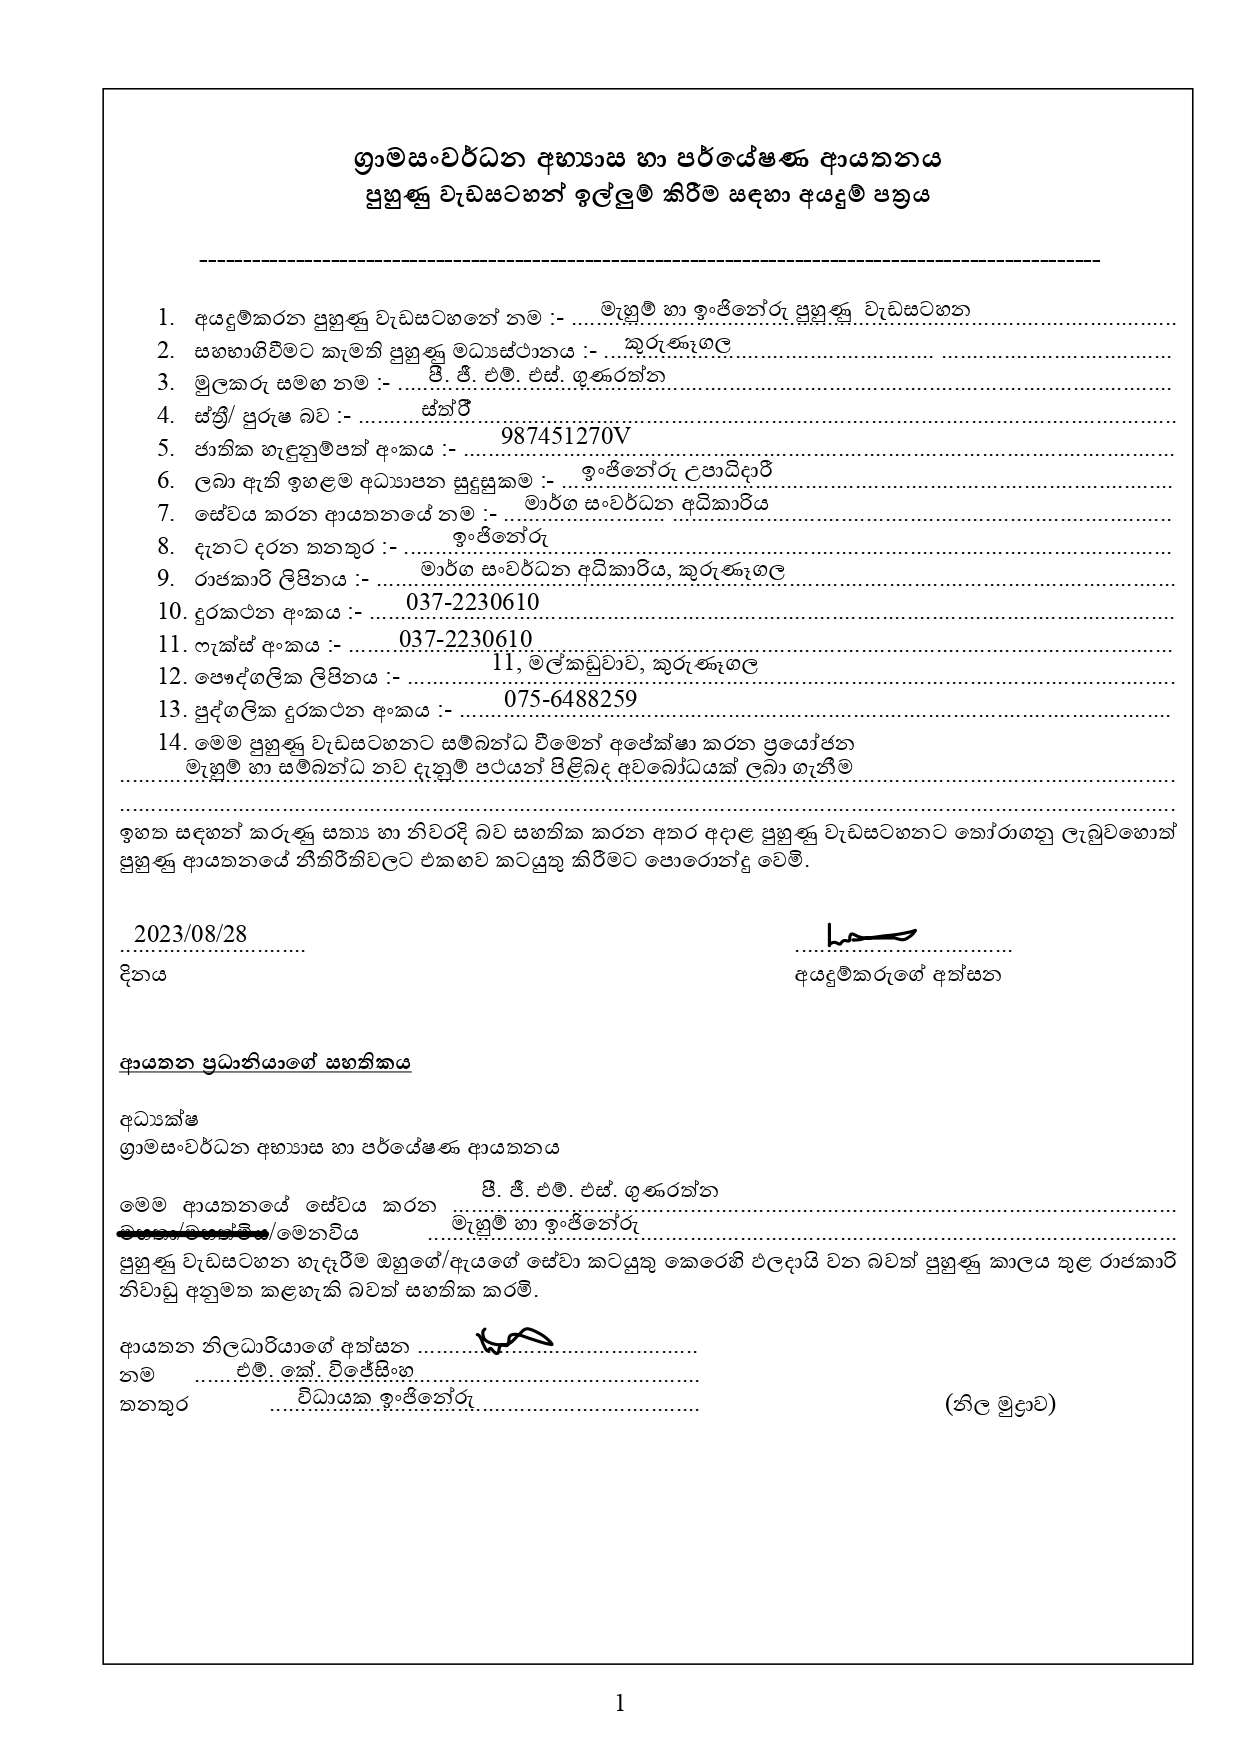

In [15]:
display(image)